# Sentiment/ Review analysis by NLP for Movie Reviews

# Importing Dataset 

In [1]:
import pandas as pd
movie_reviews = pd.read_csv('IMDB Dataset.csv')

In [2]:
movie_reviews

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [3]:
movie_reviews['review'].loc[345]

'Incomprehensibly dreadful mishmash of the probably most notorious of all Roman emperors who went insane, leaving infamous party orgies and ruthless killings in his path... I know there are several versions of this, and this is based on the 102 min\' one that I watched - but I can\'t fathom how that possibly can make any difference to lift the rest of this movie out of the muck!<br /><br />I\'d heard for long about the alleged "shocking" content of sex/nudity (which honestly there isn\'t much of here at all - and boring when there is) and blood, but beware - it\'s the technical production amateurishness that well and truly shocks here: Everything looks plain and simply like a junior film school flunk project! Camera-work is hopelessly inept, full of strange zooms, failed framing and confusing pans (to and from what mostly looks like a huge theater stage!) complete with a grainy, cheapish photo quality. Lighting and color schemes are terrible and uneven - is it day or night? Are they in

In [4]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SREE SAI
[nltk_data]     BHAVESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Implementing Stemming and removing stop words in the reviews

In [5]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [6]:
corpus = []
for i in range(0,len(movie_reviews)):
    review = re.sub('[^a-zA-Z]',' ',movie_reviews['review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [7]:
corpus

['one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch d

# Applying BagOfWords (BOW) Method

In [8]:
# Creating a bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(corpus).toarray()

In [9]:
y = pd.get_dummies(movie_reviews['sentiment'])
y = y.iloc[:,1].values

In [11]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

# Navie_Bayes for Bag of Words(BOW)

In [12]:
from sklearn.naive_bayes import MultinomialNB
text_analysis_model = MultinomialNB().fit(X_train,y_train)

In [13]:
# prediction
y_pred = text_analysis_model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score,classification_report as cr
score = accuracy_score(y_test,y_pred)
print(score)
print(cr(y_test,y_pred))

0.83872
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      6291
           1       0.84      0.84      0.84      6209

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



# RandomForestClassifier for BagOfWords(BOW)

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifer = RandomForestClassifier().fit(X_train,y_train)

In [16]:
y_pred2 = classifer.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score,classification_report as cr
score = accuracy_score(y_test,y_pred2)
print(score)
print(cr(y_test,y_pred2))

0.8396
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      6291
           1       0.84      0.83      0.84      6209

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



# Implementing Tf-Idf(Term Frequency-Inverse Document Frequency) 

In [18]:
# Creating a TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(corpus).toarray()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Naive_bayes for Tf-Idf 

In [21]:
text_analysis_model2 = MultinomialNB().fit(X_train,y_train)

In [22]:
y_predtf = text_analysis_model2.predict(X_test)

In [23]:
score=accuracy_score(y_test,y_predtf)
print(score)
print(cr(y_test,y_predtf))

0.8448
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      5035
           1       0.84      0.85      0.85      4965

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# RandomForestClassifier for Tf-Idf

In [24]:
classifer2 = RandomForestClassifier().fit(X_train,y_train)

In [26]:
classifer_predict = classifer2.predict(X_test)

In [28]:
score=accuracy_score(y_test,classifer_predict)
print(score)
print(cr(y_test,classifer_predict))

0.8414
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      5035
           1       0.85      0.83      0.84      4965

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# Word2vec Implementaion

In [29]:
!pip install gensim

# Implementation of Lemmatization and removing stop words in the reviews 

In [30]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [32]:
corpus = []
for i in range(0, len(movie_reviews)):
    review = re.sub('[^a-zA-Z]', ' ', movie_reviews['review'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [33]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [34]:
corpus[0]

'one reviewer mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away br br would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experi

In [35]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [36]:
words

[['one',
  'reviewer',
  'mentioned',
  'watching',
  'oz',
  'episode',
  'hooked',
  'right',
  'exactly',
  'happened',
  'br',
  'br',
  'first',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scene',
  'violence',
  'set',
  'right',
  'word',
  'go',
  'trust',
  'show',
  'faint',
  'hearted',
  'timid',
  'show',
  'pull',
  'punch',
  'regard',
  'drug',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'word',
  'br',
  'br',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focus',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cell',
  'glass',
  'front',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'many',
  'aryan',
  'muslim',
  'gangsta',
  'latino',
  'christian',
  'italian',
  'irish',
  'scuffle',
  'death',
  'stare',
  'dodgy',
  'dealing',
  'shady',
  'agreement',
  'never',
  'far',
  'away',

# Training word2vec from the scratch

In [38]:
import gensim

In [40]:
model = gensim.models.Word2Vec(words,window=5,min_count=2)

In [41]:
model.wv.index_to_key

['br',
 'movie',
 'film',
 'one',
 'like',
 'time',
 'good',
 'character',
 'story',
 'even',
 'get',
 'would',
 'make',
 'see',
 'really',
 'scene',
 'well',
 'much',
 'bad',
 'people',
 'great',
 'also',
 'first',
 'show',
 'way',
 'thing',
 'made',
 'life',
 'could',
 'think',
 'go',
 'know',
 'watch',
 'love',
 'plot',
 'actor',
 'two',
 'many',
 'seen',
 'year',
 'say',
 'end',
 'never',
 'acting',
 'look',
 'best',
 'little',
 'ever',
 'man',
 'better',
 'take',
 'come',
 'work',
 'still',
 'part',
 'something',
 'director',
 'find',
 'want',
 'back',
 'give',
 'lot',
 'real',
 'guy',
 'watching',
 'performance',
 'woman',
 'play',
 'old',
 'funny',
 'though',
 'another',
 'actually',
 'nothing',
 'role',
 'going',
 'new',
 'every',
 'girl',
 'day',
 'world',
 'point',
 'cast',
 'horror',
 'minute',
 'comedy',
 'thought',
 'fact',
 'feel',
 'quite',
 'pretty',
 'star',
 'action',
 'around',
 'seems',
 'young',
 'big',
 'however',
 'got',
 'enough',
 'right',
 'long',
 'line',
 'f

In [42]:
model.corpus_count

50000

In [43]:
model.epochs

5

# Identifying the similar words from the corpus

In [44]:
model.wv.similar_by_word('love')

[('bermuda', 0.5921239852905273),
 ('asleep', 0.5449981093406677),
 ('apart', 0.5372532606124878),
 ('romantic', 0.5216435194015503),
 ('romance', 0.5048778653144836),
 ('hate', 0.5042864680290222),
 ('loved', 0.49358049035072327),
 ('friendship', 0.4877817630767822),
 ('vested', 0.48370668292045593),
 ('touching', 0.46216723322868347)]

In [74]:
model.wv.similar_by_word('film')

[('movie', 0.8523756265640259),
 ('flick', 0.6160802841186523),
 ('cinema', 0.5866578817367554),
 ('documentary', 0.5651590824127197),
 ('picture', 0.5610741972923279),
 ('however', 0.5193941593170166),
 ('thriller', 0.502196192741394),
 ('masterpiece', 0.49653133749961853),
 ('considering', 0.4896097779273987),
 ('nevertheless', 0.4840679168701172)]

# Defining Average Word2Vec

Reason for introduction of **Average Word2Vec** is if we train the model by using our own word2vec developed from scratch from logic of word2vec we will get the specified dimension for each and every word in the sentence but we require the specified dimension for the whole sentence.

    In order to achieve this we will average the value of each and every word in the sentence and store this average in new vector which is of dimension specified and this vector resembles the whole sentence.

In [51]:
import numpy as np
def avgWord2vec(doc):
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [46]:
!pip install tqdm

In [47]:
from tqdm import tqdm

In [48]:
words[35]

['bought',
 'film',
 'blockbuster',
 'sounded',
 'interesting',
 'bit',
 'ranma',
 'esque',
 'idea',
 'someone',
 'dragging',
 'around',
 'skeleton',
 'cute',
 'girl',
 'mini',
 'skirt',
 'back',
 'restricted',
 'viewing',
 'sticker',
 'thought',
 'going',
 'sweet',
 'least',
 'sincere',
 'coming',
 'age',
 'story',
 'weird',
 'indie',
 'edge',
 'wrong',
 'br',
 'br',
 'watched',
 'wonder',
 'got',
 'restricted',
 'sticker',
 'since',
 'hardly',
 'foul',
 'language',
 'little',
 'violence',
 'closest',
 'thing',
 'nudity',
 'honestly',
 'usually',
 'go',
 'around',
 'hoping',
 'girl',
 'nightgown',
 'see',
 'panty',
 'see',
 'panty',
 'lot',
 'movie',
 'matter',
 'wearing',
 'miniskirt',
 'sort',
 'even',
 'anti',
 'religious',
 'humor',
 'tame',
 'lame',
 'caricatured',
 'insincere',
 'derivative',
 'unoriginal',
 'worst',
 'funny',
 'slightest',
 'would',
 'better',
 'listen',
 'ray',
 'stevens',
 'would',
 'jesus',
 'wear',
 'rolex',
 'television',
 'show',
 'would',
 'barely',
 'qu

In [49]:
type(model.wv.index_to_key)

list

In [52]:
x = []
for i in tqdm(range(len(words))):
    print("Applying avg word2vec",i)
    x.append(avgWord2vec(words[i]))

  0%|                                                                               | 15/50000 [00:00<11:08, 74.80it/s]

Applying avg word2vec 0
Applying avg word2vec 1
Applying avg word2vec 2
Applying avg word2vec 3
Applying avg word2vec 4
Applying avg word2vec 5
Applying avg word2vec 6
Applying avg word2vec 7
Applying avg word2vec 8
Applying avg word2vec 9
Applying avg word2vec 10
Applying avg word2vec 11
Applying avg word2vec 12
Applying avg word2vec 13
Applying avg word2vec 14
Applying avg word2vec 15


  0%|                                                                               | 24/50000 [00:00<10:46, 77.34it/s]

Applying avg word2vec 16
Applying avg word2vec 17
Applying avg word2vec 18
Applying avg word2vec 19
Applying avg word2vec 20
Applying avg word2vec 21
Applying avg word2vec 22
Applying avg word2vec 23
Applying avg word2vec 24
Applying avg word2vec 25
Applying avg word2vec 26
Applying avg word2vec 27
Applying avg word2vec 28
Applying avg word2vec 29


  0%|                                                                               | 32/50000 [00:00<15:04, 55.24it/s]

Applying avg word2vec 30
Applying avg word2vec 31
Applying avg word2vec 32
Applying avg word2vec 33
Applying avg word2vec 34


  0%|                                                                               | 49/50000 [00:00<14:20, 58.05it/s]

Applying avg word2vec 35
Applying avg word2vec 36
Applying avg word2vec 37
Applying avg word2vec 38
Applying avg word2vec 39
Applying avg word2vec 40
Applying avg word2vec 41
Applying avg word2vec 42
Applying avg word2vec 43
Applying avg word2vec 44
Applying avg word2vec 45
Applying avg word2vec 46
Applying avg word2vec 47
Applying avg word2vec 48
Applying avg word2vec 49
Applying avg word2vec 50
Applying avg word2vec 51


  0%|                                                                               | 62/50000 [00:01<16:02, 51.87it/s]

Applying avg word2vec 52
Applying avg word2vec 53
Applying avg word2vec 54
Applying avg word2vec 55
Applying avg word2vec 56
Applying avg word2vec 57
Applying avg word2vec 58
Applying avg word2vec 59
Applying avg word2vec 60
Applying avg word2vec 61


  0%|                                                                               | 69/50000 [00:01<15:37, 53.27it/s]

Applying avg word2vec 62
Applying avg word2vec 63
Applying avg word2vec 64
Applying avg word2vec 65
Applying avg word2vec 66
Applying avg word2vec 67
Applying avg word2vec 68
Applying avg word2vec 69
Applying avg word2vec 70


  0%|                                                                               | 75/50000 [00:01<22:33, 36.89it/s]

Applying avg word2vec 71
Applying avg word2vec 72
Applying avg word2vec 73
Applying avg word2vec 74
Applying avg word2vec 75
Applying avg word2vec

  0%|▏                                                                              | 80/50000 [00:01<23:57, 34.72it/s]

 76
Applying avg word2vec 77
Applying avg word2vec 78
Applying avg word2vec 79
Applying avg word2vec 80
Applying avg word2vec 81
Applying avg word2vec 82
Applying avg word2vec 83
Applying avg word2vec 84
Applying avg word2vec 85
Applying avg word2vec 86
Applying avg word2vec 87
Applying avg word2vec 88


  0%|▏                                                                             | 100/50000 [00:02<18:18, 45.44it/s]

Applying avg word2vec 89
Applying avg word2vec 90
Applying avg word2vec 91
Applying avg word2vec 92
Applying avg word2vec 93
Applying avg word2vec 94
Applying avg word2vec 95
Applying avg word2vec 96
Applying avg word2vec 97
Applying avg word2vec 98
Applying avg word2vec 99


  0%|▏                                                                             | 105/50000 [00:02<21:36, 38.50it/s]

Applying avg word2vec 100
Applying avg word2vec 101
Applying avg word2vec 102
Applying avg word2vec 103
Applying avg word2vec 104
Applying avg word2vec 105
Applying avg word2vec 106
Applying avg word2vec 107


  0%|▏                                                                             | 119/50000 [00:02<16:53, 49.20it/s]

Applying avg word2vec 108
Applying avg word2vec 109
Applying avg word2vec 110
Applying avg word2vec 111
Applying avg word2vec 112
Applying avg word2vec 113
Applying avg word2vec 114
Applying avg word2vec 115
Applying avg word2vec 116
Applying avg word2vec 117
Applying avg word2vec 118
Applying avg word2vec 119
Applying avg word2vec 120
Applying avg word2vec 121
Applying avg word2vec 122


  0%|▏                                                                             | 132/50000 [00:02<15:23, 53.98it/s]

Applying avg word2vec 123
Applying avg word2vec 124
Applying avg word2vec 125
Applying avg word2vec 126
Applying avg word2vec 127
Applying avg word2vec 128
Applying avg word2vec 129
Applying avg word2vec 130
Applying avg word2vec 131
Applying avg word2vec 132
Applying avg word2vec 133
Applying avg word2vec 134
Applying avg word2vec 135


  0%|▏                                                                             | 139/50000 [00:02<15:21, 54.14it/s]

Applying avg word2vec 136
Applying avg word2vec 137
Applying avg word2vec 138
Applying avg word2vec 139
Applying avg word2vec 140
Applying avg word2vec 141
Applying avg word2vec 142


  0%|▏                                                                             | 151/50000 [00:03<17:09, 48.40it/s]

Applying avg word2vec 143
Applying avg word2vec 144
Applying avg word2vec 145
Applying avg word2vec 146
Applying avg word2vec 147
Applying avg word2vec 148
Applying avg word2vec 149
Applying avg word2vec 150
Applying avg word2vec 151
Applying avg word2vec 152
Applying avg word2vec 153


  0%|▏                                                                             | 157/50000 [00:03<19:52, 41.81it/s]

Applying avg word2vec 154
Applying avg word2vec 155
Applying avg word2vec 156
Applying avg word2vec 157
Applying avg word2vec 158
Applying avg word2vec 159
Applying avg word2vec 160
Applying avg word2vec 161
Applying avg word2vec 162
Applying avg word2vec 163


  0%|▎                                                                             | 171/50000 [00:03<17:50, 46.56it/s]

Applying avg word2vec 164
Applying avg word2vec 165
Applying avg word2vec 166
Applying avg word2vec 167
Applying avg word2vec 168
Applying avg word2vec 169
Applying avg word2vec 170
Applying avg word2vec 171
Applying avg word2vec 172
Applying avg word2vec 173


  0%|▎                                                                             | 181/50000 [00:03<21:48, 38.09it/s]

Applying avg word2vec 174
Applying avg word2vec 175
Applying avg word2vec 176
Applying avg word2vec 177
Applying avg word2vec 178
Applying avg word2vec 179
Applying avg word2vec 180
Applying avg word2vec 181
Applying avg word2vec 182


  0%|▎                                                                             | 191/50000 [00:04<20:08, 41.21it/s]

Applying avg word2vec 183
Applying avg word2vec 184
Applying avg word2vec 185
Applying avg word2vec 186
Applying avg word2vec 187
Applying avg word2vec 188
Applying avg word2vec 189
Applying avg word2vec 190
Applying avg word2vec 191
Applying avg word2vec 192


  0%|▎                                                                             | 207/50000 [00:04<14:45, 56.26it/s]

Applying avg word2vec 193
Applying avg word2vec 194
Applying avg word2vec 195
Applying avg word2vec 196
Applying avg word2vec 197
Applying avg word2vec 198
Applying avg word2vec 199
Applying avg word2vec 200
Applying avg word2vec 201
Applying avg word2vec 202
Applying avg word2vec 203
Applying avg word2vec 204
Applying avg word2vec 205
Applying avg word2vec 206
Applying avg word2vec 207
Applying avg word2vec 208
Applying avg word2vec 209
Applying avg word2vec 210
Applying avg word2vec 211
Applying avg word2vec 212
Applying avg word2vec 213
Applying avg word2vec 214
Applying avg word2vec 215
Applying avg word2vec 216


  0%|▎                                                                             | 227/50000 [00:04<11:30, 72.08it/s]

Applying avg word2vec 217
Applying avg word2vec 218
Applying avg word2vec 219
Applying avg word2vec 220
Applying avg word2vec 221
Applying avg word2vec 222
Applying avg word2vec 223
Applying avg word2vec 224
Applying avg word2vec 225
Applying avg word2vec 226
Applying avg word2vec 227
Applying avg word2vec 228


  0%|▎                                                                             | 235/50000 [00:04<14:03, 59.03it/s]

Applying avg word2vec 229
Applying avg word2vec 230
Applying avg word2vec 231
Applying avg word2vec 232
Applying avg word2vec 233
Applying avg word2vec 234
Applying avg word2vec 235
Applying avg word2vec 236
Applying avg word2vec 237
Applying avg word2vec 238
Applying avg word2vec 239
Applying avg word2vec 240


  1%|▍                                                                             | 252/50000 [00:04<13:05, 63.30it/s]

Applying avg word2vec 241
Applying avg word2vec 242
Applying avg word2vec 243
Applying avg word2vec 244
Applying avg word2vec 245
Applying avg word2vec 246
Applying avg word2vec 247
Applying avg word2vec 248
Applying avg word2vec 249
Applying avg word2vec 250
Applying avg word2vec 251
Applying avg word2vec 252
Applying avg word2vec 253
Applying avg word2vec 254


  1%|▍                                                                             | 259/50000 [00:05<14:38, 56.60it/s]

Applying avg word2vec 255
Applying avg word2vec 256
Applying avg word2vec 257
Applying avg word2vec 258
Applying avg word2vec 259
Applying avg word2vec 260
Applying avg word2vec 261
Applying avg word2vec 262
Applying avg word2vec 263


  1%|▍                                                                             | 272/50000 [00:05<16:31, 50.15it/s]

Applying avg word2vec 264
Applying avg word2vec 265
Applying avg word2vec 266
Applying avg word2vec 267
Applying avg word2vec 268
Applying avg word2vec 269
Applying avg word2vec 270
Applying avg word2vec 271
Applying avg word2vec 272
Applying avg word2vec 273


  1%|▍                                                                             | 278/50000 [00:05<17:57, 46.16it/s]

Applying avg word2vec 274
Applying avg word2vec 275
Applying avg word2vec 276
Applying avg word2vec 277
Applying avg word2vec 278
Applying avg word2vec 279
Applying avg word2vec 280
Applying avg word2vec 281
Applying avg word2vec 282
Applying avg word2vec 283
Applying avg word2vec 284
Applying avg word2vec 285
Applying avg word2vec 286


  1%|▍                                                                             | 296/50000 [00:05<13:23, 61.84it/s]

Applying avg word2vec 287
Applying avg word2vec 288
Applying avg word2vec 289
Applying avg word2vec 290
Applying avg word2vec 291
Applying avg word2vec 292
Applying avg word2vec 293
Applying avg word2vec 294
Applying avg word2vec 295
Applying avg word2vec 296
Applying avg word2vec 297
Applying avg word2vec 298
Applying avg word2vec 299


  1%|▍                                                                             | 310/50000 [00:06<14:40, 56.42it/s]

Applying avg word2vec 300
Applying avg word2vec 301
Applying avg word2vec 302
Applying avg word2vec 303
Applying avg word2vec 304
Applying avg word2vec 305
Applying avg word2vec 306
Applying avg word2vec 307
Applying avg word2vec 308
Applying avg word2vec 309
Applying avg word2vec 310


  1%|▍                                                                             | 316/50000 [00:06<17:09, 48.26it/s]

Applying avg word2vec 311
Applying avg word2vec 312
Applying avg word2vec 313
Applying avg word2vec 314
Applying avg word2vec 315
Applying avg word2vec 316
Applying avg word2vec 317
Applying avg word2vec 318
Applying avg word2vec 319
Applying avg word2vec 320


  1%|▌                                                                             | 327/50000 [00:06<20:29, 40.41it/s]

Applying avg word2vec 321
Applying avg word2vec 322
Applying avg word2vec 323
Applying avg word2vec 324
Applying avg word2vec 325
Applying avg word2vec 326
Applying avg word2vec 327
Applying avg word2vec 328
Applying avg word2vec 329
Applying avg word2vec 330
Applying avg word2vec 331
Applying avg word2vec 332


  1%|▌                                                                             | 345/50000 [00:06<17:17, 47.84it/s]

Applying avg word2vec 333
Applying avg word2vec 334
Applying avg word2vec 335
Applying avg word2vec 336
Applying avg word2vec 337
Applying avg word2vec 338
Applying avg word2vec 339
Applying avg word2vec 340
Applying avg word2vec 341
Applying avg word2vec 342
Applying avg word2vec 343
Applying avg word2vec 344
Applying avg word2vec 345


  1%|▌                                                                             | 351/50000 [00:07<16:47, 49.30it/s]

Applying avg word2vec 346
Applying avg word2vec 347
Applying avg word2vec 348
Applying avg word2vec 349
Applying avg word2vec 350
Applying avg word2vec 351
Applying avg word2vec 352
Applying avg word2vec 353
Applying avg word2vec 354
Applying avg word2vec 355
Applying avg word2vec 356
Applying avg word2vec 357


  1%|▌                                                                             | 364/50000 [00:07<17:56, 46.11it/s]

Applying avg word2vec 358
Applying avg word2vec 359
Applying avg word2vec 360
Applying avg word2vec 361
Applying avg word2vec 362
Applying avg word2vec 363
Applying avg word2vec 364
Applying avg word2vec 365


  1%|▌                                                                             | 375/50000 [00:07<20:28, 40.41it/s]

Applying avg word2vec 366
Applying avg word2vec 367
Applying avg word2vec 368
Applying avg word2vec 369
Applying avg word2vec 370
Applying avg word2vec 371
Applying avg word2vec 372
Applying avg word2vec 373
Applying avg word2vec 374


  1%|▌                                                                             | 380/50000 [00:07<24:44, 33.43it/s]

Applying avg word2vec 375
Applying avg word2vec 376
Applying avg word2vec 377
Applying avg word2vec 378
Applying avg word2vec 379
Applying avg word2vec 380
Applying avg word2vec 381
Applying avg word2vec 382
Applying avg word2vec 383
Applying avg word2vec 384


  1%|▌                                                                             | 397/50000 [00:08<15:44, 52.54it/s]

Applying avg word2vec 385
Applying avg word2vec 386
Applying avg word2vec 387
Applying avg word2vec 388
Applying avg word2vec 389
Applying avg word2vec 390
Applying avg word2vec 391
Applying avg word2vec 392
Applying avg word2vec 393
Applying avg word2vec 394
Applying avg word2vec 395
Applying avg word2vec 396
Applying avg word2vec 397
Applying avg word2vec 398


  1%|▋                                                                             | 410/50000 [00:08<16:07, 51.24it/s]

Applying avg word2vec 399
Applying avg word2vec 400
Applying avg word2vec 401
Applying avg word2vec 402
Applying avg word2vec 403
Applying avg word2vec 404
Applying avg word2vec 405
Applying avg word2vec 406
Applying avg word2vec 407
Applying avg word2vec 408
Applying avg word2vec 409
Applying avg word2vec 410


  1%|▋                                                                             | 422/50000 [00:08<16:46, 49.24it/s]

Applying avg word2vec 411
Applying avg word2vec 412
Applying avg word2vec 413
Applying avg word2vec 414
Applying avg word2vec 415
Applying avg word2vec 416
Applying avg word2vec 417
Applying avg word2vec 418
Applying avg word2vec 419
Applying avg word2vec 420
Applying avg word2vec 421


  1%|▋                                                                             | 435/50000 [00:08<15:16, 54.06it/s]

Applying avg word2vec 422
Applying avg word2vec 423
Applying avg word2vec 424
Applying avg word2vec 425
Applying avg word2vec 426
Applying avg word2vec 427
Applying avg word2vec 428
Applying avg word2vec 429
Applying avg word2vec 430
Applying avg word2vec 431
Applying avg word2vec 432
Applying avg word2vec 433
Applying avg word2vec 434
Applying avg word2vec 435
Applying avg word2vec 436
Applying avg word2vec 437
Applying avg word2vec 438


  1%|▋                                                                             | 455/50000 [00:09<13:28, 61.27it/s]

Applying avg word2vec 439
Applying avg word2vec 440
Applying avg word2vec 441
Applying avg word2vec 442
Applying avg word2vec 443
Applying avg word2vec 444
Applying avg word2vec 445
Applying avg word2vec 446
Applying avg word2vec 447
Applying avg word2vec 448
Applying avg word2vec 449
Applying avg word2vec 450
Applying avg word2vec 451
Applying avg word2vec 452
Applying avg word2vec 453
Applying avg word2vec 454
Applying avg word2vec 455


  1%|▋                                                                             | 462/50000 [00:09<14:15, 57.93it/s]

Applying avg word2vec 456
Applying avg word2vec 457
Applying avg word2vec 458
Applying avg word2vec 459
Applying avg word2vec 460
Applying avg word2vec 461
Applying avg word2vec 462
Applying avg word2vec 463
Applying avg word2vec 464
Applying avg word2vec 465
Applying avg word2vec 466
Applying avg word2vec 467


  1%|▋                                                                             | 474/50000 [00:09<16:00, 51.55it/s]

Applying avg word2vec 468
Applying avg word2vec 469
Applying avg word2vec 470
Applying avg word2vec 471
Applying avg word2vec 472
Applying avg word2vec 473
Applying avg word2vec 474
Applying avg word2vec 475
Applying avg word2vec 476
Applying avg word2vec 477
Applying avg word2vec 478
Applying avg word2vec 479


  1%|▊                                                                             | 490/50000 [00:09<13:23, 61.65it/s]

Applying avg word2vec 480
Applying avg word2vec 481
Applying avg word2vec 482
Applying avg word2vec 483
Applying avg word2vec 484
Applying avg word2vec 485
Applying avg word2vec 486
Applying avg word2vec 487
Applying avg word2vec 488
Applying avg word2vec 489
Applying avg word2vec 490
Applying avg word2vec 491
Applying avg word2vec 492
Applying avg word2vec 493
Applying avg word2vec 494


  1%|▊                                                                             | 505/50000 [00:09<12:47, 64.51it/s]

Applying avg word2vec 495
Applying avg word2vec 496
Applying avg word2vec 497
Applying avg word2vec 498
Applying avg word2vec 499
Applying avg word2vec 500
Applying avg word2vec 501
Applying avg word2vec 502
Applying avg word2vec 503
Applying avg word2vec 504
Applying avg word2vec 505
Applying avg word2vec 506
Applying avg word2vec 507
Applying avg word2vec 508
Applying avg word2vec 509
Applying avg word2vec 510
Applying avg word2vec

  1%|▊                                                                             | 523/50000 [00:10<11:44, 70.24it/s]

 511
Applying avg word2vec 512
Applying avg word2vec 513
Applying avg word2vec 514
Applying avg word2vec 515
Applying avg word2vec 516
Applying avg word2vec 517
Applying avg word2vec 518
Applying avg word2vec 519
Applying avg word2vec 520
Applying avg word2vec 521
Applying avg word2vec 522
Applying avg word2vec 523
Applying avg word2vec 524


  1%|▊                                                                             | 531/50000 [00:10<16:54, 48.78it/s]

Applying avg word2vec 525
Applying avg word2vec 526
Applying avg word2vec 527
Applying avg word2vec 528
Applying avg word2vec 529
Applying avg word2vec 530
Applying avg word2vec 531
Applying avg word2vec 532
Applying avg word2vec 533
Applying avg word2vec 534
Applying avg word2vec 535
Applying avg word2vec 536
Applying avg word2vec 537
Applying avg word2vec 538
Applying avg word2vec

  1%|▊                                                                             | 548/50000 [00:10<14:55, 55.25it/s]

 539
Applying avg word2vec 540
Applying avg word2vec 541
Applying avg word2vec 542
Applying avg word2vec 543
Applying avg word2vec 544
Applying avg word2vec 545
Applying avg word2vec 546
Applying avg word2vec 547
Applying avg word2vec 548
Applying avg word2vec 549


  1%|▊                                                                             | 555/50000 [00:10<17:09, 48.04it/s]

Applying avg word2vec 550
Applying avg word2vec 551
Applying avg word2vec 552
Applying avg word2vec 553
Applying avg word2vec 554
Applying avg word2vec 555
Applying avg word2vec 556


  1%|▉                                                                             | 561/50000 [00:11<18:58, 43.43it/s]

Applying avg word2vec 557
Applying avg word2vec 558
Applying avg word2vec 559
Applying avg word2vec 560
Applying avg word2vec 561
Applying avg word2vec 562
Applying avg word2vec 563
Applying avg word2vec 564
Applying avg word2vec 565
Applying avg word2vec 566


  1%|▉                                                                             | 573/50000 [00:11<17:58, 45.83it/s]

Applying avg word2vec 567
Applying avg word2vec 568
Applying avg word2vec 569
Applying avg word2vec 570
Applying avg word2vec 571
Applying avg word2vec 572
Applying avg word2vec 573
Applying avg word2vec 574
Applying avg word2vec 575


  1%|▉                                                                             | 586/50000 [00:11<15:33, 52.92it/s]

Applying avg word2vec 576
Applying avg word2vec 577
Applying avg word2vec 578
Applying avg word2vec 579
Applying avg word2vec 580
Applying avg word2vec 581
Applying avg word2vec 582
Applying avg word2vec 583
Applying avg word2vec 584
Applying avg word2vec 585
Applying avg word2vec 586
Applying avg word2vec 587
Applying avg word2vec 588
Applying avg word2vec 589
Applying avg word2vec 590


  1%|▉                                                                             | 600/50000 [00:11<14:37, 56.28it/s]

Applying avg word2vec 591
Applying avg word2vec 592
Applying avg word2vec 593
Applying avg word2vec 594
Applying avg word2vec 595
Applying avg word2vec 596
Applying avg word2vec 597
Applying avg word2vec 598
Applying avg word2vec 599
Applying avg word2vec 600
Applying avg word2vec 601
Applying avg word2vec 602
Applying avg word2vec 603
Applying avg word2vec 604
Applying avg word2vec 605
Applying avg word2vec 606
Applying avg word2vec

  1%|▉                                                                             | 610/50000 [00:11<12:28, 66.01it/s]

 607
Applying avg word2vec 608
Applying avg word2vec 609
Applying avg word2vec 610
Applying avg word2vec 611


  1%|▉                                                                             | 617/50000 [00:12<20:48, 39.57it/s]

Applying avg word2vec 612
Applying avg word2vec 613
Applying avg word2vec 614
Applying avg word2vec 615
Applying avg word2vec 616
Applying avg word2vec 617
Applying avg word2vec 618
Applying avg word2vec 619


  1%|▉                                                                             | 629/50000 [00:12<20:17, 40.57it/s]

Applying avg word2vec 620
Applying avg word2vec 621
Applying avg word2vec 622
Applying avg word2vec 623
Applying avg word2vec 624
Applying avg word2vec 625
Applying avg word2vec 626
Applying avg word2vec 627
Applying avg word2vec 628


  1%|▉                                                                             | 640/50000 [00:12<15:04, 54.58it/s]

Applying avg word2vec 629
Applying avg word2vec 630
Applying avg word2vec 631
Applying avg word2vec 632
Applying avg word2vec 633
Applying avg word2vec 634
Applying avg word2vec 635
Applying avg word2vec 636
Applying avg word2vec 637
Applying avg word2vec 638
Applying avg word2vec 639
Applying avg word2vec 640
Applying avg word2vec 641
Applying avg word2vec 642
Applying avg word2vec 643


  1%|█                                                                             | 647/50000 [00:12<16:16, 50.56it/s]

Applying avg word2vec 644
Applying avg word2vec 645
Applying avg word2vec 646
Applying avg word2vec 647
Applying avg word2vec 648
Applying avg word2vec 649
Applying avg word2vec 650


  1%|█                                                                             | 665/50000 [00:13<15:19, 53.67it/s]

Applying avg word2vec 651
Applying avg word2vec 652
Applying avg word2vec 653
Applying avg word2vec 654
Applying avg word2vec 655
Applying avg word2vec 656
Applying avg word2vec 657
Applying avg word2vec 658
Applying avg word2vec 659
Applying avg word2vec 660
Applying avg word2vec 661
Applying avg word2vec 662
Applying avg word2vec 663
Applying avg word2vec 664
Applying avg word2vec 665
Applying avg word2vec 666
Applying avg word2vec 667
Applying avg word2vec 668


  1%|█                                                                             | 673/50000 [00:13<16:39, 49.36it/s]

Applying avg word2vec 669
Applying avg word2vec 670
Applying avg word2vec 671
Applying avg word2vec 672
Applying avg word2vec 673
Applying avg word2vec 674
Applying avg word2vec 675
Applying avg word2vec 676
Applying avg word2vec 677
Applying avg word2vec 678


  1%|█                                                                             | 686/50000 [00:13<18:48, 43.71it/s]

Applying avg word2vec 679
Applying avg word2vec 680
Applying avg word2vec 681
Applying avg word2vec 682
Applying avg word2vec 683
Applying avg word2vec 684
Applying avg word2vec 685
Applying avg word2vec 686
Applying avg word2vec 687
Applying avg word2vec 688


  1%|█                                                                             | 692/50000 [00:14<21:10, 38.81it/s]

Applying avg word2vec 689
Applying avg word2vec 690
Applying avg word2vec 691
Applying avg word2vec 692
Applying avg word2vec 693
Applying avg word2vec 694
Applying avg word2vec 695


  1%|█                                                                             | 703/50000 [00:14<22:57, 35.79it/s]

Applying avg word2vec 696
Applying avg word2vec 697
Applying avg word2vec 698
Applying avg word2vec 699
Applying avg word2vec 700
Applying avg word2vec 701
Applying avg word2vec 702
Applying avg word2vec 703


  1%|█                                                                             | 709/50000 [00:14<20:29, 40.10it/s]

Applying avg word2vec 704
Applying avg word2vec 705
Applying avg word2vec 706
Applying avg word2vec 707
Applying avg word2vec 708
Applying avg word2vec 709
Applying avg word2vec 710
Applying avg word2vec 711
Applying avg word2vec 712


  1%|█▏                                                                            | 723/50000 [00:14<16:58, 48.36it/s]

Applying avg word2vec 713
Applying avg word2vec 714
Applying avg word2vec 715
Applying avg word2vec 716
Applying avg word2vec 717
Applying avg word2vec 718
Applying avg word2vec 719
Applying avg word2vec 720
Applying avg word2vec 721
Applying avg word2vec 722
Applying avg word2vec 723
Applying avg word2vec 724
Applying avg word2vec 725
Applying avg word2vec 726


  1%|█▏                                                                            | 736/50000 [00:14<16:01, 51.22it/s]

Applying avg word2vec 727
Applying avg word2vec 728
Applying avg word2vec 729
Applying avg word2vec 730
Applying avg word2vec 731
Applying avg word2vec 732
Applying avg word2vec 733
Applying avg word2vec 734
Applying avg word2vec 735
Applying avg word2vec 736
Applying avg word2vec 737
Applying avg word2vec 738
Applying avg word2vec 739
Applying avg word2vec 740
Applying avg word2vec 741
Applying avg word2vec 742


  2%|█▏                                                                            | 753/50000 [00:15<12:45, 64.30it/s]

Applying avg word2vec 743
Applying avg word2vec 744
Applying avg word2vec 745
Applying avg word2vec 746
Applying avg word2vec 747
Applying avg word2vec 748
Applying avg word2vec 749
Applying avg word2vec 750
Applying avg word2vec 751
Applying avg word2vec 752
Applying avg word2vec 753
Applying avg word2vec 754
Applying avg word2vec 755
Applying avg word2vec 756
Applying avg word2vec 757
Applying avg word2vec 758
Applying avg word2vec 759


  2%|█▏                                                                            | 760/50000 [00:15<12:31, 65.52it/s]

Applying avg word2vec 760
Applying avg word2vec 761
Applying avg word2vec 762
Applying avg word2vec 763
Applying avg word2vec 764
Applying avg word2vec 765


  2%|█▏                                                                            | 773/50000 [00:15<16:35, 49.44it/s]

Applying avg word2vec 766
Applying avg word2vec 767
Applying avg word2vec 768
Applying avg word2vec 769
Applying avg word2vec 770
Applying avg word2vec 771
Applying avg word2vec 772
Applying avg word2vec 773
Applying avg word2vec 774
Applying avg word2vec 775
Applying avg word2vec 776
Applying avg word2vec 777
Applying avg word2vec 778
Applying avg word2vec 779
Applying avg word2vec 780
Applying avg word2vec 781


  2%|█▏                                                                            | 793/50000 [00:15<12:50, 63.85it/s]

Applying avg word2vec 782
Applying avg word2vec 783
Applying avg word2vec 784
Applying avg word2vec 785
Applying avg word2vec 786
Applying avg word2vec 787
Applying avg word2vec 788
Applying avg word2vec 789
Applying avg word2vec 790
Applying avg word2vec 791
Applying avg word2vec 792
Applying avg word2vec 793
Applying avg word2vec 794
Applying avg word2vec 795


  2%|█▎                                                                            | 803/50000 [00:16<12:15, 66.89it/s]

Applying avg word2vec 796
Applying avg word2vec 797
Applying avg word2vec 798
Applying avg word2vec 799
Applying avg word2vec 800
Applying avg word2vec 801
Applying avg word2vec 802
Applying avg word2vec 803
Applying avg word2vec 804
Applying avg word2vec 805
Applying avg word2vec 806
Applying avg word2vec 807
Applying avg word2vec 808


  2%|█▎                                                                            | 811/50000 [00:16<14:17, 57.38it/s]

Applying avg word2vec 809
Applying avg word2vec 810
Applying avg word2vec 811
Applying avg word2vec 812
Applying avg word2vec 813
Applying avg word2vec 814
Applying avg word2vec 815
Applying avg word2vec 816


  2%|█▎                                                                            | 824/50000 [00:16<16:59, 48.22it/s]

Applying avg word2vec 817
Applying avg word2vec 818
Applying avg word2vec 819
Applying avg word2vec 820
Applying avg word2vec 821
Applying avg word2vec 822
Applying avg word2vec 823
Applying avg word2vec 824
Applying avg word2vec 825
Applying avg word2vec 826
Applying avg word2vec 827


  2%|█▎                                                                            | 830/50000 [00:16<22:22, 36.63it/s]

Applying avg word2vec 828
Applying avg word2vec 829
Applying avg word2vec 830
Applying avg word2vec 831
Applying avg word2vec 832


  2%|█▎                                                                            | 842/50000 [00:17<18:43, 43.74it/s]

Applying avg word2vec 833
Applying avg word2vec 834
Applying avg word2vec 835
Applying avg word2vec 836
Applying avg word2vec 837
Applying avg word2vec 838
Applying avg word2vec 839
Applying avg word2vec 840
Applying avg word2vec 841
Applying avg word2vec 842
Applying avg word2vec 843
Applying avg word2vec 844
Applying avg word2vec 845
Applying avg word2vec 846


  2%|█▎                                                                            | 851/50000 [00:17<15:21, 53.36it/s]

Applying avg word2vec 847
Applying avg word2vec 848
Applying avg word2vec 849
Applying avg word2vec 850
Applying avg word2vec 851
Applying avg word2vec 852
Applying avg word2vec 853
Applying avg word2vec 854
Applying avg word2vec 855
Applying avg word2vec 856
Applying avg word2vec 857
Applying avg word2vec 858


  2%|█▎                                                                            | 868/50000 [00:17<15:36, 52.46it/s]

Applying avg word2vec 859
Applying avg word2vec 860
Applying avg word2vec 861
Applying avg word2vec 862
Applying avg word2vec 863
Applying avg word2vec 864
Applying avg word2vec 865
Applying avg word2vec 866
Applying avg word2vec 867
Applying avg word2vec 868
Applying avg word2vec 869
Applying avg word2vec 870
Applying avg word2vec 871
Applying avg word2vec 872
Applying avg word2vec 873


  2%|█▎                                                                            | 880/50000 [00:17<19:05, 42.88it/s]

Applying avg word2vec 874
Applying avg word2vec 875
Applying avg word2vec 876
Applying avg word2vec 877
Applying avg word2vec 878
Applying avg word2vec 879
Applying avg word2vec 880
Applying avg word2vec 881
Applying avg word2vec 882
Applying avg word2vec 883
Applying avg word2vec 884
Applying avg word2vec 885
Applying avg word2vec 886
Applying avg word2vec 887
Applying avg word2vec 888
Applying avg word2vec

  2%|█▍                                                                            | 891/50000 [00:18<16:45, 48.83it/s]

 889
Applying avg word2vec 890
Applying avg word2vec 891
Applying avg word2vec 892
Applying avg word2vec 893
Applying avg word2vec 894
Applying avg word2vec 895
Applying avg word2vec 896


  2%|█▍                                                                            | 905/50000 [00:18<15:37, 52.36it/s]

Applying avg word2vec 897
Applying avg word2vec 898
Applying avg word2vec 899
Applying avg word2vec 900
Applying avg word2vec 901
Applying avg word2vec 902
Applying avg word2vec 903
Applying avg word2vec 904
Applying avg word2vec 905
Applying avg word2vec 906
Applying avg word2vec 907


  2%|█▍                                                                            | 911/50000 [00:18<19:39, 41.60it/s]

Applying avg word2vec 908
Applying avg word2vec 909
Applying avg word2vec 910
Applying avg word2vec 911
Applying avg word2vec 912
Applying avg word2vec 913
Applying avg word2vec 914


  2%|█▍                                                                            | 921/50000 [00:18<20:55, 39.09it/s]

Applying avg word2vec 915
Applying avg word2vec 916
Applying avg word2vec 917
Applying avg word2vec 918
Applying avg word2vec 919
Applying avg word2vec 920
Applying avg word2vec 921
Applying avg word2vec 922
Applying avg word2vec 923
Applying avg word2vec 924
Applying avg word2vec 925
Applying avg word2vec 926
Applying avg word2vec 927
Applying avg word2vec 928


  2%|█▍                                                                            | 939/50000 [00:19<14:52, 54.95it/s]

Applying avg word2vec 929
Applying avg word2vec 930
Applying avg word2vec 931
Applying avg word2vec 932
Applying avg word2vec 933
Applying avg word2vec 934
Applying avg word2vec 935
Applying avg word2vec 936
Applying avg word2vec 937
Applying avg word2vec 938
Applying avg word2vec 939


  2%|█▍                                                                            | 945/50000 [00:19<20:08, 40.59it/s]

Applying avg word2vec 940
Applying avg word2vec 941
Applying avg word2vec 942
Applying avg word2vec 943
Applying avg word2vec 944
Applying avg word2vec 945
Applying avg word2vec 946


  2%|█▍                                                                            | 960/50000 [00:19<15:49, 51.66it/s]

Applying avg word2vec 947
Applying avg word2vec 948
Applying avg word2vec 949
Applying avg word2vec 950
Applying avg word2vec 951
Applying avg word2vec 952
Applying avg word2vec 953
Applying avg word2vec 954
Applying avg word2vec 955
Applying avg word2vec 956
Applying avg word2vec 957
Applying avg word2vec 958
Applying avg word2vec 959
Applying avg word2vec 960
Applying avg word2vec 961


  2%|█▌                                                                            | 966/50000 [00:19<15:23, 53.10it/s]

Applying avg word2vec 962
Applying avg word2vec 963
Applying avg word2vec 964
Applying avg word2vec 965
Applying avg word2vec 966
Applying avg word2vec 967
Applying avg word2vec 968
Applying avg word2vec 969
Applying avg word2vec 970


  2%|█▌                                                                            | 980/50000 [00:19<14:59, 54.51it/s]

Applying avg word2vec 971
Applying avg word2vec 972
Applying avg word2vec 973
Applying avg word2vec 974
Applying avg word2vec 975
Applying avg word2vec 976
Applying avg word2vec 977
Applying avg word2vec 978
Applying avg word2vec 979
Applying avg word2vec 980
Applying avg word2vec 981
Applying avg word2vec 982
Applying avg word2vec 983
Applying avg word2vec 984


  2%|█▌                                                                            | 992/50000 [00:20<17:56, 45.52it/s]

Applying avg word2vec 985
Applying avg word2vec 986
Applying avg word2vec 987
Applying avg word2vec 988
Applying avg word2vec 989
Applying avg word2vec 990
Applying avg word2vec 991
Applying avg word2vec 992
Applying avg word2vec 993
Applying avg word2vec 994
Applying avg word2vec

  2%|█▌                                                                           | 1000/50000 [00:20<16:01, 50.96it/s]

 995
Applying avg word2vec 996
Applying avg word2vec 997
Applying avg word2vec 998
Applying avg word2vec 999
Applying avg word2vec 1000
Applying avg word2vec 1001
Applying avg word2vec 1002
Applying avg word2vec 1003
Applying avg word2vec 1004
Applying avg word2vec 1005
Applying avg word2vec 1006
Applying avg word2vec 1007


  2%|█▌                                                                           | 1014/50000 [00:20<17:08, 47.65it/s]

Applying avg word2vec 1008
Applying avg word2vec 1009
Applying avg word2vec 1010
Applying avg word2vec 1011
Applying avg word2vec 1012
Applying avg word2vec 1013
Applying avg word2vec 1014
Applying avg word2vec 1015
Applying avg word2vec 1016


  2%|█▌                                                                           | 1019/50000 [00:20<22:32, 36.20it/s]

Applying avg word2vec 1017
Applying avg word2vec 1018
Applying avg word2vec 1019
Applying avg word2vec 1020
Applying avg word2vec 1021
Applying avg word2vec 1022
Applying avg word2vec 1023
Applying avg word2vec 1024
Applying avg word2vec 1025
Applying avg word2vec 1026


  2%|█▌                                                                           | 1035/50000 [00:21<16:35, 49.18it/s]

Applying avg word2vec 1027
Applying avg word2vec 1028
Applying avg word2vec 1029
Applying avg word2vec 1030
Applying avg word2vec 1031
Applying avg word2vec 1032
Applying avg word2vec 1033
Applying avg word2vec 1034
Applying avg word2vec 1035
Applying avg word2vec 1036
Applying avg word2vec 1037
Applying avg word2vec 1038
Applying avg word2vec 1039


  2%|█▌                                                                           | 1041/50000 [00:21<21:36, 37.76it/s]

Applying avg word2vec 1040
Applying avg word2vec 1041


  2%|█▌                                                                           | 1053/50000 [00:21<24:39, 33.09it/s]

Applying avg word2vec 1042
Applying avg word2vec 1043
Applying avg word2vec 1044
Applying avg word2vec 1045
Applying avg word2vec 1046
Applying avg word2vec 1047
Applying avg word2vec 1048
Applying avg word2vec 1049
Applying avg word2vec 1050
Applying avg word2vec 1051
Applying avg word2vec 1052
Applying avg word2vec 1053
Applying avg word2vec 1054
Applying avg word2vec 1055


  2%|█▋                                                                           | 1058/50000 [00:21<26:17, 31.02it/s]

Applying avg word2vec 1056
Applying avg word2vec 1057
Applying avg word2vec 1058
Applying avg word2vec 1059
Applying avg word2vec 1060
Applying avg word2vec 1061
Applying avg word2vec 1062
Applying avg word2vec 1063
Applying avg word2vec 1064
Applying avg word2vec 1065
Applying avg word2vec 1066


  2%|█▋                                                                           | 1072/50000 [00:22<21:59, 37.09it/s]

Applying avg word2vec 1067
Applying avg word2vec 1068
Applying avg word2vec 1069
Applying avg word2vec 1070
Applying avg word2vec 1071
Applying avg word2vec 1072
Applying avg word2vec 1073
Applying avg word2vec 1074
Applying avg word2vec 1075
Applying avg word2vec 

  2%|█▋                                                                           | 1084/50000 [00:22<18:22, 44.38it/s]

1076
Applying avg word2vec 1077
Applying avg word2vec 1078
Applying avg word2vec 1079
Applying avg word2vec 1080
Applying avg word2vec 1081
Applying avg word2vec 1082
Applying avg word2vec 1083
Applying avg word2vec 1084
Applying avg word2vec 1085
Applying avg word2vec 1086


  2%|█▋                                                                           | 1089/50000 [00:22<21:24, 38.07it/s]

Applying avg word2vec 1087
Applying avg word2vec 1088
Applying avg word2vec 1089
Applying avg word2vec 1090
Applying avg word2vec 1091
Applying avg word2vec 1092
Applying avg word2vec 1093
Applying avg word2vec 1094


  2%|█▋                                                                           | 1100/50000 [00:22<21:02, 38.75it/s]

Applying avg word2vec 1095
Applying avg word2vec 1096
Applying avg word2vec 1097
Applying avg word2vec 1098
Applying avg word2vec 1099
Applying avg word2vec 1100
Applying avg word2vec 1101
Applying avg word2vec 1102
Applying avg word2vec 1103
Applying avg word2vec 1104


  2%|█▋                                                                           | 1111/50000 [00:23<21:32, 37.82it/s]

Applying avg word2vec 1105
Applying avg word2vec 1106
Applying avg word2vec 1107
Applying avg word2vec 1108
Applying avg word2vec 1109
Applying avg word2vec 1110
Applying avg word2vec 1111
Applying avg word2vec 1112


  2%|█▋                                                                           | 1116/50000 [00:23<21:42, 37.54it/s]

Applying avg word2vec 1113
Applying avg word2vec 1114
Applying avg word2vec 1115
Applying avg word2vec 1116
Applying avg word2vec 1117


  2%|█▋                                                                           | 1125/50000 [00:23<23:30, 34.65it/s]

Applying avg word2vec 1118
Applying avg word2vec 1119
Applying avg word2vec 1120
Applying avg word2vec 1121
Applying avg word2vec 1122
Applying avg word2vec 1123
Applying avg word2vec 1124


  2%|█▊                                                                           | 1144/50000 [00:23<14:43, 55.31it/s]

Applying avg word2vec 1125
Applying avg word2vec 1126
Applying avg word2vec 1127
Applying avg word2vec 1128
Applying avg word2vec 1129
Applying avg word2vec 1130
Applying avg word2vec 1131
Applying avg word2vec 1132
Applying avg word2vec 1133
Applying avg word2vec 1134
Applying avg word2vec 1135
Applying avg word2vec 1136
Applying avg word2vec 1137
Applying avg word2vec 1138
Applying avg word2vec 1139
Applying avg word2vec 1140
Applying avg word2vec 1141
Applying avg word2vec 1142
Applying avg word2vec 1143


  2%|█▊                                                                           | 1151/50000 [00:24<14:10, 57.45it/s]

Applying avg word2vec 1144
Applying avg word2vec 1145
Applying avg word2vec 1146
Applying avg word2vec 1147
Applying avg word2vec 1148
Applying avg word2vec 1149
Applying avg word2vec 1150
Applying avg word2vec 1151
Applying avg word2vec 1152
Applying avg word2vec 1153
Applying avg word2vec 1154
Applying avg word2vec 1155
Applying avg word2vec 1156


  2%|█▊                                                                           | 1163/50000 [00:24<17:53, 45.49it/s]

Applying avg word2vec 1157
Applying avg word2vec 1158
Applying avg word2vec 1159
Applying avg word2vec 1160
Applying avg word2vec 1161
Applying avg word2vec 1162
Applying avg word2vec 1163
Applying avg word2vec 1164
Applying avg word2vec 1165
Applying avg word2vec 1166


  2%|█▊                                                                           | 1176/50000 [00:24<15:44, 51.67it/s]

Applying avg word2vec 1167
Applying avg word2vec 1168
Applying avg word2vec 1169
Applying avg word2vec 1170
Applying avg word2vec 1171
Applying avg word2vec 1172
Applying avg word2vec 1173
Applying avg word2vec 1174
Applying avg word2vec 1175
Applying avg word2vec 1176
Applying avg word2vec 1177
Applying avg word2vec 1178


  2%|█▊                                                                           | 1188/50000 [00:24<16:30, 49.27it/s]

Applying avg word2vec 1179
Applying avg word2vec 1180
Applying avg word2vec 1181
Applying avg word2vec 1182
Applying avg word2vec 1183
Applying avg word2vec 1184
Applying avg word2vec 1185
Applying avg word2vec 1186
Applying avg word2vec 1187
Applying avg word2vec 1188


  2%|█▊                                                                           | 1194/50000 [00:25<20:06, 40.46it/s]

Applying avg word2vec 1189
Applying avg word2vec 1190
Applying avg word2vec 1191
Applying avg word2vec 1192
Applying avg word2vec 1193
Applying avg word2vec 1194
Applying avg word2vec 1195
Applying avg word2vec 1196
Applying avg word2vec

  2%|█▊                                                                           | 1217/50000 [00:25<11:53, 68.33it/s]

 1197
Applying avg word2vec 1198
Applying avg word2vec 1199
Applying avg word2vec 1200
Applying avg word2vec 1201
Applying avg word2vec 1202
Applying avg word2vec 1203
Applying avg word2vec 1204
Applying avg word2vec 1205
Applying avg word2vec 1206
Applying avg word2vec 1207
Applying avg word2vec 1208
Applying avg word2vec 1209
Applying avg word2vec 1210
Applying avg word2vec 1211
Applying avg word2vec 1212
Applying avg word2vec 1213
Applying avg word2vec 1214
Applying avg word2vec 1215
Applying avg word2vec 1216
Applying avg word2vec 1217
Applying avg word2vec 1218


  2%|█▉                                                                           | 1225/50000 [00:25<13:14, 61.42it/s]

Applying avg word2vec 1219
Applying avg word2vec 1220
Applying avg word2vec 1221
Applying avg word2vec 1222
Applying avg word2vec 1223
Applying avg word2vec 1224
Applying avg word2vec 1225
Applying avg word2vec 1226
Applying avg word2vec 1227
Applying avg word2vec 1228
Applying avg word2vec 1229


  2%|█▉                                                                           | 1238/50000 [00:25<14:40, 55.38it/s]

Applying avg word2vec 1230
Applying avg word2vec 1231
Applying avg word2vec 1232
Applying avg word2vec 1233
Applying avg word2vec 1234
Applying avg word2vec 1235
Applying avg word2vec 1236
Applying avg word2vec 1237
Applying avg word2vec 1238
Applying avg word2vec 1239


  2%|█▉                                                                           | 1244/50000 [00:25<16:18, 49.81it/s]

Applying avg word2vec 1240
Applying avg word2vec 1241
Applying avg word2vec 1242
Applying avg word2vec 1243
Applying avg word2vec 1244
Applying avg word2vec 1245
Applying avg word2vec 1246
Applying avg word2vec 1247
Applying avg word2vec 1248


  3%|█▉                                                                           | 1258/50000 [00:26<15:30, 52.37it/s]

Applying avg word2vec 1249
Applying avg word2vec 1250
Applying avg word2vec 1251
Applying avg word2vec 1252
Applying avg word2vec 1253
Applying avg word2vec 1254
Applying avg word2vec 1255
Applying avg word2vec 1256
Applying avg word2vec 1257
Applying avg word2vec 1258
Applying avg word2vec 1259


  3%|█▉                                                                           | 1270/50000 [00:26<16:45, 48.47it/s]

Applying avg word2vec 1260
Applying avg word2vec 1261
Applying avg word2vec 1262
Applying avg word2vec 1263
Applying avg word2vec 1264
Applying avg word2vec 1265
Applying avg word2vec 1266
Applying avg word2vec 1267
Applying avg word2vec 1268
Applying avg word2vec 1269
Applying avg word2vec 1270
Applying avg word2vec 1271
Applying avg word2vec 1272
Applying avg word2vec 1273
Applying avg word2vec 1274
Applying avg word2vec 1275
Applying avg word2vec 1276
Applying avg word2vec

  3%|█▉                                                                           | 1286/50000 [00:26<13:09, 61.67it/s]

 1277
Applying avg word2vec 1278
Applying avg word2vec 1279
Applying avg word2vec 1280
Applying avg word2vec 1281
Applying avg word2vec 1282
Applying avg word2vec 1283
Applying avg word2vec 1284
Applying avg word2vec 1285
Applying avg word2vec 1286
Applying avg word2vec 1287
Applying avg word2vec 1288
Applying avg word2vec 1289
Applying avg word2vec 1290
Applying avg word2vec 1291
Applying avg word2vec 1292
Applying avg word2vec 1293
Applying avg word2vec 1294
Applying avg word2vec 1295
Applying avg word2vec 1296
Applying avg word2vec 1297


  3%|██                                                                           | 1311/50000 [00:26<09:07, 88.91it/s]

Applying avg word2vec 1298
Applying avg word2vec 1299
Applying avg word2vec 1300
Applying avg word2vec 1301
Applying avg word2vec 1302
Applying avg word2vec 1303
Applying avg word2vec 1304
Applying avg word2vec 1305
Applying avg word2vec 1306
Applying avg word2vec 1307
Applying avg word2vec 1308
Applying avg word2vec 1309
Applying avg word2vec 1310
Applying avg word2vec 1311
Applying avg word2vec 1312
Applying avg word2vec 1313
Applying avg word2vec 1314
Applying avg word2vec 1315
Applying avg word2vec 1316
Applying avg word2vec 1317
Applying avg word2vec 1318
Applying avg word2vec 1319
Applying avg word2vec 1320


  3%|██                                                                           | 1333/50000 [00:27<10:03, 80.64it/s]

Applying avg word2vec 1321
Applying avg word2vec 1322
Applying avg word2vec 1323
Applying avg word2vec 1324
Applying avg word2vec 1325
Applying avg word2vec 1326
Applying avg word2vec 1327
Applying avg word2vec 1328
Applying avg word2vec 1329
Applying avg word2vec 1330
Applying avg word2vec 1331
Applying avg word2vec 1332
Applying avg word2vec 1333
Applying avg word2vec 1334


  3%|██                                                                           | 1345/50000 [00:27<09:51, 82.32it/s]

Applying avg word2vec 1335
Applying avg word2vec 1336
Applying avg word2vec 1337
Applying avg word2vec 1338
Applying avg word2vec 1339
Applying avg word2vec 1340
Applying avg word2vec 1341
Applying avg word2vec 1342
Applying avg word2vec 1343
Applying avg word2vec 1344
Applying avg word2vec 1345
Applying avg word2vec 1346
Applying avg word2vec 1347
Applying avg word2vec 1348


  3%|██                                                                           | 1354/50000 [00:27<11:15, 71.99it/s]

Applying avg word2vec 1349
Applying avg word2vec 1350
Applying avg word2vec 1351
Applying avg word2vec 1352
Applying avg word2vec 1353
Applying avg word2vec 1354
Applying avg word2vec 1355
Applying avg word2vec 1356
Applying avg word2vec 1357
Applying avg word2vec 1358
Applying avg word2vec 1359
Applying avg word2vec 1360


  3%|██                                                                           | 1370/50000 [00:27<12:14, 66.18it/s]

Applying avg word2vec 1361
Applying avg word2vec 1362
Applying avg word2vec 1363
Applying avg word2vec 1364
Applying avg word2vec 1365
Applying avg word2vec 1366
Applying avg word2vec 1367
Applying avg word2vec 1368
Applying avg word2vec 1369
Applying avg word2vec 1370
Applying avg word2vec 1371


  3%|██                                                                           | 1377/50000 [00:27<12:07, 66.86it/s]

Applying avg word2vec 1372
Applying avg word2vec 1373
Applying avg word2vec 1374
Applying avg word2vec 1375
Applying avg word2vec 1376
Applying avg word2vec 1377
Applying avg word2vec 1378
Applying avg word2vec 1379
Applying avg word2vec 1380
Applying avg word2vec 1381
Applying avg word2vec 1382
Applying avg word2vec 1383


  3%|██▏                                                                          | 1390/50000 [00:28<16:24, 49.37it/s]

Applying avg word2vec 1384
Applying avg word2vec 1385
Applying avg word2vec 1386
Applying avg word2vec 1387
Applying avg word2vec 1388
Applying avg word2vec 1389
Applying avg word2vec 1390
Applying avg word2vec 1391


  3%|██▏                                                                          | 1397/50000 [00:28<15:07, 53.58it/s]

Applying avg word2vec 1392
Applying avg word2vec 1393
Applying avg word2vec 1394
Applying avg word2vec 1395
Applying avg word2vec 1396
Applying avg word2vec 1397
Applying avg word2vec 1398
Applying avg word2vec 1399
Applying avg word2vec 1400
Applying avg word2vec 1401


  3%|██▏                                                                          | 1412/50000 [00:28<15:37, 51.82it/s]

Applying avg word2vec 1402
Applying avg word2vec 1403
Applying avg word2vec 1404
Applying avg word2vec 1405
Applying avg word2vec 1406
Applying avg word2vec 1407
Applying avg word2vec 1408
Applying avg word2vec 1409
Applying avg word2vec 1410
Applying avg word2vec 1411
Applying avg word2vec 1412
Applying avg word2vec 1413
Applying avg word2vec 1414
Applying avg word2vec 1415


  3%|██▏                                                                          | 1430/50000 [00:28<12:21, 65.54it/s]

Applying avg word2vec 1416
Applying avg word2vec 1417
Applying avg word2vec 1418
Applying avg word2vec 1419
Applying avg word2vec 1420
Applying avg word2vec 1421
Applying avg word2vec 1422
Applying avg word2vec 1423
Applying avg word2vec 1424
Applying avg word2vec 1425
Applying avg word2vec 1426
Applying avg word2vec 1427
Applying avg word2vec 1428
Applying avg word2vec 1429
Applying avg word2vec 1430
Applying avg word2vec 1431
Applying avg word2vec 1432


  3%|██▏                                                                          | 1438/50000 [00:28<14:45, 54.82it/s]

Applying avg word2vec 1433
Applying avg word2vec 1434
Applying avg word2vec 1435
Applying avg word2vec 1436
Applying avg word2vec 1437
Applying avg word2vec 1438
Applying avg word2vec 1439
Applying avg word2vec 1440
Applying avg word2vec 1441
Applying avg word2vec 1442
Applying avg word2vec 1443


  3%|██▏                                                                          | 1446/50000 [00:29<15:00, 53.91it/s]

Applying avg word2vec 1444
Applying avg word2vec 1445
Applying avg word2vec 1446
Applying avg word2vec 1447
Applying avg word2vec 1448
Applying avg word2vec 1449


  3%|██▏                                                                          | 1457/50000 [00:29<22:24, 36.12it/s]

Applying avg word2vec 1450
Applying avg word2vec 1451
Applying avg word2vec 1452
Applying avg word2vec 1453
Applying avg word2vec 1454
Applying avg word2vec 1455
Applying avg word2vec 1456


  3%|██▎                                                                          | 1462/50000 [00:29<23:33, 34.34it/s]

Applying avg word2vec 1457
Applying avg word2vec 1458
Applying avg word2vec 1459
Applying avg word2vec 1460
Applying avg word2vec 1461
Applying avg word2vec 1462
Applying avg word2vec 1463
Applying avg word2vec 1464


  3%|██▎                                                                          | 1474/50000 [00:30<21:12, 38.12it/s]

Applying avg word2vec 1465
Applying avg word2vec 1466
Applying avg word2vec 1467
Applying avg word2vec 1468
Applying avg word2vec 1469
Applying avg word2vec 1470
Applying avg word2vec 1471
Applying avg word2vec 1472
Applying avg word2vec 1473
Applying avg word2vec 1474


  3%|██▎                                                                          | 1479/50000 [00:30<21:38, 37.37it/s]

Applying avg word2vec 1475
Applying avg word2vec 1476
Applying avg word2vec 1477
Applying avg word2vec 1478
Applying avg word2vec 1479
Applying avg word2vec 1480
Applying avg word2vec 1481
Applying avg word2vec 1482


  3%|██▎                                                                          | 1489/50000 [00:30<22:24, 36.07it/s]

Applying avg word2vec 1483
Applying avg word2vec 1484
Applying avg word2vec 1485
Applying avg word2vec 1486
Applying avg word2vec 1487
Applying avg word2vec 1488
Applying avg word2vec 1489
Applying avg word2vec 1490
Applying avg word2vec 1491


  3%|██▎                                                                          | 1505/50000 [00:30<15:52, 50.93it/s]

Applying avg word2vec 1492
Applying avg word2vec 1493
Applying avg word2vec 1494
Applying avg word2vec 1495
Applying avg word2vec 1496
Applying avg word2vec 1497
Applying avg word2vec 1498
Applying avg word2vec 1499
Applying avg word2vec 1500
Applying avg word2vec 1501
Applying avg word2vec 1502
Applying avg word2vec 1503
Applying avg word2vec 1504
Applying avg word2vec 1505
Applying avg word2vec 1506


  3%|██▎                                                                          | 1511/50000 [00:30<17:06, 47.26it/s]

Applying avg word2vec 1507
Applying avg word2vec 1508
Applying avg word2vec 1509
Applying avg word2vec 1510
Applying avg word2vec 1511
Applying avg word2vec 1512
Applying avg word2vec 1513


  3%|██▎                                                                          | 1523/50000 [00:31<18:14, 44.28it/s]

Applying avg word2vec 1514
Applying avg word2vec 1515
Applying avg word2vec 1516
Applying avg word2vec 1517
Applying avg word2vec 1518
Applying avg word2vec 1519
Applying avg word2vec 1520
Applying avg word2vec 1521
Applying avg word2vec 1522
Applying avg word2vec 1523
Applying avg word2vec 1524
Applying avg word2vec 1525
Applying avg word2vec 1526


  3%|██▎                                                                          | 1532/50000 [00:31<16:58, 47.60it/s]

Applying avg word2vec 1527
Applying avg word2vec 1528
Applying avg word2vec 1529
Applying avg word2vec 1530
Applying avg word2vec 1531
Applying avg word2vec 1532
Applying avg word2vec 1533
Applying avg word2vec 1534
Applying avg word2vec 1535
Applying avg word2vec 1536
Applying avg word2vec 1537
Applying avg word2vec 1538
Applying avg word2vec 1539
Applying avg word2vec 1540
Applying avg word2vec 1541


  3%|██▍                                                                          | 1553/50000 [00:31<13:08, 61.43it/s]

Applying avg word2vec 1542
Applying avg word2vec 1543
Applying avg word2vec 1544
Applying avg word2vec 1545
Applying avg word2vec 1546
Applying avg word2vec 1547
Applying avg word2vec 1548
Applying avg word2vec 1549
Applying avg word2vec 1550
Applying avg word2vec 1551
Applying avg word2vec 1552


  3%|██▍                                                                          | 1568/50000 [00:31<12:58, 62.20it/s]

Applying avg word2vec 1553
Applying avg word2vec 1554
Applying avg word2vec 1555
Applying avg word2vec 1556
Applying avg word2vec 1557
Applying avg word2vec 1558
Applying avg word2vec 1559
Applying avg word2vec 1560
Applying avg word2vec 1561
Applying avg word2vec 1562
Applying avg word2vec 1563
Applying avg word2vec 1564
Applying avg word2vec 1565
Applying avg word2vec 1566
Applying avg word2vec 1567
Applying avg word2vec 1568
Applying avg word2vec 1569
Applying avg word2vec 1570
Applying avg word2vec 1571
Applying avg word2vec 1572
Applying avg word2vec 1573
Applying avg word2vec 1574


  3%|██▍                                                                          | 1584/50000 [00:32<14:15, 56.57it/s]

Applying avg word2vec 1575
Applying avg word2vec 1576
Applying avg word2vec 1577
Applying avg word2vec 1578
Applying avg word2vec 1579
Applying avg word2vec 1580
Applying avg word2vec 1581
Applying avg word2vec 1582
Applying avg word2vec 1583
Applying avg word2vec 1584


  3%|██▍                                                                          | 1598/50000 [00:32<14:31, 55.55it/s]

Applying avg word2vec 1585
Applying avg word2vec 1586
Applying avg word2vec 1587
Applying avg word2vec 1588
Applying avg word2vec 1589
Applying avg word2vec 1590
Applying avg word2vec 1591
Applying avg word2vec 1592
Applying avg word2vec 1593
Applying avg word2vec 1594
Applying avg word2vec 1595
Applying avg word2vec 1596
Applying avg word2vec 1597
Applying avg word2vec 1598
Applying avg word2vec 1599
Applying avg word2vec 1600
Applying avg word2vec 1601


  3%|██▍                                                                          | 1614/50000 [00:32<12:15, 65.81it/s]

Applying avg word2vec 1602
Applying avg word2vec 1603
Applying avg word2vec 1604
Applying avg word2vec 1605
Applying avg word2vec 1606
Applying avg word2vec 1607
Applying avg word2vec 1608
Applying avg word2vec 1609
Applying avg word2vec 1610
Applying avg word2vec 1611
Applying avg word2vec 1612
Applying avg word2vec 1613
Applying avg word2vec 1614
Applying avg word2vec 1615


  3%|██▌                                                                          | 1629/50000 [00:32<13:36, 59.23it/s]

Applying avg word2vec 1616
Applying avg word2vec 1617
Applying avg word2vec 1618
Applying avg word2vec 1619
Applying avg word2vec 1620
Applying avg word2vec 1621
Applying avg word2vec 1622
Applying avg word2vec 1623
Applying avg word2vec 1624
Applying avg word2vec 1625
Applying avg word2vec 1626
Applying avg word2vec 1627
Applying avg word2vec 1628
Applying avg word2vec 1629
Applying avg word2vec 1630
Applying avg word2vec 1631
Applying avg word2vec 1632
Applying avg word2vec 1633
Applying avg word2vec 1634
Applying avg word2vec 1635
Applying avg word2vec 1636
Applying avg word2vec

  3%|██▌                                                                          | 1648/50000 [00:33<11:59, 67.22it/s]

 1637
Applying avg word2vec 1638
Applying avg word2vec 1639
Applying avg word2vec 1640
Applying avg word2vec 1641
Applying avg word2vec 1642
Applying avg word2vec 1643
Applying avg word2vec 1644
Applying avg word2vec 1645
Applying avg word2vec 1646
Applying avg word2vec 1647
Applying avg word2vec 1648
Applying avg word2vec 1649
Applying avg word2vec

  3%|██▌                                                                          | 1666/50000 [00:33<10:54, 73.88it/s]

 1650
Applying avg word2vec 1651
Applying avg word2vec 1652
Applying avg word2vec 1653
Applying avg word2vec 1654
Applying avg word2vec 1655
Applying avg word2vec 1656
Applying avg word2vec 1657
Applying avg word2vec 1658
Applying avg word2vec 1659
Applying avg word2vec 1660
Applying avg word2vec 1661
Applying avg word2vec 1662
Applying avg word2vec 1663
Applying avg word2vec 1664
Applying avg word2vec 1665
Applying avg word2vec 1666


  3%|██▌                                                                          | 1682/50000 [00:33<11:40, 69.02it/s]

Applying avg word2vec 1667
Applying avg word2vec 1668
Applying avg word2vec 1669
Applying avg word2vec 1670
Applying avg word2vec 1671
Applying avg word2vec 1672
Applying avg word2vec 1673
Applying avg word2vec 1674
Applying avg word2vec 1675
Applying avg word2vec 1676
Applying avg word2vec 1677
Applying avg word2vec 1678
Applying avg word2vec 1679
Applying avg word2vec 1680
Applying avg word2vec 1681
Applying avg word2vec 1682
Applying avg word2vec 1683
Applying avg word2vec 1684
Applying avg word2vec 1685
Applying avg word2vec 1686


  3%|██▌                                                                          | 1698/50000 [00:33<10:54, 73.78it/s]

Applying avg word2vec 1687
Applying avg word2vec 1688
Applying avg word2vec 1689
Applying avg word2vec 1690
Applying avg word2vec 1691
Applying avg word2vec 1692
Applying avg word2vec 1693
Applying avg word2vec 1694
Applying avg word2vec 1695
Applying avg word2vec 1696
Applying avg word2vec 1697
Applying avg word2vec 1698
Applying avg word2vec 1699
Applying avg word2vec 1700
Applying avg word2vec 1701
Applying avg word2vec 1702
Applying avg word2vec 1703
Applying avg word2vec 1704
Applying avg word2vec 1705


  3%|██▋                                                                          | 1707/50000 [00:33<10:19, 77.93it/s]

Applying avg word2vec 1706
Applying avg word2vec 1707
Applying avg word2vec 1708
Applying avg word2vec 1709
Applying avg word2vec 1710
Applying avg word2vec 1711


  3%|██▋                                                                          | 1722/50000 [00:34<15:09, 53.05it/s]

Applying avg word2vec 1712
Applying avg word2vec 1713
Applying avg word2vec 1714
Applying avg word2vec 1715
Applying avg word2vec 1716
Applying avg word2vec 1717
Applying avg word2vec 1718
Applying avg word2vec 1719
Applying avg word2vec 1720
Applying avg word2vec 1721
Applying avg word2vec 1722
Applying avg word2vec 1723
Applying avg word2vec 1724
Applying avg word2vec 1725
Applying avg word2vec 1726
Applying avg word2vec 1727
Applying avg word2vec 1728
Applying avg word2vec 1729
Applying avg word2vec 1730
Applying avg word2vec 1731


  3%|██▋                                                                          | 1744/50000 [00:34<11:13, 71.61it/s]

Applying avg word2vec 1732
Applying avg word2vec 1733
Applying avg word2vec 1734
Applying avg word2vec 1735
Applying avg word2vec 1736
Applying avg word2vec 1737
Applying avg word2vec 1738
Applying avg word2vec 1739
Applying avg word2vec 1740
Applying avg word2vec 1741
Applying avg word2vec 1742
Applying avg word2vec 1743
Applying avg word2vec 1744
Applying avg word2vec 1745
Applying avg word2vec 1746
Applying avg word2vec 1747
Applying avg word2vec 1748
Applying avg word2vec 1749
Applying avg word2vec 1750
Applying avg word2vec 1751
Applying avg word2vec 1752


  4%|██▋                                                                          | 1765/50000 [00:34<10:09, 79.15it/s]

Applying avg word2vec 1753
Applying avg word2vec 1754
Applying avg word2vec 1755
Applying avg word2vec 1756
Applying avg word2vec 1757
Applying avg word2vec 1758
Applying avg word2vec 1759
Applying avg word2vec 1760
Applying avg word2vec 1761
Applying avg word2vec 1762
Applying avg word2vec 1763
Applying avg word2vec 1764
Applying avg word2vec 1765
Applying avg word2vec 1766
Applying avg word2vec 1767
Applying avg word2vec 1768
Applying avg word2vec 1769
Applying avg word2vec 1770
Applying avg word2vec

  4%|██▋                                                                          | 1785/50000 [00:35<10:17, 78.08it/s]

 1771
Applying avg word2vec 1772
Applying avg word2vec 1773
Applying avg word2vec 1774
Applying avg word2vec 1775
Applying avg word2vec 1776
Applying avg word2vec 1777
Applying avg word2vec 1778
Applying avg word2vec 1779
Applying avg word2vec 1780
Applying avg word2vec 1781
Applying avg word2vec 1782
Applying avg word2vec 1783
Applying avg word2vec 1784
Applying avg word2vec 1785
Applying avg word2vec 1786
Applying avg word2vec 1787
Applying avg word2vec 1788
Applying avg word2vec 1789
Applying avg word2vec 1790
Applying avg word2vec 1791


  4%|██▊                                                                          | 1802/50000 [00:35<10:52, 73.90it/s]

Applying avg word2vec 1792
Applying avg word2vec 1793
Applying avg word2vec 1794
Applying avg word2vec 1795
Applying avg word2vec 1796
Applying avg word2vec 1797
Applying avg word2vec 1798
Applying avg word2vec 1799
Applying avg word2vec 1800
Applying avg word2vec 1801
Applying avg word2vec 1802
Applying avg word2vec 1803
Applying avg word2vec 1804
Applying avg word2vec 1805
Applying avg word2vec 1806
Applying avg word2vec 1807
Applying avg word2vec

  4%|██▊                                                                          | 1818/50000 [00:35<11:05, 72.45it/s]

 1808
Applying avg word2vec 1809
Applying avg word2vec 1810
Applying avg word2vec 1811
Applying avg word2vec 1812
Applying avg word2vec 1813
Applying avg word2vec 1814
Applying avg word2vec 1815
Applying avg word2vec 1816
Applying avg word2vec 1817
Applying avg word2vec 1818
Applying avg word2vec 1819
Applying avg word2vec 1820
Applying avg word2vec 1821


  4%|██▊                                                                          | 1836/50000 [00:35<10:40, 75.15it/s]

Applying avg word2vec 1822
Applying avg word2vec 1823
Applying avg word2vec 1824
Applying avg word2vec 1825
Applying avg word2vec 1826
Applying avg word2vec 1827
Applying avg word2vec 1828
Applying avg word2vec 1829
Applying avg word2vec 1830
Applying avg word2vec 1831
Applying avg word2vec 1832
Applying avg word2vec 1833
Applying avg word2vec 1834
Applying avg word2vec 1835
Applying avg word2vec 1836
Applying avg word2vec 1837
Applying avg word2vec 1838
Applying avg word2vec 1839
Applying avg word2vec 1840
Applying avg word2vec 1841
Applying avg word2vec 1842
Applying avg word2vec 1843


  4%|██▊                                                                          | 1852/50000 [00:36<11:29, 69.86it/s]

Applying avg word2vec 1844
Applying avg word2vec 1845
Applying avg word2vec 1846
Applying avg word2vec 1847
Applying avg word2vec 1848
Applying avg word2vec 1849
Applying avg word2vec 1850
Applying avg word2vec 1851
Applying avg word2vec 1852
Applying avg word2vec 1853
Applying avg word2vec 1854
Applying avg word2vec 1855
Applying avg word2vec 1856


  4%|██▊                                                                          | 1860/50000 [00:36<12:29, 64.26it/s]

Applying avg word2vec 1857
Applying avg word2vec 1858
Applying avg word2vec 1859
Applying avg word2vec 1860
Applying avg word2vec 1861
Applying avg word2vec 1862
Applying avg word2vec 1863
Applying avg word2vec 1864
Applying avg word2vec 1865


  4%|██▉                                                                          | 1873/50000 [00:36<13:51, 57.86it/s]

Applying avg word2vec 1866
Applying avg word2vec 1867
Applying avg word2vec 1868
Applying avg word2vec 1869
Applying avg word2vec 1870
Applying avg word2vec 1871
Applying avg word2vec 1872
Applying avg word2vec 1873
Applying avg word2vec 1874
Applying avg word2vec 1875
Applying avg word2vec 1876
Applying avg word2vec 1877
Applying avg word2vec 1878


  4%|██▉                                                                          | 1888/50000 [00:36<12:35, 63.70it/s]

Applying avg word2vec 1879
Applying avg word2vec 1880
Applying avg word2vec 1881
Applying avg word2vec 1882
Applying avg word2vec 1883
Applying avg word2vec 1884
Applying avg word2vec 1885
Applying avg word2vec 1886
Applying avg word2vec 1887
Applying avg word2vec 1888
Applying avg word2vec 1889
Applying avg word2vec 1890
Applying avg word2vec 1891
Applying avg word2vec 1892
Applying avg word2vec 1893
Applying avg word2vec 1894


  4%|██▉                                                                          | 1903/50000 [00:36<13:22, 59.92it/s]

Applying avg word2vec 1895
Applying avg word2vec 1896
Applying avg word2vec 1897
Applying avg word2vec 1898
Applying avg word2vec 1899
Applying avg word2vec 1900
Applying avg word2vec 1901
Applying avg word2vec 1902
Applying avg word2vec 1903
Applying avg word2vec 1904
Applying avg word2vec 1905
Applying avg word2vec 1906
Applying avg word2vec 1907
Applying avg word2vec 1908


  4%|██▉                                                                          | 1917/50000 [00:37<12:37, 63.47it/s]

Applying avg word2vec 1909
Applying avg word2vec 1910
Applying avg word2vec 1911
Applying avg word2vec 1912
Applying avg word2vec 1913
Applying avg word2vec 1914
Applying avg word2vec 1915
Applying avg word2vec 1916
Applying avg word2vec 1917
Applying avg word2vec 1918
Applying avg word2vec 1919
Applying avg word2vec 1920


  4%|██▉                                                                          | 1924/50000 [00:37<14:07, 56.72it/s]

Applying avg word2vec 1921
Applying avg word2vec 1922
Applying avg word2vec 1923
Applying avg word2vec 1924
Applying avg word2vec 1925
Applying avg word2vec 1926
Applying avg word2vec 1927


  4%|██▉                                                                          | 1938/50000 [00:37<17:58, 44.55it/s]

Applying avg word2vec 1928
Applying avg word2vec 1929
Applying avg word2vec 1930
Applying avg word2vec 1931
Applying avg word2vec 1932
Applying avg word2vec 1933
Applying avg word2vec 1934
Applying avg word2vec 1935
Applying avg word2vec 1936
Applying avg word2vec 1937


  4%|███                                                                          | 1950/50000 [00:37<17:36, 45.50it/s]

Applying avg word2vec 1938
Applying avg word2vec 1939
Applying avg word2vec 1940
Applying avg word2vec 1941
Applying avg word2vec 1942
Applying avg word2vec 1943
Applying avg word2vec 1944
Applying avg word2vec 1945
Applying avg word2vec 1946
Applying avg word2vec 1947
Applying avg word2vec 1948
Applying avg word2vec 1949


  4%|███                                                                          | 1962/50000 [00:38<15:40, 51.07it/s]

Applying avg word2vec 1950
Applying avg word2vec 1951
Applying avg word2vec 1952
Applying avg word2vec 1953
Applying avg word2vec 1954
Applying avg word2vec 1955
Applying avg word2vec 1956
Applying avg word2vec 1957
Applying avg word2vec 1958
Applying avg word2vec 1959
Applying avg word2vec 1960
Applying avg word2vec 1961
Applying avg word2vec 1962


  4%|███                                                                          | 1976/50000 [00:38<14:35, 54.85it/s]

Applying avg word2vec 1963
Applying avg word2vec 1964
Applying avg word2vec 1965
Applying avg word2vec 1966
Applying avg word2vec 1967
Applying avg word2vec 1968
Applying avg word2vec 1969
Applying avg word2vec 1970
Applying avg word2vec 1971
Applying avg word2vec 1972
Applying avg word2vec 1973
Applying avg word2vec 1974
Applying avg word2vec 1975
Applying avg word2vec 1976


  4%|███                                                                          | 1982/50000 [00:38<15:15, 52.48it/s]

Applying avg word2vec 1977
Applying avg word2vec 1978
Applying avg word2vec 1979
Applying avg word2vec 1980
Applying avg word2vec 1981
Applying avg word2vec 1982
Applying avg word2vec 1983
Applying avg word2vec 1984
Applying avg word2vec 1985
Applying avg word2vec 1986
Applying avg word2vec 1987
Applying avg word2vec 1988
Applying avg word2vec 1989
Applying avg word2vec 1990


  4%|███                                                                          | 1999/50000 [00:38<13:03, 61.23it/s]

Applying avg word2vec 1991
Applying avg word2vec 1992
Applying avg word2vec 1993
Applying avg word2vec 1994
Applying avg word2vec 1995
Applying avg word2vec 1996
Applying avg word2vec 1997
Applying avg word2vec 1998
Applying avg word2vec 1999
Applying avg word2vec 2000
Applying avg word2vec 2001
Applying avg word2vec 2002


  4%|███                                                                          | 2014/50000 [00:39<13:00, 61.50it/s]

Applying avg word2vec 2003
Applying avg word2vec 2004
Applying avg word2vec 2005
Applying avg word2vec 2006
Applying avg word2vec 2007
Applying avg word2vec 2008
Applying avg word2vec 2009
Applying avg word2vec 2010
Applying avg word2vec 2011
Applying avg word2vec 2012
Applying avg word2vec 2013
Applying avg word2vec 2014
Applying avg word2vec 2015
Applying avg word2vec 2016


  4%|███                                                                          | 2021/50000 [00:39<13:24, 59.65it/s]

Applying avg word2vec 2017
Applying avg word2vec 2018
Applying avg word2vec 2019
Applying avg word2vec 2020
Applying avg word2vec 2021
Applying avg word2vec 2022
Applying avg word2vec 2023
Applying avg word2vec 2024
Applying avg word2vec 2025
Applying avg word2vec 2026
Applying avg word2vec 2027
Applying avg word2vec 2028
Applying avg word2vec 2029
Applying avg word2vec 2030


  4%|███▏                                                                         | 2045/50000 [00:39<12:31, 63.80it/s]

Applying avg word2vec 2031
Applying avg word2vec 2032
Applying avg word2vec 2033
Applying avg word2vec 2034
Applying avg word2vec 2035
Applying avg word2vec 2036
Applying avg word2vec 2037
Applying avg word2vec 2038
Applying avg word2vec 2039
Applying avg word2vec 2040
Applying avg word2vec 2041
Applying avg word2vec 2042
Applying avg word2vec 2043
Applying avg word2vec 2044
Applying avg word2vec 2045
Applying avg word2vec 2046
Applying avg word2vec 2047
Applying avg word2vec 2048
Applying avg word2vec 2049
Applying avg word2vec

  4%|███▏                                                                         | 2059/50000 [00:39<12:08, 65.81it/s]

 2050
Applying avg word2vec 2051
Applying avg word2vec 2052
Applying avg word2vec 2053
Applying avg word2vec 2054
Applying avg word2vec 2055
Applying avg word2vec 2056
Applying avg word2vec 2057
Applying avg word2vec 2058
Applying avg word2vec 2059
Applying avg word2vec 2060
Applying avg word2vec 2061
Applying avg word2vec 2062
Applying avg word2vec 2063


  4%|███▏                                                                         | 2074/50000 [00:39<12:32, 63.65it/s]

Applying avg word2vec 2064
Applying avg word2vec 2065
Applying avg word2vec 2066
Applying avg word2vec 2067
Applying avg word2vec 2068
Applying avg word2vec 2069
Applying avg word2vec 2070
Applying avg word2vec 2071
Applying avg word2vec 2072
Applying avg word2vec 2073
Applying avg word2vec 2074
Applying avg word2vec 2075
Applying avg word2vec 2076
Applying avg word2vec

  4%|███▏                                                                         | 2094/50000 [00:40<10:13, 78.10it/s]

 2077
Applying avg word2vec 2078
Applying avg word2vec 2079
Applying avg word2vec 2080
Applying avg word2vec 2081
Applying avg word2vec 2082
Applying avg word2vec 2083
Applying avg word2vec 2084
Applying avg word2vec 2085
Applying avg word2vec 2086
Applying avg word2vec 2087
Applying avg word2vec 2088
Applying avg word2vec 2089
Applying avg word2vec 2090
Applying avg word2vec 2091
Applying avg word2vec 2092
Applying avg word2vec 2093
Applying avg word2vec 2094
Applying avg word2vec 2095


  4%|███▏                                                                         | 2103/50000 [00:40<10:22, 76.93it/s]

Applying avg word2vec 2096
Applying avg word2vec 2097
Applying avg word2vec 2098
Applying avg word2vec 2099
Applying avg word2vec 2100
Applying avg word2vec 2101
Applying avg word2vec 2102
Applying avg word2vec 2103
Applying avg word2vec 2104
Applying avg word2vec 2105
Applying avg word2vec 2106
Applying avg word2vec 2107
Applying avg word2vec 2108
Applying avg word2vec 2109
Applying avg word2vec

  4%|███▎                                                                         | 2120/50000 [00:40<10:37, 75.08it/s]

 2110
Applying avg word2vec 2111
Applying avg word2vec 2112
Applying avg word2vec 2113
Applying avg word2vec 2114
Applying avg word2vec 2115
Applying avg word2vec 2116
Applying avg word2vec 2117
Applying avg word2vec 2118
Applying avg word2vec 2119
Applying avg word2vec 2120
Applying avg word2vec 2121
Applying avg word2vec 2122
Applying avg word2vec 2123
Applying avg word2vec 2124
Applying avg word2vec 2125


  4%|███▎                                                                         | 2139/50000 [00:40<10:26, 76.35it/s]

Applying avg word2vec 2126
Applying avg word2vec 2127
Applying avg word2vec 2128
Applying avg word2vec 2129
Applying avg word2vec 2130
Applying avg word2vec 2131
Applying avg word2vec 2132
Applying avg word2vec 2133
Applying avg word2vec 2134
Applying avg word2vec 2135
Applying avg word2vec 2136
Applying avg word2vec 2137
Applying avg word2vec 2138
Applying avg word2vec 2139
Applying avg word2vec 2140
Applying avg word2vec 2141
Applying avg word2vec 2142
Applying avg word2vec 2143
Applying avg word2vec 2144
Applying avg word2vec 2145


  4%|███▎                                                                         | 2156/50000 [00:41<11:09, 71.46it/s]

Applying avg word2vec 2146
Applying avg word2vec 2147
Applying avg word2vec 2148
Applying avg word2vec 2149
Applying avg word2vec 2150
Applying avg word2vec 2151
Applying avg word2vec 2152
Applying avg word2vec 2153
Applying avg word2vec 2154
Applying avg word2vec 2155
Applying avg word2vec 2156
Applying avg word2vec 2157
Applying avg word2vec 2158
Applying avg word2vec 2159
Applying avg word2vec 2160
Applying avg word2vec

  4%|███▎                                                                         | 2177/50000 [00:41<10:04, 79.09it/s]

 2161
Applying avg word2vec 2162
Applying avg word2vec 2163
Applying avg word2vec 2164
Applying avg word2vec 2165
Applying avg word2vec 2166
Applying avg word2vec 2167
Applying avg word2vec 2168
Applying avg word2vec 2169
Applying avg word2vec 2170
Applying avg word2vec 2171
Applying avg word2vec 2172
Applying avg word2vec 2173
Applying avg word2vec 2174
Applying avg word2vec 2175
Applying avg word2vec 2176
Applying avg word2vec 2177
Applying avg word2vec 2178
Applying avg word2vec 2179
Applying avg word2vec 2180


  4%|███▍                                                                         | 2199/50000 [00:41<10:17, 77.46it/s]

Applying avg word2vec 2181
Applying avg word2vec 2182
Applying avg word2vec 2183
Applying avg word2vec 2184
Applying avg word2vec 2185
Applying avg word2vec 2186
Applying avg word2vec 2187
Applying avg word2vec 2188
Applying avg word2vec 2189
Applying avg word2vec 2190
Applying avg word2vec 2191
Applying avg word2vec 2192
Applying avg word2vec 2193
Applying avg word2vec 2194
Applying avg word2vec 2195
Applying avg word2vec 2196
Applying avg word2vec 2197
Applying avg word2vec 2198
Applying avg word2vec 2199
Applying avg word2vec 2200
Applying avg word2vec 2201


  4%|███▍                                                                         | 2217/50000 [00:41<10:16, 77.47it/s]

Applying avg word2vec 2202
Applying avg word2vec 2203
Applying avg word2vec 2204
Applying avg word2vec 2205
Applying avg word2vec 2206
Applying avg word2vec 2207
Applying avg word2vec 2208
Applying avg word2vec 2209
Applying avg word2vec 2210
Applying avg word2vec 2211
Applying avg word2vec 2212
Applying avg word2vec 2213
Applying avg word2vec 2214
Applying avg word2vec 2215
Applying avg word2vec 2216
Applying avg word2vec 2217
Applying avg word2vec 2218


  4%|███▍                                                                         | 2226/50000 [00:41<10:29, 75.95it/s]

Applying avg word2vec 2219
Applying avg word2vec 2220
Applying avg word2vec 2221
Applying avg word2vec 2222
Applying avg word2vec 2223
Applying avg word2vec 2224
Applying avg word2vec 2225
Applying avg word2vec 2226
Applying avg word2vec 2227
Applying avg word2vec 2228
Applying avg word2vec 2229
Applying avg word2vec 2230
Applying avg word2vec 2231
Applying avg word2vec 2232
Applying avg word2vec 2233


  4%|███▍                                                                         | 2242/50000 [00:42<11:49, 67.29it/s]

Applying avg word2vec 2234
Applying avg word2vec 2235
Applying avg word2vec 2236
Applying avg word2vec 2237
Applying avg word2vec 2238
Applying avg word2vec 2239
Applying avg word2vec 2240
Applying avg word2vec 2241
Applying avg word2vec 2242
Applying avg word2vec 2243
Applying avg word2vec 2244


  4%|███▍                                                                         | 2249/50000 [00:42<12:14, 64.97it/s]

Applying avg word2vec 2245
Applying avg word2vec 2246
Applying avg word2vec 2247
Applying avg word2vec 2248
Applying avg word2vec 2249
Applying avg word2vec 2250
Applying avg word2vec 2251
Applying avg word2vec 2252
Applying avg word2vec 2253
Applying avg word2vec 2254
Applying avg word2vec

  5%|███▍                                                                         | 2256/50000 [00:42<15:16, 52.09it/s]

 2255
Applying avg word2vec 2256
Applying avg word2vec 2257
Applying avg word2vec 2258
Applying avg word2vec 2259
Applying avg word2vec 2260
Applying avg word2vec 2261
Applying avg word2vec 2262


  5%|███▍                                                                         | 2269/50000 [00:42<17:43, 44.89it/s]

Applying avg word2vec 2263
Applying avg word2vec 2264
Applying avg word2vec 2265
Applying avg word2vec 2266
Applying avg word2vec 2267
Applying avg word2vec 2268
Applying avg word2vec 2269
Applying avg word2vec 2270
Applying avg word2vec 2271
Applying avg word2vec 2272
Applying avg word2vec 2273
Applying avg word2vec 2274
Applying avg word2vec 2275
Applying avg word2vec 2276
Applying avg word2vec 2277
Applying avg word2vec 2278
Applying avg word2vec 2279


  5%|███▌                                                                         | 2291/50000 [00:43<13:05, 60.77it/s]

Applying avg word2vec 2280
Applying avg word2vec 2281
Applying avg word2vec 2282
Applying avg word2vec 2283
Applying avg word2vec 2284
Applying avg word2vec 2285
Applying avg word2vec 2286
Applying avg word2vec 2287
Applying avg word2vec 2288
Applying avg word2vec 2289
Applying avg word2vec 2290
Applying avg word2vec 2291
Applying avg word2vec 2292
Applying avg word2vec 2293
Applying avg word2vec 2294
Applying avg word2vec 2295


  5%|███▌                                                                         | 2310/50000 [00:43<10:48, 73.56it/s]

Applying avg word2vec 2296
Applying avg word2vec 2297
Applying avg word2vec 2298
Applying avg word2vec 2299
Applying avg word2vec 2300
Applying avg word2vec 2301
Applying avg word2vec 2302
Applying avg word2vec 2303
Applying avg word2vec 2304
Applying avg word2vec 2305
Applying avg word2vec 2306
Applying avg word2vec 2307
Applying avg word2vec 2308
Applying avg word2vec 2309
Applying avg word2vec 2310
Applying avg word2vec 2311
Applying avg word2vec 2312
Applying avg word2vec 2313
Applying avg word2vec 2314
Applying avg word2vec 2315
Applying avg word2vec 2316
Applying avg word2vec 2317


  5%|███▌                                                                         | 2331/50000 [00:43<09:30, 83.51it/s]

Applying avg word2vec 2318
Applying avg word2vec 2319
Applying avg word2vec 2320
Applying avg word2vec 2321
Applying avg word2vec 2322
Applying avg word2vec 2323
Applying avg word2vec 2324
Applying avg word2vec 2325
Applying avg word2vec 2326
Applying avg word2vec 2327
Applying avg word2vec 2328
Applying avg word2vec 2329
Applying avg word2vec 2330
Applying avg word2vec 2331
Applying avg word2vec 2332
Applying avg word2vec 2333
Applying avg word2vec 2334
Applying avg word2vec 2335
Applying avg word2vec

  5%|███▌                                                                         | 2341/50000 [00:43<09:05, 87.31it/s]

 2336
Applying avg word2vec 2337
Applying avg word2vec 2338
Applying avg word2vec 2339
Applying avg word2vec 2340
Applying avg word2vec 2341
Applying avg word2vec 2342
Applying avg word2vec 2343
Applying avg word2vec 2344
Applying avg word2vec 2345
Applying avg word2vec 2346
Applying avg word2vec 2347


  5%|███▋                                                                         | 2358/50000 [00:44<12:24, 63.97it/s]

Applying avg word2vec 2348
Applying avg word2vec 2349
Applying avg word2vec 2350
Applying avg word2vec 2351
Applying avg word2vec 2352
Applying avg word2vec 2353
Applying avg word2vec 2354
Applying avg word2vec 2355
Applying avg word2vec 2356
Applying avg word2vec 2357
Applying avg word2vec 2358
Applying avg word2vec 2359


  5%|███▋                                                                         | 2379/50000 [00:44<10:06, 78.54it/s]

Applying avg word2vec 2360
Applying avg word2vec 2361
Applying avg word2vec 2362
Applying avg word2vec 2363
Applying avg word2vec 2364
Applying avg word2vec 2365
Applying avg word2vec 2366
Applying avg word2vec 2367
Applying avg word2vec 2368
Applying avg word2vec 2369
Applying avg word2vec 2370
Applying avg word2vec 2371
Applying avg word2vec 2372
Applying avg word2vec 2373
Applying avg word2vec 2374
Applying avg word2vec 2375
Applying avg word2vec 2376
Applying avg word2vec 2377
Applying avg word2vec 2378
Applying avg word2vec 2379
Applying avg word2vec 2380
Applying avg word2vec 2381
Applying avg word2vec 2382
Applying avg word2vec 2383


  5%|███▋                                                                         | 2388/50000 [00:44<10:08, 78.25it/s]

Applying avg word2vec 2384
Applying avg word2vec 2385
Applying avg word2vec 2386
Applying avg word2vec 2387
Applying avg word2vec 2388
Applying avg word2vec 2389
Applying avg word2vec 2390
Applying avg word2vec 2391
Applying avg word2vec 2392
Applying avg word2vec 2393


  5%|███▋                                                                         | 2410/50000 [00:44<10:15, 77.33it/s]

Applying avg word2vec 2394
Applying avg word2vec 2395
Applying avg word2vec 2396
Applying avg word2vec 2397
Applying avg word2vec 2398
Applying avg word2vec 2399
Applying avg word2vec 2400
Applying avg word2vec 2401
Applying avg word2vec 2402
Applying avg word2vec 2403
Applying avg word2vec 2404
Applying avg word2vec 2405
Applying avg word2vec 2406
Applying avg word2vec 2407
Applying avg word2vec 2408
Applying avg word2vec 2409
Applying avg word2vec 2410
Applying avg word2vec 2411
Applying avg word2vec 2412


  5%|███▋                                                                         | 2427/50000 [00:45<12:01, 65.90it/s]

Applying avg word2vec 2413
Applying avg word2vec 2414
Applying avg word2vec 2415
Applying avg word2vec 2416
Applying avg word2vec 2417
Applying avg word2vec 2418
Applying avg word2vec 2419
Applying avg word2vec 2420
Applying avg word2vec 2421
Applying avg word2vec 2422
Applying avg word2vec 2423
Applying avg word2vec 2424
Applying avg word2vec 2425
Applying avg word2vec 2426


  5%|███▋                                                                         | 2435/50000 [00:45<11:53, 66.71it/s]

Applying avg word2vec 2427
Applying avg word2vec 2428
Applying avg word2vec 2429
Applying avg word2vec 2430
Applying avg word2vec 2431
Applying avg word2vec 2432
Applying avg word2vec 2433
Applying avg word2vec 2434
Applying avg word2vec 2435
Applying avg word2vec 2436
Applying avg word2vec 2437
Applying avg word2vec 2438
Applying avg word2vec 2439


  5%|███▊                                                                         | 2443/50000 [00:45<15:37, 50.74it/s]

Applying avg word2vec 2440
Applying avg word2vec 2441
Applying avg word2vec 2442
Applying avg word2vec 2443
Applying avg word2vec 2444
Applying avg word2vec 2445
Applying avg word2vec 2446
Applying avg word2vec 2447
Applying avg word2vec 2448
Applying avg word2vec 2449
Applying avg word2vec 2450
Applying avg word2vec 2451


  5%|███▊                                                                         | 2460/50000 [00:45<13:51, 57.17it/s]

Applying avg word2vec 2452
Applying avg word2vec 2453
Applying avg word2vec 2454
Applying avg word2vec 2455
Applying avg word2vec 2456
Applying avg word2vec 2457
Applying avg word2vec 2458
Applying avg word2vec 2459
Applying avg word2vec 2460
Applying avg word2vec 2461
Applying avg word2vec 2462
Applying avg word2vec 2463
Applying avg word2vec 2464


  5%|███▊                                                                         | 2476/50000 [00:45<12:33, 63.10it/s]

Applying avg word2vec 2465
Applying avg word2vec 2466
Applying avg word2vec 2467
Applying avg word2vec 2468
Applying avg word2vec 2469
Applying avg word2vec 2470
Applying avg word2vec 2471
Applying avg word2vec 2472
Applying avg word2vec 2473
Applying avg word2vec 2474
Applying avg word2vec 2475
Applying avg word2vec 2476
Applying avg word2vec 2477
Applying avg word2vec 2478
Applying avg word2vec 2479
Applying avg word2vec 2480
Applying avg word2vec 2481
Applying avg word2vec 2482


  5%|███▊                                                                         | 2495/50000 [00:46<10:52, 72.86it/s]

Applying avg word2vec 2483
Applying avg word2vec 2484
Applying avg word2vec 2485
Applying avg word2vec 2486
Applying avg word2vec 2487
Applying avg word2vec 2488
Applying avg word2vec 2489
Applying avg word2vec 2490
Applying avg word2vec 2491
Applying avg word2vec 2492
Applying avg word2vec 2493
Applying avg word2vec 2494
Applying avg word2vec 2495
Applying avg word2vec 2496
Applying avg word2vec 2497
Applying avg word2vec 2498
Applying avg word2vec 2499
Applying avg word2vec 2500
Applying avg word2vec 2501


  5%|███▊                                                                         | 2511/50000 [00:46<11:59, 66.03it/s]

Applying avg word2vec 2502
Applying avg word2vec 2503
Applying avg word2vec 2504
Applying avg word2vec 2505
Applying avg word2vec 2506
Applying avg word2vec 2507
Applying avg word2vec 2508
Applying avg word2vec 2509
Applying avg word2vec 2510
Applying avg word2vec 2511


  5%|███▉                                                                         | 2518/50000 [00:46<15:16, 51.84it/s]

Applying avg word2vec 2512
Applying avg word2vec 2513
Applying avg word2vec 2514
Applying avg word2vec 2515
Applying avg word2vec 2516
Applying avg word2vec 2517
Applying avg word2vec 2518
Applying avg word2vec 2519
Applying avg word2vec 2520
Applying avg word2vec 2521
Applying avg word2vec 2522


  5%|███▉                                                                         | 2532/50000 [00:46<13:54, 56.89it/s]

Applying avg word2vec 2523
Applying avg word2vec 2524
Applying avg word2vec 2525
Applying avg word2vec 2526
Applying avg word2vec 2527
Applying avg word2vec 2528
Applying avg word2vec 2529
Applying avg word2vec 2530
Applying avg word2vec 2531
Applying avg word2vec 2532
Applying avg word2vec 2533
Applying avg word2vec 2534


  5%|███▉                                                                         | 2550/50000 [00:47<12:05, 65.36it/s]

Applying avg word2vec 2535
Applying avg word2vec 2536
Applying avg word2vec 2537
Applying avg word2vec 2538
Applying avg word2vec 2539
Applying avg word2vec 2540
Applying avg word2vec 2541
Applying avg word2vec 2542
Applying avg word2vec 2543
Applying avg word2vec 2544
Applying avg word2vec 2545
Applying avg word2vec 2546
Applying avg word2vec 2547
Applying avg word2vec 2548
Applying avg word2vec 2549
Applying avg word2vec 2550
Applying avg word2vec 2551
Applying avg word2vec 2552
Applying avg word2vec 2553
Applying avg word2vec 2554
Applying avg word2vec 2555


  5%|███▉                                                                         | 2570/50000 [00:47<09:59, 79.17it/s]

Applying avg word2vec 2556
Applying avg word2vec 2557
Applying avg word2vec 2558
Applying avg word2vec 2559
Applying avg word2vec 2560
Applying avg word2vec 2561
Applying avg word2vec 2562
Applying avg word2vec 2563
Applying avg word2vec 2564
Applying avg word2vec 2565
Applying avg word2vec 2566
Applying avg word2vec 2567
Applying avg word2vec 2568
Applying avg word2vec 2569
Applying avg word2vec 2570


  5%|███▉                                                                         | 2581/50000 [00:47<09:34, 82.61it/s]

Applying avg word2vec 2571
Applying avg word2vec 2572
Applying avg word2vec 2573
Applying avg word2vec 2574
Applying avg word2vec 2575
Applying avg word2vec 2576
Applying avg word2vec 2577
Applying avg word2vec 2578
Applying avg word2vec 2579
Applying avg word2vec 2580
Applying avg word2vec 2581
Applying avg word2vec 2582
Applying avg word2vec 2583
Applying avg word2vec 2584
Applying avg word2vec 2585
Applying avg word2vec 2586
Applying avg word2vec 2587


  5%|████                                                                         | 2599/50000 [00:47<10:29, 75.34it/s]

Applying avg word2vec 2588
Applying avg word2vec 2589
Applying avg word2vec 2590
Applying avg word2vec 2591
Applying avg word2vec 2592
Applying avg word2vec 2593
Applying avg word2vec 2594
Applying avg word2vec 2595
Applying avg word2vec 2596
Applying avg word2vec 2597
Applying avg word2vec 2598
Applying avg word2vec 2599
Applying avg word2vec 2600
Applying avg word2vec 2601
Applying avg word2vec 2602
Applying avg word2vec 2603
Applying avg word2vec 2604


  5%|████                                                                         | 2618/50000 [00:47<10:02, 78.62it/s]

Applying avg word2vec 2605
Applying avg word2vec 2606
Applying avg word2vec 2607
Applying avg word2vec 2608
Applying avg word2vec 2609
Applying avg word2vec 2610
Applying avg word2vec 2611
Applying avg word2vec 2612
Applying avg word2vec 2613
Applying avg word2vec 2614
Applying avg word2vec 2615
Applying avg word2vec 2616
Applying avg word2vec 2617
Applying avg word2vec 2618
Applying avg word2vec 2619
Applying avg word2vec 2620


  5%|████                                                                         | 2626/50000 [00:48<11:52, 66.53it/s]

Applying avg word2vec 2621
Applying avg word2vec 2622
Applying avg word2vec 2623
Applying avg word2vec 2624
Applying avg word2vec 2625
Applying avg word2vec 2626
Applying avg word2vec 2627
Applying avg word2vec 2628
Applying avg word2vec 2629
Applying avg word2vec 2630
Applying avg word2vec 2631
Applying avg word2vec 2632
Applying avg word2vec 2633
Applying avg word2vec 2634
Applying avg word2vec 2635
Applying avg word2vec 2636
Applying avg word2vec 2637
Applying avg word2vec 2638
Applying avg word2vec 2639


  5%|████                                                                         | 2649/50000 [00:48<12:41, 62.16it/s]

Applying avg word2vec 2640
Applying avg word2vec 2641
Applying avg word2vec 2642
Applying avg word2vec 2643
Applying avg word2vec 2644
Applying avg word2vec 2645
Applying avg word2vec 2646
Applying avg word2vec 2647
Applying avg word2vec 2648
Applying avg word2vec 2649
Applying avg word2vec 2650
Applying avg word2vec 2651
Applying avg word2vec 2652
Applying avg word2vec 2653
Applying avg word2vec 2654
Applying avg word2vec 2655
Applying avg word2vec 2656


  5%|████                                                                         | 2665/50000 [00:48<12:06, 65.17it/s]

Applying avg word2vec 2657
Applying avg word2vec 2658
Applying avg word2vec 2659
Applying avg word2vec 2660
Applying avg word2vec 2661
Applying avg word2vec 2662
Applying avg word2vec 2663
Applying avg word2vec 2664
Applying avg word2vec 2665


  5%|████                                                                         | 2672/50000 [00:48<12:49, 61.53it/s]

Applying avg word2vec 2666
Applying avg word2vec 2667
Applying avg word2vec 2668
Applying avg word2vec 2669
Applying avg word2vec 2670
Applying avg word2vec 2671
Applying avg word2vec 2672
Applying avg word2vec 2673
Applying avg word2vec 2674
Applying avg word2vec 2675
Applying avg word2vec 2676
Applying avg word2vec 2677


  5%|████▏                                                                        | 2686/50000 [00:49<13:55, 56.61it/s]

Applying avg word2vec 2678
Applying avg word2vec 2679
Applying avg word2vec 2680
Applying avg word2vec 2681
Applying avg word2vec 2682
Applying avg word2vec 2683
Applying avg word2vec 2684
Applying avg word2vec 2685
Applying avg word2vec 2686
Applying avg word2vec 2687
Applying avg word2vec

  5%|████▏                                                                        | 2692/50000 [00:49<18:40, 42.23it/s]

 2688
Applying avg word2vec 2689
Applying avg word2vec 2690
Applying avg word2vec 2691
Applying avg word2vec 2692
Applying avg word2vec 2693
Applying avg word2vec 2694


  5%|████▏                                                                        | 2704/50000 [00:49<15:12, 51.82it/s]

Applying avg word2vec 2695
Applying avg word2vec 2696
Applying avg word2vec 2697
Applying avg word2vec 2698
Applying avg word2vec 2699
Applying avg word2vec 2700
Applying avg word2vec 2701
Applying avg word2vec 2702
Applying avg word2vec 2703
Applying avg word2vec 2704
Applying avg word2vec 2705
Applying avg word2vec 2706


  5%|████▏                                                                        | 2715/50000 [00:49<18:55, 41.63it/s]

Applying avg word2vec 2707
Applying avg word2vec 2708
Applying avg word2vec 2709
Applying avg word2vec 2710
Applying avg word2vec 2711
Applying avg word2vec 2712
Applying avg word2vec 2713
Applying avg word2vec 2714
Applying avg word2vec 2715
Applying avg word2vec 2716


  5%|████▏                                                                        | 2726/50000 [00:50<17:35, 44.78it/s]

Applying avg word2vec 2717
Applying avg word2vec 2718
Applying avg word2vec 2719
Applying avg word2vec 2720
Applying avg word2vec 2721
Applying avg word2vec 2722
Applying avg word2vec 2723
Applying avg word2vec 2724
Applying avg word2vec 2725
Applying avg word2vec 2726


  5%|████▏                                                                        | 2736/50000 [00:50<18:28, 42.64it/s]

Applying avg word2vec 2727
Applying avg word2vec 2728
Applying avg word2vec 2729
Applying avg word2vec 2730
Applying avg word2vec 2731
Applying avg word2vec 2732
Applying avg word2vec 2733
Applying avg word2vec 2734
Applying avg word2vec 2735
Applying avg word2vec 2736
Applying avg word2vec 2737
Applying avg word2vec 2738
Applying avg word2vec 2739
Applying avg word2vec 2740


  6%|████▏                                                                        | 2751/50000 [00:50<13:46, 57.19it/s]

Applying avg word2vec 2741
Applying avg word2vec 2742
Applying avg word2vec 2743
Applying avg word2vec 2744
Applying avg word2vec 2745
Applying avg word2vec 2746
Applying avg word2vec 2747
Applying avg word2vec 2748
Applying avg word2vec 2749
Applying avg word2vec 2750
Applying avg word2vec 2751
Applying avg word2vec 2752
Applying avg word2vec 2753
Applying avg word2vec 2754
Applying avg word2vec 2755
Applying avg word2vec 2756


  6%|████▎                                                                        | 2763/50000 [00:50<16:48, 46.84it/s]

Applying avg word2vec 2757
Applying avg word2vec 2758
Applying avg word2vec 2759
Applying avg word2vec 2760
Applying avg word2vec 2761
Applying avg word2vec 2762
Applying avg word2vec 2763
Applying avg word2vec 2764
Applying avg word2vec 2765
Applying avg word2vec 2766
Applying avg word2vec 2767
Applying avg word2vec 2768


  6%|████▎                                                                        | 2777/50000 [00:50<11:28, 68.58it/s]

Applying avg word2vec 2769
Applying avg word2vec 2770
Applying avg word2vec 2771
Applying avg word2vec 2772
Applying avg word2vec 2773
Applying avg word2vec 2774
Applying avg word2vec 2775
Applying avg word2vec 2776
Applying avg word2vec 2777
Applying avg word2vec 2778
Applying avg word2vec 2779
Applying avg word2vec 2780
Applying avg word2vec 2781
Applying avg word2vec 2782


  6%|████▎                                                                        | 2793/50000 [00:51<13:30, 58.24it/s]

Applying avg word2vec 2783
Applying avg word2vec 2784
Applying avg word2vec 2785
Applying avg word2vec 2786
Applying avg word2vec 2787
Applying avg word2vec 2788
Applying avg word2vec 2789
Applying avg word2vec 2790
Applying avg word2vec 2791
Applying avg word2vec 2792
Applying avg word2vec 2793
Applying avg word2vec 2794


  6%|████▎                                                                        | 2802/50000 [00:51<14:07, 55.67it/s]

Applying avg word2vec 2795
Applying avg word2vec 2796
Applying avg word2vec 2797
Applying avg word2vec 2798
Applying avg word2vec 2799
Applying avg word2vec 2800
Applying avg word2vec 2801
Applying avg word2vec 2802
Applying avg word2vec 2803
Applying avg word2vec 2804
Applying avg word2vec 2805
Applying avg word2vec 2806


  6%|████▎                                                                        | 2817/50000 [00:51<13:07, 59.88it/s]

Applying avg word2vec 2807
Applying avg word2vec 2808
Applying avg word2vec 2809
Applying avg word2vec 2810
Applying avg word2vec 2811
Applying avg word2vec 2812
Applying avg word2vec 2813
Applying avg word2vec 2814
Applying avg word2vec 2815
Applying avg word2vec 2816
Applying avg word2vec 2817
Applying avg word2vec 2818
Applying avg word2vec 2819
Applying avg word2vec 2820
Applying avg word2vec 2821
Applying avg word2vec 2822
Applying avg word2vec 2823
Applying avg word2vec 2824
Applying avg word2vec 2825


  6%|████▎                                                                        | 2835/50000 [00:51<12:12, 64.40it/s]

Applying avg word2vec 2826
Applying avg word2vec 2827
Applying avg word2vec 2828
Applying avg word2vec 2829
Applying avg word2vec 2830
Applying avg word2vec 2831
Applying avg word2vec 2832
Applying avg word2vec 2833
Applying avg word2vec 2834
Applying avg word2vec 2835
Applying avg word2vec 2836
Applying avg word2vec 2837
Applying avg word2vec 2838
Applying avg word2vec 2839


  6%|████▍                                                                        | 2843/50000 [00:52<12:17, 63.96it/s]

Applying avg word2vec 2840
Applying avg word2vec 2841
Applying avg word2vec 2842
Applying avg word2vec 2843
Applying avg word2vec 2844
Applying avg word2vec 2845
Applying avg word2vec 2846
Applying avg word2vec 2847
Applying avg word2vec 2848
Applying avg word2vec 2849
Applying avg word2vec 2850


  6%|████▍                                                                        | 2858/50000 [00:52<14:41, 53.48it/s]

Applying avg word2vec 2851
Applying avg word2vec 2852
Applying avg word2vec 2853
Applying avg word2vec 2854
Applying avg word2vec 2855
Applying avg word2vec 2856
Applying avg word2vec 2857
Applying avg word2vec 2858
Applying avg word2vec 2859
Applying avg word2vec 2860
Applying avg word2vec 2861
Applying avg word2vec 2862
Applying avg word2vec 2863
Applying avg word2vec 2864
Applying avg word2vec 2865


  6%|████▍                                                                        | 2873/50000 [00:52<15:32, 50.55it/s]

Applying avg word2vec 2866
Applying avg word2vec 2867
Applying avg word2vec 2868
Applying avg word2vec 2869
Applying avg word2vec 2870
Applying avg word2vec 2871
Applying avg word2vec 2872
Applying avg word2vec 2873


  6%|████▍                                                                        | 2886/50000 [00:52<15:31, 50.59it/s]

Applying avg word2vec 2874
Applying avg word2vec 2875
Applying avg word2vec 2876
Applying avg word2vec 2877
Applying avg word2vec 2878
Applying avg word2vec 2879
Applying avg word2vec 2880
Applying avg word2vec 2881
Applying avg word2vec 2882
Applying avg word2vec 2883
Applying avg word2vec 2884
Applying avg word2vec 2885
Applying avg word2vec 2886
Applying avg word2vec 2887
Applying avg word2vec 2888
Applying avg word2vec 2889
Applying avg word2vec 2890
Applying avg word2vec 2891
Applying avg word2vec 2892
Applying avg word2vec 2893


  6%|████▍                                                                        | 2901/50000 [00:53<15:17, 51.32it/s]

Applying avg word2vec 2894
Applying avg word2vec 2895
Applying avg word2vec 2896
Applying avg word2vec 2897
Applying avg word2vec 2898
Applying avg word2vec 2899
Applying avg word2vec 2900
Applying avg word2vec 2901


  6%|████▍                                                                        | 2907/50000 [00:53<20:10, 38.91it/s]

Applying avg word2vec 2902
Applying avg word2vec 2903
Applying avg word2vec 2904
Applying avg word2vec 2905
Applying avg word2vec 2906
Applying avg word2vec 2907
Applying avg word2vec 2908
Applying avg word2vec 2909
Applying avg word2vec 2910
Applying avg word2vec 2911
Applying avg word2vec 2912
Applying avg word2vec 2913
Applying avg word2vec 2914


  6%|████▍                                                                        | 2917/50000 [00:53<15:29, 50.63it/s]

Applying avg word2vec 2915
Applying avg word2vec 2916
Applying avg word2vec 2917
Applying avg word2vec 2918
Applying avg word2vec 2919
Applying avg word2vec 2920


  6%|████▌                                                                        | 2924/50000 [00:53<21:38, 36.26it/s]

Applying avg word2vec 2921
Applying avg word2vec 2922
Applying avg word2vec 2923
Applying avg word2vec 2924
Applying avg word2vec 2925
Applying avg word2vec 2926
Applying avg word2vec 2927
Applying avg word2vec 2928
Applying avg word2vec 2929


  6%|████▌                                                                        | 2932/50000 [00:54<18:11, 43.13it/s]

Applying avg word2vec 2930
Applying avg word2vec 2931
Applying avg word2vec 2932
Applying avg word2vec 2933
Applying avg word2vec 2934
Applying avg word2vec 2935
Applying avg word2vec 2936


  6%|████▌                                                                        | 2943/50000 [00:54<20:39, 37.95it/s]

Applying avg word2vec 2937
Applying avg word2vec 2938
Applying avg word2vec 2939
Applying avg word2vec 2940
Applying avg word2vec 2941
Applying avg word2vec 2942
Applying avg word2vec 2943
Applying avg word2vec 2944
Applying avg word2vec 2945
Applying avg word2vec 2946
Applying avg word2vec 2947
Applying avg word2vec 2948


  6%|████▌                                                                        | 2952/50000 [00:54<16:14, 48.28it/s]

Applying avg word2vec 2949
Applying avg word2vec 2950
Applying avg word2vec 2951
Applying avg word2vec 2952
Applying avg word2vec 2953
Applying avg word2vec 2954
Applying avg word2vec 2955
Applying avg word2vec 2956
Applying avg word2vec 2957


  6%|████▌                                                                        | 2971/50000 [00:54<15:22, 50.99it/s]

Applying avg word2vec 2958
Applying avg word2vec 2959
Applying avg word2vec 2960
Applying avg word2vec 2961
Applying avg word2vec 2962
Applying avg word2vec 2963
Applying avg word2vec 2964
Applying avg word2vec 2965
Applying avg word2vec 2966
Applying avg word2vec 2967
Applying avg word2vec 2968
Applying avg word2vec 2969
Applying avg word2vec 2970


  6%|████▌                                                                        | 2987/50000 [00:55<12:05, 64.83it/s]

Applying avg word2vec 2971
Applying avg word2vec 2972
Applying avg word2vec 2973
Applying avg word2vec 2974
Applying avg word2vec 2975
Applying avg word2vec 2976
Applying avg word2vec 2977
Applying avg word2vec 2978
Applying avg word2vec 2979
Applying avg word2vec 2980
Applying avg word2vec 2981
Applying avg word2vec 2982
Applying avg word2vec 2983
Applying avg word2vec 2984
Applying avg word2vec 2985
Applying avg word2vec 2986


  6%|████▌                                                                        | 2994/50000 [00:55<14:13, 55.10it/s]

Applying avg word2vec 2987
Applying avg word2vec 2988
Applying avg word2vec 2989
Applying avg word2vec 2990
Applying avg word2vec 2991
Applying avg word2vec 2992
Applying avg word2vec 2993
Applying avg word2vec 2994
Applying avg word2vec 2995
Applying avg word2vec 2996
Applying avg word2vec 2997


  6%|████▋                                                                        | 3007/50000 [00:55<14:56, 52.40it/s]

Applying avg word2vec 2998
Applying avg word2vec 2999
Applying avg word2vec 3000
Applying avg word2vec 3001
Applying avg word2vec 3002
Applying avg word2vec 3003
Applying avg word2vec 3004
Applying avg word2vec 3005
Applying avg word2vec 3006
Applying avg word2vec 3007
Applying avg word2vec 3008
Applying avg word2vec 3009
Applying avg word2vec 3010
Applying avg word2vec 3011
Applying avg word2vec 3012
Applying avg word2vec 3013


  6%|████▋                                                                        | 3016/50000 [00:55<13:58, 56.04it/s]

Applying avg word2vec 3014
Applying avg word2vec 3015
Applying avg word2vec 3016
Applying avg word2vec 3017
Applying avg word2vec 3018
Applying avg word2vec 3019
Applying avg word2vec 3020
Applying avg word2vec 3021
Applying avg word2vec 3022
Applying avg word2vec 3023
Applying avg word2vec 3024


  6%|████▋                                                                        | 3031/50000 [00:56<16:57, 46.18it/s]

Applying avg word2vec 3025
Applying avg word2vec 3026
Applying avg word2vec 3027
Applying avg word2vec 3028
Applying avg word2vec 3029
Applying avg word2vec 3030
Applying avg word2vec 3031
Applying avg word2vec 3032
Applying avg word2vec 3033
Applying avg word2vec 3034


  6%|████▋                                                                        | 3047/50000 [00:56<14:46, 52.95it/s]

Applying avg word2vec 3035
Applying avg word2vec 3036
Applying avg word2vec 3037
Applying avg word2vec 3038
Applying avg word2vec 3039
Applying avg word2vec 3040
Applying avg word2vec 3041
Applying avg word2vec 3042
Applying avg word2vec 3043
Applying avg word2vec 3044
Applying avg word2vec 3045
Applying avg word2vec 3046
Applying avg word2vec 3047
Applying avg word2vec 3048
Applying avg word2vec 3049
Applying avg word2vec 3050
Applying avg word2vec 3051


  6%|████▋                                                                        | 3065/50000 [00:56<12:01, 65.04it/s]

Applying avg word2vec 3052
Applying avg word2vec 3053
Applying avg word2vec 3054
Applying avg word2vec 3055
Applying avg word2vec 3056
Applying avg word2vec 3057
Applying avg word2vec 3058
Applying avg word2vec 3059
Applying avg word2vec 3060
Applying avg word2vec 3061
Applying avg word2vec 3062
Applying avg word2vec 3063
Applying avg word2vec 3064
Applying avg word2vec 3065
Applying avg word2vec 3066
Applying avg word2vec 3067
Applying avg word2vec 3068
Applying avg word2vec 3069


  6%|████▋                                                                        | 3081/50000 [00:56<11:24, 68.55it/s]

Applying avg word2vec 3070
Applying avg word2vec 3071
Applying avg word2vec 3072
Applying avg word2vec 3073
Applying avg word2vec 3074
Applying avg word2vec 3075
Applying avg word2vec 3076
Applying avg word2vec 3077
Applying avg word2vec 3078
Applying avg word2vec 3079
Applying avg word2vec 3080
Applying avg word2vec 3081
Applying avg word2vec 3082
Applying avg word2vec 3083
Applying avg word2vec 3084
Applying avg word2vec 3085
Applying avg word2vec 3086
Applying avg word2vec 3087


  6%|████▊                                                                        | 3098/50000 [00:57<11:43, 66.71it/s]

Applying avg word2vec 3088
Applying avg word2vec 3089
Applying avg word2vec 3090
Applying avg word2vec 3091
Applying avg word2vec 3092
Applying avg word2vec 3093
Applying avg word2vec 3094
Applying avg word2vec 3095
Applying avg word2vec 3096
Applying avg word2vec 3097
Applying avg word2vec 3098
Applying avg word2vec 3099
Applying avg word2vec 3100
Applying avg word2vec

  6%|████▊                                                                        | 3114/50000 [00:57<10:45, 72.63it/s]

 3101
Applying avg word2vec 3102
Applying avg word2vec 3103
Applying avg word2vec 3104
Applying avg word2vec 3105
Applying avg word2vec 3106
Applying avg word2vec 3107
Applying avg word2vec 3108
Applying avg word2vec 3109
Applying avg word2vec 3110
Applying avg word2vec 3111
Applying avg word2vec 3112
Applying avg word2vec 3113
Applying avg word2vec 3114
Applying avg word2vec 3115
Applying avg word2vec 3116
Applying avg word2vec 3117
Applying avg word2vec 3118


  6%|████▊                                                                        | 3125/50000 [00:57<09:48, 79.65it/s]

Applying avg word2vec 3119
Applying avg word2vec 3120
Applying avg word2vec 3121
Applying avg word2vec 3122
Applying avg word2vec 3123
Applying avg word2vec 3124
Applying avg word2vec 3125
Applying avg word2vec 3126
Applying avg word2vec 3127
Applying avg word2vec 3128
Applying avg word2vec 3129
Applying avg word2vec 3130
Applying avg word2vec 3131


  6%|████▊                                                                        | 3141/50000 [00:57<13:45, 56.74it/s]

Applying avg word2vec 3132
Applying avg word2vec 3133
Applying avg word2vec 3134
Applying avg word2vec 3135
Applying avg word2vec 3136
Applying avg word2vec 3137
Applying avg word2vec 3138
Applying avg word2vec 3139
Applying avg word2vec 3140


  6%|████▊                                                                        | 3148/50000 [00:57<15:07, 51.65it/s]

Applying avg word2vec 3141
Applying avg word2vec 3142
Applying avg word2vec 3143
Applying avg word2vec 3144
Applying avg word2vec 3145
Applying avg word2vec 3146
Applying avg word2vec 3147
Applying avg word2vec 3148
Applying avg word2vec 3149


  6%|████▊                                                                        | 3161/50000 [00:58<14:16, 54.70it/s]

Applying avg word2vec 3150
Applying avg word2vec 3151
Applying avg word2vec 3152
Applying avg word2vec 3153
Applying avg word2vec 3154
Applying avg word2vec 3155
Applying avg word2vec 3156
Applying avg word2vec 3157
Applying avg word2vec 3158
Applying avg word2vec 3159
Applying avg word2vec 3160
Applying avg word2vec 3161
Applying avg word2vec 3162
Applying avg word2vec 3163
Applying avg word2vec 3164
Applying avg word2vec 3165
Applying avg word2vec 3166
Applying avg word2vec 3167
Applying avg word2vec 3168


  6%|████▉                                                                        | 3181/50000 [00:58<11:05, 70.40it/s]

Applying avg word2vec 3169
Applying avg word2vec 3170
Applying avg word2vec 3171
Applying avg word2vec 3172
Applying avg word2vec 3173
Applying avg word2vec 3174
Applying avg word2vec 3175
Applying avg word2vec 3176
Applying avg word2vec 3177
Applying avg word2vec 3178
Applying avg word2vec 3179
Applying avg word2vec 3180
Applying avg word2vec 3181
Applying avg word2vec 3182
Applying avg word2vec 3183
Applying avg word2vec 3184
Applying avg word2vec 3185
Applying avg word2vec 3186
Applying avg word2vec 3187
Applying avg word2vec 3188


  6%|████▉                                                                        | 3191/50000 [00:58<10:55, 71.42it/s]

Applying avg word2vec 3189
Applying avg word2vec 3190
Applying avg word2vec 3191
Applying avg word2vec 3192
Applying avg word2vec 3193
Applying avg word2vec 3194
Applying avg word2vec 3195
Applying avg word2vec 3196


  6%|████▉                                                                        | 3199/50000 [00:58<16:25, 47.51it/s]

Applying avg word2vec 3197
Applying avg word2vec 3198
Applying avg word2vec 3199
Applying avg word2vec 3200
Applying avg word2vec 3201
Applying avg word2vec 3202
Applying avg word2vec

  6%|████▉                                                                        | 3213/50000 [00:59<15:01, 51.91it/s]

 3203
Applying avg word2vec 3204
Applying avg word2vec 3205
Applying avg word2vec 3206
Applying avg word2vec 3207
Applying avg word2vec 3208
Applying avg word2vec 3209
Applying avg word2vec 3210
Applying avg word2vec 3211
Applying avg word2vec 3212
Applying avg word2vec 3213
Applying avg word2vec 3214
Applying avg word2vec 3215
Applying avg word2vec 3216
Applying avg word2vec 3217


  6%|████▉                                                                        | 3228/50000 [00:59<14:19, 54.40it/s]

Applying avg word2vec 3218
Applying avg word2vec 3219
Applying avg word2vec 3220
Applying avg word2vec 3221
Applying avg word2vec 3222
Applying avg word2vec 3223
Applying avg word2vec 3224
Applying avg word2vec 3225
Applying avg word2vec 3226
Applying avg word2vec 3227
Applying avg word2vec 3228
Applying avg word2vec 3229


  6%|████▉                                                                        | 3241/50000 [00:59<13:55, 55.98it/s]

Applying avg word2vec 3230
Applying avg word2vec 3231
Applying avg word2vec 3232
Applying avg word2vec 3233
Applying avg word2vec 3234
Applying avg word2vec 3235
Applying avg word2vec 3236
Applying avg word2vec 3237
Applying avg word2vec 3238
Applying avg word2vec 3239
Applying avg word2vec 3240
Applying avg word2vec 3241
Applying avg word2vec 3242
Applying avg word2vec 3243
Applying avg word2vec 3244
Applying avg word2vec 3245
Applying avg word2vec 3246


  7%|█████                                                                        | 3253/50000 [00:59<15:40, 49.71it/s]

Applying avg word2vec 3247
Applying avg word2vec 3248
Applying avg word2vec 3249
Applying avg word2vec 3250
Applying avg word2vec 3251
Applying avg word2vec 3252
Applying avg word2vec 3253
Applying avg word2vec 3254
Applying avg word2vec 3255
Applying avg word2vec 3256
Applying avg word2vec 3257
Applying avg word2vec 3258
Applying avg word2vec 3259
Applying avg word2vec 3260


  7%|█████                                                                        | 3268/50000 [01:00<13:40, 56.99it/s]

Applying avg word2vec 3261
Applying avg word2vec 3262
Applying avg word2vec 3263
Applying avg word2vec 3264
Applying avg word2vec 3265
Applying avg word2vec 3266
Applying avg word2vec 3267
Applying avg word2vec 3268
Applying avg word2vec 3269
Applying avg word2vec 3270
Applying avg word2vec 3271


  7%|█████                                                                        | 3280/50000 [01:00<16:31, 47.10it/s]

Applying avg word2vec 3272
Applying avg word2vec 3273
Applying avg word2vec 3274
Applying avg word2vec 3275
Applying avg word2vec 3276
Applying avg word2vec 3277
Applying avg word2vec 3278
Applying avg word2vec 3279
Applying avg word2vec 3280
Applying avg word2vec 3281
Applying avg word2vec 3282


  7%|█████                                                                        | 3298/50000 [01:00<12:03, 64.52it/s]

Applying avg word2vec 3283
Applying avg word2vec 3284
Applying avg word2vec 3285
Applying avg word2vec 3286
Applying avg word2vec 3287
Applying avg word2vec 3288
Applying avg word2vec 3289
Applying avg word2vec 3290
Applying avg word2vec 3291
Applying avg word2vec 3292
Applying avg word2vec 3293
Applying avg word2vec 3294
Applying avg word2vec 3295
Applying avg word2vec 3296
Applying avg word2vec 3297
Applying avg word2vec 3298
Applying avg word2vec 3299
Applying avg word2vec 3300
Applying avg word2vec 3301
Applying avg word2vec 3302
Applying avg word2vec 3303
Applying avg word2vec 3304


  7%|█████                                                                        | 3318/50000 [01:00<10:18, 75.46it/s]

Applying avg word2vec 3305
Applying avg word2vec 3306
Applying avg word2vec 3307
Applying avg word2vec 3308
Applying avg word2vec 3309
Applying avg word2vec 3310
Applying avg word2vec 3311
Applying avg word2vec 3312
Applying avg word2vec 3313
Applying avg word2vec 3314
Applying avg word2vec 3315
Applying avg word2vec 3316
Applying avg word2vec 3317
Applying avg word2vec 3318
Applying avg word2vec 3319
Applying avg word2vec 3320


  7%|█████                                                                        | 3326/50000 [01:01<14:09, 54.91it/s]

Applying avg word2vec 3321
Applying avg word2vec 3322
Applying avg word2vec 3323
Applying avg word2vec 3324
Applying avg word2vec 3325
Applying avg word2vec 3326
Applying avg word2vec 3327


  7%|█████▏                                                                       | 3344/50000 [01:01<11:50, 65.68it/s]

Applying avg word2vec 3328
Applying avg word2vec 3329
Applying avg word2vec 3330
Applying avg word2vec 3331
Applying avg word2vec 3332
Applying avg word2vec 3333
Applying avg word2vec 3334
Applying avg word2vec 3335
Applying avg word2vec 3336
Applying avg word2vec 3337
Applying avg word2vec 3338
Applying avg word2vec 3339
Applying avg word2vec 3340
Applying avg word2vec 3341
Applying avg word2vec 3342
Applying avg word2vec 3343
Applying avg word2vec 3344
Applying avg word2vec 3345
Applying avg word2vec 3346
Applying avg word2vec 3347


  7%|█████▏                                                                       | 3352/50000 [01:01<13:16, 58.56it/s]

Applying avg word2vec 3348
Applying avg word2vec 3349
Applying avg word2vec 3350
Applying avg word2vec 3351
Applying avg word2vec 3352
Applying avg word2vec 3353
Applying avg word2vec 3354
Applying avg word2vec 3355
Applying avg word2vec 3356
Applying avg word2vec 3357


  7%|█████▏                                                                       | 3359/50000 [01:01<13:06, 59.34it/s]

Applying avg word2vec 3358
Applying avg word2vec 3359
Applying avg word2vec 3360
Applying avg word2vec 3361
Applying avg word2vec 3362
Applying avg word2vec 3363
Applying avg word2vec 3364
Applying avg word2vec 3365


  7%|█████▏                                                                       | 3375/50000 [01:01<13:42, 56.66it/s]

Applying avg word2vec 3366
Applying avg word2vec 3367
Applying avg word2vec 3368
Applying avg word2vec 3369
Applying avg word2vec 3370
Applying avg word2vec 3371
Applying avg word2vec 3372
Applying avg word2vec 3373
Applying avg word2vec 3374
Applying avg word2vec 3375
Applying avg word2vec 3376
Applying avg word2vec 3377
Applying avg word2vec 3378
Applying avg word2vec 3379
Applying avg word2vec 3380
Applying avg word2vec 3381
Applying avg word2vec 3382
Applying avg word2vec 3383
Applying avg word2vec 3384


  7%|█████▏                                                                       | 3392/50000 [01:02<13:10, 58.95it/s]

Applying avg word2vec 3385
Applying avg word2vec 3386
Applying avg word2vec 3387
Applying avg word2vec 3388
Applying avg word2vec 3389
Applying avg word2vec 3390
Applying avg word2vec 3391
Applying avg word2vec 3392
Applying avg word2vec 3393
Applying avg word2vec 3394
Applying avg word2vec 3395
Applying avg word2vec 3396
Applying avg word2vec 3397


  7%|█████▏                                                                       | 3407/50000 [01:02<13:10, 58.95it/s]

Applying avg word2vec 3398
Applying avg word2vec 3399
Applying avg word2vec 3400
Applying avg word2vec 3401
Applying avg word2vec 3402
Applying avg word2vec 3403
Applying avg word2vec 3404
Applying avg word2vec 3405
Applying avg word2vec 3406
Applying avg word2vec 3407
Applying avg word2vec 3408
Applying avg word2vec 3409
Applying avg word2vec 3410


  7%|█████▎                                                                       | 3424/50000 [01:02<11:44, 66.16it/s]

Applying avg word2vec 3411
Applying avg word2vec 3412
Applying avg word2vec 3413
Applying avg word2vec 3414
Applying avg word2vec 3415
Applying avg word2vec 3416
Applying avg word2vec 3417
Applying avg word2vec 3418
Applying avg word2vec 3419
Applying avg word2vec 3420
Applying avg word2vec 3421
Applying avg word2vec 3422
Applying avg word2vec 3423
Applying avg word2vec 3424
Applying avg word2vec 3425
Applying avg word2vec 3426


  7%|█████▎                                                                       | 3440/50000 [01:03<13:46, 56.37it/s]

Applying avg word2vec 3427
Applying avg word2vec 3428
Applying avg word2vec 3429
Applying avg word2vec 3430
Applying avg word2vec 3431
Applying avg word2vec 3432
Applying avg word2vec 3433
Applying avg word2vec 3434
Applying avg word2vec 3435
Applying avg word2vec 3436
Applying avg word2vec 3437
Applying avg word2vec 3438
Applying avg word2vec 3439


  7%|█████▎                                                                       | 3449/50000 [01:03<12:24, 62.55it/s]

Applying avg word2vec 3440
Applying avg word2vec 3441
Applying avg word2vec 3442
Applying avg word2vec 3443
Applying avg word2vec 3444
Applying avg word2vec 3445
Applying avg word2vec 3446
Applying avg word2vec 3447
Applying avg word2vec 3448
Applying avg word2vec 3449
Applying avg word2vec 3450
Applying avg word2vec 3451
Applying avg word2vec 3452
Applying avg word2vec 3453
Applying avg word2vec 3454
Applying avg word2vec 3455
Applying avg word2vec 3456


  7%|█████▎                                                                       | 3467/50000 [01:03<10:56, 70.84it/s]

Applying avg word2vec 3457
Applying avg word2vec 3458
Applying avg word2vec 3459
Applying avg word2vec 3460
Applying avg word2vec 3461
Applying avg word2vec 3462
Applying avg word2vec 3463
Applying avg word2vec 3464
Applying avg word2vec 3465
Applying avg word2vec 3466
Applying avg word2vec 3467
Applying avg word2vec 3468
Applying avg word2vec 3469
Applying avg word2vec 3470
Applying avg word2vec 3471


  7%|█████▎                                                                       | 3488/50000 [01:03<09:12, 84.11it/s]

Applying avg word2vec 3472
Applying avg word2vec 3473
Applying avg word2vec 3474
Applying avg word2vec 3475
Applying avg word2vec 3476
Applying avg word2vec 3477
Applying avg word2vec 3478
Applying avg word2vec 3479
Applying avg word2vec 3480
Applying avg word2vec 3481
Applying avg word2vec 3482
Applying avg word2vec 3483
Applying avg word2vec 3484
Applying avg word2vec 3485
Applying avg word2vec 3486
Applying avg word2vec 3487
Applying avg word2vec 3488
Applying avg word2vec 3489
Applying avg word2vec 3490
Applying avg word2vec 3491
Applying avg word2vec 3492


  7%|█████▍                                                                       | 3507/50000 [01:03<10:17, 75.26it/s]

Applying avg word2vec 3493
Applying avg word2vec 3494
Applying avg word2vec 3495
Applying avg word2vec 3496
Applying avg word2vec 3497
Applying avg word2vec 3498
Applying avg word2vec 3499
Applying avg word2vec 3500
Applying avg word2vec 3501
Applying avg word2vec 3502
Applying avg word2vec 3503
Applying avg word2vec 3504
Applying avg word2vec 3505
Applying avg word2vec 3506
Applying avg word2vec 3507


  7%|█████▍                                                                       | 3516/50000 [01:04<10:06, 76.63it/s]

Applying avg word2vec 3508
Applying avg word2vec 3509
Applying avg word2vec 3510
Applying avg word2vec 3511
Applying avg word2vec 3512
Applying avg word2vec 3513
Applying avg word2vec 3514
Applying avg word2vec 3515
Applying avg word2vec 3516
Applying avg word2vec 3517
Applying avg word2vec 3518
Applying avg word2vec 3519
Applying avg word2vec 3520
Applying avg word2vec 3521
Applying avg word2vec 3522
Applying avg word2vec 3523
Applying avg word2vec 3524


  7%|█████▍                                                                       | 3525/50000 [01:04<10:20, 74.86it/s]

Applying avg word2vec 3525
Applying avg word2vec 3526
Applying avg word2vec 3527
Applying avg word2vec 3528
Applying avg word2vec 3529
Applying avg word2vec 3530
Applying avg word2vec 3531
Applying avg word2vec 3532


  7%|█████▍                                                                       | 3540/50000 [01:04<13:23, 57.83it/s]

Applying avg word2vec 3533
Applying avg word2vec 3534
Applying avg word2vec 3535
Applying avg word2vec 3536
Applying avg word2vec 3537
Applying avg word2vec 3538
Applying avg word2vec 3539
Applying avg word2vec 3540
Applying avg word2vec 3541
Applying avg word2vec 3542
Applying avg word2vec 3543
Applying avg word2vec 3544
Applying avg word2vec 3545
Applying avg word2vec 3546
Applying avg word2vec 3547
Applying avg word2vec 3548
Applying avg word2vec 3549
Applying avg word2vec 3550


  7%|█████▍                                                                       | 3560/50000 [01:04<11:25, 67.79it/s]

Applying avg word2vec 3551
Applying avg word2vec 3552
Applying avg word2vec 3553
Applying avg word2vec 3554
Applying avg word2vec 3555
Applying avg word2vec 3556
Applying avg word2vec 3557
Applying avg word2vec 3558
Applying avg word2vec 3559
Applying avg word2vec 3560
Applying avg word2vec 3561
Applying avg word2vec 3562
Applying avg word2vec 3563
Applying avg word2vec 3564
Applying avg word2vec 3565
Applying avg word2vec 3566


  7%|█████▌                                                                       | 3576/50000 [01:05<12:53, 60.00it/s]

Applying avg word2vec 3567
Applying avg word2vec 3568
Applying avg word2vec 3569
Applying avg word2vec 3570
Applying avg word2vec 3571
Applying avg word2vec 3572
Applying avg word2vec 3573
Applying avg word2vec 3574
Applying avg word2vec 3575
Applying avg word2vec 3576
Applying avg word2vec 3577


  7%|█████▌                                                                       | 3591/50000 [01:05<12:08, 63.68it/s]

Applying avg word2vec 3578
Applying avg word2vec 3579
Applying avg word2vec 3580
Applying avg word2vec 3581
Applying avg word2vec 3582
Applying avg word2vec 3583
Applying avg word2vec 3584
Applying avg word2vec 3585
Applying avg word2vec 3586
Applying avg word2vec 3587
Applying avg word2vec 3588
Applying avg word2vec 3589
Applying avg word2vec 3590
Applying avg word2vec 3591


  7%|█████▌                                                                       | 3605/50000 [01:05<12:47, 60.45it/s]

Applying avg word2vec 3592
Applying avg word2vec 3593
Applying avg word2vec 3594
Applying avg word2vec 3595
Applying avg word2vec 3596
Applying avg word2vec 3597
Applying avg word2vec 3598
Applying avg word2vec 3599
Applying avg word2vec 3600
Applying avg word2vec 3601
Applying avg word2vec 3602
Applying avg word2vec 3603
Applying avg word2vec 3604
Applying avg word2vec 3605
Applying avg word2vec 3606
Applying avg word2vec 3607
Applying avg word2vec 3608
Applying avg word2vec 3609
Applying avg word2vec 3610
Applying avg word2vec 3611


  7%|█████▌                                                                       | 3627/50000 [01:05<11:21, 68.01it/s]

Applying avg word2vec 3612
Applying avg word2vec 3613
Applying avg word2vec 3614
Applying avg word2vec 3615
Applying avg word2vec 3616
Applying avg word2vec 3617
Applying avg word2vec 3618
Applying avg word2vec 3619
Applying avg word2vec 3620
Applying avg word2vec 3621
Applying avg word2vec 3622
Applying avg word2vec 3623
Applying avg word2vec 3624
Applying avg word2vec 3625
Applying avg word2vec 3626


  7%|█████▌                                                                       | 3637/50000 [01:05<10:14, 75.51it/s]

Applying avg word2vec 3627
Applying avg word2vec 3628
Applying avg word2vec 3629
Applying avg word2vec 3630
Applying avg word2vec 3631
Applying avg word2vec 3632
Applying avg word2vec 3633
Applying avg word2vec 3634
Applying avg word2vec 3635
Applying avg word2vec 3636
Applying avg word2vec 3637
Applying avg word2vec 3638
Applying avg word2vec 3639
Applying avg word2vec 3640


  7%|█████▌                                                                       | 3646/50000 [01:06<11:58, 64.53it/s]

Applying avg word2vec 3641
Applying avg word2vec 3642
Applying avg word2vec 3643
Applying avg word2vec 3644
Applying avg word2vec 3645
Applying avg word2vec 3646
Applying avg word2vec 3647
Applying avg word2vec 3648
Applying avg word2vec 3649
Applying avg word2vec 3650
Applying avg word2vec 3651
Applying avg word2vec 3652


  7%|█████▋                                                                       | 3654/50000 [01:06<13:05, 58.99it/s]

Applying avg word2vec 3653
Applying avg word2vec 3654
Applying avg word2vec 3655
Applying avg word2vec 3656


  7%|█████▋                                                                       | 3669/50000 [01:06<15:12, 50.75it/s]

Applying avg word2vec 3657
Applying avg word2vec 3658
Applying avg word2vec 3659
Applying avg word2vec 3660
Applying avg word2vec 3661
Applying avg word2vec 3662
Applying avg word2vec 3663
Applying avg word2vec 3664
Applying avg word2vec 3665
Applying avg word2vec 3666
Applying avg word2vec 3667
Applying avg word2vec 3668
Applying avg word2vec 3669
Applying avg word2vec 3670
Applying avg word2vec 3671
Applying avg word2vec 3672
Applying avg word2vec 3673
Applying avg word2vec 3674


  7%|█████▋                                                                       | 3685/50000 [01:06<12:36, 61.20it/s]

Applying avg word2vec 3675
Applying avg word2vec 3676
Applying avg word2vec 3677
Applying avg word2vec 3678
Applying avg word2vec 3679
Applying avg word2vec 3680
Applying avg word2vec 3681
Applying avg word2vec 3682
Applying avg word2vec 3683
Applying avg word2vec 3684
Applying avg word2vec 3685
Applying avg word2vec 3686
Applying avg word2vec 3687
Applying avg word2vec 3688
Applying avg word2vec 3689
Applying avg word2vec 3690
Applying avg word2vec 3691
Applying avg word2vec 3692
Applying avg word2vec 3693
Applying avg word2vec 3694


  7%|█████▋                                                                       | 3716/50000 [01:07<09:39, 79.83it/s]

Applying avg word2vec 3695
Applying avg word2vec 3696
Applying avg word2vec 3697
Applying avg word2vec 3698
Applying avg word2vec 3699
Applying avg word2vec 3700
Applying avg word2vec 3701
Applying avg word2vec 3702
Applying avg word2vec 3703
Applying avg word2vec 3704
Applying avg word2vec 3705
Applying avg word2vec 3706
Applying avg word2vec 3707
Applying avg word2vec 3708
Applying avg word2vec 3709
Applying avg word2vec 3710
Applying avg word2vec 3711
Applying avg word2vec 3712
Applying avg word2vec 3713
Applying avg word2vec 3714
Applying avg word2vec 3715
Applying avg word2vec 3716
Applying avg word2vec 3717


  7%|█████▋                                                                       | 3725/50000 [01:07<12:23, 62.26it/s]

Applying avg word2vec 3718
Applying avg word2vec 3719
Applying avg word2vec 3720
Applying avg word2vec 3721
Applying avg word2vec 3722
Applying avg word2vec 3723
Applying avg word2vec 3724


  7%|█████▊                                                                       | 3745/50000 [01:07<10:27, 73.72it/s]

Applying avg word2vec 3725
Applying avg word2vec 3726
Applying avg word2vec 3727
Applying avg word2vec 3728
Applying avg word2vec 3729
Applying avg word2vec 3730
Applying avg word2vec 3731
Applying avg word2vec 3732
Applying avg word2vec 3733
Applying avg word2vec 3734
Applying avg word2vec 3735
Applying avg word2vec 3736
Applying avg word2vec 3737
Applying avg word2vec 3738
Applying avg word2vec 3739
Applying avg word2vec 3740
Applying avg word2vec 3741
Applying avg word2vec 3742
Applying avg word2vec 3743
Applying avg word2vec 3744
Applying avg word2vec 3745


  8%|█████▊                                                                       | 3754/50000 [01:07<12:00, 64.17it/s]

Applying avg word2vec 3746
Applying avg word2vec 3747
Applying avg word2vec 3748
Applying avg word2vec 3749
Applying avg word2vec 3750
Applying avg word2vec 3751
Applying avg word2vec 3752
Applying avg word2vec 3753
Applying avg word2vec 3754
Applying avg word2vec 3755
Applying avg word2vec 3756
Applying avg word2vec 3757
Applying avg word2vec 3758


  8%|█████▊                                                                       | 3778/50000 [01:08<10:45, 71.56it/s]

Applying avg word2vec 3759
Applying avg word2vec 3760
Applying avg word2vec 3761
Applying avg word2vec 3762
Applying avg word2vec 3763
Applying avg word2vec 3764
Applying avg word2vec 3765
Applying avg word2vec 3766
Applying avg word2vec 3767
Applying avg word2vec 3768
Applying avg word2vec 3769
Applying avg word2vec 3770
Applying avg word2vec 3771
Applying avg word2vec 3772
Applying avg word2vec 3773
Applying avg word2vec 3774
Applying avg word2vec 3775
Applying avg word2vec 3776
Applying avg word2vec 3777


  8%|█████▊                                                                       | 3795/50000 [01:08<11:05, 69.45it/s]

Applying avg word2vec 3778
Applying avg word2vec 3779
Applying avg word2vec 3780
Applying avg word2vec 3781
Applying avg word2vec 3782
Applying avg word2vec 3783
Applying avg word2vec 3784
Applying avg word2vec 3785
Applying avg word2vec 3786
Applying avg word2vec 3787
Applying avg word2vec 3788
Applying avg word2vec 3789
Applying avg word2vec 3790
Applying avg word2vec 3791
Applying avg word2vec 3792
Applying avg word2vec 3793
Applying avg word2vec 3794
Applying avg word2vec 3795


  8%|█████▊                                                                       | 3803/50000 [01:08<15:10, 50.74it/s]

Applying avg word2vec 3796
Applying avg word2vec 3797
Applying avg word2vec 3798
Applying avg word2vec 3799
Applying avg word2vec 3800
Applying avg word2vec 3801
Applying avg word2vec 3802
Applying avg word2vec 3803
Applying avg word2vec 3804
Applying avg word2vec 3805
Applying avg word2vec 3806
Applying avg word2vec 3807


  8%|█████▉                                                                       | 3820/50000 [01:08<12:35, 61.10it/s]

Applying avg word2vec 3808
Applying avg word2vec 3809
Applying avg word2vec 3810
Applying avg word2vec 3811
Applying avg word2vec 3812
Applying avg word2vec 3813
Applying avg word2vec 3814
Applying avg word2vec 3815
Applying avg word2vec 3816
Applying avg word2vec 3817
Applying avg word2vec 3818
Applying avg word2vec 3819
Applying avg word2vec 3820
Applying avg word2vec 3821
Applying avg word2vec 3822
Applying avg word2vec 3823
Applying avg word2vec 3824


  8%|█████▉                                                                       | 3838/50000 [01:09<11:25, 67.38it/s]

Applying avg word2vec 3825
Applying avg word2vec 3826
Applying avg word2vec 3827
Applying avg word2vec 3828
Applying avg word2vec 3829
Applying avg word2vec 3830
Applying avg word2vec 3831
Applying avg word2vec 3832
Applying avg word2vec 3833
Applying avg word2vec 3834
Applying avg word2vec 3835
Applying avg word2vec 3836
Applying avg word2vec 3837
Applying avg word2vec 3838
Applying avg word2vec 3839
Applying avg word2vec 3840
Applying avg word2vec 3841
Applying avg word2vec 3842
Applying avg word2vec

  8%|█████▉                                                                       | 3849/50000 [01:09<10:02, 76.63it/s]

 3843
Applying avg word2vec 3844
Applying avg word2vec 3845
Applying avg word2vec 3846
Applying avg word2vec 3847
Applying avg word2vec 3848
Applying avg word2vec 3849
Applying avg word2vec 3850
Applying avg word2vec 3851
Applying avg word2vec 3852
Applying avg word2vec 3853
Applying avg word2vec 3854
Applying avg word2vec 3855
Applying avg word2vec 3856


  8%|█████▉                                                                       | 3867/50000 [01:09<12:42, 60.48it/s]

Applying avg word2vec 3857
Applying avg word2vec 3858
Applying avg word2vec 3859
Applying avg word2vec 3860
Applying avg word2vec 3861
Applying avg word2vec 3862
Applying avg word2vec 3863
Applying avg word2vec 3864
Applying avg word2vec 3865
Applying avg word2vec 3866
Applying avg word2vec 3867
Applying avg word2vec 3868


  8%|█████▉                                                                       | 3874/50000 [01:09<15:20, 50.12it/s]

Applying avg word2vec 3869
Applying avg word2vec 3870
Applying avg word2vec 3871
Applying avg word2vec 3872
Applying avg word2vec 3873
Applying avg word2vec 3874
Applying avg word2vec 3875


  8%|█████▉                                                                       | 3889/50000 [01:10<13:07, 58.58it/s]

Applying avg word2vec 3876
Applying avg word2vec 3877
Applying avg word2vec 3878
Applying avg word2vec 3879
Applying avg word2vec 3880
Applying avg word2vec 3881
Applying avg word2vec 3882
Applying avg word2vec 3883
Applying avg word2vec 3884
Applying avg word2vec 3885
Applying avg word2vec 3886
Applying avg word2vec 3887
Applying avg word2vec 3888
Applying avg word2vec 3889


  8%|█████▉                                                                       | 3896/50000 [01:10<13:29, 56.96it/s]

Applying avg word2vec 3890
Applying avg word2vec 3891
Applying avg word2vec 3892
Applying avg word2vec 3893
Applying avg word2vec 3894
Applying avg word2vec 3895
Applying avg word2vec 3896
Applying avg word2vec 3897
Applying avg word2vec 3898
Applying avg word2vec 3899
Applying avg word2vec 3900
Applying avg word2vec 3901
Applying avg word2vec 3902


  8%|██████                                                                       | 3909/50000 [01:10<18:27, 41.60it/s]

Applying avg word2vec 3903
Applying avg word2vec 3904
Applying avg word2vec 3905
Applying avg word2vec 3906
Applying avg word2vec 3907
Applying avg word2vec 3908
Applying avg word2vec 3909
Applying avg word2vec 3910
Applying avg word2vec 3911


  8%|██████                                                                       | 3915/50000 [01:10<17:21, 44.25it/s]

Applying avg word2vec 3912
Applying avg word2vec 3913
Applying avg word2vec 3914
Applying avg word2vec 3915
Applying avg word2vec 3916
Applying avg word2vec 3917
Applying avg word2vec 3918


  8%|██████                                                                       | 3925/50000 [01:10<18:37, 41.22it/s]

Applying avg word2vec 3919
Applying avg word2vec 3920
Applying avg word2vec 3921
Applying avg word2vec 3922
Applying avg word2vec 3923
Applying avg word2vec 3924
Applying avg word2vec 3925
Applying avg word2vec 3926
Applying avg word2vec 3927
Applying avg word2vec 3928


  8%|██████                                                                       | 3936/50000 [01:11<17:04, 44.98it/s]

Applying avg word2vec 3929
Applying avg word2vec 3930
Applying avg word2vec 3931
Applying avg word2vec 3932
Applying avg word2vec 3933
Applying avg word2vec 3934
Applying avg word2vec 3935
Applying avg word2vec 3936
Applying avg word2vec 3937
Applying avg word2vec 3938
Applying avg word2vec 3939


  8%|██████                                                                       | 3948/50000 [01:11<21:00, 36.53it/s]

Applying avg word2vec 3940
Applying avg word2vec 3941
Applying avg word2vec 3942
Applying avg word2vec 3943
Applying avg word2vec 3944
Applying avg word2vec 3945
Applying avg word2vec 3946
Applying avg word2vec 3947
Applying avg word2vec 3948


  8%|██████                                                                       | 3962/50000 [01:11<17:11, 44.62it/s]

Applying avg word2vec 3949
Applying avg word2vec 3950
Applying avg word2vec 3951
Applying avg word2vec 3952
Applying avg word2vec 3953
Applying avg word2vec 3954
Applying avg word2vec 3955
Applying avg word2vec 3956
Applying avg word2vec 3957
Applying avg word2vec 3958
Applying avg word2vec 3959
Applying avg word2vec 3960
Applying avg word2vec 3961
Applying avg word2vec 3962
Applying avg word2vec 3963
Applying avg word2vec 3964
Applying avg word2vec

  8%|██████▏                                                                      | 3979/50000 [01:12<12:49, 59.84it/s]

 3965
Applying avg word2vec 3966
Applying avg word2vec 3967
Applying avg word2vec 3968
Applying avg word2vec 3969
Applying avg word2vec 3970
Applying avg word2vec 3971
Applying avg word2vec 3972
Applying avg word2vec 3973
Applying avg word2vec 3974
Applying avg word2vec 3975
Applying avg word2vec 3976
Applying avg word2vec 3977
Applying avg word2vec 3978
Applying avg word2vec 3979
Applying avg word2vec 3980
Applying avg word2vec 3981


  8%|██████▏                                                                      | 3993/50000 [01:12<13:26, 57.06it/s]

Applying avg word2vec 3982
Applying avg word2vec 3983
Applying avg word2vec 3984
Applying avg word2vec 3985
Applying avg word2vec 3986
Applying avg word2vec 3987
Applying avg word2vec 3988
Applying avg word2vec 3989
Applying avg word2vec 3990
Applying avg word2vec 3991
Applying avg word2vec 3992
Applying avg word2vec 3993
Applying avg word2vec 3994
Applying avg word2vec 3995
Applying avg word2vec 3996
Applying avg word2vec 3997
Applying avg word2vec 3998


  8%|██████▏                                                                      | 4008/50000 [01:12<16:23, 46.74it/s]

Applying avg word2vec 3999
Applying avg word2vec 4000
Applying avg word2vec 4001
Applying avg word2vec 4002
Applying avg word2vec 4003
Applying avg word2vec 4004
Applying avg word2vec 4005
Applying avg word2vec 4006
Applying avg word2vec 4007
Applying avg word2vec 4008
Applying avg word2vec 4009
Applying avg word2vec 4010
Applying avg word2vec 4011
Applying avg word2vec 4012
Applying avg word2vec 4013


  8%|██████▏                                                                      | 4026/50000 [01:12<12:51, 59.55it/s]

Applying avg word2vec 4014
Applying avg word2vec 4015
Applying avg word2vec 4016
Applying avg word2vec 4017
Applying avg word2vec 4018
Applying avg word2vec 4019
Applying avg word2vec 4020
Applying avg word2vec 4021
Applying avg word2vec 4022
Applying avg word2vec 4023
Applying avg word2vec 4024
Applying avg word2vec 4025
Applying avg word2vec 4026
Applying avg word2vec 4027
Applying avg word2vec 4028
Applying avg word2vec 4029


  8%|██████▏                                                                      | 4039/50000 [01:13<14:02, 54.56it/s]

Applying avg word2vec 4030
Applying avg word2vec 4031
Applying avg word2vec 4032
Applying avg word2vec 4033
Applying avg word2vec 4034
Applying avg word2vec 4035
Applying avg word2vec 4036
Applying avg word2vec 4037
Applying avg word2vec 4038
Applying avg word2vec 4039
Applying avg word2vec 4040


  8%|██████▏                                                                      | 4050/50000 [01:13<11:46, 65.04it/s]

Applying avg word2vec 4041
Applying avg word2vec 4042
Applying avg word2vec 4043
Applying avg word2vec 4044
Applying avg word2vec 4045
Applying avg word2vec 4046
Applying avg word2vec 4047
Applying avg word2vec 4048
Applying avg word2vec 4049
Applying avg word2vec 4050
Applying avg word2vec 4051
Applying avg word2vec 4052
Applying avg word2vec 4053
Applying avg word2vec 4054
Applying avg word2vec

  8%|██████▎                                                                      | 4064/50000 [01:13<12:18, 62.24it/s]

 4055
Applying avg word2vec 4056
Applying avg word2vec 4057
Applying avg word2vec 4058
Applying avg word2vec 4059
Applying avg word2vec 4060
Applying avg word2vec 4061
Applying avg word2vec 4062
Applying avg word2vec 4063
Applying avg word2vec 4064
Applying avg word2vec 4065
Applying avg word2vec 4066
Applying avg word2vec 4067
Applying avg word2vec 4068
Applying avg word2vec 4069


  8%|██████▎                                                                      | 4071/50000 [01:13<13:36, 56.27it/s]

Applying avg word2vec 4070
Applying avg word2vec 4071
Applying avg word2vec 4072
Applying avg word2vec 4073
Applying avg word2vec 4074
Applying avg word2vec 4075
Applying avg word2vec 4076


  8%|██████▎                                                                      | 4089/50000 [01:14<12:57, 59.02it/s]

Applying avg word2vec 4077
Applying avg word2vec 4078
Applying avg word2vec 4079
Applying avg word2vec 4080
Applying avg word2vec 4081
Applying avg word2vec 4082
Applying avg word2vec 4083
Applying avg word2vec 4084
Applying avg word2vec 4085
Applying avg word2vec 4086
Applying avg word2vec 4087
Applying avg word2vec 4088
Applying avg word2vec 4089
Applying avg word2vec 4090
Applying avg word2vec 4091
Applying avg word2vec 4092
Applying avg word2vec 4093
Applying avg word2vec 4094
Applying avg word2vec 4095
Applying avg word2vec 4096
Applying avg word2vec 4097
Applying avg word2vec 4098
Applying avg word2vec 4099
Applying avg word2vec 4100


  8%|██████▎                                                                      | 4111/50000 [01:14<11:21, 67.33it/s]

Applying avg word2vec 4101
Applying avg word2vec 4102
Applying avg word2vec 4103
Applying avg word2vec 4104
Applying avg word2vec 4105
Applying avg word2vec 4106
Applying avg word2vec 4107
Applying avg word2vec 4108
Applying avg word2vec 4109
Applying avg word2vec 4110
Applying avg word2vec 4111


  8%|██████▎                                                                      | 4119/50000 [01:14<14:44, 51.86it/s]

Applying avg word2vec 4112
Applying avg word2vec 4113
Applying avg word2vec 4114
Applying avg word2vec 4115
Applying avg word2vec 4116
Applying avg word2vec 4117
Applying avg word2vec 4118
Applying avg word2vec 4119


  8%|██████▎                                                                      | 4127/50000 [01:14<13:39, 55.99it/s]

Applying avg word2vec 4120
Applying avg word2vec 4121
Applying avg word2vec 4122
Applying avg word2vec 4123
Applying avg word2vec 4124
Applying avg word2vec 4125
Applying avg word2vec 4126
Applying avg word2vec 4127
Applying avg word2vec 4128
Applying avg word2vec 4129
Applying avg word2vec 4130
Applying avg word2vec 4131
Applying avg word2vec 4132
Applying avg word2vec 4133
Applying avg word2vec 4134


  8%|██████▍                                                                      | 4142/50000 [01:15<15:28, 49.40it/s]

Applying avg word2vec 4135
Applying avg word2vec 4136
Applying avg word2vec 4137
Applying avg word2vec 4138
Applying avg word2vec 4139
Applying avg word2vec 4140
Applying avg word2vec 4141


  8%|██████▍                                                                      | 4148/50000 [01:15<15:30, 49.27it/s]

Applying avg word2vec 4142
Applying avg word2vec 4143
Applying avg word2vec 4144
Applying avg word2vec 4145
Applying avg word2vec 4146
Applying avg word2vec 4147
Applying avg word2vec 4148
Applying avg word2vec 4149
Applying avg word2vec 4150


  8%|██████▍                                                                      | 4154/50000 [01:15<21:04, 36.27it/s]

Applying avg word2vec 4151
Applying avg word2vec 4152
Applying avg word2vec 4153
Applying avg word2vec 4154
Applying avg word2vec 4155


  8%|██████▍                                                                      | 4159/50000 [01:15<20:58, 36.42it/s]

Applying avg word2vec 4156
Applying avg word2vec 4157
Applying avg word2vec 4158
Applying avg word2vec 4159
Applying avg word2vec 4160
Applying avg word2vec 4161
Applying avg word2vec 4162
Applying avg word2vec 4163


  8%|██████▍                                                                      | 4180/50000 [01:16<16:56, 45.06it/s]

Applying avg word2vec 4164
Applying avg word2vec 4165
Applying avg word2vec 4166
Applying avg word2vec 4167
Applying avg word2vec 4168
Applying avg word2vec 4169
Applying avg word2vec 4170
Applying avg word2vec 4171
Applying avg word2vec 4172
Applying avg word2vec 4173
Applying avg word2vec 4174
Applying avg word2vec 4175
Applying avg word2vec 4176
Applying avg word2vec 4177
Applying avg word2vec 4178
Applying avg word2vec 4179


  8%|██████▍                                                                      | 4191/50000 [01:16<19:44, 38.68it/s]

Applying avg word2vec 4180
Applying avg word2vec 4181
Applying avg word2vec 4182
Applying avg word2vec 4183
Applying avg word2vec 4184
Applying avg word2vec 4185
Applying avg word2vec 4186
Applying avg word2vec 4187
Applying avg word2vec 4188
Applying avg word2vec 4189
Applying avg word2vec 4190
Applying avg word2vec 4191


  8%|██████▍                                                                      | 4205/50000 [01:16<15:47, 48.31it/s]

Applying avg word2vec 4192
Applying avg word2vec 4193
Applying avg word2vec 4194
Applying avg word2vec 4195
Applying avg word2vec 4196
Applying avg word2vec 4197
Applying avg word2vec 4198
Applying avg word2vec 4199
Applying avg word2vec 4200
Applying avg word2vec 4201
Applying avg word2vec 4202
Applying avg word2vec 4203
Applying avg word2vec 4204
Applying avg word2vec 4205
Applying avg word2vec 4206


  8%|██████▍                                                                      | 4218/50000 [01:16<15:52, 48.05it/s]

Applying avg word2vec 4207
Applying avg word2vec 4208
Applying avg word2vec 4209
Applying avg word2vec 4210
Applying avg word2vec 4211
Applying avg word2vec 4212
Applying avg word2vec 4213
Applying avg word2vec 4214
Applying avg word2vec 4215
Applying avg word2vec 4216
Applying avg word2vec 4217
Applying avg word2vec 4218
Applying avg word2vec 4219
Applying avg word2vec 4220


  8%|██████▌                                                                      | 4224/50000 [01:17<19:13, 39.68it/s]

Applying avg word2vec 4221
Applying avg word2vec 4222
Applying avg word2vec 4223
Applying avg word2vec 4224
Applying avg word2vec 4225
Applying avg word2vec 4226
Applying avg word2vec 4227
Applying avg word2vec 4228
Applying avg word2vec 4229
Applying avg word2vec 4230
Applying avg word2vec 4231
Applying avg word2vec 4232


  8%|██████▌                                                                      | 4242/50000 [01:17<13:22, 56.99it/s]

Applying avg word2vec 4233
Applying avg word2vec 4234
Applying avg word2vec 4235
Applying avg word2vec 4236
Applying avg word2vec 4237
Applying avg word2vec 4238
Applying avg word2vec 4239
Applying avg word2vec 4240
Applying avg word2vec 4241
Applying avg word2vec 4242
Applying avg word2vec 4243
Applying avg word2vec 4244
Applying avg word2vec 4245
Applying avg word2vec 4246
Applying avg word2vec 4247


  9%|██████▌                                                                      | 4260/50000 [01:17<11:50, 64.41it/s]

Applying avg word2vec 4248
Applying avg word2vec 4249
Applying avg word2vec 4250
Applying avg word2vec 4251
Applying avg word2vec 4252
Applying avg word2vec 4253
Applying avg word2vec 4254
Applying avg word2vec 4255
Applying avg word2vec 4256
Applying avg word2vec 4257
Applying avg word2vec 4258
Applying avg word2vec 4259
Applying avg word2vec 4260
Applying avg word2vec 4261
Applying avg word2vec 4262
Applying avg word2vec 4263


  9%|██████▌                                                                      | 4267/50000 [01:17<13:27, 56.65it/s]

Applying avg word2vec 4264
Applying avg word2vec 4265
Applying avg word2vec 4266
Applying avg word2vec 4267
Applying avg word2vec 4268
Applying avg word2vec 4269


  9%|██████▌                                                                      | 4281/50000 [01:18<17:00, 44.79it/s]

Applying avg word2vec 4270
Applying avg word2vec 4271
Applying avg word2vec 4272
Applying avg word2vec 4273
Applying avg word2vec 4274
Applying avg word2vec 4275
Applying avg word2vec 4276
Applying avg word2vec 4277
Applying avg word2vec 4278
Applying avg word2vec 4279
Applying avg word2vec 4280
Applying avg word2vec 4281
Applying avg word2vec 4282
Applying avg word2vec 4283
Applying avg word2vec 4284
Applying avg word2vec 4285
Applying avg word2vec 4286
Applying avg word2vec 4287
Applying avg word2vec 4288
Applying avg word2vec 4289
Applying avg word2vec 4290


  9%|██████▌                                                                      | 4298/50000 [01:18<13:12, 57.68it/s]

Applying avg word2vec 4291
Applying avg word2vec 4292
Applying avg word2vec 4293
Applying avg word2vec 4294
Applying avg word2vec 4295
Applying avg word2vec 4296
Applying avg word2vec 4297
Applying avg word2vec 4298
Applying avg word2vec 4299
Applying avg word2vec 4300
Applying avg word2vec 4301
Applying avg word2vec 4302
Applying avg word2vec 4303


  9%|██████▋                                                                      | 4311/50000 [01:18<15:25, 49.34it/s]

Applying avg word2vec 4304
Applying avg word2vec 4305
Applying avg word2vec 4306
Applying avg word2vec 4307
Applying avg word2vec 4308
Applying avg word2vec 4309
Applying avg word2vec 4310
Applying avg word2vec 4311
Applying avg word2vec 4312
Applying avg word2vec 4313
Applying avg word2vec 4314


  9%|██████▋                                                                      | 4328/50000 [01:18<11:59, 63.44it/s]

Applying avg word2vec 4315
Applying avg word2vec 4316
Applying avg word2vec 4317
Applying avg word2vec 4318
Applying avg word2vec 4319
Applying avg word2vec 4320
Applying avg word2vec 4321
Applying avg word2vec 4322
Applying avg word2vec 4323
Applying avg word2vec 4324
Applying avg word2vec 4325
Applying avg word2vec 4326
Applying avg word2vec 4327
Applying avg word2vec 4328
Applying avg word2vec 4329
Applying avg word2vec 4330
Applying avg word2vec 4331
Applying avg word2vec 4332
Applying avg word2vec

  9%|██████▋                                                                      | 4345/50000 [01:19<11:29, 66.20it/s]

 4333
Applying avg word2vec 4334
Applying avg word2vec 4335
Applying avg word2vec 4336
Applying avg word2vec 4337
Applying avg word2vec 4338
Applying avg word2vec 4339
Applying avg word2vec 4340
Applying avg word2vec 4341
Applying avg word2vec 4342
Applying avg word2vec 4343
Applying avg word2vec 4344
Applying avg word2vec 4345
Applying avg word2vec 4346
Applying avg word2vec 4347
Applying avg word2vec 4348
Applying avg word2vec 4349
Applying avg word2vec 4350
Applying avg word2vec 4351
Applying avg word2vec 4352


  9%|██████▋                                                                      | 4361/50000 [01:19<12:16, 61.96it/s]

Applying avg word2vec 4353
Applying avg word2vec 4354
Applying avg word2vec 4355
Applying avg word2vec 4356
Applying avg word2vec 4357
Applying avg word2vec 4358
Applying avg word2vec 4359
Applying avg word2vec 4360
Applying avg word2vec 4361
Applying avg word2vec 4362
Applying avg word2vec 4363
Applying avg word2vec 4364


  9%|██████▋                                                                      | 4377/50000 [01:19<11:33, 65.75it/s]

Applying avg word2vec 4365
Applying avg word2vec 4366
Applying avg word2vec 4367
Applying avg word2vec 4368
Applying avg word2vec 4369
Applying avg word2vec 4370
Applying avg word2vec 4371
Applying avg word2vec 4372
Applying avg word2vec 4373
Applying avg word2vec 4374
Applying avg word2vec 4375
Applying avg word2vec 4376
Applying avg word2vec 4377
Applying avg word2vec 4378


  9%|██████▊                                                                      | 4384/50000 [01:19<14:19, 53.08it/s]

Applying avg word2vec 4379
Applying avg word2vec 4380
Applying avg word2vec 4381
Applying avg word2vec 4382
Applying avg word2vec 4383
Applying avg word2vec 4384
Applying avg word2vec 4385
Applying avg word2vec 4386
Applying avg word2vec 4387
Applying avg word2vec 4388
Applying avg word2vec 4389
Applying avg word2vec 4390


  9%|██████▊                                                                      | 4399/50000 [01:20<14:00, 54.23it/s]

Applying avg word2vec 4391
Applying avg word2vec 4392
Applying avg word2vec 4393
Applying avg word2vec 4394
Applying avg word2vec 4395
Applying avg word2vec 4396
Applying avg word2vec 4397
Applying avg word2vec 4398
Applying avg word2vec 4399
Applying avg word2vec 4400
Applying avg word2vec 4401


  9%|██████▊                                                                      | 4411/50000 [01:20<11:36, 65.42it/s]

Applying avg word2vec 4402
Applying avg word2vec 4403
Applying avg word2vec 4404
Applying avg word2vec 4405
Applying avg word2vec 4406
Applying avg word2vec 4407
Applying avg word2vec 4408
Applying avg word2vec 4409
Applying avg word2vec 4410
Applying avg word2vec 4411
Applying avg word2vec 4412
Applying avg word2vec 4413
Applying avg word2vec 4414
Applying avg word2vec 4415
Applying avg word2vec

  9%|██████▊                                                                      | 4419/50000 [01:20<11:03, 68.65it/s]

 4416
Applying avg word2vec 4417
Applying avg word2vec 4418
Applying avg word2vec 4419
Applying avg word2vec 4420
Applying avg word2vec 4421
Applying avg word2vec 4422
Applying avg word2vec 4423
Applying avg word2vec 4424
Applying avg word2vec 4425


  9%|██████▊                                                                      | 4435/50000 [01:20<14:17, 53.13it/s]

Applying avg word2vec 4426
Applying avg word2vec 4427
Applying avg word2vec 4428
Applying avg word2vec 4429
Applying avg word2vec 4430
Applying avg word2vec 4431
Applying avg word2vec 4432
Applying avg word2vec 4433
Applying avg word2vec 4434


  9%|██████▊                                                                      | 4442/50000 [01:20<13:42, 55.40it/s]

Applying avg word2vec 4435
Applying avg word2vec 4436
Applying avg word2vec 4437
Applying avg word2vec 4438
Applying avg word2vec 4439
Applying avg word2vec 4440
Applying avg word2vec 4441
Applying avg word2vec 4442
Applying avg word2vec 4443
Applying avg word2vec 4444
Applying avg word2vec 4445
Applying avg word2vec 4446
Applying avg word2vec 4447
Applying avg word2vec 4448
Applying avg word2vec 4449


  9%|██████▊                                                                      | 4451/50000 [01:21<12:51, 59.06it/s]

Applying avg word2vec 4450
Applying avg word2vec 4451
Applying avg word2vec 4452
Applying avg word2vec 4453
Applying avg word2vec 4454


  9%|██████▉                                                                      | 4468/50000 [01:21<14:05, 53.86it/s]

Applying avg word2vec 4455
Applying avg word2vec 4456
Applying avg word2vec 4457
Applying avg word2vec 4458
Applying avg word2vec 4459
Applying avg word2vec 4460
Applying avg word2vec 4461
Applying avg word2vec 4462
Applying avg word2vec 4463
Applying avg word2vec 4464
Applying avg word2vec 4465
Applying avg word2vec 4466
Applying avg word2vec 4467
Applying avg word2vec 4468
Applying avg word2vec 4469
Applying avg word2vec 4470


  9%|██████▉                                                                      | 4486/50000 [01:21<11:27, 66.22it/s]

Applying avg word2vec 4471
Applying avg word2vec 4472
Applying avg word2vec 4473
Applying avg word2vec 4474
Applying avg word2vec 4475
Applying avg word2vec 4476
Applying avg word2vec 4477
Applying avg word2vec 4478
Applying avg word2vec 4479
Applying avg word2vec 4480
Applying avg word2vec 4481
Applying avg word2vec 4482
Applying avg word2vec 4483
Applying avg word2vec 4484
Applying avg word2vec 4485
Applying avg word2vec 4486
Applying avg word2vec 4487
Applying avg word2vec 4488
Applying avg word2vec 4489
Applying avg word2vec 4490
Applying avg word2vec 4491


  9%|██████▉                                                                      | 4502/50000 [01:21<11:46, 64.37it/s]

Applying avg word2vec 4492
Applying avg word2vec 4493
Applying avg word2vec 4494
Applying avg word2vec 4495
Applying avg word2vec 4496
Applying avg word2vec 4497
Applying avg word2vec 4498
Applying avg word2vec 4499
Applying avg word2vec 4500
Applying avg word2vec 4501
Applying avg word2vec 4502
Applying avg word2vec 4503
Applying avg word2vec 4504
Applying avg word2vec 4505
Applying avg word2vec 4506


  9%|██████▉                                                                      | 4516/50000 [01:22<12:32, 60.40it/s]

Applying avg word2vec 4507
Applying avg word2vec 4508
Applying avg word2vec 4509
Applying avg word2vec 4510
Applying avg word2vec 4511
Applying avg word2vec 4512
Applying avg word2vec 4513
Applying avg word2vec 4514
Applying avg word2vec 4515


  9%|██████▉                                                                      | 4523/50000 [01:22<12:05, 62.67it/s]

Applying avg word2vec 4516
Applying avg word2vec 4517
Applying avg word2vec 4518
Applying avg word2vec 4519
Applying avg word2vec 4520
Applying avg word2vec 4521
Applying avg word2vec 4522
Applying avg word2vec 4523


  9%|██████▉                                                                      | 4530/50000 [01:22<16:40, 45.44it/s]

Applying avg word2vec 4524
Applying avg word2vec 4525
Applying avg word2vec 4526
Applying avg word2vec 4527
Applying avg word2vec 4528
Applying avg word2vec 4529
Applying avg word2vec 4530
Applying avg word2vec 4531
Applying avg word2vec 4532
Applying avg word2vec 4533
Applying avg word2vec 4534
Applying avg word2vec 4535


  9%|███████                                                                      | 4554/50000 [01:22<11:52, 63.83it/s]

Applying avg word2vec 4536
Applying avg word2vec 4537
Applying avg word2vec 4538
Applying avg word2vec 4539
Applying avg word2vec 4540
Applying avg word2vec 4541
Applying avg word2vec 4542
Applying avg word2vec 4543
Applying avg word2vec 4544
Applying avg word2vec 4545
Applying avg word2vec 4546
Applying avg word2vec 4547
Applying avg word2vec 4548
Applying avg word2vec 4549
Applying avg word2vec 4550
Applying avg word2vec 4551
Applying avg word2vec 4552
Applying avg word2vec 4553
Applying avg word2vec 4554
Applying avg word2vec 4555
Applying avg word2vec 4556
Applying avg word2vec 4557
Applying avg word2vec 4558
Applying avg word2vec 4559
Applying avg word2vec 4560
Applying avg word2vec 4561
Applying avg word2vec 4562
Applying avg word2vec 4563


  9%|███████                                                                      | 4572/50000 [01:23<12:43, 59.48it/s]

Applying avg word2vec 4564
Applying avg word2vec 4565
Applying avg word2vec 4566
Applying avg word2vec 4567
Applying avg word2vec 4568
Applying avg word2vec 4569
Applying avg word2vec 4570
Applying avg word2vec 4571
Applying avg word2vec 4572
Applying avg word2vec 4573
Applying avg word2vec 4574
Applying avg word2vec 4575
Applying avg word2vec 4576
Applying avg word2vec 4577
Applying avg word2vec 4578
Applying avg word2vec 4579


  9%|███████                                                                      | 4587/50000 [01:23<14:51, 50.97it/s]

Applying avg word2vec 4580
Applying avg word2vec 4581
Applying avg word2vec 4582
Applying avg word2vec 4583
Applying avg word2vec 4584
Applying avg word2vec 4585
Applying avg word2vec 4586
Applying avg word2vec 4587
Applying avg word2vec 4588
Applying avg word2vec 4589
Applying avg word2vec 4590


  9%|███████                                                                      | 4603/50000 [01:23<13:20, 56.72it/s]

Applying avg word2vec 4591
Applying avg word2vec 4592
Applying avg word2vec 4593
Applying avg word2vec 4594
Applying avg word2vec 4595
Applying avg word2vec 4596
Applying avg word2vec 4597
Applying avg word2vec 4598
Applying avg word2vec 4599
Applying avg word2vec 4600
Applying avg word2vec 4601
Applying avg word2vec 4602
Applying avg word2vec 4603
Applying avg word2vec 4604
Applying avg word2vec 4605
Applying avg word2vec 4606


  9%|███████                                                                      | 4620/50000 [01:23<12:46, 59.19it/s]

Applying avg word2vec 4607
Applying avg word2vec 4608
Applying avg word2vec 4609
Applying avg word2vec 4610
Applying avg word2vec 4611
Applying avg word2vec 4612
Applying avg word2vec 4613
Applying avg word2vec 4614
Applying avg word2vec 4615
Applying avg word2vec 4616
Applying avg word2vec 4617
Applying avg word2vec 4618
Applying avg word2vec 4619
Applying avg word2vec 4620
Applying avg word2vec 4621
Applying avg word2vec 4622
Applying avg word2vec 4623
Applying avg word2vec 4624


  9%|███████▏                                                                     | 4636/50000 [01:24<11:53, 63.60it/s]

Applying avg word2vec 4625
Applying avg word2vec 4626
Applying avg word2vec 4627
Applying avg word2vec 4628
Applying avg word2vec 4629
Applying avg word2vec 4630
Applying avg word2vec 4631
Applying avg word2vec 4632
Applying avg word2vec 4633
Applying avg word2vec 4634
Applying avg word2vec 4635
Applying avg word2vec 4636
Applying avg word2vec 4637
Applying avg word2vec 4638
Applying avg word2vec 4639
Applying avg word2vec 4640
Applying avg word2vec 4641
Applying avg word2vec 4642


  9%|███████▏                                                                     | 4644/50000 [01:24<11:25, 66.17it/s]

Applying avg word2vec 4643
Applying avg word2vec 4644
Applying avg word2vec 4645
Applying avg word2vec 4646
Applying avg word2vec 4647
Applying avg word2vec 4648
Applying avg word2vec 4649


  9%|███████▏                                                                     | 4657/50000 [01:24<14:39, 51.54it/s]

Applying avg word2vec 4650
Applying avg word2vec 4651
Applying avg word2vec 4652
Applying avg word2vec 4653
Applying avg word2vec 4654
Applying avg word2vec 4655
Applying avg word2vec 4656
Applying avg word2vec 4657
Applying avg word2vec 4658
Applying avg word2vec 4659
Applying avg word2vec 4660


  9%|███████▏                                                                     | 4673/50000 [01:24<13:17, 56.83it/s]

Applying avg word2vec 4661
Applying avg word2vec 4662
Applying avg word2vec 4663
Applying avg word2vec 4664
Applying avg word2vec 4665
Applying avg word2vec 4666
Applying avg word2vec 4667
Applying avg word2vec 4668
Applying avg word2vec 4669
Applying avg word2vec 4670
Applying avg word2vec 4671
Applying avg word2vec 4672


  9%|███████▏                                                                     | 4679/50000 [01:25<14:14, 53.06it/s]

Applying avg word2vec 4673
Applying avg word2vec 4674
Applying avg word2vec 4675
Applying avg word2vec 4676
Applying avg word2vec 4677
Applying avg word2vec 4678
Applying avg word2vec 4679
Applying avg word2vec 4680
Applying avg word2vec 4681
Applying avg word2vec 4682
Applying avg word2vec 4683
Applying avg word2vec 4684
Applying avg word2vec 4685


  9%|███████▏                                                                     | 4693/50000 [01:25<15:37, 48.32it/s]

Applying avg word2vec 4686
Applying avg word2vec 4687
Applying avg word2vec 4688
Applying avg word2vec 4689
Applying avg word2vec 4690
Applying avg word2vec 4691
Applying avg word2vec 4692
Applying avg word2vec 4693
Applying avg word2vec 4694
Applying avg word2vec 4695


  9%|███████▎                                                                     | 4708/50000 [01:25<14:02, 53.75it/s]

Applying avg word2vec 4696
Applying avg word2vec 4697
Applying avg word2vec 4698
Applying avg word2vec 4699
Applying avg word2vec 4700
Applying avg word2vec 4701
Applying avg word2vec 4702
Applying avg word2vec 4703
Applying avg word2vec 4704
Applying avg word2vec 4705
Applying avg word2vec 4706
Applying avg word2vec 4707
Applying avg word2vec 4708
Applying avg word2vec 4709
Applying avg word2vec 4710


  9%|███████▎                                                                     | 4717/50000 [01:25<12:18, 61.33it/s]

Applying avg word2vec 4711
Applying avg word2vec 4712
Applying avg word2vec 4713
Applying avg word2vec 4714
Applying avg word2vec 4715
Applying avg word2vec 4716
Applying avg word2vec 4717
Applying avg word2vec 4718
Applying avg word2vec 4719
Applying avg word2vec 4720
Applying avg word2vec 4721
Applying avg word2vec 4722
Applying avg word2vec 4723


  9%|███████▎                                                                     | 4731/50000 [01:25<13:07, 57.51it/s]

Applying avg word2vec 4724
Applying avg word2vec 4725
Applying avg word2vec 4726
Applying avg word2vec 4727
Applying avg word2vec 4728
Applying avg word2vec 4729
Applying avg word2vec 4730
Applying avg word2vec 4731
Applying avg word2vec 4732
Applying avg word2vec 4733
Applying avg word2vec 4734
Applying avg word2vec 4735
Applying avg word2vec 4736
Applying avg word2vec 4737
Applying avg word2vec 4738
Applying avg word2vec 4739
Applying avg word2vec 4740


 10%|███████▎                                                                     | 4752/50000 [01:26<10:46, 69.97it/s]

Applying avg word2vec 4741
Applying avg word2vec 4742
Applying avg word2vec 4743
Applying avg word2vec 4744
Applying avg word2vec 4745
Applying avg word2vec 4746
Applying avg word2vec 4747
Applying avg word2vec 4748
Applying avg word2vec 4749
Applying avg word2vec 4750
Applying avg word2vec 4751
Applying avg word2vec 4752
Applying avg word2vec 4753
Applying avg word2vec 4754


 10%|███████▎                                                                     | 4760/50000 [01:26<10:58, 68.68it/s]

Applying avg word2vec 4755
Applying avg word2vec 4756
Applying avg word2vec 4757
Applying avg word2vec 4758
Applying avg word2vec 4759
Applying avg word2vec 4760
Applying avg word2vec 4761
Applying avg word2vec 4762


 10%|███████▎                                                                     | 4768/50000 [01:26<14:05, 53.49it/s]

Applying avg word2vec 4763
Applying avg word2vec 4764
Applying avg word2vec 4765
Applying avg word2vec 4766
Applying avg word2vec 4767
Applying avg word2vec 4768
Applying avg word2vec 4769
Applying avg word2vec 4770
Applying avg word2vec 4771
Applying avg word2vec 4772
Applying avg word2vec 4773


 10%|███████▎                                                                     | 4780/50000 [01:26<14:56, 50.44it/s]

Applying avg word2vec 4774
Applying avg word2vec 4775
Applying avg word2vec 4776
Applying avg word2vec 4777
Applying avg word2vec 4778
Applying avg word2vec 4779
Applying avg word2vec 4780
Applying avg word2vec 4781
Applying avg word2vec 4782
Applying avg word2vec 4783
Applying avg word2vec 4784
Applying avg word2vec 4785
Applying avg word2vec 4786
Applying avg word2vec 4787


 10%|███████▍                                                                     | 4794/50000 [01:27<16:44, 45.02it/s]

Applying avg word2vec 4788
Applying avg word2vec 4789
Applying avg word2vec 4790
Applying avg word2vec 4791
Applying avg word2vec 4792
Applying avg word2vec 4793
Applying avg word2vec 4794
Applying avg word2vec 4795


 10%|███████▍                                                                     | 4809/50000 [01:27<13:47, 54.63it/s]

Applying avg word2vec 4796
Applying avg word2vec 4797
Applying avg word2vec 4798
Applying avg word2vec 4799
Applying avg word2vec 4800
Applying avg word2vec 4801
Applying avg word2vec 4802
Applying avg word2vec 4803
Applying avg word2vec 4804
Applying avg word2vec 4805
Applying avg word2vec 4806
Applying avg word2vec 4807
Applying avg word2vec 4808
Applying avg word2vec 4809
Applying avg word2vec 4810
Applying avg word2vec 4811
Applying avg word2vec

 10%|███████▍                                                                     | 4815/50000 [01:27<13:50, 54.42it/s]

 4812
Applying avg word2vec 4813
Applying avg word2vec 4814
Applying avg word2vec 4815
Applying avg word2vec 4816
Applying avg word2vec 4817
Applying avg word2vec 4818


 10%|███████▍                                                                     | 4830/50000 [01:27<13:26, 56.03it/s]

Applying avg word2vec 4819
Applying avg word2vec 4820
Applying avg word2vec 4821
Applying avg word2vec 4822
Applying avg word2vec 4823
Applying avg word2vec 4824
Applying avg word2vec 4825
Applying avg word2vec 4826
Applying avg word2vec 4827
Applying avg word2vec 4828
Applying avg word2vec 4829
Applying avg word2vec 4830


 10%|███████▍                                                                     | 4836/50000 [01:27<16:36, 45.30it/s]

Applying avg word2vec 4831
Applying avg word2vec 4832
Applying avg word2vec 4833
Applying avg word2vec 4834
Applying avg word2vec 4835
Applying avg word2vec 4836
Applying avg word2vec 4837
Applying avg word2vec 4838
Applying avg word2vec 4839


 10%|███████▍                                                                     | 4846/50000 [01:28<13:34, 55.46it/s]

Applying avg word2vec 4840
Applying avg word2vec 4841
Applying avg word2vec 4842
Applying avg word2vec 4843
Applying avg word2vec 4844
Applying avg word2vec 4845
Applying avg word2vec 4846
Applying avg word2vec 4847
Applying avg word2vec 4848
Applying avg word2vec 4849
Applying avg word2vec 4850

 10%|███████▍                                                                     | 4863/50000 [01:28<12:03, 62.35it/s]


Applying avg word2vec 4851
Applying avg word2vec 4852
Applying avg word2vec 4853
Applying avg word2vec 4854
Applying avg word2vec 4855
Applying avg word2vec 4856
Applying avg word2vec 4857
Applying avg word2vec 4858
Applying avg word2vec 4859
Applying avg word2vec 4860
Applying avg word2vec 4861
Applying avg word2vec 4862
Applying avg word2vec 4863
Applying avg word2vec 4864


 10%|███████▍                                                                     | 4870/50000 [01:28<13:47, 54.53it/s]

Applying avg word2vec 4865
Applying avg word2vec 4866
Applying avg word2vec 4867
Applying avg word2vec 4868
Applying avg word2vec 4869
Applying avg word2vec 4870
Applying avg word2vec 4871
Applying avg word2vec 4872
Applying avg word2vec 4873
Applying avg word2vec 4874
Applying avg word2vec 4875


 10%|███████▌                                                                     | 4886/50000 [01:28<13:39, 55.04it/s]

Applying avg word2vec 4876
Applying avg word2vec 4877
Applying avg word2vec 4878
Applying avg word2vec 4879
Applying avg word2vec 4880
Applying avg word2vec 4881
Applying avg word2vec 4882
Applying avg word2vec 4883
Applying avg word2vec 4884
Applying avg word2vec 4885
Applying avg word2vec 4886
Applying avg word2vec 4887


 10%|███████▌                                                                     | 4894/50000 [01:28<12:25, 60.50it/s]

Applying avg word2vec 4888
Applying avg word2vec 4889
Applying avg word2vec 4890
Applying avg word2vec 4891
Applying avg word2vec 4892
Applying avg word2vec 4893
Applying avg word2vec 4894
Applying avg word2vec 4895
Applying avg word2vec 4896
Applying avg word2vec 4897
Applying avg word2vec 4898
Applying avg word2vec 4899
Applying avg word2vec 4900


 10%|███████▌                                                                     | 4907/50000 [01:29<13:43, 54.76it/s]

Applying avg word2vec 4901
Applying avg word2vec 4902
Applying avg word2vec 4903
Applying avg word2vec 4904
Applying avg word2vec 4905
Applying avg word2vec 4906
Applying avg word2vec 4907
Applying avg word2vec 4908
Applying avg word2vec 4909
Applying avg word2vec 4910
Applying avg word2vec 4911
Applying avg word2vec 4912
Applying avg word2vec 4913
Applying avg word2vec 4914
Applying avg word2vec 4915


 10%|███████▌                                                                     | 4922/50000 [01:29<13:22, 56.15it/s]

Applying avg word2vec 4916
Applying avg word2vec 4917
Applying avg word2vec 4918
Applying avg word2vec 4919
Applying avg word2vec 4920
Applying avg word2vec 4921
Applying avg word2vec 4922
Applying avg word2vec 4923
Applying avg word2vec 4924
Applying avg word2vec 4925


 10%|███████▌                                                                     | 4934/50000 [01:29<14:01, 53.57it/s]

Applying avg word2vec 4926
Applying avg word2vec 4927
Applying avg word2vec 4928
Applying avg word2vec 4929
Applying avg word2vec 4930
Applying avg word2vec 4931
Applying avg word2vec 4932
Applying avg word2vec 4933
Applying avg word2vec 4934
Applying avg word2vec 4935
Applying avg word2vec 4936
Applying avg word2vec 4937
Applying avg word2vec 4938
Applying avg word2vec

 10%|███████▌                                                                     | 4951/50000 [01:29<11:47, 63.72it/s]

 4939
Applying avg word2vec 4940
Applying avg word2vec 4941
Applying avg word2vec 4942
Applying avg word2vec 4943
Applying avg word2vec 4944
Applying avg word2vec 4945
Applying avg word2vec 4946
Applying avg word2vec 4947
Applying avg word2vec 4948
Applying avg word2vec 4949
Applying avg word2vec 4950
Applying avg word2vec 4951
Applying avg word2vec 4952
Applying avg word2vec 4953
Applying avg word2vec 4954
Applying avg word2vec 4955
Applying avg word2vec 4956


 10%|███████▋                                                                     | 4970/50000 [01:30<09:36, 78.05it/s]

Applying avg word2vec 4957
Applying avg word2vec 4958
Applying avg word2vec 4959
Applying avg word2vec 4960
Applying avg word2vec 4961
Applying avg word2vec 4962
Applying avg word2vec 4963
Applying avg word2vec 4964
Applying avg word2vec 4965
Applying avg word2vec 4966
Applying avg word2vec 4967
Applying avg word2vec 4968
Applying avg word2vec 4969
Applying avg word2vec 4970
Applying avg word2vec 4971
Applying avg word2vec 4972


 10%|███████▋                                                                     | 4978/50000 [01:30<11:13, 66.88it/s]

Applying avg word2vec 4973
Applying avg word2vec 4974
Applying avg word2vec 4975
Applying avg word2vec 4976
Applying avg word2vec 4977
Applying avg word2vec 4978
Applying avg word2vec 4979
Applying avg word2vec 4980
Applying avg word2vec 4981
Applying avg word2vec 4982
Applying avg word2vec 4983
Applying avg word2vec 4984


 10%|███████▋                                                                     | 4998/50000 [01:30<10:05, 74.32it/s]

Applying avg word2vec 4985
Applying avg word2vec 4986
Applying avg word2vec 4987
Applying avg word2vec 4988
Applying avg word2vec 4989
Applying avg word2vec 4990
Applying avg word2vec 4991
Applying avg word2vec 4992
Applying avg word2vec 4993
Applying avg word2vec 4994
Applying avg word2vec 4995
Applying avg word2vec 4996
Applying avg word2vec 4997
Applying avg word2vec 4998
Applying avg word2vec 4999
Applying avg word2vec 5000
Applying avg word2vec 5001
Applying avg word2vec 5002
Applying avg word2vec 5003


 10%|███████▋                                                                     | 5014/50000 [01:30<10:16, 72.94it/s]

Applying avg word2vec 5004
Applying avg word2vec 5005
Applying avg word2vec 5006
Applying avg word2vec 5007
Applying avg word2vec 5008
Applying avg word2vec 5009
Applying avg word2vec 5010
Applying avg word2vec 5011
Applying avg word2vec 5012
Applying avg word2vec 5013
Applying avg word2vec 5014
Applying avg word2vec 5015
Applying avg word2vec 5016
Applying avg word2vec 5017
Applying avg word2vec 5018


 10%|███████▋                                                                     | 5022/50000 [01:30<12:15, 61.19it/s]

Applying avg word2vec 5019
Applying avg word2vec 5020
Applying avg word2vec 5021
Applying avg word2vec 5022
Applying avg word2vec 5023
Applying avg word2vec 5024
Applying avg word2vec 5025
Applying avg word2vec 5026
Applying avg word2vec 5027
Applying avg word2vec 5028
Applying avg word2vec 5029


 10%|███████▊                                                                     | 5037/50000 [01:31<12:17, 60.95it/s]

Applying avg word2vec 5030
Applying avg word2vec 5031
Applying avg word2vec 5032
Applying avg word2vec 5033
Applying avg word2vec 5034
Applying avg word2vec 5035
Applying avg word2vec 5036
Applying avg word2vec 5037
Applying avg word2vec 5038
Applying avg word2vec 5039
Applying avg word2vec 5040
Applying avg word2vec 5041
Applying avg word2vec 5042


 10%|███████▊                                                                     | 5051/50000 [01:31<12:13, 61.32it/s]

Applying avg word2vec 5043
Applying avg word2vec 5044
Applying avg word2vec 5045
Applying avg word2vec 5046
Applying avg word2vec 5047
Applying avg word2vec 5048
Applying avg word2vec 5049
Applying avg word2vec 5050
Applying avg word2vec 5051
Applying avg word2vec 5052
Applying avg word2vec 5053


 10%|███████▊                                                                     | 5065/50000 [01:31<12:44, 58.81it/s]

Applying avg word2vec 5054
Applying avg word2vec 5055
Applying avg word2vec 5056
Applying avg word2vec 5057
Applying avg word2vec 5058
Applying avg word2vec 5059
Applying avg word2vec 5060
Applying avg word2vec 5061
Applying avg word2vec 5062
Applying avg word2vec 5063
Applying avg word2vec 5064
Applying avg word2vec 5065
Applying avg word2vec 5066
Applying avg word2vec 5067


 10%|███████▊                                                                     | 5081/50000 [01:31<11:33, 64.80it/s]

Applying avg word2vec 5068
Applying avg word2vec 5069
Applying avg word2vec 5070
Applying avg word2vec 5071
Applying avg word2vec 5072
Applying avg word2vec 5073
Applying avg word2vec 5074
Applying avg word2vec 5075
Applying avg word2vec 5076
Applying avg word2vec 5077
Applying avg word2vec 5078
Applying avg word2vec 5079
Applying avg word2vec 5080
Applying avg word2vec 5081
Applying avg word2vec 5082
Applying avg word2vec 5083
Applying avg word2vec 5084
Applying avg word2vec 5085
Applying avg word2vec 5086
Applying avg word2vec

 10%|███████▊                                                                     | 5099/50000 [01:32<11:02, 67.77it/s]

 5087
Applying avg word2vec 5088
Applying avg word2vec 5089
Applying avg word2vec 5090
Applying avg word2vec 5091
Applying avg word2vec 5092
Applying avg word2vec 5093
Applying avg word2vec 5094
Applying avg word2vec 5095
Applying avg word2vec 5096
Applying avg word2vec 5097
Applying avg word2vec 5098
Applying avg word2vec 5099
Applying avg word2vec 5100
Applying avg word2vec 5101
Applying avg word2vec 5102
Applying avg word2vec 5103


 10%|███████▊                                                                     | 5106/50000 [01:32<11:38, 64.25it/s]

Applying avg word2vec 5104
Applying avg word2vec 5105
Applying avg word2vec 5106
Applying avg word2vec 5107
Applying avg word2vec 5108
Applying avg word2vec 5109
Applying avg word2vec 5110
Applying avg word2vec 5111
Applying avg word2vec 5112


 10%|███████▊                                                                     | 5113/50000 [01:32<12:23, 60.36it/s]

Applying avg word2vec 5113
Applying avg word2vec 5114
Applying avg word2vec 5115
Applying avg word2vec 5116
Applying avg word2vec 5117
Applying avg word2vec 5118


 10%|███████▉                                                                     | 5128/50000 [01:32<15:31, 48.18it/s]

Applying avg word2vec 5119
Applying avg word2vec 5120
Applying avg word2vec 5121
Applying avg word2vec 5122
Applying avg word2vec 5123
Applying avg word2vec 5124
Applying avg word2vec 5125
Applying avg word2vec 5126
Applying avg word2vec 5127
Applying avg word2vec 5128
Applying avg word2vec 5129
Applying avg word2vec 5130
Applying avg word2vec 5131
Applying avg word2vec 5132
Applying avg word2vec 5133
Applying avg word2vec 5134


 10%|███████▉                                                                     | 5139/50000 [01:33<14:30, 51.52it/s]

Applying avg word2vec 5135
Applying avg word2vec 5136
Applying avg word2vec 5137
Applying avg word2vec 5138
Applying avg word2vec 5139
Applying avg word2vec 5140
Applying avg word2vec 5141
Applying avg word2vec 5142
Applying avg word2vec 5143
Applying avg word2vec 5144


 10%|███████▉                                                                     | 5155/50000 [01:33<13:47, 54.21it/s]

Applying avg word2vec 5145
Applying avg word2vec 5146
Applying avg word2vec 5147
Applying avg word2vec 5148
Applying avg word2vec 5149
Applying avg word2vec 5150
Applying avg word2vec 5151
Applying avg word2vec 5152
Applying avg word2vec 5153
Applying avg word2vec 5154
Applying avg word2vec 5155


 10%|███████▉                                                                     | 5161/50000 [01:33<18:26, 40.53it/s]

Applying avg word2vec 5156
Applying avg word2vec 5157
Applying avg word2vec 5158
Applying avg word2vec 5159
Applying avg word2vec 5160


 10%|███████▉                                                                     | 5167/50000 [01:33<17:03, 43.81it/s]

Applying avg word2vec 5161
Applying avg word2vec 5162
Applying avg word2vec 5163
Applying avg word2vec 5164
Applying avg word2vec 5165
Applying avg word2vec 5166
Applying avg word2vec 5167
Applying avg word2vec 5168
Applying avg word2vec 5169
Applying avg word2vec 5170
Applying avg word2vec 5171
Applying avg word2vec 5172
Applying avg word2vec 5173


 10%|███████▉                                                                     | 5180/50000 [01:33<16:14, 46.00it/s]

Applying avg word2vec 5174
Applying avg word2vec 5175
Applying avg word2vec 5176
Applying avg word2vec 5177
Applying avg word2vec 5178
Applying avg word2vec 5179
Applying avg word2vec 5180
Applying avg word2vec 5181
Applying avg word2vec 5182
Applying avg word2vec 5183
Applying avg word2vec 5184
Applying avg word2vec 5185


 10%|████████                                                                     | 5200/50000 [01:34<11:14, 66.44it/s]

Applying avg word2vec 5186
Applying avg word2vec 5187
Applying avg word2vec 5188
Applying avg word2vec 5189
Applying avg word2vec 5190
Applying avg word2vec 5191
Applying avg word2vec 5192
Applying avg word2vec 5193
Applying avg word2vec 5194
Applying avg word2vec 5195
Applying avg word2vec 5196
Applying avg word2vec 5197
Applying avg word2vec 5198
Applying avg word2vec 5199
Applying avg word2vec 5200
Applying avg word2vec 5201
Applying avg word2vec 5202
Applying avg word2vec 5203
Applying avg word2vec 5204


 10%|████████                                                                     | 5222/50000 [01:34<11:46, 63.39it/s]

Applying avg word2vec 5205
Applying avg word2vec 5206
Applying avg word2vec 5207
Applying avg word2vec 5208
Applying avg word2vec 5209
Applying avg word2vec 5210
Applying avg word2vec 5211
Applying avg word2vec 5212
Applying avg word2vec 5213
Applying avg word2vec 5214
Applying avg word2vec 5215
Applying avg word2vec 5216
Applying avg word2vec 5217
Applying avg word2vec 5218
Applying avg word2vec 5219
Applying avg word2vec 5220
Applying avg word2vec 5221


 10%|████████                                                                     | 5229/50000 [01:34<13:27, 55.46it/s]

Applying avg word2vec 5222
Applying avg word2vec 5223
Applying avg word2vec 5224
Applying avg word2vec 5225
Applying avg word2vec 5226
Applying avg word2vec 5227
Applying avg word2vec 5228
Applying avg word2vec 5229
Applying avg word2vec 5230
Applying avg word2vec 5231
Applying avg word2vec 5232
Applying avg word2vec 5233


 10%|████████                                                                     | 5243/50000 [01:34<14:55, 50.00it/s]

Applying avg word2vec 5234
Applying avg word2vec 5235
Applying avg word2vec 5236
Applying avg word2vec 5237
Applying avg word2vec 5238
Applying avg word2vec 5239
Applying avg word2vec 5240
Applying avg word2vec 5241
Applying avg word2vec 5242
Applying avg word2vec 5243
Applying avg word2vec 5244
Applying avg word2vec

 10%|████████                                                                     | 5249/50000 [01:35<16:17, 45.78it/s]

 5245
Applying avg word2vec 5246
Applying avg word2vec 5247
Applying avg word2vec 5248
Applying avg word2vec 5249
Applying avg word2vec 5250
Applying avg word2vec 5251
Applying avg word2vec 5252
Applying avg word2vec 5253


 11%|████████                                                                     | 5267/50000 [01:35<12:14, 60.86it/s]

Applying avg word2vec 5254
Applying avg word2vec 5255
Applying avg word2vec 5256
Applying avg word2vec 5257
Applying avg word2vec 5258
Applying avg word2vec 5259
Applying avg word2vec 5260
Applying avg word2vec 5261
Applying avg word2vec 5262
Applying avg word2vec 5263
Applying avg word2vec 5264
Applying avg word2vec 5265
Applying avg word2vec 5266
Applying avg word2vec 5267
Applying avg word2vec 5268


 11%|████████                                                                     | 5274/50000 [01:35<15:10, 49.11it/s]

Applying avg word2vec 5269
Applying avg word2vec 5270
Applying avg word2vec 5271
Applying avg word2vec 5272
Applying avg word2vec 5273
Applying avg word2vec 5274
Applying avg word2vec 5275
Applying avg word2vec 5276
Applying avg word2vec 5277
Applying avg word2vec 5278
Applying avg word2vec 5279
Applying avg word2vec 5280
Applying avg word2vec 5281
Applying avg word2vec 5282
Applying avg word2vec 5283
Applying avg word2vec

 11%|████████▏                                                                    | 5288/50000 [01:35<12:24, 60.06it/s]

 5284
Applying avg word2vec 5285
Applying avg word2vec 5286
Applying avg word2vec 5287
Applying avg word2vec 5288
Applying avg word2vec 5289
Applying avg word2vec 5290
Applying avg word2vec 5291
Applying avg word2vec 5292
Applying avg word2vec 5293
Applying avg word2vec 5294
Applying avg word2vec 5295
Applying avg word2vec 5296


 11%|████████▏                                                                    | 5304/50000 [01:36<12:16, 60.73it/s]

Applying avg word2vec 5297
Applying avg word2vec 5298
Applying avg word2vec 5299
Applying avg word2vec 5300
Applying avg word2vec 5301
Applying avg word2vec 5302
Applying avg word2vec 5303
Applying avg word2vec 5304
Applying avg word2vec 5305
Applying avg word2vec 5306
Applying avg word2vec 5307
Applying avg word2vec 5308
Applying avg word2vec 5309
Applying avg word2vec

 11%|████████▏                                                                    | 5321/50000 [01:36<13:27, 55.30it/s]

 5310
Applying avg word2vec 5311
Applying avg word2vec 5312
Applying avg word2vec 5313
Applying avg word2vec 5314
Applying avg word2vec 5315
Applying avg word2vec 5316
Applying avg word2vec 5317
Applying avg word2vec 5318
Applying avg word2vec 5319
Applying avg word2vec 5320


 11%|████████▏                                                                    | 5330/50000 [01:36<11:53, 62.57it/s]

Applying avg word2vec 5321
Applying avg word2vec 5322
Applying avg word2vec 5323
Applying avg word2vec 5324
Applying avg word2vec 5325
Applying avg word2vec 5326
Applying avg word2vec 5327
Applying avg word2vec 5328
Applying avg word2vec 5329
Applying avg word2vec 5330
Applying avg word2vec 5331
Applying avg word2vec 5332
Applying avg word2vec 5333
Applying avg word2vec 5334


 11%|████████▏                                                                    | 5343/50000 [01:36<14:02, 53.02it/s]

Applying avg word2vec 5335
Applying avg word2vec 5336
Applying avg word2vec 5337
Applying avg word2vec 5338
Applying avg word2vec 5339
Applying avg word2vec 5340
Applying avg word2vec 5341
Applying avg word2vec 5342


 11%|████████▏                                                                    | 5350/50000 [01:36<13:31, 54.99it/s]

Applying avg word2vec 5343
Applying avg word2vec 5344
Applying avg word2vec 5345
Applying avg word2vec 5346
Applying avg word2vec 5347
Applying avg word2vec 5348
Applying avg word2vec 5349
Applying avg word2vec 5350
Applying avg word2vec 5351
Applying avg word2vec

 11%|████████▎                                                                    | 5362/50000 [01:37<15:50, 46.95it/s]

 5352
Applying avg word2vec 5353
Applying avg word2vec 5354
Applying avg word2vec 5355
Applying avg word2vec 5356
Applying avg word2vec 5357
Applying avg word2vec 5358
Applying avg word2vec 5359
Applying avg word2vec 5360
Applying avg word2vec 5361


 11%|████████▎                                                                    | 5380/50000 [01:37<12:06, 61.43it/s]

Applying avg word2vec 5362
Applying avg word2vec 5363
Applying avg word2vec 5364
Applying avg word2vec 5365
Applying avg word2vec 5366
Applying avg word2vec 5367
Applying avg word2vec 5368
Applying avg word2vec 5369
Applying avg word2vec 5370
Applying avg word2vec 5371
Applying avg word2vec 5372
Applying avg word2vec 5373
Applying avg word2vec 5374
Applying avg word2vec 5375
Applying avg word2vec 5376
Applying avg word2vec 5377
Applying avg word2vec 5378
Applying avg word2vec 5379
Applying avg word2vec 5380


 11%|████████▎                                                                    | 5389/50000 [01:37<11:03, 67.27it/s]

Applying avg word2vec 5381
Applying avg word2vec 5382
Applying avg word2vec 5383
Applying avg word2vec 5384
Applying avg word2vec 5385
Applying avg word2vec 5386
Applying avg word2vec 5387
Applying avg word2vec 5388
Applying avg word2vec 5389
Applying avg word2vec 5390
Applying avg word2vec 5391


 11%|████████▎                                                                    | 5408/50000 [01:37<10:56, 67.96it/s]

Applying avg word2vec 5392
Applying avg word2vec 5393
Applying avg word2vec 5394
Applying avg word2vec 5395
Applying avg word2vec 5396
Applying avg word2vec 5397
Applying avg word2vec 5398
Applying avg word2vec 5399
Applying avg word2vec 5400
Applying avg word2vec 5401
Applying avg word2vec 5402
Applying avg word2vec 5403
Applying avg word2vec 5404
Applying avg word2vec 5405
Applying avg word2vec 5406
Applying avg word2vec 5407
Applying avg word2vec 5408


 11%|████████▎                                                                    | 5416/50000 [01:38<13:46, 53.95it/s]

Applying avg word2vec 5409
Applying avg word2vec 5410
Applying avg word2vec 5411
Applying avg word2vec 5412
Applying avg word2vec 5413
Applying avg word2vec 5414
Applying avg word2vec 5415
Applying avg word2vec 5416
Applying avg word2vec 5417
Applying avg word2vec 5418
Applying avg word2vec 5419


 11%|████████▍                                                                    | 5443/50000 [01:38<10:09, 73.10it/s]

Applying avg word2vec 5420
Applying avg word2vec 5421
Applying avg word2vec 5422
Applying avg word2vec 5423
Applying avg word2vec 5424
Applying avg word2vec 5425
Applying avg word2vec 5426
Applying avg word2vec 5427
Applying avg word2vec 5428
Applying avg word2vec 5429
Applying avg word2vec 5430
Applying avg word2vec 5431
Applying avg word2vec 5432
Applying avg word2vec 5433
Applying avg word2vec 5434
Applying avg word2vec 5435
Applying avg word2vec 5436
Applying avg word2vec 5437
Applying avg word2vec 5438
Applying avg word2vec 5439
Applying avg word2vec 5440
Applying avg word2vec 5441
Applying avg word2vec 5442


 11%|████████▍                                                                    | 5451/50000 [01:38<11:49, 62.80it/s]

Applying avg word2vec 5443
Applying avg word2vec 5444
Applying avg word2vec 5445
Applying avg word2vec 5446
Applying avg word2vec 5447
Applying avg word2vec 5448
Applying avg word2vec 5449
Applying avg word2vec 5450
Applying avg word2vec 5451
Applying avg word2vec 5452
Applying avg word2vec 5453
Applying avg word2vec 5454
Applying avg word2vec 5455
Applying avg word2vec 5456


 11%|████████▍                                                                    | 5464/50000 [01:38<16:11, 45.84it/s]

Applying avg word2vec 5457
Applying avg word2vec 5458
Applying avg word2vec 5459
Applying avg word2vec 5460
Applying avg word2vec 5461
Applying avg word2vec 5462
Applying avg word2vec 5463
Applying avg word2vec 5464
Applying avg word2vec 5465
Applying avg word2vec 5466
Applying avg word2vec 5467
Applying avg word2vec 5468


 11%|████████▍                                                                    | 5476/50000 [01:39<15:10, 48.89it/s]

Applying avg word2vec 5469
Applying avg word2vec 5470
Applying avg word2vec 5471
Applying avg word2vec 5472
Applying avg word2vec 5473
Applying avg word2vec 5474
Applying avg word2vec 5475
Applying avg word2vec 5476
Applying avg word2vec 5477
Applying avg word2vec

 11%|████████▍                                                                    | 5482/50000 [01:39<15:08, 49.02it/s]

 5478
Applying avg word2vec 5479
Applying avg word2vec 5480
Applying avg word2vec 5481
Applying avg word2vec 5482
Applying avg word2vec 5483
Applying avg word2vec 5484
Applying avg word2vec 5485
Applying avg word2vec 5486
Applying avg word2vec 5487
Applying avg word2vec 5488
Applying avg word2vec 5489


 11%|████████▍                                                                    | 5509/50000 [01:39<11:18, 65.61it/s]

Applying avg word2vec 5490
Applying avg word2vec 5491
Applying avg word2vec 5492
Applying avg word2vec 5493
Applying avg word2vec 5494
Applying avg word2vec 5495
Applying avg word2vec 5496
Applying avg word2vec 5497
Applying avg word2vec 5498
Applying avg word2vec 5499
Applying avg word2vec 5500
Applying avg word2vec 5501
Applying avg word2vec 5502
Applying avg word2vec 5503
Applying avg word2vec 5504
Applying avg word2vec 5505
Applying avg word2vec 5506
Applying avg word2vec 5507
Applying avg word2vec 5508
Applying avg word2vec 5509
Applying avg word2vec 5510
Applying avg word2vec 5511


 11%|████████▌                                                                    | 5526/50000 [01:39<10:02, 73.77it/s]

Applying avg word2vec 5512
Applying avg word2vec 5513
Applying avg word2vec 5514
Applying avg word2vec 5515
Applying avg word2vec 5516
Applying avg word2vec 5517
Applying avg word2vec 5518
Applying avg word2vec 5519
Applying avg word2vec 5520
Applying avg word2vec 5521
Applying avg word2vec 5522
Applying avg word2vec 5523
Applying avg word2vec 5524
Applying avg word2vec 5525
Applying avg word2vec 5526


 11%|████████▌                                                                    | 5535/50000 [01:39<10:04, 73.60it/s]

Applying avg word2vec 5527
Applying avg word2vec 5528
Applying avg word2vec 5529
Applying avg word2vec 5530
Applying avg word2vec 5531
Applying avg word2vec 5532
Applying avg word2vec 5533
Applying avg word2vec 5534
Applying avg word2vec 5535
Applying avg word2vec 5536
Applying avg word2vec 5537
Applying avg word2vec 5538
Applying avg word2vec 5539


 11%|████████▌                                                                    | 5552/50000 [01:40<10:45, 68.88it/s]

Applying avg word2vec 5540
Applying avg word2vec 5541
Applying avg word2vec 5542
Applying avg word2vec 5543
Applying avg word2vec 5544
Applying avg word2vec 5545
Applying avg word2vec 5546
Applying avg word2vec 5547
Applying avg word2vec 5548
Applying avg word2vec 5549
Applying avg word2vec 5550
Applying avg word2vec 5551
Applying avg word2vec 5552
Applying avg word2vec 5553
Applying avg word2vec 5554
Applying avg word2vec 5555
Applying avg word2vec 5556


 11%|████████▌                                                                    | 5567/50000 [01:40<11:45, 62.94it/s]

Applying avg word2vec 5557
Applying avg word2vec 5558
Applying avg word2vec 5559
Applying avg word2vec 5560
Applying avg word2vec 5561
Applying avg word2vec 5562
Applying avg word2vec 5563
Applying avg word2vec 5564
Applying avg word2vec 5565
Applying avg word2vec 5566
Applying avg word2vec 5567
Applying avg word2vec 5568
Applying avg word2vec 5569
Applying avg word2vec 5570
Applying avg word2vec 5571


 11%|████████▌                                                                    | 5586/50000 [01:40<11:00, 67.24it/s]

Applying avg word2vec 5572
Applying avg word2vec 5573
Applying avg word2vec 5574
Applying avg word2vec 5575
Applying avg word2vec 5576
Applying avg word2vec 5577
Applying avg word2vec 5578
Applying avg word2vec 5579
Applying avg word2vec 5580
Applying avg word2vec 5581
Applying avg word2vec 5582
Applying avg word2vec 5583
Applying avg word2vec 5584
Applying avg word2vec 5585


 11%|████████▌                                                                    | 5593/50000 [01:40<11:38, 63.57it/s]

Applying avg word2vec 5586
Applying avg word2vec 5587
Applying avg word2vec 5588
Applying avg word2vec 5589
Applying avg word2vec 5590
Applying avg word2vec 5591
Applying avg word2vec 5592
Applying avg word2vec 5593
Applying avg word2vec 5594
Applying avg word2vec 5595
Applying avg word2vec 5596
Applying avg word2vec 5597
Applying avg word2vec 5598
Applying avg word2vec

 11%|████████▋                                                                    | 5601/50000 [01:41<11:32, 64.08it/s]

 5599
Applying avg word2vec 5600
Applying avg word2vec 5601
Applying avg word2vec 5602
Applying avg word2vec 5603
Applying avg word2vec 5604
Applying avg word2vec 5605
Applying avg word2vec 5606
Applying avg word2vec 5607


 11%|████████▋                                                                    | 5616/50000 [01:41<12:40, 58.34it/s]

Applying avg word2vec 5608
Applying avg word2vec 5609
Applying avg word2vec 5610
Applying avg word2vec 5611
Applying avg word2vec 5612
Applying avg word2vec 5613
Applying avg word2vec 5614
Applying avg word2vec 5615
Applying avg word2vec 5616
Applying avg word2vec 5617
Applying avg word2vec 5618
Applying avg word2vec 5619
Applying avg word2vec 5620
Applying avg word2vec 5621
Applying avg word2vec 5622
Applying avg word2vec 5623


 11%|████████▋                                                                    | 5634/50000 [01:41<12:47, 57.77it/s]

Applying avg word2vec 5624
Applying avg word2vec 5625
Applying avg word2vec 5626
Applying avg word2vec 5627
Applying avg word2vec 5628
Applying avg word2vec 5629
Applying avg word2vec 5630
Applying avg word2vec 5631
Applying avg word2vec 5632
Applying avg word2vec 5633


 11%|████████▋                                                                    | 5649/50000 [01:41<12:04, 61.17it/s]

Applying avg word2vec 5634
Applying avg word2vec 5635
Applying avg word2vec 5636
Applying avg word2vec 5637
Applying avg word2vec 5638
Applying avg word2vec 5639
Applying avg word2vec 5640
Applying avg word2vec 5641
Applying avg word2vec 5642
Applying avg word2vec 5643
Applying avg word2vec 5644
Applying avg word2vec 5645
Applying avg word2vec 5646
Applying avg word2vec 5647
Applying avg word2vec 5648


 11%|████████▋                                                                    | 5659/50000 [01:41<11:32, 63.99it/s]

Applying avg word2vec 5649
Applying avg word2vec 5650
Applying avg word2vec 5651
Applying avg word2vec 5652
Applying avg word2vec 5653
Applying avg word2vec 5654
Applying avg word2vec 5655
Applying avg word2vec 5656
Applying avg word2vec 5657
Applying avg word2vec 5658
Applying avg word2vec 5659
Applying avg word2vec 5660
Applying avg word2vec 5661
Applying avg word2vec 5662
Applying avg word2vec 5663


 11%|████████▋                                                                    | 5666/50000 [01:42<22:18, 33.11it/s]

Applying avg word2vec 5664
Applying avg word2vec 5665
Applying avg word2vec 5666
Applying avg word2vec 5667
Applying avg word2vec 5668
Applying avg word2vec 5669
Applying avg word2vec 5670
Applying avg word2vec 5671


 11%|████████▊                                                                    | 5684/50000 [01:42<14:38, 50.42it/s]

Applying avg word2vec 5672
Applying avg word2vec 5673
Applying avg word2vec 5674
Applying avg word2vec 5675
Applying avg word2vec 5676
Applying avg word2vec 5677
Applying avg word2vec 5678
Applying avg word2vec 5679
Applying avg word2vec 5680
Applying avg word2vec 5681
Applying avg word2vec 5682
Applying avg word2vec 5683
Applying avg word2vec 5684
Applying avg word2vec 5685
Applying avg word2vec 5686
Applying avg word2vec 5687
Applying avg word2vec 5688
Applying avg word2vec 5689
Applying avg word2vec 5690


 11%|████████▊                                                                    | 5705/50000 [01:42<12:16, 60.12it/s]

Applying avg word2vec 5691
Applying avg word2vec 5692
Applying avg word2vec 5693
Applying avg word2vec 5694
Applying avg word2vec 5695
Applying avg word2vec 5696
Applying avg word2vec 5697
Applying avg word2vec 5698
Applying avg word2vec 5699
Applying avg word2vec 5700
Applying avg word2vec 5701
Applying avg word2vec 5702
Applying avg word2vec 5703
Applying avg word2vec 5704
Applying avg word2vec 5705
Applying avg word2vec 5706
Applying avg word2vec 5707
Applying avg word2vec 5708
Applying avg word2vec 5709
Applying avg word2vec 5710
Applying avg word2vec 5711


 11%|████████▊                                                                    | 5721/50000 [01:43<13:19, 55.37it/s]

Applying avg word2vec 5712
Applying avg word2vec 5713
Applying avg word2vec 5714
Applying avg word2vec 5715
Applying avg word2vec 5716
Applying avg word2vec 5717
Applying avg word2vec 5718
Applying avg word2vec 5719
Applying avg word2vec 5720
Applying avg word2vec 5721
Applying avg word2vec 5722
Applying avg word2vec 5723
Applying avg word2vec 5724
Applying avg word2vec 5725
Applying avg word2vec

 11%|████████▊                                                                    | 5735/50000 [01:43<13:09, 56.08it/s]

 5726
Applying avg word2vec 5727
Applying avg word2vec 5728
Applying avg word2vec 5729
Applying avg word2vec 5730
Applying avg word2vec 5731
Applying avg word2vec 5732
Applying avg word2vec 5733
Applying avg word2vec 5734
Applying avg word2vec 5735
Applying avg word2vec 5736
Applying avg word2vec 5737
Applying avg word2vec 5738


 11%|████████▊                                                                    | 5742/50000 [01:43<15:47, 46.73it/s]

Applying avg word2vec 5739
Applying avg word2vec 5740
Applying avg word2vec 5741
Applying avg word2vec 5742
Applying avg word2vec 5743
Applying avg word2vec 5744
Applying avg word2vec 5745
Applying avg word2vec 5746
Applying avg word2vec 5747


 12%|████████▊                                                                    | 5755/50000 [01:44<14:18, 51.53it/s]

Applying avg word2vec 5748
Applying avg word2vec 5749
Applying avg word2vec 5750
Applying avg word2vec 5751
Applying avg word2vec 5752
Applying avg word2vec 5753
Applying avg word2vec 5754
Applying avg word2vec 5755
Applying avg word2vec 5756
Applying avg word2vec 5757
Applying avg word2vec 5758
Applying avg word2vec 5759
Applying avg word2vec 5760
Applying avg word2vec 5761
Applying avg word2vec 5762


 12%|████████▉                                                                    | 5781/50000 [01:44<10:25, 70.74it/s]

Applying avg word2vec 5763
Applying avg word2vec 5764
Applying avg word2vec 5765
Applying avg word2vec 5766
Applying avg word2vec 5767
Applying avg word2vec 5768
Applying avg word2vec 5769
Applying avg word2vec 5770
Applying avg word2vec 5771
Applying avg word2vec 5772
Applying avg word2vec 5773
Applying avg word2vec 5774
Applying avg word2vec 5775
Applying avg word2vec 5776
Applying avg word2vec 5777
Applying avg word2vec 5778
Applying avg word2vec 5779
Applying avg word2vec 5780


 12%|████████▉                                                                    | 5801/50000 [01:44<08:55, 82.58it/s]

Applying avg word2vec 5781
Applying avg word2vec 5782
Applying avg word2vec 5783
Applying avg word2vec 5784
Applying avg word2vec 5785
Applying avg word2vec 5786
Applying avg word2vec 5787
Applying avg word2vec 5788
Applying avg word2vec 5789
Applying avg word2vec 5790
Applying avg word2vec 5791
Applying avg word2vec 5792
Applying avg word2vec 5793
Applying avg word2vec 5794
Applying avg word2vec 5795
Applying avg word2vec 5796
Applying avg word2vec 5797
Applying avg word2vec 5798
Applying avg word2vec 5799
Applying avg word2vec 5800


 12%|████████▉                                                                    | 5815/50000 [01:44<07:57, 92.57it/s]

Applying avg word2vec 5801
Applying avg word2vec 5802
Applying avg word2vec 5803
Applying avg word2vec 5804
Applying avg word2vec 5805
Applying avg word2vec 5806
Applying avg word2vec 5807
Applying avg word2vec 5808
Applying avg word2vec 5809
Applying avg word2vec 5810
Applying avg word2vec 5811
Applying avg word2vec 5812
Applying avg word2vec 5813
Applying avg word2vec 5814
Applying avg word2vec 5815
Applying avg word2vec 5816
Applying avg word2vec 5817
Applying avg word2vec 5818
Applying avg word2vec 5819
Applying avg word2vec 5820
Applying avg word2vec 5821
Applying avg word2vec 5822


 12%|████████▉                                                                    | 5825/50000 [01:44<09:58, 73.85it/s]

Applying avg word2vec 5823
Applying avg word2vec 5824
Applying avg word2vec 5825
Applying avg word2vec 5826
Applying avg word2vec 5827
Applying avg word2vec 5828
Applying avg word2vec 5829
Applying avg word2vec 5830
Applying avg word2vec 5831
Applying avg word2vec 5832
Applying avg word2vec 5833


 12%|████████▉                                                                    | 5841/50000 [01:45<12:22, 59.44it/s]

Applying avg word2vec 5834
Applying avg word2vec 5835
Applying avg word2vec 5836
Applying avg word2vec 5837
Applying avg word2vec 5838
Applying avg word2vec 5839
Applying avg word2vec 5840
Applying avg word2vec 5841
Applying avg word2vec 5842
Applying avg word2vec 5843
Applying avg word2vec 5844
Applying avg word2vec 5845
Applying avg word2vec 5846
Applying avg word2vec 5847
Applying avg word2vec 5848
Applying avg word2vec 5849
Applying avg word2vec 5850
Applying avg word2vec 5851


 12%|█████████                                                                    | 5860/50000 [01:45<11:03, 66.53it/s]

Applying avg word2vec 5852
Applying avg word2vec 5853
Applying avg word2vec 5854
Applying avg word2vec 5855
Applying avg word2vec 5856
Applying avg word2vec 5857
Applying avg word2vec 5858
Applying avg word2vec 5859
Applying avg word2vec 5860
Applying avg word2vec 5861
Applying avg word2vec 5862
Applying avg word2vec 5863
Applying avg word2vec 5864
Applying avg word2vec 5865
Applying avg word2vec 5866
Applying avg word2vec 5867
Applying avg word2vec 5868
Applying avg word2vec 5869


 12%|█████████                                                                    | 5886/50000 [01:45<10:29, 70.12it/s]

Applying avg word2vec 5870
Applying avg word2vec 5871
Applying avg word2vec 5872
Applying avg word2vec 5873
Applying avg word2vec 5874
Applying avg word2vec 5875
Applying avg word2vec 5876
Applying avg word2vec 5877
Applying avg word2vec 5878
Applying avg word2vec 5879
Applying avg word2vec 5880
Applying avg word2vec 5881
Applying avg word2vec 5882
Applying avg word2vec 5883
Applying avg word2vec 5884
Applying avg word2vec 5885
Applying avg word2vec 5886


 12%|█████████                                                                    | 5905/50000 [01:46<10:51, 67.65it/s]

Applying avg word2vec 5887
Applying avg word2vec 5888
Applying avg word2vec 5889
Applying avg word2vec 5890
Applying avg word2vec 5891
Applying avg word2vec 5892
Applying avg word2vec 5893
Applying avg word2vec 5894
Applying avg word2vec 5895
Applying avg word2vec 5896
Applying avg word2vec 5897
Applying avg word2vec 5898
Applying avg word2vec 5899
Applying avg word2vec 5900
Applying avg word2vec 5901
Applying avg word2vec 5902
Applying avg word2vec 5903
Applying avg word2vec 5904
Applying avg word2vec 5905
Applying avg word2vec 5906
Applying avg word2vec 5907


 12%|█████████                                                                    | 5913/50000 [01:46<12:47, 57.41it/s]

Applying avg word2vec 5908
Applying avg word2vec 5909
Applying avg word2vec 5910
Applying avg word2vec 5911
Applying avg word2vec 5912
Applying avg word2vec 5913
Applying avg word2vec 5914


 12%|█████████▏                                                                   | 5926/50000 [01:46<13:42, 53.57it/s]

Applying avg word2vec 5915
Applying avg word2vec 5916
Applying avg word2vec 5917
Applying avg word2vec 5918
Applying avg word2vec 5919
Applying avg word2vec 5920
Applying avg word2vec 5921
Applying avg word2vec 5922
Applying avg word2vec 5923
Applying avg word2vec 5924
Applying avg word2vec 5925
Applying avg word2vec 5926


 12%|█████████▏                                                                   | 5938/50000 [01:46<14:21, 51.13it/s]

Applying avg word2vec 5927
Applying avg word2vec 5928
Applying avg word2vec 5929
Applying avg word2vec 5930
Applying avg word2vec 5931
Applying avg word2vec 5932
Applying avg word2vec 5933
Applying avg word2vec 5934
Applying avg word2vec 5935
Applying avg word2vec 5936
Applying avg word2vec 5937
Applying avg word2vec 5938
Applying avg word2vec 5939
Applying avg word2vec 5940
Applying avg word2vec 5941
Applying avg word2vec 5942


 12%|█████████▏                                                                   | 5953/50000 [01:47<13:15, 55.37it/s]

Applying avg word2vec 5943
Applying avg word2vec 5944
Applying avg word2vec 5945
Applying avg word2vec 5946
Applying avg word2vec 5947
Applying avg word2vec 5948
Applying avg word2vec 5949
Applying avg word2vec 5950
Applying avg word2vec 5951
Applying avg word2vec 5952
Applying avg word2vec 5953
Applying avg word2vec 5954
Applying avg word2vec

 12%|█████████▏                                                                   | 5967/50000 [01:47<12:04, 60.77it/s]

 5955
Applying avg word2vec 5956
Applying avg word2vec 5957
Applying avg word2vec 5958
Applying avg word2vec 5959
Applying avg word2vec 5960
Applying avg word2vec 5961
Applying avg word2vec 5962
Applying avg word2vec 5963
Applying avg word2vec 5964
Applying avg word2vec 5965
Applying avg word2vec 5966
Applying avg word2vec 5967


 12%|█████████▏                                                                   | 5999/50000 [01:47<08:24, 87.13it/s]

Applying avg word2vec 5968
Applying avg word2vec 5969
Applying avg word2vec 5970
Applying avg word2vec 5971
Applying avg word2vec 5972
Applying avg word2vec 5973
Applying avg word2vec 5974
Applying avg word2vec 5975
Applying avg word2vec 5976
Applying avg word2vec 5977
Applying avg word2vec 5978
Applying avg word2vec 5979
Applying avg word2vec 5980
Applying avg word2vec 5981
Applying avg word2vec 5982
Applying avg word2vec 5983
Applying avg word2vec 5984
Applying avg word2vec 5985
Applying avg word2vec 5986
Applying avg word2vec 5987
Applying avg word2vec 5988
Applying avg word2vec 5989
Applying avg word2vec 5990
Applying avg word2vec 5991
Applying avg word2vec 5992
Applying avg word2vec 5993
Applying avg word2vec 5994
Applying avg word2vec 5995
Applying avg word2vec 5996
Applying avg word2vec 5997
Applying avg word2vec 5998


 12%|█████████▎                                                                   | 6017/50000 [01:47<09:09, 79.99it/s]

Applying avg word2vec 5999
Applying avg word2vec 6000
Applying avg word2vec 6001
Applying avg word2vec 6002
Applying avg word2vec 6003
Applying avg word2vec 6004
Applying avg word2vec 6005
Applying avg word2vec 6006
Applying avg word2vec 6007
Applying avg word2vec 6008
Applying avg word2vec 6009
Applying avg word2vec 6010
Applying avg word2vec 6011
Applying avg word2vec 6012
Applying avg word2vec 6013
Applying avg word2vec 6014
Applying avg word2vec 6015
Applying avg word2vec 6016
Applying avg word2vec 6017
Applying avg word2vec 6018
Applying avg word2vec 6019
Applying avg word2vec 6020
Applying avg word2vec 6021
Applying avg word2vec 6022


 12%|█████████▎                                                                   | 6026/50000 [01:48<12:04, 60.68it/s]

Applying avg word2vec 6023
Applying avg word2vec 6024
Applying avg word2vec 6025
Applying avg word2vec 6026
Applying avg word2vec 6027
Applying avg word2vec 6028
Applying avg word2vec 6029
Applying avg word2vec 6030
Applying avg word2vec 6031


 12%|█████████▎                                                                   | 6040/50000 [01:48<12:24, 59.05it/s]

Applying avg word2vec 6032
Applying avg word2vec 6033
Applying avg word2vec 6034
Applying avg word2vec 6035
Applying avg word2vec 6036
Applying avg word2vec 6037
Applying avg word2vec 6038
Applying avg word2vec 6039
Applying avg word2vec 6040
Applying avg word2vec 6041
Applying avg word2vec 6042
Applying avg word2vec 6043
Applying avg word2vec 6044
Applying avg word2vec 6045
Applying avg word2vec 6046
Applying avg word2vec 6047


 12%|█████████▎                                                                   | 6051/50000 [01:48<11:50, 61.81it/s]

Applying avg word2vec 6048
Applying avg word2vec 6049
Applying avg word2vec 6050
Applying avg word2vec 6051
Applying avg word2vec 6052
Applying avg word2vec 6053
Applying avg word2vec 6054
Applying avg word2vec 6055
Applying avg word2vec 6056
Applying avg word2vec 6057
Applying avg word2vec 6058


 12%|█████████▎                                                                   | 6073/50000 [01:48<11:13, 65.24it/s]

Applying avg word2vec 6059
Applying avg word2vec 6060
Applying avg word2vec 6061
Applying avg word2vec 6062
Applying avg word2vec 6063
Applying avg word2vec 6064
Applying avg word2vec 6065
Applying avg word2vec 6066
Applying avg word2vec 6067
Applying avg word2vec 6068
Applying avg word2vec 6069
Applying avg word2vec 6070
Applying avg word2vec 6071
Applying avg word2vec 6072
Applying avg word2vec 6073
Applying avg word2vec

 12%|█████████▍                                                                   | 6100/50000 [01:49<09:52, 74.06it/s]

 6074
Applying avg word2vec 6075
Applying avg word2vec 6076
Applying avg word2vec 6077
Applying avg word2vec 6078
Applying avg word2vec 6079
Applying avg word2vec 6080
Applying avg word2vec 6081
Applying avg word2vec 6082
Applying avg word2vec 6083
Applying avg word2vec 6084
Applying avg word2vec 6085
Applying avg word2vec 6086
Applying avg word2vec 6087
Applying avg word2vec 6088
Applying avg word2vec 6089
Applying avg word2vec 6090
Applying avg word2vec 6091
Applying avg word2vec 6092
Applying avg word2vec 6093
Applying avg word2vec 6094
Applying avg word2vec 6095
Applying avg word2vec 6096
Applying avg word2vec 6097
Applying avg word2vec 6098
Applying avg word2vec 6099


 12%|█████████▍                                                                   | 6120/50000 [01:49<08:52, 82.37it/s]

Applying avg word2vec 6100
Applying avg word2vec 6101
Applying avg word2vec 6102
Applying avg word2vec 6103
Applying avg word2vec 6104
Applying avg word2vec 6105
Applying avg word2vec 6106
Applying avg word2vec 6107
Applying avg word2vec 6108
Applying avg word2vec 6109
Applying avg word2vec 6110
Applying avg word2vec 6111
Applying avg word2vec 6112
Applying avg word2vec 6113
Applying avg word2vec 6114
Applying avg word2vec 6115
Applying avg word2vec 6116
Applying avg word2vec 6117
Applying avg word2vec 6118
Applying avg word2vec 6119
Applying avg word2vec 6120


 12%|█████████▍                                                                   | 6129/50000 [01:49<08:48, 83.05it/s]

Applying avg word2vec 6121
Applying avg word2vec 6122
Applying avg word2vec 6123
Applying avg word2vec 6124
Applying avg word2vec 6125
Applying avg word2vec 6126
Applying avg word2vec 6127
Applying avg word2vec 6128
Applying avg word2vec 6129
Applying avg word2vec 6130
Applying avg word2vec 6131
Applying avg word2vec 6132
Applying avg word2vec 6133
Applying avg word2vec 6134
Applying avg word2vec 6135


 12%|█████████▍                                                                   | 6146/50000 [01:49<11:26, 63.89it/s]

Applying avg word2vec 6136
Applying avg word2vec 6137
Applying avg word2vec 6138
Applying avg word2vec 6139
Applying avg word2vec 6140
Applying avg word2vec 6141
Applying avg word2vec 6142
Applying avg word2vec 6143
Applying avg word2vec 6144
Applying avg word2vec 6145
Applying avg word2vec 6146
Applying avg word2vec 6147


 12%|█████████▍                                                                   | 6153/50000 [01:50<13:16, 55.02it/s]

Applying avg word2vec 6148
Applying avg word2vec 6149
Applying avg word2vec 6150
Applying avg word2vec 6151
Applying avg word2vec 6152
Applying avg word2vec 6153
Applying avg word2vec 6154
Applying avg word2vec 6155
Applying avg word2vec 6156
Applying avg word2vec 6157
Applying avg word2vec 6158


 12%|█████████▍                                                                   | 6165/50000 [01:50<13:49, 52.85it/s]

Applying avg word2vec 6159
Applying avg word2vec 6160
Applying avg word2vec 6161
Applying avg word2vec 6162
Applying avg word2vec 6163
Applying avg word2vec 6164
Applying avg word2vec 6165
Applying avg word2vec 6166
Applying avg word2vec 6167
Applying avg word2vec 6168
Applying avg word2vec 6169
Applying avg word2vec 6170
Applying avg word2vec 6171
Applying avg word2vec 6172
Applying avg word2vec 6173
Applying avg word2vec 6174
Applying avg word2vec 6175
Applying avg word2vec 6176


 12%|█████████▌                                                                   | 6187/50000 [01:50<10:06, 72.22it/s]

Applying avg word2vec 6177
Applying avg word2vec 6178
Applying avg word2vec 6179
Applying avg word2vec 6180
Applying avg word2vec 6181
Applying avg word2vec 6182
Applying avg word2vec 6183
Applying avg word2vec 6184
Applying avg word2vec 6185
Applying avg word2vec 6186
Applying avg word2vec 6187
Applying avg word2vec 6188
Applying avg word2vec 6189
Applying avg word2vec 6190
Applying avg word2vec 6191
Applying avg word2vec 6192
Applying avg word2vec 6193
Applying avg word2vec 6194
Applying avg word2vec 6195
Applying avg word2vec 6196
Applying avg word2vec 6197
Applying avg word2vec 6198


 12%|█████████▌                                                                   | 6208/50000 [01:50<08:57, 81.51it/s]

Applying avg word2vec 6199
Applying avg word2vec 6200
Applying avg word2vec 6201
Applying avg word2vec 6202
Applying avg word2vec 6203
Applying avg word2vec 6204
Applying avg word2vec 6205
Applying avg word2vec 6206
Applying avg word2vec 6207
Applying avg word2vec 6208
Applying avg word2vec 6209
Applying avg word2vec 6210
Applying avg word2vec 6211
Applying avg word2vec 6212
Applying avg word2vec 6213
Applying avg word2vec 6214
Applying avg word2vec 6215
Applying avg word2vec 6216


 12%|█████████▌                                                                   | 6225/50000 [01:51<10:35, 68.93it/s]

Applying avg word2vec 6217
Applying avg word2vec 6218
Applying avg word2vec 6219
Applying avg word2vec 6220
Applying avg word2vec 6221
Applying avg word2vec 6222
Applying avg word2vec 6223
Applying avg word2vec 6224
Applying avg word2vec 6225
Applying avg word2vec 6226
Applying avg word2vec 6227
Applying avg word2vec 6228
Applying avg word2vec 6229
Applying avg word2vec 6230


 12%|█████████▌                                                                   | 6237/50000 [01:51<12:05, 60.29it/s]

Applying avg word2vec 6231
Applying avg word2vec 6232
Applying avg word2vec 6233
Applying avg word2vec 6234
Applying avg word2vec 6235
Applying avg word2vec 6236
Applying avg word2vec 6237
Applying avg word2vec 6238
Applying avg word2vec 6239
Applying avg word2vec 6240
Applying avg word2vec

 12%|█████████▌                                                                   | 6249/50000 [01:51<10:11, 71.49it/s]

 6241
Applying avg word2vec 6242
Applying avg word2vec 6243
Applying avg word2vec 6244
Applying avg word2vec 6245
Applying avg word2vec 6246
Applying avg word2vec 6247
Applying avg word2vec 6248
Applying avg word2vec 6249
Applying avg word2vec 6250
Applying avg word2vec 6251
Applying avg word2vec 6252
Applying avg word2vec 6253
Applying avg word2vec 6254
Applying avg word2vec 6255
Applying avg word2vec 6256


 13%|█████████▋                                                                   | 6268/50000 [01:51<09:50, 74.02it/s]

Applying avg word2vec 6257
Applying avg word2vec 6258
Applying avg word2vec 6259
Applying avg word2vec 6260
Applying avg word2vec 6261
Applying avg word2vec 6262
Applying avg word2vec 6263
Applying avg word2vec 6264
Applying avg word2vec 6265
Applying avg word2vec 6266
Applying avg word2vec 6267
Applying avg word2vec 6268
Applying avg word2vec 6269
Applying avg word2vec 6270
Applying avg word2vec 6271
Applying avg word2vec 6272
Applying avg word2vec 6273


 13%|█████████▋                                                                   | 6286/50000 [01:51<10:05, 72.22it/s]

Applying avg word2vec 6274
Applying avg word2vec 6275
Applying avg word2vec 6276
Applying avg word2vec 6277
Applying avg word2vec 6278
Applying avg word2vec 6279
Applying avg word2vec 6280
Applying avg word2vec 6281
Applying avg word2vec 6282
Applying avg word2vec 6283
Applying avg word2vec 6284
Applying avg word2vec 6285
Applying avg word2vec 6286
Applying avg word2vec 6287
Applying avg word2vec 6288
Applying avg word2vec 6289
Applying avg word2vec 6290


 13%|█████████▋                                                                   | 6306/50000 [01:52<08:53, 81.97it/s]

Applying avg word2vec 6291
Applying avg word2vec 6292
Applying avg word2vec 6293
Applying avg word2vec 6294
Applying avg word2vec 6295
Applying avg word2vec 6296
Applying avg word2vec 6297
Applying avg word2vec 6298
Applying avg word2vec 6299
Applying avg word2vec 6300
Applying avg word2vec 6301
Applying avg word2vec 6302
Applying avg word2vec 6303
Applying avg word2vec 6304
Applying avg word2vec 6305
Applying avg word2vec 6306
Applying avg word2vec 6307
Applying avg word2vec 6308
Applying avg word2vec 6309
Applying avg word2vec 6310
Applying avg word2vec 6311
Applying avg word2vec 6312
Applying avg word2vec 6313
Applying avg word2vec 6314
Applying avg word2vec 6315


 13%|█████████▋                                                                   | 6327/50000 [01:52<09:24, 77.31it/s]

Applying avg word2vec 6316
Applying avg word2vec 6317
Applying avg word2vec 6318
Applying avg word2vec 6319
Applying avg word2vec 6320
Applying avg word2vec 6321
Applying avg word2vec 6322
Applying avg word2vec 6323
Applying avg word2vec 6324
Applying avg word2vec 6325
Applying avg word2vec 6326
Applying avg word2vec 6327
Applying avg word2vec 6328
Applying avg word2vec 6329
Applying avg word2vec 6330


 13%|█████████▊                                                                   | 6349/50000 [01:52<07:47, 93.37it/s]

Applying avg word2vec 6331
Applying avg word2vec 6332
Applying avg word2vec 6333
Applying avg word2vec 6334
Applying avg word2vec 6335
Applying avg word2vec 6336
Applying avg word2vec 6337
Applying avg word2vec 6338
Applying avg word2vec 6339
Applying avg word2vec 6340
Applying avg word2vec 6341
Applying avg word2vec 6342
Applying avg word2vec 6343
Applying avg word2vec 6344
Applying avg word2vec 6345
Applying avg word2vec 6346
Applying avg word2vec 6347
Applying avg word2vec 6348
Applying avg word2vec 6349
Applying avg word2vec 6350
Applying avg word2vec

 13%|█████████▊                                                                   | 6368/50000 [01:52<08:48, 82.58it/s]

 6351
Applying avg word2vec 6352
Applying avg word2vec 6353
Applying avg word2vec 6354
Applying avg word2vec 6355
Applying avg word2vec 6356
Applying avg word2vec 6357
Applying avg word2vec 6358
Applying avg word2vec 6359
Applying avg word2vec 6360
Applying avg word2vec 6361
Applying avg word2vec 6362
Applying avg word2vec 6363
Applying avg word2vec 6364
Applying avg word2vec 6365
Applying avg word2vec 6366
Applying avg word2vec 6367
Applying avg word2vec 6368
Applying avg word2vec 6369
Applying avg word2vec 6370
Applying avg word2vec 6371
Applying avg word2vec 6372
Applying avg word2vec 6373
Applying avg word2vec 6374


 13%|█████████▊                                                                   | 6387/50000 [01:53<09:25, 77.14it/s]

Applying avg word2vec 6375
Applying avg word2vec 6376
Applying avg word2vec 6377
Applying avg word2vec 6378
Applying avg word2vec 6379
Applying avg word2vec 6380
Applying avg word2vec 6381
Applying avg word2vec 6382
Applying avg word2vec 6383
Applying avg word2vec 6384
Applying avg word2vec 6385
Applying avg word2vec 6386
Applying avg word2vec 6387
Applying avg word2vec 6388


 13%|█████████▊                                                                   | 6403/50000 [01:53<10:36, 68.50it/s]

Applying avg word2vec 6389
Applying avg word2vec 6390
Applying avg word2vec 6391
Applying avg word2vec 6392
Applying avg word2vec 6393
Applying avg word2vec 6394
Applying avg word2vec 6395
Applying avg word2vec 6396
Applying avg word2vec 6397
Applying avg word2vec 6398
Applying avg word2vec 6399
Applying avg word2vec 6400
Applying avg word2vec 6401
Applying avg word2vec 6402
Applying avg word2vec 6403


 13%|█████████▊                                                                   | 6411/50000 [01:53<11:01, 65.87it/s]

Applying avg word2vec 6404
Applying avg word2vec 6405
Applying avg word2vec 6406
Applying avg word2vec 6407
Applying avg word2vec 6408
Applying avg word2vec 6409
Applying avg word2vec 6410
Applying avg word2vec 6411
Applying avg word2vec 6412
Applying avg word2vec 6413
Applying avg word2vec 6414
Applying avg word2vec 6415
Applying avg word2vec 6416
Applying avg word2vec 6417


 13%|█████████▉                                                                   | 6428/50000 [01:53<10:29, 69.23it/s]

Applying avg word2vec 6418
Applying avg word2vec 6419
Applying avg word2vec 6420
Applying avg word2vec 6421
Applying avg word2vec 6422
Applying avg word2vec 6423
Applying avg word2vec 6424
Applying avg word2vec 6425
Applying avg word2vec 6426
Applying avg word2vec 6427
Applying avg word2vec 6428
Applying avg word2vec 6429
Applying avg word2vec 6430
Applying avg word2vec 6431
Applying avg word2vec 6432
Applying avg word2vec 6433
Applying avg word2vec 6434
Applying avg word2vec 6435
Applying avg word2vec 6436
Applying avg word2vec 6437
Applying avg word2vec 6438
Applying avg word2vec 6439


 13%|█████████▉                                                                   | 6450/50000 [01:54<09:28, 76.54it/s]

Applying avg word2vec 6440
Applying avg word2vec 6441
Applying avg word2vec 6442
Applying avg word2vec 6443
Applying avg word2vec 6444
Applying avg word2vec 6445
Applying avg word2vec 6446
Applying avg word2vec 6447
Applying avg word2vec 6448
Applying avg word2vec 6449
Applying avg word2vec 6450
Applying avg word2vec 6451
Applying avg word2vec 6452


 13%|█████████▉                                                                   | 6461/50000 [01:54<09:12, 78.83it/s]

Applying avg word2vec 6453
Applying avg word2vec 6454
Applying avg word2vec 6455
Applying avg word2vec 6456
Applying avg word2vec 6457
Applying avg word2vec 6458
Applying avg word2vec 6459
Applying avg word2vec 6460
Applying avg word2vec 6461
Applying avg word2vec 6462
Applying avg word2vec 6463
Applying avg word2vec 6464
Applying avg word2vec 6465
Applying avg word2vec 6466


 13%|█████████▉                                                                   | 6470/50000 [01:54<10:37, 68.32it/s]

Applying avg word2vec 6467
Applying avg word2vec 6468
Applying avg word2vec 6469
Applying avg word2vec 6470
Applying avg word2vec 6471
Applying avg word2vec 6472
Applying avg word2vec 6473
Applying avg word2vec 6474
Applying avg word2vec 6475
Applying avg word2vec 6476
Applying avg word2vec 6477
Applying avg word2vec 6478


 13%|█████████▉                                                                   | 6486/50000 [01:54<11:32, 62.80it/s]

Applying avg word2vec 6479
Applying avg word2vec 6480
Applying avg word2vec 6481
Applying avg word2vec 6482
Applying avg word2vec 6483
Applying avg word2vec 6484
Applying avg word2vec 6485
Applying avg word2vec 6486
Applying avg word2vec 6487
Applying avg word2vec 6488
Applying avg word2vec 6489
Applying avg word2vec 6490
Applying avg word2vec 6491
Applying avg word2vec 6492
Applying avg word2vec 6493


 13%|██████████                                                                   | 6494/50000 [01:54<11:47, 61.46it/s]

Applying avg word2vec 6494
Applying avg word2vec 6495
Applying avg word2vec 6496
Applying avg word2vec 6497
Applying avg word2vec 6498
Applying avg word2vec 6499
Applying avg word2vec 6500


 13%|██████████                                                                   | 6512/50000 [01:55<11:57, 60.61it/s]

Applying avg word2vec 6501
Applying avg word2vec 6502
Applying avg word2vec 6503
Applying avg word2vec 6504
Applying avg word2vec 6505
Applying avg word2vec 6506
Applying avg word2vec 6507
Applying avg word2vec 6508
Applying avg word2vec 6509
Applying avg word2vec 6510
Applying avg word2vec 6511
Applying avg word2vec 6512
Applying avg word2vec 6513
Applying avg word2vec 6514
Applying avg word2vec 6515
Applying avg word2vec 6516


 13%|██████████                                                                   | 6526/50000 [01:55<14:44, 49.16it/s]

Applying avg word2vec 6517
Applying avg word2vec 6518
Applying avg word2vec 6519
Applying avg word2vec 6520
Applying avg word2vec 6521
Applying avg word2vec 6522
Applying avg word2vec 6523
Applying avg word2vec 6524
Applying avg word2vec 6525


 13%|██████████                                                                   | 6542/50000 [01:55<12:15, 59.10it/s]

Applying avg word2vec 6526
Applying avg word2vec 6527
Applying avg word2vec 6528
Applying avg word2vec 6529
Applying avg word2vec 6530
Applying avg word2vec 6531
Applying avg word2vec 6532
Applying avg word2vec 6533
Applying avg word2vec 6534
Applying avg word2vec 6535
Applying avg word2vec 6536
Applying avg word2vec 6537
Applying avg word2vec 6538
Applying avg word2vec 6539
Applying avg word2vec 6540
Applying avg word2vec 6541
Applying avg word2vec 6542
Applying avg word2vec 6543
Applying avg word2vec 6544
Applying avg word2vec 6545


 13%|██████████                                                                   | 6549/50000 [01:55<13:54, 52.06it/s]

Applying avg word2vec 6546
Applying avg word2vec 6547
Applying avg word2vec 6548
Applying avg word2vec 6549
Applying avg word2vec 6550
Applying avg word2vec 6551
Applying avg word2vec 6552
Applying avg word2vec 6553
Applying avg word2vec 6554

 13%|██████████                                                                   | 6566/50000 [01:56<10:52, 66.56it/s]


Applying avg word2vec 6555
Applying avg word2vec 6556
Applying avg word2vec 6557
Applying avg word2vec 6558
Applying avg word2vec 6559
Applying avg word2vec 6560
Applying avg word2vec 6561
Applying avg word2vec 6562
Applying avg word2vec 6563
Applying avg word2vec 6564
Applying avg word2vec 6565
Applying avg word2vec 6566
Applying avg word2vec 6567
Applying avg word2vec 6568
Applying avg word2vec 6569
Applying avg word2vec 6570
Applying avg word2vec 6571


 13%|██████████▏                                                                  | 6583/50000 [01:56<10:03, 71.91it/s]

Applying avg word2vec 6572
Applying avg word2vec 6573
Applying avg word2vec 6574
Applying avg word2vec 6575
Applying avg word2vec 6576
Applying avg word2vec 6577
Applying avg word2vec 6578
Applying avg word2vec 6579
Applying avg word2vec 6580
Applying avg word2vec 6581
Applying avg word2vec 6582
Applying avg word2vec 6583
Applying avg word2vec 6584


 13%|██████████▏                                                                  | 6599/50000 [01:56<10:01, 72.18it/s]

Applying avg word2vec 6585
Applying avg word2vec 6586
Applying avg word2vec 6587
Applying avg word2vec 6588
Applying avg word2vec 6589
Applying avg word2vec 6590
Applying avg word2vec 6591
Applying avg word2vec 6592
Applying avg word2vec 6593
Applying avg word2vec 6594
Applying avg word2vec 6595
Applying avg word2vec 6596
Applying avg word2vec 6597
Applying avg word2vec 6598
Applying avg word2vec 6599
Applying avg word2vec 6600
Applying avg word2vec 6601
Applying avg word2vec 6602
Applying avg word2vec 6603
Applying avg word2vec 6604
Applying avg word2vec 6605
Applying avg word2vec 6606


 13%|██████████▏                                                                  | 6620/50000 [01:56<09:51, 73.32it/s]

Applying avg word2vec 6607
Applying avg word2vec 6608
Applying avg word2vec 6609
Applying avg word2vec 6610
Applying avg word2vec 6611
Applying avg word2vec 6612
Applying avg word2vec 6613
Applying avg word2vec 6614
Applying avg word2vec 6615
Applying avg word2vec 6616
Applying avg word2vec 6617
Applying avg word2vec 6618
Applying avg word2vec 6619
Applying avg word2vec 6620


 13%|██████████▏                                                                  | 6628/50000 [01:56<10:42, 67.52it/s]

Applying avg word2vec 6621
Applying avg word2vec 6622
Applying avg word2vec 6623
Applying avg word2vec 6624
Applying avg word2vec 6625
Applying avg word2vec 6626
Applying avg word2vec 6627
Applying avg word2vec 6628
Applying avg word2vec 6629
Applying avg word2vec 6630
Applying avg word2vec 6631
Applying avg word2vec 6632
Applying avg word2vec 6633
Applying avg word2vec 6634
Applying avg word2vec 6635
Applying avg word2vec 6636
Applying avg word2vec

 13%|██████████▏                                                                  | 6645/50000 [01:57<11:06, 65.03it/s]

 6637
Applying avg word2vec 6638
Applying avg word2vec 6639
Applying avg word2vec 6640
Applying avg word2vec 6641
Applying avg word2vec 6642
Applying avg word2vec 6643
Applying avg word2vec 6644
Applying avg word2vec 6645
Applying avg word2vec 6646


 13%|██████████▎                                                                  | 6664/50000 [01:57<10:04, 71.72it/s]

Applying avg word2vec 6647
Applying avg word2vec 6648
Applying avg word2vec 6649
Applying avg word2vec 6650
Applying avg word2vec 6651
Applying avg word2vec 6652
Applying avg word2vec 6653
Applying avg word2vec 6654
Applying avg word2vec 6655
Applying avg word2vec 6656
Applying avg word2vec 6657
Applying avg word2vec 6658
Applying avg word2vec 6659
Applying avg word2vec 6660
Applying avg word2vec 6661
Applying avg word2vec 6662
Applying avg word2vec 6663
Applying avg word2vec 6664
Applying avg word2vec 6665
Applying avg word2vec 6666
Applying avg word2vec 6667
Applying avg word2vec 6668


 13%|██████████▎                                                                  | 6680/50000 [01:57<10:19, 69.97it/s]

Applying avg word2vec 6669
Applying avg word2vec 6670
Applying avg word2vec 6671
Applying avg word2vec 6672
Applying avg word2vec 6673
Applying avg word2vec 6674
Applying avg word2vec 6675
Applying avg word2vec 6676
Applying avg word2vec 6677
Applying avg word2vec 6678
Applying avg word2vec 6679
Applying avg word2vec 6680
Applying avg word2vec 6681
Applying avg word2vec 6682
Applying avg word2vec 6683
Applying avg word2vec 6684
Applying avg word2vec

 13%|██████████▎                                                                  | 6696/50000 [01:57<09:54, 72.90it/s]

 6685
Applying avg word2vec 6686
Applying avg word2vec 6687
Applying avg word2vec 6688
Applying avg word2vec 6689
Applying avg word2vec 6690
Applying avg word2vec 6691
Applying avg word2vec 6692
Applying avg word2vec 6693
Applying avg word2vec 6694
Applying avg word2vec 6695
Applying avg word2vec 6696
Applying avg word2vec 6697
Applying avg word2vec 6698
Applying avg word2vec 6699
Applying avg word2vec 6700
Applying avg word2vec 6701
Applying avg word2vec 6702


 13%|██████████▎                                                                  | 6711/50000 [01:58<13:02, 55.36it/s]

Applying avg word2vec 6703
Applying avg word2vec 6704
Applying avg word2vec 6705
Applying avg word2vec 6706
Applying avg word2vec 6707
Applying avg word2vec 6708
Applying avg word2vec 6709
Applying avg word2vec 6710
Applying avg word2vec 6711


 13%|██████████▎                                                                  | 6717/50000 [01:58<15:03, 47.88it/s]

Applying avg word2vec 6712
Applying avg word2vec 6713
Applying avg word2vec 6714
Applying avg word2vec 6715
Applying avg word2vec 6716
Applying avg word2vec 6717
Applying avg word2vec 6718
Applying avg word2vec 6719
Applying avg word2vec 6720


 13%|██████████▎                                                                  | 6730/50000 [01:58<13:53, 51.93it/s]

Applying avg word2vec 6721
Applying avg word2vec 6722
Applying avg word2vec 6723
Applying avg word2vec 6724
Applying avg word2vec 6725
Applying avg word2vec 6726
Applying avg word2vec 6727
Applying avg word2vec 6728
Applying avg word2vec 6729
Applying avg word2vec 6730


 13%|██████████▍                                                                  | 6738/50000 [01:58<12:26, 57.94it/s]

Applying avg word2vec 6731
Applying avg word2vec 6732
Applying avg word2vec 6733
Applying avg word2vec 6734
Applying avg word2vec 6735
Applying avg word2vec 6736
Applying avg word2vec 6737
Applying avg word2vec 6738
Applying avg word2vec 6739
Applying avg word2vec 6740
Applying avg word2vec 6741
Applying avg word2vec 6742
Applying avg word2vec 6743


 14%|██████████▍                                                                  | 6751/50000 [01:58<13:15, 54.35it/s]

Applying avg word2vec 6744
Applying avg word2vec 6745
Applying avg word2vec 6746
Applying avg word2vec 6747
Applying avg word2vec 6748
Applying avg word2vec 6749
Applying avg word2vec 6750
Applying avg word2vec 6751
Applying avg word2vec 6752
Applying avg word2vec 6753
Applying avg word2vec 6754
Applying avg word2vec 6755
Applying avg word2vec 6756


 14%|██████████▍                                                                  | 6768/50000 [01:59<10:59, 65.57it/s]

Applying avg word2vec 6757
Applying avg word2vec 6758
Applying avg word2vec 6759
Applying avg word2vec 6760
Applying avg word2vec 6761
Applying avg word2vec 6762
Applying avg word2vec 6763
Applying avg word2vec 6764
Applying avg word2vec 6765
Applying avg word2vec 6766
Applying avg word2vec 6767
Applying avg word2vec 6768
Applying avg word2vec 6769
Applying avg word2vec 6770


 14%|██████████▍                                                                  | 6782/50000 [01:59<11:25, 63.07it/s]

Applying avg word2vec 6771
Applying avg word2vec 6772
Applying avg word2vec 6773
Applying avg word2vec 6774
Applying avg word2vec 6775
Applying avg word2vec 6776
Applying avg word2vec 6777
Applying avg word2vec 6778
Applying avg word2vec 6779
Applying avg word2vec 6780
Applying avg word2vec 6781
Applying avg word2vec 6782
Applying avg word2vec 6783
Applying avg word2vec 6784
Applying avg word2vec 6785
Applying avg word2vec 6786
Applying avg word2vec 6787
Applying avg word2vec 6788
Applying avg word2vec 6789
Applying avg word2vec 6790


 14%|██████████▍                                                                  | 6798/50000 [01:59<11:38, 61.86it/s]

Applying avg word2vec 6791
Applying avg word2vec 6792
Applying avg word2vec 6793
Applying avg word2vec 6794
Applying avg word2vec 6795
Applying avg word2vec 6796
Applying avg word2vec 6797
Applying avg word2vec 6798
Applying avg word2vec 6799
Applying avg word2vec 6800
Applying avg word2vec 6801
Applying avg word2vec 6802
Applying avg word2vec 6803
Applying avg word2vec 6804
Applying avg word2vec 6805
Applying avg word2vec 6806
Applying avg word2vec 6807
Applying avg word2vec

 14%|██████████▍                                                                  | 6817/50000 [01:59<09:56, 72.39it/s]

 6808
Applying avg word2vec 6809
Applying avg word2vec 6810
Applying avg word2vec 6811
Applying avg word2vec 6812
Applying avg word2vec 6813
Applying avg word2vec 6814
Applying avg word2vec 6815
Applying avg word2vec 6816
Applying avg word2vec 6817
Applying avg word2vec 6818
Applying avg word2vec 6819
Applying avg word2vec 6820
Applying avg word2vec 6821
Applying avg word2vec 6822
Applying avg word2vec 6823
Applying avg word2vec 6824


 14%|██████████▌                                                                  | 6837/50000 [02:00<10:26, 68.93it/s]

Applying avg word2vec 6825
Applying avg word2vec 6826
Applying avg word2vec 6827
Applying avg word2vec 6828
Applying avg word2vec 6829
Applying avg word2vec 6830
Applying avg word2vec 6831
Applying avg word2vec 6832
Applying avg word2vec 6833
Applying avg word2vec 6834
Applying avg word2vec 6835
Applying avg word2vec 6836
Applying avg word2vec 6837


 14%|██████████▌                                                                  | 6845/50000 [02:00<10:43, 67.07it/s]

Applying avg word2vec 6838
Applying avg word2vec 6839
Applying avg word2vec 6840
Applying avg word2vec 6841
Applying avg word2vec 6842
Applying avg word2vec 6843
Applying avg word2vec 6844
Applying avg word2vec 6845
Applying avg word2vec 6846
Applying avg word2vec 6847
Applying avg word2vec 6848
Applying avg word2vec 6849
Applying avg word2vec 6850
Applying avg word2vec 6851


 14%|██████████▌                                                                  | 6859/50000 [02:00<12:14, 58.75it/s]

Applying avg word2vec 6852
Applying avg word2vec 6853
Applying avg word2vec 6854
Applying avg word2vec 6855
Applying avg word2vec 6856
Applying avg word2vec 6857
Applying avg word2vec 6858
Applying avg word2vec 6859
Applying avg word2vec 6860
Applying avg word2vec 6861
Applying avg word2vec 6862


 14%|██████████▌                                                                  | 6873/50000 [02:00<11:44, 61.22it/s]

Applying avg word2vec 6863
Applying avg word2vec 6864
Applying avg word2vec 6865
Applying avg word2vec 6866
Applying avg word2vec 6867
Applying avg word2vec 6868
Applying avg word2vec 6869
Applying avg word2vec 6870
Applying avg word2vec 6871
Applying avg word2vec 6872
Applying avg word2vec 6873
Applying avg word2vec 6874
Applying avg word2vec 6875
Applying avg word2vec 6876
Applying avg word2vec 6877
Applying avg word2vec 6878
Applying avg word2vec 6879
Applying avg word2vec 6880
Applying avg word2vec 6881


 14%|██████████▌                                                                  | 6896/50000 [02:00<09:07, 78.67it/s]

Applying avg word2vec 6882
Applying avg word2vec 6883
Applying avg word2vec 6884
Applying avg word2vec 6885
Applying avg word2vec 6886
Applying avg word2vec 6887
Applying avg word2vec 6888
Applying avg word2vec 6889
Applying avg word2vec 6890
Applying avg word2vec 6891
Applying avg word2vec 6892
Applying avg word2vec 6893
Applying avg word2vec 6894
Applying avg word2vec 6895
Applying avg word2vec 6896
Applying avg word2vec 6897
Applying avg word2vec 6898
Applying avg word2vec 6899
Applying avg word2vec 6900
Applying avg word2vec 6901


 14%|██████████▋                                                                  | 6921/50000 [02:01<07:36, 94.40it/s]

Applying avg word2vec 6902
Applying avg word2vec 6903
Applying avg word2vec 6904
Applying avg word2vec 6905
Applying avg word2vec 6906
Applying avg word2vec 6907
Applying avg word2vec 6908
Applying avg word2vec 6909
Applying avg word2vec 6910
Applying avg word2vec 6911
Applying avg word2vec 6912
Applying avg word2vec 6913
Applying avg word2vec 6914
Applying avg word2vec 6915
Applying avg word2vec 6916
Applying avg word2vec 6917
Applying avg word2vec 6918
Applying avg word2vec 6919
Applying avg word2vec 6920


 14%|██████████▋                                                                  | 6931/50000 [02:01<10:21, 69.28it/s]

Applying avg word2vec 6921
Applying avg word2vec 6922
Applying avg word2vec 6923
Applying avg word2vec 6924
Applying avg word2vec 6925
Applying avg word2vec 6926
Applying avg word2vec 6927
Applying avg word2vec 6928
Applying avg word2vec 6929
Applying avg word2vec 6930
Applying avg word2vec 6931
Applying avg word2vec 6932
Applying avg word2vec 6933
Applying avg word2vec 6934


 14%|██████████▋                                                                  | 6942/50000 [02:01<09:12, 77.91it/s]

Applying avg word2vec 6935
Applying avg word2vec 6936
Applying avg word2vec 6937
Applying avg word2vec 6938
Applying avg word2vec 6939
Applying avg word2vec 6940
Applying avg word2vec 6941
Applying avg word2vec 6942
Applying avg word2vec 6943
Applying avg word2vec 6944
Applying avg word2vec 6945
Applying avg word2vec 6946
Applying avg word2vec 6947
Applying avg word2vec 6948


 14%|██████████▋                                                                  | 6959/50000 [02:01<11:34, 62.00it/s]

Applying avg word2vec 6949
Applying avg word2vec 6950
Applying avg word2vec 6951
Applying avg word2vec 6952
Applying avg word2vec 6953
Applying avg word2vec 6954
Applying avg word2vec 6955
Applying avg word2vec 6956
Applying avg word2vec 6957
Applying avg word2vec 6958
Applying avg word2vec 6959


 14%|██████████▋                                                                  | 6977/50000 [02:02<10:21, 69.22it/s]

Applying avg word2vec 6960
Applying avg word2vec 6961
Applying avg word2vec 6962
Applying avg word2vec 6963
Applying avg word2vec 6964
Applying avg word2vec 6965
Applying avg word2vec 6966
Applying avg word2vec 6967
Applying avg word2vec 6968
Applying avg word2vec 6969
Applying avg word2vec 6970
Applying avg word2vec 6971
Applying avg word2vec 6972
Applying avg word2vec 6973
Applying avg word2vec 6974
Applying avg word2vec 6975
Applying avg word2vec 6976


 14%|██████████▊                                                                  | 6985/50000 [02:02<11:45, 60.94it/s]

Applying avg word2vec 6977
Applying avg word2vec 6978
Applying avg word2vec 6979
Applying avg word2vec 6980
Applying avg word2vec 6981
Applying avg word2vec 6982
Applying avg word2vec 6983
Applying avg word2vec 6984
Applying avg word2vec 6985
Applying avg word2vec 6986
Applying avg word2vec 6987
Applying avg word2vec 6988


 14%|██████████▊                                                                  | 6993/50000 [02:02<11:43, 61.18it/s]

Applying avg word2vec 6989
Applying avg word2vec 6990
Applying avg word2vec 6991
Applying avg word2vec 6992
Applying avg word2vec 6993
Applying avg word2vec 6994
Applying avg word2vec 6995
Applying avg word2vec 6996
Applying avg word2vec 6997
Applying avg word2vec 6998
Applying avg word2vec 6999
Applying avg word2vec 7000
Applying avg word2vec 7001


 14%|██████████▊                                                                  | 7011/50000 [02:02<09:49, 72.90it/s]

Applying avg word2vec 7002
Applying avg word2vec 7003
Applying avg word2vec 7004
Applying avg word2vec 7005
Applying avg word2vec 7006
Applying avg word2vec 7007
Applying avg word2vec 7008
Applying avg word2vec 7009
Applying avg word2vec 7010
Applying avg word2vec 7011
Applying avg word2vec 7012
Applying avg word2vec 7013


 14%|██████████▊                                                                  | 7026/50000 [02:02<12:02, 59.52it/s]

Applying avg word2vec 7014
Applying avg word2vec 7015
Applying avg word2vec 7016
Applying avg word2vec 7017
Applying avg word2vec 7018
Applying avg word2vec 7019
Applying avg word2vec 7020
Applying avg word2vec 7021
Applying avg word2vec 7022
Applying avg word2vec 7023
Applying avg word2vec 7024
Applying avg word2vec 7025
Applying avg word2vec 7026
Applying avg word2vec 7027
Applying avg word2vec 7028
Applying avg word2vec 7029


 14%|██████████▊                                                                  | 7047/50000 [02:03<09:48, 72.99it/s]

Applying avg word2vec 7030
Applying avg word2vec 7031
Applying avg word2vec 7032
Applying avg word2vec 7033
Applying avg word2vec 7034
Applying avg word2vec 7035
Applying avg word2vec 7036
Applying avg word2vec 7037
Applying avg word2vec 7038
Applying avg word2vec 7039
Applying avg word2vec 7040
Applying avg word2vec 7041
Applying avg word2vec 7042
Applying avg word2vec 7043
Applying avg word2vec 7044
Applying avg word2vec 7045
Applying avg word2vec 7046


 14%|██████████▊                                                                  | 7055/50000 [02:03<10:22, 68.98it/s]

Applying avg word2vec 7047
Applying avg word2vec 7048
Applying avg word2vec 7049
Applying avg word2vec 7050
Applying avg word2vec 7051
Applying avg word2vec 7052
Applying avg word2vec 7053
Applying avg word2vec 7054
Applying avg word2vec 7055


 14%|██████████▉                                                                  | 7071/50000 [02:03<10:54, 65.59it/s]

Applying avg word2vec 7056
Applying avg word2vec 7057
Applying avg word2vec 7058
Applying avg word2vec 7059
Applying avg word2vec 7060
Applying avg word2vec 7061
Applying avg word2vec 7062
Applying avg word2vec 7063
Applying avg word2vec 7064
Applying avg word2vec 7065
Applying avg word2vec 7066
Applying avg word2vec 7067
Applying avg word2vec 7068
Applying avg word2vec 7069
Applying avg word2vec 7070
Applying avg word2vec 7071
Applying avg word2vec 7072
Applying avg word2vec 7073
Applying avg word2vec 7074


 14%|██████████▉                                                                  | 7088/50000 [02:03<10:30, 68.05it/s]

Applying avg word2vec 7075
Applying avg word2vec 7076
Applying avg word2vec 7077
Applying avg word2vec 7078
Applying avg word2vec 7079
Applying avg word2vec 7080
Applying avg word2vec 7081
Applying avg word2vec 7082
Applying avg word2vec 7083
Applying avg word2vec 7084
Applying avg word2vec 7085
Applying avg word2vec 7086
Applying avg word2vec 7087
Applying avg word2vec 7088
Applying avg word2vec 7089


 14%|██████████▉                                                                  | 7102/50000 [02:04<10:36, 67.43it/s]

Applying avg word2vec 7090
Applying avg word2vec 7091
Applying avg word2vec 7092
Applying avg word2vec 7093
Applying avg word2vec 7094
Applying avg word2vec 7095
Applying avg word2vec 7096
Applying avg word2vec 7097
Applying avg word2vec 7098
Applying avg word2vec 7099
Applying avg word2vec 7100
Applying avg word2vec 7101
Applying avg word2vec 7102
Applying avg word2vec 7103
Applying avg word2vec 7104
Applying avg word2vec

 14%|██████████▉                                                                  | 7111/50000 [02:04<09:49, 72.75it/s]

 7105
Applying avg word2vec 7106
Applying avg word2vec 7107
Applying avg word2vec 7108
Applying avg word2vec 7109
Applying avg word2vec 7110
Applying avg word2vec 7111
Applying avg word2vec 7112
Applying avg word2vec 7113
Applying avg word2vec 7114
Applying avg word2vec 7115
Applying avg word2vec 7116
Applying avg word2vec 7117
Applying avg word2vec 7118


 14%|██████████▉                                                                  | 7126/50000 [02:04<11:27, 62.38it/s]

Applying avg word2vec 7119
Applying avg word2vec 7120
Applying avg word2vec 7121
Applying avg word2vec 7122
Applying avg word2vec 7123
Applying avg word2vec 7124
Applying avg word2vec 7125
Applying avg word2vec 7126
Applying avg word2vec 7127
Applying avg word2vec 7128


 14%|██████████▉                                                                  | 7139/50000 [02:04<13:39, 52.28it/s]

Applying avg word2vec 7129
Applying avg word2vec 7130
Applying avg word2vec 7131
Applying avg word2vec 7132
Applying avg word2vec 7133
Applying avg word2vec 7134
Applying avg word2vec 7135
Applying avg word2vec 7136
Applying avg word2vec 7137
Applying avg word2vec 7138
Applying avg word2vec 7139
Applying avg word2vec 7140
Applying avg word2vec 7141
Applying avg word2vec 7142


 14%|███████████                                                                  | 7155/50000 [02:05<12:36, 56.62it/s]

Applying avg word2vec 7143
Applying avg word2vec 7144
Applying avg word2vec 7145
Applying avg word2vec 7146
Applying avg word2vec 7147
Applying avg word2vec 7148
Applying avg word2vec 7149
Applying avg word2vec 7150
Applying avg word2vec 7151
Applying avg word2vec 7152
Applying avg word2vec 7153
Applying avg word2vec 7154
Applying avg word2vec 7155
Applying avg word2vec 7156
Applying avg word2vec 7157


 14%|███████████                                                                  | 7173/50000 [02:05<11:25, 62.43it/s]

Applying avg word2vec 7158
Applying avg word2vec 7159
Applying avg word2vec 7160
Applying avg word2vec 7161
Applying avg word2vec 7162
Applying avg word2vec 7163
Applying avg word2vec 7164
Applying avg word2vec 7165
Applying avg word2vec 7166
Applying avg word2vec 7167
Applying avg word2vec 7168
Applying avg word2vec 7169
Applying avg word2vec 7170
Applying avg word2vec 7171
Applying avg word2vec 7172
Applying avg word2vec 7173
Applying avg word2vec 7174
Applying avg word2vec 7175


 14%|███████████                                                                  | 7180/50000 [02:05<13:45, 51.86it/s]

Applying avg word2vec 7176
Applying avg word2vec 7177
Applying avg word2vec 7178
Applying avg word2vec 7179
Applying avg word2vec 7180
Applying avg word2vec 7181
Applying avg word2vec 7182
Applying avg word2vec 7183
Applying avg word2vec 7184
Applying avg word2vec 7185
Applying avg word2vec 7186
Applying avg word2vec 7187
Applying avg word2vec 7188


 14%|███████████                                                                  | 7198/50000 [02:05<11:48, 60.43it/s]

Applying avg word2vec 7189
Applying avg word2vec 7190
Applying avg word2vec 7191
Applying avg word2vec 7192
Applying avg word2vec 7193
Applying avg word2vec 7194
Applying avg word2vec 7195
Applying avg word2vec 7196
Applying avg word2vec 7197
Applying avg word2vec 7198
Applying avg word2vec 7199
Applying avg word2vec 7200
Applying avg word2vec 7201
Applying avg word2vec 7202
Applying avg word2vec 7203
Applying avg word2vec 7204
Applying avg word2vec 7205
Applying avg word2vec 7206


 14%|███████████                                                                  | 7210/50000 [02:05<10:35, 67.31it/s]

Applying avg word2vec 7207
Applying avg word2vec 7208
Applying avg word2vec 7209
Applying avg word2vec 7210
Applying avg word2vec 7211
Applying avg word2vec 7212
Applying avg word2vec 7213
Applying avg word2vec 7214
Applying avg word2vec 7215


 14%|███████████▏                                                                 | 7226/50000 [02:06<11:02, 64.54it/s]

Applying avg word2vec 7216
Applying avg word2vec 7217
Applying avg word2vec 7218
Applying avg word2vec 7219
Applying avg word2vec 7220
Applying avg word2vec 7221
Applying avg word2vec 7222
Applying avg word2vec 7223
Applying avg word2vec 7224
Applying avg word2vec 7225
Applying avg word2vec 7226
Applying avg word2vec 7227
Applying avg word2vec 7228
Applying avg word2vec 7229


 14%|███████████▏                                                                 | 7240/50000 [02:06<11:09, 63.85it/s]

Applying avg word2vec 7230
Applying avg word2vec 7231
Applying avg word2vec 7232
Applying avg word2vec 7233
Applying avg word2vec 7234
Applying avg word2vec 7235
Applying avg word2vec 7236
Applying avg word2vec 7237
Applying avg word2vec 7238
Applying avg word2vec 7239
Applying avg word2vec 7240
Applying avg word2vec 7241
Applying avg word2vec 7242
Applying avg word2vec 7243


 15%|███████████▏                                                                 | 7253/50000 [02:06<13:45, 51.77it/s]

Applying avg word2vec 7244
Applying avg word2vec 7245
Applying avg word2vec 7246
Applying avg word2vec 7247
Applying avg word2vec 7248
Applying avg word2vec 7249
Applying avg word2vec 7250
Applying avg word2vec 7251
Applying avg word2vec 7252


 15%|███████████▏                                                                 | 7273/50000 [02:06<10:08, 70.20it/s]

Applying avg word2vec 7253
Applying avg word2vec 7254
Applying avg word2vec 7255
Applying avg word2vec 7256
Applying avg word2vec 7257
Applying avg word2vec 7258
Applying avg word2vec 7259
Applying avg word2vec 7260
Applying avg word2vec 7261
Applying avg word2vec 7262
Applying avg word2vec 7263
Applying avg word2vec 7264
Applying avg word2vec 7265
Applying avg word2vec 7266
Applying avg word2vec 7267
Applying avg word2vec 7268
Applying avg word2vec 7269
Applying avg word2vec 7270
Applying avg word2vec 7271
Applying avg word2vec 7272
Applying avg word2vec 7273
Applying avg word2vec 7274
Applying avg word2vec 7275
Applying avg word2vec 7276
Applying avg word2vec 7277
Applying avg word2vec

 15%|███████████▏                                                                 | 7290/50000 [02:07<10:14, 69.56it/s]

 7278
Applying avg word2vec 7279
Applying avg word2vec 7280
Applying avg word2vec 7281
Applying avg word2vec 7282
Applying avg word2vec 7283
Applying avg word2vec 7284
Applying avg word2vec 7285
Applying avg word2vec 7286
Applying avg word2vec 7287
Applying avg word2vec 7288
Applying avg word2vec 7289
Applying avg word2vec 7290
Applying avg word2vec 7291
Applying avg word2vec 7292
Applying avg word2vec 7293


 15%|███████████▎                                                                 | 7306/50000 [02:07<10:30, 67.67it/s]

Applying avg word2vec 7294
Applying avg word2vec 7295
Applying avg word2vec 7296
Applying avg word2vec 7297
Applying avg word2vec 7298
Applying avg word2vec 7299
Applying avg word2vec 7300
Applying avg word2vec 7301
Applying avg word2vec 7302
Applying avg word2vec 7303
Applying avg word2vec 7304
Applying avg word2vec 7305
Applying avg word2vec 7306
Applying avg word2vec 7307
Applying avg word2vec 7308
Applying avg word2vec 7309
Applying avg word2vec 7310


 15%|███████████▎                                                                 | 7321/50000 [02:07<11:58, 59.37it/s]

Applying avg word2vec 7311
Applying avg word2vec 7312
Applying avg word2vec 7313
Applying avg word2vec 7314
Applying avg word2vec 7315
Applying avg word2vec 7316
Applying avg word2vec 7317
Applying avg word2vec 7318
Applying avg word2vec 7319
Applying avg word2vec 7320
Applying avg word2vec 7321
Applying avg word2vec 7322
Applying avg word2vec 7323
Applying avg word2vec 7324
Applying avg word2vec 7325
Applying avg word2vec 7326


 15%|███████████▎                                                                 | 7341/50000 [02:07<09:22, 75.87it/s]

Applying avg word2vec 7327
Applying avg word2vec 7328
Applying avg word2vec 7329
Applying avg word2vec 7330
Applying avg word2vec 7331
Applying avg word2vec 7332
Applying avg word2vec 7333
Applying avg word2vec 7334
Applying avg word2vec 7335
Applying avg word2vec 7336
Applying avg word2vec 7337
Applying avg word2vec 7338
Applying avg word2vec 7339
Applying avg word2vec 7340
Applying avg word2vec 7341
Applying avg word2vec 7342
Applying avg word2vec 7343
Applying avg word2vec 7344
Applying avg word2vec

 15%|███████████▎                                                                 | 7364/50000 [02:08<07:38, 92.97it/s]

 7345
Applying avg word2vec 7346
Applying avg word2vec 7347
Applying avg word2vec 7348
Applying avg word2vec 7349
Applying avg word2vec 7350
Applying avg word2vec 7351
Applying avg word2vec 7352
Applying avg word2vec 7353
Applying avg word2vec 7354
Applying avg word2vec 7355
Applying avg word2vec 7356
Applying avg word2vec 7357
Applying avg word2vec 7358
Applying avg word2vec 7359
Applying avg word2vec 7360
Applying avg word2vec 7361
Applying avg word2vec 7362
Applying avg word2vec 7363
Applying avg word2vec 7364
Applying avg word2vec 7365


 15%|███████████▎                                                                 | 7374/50000 [02:08<09:20, 76.10it/s]

Applying avg word2vec 7366
Applying avg word2vec 7367
Applying avg word2vec 7368
Applying avg word2vec 7369
Applying avg word2vec 7370
Applying avg word2vec 7371
Applying avg word2vec 7372
Applying avg word2vec 7373
Applying avg word2vec 7374
Applying avg word2vec 7375
Applying avg word2vec 7376
Applying avg word2vec 7377
Applying avg word2vec 7378


 15%|███████████▎                                                                 | 7383/50000 [02:08<10:20, 68.71it/s]

Applying avg word2vec 7379
Applying avg word2vec 7380
Applying avg word2vec 7381
Applying avg word2vec 7382
Applying avg word2vec 7383
Applying avg word2vec 7384
Applying avg word2vec 7385
Applying avg word2vec 7386
Applying avg word2vec 7387
Applying avg word2vec 7388
Applying avg word2vec 7389
Applying avg word2vec 7390


 15%|███████████▍                                                                 | 7409/50000 [02:08<10:39, 66.57it/s]

Applying avg word2vec 7391
Applying avg word2vec 7392
Applying avg word2vec 7393
Applying avg word2vec 7394
Applying avg word2vec 7395
Applying avg word2vec 7396
Applying avg word2vec 7397
Applying avg word2vec 7398
Applying avg word2vec 7399
Applying avg word2vec 7400
Applying avg word2vec 7401
Applying avg word2vec 7402
Applying avg word2vec 7403
Applying avg word2vec 7404
Applying avg word2vec 7405
Applying avg word2vec 7406
Applying avg word2vec 7407
Applying avg word2vec 7408
Applying avg word2vec 7409
Applying avg word2vec 7410
Applying avg word2vec 7411
Applying avg word2vec 7412


 15%|███████████▍                                                                 | 7417/50000 [02:09<11:43, 60.57it/s]

Applying avg word2vec 7413
Applying avg word2vec 7414
Applying avg word2vec 7415
Applying avg word2vec 7416
Applying avg word2vec 7417
Applying avg word2vec 7418
Applying avg word2vec 7419
Applying avg word2vec 7420
Applying avg word2vec 7421
Applying avg word2vec 7422
Applying avg word2vec 7423
Applying avg word2vec 7424
Applying avg word2vec 7425
Applying avg word2vec 7426
Applying avg word2vec 7427
Applying avg word2vec 7428
Applying avg word2vec 7429


 15%|███████████▍                                                                 | 7430/50000 [02:09<09:33, 74.22it/s]

Applying avg word2vec 7430
Applying avg word2vec 7431
Applying avg word2vec 7432
Applying avg word2vec 7433
Applying avg word2vec 7434
Applying avg word2vec 7435
Applying avg word2vec 7436
Applying avg word2vec 7437
Applying avg word2vec 7438


 15%|███████████▍                                                                 | 7449/50000 [02:09<10:18, 68.82it/s]

Applying avg word2vec 7439
Applying avg word2vec 7440
Applying avg word2vec 7441
Applying avg word2vec 7442
Applying avg word2vec 7443
Applying avg word2vec 7444
Applying avg word2vec 7445
Applying avg word2vec 7446
Applying avg word2vec 7447
Applying avg word2vec 7448
Applying avg word2vec 7449
Applying avg word2vec 7450
Applying avg word2vec 7451
Applying avg word2vec 7452
Applying avg word2vec 7453
Applying avg word2vec 7454
Applying avg word2vec 7455
Applying avg word2vec 7456


 15%|███████████▍                                                                 | 7465/50000 [02:09<10:17, 68.89it/s]

Applying avg word2vec 7457
Applying avg word2vec 7458
Applying avg word2vec 7459
Applying avg word2vec 7460
Applying avg word2vec 7461
Applying avg word2vec 7462
Applying avg word2vec 7463
Applying avg word2vec 7464
Applying avg word2vec 7465
Applying avg word2vec 7466
Applying avg word2vec 7467
Applying avg word2vec 7468
Applying avg word2vec 7469
Applying avg word2vec 7470


 15%|███████████▌                                                                 | 7480/50000 [02:09<10:41, 66.32it/s]

Applying avg word2vec 7471
Applying avg word2vec 7472
Applying avg word2vec 7473
Applying avg word2vec 7474
Applying avg word2vec 7475
Applying avg word2vec 7476
Applying avg word2vec 7477
Applying avg word2vec 7478
Applying avg word2vec 7479
Applying avg word2vec 7480
Applying avg word2vec 7481
Applying avg word2vec 7482
Applying avg word2vec 7483
Applying avg word2vec 7484


 15%|███████████▌                                                                 | 7494/50000 [02:10<12:23, 57.17it/s]

Applying avg word2vec 7485
Applying avg word2vec 7486
Applying avg word2vec 7487
Applying avg word2vec 7488
Applying avg word2vec 7489
Applying avg word2vec 7490
Applying avg word2vec 7491
Applying avg word2vec 7492
Applying avg word2vec 7493
Applying avg word2vec 7494
Applying avg word2vec 7495
Applying avg word2vec 7496
Applying avg word2vec 7497
Applying avg word2vec 7498


 15%|███████████▌                                                                 | 7511/50000 [02:10<10:34, 66.94it/s]

Applying avg word2vec 7499
Applying avg word2vec 7500
Applying avg word2vec 7501
Applying avg word2vec 7502
Applying avg word2vec 7503
Applying avg word2vec 7504
Applying avg word2vec 7505
Applying avg word2vec 7506
Applying avg word2vec 7507
Applying avg word2vec 7508
Applying avg word2vec 7509
Applying avg word2vec 7510
Applying avg word2vec 7511
Applying avg word2vec 7512
Applying avg word2vec 7513


 15%|███████████▌                                                                 | 7527/50000 [02:10<10:19, 68.52it/s]

Applying avg word2vec 7514
Applying avg word2vec 7515
Applying avg word2vec 7516
Applying avg word2vec 7517
Applying avg word2vec 7518
Applying avg word2vec 7519
Applying avg word2vec 7520
Applying avg word2vec 7521
Applying avg word2vec 7522
Applying avg word2vec 7523
Applying avg word2vec 7524
Applying avg word2vec 7525
Applying avg word2vec 7526
Applying avg word2vec 7527
Applying avg word2vec 7528
Applying avg word2vec 7529
Applying avg word2vec 7530
Applying avg word2vec 7531
Applying avg word2vec 7532
Applying avg word2vec 7533
Applying avg word2vec 7534


 15%|███████████▌                                                                 | 7542/50000 [02:10<11:30, 61.51it/s]

Applying avg word2vec 7535
Applying avg word2vec 7536
Applying avg word2vec 7537
Applying avg word2vec 7538
Applying avg word2vec 7539
Applying avg word2vec 7540
Applying avg word2vec 7541
Applying avg word2vec 7542
Applying avg word2vec 7543
Applying avg word2vec 7544
Applying avg word2vec 7545
Applying avg word2vec

 15%|███████████▋                                                                 | 7557/50000 [02:11<10:56, 64.65it/s]

 7546
Applying avg word2vec 7547
Applying avg word2vec 7548
Applying avg word2vec 7549
Applying avg word2vec 7550
Applying avg word2vec 7551
Applying avg word2vec 7552
Applying avg word2vec 7553
Applying avg word2vec 7554
Applying avg word2vec 7555
Applying avg word2vec 7556
Applying avg word2vec 7557
Applying avg word2vec 7558
Applying avg word2vec 7559
Applying avg word2vec 7560
Applying avg word2vec 7561
Applying avg word2vec 7562
Applying avg word2vec 7563


 15%|███████████▋                                                                 | 7584/50000 [02:11<09:32, 74.15it/s]

Applying avg word2vec 7564
Applying avg word2vec 7565
Applying avg word2vec 7566
Applying avg word2vec 7567
Applying avg word2vec 7568
Applying avg word2vec 7569
Applying avg word2vec 7570
Applying avg word2vec 7571
Applying avg word2vec 7572
Applying avg word2vec 7573
Applying avg word2vec 7574
Applying avg word2vec 7575
Applying avg word2vec 7576
Applying avg word2vec 7577
Applying avg word2vec 7578
Applying avg word2vec 7579
Applying avg word2vec 7580
Applying avg word2vec 7581
Applying avg word2vec 7582
Applying avg word2vec 7583
Applying avg word2vec 7584
Applying avg word2vec 7585


 15%|███████████▋                                                                 | 7592/50000 [02:11<10:31, 67.20it/s]

Applying avg word2vec 7586
Applying avg word2vec 7587
Applying avg word2vec 7588
Applying avg word2vec 7589
Applying avg word2vec 7590
Applying avg word2vec 7591
Applying avg word2vec 7592
Applying avg word2vec 7593
Applying avg word2vec 7594
Applying avg word2vec 7595


 15%|███████████▋                                                                 | 7609/50000 [02:11<10:00, 70.59it/s]

Applying avg word2vec 7596
Applying avg word2vec 7597
Applying avg word2vec 7598
Applying avg word2vec 7599
Applying avg word2vec 7600
Applying avg word2vec 7601
Applying avg word2vec 7602
Applying avg word2vec 7603
Applying avg word2vec 7604
Applying avg word2vec 7605
Applying avg word2vec 7606
Applying avg word2vec 7607
Applying avg word2vec 7608
Applying avg word2vec 7609
Applying avg word2vec 7610
Applying avg word2vec 7611
Applying avg word2vec 7612
Applying avg word2vec 7613


 15%|███████████▋                                                                 | 7627/50000 [02:12<09:30, 74.23it/s]

Applying avg word2vec 7614
Applying avg word2vec 7615
Applying avg word2vec 7616
Applying avg word2vec 7617
Applying avg word2vec 7618
Applying avg word2vec 7619
Applying avg word2vec 7620
Applying avg word2vec 7621
Applying avg word2vec 7622
Applying avg word2vec 7623
Applying avg word2vec 7624
Applying avg word2vec 7625
Applying avg word2vec 7626
Applying avg word2vec 7627
Applying avg word2vec 7628
Applying avg word2vec 7629
Applying avg word2vec 7630


 15%|███████████▊                                                                 | 7646/50000 [02:12<09:22, 75.34it/s]

Applying avg word2vec 7631
Applying avg word2vec 7632
Applying avg word2vec 7633
Applying avg word2vec 7634
Applying avg word2vec 7635
Applying avg word2vec 7636
Applying avg word2vec 7637
Applying avg word2vec 7638
Applying avg word2vec 7639
Applying avg word2vec 7640
Applying avg word2vec 7641
Applying avg word2vec 7642
Applying avg word2vec 7643
Applying avg word2vec 7644
Applying avg word2vec 7645


 15%|███████████▊                                                                 | 7654/50000 [02:12<11:29, 61.43it/s]

Applying avg word2vec 7646
Applying avg word2vec 7647
Applying avg word2vec 7648
Applying avg word2vec 7649
Applying avg word2vec 7650
Applying avg word2vec 7651
Applying avg word2vec 7652
Applying avg word2vec 7653
Applying avg word2vec 7654
Applying avg word2vec 7655


 15%|███████████▊                                                                 | 7672/50000 [02:12<09:47, 72.10it/s]

Applying avg word2vec 7656
Applying avg word2vec 7657
Applying avg word2vec 7658
Applying avg word2vec 7659
Applying avg word2vec 7660
Applying avg word2vec 7661
Applying avg word2vec 7662
Applying avg word2vec 7663
Applying avg word2vec 7664
Applying avg word2vec 7665
Applying avg word2vec 7666
Applying avg word2vec 7667
Applying avg word2vec 7668
Applying avg word2vec 7669
Applying avg word2vec 7670
Applying avg word2vec 7671
Applying avg word2vec 7672
Applying avg word2vec 7673
Applying avg word2vec 7674
Applying avg word2vec 7675


 15%|███████████▊                                                                 | 7680/50000 [02:12<10:21, 68.04it/s]

Applying avg word2vec 7676
Applying avg word2vec 7677
Applying avg word2vec 7678
Applying avg word2vec 7679
Applying avg word2vec 7680
Applying avg word2vec 7681
Applying avg word2vec 7682
Applying avg word2vec 7683
Applying avg word2vec 7684
Applying avg word2vec 7685
Applying avg word2vec 7686
Applying avg word2vec 7687


 15%|███████████▊                                                                 | 7698/50000 [02:13<09:58, 70.72it/s]

Applying avg word2vec 7688
Applying avg word2vec 7689
Applying avg word2vec 7690
Applying avg word2vec 7691
Applying avg word2vec 7692
Applying avg word2vec 7693
Applying avg word2vec 7694
Applying avg word2vec 7695
Applying avg word2vec 7696
Applying avg word2vec 7697
Applying avg word2vec 7698
Applying avg word2vec 7699
Applying avg word2vec 7700
Applying avg word2vec 7701
Applying avg word2vec 7702
Applying avg word2vec 7703


 15%|███████████▊                                                                 | 7706/50000 [02:13<10:02, 70.17it/s]

Applying avg word2vec 7704
Applying avg word2vec 7705
Applying avg word2vec 7706
Applying avg word2vec 7707
Applying avg word2vec 7708
Applying avg word2vec 7709
Applying avg word2vec 7710
Applying avg word2vec 7711
Applying avg word2vec 7712


 15%|███████████▉                                                                 | 7721/50000 [02:13<12:09, 57.92it/s]

Applying avg word2vec 7713
Applying avg word2vec 7714
Applying avg word2vec 7715
Applying avg word2vec 7716
Applying avg word2vec 7717
Applying avg word2vec 7718
Applying avg word2vec 7719
Applying avg word2vec 7720
Applying avg word2vec 7721
Applying avg word2vec 7722
Applying avg word2vec 7723
Applying avg word2vec 7724
Applying avg word2vec 7725


 15%|███████████▉                                                                 | 7742/50000 [02:13<09:51, 71.40it/s]

Applying avg word2vec 7726
Applying avg word2vec 7727
Applying avg word2vec 7728
Applying avg word2vec 7729
Applying avg word2vec 7730
Applying avg word2vec 7731
Applying avg word2vec 7732
Applying avg word2vec 7733
Applying avg word2vec 7734
Applying avg word2vec 7735
Applying avg word2vec 7736
Applying avg word2vec 7737
Applying avg word2vec 7738
Applying avg word2vec 7739
Applying avg word2vec 7740
Applying avg word2vec 7741
Applying avg word2vec 7742
Applying avg word2vec 7743


 16%|███████████▉                                                                 | 7757/50000 [02:14<11:30, 61.14it/s]

Applying avg word2vec 7744
Applying avg word2vec 7745
Applying avg word2vec 7746
Applying avg word2vec 7747
Applying avg word2vec 7748
Applying avg word2vec 7749
Applying avg word2vec 7750
Applying avg word2vec 7751
Applying avg word2vec 7752
Applying avg word2vec 7753
Applying avg word2vec 7754
Applying avg word2vec 7755
Applying avg word2vec 7756
Applying avg word2vec 7757


 16%|███████████▉                                                                 | 7764/50000 [02:14<12:07, 58.03it/s]

Applying avg word2vec 7758
Applying avg word2vec 7759
Applying avg word2vec 7760
Applying avg word2vec 7761
Applying avg word2vec 7762
Applying avg word2vec 7763
Applying avg word2vec 7764
Applying avg word2vec 7765
Applying avg word2vec 7766
Applying avg word2vec 7767
Applying avg word2vec 7768
Applying avg word2vec 7769
Applying avg word2vec 7770
Applying avg word2vec 7771
Applying avg word2vec 7772
Applying avg word2vec 7773


 16%|███████████▉                                                                 | 7785/50000 [02:14<09:31, 73.86it/s]

Applying avg word2vec 7774
Applying avg word2vec 7775
Applying avg word2vec 7776
Applying avg word2vec 7777
Applying avg word2vec 7778
Applying avg word2vec 7779
Applying avg word2vec 7780
Applying avg word2vec 7781
Applying avg word2vec 7782
Applying avg word2vec 7783
Applying avg word2vec 7784
Applying avg word2vec 7785
Applying avg word2vec 7786
Applying avg word2vec 7787
Applying avg word2vec 7788
Applying avg word2vec 7789
Applying avg word2vec 7790
Applying avg word2vec 7791
Applying avg word2vec 7792


 16%|████████████                                                                 | 7801/50000 [02:14<11:51, 59.32it/s]

Applying avg word2vec 7793
Applying avg word2vec 7794
Applying avg word2vec 7795
Applying avg word2vec 7796
Applying avg word2vec 7797
Applying avg word2vec 7798
Applying avg word2vec 7799
Applying avg word2vec 7800
Applying avg word2vec 7801
Applying avg word2vec 7802
Applying avg word2vec 7803
Applying avg word2vec 7804


 16%|████████████                                                                 | 7815/50000 [02:15<13:09, 53.41it/s]

Applying avg word2vec 7805
Applying avg word2vec 7806
Applying avg word2vec 7807
Applying avg word2vec 7808
Applying avg word2vec 7809
Applying avg word2vec 7810
Applying avg word2vec 7811
Applying avg word2vec 7812
Applying avg word2vec 7813
Applying avg word2vec 7814
Applying avg word2vec 7815


 16%|████████████                                                                 | 7830/50000 [02:15<11:49, 59.41it/s]

Applying avg word2vec 7816
Applying avg word2vec 7817
Applying avg word2vec 7818
Applying avg word2vec 7819
Applying avg word2vec 7820
Applying avg word2vec 7821
Applying avg word2vec 7822
Applying avg word2vec 7823
Applying avg word2vec 7824
Applying avg word2vec 7825
Applying avg word2vec 7826
Applying avg word2vec 7827
Applying avg word2vec 7828
Applying avg word2vec 7829
Applying avg word2vec 7830
Applying avg word2vec 7831
Applying avg word2vec 7832
Applying avg word2vec 7833


 16%|████████████                                                                 | 7844/50000 [02:15<11:20, 61.94it/s]

Applying avg word2vec 7834
Applying avg word2vec 7835
Applying avg word2vec 7836
Applying avg word2vec 7837
Applying avg word2vec 7838
Applying avg word2vec 7839
Applying avg word2vec 7840
Applying avg word2vec 7841
Applying avg word2vec 7842
Applying avg word2vec 7843
Applying avg word2vec 7844
Applying avg word2vec 7845
Applying avg word2vec

 16%|████████████                                                                 | 7851/50000 [02:15<11:35, 60.57it/s]

 7846
Applying avg word2vec 7847
Applying avg word2vec 7848
Applying avg word2vec 7849
Applying avg word2vec 7850
Applying avg word2vec 7851
Applying avg word2vec 7852
Applying avg word2vec 7853
Applying avg word2vec 7854
Applying avg word2vec 7855


 16%|████████████                                                                 | 7858/50000 [02:15<15:02, 46.69it/s]

Applying avg word2vec 7856
Applying avg word2vec 7857
Applying avg word2vec 7858
Applying avg word2vec 7859
Applying avg word2vec 7860
Applying avg word2vec 7861
Applying avg word2vec 7862


 16%|████████████                                                                 | 7871/50000 [02:16<13:29, 52.04it/s]

Applying avg word2vec 7863
Applying avg word2vec 7864
Applying avg word2vec 7865
Applying avg word2vec 7866
Applying avg word2vec 7867
Applying avg word2vec 7868
Applying avg word2vec 7869
Applying avg word2vec 7870
Applying avg word2vec 7871
Applying avg word2vec 7872
Applying avg word2vec 7873
Applying avg word2vec 7874
Applying avg word2vec 7875
Applying avg word2vec 7876
Applying avg word2vec 7877
Applying avg word2vec 7878
Applying avg word2vec 7879


 16%|████████████▏                                                                | 7881/50000 [02:16<11:25, 61.43it/s]

Applying avg word2vec 7880
Applying avg word2vec 7881
Applying avg word2vec 7882
Applying avg word2vec 7883
Applying avg word2vec 7884
Applying avg word2vec 7885
Applying avg word2vec 7886
Applying avg word2vec 7887


 16%|████████████▏                                                                | 7903/50000 [02:16<12:44, 55.10it/s]

Applying avg word2vec 7888
Applying avg word2vec 7889
Applying avg word2vec 7890
Applying avg word2vec 7891
Applying avg word2vec 7892
Applying avg word2vec 7893
Applying avg word2vec 7894
Applying avg word2vec 7895
Applying avg word2vec 7896
Applying avg word2vec 7897
Applying avg word2vec 7898
Applying avg word2vec 7899
Applying avg word2vec 7900
Applying avg word2vec 7901
Applying avg word2vec 7902


 16%|████████████▏                                                                | 7915/50000 [02:16<10:51, 64.60it/s]

Applying avg word2vec 7903
Applying avg word2vec 7904
Applying avg word2vec 7905
Applying avg word2vec 7906
Applying avg word2vec 7907
Applying avg word2vec 7908
Applying avg word2vec 7909
Applying avg word2vec 7910
Applying avg word2vec 7911
Applying avg word2vec 7912
Applying avg word2vec 7913
Applying avg word2vec 7914
Applying avg word2vec 7915
Applying avg word2vec 7916
Applying avg word2vec 7917
Applying avg word2vec 7918
Applying avg word2vec 7919
Applying avg word2vec 7920
Applying avg word2vec 7921
Applying avg word2vec 7922
Applying avg word2vec 7923
Applying avg word2vec 7924


 16%|████████████▏                                                                | 7950/50000 [02:17<08:02, 87.13it/s]

Applying avg word2vec 7925
Applying avg word2vec 7926
Applying avg word2vec 7927
Applying avg word2vec 7928
Applying avg word2vec 7929
Applying avg word2vec 7930
Applying avg word2vec 7931
Applying avg word2vec 7932
Applying avg word2vec 7933
Applying avg word2vec 7934
Applying avg word2vec 7935
Applying avg word2vec 7936
Applying avg word2vec 7937
Applying avg word2vec 7938
Applying avg word2vec 7939
Applying avg word2vec 7940
Applying avg word2vec 7941
Applying avg word2vec 7942
Applying avg word2vec 7943
Applying avg word2vec 7944
Applying avg word2vec 7945
Applying avg word2vec 7946
Applying avg word2vec 7947
Applying avg word2vec 7948
Applying avg word2vec 7949


 16%|████████████▎                                                                | 7960/50000 [02:17<08:57, 78.25it/s]

Applying avg word2vec 7950
Applying avg word2vec 7951
Applying avg word2vec 7952
Applying avg word2vec 7953
Applying avg word2vec 7954
Applying avg word2vec 7955
Applying avg word2vec 7956
Applying avg word2vec 7957
Applying avg word2vec 7958
Applying avg word2vec 7959
Applying avg word2vec 7960
Applying avg word2vec 7961
Applying avg word2vec 7962
Applying avg word2vec 7963
Applying avg word2vec 7964
Applying avg word2vec 7965


 16%|████████████▎                                                                | 7979/50000 [02:17<09:00, 77.76it/s]

Applying avg word2vec 7966
Applying avg word2vec 7967
Applying avg word2vec 7968
Applying avg word2vec 7969
Applying avg word2vec 7970
Applying avg word2vec 7971
Applying avg word2vec 7972
Applying avg word2vec 7973
Applying avg word2vec 7974
Applying avg word2vec 7975
Applying avg word2vec 7976
Applying avg word2vec 7977
Applying avg word2vec 7978
Applying avg word2vec 7979
Applying avg word2vec 7980
Applying avg word2vec 7981


 16%|████████████▎                                                                | 7997/50000 [02:17<09:47, 71.50it/s]

Applying avg word2vec 7982
Applying avg word2vec 7983
Applying avg word2vec 7984
Applying avg word2vec 7985
Applying avg word2vec 7986
Applying avg word2vec 7987
Applying avg word2vec 7988
Applying avg word2vec 7989
Applying avg word2vec 7990
Applying avg word2vec 7991
Applying avg word2vec 7992
Applying avg word2vec 7993
Applying avg word2vec 7994
Applying avg word2vec 7995
Applying avg word2vec 7996
Applying avg word2vec 7997
Applying avg word2vec 7998
Applying avg word2vec 7999
Applying avg word2vec 8000
Applying avg word2vec 8001
Applying avg word2vec 8002
Applying avg word2vec 8003


 16%|████████████▎                                                                | 8015/50000 [02:18<09:31, 73.42it/s]

Applying avg word2vec 8004
Applying avg word2vec 8005
Applying avg word2vec 8006
Applying avg word2vec 8007
Applying avg word2vec 8008
Applying avg word2vec 8009
Applying avg word2vec 8010
Applying avg word2vec 8011
Applying avg word2vec 8012
Applying avg word2vec 8013
Applying avg word2vec 8014
Applying avg word2vec 8015
Applying avg word2vec 8016


 16%|████████████▎                                                                | 8032/50000 [02:18<10:21, 67.51it/s]

Applying avg word2vec 8017
Applying avg word2vec 8018
Applying avg word2vec 8019
Applying avg word2vec 8020
Applying avg word2vec 8021
Applying avg word2vec 8022
Applying avg word2vec 8023
Applying avg word2vec 8024
Applying avg word2vec 8025
Applying avg word2vec 8026
Applying avg word2vec 8027
Applying avg word2vec 8028
Applying avg word2vec 8029
Applying avg word2vec 8030
Applying avg word2vec 8031
Applying avg word2vec 8032
Applying avg word2vec 8033
Applying avg word2vec 8034
Applying avg word2vec 8035
Applying avg word2vec 8036


 16%|████████████▍                                                                | 8039/50000 [02:18<12:47, 54.69it/s]

Applying avg word2vec 8037
Applying avg word2vec 8038
Applying avg word2vec 8039
Applying avg word2vec 8040
Applying avg word2vec 8041
Applying avg word2vec 8042


 16%|████████████▍                                                                | 8052/50000 [02:18<12:50, 54.42it/s]

Applying avg word2vec 8043
Applying avg word2vec 8044
Applying avg word2vec 8045
Applying avg word2vec 8046
Applying avg word2vec 8047
Applying avg word2vec 8048
Applying avg word2vec 8049
Applying avg word2vec 8050
Applying avg word2vec 8051
Applying avg word2vec 8052
Applying avg word2vec 8053
Applying avg word2vec

 16%|████████████▍                                                                | 8063/50000 [02:19<10:35, 65.97it/s]

 8054
Applying avg word2vec 8055
Applying avg word2vec 8056
Applying avg word2vec 8057
Applying avg word2vec 8058
Applying avg word2vec 8059
Applying avg word2vec 8060
Applying avg word2vec 8061
Applying avg word2vec 8062
Applying avg word2vec 8063
Applying avg word2vec 8064
Applying avg word2vec 8065
Applying avg word2vec 8066
Applying avg word2vec 8067
Applying avg word2vec 8068


 16%|████████████▍                                                                | 8078/50000 [02:19<10:34, 66.02it/s]

Applying avg word2vec 8069
Applying avg word2vec 8070
Applying avg word2vec 8071
Applying avg word2vec 8072
Applying avg word2vec 8073
Applying avg word2vec 8074
Applying avg word2vec 8075
Applying avg word2vec 8076
Applying avg word2vec 8077
Applying avg word2vec 8078
Applying avg word2vec 8079
Applying avg word2vec 8080
Applying avg word2vec 8081
Applying avg word2vec

 16%|████████████▍                                                                | 8094/50000 [02:19<10:57, 63.72it/s]

 8082
Applying avg word2vec 8083
Applying avg word2vec 8084
Applying avg word2vec 8085
Applying avg word2vec 8086
Applying avg word2vec 8087
Applying avg word2vec 8088
Applying avg word2vec 8089
Applying avg word2vec 8090
Applying avg word2vec 8091
Applying avg word2vec 8092
Applying avg word2vec 8093
Applying avg word2vec 8094
Applying avg word2vec 8095
Applying avg word2vec 8096


 16%|████████████▍                                                                | 8108/50000 [02:19<10:52, 64.25it/s]

Applying avg word2vec 8097
Applying avg word2vec 8098
Applying avg word2vec 8099
Applying avg word2vec 8100
Applying avg word2vec 8101
Applying avg word2vec 8102
Applying avg word2vec 8103
Applying avg word2vec 8104
Applying avg word2vec 8105
Applying avg word2vec 8106
Applying avg word2vec 8107
Applying avg word2vec 8108
Applying avg word2vec 8109
Applying avg word2vec 8110
Applying avg word2vec 8111
Applying avg word2vec 8112
Applying avg word2vec 8113
Applying avg word2vec 8114
Applying avg word2vec 8115
Applying avg word2vec 8116


 16%|████████████▌                                                                | 8127/50000 [02:19<08:57, 77.85it/s]

Applying avg word2vec 8117
Applying avg word2vec 8118
Applying avg word2vec 8119
Applying avg word2vec 8120
Applying avg word2vec 8121
Applying avg word2vec 8122
Applying avg word2vec 8123
Applying avg word2vec 8124
Applying avg word2vec 8125
Applying avg word2vec 8126
Applying avg word2vec 8127
Applying avg word2vec 8128
Applying avg word2vec 8129
Applying avg word2vec 8130
Applying avg word2vec 8131
Applying avg word2vec 8132
Applying avg word2vec 8133


 16%|████████████▌                                                                | 8135/50000 [02:20<09:06, 76.63it/s]

Applying avg word2vec 8134
Applying avg word2vec 8135
Applying avg word2vec 8136
Applying avg word2vec 8137
Applying avg word2vec 8138
Applying avg word2vec 8139


 16%|████████████▌                                                                | 8150/50000 [02:20<12:02, 57.95it/s]

Applying avg word2vec 8140
Applying avg word2vec 8141
Applying avg word2vec 8142
Applying avg word2vec 8143
Applying avg word2vec 8144
Applying avg word2vec 8145
Applying avg word2vec 8146
Applying avg word2vec 8147
Applying avg word2vec 8148
Applying avg word2vec 8149
Applying avg word2vec 8150
Applying avg word2vec 8151
Applying avg word2vec 8152


 16%|████████████▌                                                                | 8167/50000 [02:20<10:34, 65.97it/s]

Applying avg word2vec 8153
Applying avg word2vec 8154
Applying avg word2vec 8155
Applying avg word2vec 8156
Applying avg word2vec 8157
Applying avg word2vec 8158
Applying avg word2vec 8159
Applying avg word2vec 8160
Applying avg word2vec 8161
Applying avg word2vec 8162
Applying avg word2vec 8163
Applying avg word2vec 8164
Applying avg word2vec 8165
Applying avg word2vec 8166
Applying avg word2vec 8167
Applying avg word2vec 8168
Applying avg word2vec 8169
Applying avg word2vec 8170
Applying avg word2vec 8171


 16%|████████████▌                                                                | 8182/50000 [02:20<10:47, 64.59it/s]

Applying avg word2vec 8172
Applying avg word2vec 8173
Applying avg word2vec 8174
Applying avg word2vec 8175
Applying avg word2vec 8176
Applying avg word2vec 8177
Applying avg word2vec 8178
Applying avg word2vec 8179
Applying avg word2vec 8180
Applying avg word2vec 8181
Applying avg word2vec 8182
Applying avg word2vec 8183
Applying avg word2vec 8184
Applying avg word2vec 8185


 16%|████████████▌                                                                | 8189/50000 [02:20<10:52, 64.05it/s]

Applying avg word2vec 8186
Applying avg word2vec 8187
Applying avg word2vec 8188
Applying avg word2vec 8189
Applying avg word2vec 8190
Applying avg word2vec 8191
Applying avg word2vec 8192
Applying avg word2vec 8193
Applying avg word2vec 8194


 16%|████████████▋                                                                | 8208/50000 [02:21<10:22, 67.18it/s]

Applying avg word2vec 8195
Applying avg word2vec 8196
Applying avg word2vec 8197
Applying avg word2vec 8198
Applying avg word2vec 8199
Applying avg word2vec 8200
Applying avg word2vec 8201
Applying avg word2vec 8202
Applying avg word2vec 8203
Applying avg word2vec 8204
Applying avg word2vec 8205
Applying avg word2vec 8206
Applying avg word2vec 8207
Applying avg word2vec 8208
Applying avg word2vec 8209
Applying avg word2vec 8210
Applying avg word2vec 8211
Applying avg word2vec 8212
Applying avg word2vec 8213
Applying avg word2vec 8214
Applying avg word2vec 8215
Applying avg word2vec 8216
Applying avg word2vec

 16%|████████████▋                                                                | 8226/50000 [02:21<10:29, 66.33it/s]

 8217
Applying avg word2vec 8218
Applying avg word2vec 8219
Applying avg word2vec 8220
Applying avg word2vec 8221
Applying avg word2vec 8222
Applying avg word2vec 8223
Applying avg word2vec 8224
Applying avg word2vec 8225
Applying avg word2vec 8226
Applying avg word2vec 8227
Applying avg word2vec 8228


 16%|████████████▋                                                                | 8241/50000 [02:21<11:20, 61.33it/s]

Applying avg word2vec 8229
Applying avg word2vec 8230
Applying avg word2vec 8231
Applying avg word2vec 8232
Applying avg word2vec 8233
Applying avg word2vec 8234
Applying avg word2vec 8235
Applying avg word2vec 8236
Applying avg word2vec 8237
Applying avg word2vec 8238
Applying avg word2vec 8239
Applying avg word2vec 8240


 17%|████████████▋                                                                | 8259/50000 [02:22<09:36, 72.37it/s]

Applying avg word2vec 8241
Applying avg word2vec 8242
Applying avg word2vec 8243
Applying avg word2vec 8244
Applying avg word2vec 8245
Applying avg word2vec 8246
Applying avg word2vec 8247
Applying avg word2vec 8248
Applying avg word2vec 8249
Applying avg word2vec 8250
Applying avg word2vec 8251
Applying avg word2vec 8252
Applying avg word2vec 8253
Applying avg word2vec 8254
Applying avg word2vec 8255
Applying avg word2vec 8256
Applying avg word2vec 8257
Applying avg word2vec 8258
Applying avg word2vec 8259
Applying avg word2vec 8260
Applying avg word2vec 8261
Applying avg word2vec 8262


 17%|████████████▋                                                                | 8267/50000 [02:22<11:36, 59.93it/s]

Applying avg word2vec 8263
Applying avg word2vec 8264
Applying avg word2vec 8265
Applying avg word2vec 8266
Applying avg word2vec 8267
Applying avg word2vec 8268
Applying avg word2vec 8269
Applying avg word2vec 8270
Applying avg word2vec 8271
Applying avg word2vec 8272
Applying avg word2vec 8273
Applying avg word2vec 8274
Applying avg word2vec 8275


 17%|████████████▋                                                                | 8276/50000 [02:22<10:39, 65.28it/s]

Applying avg word2vec 8276
Applying avg word2vec 8277
Applying avg word2vec 8278
Applying avg word2vec 8279
Applying avg word2vec 8280
Applying avg word2vec 8281
Applying avg word2vec 8282


 17%|████████████▊                                                                | 8289/50000 [02:22<15:29, 44.89it/s]

Applying avg word2vec 8283
Applying avg word2vec 8284
Applying avg word2vec 8285
Applying avg word2vec 8286
Applying avg word2vec 8287
Applying avg word2vec 8288
Applying avg word2vec 8289
Applying avg word2vec 8290


 17%|████████████▊                                                                | 8310/50000 [02:22<10:30, 66.10it/s]

Applying avg word2vec 8291
Applying avg word2vec 8292
Applying avg word2vec 8293
Applying avg word2vec 8294
Applying avg word2vec 8295
Applying avg word2vec 8296
Applying avg word2vec 8297
Applying avg word2vec 8298
Applying avg word2vec 8299
Applying avg word2vec 8300
Applying avg word2vec 8301
Applying avg word2vec 8302
Applying avg word2vec 8303
Applying avg word2vec 8304
Applying avg word2vec 8305
Applying avg word2vec 8306
Applying avg word2vec 8307
Applying avg word2vec 8308
Applying avg word2vec 8309
Applying avg word2vec 8310
Applying avg word2vec 8311


 17%|████████████▊                                                                | 8325/50000 [02:23<11:32, 60.14it/s]

Applying avg word2vec 8312
Applying avg word2vec 8313
Applying avg word2vec 8314
Applying avg word2vec 8315
Applying avg word2vec 8316
Applying avg word2vec 8317
Applying avg word2vec 8318
Applying avg word2vec 8319
Applying avg word2vec 8320
Applying avg word2vec 8321
Applying avg word2vec 8322
Applying avg word2vec 8323
Applying avg word2vec 8324
Applying avg word2vec 8325
Applying avg word2vec 8326


 17%|████████████▊                                                                | 8344/50000 [02:23<09:11, 75.55it/s]

Applying avg word2vec 8327
Applying avg word2vec 8328
Applying avg word2vec 8329
Applying avg word2vec 8330
Applying avg word2vec 8331
Applying avg word2vec 8332
Applying avg word2vec 8333
Applying avg word2vec 8334
Applying avg word2vec 8335
Applying avg word2vec 8336
Applying avg word2vec 8337
Applying avg word2vec 8338
Applying avg word2vec 8339
Applying avg word2vec 8340
Applying avg word2vec 8341
Applying avg word2vec 8342
Applying avg word2vec 8343
Applying avg word2vec 8344
Applying avg word2vec 8345
Applying avg word2vec 8346
Applying avg word2vec 8347
Applying avg word2vec 8348
Applying avg word2vec 8349


 17%|████████████▊                                                                | 8356/50000 [02:23<08:00, 86.64it/s]

Applying avg word2vec 8350
Applying avg word2vec 8351
Applying avg word2vec 8352
Applying avg word2vec 8353
Applying avg word2vec 8354
Applying avg word2vec 8355
Applying avg word2vec 8356
Applying avg word2vec 8357
Applying avg word2vec 8358
Applying avg word2vec 8359
Applying avg word2vec 8360
Applying avg word2vec 8361
Applying avg word2vec 8362


 17%|████████████▉                                                                | 8366/50000 [02:23<10:21, 67.02it/s]

Applying avg word2vec 8363
Applying avg word2vec 8364
Applying avg word2vec 8365
Applying avg word2vec 8366
Applying avg word2vec 8367
Applying avg word2vec 8368
Applying avg word2vec 8369
Applying avg word2vec 8370
Applying avg word2vec 8371
Applying avg word2vec 8372
Applying avg word2vec 8373
Applying avg word2vec 8374
Applying avg word2vec 8375


 17%|████████████▉                                                                | 8386/50000 [02:23<09:05, 76.25it/s]

Applying avg word2vec 8376
Applying avg word2vec 8377
Applying avg word2vec 8378
Applying avg word2vec 8379
Applying avg word2vec 8380
Applying avg word2vec 8381
Applying avg word2vec 8382
Applying avg word2vec 8383
Applying avg word2vec 8384
Applying avg word2vec 8385
Applying avg word2vec 8386
Applying avg word2vec 8387
Applying avg word2vec 8388
Applying avg word2vec 8389
Applying avg word2vec 8390
Applying avg word2vec 8391
Applying avg word2vec 8392
Applying avg word2vec 8393


 17%|████████████▉                                                                | 8403/50000 [02:24<09:25, 73.58it/s]

Applying avg word2vec 8394
Applying avg word2vec 8395
Applying avg word2vec 8396
Applying avg word2vec 8397
Applying avg word2vec 8398
Applying avg word2vec 8399
Applying avg word2vec 8400
Applying avg word2vec 8401
Applying avg word2vec 8402
Applying avg word2vec 8403
Applying avg word2vec 8404
Applying avg word2vec 8405
Applying avg word2vec 8406
Applying avg word2vec 8407
Applying avg word2vec 8408
Applying avg word2vec 8409
Applying avg word2vec 8410
Applying avg word2vec 8411


 17%|████████████▉                                                                | 8423/50000 [02:24<09:14, 75.01it/s]

Applying avg word2vec 8412
Applying avg word2vec 8413
Applying avg word2vec 8414
Applying avg word2vec 8415
Applying avg word2vec 8416
Applying avg word2vec 8417
Applying avg word2vec 8418
Applying avg word2vec 8419
Applying avg word2vec 8420
Applying avg word2vec 8421
Applying avg word2vec 8422
Applying avg word2vec 8423
Applying avg word2vec 8424


 17%|████████████▉                                                                | 8431/50000 [02:24<12:37, 54.85it/s]

Applying avg word2vec 8425
Applying avg word2vec 8426
Applying avg word2vec 8427
Applying avg word2vec 8428
Applying avg word2vec 8429
Applying avg word2vec 8430
Applying avg word2vec 8431
Applying avg word2vec 8432
Applying avg word2vec 8433


 17%|████████████▉                                                                | 8438/50000 [02:24<13:59, 49.51it/s]

Applying avg word2vec 8434
Applying avg word2vec 8435
Applying avg word2vec 8436
Applying avg word2vec 8437
Applying avg word2vec 8438
Applying avg word2vec 8439
Applying avg word2vec 8440
Applying avg word2vec 8441
Applying avg word2vec 8442
Applying avg word2vec 8443
Applying avg word2vec 8444


 17%|█████████████                                                                | 8454/50000 [02:25<11:42, 59.13it/s]

Applying avg word2vec 8445
Applying avg word2vec 8446
Applying avg word2vec 8447
Applying avg word2vec 8448
Applying avg word2vec 8449
Applying avg word2vec 8450
Applying avg word2vec 8451
Applying avg word2vec 8452
Applying avg word2vec 8453
Applying avg word2vec 8454
Applying avg word2vec 8455
Applying avg word2vec 8456
Applying avg word2vec 8457
Applying avg word2vec 8458


 17%|█████████████                                                                | 8471/50000 [02:25<10:07, 68.38it/s]

Applying avg word2vec 8459
Applying avg word2vec 8460
Applying avg word2vec 8461
Applying avg word2vec 8462
Applying avg word2vec 8463
Applying avg word2vec 8464
Applying avg word2vec 8465
Applying avg word2vec 8466
Applying avg word2vec 8467
Applying avg word2vec 8468
Applying avg word2vec 8469
Applying avg word2vec 8470
Applying avg word2vec 8471
Applying avg word2vec 8472
Applying avg word2vec 8473
Applying avg word2vec 8474
Applying avg word2vec

 17%|█████████████                                                                | 8490/50000 [02:25<09:32, 72.50it/s]

 8475
Applying avg word2vec 8476
Applying avg word2vec 8477
Applying avg word2vec 8478
Applying avg word2vec 8479
Applying avg word2vec 8480
Applying avg word2vec 8481
Applying avg word2vec 8482
Applying avg word2vec 8483
Applying avg word2vec 8484
Applying avg word2vec 8485
Applying avg word2vec 8486
Applying avg word2vec 8487
Applying avg word2vec 8488
Applying avg word2vec 8489
Applying avg word2vec 8490
Applying avg word2vec 8491
Applying avg word2vec 8492


 17%|█████████████                                                                | 8498/50000 [02:25<11:44, 58.90it/s]

Applying avg word2vec 8493
Applying avg word2vec 8494
Applying avg word2vec 8495
Applying avg word2vec 8496
Applying avg word2vec 8497
Applying avg word2vec 8498
Applying avg word2vec 8499


 17%|█████████████                                                                | 8512/50000 [02:26<13:15, 52.18it/s]

Applying avg word2vec 8500
Applying avg word2vec 8501
Applying avg word2vec 8502
Applying avg word2vec 8503
Applying avg word2vec 8504
Applying avg word2vec 8505
Applying avg word2vec 8506
Applying avg word2vec 8507
Applying avg word2vec 8508
Applying avg word2vec 8509
Applying avg word2vec 8510
Applying avg word2vec 8511
Applying avg word2vec 8512
Applying avg word2vec 8513


 17%|█████████████                                                                | 8518/50000 [02:26<14:37, 47.27it/s]

Applying avg word2vec 8514
Applying avg word2vec 8515
Applying avg word2vec 8516
Applying avg word2vec 8517
Applying avg word2vec 8518
Applying avg word2vec 8519
Applying avg word2vec 8520
Applying avg word2vec 8521
Applying avg word2vec 8522
Applying avg word2vec 8523
Applying avg word2vec 8524
Applying avg word2vec 8525
Applying avg word2vec 8526
Applying avg word2vec 8527
Applying avg word2vec 8528
Applying avg word2vec 8529
Applying avg word2vec

 17%|█████████████▏                                                               | 8542/50000 [02:26<09:22, 73.70it/s]

 8530
Applying avg word2vec 8531
Applying avg word2vec 8532
Applying avg word2vec 8533
Applying avg word2vec 8534
Applying avg word2vec 8535
Applying avg word2vec 8536
Applying avg word2vec 8537
Applying avg word2vec 8538
Applying avg word2vec 8539
Applying avg word2vec 8540
Applying avg word2vec 8541
Applying avg word2vec 8542
Applying avg word2vec 8543


 17%|█████████████▏                                                               | 8561/50000 [02:26<09:01, 76.56it/s]

Applying avg word2vec 8544
Applying avg word2vec 8545
Applying avg word2vec 8546
Applying avg word2vec 8547
Applying avg word2vec 8548
Applying avg word2vec 8549
Applying avg word2vec 8550
Applying avg word2vec 8551
Applying avg word2vec 8552
Applying avg word2vec 8553
Applying avg word2vec 8554
Applying avg word2vec 8555
Applying avg word2vec 8556
Applying avg word2vec 8557
Applying avg word2vec 8558
Applying avg word2vec 8559
Applying avg word2vec 8560
Applying avg word2vec 8561


 17%|█████████████▏                                                               | 8570/50000 [02:26<09:54, 69.65it/s]

Applying avg word2vec 8562
Applying avg word2vec 8563
Applying avg word2vec 8564
Applying avg word2vec 8565
Applying avg word2vec 8566
Applying avg word2vec 8567
Applying avg word2vec 8568
Applying avg word2vec 8569
Applying avg word2vec 8570
Applying avg word2vec 8571
Applying avg word2vec 8572
Applying avg word2vec 8573
Applying avg word2vec 8574
Applying avg word2vec 8575
Applying avg word2vec 8576
Applying avg word2vec 8577
Applying avg word2vec 8578
Applying avg word2vec 8579


 17%|█████████████▏                                                               | 8588/50000 [02:27<11:19, 60.94it/s]

Applying avg word2vec 8580
Applying avg word2vec 8581
Applying avg word2vec 8582
Applying avg word2vec 8583
Applying avg word2vec 8584
Applying avg word2vec 8585
Applying avg word2vec 8586
Applying avg word2vec 8587
Applying avg word2vec 8588
Applying avg word2vec 8589
Applying avg word2vec 8590
Applying avg word2vec 8591
Applying avg word2vec 8592


 17%|█████████████▏                                                               | 8602/50000 [02:27<11:08, 61.95it/s]

Applying avg word2vec 8593
Applying avg word2vec 8594
Applying avg word2vec 8595
Applying avg word2vec 8596
Applying avg word2vec 8597
Applying avg word2vec 8598
Applying avg word2vec 8599
Applying avg word2vec 8600
Applying avg word2vec 8601
Applying avg word2vec 8602
Applying avg word2vec 8603
Applying avg word2vec 8604
Applying avg word2vec 8605


 17%|█████████████▎                                                               | 8609/50000 [02:27<12:09, 56.72it/s]

Applying avg word2vec 8606
Applying avg word2vec 8607
Applying avg word2vec 8608
Applying avg word2vec 8609
Applying avg word2vec 8610
Applying avg word2vec 8611
Applying avg word2vec 8612
Applying avg word2vec 8613
Applying avg word2vec 8614
Applying avg word2vec 8615
Applying avg word2vec 8616


 17%|█████████████▎                                                               | 8624/50000 [02:27<13:18, 51.83it/s]

Applying avg word2vec 8617
Applying avg word2vec 8618
Applying avg word2vec 8619
Applying avg word2vec 8620
Applying avg word2vec 8621
Applying avg word2vec 8622
Applying avg word2vec 8623
Applying avg word2vec 8624
Applying avg word2vec 8625
Applying avg word2vec 8626
Applying avg word2vec 8627
Applying avg word2vec

 17%|█████████████▎                                                               | 8643/50000 [02:28<10:44, 64.21it/s]

 8628
Applying avg word2vec 8629
Applying avg word2vec 8630
Applying avg word2vec 8631
Applying avg word2vec 8632
Applying avg word2vec 8633
Applying avg word2vec 8634
Applying avg word2vec 8635
Applying avg word2vec 8636
Applying avg word2vec 8637
Applying avg word2vec 8638
Applying avg word2vec 8639
Applying avg word2vec 8640
Applying avg word2vec 8641
Applying avg word2vec 8642
Applying avg word2vec 8643
Applying avg word2vec 8644
Applying avg word2vec 8645


 17%|█████████████▎                                                               | 8654/50000 [02:28<09:31, 72.32it/s]

Applying avg word2vec 8646
Applying avg word2vec 8647
Applying avg word2vec 8648
Applying avg word2vec 8649
Applying avg word2vec 8650
Applying avg word2vec 8651
Applying avg word2vec 8652
Applying avg word2vec 8653
Applying avg word2vec 8654
Applying avg word2vec 8655
Applying avg word2vec 8656
Applying avg word2vec 8657
Applying avg word2vec 8658


 17%|█████████████▎                                                               | 8674/50000 [02:28<09:43, 70.80it/s]

Applying avg word2vec 8659
Applying avg word2vec 8660
Applying avg word2vec 8661
Applying avg word2vec 8662
Applying avg word2vec 8663
Applying avg word2vec 8664
Applying avg word2vec 8665
Applying avg word2vec 8666
Applying avg word2vec 8667
Applying avg word2vec 8668
Applying avg word2vec 8669
Applying avg word2vec 8670
Applying avg word2vec 8671
Applying avg word2vec 8672
Applying avg word2vec 8673
Applying avg word2vec 8674
Applying avg word2vec 8675
Applying avg word2vec 8676
Applying avg word2vec 8677
Applying avg word2vec 8678
Applying avg word2vec 8679
Applying avg word2vec 8680
Applying avg word2vec 8681
Applying avg word2vec 8682
Applying avg word2vec 8683


 17%|█████████████▍                                                               | 8692/50000 [02:28<10:26, 65.92it/s]

Applying avg word2vec 8684
Applying avg word2vec 8685
Applying avg word2vec 8686
Applying avg word2vec 8687
Applying avg word2vec 8688
Applying avg word2vec 8689
Applying avg word2vec 8690
Applying avg word2vec 8691
Applying avg word2vec 8692
Applying avg word2vec 8693
Applying avg word2vec 8694
Applying avg word2vec 8695
Applying avg word2vec 8696


 17%|█████████████▍                                                               | 8708/50000 [02:29<10:02, 68.50it/s]

Applying avg word2vec 8697
Applying avg word2vec 8698
Applying avg word2vec 8699
Applying avg word2vec 8700
Applying avg word2vec 8701
Applying avg word2vec 8702
Applying avg word2vec 8703
Applying avg word2vec 8704
Applying avg word2vec 8705
Applying avg word2vec 8706
Applying avg word2vec 8707
Applying avg word2vec 8708
Applying avg word2vec 8709
Applying avg word2vec 8710
Applying avg word2vec 8711
Applying avg word2vec 8712
Applying avg word2vec 8713


 17%|█████████████▍                                                               | 8728/50000 [02:29<08:42, 79.03it/s]

Applying avg word2vec 8714
Applying avg word2vec 8715
Applying avg word2vec 8716
Applying avg word2vec 8717
Applying avg word2vec 8718
Applying avg word2vec 8719
Applying avg word2vec 8720
Applying avg word2vec 8721
Applying avg word2vec 8722
Applying avg word2vec 8723
Applying avg word2vec 8724
Applying avg word2vec 8725
Applying avg word2vec 8726
Applying avg word2vec 8727
Applying avg word2vec 8728
Applying avg word2vec 8729
Applying avg word2vec 8730
Applying avg word2vec 8731
Applying avg word2vec 8732
Applying avg word2vec 8733
Applying avg word2vec 8734
Applying avg word2vec 8735
Applying avg word2vec 8736
Applying avg word2vec 8737


 17%|█████████████▍                                                               | 8739/50000 [02:29<08:52, 77.51it/s]

Applying avg word2vec 8738
Applying avg word2vec 8739
Applying avg word2vec 8740
Applying avg word2vec 8741
Applying avg word2vec 8742
Applying avg word2vec 8743
Applying avg word2vec 8744


 17%|█████████████▍                                                               | 8747/50000 [02:29<11:07, 61.78it/s]

Applying avg word2vec 8745
Applying avg word2vec 8746
Applying avg word2vec 8747
Applying avg word2vec 8748
Applying avg word2vec 8749
Applying avg word2vec 8750
Applying avg word2vec 8751
Applying avg word2vec 8752
Applying avg word2vec 8753
Applying avg word2vec 8754
Applying avg word2vec 8755
Applying avg word2vec 8756
Applying avg word2vec 8757
Applying avg word2vec 8758


 18%|█████████████▍                                                               | 8759/50000 [02:29<10:47, 63.71it/s]

Applying avg word2vec 8759
Applying avg word2vec 8760
Applying avg word2vec 8761
Applying avg word2vec 8762
Applying avg word2vec 8763
Applying avg word2vec 8764
Applying avg word2vec 8765


 18%|█████████████▌                                                               | 8773/50000 [02:30<12:35, 54.60it/s]

Applying avg word2vec 8766
Applying avg word2vec 8767
Applying avg word2vec 8768
Applying avg word2vec 8769
Applying avg word2vec 8770
Applying avg word2vec 8771
Applying avg word2vec 8772
Applying avg word2vec 8773
Applying avg word2vec 8774
Applying avg word2vec 8775
Applying avg word2vec 8776
Applying avg word2vec 8777
Applying avg word2vec 8778
Applying avg word2vec 8779
Applying avg word2vec 8780


 18%|█████████████▌                                                               | 8789/50000 [02:30<11:06, 61.85it/s]

Applying avg word2vec 8781
Applying avg word2vec 8782
Applying avg word2vec 8783
Applying avg word2vec 8784
Applying avg word2vec 8785
Applying avg word2vec 8786
Applying avg word2vec 8787
Applying avg word2vec 8788
Applying avg word2vec 8789
Applying avg word2vec 8790


 18%|█████████████▌                                                               | 8796/50000 [02:30<12:36, 54.44it/s]

Applying avg word2vec 8791
Applying avg word2vec 8792
Applying avg word2vec 8793
Applying avg word2vec 8794
Applying avg word2vec 8795
Applying avg word2vec 8796
Applying avg word2vec 8797
Applying avg word2vec 8798
Applying avg word2vec 8799
Applying avg word2vec 8800
Applying avg word2vec 8801


 18%|█████████████▌                                                               | 8808/50000 [02:30<13:14, 51.85it/s]

Applying avg word2vec 8802
Applying avg word2vec 8803
Applying avg word2vec 8804
Applying avg word2vec 8805
Applying avg word2vec 8806
Applying avg word2vec 8807
Applying avg word2vec 8808
Applying avg word2vec 8809
Applying avg word2vec 8810
Applying avg word2vec 8811


 18%|█████████████▌                                                               | 8826/50000 [02:31<11:36, 59.10it/s]

Applying avg word2vec 8812
Applying avg word2vec 8813
Applying avg word2vec 8814
Applying avg word2vec 8815
Applying avg word2vec 8816
Applying avg word2vec 8817
Applying avg word2vec 8818
Applying avg word2vec 8819
Applying avg word2vec 8820
Applying avg word2vec 8821
Applying avg word2vec 8822
Applying avg word2vec 8823
Applying avg word2vec 8824
Applying avg word2vec 8825
Applying avg word2vec 8826


 18%|█████████████▌                                                               | 8833/50000 [02:31<11:23, 60.26it/s]

Applying avg word2vec 8827
Applying avg word2vec 8828
Applying avg word2vec 8829
Applying avg word2vec 8830
Applying avg word2vec 8831
Applying avg word2vec 8832
Applying avg word2vec 8833
Applying avg word2vec 8834
Applying avg word2vec 8835
Applying avg word2vec 8836


 18%|█████████████▋                                                               | 8851/50000 [02:31<10:51, 63.12it/s]

Applying avg word2vec 8837
Applying avg word2vec 8838
Applying avg word2vec 8839
Applying avg word2vec 8840
Applying avg word2vec 8841
Applying avg word2vec 8842
Applying avg word2vec 8843
Applying avg word2vec 8844
Applying avg word2vec 8845
Applying avg word2vec 8846
Applying avg word2vec 8847
Applying avg word2vec 8848
Applying avg word2vec 8849
Applying avg word2vec 8850
Applying avg word2vec 8851
Applying avg word2vec 8852
Applying avg word2vec 8853
Applying avg word2vec 8854
Applying avg word2vec 8855
Applying avg word2vec 8856
Applying avg word2vec 8857


 18%|█████████████▋                                                               | 8868/50000 [02:31<09:22, 73.17it/s]

Applying avg word2vec 8858
Applying avg word2vec 8859
Applying avg word2vec 8860
Applying avg word2vec 8861
Applying avg word2vec 8862
Applying avg word2vec 8863
Applying avg word2vec 8864
Applying avg word2vec 8865
Applying avg word2vec 8866
Applying avg word2vec 8867
Applying avg word2vec 8868
Applying avg word2vec 8869
Applying avg word2vec 8870
Applying avg word2vec 8871
Applying avg word2vec 8872
Applying avg word2vec 8873


 18%|█████████████▋                                                               | 8884/50000 [02:32<11:31, 59.45it/s]

Applying avg word2vec 8874
Applying avg word2vec 8875
Applying avg word2vec 8876
Applying avg word2vec 8877
Applying avg word2vec 8878
Applying avg word2vec 8879
Applying avg word2vec 8880
Applying avg word2vec 8881
Applying avg word2vec 8882
Applying avg word2vec 8883


 18%|█████████████▋                                                               | 8901/50000 [02:32<10:06, 67.73it/s]

Applying avg word2vec 8884
Applying avg word2vec 8885
Applying avg word2vec 8886
Applying avg word2vec 8887
Applying avg word2vec 8888
Applying avg word2vec 8889
Applying avg word2vec 8890
Applying avg word2vec 8891
Applying avg word2vec 8892
Applying avg word2vec 8893
Applying avg word2vec 8894
Applying avg word2vec 8895
Applying avg word2vec 8896
Applying avg word2vec 8897
Applying avg word2vec 8898
Applying avg word2vec 8899
Applying avg word2vec 8900
Applying avg word2vec 8901
Applying avg word2vec 8902
Applying avg word2vec 8903
Applying avg word2vec 8904
Applying avg word2vec 8905


 18%|█████████████▋                                                               | 8919/50000 [02:32<09:08, 74.88it/s]

Applying avg word2vec 8906
Applying avg word2vec 8907
Applying avg word2vec 8908
Applying avg word2vec 8909
Applying avg word2vec 8910
Applying avg word2vec 8911
Applying avg word2vec 8912
Applying avg word2vec 8913
Applying avg word2vec 8914
Applying avg word2vec 8915
Applying avg word2vec 8916
Applying avg word2vec 8917
Applying avg word2vec 8918
Applying avg word2vec 8919
Applying avg word2vec 8920
Applying avg word2vec 8921
Applying avg word2vec 8922
Applying avg word2vec 8923
Applying avg word2vec 8924
Applying avg word2vec 8925
Applying avg word2vec 8926
Applying avg word2vec 8927
Applying avg word2vec 8928


 18%|█████████████▊                                                               | 8938/50000 [02:32<08:29, 80.64it/s]

Applying avg word2vec 8929
Applying avg word2vec 8930
Applying avg word2vec 8931
Applying avg word2vec 8932
Applying avg word2vec 8933
Applying avg word2vec 8934
Applying avg word2vec 8935
Applying avg word2vec 8936
Applying avg word2vec 8937
Applying avg word2vec 8938
Applying avg word2vec 8939
Applying avg word2vec 8940
Applying avg word2vec 8941
Applying avg word2vec 8942
Applying avg word2vec 8943


 18%|█████████████▊                                                               | 8955/50000 [02:32<09:09, 74.70it/s]

Applying avg word2vec 8944
Applying avg word2vec 8945
Applying avg word2vec 8946
Applying avg word2vec 8947
Applying avg word2vec 8948
Applying avg word2vec 8949
Applying avg word2vec 8950
Applying avg word2vec 8951
Applying avg word2vec 8952
Applying avg word2vec 8953
Applying avg word2vec 8954
Applying avg word2vec 8955
Applying avg word2vec 8956
Applying avg word2vec 8957
Applying avg word2vec 8958


 18%|█████████████▊                                                               | 8963/50000 [02:33<11:36, 58.89it/s]

Applying avg word2vec 8959
Applying avg word2vec 8960
Applying avg word2vec 8961
Applying avg word2vec 8962
Applying avg word2vec 8963
Applying avg word2vec 8964
Applying avg word2vec 8965
Applying avg word2vec 8966
Applying avg word2vec 8967
Applying avg word2vec 8968


 18%|█████████████▊                                                               | 8981/50000 [02:33<10:59, 62.17it/s]

Applying avg word2vec 8969
Applying avg word2vec 8970
Applying avg word2vec 8971
Applying avg word2vec 8972
Applying avg word2vec 8973
Applying avg word2vec 8974
Applying avg word2vec 8975
Applying avg word2vec 8976
Applying avg word2vec 8977
Applying avg word2vec 8978
Applying avg word2vec 8979
Applying avg word2vec 8980
Applying avg word2vec 8981
Applying avg word2vec 8982
Applying avg word2vec 8983


 18%|█████████████▊                                                               | 8988/50000 [02:33<11:24, 59.88it/s]

Applying avg word2vec 8984
Applying avg word2vec 8985
Applying avg word2vec 8986
Applying avg word2vec 8987
Applying avg word2vec 8988
Applying avg word2vec 8989
Applying avg word2vec 8990
Applying avg word2vec 8991
Applying avg word2vec 8992
Applying avg word2vec 8993
Applying avg word2vec 8994
Applying avg word2vec 8995
Applying avg word2vec 8996
Applying avg word2vec 8997


 18%|█████████████▉                                                               | 9015/50000 [02:33<09:17, 73.50it/s]

Applying avg word2vec 8998
Applying avg word2vec 8999
Applying avg word2vec 9000
Applying avg word2vec 9001
Applying avg word2vec 9002
Applying avg word2vec 9003
Applying avg word2vec 9004
Applying avg word2vec 9005
Applying avg word2vec 9006
Applying avg word2vec 9007
Applying avg word2vec 9008
Applying avg word2vec 9009
Applying avg word2vec 9010
Applying avg word2vec 9011
Applying avg word2vec 9012
Applying avg word2vec 9013
Applying avg word2vec 9014
Applying avg word2vec 9015
Applying avg word2vec 9016


 18%|█████████████▉                                                               | 9023/50000 [02:33<10:35, 64.45it/s]

Applying avg word2vec 9017
Applying avg word2vec 9018
Applying avg word2vec 9019
Applying avg word2vec 9020
Applying avg word2vec 9021
Applying avg word2vec 9022
Applying avg word2vec 9023
Applying avg word2vec 9024


 18%|█████████████▉                                                               | 9030/50000 [02:34<12:23, 55.09it/s]

Applying avg word2vec 9025
Applying avg word2vec 9026
Applying avg word2vec 9027
Applying avg word2vec 9028
Applying avg word2vec 9029
Applying avg word2vec 9030
Applying avg word2vec 9031
Applying avg word2vec 9032


 18%|█████████████▉                                                               | 9036/50000 [02:34<16:42, 40.85it/s]

Applying avg word2vec 9033
Applying avg word2vec 9034
Applying avg word2vec 9035
Applying avg word2vec 9036
Applying avg word2vec 9037
Applying avg word2vec 9038
Applying avg word2vec 9039
Applying avg word2vec 9040
Applying avg word2vec 9041
Applying avg word2vec 9042
Applying avg word2vec 9043
Applying avg word2vec 9044
Applying avg word2vec 9045
Applying avg word2vec 9046
Applying avg word2vec 9047


 18%|█████████████▉                                                               | 9055/50000 [02:34<13:27, 50.72it/s]

Applying avg word2vec 9048
Applying avg word2vec 9049
Applying avg word2vec 9050
Applying avg word2vec 9051
Applying avg word2vec 9052
Applying avg word2vec 9053
Applying avg word2vec 9054
Applying avg word2vec 9055
Applying avg word2vec 9056
Applying avg word2vec 9057
Applying avg word2vec 9058
Applying avg word2vec 9059
Applying avg word2vec 9060


 18%|█████████████▉                                                               | 9062/50000 [02:34<14:05, 48.43it/s]

Applying avg word2vec 9061
Applying avg word2vec 9062
Applying avg word2vec 9063
Applying avg word2vec 9064
Applying avg word2vec 9065
Applying avg word2vec 9066
Applying avg word2vec 9067
Applying avg word2vec 9068
Applying avg word2vec 9069
Applying avg word2vec 9070
Applying avg word2vec 9071
Applying avg word2vec 9072
Applying avg word2vec 9073


 18%|█████████████▉                                                               | 9082/50000 [02:35<11:04, 61.57it/s]

Applying avg word2vec 9074
Applying avg word2vec 9075
Applying avg word2vec 9076
Applying avg word2vec 9077
Applying avg word2vec 9078
Applying avg word2vec 9079
Applying avg word2vec 9080
Applying avg word2vec 9081
Applying avg word2vec 9082
Applying avg word2vec 9083
Applying avg word2vec 9084
Applying avg word2vec 9085
Applying avg word2vec 9086
Applying avg word2vec 9087
Applying avg word2vec 9088


 18%|██████████████                                                               | 9100/50000 [02:35<09:55, 68.73it/s]

Applying avg word2vec 9089
Applying avg word2vec 9090
Applying avg word2vec 9091
Applying avg word2vec 9092
Applying avg word2vec 9093
Applying avg word2vec 9094
Applying avg word2vec 9095
Applying avg word2vec 9096
Applying avg word2vec 9097
Applying avg word2vec 9098
Applying avg word2vec 9099
Applying avg word2vec 9100
Applying avg word2vec 9101
Applying avg word2vec 9102
Applying avg word2vec 9103


 18%|██████████████                                                               | 9108/50000 [02:35<13:21, 50.99it/s]

Applying avg word2vec 9104
Applying avg word2vec 9105
Applying avg word2vec 9106
Applying avg word2vec 9107
Applying avg word2vec 9108
Applying avg word2vec 9109
Applying avg word2vec 9110
Applying avg word2vec 9111


 18%|██████████████                                                               | 9115/50000 [02:35<14:11, 48.02it/s]

Applying avg word2vec 9112
Applying avg word2vec 9113
Applying avg word2vec 9114
Applying avg word2vec 9115
Applying avg word2vec 9116
Applying avg word2vec 9117
Applying avg word2vec 9118
Applying avg word2vec 9119
Applying avg word2vec 9120
Applying avg word2vec 9121
Applying avg word2vec 9122
Applying avg word2vec 9123
Applying avg word2vec 9124
Applying avg word2vec 9125
Applying avg word2vec 9126
Applying avg word2vec 9127


 18%|██████████████                                                               | 9137/50000 [02:36<10:01, 67.89it/s]

Applying avg word2vec 9128
Applying avg word2vec 9129
Applying avg word2vec 9130
Applying avg word2vec 9131
Applying avg word2vec 9132
Applying avg word2vec 9133
Applying avg word2vec 9134
Applying avg word2vec 9135
Applying avg word2vec 9136
Applying avg word2vec 9137
Applying avg word2vec 9138
Applying avg word2vec 9139
Applying avg word2vec 9140
Applying avg word2vec 9141
Applying avg word2vec 9142
Applying avg word2vec 9143


 18%|██████████████                                                               | 9153/50000 [02:36<10:30, 64.82it/s]

Applying avg word2vec 9144
Applying avg word2vec 9145
Applying avg word2vec 9146
Applying avg word2vec 9147
Applying avg word2vec 9148
Applying avg word2vec 9149
Applying avg word2vec 9150
Applying avg word2vec 9151
Applying avg word2vec 9152
Applying avg word2vec 9153
Applying avg word2vec 9154
Applying avg word2vec 9155
Applying avg word2vec 9156
Applying avg word2vec 9157


 18%|██████████████                                                               | 9167/50000 [02:36<12:29, 54.52it/s]

Applying avg word2vec 9158
Applying avg word2vec 9159
Applying avg word2vec 9160
Applying avg word2vec 9161
Applying avg word2vec 9162
Applying avg word2vec 9163
Applying avg word2vec 9164
Applying avg word2vec 9165
Applying avg word2vec 9166
Applying avg word2vec 9167


 18%|██████████████▏                                                              | 9184/50000 [02:36<10:38, 63.88it/s]

Applying avg word2vec 9168
Applying avg word2vec 9169
Applying avg word2vec 9170
Applying avg word2vec 9171
Applying avg word2vec 9172
Applying avg word2vec 9173
Applying avg word2vec 9174
Applying avg word2vec 9175
Applying avg word2vec 9176
Applying avg word2vec 9177
Applying avg word2vec 9178
Applying avg word2vec 9179
Applying avg word2vec 9180
Applying avg word2vec 9181
Applying avg word2vec 9182
Applying avg word2vec 9183
Applying avg word2vec 9184
Applying avg word2vec 9185
Applying avg word2vec 9186
Applying avg word2vec 9187
Applying avg word2vec 9188


 18%|██████████████▏                                                              | 9205/50000 [02:37<08:27, 80.45it/s]

Applying avg word2vec 9189
Applying avg word2vec 9190
Applying avg word2vec 9191
Applying avg word2vec 9192
Applying avg word2vec 9193
Applying avg word2vec 9194
Applying avg word2vec 9195
Applying avg word2vec 9196
Applying avg word2vec 9197
Applying avg word2vec 9198
Applying avg word2vec 9199
Applying avg word2vec 9200
Applying avg word2vec 9201
Applying avg word2vec 9202
Applying avg word2vec 9203
Applying avg word2vec 9204
Applying avg word2vec 9205
Applying avg word2vec 9206
Applying avg word2vec 9207


 18%|██████████████▏                                                              | 9214/50000 [02:37<09:05, 74.73it/s]

Applying avg word2vec 9208
Applying avg word2vec 9209
Applying avg word2vec 9210
Applying avg word2vec 9211
Applying avg word2vec 9212
Applying avg word2vec 9213
Applying avg word2vec 9214
Applying avg word2vec 9215
Applying avg word2vec 9216
Applying avg word2vec 9217
Applying avg word2vec 9218
Applying avg word2vec 9219
Applying avg word2vec 9220
Applying avg word2vec 9221
Applying avg word2vec 9222
Applying avg word2vec 9223


 18%|██████████████▏                                                              | 9233/50000 [02:37<10:38, 63.85it/s]

Applying avg word2vec 9224
Applying avg word2vec 9225
Applying avg word2vec 9226
Applying avg word2vec 9227
Applying avg word2vec 9228
Applying avg word2vec 9229
Applying avg word2vec 9230
Applying avg word2vec 9231
Applying avg word2vec 9232
Applying avg word2vec 9233


 18%|██████████████▏                                                              | 9240/50000 [02:37<11:42, 58.05it/s]

Applying avg word2vec 9234
Applying avg word2vec 9235
Applying avg word2vec 9236
Applying avg word2vec 9237
Applying avg word2vec 9238
Applying avg word2vec 9239
Applying avg word2vec 9240
Applying avg word2vec 9241
Applying avg word2vec 9242
Applying avg word2vec 9243
Applying avg word2vec 9244
Applying avg word2vec 9245


 19%|██████████████▏                                                              | 9253/50000 [02:38<14:36, 46.50it/s]

Applying avg word2vec 9246
Applying avg word2vec 9247
Applying avg word2vec 9248
Applying avg word2vec 9249
Applying avg word2vec 9250
Applying avg word2vec 9251
Applying avg word2vec 9252
Applying avg word2vec 9253
Applying avg word2vec 9254
Applying avg word2vec 9255
Applying avg word2vec 9256
Applying avg word2vec 9257
Applying avg word2vec

 19%|██████████████▎                                                              | 9270/50000 [02:38<11:19, 59.96it/s]

 9258
Applying avg word2vec 9259
Applying avg word2vec 9260
Applying avg word2vec 9261
Applying avg word2vec 9262
Applying avg word2vec 9263
Applying avg word2vec 9264
Applying avg word2vec 9265
Applying avg word2vec 9266
Applying avg word2vec 9267
Applying avg word2vec 9268
Applying avg word2vec 9269
Applying avg word2vec 9270
Applying avg word2vec 9271
Applying avg word2vec 9272
Applying avg word2vec 9273


 19%|██████████████▎                                                              | 9284/50000 [02:38<10:43, 63.28it/s]

Applying avg word2vec 9274
Applying avg word2vec 9275
Applying avg word2vec 9276
Applying avg word2vec 9277
Applying avg word2vec 9278
Applying avg word2vec 9279
Applying avg word2vec 9280
Applying avg word2vec 9281
Applying avg word2vec 9282
Applying avg word2vec 9283
Applying avg word2vec 9284
Applying avg word2vec 9285
Applying avg word2vec 9286
Applying avg word2vec 9287
Applying avg word2vec 9288
Applying avg word2vec 9289
Applying avg word2vec 9290


 19%|██████████████▎                                                              | 9294/50000 [02:38<09:19, 72.75it/s]

Applying avg word2vec 9291
Applying avg word2vec 9292
Applying avg word2vec 9293
Applying avg word2vec 9294
Applying avg word2vec 9295
Applying avg word2vec 9296
Applying avg word2vec 9297
Applying avg word2vec 9298
Applying avg word2vec 9299
Applying avg word2vec 9300


 19%|██████████████▎                                                              | 9309/50000 [02:38<11:01, 61.48it/s]

Applying avg word2vec 9301
Applying avg word2vec 9302
Applying avg word2vec 9303
Applying avg word2vec 9304
Applying avg word2vec 9305
Applying avg word2vec 9306
Applying avg word2vec 9307
Applying avg word2vec 9308
Applying avg word2vec 9309
Applying avg word2vec 9310
Applying avg word2vec 9311
Applying avg word2vec 9312
Applying avg word2vec 9313
Applying avg word2vec 9314
Applying avg word2vec 9315
Applying avg word2vec 9316
Applying avg word2vec 9317


 19%|██████████████▎                                                              | 9326/50000 [02:39<10:55, 62.03it/s]

Applying avg word2vec 9318
Applying avg word2vec 9319
Applying avg word2vec 9320
Applying avg word2vec 9321
Applying avg word2vec 9322
Applying avg word2vec 9323
Applying avg word2vec 9324
Applying avg word2vec 9325
Applying avg word2vec 9326
Applying avg word2vec 9327
Applying avg word2vec 9328


 19%|██████████████▍                                                              | 9340/50000 [02:39<10:39, 63.61it/s]

Applying avg word2vec 9329
Applying avg word2vec 9330
Applying avg word2vec 9331
Applying avg word2vec 9332
Applying avg word2vec 9333
Applying avg word2vec 9334
Applying avg word2vec 9335
Applying avg word2vec 9336
Applying avg word2vec 9337
Applying avg word2vec 9338
Applying avg word2vec 9339
Applying avg word2vec 9340
Applying avg word2vec 9341
Applying avg word2vec 9342
Applying avg word2vec 9343


 19%|██████████████▍                                                              | 9355/50000 [02:39<10:43, 63.21it/s]

Applying avg word2vec 9344
Applying avg word2vec 9345
Applying avg word2vec 9346
Applying avg word2vec 9347
Applying avg word2vec 9348
Applying avg word2vec 9349
Applying avg word2vec 9350
Applying avg word2vec 9351
Applying avg word2vec 9352
Applying avg word2vec 9353
Applying avg word2vec 9354
Applying avg word2vec 9355
Applying avg word2vec 9356
Applying avg word2vec 9357
Applying avg word2vec 9358
Applying avg word2vec 9359
Applying avg word2vec 9360
Applying avg word2vec 9361
Applying avg word2vec 9362
Applying avg word2vec 9363


 19%|██████████████▍                                                              | 9374/50000 [02:39<08:55, 75.83it/s]

Applying avg word2vec 9364
Applying avg word2vec 9365
Applying avg word2vec 9366
Applying avg word2vec 9367
Applying avg word2vec 9368
Applying avg word2vec 9369
Applying avg word2vec 9370
Applying avg word2vec 9371
Applying avg word2vec 9372
Applying avg word2vec 9373
Applying avg word2vec 9374
Applying avg word2vec 9375
Applying avg word2vec 9376
Applying avg word2vec 9377
Applying avg word2vec 9378
Applying avg word2vec 9379
Applying avg word2vec

 19%|██████████████▍                                                              | 9393/50000 [02:40<08:59, 75.24it/s]

 9380
Applying avg word2vec 9381
Applying avg word2vec 9382
Applying avg word2vec 9383
Applying avg word2vec 9384
Applying avg word2vec 9385
Applying avg word2vec 9386
Applying avg word2vec 9387
Applying avg word2vec 9388
Applying avg word2vec 9389
Applying avg word2vec 9390
Applying avg word2vec 9391
Applying avg word2vec 9392
Applying avg word2vec 9393
Applying avg word2vec 9394


 19%|██████████████▍                                                              | 9411/50000 [02:40<09:55, 68.13it/s]

Applying avg word2vec 9395
Applying avg word2vec 9396
Applying avg word2vec 9397
Applying avg word2vec 9398
Applying avg word2vec 9399
Applying avg word2vec 9400
Applying avg word2vec 9401
Applying avg word2vec 9402
Applying avg word2vec 9403
Applying avg word2vec 9404
Applying avg word2vec 9405
Applying avg word2vec 9406
Applying avg word2vec 9407
Applying avg word2vec 9408
Applying avg word2vec 9409
Applying avg word2vec 9410
Applying avg word2vec 9411
Applying avg word2vec 9412
Applying avg word2vec 9413


 19%|██████████████▌                                                              | 9419/50000 [02:40<09:47, 69.02it/s]

Applying avg word2vec 9414
Applying avg word2vec 9415
Applying avg word2vec 9416
Applying avg word2vec 9417
Applying avg word2vec 9418
Applying avg word2vec 9419
Applying avg word2vec 9420
Applying avg word2vec 9421
Applying avg word2vec 9422
Applying avg word2vec 9423
Applying avg word2vec 9424
Applying avg word2vec 9425


 19%|██████████████▌                                                              | 9434/50000 [02:40<11:08, 60.67it/s]

Applying avg word2vec 9426
Applying avg word2vec 9427
Applying avg word2vec 9428
Applying avg word2vec 9429
Applying avg word2vec 9430
Applying avg word2vec 9431
Applying avg word2vec 9432
Applying avg word2vec 9433
Applying avg word2vec 9434
Applying avg word2vec 9435
Applying avg word2vec 9436
Applying avg word2vec 9437
Applying avg word2vec 9438
Applying avg word2vec 9439


 19%|██████████████▌                                                              | 9451/50000 [02:40<09:34, 70.52it/s]

Applying avg word2vec 9440
Applying avg word2vec 9441
Applying avg word2vec 9442
Applying avg word2vec 9443
Applying avg word2vec 9444
Applying avg word2vec 9445
Applying avg word2vec 9446
Applying avg word2vec 9447
Applying avg word2vec 9448
Applying avg word2vec 9449
Applying avg word2vec 9450
Applying avg word2vec 9451
Applying avg word2vec 9452
Applying avg word2vec 9453
Applying avg word2vec 9454
Applying avg word2vec 9455
Applying avg word2vec 9456


 19%|██████████████▌                                                              | 9467/50000 [02:41<10:19, 65.38it/s]

Applying avg word2vec 9457
Applying avg word2vec 9458
Applying avg word2vec 9459
Applying avg word2vec 9460
Applying avg word2vec 9461
Applying avg word2vec 9462
Applying avg word2vec 9463
Applying avg word2vec 9464
Applying avg word2vec 9465
Applying avg word2vec 9466
Applying avg word2vec 9467
Applying avg word2vec 9468
Applying avg word2vec 9469


 19%|██████████████▌                                                              | 9483/50000 [02:41<10:51, 62.20it/s]

Applying avg word2vec 9470
Applying avg word2vec 9471
Applying avg word2vec 9472
Applying avg word2vec 9473
Applying avg word2vec 9474
Applying avg word2vec 9475
Applying avg word2vec 9476
Applying avg word2vec 9477
Applying avg word2vec 9478
Applying avg word2vec 9479
Applying avg word2vec 9480
Applying avg word2vec 9481
Applying avg word2vec 9482


 19%|██████████████▌                                                              | 9491/50000 [02:41<10:08, 66.54it/s]

Applying avg word2vec 9483
Applying avg word2vec 9484
Applying avg word2vec 9485
Applying avg word2vec 9486
Applying avg word2vec 9487
Applying avg word2vec 9488
Applying avg word2vec 9489
Applying avg word2vec 9490
Applying avg word2vec 9491
Applying avg word2vec 9492
Applying avg word2vec 9493
Applying avg word2vec 9494
Applying avg word2vec 9495
Applying avg word2vec 9496


 19%|██████████████▋                                                              | 9505/50000 [02:41<10:54, 61.85it/s]

Applying avg word2vec 9497
Applying avg word2vec 9498
Applying avg word2vec 9499
Applying avg word2vec 9500
Applying avg word2vec 9501
Applying avg word2vec 9502
Applying avg word2vec 9503
Applying avg word2vec 9504
Applying avg word2vec 9505
Applying avg word2vec 9506
Applying avg word2vec 9507
Applying avg word2vec 9508
Applying avg word2vec 9509
Applying avg word2vec 9510
Applying avg word2vec 9511


 19%|██████████████▋                                                              | 9525/50000 [02:42<09:14, 72.94it/s]

Applying avg word2vec 9512
Applying avg word2vec 9513
Applying avg word2vec 9514
Applying avg word2vec 9515
Applying avg word2vec 9516
Applying avg word2vec 9517
Applying avg word2vec 9518
Applying avg word2vec 9519
Applying avg word2vec 9520
Applying avg word2vec 9521
Applying avg word2vec 9522
Applying avg word2vec 9523
Applying avg word2vec 9524
Applying avg word2vec 9525
Applying avg word2vec 9526
Applying avg word2vec 9527


 19%|██████████████▋                                                              | 9533/50000 [02:42<11:12, 60.14it/s]

Applying avg word2vec 9528
Applying avg word2vec 9529
Applying avg word2vec 9530
Applying avg word2vec 9531
Applying avg word2vec 9532
Applying avg word2vec 9533
Applying avg word2vec 9534
Applying avg word2vec 9535
Applying avg word2vec 9536
Applying avg word2vec 9537
Applying avg word2vec 9538
Applying avg word2vec 9539


 19%|██████████████▋                                                              | 9547/50000 [02:42<11:34, 58.23it/s]

Applying avg word2vec 9540
Applying avg word2vec 9541
Applying avg word2vec 9542
Applying avg word2vec 9543
Applying avg word2vec 9544
Applying avg word2vec 9545
Applying avg word2vec 9546
Applying avg word2vec 9547
Applying avg word2vec 9548
Applying avg word2vec 9549


 19%|██████████████▋                                                              | 9554/50000 [02:42<13:26, 50.16it/s]

Applying avg word2vec 9550
Applying avg word2vec 9551
Applying avg word2vec 9552
Applying avg word2vec 9553
Applying avg word2vec 9554
Applying avg word2vec 9555
Applying avg word2vec 9556
Applying avg word2vec 9557
Applying avg word2vec 9558
Applying avg word2vec 9559


 19%|██████████████▋                                                              | 9567/50000 [02:42<12:58, 51.91it/s]

Applying avg word2vec 9560
Applying avg word2vec 9561
Applying avg word2vec 9562
Applying avg word2vec 9563
Applying avg word2vec 9564
Applying avg word2vec 9565
Applying avg word2vec 9566
Applying avg word2vec 9567
Applying avg word2vec 9568
Applying avg word2vec 9569
Applying avg word2vec 9570
Applying avg word2vec 9571
Applying avg word2vec 9572
Applying avg word2vec 9573
Applying avg word2vec 9574
Applying avg word2vec 9575
Applying avg word2vec 9576
Applying avg word2vec 9577
Applying avg word2vec 9578
Applying avg word2vec

 19%|██████████████▊                                                              | 9588/50000 [02:43<10:55, 61.62it/s]

 9579
Applying avg word2vec 9580
Applying avg word2vec 9581
Applying avg word2vec 9582
Applying avg word2vec 9583
Applying avg word2vec 9584
Applying avg word2vec 9585
Applying avg word2vec 9586
Applying avg word2vec 9587
Applying avg word2vec 9588
Applying avg word2vec 9589
Applying avg word2vec 9590
Applying avg word2vec 9591
Applying avg word2vec 9592
Applying avg word2vec 9593
Applying avg word2vec 9594
Applying avg word2vec 9595
Applying avg word2vec 9596


 19%|██████████████▊                                                              | 9605/50000 [02:43<10:38, 63.22it/s]

Applying avg word2vec 9597
Applying avg word2vec 9598
Applying avg word2vec 9599
Applying avg word2vec 9600
Applying avg word2vec 9601
Applying avg word2vec 9602
Applying avg word2vec 9603
Applying avg word2vec 9604
Applying avg word2vec 9605
Applying avg word2vec 9606
Applying avg word2vec 9607
Applying avg word2vec 9608
Applying avg word2vec 9609
Applying avg word2vec 9610
Applying avg word2vec 9611
Applying avg word2vec 9612


 19%|██████████████▊                                                              | 9614/50000 [02:43<11:00, 61.12it/s]

Applying avg word2vec 9613
Applying avg word2vec 9614
Applying avg word2vec 9615
Applying avg word2vec 9616
Applying avg word2vec 9617
Applying avg word2vec 9618
Applying avg word2vec 9619
Applying avg word2vec 9620
Applying avg word2vec 9621
Applying avg word2vec 9622
Applying avg word2vec 9623
Applying avg word2vec 9624


 19%|██████████████▊                                                              | 9634/50000 [02:43<09:23, 71.61it/s]

Applying avg word2vec 9625
Applying avg word2vec 9626
Applying avg word2vec 9627
Applying avg word2vec 9628
Applying avg word2vec 9629
Applying avg word2vec 9630
Applying avg word2vec 9631
Applying avg word2vec 9632
Applying avg word2vec 9633
Applying avg word2vec 9634
Applying avg word2vec 9635
Applying avg word2vec 9636
Applying avg word2vec 9637
Applying avg word2vec 9638
Applying avg word2vec 9639
Applying avg word2vec 9640
Applying avg word2vec 9641
Applying avg word2vec 9642


 19%|██████████████▊                                                              | 9652/50000 [02:44<08:43, 77.05it/s]

Applying avg word2vec 9643
Applying avg word2vec 9644
Applying avg word2vec 9645
Applying avg word2vec 9646
Applying avg word2vec 9647
Applying avg word2vec 9648
Applying avg word2vec 9649
Applying avg word2vec 9650
Applying avg word2vec 9651
Applying avg word2vec 9652
Applying avg word2vec 9653
Applying avg word2vec 9654
Applying avg word2vec 9655
Applying avg word2vec 9656
Applying avg word2vec 9657
Applying avg word2vec 9658
Applying avg word2vec 9659
Applying avg word2vec 9660
Applying avg word2vec 9661
Applying avg word2vec 9662


 19%|██████████████▉                                                              | 9672/50000 [02:44<09:26, 71.23it/s]

Applying avg word2vec 9663
Applying avg word2vec 9664
Applying avg word2vec 9665
Applying avg word2vec 9666
Applying avg word2vec 9667
Applying avg word2vec 9668
Applying avg word2vec 9669
Applying avg word2vec 9670
Applying avg word2vec 9671
Applying avg word2vec 9672
Applying avg word2vec 9673


 19%|██████████████▉                                                              | 9680/50000 [02:44<10:38, 63.17it/s]

Applying avg word2vec 9674
Applying avg word2vec 9675
Applying avg word2vec 9676
Applying avg word2vec 9677
Applying avg word2vec 9678
Applying avg word2vec 9679
Applying avg word2vec 9680
Applying avg word2vec 9681
Applying avg word2vec 9682
Applying avg word2vec 9683


 19%|██████████████▉                                                              | 9699/50000 [02:44<09:46, 68.69it/s]

Applying avg word2vec 9684
Applying avg word2vec 9685
Applying avg word2vec 9686
Applying avg word2vec 9687
Applying avg word2vec 9688
Applying avg word2vec 9689
Applying avg word2vec 9690
Applying avg word2vec 9691
Applying avg word2vec 9692
Applying avg word2vec 9693
Applying avg word2vec 9694
Applying avg word2vec 9695
Applying avg word2vec 9696
Applying avg word2vec 9697
Applying avg word2vec 9698
Applying avg word2vec 9699
Applying avg word2vec 9700
Applying avg word2vec 9701


 19%|██████████████▉                                                              | 9714/50000 [02:45<10:39, 62.99it/s]

Applying avg word2vec 9702
Applying avg word2vec 9703
Applying avg word2vec 9704
Applying avg word2vec 9705
Applying avg word2vec 9706
Applying avg word2vec 9707
Applying avg word2vec 9708
Applying avg word2vec 9709
Applying avg word2vec 9710
Applying avg word2vec 9711
Applying avg word2vec 9712
Applying avg word2vec 9713
Applying avg word2vec 9714


 19%|██████████████▉                                                              | 9730/50000 [02:45<09:36, 69.87it/s]

Applying avg word2vec 9715
Applying avg word2vec 9716
Applying avg word2vec 9717
Applying avg word2vec 9718
Applying avg word2vec 9719
Applying avg word2vec 9720
Applying avg word2vec 9721
Applying avg word2vec 9722
Applying avg word2vec 9723
Applying avg word2vec 9724
Applying avg word2vec 9725
Applying avg word2vec 9726
Applying avg word2vec 9727
Applying avg word2vec 9728
Applying avg word2vec 9729
Applying avg word2vec 9730
Applying avg word2vec 9731
Applying avg word2vec 9732


 19%|██████████████▉                                                              | 9738/50000 [02:45<12:34, 53.36it/s]

Applying avg word2vec 9733
Applying avg word2vec 9734
Applying avg word2vec 9735
Applying avg word2vec 9736
Applying avg word2vec 9737
Applying avg word2vec 9738
Applying avg word2vec 9739
Applying avg word2vec 9740
Applying avg word2vec 9741
Applying avg word2vec 9742
Applying avg word2vec

 20%|███████████████                                                              | 9760/50000 [02:45<08:49, 76.00it/s]

 9743
Applying avg word2vec 9744
Applying avg word2vec 9745
Applying avg word2vec 9746
Applying avg word2vec 9747
Applying avg word2vec 9748
Applying avg word2vec 9749
Applying avg word2vec 9750
Applying avg word2vec 9751
Applying avg word2vec 9752
Applying avg word2vec 9753
Applying avg word2vec 9754
Applying avg word2vec 9755
Applying avg word2vec 9756
Applying avg word2vec 9757
Applying avg word2vec 9758
Applying avg word2vec 9759
Applying avg word2vec 9760
Applying avg word2vec 9761
Applying avg word2vec 9762
Applying avg word2vec 9763
Applying avg word2vec 9764
Applying avg word2vec 9765
Applying avg word2vec 9766
Applying avg word2vec 9767
Applying avg word2vec 9768
Applying avg word2vec 9769


 20%|███████████████                                                              | 9771/50000 [02:45<08:38, 77.59it/s]

Applying avg word2vec 9770
Applying avg word2vec 9771
Applying avg word2vec 9772
Applying avg word2vec 9773
Applying avg word2vec 9774
Applying avg word2vec 9775
Applying avg word2vec 9776
Applying avg word2vec 9777
Applying avg word2vec 9778
Applying avg word2vec 9779


 20%|███████████████                                                              | 9788/50000 [02:46<09:49, 68.21it/s]

Applying avg word2vec 9780
Applying avg word2vec 9781
Applying avg word2vec 9782
Applying avg word2vec 9783
Applying avg word2vec 9784
Applying avg word2vec 9785
Applying avg word2vec 9786
Applying avg word2vec 9787
Applying avg word2vec 9788
Applying avg word2vec 9789
Applying avg word2vec 9790
Applying avg word2vec 9791


 20%|███████████████                                                              | 9805/50000 [02:46<10:43, 62.44it/s]

Applying avg word2vec 9792
Applying avg word2vec 9793
Applying avg word2vec 9794
Applying avg word2vec 9795
Applying avg word2vec 9796
Applying avg word2vec 9797
Applying avg word2vec 9798
Applying avg word2vec 9799
Applying avg word2vec 9800
Applying avg word2vec 9801
Applying avg word2vec 9802
Applying avg word2vec 9803
Applying avg word2vec 9804
Applying avg word2vec 9805
Applying avg word2vec 9806
Applying avg word2vec 9807


 20%|███████████████                                                              | 9821/50000 [02:46<10:30, 63.70it/s]

Applying avg word2vec 9808
Applying avg word2vec 9809
Applying avg word2vec 9810
Applying avg word2vec 9811
Applying avg word2vec 9812
Applying avg word2vec 9813
Applying avg word2vec 9814
Applying avg word2vec 9815
Applying avg word2vec 9816
Applying avg word2vec 9817
Applying avg word2vec 9818
Applying avg word2vec 9819
Applying avg word2vec 9820
Applying avg word2vec 9821
Applying avg word2vec 9822
Applying avg word2vec 9823
Applying avg word2vec 9824
Applying avg word2vec 9825
Applying avg word2vec 9826
Applying avg word2vec 9827


 20%|███████████████▏                                                             | 9838/50000 [02:46<09:49, 68.18it/s]

Applying avg word2vec 9828
Applying avg word2vec 9829
Applying avg word2vec 9830
Applying avg word2vec 9831
Applying avg word2vec 9832
Applying avg word2vec 9833
Applying avg word2vec 9834
Applying avg word2vec 9835
Applying avg word2vec 9836
Applying avg word2vec 9837
Applying avg word2vec 9838
Applying avg word2vec 9839
Applying avg word2vec 9840
Applying avg word2vec 9841
Applying avg word2vec 9842
Applying avg word2vec 9843


 20%|███████████████▏                                                             | 9857/50000 [02:47<08:52, 75.34it/s]

Applying avg word2vec 9844
Applying avg word2vec 9845
Applying avg word2vec 9846
Applying avg word2vec 9847
Applying avg word2vec 9848
Applying avg word2vec 9849
Applying avg word2vec 9850
Applying avg word2vec 9851
Applying avg word2vec 9852
Applying avg word2vec 9853
Applying avg word2vec 9854
Applying avg word2vec 9855
Applying avg word2vec 9856
Applying avg word2vec 9857
Applying avg word2vec 9858
Applying avg word2vec 9859
Applying avg word2vec 9860
Applying avg word2vec 9861
Applying avg word2vec 9862
Applying avg word2vec

 20%|███████████████▏                                                             | 9879/50000 [02:47<07:56, 84.23it/s]

 9863
Applying avg word2vec 9864
Applying avg word2vec 9865
Applying avg word2vec 9866
Applying avg word2vec 9867
Applying avg word2vec 9868
Applying avg word2vec 9869
Applying avg word2vec 9870
Applying avg word2vec 9871
Applying avg word2vec 9872
Applying avg word2vec 9873
Applying avg word2vec 9874
Applying avg word2vec 9875
Applying avg word2vec 9876
Applying avg word2vec 9877
Applying avg word2vec 9878
Applying avg word2vec 9879


 20%|███████████████▏                                                             | 9888/50000 [02:47<08:47, 76.02it/s]

Applying avg word2vec 9880
Applying avg word2vec 9881
Applying avg word2vec 9882
Applying avg word2vec 9883
Applying avg word2vec 9884
Applying avg word2vec 9885
Applying avg word2vec 9886
Applying avg word2vec 9887
Applying avg word2vec 9888
Applying avg word2vec 9889
Applying avg word2vec 9890
Applying avg word2vec 9891
Applying avg word2vec 9892


 20%|███████████████▎                                                             | 9904/50000 [02:47<09:40, 69.10it/s]

Applying avg word2vec 9893
Applying avg word2vec 9894
Applying avg word2vec 9895
Applying avg word2vec 9896
Applying avg word2vec 9897
Applying avg word2vec 9898
Applying avg word2vec 9899
Applying avg word2vec 9900
Applying avg word2vec 9901
Applying avg word2vec 9902
Applying avg word2vec 9903
Applying avg word2vec 9904
Applying avg word2vec 9905
Applying avg word2vec 9906
Applying avg word2vec

 20%|███████████████▎                                                             | 9912/50000 [02:48<11:14, 59.46it/s]

 9907
Applying avg word2vec 9908
Applying avg word2vec 9909
Applying avg word2vec 9910
Applying avg word2vec 9911
Applying avg word2vec 9912
Applying avg word2vec 9913
Applying avg word2vec 9914
Applying avg word2vec 9915
Applying avg word2vec 9916
Applying avg word2vec 9917


 20%|███████████████▎                                                             | 9925/50000 [02:48<11:39, 57.33it/s]

Applying avg word2vec 9918
Applying avg word2vec 9919
Applying avg word2vec 9920
Applying avg word2vec 9921
Applying avg word2vec 9922
Applying avg word2vec 9923
Applying avg word2vec 9924
Applying avg word2vec 9925
Applying avg word2vec 9926
Applying avg word2vec 9927


 20%|███████████████▎                                                             | 9942/50000 [02:48<09:51, 67.74it/s]

Applying avg word2vec 9928
Applying avg word2vec 9929
Applying avg word2vec 9930
Applying avg word2vec 9931
Applying avg word2vec 9932
Applying avg word2vec 9933
Applying avg word2vec 9934
Applying avg word2vec 9935
Applying avg word2vec 9936
Applying avg word2vec 9937
Applying avg word2vec 9938
Applying avg word2vec 9939
Applying avg word2vec 9940
Applying avg word2vec 9941
Applying avg word2vec 9942
Applying avg word2vec 9943
Applying avg word2vec 9944
Applying avg word2vec 9945
Applying avg word2vec 9946


 20%|███████████████▎                                                             | 9958/50000 [02:48<10:14, 65.11it/s]

Applying avg word2vec 9947
Applying avg word2vec 9948
Applying avg word2vec 9949
Applying avg word2vec 9950
Applying avg word2vec 9951
Applying avg word2vec 9952
Applying avg word2vec 9953
Applying avg word2vec 9954
Applying avg word2vec 9955
Applying avg word2vec 9956
Applying avg word2vec 9957
Applying avg word2vec 9958
Applying avg word2vec 9959
Applying avg word2vec 9960
Applying avg word2vec 9961


 20%|███████████████▎                                                             | 9976/50000 [02:48<08:59, 74.25it/s]

Applying avg word2vec 9962
Applying avg word2vec 9963
Applying avg word2vec 9964
Applying avg word2vec 9965
Applying avg word2vec 9966
Applying avg word2vec 9967
Applying avg word2vec 9968
Applying avg word2vec 9969
Applying avg word2vec 9970
Applying avg word2vec 9971
Applying avg word2vec 9972
Applying avg word2vec 9973
Applying avg word2vec 9974
Applying avg word2vec 9975
Applying avg word2vec 9976
Applying avg word2vec 9977
Applying avg word2vec 9978
Applying avg word2vec 9979
Applying avg word2vec 9980
Applying avg word2vec 9981


 20%|███████████████▍                                                             | 9992/50000 [02:49<09:27, 70.44it/s]

Applying avg word2vec 9982
Applying avg word2vec 9983
Applying avg word2vec 9984
Applying avg word2vec 9985
Applying avg word2vec 9986
Applying avg word2vec 9987
Applying avg word2vec 9988
Applying avg word2vec 9989
Applying avg word2vec 9990
Applying avg word2vec 9991
Applying avg word2vec 9992
Applying avg word2vec 9993
Applying avg word2vec 9994
Applying avg word2vec 9995


 20%|███████████████▏                                                            | 10009/50000 [02:49<10:38, 62.68it/s]

Applying avg word2vec 9996
Applying avg word2vec 9997
Applying avg word2vec 9998
Applying avg word2vec 9999
Applying avg word2vec 10000
Applying avg word2vec 10001
Applying avg word2vec 10002
Applying avg word2vec 10003
Applying avg word2vec 10004
Applying avg word2vec 10005
Applying avg word2vec 10006
Applying avg word2vec 10007
Applying avg word2vec 10008
Applying avg word2vec 10009


 20%|███████████████▏                                                            | 10016/50000 [02:49<13:49, 48.22it/s]

Applying avg word2vec 10010
Applying avg word2vec 10011
Applying avg word2vec 10012
Applying avg word2vec 10013
Applying avg word2vec 10014
Applying avg word2vec 10015
Applying avg word2vec 10016
Applying avg word2vec 10017
Applying avg word2vec 10018
Applying avg word2vec 10019
Applying avg word2vec 10020
Applying avg word2vec 10021
Applying avg word2vec 10022


 20%|███████████████▏                                                            | 10031/50000 [02:49<11:57, 55.68it/s]

Applying avg word2vec 10023
Applying avg word2vec 10024
Applying avg word2vec 10025
Applying avg word2vec 10026
Applying avg word2vec 10027
Applying avg word2vec 10028
Applying avg word2vec 10029
Applying avg word2vec 10030
Applying avg word2vec 10031
Applying avg word2vec 10032
Applying avg word2vec 10033
Applying avg word2vec 10034
Applying avg word2vec 10035
Applying avg word2vec 10036
Applying avg word2vec 10037
Applying avg word2vec 10038
Applying avg word2vec 10039
Applying avg word2vec 10040
Applying avg word2vec 10041
Applying avg word2vec 10042


 20%|███████████████▎                                                            | 10053/50000 [02:50<10:08, 65.64it/s]

Applying avg word2vec 10043
Applying avg word2vec 10044
Applying avg word2vec 10045
Applying avg word2vec 10046
Applying avg word2vec 10047
Applying avg word2vec 10048
Applying avg word2vec 10049
Applying avg word2vec 10050
Applying avg word2vec 10051
Applying avg word2vec 10052
Applying avg word2vec 10053
Applying avg word2vec 10054


 20%|███████████████▎                                                            | 10069/50000 [02:50<10:57, 60.70it/s]

Applying avg word2vec 10055
Applying avg word2vec 10056
Applying avg word2vec 10057
Applying avg word2vec 10058
Applying avg word2vec 10059
Applying avg word2vec 10060
Applying avg word2vec 10061
Applying avg word2vec 10062
Applying avg word2vec 10063
Applying avg word2vec 10064
Applying avg word2vec 10065
Applying avg word2vec 10066
Applying avg word2vec 10067
Applying avg word2vec 10068
Applying avg word2vec 10069
Applying avg word2vec 10070


 20%|███████████████▎                                                            | 10083/50000 [02:50<11:26, 58.12it/s]

Applying avg word2vec 10071
Applying avg word2vec 10072
Applying avg word2vec 10073
Applying avg word2vec 10074
Applying avg word2vec 10075
Applying avg word2vec 10076
Applying avg word2vec 10077
Applying avg word2vec 10078
Applying avg word2vec 10079
Applying avg word2vec 10080
Applying avg word2vec 10081
Applying avg word2vec 10082
Applying avg word2vec 10083
Applying avg word2vec 10084
Applying avg word2vec 10085
Applying avg word2vec 10086
Applying avg word2vec 10087
Applying avg word2vec 10088
Applying avg word2vec 10089


 20%|███████████████▎                                                            | 10101/50000 [02:51<10:40, 62.32it/s]

Applying avg word2vec 10090
Applying avg word2vec 10091
Applying avg word2vec 10092
Applying avg word2vec 10093
Applying avg word2vec 10094
Applying avg word2vec 10095
Applying avg word2vec 10096
Applying avg word2vec 10097
Applying avg word2vec 10098
Applying avg word2vec 10099
Applying avg word2vec 10100
Applying avg word2vec 10101
Applying avg word2vec 10102


 20%|███████████████▎                                                            | 10109/50000 [02:51<10:26, 63.66it/s]

Applying avg word2vec 10103
Applying avg word2vec 10104
Applying avg word2vec 10105
Applying avg word2vec 10106
Applying avg word2vec 10107
Applying avg word2vec 10108
Applying avg word2vec 10109
Applying avg word2vec 10110
Applying avg word2vec 10111
Applying avg word2vec 10112
Applying avg word2vec 10113
Applying avg word2vec 10114


 20%|███████████████▍                                                            | 10124/50000 [02:51<11:24, 58.26it/s]

Applying avg word2vec 10115
Applying avg word2vec 10116
Applying avg word2vec 10117
Applying avg word2vec 10118
Applying avg word2vec 10119
Applying avg word2vec 10120
Applying avg word2vec 10121
Applying avg word2vec 10122
Applying avg word2vec 10123
Applying avg word2vec 10124
Applying avg word2vec 10125
Applying avg word2vec 10126
Applying avg word2vec 10127
Applying avg word2vec 10128
Applying avg word2vec 10129
Applying avg word2vec 10130


 20%|███████████████▍                                                            | 10132/50000 [02:51<14:20, 46.32it/s]

Applying avg word2vec 10131
Applying avg word2vec 10132
Applying avg word2vec 10133
Applying avg word2vec 10134
Applying avg word2vec 10135
Applying avg word2vec 10136


 20%|███████████████▍                                                            | 10143/50000 [02:52<15:53, 41.78it/s]

Applying avg word2vec 10137
Applying avg word2vec 10138
Applying avg word2vec 10139
Applying avg word2vec 10140
Applying avg word2vec 10141
Applying avg word2vec 10142
Applying avg word2vec 10143


 20%|███████████████▍                                                            | 10161/50000 [02:52<11:05, 59.86it/s]

Applying avg word2vec 10144
Applying avg word2vec 10145
Applying avg word2vec 10146
Applying avg word2vec 10147
Applying avg word2vec 10148
Applying avg word2vec 10149
Applying avg word2vec 10150
Applying avg word2vec 10151
Applying avg word2vec 10152
Applying avg word2vec 10153
Applying avg word2vec 10154
Applying avg word2vec 10155
Applying avg word2vec 10156
Applying avg word2vec 10157
Applying avg word2vec 10158
Applying avg word2vec 10159
Applying avg word2vec 10160
Applying avg word2vec 10161
Applying avg word2vec 10162


 20%|███████████████▍                                                            | 10168/50000 [02:52<13:07, 50.61it/s]

Applying avg word2vec 10163
Applying avg word2vec 10164
Applying avg word2vec 10165
Applying avg word2vec 10166
Applying avg word2vec 10167
Applying avg word2vec 10168
Applying avg word2vec 10169
Applying avg word2vec 10170
Applying avg word2vec 10171
Applying avg word2vec 10172
Applying avg word2vec 10173
Applying avg word2vec 10174
Applying avg word2vec 10175
Applying avg word2vec 10176
Applying avg word2vec 10177


 20%|███████████████▍                                                            | 10185/50000 [02:52<11:35, 57.25it/s]

Applying avg word2vec 10178
Applying avg word2vec 10179
Applying avg word2vec 10180
Applying avg word2vec 10181
Applying avg word2vec 10182
Applying avg word2vec 10183
Applying avg word2vec 10184
Applying avg word2vec 10185
Applying avg word2vec 10186
Applying avg word2vec 10187
Applying avg word2vec 10188
Applying avg word2vec

 20%|███████████████▌                                                            | 10199/50000 [02:52<11:22, 58.28it/s]

 10189
Applying avg word2vec 10190
Applying avg word2vec 10191
Applying avg word2vec 10192
Applying avg word2vec 10193
Applying avg word2vec 10194
Applying avg word2vec 10195
Applying avg word2vec 10196
Applying avg word2vec 10197
Applying avg word2vec 10198
Applying avg word2vec 10199


 20%|███████████████▌                                                            | 10207/50000 [02:53<12:12, 54.33it/s]

Applying avg word2vec 10200
Applying avg word2vec 10201
Applying avg word2vec 10202
Applying avg word2vec 10203
Applying avg word2vec 10204
Applying avg word2vec 10205
Applying avg word2vec 10206
Applying avg word2vec 10207
Applying avg word2vec 10208


 20%|███████████████▌                                                            | 10220/50000 [02:53<12:10, 54.45it/s]

Applying avg word2vec 10209
Applying avg word2vec 10210
Applying avg word2vec 10211
Applying avg word2vec 10212
Applying avg word2vec 10213
Applying avg word2vec 10214
Applying avg word2vec 10215
Applying avg word2vec 10216
Applying avg word2vec 10217
Applying avg word2vec 10218
Applying avg word2vec 10219


 20%|███████████████▌                                                            | 10227/50000 [02:53<11:48, 56.17it/s]

Applying avg word2vec 10220
Applying avg word2vec 10221
Applying avg word2vec 10222
Applying avg word2vec 10223
Applying avg word2vec 10224
Applying avg word2vec 10225
Applying avg word2vec 10226
Applying avg word2vec 10227
Applying avg word2vec 10228


 20%|███████████████▌                                                            | 10242/50000 [02:53<12:16, 53.95it/s]

Applying avg word2vec 10229
Applying avg word2vec 10230
Applying avg word2vec 10231
Applying avg word2vec 10232
Applying avg word2vec 10233
Applying avg word2vec 10234
Applying avg word2vec 10235
Applying avg word2vec 10236
Applying avg word2vec 10237
Applying avg word2vec 10238
Applying avg word2vec 10239
Applying avg word2vec 10240
Applying avg word2vec 10241
Applying avg word2vec 10242
Applying avg word2vec 10243


 21%|███████████████▌                                                            | 10255/50000 [02:54<12:56, 51.17it/s]

Applying avg word2vec 10244
Applying avg word2vec 10245
Applying avg word2vec 10246
Applying avg word2vec 10247
Applying avg word2vec 10248
Applying avg word2vec 10249
Applying avg word2vec 10250
Applying avg word2vec 10251
Applying avg word2vec 10252
Applying avg word2vec 10253
Applying avg word2vec 10254
Applying avg word2vec 10255
Applying avg word2vec 10256


 21%|███████████████▌                                                            | 10264/50000 [02:54<11:17, 58.67it/s]

Applying avg word2vec 10257
Applying avg word2vec 10258
Applying avg word2vec 10259
Applying avg word2vec 10260
Applying avg word2vec 10261
Applying avg word2vec 10262
Applying avg word2vec 10263
Applying avg word2vec 10264
Applying avg word2vec 10265
Applying avg word2vec 10266
Applying avg word2vec 10267
Applying avg word2vec 10268
Applying avg word2vec 10269
Applying avg word2vec 10270


 21%|███████████████▌                                                            | 10277/50000 [02:54<13:03, 50.73it/s]

Applying avg word2vec 10271
Applying avg word2vec 10272
Applying avg word2vec 10273
Applying avg word2vec 10274
Applying avg word2vec 10275
Applying avg word2vec 10276
Applying avg word2vec 10277
Applying avg word2vec 10278
Applying avg word2vec 10279
Applying avg word2vec 10280
Applying avg word2vec 10281


 21%|███████████████▋                                                            | 10290/50000 [02:54<12:11, 54.26it/s]

Applying avg word2vec 10282
Applying avg word2vec 10283
Applying avg word2vec 10284
Applying avg word2vec 10285
Applying avg word2vec 10286
Applying avg word2vec 10287
Applying avg word2vec 10288
Applying avg word2vec 10289
Applying avg word2vec 10290
Applying avg word2vec 10291
Applying avg word2vec 10292
Applying avg word2vec 10293
Applying avg word2vec 10294


 21%|███████████████▋                                                            | 10306/50000 [02:54<11:41, 56.61it/s]

Applying avg word2vec 10295
Applying avg word2vec 10296
Applying avg word2vec 10297
Applying avg word2vec 10298
Applying avg word2vec 10299
Applying avg word2vec 10300
Applying avg word2vec 10301
Applying avg word2vec 10302
Applying avg word2vec 10303
Applying avg word2vec 10304
Applying avg word2vec 10305
Applying avg word2vec 10306
Applying avg word2vec 10307
Applying avg word2vec 10308


 21%|███████████████▋                                                            | 10319/50000 [02:55<11:26, 57.80it/s]

Applying avg word2vec 10309
Applying avg word2vec 10310
Applying avg word2vec 10311
Applying avg word2vec 10312
Applying avg word2vec 10313
Applying avg word2vec 10314
Applying avg word2vec 10315
Applying avg word2vec 10316
Applying avg word2vec 10317
Applying avg word2vec 10318
Applying avg word2vec 10319
Applying avg word2vec 10320
Applying avg word2vec 10321
Applying avg word2vec 10322
Applying avg word2vec 10323
Applying avg word2vec 10324
Applying avg word2vec 10325


 21%|███████████████▋                                                            | 10348/50000 [02:55<08:12, 80.44it/s]

Applying avg word2vec 10326
Applying avg word2vec 10327
Applying avg word2vec 10328
Applying avg word2vec 10329
Applying avg word2vec 10330
Applying avg word2vec 10331
Applying avg word2vec 10332
Applying avg word2vec 10333
Applying avg word2vec 10334
Applying avg word2vec 10335
Applying avg word2vec 10336
Applying avg word2vec 10337
Applying avg word2vec 10338
Applying avg word2vec 10339
Applying avg word2vec 10340
Applying avg word2vec 10341
Applying avg word2vec 10342
Applying avg word2vec 10343
Applying avg word2vec 10344
Applying avg word2vec 10345
Applying avg word2vec 10346
Applying avg word2vec 10347
Applying avg word2vec 10348
Applying avg word2vec 10349
Applying avg word2vec 10350
Applying avg word2vec 10351


 21%|███████████████▋                                                            | 10357/50000 [02:55<08:57, 73.73it/s]

Applying avg word2vec 10352
Applying avg word2vec 10353
Applying avg word2vec 10354
Applying avg word2vec 10355
Applying avg word2vec 10356
Applying avg word2vec 10357
Applying avg word2vec 10358
Applying avg word2vec 10359
Applying avg word2vec 10360
Applying avg word2vec 10361
Applying avg word2vec 10362
Applying avg word2vec 10363


 21%|███████████████▊                                                            | 10372/50000 [02:55<11:39, 56.63it/s]

Applying avg word2vec 10364
Applying avg word2vec 10365
Applying avg word2vec 10366
Applying avg word2vec 10367
Applying avg word2vec 10368
Applying avg word2vec 10369
Applying avg word2vec 10370
Applying avg word2vec 10371
Applying avg word2vec 10372
Applying avg word2vec 10373
Applying avg word2vec 10374
Applying avg word2vec 10375
Applying avg word2vec 10376
Applying avg word2vec 10377


 21%|███████████████▊                                                            | 10387/50000 [02:56<10:34, 62.39it/s]

Applying avg word2vec 10378
Applying avg word2vec 10379
Applying avg word2vec 10380
Applying avg word2vec 10381
Applying avg word2vec 10382
Applying avg word2vec 10383
Applying avg word2vec 10384
Applying avg word2vec 10385
Applying avg word2vec 10386
Applying avg word2vec 10387
Applying avg word2vec 10388
Applying avg word2vec 10389
Applying avg word2vec 10390
Applying avg word2vec 10391
Applying avg word2vec 10392


 21%|███████████████▊                                                            | 10394/50000 [02:56<10:46, 61.24it/s]

Applying avg word2vec 10393
Applying avg word2vec 10394
Applying avg word2vec 10395
Applying avg word2vec 10396
Applying avg word2vec 10397
Applying avg word2vec 10398


 21%|███████████████▊                                                            | 10416/50000 [02:56<10:53, 60.56it/s]

Applying avg word2vec 10399
Applying avg word2vec 10400
Applying avg word2vec 10401
Applying avg word2vec 10402
Applying avg word2vec 10403
Applying avg word2vec 10404
Applying avg word2vec 10405
Applying avg word2vec 10406
Applying avg word2vec 10407
Applying avg word2vec 10408
Applying avg word2vec 10409
Applying avg word2vec 10410
Applying avg word2vec 10411
Applying avg word2vec 10412
Applying avg word2vec 10413
Applying avg word2vec 10414
Applying avg word2vec 10415


 21%|███████████████▊                                                            | 10423/50000 [02:56<11:43, 56.27it/s]

Applying avg word2vec 10416
Applying avg word2vec 10417
Applying avg word2vec 10418
Applying avg word2vec 10419
Applying avg word2vec 10420
Applying avg word2vec 10421
Applying avg word2vec 10422
Applying avg word2vec 10423
Applying avg word2vec 10424
Applying avg word2vec 10425
Applying avg word2vec 10426
Applying avg word2vec 

 21%|███████████████▊                                                            | 10437/50000 [02:57<12:17, 53.64it/s]

10427
Applying avg word2vec 10428
Applying avg word2vec 10429
Applying avg word2vec 10430
Applying avg word2vec 10431
Applying avg word2vec 10432
Applying avg word2vec 10433
Applying avg word2vec 10434
Applying avg word2vec 10435
Applying avg word2vec 10436
Applying avg word2vec 10437
Applying avg word2vec 10438
Applying avg word2vec 10439


 21%|███████████████▉                                                            | 10451/50000 [02:57<11:09, 59.06it/s]

Applying avg word2vec 10440
Applying avg word2vec 10441
Applying avg word2vec 10442
Applying avg word2vec 10443
Applying avg word2vec 10444
Applying avg word2vec 10445
Applying avg word2vec 10446
Applying avg word2vec 10447
Applying avg word2vec 10448
Applying avg word2vec 10449
Applying avg word2vec 10450
Applying avg word2vec 10451


 21%|███████████████▉                                                            | 10466/50000 [02:57<11:35, 56.84it/s]

Applying avg word2vec 10452
Applying avg word2vec 10453
Applying avg word2vec 10454
Applying avg word2vec 10455
Applying avg word2vec 10456
Applying avg word2vec 10457
Applying avg word2vec 10458
Applying avg word2vec 10459
Applying avg word2vec 10460
Applying avg word2vec 10461
Applying avg word2vec 10462
Applying avg word2vec 10463
Applying avg word2vec 10464
Applying avg word2vec 10465
Applying avg word2vec 10466


 21%|███████████████▉                                                            | 10472/50000 [02:57<13:05, 50.31it/s]

Applying avg word2vec 10467
Applying avg word2vec 10468
Applying avg word2vec 10469
Applying avg word2vec 10470
Applying avg word2vec 10471
Applying avg word2vec 10472
Applying avg word2vec 10473
Applying avg word2vec 10474
Applying avg word2vec 10475
Applying avg word2vec

 21%|███████████████▉                                                            | 10479/50000 [02:57<12:21, 53.27it/s]

 10476
Applying avg word2vec 10477
Applying avg word2vec 10478
Applying avg word2vec 10479
Applying avg word2vec 10480
Applying avg word2vec 10481
Applying avg word2vec 10482
Applying avg word2vec 10483
Applying avg word2vec 10484


 21%|███████████████▉                                                            | 10491/50000 [02:58<13:16, 49.62it/s]

Applying avg word2vec 10485
Applying avg word2vec 10486
Applying avg word2vec 10487
Applying avg word2vec 10488
Applying avg word2vec 10489
Applying avg word2vec 10490
Applying avg word2vec 10491
Applying avg word2vec 10492
Applying avg word2vec 10493
Applying avg word2vec 10494
Applying avg word2vec 10495
Applying avg word2vec 10496
Applying avg word2vec 10497
Applying avg word2vec 10498


 21%|███████████████▉                                                            | 10501/50000 [02:58<10:41, 61.53it/s]

Applying avg word2vec 10499
Applying avg word2vec 10500
Applying avg word2vec 10501
Applying avg word2vec 10502
Applying avg word2vec 10503
Applying avg word2vec 10504
Applying avg word2vec 10505
Applying avg word2vec 10506
Applying avg word2vec 10507


 21%|███████████████▉                                                            | 10515/50000 [02:58<12:28, 52.76it/s]

Applying avg word2vec 10508
Applying avg word2vec 10509
Applying avg word2vec 10510
Applying avg word2vec 10511
Applying avg word2vec 10512
Applying avg word2vec 10513
Applying avg word2vec 10514
Applying avg word2vec 10515
Applying avg word2vec 10516
Applying avg word2vec 10517
Applying avg word2vec 10518
Applying avg word2vec 10519
Applying avg word2vec 10520
Applying avg word2vec 10521


 21%|████████████████                                                            | 10531/50000 [02:58<11:19, 58.13it/s]

Applying avg word2vec 10522
Applying avg word2vec 10523
Applying avg word2vec 10524
Applying avg word2vec 10525
Applying avg word2vec 10526
Applying avg word2vec 10527
Applying avg word2vec 10528
Applying avg word2vec 10529
Applying avg word2vec 10530
Applying avg word2vec 10531
Applying avg word2vec 10532
Applying avg word2vec 10533
Applying avg word2vec 10534
Applying avg word2vec 10535
Applying avg word2vec 10536
Applying avg word2vec 10537
Applying avg word2vec 10538
Applying avg word2vec 10539


 21%|████████████████                                                            | 10551/50000 [02:59<09:48, 67.04it/s]

Applying avg word2vec 10540
Applying avg word2vec 10541
Applying avg word2vec 10542
Applying avg word2vec 10543
Applying avg word2vec 10544
Applying avg word2vec 10545
Applying avg word2vec 10546
Applying avg word2vec 10547
Applying avg word2vec 10548
Applying avg word2vec 10549
Applying avg word2vec 10550
Applying avg word2vec 10551
Applying avg word2vec 10552
Applying avg word2vec 10553
Applying avg word2vec 10554
Applying avg word2vec 10555
Applying avg word2vec 10556
Applying avg word2vec 10557
Applying avg word2vec 10558
Applying avg word2vec 10559
Applying avg word2vec 10560
Applying avg word2vec 10561
Applying avg word2vec 10562


 21%|████████████████                                                            | 10571/50000 [02:59<08:43, 75.32it/s]

Applying avg word2vec 10563
Applying avg word2vec 10564
Applying avg word2vec 10565
Applying avg word2vec 10566
Applying avg word2vec 10567
Applying avg word2vec 10568
Applying avg word2vec 10569
Applying avg word2vec 10570
Applying avg word2vec 10571
Applying avg word2vec 10572
Applying avg word2vec 10573
Applying avg word2vec 10574
Applying avg word2vec 10575
Applying avg word2vec 10576
Applying avg word2vec 10577


 21%|████████████████                                                            | 10579/50000 [02:59<09:34, 68.56it/s]

Applying avg word2vec 10578
Applying avg word2vec 10579
Applying avg word2vec 10580
Applying avg word2vec 10581
Applying avg word2vec 10582
Applying avg word2vec 10583
Applying avg word2vec 10584
Applying avg word2vec 10585
Applying avg word2vec 10586


 21%|████████████████                                                            | 10594/50000 [02:59<12:24, 52.91it/s]

Applying avg word2vec 10587
Applying avg word2vec 10588
Applying avg word2vec 10589
Applying avg word2vec 10590
Applying avg word2vec 10591
Applying avg word2vec 10592
Applying avg word2vec 10593
Applying avg word2vec 10594
Applying avg word2vec 10595
Applying avg word2vec 10596


 21%|████████████████                                                            | 10606/50000 [03:00<12:24, 52.88it/s]

Applying avg word2vec 10597
Applying avg word2vec 10598
Applying avg word2vec 10599
Applying avg word2vec 10600
Applying avg word2vec 10601
Applying avg word2vec 10602
Applying avg word2vec 10603
Applying avg word2vec 10604
Applying avg word2vec 10605
Applying avg word2vec 10606


 21%|████████████████▏                                                           | 10612/50000 [03:00<12:11, 53.82it/s]

Applying avg word2vec 10607
Applying avg word2vec 10608
Applying avg word2vec 10609
Applying avg word2vec 10610
Applying avg word2vec 10611
Applying avg word2vec 10612
Applying avg word2vec 10613
Applying avg word2vec 10614
Applying avg word2vec 10615
Applying avg word2vec 10616


 21%|████████████████▏                                                           | 10625/50000 [03:00<13:46, 47.65it/s]

Applying avg word2vec 10617
Applying avg word2vec 10618
Applying avg word2vec 10619
Applying avg word2vec 10620
Applying avg word2vec 10621
Applying avg word2vec 10622
Applying avg word2vec 10623
Applying avg word2vec 10624
Applying avg word2vec 10625
Applying avg word2vec 10626
Applying avg word2vec 10627


 21%|████████████████▏                                                           | 10634/50000 [03:00<11:30, 56.99it/s]

Applying avg word2vec 10628
Applying avg word2vec 10629
Applying avg word2vec 10630
Applying avg word2vec 10631
Applying avg word2vec 10632
Applying avg word2vec 10633
Applying avg word2vec 10634
Applying avg word2vec 10635
Applying avg word2vec 10636
Applying avg word2vec 10637
Applying avg word2vec 10638
Applying avg word2vec 10639
Applying avg word2vec 10640


 21%|████████████████▏                                                           | 10647/50000 [03:00<12:21, 53.08it/s]

Applying avg word2vec 10641
Applying avg word2vec 10642
Applying avg word2vec 10643
Applying avg word2vec 10644
Applying avg word2vec 10645
Applying avg word2vec 10646
Applying avg word2vec 10647
Applying avg word2vec 10648
Applying avg word2vec 10649
Applying avg word2vec 10650
Applying avg word2vec 10651
Applying avg word2vec 10652
Applying avg word2vec 10653


 21%|████████████████▏                                                           | 10660/50000 [03:01<13:45, 47.68it/s]

Applying avg word2vec 10654
Applying avg word2vec 10655
Applying avg word2vec 10656
Applying avg word2vec 10657
Applying avg word2vec 10658
Applying avg word2vec 10659
Applying avg word2vec 10660
Applying avg word2vec 10661
Applying avg word2vec 10662
Applying avg word2vec 10663


 21%|████████████████▏                                                           | 10676/50000 [03:01<10:40, 61.37it/s]

Applying avg word2vec 10664
Applying avg word2vec 10665
Applying avg word2vec 10666
Applying avg word2vec 10667
Applying avg word2vec 10668
Applying avg word2vec 10669
Applying avg word2vec 10670
Applying avg word2vec 10671
Applying avg word2vec 10672
Applying avg word2vec 10673
Applying avg word2vec 10674
Applying avg word2vec 10675
Applying avg word2vec 10676
Applying avg word2vec 10677
Applying avg word2vec 10678
Applying avg word2vec 10679
Applying avg word2vec 10680
Applying avg word2vec 10681


 21%|████████████████▏                                                           | 10684/50000 [03:01<10:28, 62.57it/s]

Applying avg word2vec 10682
Applying avg word2vec 10683
Applying avg word2vec 10684
Applying avg word2vec 10685
Applying avg word2vec 10686
Applying avg word2vec 10687
Applying avg word2vec 10688
Applying avg word2vec 10689


 21%|████████████████▎                                                           | 10701/50000 [03:01<10:36, 61.74it/s]

Applying avg word2vec 10690
Applying avg word2vec 10691
Applying avg word2vec 10692
Applying avg word2vec 10693
Applying avg word2vec 10694
Applying avg word2vec 10695
Applying avg word2vec 10696
Applying avg word2vec 10697
Applying avg word2vec 10698
Applying avg word2vec 10699
Applying avg word2vec 10700
Applying avg word2vec 10701
Applying avg word2vec 10702
Applying avg word2vec 10703


 21%|████████████████▎                                                           | 10718/50000 [03:02<10:13, 64.04it/s]

Applying avg word2vec 10704
Applying avg word2vec 10705
Applying avg word2vec 10706
Applying avg word2vec 10707
Applying avg word2vec 10708
Applying avg word2vec 10709
Applying avg word2vec 10710
Applying avg word2vec 10711
Applying avg word2vec 10712
Applying avg word2vec 10713
Applying avg word2vec 10714
Applying avg word2vec 10715
Applying avg word2vec 10716
Applying avg word2vec 10717
Applying avg word2vec 10718
Applying avg word2vec 10719
Applying avg word2vec 10720


 21%|████████████████▎                                                           | 10733/50000 [03:02<10:39, 61.39it/s]

Applying avg word2vec 10721
Applying avg word2vec 10722
Applying avg word2vec 10723
Applying avg word2vec 10724
Applying avg word2vec 10725
Applying avg word2vec 10726
Applying avg word2vec 10727
Applying avg word2vec 10728
Applying avg word2vec 10729
Applying avg word2vec 10730
Applying avg word2vec 10731
Applying avg word2vec 10732
Applying avg word2vec 10733
Applying avg word2vec 10734
Applying avg word2vec 10735
Applying avg word2vec

 21%|████████████████▎                                                           | 10740/50000 [03:02<12:52, 50.82it/s]

 10736
Applying avg word2vec 10737
Applying avg word2vec 10738
Applying avg word2vec 10739
Applying avg word2vec 10740
Applying avg word2vec 10741
Applying avg word2vec 10742
Applying avg word2vec 10743
Applying avg word2vec 10744
Applying avg word2vec 10745


 22%|████████████████▎                                                           | 10752/50000 [03:02<12:15, 53.35it/s]

Applying avg word2vec 10746
Applying avg word2vec 10747
Applying avg word2vec 10748
Applying avg word2vec 10749
Applying avg word2vec 10750
Applying avg word2vec 10751
Applying avg word2vec 10752
Applying avg word2vec 10753
Applying avg word2vec 10754
Applying avg word2vec 10755
Applying avg word2vec 10756
Applying avg word2vec 10757
Applying avg word2vec 10758
Applying avg word2vec 10759


 22%|████████████████▎                                                           | 10766/50000 [03:03<13:43, 47.62it/s]

Applying avg word2vec 10760
Applying avg word2vec 10761
Applying avg word2vec 10762
Applying avg word2vec 10763
Applying avg word2vec 10764
Applying avg word2vec 10765
Applying avg word2vec 10766
Applying avg word2vec 10767
Applying avg word2vec 10768
Applying avg word2vec 10769
Applying avg word2vec 10770
Applying avg word2vec 10771
Applying avg word2vec 10772
Applying avg word2vec 10773


 22%|████████████████▍                                                           | 10786/50000 [03:03<10:24, 62.83it/s]

Applying avg word2vec 10774
Applying avg word2vec 10775
Applying avg word2vec 10776
Applying avg word2vec 10777
Applying avg word2vec 10778
Applying avg word2vec 10779
Applying avg word2vec 10780
Applying avg word2vec 10781
Applying avg word2vec 10782
Applying avg word2vec 10783
Applying avg word2vec 10784
Applying avg word2vec 10785
Applying avg word2vec 10786
Applying avg word2vec 10787
Applying avg word2vec 10788
Applying avg word2vec 10789
Applying avg word2vec 10790
Applying avg word2vec 10791
Applying avg word2vec 10792
Applying avg word2vec 10793
Applying avg word2vec

 22%|████████████████▍                                                           | 10798/50000 [03:03<09:31, 68.55it/s]

 10794
Applying avg word2vec 10795
Applying avg word2vec 10796
Applying avg word2vec 10797
Applying avg word2vec 10798
Applying avg word2vec 10799
Applying avg word2vec 10800
Applying avg word2vec 10801
Applying avg word2vec 10802
Applying avg word2vec 10803


 22%|████████████████▍                                                           | 10812/50000 [03:03<10:46, 60.58it/s]

Applying avg word2vec 10804
Applying avg word2vec 10805
Applying avg word2vec 10806
Applying avg word2vec 10807
Applying avg word2vec 10808
Applying avg word2vec 10809
Applying avg word2vec 10810
Applying avg word2vec 10811
Applying avg word2vec 10812
Applying avg word2vec 10813
Applying avg word2vec 10814
Applying avg word2vec 10815
Applying avg word2vec 10816
Applying avg word2vec 10817
Applying avg word2vec 10818


 22%|████████████████▍                                                           | 10821/50000 [03:03<11:19, 57.64it/s]

Applying avg word2vec 10819
Applying avg word2vec 10820
Applying avg word2vec 10821
Applying avg word2vec 10822
Applying avg word2vec 10823
Applying avg word2vec 10824
Applying avg word2vec 10825
Applying avg word2vec 10826
Applying avg word2vec 10827
Applying avg word2vec 10828
Applying avg word2vec 10829
Applying avg word2vec 10830
Applying avg word2vec 10831


 22%|████████████████▍                                                           | 10839/50000 [03:04<10:22, 62.89it/s]

Applying avg word2vec 10832
Applying avg word2vec 10833
Applying avg word2vec 10834
Applying avg word2vec 10835
Applying avg word2vec 10836
Applying avg word2vec 10837
Applying avg word2vec 10838
Applying avg word2vec 10839
Applying avg word2vec 10840


 22%|████████████████▍                                                           | 10853/50000 [03:04<11:25, 57.11it/s]

Applying avg word2vec 10841
Applying avg word2vec 10842
Applying avg word2vec 10843
Applying avg word2vec 10844
Applying avg word2vec 10845
Applying avg word2vec 10846
Applying avg word2vec 10847
Applying avg word2vec 10848
Applying avg word2vec 10849
Applying avg word2vec 10850
Applying avg word2vec 10851
Applying avg word2vec 10852
Applying avg word2vec 10853
Applying avg word2vec 10854
Applying avg word2vec 10855
Applying avg word2vec 10856
Applying avg word2vec 10857
Applying avg word2vec 10858
Applying avg word2vec

 22%|████████████████▌                                                           | 10873/50000 [03:04<09:06, 71.60it/s]

 10859
Applying avg word2vec 10860
Applying avg word2vec 10861
Applying avg word2vec 10862
Applying avg word2vec 10863
Applying avg word2vec 10864
Applying avg word2vec 10865
Applying avg word2vec 10866
Applying avg word2vec 10867
Applying avg word2vec 10868
Applying avg word2vec 10869
Applying avg word2vec 10870
Applying avg word2vec 10871
Applying avg word2vec 10872
Applying avg word2vec 10873


 22%|████████████████▌                                                           | 10881/50000 [03:04<10:01, 65.09it/s]

Applying avg word2vec 10874
Applying avg word2vec 10875
Applying avg word2vec 10876
Applying avg word2vec 10877
Applying avg word2vec 10878
Applying avg word2vec 10879
Applying avg word2vec 10880
Applying avg word2vec 10881
Applying avg word2vec 10882


 22%|████████████████▌                                                           | 10888/50000 [03:04<10:19, 63.14it/s]

Applying avg word2vec 10883
Applying avg word2vec 10884
Applying avg word2vec 10885
Applying avg word2vec 10886
Applying avg word2vec 10887
Applying avg word2vec 10888
Applying avg word2vec 10889
Applying avg word2vec 10890
Applying avg word2vec 10891
Applying avg word2vec 10892
Applying avg word2vec 10893


 22%|████████████████▌                                                           | 10907/50000 [03:05<09:42, 67.17it/s]

Applying avg word2vec 10894
Applying avg word2vec 10895
Applying avg word2vec 10896
Applying avg word2vec 10897
Applying avg word2vec 10898
Applying avg word2vec 10899
Applying avg word2vec 10900
Applying avg word2vec 10901
Applying avg word2vec 10902
Applying avg word2vec 10903
Applying avg word2vec 10904
Applying avg word2vec 10905
Applying avg word2vec 10906
Applying avg word2vec 10907
Applying avg word2vec 10908
Applying avg word2vec 10909
Applying avg word2vec 10910
Applying avg word2vec 10911


 22%|████████████████▌                                                           | 10921/50000 [03:05<10:06, 64.48it/s]

Applying avg word2vec 10912
Applying avg word2vec 10913
Applying avg word2vec 10914
Applying avg word2vec 10915
Applying avg word2vec 10916
Applying avg word2vec 10917
Applying avg word2vec 10918
Applying avg word2vec 10919
Applying avg word2vec 10920
Applying avg word2vec 10921
Applying avg word2vec 10922


 22%|████████████████▌                                                           | 10930/50000 [03:05<09:39, 67.43it/s]

Applying avg word2vec 10923
Applying avg word2vec 10924
Applying avg word2vec 10925
Applying avg word2vec 10926
Applying avg word2vec 10927
Applying avg word2vec 10928
Applying avg word2vec 10929
Applying avg word2vec 10930
Applying avg word2vec 10931
Applying avg word2vec 10932
Applying avg word2vec 10933
Applying avg word2vec 10934
Applying avg word2vec 10935
Applying avg word2vec 10936


 22%|████████████████▋                                                           | 10954/50000 [03:05<09:26, 68.89it/s]

Applying avg word2vec 10937
Applying avg word2vec 10938
Applying avg word2vec 10939
Applying avg word2vec 10940
Applying avg word2vec 10941
Applying avg word2vec 10942
Applying avg word2vec 10943
Applying avg word2vec 10944
Applying avg word2vec 10945
Applying avg word2vec 10946
Applying avg word2vec 10947
Applying avg word2vec 10948
Applying avg word2vec 10949
Applying avg word2vec 10950
Applying avg word2vec 10951
Applying avg word2vec 10952
Applying avg word2vec 10953
Applying avg word2vec 10954
Applying avg word2vec 10955
Applying avg word2vec 10956
Applying avg word2vec 10957
Applying avg word2vec 10958
Applying avg word2vec 10959
Applying avg word2vec 10960
Applying avg word2vec 10961


 22%|████████████████▋                                                           | 10983/50000 [03:06<06:57, 93.37it/s]

Applying avg word2vec 10962
Applying avg word2vec 10963
Applying avg word2vec 10964
Applying avg word2vec 10965
Applying avg word2vec 10966
Applying avg word2vec 10967
Applying avg word2vec 10968
Applying avg word2vec 10969
Applying avg word2vec 10970
Applying avg word2vec 10971
Applying avg word2vec 10972
Applying avg word2vec 10973
Applying avg word2vec 10974
Applying avg word2vec 10975
Applying avg word2vec 10976
Applying avg word2vec 10977
Applying avg word2vec 10978
Applying avg word2vec 10979
Applying avg word2vec 10980
Applying avg word2vec 10981
Applying avg word2vec 10982
Applying avg word2vec 10983
Applying avg word2vec 10984
Applying avg word2vec 10985
Applying avg word2vec 10986
Applying avg word2vec

 22%|████████████████▋                                                           | 10993/50000 [03:06<07:58, 81.59it/s]

 10987
Applying avg word2vec 10988
Applying avg word2vec 10989
Applying avg word2vec 10990
Applying avg word2vec 10991
Applying avg word2vec 10992
Applying avg word2vec 10993
Applying avg word2vec 10994
Applying avg word2vec 10995
Applying avg word2vec 10996


 22%|████████████████▋                                                           | 11010/50000 [03:06<10:00, 64.93it/s]

Applying avg word2vec 10997
Applying avg word2vec 10998
Applying avg word2vec 10999
Applying avg word2vec 11000
Applying avg word2vec 11001
Applying avg word2vec 11002
Applying avg word2vec 11003
Applying avg word2vec 11004
Applying avg word2vec 11005
Applying avg word2vec 11006
Applying avg word2vec 11007
Applying avg word2vec 11008
Applying avg word2vec 11009
Applying avg word2vec 11010
Applying avg word2vec 11011
Applying avg word2vec 11012
Applying avg word2vec 11013
Applying avg word2vec 11014
Applying avg word2vec 11015


 22%|████████████████▊                                                           | 11025/50000 [03:06<10:08, 64.01it/s]

Applying avg word2vec 11016
Applying avg word2vec 11017
Applying avg word2vec 11018
Applying avg word2vec 11019
Applying avg word2vec 11020
Applying avg word2vec 11021
Applying avg word2vec 11022
Applying avg word2vec 11023
Applying avg word2vec 11024
Applying avg word2vec 11025
Applying avg word2vec 11026
Applying avg word2vec 11027


 22%|████████████████▊                                                           | 11039/50000 [03:07<11:13, 57.88it/s]

Applying avg word2vec 11028
Applying avg word2vec 11029
Applying avg word2vec 11030
Applying avg word2vec 11031
Applying avg word2vec 11032
Applying avg word2vec 11033
Applying avg word2vec 11034
Applying avg word2vec 11035
Applying avg word2vec 11036
Applying avg word2vec 11037
Applying avg word2vec 11038
Applying avg word2vec 11039
Applying avg word2vec 11040
Applying avg word2vec 11041


 22%|████████████████▊                                                           | 11051/50000 [03:07<11:54, 54.49it/s]

Applying avg word2vec 11042
Applying avg word2vec 11043
Applying avg word2vec 11044
Applying avg word2vec 11045
Applying avg word2vec 11046
Applying avg word2vec 11047
Applying avg word2vec 11048
Applying avg word2vec 11049
Applying avg word2vec 11050
Applying avg word2vec 11051
Applying avg word2vec 11052
Applying avg word2vec 11053


 22%|████████████████▊                                                           | 11065/50000 [03:07<10:52, 59.63it/s]

Applying avg word2vec 11054
Applying avg word2vec 11055
Applying avg word2vec 11056
Applying avg word2vec 11057
Applying avg word2vec 11058
Applying avg word2vec 11059
Applying avg word2vec 11060
Applying avg word2vec 11061
Applying avg word2vec 11062
Applying avg word2vec 11063
Applying avg word2vec 11064
Applying avg word2vec 11065
Applying avg word2vec 11066
Applying avg word2vec 11067
Applying avg word2vec 11068


 22%|████████████████▊                                                           | 11083/50000 [03:07<09:33, 67.86it/s]

Applying avg word2vec 11069
Applying avg word2vec 11070
Applying avg word2vec 11071
Applying avg word2vec 11072
Applying avg word2vec 11073
Applying avg word2vec 11074
Applying avg word2vec 11075
Applying avg word2vec 11076
Applying avg word2vec 11077
Applying avg word2vec 11078
Applying avg word2vec 11079
Applying avg word2vec 11080
Applying avg word2vec 11081
Applying avg word2vec 11082


 22%|████████████████▊                                                           | 11090/50000 [03:08<11:08, 58.20it/s]

Applying avg word2vec 11083
Applying avg word2vec 11084
Applying avg word2vec 11085
Applying avg word2vec 11086
Applying avg word2vec 11087
Applying avg word2vec 11088
Applying avg word2vec 11089
Applying avg word2vec 11090


 22%|████████████████▉                                                           | 11107/50000 [03:08<10:33, 61.38it/s]

Applying avg word2vec 11091
Applying avg word2vec 11092
Applying avg word2vec 11093
Applying avg word2vec 11094
Applying avg word2vec 11095
Applying avg word2vec 11096
Applying avg word2vec 11097
Applying avg word2vec 11098
Applying avg word2vec 11099
Applying avg word2vec 11100
Applying avg word2vec 11101
Applying avg word2vec 11102
Applying avg word2vec 11103
Applying avg word2vec 11104
Applying avg word2vec 11105
Applying avg word2vec 11106


 22%|████████████████▉                                                           | 11123/50000 [03:08<11:09, 58.09it/s]

Applying avg word2vec 11107
Applying avg word2vec 11108
Applying avg word2vec 11109
Applying avg word2vec 11110
Applying avg word2vec 11111
Applying avg word2vec 11112
Applying avg word2vec 11113
Applying avg word2vec 11114
Applying avg word2vec 11115
Applying avg word2vec 11116
Applying avg word2vec 11117
Applying avg word2vec 11118
Applying avg word2vec 11119
Applying avg word2vec 11120
Applying avg word2vec 11121
Applying avg word2vec 11122


 22%|████████████████▉                                                           | 11129/50000 [03:08<11:42, 55.30it/s]

Applying avg word2vec 11123
Applying avg word2vec 11124
Applying avg word2vec 11125
Applying avg word2vec 11126
Applying avg word2vec 11127
Applying avg word2vec 11128
Applying avg word2vec 11129
Applying avg word2vec 11130
Applying avg word2vec 11131
Applying avg word2vec 11132
Applying avg word2vec 11133
Applying avg word2vec 11134
Applying avg word2vec 11135
Applying avg word2vec 11136


 22%|████████████████▉                                                           | 11147/50000 [03:09<11:29, 56.33it/s]

Applying avg word2vec 11137
Applying avg word2vec 11138
Applying avg word2vec 11139
Applying avg word2vec 11140
Applying avg word2vec 11141
Applying avg word2vec 11142
Applying avg word2vec 11143
Applying avg word2vec 11144
Applying avg word2vec 11145
Applying avg word2vec 11146


 22%|████████████████▉                                                           | 11160/50000 [03:09<11:18, 57.21it/s]

Applying avg word2vec 11147
Applying avg word2vec 11148
Applying avg word2vec 11149
Applying avg word2vec 11150
Applying avg word2vec 11151
Applying avg word2vec 11152
Applying avg word2vec 11153
Applying avg word2vec 11154
Applying avg word2vec 11155
Applying avg word2vec 11156
Applying avg word2vec 11157
Applying avg word2vec 11158
Applying avg word2vec 11159
Applying avg word2vec 11160
Applying avg word2vec 11161
Applying avg word2vec 11162
Applying avg word2vec 11163


 22%|████████████████▉                                                           | 11172/50000 [03:09<12:33, 51.52it/s]

Applying avg word2vec 11164
Applying avg word2vec 11165
Applying avg word2vec 11166
Applying avg word2vec 11167
Applying avg word2vec 11168
Applying avg word2vec 11169
Applying avg word2vec 11170
Applying avg word2vec 11171
Applying avg word2vec 11172
Applying avg word2vec 11173
Applying avg word2vec 11174
Applying avg word2vec 11175
Applying avg word2vec 11176
Applying avg word2vec

 22%|████████████████▉                                                           | 11184/50000 [03:09<12:28, 51.88it/s]

 11177
Applying avg word2vec 11178
Applying avg word2vec 11179
Applying avg word2vec 11180
Applying avg word2vec 11181
Applying avg word2vec 11182
Applying avg word2vec 11183
Applying avg word2vec 11184
Applying avg word2vec 11185
Applying avg word2vec 11186
Applying avg word2vec

 22%|█████████████████                                                           | 11191/50000 [03:09<12:11, 53.08it/s]

 11187
Applying avg word2vec 11188
Applying avg word2vec 11189
Applying avg word2vec 11190
Applying avg word2vec 11191
Applying avg word2vec 11192
Applying avg word2vec 11193
Applying avg word2vec 11194
Applying avg word2vec 11195


 22%|█████████████████                                                           | 11206/50000 [03:10<12:32, 51.54it/s]

Applying avg word2vec 11196
Applying avg word2vec 11197
Applying avg word2vec 11198
Applying avg word2vec 11199
Applying avg word2vec 11200
Applying avg word2vec 11201
Applying avg word2vec 11202
Applying avg word2vec 11203
Applying avg word2vec 11204
Applying avg word2vec 11205
Applying avg word2vec 11206
Applying avg word2vec 11207


 22%|█████████████████                                                           | 11220/50000 [03:10<12:25, 52.02it/s]

Applying avg word2vec 11208
Applying avg word2vec 11209
Applying avg word2vec 11210
Applying avg word2vec 11211
Applying avg word2vec 11212
Applying avg word2vec 11213
Applying avg word2vec 11214
Applying avg word2vec 11215
Applying avg word2vec 11216
Applying avg word2vec 11217
Applying avg word2vec 11218
Applying avg word2vec 11219
Applying avg word2vec 11220
Applying avg word2vec

 22%|█████████████████                                                           | 11226/50000 [03:10<13:03, 49.48it/s]

 11221
Applying avg word2vec 11222
Applying avg word2vec 11223
Applying avg word2vec 11224
Applying avg word2vec 11225
Applying avg word2vec 11226
Applying avg word2vec 11227
Applying avg word2vec 11228
Applying avg word2vec 11229
Applying avg word2vec 11230
Applying avg word2vec 11231


 22%|█████████████████                                                           | 11238/50000 [03:10<14:26, 44.74it/s]

Applying avg word2vec 11232
Applying avg word2vec 11233
Applying avg word2vec 11234
Applying avg word2vec 11235
Applying avg word2vec 11236
Applying avg word2vec 11237
Applying avg word2vec 11238
Applying avg word2vec 11239
Applying avg word2vec 11240
Applying avg word2vec 11241


 22%|█████████████████                                                           | 11245/50000 [03:11<13:35, 47.53it/s]

Applying avg word2vec 11242
Applying avg word2vec 11243
Applying avg word2vec 11244
Applying avg word2vec 11245
Applying avg word2vec 11246
Applying avg word2vec 11247
Applying avg word2vec 11248
Applying avg word2vec 11249


 23%|█████████████████                                                           | 11258/50000 [03:11<12:04, 53.49it/s]

Applying avg word2vec 11250
Applying avg word2vec 11251
Applying avg word2vec 11252
Applying avg word2vec 11253
Applying avg word2vec 11254
Applying avg word2vec 11255
Applying avg word2vec 11256
Applying avg word2vec 11257
Applying avg word2vec 11258
Applying avg word2vec 11259
Applying avg word2vec 11260
Applying avg word2vec 11261


 23%|█████████████████▏                                                          | 11275/50000 [03:11<09:43, 66.35it/s]

Applying avg word2vec 11262
Applying avg word2vec 11263
Applying avg word2vec 11264
Applying avg word2vec 11265
Applying avg word2vec 11266
Applying avg word2vec 11267
Applying avg word2vec 11268
Applying avg word2vec 11269
Applying avg word2vec 11270
Applying avg word2vec 11271
Applying avg word2vec 11272
Applying avg word2vec 11273
Applying avg word2vec 11274
Applying avg word2vec 11275
Applying avg word2vec 11276
Applying avg word2vec 11277
Applying avg word2vec 11278
Applying avg word2vec 11279
Applying avg word2vec 11280
Applying avg word2vec 11281
Applying avg word2vec 11282


 23%|█████████████████▏                                                          | 11290/50000 [03:11<10:41, 60.36it/s]

Applying avg word2vec 11283
Applying avg word2vec 11284
Applying avg word2vec 11285
Applying avg word2vec 11286
Applying avg word2vec 11287
Applying avg word2vec 11288
Applying avg word2vec 11289
Applying avg word2vec 11290
Applying avg word2vec 11291
Applying avg word2vec 11292
Applying avg word2vec 11293
Applying avg word2vec 11294
Applying avg word2vec 11295
Applying avg word2vec 11296
Applying avg word2vec 11297
Applying avg word2vec 11298
Applying avg word2vec

 23%|█████████████████▏                                                          | 11310/50000 [03:11<08:21, 77.15it/s]

 11299
Applying avg word2vec 11300
Applying avg word2vec 11301
Applying avg word2vec 11302
Applying avg word2vec 11303
Applying avg word2vec 11304
Applying avg word2vec 11305
Applying avg word2vec 11306
Applying avg word2vec 11307
Applying avg word2vec 11308
Applying avg word2vec 11309
Applying avg word2vec 11310
Applying avg word2vec 11311
Applying avg word2vec 11312
Applying avg word2vec 11313
Applying avg word2vec 11314
Applying avg word2vec 11315


 23%|█████████████████▏                                                          | 11331/50000 [03:12<08:13, 78.41it/s]

Applying avg word2vec 11316
Applying avg word2vec 11317
Applying avg word2vec 11318
Applying avg word2vec 11319
Applying avg word2vec 11320
Applying avg word2vec 11321
Applying avg word2vec 11322
Applying avg word2vec 11323
Applying avg word2vec 11324
Applying avg word2vec 11325
Applying avg word2vec 11326
Applying avg word2vec 11327
Applying avg word2vec 11328
Applying avg word2vec 11329
Applying avg word2vec 11330
Applying avg word2vec 11331
Applying avg word2vec 11332


 23%|█████████████████▏                                                          | 11348/50000 [03:12<08:38, 74.57it/s]

Applying avg word2vec 11333
Applying avg word2vec 11334
Applying avg word2vec 11335
Applying avg word2vec 11336
Applying avg word2vec 11337
Applying avg word2vec 11338
Applying avg word2vec 11339
Applying avg word2vec 11340
Applying avg word2vec 11341
Applying avg word2vec 11342
Applying avg word2vec 11343
Applying avg word2vec 11344
Applying avg word2vec 11345
Applying avg word2vec 11346
Applying avg word2vec 11347
Applying avg word2vec 11348


 23%|█████████████████▎                                                          | 11356/50000 [03:12<10:25, 61.73it/s]

Applying avg word2vec 11349
Applying avg word2vec 11350
Applying avg word2vec 11351
Applying avg word2vec 11352
Applying avg word2vec 11353
Applying avg word2vec 11354
Applying avg word2vec 11355
Applying avg word2vec 11356
Applying avg word2vec 11357
Applying avg word2vec 11358
Applying avg word2vec 11359
Applying avg word2vec 11360
Applying avg word2vec 11361
Applying avg word2vec

 23%|█████████████████▎                                                          | 11367/50000 [03:12<09:44, 66.09it/s]

 11362
Applying avg word2vec 11363
Applying avg word2vec 11364
Applying avg word2vec 11365
Applying avg word2vec 11366
Applying avg word2vec 11367
Applying avg word2vec 11368
Applying avg word2vec 11369


 23%|█████████████████▎                                                          | 11380/50000 [03:13<12:17, 52.40it/s]

Applying avg word2vec 11370
Applying avg word2vec 11371
Applying avg word2vec 11372
Applying avg word2vec 11373
Applying avg word2vec 11374
Applying avg word2vec 11375
Applying avg word2vec 11376
Applying avg word2vec 11377
Applying avg word2vec 11378
Applying avg word2vec 11379
Applying avg word2vec 11380
Applying avg word2vec 11381
Applying avg word2vec 11382
Applying avg word2vec 11383
Applying avg word2vec 11384


 23%|█████████████████▎                                                          | 11398/50000 [03:13<09:59, 64.35it/s]

Applying avg word2vec 11385
Applying avg word2vec 11386
Applying avg word2vec 11387
Applying avg word2vec 11388
Applying avg word2vec 11389
Applying avg word2vec 11390
Applying avg word2vec 11391
Applying avg word2vec 11392
Applying avg word2vec 11393
Applying avg word2vec 11394
Applying avg word2vec 11395
Applying avg word2vec 11396
Applying avg word2vec 11397
Applying avg word2vec 11398
Applying avg word2vec 11399
Applying avg word2vec 11400
Applying avg word2vec 11401
Applying avg word2vec 11402


 23%|█████████████████▎                                                          | 11414/50000 [03:13<09:57, 64.55it/s]

Applying avg word2vec 11403
Applying avg word2vec 11404
Applying avg word2vec 11405
Applying avg word2vec 11406
Applying avg word2vec 11407
Applying avg word2vec 11408
Applying avg word2vec 11409
Applying avg word2vec 11410
Applying avg word2vec 11411
Applying avg word2vec 11412
Applying avg word2vec 11413
Applying avg word2vec 11414
Applying avg word2vec 11415
Applying avg word2vec

 23%|█████████████████▍                                                          | 11434/50000 [03:13<07:58, 80.54it/s]

 11416
Applying avg word2vec 11417
Applying avg word2vec 11418
Applying avg word2vec 11419
Applying avg word2vec 11420
Applying avg word2vec 11421
Applying avg word2vec 11422
Applying avg word2vec 11423
Applying avg word2vec 11424
Applying avg word2vec 11425
Applying avg word2vec 11426
Applying avg word2vec 11427
Applying avg word2vec 11428
Applying avg word2vec 11429
Applying avg word2vec 11430
Applying avg word2vec 11431
Applying avg word2vec 11432
Applying avg word2vec 11433
Applying avg word2vec 11434
Applying avg word2vec 11435
Applying avg word2vec 11436
Applying avg word2vec 11437
Applying avg word2vec 11438
Applying avg word2vec 11439
Applying avg word2vec 11440
Applying avg word2vec 11441
Applying avg word2vec 11442
Applying avg word2vec 11443
Applying avg word2vec 11444


 23%|█████████████████▍                                                          | 11446/50000 [03:13<07:10, 89.53it/s]

Applying avg word2vec 11445
Applying avg word2vec 11446
Applying avg word2vec 11447
Applying avg word2vec 11448
Applying avg word2vec 11449
Applying avg word2vec 11450
Applying avg word2vec 11451
Applying avg word2vec 11452
Applying avg word2vec 11453


 23%|█████████████████▍                                                          | 11464/50000 [03:14<09:58, 64.41it/s]

Applying avg word2vec 11454
Applying avg word2vec 11455
Applying avg word2vec 11456
Applying avg word2vec 11457
Applying avg word2vec 11458
Applying avg word2vec 11459
Applying avg word2vec 11460
Applying avg word2vec 11461
Applying avg word2vec 11462
Applying avg word2vec 11463
Applying avg word2vec 11464
Applying avg word2vec 11465


 23%|█████████████████▍                                                          | 11488/50000 [03:14<07:12, 89.01it/s]

Applying avg word2vec 11466
Applying avg word2vec 11467
Applying avg word2vec 11468
Applying avg word2vec 11469
Applying avg word2vec 11470
Applying avg word2vec 11471
Applying avg word2vec 11472
Applying avg word2vec 11473
Applying avg word2vec 11474
Applying avg word2vec 11475
Applying avg word2vec 11476
Applying avg word2vec 11477
Applying avg word2vec 11478
Applying avg word2vec 11479
Applying avg word2vec 11480
Applying avg word2vec 11481
Applying avg word2vec 11482
Applying avg word2vec 11483
Applying avg word2vec 11484
Applying avg word2vec 11485
Applying avg word2vec 11486
Applying avg word2vec 11487
Applying avg word2vec 11488
Applying avg word2vec 11489
Applying avg word2vec 11490
Applying avg word2vec 11491
Applying avg word2vec 11492
Applying avg word2vec 11493
Applying avg word2vec 11494
Applying avg word2vec

 23%|█████████████████▍                                                          | 11498/50000 [03:14<07:38, 83.96it/s]

 11495
Applying avg word2vec 11496
Applying avg word2vec 11497
Applying avg word2vec 11498
Applying avg word2vec 11499
Applying avg word2vec 11500
Applying avg word2vec 11501
Applying avg word2vec 11502
Applying avg word2vec 11503
Applying avg word2vec 11504


 23%|█████████████████▌                                                          | 11515/50000 [03:14<08:58, 71.49it/s]

Applying avg word2vec 11505
Applying avg word2vec 11506
Applying avg word2vec 11507
Applying avg word2vec 11508
Applying avg word2vec 11509
Applying avg word2vec 11510
Applying avg word2vec 11511
Applying avg word2vec 11512
Applying avg word2vec 11513
Applying avg word2vec 11514
Applying avg word2vec 11515
Applying avg word2vec 11516
Applying avg word2vec 11517
Applying avg word2vec 11518
Applying avg word2vec 11519
Applying avg word2vec 11520


 23%|█████████████████▌                                                          | 11532/50000 [03:15<09:02, 70.93it/s]

Applying avg word2vec 11521
Applying avg word2vec 11522
Applying avg word2vec 11523
Applying avg word2vec 11524
Applying avg word2vec 11525
Applying avg word2vec 11526
Applying avg word2vec 11527
Applying avg word2vec 11528
Applying avg word2vec 11529
Applying avg word2vec 11530
Applying avg word2vec 11531
Applying avg word2vec 11532
Applying avg word2vec 11533
Applying avg word2vec 11534


 23%|█████████████████▌                                                          | 11548/50000 [03:15<09:48, 65.38it/s]

Applying avg word2vec 11535
Applying avg word2vec 11536
Applying avg word2vec 11537
Applying avg word2vec 11538
Applying avg word2vec 11539
Applying avg word2vec 11540
Applying avg word2vec 11541
Applying avg word2vec 11542
Applying avg word2vec 11543
Applying avg word2vec 11544
Applying avg word2vec 11545
Applying avg word2vec 11546
Applying avg word2vec 11547
Applying avg word2vec 11548
Applying avg word2vec 11549


 23%|█████████████████▌                                                          | 11556/50000 [03:15<10:21, 61.87it/s]

Applying avg word2vec 11550
Applying avg word2vec 11551
Applying avg word2vec 11552
Applying avg word2vec 11553
Applying avg word2vec 11554
Applying avg word2vec 11555
Applying avg word2vec 11556
Applying avg word2vec 11557
Applying avg word2vec 11558
Applying avg word2vec 11559
Applying avg word2vec 11560
Applying avg word2vec 11561
Applying avg word2vec 11562
Applying avg word2vec 11563
Applying avg word2vec 11564
Applying avg word2vec 11565


 23%|█████████████████▌                                                          | 11575/50000 [03:15<08:35, 74.47it/s]

Applying avg word2vec 11566
Applying avg word2vec 11567
Applying avg word2vec 11568
Applying avg word2vec 11569
Applying avg word2vec 11570
Applying avg word2vec 11571
Applying avg word2vec 11572
Applying avg word2vec 11573
Applying avg word2vec 11574
Applying avg word2vec 11575
Applying avg word2vec 11576
Applying avg word2vec 11577
Applying avg word2vec 11578


 23%|█████████████████▌                                                          | 11591/50000 [03:16<09:43, 65.88it/s]

Applying avg word2vec 11579
Applying avg word2vec 11580
Applying avg word2vec 11581
Applying avg word2vec 11582
Applying avg word2vec 11583
Applying avg word2vec 11584
Applying avg word2vec 11585
Applying avg word2vec 11586
Applying avg word2vec 11587
Applying avg word2vec 11588
Applying avg word2vec 11589
Applying avg word2vec 11590
Applying avg word2vec 11591


 23%|█████████████████▋                                                          | 11608/50000 [03:16<09:53, 64.67it/s]

Applying avg word2vec 11592
Applying avg word2vec 11593
Applying avg word2vec 11594
Applying avg word2vec 11595
Applying avg word2vec 11596
Applying avg word2vec 11597
Applying avg word2vec 11598
Applying avg word2vec 11599
Applying avg word2vec 11600
Applying avg word2vec 11601
Applying avg word2vec 11602
Applying avg word2vec 11603
Applying avg word2vec 11604
Applying avg word2vec 11605
Applying avg word2vec 11606
Applying avg word2vec 11607
Applying avg word2vec 11608


 23%|█████████████████▋                                                          | 11615/50000 [03:16<11:02, 57.95it/s]

Applying avg word2vec 11609
Applying avg word2vec 11610
Applying avg word2vec 11611
Applying avg word2vec 11612
Applying avg word2vec 11613
Applying avg word2vec 11614
Applying avg word2vec 11615
Applying avg word2vec 11616
Applying avg word2vec 11617
Applying avg word2vec 11618
Applying avg word2vec 11619
Applying avg word2vec 11620


 23%|█████████████████▋                                                          | 11627/50000 [03:16<12:48, 49.96it/s]

Applying avg word2vec 11621
Applying avg word2vec 11622
Applying avg word2vec 11623
Applying avg word2vec 11624
Applying avg word2vec 11625
Applying avg word2vec 11626
Applying avg word2vec 11627
Applying avg word2vec 11628
Applying avg word2vec 11629
Applying avg word2vec 11630


 23%|█████████████████▋                                                          | 11638/50000 [03:16<09:59, 63.96it/s]

Applying avg word2vec 11631
Applying avg word2vec 11632
Applying avg word2vec 11633
Applying avg word2vec 11634
Applying avg word2vec 11635
Applying avg word2vec 11636
Applying avg word2vec 11637
Applying avg word2vec 11638
Applying avg word2vec 11639
Applying avg word2vec 11640
Applying avg word2vec 11641
Applying avg word2vec 11642
Applying avg word2vec 11643
Applying avg word2vec

 23%|█████████████████▋                                                          | 11652/50000 [03:17<10:55, 58.49it/s]

 11644
Applying avg word2vec 11645
Applying avg word2vec 11646
Applying avg word2vec 11647
Applying avg word2vec 11648
Applying avg word2vec 11649
Applying avg word2vec 11650
Applying avg word2vec 11651
Applying avg word2vec 11652
Applying avg word2vec 11653
Applying avg word2vec 11654
Applying avg word2vec 11655
Applying avg word2vec 11656


 23%|█████████████████▋                                                          | 11665/50000 [03:17<11:34, 55.17it/s]

Applying avg word2vec 11657
Applying avg word2vec 11658
Applying avg word2vec 11659
Applying avg word2vec 11660
Applying avg word2vec 11661
Applying avg word2vec 11662
Applying avg word2vec 11663
Applying avg word2vec 11664
Applying avg word2vec 11665
Applying avg word2vec 11666
Applying avg word2vec 11667


 23%|█████████████████▊                                                          | 11679/50000 [03:17<10:49, 59.02it/s]

Applying avg word2vec 11668
Applying avg word2vec 11669
Applying avg word2vec 11670
Applying avg word2vec 11671
Applying avg word2vec 11672
Applying avg word2vec 11673
Applying avg word2vec 11674
Applying avg word2vec 11675
Applying avg word2vec 11676
Applying avg word2vec 11677
Applying avg word2vec 11678
Applying avg word2vec 11679
Applying avg word2vec 11680
Applying avg word2vec 11681
Applying avg word2vec 11682
Applying avg word2vec 11683
Applying avg word2vec 11684


 23%|█████████████████▊                                                          | 11686/50000 [03:17<10:54, 58.50it/s]

Applying avg word2vec 11685
Applying avg word2vec 11686
Applying avg word2vec 11687
Applying avg word2vec 11688
Applying avg word2vec 11689
Applying avg word2vec 11690
Applying avg word2vec 11691


 23%|█████████████████▊                                                          | 11698/50000 [03:18<12:29, 51.09it/s]

Applying avg word2vec 11692
Applying avg word2vec 11693
Applying avg word2vec 11694
Applying avg word2vec 11695
Applying avg word2vec 11696
Applying avg word2vec 11697
Applying avg word2vec 11698
Applying avg word2vec 11699
Applying avg word2vec 11700
Applying avg word2vec 11701
Applying avg word2vec 11702
Applying avg word2vec 11703
Applying avg word2vec 11704


 23%|█████████████████▊                                                          | 11718/50000 [03:18<08:47, 72.62it/s]

Applying avg word2vec 11705
Applying avg word2vec 11706
Applying avg word2vec 11707
Applying avg word2vec 11708
Applying avg word2vec 11709
Applying avg word2vec 11710
Applying avg word2vec 11711
Applying avg word2vec 11712
Applying avg word2vec 11713
Applying avg word2vec 11714
Applying avg word2vec 11715
Applying avg word2vec 11716
Applying avg word2vec 11717
Applying avg word2vec 11718
Applying avg word2vec 11719
Applying avg word2vec 11720
Applying avg word2vec 11721
Applying avg word2vec 11722
Applying avg word2vec 11723
Applying avg word2vec 11724
Applying avg word2vec 11725


 23%|█████████████████▊                                                          | 11738/50000 [03:18<09:08, 69.74it/s]

Applying avg word2vec 11726
Applying avg word2vec 11727
Applying avg word2vec 11728
Applying avg word2vec 11729
Applying avg word2vec 11730
Applying avg word2vec 11731
Applying avg word2vec 11732
Applying avg word2vec 11733
Applying avg word2vec 11734
Applying avg word2vec 11735
Applying avg word2vec 11736
Applying avg word2vec 11737


 23%|█████████████████▊                                                          | 11749/50000 [03:18<09:19, 68.38it/s]

Applying avg word2vec 11738
Applying avg word2vec 11739
Applying avg word2vec 11740
Applying avg word2vec 11741
Applying avg word2vec 11742
Applying avg word2vec 11743
Applying avg word2vec 11744
Applying avg word2vec 11745
Applying avg word2vec 11746
Applying avg word2vec 11747
Applying avg word2vec 11748
Applying avg word2vec 11749
Applying avg word2vec 11750
Applying avg word2vec 11751
Applying avg word2vec 11752
Applying avg word2vec 11753


 24%|█████████████████▉                                                          | 11764/50000 [03:18<09:55, 64.18it/s]

Applying avg word2vec 11754
Applying avg word2vec 11755
Applying avg word2vec 11756
Applying avg word2vec 11757
Applying avg word2vec 11758
Applying avg word2vec 11759
Applying avg word2vec 11760
Applying avg word2vec 11761
Applying avg word2vec 11762
Applying avg word2vec 11763
Applying avg word2vec 11764
Applying avg word2vec 11765
Applying avg word2vec 11766
Applying avg word2vec 11767
Applying avg word2vec 11768
Applying avg word2vec 11769
Applying avg word2vec 11770
Applying avg word2vec 11771


 24%|█████████████████▉                                                          | 11785/50000 [03:19<07:56, 80.15it/s]

Applying avg word2vec 11772
Applying avg word2vec 11773
Applying avg word2vec 11774
Applying avg word2vec 11775
Applying avg word2vec 11776
Applying avg word2vec 11777
Applying avg word2vec 11778
Applying avg word2vec 11779
Applying avg word2vec 11780
Applying avg word2vec 11781
Applying avg word2vec 11782
Applying avg word2vec 11783
Applying avg word2vec 11784
Applying avg word2vec 11785
Applying avg word2vec 11786
Applying avg word2vec 11787
Applying avg word2vec 11788
Applying avg word2vec 11789
Applying avg word2vec 11790
Applying avg word2vec 11791
Applying avg word2vec

 24%|█████████████████▉                                                          | 11803/50000 [03:19<07:34, 84.02it/s]

 11792
Applying avg word2vec 11793
Applying avg word2vec 11794
Applying avg word2vec 11795
Applying avg word2vec 11796
Applying avg word2vec 11797
Applying avg word2vec 11798
Applying avg word2vec 11799
Applying avg word2vec 11800
Applying avg word2vec 11801
Applying avg word2vec 11802
Applying avg word2vec 11803
Applying avg word2vec 11804
Applying avg word2vec 11805
Applying avg word2vec 11806
Applying avg word2vec 11807
Applying avg word2vec 11808
Applying avg word2vec 11809


 24%|█████████████████▉                                                          | 11822/50000 [03:19<07:42, 82.59it/s]

Applying avg word2vec 11810
Applying avg word2vec 11811
Applying avg word2vec 11812
Applying avg word2vec 11813
Applying avg word2vec 11814
Applying avg word2vec 11815
Applying avg word2vec 11816
Applying avg word2vec 11817
Applying avg word2vec 11818
Applying avg word2vec 11819
Applying avg word2vec 11820
Applying avg word2vec 11821
Applying avg word2vec 11822
Applying avg word2vec 11823
Applying avg word2vec 11824


 24%|█████████████████▉                                                          | 11831/50000 [03:19<09:35, 66.34it/s]

Applying avg word2vec 11825
Applying avg word2vec 11826
Applying avg word2vec 11827
Applying avg word2vec 11828
Applying avg word2vec 11829
Applying avg word2vec 11830
Applying avg word2vec 11831
Applying avg word2vec 11832
Applying avg word2vec 11833
Applying avg word2vec 11834
Applying avg word2vec 11835
Applying avg word2vec 11836
Applying avg word2vec 11837


 24%|██████████████████                                                          | 11846/50000 [03:20<11:52, 53.53it/s]

Applying avg word2vec 11838
Applying avg word2vec 11839
Applying avg word2vec 11840
Applying avg word2vec 11841
Applying avg word2vec 11842
Applying avg word2vec 11843
Applying avg word2vec 11844
Applying avg word2vec 11845
Applying avg word2vec 11846
Applying avg word2vec 11847


 24%|██████████████████                                                          | 11858/50000 [03:20<13:13, 48.08it/s]

Applying avg word2vec 11848
Applying avg word2vec 11849
Applying avg word2vec 11850
Applying avg word2vec 11851
Applying avg word2vec 11852
Applying avg word2vec 11853
Applying avg word2vec 11854
Applying avg word2vec 11855
Applying avg word2vec 11856
Applying avg word2vec 11857
Applying avg word2vec 11858
Applying avg word2vec 11859
Applying avg word2vec 11860


 24%|██████████████████                                                          | 11872/50000 [03:20<11:20, 56.00it/s]

Applying avg word2vec 11861
Applying avg word2vec 11862
Applying avg word2vec 11863
Applying avg word2vec 11864
Applying avg word2vec 11865
Applying avg word2vec 11866
Applying avg word2vec 11867
Applying avg word2vec 11868
Applying avg word2vec 11869
Applying avg word2vec 11870
Applying avg word2vec 11871
Applying avg word2vec 11872
Applying avg word2vec 11873
Applying avg word2vec 11874
Applying avg word2vec 11875
Applying avg word2vec 11876
Applying avg word2vec 11877
Applying avg word2vec 11878
Applying avg word2vec 11879


 24%|██████████████████                                                          | 11888/50000 [03:20<10:16, 61.77it/s]

Applying avg word2vec 11880
Applying avg word2vec 11881
Applying avg word2vec 11882
Applying avg word2vec 11883
Applying avg word2vec 11884
Applying avg word2vec 11885
Applying avg word2vec 11886
Applying avg word2vec 11887
Applying avg word2vec 11888
Applying avg word2vec 11889
Applying avg word2vec 11890
Applying avg word2vec 11891
Applying avg word2vec 11892


 24%|██████████████████                                                          | 11895/50000 [03:20<09:58, 63.65it/s]

Applying avg word2vec 11893
Applying avg word2vec 11894
Applying avg word2vec 11895
Applying avg word2vec 11896
Applying avg word2vec 11897
Applying avg word2vec 11898


 24%|██████████████████                                                          | 11908/50000 [03:21<13:48, 45.97it/s]

Applying avg word2vec 11899
Applying avg word2vec 11900
Applying avg word2vec 11901
Applying avg word2vec 11902
Applying avg word2vec 11903
Applying avg word2vec 11904
Applying avg word2vec 11905
Applying avg word2vec 11906
Applying avg word2vec 11907


 24%|██████████████████                                                          | 11920/50000 [03:21<13:42, 46.33it/s]

Applying avg word2vec 11908
Applying avg word2vec 11909
Applying avg word2vec 11910
Applying avg word2vec 11911
Applying avg word2vec 11912
Applying avg word2vec 11913
Applying avg word2vec 11914
Applying avg word2vec 11915
Applying avg word2vec 11916
Applying avg word2vec 11917
Applying avg word2vec 11918
Applying avg word2vec 11919
Applying avg word2vec 11920


 24%|██████████████████▏                                                         | 11934/50000 [03:21<13:40, 46.42it/s]

Applying avg word2vec 11921
Applying avg word2vec 11922
Applying avg word2vec 11923
Applying avg word2vec 11924
Applying avg word2vec 11925
Applying avg word2vec 11926
Applying avg word2vec 11927
Applying avg word2vec 11928
Applying avg word2vec 11929
Applying avg word2vec 11930
Applying avg word2vec 11931
Applying avg word2vec 11932
Applying avg word2vec 11933
Applying avg word2vec 11934
Applying avg word2vec 11935
Applying avg word2vec 11936
Applying avg word2vec 11937


 24%|██████████████████▏                                                         | 11950/50000 [03:22<10:44, 59.08it/s]

Applying avg word2vec 11938
Applying avg word2vec 11939
Applying avg word2vec 11940
Applying avg word2vec 11941
Applying avg word2vec 11942
Applying avg word2vec 11943
Applying avg word2vec 11944
Applying avg word2vec 11945
Applying avg word2vec 11946
Applying avg word2vec 11947
Applying avg word2vec 11948
Applying avg word2vec 11949
Applying avg word2vec 11950
Applying avg word2vec 11951


 24%|██████████████████▏                                                         | 11957/50000 [03:22<12:10, 52.10it/s]

Applying avg word2vec 11952
Applying avg word2vec 11953
Applying avg word2vec 11954
Applying avg word2vec 11955
Applying avg word2vec 11956
Applying avg word2vec 11957
Applying avg word2vec 11958
Applying avg word2vec 11959
Applying avg word2vec 11960


 24%|██████████████████▏                                                         | 11977/50000 [03:22<09:00, 70.33it/s]

Applying avg word2vec 11961
Applying avg word2vec 11962
Applying avg word2vec 11963
Applying avg word2vec 11964
Applying avg word2vec 11965
Applying avg word2vec 11966
Applying avg word2vec 11967
Applying avg word2vec 11968
Applying avg word2vec 11969
Applying avg word2vec 11970
Applying avg word2vec 11971
Applying avg word2vec 11972
Applying avg word2vec 11973
Applying avg word2vec 11974
Applying avg word2vec 11975
Applying avg word2vec 11976
Applying avg word2vec 11977
Applying avg word2vec 11978


 24%|██████████████████▏                                                         | 11993/50000 [03:22<08:51, 71.52it/s]

Applying avg word2vec 11979
Applying avg word2vec 11980
Applying avg word2vec 11981
Applying avg word2vec 11982
Applying avg word2vec 11983
Applying avg word2vec 11984
Applying avg word2vec 11985
Applying avg word2vec 11986
Applying avg word2vec 11987
Applying avg word2vec 11988
Applying avg word2vec 11989
Applying avg word2vec 11990
Applying avg word2vec 11991
Applying avg word2vec 11992
Applying avg word2vec 11993
Applying avg word2vec 11994
Applying avg word2vec 11995
Applying avg word2vec 11996
Applying avg word2vec 11997
Applying avg word2vec

 24%|██████████████████▏                                                         | 12003/50000 [03:22<08:06, 78.18it/s]

 11998
Applying avg word2vec 11999
Applying avg word2vec 12000
Applying avg word2vec 12001
Applying avg word2vec 12002
Applying avg word2vec 12003
Applying avg word2vec 12004
Applying avg word2vec 12005
Applying avg word2vec 12006
Applying avg word2vec 12007
Applying avg word2vec 12008
Applying avg word2vec 12009
Applying avg word2vec 12010


 24%|██████████████████▎                                                         | 12020/50000 [03:23<09:12, 68.76it/s]

Applying avg word2vec 12011
Applying avg word2vec 12012
Applying avg word2vec 12013
Applying avg word2vec 12014
Applying avg word2vec 12015
Applying avg word2vec 12016
Applying avg word2vec 12017
Applying avg word2vec 12018
Applying avg word2vec 12019
Applying avg word2vec 12020
Applying avg word2vec 12021
Applying avg word2vec 12022
Applying avg word2vec 12023


 24%|██████████████████▎                                                         | 12038/50000 [03:23<08:24, 75.19it/s]

Applying avg word2vec 12024
Applying avg word2vec 12025
Applying avg word2vec 12026
Applying avg word2vec 12027
Applying avg word2vec 12028
Applying avg word2vec 12029
Applying avg word2vec 12030
Applying avg word2vec 12031
Applying avg word2vec 12032
Applying avg word2vec 12033
Applying avg word2vec 12034
Applying avg word2vec 12035
Applying avg word2vec 12036
Applying avg word2vec 12037
Applying avg word2vec 12038
Applying avg word2vec 12039
Applying avg word2vec 12040


 24%|██████████████████▎                                                         | 12056/50000 [03:23<08:47, 71.92it/s]

Applying avg word2vec 12041
Applying avg word2vec 12042
Applying avg word2vec 12043
Applying avg word2vec 12044
Applying avg word2vec 12045
Applying avg word2vec 12046
Applying avg word2vec 12047
Applying avg word2vec 12048
Applying avg word2vec 12049
Applying avg word2vec 12050
Applying avg word2vec 12051
Applying avg word2vec 12052
Applying avg word2vec 12053
Applying avg word2vec 12054
Applying avg word2vec 12055
Applying avg word2vec 12056
Applying avg word2vec 12057
Applying avg word2vec 12058
Applying avg word2vec 12059
Applying avg word2vec 12060
Applying avg word2vec 12061
Applying avg word2vec 12062
Applying avg word2vec 12063
Applying avg word2vec 12064
Applying avg word2vec 12065
Applying avg word2vec 12066


 24%|██████████████████▎                                                         | 12081/50000 [03:23<06:42, 94.27it/s]

Applying avg word2vec 12067
Applying avg word2vec 12068
Applying avg word2vec 12069
Applying avg word2vec 12070
Applying avg word2vec 12071
Applying avg word2vec 12072
Applying avg word2vec 12073
Applying avg word2vec 12074
Applying avg word2vec 12075
Applying avg word2vec 12076
Applying avg word2vec 12077
Applying avg word2vec 12078
Applying avg word2vec 12079
Applying avg word2vec 12080
Applying avg word2vec 12081
Applying avg word2vec 12082
Applying avg word2vec 12083
Applying avg word2vec 12084
Applying avg word2vec 12085
Applying avg word2vec 12086
Applying avg word2vec 12087
Applying avg word2vec

 24%|██████████████████▍                                                         | 12101/50000 [03:24<08:17, 76.22it/s]

 12088
Applying avg word2vec 12089
Applying avg word2vec 12090
Applying avg word2vec 12091
Applying avg word2vec 12092
Applying avg word2vec 12093
Applying avg word2vec 12094
Applying avg word2vec 12095
Applying avg word2vec 12096
Applying avg word2vec 12097
Applying avg word2vec 12098
Applying avg word2vec 12099
Applying avg word2vec 12100
Applying avg word2vec 12101
Applying avg word2vec 12102
Applying avg word2vec 12103


 24%|██████████████████▍                                                         | 12110/50000 [03:24<08:34, 73.63it/s]

Applying avg word2vec 12104
Applying avg word2vec 12105
Applying avg word2vec 12106
Applying avg word2vec 12107
Applying avg word2vec 12108
Applying avg word2vec 12109
Applying avg word2vec 12110
Applying avg word2vec 12111
Applying avg word2vec 12112
Applying avg word2vec 12113
Applying avg word2vec 12114
Applying avg word2vec 12115
Applying avg word2vec 12116
Applying avg word2vec 12117


 24%|██████████████████▍                                                         | 12126/50000 [03:24<08:18, 75.94it/s]

Applying avg word2vec 12118
Applying avg word2vec 12119
Applying avg word2vec 12120
Applying avg word2vec 12121
Applying avg word2vec 12122
Applying avg word2vec 12123
Applying avg word2vec 12124
Applying avg word2vec 12125
Applying avg word2vec 12126
Applying avg word2vec 12127
Applying avg word2vec 12128
Applying avg word2vec 12129
Applying avg word2vec 12130
Applying avg word2vec 12131
Applying avg word2vec 12132
Applying avg word2vec 12133
Applying avg word2vec 12134
Applying avg word2vec 12135


 24%|██████████████████▍                                                         | 12147/50000 [03:24<07:25, 84.87it/s]

Applying avg word2vec 12136
Applying avg word2vec 12137
Applying avg word2vec 12138
Applying avg word2vec 12139
Applying avg word2vec 12140
Applying avg word2vec 12141
Applying avg word2vec 12142
Applying avg word2vec 12143
Applying avg word2vec 12144
Applying avg word2vec 12145
Applying avg word2vec 12146
Applying avg word2vec 12147
Applying avg word2vec 12148
Applying avg word2vec 12149
Applying avg word2vec 12150
Applying avg word2vec 12151
Applying avg word2vec 12152


 24%|██████████████████▍                                                         | 12165/50000 [03:24<08:26, 74.77it/s]

Applying avg word2vec 12153
Applying avg word2vec 12154
Applying avg word2vec 12155
Applying avg word2vec 12156
Applying avg word2vec 12157
Applying avg word2vec 12158
Applying avg word2vec 12159
Applying avg word2vec 12160
Applying avg word2vec 12161
Applying avg word2vec 12162
Applying avg word2vec 12163
Applying avg word2vec 12164
Applying avg word2vec 12165
Applying avg word2vec 12166
Applying avg word2vec 12167
Applying avg word2vec 12168


 24%|██████████████████▌                                                         | 12175/50000 [03:25<07:47, 80.99it/s]

Applying avg word2vec 12169
Applying avg word2vec 12170
Applying avg word2vec 12171
Applying avg word2vec 12172
Applying avg word2vec 12173
Applying avg word2vec 12174
Applying avg word2vec 12175
Applying avg word2vec 12176
Applying avg word2vec 12177
Applying avg word2vec 12178
Applying avg word2vec 12179
Applying avg word2vec 12180


 24%|██████████████████▌                                                         | 12195/50000 [03:25<08:30, 74.02it/s]

Applying avg word2vec 12181
Applying avg word2vec 12182
Applying avg word2vec 12183
Applying avg word2vec 12184
Applying avg word2vec 12185
Applying avg word2vec 12186
Applying avg word2vec 12187
Applying avg word2vec 12188
Applying avg word2vec 12189
Applying avg word2vec 12190
Applying avg word2vec 12191
Applying avg word2vec 12192
Applying avg word2vec 12193
Applying avg word2vec 12194
Applying avg word2vec 12195
Applying avg word2vec 12196
Applying avg word2vec 12197
Applying avg word2vec 12198
Applying avg word2vec 12199
Applying avg word2vec 12200
Applying avg word2vec 12201


 24%|██████████████████▌                                                         | 12211/50000 [03:25<08:54, 70.74it/s]

Applying avg word2vec 12202
Applying avg word2vec 12203
Applying avg word2vec 12204
Applying avg word2vec 12205
Applying avg word2vec 12206
Applying avg word2vec 12207
Applying avg word2vec 12208
Applying avg word2vec 12209
Applying avg word2vec 12210
Applying avg word2vec 12211


 24%|██████████████████▌                                                         | 12228/50000 [03:25<08:57, 70.24it/s]

Applying avg word2vec 12212
Applying avg word2vec 12213
Applying avg word2vec 12214
Applying avg word2vec 12215
Applying avg word2vec 12216
Applying avg word2vec 12217
Applying avg word2vec 12218
Applying avg word2vec 12219
Applying avg word2vec 12220
Applying avg word2vec 12221
Applying avg word2vec 12222
Applying avg word2vec 12223
Applying avg word2vec 12224
Applying avg word2vec 12225
Applying avg word2vec 12226
Applying avg word2vec 12227
Applying avg word2vec 12228
Applying avg word2vec 12229


 24%|██████████████████▌                                                         | 12247/50000 [03:26<07:48, 80.52it/s]

Applying avg word2vec 12230
Applying avg word2vec 12231
Applying avg word2vec 12232
Applying avg word2vec 12233
Applying avg word2vec 12234
Applying avg word2vec 12235
Applying avg word2vec 12236
Applying avg word2vec 12237
Applying avg word2vec 12238
Applying avg word2vec 12239
Applying avg word2vec 12240
Applying avg word2vec 12241
Applying avg word2vec 12242
Applying avg word2vec 12243
Applying avg word2vec 12244
Applying avg word2vec 12245
Applying avg word2vec 12246


 25%|██████████████████▋                                                         | 12256/50000 [03:26<09:19, 67.48it/s]

Applying avg word2vec 12247
Applying avg word2vec 12248
Applying avg word2vec 12249
Applying avg word2vec 12250
Applying avg word2vec 12251
Applying avg word2vec 12252
Applying avg word2vec 12253
Applying avg word2vec 12254
Applying avg word2vec 12255
Applying avg word2vec 12256
Applying avg word2vec 12257
Applying avg word2vec 12258
Applying avg word2vec 12259
Applying avg word2vec 12260
Applying avg word2vec 12261
Applying avg word2vec 12262
Applying avg word2vec 12263
Applying avg word2vec 12264


 25%|██████████████████▋                                                         | 12267/50000 [03:26<08:10, 76.98it/s]

Applying avg word2vec 12265
Applying avg word2vec 12266
Applying avg word2vec 12267
Applying avg word2vec 12268
Applying avg word2vec 12269
Applying avg word2vec 12270
Applying avg word2vec 12271
Applying avg word2vec 12272
Applying avg word2vec 12273


 25%|██████████████████▋                                                         | 12284/50000 [03:26<10:08, 62.00it/s]

Applying avg word2vec 12274
Applying avg word2vec 12275
Applying avg word2vec 12276
Applying avg word2vec 12277
Applying avg word2vec 12278
Applying avg word2vec 12279
Applying avg word2vec 12280
Applying avg word2vec 12281
Applying avg word2vec 12282
Applying avg word2vec 12283
Applying avg word2vec 12284
Applying avg word2vec 12285
Applying avg word2vec 12286
Applying avg word2vec 12287
Applying avg word2vec 12288


 25%|██████████████████▋                                                         | 12298/50000 [03:26<10:48, 58.11it/s]

Applying avg word2vec 12289
Applying avg word2vec 12290
Applying avg word2vec 12291
Applying avg word2vec 12292
Applying avg word2vec 12293
Applying avg word2vec 12294
Applying avg word2vec 12295
Applying avg word2vec 12296
Applying avg word2vec 12297
Applying avg word2vec 12298
Applying avg word2vec 12299
Applying avg word2vec 12300


 25%|██████████████████▋                                                         | 12305/50000 [03:27<11:14, 55.87it/s]

Applying avg word2vec 12301
Applying avg word2vec 12302
Applying avg word2vec 12303
Applying avg word2vec 12304
Applying avg word2vec 12305
Applying avg word2vec 12306
Applying avg word2vec 12307
Applying avg word2vec 12308
Applying avg word2vec 12309
Applying avg word2vec 12310
Applying avg word2vec 12311
Applying avg word2vec 12312
Applying avg word2vec 12313


 25%|██████████████████▋                                                         | 12322/50000 [03:27<09:50, 63.84it/s]

Applying avg word2vec 12314
Applying avg word2vec 12315
Applying avg word2vec 12316
Applying avg word2vec 12317
Applying avg word2vec 12318
Applying avg word2vec 12319
Applying avg word2vec 12320
Applying avg word2vec 12321
Applying avg word2vec 12322
Applying avg word2vec 12323
Applying avg word2vec 12324
Applying avg word2vec 12325
Applying avg word2vec 12326
Applying avg word2vec 12327
Applying avg word2vec 12328
Applying avg word2vec 12329
Applying avg word2vec 12330


 25%|██████████████████▋                                                         | 12331/50000 [03:27<09:02, 69.40it/s]

Applying avg word2vec 12331
Applying avg word2vec 12332
Applying avg word2vec 12333
Applying avg word2vec 12334
Applying avg word2vec 12335


 25%|██████████████████▊                                                         | 12352/50000 [03:27<09:42, 64.66it/s]

Applying avg word2vec 12336
Applying avg word2vec 12337
Applying avg word2vec 12338
Applying avg word2vec 12339
Applying avg word2vec 12340
Applying avg word2vec 12341
Applying avg word2vec 12342
Applying avg word2vec 12343
Applying avg word2vec 12344
Applying avg word2vec 12345
Applying avg word2vec 12346
Applying avg word2vec 12347
Applying avg word2vec 12348
Applying avg word2vec 12349
Applying avg word2vec 12350
Applying avg word2vec 12351
Applying avg word2vec 12352
Applying avg word2vec 12353
Applying avg word2vec 12354
Applying avg word2vec 12355
Applying avg word2vec 12356


 25%|██████████████████▊                                                         | 12368/50000 [03:28<09:50, 63.74it/s]

Applying avg word2vec 12357
Applying avg word2vec 12358
Applying avg word2vec 12359
Applying avg word2vec 12360
Applying avg word2vec 12361
Applying avg word2vec 12362
Applying avg word2vec 12363
Applying avg word2vec 12364
Applying avg word2vec 12365
Applying avg word2vec 12366
Applying avg word2vec 12367
Applying avg word2vec 12368
Applying avg word2vec 12369
Applying avg word2vec 12370


 25%|██████████████████▊                                                         | 12386/50000 [03:28<09:01, 69.48it/s]

Applying avg word2vec 12371
Applying avg word2vec 12372
Applying avg word2vec 12373
Applying avg word2vec 12374
Applying avg word2vec 12375
Applying avg word2vec 12376
Applying avg word2vec 12377
Applying avg word2vec 12378
Applying avg word2vec 12379
Applying avg word2vec 12380
Applying avg word2vec 12381
Applying avg word2vec 12382
Applying avg word2vec 12383
Applying avg word2vec 12384
Applying avg word2vec 12385


 25%|██████████████████▊                                                         | 12394/50000 [03:28<09:10, 68.34it/s]

Applying avg word2vec 12386
Applying avg word2vec 12387
Applying avg word2vec 12388
Applying avg word2vec 12389
Applying avg word2vec 12390
Applying avg word2vec 12391
Applying avg word2vec 12392
Applying avg word2vec 12393
Applying avg word2vec 12394
Applying avg word2vec 12395
Applying avg word2vec 12396
Applying avg word2vec 12397
Applying avg word2vec 12398
Applying avg word2vec 12399


 25%|██████████████████▊                                                         | 12412/50000 [03:28<07:59, 78.45it/s]

Applying avg word2vec 12400
Applying avg word2vec 12401
Applying avg word2vec 12402
Applying avg word2vec 12403
Applying avg word2vec 12404
Applying avg word2vec 12405
Applying avg word2vec 12406
Applying avg word2vec 12407
Applying avg word2vec 12408
Applying avg word2vec 12409
Applying avg word2vec 12410
Applying avg word2vec 12411
Applying avg word2vec 12412
Applying avg word2vec 12413
Applying avg word2vec 12414
Applying avg word2vec 12415
Applying avg word2vec 12416
Applying avg word2vec 12417


 25%|██████████████████▉                                                         | 12431/50000 [03:28<07:47, 80.29it/s]

Applying avg word2vec 12418
Applying avg word2vec 12419
Applying avg word2vec 12420
Applying avg word2vec 12421
Applying avg word2vec 12422
Applying avg word2vec 12423
Applying avg word2vec 12424
Applying avg word2vec 12425
Applying avg word2vec 12426
Applying avg word2vec 12427
Applying avg word2vec 12428
Applying avg word2vec 12429
Applying avg word2vec 12430
Applying avg word2vec 12431
Applying avg word2vec 12432


 25%|██████████████████▉                                                         | 12448/50000 [03:29<08:58, 69.75it/s]

Applying avg word2vec 12433
Applying avg word2vec 12434
Applying avg word2vec 12435
Applying avg word2vec 12436
Applying avg word2vec 12437
Applying avg word2vec 12438
Applying avg word2vec 12439
Applying avg word2vec 12440
Applying avg word2vec 12441
Applying avg word2vec 12442
Applying avg word2vec 12443
Applying avg word2vec 12444
Applying avg word2vec 12445
Applying avg word2vec 12446
Applying avg word2vec 12447
Applying avg word2vec 12448
Applying avg word2vec 12449


 25%|██████████████████▉                                                         | 12456/50000 [03:29<09:48, 63.74it/s]

Applying avg word2vec 12450
Applying avg word2vec 12451
Applying avg word2vec 12452
Applying avg word2vec 12453
Applying avg word2vec 12454
Applying avg word2vec 12455
Applying avg word2vec 12456
Applying avg word2vec 12457
Applying avg word2vec 12458
Applying avg word2vec 12459


 25%|██████████████████▉                                                         | 12470/50000 [03:29<10:32, 59.38it/s]

Applying avg word2vec 12460
Applying avg word2vec 12461
Applying avg word2vec 12462
Applying avg word2vec 12463
Applying avg word2vec 12464
Applying avg word2vec 12465
Applying avg word2vec 12466
Applying avg word2vec 12467
Applying avg word2vec 12468
Applying avg word2vec 12469
Applying avg word2vec 12470
Applying avg word2vec 12471
Applying avg word2vec 12472


 25%|██████████████████▉                                                         | 12477/50000 [03:29<12:13, 51.14it/s]

Applying avg word2vec 12473
Applying avg word2vec 12474
Applying avg word2vec 12475
Applying avg word2vec 12476
Applying avg word2vec 12477
Applying avg word2vec 12478
Applying avg word2vec 12479
Applying avg word2vec 12480


 25%|██████████████████▉                                                         | 12493/50000 [03:29<11:19, 55.19it/s]

Applying avg word2vec 12481
Applying avg word2vec 12482
Applying avg word2vec 12483
Applying avg word2vec 12484
Applying avg word2vec 12485
Applying avg word2vec 12486
Applying avg word2vec 12487
Applying avg word2vec 12488
Applying avg word2vec 12489
Applying avg word2vec 12490
Applying avg word2vec 12491
Applying avg word2vec 12492
Applying avg word2vec 12493
Applying avg word2vec 12494
Applying avg word2vec 12495


 25%|███████████████████                                                         | 12507/50000 [03:30<10:28, 59.62it/s]

Applying avg word2vec 12496
Applying avg word2vec 12497
Applying avg word2vec 12498
Applying avg word2vec 12499
Applying avg word2vec 12500
Applying avg word2vec 12501
Applying avg word2vec 12502
Applying avg word2vec 12503
Applying avg word2vec 12504
Applying avg word2vec 12505
Applying avg word2vec 12506
Applying avg word2vec 12507
Applying avg word2vec 12508
Applying avg word2vec 12509
Applying avg word2vec 12510
Applying avg word2vec 12511
Applying avg word2vec 12512


 25%|███████████████████                                                         | 12514/50000 [03:30<10:22, 60.22it/s]

Applying avg word2vec 12513
Applying avg word2vec 12514
Applying avg word2vec 12515
Applying avg word2vec 12516
Applying avg word2vec 12517
Applying avg word2vec 12518
Applying avg word2vec 12519
Applying avg word2vec 12520


 25%|███████████████████                                                         | 12528/50000 [03:30<11:05, 56.34it/s]

Applying avg word2vec 12521
Applying avg word2vec 12522
Applying avg word2vec 12523
Applying avg word2vec 12524
Applying avg word2vec 12525
Applying avg word2vec 12526
Applying avg word2vec 12527
Applying avg word2vec 12528
Applying avg word2vec 12529
Applying avg word2vec 12530
Applying avg word2vec 12531
Applying avg word2vec 12532
Applying avg word2vec 12533
Applying avg word2vec 12534
Applying avg word2vec 12535
Applying avg word2vec 12536
Applying avg word2vec 12537
Applying avg word2vec 12538
Applying avg word2vec 12539
Applying avg word2vec 12540
Applying avg word2vec 12541


 25%|███████████████████                                                         | 12553/50000 [03:30<07:59, 78.08it/s]

Applying avg word2vec 12542
Applying avg word2vec 12543
Applying avg word2vec 12544
Applying avg word2vec 12545
Applying avg word2vec 12546
Applying avg word2vec 12547
Applying avg word2vec 12548
Applying avg word2vec 12549
Applying avg word2vec 12550
Applying avg word2vec 12551
Applying avg word2vec 12552
Applying avg word2vec 12553
Applying avg word2vec 12554


 25%|███████████████████                                                         | 12569/50000 [03:31<09:16, 67.28it/s]

Applying avg word2vec 12555
Applying avg word2vec 12556
Applying avg word2vec 12557
Applying avg word2vec 12558
Applying avg word2vec 12559
Applying avg word2vec 12560
Applying avg word2vec 12561
Applying avg word2vec 12562
Applying avg word2vec 12563
Applying avg word2vec 12564
Applying avg word2vec 12565
Applying avg word2vec 12566
Applying avg word2vec 12567
Applying avg word2vec 12568
Applying avg word2vec 12569
Applying avg word2vec 12570
Applying avg word2vec 12571
Applying avg word2vec 12572
Applying avg word2vec 12573


 25%|███████████████████▏                                                        | 12584/50000 [03:31<09:40, 64.43it/s]

Applying avg word2vec 12574
Applying avg word2vec 12575
Applying avg word2vec 12576
Applying avg word2vec 12577
Applying avg word2vec 12578
Applying avg word2vec 12579
Applying avg word2vec 12580
Applying avg word2vec 12581
Applying avg word2vec 12582
Applying avg word2vec 12583


 25%|███████████████████▏                                                        | 12591/50000 [03:31<09:31, 65.50it/s]

Applying avg word2vec 12584
Applying avg word2vec 12585
Applying avg word2vec 12586
Applying avg word2vec 12587
Applying avg word2vec 12588
Applying avg word2vec 12589
Applying avg word2vec 12590
Applying avg word2vec 12591
Applying avg word2vec 12592
Applying avg word2vec 12593
Applying avg word2vec 12594
Applying avg word2vec 12595
Applying avg word2vec 12596
Applying avg word2vec 12597
Applying avg word2vec 12598
Applying avg word2vec 12599
Applying avg word2vec 12600


 25%|███████████████████▏                                                        | 12609/50000 [03:31<08:43, 71.39it/s]

Applying avg word2vec 12601
Applying avg word2vec 12602
Applying avg word2vec 12603
Applying avg word2vec 12604
Applying avg word2vec 12605
Applying avg word2vec 12606
Applying avg word2vec 12607
Applying avg word2vec 12608
Applying avg word2vec 12609
Applying avg word2vec 12610
Applying avg word2vec 12611
Applying avg word2vec 12612
Applying avg word2vec 12613
Applying avg word2vec 12614
Applying avg word2vec 12615
Applying avg word2vec 12616
Applying avg word2vec 12617
Applying avg word2vec 12618
Applying avg word2vec 12619
Applying avg word2vec

 25%|███████████████████▏                                                        | 12629/50000 [03:31<08:35, 72.52it/s]

 12620
Applying avg word2vec 12621
Applying avg word2vec 12622
Applying avg word2vec 12623
Applying avg word2vec 12624
Applying avg word2vec 12625
Applying avg word2vec 12626
Applying avg word2vec 12627
Applying avg word2vec 12628
Applying avg word2vec 12629
Applying avg word2vec 12630
Applying avg word2vec 12631
Applying avg word2vec 12632
Applying avg word2vec 12633
Applying avg word2vec 12634
Applying avg word2vec 12635


 25%|███████████████████▏                                                        | 12642/50000 [03:32<07:41, 80.89it/s]

Applying avg word2vec 12636
Applying avg word2vec 12637
Applying avg word2vec 12638
Applying avg word2vec 12639
Applying avg word2vec 12640
Applying avg word2vec 12641
Applying avg word2vec 12642
Applying avg word2vec 12643
Applying avg word2vec 12644
Applying avg word2vec 12645
Applying avg word2vec 12646
Applying avg word2vec 12647


 25%|███████████████████▏                                                        | 12658/50000 [03:32<10:04, 61.75it/s]

Applying avg word2vec 12648
Applying avg word2vec 12649
Applying avg word2vec 12650
Applying avg word2vec 12651
Applying avg word2vec 12652
Applying avg word2vec 12653
Applying avg word2vec 12654
Applying avg word2vec 12655
Applying avg word2vec 12656
Applying avg word2vec 12657
Applying avg word2vec 12658
Applying avg word2vec 12659
Applying avg word2vec 12660


 25%|███████████████████▎                                                        | 12668/50000 [03:32<09:33, 65.09it/s]

Applying avg word2vec 12661
Applying avg word2vec 12662
Applying avg word2vec 12663
Applying avg word2vec 12664
Applying avg word2vec 12665
Applying avg word2vec 12666
Applying avg word2vec 12667
Applying avg word2vec 12668
Applying avg word2vec 12669
Applying avg word2vec 12670
Applying avg word2vec 12671
Applying avg word2vec 12672
Applying avg word2vec 12673
Applying avg word2vec 12674
Applying avg word2vec 12675


 25%|███████████████████▎                                                        | 12684/50000 [03:32<09:41, 64.14it/s]

Applying avg word2vec 12676
Applying avg word2vec 12677
Applying avg word2vec 12678
Applying avg word2vec 12679
Applying avg word2vec 12680
Applying avg word2vec 12681
Applying avg word2vec 12682
Applying avg word2vec 12683
Applying avg word2vec 12684
Applying avg word2vec 12685
Applying avg word2vec 12686
Applying avg word2vec 12687
Applying avg word2vec 12688
Applying avg word2vec 12689
Applying avg word2vec 12690
Applying avg word2vec 12691


 25%|███████████████████▎                                                        | 12700/50000 [03:33<10:17, 60.36it/s]

Applying avg word2vec 12692
Applying avg word2vec 12693
Applying avg word2vec 12694
Applying avg word2vec 12695
Applying avg word2vec 12696
Applying avg word2vec 12697
Applying avg word2vec 12698
Applying avg word2vec 12699
Applying avg word2vec 12700
Applying avg word2vec 12701
Applying avg word2vec 12702
Applying avg word2vec 12703
Applying avg word2vec 12704


 25%|███████████████████▎                                                        | 12710/50000 [03:33<09:24, 66.03it/s]

Applying avg word2vec 12705
Applying avg word2vec 12706
Applying avg word2vec 12707
Applying avg word2vec 12708
Applying avg word2vec 12709
Applying avg word2vec 12710
Applying avg word2vec 12711
Applying avg word2vec 12712
Applying avg word2vec 12713
Applying avg word2vec 12714
Applying avg word2vec 12715
Applying avg word2vec 12716
Applying avg word2vec 12717


 25%|███████████████████▎                                                        | 12727/50000 [03:33<09:01, 68.78it/s]

Applying avg word2vec 12718
Applying avg word2vec 12719
Applying avg word2vec 12720
Applying avg word2vec 12721
Applying avg word2vec 12722
Applying avg word2vec 12723
Applying avg word2vec 12724
Applying avg word2vec 12725
Applying avg word2vec 12726
Applying avg word2vec 12727
Applying avg word2vec 12728
Applying avg word2vec 12729
Applying avg word2vec 12730
Applying avg word2vec 12731
Applying avg word2vec 12732
Applying avg word2vec 12733
Applying avg word2vec 12734
Applying avg word2vec 12735


 25%|███████████████████▎                                                        | 12743/50000 [03:33<12:00, 51.74it/s]

Applying avg word2vec 12736
Applying avg word2vec 12737
Applying avg word2vec 12738
Applying avg word2vec 12739
Applying avg word2vec 12740
Applying avg word2vec 12741
Applying avg word2vec 12742
Applying avg word2vec 12743
Applying avg word2vec 12744
Applying avg word2vec 12745


 26%|███████████████████▍                                                        | 12755/50000 [03:34<12:20, 50.32it/s]

Applying avg word2vec 12746
Applying avg word2vec 12747
Applying avg word2vec 12748
Applying avg word2vec 12749
Applying avg word2vec 12750
Applying avg word2vec 12751
Applying avg word2vec 12752
Applying avg word2vec 12753
Applying avg word2vec 12754
Applying avg word2vec 12755


 26%|███████████████████▍                                                        | 12761/50000 [03:34<12:40, 49.00it/s]

Applying avg word2vec 12756
Applying avg word2vec 12757
Applying avg word2vec 12758
Applying avg word2vec 12759
Applying avg word2vec 12760
Applying avg word2vec 12761
Applying avg word2vec 12762
Applying avg word2vec 12763
Applying avg word2vec 12764
Applying avg word2vec 12765
Applying avg word2vec 12766
Applying avg word2vec 12767
Applying avg word2vec 12768
Applying avg word2vec 12769
Applying avg word2vec 12770


 26%|███████████████████▍                                                        | 12777/50000 [03:34<12:35, 49.27it/s]

Applying avg word2vec 12771
Applying avg word2vec 12772
Applying avg word2vec 12773
Applying avg word2vec 12774
Applying avg word2vec 12775
Applying avg word2vec 12776
Applying avg word2vec 12777
Applying avg word2vec 12778
Applying avg word2vec 12779
Applying avg word2vec 12780
Applying avg word2vec 12781
Applying avg word2vec 12782
Applying avg word2vec 12783


 26%|███████████████████▍                                                        | 12798/50000 [03:34<11:14, 55.19it/s]

Applying avg word2vec 12784
Applying avg word2vec 12785
Applying avg word2vec 12786
Applying avg word2vec 12787
Applying avg word2vec 12788
Applying avg word2vec 12789
Applying avg word2vec 12790
Applying avg word2vec 12791
Applying avg word2vec 12792
Applying avg word2vec 12793
Applying avg word2vec 12794
Applying avg word2vec 12795
Applying avg word2vec 12796
Applying avg word2vec 12797
Applying avg word2vec 12798
Applying avg word2vec 12799
Applying avg word2vec 12800


 26%|███████████████████▍                                                        | 12817/50000 [03:35<08:40, 71.48it/s]

Applying avg word2vec 12801
Applying avg word2vec 12802
Applying avg word2vec 12803
Applying avg word2vec 12804
Applying avg word2vec 12805
Applying avg word2vec 12806
Applying avg word2vec 12807
Applying avg word2vec 12808
Applying avg word2vec 12809
Applying avg word2vec 12810
Applying avg word2vec 12811
Applying avg word2vec 12812
Applying avg word2vec 12813
Applying avg word2vec 12814
Applying avg word2vec 12815
Applying avg word2vec 12816
Applying avg word2vec 12817


 26%|███████████████████▍                                                        | 12828/50000 [03:35<07:41, 80.60it/s]

Applying avg word2vec 12818
Applying avg word2vec 12819
Applying avg word2vec 12820
Applying avg word2vec 12821
Applying avg word2vec 12822
Applying avg word2vec 12823
Applying avg word2vec 12824
Applying avg word2vec 12825
Applying avg word2vec 12826
Applying avg word2vec 12827
Applying avg word2vec 12828
Applying avg word2vec 12829
Applying avg word2vec 12830
Applying avg word2vec 12831
Applying avg word2vec 12832
Applying avg word2vec 12833
Applying avg word2vec 12834


 26%|███████████████████▌                                                        | 12845/50000 [03:35<09:42, 63.78it/s]

Applying avg word2vec 12835
Applying avg word2vec 12836
Applying avg word2vec 12837
Applying avg word2vec 12838
Applying avg word2vec 12839
Applying avg word2vec 12840
Applying avg word2vec 12841
Applying avg word2vec 12842
Applying avg word2vec 12843
Applying avg word2vec 12844
Applying avg word2vec 12845
Applying avg word2vec

 26%|███████████████████▌                                                        | 12862/50000 [03:35<09:54, 62.46it/s]

 12846
Applying avg word2vec 12847
Applying avg word2vec 12848
Applying avg word2vec 12849
Applying avg word2vec 12850
Applying avg word2vec 12851
Applying avg word2vec 12852
Applying avg word2vec 12853
Applying avg word2vec 12854
Applying avg word2vec 12855
Applying avg word2vec 12856
Applying avg word2vec 12857
Applying avg word2vec 12858
Applying avg word2vec 12859
Applying avg word2vec 12860
Applying avg word2vec 12861
Applying avg word2vec 12862
Applying avg word2vec 12863


 26%|███████████████████▌                                                        | 12871/50000 [03:35<09:41, 63.83it/s]

Applying avg word2vec 12864
Applying avg word2vec 12865
Applying avg word2vec 12866
Applying avg word2vec 12867
Applying avg word2vec 12868
Applying avg word2vec 12869
Applying avg word2vec 12870
Applying avg word2vec 12871
Applying avg word2vec 12872
Applying avg word2vec 12873
Applying avg word2vec 12874
Applying avg word2vec 12875
Applying avg word2vec 12876
Applying avg word2vec 12877
Applying avg word2vec 12878
Applying avg word2vec 12879
Applying avg word2vec 12880


 26%|███████████████████▌                                                        | 12898/50000 [03:36<08:36, 71.87it/s]

Applying avg word2vec 12881
Applying avg word2vec 12882
Applying avg word2vec 12883
Applying avg word2vec 12884
Applying avg word2vec 12885
Applying avg word2vec 12886
Applying avg word2vec 12887
Applying avg word2vec 12888
Applying avg word2vec 12889
Applying avg word2vec 12890
Applying avg word2vec 12891
Applying avg word2vec 12892
Applying avg word2vec 12893
Applying avg word2vec 12894
Applying avg word2vec 12895
Applying avg word2vec 12896
Applying avg word2vec 12897


 26%|███████████████████▌                                                        | 12906/50000 [03:36<08:42, 71.00it/s]

Applying avg word2vec 12898
Applying avg word2vec 12899
Applying avg word2vec 12900
Applying avg word2vec 12901
Applying avg word2vec 12902
Applying avg word2vec 12903
Applying avg word2vec 12904
Applying avg word2vec 12905
Applying avg word2vec 12906
Applying avg word2vec 12907
Applying avg word2vec 12908
Applying avg word2vec 12909
Applying avg word2vec 12910
Applying avg word2vec 12911
Applying avg word2vec 12912
Applying avg word2vec 12913
Applying avg word2vec 12914
Applying avg word2vec 12915


 26%|███████████████████▋                                                        | 12924/50000 [03:36<09:31, 64.91it/s]

Applying avg word2vec 12916
Applying avg word2vec 12917
Applying avg word2vec 12918
Applying avg word2vec 12919
Applying avg word2vec 12920
Applying avg word2vec 12921
Applying avg word2vec 12922
Applying avg word2vec 12923
Applying avg word2vec 12924
Applying avg word2vec 12925
Applying avg word2vec 12926
Applying avg word2vec 12927
Applying avg word2vec 12928
Applying avg word2vec 12929
Applying avg word2vec 12930


 26%|███████████████████▋                                                        | 12938/50000 [03:36<10:34, 58.41it/s]

Applying avg word2vec 12931
Applying avg word2vec 12932
Applying avg word2vec 12933
Applying avg word2vec 12934
Applying avg word2vec 12935
Applying avg word2vec 12936
Applying avg word2vec 12937
Applying avg word2vec 12938
Applying avg word2vec 12939
Applying avg word2vec 12940
Applying avg word2vec 12941
Applying avg word2vec 12942
Applying avg word2vec 12943
Applying avg word2vec 12944


 26%|███████████████████▋                                                        | 12948/50000 [03:37<09:01, 68.42it/s]

Applying avg word2vec 12945
Applying avg word2vec 12946
Applying avg word2vec 12947
Applying avg word2vec 12948
Applying avg word2vec 12949
Applying avg word2vec 12950
Applying avg word2vec 12951
Applying avg word2vec 12952
Applying avg word2vec 12953


 26%|███████████████████▋                                                        | 12963/50000 [03:37<10:40, 57.87it/s]

Applying avg word2vec 12954
Applying avg word2vec 12955
Applying avg word2vec 12956
Applying avg word2vec 12957
Applying avg word2vec 12958
Applying avg word2vec 12959
Applying avg word2vec 12960
Applying avg word2vec 12961
Applying avg word2vec 12962
Applying avg word2vec 12963


 26%|███████████████████▋                                                        | 12976/50000 [03:37<12:07, 50.91it/s]

Applying avg word2vec 12964
Applying avg word2vec 12965
Applying avg word2vec 12966
Applying avg word2vec 12967
Applying avg word2vec 12968
Applying avg word2vec 12969
Applying avg word2vec 12970
Applying avg word2vec 12971
Applying avg word2vec 12972
Applying avg word2vec 12973
Applying avg word2vec 12974
Applying avg word2vec 12975
Applying avg word2vec 12976
Applying avg word2vec 12977
Applying avg word2vec

 26%|███████████████████▋                                                        | 12992/50000 [03:37<10:12, 60.42it/s]

 12978
Applying avg word2vec 12979
Applying avg word2vec 12980
Applying avg word2vec 12981
Applying avg word2vec 12982
Applying avg word2vec 12983
Applying avg word2vec 12984
Applying avg word2vec 12985
Applying avg word2vec 12986
Applying avg word2vec 12987
Applying avg word2vec 12988
Applying avg word2vec 12989
Applying avg word2vec 12990
Applying avg word2vec 12991
Applying avg word2vec 12992
Applying avg word2vec 12993
Applying avg word2vec 12994
Applying avg word2vec 12995


 26%|███████████████████▊                                                        | 13012/50000 [03:38<07:54, 77.97it/s]

Applying avg word2vec 12996
Applying avg word2vec 12997
Applying avg word2vec 12998
Applying avg word2vec 12999
Applying avg word2vec 13000
Applying avg word2vec 13001
Applying avg word2vec 13002
Applying avg word2vec 13003
Applying avg word2vec 13004
Applying avg word2vec 13005
Applying avg word2vec 13006
Applying avg word2vec 13007
Applying avg word2vec 13008
Applying avg word2vec 13009
Applying avg word2vec 13010
Applying avg word2vec 13011
Applying avg word2vec 13012
Applying avg word2vec 13013
Applying avg word2vec 13014
Applying avg word2vec 13015
Applying avg word2vec 13016
Applying avg word2vec 13017


 26%|███████████████████▊                                                        | 13021/50000 [03:38<09:40, 63.67it/s]

Applying avg word2vec 13018
Applying avg word2vec 13019
Applying avg word2vec 13020
Applying avg word2vec 13021
Applying avg word2vec 13022
Applying avg word2vec 13023
Applying avg word2vec 13024
Applying avg word2vec 13025
Applying avg word2vec 13026
Applying avg word2vec 13027


 26%|███████████████████▊                                                        | 13036/50000 [03:38<09:38, 63.89it/s]

Applying avg word2vec 13028
Applying avg word2vec 13029
Applying avg word2vec 13030
Applying avg word2vec 13031
Applying avg word2vec 13032
Applying avg word2vec 13033
Applying avg word2vec 13034
Applying avg word2vec 13035
Applying avg word2vec 13036
Applying avg word2vec 13037
Applying avg word2vec 13038
Applying avg word2vec 13039
Applying avg word2vec 13040
Applying avg word2vec 13041


 26%|███████████████████▊                                                        | 13052/50000 [03:38<08:58, 68.64it/s]

Applying avg word2vec 13042
Applying avg word2vec 13043
Applying avg word2vec 13044
Applying avg word2vec 13045
Applying avg word2vec 13046
Applying avg word2vec 13047
Applying avg word2vec 13048
Applying avg word2vec 13049
Applying avg word2vec 13050
Applying avg word2vec 13051
Applying avg word2vec 13052
Applying avg word2vec 13053
Applying avg word2vec 13054


 26%|███████████████████▊                                                        | 13060/50000 [03:38<10:40, 57.66it/s]

Applying avg word2vec 13055
Applying avg word2vec 13056
Applying avg word2vec 13057
Applying avg word2vec 13058
Applying avg word2vec 13059
Applying avg word2vec 13060
Applying avg word2vec 13061
Applying avg word2vec 13062
Applying avg word2vec 13063
Applying avg word2vec 13064
Applying avg word2vec 13065
Applying avg word2vec 13066
Applying avg word2vec 13067
Applying avg word2vec 13068
Applying avg word2vec 13069
Applying avg word2vec

 26%|███████████████████▉                                                        | 13078/50000 [03:39<10:30, 58.59it/s]

 13070
Applying avg word2vec 13071
Applying avg word2vec 13072
Applying avg word2vec 13073
Applying avg word2vec 13074
Applying avg word2vec 13075
Applying avg word2vec 13076
Applying avg word2vec 13077
Applying avg word2vec 13078
Applying avg word2vec 13079


 26%|███████████████████▉                                                        | 13085/50000 [03:39<10:06, 60.92it/s]

Applying avg word2vec 13080
Applying avg word2vec 13081
Applying avg word2vec 13082
Applying avg word2vec 13083
Applying avg word2vec 13084
Applying avg word2vec 13085
Applying avg word2vec 13086
Applying avg word2vec 13087
Applying avg word2vec 13088
Applying avg word2vec 13089
Applying avg word2vec 13090
Applying avg word2vec 13091
Applying avg word2vec 13092
Applying avg word2vec 13093


 26%|███████████████████▉                                                        | 13100/50000 [03:39<12:10, 50.51it/s]

Applying avg word2vec 13094
Applying avg word2vec 13095
Applying avg word2vec 13096
Applying avg word2vec 13097
Applying avg word2vec 13098
Applying avg word2vec 13099
Applying avg word2vec 13100
Applying avg word2vec 13101
Applying avg word2vec 13102
Applying avg word2vec 13103
Applying avg word2vec 13104


 26%|███████████████████▉                                                        | 13117/50000 [03:39<10:20, 59.40it/s]

Applying avg word2vec 13105
Applying avg word2vec 13106
Applying avg word2vec 13107
Applying avg word2vec 13108
Applying avg word2vec 13109
Applying avg word2vec 13110
Applying avg word2vec 13111
Applying avg word2vec 13112
Applying avg word2vec 13113
Applying avg word2vec 13114
Applying avg word2vec 13115
Applying avg word2vec 13116


 26%|███████████████████▉                                                        | 13126/50000 [03:40<09:15, 66.37it/s]

Applying avg word2vec 13117
Applying avg word2vec 13118
Applying avg word2vec 13119
Applying avg word2vec 13120
Applying avg word2vec 13121
Applying avg word2vec 13122
Applying avg word2vec 13123
Applying avg word2vec 13124
Applying avg word2vec 13125
Applying avg word2vec 13126
Applying avg word2vec 13127
Applying avg word2vec 13128
Applying avg word2vec 13129
Applying avg word2vec 13130
Applying avg word2vec 13131
Applying avg word2vec 13132
Applying avg word2vec 13133
Applying avg word2vec 13134
Applying avg word2vec 13135
Applying avg word2vec 13136


 26%|███████████████████▉                                                        | 13148/50000 [03:40<07:35, 80.94it/s]

Applying avg word2vec 13137
Applying avg word2vec 13138
Applying avg word2vec 13139
Applying avg word2vec 13140
Applying avg word2vec 13141
Applying avg word2vec 13142
Applying avg word2vec 13143
Applying avg word2vec 13144
Applying avg word2vec 13145
Applying avg word2vec 13146
Applying avg word2vec 13147
Applying avg word2vec 13148
Applying avg word2vec 13149
Applying avg word2vec 13150
Applying avg word2vec 13151
Applying avg word2vec 13152


 26%|████████████████████                                                        | 13167/50000 [03:40<07:39, 80.14it/s]

Applying avg word2vec 13153
Applying avg word2vec 13154
Applying avg word2vec 13155
Applying avg word2vec 13156
Applying avg word2vec 13157
Applying avg word2vec 13158
Applying avg word2vec 13159
Applying avg word2vec 13160
Applying avg word2vec 13161
Applying avg word2vec 13162
Applying avg word2vec 13163
Applying avg word2vec 13164
Applying avg word2vec 13165
Applying avg word2vec 13166
Applying avg word2vec 13167
Applying avg word2vec 13168


 26%|████████████████████                                                        | 13190/50000 [03:40<06:56, 88.38it/s]

Applying avg word2vec 13169
Applying avg word2vec 13170
Applying avg word2vec 13171
Applying avg word2vec 13172
Applying avg word2vec 13173
Applying avg word2vec 13174
Applying avg word2vec 13175
Applying avg word2vec 13176
Applying avg word2vec 13177
Applying avg word2vec 13178
Applying avg word2vec 13179
Applying avg word2vec 13180
Applying avg word2vec 13181
Applying avg word2vec 13182
Applying avg word2vec 13183
Applying avg word2vec 13184
Applying avg word2vec 13185
Applying avg word2vec 13186
Applying avg word2vec 13187
Applying avg word2vec 13188
Applying avg word2vec 13189
Applying avg word2vec 13190
Applying avg word2vec 13191
Applying avg word2vec 13192


 26%|████████████████████                                                        | 13200/50000 [03:40<08:11, 74.82it/s]

Applying avg word2vec 13193
Applying avg word2vec 13194
Applying avg word2vec 13195
Applying avg word2vec 13196
Applying avg word2vec 13197
Applying avg word2vec 13198
Applying avg word2vec 13199
Applying avg word2vec 13200
Applying avg word2vec 13201
Applying avg word2vec 13202
Applying avg word2vec 13203
Applying avg word2vec 13204
Applying avg word2vec 13205
Applying avg word2vec 13206
Applying avg word2vec 13207
Applying avg word2vec

 26%|████████████████████                                                        | 13217/50000 [03:41<09:08, 67.09it/s]

 13208
Applying avg word2vec 13209
Applying avg word2vec 13210
Applying avg word2vec 13211
Applying avg word2vec 13212
Applying avg word2vec 13213
Applying avg word2vec 13214
Applying avg word2vec 13215
Applying avg word2vec 13216
Applying avg word2vec 13217
Applying avg word2vec 13218
Applying avg word2vec 13219


 26%|████████████████████                                                        | 13225/50000 [03:41<10:06, 60.61it/s]

Applying avg word2vec 13220
Applying avg word2vec 13221
Applying avg word2vec 13222
Applying avg word2vec 13223
Applying avg word2vec 13224
Applying avg word2vec 13225
Applying avg word2vec 13226
Applying avg word2vec 13227
Applying avg word2vec 13228
Applying avg word2vec 13229


 26%|████████████████████                                                        | 13239/50000 [03:41<09:56, 61.66it/s]

Applying avg word2vec 13230
Applying avg word2vec 13231
Applying avg word2vec 13232
Applying avg word2vec 13233
Applying avg word2vec 13234
Applying avg word2vec 13235
Applying avg word2vec 13236
Applying avg word2vec 13237
Applying avg word2vec 13238
Applying avg word2vec 13239
Applying avg word2vec 13240
Applying avg word2vec 13241
Applying avg word2vec 13242
Applying avg word2vec 13243
Applying avg word2vec 13244
Applying avg word2vec 13245
Applying avg word2vec 13246
Applying avg word2vec 13247


 27%|████████████████████▏                                                       | 13257/50000 [03:41<09:41, 63.24it/s]

Applying avg word2vec 13248
Applying avg word2vec 13249
Applying avg word2vec 13250
Applying avg word2vec 13251
Applying avg word2vec 13252
Applying avg word2vec 13253
Applying avg word2vec 13254
Applying avg word2vec 13255
Applying avg word2vec 13256
Applying avg word2vec 13257
Applying avg word2vec 13258
Applying avg word2vec 13259


 27%|████████████████████▏                                                       | 13266/50000 [03:41<08:51, 69.10it/s]

Applying avg word2vec 13260
Applying avg word2vec 13261
Applying avg word2vec 13262
Applying avg word2vec 13263
Applying avg word2vec 13264
Applying avg word2vec 13265
Applying avg word2vec 13266
Applying avg word2vec 13267
Applying avg word2vec 13268


 27%|████████████████████▏                                                       | 13274/50000 [03:42<11:38, 52.57it/s]

Applying avg word2vec 13269
Applying avg word2vec 13270
Applying avg word2vec 13271
Applying avg word2vec 13272
Applying avg word2vec 13273
Applying avg word2vec 13274
Applying avg word2vec 13275
Applying avg word2vec 13276
Applying avg word2vec 13277
Applying avg word2vec 13278
Applying avg word2vec 13279
Applying avg word2vec 13280
Applying avg word2vec 13281
Applying avg word2vec 13282
Applying avg word2vec 13283
Applying avg word2vec 13284


 27%|████████████████████▏                                                       | 13293/50000 [03:42<09:15, 66.10it/s]

Applying avg word2vec 13285
Applying avg word2vec 13286
Applying avg word2vec 13287
Applying avg word2vec 13288
Applying avg word2vec 13289
Applying avg word2vec 13290
Applying avg word2vec 13291
Applying avg word2vec 13292
Applying avg word2vec 13293
Applying avg word2vec 13294
Applying avg word2vec 13295
Applying avg word2vec 13296
Applying avg word2vec 13297
Applying avg word2vec 13298
Applying avg word2vec 13299


 27%|████████████████████▏                                                       | 13309/50000 [03:42<10:23, 58.87it/s]

Applying avg word2vec 13300
Applying avg word2vec 13301
Applying avg word2vec 13302
Applying avg word2vec 13303
Applying avg word2vec 13304
Applying avg word2vec 13305
Applying avg word2vec 13306
Applying avg word2vec 13307
Applying avg word2vec 13308
Applying avg word2vec 13309
Applying avg word2vec 13310
Applying avg word2vec 13311


 27%|████████████████████▏                                                       | 13316/50000 [03:42<12:47, 47.79it/s]

Applying avg word2vec 13312
Applying avg word2vec 13313
Applying avg word2vec 13314
Applying avg word2vec 13315
Applying avg word2vec 13316
Applying avg word2vec 13317
Applying avg word2vec 13318
Applying avg word2vec 13319
Applying avg word2vec 13320
Applying avg word2vec 13321
Applying avg word2vec 13322
Applying avg word2vec 13323
Applying avg word2vec

 27%|████████████████████▎                                                       | 13331/50000 [03:43<11:25, 53.47it/s]

 13324
Applying avg word2vec 13325
Applying avg word2vec 13326
Applying avg word2vec 13327
Applying avg word2vec 13328
Applying avg word2vec 13329
Applying avg word2vec 13330
Applying avg word2vec 13331
Applying avg word2vec 13332
Applying avg word2vec 13333
Applying avg word2vec 13334
Applying avg word2vec 13335
Applying avg word2vec 13336
Applying avg word2vec 13337
Applying avg word2vec 13338
Applying avg word2vec 13339
Applying avg word2vec 13340
Applying avg word2vec 13341


 27%|████████████████████▎                                                       | 13344/50000 [03:43<09:28, 64.46it/s]

Applying avg word2vec 13342
Applying avg word2vec 13343
Applying avg word2vec 13344
Applying avg word2vec 13345
Applying avg word2vec 13346
Applying avg word2vec 13347
Applying avg word2vec 13348
Applying avg word2vec 13349


 27%|████████████████████▎                                                       | 13359/50000 [03:43<10:49, 56.42it/s]

Applying avg word2vec 13350
Applying avg word2vec 13351
Applying avg word2vec 13352
Applying avg word2vec 13353
Applying avg word2vec 13354
Applying avg word2vec 13355
Applying avg word2vec 13356
Applying avg word2vec 13357
Applying avg word2vec 13358
Applying avg word2vec 13359
Applying avg word2vec 13360
Applying avg word2vec 13361
Applying avg word2vec 13362
Applying avg word2vec 13363
Applying avg word2vec 13364
Applying avg word2vec 13365
Applying avg word2vec

 27%|████████████████████▎                                                       | 13374/50000 [03:43<10:26, 58.42it/s]

 13366
Applying avg word2vec 13367
Applying avg word2vec 13368
Applying avg word2vec 13369
Applying avg word2vec 13370
Applying avg word2vec 13371
Applying avg word2vec 13372
Applying avg word2vec 13373
Applying avg word2vec 13374


 27%|████████████████████▎                                                       | 13381/50000 [03:44<11:10, 54.62it/s]

Applying avg word2vec 13375
Applying avg word2vec 13376
Applying avg word2vec 13377
Applying avg word2vec 13378
Applying avg word2vec 13379
Applying avg word2vec 13380
Applying avg word2vec 13381
Applying avg word2vec 13382
Applying avg word2vec 13383
Applying avg word2vec 13384
Applying avg word2vec 13385
Applying avg word2vec 13386
Applying avg word2vec 13387
Applying avg word2vec 13388
Applying avg word2vec 13389
Applying avg word2vec 13390
Applying avg word2vec 13391
Applying avg word2vec 13392
Applying avg word2vec 13393


 27%|████████████████████▍                                                       | 13419/50000 [03:44<07:05, 85.98it/s]

Applying avg word2vec 13394
Applying avg word2vec 13395
Applying avg word2vec 13396
Applying avg word2vec 13397
Applying avg word2vec 13398
Applying avg word2vec 13399
Applying avg word2vec 13400
Applying avg word2vec 13401
Applying avg word2vec 13402
Applying avg word2vec 13403
Applying avg word2vec 13404
Applying avg word2vec 13405
Applying avg word2vec 13406
Applying avg word2vec 13407
Applying avg word2vec 13408
Applying avg word2vec 13409
Applying avg word2vec 13410
Applying avg word2vec 13411
Applying avg word2vec 13412
Applying avg word2vec 13413
Applying avg word2vec 13414
Applying avg word2vec 13415
Applying avg word2vec 13416
Applying avg word2vec 13417
Applying avg word2vec 13418
Applying avg word2vec 13419
Applying avg word2vec 13420
Applying avg word2vec 13421


 27%|████████████████████▍                                                       | 13429/50000 [03:44<07:59, 76.22it/s]

Applying avg word2vec 13422
Applying avg word2vec 13423
Applying avg word2vec 13424
Applying avg word2vec 13425
Applying avg word2vec 13426
Applying avg word2vec 13427
Applying avg word2vec 13428
Applying avg word2vec 13429
Applying avg word2vec 13430
Applying avg word2vec 13431
Applying avg word2vec 13432
Applying avg word2vec 13433
Applying avg word2vec 13434
Applying avg word2vec 13435
Applying avg word2vec 13436


 27%|████████████████████▍                                                       | 13440/50000 [03:44<07:20, 83.04it/s]

Applying avg word2vec 13437
Applying avg word2vec 13438
Applying avg word2vec 13439
Applying avg word2vec 13440
Applying avg word2vec 13441
Applying avg word2vec 13442
Applying avg word2vec 13443
Applying avg word2vec 13444
Applying avg word2vec 13445
Applying avg word2vec 13446
Applying avg word2vec 13447
Applying avg word2vec 13448


 27%|████████████████████▍                                                       | 13457/50000 [03:45<08:39, 70.36it/s]

Applying avg word2vec 13449
Applying avg word2vec 13450
Applying avg word2vec 13451
Applying avg word2vec 13452
Applying avg word2vec 13453
Applying avg word2vec 13454
Applying avg word2vec 13455
Applying avg word2vec 13456
Applying avg word2vec 13457
Applying avg word2vec 13458
Applying avg word2vec 13459
Applying avg word2vec 13460
Applying avg word2vec 13461
Applying avg word2vec 13462
Applying avg word2vec

 27%|████████████████████▍                                                       | 13473/50000 [03:45<09:12, 66.16it/s]

 13463
Applying avg word2vec 13464
Applying avg word2vec 13465
Applying avg word2vec 13466
Applying avg word2vec 13467
Applying avg word2vec 13468
Applying avg word2vec 13469
Applying avg word2vec 13470
Applying avg word2vec 13471
Applying avg word2vec 13472
Applying avg word2vec 13473
Applying avg word2vec 13474
Applying avg word2vec 13475
Applying avg word2vec 13476


 27%|████████████████████▌                                                       | 13487/50000 [03:45<10:10, 59.78it/s]

Applying avg word2vec 13477
Applying avg word2vec 13478
Applying avg word2vec 13479
Applying avg word2vec 13480
Applying avg word2vec 13481
Applying avg word2vec 13482
Applying avg word2vec 13483
Applying avg word2vec 13484
Applying avg word2vec 13485
Applying avg word2vec 13486
Applying avg word2vec 13487
Applying avg word2vec 13488
Applying avg word2vec 13489
Applying avg word2vec 13490
Applying avg word2vec 13491


 27%|████████████████████▌                                                       | 13511/50000 [03:45<07:17, 83.42it/s]

Applying avg word2vec 13492
Applying avg word2vec 13493
Applying avg word2vec 13494
Applying avg word2vec 13495
Applying avg word2vec 13496
Applying avg word2vec 13497
Applying avg word2vec 13498
Applying avg word2vec 13499
Applying avg word2vec 13500
Applying avg word2vec 13501
Applying avg word2vec 13502
Applying avg word2vec 13503
Applying avg word2vec 13504
Applying avg word2vec 13505
Applying avg word2vec 13506
Applying avg word2vec 13507
Applying avg word2vec 13508
Applying avg word2vec 13509
Applying avg word2vec 13510
Applying avg word2vec 13511
Applying avg word2vec 13512


 27%|████████████████████▌                                                       | 13529/50000 [03:46<08:24, 72.27it/s]

Applying avg word2vec 13513
Applying avg word2vec 13514
Applying avg word2vec 13515
Applying avg word2vec 13516
Applying avg word2vec 13517
Applying avg word2vec 13518
Applying avg word2vec 13519
Applying avg word2vec 13520
Applying avg word2vec 13521
Applying avg word2vec 13522
Applying avg word2vec 13523
Applying avg word2vec 13524
Applying avg word2vec 13525
Applying avg word2vec 13526
Applying avg word2vec 13527
Applying avg word2vec 13528
Applying avg word2vec 13529


 27%|████████████████████▌                                                       | 13540/50000 [03:46<07:48, 77.87it/s]

Applying avg word2vec 13530
Applying avg word2vec 13531
Applying avg word2vec 13532
Applying avg word2vec 13533
Applying avg word2vec 13534
Applying avg word2vec 13535
Applying avg word2vec 13536
Applying avg word2vec 13537
Applying avg word2vec 13538
Applying avg word2vec 13539
Applying avg word2vec 13540
Applying avg word2vec 13541
Applying avg word2vec 13542
Applying avg word2vec 13543
Applying avg word2vec 13544
Applying avg word2vec 13545
Applying avg word2vec 13546


 27%|████████████████████▌                                                       | 13558/50000 [03:46<08:29, 71.46it/s]

Applying avg word2vec 13547
Applying avg word2vec 13548
Applying avg word2vec 13549
Applying avg word2vec 13550
Applying avg word2vec 13551
Applying avg word2vec 13552
Applying avg word2vec 13553
Applying avg word2vec 13554
Applying avg word2vec 13555
Applying avg word2vec 13556
Applying avg word2vec 13557
Applying avg word2vec 13558
Applying avg word2vec 13559
Applying avg word2vec 13560


 27%|████████████████████▋                                                       | 13576/50000 [03:46<08:55, 68.04it/s]

Applying avg word2vec 13561
Applying avg word2vec 13562
Applying avg word2vec 13563
Applying avg word2vec 13564
Applying avg word2vec 13565
Applying avg word2vec 13566
Applying avg word2vec 13567
Applying avg word2vec 13568
Applying avg word2vec 13569
Applying avg word2vec 13570
Applying avg word2vec 13571
Applying avg word2vec 13572
Applying avg word2vec 13573
Applying avg word2vec 13574
Applying avg word2vec 13575
Applying avg word2vec 13576


 27%|████████████████████▋                                                       | 13591/50000 [03:47<09:09, 66.29it/s]

Applying avg word2vec 13577
Applying avg word2vec 13578
Applying avg word2vec 13579
Applying avg word2vec 13580
Applying avg word2vec 13581
Applying avg word2vec 13582
Applying avg word2vec 13583
Applying avg word2vec 13584
Applying avg word2vec 13585
Applying avg word2vec 13586
Applying avg word2vec 13587
Applying avg word2vec 13588
Applying avg word2vec 13589
Applying avg word2vec 13590
Applying avg word2vec 13591


 27%|████████████████████▋                                                       | 13604/50000 [03:47<11:23, 53.27it/s]

Applying avg word2vec 13592
Applying avg word2vec 13593
Applying avg word2vec 13594
Applying avg word2vec 13595
Applying avg word2vec 13596
Applying avg word2vec 13597
Applying avg word2vec 13598
Applying avg word2vec 13599
Applying avg word2vec 13600
Applying avg word2vec 13601
Applying avg word2vec 13602
Applying avg word2vec 13603


 27%|████████████████████▋                                                       | 13619/50000 [03:47<10:16, 58.98it/s]

Applying avg word2vec 13604
Applying avg word2vec 13605
Applying avg word2vec 13606
Applying avg word2vec 13607
Applying avg word2vec 13608
Applying avg word2vec 13609
Applying avg word2vec 13610
Applying avg word2vec 13611
Applying avg word2vec 13612
Applying avg word2vec 13613
Applying avg word2vec 13614
Applying avg word2vec 13615
Applying avg word2vec 13616
Applying avg word2vec 13617
Applying avg word2vec 13618
Applying avg word2vec 13619
Applying avg word2vec 13620
Applying avg word2vec 13621
Applying avg word2vec 13622
Applying avg word2vec 13623


 27%|████████████████████▋                                                       | 13626/50000 [03:47<10:13, 59.31it/s]

Applying avg word2vec 13624
Applying avg word2vec 13625
Applying avg word2vec 13626
Applying avg word2vec 13627
Applying avg word2vec 13628
Applying avg word2vec 13629
Applying avg word2vec 13630
Applying avg word2vec 13631


 27%|████████████████████▋                                                       | 13639/50000 [03:48<13:22, 45.30it/s]

Applying avg word2vec 13632
Applying avg word2vec 13633
Applying avg word2vec 13634
Applying avg word2vec 13635
Applying avg word2vec 13636
Applying avg word2vec 13637
Applying avg word2vec 13638
Applying avg word2vec 13639
Applying avg word2vec 13640
Applying avg word2vec 13641
Applying avg word2vec

 27%|████████████████████▋                                                       | 13647/50000 [03:48<12:17, 49.31it/s]

 13642
Applying avg word2vec 13643
Applying avg word2vec 13644
Applying avg word2vec 13645
Applying avg word2vec 13646
Applying avg word2vec 13647
Applying avg word2vec 13648
Applying avg word2vec 13649


 27%|████████████████████▊                                                       | 13658/50000 [03:48<12:54, 46.93it/s]

Applying avg word2vec 13650
Applying avg word2vec 13651
Applying avg word2vec 13652
Applying avg word2vec 13653
Applying avg word2vec 13654
Applying avg word2vec 13655
Applying avg word2vec 13656
Applying avg word2vec 13657
Applying avg word2vec 13658
Applying avg word2vec 13659


 27%|████████████████████▊                                                       | 13680/50000 [03:48<08:14, 73.40it/s]

Applying avg word2vec 13660
Applying avg word2vec 13661
Applying avg word2vec 13662
Applying avg word2vec 13663
Applying avg word2vec 13664
Applying avg word2vec 13665
Applying avg word2vec 13666
Applying avg word2vec 13667
Applying avg word2vec 13668
Applying avg word2vec 13669
Applying avg word2vec 13670
Applying avg word2vec 13671
Applying avg word2vec 13672
Applying avg word2vec 13673
Applying avg word2vec 13674
Applying avg word2vec 13675
Applying avg word2vec 13676
Applying avg word2vec 13677
Applying avg word2vec 13678
Applying avg word2vec 13679
Applying avg word2vec 13680
Applying avg word2vec 13681


 27%|████████████████████▊                                                       | 13688/50000 [03:48<08:32, 70.81it/s]

Applying avg word2vec 13682
Applying avg word2vec 13683
Applying avg word2vec 13684
Applying avg word2vec 13685
Applying avg word2vec 13686
Applying avg word2vec 13687
Applying avg word2vec 13688
Applying avg word2vec 13689
Applying avg word2vec 13690
Applying avg word2vec 13691
Applying avg word2vec 13692
Applying avg word2vec 13693
Applying avg word2vec 13694
Applying avg word2vec 13695


 27%|████████████████████▊                                                       | 13703/50000 [03:49<10:54, 55.48it/s]

Applying avg word2vec 13696
Applying avg word2vec 13697
Applying avg word2vec 13698
Applying avg word2vec 13699
Applying avg word2vec 13700
Applying avg word2vec 13701
Applying avg word2vec 13702
Applying avg word2vec 13703
Applying avg word2vec 13704
Applying avg word2vec 13705
Applying avg word2vec 13706
Applying avg word2vec 13707
Applying avg word2vec 13708


 27%|████████████████████▊                                                       | 13724/50000 [03:49<08:30, 71.02it/s]

Applying avg word2vec 13709
Applying avg word2vec 13710
Applying avg word2vec 13711
Applying avg word2vec 13712
Applying avg word2vec 13713
Applying avg word2vec 13714
Applying avg word2vec 13715
Applying avg word2vec 13716
Applying avg word2vec 13717
Applying avg word2vec 13718
Applying avg word2vec 13719
Applying avg word2vec 13720
Applying avg word2vec 13721
Applying avg word2vec 13722
Applying avg word2vec 13723
Applying avg word2vec 13724
Applying avg word2vec 13725
Applying avg word2vec 13726
Applying avg word2vec 13727
Applying avg word2vec 13728
Applying avg word2vec 13729
Applying avg word2vec 13730


 27%|████████████████████▉                                                       | 13749/50000 [03:49<07:08, 84.58it/s]

Applying avg word2vec 13731
Applying avg word2vec 13732
Applying avg word2vec 13733
Applying avg word2vec 13734
Applying avg word2vec 13735
Applying avg word2vec 13736
Applying avg word2vec 13737
Applying avg word2vec 13738
Applying avg word2vec 13739
Applying avg word2vec 13740
Applying avg word2vec 13741
Applying avg word2vec 13742
Applying avg word2vec 13743
Applying avg word2vec 13744
Applying avg word2vec 13745
Applying avg word2vec 13746
Applying avg word2vec 13747
Applying avg word2vec 13748
Applying avg word2vec 13749
Applying avg word2vec 13750
Applying avg word2vec 13751
Applying avg word2vec 13752
Applying avg word2vec 13753
Applying avg word2vec 13754
Applying avg word2vec 13755
Applying avg word2vec 13756
Applying avg word2vec 13757


 28%|████████████████████▉                                                       | 13766/50000 [03:50<10:38, 56.74it/s]

Applying avg word2vec 13758
Applying avg word2vec 13759
Applying avg word2vec 13760
Applying avg word2vec 13761
Applying avg word2vec 13762
Applying avg word2vec 13763
Applying avg word2vec 13764
Applying avg word2vec 13765
Applying avg word2vec 13766


 28%|████████████████████▉                                                       | 13773/50000 [03:50<11:34, 52.14it/s]

Applying avg word2vec 13767
Applying avg word2vec 13768
Applying avg word2vec 13769
Applying avg word2vec 13770
Applying avg word2vec 13771
Applying avg word2vec 13772
Applying avg word2vec 13773
Applying avg word2vec 13774
Applying avg word2vec 13775


 28%|████████████████████▉                                                       | 13786/50000 [03:50<10:40, 56.50it/s]

Applying avg word2vec 13776
Applying avg word2vec 13777
Applying avg word2vec 13778
Applying avg word2vec 13779
Applying avg word2vec 13780
Applying avg word2vec 13781
Applying avg word2vec 13782
Applying avg word2vec 13783
Applying avg word2vec 13784
Applying avg word2vec 13785
Applying avg word2vec 13786
Applying avg word2vec 13787
Applying avg word2vec 13788
Applying avg word2vec 13789
Applying avg word2vec 13790


 28%|████████████████████▉                                                       | 13804/50000 [03:50<09:57, 60.62it/s]

Applying avg word2vec 13791
Applying avg word2vec 13792
Applying avg word2vec 13793
Applying avg word2vec 13794
Applying avg word2vec 13795
Applying avg word2vec 13796
Applying avg word2vec 13797
Applying avg word2vec 13798
Applying avg word2vec 13799
Applying avg word2vec 13800
Applying avg word2vec 13801
Applying avg word2vec 13802
Applying avg word2vec 13803
Applying avg word2vec 13804
Applying avg word2vec 13805
Applying avg word2vec 13806
Applying avg word2vec 13807


 28%|█████████████████████                                                       | 13822/50000 [03:50<08:16, 72.90it/s]

Applying avg word2vec 13808
Applying avg word2vec 13809
Applying avg word2vec 13810
Applying avg word2vec 13811
Applying avg word2vec 13812
Applying avg word2vec 13813
Applying avg word2vec 13814
Applying avg word2vec 13815
Applying avg word2vec 13816
Applying avg word2vec 13817
Applying avg word2vec 13818
Applying avg word2vec 13819
Applying avg word2vec 13820
Applying avg word2vec 13821
Applying avg word2vec 13822
Applying avg word2vec 13823
Applying avg word2vec 13824
Applying avg word2vec 13825
Applying avg word2vec 13826


 28%|█████████████████████                                                       | 13843/50000 [03:51<07:06, 84.69it/s]

Applying avg word2vec 13827
Applying avg word2vec 13828
Applying avg word2vec 13829
Applying avg word2vec 13830
Applying avg word2vec 13831
Applying avg word2vec 13832
Applying avg word2vec 13833
Applying avg word2vec 13834
Applying avg word2vec 13835
Applying avg word2vec 13836
Applying avg word2vec 13837
Applying avg word2vec 13838
Applying avg word2vec 13839
Applying avg word2vec 13840
Applying avg word2vec 13841
Applying avg word2vec 13842
Applying avg word2vec 13843
Applying avg word2vec 13844


 28%|█████████████████████                                                       | 13852/50000 [03:51<08:23, 71.82it/s]

Applying avg word2vec 13845
Applying avg word2vec 13846
Applying avg word2vec 13847
Applying avg word2vec 13848
Applying avg word2vec 13849
Applying avg word2vec 13850
Applying avg word2vec 13851
Applying avg word2vec 13852
Applying avg word2vec 13853
Applying avg word2vec 13854
Applying avg word2vec 13855
Applying avg word2vec 13856
Applying avg word2vec 13857
Applying avg word2vec 13858
Applying avg word2vec 13859
Applying avg word2vec 13860


 28%|█████████████████████                                                       | 13873/50000 [03:51<07:15, 82.98it/s]

Applying avg word2vec 13861
Applying avg word2vec 13862
Applying avg word2vec 13863
Applying avg word2vec 13864
Applying avg word2vec 13865
Applying avg word2vec 13866
Applying avg word2vec 13867
Applying avg word2vec 13868
Applying avg word2vec 13869
Applying avg word2vec 13870
Applying avg word2vec 13871
Applying avg word2vec 13872
Applying avg word2vec 13873
Applying avg word2vec 13874
Applying avg word2vec 13875
Applying avg word2vec 13876
Applying avg word2vec 13877
Applying avg word2vec 13878


 28%|█████████████████████                                                       | 13891/50000 [03:51<07:26, 80.80it/s]

Applying avg word2vec 13879
Applying avg word2vec 13880
Applying avg word2vec 13881
Applying avg word2vec 13882
Applying avg word2vec 13883
Applying avg word2vec 13884
Applying avg word2vec 13885
Applying avg word2vec 13886
Applying avg word2vec 13887
Applying avg word2vec 13888
Applying avg word2vec 13889
Applying avg word2vec 13890
Applying avg word2vec 13891
Applying avg word2vec 13892


 28%|█████████████████████▏                                                      | 13900/50000 [03:51<07:40, 78.44it/s]

Applying avg word2vec 13893
Applying avg word2vec 13894
Applying avg word2vec 13895
Applying avg word2vec 13896
Applying avg word2vec 13897
Applying avg word2vec 13898
Applying avg word2vec 13899
Applying avg word2vec 13900
Applying avg word2vec 13901
Applying avg word2vec 13902
Applying avg word2vec 13903
Applying avg word2vec 13904
Applying avg word2vec 13905
Applying avg word2vec 13906
Applying avg word2vec 13907
Applying avg word2vec 13908


 28%|█████████████████████▏                                                      | 13917/50000 [03:52<09:21, 64.27it/s]

Applying avg word2vec 13909
Applying avg word2vec 13910
Applying avg word2vec 13911
Applying avg word2vec 13912
Applying avg word2vec 13913
Applying avg word2vec 13914
Applying avg word2vec 13915
Applying avg word2vec 13916
Applying avg word2vec 13917
Applying avg word2vec 13918
Applying avg word2vec 13919
Applying avg word2vec 13920
Applying avg word2vec 13921
Applying avg word2vec 13922
Applying avg word2vec 13923
Applying avg word2vec 13924
Applying avg word2vec 13925
Applying avg word2vec 13926
Applying avg word2vec

 28%|█████████████████████▏                                                      | 13937/50000 [03:52<07:51, 76.55it/s]

 13927
Applying avg word2vec 13928
Applying avg word2vec 13929
Applying avg word2vec 13930
Applying avg word2vec 13931
Applying avg word2vec 13932
Applying avg word2vec 13933
Applying avg word2vec 13934
Applying avg word2vec 13935
Applying avg word2vec 13936
Applying avg word2vec 13937
Applying avg word2vec 13938
Applying avg word2vec 13939
Applying avg word2vec 13940


 28%|█████████████████████▏                                                      | 13954/50000 [03:52<08:30, 70.65it/s]

Applying avg word2vec 13941
Applying avg word2vec 13942
Applying avg word2vec 13943
Applying avg word2vec 13944
Applying avg word2vec 13945
Applying avg word2vec 13946
Applying avg word2vec 13947
Applying avg word2vec 13948
Applying avg word2vec 13949
Applying avg word2vec 13950
Applying avg word2vec 13951
Applying avg word2vec 13952
Applying avg word2vec 13953
Applying avg word2vec 13954


 28%|█████████████████████▏                                                      | 13962/50000 [03:52<10:28, 57.35it/s]

Applying avg word2vec 13955
Applying avg word2vec 13956
Applying avg word2vec 13957
Applying avg word2vec 13958
Applying avg word2vec 13959
Applying avg word2vec 13960
Applying avg word2vec 13961
Applying avg word2vec 13962
Applying avg word2vec 13963
Applying avg word2vec 13964
Applying avg word2vec 13965
Applying avg word2vec 13966


 28%|█████████████████████▏                                                      | 13979/50000 [03:53<09:12, 65.23it/s]

Applying avg word2vec 13967
Applying avg word2vec 13968
Applying avg word2vec 13969
Applying avg word2vec 13970
Applying avg word2vec 13971
Applying avg word2vec 13972
Applying avg word2vec 13973
Applying avg word2vec 13974
Applying avg word2vec 13975
Applying avg word2vec 13976
Applying avg word2vec 13977
Applying avg word2vec 13978
Applying avg word2vec 13979
Applying avg word2vec 13980
Applying avg word2vec 13981
Applying avg word2vec 13982
Applying avg word2vec 13983
Applying avg word2vec 13984
Applying avg word2vec 13985
Applying avg word2vec 13986
Applying avg word2vec 13987
Applying avg word2vec 13988
Applying avg word2vec 13989
Applying avg word2vec 13990
Applying avg word2vec

 28%|█████████████████████▎                                                      | 14001/50000 [03:53<08:42, 68.86it/s]

 13991
Applying avg word2vec 13992
Applying avg word2vec 13993
Applying avg word2vec 13994
Applying avg word2vec 13995
Applying avg word2vec 13996
Applying avg word2vec 13997
Applying avg word2vec 13998
Applying avg word2vec 13999
Applying avg word2vec 14000


 28%|█████████████████████▎                                                      | 14017/50000 [03:53<08:35, 69.84it/s]

Applying avg word2vec 14001
Applying avg word2vec 14002
Applying avg word2vec 14003
Applying avg word2vec 14004
Applying avg word2vec 14005
Applying avg word2vec 14006
Applying avg word2vec 14007
Applying avg word2vec 14008
Applying avg word2vec 14009
Applying avg word2vec 14010
Applying avg word2vec 14011
Applying avg word2vec 14012
Applying avg word2vec 14013
Applying avg word2vec 14014
Applying avg word2vec 14015
Applying avg word2vec 14016
Applying avg word2vec 14017
Applying avg word2vec 14018
Applying avg word2vec 14019
Applying avg word2vec 14020
Applying avg word2vec 14021


 28%|█████████████████████▎                                                      | 14033/50000 [03:53<08:25, 71.21it/s]

Applying avg word2vec 14022
Applying avg word2vec 14023
Applying avg word2vec 14024
Applying avg word2vec 14025
Applying avg word2vec 14026
Applying avg word2vec 14027
Applying avg word2vec 14028
Applying avg word2vec 14029
Applying avg word2vec 14030
Applying avg word2vec 14031
Applying avg word2vec 14032
Applying avg word2vec 14033
Applying avg word2vec 14034
Applying avg word2vec 14035
Applying avg word2vec 14036
Applying avg word2vec 14037
Applying avg word2vec 14038


 28%|█████████████████████▎                                                      | 14042/50000 [03:53<07:55, 75.64it/s]

Applying avg word2vec 14039
Applying avg word2vec 14040
Applying avg word2vec 14041
Applying avg word2vec 14042
Applying avg word2vec 14043
Applying avg word2vec 14044
Applying avg word2vec 14045
Applying avg word2vec 14046
Applying avg word2vec 14047
Applying avg word2vec 14048
Applying avg word2vec 14049
Applying avg word2vec 14050


 28%|█████████████████████▍                                                      | 14065/50000 [03:54<10:14, 58.43it/s]

Applying avg word2vec 14051
Applying avg word2vec 14052
Applying avg word2vec 14053
Applying avg word2vec 14054
Applying avg word2vec 14055
Applying avg word2vec 14056
Applying avg word2vec 14057
Applying avg word2vec 14058
Applying avg word2vec 14059
Applying avg word2vec 14060
Applying avg word2vec 14061
Applying avg word2vec 14062
Applying avg word2vec 14063
Applying avg word2vec 14064


 28%|█████████████████████▍                                                      | 14085/50000 [03:54<08:18, 72.10it/s]

Applying avg word2vec 14065
Applying avg word2vec 14066
Applying avg word2vec 14067
Applying avg word2vec 14068
Applying avg word2vec 14069
Applying avg word2vec 14070
Applying avg word2vec 14071
Applying avg word2vec 14072
Applying avg word2vec 14073
Applying avg word2vec 14074
Applying avg word2vec 14075
Applying avg word2vec 14076
Applying avg word2vec 14077
Applying avg word2vec 14078
Applying avg word2vec 14079
Applying avg word2vec 14080
Applying avg word2vec 14081
Applying avg word2vec 14082
Applying avg word2vec 14083
Applying avg word2vec 14084
Applying avg word2vec 14085
Applying avg word2vec 14086
Applying avg word2vec 14087
Applying avg word2vec 14088
Applying avg word2vec 14089


 28%|█████████████████████▍                                                      | 14101/50000 [03:54<08:51, 67.59it/s]

Applying avg word2vec 14090
Applying avg word2vec 14091
Applying avg word2vec 14092
Applying avg word2vec 14093
Applying avg word2vec 14094
Applying avg word2vec 14095
Applying avg word2vec 14096
Applying avg word2vec 14097
Applying avg word2vec 14098
Applying avg word2vec 14099
Applying avg word2vec 14100
Applying avg word2vec 14101
Applying avg word2vec 14102
Applying avg word2vec 14103
Applying avg word2vec 14104
Applying avg word2vec 14105
Applying avg word2vec 14106


 28%|█████████████████████▍                                                      | 14118/50000 [03:55<08:44, 68.44it/s]

Applying avg word2vec 14107
Applying avg word2vec 14108
Applying avg word2vec 14109
Applying avg word2vec 14110
Applying avg word2vec 14111
Applying avg word2vec 14112
Applying avg word2vec 14113
Applying avg word2vec 14114
Applying avg word2vec 14115
Applying avg word2vec 14116
Applying avg word2vec 14117
Applying avg word2vec 14118
Applying avg word2vec

 28%|█████████████████████▍                                                      | 14126/50000 [03:55<08:59, 66.54it/s]

 14119
Applying avg word2vec 14120
Applying avg word2vec 14121
Applying avg word2vec 14122
Applying avg word2vec 14123
Applying avg word2vec 14124
Applying avg word2vec 14125
Applying avg word2vec 14126
Applying avg word2vec 14127
Applying avg word2vec 14128
Applying avg word2vec 14129


 28%|█████████████████████▍                                                      | 14141/50000 [03:55<08:50, 67.65it/s]

Applying avg word2vec 14130
Applying avg word2vec 14131
Applying avg word2vec 14132
Applying avg word2vec 14133
Applying avg word2vec 14134
Applying avg word2vec 14135
Applying avg word2vec 14136
Applying avg word2vec 14137
Applying avg word2vec 14138
Applying avg word2vec 14139
Applying avg word2vec 14140
Applying avg word2vec 14141
Applying avg word2vec 14142
Applying avg word2vec 14143
Applying avg word2vec 14144
Applying avg word2vec 14145
Applying avg word2vec 14146
Applying avg word2vec 14147
Applying avg word2vec 14148


 28%|█████████████████████▌                                                      | 14158/50000 [03:55<09:38, 61.98it/s]

Applying avg word2vec 14149
Applying avg word2vec 14150
Applying avg word2vec 14151
Applying avg word2vec 14152
Applying avg word2vec 14153
Applying avg word2vec 14154
Applying avg word2vec 14155
Applying avg word2vec 14156
Applying avg word2vec 14157
Applying avg word2vec 14158
Applying avg word2vec 14159
Applying avg word2vec 14160
Applying avg word2vec 14161


 28%|█████████████████████▌                                                      | 14178/50000 [03:55<08:21, 71.48it/s]

Applying avg word2vec 14162
Applying avg word2vec 14163
Applying avg word2vec 14164
Applying avg word2vec 14165
Applying avg word2vec 14166
Applying avg word2vec 14167
Applying avg word2vec 14168
Applying avg word2vec 14169
Applying avg word2vec 14170
Applying avg word2vec 14171
Applying avg word2vec 14172
Applying avg word2vec 14173
Applying avg word2vec 14174
Applying avg word2vec 14175
Applying avg word2vec 14176
Applying avg word2vec 14177
Applying avg word2vec 14178
Applying avg word2vec 14179
Applying avg word2vec 14180
Applying avg word2vec 14181
Applying avg word2vec 14182


 28%|█████████████████████▌                                                      | 14194/50000 [03:56<08:37, 69.23it/s]

Applying avg word2vec 14183
Applying avg word2vec 14184
Applying avg word2vec 14185
Applying avg word2vec 14186
Applying avg word2vec 14187
Applying avg word2vec 14188
Applying avg word2vec 14189
Applying avg word2vec 14190
Applying avg word2vec 14191
Applying avg word2vec 14192
Applying avg word2vec 14193
Applying avg word2vec 14194
Applying avg word2vec 14195
Applying avg word2vec 14196
Applying avg word2vec 14197


 28%|█████████████████████▌                                                      | 14202/50000 [03:56<08:46, 67.97it/s]

Applying avg word2vec 14198
Applying avg word2vec 14199
Applying avg word2vec 14200
Applying avg word2vec 14201
Applying avg word2vec 14202
Applying avg word2vec 14203
Applying avg word2vec 14204
Applying avg word2vec 14205
Applying avg word2vec 14206
Applying avg word2vec 14207
Applying avg word2vec 14208


 28%|█████████████████████▌                                                      | 14216/50000 [03:56<10:57, 54.45it/s]

Applying avg word2vec 14209
Applying avg word2vec 14210
Applying avg word2vec 14211
Applying avg word2vec 14212
Applying avg word2vec 14213
Applying avg word2vec 14214
Applying avg word2vec 14215
Applying avg word2vec 14216


 28%|█████████████████████▌                                                      | 14226/50000 [03:56<09:17, 64.14it/s]

Applying avg word2vec 14217
Applying avg word2vec 14218
Applying avg word2vec 14219
Applying avg word2vec 14220
Applying avg word2vec 14221
Applying avg word2vec 14222
Applying avg word2vec 14223
Applying avg word2vec 14224
Applying avg word2vec 14225
Applying avg word2vec 14226
Applying avg word2vec 14227
Applying avg word2vec 14228
Applying avg word2vec 14229
Applying avg word2vec 14230
Applying avg word2vec 14231
Applying avg word2vec 14232


 29%|█████████████████████▋                                                      | 14254/50000 [03:57<07:35, 78.53it/s]

Applying avg word2vec 14233
Applying avg word2vec 14234
Applying avg word2vec 14235
Applying avg word2vec 14236
Applying avg word2vec 14237
Applying avg word2vec 14238
Applying avg word2vec 14239
Applying avg word2vec 14240
Applying avg word2vec 14241
Applying avg word2vec 14242
Applying avg word2vec 14243
Applying avg word2vec 14244
Applying avg word2vec 14245
Applying avg word2vec 14246
Applying avg word2vec 14247
Applying avg word2vec 14248
Applying avg word2vec 14249
Applying avg word2vec 14250
Applying avg word2vec 14251
Applying avg word2vec 14252
Applying avg word2vec 14253


 29%|█████████████████████▋                                                      | 14263/50000 [03:57<07:30, 79.39it/s]

Applying avg word2vec 14254
Applying avg word2vec 14255
Applying avg word2vec 14256
Applying avg word2vec 14257
Applying avg word2vec 14258
Applying avg word2vec 14259
Applying avg word2vec 14260
Applying avg word2vec 14261
Applying avg word2vec 14262
Applying avg word2vec 14263
Applying avg word2vec 14264
Applying avg word2vec 14265


 29%|█████████████████████▋                                                      | 14272/50000 [03:57<10:20, 57.60it/s]

Applying avg word2vec 14266
Applying avg word2vec 14267
Applying avg word2vec 14268
Applying avg word2vec 14269
Applying avg word2vec 14270
Applying avg word2vec 14271
Applying avg word2vec 14272
Applying avg word2vec 14273
Applying avg word2vec 14274
Applying avg word2vec 14275
Applying avg word2vec 14276
Applying avg word2vec 14277
Applying avg word2vec 14278
Applying avg word2vec 14279
Applying avg word2vec 14280
Applying avg word2vec 14281
Applying avg word2vec 14282


 29%|█████████████████████▋                                                      | 14292/50000 [03:57<08:42, 68.37it/s]

Applying avg word2vec 14283
Applying avg word2vec 14284
Applying avg word2vec 14285
Applying avg word2vec 14286
Applying avg word2vec 14287
Applying avg word2vec 14288
Applying avg word2vec 14289
Applying avg word2vec 14290
Applying avg word2vec 14291
Applying avg word2vec 14292
Applying avg word2vec 14293
Applying avg word2vec 14294
Applying avg word2vec 14295
Applying avg word2vec 14296
Applying avg word2vec 14297
Applying avg word2vec 14298


 29%|█████████████████████▋                                                      | 14308/50000 [03:57<08:39, 68.71it/s]

Applying avg word2vec 14299
Applying avg word2vec 14300
Applying avg word2vec 14301
Applying avg word2vec 14302
Applying avg word2vec 14303
Applying avg word2vec 14304
Applying avg word2vec 14305
Applying avg word2vec 14306
Applying avg word2vec 14307
Applying avg word2vec 14308
Applying avg word2vec 14309
Applying avg word2vec 14310
Applying avg word2vec 14311
Applying avg word2vec 14312
Applying avg word2vec 14313


 29%|█████████████████████▊                                                      | 14323/50000 [03:58<09:23, 63.26it/s]

Applying avg word2vec 14314
Applying avg word2vec 14315
Applying avg word2vec 14316
Applying avg word2vec 14317
Applying avg word2vec 14318
Applying avg word2vec 14319
Applying avg word2vec 14320
Applying avg word2vec 14321
Applying avg word2vec 14322
Applying avg word2vec 14323
Applying avg word2vec 14324
Applying avg word2vec 14325
Applying avg word2vec 14326


 29%|█████████████████████▊                                                      | 14337/50000 [03:58<09:58, 59.55it/s]

Applying avg word2vec 14327
Applying avg word2vec 14328
Applying avg word2vec 14329
Applying avg word2vec 14330
Applying avg word2vec 14331
Applying avg word2vec 14332
Applying avg word2vec 14333
Applying avg word2vec 14334
Applying avg word2vec 14335
Applying avg word2vec 14336
Applying avg word2vec 14337
Applying avg word2vec 14338
Applying avg word2vec 14339
Applying avg word2vec 14340
Applying avg word2vec 14341
Applying avg word2vec 14342


 29%|█████████████████████▊                                                      | 14351/50000 [03:58<09:47, 60.68it/s]

Applying avg word2vec 14343
Applying avg word2vec 14344
Applying avg word2vec 14345
Applying avg word2vec 14346
Applying avg word2vec 14347
Applying avg word2vec 14348
Applying avg word2vec 14349
Applying avg word2vec 14350
Applying avg word2vec 14351
Applying avg word2vec 14352
Applying avg word2vec 14353


 29%|█████████████████████▊                                                      | 14365/50000 [03:58<09:56, 59.70it/s]

Applying avg word2vec 14354
Applying avg word2vec 14355
Applying avg word2vec 14356
Applying avg word2vec 14357
Applying avg word2vec 14358
Applying avg word2vec 14359
Applying avg word2vec 14360
Applying avg word2vec 14361
Applying avg word2vec 14362
Applying avg word2vec 14363
Applying avg word2vec 14364
Applying avg word2vec 14365
Applying avg word2vec 14366
Applying avg word2vec 14367
Applying avg word2vec 14368
Applying avg word2vec 14369


 29%|█████████████████████▊                                                      | 14379/50000 [03:59<09:59, 59.40it/s]

Applying avg word2vec 14370
Applying avg word2vec 14371
Applying avg word2vec 14372
Applying avg word2vec 14373
Applying avg word2vec 14374
Applying avg word2vec 14375
Applying avg word2vec 14376
Applying avg word2vec 14377
Applying avg word2vec 14378
Applying avg word2vec 14379
Applying avg word2vec 14380
Applying avg word2vec 14381
Applying avg word2vec 14382
Applying avg word2vec 14383
Applying avg word2vec 14384
Applying avg word2vec 14385
Applying avg word2vec 14386


 29%|█████████████████████▉                                                      | 14393/50000 [03:59<13:31, 43.90it/s]

Applying avg word2vec 14387
Applying avg word2vec 14388
Applying avg word2vec 14389
Applying avg word2vec 14390
Applying avg word2vec 14391
Applying avg word2vec 14392
Applying avg word2vec 14393
Applying avg word2vec 14394
Applying avg word2vec 14395
Applying avg word2vec 14396
Applying avg word2vec 14397


 29%|█████████████████████▉                                                      | 14408/50000 [03:59<10:32, 56.27it/s]

Applying avg word2vec 14398
Applying avg word2vec 14399
Applying avg word2vec 14400
Applying avg word2vec 14401
Applying avg word2vec 14402
Applying avg word2vec 14403
Applying avg word2vec 14404
Applying avg word2vec 14405
Applying avg word2vec 14406
Applying avg word2vec 14407
Applying avg word2vec 14408
Applying avg word2vec 14409
Applying avg word2vec 14410
Applying avg word2vec 14411
Applying avg word2vec 14412
Applying avg word2vec 14413


 29%|█████████████████████▉                                                      | 14415/50000 [03:59<12:31, 47.34it/s]

Applying avg word2vec 14414
Applying avg word2vec 14415
Applying avg word2vec 14416
Applying avg word2vec 14417
Applying avg word2vec 14418


 29%|█████████████████████▉                                                      | 14428/50000 [04:00<11:27, 51.75it/s]

Applying avg word2vec 14419
Applying avg word2vec 14420
Applying avg word2vec 14421
Applying avg word2vec 14422
Applying avg word2vec 14423
Applying avg word2vec 14424
Applying avg word2vec 14425
Applying avg word2vec 14426
Applying avg word2vec 14427
Applying avg word2vec 14428
Applying avg word2vec 14429
Applying avg word2vec 14430


 29%|█████████████████████▉                                                      | 14434/50000 [04:00<13:06, 45.24it/s]

Applying avg word2vec 14431
Applying avg word2vec 14432
Applying avg word2vec 14433
Applying avg word2vec 14434
Applying avg word2vec 14435
Applying avg word2vec 14436
Applying avg word2vec 14437
Applying avg word2vec 14438


 29%|█████████████████████▉                                                      | 14447/50000 [04:00<11:45, 50.37it/s]

Applying avg word2vec 14439
Applying avg word2vec 14440
Applying avg word2vec 14441
Applying avg word2vec 14442
Applying avg word2vec 14443
Applying avg word2vec 14444
Applying avg word2vec 14445
Applying avg word2vec 14446
Applying avg word2vec 14447
Applying avg word2vec 14448
Applying avg word2vec 14449
Applying avg word2vec 14450
Applying avg word2vec 14451
Applying avg word2vec 14452
Applying avg word2vec 14453
Applying avg word2vec 14454


 29%|█████████████████████▉                                                      | 14464/50000 [04:00<10:09, 58.32it/s]

Applying avg word2vec 14455
Applying avg word2vec 14456
Applying avg word2vec 14457
Applying avg word2vec 14458
Applying avg word2vec 14459
Applying avg word2vec 14460
Applying avg word2vec 14461
Applying avg word2vec 14462
Applying avg word2vec 14463
Applying avg word2vec 14464


 29%|██████████████████████                                                      | 14477/50000 [04:01<10:38, 55.65it/s]

Applying avg word2vec 14465
Applying avg word2vec 14466
Applying avg word2vec 14467
Applying avg word2vec 14468
Applying avg word2vec 14469
Applying avg word2vec 14470
Applying avg word2vec 14471
Applying avg word2vec 14472
Applying avg word2vec 14473
Applying avg word2vec 14474
Applying avg word2vec 14475
Applying avg word2vec 14476
Applying avg word2vec 14477
Applying avg word2vec 14478
Applying avg word2vec 14479
Applying avg word2vec

 29%|██████████████████████                                                      | 14492/50000 [04:01<09:54, 59.72it/s]

 14480
Applying avg word2vec 14481
Applying avg word2vec 14482
Applying avg word2vec 14483
Applying avg word2vec 14484
Applying avg word2vec 14485
Applying avg word2vec 14486
Applying avg word2vec 14487
Applying avg word2vec 14488
Applying avg word2vec 14489
Applying avg word2vec 14490
Applying avg word2vec 14491
Applying avg word2vec 14492
Applying avg word2vec 14493


 29%|██████████████████████                                                      | 14499/50000 [04:01<11:17, 52.37it/s]

Applying avg word2vec 14494
Applying avg word2vec 14495
Applying avg word2vec 14496
Applying avg word2vec 14497
Applying avg word2vec 14498
Applying avg word2vec 14499
Applying avg word2vec 14500
Applying avg word2vec 14501
Applying avg word2vec 14502
Applying avg word2vec 14503
Applying avg word2vec 14504


 29%|██████████████████████                                                      | 14518/50000 [04:01<08:48, 67.11it/s]

Applying avg word2vec 14505
Applying avg word2vec 14506
Applying avg word2vec 14507
Applying avg word2vec 14508
Applying avg word2vec 14509
Applying avg word2vec 14510
Applying avg word2vec 14511
Applying avg word2vec 14512
Applying avg word2vec 14513
Applying avg word2vec 14514
Applying avg word2vec 14515
Applying avg word2vec 14516
Applying avg word2vec 14517
Applying avg word2vec 14518
Applying avg word2vec 14519
Applying avg word2vec 14520
Applying avg word2vec 14521


 29%|██████████████████████                                                      | 14536/50000 [04:01<07:59, 73.92it/s]

Applying avg word2vec 14522
Applying avg word2vec 14523
Applying avg word2vec 14524
Applying avg word2vec 14525
Applying avg word2vec 14526
Applying avg word2vec 14527
Applying avg word2vec 14528
Applying avg word2vec 14529
Applying avg word2vec 14530
Applying avg word2vec 14531
Applying avg word2vec 14532
Applying avg word2vec 14533
Applying avg word2vec 14534
Applying avg word2vec 14535
Applying avg word2vec 14536
Applying avg word2vec 14537
Applying avg word2vec 14538
Applying avg word2vec 14539
Applying avg word2vec 14540
Applying avg word2vec 14541
Applying avg word2vec 14542
Applying avg word2vec 14543
Applying avg word2vec 14544
Applying avg word2vec 14545
Applying avg word2vec

 29%|██████████████████████                                                      | 14549/50000 [04:02<06:50, 86.45it/s]

 14546
Applying avg word2vec 14547
Applying avg word2vec 14548
Applying avg word2vec 14549
Applying avg word2vec 14550
Applying avg word2vec 14551
Applying avg word2vec 14552
Applying avg word2vec 14553
Applying avg word2vec 14554
Applying avg word2vec 14555
Applying avg word2vec 14556
Applying avg word2vec

 29%|██████████████████████▏                                                     | 14566/50000 [04:02<08:15, 71.49it/s]

 14557
Applying avg word2vec 14558
Applying avg word2vec 14559
Applying avg word2vec 14560
Applying avg word2vec 14561
Applying avg word2vec 14562
Applying avg word2vec 14563
Applying avg word2vec 14564
Applying avg word2vec 14565
Applying avg word2vec 14566
Applying avg word2vec 14567
Applying avg word2vec 14568
Applying avg word2vec 14569
Applying avg word2vec 14570
Applying avg word2vec 14571
Applying avg word2vec 14572
Applying avg word2vec 14573


 29%|██████████████████████▏                                                     | 14590/50000 [04:02<06:45, 87.35it/s]

Applying avg word2vec 14574
Applying avg word2vec 14575
Applying avg word2vec 14576
Applying avg word2vec 14577
Applying avg word2vec 14578
Applying avg word2vec 14579
Applying avg word2vec 14580
Applying avg word2vec 14581
Applying avg word2vec 14582
Applying avg word2vec 14583
Applying avg word2vec 14584
Applying avg word2vec 14585
Applying avg word2vec 14586
Applying avg word2vec 14587
Applying avg word2vec 14588
Applying avg word2vec 14589
Applying avg word2vec 14590
Applying avg word2vec 14591
Applying avg word2vec 14592
Applying avg word2vec 14593
Applying avg word2vec 14594
Applying avg word2vec 14595
Applying avg word2vec 14596
Applying avg word2vec 14597
Applying avg word2vec 14598
Applying avg word2vec 14599


 29%|██████████████████████▏                                                     | 14609/50000 [04:03<09:42, 60.81it/s]

Applying avg word2vec 14600
Applying avg word2vec 14601
Applying avg word2vec 14602
Applying avg word2vec 14603
Applying avg word2vec 14604
Applying avg word2vec 14605
Applying avg word2vec 14606
Applying avg word2vec 14607
Applying avg word2vec 14608
Applying avg word2vec 14609
Applying avg word2vec 14610
Applying avg word2vec 14611
Applying avg word2vec 14612
Applying avg word2vec 14613
Applying avg word2vec 14614
Applying avg word2vec 14615
Applying avg word2vec 14616
Applying avg word2vec 14617


 29%|██████████████████████▏                                                     | 14626/50000 [04:03<10:09, 58.00it/s]

Applying avg word2vec 14618
Applying avg word2vec 14619
Applying avg word2vec 14620
Applying avg word2vec 14621
Applying avg word2vec 14622
Applying avg word2vec 14623
Applying avg word2vec 14624
Applying avg word2vec 14625
Applying avg word2vec 14626
Applying avg word2vec 14627
Applying avg word2vec

 29%|██████████████████████▎                                                     | 14645/50000 [04:03<08:15, 71.41it/s]

 14628
Applying avg word2vec 14629
Applying avg word2vec 14630
Applying avg word2vec 14631
Applying avg word2vec 14632
Applying avg word2vec 14633
Applying avg word2vec 14634
Applying avg word2vec 14635
Applying avg word2vec 14636
Applying avg word2vec 14637
Applying avg word2vec 14638
Applying avg word2vec 14639
Applying avg word2vec 14640
Applying avg word2vec 14641
Applying avg word2vec 14642
Applying avg word2vec 14643
Applying avg word2vec 14644
Applying avg word2vec 14645


 29%|██████████████████████▎                                                     | 14655/50000 [04:03<07:44, 76.02it/s]

Applying avg word2vec 14646
Applying avg word2vec 14647
Applying avg word2vec 14648
Applying avg word2vec 14649
Applying avg word2vec 14650
Applying avg word2vec 14651
Applying avg word2vec 14652
Applying avg word2vec 14653
Applying avg word2vec 14654
Applying avg word2vec 14655
Applying avg word2vec 14656
Applying avg word2vec 14657
Applying avg word2vec 14658
Applying avg word2vec 14659
Applying avg word2vec 14660
Applying avg word2vec 14661
Applying avg word2vec 14662
Applying avg word2vec

 29%|██████████████████████▎                                                     | 14673/50000 [04:03<08:58, 65.56it/s]

 14663
Applying avg word2vec 14664
Applying avg word2vec 14665
Applying avg word2vec 14666
Applying avg word2vec 14667
Applying avg word2vec 14668
Applying avg word2vec 14669
Applying avg word2vec 14670
Applying avg word2vec 14671
Applying avg word2vec 14672


 29%|██████████████████████▎                                                     | 14681/50000 [04:04<09:20, 62.97it/s]

Applying avg word2vec 14673
Applying avg word2vec 14674
Applying avg word2vec 14675
Applying avg word2vec 14676
Applying avg word2vec 14677
Applying avg word2vec 14678
Applying avg word2vec 14679
Applying avg word2vec 14680
Applying avg word2vec 14681
Applying avg word2vec 14682
Applying avg word2vec 14683
Applying avg word2vec 14684
Applying avg word2vec 14685
Applying avg word2vec 14686


 29%|██████████████████████▎                                                     | 14696/50000 [04:04<09:53, 59.51it/s]

Applying avg word2vec 14687
Applying avg word2vec 14688
Applying avg word2vec 14689
Applying avg word2vec 14690
Applying avg word2vec 14691
Applying avg word2vec 14692
Applying avg word2vec 14693
Applying avg word2vec 14694
Applying avg word2vec 14695
Applying avg word2vec 14696


 29%|██████████████████████▎                                                     | 14703/50000 [04:04<11:34, 50.85it/s]

Applying avg word2vec 14697
Applying avg word2vec 14698
Applying avg word2vec 14699
Applying avg word2vec 14700
Applying avg word2vec 14701
Applying avg word2vec 14702
Applying avg word2vec 14703
Applying avg word2vec 14704
Applying avg word2vec 14705
Applying avg word2vec 14706
Applying avg word2vec 14707
Applying avg word2vec 14708
Applying avg word2vec 14709
Applying avg word2vec 14710
Applying avg word2vec 14711
Applying avg word2vec 14712
Applying avg word2vec 14713


 29%|██████████████████████▍                                                     | 14721/50000 [04:04<09:45, 60.23it/s]

Applying avg word2vec 14714
Applying avg word2vec 14715
Applying avg word2vec 14716
Applying avg word2vec 14717
Applying avg word2vec 14718
Applying avg word2vec 14719
Applying avg word2vec 14720
Applying avg word2vec 14721
Applying avg word2vec 14722
Applying avg word2vec 14723
Applying avg word2vec 14724
Applying avg word2vec 14725
Applying avg word2vec 14726
Applying avg word2vec 14727


 29%|██████████████████████▍                                                     | 14736/50000 [04:05<09:35, 61.31it/s]

Applying avg word2vec 14728
Applying avg word2vec 14729
Applying avg word2vec 14730
Applying avg word2vec 14731
Applying avg word2vec 14732
Applying avg word2vec 14733
Applying avg word2vec 14734
Applying avg word2vec 14735
Applying avg word2vec 14736
Applying avg word2vec 14737
Applying avg word2vec 14738


 30%|██████████████████████▍                                                     | 14750/50000 [04:05<10:45, 54.62it/s]

Applying avg word2vec 14739
Applying avg word2vec 14740
Applying avg word2vec 14741
Applying avg word2vec 14742
Applying avg word2vec 14743
Applying avg word2vec 14744
Applying avg word2vec 14745
Applying avg word2vec 14746
Applying avg word2vec 14747
Applying avg word2vec 14748
Applying avg word2vec 14749


 30%|██████████████████████▍                                                     | 14764/50000 [04:05<08:18, 70.72it/s]

Applying avg word2vec 14750
Applying avg word2vec 14751
Applying avg word2vec 14752
Applying avg word2vec 14753
Applying avg word2vec 14754
Applying avg word2vec 14755
Applying avg word2vec 14756
Applying avg word2vec 14757
Applying avg word2vec 14758
Applying avg word2vec 14759
Applying avg word2vec 14760
Applying avg word2vec 14761
Applying avg word2vec 14762
Applying avg word2vec 14763
Applying avg word2vec 14764
Applying avg word2vec 14765
Applying avg word2vec 14766
Applying avg word2vec 14767
Applying avg word2vec 14768
Applying avg word2vec 14769
Applying avg word2vec 14770
Applying avg word2vec 14771
Applying avg word2vec 14772


 30%|██████████████████████▍                                                     | 14781/50000 [04:05<07:57, 73.83it/s]

Applying avg word2vec 14773
Applying avg word2vec 14774
Applying avg word2vec 14775
Applying avg word2vec 14776
Applying avg word2vec 14777
Applying avg word2vec 14778
Applying avg word2vec 14779
Applying avg word2vec 14780
Applying avg word2vec 14781
Applying avg word2vec 14782
Applying avg word2vec 14783
Applying avg word2vec 14784
Applying avg word2vec 14785
Applying avg word2vec 14786
Applying avg word2vec 14787
Applying avg word2vec 14788
Applying avg word2vec 14789
Applying avg word2vec 14790
Applying avg word2vec 14791


 30%|██████████████████████▍                                                     | 14800/50000 [04:05<09:40, 60.60it/s]

Applying avg word2vec 14792
Applying avg word2vec 14793
Applying avg word2vec 14794
Applying avg word2vec 14795
Applying avg word2vec 14796
Applying avg word2vec 14797
Applying avg word2vec 14798
Applying avg word2vec 14799
Applying avg word2vec 14800
Applying avg word2vec 14801
Applying avg word2vec 14802
Applying avg word2vec 14803


 30%|██████████████████████▌                                                     | 14807/50000 [04:06<10:36, 55.26it/s]

Applying avg word2vec 14804
Applying avg word2vec 14805
Applying avg word2vec 14806
Applying avg word2vec 14807
Applying avg word2vec 14808
Applying avg word2vec 14809
Applying avg word2vec 14810
Applying avg word2vec 14811
Applying avg word2vec 14812


 30%|██████████████████████▌                                                     | 14828/50000 [04:06<09:33, 61.32it/s]

Applying avg word2vec 14813
Applying avg word2vec 14814
Applying avg word2vec 14815
Applying avg word2vec 14816
Applying avg word2vec 14817
Applying avg word2vec 14818
Applying avg word2vec 14819
Applying avg word2vec 14820
Applying avg word2vec 14821
Applying avg word2vec 14822
Applying avg word2vec 14823
Applying avg word2vec 14824
Applying avg word2vec 14825
Applying avg word2vec 14826
Applying avg word2vec 14827
Applying avg word2vec 14828
Applying avg word2vec 14829
Applying avg word2vec 14830
Applying avg word2vec 14831
Applying avg word2vec 14832
Applying avg word2vec 14833


 30%|██████████████████████▌                                                     | 14844/50000 [04:06<09:30, 61.58it/s]

Applying avg word2vec 14834
Applying avg word2vec 14835
Applying avg word2vec 14836
Applying avg word2vec 14837
Applying avg word2vec 14838
Applying avg word2vec 14839
Applying avg word2vec 14840
Applying avg word2vec 14841
Applying avg word2vec 14842
Applying avg word2vec 14843
Applying avg word2vec 14844
Applying avg word2vec 14845
Applying avg word2vec 14846
Applying avg word2vec 14847
Applying avg word2vec 14848
Applying avg word2vec 14849


 30%|██████████████████████▌                                                     | 14864/50000 [04:06<07:52, 74.32it/s]

Applying avg word2vec 14850
Applying avg word2vec 14851
Applying avg word2vec 14852
Applying avg word2vec 14853
Applying avg word2vec 14854
Applying avg word2vec 14855
Applying avg word2vec 14856
Applying avg word2vec 14857
Applying avg word2vec 14858
Applying avg word2vec 14859
Applying avg word2vec 14860
Applying avg word2vec 14861
Applying avg word2vec 14862
Applying avg word2vec 14863
Applying avg word2vec 14864
Applying avg word2vec 14865
Applying avg word2vec 14866
Applying avg word2vec 14867
Applying avg word2vec 14868


 30%|██████████████████████▌                                                     | 14872/50000 [04:07<08:58, 65.27it/s]

Applying avg word2vec 14869
Applying avg word2vec 14870
Applying avg word2vec 14871
Applying avg word2vec 14872
Applying avg word2vec 14873
Applying avg word2vec 14874
Applying avg word2vec 14875
Applying avg word2vec 14876


 30%|██████████████████████▋                                                     | 14886/50000 [04:07<10:27, 55.94it/s]

Applying avg word2vec 14877
Applying avg word2vec 14878
Applying avg word2vec 14879
Applying avg word2vec 14880
Applying avg word2vec 14881
Applying avg word2vec 14882
Applying avg word2vec 14883
Applying avg word2vec 14884
Applying avg word2vec 14885
Applying avg word2vec 14886


 30%|██████████████████████▋                                                     | 14905/50000 [04:07<08:37, 67.82it/s]

Applying avg word2vec 14887
Applying avg word2vec 14888
Applying avg word2vec 14889
Applying avg word2vec 14890
Applying avg word2vec 14891
Applying avg word2vec 14892
Applying avg word2vec 14893
Applying avg word2vec 14894
Applying avg word2vec 14895
Applying avg word2vec 14896
Applying avg word2vec 14897
Applying avg word2vec 14898
Applying avg word2vec 14899
Applying avg word2vec 14900
Applying avg word2vec 14901
Applying avg word2vec 14902
Applying avg word2vec 14903
Applying avg word2vec 14904


 30%|██████████████████████▋                                                     | 14925/50000 [04:07<07:26, 78.51it/s]

Applying avg word2vec 14905
Applying avg word2vec 14906
Applying avg word2vec 14907
Applying avg word2vec 14908
Applying avg word2vec 14909
Applying avg word2vec 14910
Applying avg word2vec 14911
Applying avg word2vec 14912
Applying avg word2vec 14913
Applying avg word2vec 14914
Applying avg word2vec 14915
Applying avg word2vec 14916
Applying avg word2vec 14917
Applying avg word2vec 14918
Applying avg word2vec 14919
Applying avg word2vec 14920
Applying avg word2vec 14921
Applying avg word2vec 14922
Applying avg word2vec 14923
Applying avg word2vec 14924
Applying avg word2vec 14925
Applying avg word2vec 14926
Applying avg word2vec 14927


 30%|██████████████████████▋                                                     | 14942/50000 [04:08<07:53, 73.99it/s]

Applying avg word2vec 14928
Applying avg word2vec 14929
Applying avg word2vec 14930
Applying avg word2vec 14931
Applying avg word2vec 14932
Applying avg word2vec 14933
Applying avg word2vec 14934
Applying avg word2vec 14935
Applying avg word2vec 14936
Applying avg word2vec 14937
Applying avg word2vec 14938
Applying avg word2vec 14939
Applying avg word2vec 14940
Applying avg word2vec 14941
Applying avg word2vec 14942
Applying avg word2vec 14943


 30%|██████████████████████▋                                                     | 14957/50000 [04:08<08:58, 65.02it/s]

Applying avg word2vec 14944
Applying avg word2vec 14945
Applying avg word2vec 14946
Applying avg word2vec 14947
Applying avg word2vec 14948
Applying avg word2vec 14949
Applying avg word2vec 14950
Applying avg word2vec 14951
Applying avg word2vec 14952
Applying avg word2vec 14953
Applying avg word2vec 14954
Applying avg word2vec 14955
Applying avg word2vec 14956
Applying avg word2vec 14957
Applying avg word2vec 14958
Applying avg word2vec 14959


 30%|██████████████████████▊                                                     | 14976/50000 [04:08<07:54, 73.86it/s]

Applying avg word2vec 14960
Applying avg word2vec 14961
Applying avg word2vec 14962
Applying avg word2vec 14963
Applying avg word2vec 14964
Applying avg word2vec 14965
Applying avg word2vec 14966
Applying avg word2vec 14967
Applying avg word2vec 14968
Applying avg word2vec 14969
Applying avg word2vec 14970
Applying avg word2vec 14971
Applying avg word2vec 14972
Applying avg word2vec 14973
Applying avg word2vec 14974
Applying avg word2vec 14975
Applying avg word2vec 14976
Applying avg word2vec 14977
Applying avg word2vec 14978
Applying avg word2vec 14979
Applying avg word2vec 14980
Applying avg word2vec 14981


 30%|██████████████████████▊                                                     | 14984/50000 [04:08<09:29, 61.51it/s]

Applying avg word2vec 14982
Applying avg word2vec 14983
Applying avg word2vec 14984
Applying avg word2vec 14985
Applying avg word2vec 14986
Applying avg word2vec 14987
Applying avg word2vec 14988
Applying avg word2vec 14989
Applying avg word2vec 14990


 30%|██████████████████████▊                                                     | 14999/50000 [04:09<09:37, 60.59it/s]

Applying avg word2vec 14991
Applying avg word2vec 14992
Applying avg word2vec 14993
Applying avg word2vec 14994
Applying avg word2vec 14995
Applying avg word2vec 14996
Applying avg word2vec 14997
Applying avg word2vec 14998
Applying avg word2vec 14999
Applying avg word2vec 15000
Applying avg word2vec 15001
Applying avg word2vec 15002


 30%|██████████████████████▊                                                     | 15012/50000 [04:09<10:44, 54.28it/s]

Applying avg word2vec 15003
Applying avg word2vec 15004
Applying avg word2vec 15005
Applying avg word2vec 15006
Applying avg word2vec 15007
Applying avg word2vec 15008
Applying avg word2vec 15009
Applying avg word2vec 15010
Applying avg word2vec 15011
Applying avg word2vec 15012
Applying avg word2vec 15013


 30%|██████████████████████▊                                                     | 15031/50000 [04:09<08:40, 67.16it/s]

Applying avg word2vec 15014
Applying avg word2vec 15015
Applying avg word2vec 15016
Applying avg word2vec 15017
Applying avg word2vec 15018
Applying avg word2vec 15019
Applying avg word2vec 15020
Applying avg word2vec 15021
Applying avg word2vec 15022
Applying avg word2vec 15023
Applying avg word2vec 15024
Applying avg word2vec 15025
Applying avg word2vec 15026
Applying avg word2vec 15027
Applying avg word2vec 15028
Applying avg word2vec 15029
Applying avg word2vec 15030
Applying avg word2vec 15031
Applying avg word2vec 15032
Applying avg word2vec 15033
Applying avg word2vec 15034
Applying avg word2vec 15035


 30%|██████████████████████▉                                                     | 15053/50000 [04:09<07:17, 79.96it/s]

Applying avg word2vec 15036
Applying avg word2vec 15037
Applying avg word2vec 15038
Applying avg word2vec 15039
Applying avg word2vec 15040
Applying avg word2vec 15041
Applying avg word2vec 15042
Applying avg word2vec 15043
Applying avg word2vec 15044
Applying avg word2vec 15045
Applying avg word2vec 15046
Applying avg word2vec 15047
Applying avg word2vec 15048
Applying avg word2vec 15049
Applying avg word2vec 15050
Applying avg word2vec 15051
Applying avg word2vec 15052
Applying avg word2vec 15053
Applying avg word2vec 15054


 30%|██████████████████████▉                                                     | 15070/50000 [04:10<08:20, 69.74it/s]

Applying avg word2vec 15055
Applying avg word2vec 15056
Applying avg word2vec 15057
Applying avg word2vec 15058
Applying avg word2vec 15059
Applying avg word2vec 15060
Applying avg word2vec 15061
Applying avg word2vec 15062
Applying avg word2vec 15063
Applying avg word2vec 15064
Applying avg word2vec 15065
Applying avg word2vec 15066
Applying avg word2vec 15067
Applying avg word2vec 15068
Applying avg word2vec 15069


 30%|██████████████████████▉                                                     | 15078/50000 [04:10<08:33, 68.00it/s]

Applying avg word2vec 15070
Applying avg word2vec 15071
Applying avg word2vec 15072
Applying avg word2vec 15073
Applying avg word2vec 15074
Applying avg word2vec 15075
Applying avg word2vec 15076
Applying avg word2vec 15077
Applying avg word2vec 15078
Applying avg word2vec 15079
Applying avg word2vec 15080
Applying avg word2vec 15081
Applying avg word2vec 15082
Applying avg word2vec 15083


 30%|██████████████████████▉                                                     | 15092/50000 [04:10<09:55, 58.61it/s]

Applying avg word2vec 15084
Applying avg word2vec 15085
Applying avg word2vec 15086
Applying avg word2vec 15087
Applying avg word2vec 15088
Applying avg word2vec 15089
Applying avg word2vec 15090
Applying avg word2vec 15091
Applying avg word2vec 15092
Applying avg word2vec 15093
Applying avg word2vec 15094
Applying avg word2vec 15095
Applying avg word2vec 15096
Applying avg word2vec 15097
Applying avg word2vec 15098
Applying avg word2vec 15099


 30%|██████████████████████▉                                                     | 15112/50000 [04:10<09:11, 63.29it/s]

Applying avg word2vec 15100
Applying avg word2vec 15101
Applying avg word2vec 15102
Applying avg word2vec 15103
Applying avg word2vec 15104
Applying avg word2vec 15105
Applying avg word2vec 15106
Applying avg word2vec 15107
Applying avg word2vec 15108
Applying avg word2vec 15109
Applying avg word2vec 15110
Applying avg word2vec 15111


 30%|██████████████████████▉                                                     | 15119/50000 [04:10<09:32, 60.94it/s]

Applying avg word2vec 15112
Applying avg word2vec 15113
Applying avg word2vec 15114
Applying avg word2vec 15115
Applying avg word2vec 15116
Applying avg word2vec 15117
Applying avg word2vec 15118
Applying avg word2vec 15119
Applying avg word2vec 15120
Applying avg word2vec 15121
Applying avg word2vec 15122
Applying avg word2vec 15123
Applying avg word2vec 15124
Applying avg word2vec 15125


 30%|███████████████████████                                                     | 15138/50000 [04:11<08:18, 69.93it/s]

Applying avg word2vec 15126
Applying avg word2vec 15127
Applying avg word2vec 15128
Applying avg word2vec 15129
Applying avg word2vec 15130
Applying avg word2vec 15131
Applying avg word2vec 15132
Applying avg word2vec 15133
Applying avg word2vec 15134
Applying avg word2vec 15135
Applying avg word2vec 15136
Applying avg word2vec 15137
Applying avg word2vec 15138
Applying avg word2vec 15139
Applying avg word2vec 15140
Applying avg word2vec 15141
Applying avg word2vec 15142
Applying avg word2vec 15143
Applying avg word2vec 15144


 30%|███████████████████████                                                     | 15153/50000 [04:11<09:08, 63.50it/s]

Applying avg word2vec 15145
Applying avg word2vec 15146
Applying avg word2vec 15147
Applying avg word2vec 15148
Applying avg word2vec 15149
Applying avg word2vec 15150
Applying avg word2vec 15151
Applying avg word2vec 15152
Applying avg word2vec 15153
Applying avg word2vec 15154
Applying avg word2vec 15155
Applying avg word2vec 15156
Applying avg word2vec 15157
Applying avg word2vec 15158


 30%|███████████████████████                                                     | 15160/50000 [04:11<10:28, 55.40it/s]

Applying avg word2vec 15159
Applying avg word2vec 15160
Applying avg word2vec 15161
Applying avg word2vec 15162
Applying avg word2vec 15163
Applying avg word2vec 15164
Applying avg word2vec 15165
Applying avg word2vec 15166
Applying avg word2vec 15167
Applying avg word2vec 15168


 30%|███████████████████████                                                     | 15176/50000 [04:11<09:39, 60.05it/s]

Applying avg word2vec 15169
Applying avg word2vec 15170
Applying avg word2vec 15171
Applying avg word2vec 15172
Applying avg word2vec 15173
Applying avg word2vec 15174
Applying avg word2vec 15175
Applying avg word2vec 15176
Applying avg word2vec 15177
Applying avg word2vec 15178
Applying avg word2vec 15179
Applying avg word2vec 15180
Applying avg word2vec 15181
Applying avg word2vec 15182
Applying avg word2vec 15183


 30%|███████████████████████                                                     | 15192/50000 [04:12<09:20, 62.14it/s]

Applying avg word2vec 15184
Applying avg word2vec 15185
Applying avg word2vec 15186
Applying avg word2vec 15187
Applying avg word2vec 15188
Applying avg word2vec 15189
Applying avg word2vec 15190
Applying avg word2vec 15191
Applying avg word2vec 15192
Applying avg word2vec 15193


 30%|███████████████████████                                                     | 15208/50000 [04:12<09:28, 61.18it/s]

Applying avg word2vec 15194
Applying avg word2vec 15195
Applying avg word2vec 15196
Applying avg word2vec 15197
Applying avg word2vec 15198
Applying avg word2vec 15199
Applying avg word2vec 15200
Applying avg word2vec 15201
Applying avg word2vec 15202
Applying avg word2vec 15203
Applying avg word2vec 15204
Applying avg word2vec 15205
Applying avg word2vec 15206
Applying avg word2vec 15207
Applying avg word2vec 15208
Applying avg word2vec 15209
Applying avg word2vec 15210
Applying avg word2vec 15211
Applying avg word2vec 15212


 30%|███████████████████████▏                                                    | 15223/50000 [04:12<09:02, 64.12it/s]

Applying avg word2vec 15213
Applying avg word2vec 15214
Applying avg word2vec 15215
Applying avg word2vec 15216
Applying avg word2vec 15217
Applying avg word2vec 15218
Applying avg word2vec 15219
Applying avg word2vec 15220
Applying avg word2vec 15221
Applying avg word2vec 15222
Applying avg word2vec 15223
Applying avg word2vec 15224
Applying avg word2vec 15225
Applying avg word2vec 15226
Applying avg word2vec 15227


 30%|███████████████████████▏                                                    | 15237/50000 [04:12<09:23, 61.64it/s]

Applying avg word2vec 15228
Applying avg word2vec 15229
Applying avg word2vec 15230
Applying avg word2vec 15231
Applying avg word2vec 15232
Applying avg word2vec 15233
Applying avg word2vec 15234
Applying avg word2vec 15235
Applying avg word2vec 15236
Applying avg word2vec 15237
Applying avg word2vec 15238
Applying avg word2vec 15239
Applying avg word2vec 15240
Applying avg word2vec 15241
Applying avg word2vec 15242


 31%|███████████████████████▏                                                    | 15254/50000 [04:13<08:22, 69.11it/s]

Applying avg word2vec 15243
Applying avg word2vec 15244
Applying avg word2vec 15245
Applying avg word2vec 15246
Applying avg word2vec 15247
Applying avg word2vec 15248
Applying avg word2vec 15249
Applying avg word2vec 15250
Applying avg word2vec 15251
Applying avg word2vec 15252
Applying avg word2vec 15253
Applying avg word2vec 15254
Applying avg word2vec 15255
Applying avg word2vec 15256
Applying avg word2vec 15257
Applying avg word2vec 15258
Applying avg word2vec 15259
Applying avg word2vec 15260


 31%|███████████████████████▏                                                    | 15279/50000 [04:13<06:22, 90.84it/s]

Applying avg word2vec 15261
Applying avg word2vec 15262
Applying avg word2vec 15263
Applying avg word2vec 15264
Applying avg word2vec 15265
Applying avg word2vec 15266
Applying avg word2vec 15267
Applying avg word2vec 15268
Applying avg word2vec 15269
Applying avg word2vec 15270
Applying avg word2vec 15271
Applying avg word2vec 15272
Applying avg word2vec 15273
Applying avg word2vec 15274
Applying avg word2vec 15275
Applying avg word2vec 15276
Applying avg word2vec 15277
Applying avg word2vec 15278
Applying avg word2vec 15279
Applying avg word2vec 15280
Applying avg word2vec 15281
Applying avg word2vec 15282
Applying avg word2vec 15283


 31%|███████████████████████▏                                                    | 15289/50000 [04:13<06:39, 86.98it/s]

Applying avg word2vec 15284
Applying avg word2vec 15285
Applying avg word2vec 15286
Applying avg word2vec 15287
Applying avg word2vec 15288
Applying avg word2vec 15289
Applying avg word2vec 15290
Applying avg word2vec 15291
Applying avg word2vec 15292
Applying avg word2vec 15293
Applying avg word2vec 15294
Applying avg word2vec 15295
Applying avg word2vec 15296
Applying avg word2vec 15297
Applying avg word2vec 15298
Applying avg word2vec 15299


 31%|███████████████████████▎                                                    | 15309/50000 [04:13<08:30, 68.00it/s]

Applying avg word2vec 15300
Applying avg word2vec 15301
Applying avg word2vec 15302
Applying avg word2vec 15303
Applying avg word2vec 15304
Applying avg word2vec 15305
Applying avg word2vec 15306
Applying avg word2vec 15307
Applying avg word2vec 15308
Applying avg word2vec 15309
Applying avg word2vec 15310
Applying avg word2vec 15311
Applying avg word2vec 15312
Applying avg word2vec 15313


 31%|███████████████████████▎                                                    | 15325/50000 [04:14<09:12, 62.77it/s]

Applying avg word2vec 15314
Applying avg word2vec 15315
Applying avg word2vec 15316
Applying avg word2vec 15317
Applying avg word2vec 15318
Applying avg word2vec 15319
Applying avg word2vec 15320
Applying avg word2vec 15321
Applying avg word2vec 15322
Applying avg word2vec 15323
Applying avg word2vec 15324


 31%|███████████████████████▎                                                    | 15332/50000 [04:14<10:04, 57.33it/s]

Applying avg word2vec 15325
Applying avg word2vec 15326
Applying avg word2vec 15327
Applying avg word2vec 15328
Applying avg word2vec 15329
Applying avg word2vec 15330
Applying avg word2vec 15331
Applying avg word2vec 15332
Applying avg word2vec 15333
Applying avg word2vec 15334
Applying avg word2vec 15335
Applying avg word2vec 15336
Applying avg word2vec

 31%|███████████████████████▎                                                    | 15344/50000 [04:14<10:12, 56.60it/s]

 15337
Applying avg word2vec 15338
Applying avg word2vec 15339
Applying avg word2vec 15340
Applying avg word2vec 15341
Applying avg word2vec 15342
Applying avg word2vec 15343
Applying avg word2vec 15344
Applying avg word2vec 15345
Applying avg word2vec 15346
Applying avg word2vec 15347
Applying avg word2vec 15348
Applying avg word2vec 15349
Applying avg word2vec 15350


 31%|███████████████████████▎                                                    | 15353/50000 [04:14<08:52, 65.00it/s]

Applying avg word2vec 15351
Applying avg word2vec 15352
Applying avg word2vec 15353
Applying avg word2vec 15354
Applying avg word2vec 15355
Applying avg word2vec 15356
Applying avg word2vec 15357
Applying avg word2vec

 31%|███████████████████████▎                                                    | 15366/50000 [04:14<12:06, 47.64it/s]

 15358
Applying avg word2vec 15359
Applying avg word2vec 15360
Applying avg word2vec 15361
Applying avg word2vec 15362
Applying avg word2vec 15363
Applying avg word2vec 15364
Applying avg word2vec 15365
Applying avg word2vec 15366
Applying avg word2vec

 31%|███████████████████████▍                                                    | 15384/50000 [04:15<09:01, 63.96it/s]

 15367
Applying avg word2vec 15368
Applying avg word2vec 15369
Applying avg word2vec 15370
Applying avg word2vec 15371
Applying avg word2vec 15372
Applying avg word2vec 15373
Applying avg word2vec 15374
Applying avg word2vec 15375
Applying avg word2vec 15376
Applying avg word2vec 15377
Applying avg word2vec 15378
Applying avg word2vec 15379
Applying avg word2vec 15380
Applying avg word2vec 15381
Applying avg word2vec 15382
Applying avg word2vec 15383
Applying avg word2vec 15384
Applying avg word2vec 15385
Applying avg word2vec 15386


 31%|███████████████████████▍                                                    | 15392/50000 [04:15<10:10, 56.65it/s]

Applying avg word2vec 15387
Applying avg word2vec 15388
Applying avg word2vec 15389
Applying avg word2vec 15390
Applying avg word2vec 15391
Applying avg word2vec 15392
Applying avg word2vec 15393
Applying avg word2vec 15394
Applying avg word2vec 15395
Applying avg word2vec 15396
Applying avg word2vec 15397
Applying avg word2vec 15398
Applying avg word2vec 15399


 31%|███████████████████████▍                                                    | 15407/50000 [04:15<09:07, 63.21it/s]

Applying avg word2vec 15400
Applying avg word2vec 15401
Applying avg word2vec 15402
Applying avg word2vec 15403
Applying avg word2vec 15404
Applying avg word2vec 15405
Applying avg word2vec 15406
Applying avg word2vec 15407
Applying avg word2vec 15408
Applying avg word2vec 15409
Applying avg word2vec 15410
Applying avg word2vec 15411
Applying avg word2vec 15412


 31%|███████████████████████▍                                                    | 15422/50000 [04:15<08:28, 68.06it/s]

Applying avg word2vec 15413
Applying avg word2vec 15414
Applying avg word2vec 15415
Applying avg word2vec 15416
Applying avg word2vec 15417
Applying avg word2vec 15418
Applying avg word2vec 15419
Applying avg word2vec 15420
Applying avg word2vec 15421
Applying avg word2vec 15422
Applying avg word2vec 15423
Applying avg word2vec 15424
Applying avg word2vec 15425
Applying avg word2vec 15426
Applying avg word2vec 15427
Applying avg word2vec 15428
Applying avg word2vec

 31%|███████████████████████▍                                                    | 15438/50000 [04:15<08:21, 68.89it/s]

 15429
Applying avg word2vec 15430
Applying avg word2vec 15431
Applying avg word2vec 15432
Applying avg word2vec 15433
Applying avg word2vec 15434
Applying avg word2vec 15435
Applying avg word2vec 15436
Applying avg word2vec 15437
Applying avg word2vec 15438
Applying avg word2vec 15439
Applying avg word2vec 15440
Applying avg word2vec 15441
Applying avg word2vec 15442
Applying avg word2vec 15443
Applying avg word2vec 15444


 31%|███████████████████████▍                                                    | 15455/50000 [04:16<12:26, 46.27it/s]

Applying avg word2vec 15445
Applying avg word2vec 15446
Applying avg word2vec 15447
Applying avg word2vec 15448
Applying avg word2vec 15449
Applying avg word2vec 15450
Applying avg word2vec 15451
Applying avg word2vec 15452
Applying avg word2vec 15453
Applying avg word2vec 15454
Applying avg word2vec 15455


 31%|███████████████████████▌                                                    | 15462/50000 [04:16<15:27, 37.23it/s]

Applying avg word2vec 15456
Applying avg word2vec 15457
Applying avg word2vec 15458
Applying avg word2vec 15459
Applying avg word2vec 15460
Applying avg word2vec 15461
Applying avg word2vec 15462
Applying avg word2vec 15463
Applying avg word2vec 15464
Applying avg word2vec 15465
Applying avg word2vec 15466
Applying avg word2vec 15467


 31%|███████████████████████▌                                                    | 15476/50000 [04:17<14:14, 40.40it/s]

Applying avg word2vec 15468
Applying avg word2vec 15469
Applying avg word2vec 15470
Applying avg word2vec 15471
Applying avg word2vec 15472
Applying avg word2vec 15473
Applying avg word2vec 15474
Applying avg word2vec 15475
Applying avg word2vec 15476
Applying avg word2vec 15477
Applying avg word2vec 15478
Applying avg word2vec 15479
Applying avg word2vec 15480
Applying avg word2vec 15481


 31%|███████████████████████▌                                                    | 15488/50000 [04:17<14:28, 39.74it/s]

Applying avg word2vec 15482
Applying avg word2vec 15483
Applying avg word2vec 15484
Applying avg word2vec 15485
Applying avg word2vec 15486
Applying avg word2vec 15487
Applying avg word2vec 15488
Applying avg word2vec 15489
Applying avg word2vec 15490
Applying avg word2vec 15491


 31%|███████████████████████▌                                                    | 15502/50000 [04:17<11:31, 49.87it/s]

Applying avg word2vec 15492
Applying avg word2vec 15493
Applying avg word2vec 15494
Applying avg word2vec 15495
Applying avg word2vec 15496
Applying avg word2vec 15497
Applying avg word2vec 15498
Applying avg word2vec 15499
Applying avg word2vec 15500
Applying avg word2vec 15501
Applying avg word2vec 15502
Applying avg word2vec 15503
Applying avg word2vec 15504


 31%|███████████████████████▌                                                    | 15516/50000 [04:17<10:40, 53.84it/s]

Applying avg word2vec 15505
Applying avg word2vec 15506
Applying avg word2vec 15507
Applying avg word2vec 15508
Applying avg word2vec 15509
Applying avg word2vec 15510
Applying avg word2vec 15511
Applying avg word2vec 15512
Applying avg word2vec 15513
Applying avg word2vec 15514
Applying avg word2vec 15515
Applying avg word2vec 15516
Applying avg word2vec 15517
Applying avg word2vec 15518
Applying avg word2vec 15519


 31%|███████████████████████▌                                                    | 15524/50000 [04:18<10:07, 56.75it/s]

Applying avg word2vec 15520
Applying avg word2vec 15521
Applying avg word2vec 15522
Applying avg word2vec 15523
Applying avg word2vec 15524
Applying avg word2vec 15525
Applying avg word2vec 15526
Applying avg word2vec 15527
Applying avg word2vec 15528
Applying avg word2vec 15529
Applying avg word2vec 15530


 31%|███████████████████████▌                                                    | 15537/50000 [04:18<13:22, 42.92it/s]

Applying avg word2vec 15531
Applying avg word2vec 15532
Applying avg word2vec 15533
Applying avg word2vec 15534
Applying avg word2vec 15535
Applying avg word2vec 15536
Applying avg word2vec 15537


 31%|███████████████████████▌                                                    | 15542/50000 [04:18<13:44, 41.78it/s]

Applying avg word2vec 15538
Applying avg word2vec 15539
Applying avg word2vec 15540
Applying avg word2vec 15541
Applying avg word2vec 15542
Applying avg word2vec 15543
Applying avg word2vec 15544
Applying avg word2vec 15545
Applying avg word2vec 15546
Applying avg word2vec 15547
Applying avg word2vec 15548
Applying avg word2vec 15549
Applying avg word2vec 15550


 31%|███████████████████████▋                                                    | 15563/50000 [04:18<09:01, 63.59it/s]

Applying avg word2vec 15551
Applying avg word2vec 15552
Applying avg word2vec 15553
Applying avg word2vec 15554
Applying avg word2vec 15555
Applying avg word2vec 15556
Applying avg word2vec 15557
Applying avg word2vec 15558
Applying avg word2vec 15559
Applying avg word2vec 15560
Applying avg word2vec 15561
Applying avg word2vec 15562
Applying avg word2vec 15563


 31%|███████████████████████▋                                                    | 15570/50000 [04:18<11:11, 51.25it/s]

Applying avg word2vec 15564
Applying avg word2vec 15565
Applying avg word2vec 15566
Applying avg word2vec 15567
Applying avg word2vec 15568
Applying avg word2vec 15569
Applying avg word2vec 15570
Applying avg word2vec 15571
Applying avg word2vec 15572
Applying avg word2vec 15573
Applying avg word2vec 15574


 31%|███████████████████████▋                                                    | 15579/50000 [04:19<09:45, 58.82it/s]

Applying avg word2vec 15575
Applying avg word2vec 15576
Applying avg word2vec 15577
Applying avg word2vec 15578
Applying avg word2vec 15579
Applying avg word2vec 15580
Applying avg word2vec 15581
Applying avg word2vec 15582
Applying avg word2vec 15583
Applying avg word2vec 15584
Applying avg word2vec 15585


 31%|███████████████████████▋                                                    | 15586/50000 [04:19<10:15, 55.91it/s]

Applying avg word2vec 15586
Applying avg word2vec 15587
Applying avg word2vec 15588
Applying avg word2vec 15589


 31%|███████████████████████▋                                                    | 15606/50000 [04:19<09:28, 60.48it/s]

Applying avg word2vec 15590
Applying avg word2vec 15591
Applying avg word2vec 15592
Applying avg word2vec 15593
Applying avg word2vec 15594
Applying avg word2vec 15595
Applying avg word2vec 15596
Applying avg word2vec 15597
Applying avg word2vec 15598
Applying avg word2vec 15599
Applying avg word2vec 15600
Applying avg word2vec 15601
Applying avg word2vec 15602
Applying avg word2vec 15603
Applying avg word2vec 15604
Applying avg word2vec 15605
Applying avg word2vec 15606
Applying avg word2vec 15607
Applying avg word2vec 15608
Applying avg word2vec 15609
Applying avg word2vec 15610
Applying avg word2vec 15611
Applying avg word2vec 15612
Applying avg word2vec 15613
Applying avg word2vec 15614
Applying avg word2vec 15615
Applying avg word2vec 15616
Applying avg word2vec 15617
Applying avg word2vec 15618
Applying avg word2vec 15619


 31%|███████████████████████▋                                                    | 15620/50000 [04:19<07:25, 77.22it/s]

Applying avg word2vec 15620
Applying avg word2vec 15621
Applying avg word2vec 15622
Applying avg word2vec 15623
Applying avg word2vec 15624
Applying avg word2vec 15625
Applying avg word2vec 15626
Applying avg word2vec 15627


 31%|███████████████████████▊                                                    | 15630/50000 [04:20<11:00, 52.07it/s]

Applying avg word2vec 15628
Applying avg word2vec 15629
Applying avg word2vec 15630
Applying avg word2vec 15631
Applying avg word2vec 15632
Applying avg word2vec 15633
Applying avg word2vec 15634


 31%|███████████████████████▊                                                    | 15645/50000 [04:20<10:55, 52.39it/s]

Applying avg word2vec 15635
Applying avg word2vec 15636
Applying avg word2vec 15637
Applying avg word2vec 15638
Applying avg word2vec 15639
Applying avg word2vec 15640
Applying avg word2vec 15641
Applying avg word2vec 15642
Applying avg word2vec 15643
Applying avg word2vec 15644
Applying avg word2vec 15645
Applying avg word2vec 15646
Applying avg word2vec 15647
Applying avg word2vec 15648
Applying avg word2vec 15649


 31%|███████████████████████▊                                                    | 15659/50000 [04:20<10:06, 56.59it/s]

Applying avg word2vec 15650
Applying avg word2vec 15651
Applying avg word2vec 15652
Applying avg word2vec 15653
Applying avg word2vec 15654
Applying avg word2vec 15655
Applying avg word2vec 15656
Applying avg word2vec 15657
Applying avg word2vec 15658
Applying avg word2vec 15659
Applying avg word2vec 15660
Applying avg word2vec 15661
Applying avg word2vec 15662
Applying avg word2vec 15663
Applying avg word2vec 15664
Applying avg word2vec 15665
Applying avg word2vec 15666


 31%|███████████████████████▊                                                    | 15674/50000 [04:20<09:12, 62.12it/s]

Applying avg word2vec 15667
Applying avg word2vec 15668
Applying avg word2vec 15669
Applying avg word2vec 15670
Applying avg word2vec 15671
Applying avg word2vec 15672
Applying avg word2vec 15673
Applying avg word2vec 15674
Applying avg word2vec 15675
Applying avg word2vec 15676
Applying avg word2vec 15677
Applying avg word2vec 15678
Applying avg word2vec 15679
Applying avg word2vec 15680
Applying avg word2vec 15681
Applying avg word2vec 15682


 31%|███████████████████████▊                                                    | 15690/50000 [04:21<09:38, 59.31it/s]

Applying avg word2vec 15683
Applying avg word2vec 15684
Applying avg word2vec 15685
Applying avg word2vec 15686
Applying avg word2vec 15687
Applying avg word2vec 15688
Applying avg word2vec 15689
Applying avg word2vec 15690
Applying avg word2vec 15691
Applying avg word2vec 15692
Applying avg word2vec 15693
Applying avg word2vec 15694
Applying avg word2vec 15695


 31%|███████████████████████▊                                                    | 15707/50000 [04:21<09:29, 60.19it/s]

Applying avg word2vec 15696
Applying avg word2vec 15697
Applying avg word2vec 15698
Applying avg word2vec 15699
Applying avg word2vec 15700
Applying avg word2vec 15701
Applying avg word2vec 15702
Applying avg word2vec 15703
Applying avg word2vec 15704
Applying avg word2vec 15705
Applying avg word2vec 15706
Applying avg word2vec 15707
Applying avg word2vec 15708
Applying avg word2vec 15709


 31%|███████████████████████▉                                                    | 15722/50000 [04:21<09:15, 61.73it/s]

Applying avg word2vec 15710
Applying avg word2vec 15711
Applying avg word2vec 15712
Applying avg word2vec 15713
Applying avg word2vec 15714
Applying avg word2vec 15715
Applying avg word2vec 15716
Applying avg word2vec 15717
Applying avg word2vec 15718
Applying avg word2vec 15719
Applying avg word2vec 15720
Applying avg word2vec 15721
Applying avg word2vec 15722
Applying avg word2vec 15723
Applying avg word2vec 15724
Applying avg word2vec 15725


 31%|███████████████████████▉                                                    | 15740/50000 [04:21<08:11, 69.66it/s]

Applying avg word2vec 15726
Applying avg word2vec 15727
Applying avg word2vec 15728
Applying avg word2vec 15729
Applying avg word2vec 15730
Applying avg word2vec 15731
Applying avg word2vec 15732
Applying avg word2vec 15733
Applying avg word2vec 15734
Applying avg word2vec 15735
Applying avg word2vec 15736
Applying avg word2vec 15737
Applying avg word2vec 15738
Applying avg word2vec 15739
Applying avg word2vec 15740
Applying avg word2vec 15741
Applying avg word2vec 15742
Applying avg word2vec

 32%|███████████████████████▉                                                    | 15757/50000 [04:22<07:59, 71.37it/s]

 15743
Applying avg word2vec 15744
Applying avg word2vec 15745
Applying avg word2vec 15746
Applying avg word2vec 15747
Applying avg word2vec 15748
Applying avg word2vec 15749
Applying avg word2vec 15750
Applying avg word2vec 15751
Applying avg word2vec 15752
Applying avg word2vec 15753
Applying avg word2vec 15754
Applying avg word2vec 15755
Applying avg word2vec 15756
Applying avg word2vec 15757
Applying avg word2vec 15758
Applying avg word2vec 15759
Applying avg word2vec 15760
Applying avg word2vec 15761
Applying avg word2vec 15762
Applying avg word2vec 15763


 32%|███████████████████████▉                                                    | 15765/50000 [04:22<08:47, 64.92it/s]

Applying avg word2vec 15764
Applying avg word2vec 15765
Applying avg word2vec 15766
Applying avg word2vec 15767
Applying avg word2vec 15768
Applying avg word2vec 15769
Applying avg word2vec 15770
Applying avg word2vec 15771


 32%|███████████████████████▉                                                    | 15778/50000 [04:22<12:37, 45.16it/s]

Applying avg word2vec 15772
Applying avg word2vec 15773
Applying avg word2vec 15774
Applying avg word2vec 15775
Applying avg word2vec 15776
Applying avg word2vec 15777


 32%|███████████████████████▉                                                    | 15785/50000 [04:22<11:22, 50.12it/s]

Applying avg word2vec 15778
Applying avg word2vec 15779
Applying avg word2vec 15780
Applying avg word2vec 15781
Applying avg word2vec 15782
Applying avg word2vec 15783
Applying avg word2vec 15784
Applying avg word2vec 15785
Applying avg word2vec 15786
Applying avg word2vec 15787
Applying avg word2vec 15788


 32%|████████████████████████                                                    | 15799/50000 [04:22<12:06, 47.05it/s]

Applying avg word2vec 15789
Applying avg word2vec 15790
Applying avg word2vec 15791
Applying avg word2vec 15792
Applying avg word2vec 15793
Applying avg word2vec 15794
Applying avg word2vec 15795
Applying avg word2vec 15796
Applying avg word2vec 15797
Applying avg word2vec 15798


 32%|████████████████████████                                                    | 15805/50000 [04:23<11:34, 49.21it/s]

Applying avg word2vec 15799
Applying avg word2vec 15800
Applying avg word2vec 15801
Applying avg word2vec 15802
Applying avg word2vec 15803
Applying avg word2vec 15804
Applying avg word2vec 15805
Applying avg word2vec 15806
Applying avg word2vec 15807


 32%|████████████████████████                                                    | 15811/50000 [04:23<13:37, 41.82it/s]

Applying avg word2vec 15808
Applying avg word2vec 15809
Applying avg word2vec 15810
Applying avg word2vec 15811
Applying avg word2vec 15812
Applying avg word2vec 15813
Applying avg word2vec 15814
Applying avg word2vec 15815
Applying avg word2vec 15816


 32%|████████████████████████                                                    | 15822/50000 [04:23<12:52, 44.23it/s]

Applying avg word2vec 15817
Applying avg word2vec 15818
Applying avg word2vec 15819
Applying avg word2vec 15820
Applying avg word2vec 15821
Applying avg word2vec 15822
Applying avg word2vec 15823
Applying avg word2vec 15824
Applying avg word2vec 15825
Applying avg word2vec 15826
Applying avg word2vec 15827
Applying avg word2vec 15828
Applying avg word2vec 15829
Applying avg word2vec 15830


 32%|████████████████████████                                                    | 15837/50000 [04:23<13:28, 42.28it/s]

Applying avg word2vec 15831
Applying avg word2vec 15832
Applying avg word2vec 15833
Applying avg word2vec 15834
Applying avg word2vec 15835
Applying avg word2vec 15836
Applying avg word2vec 15837


 32%|████████████████████████                                                    | 15854/50000 [04:24<09:32, 59.62it/s]

Applying avg word2vec 15838
Applying avg word2vec 15839
Applying avg word2vec 15840
Applying avg word2vec 15841
Applying avg word2vec 15842
Applying avg word2vec 15843
Applying avg word2vec 15844
Applying avg word2vec 15845
Applying avg word2vec 15846
Applying avg word2vec 15847
Applying avg word2vec 15848
Applying avg word2vec 15849
Applying avg word2vec 15850
Applying avg word2vec 15851
Applying avg word2vec 15852
Applying avg word2vec 15853
Applying avg word2vec 15854
Applying avg word2vec 15855


 32%|████████████████████████                                                    | 15868/50000 [04:24<09:17, 61.18it/s]

Applying avg word2vec 15856
Applying avg word2vec 15857
Applying avg word2vec 15858
Applying avg word2vec 15859
Applying avg word2vec 15860
Applying avg word2vec 15861
Applying avg word2vec 15862
Applying avg word2vec 15863
Applying avg word2vec 15864
Applying avg word2vec 15865
Applying avg word2vec 15866
Applying avg word2vec 15867


 32%|████████████████████████▏                                                   | 15877/50000 [04:24<08:18, 68.39it/s]

Applying avg word2vec 15868
Applying avg word2vec 15869
Applying avg word2vec 15870
Applying avg word2vec 15871
Applying avg word2vec 15872
Applying avg word2vec 15873
Applying avg word2vec 15874
Applying avg word2vec 15875
Applying avg word2vec 15876
Applying avg word2vec 15877
Applying avg word2vec 15878
Applying avg word2vec 15879
Applying avg word2vec 15880
Applying avg word2vec 15881
Applying avg word2vec 15882
Applying avg word2vec 15883


 32%|████████████████████████▏                                                   | 15892/50000 [04:24<11:13, 50.61it/s]

Applying avg word2vec 15884
Applying avg word2vec 15885
Applying avg word2vec 15886
Applying avg word2vec 15887
Applying avg word2vec 15888
Applying avg word2vec 15889
Applying avg word2vec 15890
Applying avg word2vec 15891


 32%|████████████████████████▏                                                   | 15901/50000 [04:24<09:36, 59.16it/s]

Applying avg word2vec 15892
Applying avg word2vec 15893
Applying avg word2vec 15894
Applying avg word2vec 15895
Applying avg word2vec 15896
Applying avg word2vec 15897
Applying avg word2vec 15898
Applying avg word2vec 15899
Applying avg word2vec 15900
Applying avg word2vec 15901
Applying avg word2vec 15902
Applying avg word2vec 15903
Applying avg word2vec 15904
Applying avg word2vec 15905
Applying avg word2vec 15906
Applying avg word2vec 15907
Applying avg word2vec 15908
Applying avg word2vec

 32%|████████████████████████▏                                                   | 15917/50000 [04:25<10:03, 56.49it/s]

 15909
Applying avg word2vec 15910
Applying avg word2vec 15911
Applying avg word2vec 15912
Applying avg word2vec 15913
Applying avg word2vec 15914
Applying avg word2vec 15915
Applying avg word2vec 15916
Applying avg word2vec 15917


 32%|████████████████████████▏                                                   | 15924/50000 [04:25<10:09, 55.93it/s]

Applying avg word2vec 15918
Applying avg word2vec 15919
Applying avg word2vec 15920
Applying avg word2vec 15921
Applying avg word2vec 15922
Applying avg word2vec 15923
Applying avg word2vec 15924
Applying avg word2vec 15925
Applying avg word2vec 15926
Applying avg word2vec 15927
Applying avg word2vec 15928
Applying avg word2vec 15929


 32%|████████████████████████▏                                                   | 15938/50000 [04:25<09:50, 57.69it/s]

Applying avg word2vec 15930
Applying avg word2vec 15931
Applying avg word2vec 15932
Applying avg word2vec 15933
Applying avg word2vec 15934
Applying avg word2vec 15935
Applying avg word2vec 15936
Applying avg word2vec 15937
Applying avg word2vec 15938
Applying avg word2vec 15939
Applying avg word2vec 15940
Applying avg word2vec 15941
Applying avg word2vec 15942
Applying avg word2vec 15943
Applying avg word2vec 15944


 32%|████████████████████████▏                                                   | 15952/50000 [04:25<10:26, 54.31it/s]

Applying avg word2vec 15945
Applying avg word2vec 15946
Applying avg word2vec 15947
Applying avg word2vec 15948
Applying avg word2vec 15949
Applying avg word2vec 15950
Applying avg word2vec 15951
Applying avg word2vec 15952
Applying avg word2vec 15953


 32%|████████████████████████▎                                                   | 15958/50000 [04:26<14:45, 38.44it/s]

Applying avg word2vec 15954
Applying avg word2vec 15955
Applying avg word2vec 15956
Applying avg word2vec 15957
Applying avg word2vec 15958
Applying avg word2vec 15959
Applying avg word2vec 15960
Applying avg word2vec 15961
Applying avg word2vec

 32%|████████████████████████▎                                                   | 15974/50000 [04:26<11:07, 51.00it/s]

 15962
Applying avg word2vec 15963
Applying avg word2vec 15964
Applying avg word2vec 15965
Applying avg word2vec 15966
Applying avg word2vec 15967
Applying avg word2vec 15968
Applying avg word2vec 15969
Applying avg word2vec 15970
Applying avg word2vec 15971
Applying avg word2vec 15972
Applying avg word2vec 15973
Applying avg word2vec 15974
Applying avg word2vec 15975
Applying avg word2vec 15976
Applying avg word2vec 15977
Applying avg word2vec 15978
Applying avg word2vec 15979
Applying avg word2vec 15980


 32%|████████████████████████▎                                                   | 15982/50000 [04:26<10:35, 53.49it/s]

Applying avg word2vec 15981
Applying avg word2vec 15982
Applying avg word2vec 15983
Applying avg word2vec 15984
Applying avg word2vec 15985
Applying avg word2vec

 32%|████████████████████████▎                                                   | 15988/50000 [04:26<13:17, 42.63it/s]

 15986
Applying avg word2vec 15987
Applying avg word2vec 15988
Applying avg word2vec 15989
Applying avg word2vec 15990
Applying avg word2vec 15991
Applying avg word2vec 15992
Applying avg word2vec 15993


 32%|████████████████████████▎                                                   | 16008/50000 [04:27<10:52, 52.07it/s]

Applying avg word2vec 15994
Applying avg word2vec 15995
Applying avg word2vec 15996
Applying avg word2vec 15997
Applying avg word2vec 15998
Applying avg word2vec 15999
Applying avg word2vec 16000
Applying avg word2vec 16001
Applying avg word2vec 16002
Applying avg word2vec 16003
Applying avg word2vec 16004
Applying avg word2vec 16005
Applying avg word2vec 16006
Applying avg word2vec 16007


 32%|████████████████████████▎                                                   | 16014/50000 [04:27<11:50, 47.84it/s]

Applying avg word2vec 16008
Applying avg word2vec 16009
Applying avg word2vec 16010
Applying avg word2vec 16011
Applying avg word2vec 16012
Applying avg word2vec 16013
Applying avg word2vec 16014
Applying avg word2vec 16015
Applying avg word2vec 16016


 32%|████████████████████████▎                                                   | 16027/50000 [04:27<10:58, 51.60it/s]

Applying avg word2vec 16017
Applying avg word2vec 16018
Applying avg word2vec 16019
Applying avg word2vec 16020
Applying avg word2vec 16021
Applying avg word2vec 16022
Applying avg word2vec 16023
Applying avg word2vec 16024
Applying avg word2vec 16025
Applying avg word2vec 16026
Applying avg word2vec 16027
Applying avg word2vec 16028
Applying avg word2vec 16029
Applying avg word2vec 16030
Applying avg word2vec 16031


 32%|████████████████████████▍                                                   | 16042/50000 [04:27<15:31, 36.46it/s]

Applying avg word2vec 16032
Applying avg word2vec 16033
Applying avg word2vec 16034
Applying avg word2vec 16035
Applying avg word2vec 16036
Applying avg word2vec 16037
Applying avg word2vec 16038
Applying avg word2vec 16039
Applying avg word2vec 16040
Applying avg word2vec 16041


 32%|████████████████████████▍                                                   | 16047/50000 [04:28<17:35, 32.16it/s]

Applying avg word2vec 16042
Applying avg word2vec 16043
Applying avg word2vec 16044
Applying avg word2vec 16045
Applying avg word2vec 16046
Applying avg word2vec 16047
Applying avg word2vec 16048
Applying avg word2vec 16049
Applying avg word2vec 16050


 32%|████████████████████████▍                                                   | 16057/50000 [04:28<16:26, 34.40it/s]

Applying avg word2vec 16051
Applying avg word2vec 16052
Applying avg word2vec 16053
Applying avg word2vec 16054
Applying avg word2vec 16055
Applying avg word2vec 16056
Applying avg word2vec 16057
Applying avg word2vec 16058
Applying avg word2vec 16059


 32%|████████████████████████▍                                                   | 16072/50000 [04:28<11:25, 49.52it/s]

Applying avg word2vec 16060
Applying avg word2vec 16061
Applying avg word2vec 16062
Applying avg word2vec 16063
Applying avg word2vec 16064
Applying avg word2vec 16065
Applying avg word2vec 16066
Applying avg word2vec 16067
Applying avg word2vec 16068
Applying avg word2vec 16069
Applying avg word2vec 16070
Applying avg word2vec 16071
Applying avg word2vec 16072
Applying avg word2vec 16073


 32%|████████████████████████▍                                                   | 16085/50000 [04:28<11:01, 51.28it/s]

Applying avg word2vec 16074
Applying avg word2vec 16075
Applying avg word2vec 16076
Applying avg word2vec 16077
Applying avg word2vec 16078
Applying avg word2vec 16079
Applying avg word2vec 16080
Applying avg word2vec 16081
Applying avg word2vec 16082
Applying avg word2vec 16083
Applying avg word2vec 16084
Applying avg word2vec 16085
Applying avg word2vec 16086
Applying avg word2vec 16087
Applying avg word2vec 16088
Applying avg word2vec 16089
Applying avg word2vec

 32%|████████████████████████▍                                                   | 16092/50000 [04:29<10:42, 52.81it/s]

 16090
Applying avg word2vec 16091
Applying avg word2vec 16092
Applying avg word2vec 16093
Applying avg word2vec 16094
Applying avg word2vec 16095


 32%|████████████████████████▍                                                   | 16106/50000 [04:29<10:21, 54.50it/s]

Applying avg word2vec 16096
Applying avg word2vec 16097
Applying avg word2vec 16098
Applying avg word2vec 16099
Applying avg word2vec 16100
Applying avg word2vec 16101
Applying avg word2vec 16102
Applying avg word2vec 16103
Applying avg word2vec 16104
Applying avg word2vec 16105
Applying avg word2vec 16106
Applying avg word2vec 16107


 32%|████████████████████████▌                                                   | 16123/50000 [04:29<08:39, 65.25it/s]

Applying avg word2vec 16108
Applying avg word2vec 16109
Applying avg word2vec 16110
Applying avg word2vec 16111
Applying avg word2vec 16112
Applying avg word2vec 16113
Applying avg word2vec 16114
Applying avg word2vec 16115
Applying avg word2vec 16116
Applying avg word2vec 16117
Applying avg word2vec 16118
Applying avg word2vec 16119
Applying avg word2vec 16120
Applying avg word2vec 16121
Applying avg word2vec 16122
Applying avg word2vec 16123
Applying avg word2vec 16124
Applying avg word2vec 16125
Applying avg word2vec 16126


 32%|████████████████████████▌                                                   | 16139/50000 [04:29<08:36, 65.60it/s]

Applying avg word2vec 16127
Applying avg word2vec 16128
Applying avg word2vec 16129
Applying avg word2vec 16130
Applying avg word2vec 16131
Applying avg word2vec 16132
Applying avg word2vec 16133
Applying avg word2vec 16134
Applying avg word2vec 16135
Applying avg word2vec 16136
Applying avg word2vec 16137
Applying avg word2vec 16138


 32%|████████████████████████▌                                                   | 16146/50000 [04:30<10:11, 55.39it/s]

Applying avg word2vec 16139
Applying avg word2vec 16140
Applying avg word2vec 16141
Applying avg word2vec 16142
Applying avg word2vec 16143
Applying avg word2vec 16144
Applying avg word2vec 16145
Applying avg word2vec 16146
Applying avg word2vec 16147


 32%|████████████████████████▌                                                   | 16159/50000 [04:30<09:37, 58.59it/s]

Applying avg word2vec 16148
Applying avg word2vec 16149
Applying avg word2vec 16150
Applying avg word2vec 16151
Applying avg word2vec 16152
Applying avg word2vec 16153
Applying avg word2vec 16154
Applying avg word2vec 16155
Applying avg word2vec 16156
Applying avg word2vec 16157
Applying avg word2vec 16158
Applying avg word2vec 16159
Applying avg word2vec 16160
Applying avg word2vec 16161
Applying avg word2vec 16162


 32%|████████████████████████▌                                                   | 16175/50000 [04:30<08:54, 63.29it/s]

Applying avg word2vec 16163
Applying avg word2vec 16164
Applying avg word2vec 16165
Applying avg word2vec 16166
Applying avg word2vec 16167
Applying avg word2vec 16168
Applying avg word2vec 16169
Applying avg word2vec 16170
Applying avg word2vec 16171
Applying avg word2vec 16172
Applying avg word2vec 16173
Applying avg word2vec 16174
Applying avg word2vec 16175
Applying avg word2vec 16176
Applying avg word2vec 16177
Applying avg word2vec 16178
Applying avg word2vec 16179
Applying avg word2vec 16180


 32%|████████████████████████▌                                                   | 16198/50000 [04:30<06:40, 84.37it/s]

Applying avg word2vec 16181
Applying avg word2vec 16182
Applying avg word2vec 16183
Applying avg word2vec 16184
Applying avg word2vec 16185
Applying avg word2vec 16186
Applying avg word2vec 16187
Applying avg word2vec 16188
Applying avg word2vec 16189
Applying avg word2vec 16190
Applying avg word2vec 16191
Applying avg word2vec 16192
Applying avg word2vec 16193
Applying avg word2vec 16194
Applying avg word2vec 16195
Applying avg word2vec 16196
Applying avg word2vec 16197
Applying avg word2vec 16198
Applying avg word2vec 16199
Applying avg word2vec 16200
Applying avg word2vec 16201
Applying avg word2vec 16202
Applying avg word2vec 16203


 32%|████████████████████████▋                                                   | 16220/50000 [04:30<06:23, 88.09it/s]

Applying avg word2vec 16204
Applying avg word2vec 16205
Applying avg word2vec 16206
Applying avg word2vec 16207
Applying avg word2vec 16208
Applying avg word2vec 16209
Applying avg word2vec 16210
Applying avg word2vec 16211
Applying avg word2vec 16212
Applying avg word2vec 16213
Applying avg word2vec 16214
Applying avg word2vec 16215
Applying avg word2vec 16216
Applying avg word2vec 16217
Applying avg word2vec 16218
Applying avg word2vec 16219
Applying avg word2vec 16220
Applying avg word2vec 16221
Applying avg word2vec 16222
Applying avg word2vec

 32%|████████████████████████▋                                                   | 16241/50000 [04:31<06:11, 90.77it/s]

 16223
Applying avg word2vec 16224
Applying avg word2vec 16225
Applying avg word2vec 16226
Applying avg word2vec 16227
Applying avg word2vec 16228
Applying avg word2vec 16229
Applying avg word2vec 16230
Applying avg word2vec 16231
Applying avg word2vec 16232
Applying avg word2vec 16233
Applying avg word2vec 16234
Applying avg word2vec 16235
Applying avg word2vec 16236
Applying avg word2vec 16237
Applying avg word2vec 16238
Applying avg word2vec 16239
Applying avg word2vec 16240
Applying avg word2vec 16241
Applying avg word2vec 16242
Applying avg word2vec 16243
Applying avg word2vec 16244
Applying avg word2vec 16245
Applying avg word2vec 16246
Applying avg word2vec 16247
Applying avg word2vec 16248


 33%|████████████████████████▋                                                   | 16265/50000 [04:31<06:06, 92.02it/s]

Applying avg word2vec 16249
Applying avg word2vec 16250
Applying avg word2vec 16251
Applying avg word2vec 16252
Applying avg word2vec 16253
Applying avg word2vec 16254
Applying avg word2vec 16255
Applying avg word2vec 16256
Applying avg word2vec 16257
Applying avg word2vec 16258
Applying avg word2vec 16259
Applying avg word2vec 16260
Applying avg word2vec 16261
Applying avg word2vec 16262
Applying avg word2vec 16263
Applying avg word2vec 16264
Applying avg word2vec 16265
Applying avg word2vec 16266
Applying avg word2vec 16267
Applying avg word2vec 16268
Applying avg word2vec 16269


 33%|████████████████████████▋                                                   | 16275/50000 [04:31<06:49, 82.30it/s]

Applying avg word2vec 16270
Applying avg word2vec 16271
Applying avg word2vec 16272
Applying avg word2vec 16273
Applying avg word2vec 16274
Applying avg word2vec 16275
Applying avg word2vec 16276
Applying avg word2vec 16277
Applying avg word2vec 16278
Applying avg word2vec 16279
Applying avg word2vec 16280


 33%|████████████████████████▊                                                   | 16296/50000 [04:31<08:17, 67.75it/s]

Applying avg word2vec 16281
Applying avg word2vec 16282
Applying avg word2vec 16283
Applying avg word2vec 16284
Applying avg word2vec 16285
Applying avg word2vec 16286
Applying avg word2vec 16287
Applying avg word2vec 16288
Applying avg word2vec 16289
Applying avg word2vec 16290
Applying avg word2vec 16291
Applying avg word2vec 16292
Applying avg word2vec 16293
Applying avg word2vec 16294
Applying avg word2vec 16295
Applying avg word2vec 16296
Applying avg word2vec 16297
Applying avg word2vec 16298
Applying avg word2vec 16299
Applying avg word2vec 16300
Applying avg word2vec 16301


 33%|████████████████████████▊                                                   | 16317/50000 [04:32<06:55, 81.04it/s]

Applying avg word2vec 16302
Applying avg word2vec 16303
Applying avg word2vec 16304
Applying avg word2vec 16305
Applying avg word2vec 16306
Applying avg word2vec 16307
Applying avg word2vec 16308
Applying avg word2vec 16309
Applying avg word2vec 16310
Applying avg word2vec 16311
Applying avg word2vec 16312
Applying avg word2vec 16313
Applying avg word2vec 16314
Applying avg word2vec 16315
Applying avg word2vec 16316
Applying avg word2vec 16317
Applying avg word2vec 16318


 33%|████████████████████████▊                                                   | 16326/50000 [04:32<08:41, 64.61it/s]

Applying avg word2vec 16319
Applying avg word2vec 16320
Applying avg word2vec 16321
Applying avg word2vec 16322
Applying avg word2vec 16323
Applying avg word2vec 16324
Applying avg word2vec 16325
Applying avg word2vec 16326
Applying avg word2vec 16327
Applying avg word2vec 16328
Applying avg word2vec 16329


 33%|████████████████████████▊                                                   | 16341/50000 [04:32<10:11, 55.05it/s]

Applying avg word2vec 16330
Applying avg word2vec 16331
Applying avg word2vec 16332
Applying avg word2vec 16333
Applying avg word2vec 16334
Applying avg word2vec 16335
Applying avg word2vec 16336
Applying avg word2vec 16337
Applying avg word2vec 16338
Applying avg word2vec 16339
Applying avg word2vec 16340
Applying avg word2vec 16341
Applying avg word2vec 16342
Applying avg word2vec 16343


 33%|████████████████████████▊                                                   | 16349/50000 [04:32<09:31, 58.89it/s]

Applying avg word2vec 16344
Applying avg word2vec 16345
Applying avg word2vec 16346
Applying avg word2vec 16347
Applying avg word2vec 16348
Applying avg word2vec 16349
Applying avg word2vec 16350
Applying avg word2vec 16351
Applying avg word2vec 16352
Applying avg word2vec 16353
Applying avg word2vec 16354
Applying avg word2vec 16355


 33%|████████████████████████▊                                                   | 16356/50000 [04:32<09:33, 58.69it/s]

Applying avg word2vec 16356
Applying avg word2vec 16357
Applying avg word2vec 16358
Applying avg word2vec 16359
Applying avg word2vec 16360
Applying avg word2vec 16361
Applying avg word2vec 16362


 33%|████████████████████████▉                                                   | 16369/50000 [04:33<12:30, 44.80it/s]

Applying avg word2vec 16363
Applying avg word2vec 16364
Applying avg word2vec 16365
Applying avg word2vec 16366
Applying avg word2vec 16367
Applying avg word2vec 16368
Applying avg word2vec 16369
Applying avg word2vec 16370
Applying avg word2vec 16371
Applying avg word2vec 16372
Applying avg word2vec 16373
Applying avg word2vec 16374
Applying avg word2vec 16375
Applying avg word2vec 16376


 33%|████████████████████████▉                                                   | 16383/50000 [04:33<13:52, 40.38it/s]

Applying avg word2vec 16377
Applying avg word2vec 16378
Applying avg word2vec 16379
Applying avg word2vec 16380
Applying avg word2vec 16381
Applying avg word2vec 16382
Applying avg word2vec 16383
Applying avg word2vec 16384
Applying avg word2vec 16385
Applying avg word2vec

 33%|████████████████████████▉                                                   | 16399/50000 [04:33<10:29, 53.34it/s]

 16386
Applying avg word2vec 16387
Applying avg word2vec 16388
Applying avg word2vec 16389
Applying avg word2vec 16390
Applying avg word2vec 16391
Applying avg word2vec 16392
Applying avg word2vec 16393
Applying avg word2vec 16394
Applying avg word2vec 16395
Applying avg word2vec 16396
Applying avg word2vec 16397
Applying avg word2vec 16398
Applying avg word2vec 16399
Applying avg word2vec 16400
Applying avg word2vec 16401
Applying avg word2vec 16402
Applying avg word2vec 16403
Applying avg word2vec 16404


 33%|████████████████████████▉                                                   | 16412/50000 [04:34<09:25, 59.45it/s]

Applying avg word2vec 16405
Applying avg word2vec 16406
Applying avg word2vec 16407
Applying avg word2vec 16408
Applying avg word2vec 16409
Applying avg word2vec 16410
Applying avg word2vec 16411
Applying avg word2vec 16412
Applying avg word2vec 16413
Applying avg word2vec 16414


 33%|████████████████████████▉                                                   | 16419/50000 [04:34<10:55, 51.26it/s]

Applying avg word2vec 16415
Applying avg word2vec 16416
Applying avg word2vec 16417
Applying avg word2vec 16418
Applying avg word2vec 16419
Applying avg word2vec 16420
Applying avg word2vec 16421
Applying avg word2vec 16422
Applying avg word2vec 16423


 33%|████████████████████████▉                                                   | 16431/50000 [04:34<11:38, 48.07it/s]

Applying avg word2vec 16424
Applying avg word2vec 16425
Applying avg word2vec 16426
Applying avg word2vec 16427
Applying avg word2vec 16428
Applying avg word2vec 16429
Applying avg word2vec 16430
Applying avg word2vec 16431
Applying avg word2vec 16432


 33%|████████████████████████▉                                                   | 16442/50000 [04:34<11:18, 49.45it/s]

Applying avg word2vec 16433
Applying avg word2vec 16434
Applying avg word2vec 16435
Applying avg word2vec 16436
Applying avg word2vec 16437
Applying avg word2vec 16438
Applying avg word2vec 16439
Applying avg word2vec 16440
Applying avg word2vec 16441
Applying avg word2vec 16442
Applying avg word2vec 16443
Applying avg word2vec 16444
Applying avg word2vec 16445
Applying avg word2vec 16446


 33%|█████████████████████████                                                   | 16463/50000 [04:34<07:37, 73.36it/s]

Applying avg word2vec 16447
Applying avg word2vec 16448
Applying avg word2vec 16449
Applying avg word2vec 16450
Applying avg word2vec 16451
Applying avg word2vec 16452
Applying avg word2vec 16453
Applying avg word2vec 16454
Applying avg word2vec 16455
Applying avg word2vec 16456
Applying avg word2vec 16457
Applying avg word2vec 16458
Applying avg word2vec 16459
Applying avg word2vec 16460
Applying avg word2vec 16461
Applying avg word2vec 16462
Applying avg word2vec 16463


 33%|█████████████████████████                                                   | 16471/50000 [04:35<08:22, 66.73it/s]

Applying avg word2vec 16464
Applying avg word2vec 16465
Applying avg word2vec 16466
Applying avg word2vec 16467
Applying avg word2vec 16468
Applying avg word2vec 16469
Applying avg word2vec 16470
Applying avg word2vec 16471
Applying avg word2vec 16472
Applying avg word2vec 16473
Applying avg word2vec 16474
Applying avg word2vec 16475


 33%|█████████████████████████                                                   | 16489/50000 [04:35<08:40, 64.37it/s]

Applying avg word2vec 16476
Applying avg word2vec 16477
Applying avg word2vec 16478
Applying avg word2vec 16479
Applying avg word2vec 16480
Applying avg word2vec 16481
Applying avg word2vec 16482
Applying avg word2vec 16483
Applying avg word2vec 16484
Applying avg word2vec 16485
Applying avg word2vec 16486
Applying avg word2vec 16487
Applying avg word2vec 16488
Applying avg word2vec 16489
Applying avg word2vec 16490
Applying avg word2vec 16491
Applying avg word2vec 16492
Applying avg word2vec 16493
Applying avg word2vec 16494
Applying avg word2vec 16495
Applying avg word2vec 16496
Applying avg word2vec 16497
Applying avg word2vec 16498


 33%|█████████████████████████                                                   | 16507/50000 [04:35<10:54, 51.16it/s]

Applying avg word2vec 16499
Applying avg word2vec 16500
Applying avg word2vec 16501
Applying avg word2vec 16502
Applying avg word2vec 16503
Applying avg word2vec 16504
Applying avg word2vec 16505
Applying avg word2vec 16506
Applying avg word2vec 16507
Applying avg word2vec 16508
Applying avg word2vec 16509
Applying avg word2vec 16510


 33%|█████████████████████████                                                   | 16513/50000 [04:36<14:18, 39.03it/s]

Applying avg word2vec 16511
Applying avg word2vec 16512
Applying avg word2vec 16513
Applying avg word2vec 16514
Applying avg word2vec 16515
Applying avg word2vec 16516
Applying avg word2vec 16517
Applying avg word2vec 16518
Applying avg word2vec 16519
Applying avg word2vec 16520


 33%|█████████████████████████                                                   | 16527/50000 [04:36<13:35, 41.05it/s]

Applying avg word2vec 16521
Applying avg word2vec 16522
Applying avg word2vec 16523
Applying avg word2vec 16524
Applying avg word2vec 16525
Applying avg word2vec 16526
Applying avg word2vec 16527
Applying avg word2vec 16528


 33%|█████████████████████████▏                                                  | 16535/50000 [04:36<12:01, 46.40it/s]

Applying avg word2vec 16529
Applying avg word2vec 16530
Applying avg word2vec 16531
Applying avg word2vec 16532
Applying avg word2vec 16533
Applying avg word2vec 16534
Applying avg word2vec 16535
Applying avg word2vec 16536
Applying avg word2vec 16537


 33%|█████████████████████████▏                                                  | 16550/50000 [04:36<11:41, 47.68it/s]

Applying avg word2vec 16538
Applying avg word2vec 16539
Applying avg word2vec 16540
Applying avg word2vec 16541
Applying avg word2vec 16542
Applying avg word2vec 16543
Applying avg word2vec 16544
Applying avg word2vec 16545
Applying avg word2vec 16546
Applying avg word2vec 16547
Applying avg word2vec 16548
Applying avg word2vec 16549
Applying avg word2vec 16550


 33%|█████████████████████████▏                                                  | 16556/50000 [04:37<13:37, 40.90it/s]

Applying avg word2vec 16551
Applying avg word2vec 16552
Applying avg word2vec 16553
Applying avg word2vec 16554
Applying avg word2vec 16555
Applying avg word2vec 16556
Applying avg word2vec 16557
Applying avg word2vec 16558
Applying avg word2vec 16559
Applying avg word2vec 16560
Applying avg word2vec 16561


 33%|█████████████████████████▏                                                  | 16578/50000 [04:37<09:00, 61.79it/s]

Applying avg word2vec 16562
Applying avg word2vec 16563
Applying avg word2vec 16564
Applying avg word2vec 16565
Applying avg word2vec 16566
Applying avg word2vec 16567
Applying avg word2vec 16568
Applying avg word2vec 16569
Applying avg word2vec 16570
Applying avg word2vec 16571
Applying avg word2vec 16572
Applying avg word2vec 16573
Applying avg word2vec 16574
Applying avg word2vec 16575
Applying avg word2vec 16576
Applying avg word2vec 16577
Applying avg word2vec 16578
Applying avg word2vec

 33%|█████████████████████████▏                                                  | 16593/50000 [04:37<08:37, 64.51it/s]

 16579
Applying avg word2vec 16580
Applying avg word2vec 16581
Applying avg word2vec 16582
Applying avg word2vec 16583
Applying avg word2vec 16584
Applying avg word2vec 16585
Applying avg word2vec 16586
Applying avg word2vec 16587
Applying avg word2vec 16588
Applying avg word2vec 16589
Applying avg word2vec 16590
Applying avg word2vec 16591
Applying avg word2vec 16592
Applying avg word2vec 16593
Applying avg word2vec

 33%|█████████████████████████▏                                                  | 16600/50000 [04:37<10:51, 51.29it/s]

 16594
Applying avg word2vec 16595
Applying avg word2vec 16596
Applying avg word2vec 16597
Applying avg word2vec 16598
Applying avg word2vec 16599
Applying avg word2vec 16600


 33%|█████████████████████████▏                                                  | 16606/50000 [04:37<12:06, 45.94it/s]

Applying avg word2vec 16601
Applying avg word2vec 16602
Applying avg word2vec 16603
Applying avg word2vec 16604
Applying avg word2vec 16605
Applying avg word2vec 16606
Applying avg word2vec 16607
Applying avg word2vec 16608
Applying avg word2vec 16609
Applying avg word2vec 16610
Applying avg word2vec 16611
Applying avg word2vec 16612


 33%|█████████████████████████▎                                                  | 16613/50000 [04:38<11:15, 49.42it/s]

Applying avg word2vec 16613
Applying avg word2vec 16614
Applying avg word2vec 16615
Applying avg word2vec 16616
Applying avg word2vec 16617


 33%|█████████████████████████▎                                                  | 16624/50000 [04:38<12:59, 42.82it/s]

Applying avg word2vec 16618
Applying avg word2vec 16619
Applying avg word2vec 16620
Applying avg word2vec 16621
Applying avg word2vec 16622
Applying avg word2vec 16623
Applying avg word2vec 16624
Applying avg word2vec 16625
Applying avg word2vec 16626


 33%|█████████████████████████▎                                                  | 16640/50000 [04:38<10:34, 52.57it/s]

Applying avg word2vec 16627
Applying avg word2vec 16628
Applying avg word2vec 16629
Applying avg word2vec 16630
Applying avg word2vec 16631
Applying avg word2vec 16632
Applying avg word2vec 16633
Applying avg word2vec 16634
Applying avg word2vec 16635
Applying avg word2vec 16636
Applying avg word2vec 16637
Applying avg word2vec 16638
Applying avg word2vec 16639
Applying avg word2vec 16640


 33%|█████████████████████████▎                                                  | 16646/50000 [04:38<10:53, 51.04it/s]

Applying avg word2vec 16641
Applying avg word2vec 16642
Applying avg word2vec 16643
Applying avg word2vec 16644
Applying avg word2vec 16645
Applying avg word2vec 16646
Applying avg word2vec 16647
Applying avg word2vec 16648
Applying avg word2vec 16649
Applying avg word2vec 16650


 33%|█████████████████████████▎                                                  | 16661/50000 [04:39<09:24, 59.01it/s]

Applying avg word2vec 16651
Applying avg word2vec 16652
Applying avg word2vec 16653
Applying avg word2vec 16654
Applying avg word2vec 16655
Applying avg word2vec 16656
Applying avg word2vec 16657
Applying avg word2vec 16658
Applying avg word2vec 16659
Applying avg word2vec 16660
Applying avg word2vec 16661
Applying avg word2vec 16662


 33%|█████████████████████████▎                                                  | 16676/50000 [04:39<09:22, 59.20it/s]

Applying avg word2vec 16663
Applying avg word2vec 16664
Applying avg word2vec 16665
Applying avg word2vec 16666
Applying avg word2vec 16667
Applying avg word2vec 16668
Applying avg word2vec 16669
Applying avg word2vec 16670
Applying avg word2vec 16671
Applying avg word2vec 16672
Applying avg word2vec 16673
Applying avg word2vec 16674
Applying avg word2vec 16675
Applying avg word2vec 16676


 33%|█████████████████████████▎                                                  | 16683/50000 [04:39<11:16, 49.28it/s]

Applying avg word2vec 16677
Applying avg word2vec 16678
Applying avg word2vec 16679
Applying avg word2vec 16680
Applying avg word2vec 16681
Applying avg word2vec 16682
Applying avg word2vec 16683
Applying avg word2vec 16684
Applying avg word2vec 16685


 33%|█████████████████████████▍                                                  | 16695/50000 [04:39<11:51, 46.83it/s]

Applying avg word2vec 16686
Applying avg word2vec 16687
Applying avg word2vec 16688
Applying avg word2vec 16689
Applying avg word2vec 16690
Applying avg word2vec 16691
Applying avg word2vec 16692
Applying avg word2vec 16693
Applying avg word2vec 16694
Applying avg word2vec 16695
Applying avg word2vec 16696
Applying avg word2vec 16697
Applying avg word2vec 16698
Applying avg word2vec 16699
Applying avg word2vec 16700
Applying avg word2vec 16701
Applying avg word2vec 16702
Applying avg word2vec 16703
Applying avg word2vec 16704
Applying avg word2vec 16705


 33%|█████████████████████████▍                                                  | 16717/50000 [04:40<08:14, 67.24it/s]

Applying avg word2vec 16706
Applying avg word2vec 16707
Applying avg word2vec 16708
Applying avg word2vec 16709
Applying avg word2vec 16710
Applying avg word2vec 16711
Applying avg word2vec 16712
Applying avg word2vec 16713
Applying avg word2vec 16714
Applying avg word2vec 16715
Applying avg word2vec 16716
Applying avg word2vec 16717
Applying avg word2vec 16718
Applying avg word2vec 16719


 33%|█████████████████████████▍                                                  | 16725/50000 [04:40<10:02, 55.27it/s]

Applying avg word2vec 16720
Applying avg word2vec 16721
Applying avg word2vec 16722
Applying avg word2vec 16723
Applying avg word2vec 16724
Applying avg word2vec 16725
Applying avg word2vec 16726
Applying avg word2vec 16727
Applying avg word2vec 16728
Applying avg word2vec 16729
Applying avg word2vec 16730
Applying avg word2vec 16731
Applying avg word2vec 16732
Applying avg word2vec 16733
Applying avg word2vec 16734


 33%|█████████████████████████▍                                                  | 16742/50000 [04:40<10:11, 54.42it/s]

Applying avg word2vec 16735
Applying avg word2vec 16736
Applying avg word2vec 16737
Applying avg word2vec 16738
Applying avg word2vec 16739
Applying avg word2vec 16740
Applying avg word2vec 16741
Applying avg word2vec 16742
Applying avg word2vec 16743


 33%|█████████████████████████▍                                                  | 16749/50000 [04:40<10:39, 51.96it/s]

Applying avg word2vec 16744
Applying avg word2vec 16745
Applying avg word2vec 16746
Applying avg word2vec 16747
Applying avg word2vec 16748
Applying avg word2vec 16749
Applying avg word2vec 16750
Applying avg word2vec 16751
Applying avg word2vec 16752
Applying avg word2vec 16753
Applying avg word2vec 16754
Applying avg word2vec 16755
Applying avg word2vec 16756
Applying avg word2vec 16757
Applying avg word2vec 16758


 34%|█████████████████████████▍                                                  | 16767/50000 [04:40<09:14, 59.95it/s]

Applying avg word2vec 16759
Applying avg word2vec 16760
Applying avg word2vec 16761
Applying avg word2vec 16762
Applying avg word2vec 16763
Applying avg word2vec 16764
Applying avg word2vec 16765
Applying avg word2vec 16766
Applying avg word2vec 16767
Applying avg word2vec 16768
Applying avg word2vec 16769
Applying avg word2vec 16770
Applying avg word2vec 16771
Applying avg word2vec 16772


 34%|█████████████████████████▌                                                  | 16781/50000 [04:41<12:52, 42.98it/s]

Applying avg word2vec 16773
Applying avg word2vec 16774
Applying avg word2vec 16775
Applying avg word2vec 16776
Applying avg word2vec 16777
Applying avg word2vec 16778
Applying avg word2vec 16779
Applying avg word2vec 16780
Applying avg word2vec 16781
Applying avg word2vec 16782
Applying avg word2vec 16783
Applying avg word2vec 16784
Applying avg word2vec 16785
Applying avg word2vec

 34%|█████████████████████████▌                                                  | 16798/50000 [04:41<09:59, 55.41it/s]

 16786
Applying avg word2vec 16787
Applying avg word2vec 16788
Applying avg word2vec 16789
Applying avg word2vec 16790
Applying avg word2vec 16791
Applying avg word2vec 16792
Applying avg word2vec 16793
Applying avg word2vec 16794
Applying avg word2vec 16795
Applying avg word2vec 16796
Applying avg word2vec 16797
Applying avg word2vec 16798


 34%|█████████████████████████▌                                                  | 16805/50000 [04:41<11:24, 48.50it/s]

Applying avg word2vec 16799
Applying avg word2vec 16800
Applying avg word2vec 16801
Applying avg word2vec 16802
Applying avg word2vec 16803
Applying avg word2vec 16804
Applying avg word2vec 16805
Applying avg word2vec 16806
Applying avg word2vec 16807
Applying avg word2vec

 34%|█████████████████████████▌                                                  | 16823/50000 [04:42<09:04, 60.95it/s]

 16808
Applying avg word2vec 16809
Applying avg word2vec 16810
Applying avg word2vec 16811
Applying avg word2vec 16812
Applying avg word2vec 16813
Applying avg word2vec 16814
Applying avg word2vec 16815
Applying avg word2vec 16816
Applying avg word2vec 16817
Applying avg word2vec 16818
Applying avg word2vec 16819
Applying avg word2vec 16820
Applying avg word2vec 16821
Applying avg word2vec 16822
Applying avg word2vec 16823
Applying avg word2vec 16824
Applying avg word2vec 16825
Applying avg word2vec 16826
Applying avg word2vec 16827
Applying avg word2vec 16828


 34%|█████████████████████████▌                                                  | 16841/50000 [04:42<08:02, 68.70it/s]

Applying avg word2vec 16829
Applying avg word2vec 16830
Applying avg word2vec 16831
Applying avg word2vec 16832
Applying avg word2vec 16833
Applying avg word2vec 16834
Applying avg word2vec 16835
Applying avg word2vec 16836
Applying avg word2vec 16837
Applying avg word2vec 16838
Applying avg word2vec 16839
Applying avg word2vec 16840
Applying avg word2vec 16841
Applying avg word2vec 16842
Applying avg word2vec 16843
Applying avg word2vec 16844
Applying avg word2vec 16845


 34%|█████████████████████████▌                                                  | 16856/50000 [04:42<10:25, 52.97it/s]

Applying avg word2vec 16846
Applying avg word2vec 16847
Applying avg word2vec 16848
Applying avg word2vec 16849
Applying avg word2vec 16850
Applying avg word2vec 16851
Applying avg word2vec 16852
Applying avg word2vec 16853
Applying avg word2vec 16854
Applying avg word2vec 16855
Applying avg word2vec 16856


 34%|█████████████████████████▋                                                  | 16862/50000 [04:42<12:39, 43.66it/s]

Applying avg word2vec 16857
Applying avg word2vec 16858
Applying avg word2vec 16859
Applying avg word2vec 16860
Applying avg word2vec 16861


 34%|█████████████████████████▋                                                  | 16869/50000 [04:42<11:21, 48.59it/s]

Applying avg word2vec 16862
Applying avg word2vec 16863
Applying avg word2vec 16864
Applying avg word2vec 16865
Applying avg word2vec 16866
Applying avg word2vec 16867
Applying avg word2vec 16868
Applying avg word2vec 16869
Applying avg word2vec 16870
Applying avg word2vec 16871
Applying avg word2vec 16872
Applying avg word2vec 16873
Applying avg word2vec 16874


 34%|█████████████████████████▋                                                  | 16884/50000 [04:43<09:55, 55.57it/s]

Applying avg word2vec 16875
Applying avg word2vec 16876
Applying avg word2vec 16877
Applying avg word2vec 16878
Applying avg word2vec 16879
Applying avg word2vec 16880
Applying avg word2vec 16881
Applying avg word2vec 16882
Applying avg word2vec 16883
Applying avg word2vec 16884
Applying avg word2vec 16885
Applying avg word2vec 16886
Applying avg word2vec 16887
Applying avg word2vec 16888
Applying avg word2vec 16889


 34%|█████████████████████████▋                                                  | 16896/50000 [04:43<10:26, 52.85it/s]

Applying avg word2vec 16890
Applying avg word2vec 16891
Applying avg word2vec 16892
Applying avg word2vec 16893
Applying avg word2vec 16894
Applying avg word2vec 16895
Applying avg word2vec 16896
Applying avg word2vec 16897
Applying avg word2vec 16898
Applying avg word2vec 16899
Applying avg word2vec 16900


 34%|█████████████████████████▋                                                  | 16908/50000 [04:43<11:09, 49.42it/s]

Applying avg word2vec 16901
Applying avg word2vec 16902
Applying avg word2vec 16903
Applying avg word2vec 16904
Applying avg word2vec 16905
Applying avg word2vec 16906
Applying avg word2vec 16907
Applying avg word2vec 16908
Applying avg word2vec 16909
Applying avg word2vec 16910


 34%|█████████████████████████▋                                                  | 16914/50000 [04:43<10:49, 50.92it/s]

Applying avg word2vec 16911
Applying avg word2vec 16912
Applying avg word2vec 16913
Applying avg word2vec 16914
Applying avg word2vec 16915


 34%|█████████████████████████▋                                                  | 16925/50000 [04:44<14:52, 37.05it/s]

Applying avg word2vec 16916
Applying avg word2vec 16917
Applying avg word2vec 16918
Applying avg word2vec 16919
Applying avg word2vec 16920
Applying avg word2vec 16921
Applying avg word2vec 16922
Applying avg word2vec 16923
Applying avg word2vec 16924
Applying avg word2vec 16925
Applying avg word2vec 16926
Applying avg word2vec 16927
Applying avg word2vec 16928
Applying avg word2vec 16929
Applying avg word2vec 16930


 34%|█████████████████████████▋                                                  | 16938/50000 [04:44<12:11, 45.22it/s]

Applying avg word2vec 16931
Applying avg word2vec 16932
Applying avg word2vec 16933
Applying avg word2vec 16934
Applying avg word2vec 16935
Applying avg word2vec 16936
Applying avg word2vec 16937
Applying avg word2vec 16938
Applying avg word2vec 16939
Applying avg word2vec 16940
Applying avg word2vec 16941
Applying avg word2vec 16942


 34%|█████████████████████████▊                                                  | 16949/50000 [04:44<11:12, 49.17it/s]

Applying avg word2vec 16943
Applying avg word2vec 16944
Applying avg word2vec 16945
Applying avg word2vec 16946
Applying avg word2vec 16947
Applying avg word2vec 16948
Applying avg word2vec 16949
Applying avg word2vec 16950
Applying avg word2vec 16951
Applying avg word2vec 16952
Applying avg word2vec 16953
Applying avg word2vec 16954


 34%|█████████████████████████▊                                                  | 16962/50000 [04:44<10:09, 54.24it/s]

Applying avg word2vec 16955
Applying avg word2vec 16956
Applying avg word2vec 16957
Applying avg word2vec 16958
Applying avg word2vec 16959
Applying avg word2vec 16960
Applying avg word2vec 16961
Applying avg word2vec 16962
Applying avg word2vec 16963
Applying avg word2vec 16964
Applying avg word2vec 16965
Applying avg word2vec 16966


 34%|█████████████████████████▊                                                  | 16974/50000 [04:45<10:52, 50.65it/s]

Applying avg word2vec 16967
Applying avg word2vec 16968
Applying avg word2vec 16969
Applying avg word2vec 16970
Applying avg word2vec 16971
Applying avg word2vec 16972
Applying avg word2vec 16973
Applying avg word2vec 16974
Applying avg word2vec 16975
Applying avg word2vec 16976


 34%|█████████████████████████▊                                                  | 16985/50000 [04:45<12:04, 45.55it/s]

Applying avg word2vec 16977
Applying avg word2vec 16978
Applying avg word2vec 16979
Applying avg word2vec 16980
Applying avg word2vec 16981
Applying avg word2vec 16982
Applying avg word2vec 16983
Applying avg word2vec 16984
Applying avg word2vec 16985


 34%|█████████████████████████▊                                                  | 16995/50000 [04:45<13:15, 41.47it/s]

Applying avg word2vec 16986
Applying avg word2vec 16987
Applying avg word2vec 16988
Applying avg word2vec 16989
Applying avg word2vec 16990
Applying avg word2vec 16991
Applying avg word2vec 16992
Applying avg word2vec 16993
Applying avg word2vec 16994
Applying avg word2vec 16995
Applying avg word2vec 16996
Applying avg word2vec 16997


 34%|█████████████████████████▊                                                  | 17012/50000 [04:45<09:26, 58.25it/s]

Applying avg word2vec 16998
Applying avg word2vec 16999
Applying avg word2vec 17000
Applying avg word2vec 17001
Applying avg word2vec 17002
Applying avg word2vec 17003
Applying avg word2vec 17004
Applying avg word2vec 17005
Applying avg word2vec 17006
Applying avg word2vec 17007
Applying avg word2vec 17008
Applying avg word2vec 17009
Applying avg word2vec 17010
Applying avg word2vec 17011
Applying avg word2vec 17012
Applying avg word2vec 17013


 34%|█████████████████████████▊                                                  | 17019/50000 [04:46<11:43, 46.88it/s]

Applying avg word2vec 17014
Applying avg word2vec 17015
Applying avg word2vec 17016
Applying avg word2vec 17017
Applying avg word2vec 17018
Applying avg word2vec 17019
Applying avg word2vec 17020
Applying avg word2vec 17021
Applying avg word2vec 17022


 34%|█████████████████████████▉                                                  | 17035/50000 [04:46<09:25, 58.31it/s]

Applying avg word2vec 17023
Applying avg word2vec 17024
Applying avg word2vec 17025
Applying avg word2vec 17026
Applying avg word2vec 17027
Applying avg word2vec 17028
Applying avg word2vec 17029
Applying avg word2vec 17030
Applying avg word2vec 17031
Applying avg word2vec 17032
Applying avg word2vec 17033
Applying avg word2vec 17034
Applying avg word2vec 17035
Applying avg word2vec 17036
Applying avg word2vec 17037
Applying avg word2vec 17038


 34%|█████████████████████████▉                                                  | 17048/50000 [04:46<10:23, 52.82it/s]

Applying avg word2vec 17039
Applying avg word2vec 17040
Applying avg word2vec 17041
Applying avg word2vec 17042
Applying avg word2vec 17043
Applying avg word2vec 17044
Applying avg word2vec 17045
Applying avg word2vec 17046
Applying avg word2vec 17047
Applying avg word2vec 17048
Applying avg word2vec 17049
Applying avg word2vec 17050


 34%|█████████████████████████▉                                                  | 17054/50000 [04:46<12:36, 43.55it/s]

Applying avg word2vec 17051
Applying avg word2vec 17052
Applying avg word2vec 17053
Applying avg word2vec 17054


 34%|█████████████████████████▉                                                  | 17068/50000 [04:47<10:36, 51.74it/s]

Applying avg word2vec 17055
Applying avg word2vec 17056
Applying avg word2vec 17057
Applying avg word2vec 17058
Applying avg word2vec 17059
Applying avg word2vec 17060
Applying avg word2vec 17061
Applying avg word2vec 17062
Applying avg word2vec 17063
Applying avg word2vec 17064
Applying avg word2vec 17065
Applying avg word2vec 17066
Applying avg word2vec 17067
Applying avg word2vec 17068
Applying avg word2vec 17069
Applying avg word2vec 17070
Applying avg word2vec 17071


 34%|█████████████████████████▉                                                  | 17085/50000 [04:47<08:55, 61.43it/s]

Applying avg word2vec 17072
Applying avg word2vec 17073
Applying avg word2vec 17074
Applying avg word2vec 17075
Applying avg word2vec 17076
Applying avg word2vec 17077
Applying avg word2vec 17078
Applying avg word2vec 17079
Applying avg word2vec 17080
Applying avg word2vec 17081
Applying avg word2vec 17082
Applying avg word2vec 17083
Applying avg word2vec 17084
Applying avg word2vec 17085
Applying avg word2vec 17086
Applying avg word2vec 17087
Applying avg word2vec 17088
Applying avg word2vec 17089
Applying avg word2vec 17090


 34%|█████████████████████████▉                                                  | 17104/50000 [04:47<08:20, 65.68it/s]

Applying avg word2vec 17091
Applying avg word2vec 17092
Applying avg word2vec 17093
Applying avg word2vec 17094
Applying avg word2vec 17095
Applying avg word2vec 17096
Applying avg word2vec 17097
Applying avg word2vec 17098
Applying avg word2vec 17099
Applying avg word2vec 17100
Applying avg word2vec 17101
Applying avg word2vec 17102
Applying avg word2vec 17103
Applying avg word2vec 17104
Applying avg word2vec 17105
Applying avg word2vec 17106


 34%|██████████████████████████                                                  | 17113/50000 [04:47<07:48, 70.15it/s]

Applying avg word2vec 17107
Applying avg word2vec 17108
Applying avg word2vec 17109
Applying avg word2vec 17110
Applying avg word2vec 17111
Applying avg word2vec 17112
Applying avg word2vec 17113
Applying avg word2vec 17114
Applying avg word2vec 17115
Applying avg word2vec 17116
Applying avg word2vec 17117
Applying avg word2vec 17118


 34%|██████████████████████████                                                  | 17121/50000 [04:47<09:06, 60.16it/s]

Applying avg word2vec 17119
Applying avg word2vec 17120
Applying avg word2vec 17121
Applying avg word2vec 17122
Applying avg word2vec 17123
Applying avg word2vec 17124
Applying avg word2vec 17125
Applying avg word2vec 17126
Applying avg word2vec 17127


 34%|██████████████████████████                                                  | 17135/50000 [04:48<10:09, 53.96it/s]

Applying avg word2vec 17128
Applying avg word2vec 17129
Applying avg word2vec 17130
Applying avg word2vec 17131
Applying avg word2vec 17132
Applying avg word2vec 17133
Applying avg word2vec 17134
Applying avg word2vec 17135
Applying avg word2vec 17136
Applying avg word2vec 17137
Applying avg word2vec 17138
Applying avg word2vec 17139
Applying avg word2vec 17140


 34%|██████████████████████████                                                  | 17147/50000 [04:48<10:54, 50.23it/s]

Applying avg word2vec 17141
Applying avg word2vec 17142
Applying avg word2vec 17143
Applying avg word2vec 17144
Applying avg word2vec 17145
Applying avg word2vec 17146
Applying avg word2vec 17147
Applying avg word2vec 17148
Applying avg word2vec 17149
Applying avg word2vec 17150


 34%|██████████████████████████                                                  | 17158/50000 [04:48<13:01, 42.02it/s]

Applying avg word2vec 17151
Applying avg word2vec 17152
Applying avg word2vec 17153
Applying avg word2vec 17154
Applying avg word2vec 17155
Applying avg word2vec 17156
Applying avg word2vec 17157


 34%|██████████████████████████                                                  | 17170/50000 [04:48<12:25, 44.06it/s]

Applying avg word2vec 17158
Applying avg word2vec 17159
Applying avg word2vec 17160
Applying avg word2vec 17161
Applying avg word2vec 17162
Applying avg word2vec 17163
Applying avg word2vec 17164
Applying avg word2vec 17165
Applying avg word2vec 17166
Applying avg word2vec 17167
Applying avg word2vec 17168
Applying avg word2vec 17169
Applying avg word2vec 17170
Applying avg word2vec 17171
Applying avg word2vec 17172


 34%|██████████████████████████                                                  | 17181/50000 [04:49<13:12, 41.43it/s]

Applying avg word2vec 17173
Applying avg word2vec 17174
Applying avg word2vec 17175
Applying avg word2vec 17176
Applying avg word2vec 17177
Applying avg word2vec 17178
Applying avg word2vec 17179
Applying avg word2vec 17180
Applying avg word2vec 17181
Applying avg word2vec 17182
Applying avg word2vec 17183
Applying avg word2vec 17184
Applying avg word2vec 17185


 34%|██████████████████████████▏                                                 | 17193/50000 [04:49<11:39, 46.91it/s]

Applying avg word2vec 17186
Applying avg word2vec 17187
Applying avg word2vec 17188
Applying avg word2vec 17189
Applying avg word2vec 17190
Applying avg word2vec 17191
Applying avg word2vec 17192
Applying avg word2vec 17193
Applying avg word2vec 17194
Applying avg word2vec 17195
Applying avg word2vec 17196
Applying avg word2vec 17197
Applying avg word2vec 17198
Applying avg word2vec 17199
Applying avg word2vec 17200
Applying avg word2vec 17201
Applying avg word2vec 17202
Applying avg word2vec 17203
Applying avg word2vec 17204


 34%|██████████████████████████▏                                                 | 17214/50000 [04:49<08:50, 61.75it/s]

Applying avg word2vec 17205
Applying avg word2vec 17206
Applying avg word2vec 17207
Applying avg word2vec 17208
Applying avg word2vec 17209
Applying avg word2vec 17210
Applying avg word2vec 17211
Applying avg word2vec 17212
Applying avg word2vec 17213
Applying avg word2vec 17214
Applying avg word2vec 17215
Applying avg word2vec 17216
Applying avg word2vec 17217
Applying avg word2vec 17218
Applying avg word2vec 17219


 34%|██████████████████████████▏                                                 | 17235/50000 [04:49<07:13, 75.51it/s]

Applying avg word2vec 17220
Applying avg word2vec 17221
Applying avg word2vec 17222
Applying avg word2vec 17223
Applying avg word2vec 17224
Applying avg word2vec 17225
Applying avg word2vec 17226
Applying avg word2vec 17227
Applying avg word2vec 17228
Applying avg word2vec 17229
Applying avg word2vec 17230
Applying avg word2vec 17231
Applying avg word2vec 17232
Applying avg word2vec 17233
Applying avg word2vec 17234
Applying avg word2vec 17235
Applying avg word2vec 17236


 34%|██████████████████████████▏                                                 | 17243/50000 [04:50<08:17, 65.80it/s]

Applying avg word2vec 17237
Applying avg word2vec 17238
Applying avg word2vec 17239
Applying avg word2vec 17240
Applying avg word2vec 17241
Applying avg word2vec 17242
Applying avg word2vec 17243
Applying avg word2vec 17244
Applying avg word2vec 17245
Applying avg word2vec 17246
Applying avg word2vec 17247
Applying avg word2vec 17248
Applying avg word2vec 17249
Applying avg word2vec 17250
Applying avg word2vec 17251


 35%|██████████████████████████▏                                                 | 17260/50000 [04:50<07:36, 71.66it/s]

Applying avg word2vec 17252
Applying avg word2vec 17253
Applying avg word2vec 17254
Applying avg word2vec 17255
Applying avg word2vec 17256
Applying avg word2vec 17257
Applying avg word2vec 17258
Applying avg word2vec 17259
Applying avg word2vec 17260
Applying avg word2vec 17261
Applying avg word2vec 17262
Applying avg word2vec 17263
Applying avg word2vec 17264
Applying avg word2vec 17265
Applying avg word2vec 17266
Applying avg word2vec 17267


 35%|██████████████████████████▎                                                 | 17276/50000 [04:50<09:11, 59.29it/s]

Applying avg word2vec 17268
Applying avg word2vec 17269
Applying avg word2vec 17270
Applying avg word2vec 17271
Applying avg word2vec 17272
Applying avg word2vec 17273
Applying avg word2vec 17274
Applying avg word2vec 17275


 35%|██████████████████████████▎                                                 | 17283/50000 [04:50<08:59, 60.59it/s]

Applying avg word2vec 17276
Applying avg word2vec 17277
Applying avg word2vec 17278
Applying avg word2vec 17279
Applying avg word2vec 17280
Applying avg word2vec 17281
Applying avg word2vec 17282
Applying avg word2vec 17283
Applying avg word2vec 17284
Applying avg word2vec 17285
Applying avg word2vec 17286
Applying avg word2vec 17287
Applying avg word2vec 17288
Applying avg word2vec 17289


 35%|██████████████████████████▎                                                 | 17298/50000 [04:51<08:32, 63.77it/s]

Applying avg word2vec 17290
Applying avg word2vec 17291
Applying avg word2vec 17292
Applying avg word2vec 17293
Applying avg word2vec 17294
Applying avg word2vec 17295
Applying avg word2vec 17296
Applying avg word2vec 17297
Applying avg word2vec 17298
Applying avg word2vec 17299
Applying avg word2vec 17300
Applying avg word2vec 17301
Applying avg word2vec 17302
Applying avg word2vec 17303
Applying avg word2vec 17304
Applying avg word2vec 17305
Applying avg word2vec 17306


 35%|██████████████████████████▎                                                 | 17316/50000 [04:51<08:30, 64.06it/s]

Applying avg word2vec 17307
Applying avg word2vec 17308
Applying avg word2vec 17309
Applying avg word2vec 17310
Applying avg word2vec 17311
Applying avg word2vec 17312
Applying avg word2vec 17313
Applying avg word2vec 17314
Applying avg word2vec 17315
Applying avg word2vec 17316
Applying avg word2vec 17317
Applying avg word2vec 17318


 35%|██████████████████████████▎                                                 | 17323/50000 [04:51<09:30, 57.30it/s]

Applying avg word2vec 17319
Applying avg word2vec 17320
Applying avg word2vec 17321
Applying avg word2vec 17322
Applying avg word2vec 17323
Applying avg word2vec 17324
Applying avg word2vec 17325
Applying avg word2vec 17326
Applying avg word2vec 17327
Applying avg word2vec 17328
Applying avg word2vec 17329
Applying avg word2vec 17330
Applying avg word2vec 17331
Applying avg word2vec 17332
Applying avg word2vec 17333


 35%|██████████████████████████▎                                                 | 17342/50000 [04:51<08:58, 60.61it/s]

Applying avg word2vec 17334
Applying avg word2vec 17335
Applying avg word2vec 17336
Applying avg word2vec 17337
Applying avg word2vec 17338
Applying avg word2vec 17339
Applying avg word2vec 17340
Applying avg word2vec 17341
Applying avg word2vec 17342
Applying avg word2vec 17343
Applying avg word2vec 17344


 35%|██████████████████████████▎                                                 | 17349/50000 [04:51<09:17, 58.53it/s]

Applying avg word2vec 17345
Applying avg word2vec 17346
Applying avg word2vec 17347
Applying avg word2vec 17348
Applying avg word2vec 17349
Applying avg word2vec 17350
Applying avg word2vec 17351
Applying avg word2vec 17352


 35%|██████████████████████████▍                                                 | 17372/50000 [04:52<07:47, 69.76it/s]

Applying avg word2vec 17353
Applying avg word2vec 17354
Applying avg word2vec 17355
Applying avg word2vec 17356
Applying avg word2vec 17357
Applying avg word2vec 17358
Applying avg word2vec 17359
Applying avg word2vec 17360
Applying avg word2vec 17361
Applying avg word2vec 17362
Applying avg word2vec 17363
Applying avg word2vec 17364
Applying avg word2vec 17365
Applying avg word2vec 17366
Applying avg word2vec 17367
Applying avg word2vec 17368
Applying avg word2vec 17369
Applying avg word2vec 17370
Applying avg word2vec 17371


 35%|██████████████████████████▍                                                 | 17381/50000 [04:52<07:19, 74.22it/s]

Applying avg word2vec 17372
Applying avg word2vec 17373
Applying avg word2vec 17374
Applying avg word2vec 17375
Applying avg word2vec 17376
Applying avg word2vec 17377
Applying avg word2vec 17378
Applying avg word2vec 17379
Applying avg word2vec 17380
Applying avg word2vec 17381
Applying avg word2vec 17382
Applying avg word2vec 17383
Applying avg word2vec 17384
Applying avg word2vec 17385
Applying avg word2vec 17386
Applying avg word2vec 17387
Applying avg word2vec 17388


 35%|██████████████████████████▍                                                 | 17398/50000 [04:52<08:54, 61.05it/s]

Applying avg word2vec 17389
Applying avg word2vec 17390
Applying avg word2vec 17391
Applying avg word2vec 17392
Applying avg word2vec 17393
Applying avg word2vec 17394
Applying avg word2vec 17395
Applying avg word2vec 17396
Applying avg word2vec 17397
Applying avg word2vec 17398
Applying avg word2vec 17399
Applying avg word2vec 17400
Applying avg word2vec 17401


 35%|██████████████████████████▍                                                 | 17412/50000 [04:52<09:44, 55.77it/s]

Applying avg word2vec 17402
Applying avg word2vec 17403
Applying avg word2vec 17404
Applying avg word2vec 17405
Applying avg word2vec 17406
Applying avg word2vec 17407
Applying avg word2vec 17408
Applying avg word2vec 17409
Applying avg word2vec 17410
Applying avg word2vec 17411
Applying avg word2vec 17412
Applying avg word2vec 17413
Applying avg word2vec 17414
Applying avg word2vec 17415


 35%|██████████████████████████▍                                                 | 17426/50000 [04:53<09:31, 56.98it/s]

Applying avg word2vec 17416
Applying avg word2vec 17417
Applying avg word2vec 17418
Applying avg word2vec 17419
Applying avg word2vec 17420
Applying avg word2vec 17421
Applying avg word2vec 17422
Applying avg word2vec 17423
Applying avg word2vec 17424
Applying avg word2vec 17425
Applying avg word2vec 17426
Applying avg word2vec 17427
Applying avg word2vec 17428
Applying avg word2vec 17429


 35%|██████████████████████████▌                                                 | 17435/50000 [04:53<08:23, 64.66it/s]

Applying avg word2vec 17430
Applying avg word2vec 17431
Applying avg word2vec 17432
Applying avg word2vec 17433
Applying avg word2vec 17434
Applying avg word2vec 17435
Applying avg word2vec 17436
Applying avg word2vec 17437
Applying avg word2vec 17438
Applying avg word2vec 17439
Applying avg word2vec 17440
Applying avg word2vec 17441


 35%|██████████████████████████▌                                                 | 17448/50000 [04:53<10:31, 51.55it/s]

Applying avg word2vec 17442
Applying avg word2vec 17443
Applying avg word2vec 17444
Applying avg word2vec 17445
Applying avg word2vec 17446
Applying avg word2vec 17447
Applying avg word2vec 17448
Applying avg word2vec 17449
Applying avg word2vec 17450


 35%|██████████████████████████▌                                                 | 17454/50000 [04:53<12:45, 42.52it/s]

Applying avg word2vec 17451
Applying avg word2vec 17452
Applying avg word2vec 17453
Applying avg word2vec 17454
Applying avg word2vec 17455
Applying avg word2vec 17456
Applying avg word2vec 17457


 35%|██████████████████████████▌                                                 | 17469/50000 [04:53<09:43, 55.73it/s]

Applying avg word2vec 17458
Applying avg word2vec 17459
Applying avg word2vec 17460
Applying avg word2vec 17461
Applying avg word2vec 17462
Applying avg word2vec 17463
Applying avg word2vec 17464
Applying avg word2vec 17465
Applying avg word2vec 17466
Applying avg word2vec 17467
Applying avg word2vec 17468
Applying avg word2vec 17469
Applying avg word2vec 17470
Applying avg word2vec 17471
Applying avg word2vec 17472
Applying avg word2vec 17473
Applying avg word2vec 17474


 35%|██████████████████████████▌                                                 | 17485/50000 [04:54<08:45, 61.85it/s]

Applying avg word2vec 17475
Applying avg word2vec 17476
Applying avg word2vec 17477
Applying avg word2vec 17478
Applying avg word2vec 17479
Applying avg word2vec 17480
Applying avg word2vec 17481
Applying avg word2vec 17482
Applying avg word2vec 17483
Applying avg word2vec 17484
Applying avg word2vec 17485
Applying avg word2vec 17486
Applying avg word2vec 17487
Applying avg word2vec 17488
Applying avg word2vec 17489
Applying avg word2vec 17490
Applying avg word2vec 17491


 35%|██████████████████████████▌                                                 | 17499/50000 [04:54<08:50, 61.24it/s]

Applying avg word2vec 17492
Applying avg word2vec 17493
Applying avg word2vec 17494
Applying avg word2vec 17495
Applying avg word2vec 17496
Applying avg word2vec 17497
Applying avg word2vec 17498
Applying avg word2vec 17499
Applying avg word2vec 17500
Applying avg word2vec 17501
Applying avg word2vec 17502
Applying avg word2vec 17503


 35%|██████████████████████████▌                                                 | 17506/50000 [04:54<09:46, 55.39it/s]

Applying avg word2vec 17504
Applying avg word2vec 17505
Applying avg word2vec 17506
Applying avg word2vec 17507
Applying avg word2vec 17508
Applying avg word2vec 17509
Applying avg word2vec 17510
Applying avg word2vec 17511


 35%|██████████████████████████▋                                                 | 17521/50000 [04:54<09:28, 57.09it/s]

Applying avg word2vec 17512
Applying avg word2vec 17513
Applying avg word2vec 17514
Applying avg word2vec 17515
Applying avg word2vec 17516
Applying avg word2vec 17517
Applying avg word2vec 17518
Applying avg word2vec 17519
Applying avg word2vec 17520
Applying avg word2vec 17521
Applying avg word2vec 17522
Applying avg word2vec 17523
Applying avg word2vec 17524
Applying avg word2vec 17525
Applying avg word2vec 17526
Applying avg word2vec

 35%|██████████████████████████▋                                                 | 17536/50000 [04:55<09:07, 59.29it/s]

 17527
Applying avg word2vec 17528
Applying avg word2vec 17529
Applying avg word2vec 17530
Applying avg word2vec 17531
Applying avg word2vec 17532
Applying avg word2vec 17533
Applying avg word2vec 17534
Applying avg word2vec 17535
Applying avg word2vec 17536
Applying avg word2vec 17537
Applying avg word2vec 17538


 35%|██████████████████████████▋                                                 | 17550/50000 [04:55<08:56, 60.52it/s]

Applying avg word2vec 17539
Applying avg word2vec 17540
Applying avg word2vec 17541
Applying avg word2vec 17542
Applying avg word2vec 17543
Applying avg word2vec 17544
Applying avg word2vec 17545
Applying avg word2vec 17546
Applying avg word2vec 17547
Applying avg word2vec 17548
Applying avg word2vec 17549
Applying avg word2vec 17550
Applying avg word2vec 17551


 35%|██████████████████████████▋                                                 | 17563/50000 [04:55<07:01, 76.89it/s]

Applying avg word2vec 17552
Applying avg word2vec 17553
Applying avg word2vec 17554
Applying avg word2vec 17555
Applying avg word2vec 17556
Applying avg word2vec 17557
Applying avg word2vec 17558
Applying avg word2vec 17559
Applying avg word2vec 17560
Applying avg word2vec 17561
Applying avg word2vec 17562
Applying avg word2vec 17563
Applying avg word2vec 17564
Applying avg word2vec 17565
Applying avg word2vec 17566
Applying avg word2vec 17567


 35%|██████████████████████████▋                                                 | 17579/50000 [04:55<07:38, 70.73it/s]

Applying avg word2vec 17568
Applying avg word2vec 17569
Applying avg word2vec 17570
Applying avg word2vec 17571
Applying avg word2vec 17572
Applying avg word2vec 17573
Applying avg word2vec 17574
Applying avg word2vec 17575
Applying avg word2vec 17576
Applying avg word2vec 17577
Applying avg word2vec 17578
Applying avg word2vec 17579
Applying avg word2vec 17580
Applying avg word2vec 17581
Applying avg word2vec 17582
Applying avg word2vec 17583
Applying avg word2vec 17584
Applying avg word2vec

 35%|██████████████████████████▊                                                 | 17599/50000 [04:55<06:53, 78.35it/s]

 17585
Applying avg word2vec 17586
Applying avg word2vec 17587
Applying avg word2vec 17588
Applying avg word2vec 17589
Applying avg word2vec 17590
Applying avg word2vec 17591
Applying avg word2vec 17592
Applying avg word2vec 17593
Applying avg word2vec 17594
Applying avg word2vec 17595
Applying avg word2vec 17596
Applying avg word2vec 17597
Applying avg word2vec 17598
Applying avg word2vec 17599
Applying avg word2vec 17600


 35%|██████████████████████████▊                                                 | 17608/50000 [04:56<07:45, 69.60it/s]

Applying avg word2vec 17601
Applying avg word2vec 17602
Applying avg word2vec 17603
Applying avg word2vec 17604
Applying avg word2vec 17605
Applying avg word2vec 17606
Applying avg word2vec 17607
Applying avg word2vec 17608
Applying avg word2vec 17609
Applying avg word2vec 17610


 35%|██████████████████████████▊                                                 | 17623/50000 [04:56<09:37, 56.10it/s]

Applying avg word2vec 17611
Applying avg word2vec 17612
Applying avg word2vec 17613
Applying avg word2vec 17614
Applying avg word2vec 17615
Applying avg word2vec 17616
Applying avg word2vec 17617
Applying avg word2vec 17618
Applying avg word2vec 17619
Applying avg word2vec 17620
Applying avg word2vec 17621
Applying avg word2vec 17622
Applying avg word2vec 17623
Applying avg word2vec 17624
Applying avg word2vec 17625


 35%|██████████████████████████▊                                                 | 17630/50000 [04:56<09:52, 54.61it/s]

Applying avg word2vec 17626
Applying avg word2vec 17627
Applying avg word2vec 17628
Applying avg word2vec 17629
Applying avg word2vec 17630
Applying avg word2vec 17631
Applying avg word2vec 17632
Applying avg word2vec 17633
Applying avg word2vec 17634
Applying avg word2vec 17635


 35%|██████████████████████████▊                                                 | 17642/50000 [04:56<10:07, 53.29it/s]

Applying avg word2vec 17636
Applying avg word2vec 17637
Applying avg word2vec 17638
Applying avg word2vec 17639
Applying avg word2vec 17640
Applying avg word2vec 17641
Applying avg word2vec 17642
Applying avg word2vec 17643
Applying avg word2vec 17644
Applying avg word2vec 17645
Applying avg word2vec 17646


 35%|██████████████████████████▊                                                 | 17659/50000 [04:57<08:16, 65.20it/s]

Applying avg word2vec 17647
Applying avg word2vec 17648
Applying avg word2vec 17649
Applying avg word2vec 17650
Applying avg word2vec 17651
Applying avg word2vec 17652
Applying avg word2vec 17653
Applying avg word2vec 17654
Applying avg word2vec 17655
Applying avg word2vec 17656
Applying avg word2vec 17657
Applying avg word2vec 17658
Applying avg word2vec 17659
Applying avg word2vec 17660
Applying avg word2vec 17661
Applying avg word2vec 17662


 35%|██████████████████████████▊                                                 | 17678/50000 [04:57<07:31, 71.57it/s]

Applying avg word2vec 17663
Applying avg word2vec 17664
Applying avg word2vec 17665
Applying avg word2vec 17666
Applying avg word2vec 17667
Applying avg word2vec 17668
Applying avg word2vec 17669
Applying avg word2vec 17670
Applying avg word2vec 17671
Applying avg word2vec 17672
Applying avg word2vec 17673
Applying avg word2vec 17674
Applying avg word2vec 17675
Applying avg word2vec 17676
Applying avg word2vec 17677
Applying avg word2vec 17678
Applying avg word2vec 17679
Applying avg word2vec 17680
Applying avg word2vec 17681
Applying avg word2vec 17682
Applying avg word2vec 17683
Applying avg word2vec 17684
Applying avg word2vec

 35%|██████████████████████████▉                                                 | 17697/50000 [04:57<07:15, 74.22it/s]

 17685
Applying avg word2vec 17686
Applying avg word2vec 17687
Applying avg word2vec 17688
Applying avg word2vec 17689
Applying avg word2vec 17690
Applying avg word2vec 17691
Applying avg word2vec 17692
Applying avg word2vec 17693
Applying avg word2vec 17694
Applying avg word2vec 17695
Applying avg word2vec 17696
Applying avg word2vec 17697
Applying avg word2vec 17698
Applying avg word2vec 17699
Applying avg word2vec 17700
Applying avg word2vec 17701
Applying avg word2vec 17702
Applying avg word2vec 17703
Applying avg word2vec 17704
Applying avg word2vec 17705
Applying avg word2vec 17706
Applying avg word2vec 17707
Applying avg word2vec 17708
Applying avg word2vec 17709
Applying avg word2vec 17710
Applying avg word2vec 17711
Applying avg word2vec 17712


 35%|██████████████████████████▉                                                 | 17724/50000 [04:57<06:41, 80.45it/s]

Applying avg word2vec 17713
Applying avg word2vec 17714
Applying avg word2vec 17715
Applying avg word2vec 17716
Applying avg word2vec 17717
Applying avg word2vec 17718
Applying avg word2vec 17719
Applying avg word2vec 17720
Applying avg word2vec 17721
Applying avg word2vec 17722
Applying avg word2vec 17723
Applying avg word2vec 17724


 35%|██████████████████████████▉                                                 | 17733/50000 [04:58<07:48, 68.86it/s]

Applying avg word2vec 17725
Applying avg word2vec 17726
Applying avg word2vec 17727
Applying avg word2vec 17728
Applying avg word2vec 17729
Applying avg word2vec 17730
Applying avg word2vec 17731
Applying avg word2vec 17732
Applying avg word2vec 17733
Applying avg word2vec 17734
Applying avg word2vec 17735
Applying avg word2vec 17736
Applying avg word2vec 17737
Applying avg word2vec 17738


 36%|██████████████████████████▉                                                 | 17750/50000 [04:58<07:38, 70.34it/s]

Applying avg word2vec 17739
Applying avg word2vec 17740
Applying avg word2vec 17741
Applying avg word2vec 17742
Applying avg word2vec 17743
Applying avg word2vec 17744
Applying avg word2vec 17745
Applying avg word2vec 17746
Applying avg word2vec 17747
Applying avg word2vec 17748
Applying avg word2vec 17749
Applying avg word2vec 17750
Applying avg word2vec 17751
Applying avg word2vec 17752
Applying avg word2vec 17753


 36%|███████████████████████████                                                 | 17768/50000 [04:58<07:17, 73.75it/s]

Applying avg word2vec 17754
Applying avg word2vec 17755
Applying avg word2vec 17756
Applying avg word2vec 17757
Applying avg word2vec 17758
Applying avg word2vec 17759
Applying avg word2vec 17760
Applying avg word2vec 17761
Applying avg word2vec 17762
Applying avg word2vec 17763
Applying avg word2vec 17764
Applying avg word2vec 17765
Applying avg word2vec 17766
Applying avg word2vec 17767
Applying avg word2vec 17768


 36%|███████████████████████████                                                 | 17776/50000 [04:58<07:30, 71.53it/s]

Applying avg word2vec 17769
Applying avg word2vec 17770
Applying avg word2vec 17771
Applying avg word2vec 17772
Applying avg word2vec 17773
Applying avg word2vec 17774
Applying avg word2vec 17775
Applying avg word2vec 17776
Applying avg word2vec 17777
Applying avg word2vec 17778
Applying avg word2vec 17779
Applying avg word2vec 17780
Applying avg word2vec 17781
Applying avg word2vec 17782
Applying avg word2vec 17783


 36%|███████████████████████████                                                 | 17791/50000 [04:58<10:14, 52.46it/s]

Applying avg word2vec 17784
Applying avg word2vec 17785
Applying avg word2vec 17786
Applying avg word2vec 17787
Applying avg word2vec 17788
Applying avg word2vec 17789
Applying avg word2vec 17790
Applying avg word2vec 17791
Applying avg word2vec 17792
Applying avg word2vec 17793


 36%|███████████████████████████                                                 | 17809/50000 [04:59<08:04, 66.49it/s]

Applying avg word2vec 17794
Applying avg word2vec 17795
Applying avg word2vec 17796
Applying avg word2vec 17797
Applying avg word2vec 17798
Applying avg word2vec 17799
Applying avg word2vec 17800
Applying avg word2vec 17801
Applying avg word2vec 17802
Applying avg word2vec 17803
Applying avg word2vec 17804
Applying avg word2vec 17805
Applying avg word2vec 17806
Applying avg word2vec 17807
Applying avg word2vec 17808
Applying avg word2vec 17809
Applying avg word2vec 17810


 36%|███████████████████████████                                                 | 17817/50000 [04:59<07:41, 69.71it/s]

Applying avg word2vec 17811
Applying avg word2vec 17812
Applying avg word2vec 17813
Applying avg word2vec 17814
Applying avg word2vec 17815
Applying avg word2vec 17816
Applying avg word2vec 17817
Applying avg word2vec 17818
Applying avg word2vec 17819
Applying avg word2vec 17820
Applying avg word2vec 17821


 36%|███████████████████████████                                                 | 17825/50000 [04:59<08:49, 60.74it/s]

Applying avg word2vec 17822
Applying avg word2vec 17823
Applying avg word2vec 17824
Applying avg word2vec 17825
Applying avg word2vec 17826
Applying avg word2vec 17827
Applying avg word2vec 17828
Applying avg word2vec 17829


 36%|███████████████████████████                                                 | 17832/50000 [04:59<11:21, 47.22it/s]

Applying avg word2vec 17830
Applying avg word2vec 17831
Applying avg word2vec 17832
Applying avg word2vec 17833
Applying avg word2vec 17834
Applying avg word2vec 17835
Applying avg word2vec

 36%|███████████████████████████                                                 | 17838/50000 [04:59<12:00, 44.66it/s]

 17836
Applying avg word2vec 17837
Applying avg word2vec 17838
Applying avg word2vec 17839
Applying avg word2vec 17840
Applying avg word2vec 17841
Applying avg word2vec 17842


 36%|███████████████████████████▏                                                | 17850/50000 [05:00<13:59, 38.28it/s]

Applying avg word2vec 17843
Applying avg word2vec 17844
Applying avg word2vec 17845
Applying avg word2vec 17846
Applying avg word2vec 17847
Applying avg word2vec 17848
Applying avg word2vec 17849
Applying avg word2vec 17850
Applying avg word2vec 17851
Applying avg word2vec 17852
Applying avg word2vec 17853
Applying avg word2vec 17854
Applying avg word2vec 17855
Applying avg word2vec 17856
Applying avg word2vec 17857


 36%|███████████████████████████▏                                                | 17861/50000 [05:00<10:25, 51.42it/s]

Applying avg word2vec 17858
Applying avg word2vec 17859
Applying avg word2vec 17860
Applying avg word2vec 17861
Applying avg word2vec 17862
Applying avg word2vec 17863
Applying avg word2vec 17864
Applying avg word2vec 17865
Applying avg word2vec 17866


 36%|███████████████████████████▏                                                | 17877/50000 [05:00<10:38, 50.29it/s]

Applying avg word2vec 17867
Applying avg word2vec 17868
Applying avg word2vec 17869
Applying avg word2vec 17870
Applying avg word2vec 17871
Applying avg word2vec 17872
Applying avg word2vec 17873
Applying avg word2vec 17874
Applying avg word2vec 17875
Applying avg word2vec 17876
Applying avg word2vec 17877
Applying avg word2vec 17878
Applying avg word2vec 17879


 36%|███████████████████████████▏                                                | 17890/50000 [05:00<10:02, 53.32it/s]

Applying avg word2vec 17880
Applying avg word2vec 17881
Applying avg word2vec 17882
Applying avg word2vec 17883
Applying avg word2vec 17884
Applying avg word2vec 17885
Applying avg word2vec 17886
Applying avg word2vec 17887
Applying avg word2vec 17888
Applying avg word2vec 17889
Applying avg word2vec 17890
Applying avg word2vec 17891
Applying avg word2vec 17892


 36%|███████████████████████████▏                                                | 17906/50000 [05:01<08:18, 64.43it/s]

Applying avg word2vec 17893
Applying avg word2vec 17894
Applying avg word2vec 17895
Applying avg word2vec 17896
Applying avg word2vec 17897
Applying avg word2vec 17898
Applying avg word2vec 17899
Applying avg word2vec 17900
Applying avg word2vec 17901
Applying avg word2vec 17902
Applying avg word2vec 17903
Applying avg word2vec 17904
Applying avg word2vec 17905
Applying avg word2vec 17906
Applying avg word2vec 17907
Applying avg word2vec 17908


 36%|███████████████████████████▏                                                | 17913/50000 [05:01<08:58, 59.53it/s]

Applying avg word2vec 17909
Applying avg word2vec 17910
Applying avg word2vec 17911
Applying avg word2vec 17912
Applying avg word2vec 17913
Applying avg word2vec 17914
Applying avg word2vec 17915
Applying avg word2vec 17916
Applying avg word2vec 17917
Applying avg word2vec 17918


 36%|███████████████████████████▎                                                | 17929/50000 [05:01<08:52, 60.17it/s]

Applying avg word2vec 17919
Applying avg word2vec 17920
Applying avg word2vec 17921
Applying avg word2vec 17922
Applying avg word2vec 17923
Applying avg word2vec 17924
Applying avg word2vec 17925
Applying avg word2vec 17926
Applying avg word2vec 17927
Applying avg word2vec 17928
Applying avg word2vec 17929
Applying avg word2vec 17930
Applying avg word2vec 17931
Applying avg word2vec 17932
Applying avg word2vec 17933
Applying avg word2vec 17934
Applying avg word2vec 17935


 36%|███████████████████████████▎                                                | 17945/50000 [05:01<09:00, 59.28it/s]

Applying avg word2vec 17936
Applying avg word2vec 17937
Applying avg word2vec 17938
Applying avg word2vec 17939
Applying avg word2vec 17940
Applying avg word2vec 17941
Applying avg word2vec 17942
Applying avg word2vec 17943
Applying avg word2vec 17944
Applying avg word2vec 17945
Applying avg word2vec 17946
Applying avg word2vec 17947
Applying avg word2vec 17948
Applying avg word2vec 17949


 36%|███████████████████████████▎                                                | 17959/50000 [05:02<08:49, 60.50it/s]

Applying avg word2vec 17950
Applying avg word2vec 17951
Applying avg word2vec 17952
Applying avg word2vec 17953
Applying avg word2vec 17954
Applying avg word2vec 17955
Applying avg word2vec 17956
Applying avg word2vec 17957
Applying avg word2vec 17958
Applying avg word2vec 17959
Applying avg word2vec 17960
Applying avg word2vec 17961
Applying avg word2vec 17962


 36%|███████████████████████████▎                                                | 17968/50000 [05:02<09:04, 58.78it/s]

Applying avg word2vec 17963
Applying avg word2vec 17964
Applying avg word2vec 17965
Applying avg word2vec 17966
Applying avg word2vec 17967
Applying avg word2vec 17968
Applying avg word2vec 17969
Applying avg word2vec 17970
Applying avg word2vec 17971
Applying avg word2vec 17972
Applying avg word2vec 17973
Applying avg word2vec 17974
Applying avg word2vec 17975
Applying avg word2vec 17976


 36%|███████████████████████████▎                                                | 17993/50000 [05:02<07:31, 70.87it/s]

Applying avg word2vec 17977
Applying avg word2vec 17978
Applying avg word2vec 17979
Applying avg word2vec 17980
Applying avg word2vec 17981
Applying avg word2vec 17982
Applying avg word2vec 17983
Applying avg word2vec 17984
Applying avg word2vec 17985
Applying avg word2vec 17986
Applying avg word2vec 17987
Applying avg word2vec 17988
Applying avg word2vec 17989
Applying avg word2vec 17990
Applying avg word2vec 17991
Applying avg word2vec 17992


 36%|███████████████████████████▍                                                | 18011/50000 [05:02<06:51, 77.77it/s]

Applying avg word2vec 17993
Applying avg word2vec 17994
Applying avg word2vec 17995
Applying avg word2vec 17996
Applying avg word2vec 17997
Applying avg word2vec 17998
Applying avg word2vec 17999
Applying avg word2vec 18000
Applying avg word2vec 18001
Applying avg word2vec 18002
Applying avg word2vec 18003
Applying avg word2vec 18004
Applying avg word2vec 18005
Applying avg word2vec 18006
Applying avg word2vec 18007
Applying avg word2vec 18008
Applying avg word2vec 18009
Applying avg word2vec 18010
Applying avg word2vec 18011
Applying avg word2vec 18012


 36%|███████████████████████████▍                                                | 18019/50000 [05:02<08:28, 62.91it/s]

Applying avg word2vec 18013
Applying avg word2vec 18014
Applying avg word2vec 18015
Applying avg word2vec 18016
Applying avg word2vec 18017
Applying avg word2vec 18018
Applying avg word2vec 18019
Applying avg word2vec 18020
Applying avg word2vec 18021
Applying avg word2vec 18022


 36%|███████████████████████████▍                                                | 18036/50000 [05:03<08:42, 61.18it/s]

Applying avg word2vec 18023
Applying avg word2vec 18024
Applying avg word2vec 18025
Applying avg word2vec 18026
Applying avg word2vec 18027
Applying avg word2vec 18028
Applying avg word2vec 18029
Applying avg word2vec 18030
Applying avg word2vec 18031
Applying avg word2vec 18032
Applying avg word2vec 18033
Applying avg word2vec 18034
Applying avg word2vec 18035
Applying avg word2vec 18036
Applying avg word2vec 18037
Applying avg word2vec 18038
Applying avg word2vec

 36%|███████████████████████████▍                                                | 18043/50000 [05:03<10:35, 50.31it/s]

 18039
Applying avg word2vec 18040
Applying avg word2vec 18041
Applying avg word2vec 18042
Applying avg word2vec 18043
Applying avg word2vec 18044
Applying avg word2vec 18045
Applying avg word2vec 18046
Applying avg word2vec 18047
Applying avg word2vec 18048
Applying avg word2vec 18049


 36%|███████████████████████████▍                                                | 18061/50000 [05:03<08:35, 61.97it/s]

Applying avg word2vec 18050
Applying avg word2vec 18051
Applying avg word2vec 18052
Applying avg word2vec 18053
Applying avg word2vec 18054
Applying avg word2vec 18055
Applying avg word2vec 18056
Applying avg word2vec 18057
Applying avg word2vec 18058
Applying avg word2vec 18059
Applying avg word2vec 18060
Applying avg word2vec 18061
Applying avg word2vec 18062
Applying avg word2vec 18063
Applying avg word2vec 18064


 36%|███████████████████████████▍                                                | 18075/50000 [05:03<08:50, 60.16it/s]

Applying avg word2vec 18065
Applying avg word2vec 18066
Applying avg word2vec 18067
Applying avg word2vec 18068
Applying avg word2vec 18069
Applying avg word2vec 18070
Applying avg word2vec 18071
Applying avg word2vec 18072
Applying avg word2vec 18073
Applying avg word2vec 18074
Applying avg word2vec 18075


 36%|███████████████████████████▍                                                | 18089/50000 [05:04<09:35, 55.45it/s]

Applying avg word2vec 18076
Applying avg word2vec 18077
Applying avg word2vec 18078
Applying avg word2vec 18079
Applying avg word2vec 18080
Applying avg word2vec 18081
Applying avg word2vec 18082
Applying avg word2vec 18083
Applying avg word2vec 18084
Applying avg word2vec 18085
Applying avg word2vec 18086
Applying avg word2vec 18087
Applying avg word2vec 18088


 36%|███████████████████████████▌                                                | 18095/50000 [05:04<09:26, 56.37it/s]

Applying avg word2vec 18089
Applying avg word2vec 18090
Applying avg word2vec 18091
Applying avg word2vec 18092
Applying avg word2vec 18093
Applying avg word2vec 18094
Applying avg word2vec 18095
Applying avg word2vec 18096
Applying avg word2vec 18097
Applying avg word2vec 18098
Applying avg word2vec 18099


 36%|███████████████████████████▌                                                | 18108/50000 [05:04<10:16, 51.74it/s]

Applying avg word2vec 18100
Applying avg word2vec 18101
Applying avg word2vec 18102
Applying avg word2vec 18103
Applying avg word2vec 18104
Applying avg word2vec 18105
Applying avg word2vec 18106
Applying avg word2vec 18107
Applying avg word2vec 18108
Applying avg word2vec 18109
Applying avg word2vec 18110
Applying avg word2vec 18111
Applying avg word2vec 18112
Applying avg word2vec 18113


 36%|███████████████████████████▌                                                | 18124/50000 [05:04<08:49, 60.25it/s]

Applying avg word2vec 18114
Applying avg word2vec 18115
Applying avg word2vec 18116
Applying avg word2vec 18117
Applying avg word2vec 18118
Applying avg word2vec 18119
Applying avg word2vec 18120
Applying avg word2vec 18121
Applying avg word2vec 18122
Applying avg word2vec 18123
Applying avg word2vec 18124
Applying avg word2vec 18125
Applying avg word2vec 18126
Applying avg word2vec 18127
Applying avg word2vec 18128


 36%|███████████████████████████▌                                                | 18131/50000 [05:05<10:26, 50.85it/s]

Applying avg word2vec 18129
Applying avg word2vec 18130
Applying avg word2vec 18131
Applying avg word2vec 18132
Applying avg word2vec 18133
Applying avg word2vec 18134


 36%|███████████████████████████▌                                                | 18142/50000 [05:05<13:07, 40.45it/s]

Applying avg word2vec 18135
Applying avg word2vec 18136
Applying avg word2vec 18137
Applying avg word2vec 18138
Applying avg word2vec 18139
Applying avg word2vec 18140
Applying avg word2vec 18141
Applying avg word2vec 18142
Applying avg word2vec 18143
Applying avg word2vec 18144
Applying avg word2vec 18145
Applying avg word2vec 18146
Applying avg word2vec 18147
Applying avg word2vec 18148
Applying avg word2vec 

 36%|███████████████████████████▌                                                | 18159/50000 [05:05<09:23, 56.46it/s]

18149
Applying avg word2vec 18150
Applying avg word2vec 18151
Applying avg word2vec 18152
Applying avg word2vec 18153
Applying avg word2vec 18154
Applying avg word2vec 18155
Applying avg word2vec 18156
Applying avg word2vec 18157
Applying avg word2vec 18158
Applying avg word2vec 18159
Applying avg word2vec 18160


 36%|███████████████████████████▌                                                | 18174/50000 [05:05<09:22, 56.60it/s]

Applying avg word2vec 18161
Applying avg word2vec 18162
Applying avg word2vec 18163
Applying avg word2vec 18164
Applying avg word2vec 18165
Applying avg word2vec 18166
Applying avg word2vec 18167
Applying avg word2vec 18168
Applying avg word2vec 18169
Applying avg word2vec 18170
Applying avg word2vec 18171
Applying avg word2vec 18172
Applying avg word2vec 18173


 36%|███████████████████████████▋                                                | 18188/50000 [05:06<09:30, 55.75it/s]

Applying avg word2vec 18174
Applying avg word2vec 18175
Applying avg word2vec 18176
Applying avg word2vec 18177
Applying avg word2vec 18178
Applying avg word2vec 18179
Applying avg word2vec 18180
Applying avg word2vec 18181
Applying avg word2vec 18182
Applying avg word2vec 18183
Applying avg word2vec 18184
Applying avg word2vec 18185
Applying avg word2vec 18186
Applying avg word2vec 18187
Applying avg word2vec 18188
Applying avg word2vec 18189
Applying avg word2vec 18190
Applying avg word2vec 18191


 36%|███████████████████████████▋                                                | 18220/50000 [05:06<06:48, 77.75it/s]

Applying avg word2vec 18192
Applying avg word2vec 18193
Applying avg word2vec 18194
Applying avg word2vec 18195
Applying avg word2vec 18196
Applying avg word2vec 18197
Applying avg word2vec 18198
Applying avg word2vec 18199
Applying avg word2vec 18200
Applying avg word2vec 18201
Applying avg word2vec 18202
Applying avg word2vec 18203
Applying avg word2vec 18204
Applying avg word2vec 18205
Applying avg word2vec 18206
Applying avg word2vec 18207
Applying avg word2vec 18208
Applying avg word2vec 18209
Applying avg word2vec 18210
Applying avg word2vec 18211
Applying avg word2vec 18212
Applying avg word2vec 18213
Applying avg word2vec 18214
Applying avg word2vec 18215
Applying avg word2vec 18216
Applying avg word2vec 18217
Applying avg word2vec 18218
Applying avg word2vec 18219


 36%|███████████████████████████▋                                                | 18229/50000 [05:06<07:13, 73.36it/s]

Applying avg word2vec 18220
Applying avg word2vec 18221
Applying avg word2vec 18222
Applying avg word2vec 18223
Applying avg word2vec 18224
Applying avg word2vec 18225
Applying avg word2vec 18226
Applying avg word2vec 18227
Applying avg word2vec 18228
Applying avg word2vec 18229
Applying avg word2vec 18230
Applying avg word2vec 18231
Applying avg word2vec 18232
Applying avg word2vec 18233
Applying avg word2vec

 36%|███████████████████████████▋                                                | 18245/50000 [05:06<07:39, 69.16it/s]

 18234
Applying avg word2vec 18235
Applying avg word2vec 18236
Applying avg word2vec 18237
Applying avg word2vec 18238
Applying avg word2vec 18239
Applying avg word2vec 18240
Applying avg word2vec 18241
Applying avg word2vec 18242
Applying avg word2vec 18243
Applying avg word2vec 18244
Applying avg word2vec 18245
Applying avg word2vec 18246
Applying avg word2vec 18247


 37%|███████████████████████████▊                                                | 18263/50000 [05:07<06:54, 76.50it/s]

Applying avg word2vec 18248
Applying avg word2vec 18249
Applying avg word2vec 18250
Applying avg word2vec 18251
Applying avg word2vec 18252
Applying avg word2vec 18253
Applying avg word2vec 18254
Applying avg word2vec 18255
Applying avg word2vec 18256
Applying avg word2vec 18257
Applying avg word2vec 18258
Applying avg word2vec 18259
Applying avg word2vec 18260
Applying avg word2vec 18261
Applying avg word2vec 18262
Applying avg word2vec 18263
Applying avg word2vec 18264
Applying avg word2vec 18265
Applying avg word2vec 18266
Applying avg word2vec 18267
Applying avg word2vec 18268
Applying avg word2vec 18269
Applying avg word2vec 18270
Applying avg word2vec 18271


 37%|███████████████████████████▊                                                | 18280/50000 [05:07<07:23, 71.51it/s]

Applying avg word2vec 18272
Applying avg word2vec 18273
Applying avg word2vec 18274
Applying avg word2vec 18275
Applying avg word2vec 18276
Applying avg word2vec 18277
Applying avg word2vec 18278
Applying avg word2vec 18279
Applying avg word2vec 18280
Applying avg word2vec 18281


 37%|███████████████████████████▊                                                | 18288/50000 [05:07<09:22, 56.40it/s]

Applying avg word2vec 18282
Applying avg word2vec 18283
Applying avg word2vec 18284
Applying avg word2vec 18285
Applying avg word2vec 18286
Applying avg word2vec 18287
Applying avg word2vec 18288
Applying avg word2vec 18289
Applying avg word2vec 18290
Applying avg word2vec 18291
Applying avg word2vec 18292
Applying avg word2vec 18293
Applying avg word2vec 18294


 37%|███████████████████████████▊                                                | 18308/50000 [05:07<07:25, 71.12it/s]

Applying avg word2vec 18295
Applying avg word2vec 18296
Applying avg word2vec 18297
Applying avg word2vec 18298
Applying avg word2vec 18299
Applying avg word2vec 18300
Applying avg word2vec 18301
Applying avg word2vec 18302
Applying avg word2vec 18303
Applying avg word2vec 18304
Applying avg word2vec 18305
Applying avg word2vec 18306
Applying avg word2vec 18307
Applying avg word2vec 18308
Applying avg word2vec 18309
Applying avg word2vec 18310
Applying avg word2vec 18311
Applying avg word2vec 18312


 37%|███████████████████████████▊                                                | 18326/50000 [05:08<07:57, 66.38it/s]

Applying avg word2vec 18313
Applying avg word2vec 18314
Applying avg word2vec 18315
Applying avg word2vec 18316
Applying avg word2vec 18317
Applying avg word2vec 18318
Applying avg word2vec 18319
Applying avg word2vec 18320
Applying avg word2vec 18321
Applying avg word2vec 18322
Applying avg word2vec 18323
Applying avg word2vec 18324
Applying avg word2vec 18325
Applying avg word2vec 18326
Applying avg word2vec 18327
Applying avg word2vec 18328
Applying avg word2vec 18329
Applying avg word2vec 18330


 37%|███████████████████████████▊                                                | 18334/50000 [05:08<08:11, 64.42it/s]

Applying avg word2vec 18331
Applying avg word2vec 18332
Applying avg word2vec 18333
Applying avg word2vec 18334
Applying avg word2vec 18335
Applying avg word2vec 18336
Applying avg word2vec 18337
Applying avg word2vec 18338


 37%|███████████████████████████▉                                                | 18341/50000 [05:08<10:31, 50.14it/s]

Applying avg word2vec 18339
Applying avg word2vec 18340
Applying avg word2vec 18341
Applying avg word2vec 18342
Applying avg word2vec 18343
Applying avg word2vec 18344
Applying avg word2vec 18345
Applying avg word2vec 18346


 37%|███████████████████████████▉                                                | 18354/50000 [05:08<11:04, 47.63it/s]

Applying avg word2vec 18347
Applying avg word2vec 18348
Applying avg word2vec 18349
Applying avg word2vec 18350
Applying avg word2vec 18351
Applying avg word2vec 18352
Applying avg word2vec 18353
Applying avg word2vec 18354
Applying avg word2vec 18355
Applying avg word2vec 18356
Applying avg word2vec 18357
Applying avg word2vec 18358
Applying avg word2vec 18359
Applying avg word2vec 18360
Applying avg word2vec 18361
Applying avg word2vec 18362
Applying avg word2vec 18363
Applying avg word2vec 18364


 37%|███████████████████████████▉                                                | 18373/50000 [05:09<09:20, 56.47it/s]

Applying avg word2vec 18365
Applying avg word2vec 18366
Applying avg word2vec 18367
Applying avg word2vec 18368
Applying avg word2vec 18369
Applying avg word2vec 18370
Applying avg word2vec 18371
Applying avg word2vec 18372
Applying avg word2vec 18373
Applying avg word2vec 18374
Applying avg word2vec 18375
Applying avg word2vec 18376


 37%|███████████████████████████▉                                                | 18381/50000 [05:09<08:32, 61.70it/s]

Applying avg word2vec 18377
Applying avg word2vec 18378
Applying avg word2vec 18379
Applying avg word2vec 18380
Applying avg word2vec 18381
Applying avg word2vec 18382
Applying avg word2vec 18383
Applying avg word2vec 18384
Applying avg word2vec 18385
Applying avg word2vec 18386


 37%|███████████████████████████▉                                                | 18394/50000 [05:09<10:33, 49.88it/s]

Applying avg word2vec 18387
Applying avg word2vec 18388
Applying avg word2vec 18389
Applying avg word2vec 18390
Applying avg word2vec 18391
Applying avg word2vec 18392
Applying avg word2vec 18393
Applying avg word2vec 18394
Applying avg word2vec 18395
Applying avg word2vec 18396
Applying avg word2vec 18397
Applying avg word2vec 18398
Applying avg word2vec 18399
Applying avg word2vec 18400
Applying avg word2vec 18401
Applying avg word2vec 18402


 37%|███████████████████████████▉                                                | 18411/50000 [05:09<08:49, 59.60it/s]

Applying avg word2vec 18403
Applying avg word2vec 18404
Applying avg word2vec 18405
Applying avg word2vec 18406
Applying avg word2vec 18407
Applying avg word2vec 18408
Applying avg word2vec 18409
Applying avg word2vec 18410
Applying avg word2vec 18411
Applying avg word2vec 18412
Applying avg word2vec 18413
Applying avg word2vec 18414
Applying avg word2vec 18415
Applying avg word2vec 18416
Applying avg word2vec 18417


 37%|████████████████████████████                                                | 18431/50000 [05:09<07:19, 71.85it/s]

Applying avg word2vec 18418
Applying avg word2vec 18419
Applying avg word2vec 18420
Applying avg word2vec 18421
Applying avg word2vec 18422
Applying avg word2vec 18423
Applying avg word2vec 18424
Applying avg word2vec 18425
Applying avg word2vec 18426
Applying avg word2vec 18427
Applying avg word2vec 18428
Applying avg word2vec 18429
Applying avg word2vec 18430
Applying avg word2vec 18431
Applying avg word2vec 18432
Applying avg word2vec 18433
Applying avg word2vec 18434


 37%|████████████████████████████                                                | 18449/50000 [05:10<06:59, 75.29it/s]

Applying avg word2vec 18435
Applying avg word2vec 18436
Applying avg word2vec 18437
Applying avg word2vec 18438
Applying avg word2vec 18439
Applying avg word2vec 18440
Applying avg word2vec 18441
Applying avg word2vec 18442
Applying avg word2vec 18443
Applying avg word2vec 18444
Applying avg word2vec 18445
Applying avg word2vec 18446
Applying avg word2vec 18447
Applying avg word2vec 18448
Applying avg word2vec 18449
Applying avg word2vec 18450
Applying avg word2vec 18451
Applying avg word2vec 18452
Applying avg word2vec 18453
Applying avg word2vec 18454
Applying avg word2vec 18455


 37%|████████████████████████████                                                | 18467/50000 [05:10<07:53, 66.64it/s]

Applying avg word2vec 18456
Applying avg word2vec 18457
Applying avg word2vec 18458
Applying avg word2vec 18459
Applying avg word2vec 18460
Applying avg word2vec 18461
Applying avg word2vec 18462
Applying avg word2vec 18463
Applying avg word2vec 18464
Applying avg word2vec 18465
Applying avg word2vec 18466


 37%|████████████████████████████                                                | 18475/50000 [05:10<07:38, 68.76it/s]

Applying avg word2vec 18467
Applying avg word2vec 18468
Applying avg word2vec 18469
Applying avg word2vec 18470
Applying avg word2vec 18471
Applying avg word2vec 18472
Applying avg word2vec 18473
Applying avg word2vec 18474
Applying avg word2vec 18475
Applying avg word2vec 18476
Applying avg word2vec 18477


 37%|████████████████████████████                                                | 18489/50000 [05:10<10:49, 48.54it/s]

Applying avg word2vec 18478
Applying avg word2vec 18479
Applying avg word2vec 18480
Applying avg word2vec 18481
Applying avg word2vec 18482
Applying avg word2vec 18483
Applying avg word2vec 18484
Applying avg word2vec 18485
Applying avg word2vec 18486
Applying avg word2vec 18487
Applying avg word2vec 18488
Applying avg word2vec 18489
Applying avg word2vec 18490
Applying avg word2vec 18491
Applying avg word2vec 18492


 37%|████████████████████████████                                                | 18502/50000 [05:11<10:05, 52.00it/s]

Applying avg word2vec 18493
Applying avg word2vec 18494
Applying avg word2vec 18495
Applying avg word2vec 18496
Applying avg word2vec 18497
Applying avg word2vec 18498
Applying avg word2vec 18499
Applying avg word2vec 18500
Applying avg word2vec 18501
Applying avg word2vec 18502
Applying avg word2vec 18503


 37%|████████████████████████████▏                                               | 18508/50000 [05:11<13:33, 38.72it/s]

Applying avg word2vec 18504
Applying avg word2vec 18505
Applying avg word2vec 18506
Applying avg word2vec 18507
Applying avg word2vec 18508
Applying avg word2vec 18509
Applying avg word2vec 18510
Applying avg word2vec 18511
Applying avg word2vec 18512
Applying avg word2vec 18513
Applying avg word2vec 18514
Applying avg word2vec 18515


 37%|████████████████████████████▏                                               | 18522/50000 [05:11<11:11, 46.89it/s]

Applying avg word2vec 18516
Applying avg word2vec 18517
Applying avg word2vec 18518
Applying avg word2vec 18519
Applying avg word2vec 18520
Applying avg word2vec 18521
Applying avg word2vec 18522
Applying avg word2vec 18523
Applying avg word2vec 18524
Applying avg word2vec 18525
Applying avg word2vec 18526
Applying avg word2vec 18527
Applying avg word2vec 18528
Applying avg word2vec 18529


 37%|████████████████████████████▏                                               | 18536/50000 [05:11<11:37, 45.11it/s]

Applying avg word2vec 18530
Applying avg word2vec 18531
Applying avg word2vec 18532
Applying avg word2vec 18533
Applying avg word2vec 18534
Applying avg word2vec 18535
Applying avg word2vec 18536
Applying avg word2vec 18537
Applying avg word2vec 18538
Applying avg word2vec 18539
Applying avg word2vec 18540
Applying avg word2vec 18541


 37%|████████████████████████████▏                                               | 18553/50000 [05:12<09:15, 56.66it/s]

Applying avg word2vec 18542
Applying avg word2vec 18543
Applying avg word2vec 18544
Applying avg word2vec 18545
Applying avg word2vec 18546
Applying avg word2vec 18547
Applying avg word2vec 18548
Applying avg word2vec 18549
Applying avg word2vec 18550
Applying avg word2vec 18551
Applying avg word2vec 18552
Applying avg word2vec 18553
Applying avg word2vec 18554
Applying avg word2vec 18555
Applying avg word2vec 18556
Applying avg word2vec 18557
Applying avg word2vec 18558
Applying avg word2vec 18559


 37%|████████████████████████████▏                                               | 18569/50000 [05:12<09:21, 55.95it/s]

Applying avg word2vec 18560
Applying avg word2vec 18561
Applying avg word2vec 18562
Applying avg word2vec 18563
Applying avg word2vec 18564
Applying avg word2vec 18565
Applying avg word2vec 18566
Applying avg word2vec 18567
Applying avg word2vec 18568
Applying avg word2vec 18569
Applying avg word2vec 18570


 37%|████████████████████████████▏                                               | 18576/50000 [05:12<09:59, 52.45it/s]

Applying avg word2vec 18571
Applying avg word2vec 18572
Applying avg word2vec 18573
Applying avg word2vec 18574
Applying avg word2vec 18575
Applying avg word2vec 18576
Applying avg word2vec 18577
Applying avg word2vec 18578


 37%|████████████████████████████▏                                               | 18582/50000 [05:12<14:46, 35.42it/s]

Applying avg word2vec 18579
Applying avg word2vec 18580
Applying avg word2vec 18581
Applying avg word2vec 18582
Applying avg word2vec 18583
Applying avg word2vec 18584
Applying avg word2vec 18585
Applying avg word2vec 18586


 37%|████████████████████████████▎                                               | 18592/50000 [05:13<14:30, 36.08it/s]

Applying avg word2vec 18587
Applying avg word2vec 18588
Applying avg word2vec 18589
Applying avg word2vec 18590
Applying avg word2vec 18591
Applying avg word2vec 18592
Applying avg word2vec 18593
Applying avg word2vec 18594
Applying avg word2vec 18595
Applying avg word2vec

 37%|████████████████████████████▎                                               | 18604/50000 [05:13<12:25, 42.13it/s]

 18596
Applying avg word2vec 18597
Applying avg word2vec 18598
Applying avg word2vec 18599
Applying avg word2vec 18600
Applying avg word2vec 18601
Applying avg word2vec 18602
Applying avg word2vec 18603
Applying avg word2vec 18604
Applying avg word2vec 18605
Applying avg word2vec 18606


 37%|████████████████████████████▎                                               | 18617/50000 [05:13<10:38, 49.15it/s]

Applying avg word2vec 18607
Applying avg word2vec 18608
Applying avg word2vec 18609
Applying avg word2vec 18610
Applying avg word2vec 18611
Applying avg word2vec 18612
Applying avg word2vec 18613
Applying avg word2vec 18614
Applying avg word2vec 18615
Applying avg word2vec 18616
Applying avg word2vec 18617
Applying avg word2vec 18618
Applying avg word2vec 18619
Applying avg word2vec 18620
Applying avg word2vec 18621
Applying avg word2vec 18622
Applying avg word2vec

 37%|████████████████████████████▎                                               | 18629/50000 [05:13<09:22, 55.77it/s]

 18623
Applying avg word2vec 18624
Applying avg word2vec 18625
Applying avg word2vec 18626
Applying avg word2vec 18627
Applying avg word2vec 18628
Applying avg word2vec 18629
Applying avg word2vec 18630
Applying avg word2vec 18631
Applying avg word2vec 18632
Applying avg word2vec 18633
Applying avg word2vec 18634


 37%|████████████████████████████▎                                               | 18642/50000 [05:14<09:39, 54.12it/s]

Applying avg word2vec 18635
Applying avg word2vec 18636
Applying avg word2vec 18637
Applying avg word2vec 18638
Applying avg word2vec 18639
Applying avg word2vec 18640
Applying avg word2vec 18641
Applying avg word2vec 18642
Applying avg word2vec 18643
Applying avg word2vec 18644


 37%|████████████████████████████▎                                               | 18660/50000 [05:14<08:23, 62.28it/s]

Applying avg word2vec 18645
Applying avg word2vec 18646
Applying avg word2vec 18647
Applying avg word2vec 18648
Applying avg word2vec 18649
Applying avg word2vec 18650
Applying avg word2vec 18651
Applying avg word2vec 18652
Applying avg word2vec 18653
Applying avg word2vec 18654
Applying avg word2vec 18655
Applying avg word2vec 18656
Applying avg word2vec 18657
Applying avg word2vec 18658
Applying avg word2vec 18659
Applying avg word2vec 18660
Applying avg word2vec 18661
Applying avg word2vec 18662
Applying avg word2vec 18663


 37%|████████████████████████████▍                                               | 18677/50000 [05:14<07:26, 70.19it/s]

Applying avg word2vec 18664
Applying avg word2vec 18665
Applying avg word2vec 18666
Applying avg word2vec 18667
Applying avg word2vec 18668
Applying avg word2vec 18669
Applying avg word2vec 18670
Applying avg word2vec 18671
Applying avg word2vec 18672
Applying avg word2vec 18673
Applying avg word2vec 18674
Applying avg word2vec 18675
Applying avg word2vec 18676
Applying avg word2vec 18677
Applying avg word2vec 18678
Applying avg word2vec 18679
Applying avg word2vec 18680
Applying avg word2vec 18681
Applying avg word2vec 18682
Applying avg word2vec

 37%|████████████████████████████▍                                               | 18686/50000 [05:14<07:08, 73.15it/s]

 18683
Applying avg word2vec 18684
Applying avg word2vec 18685
Applying avg word2vec 18686
Applying avg word2vec 18687
Applying avg word2vec 18688
Applying avg word2vec 18689
Applying avg word2vec 18690
Applying avg word2vec

 37%|████████████████████████████▍                                               | 18701/50000 [05:15<09:25, 55.31it/s]

 18691
Applying avg word2vec 18692
Applying avg word2vec 18693
Applying avg word2vec 18694
Applying avg word2vec 18695
Applying avg word2vec 18696
Applying avg word2vec 18697
Applying avg word2vec 18698
Applying avg word2vec 18699
Applying avg word2vec 18700
Applying avg word2vec 18701
Applying avg word2vec 18702
Applying avg word2vec 18703


 37%|████████████████████████████▍                                               | 18716/50000 [05:15<08:45, 59.48it/s]

Applying avg word2vec 18704
Applying avg word2vec 18705
Applying avg word2vec 18706
Applying avg word2vec 18707
Applying avg word2vec 18708
Applying avg word2vec 18709
Applying avg word2vec 18710
Applying avg word2vec 18711
Applying avg word2vec 18712
Applying avg word2vec 18713
Applying avg word2vec 18714
Applying avg word2vec 18715


 37%|████████████████████████████▍                                               | 18724/50000 [05:15<08:21, 62.40it/s]

Applying avg word2vec 18716
Applying avg word2vec 18717
Applying avg word2vec 18718
Applying avg word2vec 18719
Applying avg word2vec 18720
Applying avg word2vec 18721
Applying avg word2vec 18722
Applying avg word2vec 18723
Applying avg word2vec 18724
Applying avg word2vec 18725
Applying avg word2vec 18726
Applying avg word2vec 18727
Applying avg word2vec 18728
Applying avg word2vec 18729


 37%|████████████████████████████▍                                               | 18731/50000 [05:15<09:40, 53.82it/s]

Applying avg word2vec 18730
Applying avg word2vec 18731
Applying avg word2vec 18732
Applying avg word2vec 18733
Applying avg word2vec 18734
Applying avg word2vec 18735


 37%|████████████████████████████▍                                               | 18747/50000 [05:15<09:39, 53.90it/s]

Applying avg word2vec 18736
Applying avg word2vec 18737
Applying avg word2vec 18738
Applying avg word2vec 18739
Applying avg word2vec 18740
Applying avg word2vec 18741
Applying avg word2vec 18742
Applying avg word2vec 18743
Applying avg word2vec 18744
Applying avg word2vec 18745
Applying avg word2vec 18746
Applying avg word2vec 18747
Applying avg word2vec 18748
Applying avg word2vec 18749
Applying avg word2vec 18750
Applying avg word2vec 18751
Applying avg word2vec 18752
Applying avg word2vec 18753
Applying avg word2vec 18754
Applying avg word2vec 18755


 38%|████████████████████████████▌                                               | 18764/50000 [05:16<08:04, 64.49it/s]

Applying avg word2vec 18756
Applying avg word2vec 18757
Applying avg word2vec 18758
Applying avg word2vec 18759
Applying avg word2vec 18760
Applying avg word2vec 18761
Applying avg word2vec 18762
Applying avg word2vec 18763
Applying avg word2vec 18764
Applying avg word2vec 18765
Applying avg word2vec 18766
Applying avg word2vec 18767
Applying avg word2vec 18768
Applying avg word2vec 18769
Applying avg word2vec 18770
Applying avg word2vec 18771
Applying avg word2vec 18772
Applying avg word2vec 18773


 38%|████████████████████████████▌                                               | 18782/50000 [05:16<07:08, 72.78it/s]

Applying avg word2vec 18774
Applying avg word2vec 18775
Applying avg word2vec 18776
Applying avg word2vec 18777
Applying avg word2vec 18778
Applying avg word2vec 18779
Applying avg word2vec 18780
Applying avg word2vec 18781
Applying avg word2vec 18782
Applying avg word2vec 18783


 38%|████████████████████████████▌                                               | 18790/50000 [05:16<08:18, 62.60it/s]

Applying avg word2vec 18784
Applying avg word2vec 18785
Applying avg word2vec 18786
Applying avg word2vec 18787
Applying avg word2vec 18788
Applying avg word2vec 18789
Applying avg word2vec 18790
Applying avg word2vec 18791
Applying avg word2vec 18792
Applying avg word2vec 18793
Applying avg word2vec 18794
Applying avg word2vec 18795
Applying avg word2vec 18796
Applying avg word2vec 18797
Applying avg word2vec 18798
Applying avg word2vec 18799
Applying avg word2vec 18800
Applying avg word2vec 18801


 38%|████████████████████████████▌                                               | 18810/50000 [05:16<08:56, 58.10it/s]

Applying avg word2vec 18802
Applying avg word2vec 18803
Applying avg word2vec 18804
Applying avg word2vec 18805
Applying avg word2vec 18806
Applying avg word2vec 18807
Applying avg word2vec 18808
Applying avg word2vec 18809
Applying avg word2vec 18810
Applying avg word2vec 18811
Applying avg word2vec 18812
Applying avg word2vec 18813
Applying avg word2vec 18814
Applying avg word2vec 18815
Applying avg word2vec 18816
Applying avg word2vec 18817


 38%|████████████████████████████▌                                               | 18826/50000 [05:17<08:21, 62.21it/s]

Applying avg word2vec 18818
Applying avg word2vec 18819
Applying avg word2vec 18820
Applying avg word2vec 18821
Applying avg word2vec 18822
Applying avg word2vec 18823
Applying avg word2vec 18824
Applying avg word2vec 18825
Applying avg word2vec 18826
Applying avg word2vec 18827
Applying avg word2vec 18828


 38%|████████████████████████████▋                                               | 18833/50000 [05:17<10:25, 49.83it/s]

Applying avg word2vec 18829
Applying avg word2vec 18830
Applying avg word2vec 18831
Applying avg word2vec 18832
Applying avg word2vec 18833
Applying avg word2vec 18834
Applying avg word2vec 18835
Applying avg word2vec 18836
Applying avg word2vec 18837


 38%|████████████████████████████▋                                               | 18843/50000 [05:17<09:29, 54.73it/s]

Applying avg word2vec 18838
Applying avg word2vec 18839
Applying avg word2vec 18840
Applying avg word2vec 18841
Applying avg word2vec 18842
Applying avg word2vec 18843
Applying avg word2vec 18844
Applying avg word2vec 18845
Applying avg word2vec 18846
Applying avg word2vec 18847
Applying avg word2vec 18848
Applying avg word2vec 18849
Applying avg word2vec 18850


 38%|████████████████████████████▋                                               | 18858/50000 [05:17<09:15, 56.02it/s]

Applying avg word2vec 18851
Applying avg word2vec 18852
Applying avg word2vec 18853
Applying avg word2vec 18854
Applying avg word2vec 18855
Applying avg word2vec 18856
Applying avg word2vec 18857
Applying avg word2vec 18858
Applying avg word2vec 18859
Applying avg word2vec 18860
Applying avg word2vec 18861
Applying avg word2vec 18862
Applying avg word2vec 18863
Applying avg word2vec 18864


 38%|████████████████████████████▋                                               | 18876/50000 [05:17<07:34, 68.51it/s]

Applying avg word2vec 18865
Applying avg word2vec 18866
Applying avg word2vec 18867
Applying avg word2vec 18868
Applying avg word2vec 18869
Applying avg word2vec 18870
Applying avg word2vec 18871
Applying avg word2vec 18872
Applying avg word2vec 18873
Applying avg word2vec 18874
Applying avg word2vec 18875
Applying avg word2vec 18876
Applying avg word2vec 18877
Applying avg word2vec 18878
Applying avg word2vec 18879
Applying avg word2vec 18880
Applying avg word2vec 18881


 38%|████████████████████████████▋                                               | 18892/50000 [05:18<07:17, 71.11it/s]

Applying avg word2vec 18882
Applying avg word2vec 18883
Applying avg word2vec 18884
Applying avg word2vec 18885
Applying avg word2vec 18886
Applying avg word2vec 18887
Applying avg word2vec 18888
Applying avg word2vec 18889
Applying avg word2vec 18890
Applying avg word2vec 18891
Applying avg word2vec 18892
Applying avg word2vec 18893
Applying avg word2vec 18894
Applying avg word2vec 18895
Applying avg word2vec 18896


 38%|████████████████████████████▋                                               | 18908/50000 [05:18<08:44, 59.24it/s]

Applying avg word2vec 18897
Applying avg word2vec 18898
Applying avg word2vec 18899
Applying avg word2vec 18900
Applying avg word2vec 18901
Applying avg word2vec 18902
Applying avg word2vec 18903
Applying avg word2vec 18904
Applying avg word2vec 18905
Applying avg word2vec 18906
Applying avg word2vec 18907


 38%|████████████████████████████▊                                               | 18915/50000 [05:18<08:39, 59.81it/s]

Applying avg word2vec 18908
Applying avg word2vec 18909
Applying avg word2vec 18910
Applying avg word2vec 18911
Applying avg word2vec 18912
Applying avg word2vec 18913
Applying avg word2vec 18914
Applying avg word2vec 18915
Applying avg word2vec 18916
Applying avg word2vec 18917
Applying avg word2vec 18918
Applying avg word2vec 18919
Applying avg word2vec 18920
Applying avg word2vec 18921
Applying avg word2vec

 38%|████████████████████████████▊                                               | 18935/50000 [05:18<06:35, 78.58it/s]

 18922
Applying avg word2vec 18923
Applying avg word2vec 18924
Applying avg word2vec 18925
Applying avg word2vec 18926
Applying avg word2vec 18927
Applying avg word2vec 18928
Applying avg word2vec 18929
Applying avg word2vec 18930
Applying avg word2vec 18931
Applying avg word2vec 18932
Applying avg word2vec 18933
Applying avg word2vec 18934
Applying avg word2vec 18935
Applying avg word2vec 18936
Applying avg word2vec 18937


 38%|████████████████████████████▊                                               | 18944/50000 [05:18<08:01, 64.44it/s]

Applying avg word2vec 18938
Applying avg word2vec 18939
Applying avg word2vec 18940
Applying avg word2vec 18941
Applying avg word2vec 18942
Applying avg word2vec 18943
Applying avg word2vec 18944
Applying avg word2vec 18945
Applying avg word2vec 18946
Applying avg word2vec 18947
Applying avg word2vec 18948
Applying avg word2vec 18949
Applying avg word2vec 18950
Applying avg word2vec 18951


 38%|████████████████████████████▊                                               | 18959/50000 [05:19<08:49, 58.68it/s]

Applying avg word2vec 18952
Applying avg word2vec 18953
Applying avg word2vec 18954
Applying avg word2vec 18955
Applying avg word2vec 18956
Applying avg word2vec 18957
Applying avg word2vec 18958
Applying avg word2vec 18959
Applying avg word2vec 18960
Applying avg word2vec 18961
Applying avg word2vec 18962
Applying avg word2vec 18963
Applying avg word2vec 18964


 38%|████████████████████████████▊                                               | 18973/50000 [05:19<09:30, 54.42it/s]

Applying avg word2vec 18965
Applying avg word2vec 18966
Applying avg word2vec 18967
Applying avg word2vec 18968
Applying avg word2vec 18969
Applying avg word2vec 18970
Applying avg word2vec 18971
Applying avg word2vec 18972
Applying avg word2vec 18973
Applying avg word2vec 18974
Applying avg word2vec 18975
Applying avg word2vec 18976
Applying avg word2vec 18977
Applying avg word2vec 18978
Applying avg word2vec 18979
Applying avg word2vec 18980


 38%|████████████████████████████▊                                               | 18990/50000 [05:19<09:13, 56.05it/s]

Applying avg word2vec 18981
Applying avg word2vec 18982
Applying avg word2vec 18983
Applying avg word2vec 18984
Applying avg word2vec 18985
Applying avg word2vec 18986
Applying avg word2vec 18987
Applying avg word2vec 18988
Applying avg word2vec 18989
Applying avg word2vec 18990
Applying avg word2vec 18991
Applying avg word2vec 18992
Applying avg word2vec 18993
Applying avg word2vec 18994
Applying avg word2vec 18995


 38%|████████████████████████████▉                                               | 19008/50000 [05:20<07:59, 64.62it/s]

Applying avg word2vec 18996
Applying avg word2vec 18997
Applying avg word2vec 18998
Applying avg word2vec 18999
Applying avg word2vec 19000
Applying avg word2vec 19001
Applying avg word2vec 19002
Applying avg word2vec 19003
Applying avg word2vec 19004
Applying avg word2vec 19005
Applying avg word2vec 19006
Applying avg word2vec 19007
Applying avg word2vec 19008
Applying avg word2vec 19009


 38%|████████████████████████████▉                                               | 19015/50000 [05:20<09:20, 55.25it/s]

Applying avg word2vec 19010
Applying avg word2vec 19011
Applying avg word2vec 19012
Applying avg word2vec 19013
Applying avg word2vec 19014
Applying avg word2vec 19015
Applying avg word2vec 19016
Applying avg word2vec 19017
Applying avg word2vec 19018
Applying avg word2vec 19019
Applying avg word2vec 19020


 38%|████████████████████████████▉                                               | 19030/50000 [05:20<08:49, 58.46it/s]

Applying avg word2vec 19021
Applying avg word2vec 19022
Applying avg word2vec 19023
Applying avg word2vec 19024
Applying avg word2vec 19025
Applying avg word2vec 19026
Applying avg word2vec 19027
Applying avg word2vec 19028
Applying avg word2vec 19029
Applying avg word2vec 19030
Applying avg word2vec 19031
Applying avg word2vec 19032


 38%|████████████████████████████▉                                               | 19043/50000 [05:20<09:07, 56.59it/s]

Applying avg word2vec 19033
Applying avg word2vec 19034
Applying avg word2vec 19035
Applying avg word2vec 19036
Applying avg word2vec 19037
Applying avg word2vec 19038
Applying avg word2vec 19039
Applying avg word2vec 19040
Applying avg word2vec 19041
Applying avg word2vec 19042
Applying avg word2vec 19043
Applying avg word2vec 19044


 38%|████████████████████████████▉                                               | 19050/50000 [05:20<08:47, 58.65it/s]

Applying avg word2vec 19045
Applying avg word2vec 19046
Applying avg word2vec 19047
Applying avg word2vec 19048
Applying avg word2vec 19049
Applying avg word2vec 19050
Applying avg word2vec 19051
Applying avg word2vec 19052
Applying avg word2vec 19053
Applying avg word2vec 19054
Applying avg word2vec 19055
Applying avg word2vec 19056
Applying avg word2vec 19057
Applying avg word2vec 19058
Applying avg word2vec 19059


 38%|████████████████████████████▉                                               | 19069/50000 [05:21<08:15, 62.44it/s]

Applying avg word2vec 19060
Applying avg word2vec 19061
Applying avg word2vec 19062
Applying avg word2vec 19063
Applying avg word2vec 19064
Applying avg word2vec 19065
Applying avg word2vec 19066
Applying avg word2vec 19067
Applying avg word2vec 19068
Applying avg word2vec 19069
Applying avg word2vec 19070
Applying avg word2vec 19071
Applying avg word2vec 19072
Applying avg word2vec

 38%|█████████████████████████████                                               | 19083/50000 [05:21<08:51, 58.21it/s]

 19073
Applying avg word2vec 19074
Applying avg word2vec 19075
Applying avg word2vec 19076
Applying avg word2vec 19077
Applying avg word2vec 19078
Applying avg word2vec 19079
Applying avg word2vec 19080
Applying avg word2vec 19081
Applying avg word2vec 19082
Applying avg word2vec 19083
Applying avg word2vec 19084
Applying avg word2vec 19085
Applying avg word2vec 19086


 38%|█████████████████████████████                                               | 19098/50000 [05:21<08:14, 62.52it/s]

Applying avg word2vec 19087
Applying avg word2vec 19088
Applying avg word2vec 19089
Applying avg word2vec 19090
Applying avg word2vec 19091
Applying avg word2vec 19092
Applying avg word2vec 19093
Applying avg word2vec 19094
Applying avg word2vec 19095
Applying avg word2vec 19096
Applying avg word2vec 19097
Applying avg word2vec 19098
Applying avg word2vec 19099
Applying avg word2vec 19100
Applying avg word2vec 19101
Applying avg word2vec 19102


 38%|█████████████████████████████                                               | 19117/50000 [05:21<08:06, 63.42it/s]

Applying avg word2vec 19103
Applying avg word2vec 19104
Applying avg word2vec 19105
Applying avg word2vec 19106
Applying avg word2vec 19107
Applying avg word2vec 19108
Applying avg word2vec 19109
Applying avg word2vec 19110
Applying avg word2vec 19111
Applying avg word2vec 19112
Applying avg word2vec 19113
Applying avg word2vec 19114
Applying avg word2vec 19115
Applying avg word2vec 19116
Applying avg word2vec 19117
Applying avg word2vec 19118
Applying avg word2vec 19119
Applying avg word2vec 19120


 38%|█████████████████████████████                                               | 19134/50000 [05:22<07:26, 69.08it/s]

Applying avg word2vec 19121
Applying avg word2vec 19122
Applying avg word2vec 19123
Applying avg word2vec 19124
Applying avg word2vec 19125
Applying avg word2vec 19126
Applying avg word2vec 19127
Applying avg word2vec 19128
Applying avg word2vec 19129
Applying avg word2vec 19130
Applying avg word2vec 19131
Applying avg word2vec 19132
Applying avg word2vec 19133
Applying avg word2vec 19134
Applying avg word2vec 19135
Applying avg word2vec

 38%|█████████████████████████████                                               | 19142/50000 [05:22<07:25, 69.33it/s]

 19136
Applying avg word2vec 19137
Applying avg word2vec 19138
Applying avg word2vec 19139
Applying avg word2vec 19140
Applying avg word2vec 19141
Applying avg word2vec 19142
Applying avg word2vec 19143
Applying avg word2vec 19144
Applying avg word2vec 19145
Applying avg word2vec 19146
Applying avg word2vec 19147
Applying avg word2vec 19148


 38%|█████████████████████████████                                               | 19157/50000 [05:22<09:27, 54.38it/s]

Applying avg word2vec 19149
Applying avg word2vec 19150
Applying avg word2vec 19151
Applying avg word2vec 19152
Applying avg word2vec 19153
Applying avg word2vec 19154
Applying avg word2vec 19155
Applying avg word2vec 19156
Applying avg word2vec 19157
Applying avg word2vec 19158
Applying avg word2vec 19159
Applying avg word2vec 19160


 38%|█████████████████████████████▏                                              | 19169/50000 [05:22<10:24, 49.35it/s]

Applying avg word2vec 19161
Applying avg word2vec 19162
Applying avg word2vec 19163
Applying avg word2vec 19164
Applying avg word2vec 19165
Applying avg word2vec 19166
Applying avg word2vec 19167
Applying avg word2vec 19168
Applying avg word2vec 19169
Applying avg word2vec 19170


 38%|█████████████████████████████▏                                              | 19176/50000 [05:22<10:26, 49.18it/s]

Applying avg word2vec 19171
Applying avg word2vec 19172
Applying avg word2vec 19173
Applying avg word2vec 19174
Applying avg word2vec 19175
Applying avg word2vec 19176
Applying avg word2vec 19177
Applying avg word2vec 19178
Applying avg word2vec 19179
Applying avg word2vec 19180
Applying avg word2vec 19181


 38%|█████████████████████████████▏                                              | 19193/50000 [05:23<08:50, 58.09it/s]

Applying avg word2vec 19182
Applying avg word2vec 19183
Applying avg word2vec 19184
Applying avg word2vec 19185
Applying avg word2vec 19186
Applying avg word2vec 19187
Applying avg word2vec 19188
Applying avg word2vec 19189
Applying avg word2vec 19190
Applying avg word2vec 19191
Applying avg word2vec 19192
Applying avg word2vec 19193
Applying avg word2vec 19194
Applying avg word2vec 19195
Applying avg word2vec 19196
Applying avg word2vec 19197


 38%|█████████████████████████████▏                                              | 19207/50000 [05:23<08:25, 60.97it/s]

Applying avg word2vec 19198
Applying avg word2vec 19199
Applying avg word2vec 19200
Applying avg word2vec 19201
Applying avg word2vec 19202
Applying avg word2vec 19203
Applying avg word2vec 19204
Applying avg word2vec 19205
Applying avg word2vec 19206
Applying avg word2vec 19207
Applying avg word2vec 19208
Applying avg word2vec 19209
Applying avg word2vec 19210
Applying avg word2vec 19211
Applying avg word2vec 19212
Applying avg word2vec 19213
Applying avg word2vec 19214
Applying avg word2vec 19215


 38%|█████████████████████████████▏                                              | 19226/50000 [05:23<06:58, 73.62it/s]

Applying avg word2vec 19216
Applying avg word2vec 19217
Applying avg word2vec 19218
Applying avg word2vec 19219
Applying avg word2vec 19220
Applying avg word2vec 19221
Applying avg word2vec 19222
Applying avg word2vec 19223
Applying avg word2vec 19224
Applying avg word2vec 19225
Applying avg word2vec 19226
Applying avg word2vec 19227


 38%|█████████████████████████████▏                                              | 19241/50000 [05:24<08:41, 58.93it/s]

Applying avg word2vec 19228
Applying avg word2vec 19229
Applying avg word2vec 19230
Applying avg word2vec 19231
Applying avg word2vec 19232
Applying avg word2vec 19233
Applying avg word2vec 19234
Applying avg word2vec 19235
Applying avg word2vec 19236
Applying avg word2vec 19237
Applying avg word2vec 19238
Applying avg word2vec 19239
Applying avg word2vec 19240


 38%|█████████████████████████████▎                                              | 19248/50000 [05:24<09:26, 54.31it/s]

Applying avg word2vec 19241
Applying avg word2vec 19242
Applying avg word2vec 19243
Applying avg word2vec 19244
Applying avg word2vec 19245
Applying avg word2vec 19246
Applying avg word2vec 19247
Applying avg word2vec 19248
Applying avg word2vec 19249
Applying avg word2vec 19250
Applying avg word2vec 19251
Applying avg word2vec 19252
Applying avg word2vec 19253
Applying avg word2vec 19254
Applying avg word2vec 19255
Applying avg word2vec 19256
Applying avg word2vec 19257
Applying avg word2vec 19258


 39%|█████████████████████████████▎                                              | 19267/50000 [05:24<07:45, 66.07it/s]

Applying avg word2vec 19259
Applying avg word2vec 19260
Applying avg word2vec 19261
Applying avg word2vec 19262
Applying avg word2vec 19263
Applying avg word2vec 19264
Applying avg word2vec 19265
Applying avg word2vec 19266
Applying avg word2vec 19267
Applying avg word2vec 19268
Applying avg word2vec 19269
Applying avg word2vec 19270


 39%|█████████████████████████████▎                                              | 19281/50000 [05:24<09:05, 56.34it/s]

Applying avg word2vec 19271
Applying avg word2vec 19272
Applying avg word2vec 19273
Applying avg word2vec 19274
Applying avg word2vec 19275
Applying avg word2vec 19276
Applying avg word2vec 19277
Applying avg word2vec 19278
Applying avg word2vec 19279
Applying avg word2vec 19280


 39%|█████████████████████████████▎                                              | 19293/50000 [05:24<09:39, 53.02it/s]

Applying avg word2vec 19281
Applying avg word2vec 19282
Applying avg word2vec 19283
Applying avg word2vec 19284
Applying avg word2vec 19285
Applying avg word2vec 19286
Applying avg word2vec 19287
Applying avg word2vec 19288
Applying avg word2vec 19289
Applying avg word2vec 19290
Applying avg word2vec 19291
Applying avg word2vec 19292


 39%|█████████████████████████████▎                                              | 19301/50000 [05:25<08:40, 58.98it/s]

Applying avg word2vec 19293
Applying avg word2vec 19294
Applying avg word2vec 19295
Applying avg word2vec 19296
Applying avg word2vec 19297
Applying avg word2vec 19298
Applying avg word2vec 19299
Applying avg word2vec 19300
Applying avg word2vec 19301
Applying avg word2vec 19302
Applying avg word2vec 19303
Applying avg word2vec 19304
Applying avg word2vec 19305
Applying avg word2vec 19306


 39%|█████████████████████████████▎                                              | 19314/50000 [05:25<09:20, 54.79it/s]

Applying avg word2vec 19307
Applying avg word2vec 19308
Applying avg word2vec 19309
Applying avg word2vec 19310
Applying avg word2vec 19311
Applying avg word2vec 19312
Applying avg word2vec 19313
Applying avg word2vec 19314
Applying avg word2vec 19315
Applying avg word2vec 19316
Applying avg word2vec 19317
Applying avg word2vec 19318


 39%|█████████████████████████████▍                                              | 19329/50000 [05:25<08:48, 58.00it/s]

Applying avg word2vec 19319
Applying avg word2vec 19320
Applying avg word2vec 19321
Applying avg word2vec 19322
Applying avg word2vec 19323
Applying avg word2vec 19324
Applying avg word2vec 19325
Applying avg word2vec 19326
Applying avg word2vec 19327
Applying avg word2vec 19328
Applying avg word2vec 19329


 39%|█████████████████████████████▍                                              | 19335/50000 [05:25<10:31, 48.55it/s]

Applying avg word2vec 19330
Applying avg word2vec 19331
Applying avg word2vec 19332
Applying avg word2vec 19333
Applying avg word2vec 19334
Applying avg word2vec 19335
Applying avg word2vec 19336
Applying avg word2vec 19337
Applying avg word2vec 19338
Applying avg word2vec 19339


 39%|█████████████████████████████▍                                              | 19348/50000 [05:25<09:36, 53.20it/s]

Applying avg word2vec 19340
Applying avg word2vec 19341
Applying avg word2vec 19342
Applying avg word2vec 19343
Applying avg word2vec 19344
Applying avg word2vec 19345
Applying avg word2vec 19346
Applying avg word2vec 19347
Applying avg word2vec 19348
Applying avg word2vec 19349
Applying avg word2vec 19350
Applying avg word2vec 19351


 39%|█████████████████████████████▍                                              | 19361/50000 [05:26<09:54, 51.53it/s]

Applying avg word2vec 19352
Applying avg word2vec 19353
Applying avg word2vec 19354
Applying avg word2vec 19355
Applying avg word2vec 19356
Applying avg word2vec 19357
Applying avg word2vec 19358
Applying avg word2vec 19359
Applying avg word2vec 19360
Applying avg word2vec 19361
Applying avg word2vec 19362


 39%|█████████████████████████████▍                                              | 19367/50000 [05:26<09:34, 53.28it/s]

Applying avg word2vec 19363
Applying avg word2vec 19364
Applying avg word2vec 19365
Applying avg word2vec 19366
Applying avg word2vec 19367
Applying avg word2vec 19368
Applying avg word2vec 19369
Applying avg word2vec 19370
Applying avg word2vec 19371
Applying avg word2vec 19372
Applying avg word2vec 19373
Applying avg word2vec 19374
Applying avg word2vec 19375
Applying avg word2vec 19376
Applying avg word2vec 19377
Applying avg word2vec 19378
Applying avg word2vec 19379
Applying avg word2vec 19380


 39%|█████████████████████████████▍                                              | 19389/50000 [05:26<07:20, 69.54it/s]

Applying avg word2vec 19381
Applying avg word2vec 19382
Applying avg word2vec 19383
Applying avg word2vec 19384
Applying avg word2vec 19385
Applying avg word2vec 19386
Applying avg word2vec 19387
Applying avg word2vec 19388
Applying avg word2vec 19389
Applying avg word2vec 19390
Applying avg word2vec 19391
Applying avg word2vec 19392
Applying avg word2vec 19393
Applying avg word2vec 19394
Applying avg word2vec 19395
Applying avg word2vec 19396


 39%|█████████████████████████████▍                                              | 19406/50000 [05:26<07:19, 69.61it/s]

Applying avg word2vec 19397
Applying avg word2vec 19398
Applying avg word2vec 19399
Applying avg word2vec 19400
Applying avg word2vec 19401
Applying avg word2vec 19402
Applying avg word2vec 19403
Applying avg word2vec 19404
Applying avg word2vec 19405
Applying avg word2vec 19406


 39%|█████████████████████████████▌                                              | 19414/50000 [05:26<09:15, 55.10it/s]

Applying avg word2vec 19407
Applying avg word2vec 19408
Applying avg word2vec 19409
Applying avg word2vec 19410
Applying avg word2vec 19411
Applying avg word2vec 19412
Applying avg word2vec 19413
Applying avg word2vec 19414
Applying avg word2vec 19415
Applying avg word2vec 19416
Applying avg word2vec 19417
Applying avg word2vec 19418
Applying avg word2vec 19419


 39%|█████████████████████████████▌                                              | 19434/50000 [05:27<07:27, 68.34it/s]

Applying avg word2vec 19420
Applying avg word2vec 19421
Applying avg word2vec 19422
Applying avg word2vec 19423
Applying avg word2vec 19424
Applying avg word2vec 19425
Applying avg word2vec 19426
Applying avg word2vec 19427
Applying avg word2vec 19428
Applying avg word2vec 19429
Applying avg word2vec 19430
Applying avg word2vec 19431
Applying avg word2vec 19432
Applying avg word2vec 19433
Applying avg word2vec 19434
Applying avg word2vec 19435
Applying avg word2vec 19436
Applying avg word2vec 19437
Applying avg word2vec 19438
Applying avg word2vec 19439


 39%|█████████████████████████████▌                                              | 19452/50000 [05:27<07:09, 71.13it/s]

Applying avg word2vec 19440
Applying avg word2vec 19441
Applying avg word2vec 19442
Applying avg word2vec 19443
Applying avg word2vec 19444
Applying avg word2vec 19445
Applying avg word2vec 19446
Applying avg word2vec 19447
Applying avg word2vec 19448
Applying avg word2vec 19449
Applying avg word2vec 19450
Applying avg word2vec 19451
Applying avg word2vec 19452
Applying avg word2vec 19453
Applying avg word2vec 19454
Applying avg word2vec 19455
Applying avg word2vec 19456
Applying avg word2vec 19457


 39%|█████████████████████████████▌                                              | 19470/50000 [05:27<07:13, 70.36it/s]

Applying avg word2vec 19458
Applying avg word2vec 19459
Applying avg word2vec 19460
Applying avg word2vec 19461
Applying avg word2vec 19462
Applying avg word2vec 19463
Applying avg word2vec 19464
Applying avg word2vec 19465
Applying avg word2vec 19466
Applying avg word2vec 19467
Applying avg word2vec 19468
Applying avg word2vec 19469
Applying avg word2vec 19470
Applying avg word2vec 19471
Applying avg word2vec 19472
Applying avg word2vec 19473
Applying avg word2vec 19474
Applying avg word2vec 19475
Applying avg word2vec 19476
Applying avg word2vec 19477
Applying avg word2vec 19478


 39%|█████████████████████████████▌                                              | 19480/50000 [05:27<07:02, 72.29it/s]

Applying avg word2vec 19479
Applying avg word2vec 19480
Applying avg word2vec 19481
Applying avg word2vec 19482
Applying avg word2vec 19483


 39%|█████████████████████████████▌                                              | 19488/50000 [05:28<09:11, 55.31it/s]

Applying avg word2vec 19484
Applying avg word2vec 19485
Applying avg word2vec 19486
Applying avg word2vec 19487
Applying avg word2vec 19488
Applying avg word2vec 19489
Applying avg word2vec 19490
Applying avg word2vec 19491
Applying avg word2vec 19492


 39%|█████████████████████████████▋                                              | 19501/50000 [05:28<10:19, 49.20it/s]

Applying avg word2vec 19493
Applying avg word2vec 19494
Applying avg word2vec 19495
Applying avg word2vec 19496
Applying avg word2vec 19497
Applying avg word2vec 19498
Applying avg word2vec 19499
Applying avg word2vec 19500
Applying avg word2vec 19501
Applying avg word2vec 19502
Applying avg word2vec 19503
Applying avg word2vec 19504
Applying avg word2vec 19505
Applying avg word2vec 19506


 39%|█████████████████████████████▋                                              | 19512/50000 [05:28<10:51, 46.83it/s]

Applying avg word2vec 19507
Applying avg word2vec 19508
Applying avg word2vec 19509
Applying avg word2vec 19510
Applying avg word2vec 19511
Applying avg word2vec 19512
Applying avg word2vec 19513
Applying avg word2vec 19514
Applying avg word2vec 19515
Applying avg word2vec 19516
Applying avg word2vec 19517
Applying avg word2vec 19518
Applying avg word2vec 19519
Applying avg word2vec 19520


 39%|█████████████████████████████▋                                              | 19528/50000 [05:28<09:28, 53.64it/s]

Applying avg word2vec 19521
Applying avg word2vec 19522
Applying avg word2vec 19523
Applying avg word2vec 19524
Applying avg word2vec 19525
Applying avg word2vec 19526
Applying avg word2vec 19527
Applying avg word2vec 19528
Applying avg word2vec 19529
Applying avg word2vec 19530
Applying avg word2vec 19531
Applying avg word2vec 19532
Applying avg word2vec 19533
Applying avg word2vec 19534
Applying avg word2vec 19535
Applying avg word2vec 19536


 39%|█████████████████████████████▋                                              | 19547/50000 [05:29<07:15, 69.97it/s]

Applying avg word2vec 19537
Applying avg word2vec 19538
Applying avg word2vec 19539
Applying avg word2vec 19540
Applying avg word2vec 19541
Applying avg word2vec 19542
Applying avg word2vec 19543
Applying avg word2vec 19544
Applying avg word2vec 19545
Applying avg word2vec 19546
Applying avg word2vec 19547
Applying avg word2vec 19548
Applying avg word2vec 19549
Applying avg word2vec 19550
Applying avg word2vec 19551
Applying avg word2vec 19552


 39%|█████████████████████████████▋                                              | 19555/50000 [05:29<08:46, 57.87it/s]

Applying avg word2vec 19553
Applying avg word2vec 19554
Applying avg word2vec 19555
Applying avg word2vec 19556
Applying avg word2vec 19557
Applying avg word2vec 19558


 39%|█████████████████████████████▋                                              | 19562/50000 [05:29<11:14, 45.11it/s]

Applying avg word2vec 19559
Applying avg word2vec 19560
Applying avg word2vec 19561
Applying avg word2vec 19562
Applying avg word2vec 19563
Applying avg word2vec 19564
Applying avg word2vec 19565
Applying avg word2vec 19566


 39%|█████████████████████████████▊                                              | 19574/50000 [05:29<10:45, 47.14it/s]

Applying avg word2vec 19567
Applying avg word2vec 19568
Applying avg word2vec 19569
Applying avg word2vec 19570
Applying avg word2vec 19571
Applying avg word2vec 19572
Applying avg word2vec 19573
Applying avg word2vec 19574
Applying avg word2vec 19575
Applying avg word2vec 19576
Applying avg word2vec 19577
Applying avg word2vec 19578
Applying avg word2vec 19579


 39%|█████████████████████████████▊                                              | 19595/50000 [05:30<08:49, 57.41it/s]

Applying avg word2vec 19580
Applying avg word2vec 19581
Applying avg word2vec 19582
Applying avg word2vec 19583
Applying avg word2vec 19584
Applying avg word2vec 19585
Applying avg word2vec 19586
Applying avg word2vec 19587
Applying avg word2vec 19588
Applying avg word2vec 19589
Applying avg word2vec 19590
Applying avg word2vec 19591
Applying avg word2vec 19592
Applying avg word2vec 19593
Applying avg word2vec 19594
Applying avg word2vec 19595
Applying avg word2vec 19596
Applying avg word2vec 19597
Applying avg word2vec 19598
Applying avg word2vec 19599


 39%|█████████████████████████████▊                                              | 19608/50000 [05:30<11:59, 42.22it/s]

Applying avg word2vec 19600
Applying avg word2vec 19601
Applying avg word2vec 19602
Applying avg word2vec 19603
Applying avg word2vec 19604
Applying avg word2vec 19605
Applying avg word2vec 19606
Applying avg word2vec 19607
Applying avg word2vec 19608


 39%|█████████████████████████████▊                                              | 19619/50000 [05:30<09:38, 52.50it/s]

Applying avg word2vec 19609
Applying avg word2vec 19610
Applying avg word2vec 19611
Applying avg word2vec 19612
Applying avg word2vec 19613
Applying avg word2vec 19614
Applying avg word2vec 19615
Applying avg word2vec 19616
Applying avg word2vec 19617
Applying avg word2vec 19618
Applying avg word2vec 19619
Applying avg word2vec 19620
Applying avg word2vec 19621
Applying avg word2vec 19622
Applying avg word2vec 19623
Applying avg word2vec 19624
Applying avg word2vec 19625


 39%|█████████████████████████████▊                                              | 19638/50000 [05:31<08:32, 59.28it/s]

Applying avg word2vec 19626
Applying avg word2vec 19627
Applying avg word2vec 19628
Applying avg word2vec 19629
Applying avg word2vec 19630
Applying avg word2vec 19631
Applying avg word2vec 19632
Applying avg word2vec 19633
Applying avg word2vec 19634
Applying avg word2vec 19635
Applying avg word2vec 19636
Applying avg word2vec 19637


 39%|█████████████████████████████▊                                              | 19645/50000 [05:31<09:16, 54.52it/s]

Applying avg word2vec 19638
Applying avg word2vec 19639
Applying avg word2vec 19640
Applying avg word2vec 19641
Applying avg word2vec 19642
Applying avg word2vec 19643
Applying avg word2vec 19644
Applying avg word2vec 19645
Applying avg word2vec 19646
Applying avg word2vec 19647
Applying avg word2vec 19648
Applying avg word2vec 19649
Applying avg word2vec 19650


 39%|█████████████████████████████▉                                              | 19658/50000 [05:31<08:54, 56.73it/s]

Applying avg word2vec 19651
Applying avg word2vec 19652
Applying avg word2vec 19653
Applying avg word2vec 19654
Applying avg word2vec 19655
Applying avg word2vec 19656
Applying avg word2vec 19657
Applying avg word2vec 19658
Applying avg word2vec 19659
Applying avg word2vec 19660
Applying avg word2vec 19661
Applying avg word2vec 19662
Applying avg word2vec 19663
Applying avg word2vec 19664
Applying avg word2vec 19665
Applying avg word2vec 19666


 39%|█████████████████████████████▉                                              | 19675/50000 [05:31<07:59, 63.29it/s]

Applying avg word2vec 19667
Applying avg word2vec 19668
Applying avg word2vec 19669
Applying avg word2vec 19670
Applying avg word2vec 19671
Applying avg word2vec 19672
Applying avg word2vec 19673
Applying avg word2vec 19674
Applying avg word2vec 19675
Applying avg word2vec 19676
Applying avg word2vec 19677
Applying avg word2vec 19678
Applying avg word2vec 19679
Applying avg word2vec 19680
Applying avg word2vec 19681
Applying avg word2vec 19682


 39%|█████████████████████████████▉                                              | 19690/50000 [05:31<09:58, 50.67it/s]

Applying avg word2vec 19683
Applying avg word2vec 19684
Applying avg word2vec 19685
Applying avg word2vec 19686
Applying avg word2vec 19687
Applying avg word2vec 19688
Applying avg word2vec 19689
Applying avg word2vec 19690
Applying avg word2vec 19691


 39%|█████████████████████████████▉                                              | 19699/50000 [05:32<08:36, 58.66it/s]

Applying avg word2vec 19692
Applying avg word2vec 19693
Applying avg word2vec 19694
Applying avg word2vec 19695
Applying avg word2vec 19696
Applying avg word2vec 19697
Applying avg word2vec 19698
Applying avg word2vec 19699
Applying avg word2vec 19700
Applying avg word2vec 19701
Applying avg word2vec 19702
Applying avg word2vec 19703
Applying avg word2vec 19704
Applying avg word2vec 19705


 39%|█████████████████████████████▉                                              | 19712/50000 [05:32<09:41, 52.10it/s]

Applying avg word2vec 19706
Applying avg word2vec 19707
Applying avg word2vec 19708
Applying avg word2vec 19709
Applying avg word2vec 19710
Applying avg word2vec 19711
Applying avg word2vec 19712
Applying avg word2vec 19713
Applying avg word2vec 19714
Applying avg word2vec 19715
Applying avg word2vec 19716
Applying avg word2vec 19717
Applying avg word2vec 19718


 39%|█████████████████████████████▉                                              | 19730/50000 [05:32<07:45, 65.02it/s]

Applying avg word2vec 19719
Applying avg word2vec 19720
Applying avg word2vec 19721
Applying avg word2vec 19722
Applying avg word2vec 19723
Applying avg word2vec 19724
Applying avg word2vec 19725
Applying avg word2vec 19726
Applying avg word2vec 19727
Applying avg word2vec 19728
Applying avg word2vec 19729
Applying avg word2vec 19730
Applying avg word2vec 19731
Applying avg word2vec 19732
Applying avg word2vec 19733


 39%|██████████████████████████████                                              | 19745/50000 [05:32<07:33, 66.74it/s]

Applying avg word2vec 19734
Applying avg word2vec 19735
Applying avg word2vec 19736
Applying avg word2vec 19737
Applying avg word2vec 19738
Applying avg word2vec 19739
Applying avg word2vec 19740
Applying avg word2vec 19741
Applying avg word2vec 19742
Applying avg word2vec 19743
Applying avg word2vec 19744
Applying avg word2vec 19745
Applying avg word2vec 19746
Applying avg word2vec

 40%|██████████████████████████████                                              | 19762/50000 [05:33<06:52, 73.28it/s]

 19747
Applying avg word2vec 19748
Applying avg word2vec 19749
Applying avg word2vec 19750
Applying avg word2vec 19751
Applying avg word2vec 19752
Applying avg word2vec 19753
Applying avg word2vec 19754
Applying avg word2vec 19755
Applying avg word2vec 19756
Applying avg word2vec 19757
Applying avg word2vec 19758
Applying avg word2vec 19759
Applying avg word2vec 19760
Applying avg word2vec 19761
Applying avg word2vec 19762
Applying avg word2vec 19763
Applying avg word2vec 19764
Applying avg word2vec 19765
Applying avg word2vec 19766
Applying avg word2vec 19767
Applying avg word2vec 19768
Applying avg word2vec 19769


 40%|██████████████████████████████                                              | 19778/50000 [05:33<10:32, 47.75it/s]

Applying avg word2vec 19770
Applying avg word2vec 19771
Applying avg word2vec 19772
Applying avg word2vec 19773
Applying avg word2vec 19774
Applying avg word2vec 19775
Applying avg word2vec 19776
Applying avg word2vec 19777
Applying avg word2vec 19778


 40%|██████████████████████████████                                              | 19785/50000 [05:33<11:02, 45.62it/s]

Applying avg word2vec 19779
Applying avg word2vec 19780
Applying avg word2vec 19781
Applying avg word2vec 19782
Applying avg word2vec 19783
Applying avg word2vec 19784
Applying avg word2vec 19785
Applying avg word2vec 19786
Applying avg word2vec 19787
Applying avg word2vec 19788
Applying avg word2vec 19789
Applying avg word2vec 19790


 40%|██████████████████████████████                                              | 19797/50000 [05:33<11:06, 45.33it/s]

Applying avg word2vec 19791
Applying avg word2vec 19792
Applying avg word2vec 19793
Applying avg word2vec 19794
Applying avg word2vec 19795
Applying avg word2vec 19796
Applying avg word2vec 19797
Applying avg word2vec 19798
Applying avg word2vec 19799
Applying avg word2vec 19800


 40%|██████████████████████████████                                              | 19809/50000 [05:34<11:58, 42.05it/s]

Applying avg word2vec 19801
Applying avg word2vec 19802
Applying avg word2vec 19803
Applying avg word2vec 19804
Applying avg word2vec 19805
Applying avg word2vec 19806
Applying avg word2vec 19807
Applying avg word2vec 19808


 40%|██████████████████████████████                                              | 19814/50000 [05:34<11:57, 42.09it/s]

Applying avg word2vec 19809
Applying avg word2vec 19810
Applying avg word2vec 19811
Applying avg word2vec 19812
Applying avg word2vec 19813
Applying avg word2vec 19814
Applying avg word2vec 19815
Applying avg word2vec 19816


 40%|██████████████████████████████▏                                             | 19825/50000 [05:34<14:50, 33.87it/s]

Applying avg word2vec 19817
Applying avg word2vec 19818
Applying avg word2vec 19819
Applying avg word2vec 19820
Applying avg word2vec 19821
Applying avg word2vec 19822
Applying avg word2vec 19823
Applying avg word2vec 19824


 40%|██████████████████████████████▏                                             | 19836/50000 [05:34<12:21, 40.68it/s]

Applying avg word2vec 19825
Applying avg word2vec 19826
Applying avg word2vec 19827
Applying avg word2vec 19828
Applying avg word2vec 19829
Applying avg word2vec 19830
Applying avg word2vec 19831
Applying avg word2vec 19832
Applying avg word2vec 19833
Applying avg word2vec 19834
Applying avg word2vec 19835
Applying avg word2vec 19836
Applying avg word2vec 19837


 40%|██████████████████████████████▏                                             | 19846/50000 [05:35<11:33, 43.48it/s]

Applying avg word2vec 19838
Applying avg word2vec 19839
Applying avg word2vec 19840
Applying avg word2vec 19841
Applying avg word2vec 19842
Applying avg word2vec 19843
Applying avg word2vec 19844
Applying avg word2vec 19845
Applying avg word2vec 19846
Applying avg word2vec 19847
Applying avg word2vec 19848
Applying avg word2vec 19849


 40%|██████████████████████████████▏                                             | 19852/50000 [05:35<12:41, 39.59it/s]

Applying avg word2vec 19850
Applying avg word2vec 19851
Applying avg word2vec 19852
Applying avg word2vec 19853
Applying avg word2vec 19854
Applying avg word2vec 19855
Applying avg word2vec 19856
Applying avg word2vec 19857


 40%|██████████████████████████████▏                                             | 19868/50000 [05:35<09:34, 52.48it/s]

Applying avg word2vec 19858
Applying avg word2vec 19859
Applying avg word2vec 19860
Applying avg word2vec 19861
Applying avg word2vec 19862
Applying avg word2vec 19863
Applying avg word2vec 19864
Applying avg word2vec 19865
Applying avg word2vec 19866
Applying avg word2vec 19867
Applying avg word2vec 19868
Applying avg word2vec 19869
Applying avg word2vec

 40%|██████████████████████████████▏                                             | 19882/50000 [05:35<09:11, 54.56it/s]

 19870
Applying avg word2vec 19871
Applying avg word2vec 19872
Applying avg word2vec 19873
Applying avg word2vec 19874
Applying avg word2vec 19875
Applying avg word2vec 19876
Applying avg word2vec 19877
Applying avg word2vec 19878
Applying avg word2vec 19879
Applying avg word2vec 19880
Applying avg word2vec 19881
Applying avg word2vec 19882


 40%|██████████████████████████████▏                                             | 19890/50000 [05:36<09:01, 55.65it/s]

Applying avg word2vec 19883
Applying avg word2vec 19884
Applying avg word2vec 19885
Applying avg word2vec 19886
Applying avg word2vec 19887
Applying avg word2vec 19888
Applying avg word2vec 19889
Applying avg word2vec 19890
Applying avg word2vec 19891
Applying avg word2vec 19892
Applying avg word2vec 19893
Applying avg word2vec 19894
Applying avg word2vec 19895
Applying avg word2vec 19896


 40%|██████████████████████████████▏                                             | 19897/50000 [05:36<09:02, 55.47it/s]

Applying avg word2vec 19897
Applying avg word2vec 19898
Applying avg word2vec 19899
Applying avg word2vec 19900
Applying avg word2vec 19901


 40%|██████████████████████████████▎                                             | 19908/50000 [05:36<12:06, 41.44it/s]

Applying avg word2vec 19902
Applying avg word2vec 19903
Applying avg word2vec 19904
Applying avg word2vec 19905
Applying avg word2vec 19906
Applying avg word2vec 19907
Applying avg word2vec 19908
Applying avg word2vec 19909
Applying avg word2vec 19910


 40%|██████████████████████████████▎                                             | 19921/50000 [05:36<10:20, 48.49it/s]

Applying avg word2vec 19911
Applying avg word2vec 19912
Applying avg word2vec 19913
Applying avg word2vec 19914
Applying avg word2vec 19915
Applying avg word2vec 19916
Applying avg word2vec 19917
Applying avg word2vec 19918
Applying avg word2vec 19919
Applying avg word2vec 19920
Applying avg word2vec 19921
Applying avg word2vec 19922
Applying avg word2vec 19923
Applying avg word2vec 19924
Applying avg word2vec 19925


 40%|██████████████████████████████▎                                             | 19927/50000 [05:36<09:56, 50.43it/s]

Applying avg word2vec 19926
Applying avg word2vec 19927
Applying avg word2vec 19928
Applying avg word2vec 19929
Applying avg word2vec 19930
Applying avg word2vec 19931
Applying avg word2vec 19932


 40%|██████████████████████████████▎                                             | 19938/50000 [05:37<11:53, 42.13it/s]

Applying avg word2vec 19933
Applying avg word2vec 19934
Applying avg word2vec 19935
Applying avg word2vec 19936
Applying avg word2vec 19937
Applying avg word2vec 19938
Applying avg word2vec 19939
Applying avg word2vec 19940
Applying avg word2vec 19941
Applying avg word2vec 19942


 40%|██████████████████████████████▎                                             | 19948/50000 [05:37<12:38, 39.61it/s]

Applying avg word2vec 19943
Applying avg word2vec 19944
Applying avg word2vec 19945
Applying avg word2vec 19946
Applying avg word2vec 19947
Applying avg word2vec 19948
Applying avg word2vec 19949
Applying avg word2vec 19950
Applying avg word2vec 19951


 40%|██████████████████████████████▎                                             | 19960/50000 [05:37<10:55, 45.85it/s]

Applying avg word2vec 19952
Applying avg word2vec 19953
Applying avg word2vec 19954
Applying avg word2vec 19955
Applying avg word2vec 19956
Applying avg word2vec 19957
Applying avg word2vec 19958
Applying avg word2vec 19959
Applying avg word2vec 19960
Applying avg word2vec 19961
Applying avg word2vec 19962
Applying avg word2vec 19963


 40%|██████████████████████████████▎                                             | 19972/50000 [05:37<07:50, 63.79it/s]

Applying avg word2vec 19964
Applying avg word2vec 19965
Applying avg word2vec 19966
Applying avg word2vec 19967
Applying avg word2vec 19968
Applying avg word2vec 19969
Applying avg word2vec 19970
Applying avg word2vec 19971
Applying avg word2vec 19972
Applying avg word2vec 19973
Applying avg word2vec 19974
Applying avg word2vec 19975
Applying avg word2vec 19976


 40%|██████████████████████████████▍                                             | 19989/50000 [05:38<09:04, 55.13it/s]

Applying avg word2vec 19977
Applying avg word2vec 19978
Applying avg word2vec 19979
Applying avg word2vec 19980
Applying avg word2vec 19981
Applying avg word2vec 19982
Applying avg word2vec 19983
Applying avg word2vec 19984
Applying avg word2vec 19985
Applying avg word2vec 19986
Applying avg word2vec 19987
Applying avg word2vec 19988
Applying avg word2vec 19989
Applying avg word2vec 19990
Applying avg word2vec 19991
Applying avg word2vec 19992
Applying avg word2vec 19993
Applying avg word2vec 19994
Applying avg word2vec 19995
Applying avg word2vec 19996


 40%|██████████████████████████████▍                                             | 19999/50000 [05:38<07:44, 64.56it/s]

Applying avg word2vec 19997
Applying avg word2vec 19998
Applying avg word2vec 19999
Applying avg word2vec 20000
Applying avg word2vec 20001
Applying avg word2vec 20002
Applying avg word2vec 20003


 40%|██████████████████████████████▍                                             | 20007/50000 [05:38<10:07, 49.39it/s]

Applying avg word2vec 20004
Applying avg word2vec 20005
Applying avg word2vec 20006
Applying avg word2vec 20007
Applying avg word2vec 20008
Applying avg word2vec 20009
Applying avg word2vec 20010
Applying avg word2vec 20011
Applying avg word2vec 20012
Applying avg word2vec 20013


 40%|██████████████████████████████▍                                             | 20020/50000 [05:38<11:00, 45.38it/s]

Applying avg word2vec 20014
Applying avg word2vec 20015
Applying avg word2vec 20016
Applying avg word2vec 20017
Applying avg word2vec 20018
Applying avg word2vec 20019
Applying avg word2vec 20020
Applying avg word2vec 20021
Applying avg word2vec 20022


 40%|██████████████████████████████▍                                             | 20040/50000 [05:39<07:43, 64.67it/s]

Applying avg word2vec 20023
Applying avg word2vec 20024
Applying avg word2vec 20025
Applying avg word2vec 20026
Applying avg word2vec 20027
Applying avg word2vec 20028
Applying avg word2vec 20029
Applying avg word2vec 20030
Applying avg word2vec 20031
Applying avg word2vec 20032
Applying avg word2vec 20033
Applying avg word2vec 20034
Applying avg word2vec 20035
Applying avg word2vec 20036
Applying avg word2vec 20037
Applying avg word2vec 20038
Applying avg word2vec 20039
Applying avg word2vec 20040
Applying avg word2vec 20041
Applying avg word2vec 20042


 40%|██████████████████████████████▍                                             | 20048/50000 [05:39<13:17, 37.57it/s]

Applying avg word2vec 20043
Applying avg word2vec 20044
Applying avg word2vec 20045
Applying avg word2vec 20046
Applying avg word2vec 20047
Applying avg word2vec 20048
Applying avg word2vec 20049
Applying avg word2vec 20050
Applying avg word2vec 20051
Applying avg word2vec 20052
Applying avg word2vec 20053
Applying avg word2vec 20054
Applying avg word2vec 20055
Applying avg word2vec 20056
Applying avg word2vec 20057


 40%|██████████████████████████████▍                                             | 20064/50000 [05:39<11:42, 42.64it/s]

Applying avg word2vec 20058
Applying avg word2vec 20059
Applying avg word2vec 20060
Applying avg word2vec 20061
Applying avg word2vec 20062
Applying avg word2vec 20063
Applying avg word2vec 20064
Applying avg word2vec 20065
Applying avg word2vec 20066


 40%|██████████████████████████████▌                                             | 20075/50000 [05:40<11:57, 41.69it/s]

Applying avg word2vec 20067
Applying avg word2vec 20068
Applying avg word2vec 20069
Applying avg word2vec 20070
Applying avg word2vec 20071
Applying avg word2vec 20072
Applying avg word2vec 20073
Applying avg word2vec 20074
Applying avg word2vec 20075
Applying avg word2vec 20076
Applying avg word2vec 20077
Applying avg word2vec 20078
Applying avg word2vec 20079
Applying avg word2vec 20080
Applying avg word2vec 20081
Applying avg word2vec 20082
Applying avg word2vec 20083


 40%|██████████████████████████████▌                                             | 20090/50000 [05:40<10:55, 45.60it/s]

Applying avg word2vec 20084
Applying avg word2vec 20085
Applying avg word2vec 20086
Applying avg word2vec 20087
Applying avg word2vec 20088
Applying avg word2vec 20089
Applying avg word2vec 20090
Applying avg word2vec 20091
Applying avg word2vec 20092
Applying avg word2vec 20093
Applying avg word2vec 20094


 40%|██████████████████████████████▌                                             | 20101/50000 [05:40<10:40, 46.70it/s]

Applying avg word2vec 20095
Applying avg word2vec 20096
Applying avg word2vec 20097
Applying avg word2vec 20098
Applying avg word2vec 20099
Applying avg word2vec 20100
Applying avg word2vec 20101
Applying avg word2vec 20102
Applying avg word2vec 20103
Applying avg word2vec 20104
Applying avg word2vec 20105
Applying avg word2vec 20106
Applying avg word2vec 20107
Applying avg word2vec 20108


 40%|██████████████████████████████▌                                             | 20119/50000 [05:40<08:11, 60.78it/s]

Applying avg word2vec 20109
Applying avg word2vec 20110
Applying avg word2vec 20111
Applying avg word2vec 20112
Applying avg word2vec 20113
Applying avg word2vec 20114
Applying avg word2vec 20115
Applying avg word2vec 20116
Applying avg word2vec 20117
Applying avg word2vec 20118
Applying avg word2vec 20119
Applying avg word2vec 20120


 40%|██████████████████████████████▌                                             | 20134/50000 [05:41<08:17, 60.06it/s]

Applying avg word2vec 20121
Applying avg word2vec 20122
Applying avg word2vec 20123
Applying avg word2vec 20124
Applying avg word2vec 20125
Applying avg word2vec 20126
Applying avg word2vec 20127
Applying avg word2vec 20128
Applying avg word2vec 20129
Applying avg word2vec 20130
Applying avg word2vec 20131
Applying avg word2vec 20132
Applying avg word2vec 20133
Applying avg word2vec 20134
Applying avg word2vec 20135
Applying avg word2vec 20136
Applying avg word2vec 20137


 40%|██████████████████████████████▌                                             | 20141/50000 [05:41<09:51, 50.45it/s]

Applying avg word2vec 20138
Applying avg word2vec 20139
Applying avg word2vec 20140
Applying avg word2vec 20141
Applying avg word2vec 20142
Applying avg word2vec 20143
Applying avg word2vec 20144
Applying avg word2vec 20145


 40%|██████████████████████████████▋                                             | 20153/50000 [05:41<09:43, 51.12it/s]

Applying avg word2vec 20146
Applying avg word2vec 20147
Applying avg word2vec 20148
Applying avg word2vec 20149
Applying avg word2vec 20150
Applying avg word2vec 20151
Applying avg word2vec 20152
Applying avg word2vec 20153
Applying avg word2vec 20154
Applying avg word2vec 20155
Applying avg word2vec 20156
Applying avg word2vec 20157
Applying avg word2vec 20158
Applying avg word2vec 20159


 40%|██████████████████████████████▋                                             | 20169/50000 [05:41<08:10, 60.86it/s]

Applying avg word2vec 20160
Applying avg word2vec 20161
Applying avg word2vec 20162
Applying avg word2vec 20163
Applying avg word2vec 20164
Applying avg word2vec 20165
Applying avg word2vec 20166
Applying avg word2vec 20167
Applying avg word2vec 20168
Applying avg word2vec 20169
Applying avg word2vec 20170
Applying avg word2vec 20171


 40%|██████████████████████████████▋                                             | 20176/50000 [05:41<10:19, 48.17it/s]

Applying avg word2vec 20172
Applying avg word2vec 20173
Applying avg word2vec 20174
Applying avg word2vec 20175
Applying avg word2vec 20176
Applying avg word2vec 20177
Applying avg word2vec 20178
Applying avg word2vec 20179
Applying avg word2vec 20180
Applying avg word2vec 20181


 40%|██████████████████████████████▋                                             | 20189/50000 [05:42<09:41, 51.30it/s]

Applying avg word2vec 20182
Applying avg word2vec 20183
Applying avg word2vec 20184
Applying avg word2vec 20185
Applying avg word2vec 20186
Applying avg word2vec 20187
Applying avg word2vec 20188
Applying avg word2vec 20189
Applying avg word2vec 20190
Applying avg word2vec 20191


 40%|██████████████████████████████▋                                             | 20203/50000 [05:42<08:47, 56.45it/s]

Applying avg word2vec 20192
Applying avg word2vec 20193
Applying avg word2vec 20194
Applying avg word2vec 20195
Applying avg word2vec 20196
Applying avg word2vec 20197
Applying avg word2vec 20198
Applying avg word2vec 20199
Applying avg word2vec 20200
Applying avg word2vec 20201
Applying avg word2vec 20202
Applying avg word2vec 20203
Applying avg word2vec 20204
Applying avg word2vec 20205
Applying avg word2vec 20206
Applying avg word2vec 20207


 40%|██████████████████████████████▋                                             | 20217/50000 [05:42<09:08, 54.35it/s]

Applying avg word2vec 20208
Applying avg word2vec 20209
Applying avg word2vec 20210
Applying avg word2vec 20211
Applying avg word2vec 20212
Applying avg word2vec 20213
Applying avg word2vec 20214
Applying avg word2vec 20215
Applying avg word2vec 20216
Applying avg word2vec 20217
Applying avg word2vec 20218


 40%|██████████████████████████████▋                                             | 20223/50000 [05:42<10:19, 48.10it/s]

Applying avg word2vec 20219
Applying avg word2vec 20220
Applying avg word2vec 20221
Applying avg word2vec 20222
Applying avg word2vec 20223
Applying avg word2vec 20224


 40%|██████████████████████████████▊                                             | 20236/50000 [05:43<10:36, 46.78it/s]

Applying avg word2vec 20225
Applying avg word2vec 20226
Applying avg word2vec 20227
Applying avg word2vec 20228
Applying avg word2vec 20229
Applying avg word2vec 20230
Applying avg word2vec 20231
Applying avg word2vec 20232
Applying avg word2vec 20233
Applying avg word2vec 20234
Applying avg word2vec 20235
Applying avg word2vec 20236
Applying avg word2vec 20237
Applying avg word2vec 20238
Applying avg word2vec 20239


 41%|██████████████████████████████▊                                             | 20251/50000 [05:43<09:14, 53.66it/s]

Applying avg word2vec 20240
Applying avg word2vec 20241
Applying avg word2vec 20242
Applying avg word2vec 20243
Applying avg word2vec 20244
Applying avg word2vec 20245
Applying avg word2vec 20246
Applying avg word2vec 20247
Applying avg word2vec 20248
Applying avg word2vec 20249
Applying avg word2vec 20250
Applying avg word2vec 20251
Applying avg word2vec 20252
Applying avg word2vec 20253


 41%|██████████████████████████████▊                                             | 20273/50000 [05:43<07:45, 63.82it/s]

Applying avg word2vec 20254
Applying avg word2vec 20255
Applying avg word2vec 20256
Applying avg word2vec 20257
Applying avg word2vec 20258
Applying avg word2vec 20259
Applying avg word2vec 20260
Applying avg word2vec 20261
Applying avg word2vec 20262
Applying avg word2vec 20263
Applying avg word2vec 20264
Applying avg word2vec 20265
Applying avg word2vec 20266
Applying avg word2vec 20267
Applying avg word2vec 20268
Applying avg word2vec 20269
Applying avg word2vec 20270
Applying avg word2vec 20271
Applying avg word2vec 20272
Applying avg word2vec 20273
Applying avg word2vec 20274
Applying avg word2vec 20275
Applying avg word2vec 20276


 41%|██████████████████████████████▊                                             | 20287/50000 [05:43<07:56, 62.41it/s]

Applying avg word2vec 20277
Applying avg word2vec 20278
Applying avg word2vec 20279
Applying avg word2vec 20280
Applying avg word2vec 20281
Applying avg word2vec 20282
Applying avg word2vec 20283
Applying avg word2vec 20284
Applying avg word2vec 20285
Applying avg word2vec 20286
Applying avg word2vec 20287
Applying avg word2vec 20288
Applying avg word2vec 20289
Applying avg word2vec 20290
Applying avg word2vec 20291
Applying avg word2vec 20292


 41%|██████████████████████████████▊                                             | 20305/50000 [05:44<07:06, 69.67it/s]

Applying avg word2vec 20293
Applying avg word2vec 20294
Applying avg word2vec 20295
Applying avg word2vec 20296
Applying avg word2vec 20297
Applying avg word2vec 20298
Applying avg word2vec 20299
Applying avg word2vec 20300
Applying avg word2vec 20301
Applying avg word2vec 20302
Applying avg word2vec 20303
Applying avg word2vec 20304
Applying avg word2vec 20305
Applying avg word2vec 20306
Applying avg word2vec 20307


 41%|██████████████████████████████▉                                             | 20322/50000 [05:44<06:47, 72.77it/s]

Applying avg word2vec 20308
Applying avg word2vec 20309
Applying avg word2vec 20310
Applying avg word2vec 20311
Applying avg word2vec 20312
Applying avg word2vec 20313
Applying avg word2vec 20314
Applying avg word2vec 20315
Applying avg word2vec 20316
Applying avg word2vec 20317
Applying avg word2vec 20318
Applying avg word2vec 20319
Applying avg word2vec 20320
Applying avg word2vec 20321
Applying avg word2vec 20322
Applying avg word2vec 20323
Applying avg word2vec 20324
Applying avg word2vec 20325
Applying avg word2vec 20326
Applying avg word2vec 20327
Applying avg word2vec 20328


 41%|██████████████████████████████▉                                             | 20341/50000 [05:44<06:24, 77.04it/s]

Applying avg word2vec 20329
Applying avg word2vec 20330
Applying avg word2vec 20331
Applying avg word2vec 20332
Applying avg word2vec 20333
Applying avg word2vec 20334
Applying avg word2vec 20335
Applying avg word2vec 20336
Applying avg word2vec 20337
Applying avg word2vec 20338
Applying avg word2vec 20339
Applying avg word2vec 20340
Applying avg word2vec 20341
Applying avg word2vec 20342
Applying avg word2vec 20343
Applying avg word2vec 20344


 41%|██████████████████████████████▉                                             | 20359/50000 [05:44<06:10, 79.99it/s]

Applying avg word2vec 20345
Applying avg word2vec 20346
Applying avg word2vec 20347
Applying avg word2vec 20348
Applying avg word2vec 20349
Applying avg word2vec 20350
Applying avg word2vec 20351
Applying avg word2vec 20352
Applying avg word2vec 20353
Applying avg word2vec 20354
Applying avg word2vec 20355
Applying avg word2vec 20356
Applying avg word2vec 20357
Applying avg word2vec 20358
Applying avg word2vec 20359


 41%|██████████████████████████████▉                                             | 20368/50000 [05:45<07:34, 65.19it/s]

Applying avg word2vec 20360
Applying avg word2vec 20361
Applying avg word2vec 20362
Applying avg word2vec 20363
Applying avg word2vec 20364
Applying avg word2vec 20365
Applying avg word2vec 20366
Applying avg word2vec 20367
Applying avg word2vec 20368
Applying avg word2vec 20369
Applying avg word2vec 20370
Applying avg word2vec 20371
Applying avg word2vec 20372
Applying avg word2vec 20373


 41%|██████████████████████████████▉                                             | 20389/50000 [05:45<06:20, 77.73it/s]

Applying avg word2vec 20374
Applying avg word2vec 20375
Applying avg word2vec 20376
Applying avg word2vec 20377
Applying avg word2vec 20378
Applying avg word2vec 20379
Applying avg word2vec 20380
Applying avg word2vec 20381
Applying avg word2vec 20382
Applying avg word2vec 20383
Applying avg word2vec 20384
Applying avg word2vec 20385
Applying avg word2vec 20386
Applying avg word2vec 20387
Applying avg word2vec 20388
Applying avg word2vec 20389


 41%|███████████████████████████████                                             | 20398/50000 [05:45<07:33, 65.21it/s]

Applying avg word2vec 20390
Applying avg word2vec 20391
Applying avg word2vec 20392
Applying avg word2vec 20393
Applying avg word2vec 20394
Applying avg word2vec 20395
Applying avg word2vec 20396
Applying avg word2vec 20397
Applying avg word2vec 20398
Applying avg word2vec 20399
Applying avg word2vec 20400
Applying avg word2vec 20401
Applying avg word2vec 20402
Applying avg word2vec 20403
Applying avg word2vec 20404
Applying avg word2vec 20405
Applying avg word2vec 20406


 41%|███████████████████████████████                                             | 20414/50000 [05:45<08:52, 55.54it/s]

Applying avg word2vec 20407
Applying avg word2vec 20408
Applying avg word2vec 20409
Applying avg word2vec 20410
Applying avg word2vec 20411
Applying avg word2vec 20412
Applying avg word2vec 20413
Applying avg word2vec 20414
Applying avg word2vec 20415
Applying avg word2vec 20416
Applying avg word2vec 20417
Applying avg word2vec 20418


 41%|███████████████████████████████                                             | 20433/50000 [05:46<07:45, 63.50it/s]

Applying avg word2vec 20419
Applying avg word2vec 20420
Applying avg word2vec 20421
Applying avg word2vec 20422
Applying avg word2vec 20423
Applying avg word2vec 20424
Applying avg word2vec 20425
Applying avg word2vec 20426
Applying avg word2vec 20427
Applying avg word2vec 20428
Applying avg word2vec 20429
Applying avg word2vec 20430
Applying avg word2vec 20431
Applying avg word2vec 20432
Applying avg word2vec 20433
Applying avg word2vec 20434


 41%|███████████████████████████████                                             | 20447/50000 [05:46<08:14, 59.75it/s]

Applying avg word2vec 20435
Applying avg word2vec 20436
Applying avg word2vec 20437
Applying avg word2vec 20438
Applying avg word2vec 20439
Applying avg word2vec 20440
Applying avg word2vec 20441
Applying avg word2vec 20442
Applying avg word2vec 20443
Applying avg word2vec 20444
Applying avg word2vec 20445
Applying avg word2vec 20446


 41%|███████████████████████████████                                             | 20461/50000 [05:46<08:32, 57.66it/s]

Applying avg word2vec 20447
Applying avg word2vec 20448
Applying avg word2vec 20449
Applying avg word2vec 20450
Applying avg word2vec 20451
Applying avg word2vec 20452
Applying avg word2vec 20453
Applying avg word2vec 20454
Applying avg word2vec 20455
Applying avg word2vec 20456
Applying avg word2vec 20457
Applying avg word2vec 20458
Applying avg word2vec 20459
Applying avg word2vec 20460
Applying avg word2vec 20461
Applying avg word2vec 20462
Applying avg word2vec 20463


 41%|███████████████████████████████                                             | 20467/50000 [05:46<09:05, 54.12it/s]

Applying avg word2vec 20464
Applying avg word2vec 20465
Applying avg word2vec 20466
Applying avg word2vec 20467
Applying avg word2vec 20468
Applying avg word2vec 20469
Applying avg word2vec 20470
Applying avg word2vec 20471
Applying avg word2vec 20472


 41%|███████████████████████████████▏                                            | 20483/50000 [05:47<08:34, 57.39it/s]

Applying avg word2vec 20473
Applying avg word2vec 20474
Applying avg word2vec 20475
Applying avg word2vec 20476
Applying avg word2vec 20477
Applying avg word2vec 20478
Applying avg word2vec 20479
Applying avg word2vec 20480
Applying avg word2vec 20481
Applying avg word2vec 20482
Applying avg word2vec 20483
Applying avg word2vec 20484
Applying avg word2vec 20485
Applying avg word2vec 20486
Applying avg word2vec 20487


 41%|███████████████████████████████▏                                            | 20501/50000 [05:47<07:32, 65.24it/s]

Applying avg word2vec 20488
Applying avg word2vec 20489
Applying avg word2vec 20490
Applying avg word2vec 20491
Applying avg word2vec 20492
Applying avg word2vec 20493
Applying avg word2vec 20494
Applying avg word2vec 20495
Applying avg word2vec 20496
Applying avg word2vec 20497
Applying avg word2vec 20498
Applying avg word2vec 20499
Applying avg word2vec 20500
Applying avg word2vec 20501
Applying avg word2vec 20502
Applying avg word2vec 20503
Applying avg word2vec 20504
Applying avg word2vec 20505
Applying avg word2vec 20506
Applying avg word2vec 20507
Applying avg word2vec 20508
Applying avg word2vec 20509
Applying avg word2vec

 41%|███████████████████████████████▏                                            | 20527/50000 [05:47<05:23, 91.05it/s]

 20510
Applying avg word2vec 20511
Applying avg word2vec 20512
Applying avg word2vec 20513
Applying avg word2vec 20514
Applying avg word2vec 20515
Applying avg word2vec 20516
Applying avg word2vec 20517
Applying avg word2vec 20518
Applying avg word2vec 20519
Applying avg word2vec 20520
Applying avg word2vec 20521
Applying avg word2vec 20522
Applying avg word2vec 20523
Applying avg word2vec 20524
Applying avg word2vec 20525
Applying avg word2vec 20526
Applying avg word2vec 20527
Applying avg word2vec 20528
Applying avg word2vec 20529
Applying avg word2vec 20530
Applying avg word2vec 20531
Applying avg word2vec 20532
Applying avg word2vec 20533
Applying avg word2vec 20534
Applying avg word2vec 20535
Applying avg word2vec 20536
Applying avg word2vec 20537


 41%|███████████████████████████████▏                                            | 20548/50000 [05:47<05:29, 89.45it/s]

Applying avg word2vec 20538
Applying avg word2vec 20539
Applying avg word2vec 20540
Applying avg word2vec 20541
Applying avg word2vec 20542
Applying avg word2vec 20543
Applying avg word2vec 20544
Applying avg word2vec 20545
Applying avg word2vec 20546
Applying avg word2vec 20547
Applying avg word2vec 20548
Applying avg word2vec 20549
Applying avg word2vec 20550
Applying avg word2vec 20551


 41%|███████████████████████████████▏                                            | 20558/50000 [05:47<07:16, 67.51it/s]

Applying avg word2vec 20552
Applying avg word2vec 20553
Applying avg word2vec 20554
Applying avg word2vec 20555
Applying avg word2vec 20556
Applying avg word2vec 20557
Applying avg word2vec 20558
Applying avg word2vec 20559
Applying avg word2vec 20560


 41%|███████████████████████████████▎                                            | 20574/50000 [05:48<07:43, 63.46it/s]

Applying avg word2vec 20561
Applying avg word2vec 20562
Applying avg word2vec 20563
Applying avg word2vec 20564
Applying avg word2vec 20565
Applying avg word2vec 20566
Applying avg word2vec 20567
Applying avg word2vec 20568
Applying avg word2vec 20569
Applying avg word2vec 20570
Applying avg word2vec 20571
Applying avg word2vec 20572
Applying avg word2vec 20573
Applying avg word2vec 20574


 41%|███████████████████████████████▎                                            | 20583/50000 [05:48<07:06, 68.99it/s]

Applying avg word2vec 20575
Applying avg word2vec 20576
Applying avg word2vec 20577
Applying avg word2vec 20578
Applying avg word2vec 20579
Applying avg word2vec 20580
Applying avg word2vec 20581
Applying avg word2vec 20582
Applying avg word2vec 20583
Applying avg word2vec 20584
Applying avg word2vec 20585
Applying avg word2vec 20586
Applying avg word2vec 20587
Applying avg word2vec 20588
Applying avg word2vec 20589
Applying avg word2vec 20590
Applying avg word2vec 20591


 41%|███████████████████████████████▎                                            | 20603/50000 [05:48<06:26, 76.10it/s]

Applying avg word2vec 20592
Applying avg word2vec 20593
Applying avg word2vec 20594
Applying avg word2vec 20595
Applying avg word2vec 20596
Applying avg word2vec 20597
Applying avg word2vec 20598
Applying avg word2vec 20599
Applying avg word2vec 20600
Applying avg word2vec 20601
Applying avg word2vec 20602
Applying avg word2vec 20603
Applying avg word2vec 20604
Applying avg word2vec 20605
Applying avg word2vec 20606
Applying avg word2vec 20607
Applying avg word2vec 20608
Applying avg word2vec 20609
Applying avg word2vec 20610


 41%|███████████████████████████████▎                                            | 20620/50000 [05:48<07:07, 68.71it/s]

Applying avg word2vec 20611
Applying avg word2vec 20612
Applying avg word2vec 20613
Applying avg word2vec 20614
Applying avg word2vec 20615
Applying avg word2vec 20616
Applying avg word2vec 20617
Applying avg word2vec 20618
Applying avg word2vec 20619
Applying avg word2vec 20620
Applying avg word2vec 20621
Applying avg word2vec 20622


 41%|███████████████████████████████▎                                            | 20628/50000 [05:48<07:21, 66.52it/s]

Applying avg word2vec 20623
Applying avg word2vec 20624
Applying avg word2vec 20625
Applying avg word2vec 20626
Applying avg word2vec 20627
Applying avg word2vec 20628
Applying avg word2vec 20629
Applying avg word2vec 20630
Applying avg word2vec 20631
Applying avg word2vec 20632
Applying avg word2vec 20633
Applying avg word2vec 20634
Applying avg word2vec 20635
Applying avg word2vec 20636


 41%|███████████████████████████████▍                                            | 20646/50000 [05:49<08:00, 61.10it/s]

Applying avg word2vec 20637
Applying avg word2vec 20638
Applying avg word2vec 20639
Applying avg word2vec 20640
Applying avg word2vec 20641
Applying avg word2vec 20642
Applying avg word2vec 20643
Applying avg word2vec 20644
Applying avg word2vec 20645


 41%|███████████████████████████████▍                                            | 20663/50000 [05:49<07:04, 69.15it/s]

Applying avg word2vec 20646
Applying avg word2vec 20647
Applying avg word2vec 20648
Applying avg word2vec 20649
Applying avg word2vec 20650
Applying avg word2vec 20651
Applying avg word2vec 20652
Applying avg word2vec 20653
Applying avg word2vec 20654
Applying avg word2vec 20655
Applying avg word2vec 20656
Applying avg word2vec 20657
Applying avg word2vec 20658
Applying avg word2vec 20659
Applying avg word2vec 20660
Applying avg word2vec 20661
Applying avg word2vec 20662
Applying avg word2vec 20663


 41%|███████████████████████████████▍                                            | 20671/50000 [05:49<07:23, 66.14it/s]

Applying avg word2vec 20664
Applying avg word2vec 20665
Applying avg word2vec 20666
Applying avg word2vec 20667
Applying avg word2vec 20668
Applying avg word2vec 20669
Applying avg word2vec 20670
Applying avg word2vec 20671
Applying avg word2vec 20672
Applying avg word2vec 20673
Applying avg word2vec 20674
Applying avg word2vec 20675
Applying avg word2vec 20676
Applying avg word2vec 20677
Applying avg word2vec 20678
Applying avg word2vec 20679


 41%|███████████████████████████████▍                                            | 20681/50000 [05:49<06:37, 73.78it/s]

Applying avg word2vec 20680
Applying avg word2vec 20681
Applying avg word2vec 20682
Applying avg word2vec 20683
Applying avg word2vec 20684
Applying avg word2vec 20685
Applying avg word2vec 20686
Applying avg word2vec 20687
Applying avg word2vec 20688


 41%|███████████████████████████████▍                                            | 20696/50000 [05:50<07:50, 62.33it/s]

Applying avg word2vec 20689
Applying avg word2vec 20690
Applying avg word2vec 20691
Applying avg word2vec 20692
Applying avg word2vec 20693
Applying avg word2vec 20694
Applying avg word2vec 20695
Applying avg word2vec 20696
Applying avg word2vec 20697
Applying avg word2vec 20698
Applying avg word2vec 20699
Applying avg word2vec 20700


 41%|███████████████████████████████▍                                            | 20710/50000 [05:50<08:04, 60.50it/s]

Applying avg word2vec 20701
Applying avg word2vec 20702
Applying avg word2vec 20703
Applying avg word2vec 20704
Applying avg word2vec 20705
Applying avg word2vec 20706
Applying avg word2vec 20707
Applying avg word2vec 20708
Applying avg word2vec 20709
Applying avg word2vec 20710
Applying avg word2vec 20711
Applying avg word2vec 20712


 41%|███████████████████████████████▌                                            | 20729/50000 [05:50<06:41, 72.86it/s]

Applying avg word2vec 20713
Applying avg word2vec 20714
Applying avg word2vec 20715
Applying avg word2vec 20716
Applying avg word2vec 20717
Applying avg word2vec 20718
Applying avg word2vec 20719
Applying avg word2vec 20720
Applying avg word2vec 20721
Applying avg word2vec 20722
Applying avg word2vec 20723
Applying avg word2vec 20724
Applying avg word2vec 20725
Applying avg word2vec 20726
Applying avg word2vec 20727
Applying avg word2vec 20728
Applying avg word2vec 20729
Applying avg word2vec 20730


 41%|███████████████████████████████▌                                            | 20737/50000 [05:50<07:25, 65.75it/s]

Applying avg word2vec 20731
Applying avg word2vec 20732
Applying avg word2vec 20733
Applying avg word2vec 20734
Applying avg word2vec 20735
Applying avg word2vec 20736
Applying avg word2vec 20737
Applying avg word2vec 20738
Applying avg word2vec 20739
Applying avg word2vec 20740
Applying avg word2vec 20741
Applying avg word2vec 20742
Applying avg word2vec 20743
Applying avg word2vec 20744
Applying avg word2vec 20745


 42%|███████████████████████████████▌                                            | 20756/50000 [05:50<07:26, 65.53it/s]

Applying avg word2vec 20746
Applying avg word2vec 20747
Applying avg word2vec 20748
Applying avg word2vec 20749
Applying avg word2vec 20750
Applying avg word2vec 20751
Applying avg word2vec 20752
Applying avg word2vec 20753
Applying avg word2vec 20754
Applying avg word2vec 20755
Applying avg word2vec 20756
Applying avg word2vec 20757
Applying avg word2vec 20758
Applying avg word2vec 20759
Applying avg word2vec 20760
Applying avg word2vec 20761
Applying avg word2vec 20762
Applying avg word2vec 20763
Applying avg word2vec

 42%|███████████████████████████████▌                                            | 20765/50000 [05:51<07:34, 64.28it/s]

 20764
Applying avg word2vec 20765
Applying avg word2vec 20766
Applying avg word2vec 20767


 42%|███████████████████████████████▌                                            | 20779/50000 [05:51<08:32, 56.96it/s]

Applying avg word2vec 20768
Applying avg word2vec 20769
Applying avg word2vec 20770
Applying avg word2vec 20771
Applying avg word2vec 20772
Applying avg word2vec 20773
Applying avg word2vec 20774
Applying avg word2vec 20775
Applying avg word2vec 20776
Applying avg word2vec 20777
Applying avg word2vec 20778
Applying avg word2vec 20779
Applying avg word2vec 20780
Applying avg word2vec 20781


 42%|███████████████████████████████▌                                            | 20799/50000 [05:51<06:23, 76.18it/s]

Applying avg word2vec 20782
Applying avg word2vec 20783
Applying avg word2vec 20784
Applying avg word2vec 20785
Applying avg word2vec 20786
Applying avg word2vec 20787
Applying avg word2vec 20788
Applying avg word2vec 20789
Applying avg word2vec 20790
Applying avg word2vec 20791
Applying avg word2vec 20792
Applying avg word2vec 20793
Applying avg word2vec 20794
Applying avg word2vec 20795
Applying avg word2vec 20796
Applying avg word2vec 20797
Applying avg word2vec 20798
Applying avg word2vec 20799
Applying avg word2vec 20800
Applying avg word2vec 20801
Applying avg word2vec 20802
Applying avg word2vec 20803
Applying avg word2vec 20804
Applying avg word2vec 20805
Applying avg word2vec 20806
Applying avg word2vec 20807
Applying avg word2vec 20808


 42%|███████████████████████████████▋                                            | 20819/50000 [05:51<05:53, 82.46it/s]

Applying avg word2vec 20809
Applying avg word2vec 20810
Applying avg word2vec 20811
Applying avg word2vec 20812
Applying avg word2vec 20813
Applying avg word2vec 20814
Applying avg word2vec 20815
Applying avg word2vec 20816
Applying avg word2vec 20817
Applying avg word2vec 20818
Applying avg word2vec 20819
Applying avg word2vec 20820
Applying avg word2vec 20821
Applying avg word2vec 20822
Applying avg word2vec 20823
Applying avg word2vec 20824
Applying avg word2vec 20825


 42%|███████████████████████████████▋                                            | 20828/50000 [05:51<06:42, 72.39it/s]

Applying avg word2vec 20826
Applying avg word2vec 20827
Applying avg word2vec 20828
Applying avg word2vec 20829
Applying avg word2vec 20830
Applying avg word2vec 20831
Applying avg word2vec 20832
Applying avg word2vec 20833


 42%|███████████████████████████████▋                                            | 20843/50000 [05:52<08:45, 55.45it/s]

Applying avg word2vec 20834
Applying avg word2vec 20835
Applying avg word2vec 20836
Applying avg word2vec 20837
Applying avg word2vec 20838
Applying avg word2vec 20839
Applying avg word2vec 20840
Applying avg word2vec 20841
Applying avg word2vec 20842
Applying avg word2vec 20843
Applying avg word2vec 20844


 42%|███████████████████████████████▋                                            | 20857/50000 [05:52<08:43, 55.63it/s]

Applying avg word2vec 20845
Applying avg word2vec 20846
Applying avg word2vec 20847
Applying avg word2vec 20848
Applying avg word2vec 20849
Applying avg word2vec 20850
Applying avg word2vec 20851
Applying avg word2vec 20852
Applying avg word2vec 20853
Applying avg word2vec 20854
Applying avg word2vec 20855
Applying avg word2vec 20856
Applying avg word2vec 20857


 42%|███████████████████████████████▋                                            | 20874/50000 [05:52<07:46, 62.46it/s]

Applying avg word2vec 20858
Applying avg word2vec 20859
Applying avg word2vec 20860
Applying avg word2vec 20861
Applying avg word2vec 20862
Applying avg word2vec 20863
Applying avg word2vec 20864
Applying avg word2vec 20865
Applying avg word2vec 20866
Applying avg word2vec 20867
Applying avg word2vec 20868
Applying avg word2vec 20869
Applying avg word2vec 20870
Applying avg word2vec 20871
Applying avg word2vec 20872
Applying avg word2vec 20873
Applying avg word2vec 20874
Applying avg word2vec 20875
Applying avg word2vec 20876
Applying avg word2vec 20877
Applying avg word2vec 20878


 42%|███████████████████████████████▊                                            | 20896/50000 [05:52<05:50, 82.95it/s]

Applying avg word2vec 20879
Applying avg word2vec 20880
Applying avg word2vec 20881
Applying avg word2vec 20882
Applying avg word2vec 20883
Applying avg word2vec 20884
Applying avg word2vec 20885
Applying avg word2vec 20886
Applying avg word2vec 20887
Applying avg word2vec 20888
Applying avg word2vec 20889
Applying avg word2vec 20890
Applying avg word2vec 20891
Applying avg word2vec 20892
Applying avg word2vec 20893
Applying avg word2vec 20894
Applying avg word2vec 20895
Applying avg word2vec 20896
Applying avg word2vec 20897
Applying avg word2vec 20898
Applying avg word2vec 20899
Applying avg word2vec 20900
Applying avg word2vec 20901
Applying avg word2vec 20902


 42%|███████████████████████████████▊                                            | 20913/50000 [05:53<07:43, 62.69it/s]

Applying avg word2vec 20903
Applying avg word2vec 20904
Applying avg word2vec 20905
Applying avg word2vec 20906
Applying avg word2vec 20907
Applying avg word2vec 20908
Applying avg word2vec 20909
Applying avg word2vec 20910
Applying avg word2vec 20911
Applying avg word2vec 20912
Applying avg word2vec 20913
Applying avg word2vec 20914


 42%|███████████████████████████████▊                                            | 20920/50000 [05:53<07:51, 61.62it/s]

Applying avg word2vec 20915
Applying avg word2vec 20916
Applying avg word2vec 20917
Applying avg word2vec 20918
Applying avg word2vec 20919
Applying avg word2vec 20920
Applying avg word2vec 20921
Applying avg word2vec 20922
Applying avg word2vec 20923
Applying avg word2vec 20924


 42%|███████████████████████████████▊                                            | 20927/50000 [05:53<10:07, 47.89it/s]

Applying avg word2vec 20925
Applying avg word2vec 20926
Applying avg word2vec 20927
Applying avg word2vec 20928
Applying avg word2vec 20929
Applying avg word2vec 20930
Applying avg word2vec 20931
Applying avg word2vec 20932


 42%|███████████████████████████████▊                                            | 20941/50000 [05:53<09:14, 52.37it/s]

Applying avg word2vec 20933
Applying avg word2vec 20934
Applying avg word2vec 20935
Applying avg word2vec 20936
Applying avg word2vec 20937
Applying avg word2vec 20938
Applying avg word2vec 20939
Applying avg word2vec 20940
Applying avg word2vec 20941
Applying avg word2vec 20942
Applying avg word2vec 20943
Applying avg word2vec

 42%|███████████████████████████████▊                                            | 20947/50000 [05:54<12:14, 39.54it/s]

 20944
Applying avg word2vec 20945
Applying avg word2vec 20946
Applying avg word2vec 20947
Applying avg word2vec 20948


 42%|███████████████████████████████▊                                            | 20957/50000 [05:54<12:09, 39.81it/s]

Applying avg word2vec 20949
Applying avg word2vec 20950
Applying avg word2vec 20951
Applying avg word2vec 20952
Applying avg word2vec 20953
Applying avg word2vec 20954
Applying avg word2vec 20955
Applying avg word2vec 20956
Applying avg word2vec 20957
Applying avg word2vec 20958


 42%|███████████████████████████████▊                                            | 20969/50000 [05:54<13:36, 35.57it/s]

Applying avg word2vec 20959
Applying avg word2vec 20960
Applying avg word2vec 20961
Applying avg word2vec 20962
Applying avg word2vec 20963
Applying avg word2vec 20964
Applying avg word2vec 20965
Applying avg word2vec 20966
Applying avg word2vec 20967
Applying avg word2vec 20968
Applying avg word2vec 20969
Applying avg word2vec 20970


 42%|███████████████████████████████▉                                            | 20979/50000 [05:55<12:09, 39.77it/s]

Applying avg word2vec 20971
Applying avg word2vec 20972
Applying avg word2vec 20973
Applying avg word2vec 20974
Applying avg word2vec 20975
Applying avg word2vec 20976
Applying avg word2vec 20977
Applying avg word2vec 20978


 42%|███████████████████████████████▉                                            | 20984/50000 [05:55<11:51, 40.80it/s]

Applying avg word2vec 20979
Applying avg word2vec 20980
Applying avg word2vec 20981
Applying avg word2vec 20982
Applying avg word2vec 20983
Applying avg word2vec 20984
Applying avg word2vec 20985
Applying avg word2vec 20986
Applying avg word2vec 20987


 42%|███████████████████████████████▉                                            | 20989/50000 [05:55<14:26, 33.47it/s]

Applying avg word2vec 20988
Applying avg word2vec 20989
Applying avg word2vec 20990
Applying avg word2vec 20991
Applying avg word2vec 20992


 42%|███████████████████████████████▉                                            | 20998/50000 [05:55<14:27, 33.42it/s]

Applying avg word2vec 20993
Applying avg word2vec 20994
Applying avg word2vec 20995
Applying avg word2vec 20996
Applying avg word2vec 20997
Applying avg word2vec 20998
Applying avg word2vec 20999
Applying avg word2vec 21000


 42%|███████████████████████████████▉                                            | 21008/50000 [05:55<13:34, 35.58it/s]

Applying avg word2vec 21001
Applying avg word2vec 21002
Applying avg word2vec 21003
Applying avg word2vec 21004
Applying avg word2vec 21005
Applying avg word2vec 21006
Applying avg word2vec 21007
Applying avg word2vec 21008
Applying avg word2vec 21009
Applying avg word2vec 21010
Applying avg word2vec 21011
Applying avg word2vec 21012
Applying avg word2vec 21013
Applying avg word2vec

 42%|███████████████████████████████▉                                            | 21023/50000 [05:56<10:34, 45.70it/s]

 21014
Applying avg word2vec 21015
Applying avg word2vec 21016
Applying avg word2vec 21017
Applying avg word2vec 21018
Applying avg word2vec 21019
Applying avg word2vec 21020
Applying avg word2vec 21021
Applying avg word2vec 21022
Applying avg word2vec 21023
Applying avg word2vec 21024
Applying avg word2vec 21025
Applying avg word2vec 21026


 42%|███████████████████████████████▉                                            | 21028/50000 [05:56<11:10, 43.23it/s]

Applying avg word2vec 21027
Applying avg word2vec 21028
Applying avg word2vec 21029
Applying avg word2vec 21030
Applying avg word2vec 21031
Applying avg word2vec 21032


 42%|███████████████████████████████▉                                            | 21037/50000 [05:56<13:32, 35.64it/s]

Applying avg word2vec 21033
Applying avg word2vec 21034
Applying avg word2vec 21035
Applying avg word2vec 21036
Applying avg word2vec 21037
Applying avg word2vec 21038


 42%|███████████████████████████████▉                                            | 21045/50000 [05:56<15:31, 31.09it/s]

Applying avg word2vec 21039
Applying avg word2vec 21040
Applying avg word2vec 21041
Applying avg word2vec 21042
Applying avg word2vec 21043
Applying avg word2vec 21044
Applying avg word2vec 21045
Applying avg word2vec 21046


 42%|████████████████████████████████                                            | 21054/50000 [05:57<14:28, 33.34it/s]

Applying avg word2vec 21047
Applying avg word2vec 21048
Applying avg word2vec 21049
Applying avg word2vec 21050
Applying avg word2vec 21051
Applying avg word2vec 21052
Applying avg word2vec 21053
Applying avg word2vec 21054
Applying avg word2vec 21055
Applying avg word2vec 21056


 42%|████████████████████████████████                                            | 21066/50000 [05:57<11:46, 40.96it/s]

Applying avg word2vec 21057
Applying avg word2vec 21058
Applying avg word2vec 21059
Applying avg word2vec 21060
Applying avg word2vec 21061
Applying avg word2vec 21062
Applying avg word2vec 21063
Applying avg word2vec 21064
Applying avg word2vec 21065
Applying avg word2vec 21066
Applying avg word2vec 21067
Applying avg word2vec 21068
Applying avg word2vec 21069


 42%|████████████████████████████████                                            | 21078/50000 [05:57<10:11, 47.26it/s]

Applying avg word2vec 21070
Applying avg word2vec 21071
Applying avg word2vec 21072
Applying avg word2vec 21073
Applying avg word2vec 21074
Applying avg word2vec 21075
Applying avg word2vec 21076
Applying avg word2vec 21077
Applying avg word2vec 21078
Applying avg word2vec 21079
Applying avg word2vec 21080
Applying avg word2vec 21081


 42%|████████████████████████████████                                            | 21088/50000 [05:58<12:28, 38.60it/s]

Applying avg word2vec 21082
Applying avg word2vec 21083
Applying avg word2vec 21084
Applying avg word2vec 21085
Applying avg word2vec 21086
Applying avg word2vec 21087
Applying avg word2vec 21088
Applying avg word2vec 21089
Applying avg word2vec

 42%|████████████████████████████████                                            | 21095/50000 [05:58<11:51, 40.63it/s]

 21090
Applying avg word2vec 21091
Applying avg word2vec 21092
Applying avg word2vec 21093
Applying avg word2vec 21094
Applying avg word2vec 21095
Applying avg word2vec 21096
Applying avg word2vec 21097


 42%|████████████████████████████████                                            | 21105/50000 [05:58<11:38, 41.38it/s]

Applying avg word2vec 21098
Applying avg word2vec 21099
Applying avg word2vec 21100
Applying avg word2vec 21101
Applying avg word2vec 21102
Applying avg word2vec 21103
Applying avg word2vec 21104
Applying avg word2vec 21105
Applying avg word2vec 21106


 42%|████████████████████████████████                                            | 21112/50000 [05:58<10:42, 44.94it/s]

Applying avg word2vec 21107
Applying avg word2vec 21108
Applying avg word2vec 21109
Applying avg word2vec 21110
Applying avg word2vec 21111
Applying avg word2vec 21112
Applying avg word2vec 21113
Applying avg word2vec 21114
Applying avg word2vec 21115
Applying avg word2vec 21116


 42%|████████████████████████████████                                            | 21123/50000 [05:58<13:15, 36.28it/s]

Applying avg word2vec 21117
Applying avg word2vec 21118
Applying avg word2vec 21119
Applying avg word2vec 21120
Applying avg word2vec 21121
Applying avg word2vec 21122
Applying avg word2vec 21123
Applying avg word2vec 21124
Applying avg word2vec

 42%|████████████████████████████████                                            | 21130/50000 [05:59<11:30, 41.83it/s]

 21125
Applying avg word2vec 21126
Applying avg word2vec 21127
Applying avg word2vec 21128
Applying avg word2vec 21129
Applying avg word2vec 21130
Applying avg word2vec 21131
Applying avg word2vec 21132
Applying avg word2vec 21133


 42%|████████████████████████████████▏                                           | 21135/50000 [05:59<12:31, 38.42it/s]

Applying avg word2vec 21134
Applying avg word2vec 21135
Applying avg word2vec 21136
Applying avg word2vec 21137
Applying avg word2vec 21138
Applying avg word2vec 21139
Applying avg word2vec 21140
Applying avg word2vec 21141


 42%|████████████████████████████████▏                                           | 21147/50000 [05:59<12:21, 38.90it/s]

Applying avg word2vec 21142
Applying avg word2vec 21143
Applying avg word2vec 21144
Applying avg word2vec 21145
Applying avg word2vec 21146
Applying avg word2vec 21147
Applying avg word2vec 21148
Applying avg word2vec 21149
Applying avg word2vec 21150
Applying avg word2vec 21151
Applying avg word2vec 21152
Applying avg word2vec 21153


 42%|████████████████████████████████▏                                           | 21161/50000 [05:59<10:01, 47.95it/s]

Applying avg word2vec 21154
Applying avg word2vec 21155
Applying avg word2vec 21156
Applying avg word2vec 21157
Applying avg word2vec 21158
Applying avg word2vec 21159
Applying avg word2vec 21160
Applying avg word2vec 21161
Applying avg word2vec 21162
Applying avg word2vec 21163
Applying avg word2vec 21164
Applying avg word2vec 21165
Applying avg word2vec 21166


 42%|████████████████████████████████▏                                           | 21177/50000 [05:59<08:03, 59.56it/s]

Applying avg word2vec 21167
Applying avg word2vec 21168
Applying avg word2vec 21169
Applying avg word2vec 21170
Applying avg word2vec 21171
Applying avg word2vec 21172
Applying avg word2vec 21173
Applying avg word2vec 21174
Applying avg word2vec 21175
Applying avg word2vec 21176
Applying avg word2vec 21177
Applying avg word2vec 21178
Applying avg word2vec 21179


 42%|████████████████████████████████▏                                           | 21190/50000 [06:00<09:49, 48.87it/s]

Applying avg word2vec 21180
Applying avg word2vec 21181
Applying avg word2vec 21182
Applying avg word2vec 21183
Applying avg word2vec 21184
Applying avg word2vec 21185
Applying avg word2vec 21186
Applying avg word2vec 21187
Applying avg word2vec 21188
Applying avg word2vec 21189


 42%|████████████████████████████████▏                                           | 21197/50000 [06:00<10:10, 47.20it/s]

Applying avg word2vec 21190
Applying avg word2vec 21191
Applying avg word2vec 21192
Applying avg word2vec 21193
Applying avg word2vec 21194
Applying avg word2vec 21195
Applying avg word2vec 21196
Applying avg word2vec 21197
Applying avg word2vec 21198


 42%|████████████████████████████████▏                                           | 21202/50000 [06:00<11:19, 42.40it/s]

Applying avg word2vec 21199
Applying avg word2vec 21200
Applying avg word2vec 21201
Applying avg word2vec 21202
Applying avg word2vec 21203
Applying avg word2vec 21204
Applying avg word2vec 21205


 42%|████████████████████████████████▏                                           | 21216/50000 [06:00<09:32, 50.32it/s]

Applying avg word2vec 21206
Applying avg word2vec 21207
Applying avg word2vec 21208
Applying avg word2vec 21209
Applying avg word2vec 21210
Applying avg word2vec 21211
Applying avg word2vec 21212
Applying avg word2vec 21213
Applying avg word2vec 21214
Applying avg word2vec 21215
Applying avg word2vec 21216
Applying avg word2vec 21217
Applying avg word2vec 21218
Applying avg word2vec 21219
Applying avg word2vec 21220
Applying avg word2vec 21221
Applying avg word2vec 21222
Applying avg word2vec 21223


 42%|████████████████████████████████▎                                           | 21226/50000 [06:01<09:08, 52.48it/s]

Applying avg word2vec 21224
Applying avg word2vec 21225
Applying avg word2vec 21226
Applying avg word2vec 21227
Applying avg word2vec 21228
Applying avg word2vec 21229
Applying avg word2vec 21230
Applying avg word2vec 21231


 42%|████████████████████████████████▎                                           | 21232/50000 [06:01<09:48, 48.85it/s]

Applying avg word2vec 21232
Applying avg word2vec 21233
Applying avg word2vec 21234
Applying avg word2vec 21235
Applying avg word2vec 21236


 42%|████████████████████████████████▎                                           | 21243/50000 [06:01<12:42, 37.71it/s]

Applying avg word2vec 21237
Applying avg word2vec 21238
Applying avg word2vec 21239
Applying avg word2vec 21240
Applying avg word2vec 21241
Applying avg word2vec 21242
Applying avg word2vec 21243
Applying avg word2vec 21244
Applying avg word2vec 21245
Applying avg word2vec 21246
Applying avg word2vec

 43%|████████████████████████████████▎                                           | 21253/50000 [06:01<10:03, 47.64it/s]

 21247
Applying avg word2vec 21248
Applying avg word2vec 21249
Applying avg word2vec 21250
Applying avg word2vec 21251
Applying avg word2vec 21252
Applying avg word2vec 21253
Applying avg word2vec 21254
Applying avg word2vec 21255
Applying avg word2vec 21256
Applying avg word2vec 21257


 43%|████████████████████████████████▎                                           | 21265/50000 [06:01<09:39, 49.57it/s]

Applying avg word2vec 21258
Applying avg word2vec 21259
Applying avg word2vec 21260
Applying avg word2vec 21261
Applying avg word2vec 21262
Applying avg word2vec 21263
Applying avg word2vec 21264
Applying avg word2vec 21265
Applying avg word2vec 21266
Applying avg word2vec 21267
Applying avg word2vec 21268


 43%|████████████████████████████████▎                                           | 21277/50000 [06:02<10:15, 46.68it/s]

Applying avg word2vec 21269
Applying avg word2vec 21270
Applying avg word2vec 21271
Applying avg word2vec 21272
Applying avg word2vec 21273
Applying avg word2vec 21274
Applying avg word2vec 21275
Applying avg word2vec 21276
Applying avg word2vec 21277
Applying avg word2vec 21278


 43%|████████████████████████████████▎                                           | 21289/50000 [06:02<09:38, 49.59it/s]

Applying avg word2vec 21279
Applying avg word2vec 21280
Applying avg word2vec 21281
Applying avg word2vec 21282
Applying avg word2vec 21283
Applying avg word2vec 21284
Applying avg word2vec 21285
Applying avg word2vec 21286
Applying avg word2vec 21287
Applying avg word2vec 21288
Applying avg word2vec 21289


 43%|████████████████████████████████▎                                           | 21297/50000 [06:02<08:52, 53.92it/s]

Applying avg word2vec 21290
Applying avg word2vec 21291
Applying avg word2vec 21292
Applying avg word2vec 21293
Applying avg word2vec 21294
Applying avg word2vec 21295
Applying avg word2vec 21296
Applying avg word2vec 21297
Applying avg word2vec 21298
Applying avg word2vec 21299


 43%|████████████████████████████████▍                                           | 21311/50000 [06:02<08:58, 53.28it/s]

Applying avg word2vec 21300
Applying avg word2vec 21301
Applying avg word2vec 21302
Applying avg word2vec 21303
Applying avg word2vec 21304
Applying avg word2vec 21305
Applying avg word2vec 21306
Applying avg word2vec 21307
Applying avg word2vec 21308
Applying avg word2vec 21309
Applying avg word2vec 21310
Applying avg word2vec 21311
Applying avg word2vec 21312
Applying avg word2vec 21313
Applying avg word2vec 21314
Applying avg word2vec 21315


 43%|████████████████████████████████▍                                           | 21329/50000 [06:03<08:48, 54.22it/s]

Applying avg word2vec 21316
Applying avg word2vec 21317
Applying avg word2vec 21318
Applying avg word2vec 21319
Applying avg word2vec 21320
Applying avg word2vec 21321
Applying avg word2vec 21322
Applying avg word2vec 21323
Applying avg word2vec 21324
Applying avg word2vec 21325
Applying avg word2vec 21326
Applying avg word2vec 21327
Applying avg word2vec 21328
Applying avg word2vec 21329
Applying avg word2vec 21330
Applying avg word2vec 21331


 43%|████████████████████████████████▍                                           | 21335/50000 [06:03<08:39, 55.21it/s]

Applying avg word2vec 21332
Applying avg word2vec 21333
Applying avg word2vec 21334
Applying avg word2vec 21335
Applying avg word2vec 21336
Applying avg word2vec 21337
Applying avg word2vec 21338
Applying avg word2vec 21339
Applying avg word2vec 21340
Applying avg word2vec 21341
Applying avg word2vec 21342


 43%|████████████████████████████████▍                                           | 21348/50000 [06:03<14:52, 32.12it/s]

Applying avg word2vec 21343
Applying avg word2vec 21344
Applying avg word2vec 21345
Applying avg word2vec 21346
Applying avg word2vec 21347
Applying avg word2vec 21348
Applying avg word2vec 21349
Applying avg word2vec 21350
Applying avg word2vec 21351


 43%|████████████████████████████████▍                                           | 21359/50000 [06:04<13:20, 35.78it/s]

Applying avg word2vec 21352
Applying avg word2vec 21353
Applying avg word2vec 21354
Applying avg word2vec 21355
Applying avg word2vec 21356
Applying avg word2vec 21357
Applying avg word2vec 21358
Applying avg word2vec 21359
Applying avg word2vec 21360
Applying avg word2vec 21361
Applying avg word2vec 21362


 43%|████████████████████████████████▍                                           | 21372/50000 [06:04<10:49, 44.08it/s]

Applying avg word2vec 21363
Applying avg word2vec 21364
Applying avg word2vec 21365
Applying avg word2vec 21366
Applying avg word2vec 21367
Applying avg word2vec 21368
Applying avg word2vec 21369
Applying avg word2vec 21370
Applying avg word2vec 21371
Applying avg word2vec 21372
Applying avg word2vec 21373


 43%|████████████████████████████████▌                                           | 21385/50000 [06:04<09:34, 49.81it/s]

Applying avg word2vec 21374
Applying avg word2vec 21375
Applying avg word2vec 21376
Applying avg word2vec 21377
Applying avg word2vec 21378
Applying avg word2vec 21379
Applying avg word2vec 21380
Applying avg word2vec 21381
Applying avg word2vec 21382
Applying avg word2vec 21383
Applying avg word2vec 21384
Applying avg word2vec 21385
Applying avg word2vec 21386
Applying avg word2vec 21387


 43%|████████████████████████████████▌                                           | 21393/50000 [06:04<08:26, 56.45it/s]

Applying avg word2vec 21388
Applying avg word2vec 21389
Applying avg word2vec 21390
Applying avg word2vec 21391
Applying avg word2vec 21392
Applying avg word2vec 21393
Applying avg word2vec 21394
Applying avg word2vec 21395
Applying avg word2vec 21396
Applying avg word2vec 21397


 43%|████████████████████████████████▌                                           | 21410/50000 [06:04<08:20, 57.11it/s]

Applying avg word2vec 21398
Applying avg word2vec 21399
Applying avg word2vec 21400
Applying avg word2vec 21401
Applying avg word2vec 21402
Applying avg word2vec 21403
Applying avg word2vec 21404
Applying avg word2vec 21405
Applying avg word2vec 21406
Applying avg word2vec 21407
Applying avg word2vec 21408
Applying avg word2vec 21409
Applying avg word2vec 21410
Applying avg word2vec 21411


 43%|████████████████████████████████▌                                           | 21417/50000 [06:05<10:27, 45.54it/s]

Applying avg word2vec 21412
Applying avg word2vec 21413
Applying avg word2vec 21414
Applying avg word2vec 21415
Applying avg word2vec 21416
Applying avg word2vec 21417
Applying avg word2vec 21418


 43%|████████████████████████████████▌                                           | 21440/50000 [06:05<06:41, 71.10it/s]

Applying avg word2vec 21419
Applying avg word2vec 21420
Applying avg word2vec 21421
Applying avg word2vec 21422
Applying avg word2vec 21423
Applying avg word2vec 21424
Applying avg word2vec 21425
Applying avg word2vec 21426
Applying avg word2vec 21427
Applying avg word2vec 21428
Applying avg word2vec 21429
Applying avg word2vec 21430
Applying avg word2vec 21431
Applying avg word2vec 21432
Applying avg word2vec 21433
Applying avg word2vec 21434
Applying avg word2vec 21435
Applying avg word2vec 21436
Applying avg word2vec 21437
Applying avg word2vec 21438
Applying avg word2vec 21439
Applying avg word2vec 21440
Applying avg word2vec 21441


 43%|████████████████████████████████▌                                           | 21461/50000 [06:05<05:48, 81.78it/s]

Applying avg word2vec 21442
Applying avg word2vec 21443
Applying avg word2vec 21444
Applying avg word2vec 21445
Applying avg word2vec 21446
Applying avg word2vec 21447
Applying avg word2vec 21448
Applying avg word2vec 21449
Applying avg word2vec 21450
Applying avg word2vec 21451
Applying avg word2vec 21452
Applying avg word2vec 21453
Applying avg word2vec 21454
Applying avg word2vec 21455
Applying avg word2vec 21456
Applying avg word2vec 21457
Applying avg word2vec 21458
Applying avg word2vec 21459
Applying avg word2vec 21460
Applying avg word2vec 21461


 43%|████████████████████████████████▋                                           | 21470/50000 [06:05<07:05, 67.12it/s]

Applying avg word2vec 21462
Applying avg word2vec 21463
Applying avg word2vec 21464
Applying avg word2vec 21465
Applying avg word2vec 21466
Applying avg word2vec 21467
Applying avg word2vec 21468
Applying avg word2vec 21469
Applying avg word2vec 21470
Applying avg word2vec 21471


 43%|████████████████████████████████▋                                           | 21488/50000 [06:06<06:31, 72.85it/s]

Applying avg word2vec 21472
Applying avg word2vec 21473
Applying avg word2vec 21474
Applying avg word2vec 21475
Applying avg word2vec 21476
Applying avg word2vec 21477
Applying avg word2vec 21478
Applying avg word2vec 21479
Applying avg word2vec 21480
Applying avg word2vec 21481
Applying avg word2vec 21482
Applying avg word2vec 21483
Applying avg word2vec 21484
Applying avg word2vec 21485
Applying avg word2vec 21486
Applying avg word2vec 21487
Applying avg word2vec 21488


 43%|████████████████████████████████▋                                           | 21496/50000 [06:06<08:23, 56.64it/s]

Applying avg word2vec 21489
Applying avg word2vec 21490
Applying avg word2vec 21491
Applying avg word2vec 21492
Applying avg word2vec 21493
Applying avg word2vec 21494
Applying avg word2vec 21495
Applying avg word2vec 21496
Applying avg word2vec 21497
Applying avg word2vec 21498
Applying avg word2vec 21499
Applying avg word2vec 21500


 43%|████████████████████████████████▋                                           | 21503/50000 [06:06<08:01, 59.19it/s]

Applying avg word2vec 21501
Applying avg word2vec 21502
Applying avg word2vec 21503
Applying avg word2vec 21504
Applying avg word2vec 21505
Applying avg word2vec 21506
Applying avg word2vec 21507
Applying avg word2vec 21508


 43%|████████████████████████████████▋                                           | 21518/50000 [06:06<08:30, 55.78it/s]

Applying avg word2vec 21509
Applying avg word2vec 21510
Applying avg word2vec 21511
Applying avg word2vec 21512
Applying avg word2vec 21513
Applying avg word2vec 21514
Applying avg word2vec 21515
Applying avg word2vec 21516
Applying avg word2vec 21517
Applying avg word2vec 21518
Applying avg word2vec 21519


 43%|████████████████████████████████▋                                           | 21533/50000 [06:06<07:43, 61.45it/s]

Applying avg word2vec 21520
Applying avg word2vec 21521
Applying avg word2vec 21522
Applying avg word2vec 21523
Applying avg word2vec 21524
Applying avg word2vec 21525
Applying avg word2vec 21526
Applying avg word2vec 21527
Applying avg word2vec 21528
Applying avg word2vec 21529
Applying avg word2vec 21530
Applying avg word2vec 21531
Applying avg word2vec 21532
Applying avg word2vec 21533
Applying avg word2vec 21534
Applying avg word2vec 21535
Applying avg word2vec 21536
Applying avg word2vec 21537
Applying avg word2vec 21538
Applying avg word2vec 21539


 43%|████████████████████████████████▊                                           | 21548/50000 [06:07<07:46, 61.00it/s]

Applying avg word2vec 21540
Applying avg word2vec 21541
Applying avg word2vec 21542
Applying avg word2vec 21543
Applying avg word2vec 21544
Applying avg word2vec 21545
Applying avg word2vec 21546
Applying avg word2vec 21547
Applying avg word2vec 21548
Applying avg word2vec 21549
Applying avg word2vec 21550
Applying avg word2vec 21551
Applying avg word2vec 21552


 43%|████████████████████████████████▊                                           | 21563/50000 [06:07<08:05, 58.53it/s]

Applying avg word2vec 21553
Applying avg word2vec 21554
Applying avg word2vec 21555
Applying avg word2vec 21556
Applying avg word2vec 21557
Applying avg word2vec 21558
Applying avg word2vec 21559
Applying avg word2vec 21560
Applying avg word2vec 21561
Applying avg word2vec 21562
Applying avg word2vec 21563
Applying avg word2vec 21564
Applying avg word2vec 21565
Applying avg word2vec 21566
Applying avg word2vec 21567
Applying avg word2vec 21568
Applying avg word2vec 21569


 43%|████████████████████████████████▊                                           | 21574/50000 [06:07<06:59, 67.70it/s]

Applying avg word2vec 21570
Applying avg word2vec 21571
Applying avg word2vec 21572
Applying avg word2vec 21573
Applying avg word2vec 21574
Applying avg word2vec 21575
Applying avg word2vec 21576
Applying avg word2vec 21577
Applying avg word2vec 21578
Applying avg word2vec 21579


 43%|████████████████████████████████▊                                           | 21591/50000 [06:07<07:03, 67.01it/s]

Applying avg word2vec 21580
Applying avg word2vec 21581
Applying avg word2vec 21582
Applying avg word2vec 21583
Applying avg word2vec 21584
Applying avg word2vec 21585
Applying avg word2vec 21586
Applying avg word2vec 21587
Applying avg word2vec 21588
Applying avg word2vec 21589
Applying avg word2vec 21590
Applying avg word2vec 21591
Applying avg word2vec 21592
Applying avg word2vec 21593
Applying avg word2vec 21594
Applying avg word2vec 21595
Applying avg word2vec 21596


 43%|████████████████████████████████▊                                           | 21605/50000 [06:08<07:46, 60.86it/s]

Applying avg word2vec 21597
Applying avg word2vec 21598
Applying avg word2vec 21599
Applying avg word2vec 21600
Applying avg word2vec 21601
Applying avg word2vec 21602
Applying avg word2vec 21603
Applying avg word2vec 21604
Applying avg word2vec 21605
Applying avg word2vec 21606
Applying avg word2vec 21607
Applying avg word2vec 21608
Applying avg word2vec 21609


 43%|████████████████████████████████▊                                           | 21621/50000 [06:08<07:07, 66.34it/s]

Applying avg word2vec 21610
Applying avg word2vec 21611
Applying avg word2vec 21612
Applying avg word2vec 21613
Applying avg word2vec 21614
Applying avg word2vec 21615
Applying avg word2vec 21616
Applying avg word2vec 21617
Applying avg word2vec 21618
Applying avg word2vec 21619
Applying avg word2vec 21620
Applying avg word2vec 21621
Applying avg word2vec 21622
Applying avg word2vec 21623


 43%|████████████████████████████████▉                                           | 21636/50000 [06:08<07:11, 65.76it/s]

Applying avg word2vec 21624
Applying avg word2vec 21625
Applying avg word2vec 21626
Applying avg word2vec 21627
Applying avg word2vec 21628
Applying avg word2vec 21629
Applying avg word2vec 21630
Applying avg word2vec 21631
Applying avg word2vec 21632
Applying avg word2vec 21633
Applying avg word2vec 21634
Applying avg word2vec 21635
Applying avg word2vec 21636
Applying avg word2vec 21637


 43%|████████████████████████████████▉                                           | 21643/50000 [06:08<09:10, 51.55it/s]

Applying avg word2vec 21638
Applying avg word2vec 21639
Applying avg word2vec 21640
Applying avg word2vec 21641
Applying avg word2vec 21642
Applying avg word2vec 21643
Applying avg word2vec 21644


 43%|████████████████████████████████▉                                           | 21656/50000 [06:09<09:18, 50.75it/s]

Applying avg word2vec 21645
Applying avg word2vec 21646
Applying avg word2vec 21647
Applying avg word2vec 21648
Applying avg word2vec 21649
Applying avg word2vec 21650
Applying avg word2vec 21651
Applying avg word2vec 21652
Applying avg word2vec 21653
Applying avg word2vec 21654
Applying avg word2vec 21655
Applying avg word2vec 21656


 43%|████████████████████████████████▉                                           | 21665/50000 [06:09<09:18, 50.72it/s]

Applying avg word2vec 21657
Applying avg word2vec 21658
Applying avg word2vec 21659
Applying avg word2vec 21660
Applying avg word2vec 21661
Applying avg word2vec 21662
Applying avg word2vec 21663
Applying avg word2vec 21664
Applying avg word2vec 21665
Applying avg word2vec 21666


 43%|████████████████████████████████▉                                           | 21684/50000 [06:09<07:03, 66.91it/s]

Applying avg word2vec 21667
Applying avg word2vec 21668
Applying avg word2vec 21669
Applying avg word2vec 21670
Applying avg word2vec 21671
Applying avg word2vec 21672
Applying avg word2vec 21673
Applying avg word2vec 21674
Applying avg word2vec 21675
Applying avg word2vec 21676
Applying avg word2vec 21677
Applying avg word2vec 21678
Applying avg word2vec 21679
Applying avg word2vec 21680
Applying avg word2vec 21681
Applying avg word2vec 21682
Applying avg word2vec 21683


 43%|████████████████████████████████▉                                           | 21692/50000 [06:09<07:27, 63.29it/s]

Applying avg word2vec 21684
Applying avg word2vec 21685
Applying avg word2vec 21686
Applying avg word2vec 21687
Applying avg word2vec 21688
Applying avg word2vec 21689
Applying avg word2vec 21690
Applying avg word2vec 21691
Applying avg word2vec 21692
Applying avg word2vec 21693


 43%|████████████████████████████████▉                                           | 21706/50000 [06:09<07:27, 63.16it/s]

Applying avg word2vec 21694
Applying avg word2vec 21695
Applying avg word2vec 21696
Applying avg word2vec 21697
Applying avg word2vec 21698
Applying avg word2vec 21699
Applying avg word2vec 21700
Applying avg word2vec 21701
Applying avg word2vec 21702
Applying avg word2vec 21703
Applying avg word2vec 21704
Applying avg word2vec 21705
Applying avg word2vec 21706
Applying avg word2vec 21707
Applying avg word2vec 21708
Applying avg word2vec 21709


 43%|█████████████████████████████████                                           | 21713/50000 [06:10<12:00, 39.28it/s]

Applying avg word2vec 21710
Applying avg word2vec 21711
Applying avg word2vec 21712
Applying avg word2vec 21713
Applying avg word2vec 21714
Applying avg word2vec 21715
Applying avg word2vec 21716
Applying avg word2vec 21717
Applying avg word2vec 21718
Applying avg word2vec 21719


 43%|█████████████████████████████████                                           | 21733/50000 [06:10<07:47, 60.43it/s]

Applying avg word2vec 21720
Applying avg word2vec 21721
Applying avg word2vec 21722
Applying avg word2vec 21723
Applying avg word2vec 21724
Applying avg word2vec 21725
Applying avg word2vec 21726
Applying avg word2vec 21727
Applying avg word2vec 21728
Applying avg word2vec 21729
Applying avg word2vec 21730
Applying avg word2vec 21731
Applying avg word2vec 21732
Applying avg word2vec 21733
Applying avg word2vec 21734
Applying avg word2vec 21735
Applying avg word2vec 21736
Applying avg word2vec 21737
Applying avg word2vec 21738


 43%|█████████████████████████████████                                           | 21741/50000 [06:10<08:35, 54.79it/s]

Applying avg word2vec 21739
Applying avg word2vec 21740
Applying avg word2vec 21741
Applying avg word2vec 21742
Applying avg word2vec 21743
Applying avg word2vec 21744
Applying avg word2vec 21745
Applying avg word2vec 21746
Applying avg word2vec 21747
Applying avg word2vec 21748
Applying avg word2vec 21749
Applying avg word2vec 21750
Applying avg word2vec 21751


 44%|█████████████████████████████████                                           | 21760/50000 [06:10<07:01, 67.02it/s]

Applying avg word2vec 21752
Applying avg word2vec 21753
Applying avg word2vec 21754
Applying avg word2vec 21755
Applying avg word2vec 21756
Applying avg word2vec 21757
Applying avg word2vec 21758
Applying avg word2vec 21759
Applying avg word2vec 21760
Applying avg word2vec 21761
Applying avg word2vec 21762
Applying avg word2vec 21763
Applying avg word2vec 21764
Applying avg word2vec 21765
Applying avg word2vec 21766
Applying avg word2vec 21767


 44%|█████████████████████████████████                                           | 21776/50000 [06:11<11:10, 42.11it/s]

Applying avg word2vec 21768
Applying avg word2vec 21769
Applying avg word2vec 21770
Applying avg word2vec 21771
Applying avg word2vec 21772
Applying avg word2vec 21773
Applying avg word2vec 21774
Applying avg word2vec 21775
Applying avg word2vec 21776
Applying avg word2vec 21777
Applying avg word2vec 21778
Applying avg word2vec 21779
Applying avg word2vec 21780
Applying avg word2vec 21781
Applying avg word2vec 21782


 44%|█████████████████████████████████                                           | 21783/50000 [06:11<10:04, 46.66it/s]

Applying avg word2vec 21783
Applying avg word2vec 21784
Applying avg word2vec 21785


 44%|█████████████████████████████████                                           | 21790/50000 [06:11<14:39, 32.06it/s]

Applying avg word2vec 21786
Applying avg word2vec 21787
Applying avg word2vec 21788
Applying avg word2vec 21789
Applying avg word2vec 21790
Applying avg word2vec 21791
Applying avg word2vec 21792
Applying avg word2vec 21793
Applying avg word2vec 21794


 44%|█████████████████████████████████▏                                          | 21795/50000 [06:12<15:29, 30.35it/s]

Applying avg word2vec 21795
Applying avg word2vec 21796


 44%|█████████████████████████████████▏                                          | 21805/50000 [06:12<16:53, 27.81it/s]

Applying avg word2vec 21797
Applying avg word2vec 21798
Applying avg word2vec 21799
Applying avg word2vec 21800
Applying avg word2vec 21801
Applying avg word2vec 21802
Applying avg word2vec 21803
Applying avg word2vec 21804
Applying avg word2vec 21805
Applying avg word2vec 21806
Applying avg word2vec 21807
Applying avg word2vec 21808
Applying avg word2vec 21809
Applying avg word2vec 21810
Applying avg word2vec 21811
Applying avg word2vec 21812
Applying avg word2vec 21813
Applying avg word2vec 21814


 44%|█████████████████████████████████▏                                          | 21831/50000 [06:12<08:16, 56.71it/s]

Applying avg word2vec 21815
Applying avg word2vec 21816
Applying avg word2vec 21817
Applying avg word2vec 21818
Applying avg word2vec 21819
Applying avg word2vec 21820
Applying avg word2vec 21821
Applying avg word2vec 21822
Applying avg word2vec 21823
Applying avg word2vec 21824
Applying avg word2vec 21825
Applying avg word2vec 21826
Applying avg word2vec 21827
Applying avg word2vec 21828
Applying avg word2vec 21829
Applying avg word2vec 21830
Applying avg word2vec 21831
Applying avg word2vec 21832
Applying avg word2vec 21833
Applying avg word2vec 21834
Applying avg word2vec 21835
Applying avg word2vec 21836


 44%|█████████████████████████████████▏                                          | 21840/50000 [06:12<07:23, 63.45it/s]

Applying avg word2vec 21837
Applying avg word2vec 21838
Applying avg word2vec 21839
Applying avg word2vec 21840
Applying avg word2vec 21841
Applying avg word2vec 21842
Applying avg word2vec 21843
Applying avg word2vec 21844
Applying avg word2vec 21845


 44%|█████████████████████████████████▏                                          | 21856/50000 [06:13<07:46, 60.36it/s]

Applying avg word2vec 21846
Applying avg word2vec 21847
Applying avg word2vec 21848
Applying avg word2vec 21849
Applying avg word2vec 21850
Applying avg word2vec 21851
Applying avg word2vec 21852
Applying avg word2vec 21853
Applying avg word2vec 21854
Applying avg word2vec 21855
Applying avg word2vec 21856
Applying avg word2vec 21857
Applying avg word2vec 21858
Applying avg word2vec 21859
Applying avg word2vec 21860


 44%|█████████████████████████████████▏                                          | 21871/50000 [06:13<08:46, 53.44it/s]

Applying avg word2vec 21861
Applying avg word2vec 21862
Applying avg word2vec 21863
Applying avg word2vec 21864
Applying avg word2vec 21865
Applying avg word2vec 21866
Applying avg word2vec 21867
Applying avg word2vec 21868
Applying avg word2vec 21869
Applying avg word2vec 21870
Applying avg word2vec 21871
Applying avg word2vec 21872
Applying avg word2vec 21873
Applying avg word2vec 21874
Applying avg word2vec 21875
Applying avg word2vec 21876
Applying avg word2vec 21877
Applying avg word2vec 21878


 44%|█████████████████████████████████▎                                          | 21890/50000 [06:13<07:11, 65.11it/s]

Applying avg word2vec 21879
Applying avg word2vec 21880
Applying avg word2vec 21881
Applying avg word2vec 21882
Applying avg word2vec 21883
Applying avg word2vec 21884
Applying avg word2vec 21885
Applying avg word2vec 21886
Applying avg word2vec 21887
Applying avg word2vec 21888
Applying avg word2vec 21889
Applying avg word2vec 21890
Applying avg word2vec 21891
Applying avg word2vec 21892
Applying avg word2vec 21893
Applying avg word2vec 21894
Applying avg word2vec 21895
Applying avg word2vec 21896
Applying avg word2vec 21897
Applying avg word2vec 21898
Applying avg word2vec 21899
Applying avg word2vec 21900


 44%|█████████████████████████████████▎                                          | 21911/50000 [06:13<06:37, 70.67it/s]

Applying avg word2vec 21901
Applying avg word2vec 21902
Applying avg word2vec 21903
Applying avg word2vec 21904
Applying avg word2vec 21905
Applying avg word2vec 21906
Applying avg word2vec 21907
Applying avg word2vec 21908
Applying avg word2vec 21909
Applying avg word2vec 21910
Applying avg word2vec 21911
Applying avg word2vec 21912
Applying avg word2vec 21913
Applying avg word2vec 21914
Applying avg word2vec 21915
Applying avg word2vec 21916
Applying avg word2vec

 44%|█████████████████████████████████▎                                          | 21928/50000 [06:14<06:23, 73.15it/s]

 21917
Applying avg word2vec 21918
Applying avg word2vec 21919
Applying avg word2vec 21920
Applying avg word2vec 21921
Applying avg word2vec 21922
Applying avg word2vec 21923
Applying avg word2vec 21924
Applying avg word2vec 21925
Applying avg word2vec 21926
Applying avg word2vec 21927
Applying avg word2vec 21928
Applying avg word2vec 21929
Applying avg word2vec 21930
Applying avg word2vec 21931
Applying avg word2vec 21932
Applying avg word2vec 21933


 44%|█████████████████████████████████▎                                          | 21945/50000 [06:14<06:12, 75.39it/s]

Applying avg word2vec 21934
Applying avg word2vec 21935
Applying avg word2vec 21936
Applying avg word2vec 21937
Applying avg word2vec 21938
Applying avg word2vec 21939
Applying avg word2vec 21940
Applying avg word2vec 21941
Applying avg word2vec 21942
Applying avg word2vec 21943
Applying avg word2vec 21944
Applying avg word2vec 21945
Applying avg word2vec 21946
Applying avg word2vec 21947
Applying avg word2vec 21948
Applying avg word2vec 21949
Applying avg word2vec 21950


 44%|█████████████████████████████████▎                                          | 21953/50000 [06:14<08:24, 55.63it/s]

Applying avg word2vec 21951
Applying avg word2vec 21952
Applying avg word2vec 21953
Applying avg word2vec 21954
Applying avg word2vec 21955
Applying avg word2vec 21956
Applying avg word2vec 21957
Applying avg word2vec 21958


 44%|█████████████████████████████████▍                                          | 21961/50000 [06:14<07:55, 59.03it/s]

Applying avg word2vec 21959
Applying avg word2vec 21960
Applying avg word2vec 21961
Applying avg word2vec 21962
Applying avg word2vec 21963
Applying avg word2vec 21964
Applying avg word2vec 21965
Applying avg word2vec 21966


 44%|█████████████████████████████████▍                                          | 21974/50000 [06:15<08:23, 55.68it/s]

Applying avg word2vec 21967
Applying avg word2vec 21968
Applying avg word2vec 21969
Applying avg word2vec 21970
Applying avg word2vec 21971
Applying avg word2vec 21972
Applying avg word2vec 21973
Applying avg word2vec 21974
Applying avg word2vec 21975
Applying avg word2vec 21976
Applying avg word2vec 21977
Applying avg word2vec 21978
Applying avg word2vec 21979
Applying avg word2vec 21980


 44%|█████████████████████████████████▍                                          | 21991/50000 [06:15<06:58, 66.99it/s]

Applying avg word2vec 21981
Applying avg word2vec 21982
Applying avg word2vec 21983
Applying avg word2vec 21984
Applying avg word2vec 21985
Applying avg word2vec 21986
Applying avg word2vec 21987
Applying avg word2vec 21988
Applying avg word2vec 21989
Applying avg word2vec 21990
Applying avg word2vec 21991
Applying avg word2vec 21992
Applying avg word2vec 21993
Applying avg word2vec 21994
Applying avg word2vec 21995
Applying avg word2vec 21996
Applying avg word2vec 21997


 44%|█████████████████████████████████▍                                          | 22006/50000 [06:15<07:28, 62.37it/s]

Applying avg word2vec 21998
Applying avg word2vec 21999
Applying avg word2vec 22000
Applying avg word2vec 22001
Applying avg word2vec 22002
Applying avg word2vec 22003
Applying avg word2vec 22004
Applying avg word2vec 22005
Applying avg word2vec 22006
Applying avg word2vec 22007
Applying avg word2vec 22008
Applying avg word2vec 22009


 44%|█████████████████████████████████▍                                          | 22013/50000 [06:15<08:54, 52.34it/s]

Applying avg word2vec 22010
Applying avg word2vec 22011
Applying avg word2vec 22012
Applying avg word2vec 22013
Applying avg word2vec 22014


 44%|█████████████████████████████████▍                                          | 22029/50000 [06:16<08:21, 55.74it/s]

Applying avg word2vec 22015
Applying avg word2vec 22016
Applying avg word2vec 22017
Applying avg word2vec 22018
Applying avg word2vec 22019
Applying avg word2vec 22020
Applying avg word2vec 22021
Applying avg word2vec 22022
Applying avg word2vec 22023
Applying avg word2vec 22024
Applying avg word2vec 22025
Applying avg word2vec 22026
Applying avg word2vec 22027
Applying avg word2vec 22028
Applying avg word2vec 22029
Applying avg word2vec 22030


 44%|█████████████████████████████████▍                                          | 22036/50000 [06:16<08:49, 52.80it/s]

Applying avg word2vec 22031
Applying avg word2vec 22032
Applying avg word2vec 22033
Applying avg word2vec 22034
Applying avg word2vec 22035
Applying avg word2vec 22036
Applying avg word2vec 22037
Applying avg word2vec 22038


 44%|█████████████████████████████████▌                                          | 22055/50000 [06:16<08:52, 52.46it/s]

Applying avg word2vec 22039
Applying avg word2vec 22040
Applying avg word2vec 22041
Applying avg word2vec 22042
Applying avg word2vec 22043
Applying avg word2vec 22044
Applying avg word2vec 22045
Applying avg word2vec 22046
Applying avg word2vec 22047
Applying avg word2vec 22048
Applying avg word2vec 22049
Applying avg word2vec 22050
Applying avg word2vec 22051
Applying avg word2vec 22052
Applying avg word2vec 22053
Applying avg word2vec 22054
Applying avg word2vec 22055
Applying avg word2vec 22056
Applying avg word2vec 22057
Applying avg word2vec 22058
Applying avg word2vec 22059
Applying avg word2vec 22060
Applying avg word2vec

 44%|█████████████████████████████████▌                                          | 22077/50000 [06:16<06:44, 69.00it/s]

 22061
Applying avg word2vec 22062
Applying avg word2vec 22063
Applying avg word2vec 22064
Applying avg word2vec 22065
Applying avg word2vec 22066
Applying avg word2vec 22067
Applying avg word2vec 22068
Applying avg word2vec 22069
Applying avg word2vec 22070
Applying avg word2vec 22071
Applying avg word2vec 22072
Applying avg word2vec 22073
Applying avg word2vec 22074
Applying avg word2vec 22075
Applying avg word2vec 22076
Applying avg word2vec 22077
Applying avg word2vec 22078
Applying avg word2vec 22079
Applying avg word2vec 22080
Applying avg word2vec 22081
Applying avg word2vec 22082


 44%|█████████████████████████████████▌                                          | 22094/50000 [06:17<07:22, 63.08it/s]

Applying avg word2vec 22083
Applying avg word2vec 22084
Applying avg word2vec 22085
Applying avg word2vec 22086
Applying avg word2vec 22087
Applying avg word2vec 22088
Applying avg word2vec 22089
Applying avg word2vec 22090
Applying avg word2vec 22091
Applying avg word2vec 22092
Applying avg word2vec 22093
Applying avg word2vec 22094
Applying avg word2vec 22095


 44%|█████████████████████████████████▌                                          | 22109/50000 [06:17<07:27, 62.30it/s]

Applying avg word2vec 22096
Applying avg word2vec 22097
Applying avg word2vec 22098
Applying avg word2vec 22099
Applying avg word2vec 22100
Applying avg word2vec 22101
Applying avg word2vec 22102
Applying avg word2vec 22103
Applying avg word2vec 22104
Applying avg word2vec 22105
Applying avg word2vec 22106
Applying avg word2vec 22107
Applying avg word2vec 22108


 44%|█████████████████████████████████▌                                          | 22116/50000 [06:17<08:43, 53.27it/s]

Applying avg word2vec 22109
Applying avg word2vec 22110
Applying avg word2vec 22111
Applying avg word2vec 22112
Applying avg word2vec 22113
Applying avg word2vec 22114
Applying avg word2vec 22115
Applying avg word2vec 22116
Applying avg word2vec 22117
Applying avg word2vec

 44%|█████████████████████████████████▋                                          | 22130/50000 [06:17<08:00, 57.96it/s]

 22118
Applying avg word2vec 22119
Applying avg word2vec 22120
Applying avg word2vec 22121
Applying avg word2vec 22122
Applying avg word2vec 22123
Applying avg word2vec 22124
Applying avg word2vec 22125
Applying avg word2vec 22126
Applying avg word2vec 22127
Applying avg word2vec 22128
Applying avg word2vec 22129
Applying avg word2vec 22130
Applying avg word2vec 22131
Applying avg word2vec 22132
Applying avg word2vec 22133
Applying avg word2vec 22134
Applying avg word2vec 22135
Applying avg word2vec 22136


 44%|█████████████████████████████████▋                                          | 22157/50000 [06:18<06:19, 73.36it/s]

Applying avg word2vec 22137
Applying avg word2vec 22138
Applying avg word2vec 22139
Applying avg word2vec 22140
Applying avg word2vec 22141
Applying avg word2vec 22142
Applying avg word2vec 22143
Applying avg word2vec 22144
Applying avg word2vec 22145
Applying avg word2vec 22146
Applying avg word2vec 22147
Applying avg word2vec 22148
Applying avg word2vec 22149
Applying avg word2vec 22150
Applying avg word2vec 22151
Applying avg word2vec 22152
Applying avg word2vec 22153
Applying avg word2vec 22154
Applying avg word2vec 22155
Applying avg word2vec 22156
Applying avg word2vec 22157
Applying avg word2vec 22158
Applying avg word2vec 22159
Applying avg word2vec 22160
Applying avg word2vec 22161


 44%|█████████████████████████████████▋                                          | 22172/50000 [06:18<09:39, 47.99it/s]

Applying avg word2vec 22162
Applying avg word2vec 22163
Applying avg word2vec 22164
Applying avg word2vec 22165
Applying avg word2vec 22166
Applying avg word2vec 22167
Applying avg word2vec 22168
Applying avg word2vec 22169
Applying avg word2vec 22170
Applying avg word2vec 22171


 44%|█████████████████████████████████▋                                          | 22182/50000 [06:18<07:57, 58.21it/s]

Applying avg word2vec 22172
Applying avg word2vec 22173
Applying avg word2vec 22174
Applying avg word2vec 22175
Applying avg word2vec 22176
Applying avg word2vec 22177
Applying avg word2vec 22178
Applying avg word2vec 22179
Applying avg word2vec 22180
Applying avg word2vec 22181
Applying avg word2vec 22182
Applying avg word2vec 22183
Applying avg word2vec 22184


 44%|█████████████████████████████████▋                                          | 22190/50000 [06:18<07:56, 58.30it/s]

Applying avg word2vec 22185
Applying avg word2vec 22186
Applying avg word2vec 22187
Applying avg word2vec 22188
Applying avg word2vec 22189
Applying avg word2vec 22190
Applying avg word2vec 22191
Applying avg word2vec 22192
Applying avg word2vec 22193
Applying avg word2vec 22194


 44%|█████████████████████████████████▋                                          | 22203/50000 [06:19<09:40, 47.92it/s]

Applying avg word2vec 22195
Applying avg word2vec 22196
Applying avg word2vec 22197
Applying avg word2vec 22198
Applying avg word2vec 22199
Applying avg word2vec 22200
Applying avg word2vec 22201
Applying avg word2vec 22202
Applying avg word2vec 22203
Applying avg word2vec 22204
Applying avg word2vec 22205


 44%|█████████████████████████████████▊                                          | 22219/50000 [06:19<08:08, 56.91it/s]

Applying avg word2vec 22206
Applying avg word2vec 22207
Applying avg word2vec 22208
Applying avg word2vec 22209
Applying avg word2vec 22210
Applying avg word2vec 22211
Applying avg word2vec 22212
Applying avg word2vec 22213
Applying avg word2vec 22214
Applying avg word2vec 22215
Applying avg word2vec 22216
Applying avg word2vec 22217
Applying avg word2vec 22218
Applying avg word2vec 22219
Applying avg word2vec 22220
Applying avg word2vec 22221


 44%|█████████████████████████████████▊                                          | 22226/50000 [06:19<07:44, 59.76it/s]

Applying avg word2vec 22222
Applying avg word2vec 22223
Applying avg word2vec 22224
Applying avg word2vec 22225
Applying avg word2vec 22226
Applying avg word2vec 22227
Applying avg word2vec 22228
Applying avg word2vec 22229
Applying avg word2vec 22230


 44%|█████████████████████████████████▊                                          | 22233/50000 [06:19<12:10, 38.03it/s]

Applying avg word2vec 22231
Applying avg word2vec 22232
Applying avg word2vec 22233
Applying avg word2vec 22234
Applying avg word2vec 22235
Applying avg word2vec 22236
Applying avg word2vec 22237
Applying avg word2vec 22238


 44%|█████████████████████████████████▊                                          | 22244/50000 [06:20<11:08, 41.49it/s]

Applying avg word2vec 22239
Applying avg word2vec 22240
Applying avg word2vec 22241
Applying avg word2vec 22242
Applying avg word2vec 22243
Applying avg word2vec 22244
Applying avg word2vec 22245
Applying avg word2vec 22246
Applying avg word2vec 22247
Applying avg word2vec 22248
Applying avg word2vec 22249
Applying avg word2vec 22250
Applying avg word2vec 22251


 45%|█████████████████████████████████▊                                          | 22260/50000 [06:20<09:05, 50.83it/s]

Applying avg word2vec 22252
Applying avg word2vec 22253
Applying avg word2vec 22254
Applying avg word2vec 22255
Applying avg word2vec 22256
Applying avg word2vec 22257
Applying avg word2vec 22258
Applying avg word2vec 22259
Applying avg word2vec 22260
Applying avg word2vec 22261


 45%|█████████████████████████████████▊                                          | 22272/50000 [06:20<09:15, 49.89it/s]

Applying avg word2vec 22262
Applying avg word2vec 22263
Applying avg word2vec 22264
Applying avg word2vec 22265
Applying avg word2vec 22266
Applying avg word2vec 22267
Applying avg word2vec 22268
Applying avg word2vec 22269
Applying avg word2vec 22270
Applying avg word2vec 22271
Applying avg word2vec 22272
Applying avg word2vec 22273
Applying avg word2vec 22274
Applying avg word2vec 22275
Applying avg word2vec 22276
Applying avg word2vec 22277
Applying avg word2vec 22278
Applying avg word2vec 22279


 45%|█████████████████████████████████▉                                          | 22290/50000 [06:20<07:05, 65.20it/s]

Applying avg word2vec 22280
Applying avg word2vec 22281
Applying avg word2vec 22282
Applying avg word2vec 22283
Applying avg word2vec 22284
Applying avg word2vec 22285
Applying avg word2vec 22286
Applying avg word2vec 22287
Applying avg word2vec 22288
Applying avg word2vec 22289
Applying avg word2vec 22290
Applying avg word2vec 22291
Applying avg word2vec 22292
Applying avg word2vec 22293


 45%|█████████████████████████████████▉                                          | 22297/50000 [06:20<08:51, 52.17it/s]

Applying avg word2vec 22294
Applying avg word2vec 22295
Applying avg word2vec 22296
Applying avg word2vec 22297
Applying avg word2vec 22298
Applying avg word2vec 22299
Applying avg word2vec 22300
Applying avg word2vec 22301


 45%|█████████████████████████████████▉                                          | 22310/50000 [06:21<09:18, 49.55it/s]

Applying avg word2vec 22302
Applying avg word2vec 22303
Applying avg word2vec 22304
Applying avg word2vec 22305
Applying avg word2vec 22306
Applying avg word2vec 22307
Applying avg word2vec 22308
Applying avg word2vec 22309
Applying avg word2vec 22310
Applying avg word2vec 22311
Applying avg word2vec 22312
Applying avg word2vec

 45%|█████████████████████████████████▉                                          | 22319/50000 [06:21<08:21, 55.23it/s]

 22313
Applying avg word2vec 22314
Applying avg word2vec 22315
Applying avg word2vec 22316
Applying avg word2vec 22317
Applying avg word2vec 22318
Applying avg word2vec 22319
Applying avg word2vec 22320
Applying avg word2vec 22321
Applying avg word2vec 22322
Applying avg word2vec 22323
Applying avg word2vec 22324


 45%|█████████████████████████████████▉                                          | 22331/50000 [06:21<08:54, 51.77it/s]

Applying avg word2vec 22325
Applying avg word2vec 22326
Applying avg word2vec 22327
Applying avg word2vec 22328
Applying avg word2vec 22329
Applying avg word2vec 22330
Applying avg word2vec 22331
Applying avg word2vec 22332
Applying avg word2vec 22333
Applying avg word2vec 22334
Applying avg word2vec 22335
Applying avg word2vec 22336
Applying avg word2vec 22337
Applying avg word2vec 22338


 45%|█████████████████████████████████▉                                          | 22347/50000 [06:21<07:47, 59.10it/s]

Applying avg word2vec 22339
Applying avg word2vec 22340
Applying avg word2vec 22341
Applying avg word2vec 22342
Applying avg word2vec 22343
Applying avg word2vec 22344
Applying avg word2vec 22345
Applying avg word2vec 22346
Applying avg word2vec 22347
Applying avg word2vec 22348


 45%|█████████████████████████████████▉                                          | 22361/50000 [06:22<07:38, 60.25it/s]

Applying avg word2vec 22349
Applying avg word2vec 22350
Applying avg word2vec 22351
Applying avg word2vec 22352
Applying avg word2vec 22353
Applying avg word2vec 22354
Applying avg word2vec 22355
Applying avg word2vec 22356
Applying avg word2vec 22357
Applying avg word2vec 22358
Applying avg word2vec 22359
Applying avg word2vec 22360
Applying avg word2vec 22361
Applying avg word2vec 22362
Applying avg word2vec 22363
Applying avg word2vec 22364


 45%|██████████████████████████████████                                          | 22377/50000 [06:22<06:56, 66.39it/s]

Applying avg word2vec 22365
Applying avg word2vec 22366
Applying avg word2vec 22367
Applying avg word2vec 22368
Applying avg word2vec 22369
Applying avg word2vec 22370
Applying avg word2vec 22371
Applying avg word2vec 22372
Applying avg word2vec 22373
Applying avg word2vec 22374
Applying avg word2vec 22375
Applying avg word2vec 22376
Applying avg word2vec 22377
Applying avg word2vec 22378
Applying avg word2vec 22379
Applying avg word2vec 22380
Applying avg word2vec 22381
Applying avg word2vec 22382
Applying avg word2vec 22383
Applying avg word2vec

 45%|██████████████████████████████████                                          | 22388/50000 [06:22<05:56, 77.45it/s]

 22384
Applying avg word2vec 22385
Applying avg word2vec 22386
Applying avg word2vec 22387
Applying avg word2vec 22388
Applying avg word2vec 22389
Applying avg word2vec 22390
Applying avg word2vec 22391


 45%|██████████████████████████████████                                          | 22396/50000 [06:22<09:10, 50.18it/s]

Applying avg word2vec 22392
Applying avg word2vec 22393
Applying avg word2vec 22394
Applying avg word2vec 22395
Applying avg word2vec 22396
Applying avg word2vec 22397
Applying avg word2vec 22398
Applying avg word2vec 22399
Applying avg word2vec 22400
Applying avg word2vec 22401
Applying avg word2vec 22402
Applying avg word2vec 22403


 45%|██████████████████████████████████                                          | 22411/50000 [06:23<09:23, 48.93it/s]

Applying avg word2vec 22404
Applying avg word2vec 22405
Applying avg word2vec 22406
Applying avg word2vec 22407
Applying avg word2vec 22408
Applying avg word2vec 22409
Applying avg word2vec 22410
Applying avg word2vec 22411
Applying avg word2vec 

 45%|██████████████████████████████████                                          | 22417/50000 [06:23<09:55, 46.32it/s]

22412
Applying avg word2vec 22413
Applying avg word2vec 22414
Applying avg word2vec 22415
Applying avg word2vec 22416
Applying avg word2vec 22417
Applying avg word2vec 22418
Applying avg word2vec 22419
Applying avg word2vec 22420
Applying avg word2vec 22421


 45%|██████████████████████████████████                                          | 22429/50000 [06:23<10:52, 42.25it/s]

Applying avg word2vec 22422
Applying avg word2vec 22423
Applying avg word2vec 22424
Applying avg word2vec 22425
Applying avg word2vec 22426
Applying avg word2vec 22427
Applying avg word2vec 22428
Applying avg word2vec 22429
Applying avg word2vec 22430
Applying avg word2vec 22431
Applying avg word2vec 22432
Applying avg word2vec 22433


 45%|██████████████████████████████████                                          | 22443/50000 [06:23<08:48, 52.11it/s]

Applying avg word2vec 22434
Applying avg word2vec 22435
Applying avg word2vec 22436
Applying avg word2vec 22437
Applying avg word2vec 22438
Applying avg word2vec 22439
Applying avg word2vec 22440
Applying avg word2vec 22441
Applying avg word2vec 22442
Applying avg word2vec 22443


 45%|██████████████████████████████████                                          | 22449/50000 [06:23<11:42, 39.24it/s]

Applying avg word2vec 22444
Applying avg word2vec 22445
Applying avg word2vec 22446
Applying avg word2vec 22447
Applying avg word2vec 22448
Applying avg word2vec 22449
Applying avg word2vec 22450
Applying avg word2vec 22451
Applying avg word2vec

 45%|██████████████████████████████████▏                                         | 22459/50000 [06:24<11:46, 38.96it/s]

 22452
Applying avg word2vec 22453
Applying avg word2vec 22454
Applying avg word2vec 22455
Applying avg word2vec 22456
Applying avg word2vec 22457
Applying avg word2vec 22458
Applying avg word2vec 22459
Applying avg word2vec

 45%|██████████████████████████████████▏                                         | 22467/50000 [06:24<10:12, 44.92it/s]

 22460
Applying avg word2vec 22461
Applying avg word2vec 22462
Applying avg word2vec 22463
Applying avg word2vec 22464
Applying avg word2vec 22465
Applying avg word2vec 22466
Applying avg word2vec 22467
Applying avg word2vec 22468
Applying avg word2vec 22469
Applying avg word2vec 22470


 45%|██████████████████████████████████▏                                         | 22472/50000 [06:24<10:20, 44.40it/s]

Applying avg word2vec 22471
Applying avg word2vec 22472
Applying avg word2vec 22473


 45%|██████████████████████████████████▏                                         | 22477/50000 [06:24<16:09, 28.40it/s]

Applying avg word2vec 22474
Applying avg word2vec 22475
Applying avg word2vec 22476
Applying avg word2vec 22477
Applying avg word2vec 22478
Applying avg word2vec 

 45%|██████████████████████████████████▏                                         | 22481/50000 [06:24<16:59, 26.99it/s]

22479
Applying avg word2vec 22480
Applying avg word2vec 22481
Applying avg word2vec 22482
Applying avg word2vec 22483


 45%|██████████████████████████████████▏                                         | 22490/50000 [06:25<15:53, 28.84it/s]

Applying avg word2vec 22484
Applying avg word2vec 22485
Applying avg word2vec 22486
Applying avg word2vec 22487
Applying avg word2vec 22488
Applying avg word2vec 22489
Applying avg word2vec 22490
Applying avg word2vec 22491
Applying avg word2vec 22492
Applying avg word2vec 22493


 45%|██████████████████████████████████▏                                         | 22500/50000 [06:25<13:00, 35.23it/s]

Applying avg word2vec 22494
Applying avg word2vec 22495
Applying avg word2vec 22496
Applying avg word2vec 22497
Applying avg word2vec 22498
Applying avg word2vec 22499
Applying avg word2vec 22500
Applying avg word2vec 22501
Applying avg word2vec 22502
Applying avg word2vec 22503


 45%|██████████████████████████████████▏                                         | 22505/50000 [06:25<13:27, 34.05it/s]

Applying avg word2vec 22504
Applying avg word2vec 22505
Applying avg word2vec 22506
Applying avg word2vec 22507


 45%|██████████████████████████████████▏                                         | 22509/50000 [06:25<18:04, 25.34it/s]

Applying avg word2vec 22508
Applying avg word2vec 22509
Applying avg word2vec 22510
Applying avg word2vec 22511
Applying avg word2vec 22512
Applying avg word2vec 22513
Applying avg word2vec 22514


 45%|██████████████████████████████████▏                                         | 22519/50000 [06:26<16:34, 27.64it/s]

Applying avg word2vec 22515
Applying avg word2vec 22516
Applying avg word2vec 22517
Applying avg word2vec 22518
Applying avg word2vec 22519
Applying avg word2vec 22520
Applying avg word2vec 22521
Applying avg word2vec 22522


 45%|██████████████████████████████████▏                                         | 22529/50000 [06:26<14:05, 32.51it/s]

Applying avg word2vec 22523
Applying avg word2vec 22524
Applying avg word2vec 22525
Applying avg word2vec 22526
Applying avg word2vec 22527
Applying avg word2vec 22528
Applying avg word2vec 22529


 45%|██████████████████████████████████▎                                         | 22538/50000 [06:26<11:12, 40.85it/s]

Applying avg word2vec 22530
Applying avg word2vec 22531
Applying avg word2vec 22532
Applying avg word2vec 22533
Applying avg word2vec 22534
Applying avg word2vec 22535
Applying avg word2vec 22536
Applying avg word2vec 22537
Applying avg word2vec 22538
Applying avg word2vec 22539
Applying avg word2vec 22540
Applying avg word2vec 22541


 45%|██████████████████████████████████▎                                         | 22549/50000 [06:26<10:08, 45.13it/s]

Applying avg word2vec 22542
Applying avg word2vec 22543
Applying avg word2vec 22544
Applying avg word2vec 22545
Applying avg word2vec 22546
Applying avg word2vec 22547
Applying avg word2vec 22548
Applying avg word2vec 22549
Applying avg word2vec 22550
Applying avg word2vec 22551
Applying avg word2vec 22552


 45%|██████████████████████████████████▎                                         | 22559/50000 [06:27<11:33, 39.58it/s]

Applying avg word2vec 22553
Applying avg word2vec 22554
Applying avg word2vec 22555
Applying avg word2vec 22556
Applying avg word2vec 22557
Applying avg word2vec 22558
Applying avg word2vec 22559
Applying avg word2vec 22560
Applying avg word2vec 22561
Applying avg word2vec 22562


 45%|██████████████████████████████████▎                                         | 22565/50000 [06:27<10:18, 44.35it/s]

Applying avg word2vec 22563
Applying avg word2vec 22564
Applying avg word2vec 22565
Applying avg word2vec 22566
Applying avg word2vec 22567


 45%|██████████████████████████████████▎                                         | 22570/50000 [06:27<18:30, 24.69it/s]

Applying avg word2vec 22568
Applying avg word2vec 22569
Applying avg word2vec 22570
Applying avg word2vec 22571
Applying avg word2vec 22572
Applying avg word2vec 22573
Applying avg word2vec 22574


 45%|██████████████████████████████████▎                                         | 22579/50000 [06:28<17:12, 26.55it/s]

Applying avg word2vec 22575
Applying avg word2vec 22576
Applying avg word2vec 22577
Applying avg word2vec 22578
Applying avg word2vec 22579
Applying avg word2vec 22580
Applying avg word2vec 22581


 45%|██████████████████████████████████▎                                         | 22591/50000 [06:28<12:53, 35.42it/s]

Applying avg word2vec 22582
Applying avg word2vec 22583
Applying avg word2vec 22584
Applying avg word2vec 22585
Applying avg word2vec 22586
Applying avg word2vec 22587
Applying avg word2vec 22588
Applying avg word2vec 22589
Applying avg word2vec 22590
Applying avg word2vec 22591


 45%|██████████████████████████████████▎                                         | 22605/50000 [06:28<09:42, 47.01it/s]

Applying avg word2vec 22592
Applying avg word2vec 22593
Applying avg word2vec 22594
Applying avg word2vec 22595
Applying avg word2vec 22596
Applying avg word2vec 22597
Applying avg word2vec 22598
Applying avg word2vec 22599
Applying avg word2vec 22600
Applying avg word2vec 22601
Applying avg word2vec 22602
Applying avg word2vec 22603
Applying avg word2vec 22604
Applying avg word2vec 22605


 45%|██████████████████████████████████▎                                         | 22611/50000 [06:28<10:27, 43.68it/s]

Applying avg word2vec 22606
Applying avg word2vec 22607
Applying avg word2vec 22608
Applying avg word2vec 22609
Applying avg word2vec 22610
Applying avg word2vec 22611
Applying avg word2vec 22612


 45%|██████████████████████████████████▍                                         | 22616/50000 [06:28<12:18, 37.07it/s]

Applying avg word2vec 22613
Applying avg word2vec 22614
Applying avg word2vec 22615
Applying avg word2vec 22616
Applying avg word2vec 22617
Applying avg word2vec 22618
Applying avg word2vec 22619
Applying avg word2vec 22620
Applying avg word2vec 22621
Applying avg word2vec 22622
Applying avg word2vec 22623
Applying avg word2vec 22624


 45%|██████████████████████████████████▍                                         | 22632/50000 [06:29<09:46, 46.68it/s]

Applying avg word2vec 22625
Applying avg word2vec 22626
Applying avg word2vec 22627
Applying avg word2vec 22628
Applying avg word2vec 22629
Applying avg word2vec 22630
Applying avg word2vec 22631
Applying avg word2vec 22632
Applying avg word2vec 22633
Applying avg word2vec 22634
Applying avg word2vec 22635


 45%|██████████████████████████████████▍                                         | 22645/50000 [06:29<08:49, 51.65it/s]

Applying avg word2vec 22636
Applying avg word2vec 22637
Applying avg word2vec 22638
Applying avg word2vec 22639
Applying avg word2vec 22640
Applying avg word2vec 22641
Applying avg word2vec 22642
Applying avg word2vec 22643
Applying avg word2vec 22644
Applying avg word2vec 22645
Applying avg word2vec 22646


 45%|██████████████████████████████████▍                                         | 22657/50000 [06:29<09:22, 48.63it/s]

Applying avg word2vec 22647
Applying avg word2vec 22648
Applying avg word2vec 22649
Applying avg word2vec 22650
Applying avg word2vec 22651
Applying avg word2vec 22652
Applying avg word2vec 22653
Applying avg word2vec 22654
Applying avg word2vec 22655
Applying avg word2vec 22656
Applying avg word2vec 22657


 45%|██████████████████████████████████▍                                         | 22663/50000 [06:29<11:47, 38.63it/s]

Applying avg word2vec 22658
Applying avg word2vec 22659
Applying avg word2vec 22660
Applying avg word2vec 22661
Applying avg word2vec 22662
Applying avg word2vec 22663
Applying avg word2vec 22664
Applying avg word2vec 22665
Applying avg word2vec 22666


 45%|██████████████████████████████████▍                                         | 22673/50000 [06:30<17:36, 25.88it/s]

Applying avg word2vec 22667
Applying avg word2vec 22668
Applying avg word2vec 22669
Applying avg word2vec 22670
Applying avg word2vec 22671
Applying avg word2vec 22672
Applying avg word2vec 22673
Applying avg word2vec 22674


 45%|██████████████████████████████████▍                                         | 22678/50000 [06:30<15:28, 29.41it/s]

Applying avg word2vec 22675
Applying avg word2vec 22676
Applying avg word2vec 22677
Applying avg word2vec 22678


 45%|██████████████████████████████████▍                                         | 22682/50000 [06:31<23:00, 19.79it/s]

Applying avg word2vec 22679
Applying avg word2vec 22680
Applying avg word2vec 22681
Applying avg word2vec 22682
Applying avg word2vec 22683
Applying avg word2vec 22684
Applying avg word2vec 22685
Applying avg word2vec 22686
Applying avg word2vec 22687
Applying avg word2vec 22688
Applying avg word2vec 22689


 45%|██████████████████████████████████▍                                         | 22690/50000 [06:31<16:14, 28.02it/s]

Applying avg word2vec 22690
Applying avg word2vec 22691
Applying avg word2vec 22692
Applying avg word2vec 22693
Applying avg word2vec 22694
Applying avg word2vec 22695
Applying avg word2vec 22696
Applying avg word2vec 22697


 45%|██████████████████████████████████▌                                         | 22703/50000 [06:31<14:11, 32.06it/s]

Applying avg word2vec 22698
Applying avg word2vec 22699
Applying avg word2vec 22700
Applying avg word2vec 22701
Applying avg word2vec 22702
Applying avg word2vec 22703
Applying avg word2vec 22704
Applying avg word2vec 22705


 45%|██████████████████████████████████▌                                         | 22707/50000 [06:31<14:08, 32.16it/s]

Applying avg word2vec 22706
Applying avg word2vec 22707
Applying avg word2vec 22708
Applying avg word2vec 22709


 45%|██████████████████████████████████▌                                         | 22715/50000 [06:31<16:02, 28.35it/s]

Applying avg word2vec 22710
Applying avg word2vec 22711
Applying avg word2vec 22712
Applying avg word2vec 22713
Applying avg word2vec 22714
Applying avg word2vec 22715
Applying avg word2vec 22716
Applying avg word2vec 22717
Applying avg word2vec 22718
Applying avg word2vec 22719
Applying avg word2vec 22720


 45%|██████████████████████████████████▌                                         | 22728/50000 [06:32<11:36, 39.13it/s]

Applying avg word2vec 22721
Applying avg word2vec 22722
Applying avg word2vec 22723
Applying avg word2vec 22724
Applying avg word2vec 22725
Applying avg word2vec 22726
Applying avg word2vec 22727
Applying avg word2vec 22728


 45%|██████████████████████████████████▌                                         | 22744/50000 [06:32<08:52, 51.14it/s]

Applying avg word2vec 22729
Applying avg word2vec 22730
Applying avg word2vec 22731
Applying avg word2vec 22732
Applying avg word2vec 22733
Applying avg word2vec 22734
Applying avg word2vec 22735
Applying avg word2vec 22736
Applying avg word2vec 22737
Applying avg word2vec 22738
Applying avg word2vec 22739
Applying avg word2vec 22740
Applying avg word2vec 22741
Applying avg word2vec 22742
Applying avg word2vec 22743
Applying avg word2vec 22744
Applying avg word2vec 22745
Applying avg word2vec 22746


 46%|██████████████████████████████████▌                                         | 22756/50000 [06:32<08:57, 50.72it/s]

Applying avg word2vec 22747
Applying avg word2vec 22748
Applying avg word2vec 22749
Applying avg word2vec 22750
Applying avg word2vec 22751
Applying avg word2vec 22752
Applying avg word2vec 22753
Applying avg word2vec 22754
Applying avg word2vec 22755
Applying avg word2vec 22756
Applying avg word2vec 22757
Applying avg word2vec 22758
Applying avg word2vec 22759


 46%|██████████████████████████████████▌                                         | 22765/50000 [06:32<08:00, 56.69it/s]

Applying avg word2vec 22760
Applying avg word2vec 22761
Applying avg word2vec 22762
Applying avg word2vec 22763
Applying avg word2vec 22764
Applying avg word2vec 22765
Applying avg word2vec 22766


 46%|██████████████████████████████████▌                                         | 22777/50000 [06:33<09:26, 48.04it/s]

Applying avg word2vec 22767
Applying avg word2vec 22768
Applying avg word2vec 22769
Applying avg word2vec 22770
Applying avg word2vec 22771
Applying avg word2vec 22772
Applying avg word2vec 22773
Applying avg word2vec 22774
Applying avg word2vec 22775
Applying avg word2vec 22776
Applying avg word2vec 22777
Applying avg word2vec 22778


 46%|██████████████████████████████████▋                                         | 22783/50000 [06:33<12:24, 36.54it/s]

Applying avg word2vec 22779
Applying avg word2vec 22780
Applying avg word2vec 22781
Applying avg word2vec 22782
Applying avg word2vec 22783


 46%|██████████████████████████████████▋                                         | 22793/50000 [06:33<11:47, 38.48it/s]

Applying avg word2vec 22784
Applying avg word2vec 22785
Applying avg word2vec 22786
Applying avg word2vec 22787
Applying avg word2vec 22788
Applying avg word2vec 22789
Applying avg word2vec 22790
Applying avg word2vec 22791
Applying avg word2vec 22792
Applying avg word2vec 22793
Applying avg word2vec 22794
Applying avg word2vec 22795


 46%|██████████████████████████████████▋                                         | 22805/50000 [06:33<11:09, 40.60it/s]

Applying avg word2vec 22796
Applying avg word2vec 22797
Applying avg word2vec 22798
Applying avg word2vec 22799
Applying avg word2vec 22800
Applying avg word2vec 22801
Applying avg word2vec 22802
Applying avg word2vec 22803
Applying avg word2vec 22804
Applying avg word2vec 22805
Applying avg word2vec 22806


 46%|██████████████████████████████████▋                                         | 22810/50000 [06:34<11:43, 38.66it/s]

Applying avg word2vec 22807
Applying avg word2vec 22808
Applying avg word2vec 22809
Applying avg word2vec 22810
Applying avg word2vec 22811
Applying avg word2vec 22812
Applying avg word2vec 22813
Applying avg word2vec

 46%|██████████████████████████████████▋                                         | 22820/50000 [06:34<11:19, 39.99it/s]

 22814
Applying avg word2vec 22815
Applying avg word2vec 22816
Applying avg word2vec 22817
Applying avg word2vec 22818
Applying avg word2vec 22819
Applying avg word2vec 22820
Applying avg word2vec 22821
Applying avg word2vec 22822
Applying avg word2vec 22823
Applying avg word2vec 22824
Applying avg word2vec 22825
Applying avg word2vec 22826


 46%|██████████████████████████████████▋                                         | 22834/50000 [06:34<09:28, 47.76it/s]

Applying avg word2vec 22827
Applying avg word2vec 22828
Applying avg word2vec 22829
Applying avg word2vec 22830
Applying avg word2vec 22831
Applying avg word2vec 22832
Applying avg word2vec 22833
Applying avg word2vec 22834
Applying avg word2vec 22835
Applying avg word2vec 22836


 46%|██████████████████████████████████▋                                         | 22844/50000 [06:34<10:58, 41.23it/s]

Applying avg word2vec 22837
Applying avg word2vec 22838
Applying avg word2vec 22839
Applying avg word2vec 22840
Applying avg word2vec 22841
Applying avg word2vec 22842
Applying avg word2vec 22843
Applying avg word2vec 22844


 46%|██████████████████████████████████▋                                         | 22857/50000 [06:35<09:01, 50.11it/s]

Applying avg word2vec 22845
Applying avg word2vec 22846
Applying avg word2vec 22847
Applying avg word2vec 22848
Applying avg word2vec 22849
Applying avg word2vec 22850
Applying avg word2vec 22851
Applying avg word2vec 22852
Applying avg word2vec 22853
Applying avg word2vec 22854
Applying avg word2vec 22855
Applying avg word2vec 22856
Applying avg word2vec 22857
Applying avg word2vec 22858
Applying avg word2vec 22859
Applying avg word2vec 22860
Applying avg word2vec 22861


 46%|██████████████████████████████████▊                                         | 22873/50000 [06:35<07:54, 57.11it/s]

Applying avg word2vec 22862
Applying avg word2vec 22863
Applying avg word2vec 22864
Applying avg word2vec 22865
Applying avg word2vec 22866
Applying avg word2vec 22867
Applying avg word2vec 22868
Applying avg word2vec 22869
Applying avg word2vec 22870
Applying avg word2vec 22871
Applying avg word2vec 22872
Applying avg word2vec 22873
Applying avg word2vec 22874
Applying avg word2vec 22875
Applying avg word2vec 22876


 46%|██████████████████████████████████▊                                         | 22887/50000 [06:35<07:38, 59.19it/s]

Applying avg word2vec 22877
Applying avg word2vec 22878
Applying avg word2vec 22879
Applying avg word2vec 22880
Applying avg word2vec 22881
Applying avg word2vec 22882
Applying avg word2vec 22883
Applying avg word2vec 22884
Applying avg word2vec 22885
Applying avg word2vec 22886
Applying avg word2vec 22887
Applying avg word2vec 22888
Applying avg word2vec 22889


 46%|██████████████████████████████████▊                                         | 22901/50000 [06:35<07:56, 56.83it/s]

Applying avg word2vec 22890
Applying avg word2vec 22891
Applying avg word2vec 22892
Applying avg word2vec 22893
Applying avg word2vec 22894
Applying avg word2vec 22895
Applying avg word2vec 22896
Applying avg word2vec 22897
Applying avg word2vec 22898
Applying avg word2vec 22899
Applying avg word2vec 22900
Applying avg word2vec 22901
Applying avg word2vec 22902
Applying avg word2vec 22903
Applying avg word2vec 22904


 46%|██████████████████████████████████▊                                         | 22913/50000 [06:36<08:09, 55.29it/s]

Applying avg word2vec 22905
Applying avg word2vec 22906
Applying avg word2vec 22907
Applying avg word2vec 22908
Applying avg word2vec 22909
Applying avg word2vec 22910
Applying avg word2vec 22911
Applying avg word2vec 22912
Applying avg word2vec 22913
Applying avg word2vec 22914
Applying avg word2vec 22915
Applying avg word2vec 22916
Applying avg word2vec 22917
Applying avg word2vec 22918


 46%|██████████████████████████████████▊                                         | 22925/50000 [06:36<09:05, 49.66it/s]

Applying avg word2vec 22919
Applying avg word2vec 22920
Applying avg word2vec 22921
Applying avg word2vec 22922
Applying avg word2vec 22923
Applying avg word2vec 22924
Applying avg word2vec 22925
Applying avg word2vec 22926
Applying avg word2vec 22927
Applying avg word2vec 22928


 46%|██████████████████████████████████▊                                         | 22940/50000 [06:36<07:47, 57.84it/s]

Applying avg word2vec 22929
Applying avg word2vec 22930
Applying avg word2vec 22931
Applying avg word2vec 22932
Applying avg word2vec 22933
Applying avg word2vec 22934
Applying avg word2vec 22935
Applying avg word2vec 22936
Applying avg word2vec 22937
Applying avg word2vec 22938
Applying avg word2vec 22939


 46%|██████████████████████████████████▉                                         | 22953/50000 [06:36<08:05, 55.68it/s]

Applying avg word2vec 22940
Applying avg word2vec 22941
Applying avg word2vec 22942
Applying avg word2vec 22943
Applying avg word2vec 22944
Applying avg word2vec 22945
Applying avg word2vec 22946
Applying avg word2vec 22947
Applying avg word2vec 22948
Applying avg word2vec 22949
Applying avg word2vec 22950
Applying avg word2vec 22951
Applying avg word2vec 22952
Applying avg word2vec 22953
Applying avg word2vec 22954


 46%|██████████████████████████████████▉                                         | 22959/50000 [06:36<08:28, 53.16it/s]

Applying avg word2vec 22955
Applying avg word2vec 22956
Applying avg word2vec 22957
Applying avg word2vec 22958
Applying avg word2vec 22959
Applying avg word2vec 22960


 46%|██████████████████████████████████▉                                         | 22965/50000 [06:37<11:30, 39.18it/s]

Applying avg word2vec 22961
Applying avg word2vec 22962
Applying avg word2vec 22963
Applying avg word2vec 22964
Applying avg word2vec 22965
Applying avg word2vec 22966
Applying avg word2vec 22967
Applying avg word2vec 22968
Applying avg word2vec 22969


 46%|██████████████████████████████████▉                                         | 22975/50000 [06:37<10:58, 41.05it/s]

Applying avg word2vec 22970
Applying avg word2vec 22971
Applying avg word2vec 22972
Applying avg word2vec 22973
Applying avg word2vec 22974
Applying avg word2vec 22975
Applying avg word2vec 22976
Applying avg word2vec 22977
Applying avg word2vec 22978
Applying avg word2vec 22979
Applying avg word2vec 22980


 46%|██████████████████████████████████▉                                         | 22987/50000 [06:37<09:50, 45.75it/s]

Applying avg word2vec 22981
Applying avg word2vec 22982
Applying avg word2vec 22983
Applying avg word2vec 22984
Applying avg word2vec 22985
Applying avg word2vec 22986
Applying avg word2vec 22987
Applying avg word2vec 22988
Applying avg word2vec 22989


 46%|██████████████████████████████████▉                                         | 22997/50000 [06:37<10:29, 42.90it/s]

Applying avg word2vec 22990
Applying avg word2vec 22991
Applying avg word2vec 22992
Applying avg word2vec 22993
Applying avg word2vec 22994
Applying avg word2vec 22995
Applying avg word2vec 22996
Applying avg word2vec 22997
Applying avg word2vec 22998
Applying avg word2vec 22999
Applying avg word2vec 23000


 46%|██████████████████████████████████▉                                         | 23003/50000 [06:37<09:33, 47.08it/s]

Applying avg word2vec 23001
Applying avg word2vec 23002
Applying avg word2vec 23003
Applying avg word2vec 23004
Applying avg word2vec 23005


 46%|██████████████████████████████████▉                                         | 23008/50000 [06:38<11:49, 38.05it/s]

Applying avg word2vec 23006
Applying avg word2vec 23007
Applying avg word2vec 23008
Applying avg word2vec 23009
Applying avg word2vec 23010
Applying avg word2vec 23011
Applying avg word2vec 23012


 46%|██████████████████████████████████▉                                         | 23024/50000 [06:38<09:04, 49.55it/s]

Applying avg word2vec 23013
Applying avg word2vec 23014
Applying avg word2vec 23015
Applying avg word2vec 23016
Applying avg word2vec 23017
Applying avg word2vec 23018
Applying avg word2vec 23019
Applying avg word2vec 23020
Applying avg word2vec 23021
Applying avg word2vec 23022
Applying avg word2vec 23023
Applying avg word2vec 23024
Applying avg word2vec 23025
Applying avg word2vec 23026
Applying avg word2vec 23027
Applying avg word2vec 23028


 46%|███████████████████████████████████                                         | 23035/50000 [06:38<11:40, 38.51it/s]

Applying avg word2vec 23029
Applying avg word2vec 23030
Applying avg word2vec 23031
Applying avg word2vec 23032
Applying avg word2vec 23033
Applying avg word2vec 23034
Applying avg word2vec 23035
Applying avg word2vec 23036


 46%|███████████████████████████████████                                         | 23050/50000 [06:39<09:01, 49.74it/s]

Applying avg word2vec 23037
Applying avg word2vec 23038
Applying avg word2vec 23039
Applying avg word2vec 23040
Applying avg word2vec 23041
Applying avg word2vec 23042
Applying avg word2vec 23043
Applying avg word2vec 23044
Applying avg word2vec 23045
Applying avg word2vec 23046
Applying avg word2vec 23047
Applying avg word2vec 23048
Applying avg word2vec 23049
Applying avg word2vec 23050
Applying avg word2vec 23051
Applying avg word2vec 23052
Applying avg word2vec 23053
Applying avg word2vec 23054
Applying avg word2vec 23055
Applying avg word2vec

 46%|███████████████████████████████████                                         | 23060/50000 [06:39<07:24, 60.57it/s]

 23056
Applying avg word2vec 23057
Applying avg word2vec 23058
Applying avg word2vec 23059
Applying avg word2vec 23060
Applying avg word2vec 23061
Applying avg word2vec 23062
Applying avg word2vec 23063
Applying avg word2vec 23064
Applying avg word2vec 23065
Applying avg word2vec 23066


 46%|███████████████████████████████████                                         | 23067/50000 [06:39<07:47, 57.60it/s]

Applying avg word2vec 23067
Applying avg word2vec 23068
Applying avg word2vec 23069
Applying avg word2vec 23070
Applying avg word2vec 23071


 46%|███████████████████████████████████                                         | 23080/50000 [06:39<10:07, 44.29it/s]

Applying avg word2vec 23072
Applying avg word2vec 23073
Applying avg word2vec 23074
Applying avg word2vec 23075
Applying avg word2vec 23076
Applying avg word2vec 23077
Applying avg word2vec 23078
Applying avg word2vec 23079
Applying avg word2vec 23080
Applying avg word2vec 23081
Applying avg word2vec 23082


 46%|███████████████████████████████████                                         | 23086/50000 [06:39<10:29, 42.77it/s]

Applying avg word2vec 23083
Applying avg word2vec 23084
Applying avg word2vec 23085
Applying avg word2vec 23086
Applying avg word2vec 23087
Applying avg word2vec 23088
Applying avg word2vec 23089
Applying avg word2vec 23090
Applying avg word2vec 23091


 46%|███████████████████████████████████                                         | 23097/50000 [06:40<12:40, 35.36it/s]

Applying avg word2vec 23092
Applying avg word2vec 23093
Applying avg word2vec 23094
Applying avg word2vec 23095
Applying avg word2vec 23096
Applying avg word2vec 23097
Applying avg word2vec 23098
Applying avg word2vec 23099
Applying avg word2vec 23100


 46%|███████████████████████████████████                                         | 23108/50000 [06:40<10:39, 42.02it/s]

Applying avg word2vec 23101
Applying avg word2vec 23102
Applying avg word2vec 23103
Applying avg word2vec 23104
Applying avg word2vec 23105
Applying avg word2vec 23106
Applying avg word2vec 23107
Applying avg word2vec 23108
Applying avg word2vec 23109
Applying avg word2vec 23110
Applying avg word2vec 23111
Applying avg word2vec 23112
Applying avg word2vec 23113
Applying avg word2vec 23114
Applying avg word2vec 23115
Applying avg word2vec 23116


 46%|███████████████████████████████████▏                                        | 23125/50000 [06:40<08:04, 55.48it/s]

Applying avg word2vec 23117
Applying avg word2vec 23118
Applying avg word2vec 23119
Applying avg word2vec 23120
Applying avg word2vec 23121
Applying avg word2vec 23122
Applying avg word2vec 23123
Applying avg word2vec 23124
Applying avg word2vec 23125
Applying avg word2vec 23126


 46%|███████████████████████████████████▏                                        | 23131/50000 [06:40<08:56, 50.13it/s]

Applying avg word2vec 23127
Applying avg word2vec 23128
Applying avg word2vec 23129
Applying avg word2vec 23130
Applying avg word2vec 23131
Applying avg word2vec 23132
Applying avg word2vec 23133
Applying avg word2vec 23134
Applying avg word2vec 23135


 46%|███████████████████████████████████▏                                        | 23144/50000 [06:41<08:20, 53.65it/s]

Applying avg word2vec 23136
Applying avg word2vec 23137
Applying avg word2vec 23138
Applying avg word2vec 23139
Applying avg word2vec 23140
Applying avg word2vec 23141
Applying avg word2vec 23142
Applying avg word2vec 23143
Applying avg word2vec 23144
Applying avg word2vec 23145
Applying avg word2vec 23146


 46%|███████████████████████████████████▏                                        | 23155/50000 [06:41<10:24, 43.01it/s]

Applying avg word2vec 23147
Applying avg word2vec 23148
Applying avg word2vec 23149
Applying avg word2vec 23150
Applying avg word2vec 23151
Applying avg word2vec 23152
Applying avg word2vec 23153
Applying avg word2vec 23154
Applying avg word2vec 23155
Applying avg word2vec 23156
Applying avg word2vec 23157


 46%|███████████████████████████████████▏                                        | 23162/50000 [06:41<09:08, 48.90it/s]

Applying avg word2vec 23158
Applying avg word2vec 23159
Applying avg word2vec 23160
Applying avg word2vec 23161
Applying avg word2vec 23162
Applying avg word2vec 23163
Applying avg word2vec 23164
Applying avg word2vec 23165
Applying avg word2vec 23166
Applying avg word2vec 23167


 46%|███████████████████████████████████▏                                        | 23173/50000 [06:41<11:33, 38.66it/s]

Applying avg word2vec 23168
Applying avg word2vec 23169
Applying avg word2vec 23170
Applying avg word2vec 23171
Applying avg word2vec 23172
Applying avg word2vec 23173


 46%|███████████████████████████████████▏                                        | 23183/50000 [06:42<11:31, 38.77it/s]

Applying avg word2vec 23174
Applying avg word2vec 23175
Applying avg word2vec 23176
Applying avg word2vec 23177
Applying avg word2vec 23178
Applying avg word2vec 23179
Applying avg word2vec 23180
Applying avg word2vec 23181
Applying avg word2vec 23182
Applying avg word2vec 23183
Applying avg word2vec 23184


 46%|███████████████████████████████████▎                                        | 23194/50000 [06:42<10:06, 44.19it/s]

Applying avg word2vec 23185
Applying avg word2vec 23186
Applying avg word2vec 23187
Applying avg word2vec 23188
Applying avg word2vec 23189
Applying avg word2vec 23190
Applying avg word2vec 23191
Applying avg word2vec 23192
Applying avg word2vec 23193
Applying avg word2vec 23194
Applying avg word2vec 23195
Applying avg word2vec 23196


 46%|███████████████████████████████████▎                                        | 23199/50000 [06:42<10:06, 44.17it/s]

Applying avg word2vec 23197
Applying avg word2vec 23198
Applying avg word2vec 23199
Applying avg word2vec 23200
Applying avg word2vec 23201


 46%|███████████████████████████████████▎                                        | 23204/50000 [06:42<13:16, 33.64it/s]

Applying avg word2vec 23202
Applying avg word2vec 23203
Applying avg word2vec 23204
Applying avg word2vec 23205
Applying avg word2vec 23206
Applying avg word2vec 23207


 46%|███████████████████████████████████▎                                        | 23212/50000 [06:42<14:50, 30.08it/s]

Applying avg word2vec 23208
Applying avg word2vec 23209
Applying avg word2vec 23210
Applying avg word2vec 23211
Applying avg word2vec 23212
Applying avg word2vec 23213
Applying avg word2vec 23214
Applying avg word2vec 23215


 46%|███████████████████████████████████▎                                        | 23225/50000 [06:43<10:27, 42.67it/s]

Applying avg word2vec 23216
Applying avg word2vec 23217
Applying avg word2vec 23218
Applying avg word2vec 23219
Applying avg word2vec 23220
Applying avg word2vec 23221
Applying avg word2vec 23222
Applying avg word2vec 23223
Applying avg word2vec 23224
Applying avg word2vec 23225
Applying avg word2vec 23226
Applying avg word2vec 23227
Applying avg word2vec 23228
Applying avg word2vec 23229
Applying avg word2vec 23230
Applying avg word2vec 23231
Applying avg word2vec 23232
Applying avg word2vec 23233


 46%|███████████████████████████████████▎                                        | 23245/50000 [06:43<06:57, 64.01it/s]

Applying avg word2vec 23234
Applying avg word2vec 23235
Applying avg word2vec 23236
Applying avg word2vec 23237
Applying avg word2vec 23238
Applying avg word2vec 23239
Applying avg word2vec 23240
Applying avg word2vec 23241
Applying avg word2vec 23242
Applying avg word2vec 23243
Applying avg word2vec 23244
Applying avg word2vec 23245
Applying avg word2vec 23246
Applying avg word2vec 23247
Applying avg word2vec 23248
Applying avg word2vec 23249
Applying avg word2vec 23250
Applying avg word2vec 23251
Applying avg word2vec 23252
Applying avg word2vec 23253


 47%|███████████████████████████████████▎                                        | 23264/50000 [06:43<06:55, 64.33it/s]

Applying avg word2vec 23254
Applying avg word2vec 23255
Applying avg word2vec 23256
Applying avg word2vec 23257
Applying avg word2vec 23258
Applying avg word2vec 23259
Applying avg word2vec 23260
Applying avg word2vec 23261
Applying avg word2vec 23262
Applying avg word2vec 23263
Applying avg word2vec 23264


 47%|███████████████████████████████████▍                                        | 23279/50000 [06:43<07:00, 63.50it/s]

Applying avg word2vec 23265
Applying avg word2vec 23266
Applying avg word2vec 23267
Applying avg word2vec 23268
Applying avg word2vec 23269
Applying avg word2vec 23270
Applying avg word2vec 23271
Applying avg word2vec 23272
Applying avg word2vec 23273
Applying avg word2vec 23274
Applying avg word2vec 23275
Applying avg word2vec 23276
Applying avg word2vec 23277
Applying avg word2vec 23278
Applying avg word2vec 23279


 47%|███████████████████████████████████▍                                        | 23286/50000 [06:44<09:35, 46.40it/s]

Applying avg word2vec 23280
Applying avg word2vec 23281
Applying avg word2vec 23282
Applying avg word2vec 23283
Applying avg word2vec 23284
Applying avg word2vec 23285
Applying avg word2vec 23286
Applying avg word2vec 23287
Applying avg word2vec 23288


 47%|███████████████████████████████████▍                                        | 23300/50000 [06:44<08:24, 52.91it/s]

Applying avg word2vec 23289
Applying avg word2vec 23290
Applying avg word2vec 23291
Applying avg word2vec 23292
Applying avg word2vec 23293
Applying avg word2vec 23294
Applying avg word2vec 23295
Applying avg word2vec 23296
Applying avg word2vec 23297
Applying avg word2vec 23298
Applying avg word2vec 23299
Applying avg word2vec 23300
Applying avg word2vec 23301
Applying avg word2vec

 47%|███████████████████████████████████▍                                        | 23316/50000 [06:44<07:00, 63.42it/s]

 23302
Applying avg word2vec 23303
Applying avg word2vec 23304
Applying avg word2vec 23305
Applying avg word2vec 23306
Applying avg word2vec 23307
Applying avg word2vec 23308
Applying avg word2vec 23309
Applying avg word2vec 23310
Applying avg word2vec 23311
Applying avg word2vec 23312
Applying avg word2vec 23313
Applying avg word2vec 23314
Applying avg word2vec 23315
Applying avg word2vec 23316
Applying avg word2vec 23317
Applying avg word2vec 23318
Applying avg word2vec 23319
Applying avg word2vec 23320


 47%|███████████████████████████████████▍                                        | 23331/50000 [06:44<06:54, 64.38it/s]

Applying avg word2vec 23321
Applying avg word2vec 23322
Applying avg word2vec 23323
Applying avg word2vec 23324
Applying avg word2vec 23325
Applying avg word2vec 23326
Applying avg word2vec 23327
Applying avg word2vec 23328
Applying avg word2vec 23329
Applying avg word2vec 23330
Applying avg word2vec 23331
Applying avg word2vec 23332
Applying avg word2vec 23333
Applying avg word2vec 23334
Applying avg word2vec 23335
Applying avg word2vec 23336
Applying avg word2vec 23337
Applying avg word2vec 23338
Applying avg word2vec 23339


 47%|███████████████████████████████████▍                                        | 23354/50000 [06:45<05:18, 83.79it/s]

Applying avg word2vec 23340
Applying avg word2vec 23341
Applying avg word2vec 23342
Applying avg word2vec 23343
Applying avg word2vec 23344
Applying avg word2vec 23345
Applying avg word2vec 23346
Applying avg word2vec 23347
Applying avg word2vec 23348
Applying avg word2vec 23349
Applying avg word2vec 23350
Applying avg word2vec 23351
Applying avg word2vec 23352
Applying avg word2vec 23353
Applying avg word2vec 23354
Applying avg word2vec 23355
Applying avg word2vec 23356
Applying avg word2vec 23357
Applying avg word2vec 23358
Applying avg word2vec 23359
Applying avg word2vec 23360
Applying avg word2vec 23361
Applying avg word2vec 23362


 47%|███████████████████████████████████▌                                        | 23371/50000 [06:45<06:43, 65.95it/s]

Applying avg word2vec 23363
Applying avg word2vec 23364
Applying avg word2vec 23365
Applying avg word2vec 23366
Applying avg word2vec 23367
Applying avg word2vec 23368
Applying avg word2vec 23369
Applying avg word2vec 23370
Applying avg word2vec 23371
Applying avg word2vec 23372
Applying avg word2vec 23373


 47%|███████████████████████████████████▌                                        | 23378/50000 [06:45<07:49, 56.74it/s]

Applying avg word2vec 23374
Applying avg word2vec 23375
Applying avg word2vec 23376
Applying avg word2vec 23377
Applying avg word2vec 23378
Applying avg word2vec 23379
Applying avg word2vec 23380
Applying avg word2vec 23381
Applying avg word2vec 23382


 47%|███████████████████████████████████▌                                        | 23392/50000 [06:45<07:39, 57.94it/s]

Applying avg word2vec 23383
Applying avg word2vec 23384
Applying avg word2vec 23385
Applying avg word2vec 23386
Applying avg word2vec 23387
Applying avg word2vec 23388
Applying avg word2vec 23389
Applying avg word2vec 23390
Applying avg word2vec 23391
Applying avg word2vec 23392
Applying avg word2vec 23393
Applying avg word2vec 23394
Applying avg word2vec 23395
Applying avg word2vec 23396
Applying avg word2vec 23397


 47%|███████████████████████████████████▌                                        | 23407/50000 [06:45<07:09, 61.95it/s]

Applying avg word2vec 23398
Applying avg word2vec 23399
Applying avg word2vec 23400
Applying avg word2vec 23401
Applying avg word2vec 23402
Applying avg word2vec 23403
Applying avg word2vec 23404
Applying avg word2vec 23405
Applying avg word2vec 23406
Applying avg word2vec 23407
Applying avg word2vec 23408
Applying avg word2vec 23409


 47%|███████████████████████████████████▌                                        | 23414/50000 [06:46<08:48, 50.26it/s]

Applying avg word2vec 23410
Applying avg word2vec 23411
Applying avg word2vec 23412
Applying avg word2vec 23413
Applying avg word2vec 23414
Applying avg word2vec 23415
Applying avg word2vec 23416
Applying avg word2vec 23417


 47%|███████████████████████████████████▌                                        | 23425/50000 [06:46<09:30, 46.60it/s]

Applying avg word2vec 23418
Applying avg word2vec 23419
Applying avg word2vec 23420
Applying avg word2vec 23421
Applying avg word2vec 23422
Applying avg word2vec 23423
Applying avg word2vec 23424
Applying avg word2vec 23425
Applying avg word2vec 23426
Applying avg word2vec 23427
Applying avg word2vec 23428


 47%|███████████████████████████████████▌                                        | 23430/50000 [06:46<10:23, 42.63it/s]

Applying avg word2vec 23429
Applying avg word2vec 23430
Applying avg word2vec 23431
Applying avg word2vec 23432
Applying avg word2vec 23433
Applying avg word2vec 23434


 47%|███████████████████████████████████▋                                        | 23441/50000 [06:46<10:20, 42.77it/s]

Applying avg word2vec 23435
Applying avg word2vec 23436
Applying avg word2vec 23437
Applying avg word2vec 23438
Applying avg word2vec 23439
Applying avg word2vec 23440
Applying avg word2vec 23441
Applying avg word2vec 23442
Applying avg word2vec 23443
Applying avg word2vec 23444
Applying avg word2vec 23445


 47%|███████████████████████████████████▋                                        | 23453/50000 [06:47<09:35, 46.15it/s]

Applying avg word2vec 23446
Applying avg word2vec 23447
Applying avg word2vec 23448
Applying avg word2vec 23449
Applying avg word2vec 23450
Applying avg word2vec 23451
Applying avg word2vec 23452
Applying avg word2vec 23453
Applying avg word2vec 23454


 47%|███████████████████████████████████▋                                        | 23465/50000 [06:47<09:36, 46.06it/s]

Applying avg word2vec 23455
Applying avg word2vec 23456
Applying avg word2vec 23457
Applying avg word2vec 23458
Applying avg word2vec 23459
Applying avg word2vec 23460
Applying avg word2vec 23461
Applying avg word2vec 23462
Applying avg word2vec 23463
Applying avg word2vec 23464
Applying avg word2vec 23465
Applying avg word2vec 23466
Applying avg word2vec 23467
Applying avg word2vec 23468
Applying avg word2vec 23469


 47%|███████████████████████████████████▋                                        | 23477/50000 [06:47<12:34, 35.15it/s]

Applying avg word2vec 23470
Applying avg word2vec 23471
Applying avg word2vec 23472
Applying avg word2vec 23473
Applying avg word2vec 23474
Applying avg word2vec 23475
Applying avg word2vec 23476
Applying avg word2vec 23477
Applying avg word2vec 23478
Applying avg word2vec 23479
Applying avg word2vec 23480
Applying avg word2vec 23481
Applying avg word2vec 23482
Applying avg word2vec 23483
Applying avg word2vec 23484
Applying avg word2vec 23485


 47%|███████████████████████████████████▋                                        | 23493/50000 [06:48<10:19, 42.80it/s]

Applying avg word2vec 23486
Applying avg word2vec 23487
Applying avg word2vec 23488
Applying avg word2vec 23489
Applying avg word2vec 23490
Applying avg word2vec 23491
Applying avg word2vec 23492
Applying avg word2vec 23493
Applying avg word2vec 23494


 47%|███████████████████████████████████▋                                        | 23498/50000 [06:48<11:13, 39.37it/s]

Applying avg word2vec 23495
Applying avg word2vec 23496
Applying avg word2vec 23497
Applying avg word2vec 23498
Applying avg word2vec 23499
Applying avg word2vec 23500


 47%|███████████████████████████████████▋                                        | 23514/50000 [06:48<09:22, 47.13it/s]

Applying avg word2vec 23501
Applying avg word2vec 23502
Applying avg word2vec 23503
Applying avg word2vec 23504
Applying avg word2vec 23505
Applying avg word2vec 23506
Applying avg word2vec 23507
Applying avg word2vec 23508
Applying avg word2vec 23509
Applying avg word2vec 23510
Applying avg word2vec 23511
Applying avg word2vec 23512
Applying avg word2vec 23513
Applying avg word2vec 23514
Applying avg word2vec 23515
Applying avg word2vec 23516


 47%|███████████████████████████████████▊                                        | 23526/50000 [06:48<08:53, 49.63it/s]

Applying avg word2vec 23517
Applying avg word2vec 23518
Applying avg word2vec 23519
Applying avg word2vec 23520
Applying avg word2vec 23521
Applying avg word2vec 23522
Applying avg word2vec 23523
Applying avg word2vec 23524
Applying avg word2vec 23525
Applying avg word2vec 23526
Applying avg word2vec 23527
Applying avg word2vec 23528
Applying avg word2vec 23529
Applying avg word2vec 23530
Applying avg word2vec 23531
Applying avg word2vec 23532
Applying avg word2vec 23533
Applying avg word2vec 23534
Applying avg word2vec 23535
Applying avg word2vec 23536
Applying avg word2vec 23537
Applying avg word2vec 23538
Applying avg word2vec 23539


 47%|███████████████████████████████████▊                                        | 23548/50000 [06:49<06:34, 66.99it/s]

Applying avg word2vec 23540
Applying avg word2vec 23541
Applying avg word2vec 23542
Applying avg word2vec 23543
Applying avg word2vec 23544
Applying avg word2vec 23545
Applying avg word2vec 23546
Applying avg word2vec 23547
Applying avg word2vec 23548
Applying avg word2vec 23549
Applying avg word2vec 23550
Applying avg word2vec 23551
Applying avg word2vec 23552
Applying avg word2vec 23553


 47%|███████████████████████████████████▊                                        | 23567/50000 [06:49<06:17, 70.08it/s]

Applying avg word2vec 23554
Applying avg word2vec 23555
Applying avg word2vec 23556
Applying avg word2vec 23557
Applying avg word2vec 23558
Applying avg word2vec 23559
Applying avg word2vec 23560
Applying avg word2vec 23561
Applying avg word2vec 23562
Applying avg word2vec 23563
Applying avg word2vec 23564
Applying avg word2vec 23565
Applying avg word2vec 23566
Applying avg word2vec 23567
Applying avg word2vec 23568


 47%|███████████████████████████████████▊                                        | 23575/50000 [06:49<07:40, 57.38it/s]

Applying avg word2vec 23569
Applying avg word2vec 23570
Applying avg word2vec 23571
Applying avg word2vec 23572
Applying avg word2vec 23573
Applying avg word2vec 23574
Applying avg word2vec 23575
Applying avg word2vec 23576
Applying avg word2vec 23577
Applying avg word2vec 23578
Applying avg word2vec 23579
Applying avg word2vec 23580
Applying avg word2vec

 47%|███████████████████████████████████▊                                        | 23594/50000 [06:49<06:46, 64.97it/s]

 23581
Applying avg word2vec 23582
Applying avg word2vec 23583
Applying avg word2vec 23584
Applying avg word2vec 23585
Applying avg word2vec 23586
Applying avg word2vec 23587
Applying avg word2vec 23588
Applying avg word2vec 23589
Applying avg word2vec 23590
Applying avg word2vec 23591
Applying avg word2vec 23592
Applying avg word2vec 23593
Applying avg word2vec 23594
Applying avg word2vec 23595
Applying avg word2vec 23596
Applying avg word2vec 23597


 47%|███████████████████████████████████▉                                        | 23602/50000 [06:50<07:06, 61.84it/s]

Applying avg word2vec 23598
Applying avg word2vec 23599
Applying avg word2vec 23600
Applying avg word2vec 23601
Applying avg word2vec 23602
Applying avg word2vec 23603
Applying avg word2vec 23604
Applying avg word2vec 23605
Applying avg word2vec 23606
Applying avg word2vec 23607


 47%|███████████████████████████████████▉                                        | 23616/50000 [06:50<07:34, 58.08it/s]

Applying avg word2vec 23608
Applying avg word2vec 23609
Applying avg word2vec 23610
Applying avg word2vec 23611
Applying avg word2vec 23612
Applying avg word2vec 23613
Applying avg word2vec 23614
Applying avg word2vec 23615
Applying avg word2vec 23616
Applying avg word2vec 23617
Applying avg word2vec 23618
Applying avg word2vec 23619
Applying avg word2vec 23620


 47%|███████████████████████████████████▉                                        | 23623/50000 [06:50<08:30, 51.71it/s]

Applying avg word2vec 23621
Applying avg word2vec 23622
Applying avg word2vec 23623
Applying avg word2vec 23624
Applying avg word2vec 23625
Applying avg word2vec 23626
Applying avg word2vec 23627


 47%|███████████████████████████████████▉                                        | 23635/50000 [06:50<09:21, 46.99it/s]

Applying avg word2vec 23628
Applying avg word2vec 23629
Applying avg word2vec 23630
Applying avg word2vec 23631
Applying avg word2vec 23632
Applying avg word2vec 23633
Applying avg word2vec 23634
Applying avg word2vec 23635
Applying avg word2vec 23636
Applying avg word2vec 23637
Applying avg word2vec 23638
Applying avg word2vec 23639


 47%|███████████████████████████████████▉                                        | 23653/50000 [06:50<06:53, 63.73it/s]

Applying avg word2vec 23640
Applying avg word2vec 23641
Applying avg word2vec 23642
Applying avg word2vec 23643
Applying avg word2vec 23644
Applying avg word2vec 23645
Applying avg word2vec 23646
Applying avg word2vec 23647
Applying avg word2vec 23648
Applying avg word2vec 23649
Applying avg word2vec 23650
Applying avg word2vec 23651
Applying avg word2vec 23652
Applying avg word2vec 23653
Applying avg word2vec 23654
Applying avg word2vec 23655
Applying avg word2vec 23656
Applying avg word2vec 23657


 47%|███████████████████████████████████▉                                        | 23667/50000 [06:51<07:01, 62.41it/s]

Applying avg word2vec 23658
Applying avg word2vec 23659
Applying avg word2vec 23660
Applying avg word2vec 23661
Applying avg word2vec 23662
Applying avg word2vec 23663
Applying avg word2vec 23664
Applying avg word2vec 23665
Applying avg word2vec 23666
Applying avg word2vec 23667
Applying avg word2vec 23668
Applying avg word2vec 23669
Applying avg word2vec 23670
Applying avg word2vec 23671
Applying avg word2vec

 47%|███████████████████████████████████▉                                        | 23682/50000 [06:51<07:04, 61.97it/s]

 23672
Applying avg word2vec 23673
Applying avg word2vec 23674
Applying avg word2vec 23675
Applying avg word2vec 23676
Applying avg word2vec 23677
Applying avg word2vec 23678
Applying avg word2vec 23679
Applying avg word2vec 23680
Applying avg word2vec 23681
Applying avg word2vec 23682
Applying avg word2vec 23683


 47%|████████████████████████████████████                                        | 23696/50000 [06:51<07:15, 60.41it/s]

Applying avg word2vec 23684
Applying avg word2vec 23685
Applying avg word2vec 23686
Applying avg word2vec 23687
Applying avg word2vec 23688
Applying avg word2vec 23689
Applying avg word2vec 23690
Applying avg word2vec 23691
Applying avg word2vec 23692
Applying avg word2vec 23693
Applying avg word2vec 23694
Applying avg word2vec 23695
Applying avg word2vec 23696
Applying avg word2vec 23697
Applying avg word2vec 23698


 47%|████████████████████████████████████                                        | 23703/50000 [06:51<07:32, 58.14it/s]

Applying avg word2vec 23699
Applying avg word2vec 23700
Applying avg word2vec 23701
Applying avg word2vec 23702
Applying avg word2vec 23703
Applying avg word2vec 23704
Applying avg word2vec 23705
Applying avg word2vec 23706
Applying avg word2vec 23707
Applying avg word2vec 23708


 47%|████████████████████████████████████                                        | 23730/50000 [06:52<05:48, 75.37it/s]

Applying avg word2vec 23709
Applying avg word2vec 23710
Applying avg word2vec 23711
Applying avg word2vec 23712
Applying avg word2vec 23713
Applying avg word2vec 23714
Applying avg word2vec 23715
Applying avg word2vec 23716
Applying avg word2vec 23717
Applying avg word2vec 23718
Applying avg word2vec 23719
Applying avg word2vec 23720
Applying avg word2vec 23721
Applying avg word2vec 23722
Applying avg word2vec 23723
Applying avg word2vec 23724
Applying avg word2vec 23725
Applying avg word2vec 23726
Applying avg word2vec 23727
Applying avg word2vec 23728
Applying avg word2vec 23729
Applying avg word2vec 23730
Applying avg word2vec 23731
Applying avg word2vec 23732
Applying avg word2vec 23733


 47%|████████████████████████████████████                                        | 23746/50000 [06:52<06:26, 68.00it/s]

Applying avg word2vec 23734
Applying avg word2vec 23735
Applying avg word2vec 23736
Applying avg word2vec 23737
Applying avg word2vec 23738
Applying avg word2vec 23739
Applying avg word2vec 23740
Applying avg word2vec 23741
Applying avg word2vec 23742
Applying avg word2vec 23743
Applying avg word2vec 23744
Applying avg word2vec 23745
Applying avg word2vec 23746
Applying avg word2vec 23747
Applying avg word2vec 23748
Applying avg word2vec 23749


 48%|████████████████████████████████████                                        | 23762/50000 [06:52<06:32, 66.85it/s]

Applying avg word2vec 23750
Applying avg word2vec 23751
Applying avg word2vec 23752
Applying avg word2vec 23753
Applying avg word2vec 23754
Applying avg word2vec 23755
Applying avg word2vec 23756
Applying avg word2vec 23757
Applying avg word2vec 23758
Applying avg word2vec 23759
Applying avg word2vec 23760
Applying avg word2vec 23761
Applying avg word2vec 23762
Applying avg word2vec 23763
Applying avg word2vec 23764
Applying avg word2vec 23765
Applying avg word2vec 23766


 48%|████████████████████████████████████▏                                       | 23784/50000 [06:52<05:23, 81.10it/s]

Applying avg word2vec 23767
Applying avg word2vec 23768
Applying avg word2vec 23769
Applying avg word2vec 23770
Applying avg word2vec 23771
Applying avg word2vec 23772
Applying avg word2vec 23773
Applying avg word2vec 23774
Applying avg word2vec 23775
Applying avg word2vec 23776
Applying avg word2vec 23777
Applying avg word2vec 23778
Applying avg word2vec 23779
Applying avg word2vec 23780
Applying avg word2vec 23781
Applying avg word2vec 23782
Applying avg word2vec 23783
Applying avg word2vec 23784


 48%|████████████████████████████████████▏                                       | 23793/50000 [06:53<06:23, 68.34it/s]

Applying avg word2vec 23785
Applying avg word2vec 23786
Applying avg word2vec 23787
Applying avg word2vec 23788
Applying avg word2vec 23789
Applying avg word2vec 23790
Applying avg word2vec 23791
Applying avg word2vec 23792
Applying avg word2vec 23793
Applying avg word2vec 23794
Applying avg word2vec 23795
Applying avg word2vec 23796
Applying avg word2vec 23797


 48%|████████████████████████████████████▏                                       | 23802/50000 [06:53<06:06, 71.47it/s]

Applying avg word2vec 23798
Applying avg word2vec 23799
Applying avg word2vec 23800
Applying avg word2vec 23801
Applying avg word2vec 23802
Applying avg word2vec 23803
Applying avg word2vec 23804
Applying avg word2vec 23805
Applying avg word2vec 23806
Applying avg word2vec 23807
Applying avg word2vec 23808
Applying avg word2vec 23809


 48%|████████████████████████████████████▏                                       | 23818/50000 [06:53<07:03, 61.88it/s]

Applying avg word2vec 23810
Applying avg word2vec 23811
Applying avg word2vec 23812
Applying avg word2vec 23813
Applying avg word2vec 23814
Applying avg word2vec 23815
Applying avg word2vec 23816
Applying avg word2vec 23817
Applying avg word2vec 23818
Applying avg word2vec 23819
Applying avg word2vec 23820
Applying avg word2vec 23821
Applying avg word2vec 23822
Applying avg word2vec 23823
Applying avg word2vec 23824


 48%|████████████████████████████████████▏                                       | 23834/50000 [06:53<06:45, 64.51it/s]

Applying avg word2vec 23825
Applying avg word2vec 23826
Applying avg word2vec 23827
Applying avg word2vec 23828
Applying avg word2vec 23829
Applying avg word2vec 23830
Applying avg word2vec 23831
Applying avg word2vec 23832
Applying avg word2vec 23833
Applying avg word2vec 23834
Applying avg word2vec 23835
Applying avg word2vec 23836
Applying avg word2vec 23837
Applying avg word2vec 23838
Applying avg word2vec 23839
Applying avg word2vec 23840


 48%|████████████████████████████████████▏                                       | 23848/50000 [06:54<09:24, 46.37it/s]

Applying avg word2vec 23841
Applying avg word2vec 23842
Applying avg word2vec 23843
Applying avg word2vec 23844
Applying avg word2vec 23845
Applying avg word2vec 23846
Applying avg word2vec 23847
Applying avg word2vec 23848
Applying avg word2vec 23849
Applying avg word2vec 23850
Applying avg word2vec 23851
Applying avg word2vec 23852


 48%|████████████████████████████████████▎                                       | 23860/50000 [06:54<08:42, 50.06it/s]

Applying avg word2vec 23853
Applying avg word2vec 23854
Applying avg word2vec 23855
Applying avg word2vec 23856
Applying avg word2vec 23857
Applying avg word2vec 23858
Applying avg word2vec 23859
Applying avg word2vec 23860
Applying avg word2vec 23861
Applying avg word2vec 23862
Applying avg word2vec 23863
Applying avg word2vec 23864
Applying avg word2vec 23865
Applying avg word2vec 23866


 48%|████████████████████████████████████▎                                       | 23877/50000 [06:54<07:31, 57.84it/s]

Applying avg word2vec 23867
Applying avg word2vec 23868
Applying avg word2vec 23869
Applying avg word2vec 23870
Applying avg word2vec 23871
Applying avg word2vec 23872
Applying avg word2vec 23873
Applying avg word2vec 23874
Applying avg word2vec 23875
Applying avg word2vec 23876
Applying avg word2vec 23877
Applying avg word2vec 23878
Applying avg word2vec 23879


 48%|████████████████████████████████████▎                                       | 23884/50000 [06:54<08:33, 50.90it/s]

Applying avg word2vec 23880
Applying avg word2vec 23881
Applying avg word2vec 23882
Applying avg word2vec 23883
Applying avg word2vec 23884
Applying avg word2vec 23885
Applying avg word2vec 23886
Applying avg word2vec 23887
Applying avg word2vec 23888
Applying avg word2vec 23889


 48%|████████████████████████████████████▎                                       | 23896/50000 [06:55<08:50, 49.17it/s]

Applying avg word2vec 23890
Applying avg word2vec 23891
Applying avg word2vec 23892
Applying avg word2vec 23893
Applying avg word2vec 23894
Applying avg word2vec 23895
Applying avg word2vec 23896
Applying avg word2vec 23897
Applying avg word2vec 23898
Applying avg word2vec 23899
Applying avg word2vec 23900


 48%|████████████████████████████████████▎                                       | 23912/50000 [06:55<07:26, 58.44it/s]

Applying avg word2vec 23901
Applying avg word2vec 23902
Applying avg word2vec 23903
Applying avg word2vec 23904
Applying avg word2vec 23905
Applying avg word2vec 23906
Applying avg word2vec 23907
Applying avg word2vec 23908
Applying avg word2vec 23909
Applying avg word2vec 23910
Applying avg word2vec 23911
Applying avg word2vec 23912
Applying avg word2vec 23913
Applying avg word2vec 23914
Applying avg word2vec 23915


 48%|████████████████████████████████████▎                                       | 23928/50000 [06:55<07:10, 60.53it/s]

Applying avg word2vec 23916
Applying avg word2vec 23917
Applying avg word2vec 23918
Applying avg word2vec 23919
Applying avg word2vec 23920
Applying avg word2vec 23921
Applying avg word2vec 23922
Applying avg word2vec 23923
Applying avg word2vec 23924
Applying avg word2vec 23925
Applying avg word2vec 23926
Applying avg word2vec 23927
Applying avg word2vec 23928
Applying avg word2vec 23929


 48%|████████████████████████████████████▍                                       | 23953/50000 [06:55<04:50, 89.75it/s]

Applying avg word2vec 23930
Applying avg word2vec 23931
Applying avg word2vec 23932
Applying avg word2vec 23933
Applying avg word2vec 23934
Applying avg word2vec 23935
Applying avg word2vec 23936
Applying avg word2vec 23937
Applying avg word2vec 23938
Applying avg word2vec 23939
Applying avg word2vec 23940
Applying avg word2vec 23941
Applying avg word2vec 23942
Applying avg word2vec 23943
Applying avg word2vec 23944
Applying avg word2vec 23945
Applying avg word2vec 23946
Applying avg word2vec 23947
Applying avg word2vec 23948
Applying avg word2vec 23949
Applying avg word2vec 23950
Applying avg word2vec 23951
Applying avg word2vec 23952
Applying avg word2vec 23953
Applying avg word2vec 23954
Applying avg word2vec 23955


 48%|████████████████████████████████████▍                                       | 23963/50000 [06:55<06:13, 69.66it/s]

Applying avg word2vec 23956
Applying avg word2vec 23957
Applying avg word2vec 23958
Applying avg word2vec 23959
Applying avg word2vec 23960
Applying avg word2vec 23961
Applying avg word2vec 23962
Applying avg word2vec 23963
Applying avg word2vec 23964


 48%|████████████████████████████████████▍                                       | 23980/50000 [06:56<06:23, 67.89it/s]

Applying avg word2vec 23965
Applying avg word2vec 23966
Applying avg word2vec 23967
Applying avg word2vec 23968
Applying avg word2vec 23969
Applying avg word2vec 23970
Applying avg word2vec 23971
Applying avg word2vec 23972
Applying avg word2vec 23973
Applying avg word2vec 23974
Applying avg word2vec 23975
Applying avg word2vec 23976
Applying avg word2vec 23977
Applying avg word2vec 23978
Applying avg word2vec 23979
Applying avg word2vec 23980


 48%|████████████████████████████████████▍                                       | 23988/50000 [06:56<07:46, 55.73it/s]

Applying avg word2vec 23981
Applying avg word2vec 23982
Applying avg word2vec 23983
Applying avg word2vec 23984
Applying avg word2vec 23985
Applying avg word2vec 23986
Applying avg word2vec 23987
Applying avg word2vec 23988
Applying avg word2vec 23989
Applying avg word2vec 23990


 48%|████████████████████████████████████▍                                       | 23995/50000 [06:56<07:29, 57.86it/s]

Applying avg word2vec 23991
Applying avg word2vec 23992
Applying avg word2vec 23993
Applying avg word2vec 23994
Applying avg word2vec 23995
Applying avg word2vec 23996
Applying avg word2vec 23997
Applying avg word2vec 23998
Applying avg word2vec 23999
Applying avg word2vec 24000
Applying avg word2vec 24001


 48%|████████████████████████████████████▍                                       | 24007/50000 [06:57<11:11, 38.72it/s]

Applying avg word2vec 24002
Applying avg word2vec 24003
Applying avg word2vec 24004
Applying avg word2vec 24005
Applying avg word2vec 24006
Applying avg word2vec 24007
Applying avg word2vec 24008
Applying avg word2vec 24009
Applying avg word2vec 24010


 48%|████████████████████████████████████▍                                       | 24012/50000 [06:57<11:59, 36.14it/s]

Applying avg word2vec 24011
Applying avg word2vec 24012
Applying avg word2vec 24013
Applying avg word2vec 24014
Applying avg word2vec 24015


 48%|████████████████████████████████████▌                                       | 24023/50000 [06:57<11:54, 36.34it/s]

Applying avg word2vec 24016
Applying avg word2vec 24017
Applying avg word2vec 24018
Applying avg word2vec 24019
Applying avg word2vec 24020
Applying avg word2vec 24021
Applying avg word2vec 24022
Applying avg word2vec 24023
Applying avg word2vec 24024


 48%|████████████████████████████████████▌                                       | 24037/50000 [06:57<09:05, 47.63it/s]

Applying avg word2vec 24025
Applying avg word2vec 24026
Applying avg word2vec 24027
Applying avg word2vec 24028
Applying avg word2vec 24029
Applying avg word2vec 24030
Applying avg word2vec 24031
Applying avg word2vec 24032
Applying avg word2vec 24033
Applying avg word2vec 24034
Applying avg word2vec 24035
Applying avg word2vec 24036
Applying avg word2vec 24037
Applying avg word2vec 24038
Applying avg word2vec 24039
Applying avg word2vec 24040


 48%|████████████████████████████████████▌                                       | 24053/50000 [06:57<07:22, 58.62it/s]

Applying avg word2vec 24041
Applying avg word2vec 24042
Applying avg word2vec 24043
Applying avg word2vec 24044
Applying avg word2vec 24045
Applying avg word2vec 24046
Applying avg word2vec 24047
Applying avg word2vec 24048
Applying avg word2vec 24049
Applying avg word2vec 24050
Applying avg word2vec 24051
Applying avg word2vec 24052
Applying avg word2vec 24053
Applying avg word2vec 24054
Applying avg word2vec 24055


 48%|████████████████████████████████████▌                                       | 24061/50000 [06:58<06:46, 63.80it/s]

Applying avg word2vec 24056
Applying avg word2vec 24057
Applying avg word2vec 24058
Applying avg word2vec 24059
Applying avg word2vec 24060
Applying avg word2vec 24061
Applying avg word2vec 24062
Applying avg word2vec 24063
Applying avg word2vec 24064
Applying avg word2vec 24065
Applying avg word2vec 24066
Applying avg word2vec 24067


 48%|████████████████████████████████████▌                                       | 24074/50000 [06:58<08:27, 51.07it/s]

Applying avg word2vec 24068
Applying avg word2vec 24069
Applying avg word2vec 24070
Applying avg word2vec 24071
Applying avg word2vec 24072
Applying avg word2vec 24073
Applying avg word2vec 24074
Applying avg word2vec 24075


 48%|████████████████████████████████████▌                                       | 24080/50000 [06:58<12:41, 34.03it/s]

Applying avg word2vec 24076
Applying avg word2vec 24077
Applying avg word2vec 24078
Applying avg word2vec 24079
Applying avg word2vec 24080
Applying avg word2vec 24081
Applying avg word2vec 24082
Applying avg word2vec 24083
Applying avg word2vec 24084
Applying avg word2vec 24085
Applying avg word2vec 24086
Applying avg word2vec 24087


 48%|████████████████████████████████████▋                                       | 24101/50000 [06:58<07:29, 57.65it/s]

Applying avg word2vec 24088
Applying avg word2vec 24089
Applying avg word2vec 24090
Applying avg word2vec 24091
Applying avg word2vec 24092
Applying avg word2vec 24093
Applying avg word2vec 24094
Applying avg word2vec 24095
Applying avg word2vec 24096
Applying avg word2vec 24097
Applying avg word2vec 24098
Applying avg word2vec 24099
Applying avg word2vec 24100
Applying avg word2vec 24101
Applying avg word2vec 24102
Applying avg word2vec 24103
Applying avg word2vec 24104
Applying avg word2vec 24105
Applying avg word2vec 24106


 48%|████████████████████████████████████▋                                       | 24116/50000 [06:59<08:16, 52.14it/s]

Applying avg word2vec 24107
Applying avg word2vec 24108
Applying avg word2vec 24109
Applying avg word2vec 24110
Applying avg word2vec 24111
Applying avg word2vec 24112
Applying avg word2vec 24113
Applying avg word2vec 24114
Applying avg word2vec 24115


 48%|████████████████████████████████████▋                                       | 24123/50000 [06:59<09:56, 43.39it/s]

Applying avg word2vec 24116
Applying avg word2vec 24117
Applying avg word2vec 24118
Applying avg word2vec 24119
Applying avg word2vec 24120
Applying avg word2vec 24121
Applying avg word2vec 24122
Applying avg word2vec 24123


 48%|████████████████████████████████████▋                                       | 24129/50000 [06:59<10:15, 42.04it/s]

Applying avg word2vec 24124
Applying avg word2vec 24125
Applying avg word2vec 24126
Applying avg word2vec 24127
Applying avg word2vec 24128
Applying avg word2vec 24129
Applying avg word2vec 24130
Applying avg word2vec 24131
Applying avg word2vec 24132


 48%|████████████████████████████████████▋                                       | 24145/50000 [06:59<07:39, 56.32it/s]

Applying avg word2vec 24133
Applying avg word2vec 24134
Applying avg word2vec 24135
Applying avg word2vec 24136
Applying avg word2vec 24137
Applying avg word2vec 24138
Applying avg word2vec 24139
Applying avg word2vec 24140
Applying avg word2vec 24141
Applying avg word2vec 24142
Applying avg word2vec 24143
Applying avg word2vec 24144
Applying avg word2vec 24145
Applying avg word2vec 24146
Applying avg word2vec 24147


 48%|████████████████████████████████████▋                                       | 24159/50000 [07:00<07:48, 55.19it/s]

Applying avg word2vec 24148
Applying avg word2vec 24149
Applying avg word2vec 24150
Applying avg word2vec 24151
Applying avg word2vec 24152
Applying avg word2vec 24153
Applying avg word2vec 24154
Applying avg word2vec 24155
Applying avg word2vec 24156
Applying avg word2vec 24157
Applying avg word2vec 24158
Applying avg word2vec 24159
Applying avg word2vec 24160
Applying avg word2vec 24161
Applying avg word2vec 24162


 48%|████████████████████████████████████▋                                       | 24176/50000 [07:00<06:26, 66.82it/s]

Applying avg word2vec 24163
Applying avg word2vec 24164
Applying avg word2vec 24165
Applying avg word2vec 24166
Applying avg word2vec 24167
Applying avg word2vec 24168
Applying avg word2vec 24169
Applying avg word2vec 24170
Applying avg word2vec 24171
Applying avg word2vec 24172
Applying avg word2vec 24173
Applying avg word2vec 24174
Applying avg word2vec 24175
Applying avg word2vec 24176
Applying avg word2vec 24177
Applying avg word2vec 24178
Applying avg word2vec 24179
Applying avg word2vec 24180
Applying avg word2vec 24181
Applying avg word2vec 24182
Applying avg word2vec 24183


 48%|████████████████████████████████████▊                                       | 24190/50000 [07:00<09:30, 45.28it/s]

Applying avg word2vec 24184
Applying avg word2vec 24185
Applying avg word2vec 24186
Applying avg word2vec 24187
Applying avg word2vec 24188
Applying avg word2vec 24189
Applying avg word2vec 24190
Applying avg word2vec 24191
Applying avg word2vec 24192
Applying avg word2vec 24193


 48%|████████████████████████████████████▊                                       | 24198/50000 [07:00<08:42, 49.37it/s]

Applying avg word2vec 24194
Applying avg word2vec 24195
Applying avg word2vec 24196
Applying avg word2vec 24197
Applying avg word2vec 24198
Applying avg word2vec 24199
Applying avg word2vec 24200
Applying avg word2vec 24201
Applying avg word2vec 24202
Applying avg word2vec 24203
Applying avg word2vec 24204
Applying avg word2vec 24205
Applying avg word2vec 24206
Applying avg word2vec 24207
Applying avg word2vec 24208


 48%|████████████████████████████████████▊                                       | 24216/50000 [07:01<09:00, 47.68it/s]

Applying avg word2vec 24209
Applying avg word2vec 24210
Applying avg word2vec 24211
Applying avg word2vec 24212
Applying avg word2vec 24213
Applying avg word2vec 24214
Applying avg word2vec 24215
Applying avg word2vec 24216


 48%|████████████████████████████████████▊                                       | 24222/50000 [07:01<11:14, 38.22it/s]

Applying avg word2vec 24217
Applying avg word2vec 24218
Applying avg word2vec 24219
Applying avg word2vec 24220
Applying avg word2vec 24221


 48%|████████████████████████████████████▊                                       | 24232/50000 [07:01<10:16, 41.80it/s]

Applying avg word2vec 24222
Applying avg word2vec 24223
Applying avg word2vec 24224
Applying avg word2vec 24225
Applying avg word2vec 24226
Applying avg word2vec 24227
Applying avg word2vec 24228
Applying avg word2vec 24229
Applying avg word2vec 24230
Applying avg word2vec 24231
Applying avg word2vec 24232
Applying avg word2vec 24233
Applying avg word2vec 24234
Applying avg word2vec 24235
Applying avg word2vec 24236
Applying avg word2vec 24237


 48%|████████████████████████████████████▊                                       | 24244/50000 [07:01<09:44, 44.08it/s]

Applying avg word2vec 24238
Applying avg word2vec 24239
Applying avg word2vec 24240
Applying avg word2vec 24241
Applying avg word2vec 24242
Applying avg word2vec 24243
Applying avg word2vec 24244
Applying avg word2vec 24245
Applying avg word2vec 24246
Applying avg word2vec 24247


 49%|████████████████████████████████████▊                                       | 24258/50000 [07:02<08:31, 50.37it/s]

Applying avg word2vec 24248
Applying avg word2vec 24249
Applying avg word2vec 24250
Applying avg word2vec 24251
Applying avg word2vec 24252
Applying avg word2vec 24253
Applying avg word2vec 24254
Applying avg word2vec 24255
Applying avg word2vec 24256
Applying avg word2vec 24257
Applying avg word2vec 24258
Applying avg word2vec 24259
Applying avg word2vec 24260
Applying avg word2vec 24261


 49%|████████████████████████████████████▉                                       | 24272/50000 [07:02<08:08, 52.70it/s]

Applying avg word2vec 24262
Applying avg word2vec 24263
Applying avg word2vec 24264
Applying avg word2vec 24265
Applying avg word2vec 24266
Applying avg word2vec 24267
Applying avg word2vec 24268
Applying avg word2vec 24269
Applying avg word2vec 24270
Applying avg word2vec 24271
Applying avg word2vec 24272
Applying avg word2vec 24273
Applying avg word2vec 24274
Applying avg word2vec 24275


 49%|████████████████████████████████████▉                                       | 24285/50000 [07:02<08:05, 53.01it/s]

Applying avg word2vec 24276
Applying avg word2vec 24277
Applying avg word2vec 24278
Applying avg word2vec 24279
Applying avg word2vec 24280
Applying avg word2vec 24281
Applying avg word2vec 24282
Applying avg word2vec 24283
Applying avg word2vec 24284
Applying avg word2vec 24285
Applying avg word2vec 24286
Applying avg word2vec 24287
Applying avg word2vec 24288


 49%|████████████████████████████████████▉                                       | 24296/50000 [07:03<11:18, 37.87it/s]

Applying avg word2vec 24289
Applying avg word2vec 24290
Applying avg word2vec 24291
Applying avg word2vec 24292
Applying avg word2vec 24293
Applying avg word2vec 24294
Applying avg word2vec 24295
Applying avg word2vec 24296
Applying avg word2vec 24297
Applying avg word2vec 24298
Applying avg word2vec 24299


 49%|████████████████████████████████████▉                                       | 24302/50000 [07:03<11:29, 37.28it/s]

Applying avg word2vec 24300
Applying avg word2vec 24301
Applying avg word2vec 24302
Applying avg word2vec 24303
Applying avg word2vec 24304


 49%|████████████████████████████████████▉                                       | 24317/50000 [07:03<08:49, 48.47it/s]

Applying avg word2vec 24305
Applying avg word2vec 24306
Applying avg word2vec 24307
Applying avg word2vec 24308
Applying avg word2vec 24309
Applying avg word2vec 24310
Applying avg word2vec 24311
Applying avg word2vec 24312
Applying avg word2vec 24313
Applying avg word2vec 24314
Applying avg word2vec 24315
Applying avg word2vec 24316
Applying avg word2vec 24317


 49%|████████████████████████████████████▉                                       | 24329/50000 [07:03<09:06, 47.00it/s]

Applying avg word2vec 24318
Applying avg word2vec 24319
Applying avg word2vec 24320
Applying avg word2vec 24321
Applying avg word2vec 24322
Applying avg word2vec 24323
Applying avg word2vec 24324
Applying avg word2vec 24325
Applying avg word2vec 24326
Applying avg word2vec 24327
Applying avg word2vec 24328
Applying avg word2vec 24329
Applying avg word2vec 24330
Applying avg word2vec 24331
Applying avg word2vec 24332
Applying avg word2vec 24333
Applying avg word2vec 24334


 49%|████████████████████████████████████▉                                       | 24341/50000 [07:04<09:47, 43.71it/s]

Applying avg word2vec 24335
Applying avg word2vec 24336
Applying avg word2vec 24337
Applying avg word2vec 24338
Applying avg word2vec 24339
Applying avg word2vec 24340
Applying avg word2vec 24341
Applying avg word2vec 24342


 49%|█████████████████████████████████████                                       | 24346/50000 [07:04<13:39, 31.31it/s]

Applying avg word2vec 24343
Applying avg word2vec 24344
Applying avg word2vec 24345
Applying avg word2vec 24346
Applying avg word2vec 24347


 49%|█████████████████████████████████████                                       | 24357/50000 [07:04<11:49, 36.14it/s]

Applying avg word2vec 24348
Applying avg word2vec 24349
Applying avg word2vec 24350
Applying avg word2vec 24351
Applying avg word2vec 24352
Applying avg word2vec 24353
Applying avg word2vec 24354
Applying avg word2vec 24355
Applying avg word2vec 24356
Applying avg word2vec 24357
Applying avg word2vec 24358
Applying avg word2vec 24359
Applying avg word2vec 24360


 49%|█████████████████████████████████████                                       | 24366/50000 [07:05<12:55, 33.04it/s]

Applying avg word2vec 24361
Applying avg word2vec 24362
Applying avg word2vec 24363
Applying avg word2vec 24364
Applying avg word2vec 24365
Applying avg word2vec 24366
Applying avg word2vec 24367
Applying avg word2vec 24368


 49%|█████████████████████████████████████                                       | 24371/50000 [07:05<13:19, 32.05it/s]

Applying avg word2vec 24369
Applying avg word2vec 24370
Applying avg word2vec 24371
Applying avg word2vec 24372


 49%|█████████████████████████████████████                                       | 24375/50000 [07:05<15:20, 27.85it/s]

Applying avg word2vec 24373
Applying avg word2vec 24374
Applying avg word2vec 24375
Applying avg word2vec 24376
Applying avg word2vec 24377
Applying avg word2vec 24378
Applying avg word2vec 24379


 49%|█████████████████████████████████████                                       | 24387/50000 [07:05<11:19, 37.68it/s]

Applying avg word2vec 24380
Applying avg word2vec 24381
Applying avg word2vec 24382
Applying avg word2vec 24383
Applying avg word2vec 24384
Applying avg word2vec 24385
Applying avg word2vec 24386
Applying avg word2vec 24387
Applying avg word2vec 24388
Applying avg word2vec 24389
Applying avg word2vec 24390


 49%|█████████████████████████████████████                                       | 24399/50000 [07:05<09:22, 45.53it/s]

Applying avg word2vec 24391
Applying avg word2vec 24392
Applying avg word2vec 24393
Applying avg word2vec 24394
Applying avg word2vec 24395
Applying avg word2vec 24396
Applying avg word2vec 24397
Applying avg word2vec 24398
Applying avg word2vec 24399


 49%|█████████████████████████████████████                                       | 24404/50000 [07:06<13:04, 32.65it/s]

Applying avg word2vec 24400
Applying avg word2vec 24401
Applying avg word2vec 24402
Applying avg word2vec 24403
Applying avg word2vec 24404
Applying avg word2vec 24405
Applying avg word2vec 24406
Applying avg word2vec 24407


 49%|█████████████████████████████████████                                       | 24409/50000 [07:06<11:58, 35.60it/s]

Applying avg word2vec 24408
Applying avg word2vec 24409
Applying avg word2vec 24410
Applying avg word2vec 24411
Applying avg word2vec 24412
Applying avg word2vec 24413


 49%|█████████████████████████████████████                                       | 24418/50000 [07:06<14:46, 28.84it/s]

Applying avg word2vec 24414
Applying avg word2vec 24415
Applying avg word2vec 24416
Applying avg word2vec 24417
Applying avg word2vec 24418


 49%|█████████████████████████████████████                                       | 24424/50000 [07:06<12:35, 33.84it/s]

Applying avg word2vec 24419
Applying avg word2vec 24420
Applying avg word2vec 24421
Applying avg word2vec 24422
Applying avg word2vec 24423
Applying avg word2vec 24424


 49%|█████████████████████████████████████▏                                      | 24433/50000 [07:07<12:27, 34.20it/s]

Applying avg word2vec 24425
Applying avg word2vec 24426
Applying avg word2vec 24427
Applying avg word2vec 24428
Applying avg word2vec 24429
Applying avg word2vec 24430
Applying avg word2vec 24431
Applying avg word2vec 24432
Applying avg word2vec 24433
Applying avg word2vec 24434


 49%|█████████████████████████████████████▏                                      | 24439/50000 [07:07<11:21, 37.52it/s]

Applying avg word2vec 24435
Applying avg word2vec 24436
Applying avg word2vec 24437
Applying avg word2vec 24438
Applying avg word2vec 24439
Applying avg word2vec 24440
Applying avg word2vec 24441


 49%|█████████████████████████████████████▏                                      | 24448/50000 [07:07<11:01, 38.63it/s]

Applying avg word2vec 24442
Applying avg word2vec 24443
Applying avg word2vec 24444
Applying avg word2vec 24445
Applying avg word2vec 24446
Applying avg word2vec 24447
Applying avg word2vec 24448
Applying avg word2vec 24449
Applying avg word2vec 24450
Applying avg word2vec 24451
Applying avg word2vec 24452
Applying avg word2vec 24453
Applying avg word2vec 24454


 49%|█████████████████████████████████████▏                                      | 24460/50000 [07:07<10:53, 39.10it/s]

Applying avg word2vec 24455
Applying avg word2vec 24456
Applying avg word2vec 24457
Applying avg word2vec 24458
Applying avg word2vec 24459
Applying avg word2vec 24460
Applying avg word2vec 24461
Applying avg word2vec 24462
Applying avg word2vec 24463
Applying avg word2vec 24464


 49%|█████████████████████████████████████▏                                      | 24469/50000 [07:08<17:28, 24.34it/s]

Applying avg word2vec 24465
Applying avg word2vec 24466
Applying avg word2vec 24467
Applying avg word2vec 24468
Applying avg word2vec 24469


 49%|█████████████████████████████████████▏                                      | 24473/50000 [07:08<19:14, 22.11it/s]

Applying avg word2vec 24470
Applying avg word2vec 24471
Applying avg word2vec 24472
Applying avg word2vec 24473


 49%|█████████████████████████████████████▏                                      | 24479/50000 [07:08<18:32, 22.94it/s]

Applying avg word2vec 24474
Applying avg word2vec 24475
Applying avg word2vec 24476
Applying avg word2vec 24477
Applying avg word2vec 24478
Applying avg word2vec 24479
Applying avg word2vec 24480
Applying avg word2vec 24481
Applying avg word2vec 24482


 49%|█████████████████████████████████████▏                                      | 24492/50000 [07:08<11:37, 36.57it/s]

Applying avg word2vec 24483
Applying avg word2vec 24484
Applying avg word2vec 24485
Applying avg word2vec 24486
Applying avg word2vec 24487
Applying avg word2vec 24488
Applying avg word2vec 24489
Applying avg word2vec 24490
Applying avg word2vec 24491
Applying avg word2vec 24492
Applying avg word2vec 24493
Applying avg word2vec 24494
Applying avg word2vec 24495
Applying avg word2vec 24496


 49%|█████████████████████████████████████▏                                      | 24501/50000 [07:09<16:34, 25.64it/s]

Applying avg word2vec 24497
Applying avg word2vec 24498
Applying avg word2vec 24499
Applying avg word2vec 24500
Applying avg word2vec 24501
Applying avg word2vec 24502


 49%|█████████████████████████████████████▎                                      | 24512/50000 [07:09<13:25, 31.62it/s]

Applying avg word2vec 24503
Applying avg word2vec 24504
Applying avg word2vec 24505
Applying avg word2vec 24506
Applying avg word2vec 24507
Applying avg word2vec 24508
Applying avg word2vec 24509
Applying avg word2vec 24510
Applying avg word2vec 24511
Applying avg word2vec 24512


 49%|█████████████████████████████████████▎                                      | 24516/50000 [07:09<14:25, 29.45it/s]

Applying avg word2vec 24513
Applying avg word2vec 24514
Applying avg word2vec 24515
Applying avg word2vec 24516


 49%|█████████████████████████████████████▎                                      | 24520/50000 [07:10<15:20, 27.68it/s]

Applying avg word2vec 24517
Applying avg word2vec 24518
Applying avg word2vec 24519
Applying avg word2vec 24520
Applying avg word2vec 24521
Applying avg word2vec 24522


 49%|█████████████████████████████████████▎                                      | 24527/50000 [07:10<16:19, 26.00it/s]

Applying avg word2vec 24523
Applying avg word2vec 24524
Applying avg word2vec 24525
Applying avg word2vec 24526
Applying avg word2vec 24527


 49%|█████████████████████████████████████▎                                      | 24530/50000 [07:10<19:16, 22.02it/s]

Applying avg word2vec 24528
Applying avg word2vec 24529
Applying avg word2vec 24530
Applying avg word2vec 24531
Applying avg word2vec 24532


 49%|█████████████████████████████████████▎                                      | 24536/50000 [07:10<21:23, 19.84it/s]

Applying avg word2vec 24533
Applying avg word2vec 24534
Applying avg word2vec 24535
Applying avg word2vec 24536
Applying avg word2vec 24537


 49%|█████████████████████████████████████▎                                      | 24544/50000 [07:11<16:30, 25.69it/s]

Applying avg word2vec 24538
Applying avg word2vec 24539
Applying avg word2vec 24540
Applying avg word2vec 24541
Applying avg word2vec 24542
Applying avg word2vec 24543
Applying avg word2vec 24544


 49%|█████████████████████████████████████▎                                      | 24547/50000 [07:11<18:09, 23.36it/s]

Applying avg word2vec 24545
Applying avg word2vec 24546
Applying avg word2vec 24547


 49%|█████████████████████████████████████▎                                      | 24554/50000 [07:11<18:09, 23.36it/s]

Applying avg word2vec 24548
Applying avg word2vec 24549
Applying avg word2vec 24550
Applying avg word2vec 24551
Applying avg word2vec 24552
Applying avg word2vec 24553
Applying avg word2vec 24554


 49%|█████████████████████████████████████▎                                      | 24561/50000 [07:11<17:36, 24.09it/s]

Applying avg word2vec 24555
Applying avg word2vec 24556
Applying avg word2vec 24557
Applying avg word2vec 24558
Applying avg word2vec 24559
Applying avg word2vec 24560
Applying avg word2vec 24561
Applying avg word2vec 24562
Applying avg word2vec 24563
Applying avg word2vec 24564
Applying avg word2vec 24565
Applying avg word2vec 24566


 49%|█████████████████████████████████████▎                                      | 24574/50000 [07:12<15:36, 27.16it/s]

Applying avg word2vec 24567
Applying avg word2vec 24568
Applying avg word2vec 24569
Applying avg word2vec 24570
Applying avg word2vec 24571
Applying avg word2vec 24572
Applying avg word2vec 24573


 49%|█████████████████████████████████████▎                                      | 24577/50000 [07:12<18:32, 22.86it/s]

Applying avg word2vec 24574
Applying avg word2vec 24575
Applying avg word2vec 24576
Applying avg word2vec 24577
Applying avg word2vec 24578


 49%|█████████████████████████████████████▎                                      | 24588/50000 [07:12<12:23, 34.16it/s]

Applying avg word2vec 24579
Applying avg word2vec 24580
Applying avg word2vec 24581
Applying avg word2vec 24582
Applying avg word2vec 24583
Applying avg word2vec 24584
Applying avg word2vec 24585
Applying avg word2vec 24586
Applying avg word2vec 24587
Applying avg word2vec 24588
Applying avg word2vec 24589
Applying avg word2vec 24590
Applying avg word2vec 24591


 49%|█████████████████████████████████████▍                                      | 24596/50000 [07:13<18:48, 22.52it/s]

Applying avg word2vec 24592
Applying avg word2vec 24593
Applying avg word2vec 24594
Applying avg word2vec 24595
Applying avg word2vec 24596
Applying avg word2vec 24597
Applying avg word2vec 

 49%|█████████████████████████████████████▍                                      | 24605/50000 [07:13<19:31, 21.68it/s]

24598
Applying avg word2vec 24599
Applying avg word2vec 24600
Applying avg word2vec 24601
Applying avg word2vec 24602
Applying avg word2vec 24603
Applying avg word2vec 24604
Applying avg word2vec 24605
Applying avg word2vec 24606
Applying avg word2vec

 49%|█████████████████████████████████████▍                                      | 24608/50000 [07:13<18:31, 22.84it/s]

 24607
Applying avg word2vec 24608
Applying avg word2vec 24609


 49%|█████████████████████████████████████▍                                      | 24614/50000 [07:14<22:12, 19.05it/s]

Applying avg word2vec 24610
Applying avg word2vec 24611
Applying avg word2vec 24612
Applying avg word2vec 24613
Applying avg word2vec 24614
Applying avg word2vec 24615


 49%|█████████████████████████████████████▍                                      | 24622/50000 [07:14<17:36, 24.02it/s]

Applying avg word2vec 24616
Applying avg word2vec 24617
Applying avg word2vec 24618
Applying avg word2vec 24619
Applying avg word2vec 24620
Applying avg word2vec 24621


 49%|█████████████████████████████████████▍                                      | 24625/50000 [07:14<18:53, 22.39it/s]

Applying avg word2vec 24622
Applying avg word2vec 24623
Applying avg word2vec 24624
Applying avg word2vec 24625
Applying avg word2vec 24626
Applying avg word2vec 24627
Applying avg word2vec 24628


 49%|█████████████████████████████████████▍                                      | 24635/50000 [07:15<13:46, 30.71it/s]

Applying avg word2vec 24629
Applying avg word2vec 24630
Applying avg word2vec 24631
Applying avg word2vec 24632
Applying avg word2vec 24633
Applying avg word2vec 24634
Applying avg word2vec 24635
Applying avg word2vec 24636
Applying avg word2vec 24637
Applying avg word2vec 24638


 49%|█████████████████████████████████████▍                                      | 24642/50000 [07:15<11:08, 37.91it/s]

Applying avg word2vec 24639
Applying avg word2vec 24640
Applying avg word2vec 24641
Applying avg word2vec 24642
Applying avg word2vec 24643
Applying avg word2vec 24644
Applying avg word2vec 24645
Applying avg word2vec 24646


 49%|█████████████████████████████████████▍                                      | 24647/50000 [07:15<13:44, 30.74it/s]

Applying avg word2vec 24647
Applying avg word2vec 24648
Applying avg word2vec 24649
Applying avg word2vec 24650


 49%|█████████████████████████████████████▍                                      | 24655/50000 [07:15<17:03, 24.77it/s]

Applying avg word2vec 24651
Applying avg word2vec 24652
Applying avg word2vec 24653
Applying avg word2vec 24654
Applying avg word2vec 24655
Applying avg word2vec 24656
Applying avg word2vec 24657
Applying avg word2vec 24658
Applying avg word2vec 24659
Applying avg word2vec 24660
Applying avg word2vec 24661
Applying avg word2vec 24662


 49%|█████████████████████████████████████▍                                      | 24666/50000 [07:16<17:02, 24.77it/s]

Applying avg word2vec 24663
Applying avg word2vec 24664
Applying avg word2vec 24665
Applying avg word2vec 24666
Applying avg word2vec 24667
Applying avg word2vec 24668


 49%|█████████████████████████████████████▌                                      | 24672/50000 [07:16<19:14, 21.94it/s]

Applying avg word2vec 24669
Applying avg word2vec 24670
Applying avg word2vec 24671
Applying avg word2vec 24672


 49%|█████████████████████████████████████▌                                      | 24675/50000 [07:16<20:58, 20.12it/s]

Applying avg word2vec 24673
Applying avg word2vec 24674
Applying avg word2vec 24675
Applying avg word2vec 24676


 49%|█████████████████████████████████████▌                                      | 24685/50000 [07:16<14:57, 28.21it/s]

Applying avg word2vec 24677
Applying avg word2vec 24678
Applying avg word2vec 24679
Applying avg word2vec 24680
Applying avg word2vec 24681
Applying avg word2vec 24682
Applying avg word2vec 24683
Applying avg word2vec 24684
Applying avg word2vec 24685
Applying avg word2vec 24686
Applying avg word2vec 24687
Applying avg word2vec 24688
Applying avg word2vec 24689
Applying avg word2vec 24690


 49%|█████████████████████████████████████▌                                      | 24697/50000 [07:17<12:22, 34.10it/s]

Applying avg word2vec 24691
Applying avg word2vec 24692
Applying avg word2vec 24693
Applying avg word2vec 24694
Applying avg word2vec 24695
Applying avg word2vec 24696
Applying avg word2vec 24697


 49%|█████████████████████████████████████▌                                      | 24708/50000 [07:17<10:22, 40.62it/s]

Applying avg word2vec 24698
Applying avg word2vec 24699
Applying avg word2vec 24700
Applying avg word2vec 24701
Applying avg word2vec 24702
Applying avg word2vec 24703
Applying avg word2vec 24704
Applying avg word2vec 24705
Applying avg word2vec 24706
Applying avg word2vec 24707


 49%|█████████████████████████████████████▌                                      | 24713/50000 [07:17<09:56, 42.41it/s]

Applying avg word2vec 24708
Applying avg word2vec 24709
Applying avg word2vec 24710
Applying avg word2vec 24711
Applying avg word2vec 24712
Applying avg word2vec 24713
Applying avg word2vec 24714
Applying avg word2vec 24715
Applying avg word2vec 24716
Applying avg word2vec 24717
Applying avg word2vec 24718


 49%|█████████████████████████████████████▌                                      | 24724/50000 [07:17<11:17, 37.29it/s]

Applying avg word2vec 24719
Applying avg word2vec 24720
Applying avg word2vec 24721
Applying avg word2vec 24722
Applying avg word2vec 24723
Applying avg word2vec 24724
Applying avg word2vec 24725
Applying avg word2vec 24726


 49%|█████████████████████████████████████▌                                      | 24728/50000 [07:18<11:45, 35.84it/s]

Applying avg word2vec 24727
Applying avg word2vec 24728
Applying avg word2vec 24729
Applying avg word2vec 24730
Applying avg word2vec 24731


 49%|█████████████████████████████████████▌                                      | 24732/50000 [07:18<13:38, 30.86it/s]

Applying avg word2vec 24732
Applying avg word2vec 24733
Applying avg word2vec 24734
Applying avg word2vec 24735


 49%|█████████████████████████████████████▌                                      | 24743/50000 [07:18<13:26, 31.30it/s]

Applying avg word2vec 24736
Applying avg word2vec 24737
Applying avg word2vec 24738
Applying avg word2vec 24739
Applying avg word2vec 24740
Applying avg word2vec 24741
Applying avg word2vec 24742
Applying avg word2vec 24743
Applying avg word2vec 24744
Applying avg word2vec 24745


 50%|█████████████████████████████████████▌                                      | 24751/50000 [07:18<12:41, 33.18it/s]

Applying avg word2vec 24746
Applying avg word2vec 24747
Applying avg word2vec 24748
Applying avg word2vec 24749
Applying avg word2vec 24750
Applying avg word2vec 24751
Applying avg word2vec 24752


 50%|█████████████████████████████████████▋                                      | 24760/50000 [07:19<11:32, 36.46it/s]

Applying avg word2vec 24753
Applying avg word2vec 24754
Applying avg word2vec 24755
Applying avg word2vec 24756
Applying avg word2vec 24757
Applying avg word2vec 24758
Applying avg word2vec 24759
Applying avg word2vec 24760


 50%|█████████████████████████████████████▋                                      | 24773/50000 [07:19<09:28, 44.34it/s]

Applying avg word2vec 24761
Applying avg word2vec 24762
Applying avg word2vec 24763
Applying avg word2vec 24764
Applying avg word2vec 24765
Applying avg word2vec 24766
Applying avg word2vec 24767
Applying avg word2vec 24768
Applying avg word2vec 24769
Applying avg word2vec 24770
Applying avg word2vec 24771
Applying avg word2vec 24772
Applying avg word2vec 24773
Applying avg word2vec 24774


 50%|█████████████████████████████████████▋                                      | 24786/50000 [07:19<08:05, 51.94it/s]

Applying avg word2vec 24775
Applying avg word2vec 24776
Applying avg word2vec 24777
Applying avg word2vec 24778
Applying avg word2vec 24779
Applying avg word2vec 24780
Applying avg word2vec 24781
Applying avg word2vec 24782
Applying avg word2vec 24783
Applying avg word2vec 24784
Applying avg word2vec 24785
Applying avg word2vec 24786


 50%|█████████████████████████████████████▋                                      | 24792/50000 [07:19<10:19, 40.70it/s]

Applying avg word2vec 24787
Applying avg word2vec 24788
Applying avg word2vec 24789
Applying avg word2vec 24790
Applying avg word2vec 24791
Applying avg word2vec 24792
Applying avg word2vec 24793


 50%|█████████████████████████████████████▋                                      | 24797/50000 [07:19<11:34, 36.30it/s]

Applying avg word2vec 24794
Applying avg word2vec 24795
Applying avg word2vec 24796
Applying avg word2vec 24797
Applying avg word2vec 24798
Applying avg word2vec 24799


 50%|█████████████████████████████████████▋                                      | 24806/50000 [07:20<13:18, 31.57it/s]

Applying avg word2vec 24800
Applying avg word2vec 24801
Applying avg word2vec 24802
Applying avg word2vec 24803
Applying avg word2vec 24804
Applying avg word2vec 24805


 50%|█████████████████████████████████████▋                                      | 24810/50000 [07:20<13:35, 30.87it/s]

Applying avg word2vec 24806
Applying avg word2vec 24807
Applying avg word2vec 24808
Applying avg word2vec 24809
Applying avg word2vec 24810
Applying avg word2vec 24811
Applying avg word2vec 24812
Applying avg word2vec 24813
Applying avg word2vec 24814


 50%|█████████████████████████████████████▋                                      | 24819/50000 [07:20<13:21, 31.42it/s]

Applying avg word2vec 24815
Applying avg word2vec 24816
Applying avg word2vec 24817
Applying avg word2vec 24818
Applying avg word2vec 24819
Applying avg word2vec 24820
Applying avg word2vec 24821
Applying avg word2vec 24822
Applying avg word2vec 24823


 50%|█████████████████████████████████████▊                                      | 24839/50000 [07:21<08:50, 47.40it/s]

Applying avg word2vec 24824
Applying avg word2vec 24825
Applying avg word2vec 24826
Applying avg word2vec 24827
Applying avg word2vec 24828
Applying avg word2vec 24829
Applying avg word2vec 24830
Applying avg word2vec 24831
Applying avg word2vec 24832
Applying avg word2vec 24833
Applying avg word2vec 24834
Applying avg word2vec 24835
Applying avg word2vec 24836
Applying avg word2vec 24837
Applying avg word2vec 24838
Applying avg word2vec 24839
Applying avg word2vec 24840
Applying avg word2vec 24841


 50%|█████████████████████████████████████▊                                      | 24844/50000 [07:21<11:35, 36.19it/s]

Applying avg word2vec 24842
Applying avg word2vec 24843
Applying avg word2vec 24844
Applying avg word2vec 24845
Applying avg word2vec 24846


 50%|█████████████████████████████████████▊                                      | 24852/50000 [07:21<09:57, 42.06it/s]

Applying avg word2vec 24847
Applying avg word2vec 24848
Applying avg word2vec 24849
Applying avg word2vec 24850
Applying avg word2vec 24851
Applying avg word2vec 24852
Applying avg word2vec 24853
Applying avg word2vec 24854
Applying avg word2vec 24855


 50%|█████████████████████████████████████▊                                      | 24862/50000 [07:21<09:32, 43.94it/s]

Applying avg word2vec 24856
Applying avg word2vec 24857
Applying avg word2vec 24858
Applying avg word2vec 24859
Applying avg word2vec 24860
Applying avg word2vec 24861
Applying avg word2vec 24862
Applying avg word2vec 24863
Applying avg word2vec 24864
Applying avg word2vec 24865


 50%|█████████████████████████████████████▊                                      | 24872/50000 [07:21<10:40, 39.20it/s]

Applying avg word2vec 24866
Applying avg word2vec 24867
Applying avg word2vec 24868
Applying avg word2vec 24869
Applying avg word2vec 24870
Applying avg word2vec 24871
Applying avg word2vec 24872


 50%|█████████████████████████████████████▊                                      | 24877/50000 [07:22<11:23, 36.78it/s]

Applying avg word2vec 24873
Applying avg word2vec 24874
Applying avg word2vec 24875
Applying avg word2vec 24876
Applying avg word2vec 24877


 50%|█████████████████████████████████████▊                                      | 24881/50000 [07:22<16:29, 25.39it/s]

Applying avg word2vec 24878
Applying avg word2vec 24879
Applying avg word2vec 24880
Applying avg word2vec 24881
Applying avg word2vec

 50%|█████████████████████████████████████▊                                      | 24892/50000 [07:22<12:30, 33.44it/s]

 24882
Applying avg word2vec 24883
Applying avg word2vec 24884
Applying avg word2vec 24885
Applying avg word2vec 24886
Applying avg word2vec 24887
Applying avg word2vec 24888
Applying avg word2vec 24889
Applying avg word2vec 24890
Applying avg word2vec 24891
Applying avg word2vec 24892


 50%|█████████████████████████████████████▊                                      | 24902/50000 [07:22<10:45, 38.85it/s]

Applying avg word2vec 24893
Applying avg word2vec 24894
Applying avg word2vec 24895
Applying avg word2vec 24896
Applying avg word2vec 24897
Applying avg word2vec 24898
Applying avg word2vec 24899
Applying avg word2vec 24900
Applying avg word2vec 24901
Applying avg word2vec 24902
Applying avg word2vec 24903


 50%|█████████████████████████████████████▊                                      | 24913/50000 [07:23<09:42, 43.10it/s]

Applying avg word2vec 24904
Applying avg word2vec 24905
Applying avg word2vec 24906
Applying avg word2vec 24907
Applying avg word2vec 24908
Applying avg word2vec 24909
Applying avg word2vec 24910
Applying avg word2vec 24911
Applying avg word2vec 24912
Applying avg word2vec 24913


 50%|█████████████████████████████████████▉                                      | 24918/50000 [07:23<13:31, 30.90it/s]

Applying avg word2vec 24914
Applying avg word2vec 24915
Applying avg word2vec 24916
Applying avg word2vec 24917
Applying avg word2vec 24918
Applying avg word2vec 24919
Applying avg word2vec 24920
Applying avg word2vec 24921
Applying avg word2vec 24922
Applying avg word2vec 24923


 50%|█████████████████████████████████████▉                                      | 24925/50000 [07:23<11:50, 35.31it/s]

Applying avg word2vec 24924
Applying avg word2vec 24925
Applying avg word2vec 24926
Applying avg word2vec 24927
Applying avg word2vec 24928


 50%|█████████████████████████████████████▉                                      | 24930/50000 [07:23<11:35, 36.06it/s]

Applying avg word2vec 24929
Applying avg word2vec 24930
Applying avg word2vec 24931
Applying avg word2vec 24932


 50%|█████████████████████████████████████▉                                      | 24934/50000 [07:23<14:09, 29.52it/s]

Applying avg word2vec 24933
Applying avg word2vec 24934
Applying avg word2vec 24935
Applying avg word2vec 24936


 50%|█████████████████████████████████████▉                                      | 24943/50000 [07:24<16:26, 25.39it/s]

Applying avg word2vec 24937
Applying avg word2vec 24938
Applying avg word2vec 24939
Applying avg word2vec 24940
Applying avg word2vec 24941
Applying avg word2vec 24942
Applying avg word2vec 24943
Applying avg word2vec 24944


 50%|█████████████████████████████████████▉                                      | 24947/50000 [07:24<15:46, 26.46it/s]

Applying avg word2vec 24945
Applying avg word2vec 24946
Applying avg word2vec 24947
Applying avg word2vec 24948


 50%|█████████████████████████████████████▉                                      | 24951/50000 [07:24<19:28, 21.44it/s]

Applying avg word2vec 24949
Applying avg word2vec 24950
Applying avg word2vec 24951
Applying avg word2vec 24952
Applying avg word2vec 24953
Applying avg word2vec 24954
Applying avg word2vec 24955


 50%|█████████████████████████████████████▉                                      | 24964/50000 [07:25<12:11, 34.23it/s]

Applying avg word2vec 24956
Applying avg word2vec 24957
Applying avg word2vec 24958
Applying avg word2vec 24959
Applying avg word2vec 24960
Applying avg word2vec 24961
Applying avg word2vec 24962
Applying avg word2vec 24963
Applying avg word2vec 24964
Applying avg word2vec 24965
Applying avg word2vec 24966


 50%|█████████████████████████████████████▉                                      | 24977/50000 [07:25<09:41, 43.03it/s]

Applying avg word2vec 24967
Applying avg word2vec 24968
Applying avg word2vec 24969
Applying avg word2vec 24970
Applying avg word2vec 24971
Applying avg word2vec 24972
Applying avg word2vec 24973
Applying avg word2vec 24974
Applying avg word2vec 24975
Applying avg word2vec 24976
Applying avg word2vec 24977
Applying avg word2vec 24978


 50%|█████████████████████████████████████▉                                      | 24991/50000 [07:25<08:23, 49.70it/s]

Applying avg word2vec 24979
Applying avg word2vec 24980
Applying avg word2vec 24981
Applying avg word2vec 24982
Applying avg word2vec 24983
Applying avg word2vec 24984
Applying avg word2vec 24985
Applying avg word2vec 24986
Applying avg word2vec 24987
Applying avg word2vec 24988
Applying avg word2vec 24989
Applying avg word2vec 24990
Applying avg word2vec 24991
Applying avg word2vec 24992


 50%|█████████████████████████████████████▉                                      | 24997/50000 [07:25<11:04, 37.61it/s]

Applying avg word2vec 24993
Applying avg word2vec 24994
Applying avg word2vec 24995
Applying avg word2vec 24996
Applying avg word2vec 24997


 50%|██████████████████████████████████████                                      | 25008/50000 [07:26<10:36, 39.28it/s]

Applying avg word2vec 24998
Applying avg word2vec 24999
Applying avg word2vec 25000
Applying avg word2vec 25001
Applying avg word2vec 25002
Applying avg word2vec 25003
Applying avg word2vec 25004
Applying avg word2vec 25005
Applying avg word2vec 25006
Applying avg word2vec 25007


 50%|██████████████████████████████████████                                      | 25015/50000 [07:26<09:02, 46.06it/s]

Applying avg word2vec 25008
Applying avg word2vec 25009
Applying avg word2vec 25010
Applying avg word2vec 25011
Applying avg word2vec 25012
Applying avg word2vec 25013
Applying avg word2vec 25014
Applying avg word2vec 25015
Applying avg word2vec 25016
Applying avg word2vec 25017
Applying avg word2vec 25018
Applying avg word2vec

 50%|██████████████████████████████████████                                      | 25027/50000 [07:26<09:55, 41.94it/s]

 25019
Applying avg word2vec 25020
Applying avg word2vec 25021
Applying avg word2vec 25022
Applying avg word2vec 25023
Applying avg word2vec 25024
Applying avg word2vec 25025
Applying avg word2vec 25026
Applying avg word2vec 25027
Applying avg word2vec 25028
Applying avg word2vec 25029
Applying avg word2vec 25030
Applying avg word2vec 25031


 50%|██████████████████████████████████████                                      | 25038/50000 [07:26<07:25, 55.98it/s]

Applying avg word2vec 25032
Applying avg word2vec 25033
Applying avg word2vec 25034
Applying avg word2vec 25035
Applying avg word2vec 25036
Applying avg word2vec 25037
Applying avg word2vec 25038
Applying avg word2vec 25039
Applying avg word2vec 25040
Applying avg word2vec 25041
Applying avg word2vec 25042
Applying avg word2vec 25043


 50%|██████████████████████████████████████                                      | 25051/50000 [07:26<08:14, 50.42it/s]

Applying avg word2vec 25044
Applying avg word2vec 25045
Applying avg word2vec 25046
Applying avg word2vec 25047
Applying avg word2vec 25048
Applying avg word2vec 25049
Applying avg word2vec 25050
Applying avg word2vec 25051
Applying avg word2vec 25052
Applying avg word2vec 25053
Applying avg word2vec 25054
Applying avg word2vec 25055


 50%|██████████████████████████████████████                                      | 25057/50000 [07:26<07:57, 52.29it/s]

Applying avg word2vec 25056
Applying avg word2vec 25057
Applying avg word2vec 25058
Applying avg word2vec 25059
Applying avg word2vec 25060


 50%|██████████████████████████████████████                                      | 25063/50000 [07:27<12:08, 34.24it/s]

Applying avg word2vec 25061
Applying avg word2vec 25062
Applying avg word2vec 25063
Applying avg word2vec 25064
Applying avg word2vec 25065
Applying avg word2vec 25066
Applying avg word2vec 25067


 50%|██████████████████████████████████████                                      | 25073/50000 [07:27<13:21, 31.10it/s]

Applying avg word2vec 25068
Applying avg word2vec 25069
Applying avg word2vec 25070
Applying avg word2vec 25071
Applying avg word2vec 25072
Applying avg word2vec 25073
Applying avg word2vec

 50%|██████████████████████████████████████▏                                     | 25083/50000 [07:27<09:49, 42.26it/s]

 25074
Applying avg word2vec 25075
Applying avg word2vec 25076
Applying avg word2vec 25077
Applying avg word2vec 25078
Applying avg word2vec 25079
Applying avg word2vec 25080
Applying avg word2vec 25081
Applying avg word2vec 25082
Applying avg word2vec 25083
Applying avg word2vec 25084
Applying avg word2vec 25085
Applying avg word2vec 25086


 50%|██████████████████████████████████████▏                                     | 25094/50000 [07:28<10:32, 39.40it/s]

Applying avg word2vec 25087
Applying avg word2vec 25088
Applying avg word2vec 25089
Applying avg word2vec 25090
Applying avg word2vec 25091
Applying avg word2vec 25092
Applying avg word2vec 25093
Applying avg word2vec 25094
Applying avg word2vec 25095


 50%|██████████████████████████████████████▏                                     | 25099/50000 [07:28<10:28, 39.63it/s]

Applying avg word2vec 25096
Applying avg word2vec 25097
Applying avg word2vec 25098
Applying avg word2vec 25099
Applying avg word2vec 25100
Applying avg word2vec 25101
Applying avg word2vec 25102


 50%|██████████████████████████████████████▏                                     | 25109/50000 [07:28<11:38, 35.61it/s]

Applying avg word2vec 25103
Applying avg word2vec 25104
Applying avg word2vec 25105
Applying avg word2vec 25106
Applying avg word2vec 25107
Applying avg word2vec 25108
Applying avg word2vec 25109
Applying avg word2vec 25110
Applying avg word2vec 25111
Applying avg word2vec 25112


 50%|██████████████████████████████████████▏                                     | 25115/50000 [07:28<11:29, 36.07it/s]

Applying avg word2vec 25113
Applying avg word2vec 25114
Applying avg word2vec 25115
Applying avg word2vec 25116


 50%|██████████████████████████████████████▏                                     | 25123/50000 [07:29<13:15, 31.28it/s]

Applying avg word2vec 25117
Applying avg word2vec 25118
Applying avg word2vec 25119
Applying avg word2vec 25120
Applying avg word2vec 25121
Applying avg word2vec 25122
Applying avg word2vec 25123
Applying avg word2vec 25124
Applying avg word2vec 25125


 50%|██████████████████████████████████████▏                                     | 25138/50000 [07:29<09:06, 45.51it/s]

Applying avg word2vec 25126
Applying avg word2vec 25127
Applying avg word2vec 25128
Applying avg word2vec 25129
Applying avg word2vec 25130
Applying avg word2vec 25131
Applying avg word2vec 25132
Applying avg word2vec 25133
Applying avg word2vec 25134
Applying avg word2vec 25135
Applying avg word2vec 25136
Applying avg word2vec 25137
Applying avg word2vec 25138
Applying avg word2vec

 50%|██████████████████████████████████████▏                                     | 25148/50000 [07:29<09:41, 42.73it/s]

 25139
Applying avg word2vec 25140
Applying avg word2vec 25141
Applying avg word2vec 25142
Applying avg word2vec 25143
Applying avg word2vec 25144
Applying avg word2vec 25145
Applying avg word2vec 25146
Applying avg word2vec 25147
Applying avg word2vec 25148
Applying avg word2vec 25149
Applying avg word2vec 25150
Applying avg word2vec 25151


 50%|██████████████████████████████████████▎                                     | 25167/50000 [07:29<07:14, 57.14it/s]

Applying avg word2vec 25152
Applying avg word2vec 25153
Applying avg word2vec 25154
Applying avg word2vec 25155
Applying avg word2vec 25156
Applying avg word2vec 25157
Applying avg word2vec 25158
Applying avg word2vec 25159
Applying avg word2vec 25160
Applying avg word2vec 25161
Applying avg word2vec 25162
Applying avg word2vec 25163
Applying avg word2vec 25164
Applying avg word2vec 25165
Applying avg word2vec 25166
Applying avg word2vec 25167
Applying avg word2vec

 50%|██████████████████████████████████████▎                                     | 25173/50000 [07:30<10:15, 40.32it/s]

 25168
Applying avg word2vec 25169
Applying avg word2vec 25170
Applying avg word2vec 25171
Applying avg word2vec 25172


 50%|██████████████████████████████████████▎                                     | 25178/50000 [07:30<10:47, 38.34it/s]

Applying avg word2vec 25173
Applying avg word2vec 25174
Applying avg word2vec 25175
Applying avg word2vec 25176
Applying avg word2vec 25177
Applying avg word2vec 25178


 50%|██████████████████████████████████████▎                                     | 25188/50000 [07:30<11:57, 34.57it/s]

Applying avg word2vec 25179
Applying avg word2vec 25180
Applying avg word2vec 25181
Applying avg word2vec 25182
Applying avg word2vec 25183
Applying avg word2vec 25184
Applying avg word2vec 25185
Applying avg word2vec 25186
Applying avg word2vec 25187
Applying avg word2vec 25188
Applying avg word2vec 25189
Applying avg word2vec 25190


 50%|██████████████████████████████████████▎                                     | 25194/50000 [07:30<11:21, 36.39it/s]

Applying avg word2vec 25191
Applying avg word2vec 25192
Applying avg word2vec 25193
Applying avg word2vec 25194
Applying avg word2vec 25195
Applying avg word2vec 25196
Applying avg word2vec 25197
Applying avg word2vec 25198
Applying avg word2vec 25199
Applying avg word2vec 25200


 50%|██████████████████████████████████████▎                                     | 25209/50000 [07:30<08:39, 47.70it/s]

Applying avg word2vec 25201
Applying avg word2vec 25202
Applying avg word2vec 25203
Applying avg word2vec 25204
Applying avg word2vec 25205
Applying avg word2vec 25206
Applying avg word2vec 25207
Applying avg word2vec 25208
Applying avg word2vec 25209
Applying avg word2vec 25210
Applying avg word2vec 25211
Applying avg word2vec 25212
Applying avg word2vec 25213


 50%|██████████████████████████████████████▎                                     | 25225/50000 [07:31<08:22, 49.31it/s]

Applying avg word2vec 25214
Applying avg word2vec 25215
Applying avg word2vec 25216
Applying avg word2vec 25217
Applying avg word2vec 25218
Applying avg word2vec 25219
Applying avg word2vec 25220
Applying avg word2vec 25221
Applying avg word2vec 25222
Applying avg word2vec 25223
Applying avg word2vec 25224
Applying avg word2vec 25225


 50%|██████████████████████████████████████▎                                     | 25240/50000 [07:31<07:14, 56.94it/s]

Applying avg word2vec 25226
Applying avg word2vec 25227
Applying avg word2vec 25228
Applying avg word2vec 25229
Applying avg word2vec 25230
Applying avg word2vec 25231
Applying avg word2vec 25232
Applying avg word2vec 25233
Applying avg word2vec 25234
Applying avg word2vec 25235
Applying avg word2vec 25236
Applying avg word2vec 25237
Applying avg word2vec 25238
Applying avg word2vec 25239
Applying avg word2vec 25240
Applying avg word2vec

 50%|██████████████████████████████████████▍                                     | 25247/50000 [07:31<06:58, 59.16it/s]

 25241
Applying avg word2vec 25242
Applying avg word2vec 25243
Applying avg word2vec 25244
Applying avg word2vec 25245
Applying avg word2vec 25246
Applying avg word2vec 25247
Applying avg word2vec 25248
Applying avg word2vec 25249
Applying avg word2vec 25250


 51%|██████████████████████████████████████▍                                     | 25263/50000 [07:31<06:45, 61.02it/s]

Applying avg word2vec 25251
Applying avg word2vec 25252
Applying avg word2vec 25253
Applying avg word2vec 25254
Applying avg word2vec 25255
Applying avg word2vec 25256
Applying avg word2vec 25257
Applying avg word2vec 25258
Applying avg word2vec 25259
Applying avg word2vec 25260
Applying avg word2vec 25261
Applying avg word2vec 25262
Applying avg word2vec 25263
Applying avg word2vec 25264
Applying avg word2vec 25265
Applying avg word2vec 25266


 51%|██████████████████████████████████████▍                                     | 25279/50000 [07:32<06:08, 67.14it/s]

Applying avg word2vec 25267
Applying avg word2vec 25268
Applying avg word2vec 25269
Applying avg word2vec 25270
Applying avg word2vec 25271
Applying avg word2vec 25272
Applying avg word2vec 25273
Applying avg word2vec 25274
Applying avg word2vec 25275
Applying avg word2vec 25276
Applying avg word2vec 25277
Applying avg word2vec 25278
Applying avg word2vec 25279
Applying avg word2vec 25280
Applying avg word2vec 25281
Applying avg word2vec 25282
Applying avg word2vec 25283


 51%|██████████████████████████████████████▍                                     | 25291/50000 [07:32<05:05, 80.82it/s]

Applying avg word2vec 25284
Applying avg word2vec 25285
Applying avg word2vec 25286
Applying avg word2vec 25287
Applying avg word2vec 25288
Applying avg word2vec 25289
Applying avg word2vec 25290
Applying avg word2vec 25291
Applying avg word2vec 25292
Applying avg word2vec 25293
Applying avg word2vec 25294
Applying avg word2vec 25295
Applying avg word2vec 25296
Applying avg word2vec 25297


 51%|██████████████████████████████████████▍                                     | 25308/50000 [07:32<06:14, 65.97it/s]

Applying avg word2vec 25298
Applying avg word2vec 25299
Applying avg word2vec 25300
Applying avg word2vec 25301
Applying avg word2vec 25302
Applying avg word2vec 25303
Applying avg word2vec 25304
Applying avg word2vec 25305
Applying avg word2vec 25306
Applying avg word2vec 25307
Applying avg word2vec 25308
Applying avg word2vec 25309
Applying avg word2vec 25310
Applying avg word2vec

 51%|██████████████████████████████████████▍                                     | 25316/50000 [07:32<07:34, 54.27it/s]

 25311
Applying avg word2vec 25312
Applying avg word2vec 25313
Applying avg word2vec 25314
Applying avg word2vec 25315
Applying avg word2vec 25316
Applying avg word2vec 25317
Applying avg word2vec 25318
Applying avg word2vec 25319
Applying avg word2vec

 51%|██████████████████████████████████████▌                                     | 25337/50000 [07:32<05:34, 73.78it/s]

 25320
Applying avg word2vec 25321
Applying avg word2vec 25322
Applying avg word2vec 25323
Applying avg word2vec 25324
Applying avg word2vec 25325
Applying avg word2vec 25326
Applying avg word2vec 25327
Applying avg word2vec 25328
Applying avg word2vec 25329
Applying avg word2vec 25330
Applying avg word2vec 25331
Applying avg word2vec 25332
Applying avg word2vec 25333
Applying avg word2vec 25334
Applying avg word2vec 25335
Applying avg word2vec 25336
Applying avg word2vec 25337
Applying avg word2vec 25338
Applying avg word2vec 25339
Applying avg word2vec 25340


 51%|██████████████████████████████████████▌                                     | 25354/50000 [07:33<05:43, 71.77it/s]

Applying avg word2vec 25341
Applying avg word2vec 25342
Applying avg word2vec 25343
Applying avg word2vec 25344
Applying avg word2vec 25345
Applying avg word2vec 25346
Applying avg word2vec 25347
Applying avg word2vec 25348
Applying avg word2vec 25349
Applying avg word2vec 25350
Applying avg word2vec 25351
Applying avg word2vec 25352
Applying avg word2vec 25353
Applying avg word2vec 25354
Applying avg word2vec 25355
Applying avg word2vec 25356
Applying avg word2vec 25357
Applying avg word2vec 25358


 51%|██████████████████████████████████████▌                                     | 25372/50000 [07:33<05:30, 74.61it/s]

Applying avg word2vec 25359
Applying avg word2vec 25360
Applying avg word2vec 25361
Applying avg word2vec 25362
Applying avg word2vec 25363
Applying avg word2vec 25364
Applying avg word2vec 25365
Applying avg word2vec 25366
Applying avg word2vec 25367
Applying avg word2vec 25368
Applying avg word2vec 25369
Applying avg word2vec 25370
Applying avg word2vec 25371
Applying avg word2vec 25372
Applying avg word2vec 25373
Applying avg word2vec 25374
Applying avg word2vec 25375
Applying avg word2vec 25376
Applying avg word2vec 25377


 51%|██████████████████████████████████████▌                                     | 25380/50000 [07:33<05:44, 71.47it/s]

Applying avg word2vec 25378
Applying avg word2vec 25379
Applying avg word2vec 25380
Applying avg word2vec 25381
Applying avg word2vec 25382
Applying avg word2vec 25383
Applying avg word2vec 25384
Applying avg word2vec 25385
Applying avg word2vec 25386
Applying avg word2vec 25387


 51%|██████████████████████████████████████▌                                     | 25397/50000 [07:33<06:03, 67.76it/s]

Applying avg word2vec 25388
Applying avg word2vec 25389
Applying avg word2vec 25390
Applying avg word2vec 25391
Applying avg word2vec 25392
Applying avg word2vec 25393
Applying avg word2vec 25394
Applying avg word2vec 25395
Applying avg word2vec 25396
Applying avg word2vec 25397
Applying avg word2vec 25398
Applying avg word2vec 25399
Applying avg word2vec 25400
Applying avg word2vec 25401
Applying avg word2vec 25402


 51%|██████████████████████████████████████▌                                     | 25405/50000 [07:34<08:02, 50.95it/s]

Applying avg word2vec 25403
Applying avg word2vec 25404
Applying avg word2vec 25405
Applying avg word2vec 25406
Applying avg word2vec 25407
Applying avg word2vec 25408
Applying avg word2vec 25409


 51%|██████████████████████████████████████▌                                     | 25411/50000 [07:34<09:34, 42.83it/s]

Applying avg word2vec 25410
Applying avg word2vec 25411
Applying avg word2vec 25412
Applying avg word2vec 25413
Applying avg word2vec 25414


 51%|██████████████████████████████████████▋                                     | 25421/50000 [07:34<12:04, 33.92it/s]

Applying avg word2vec 25415
Applying avg word2vec 25416
Applying avg word2vec 25417
Applying avg word2vec 25418
Applying avg word2vec 25419
Applying avg word2vec 25420
Applying avg word2vec 25421


 51%|██████████████████████████████████████▋                                     | 25429/50000 [07:34<10:17, 39.80it/s]

Applying avg word2vec 25422
Applying avg word2vec 25423
Applying avg word2vec 25424
Applying avg word2vec 25425
Applying avg word2vec 25426
Applying avg word2vec 25427
Applying avg word2vec 25428
Applying avg word2vec 25429
Applying avg word2vec 25430
Applying avg word2vec 25431


 51%|██████████████████████████████████████▋                                     | 25439/50000 [07:35<10:21, 39.53it/s]

Applying avg word2vec 25432
Applying avg word2vec 25433
Applying avg word2vec 25434
Applying avg word2vec 25435
Applying avg word2vec 25436
Applying avg word2vec 25437
Applying avg word2vec 25438
Applying avg word2vec 25439
Applying avg word2vec 25440
Applying avg word2vec 25441
Applying avg word2vec 25442
Applying avg word2vec 25443


 51%|██████████████████████████████████████▋                                     | 25447/50000 [07:35<08:54, 45.96it/s]

Applying avg word2vec 25444
Applying avg word2vec 25445
Applying avg word2vec 25446
Applying avg word2vec 25447
Applying avg word2vec 25448
Applying avg word2vec 25449


 51%|██████████████████████████████████████▋                                     | 25457/50000 [07:35<10:24, 39.30it/s]

Applying avg word2vec 25450
Applying avg word2vec 25451
Applying avg word2vec 25452
Applying avg word2vec 25453
Applying avg word2vec 25454
Applying avg word2vec 25455
Applying avg word2vec 25456
Applying avg word2vec 25457
Applying avg word2vec 25458
Applying avg word2vec 25459
Applying avg word2vec 25460


 51%|██████████████████████████████████████▋                                     | 25463/50000 [07:35<09:30, 42.97it/s]

Applying avg word2vec 25461
Applying avg word2vec 25462
Applying avg word2vec 25463


 51%|██████████████████████████████████████▋                                     | 25468/50000 [07:35<12:19, 33.19it/s]

Applying avg word2vec 25464
Applying avg word2vec 25465
Applying avg word2vec 25466
Applying avg word2vec 25467
Applying avg word2vec 25468
Applying avg word2vec 25469
Applying avg word2vec 25470
Applying avg word2vec 25471
Applying avg word2vec 25472
Applying avg word2vec 25473
Applying avg word2vec 25474


 51%|██████████████████████████████████████▋                                     | 25480/50000 [07:36<11:16, 36.22it/s]

Applying avg word2vec 25475
Applying avg word2vec 25476
Applying avg word2vec 25477
Applying avg word2vec 25478
Applying avg word2vec 25479
Applying avg word2vec 25480
Applying avg word2vec 25481
Applying avg word2vec 25482
Applying avg word2vec 25483
Applying avg word2vec 25484
Applying avg word2vec 25485


 51%|██████████████████████████████████████▊                                     | 25494/50000 [07:36<08:51, 46.11it/s]

Applying avg word2vec 25486
Applying avg word2vec 25487
Applying avg word2vec 25488
Applying avg word2vec 25489
Applying avg word2vec 25490
Applying avg word2vec 25491
Applying avg word2vec 25492
Applying avg word2vec 25493
Applying avg word2vec 25494


 51%|██████████████████████████████████████▊                                     | 25511/50000 [07:36<06:55, 58.94it/s]

Applying avg word2vec 25495
Applying avg word2vec 25496
Applying avg word2vec 25497
Applying avg word2vec 25498
Applying avg word2vec 25499
Applying avg word2vec 25500
Applying avg word2vec 25501
Applying avg word2vec 25502
Applying avg word2vec 25503
Applying avg word2vec 25504
Applying avg word2vec 25505
Applying avg word2vec 25506
Applying avg word2vec 25507
Applying avg word2vec 25508
Applying avg word2vec 25509
Applying avg word2vec 25510
Applying avg word2vec 25511
Applying avg word2vec 25512
Applying avg word2vec 25513


 51%|██████████████████████████████████████▊                                     | 25527/50000 [07:36<06:08, 66.42it/s]

Applying avg word2vec 25514
Applying avg word2vec 25515
Applying avg word2vec 25516
Applying avg word2vec 25517
Applying avg word2vec 25518
Applying avg word2vec 25519
Applying avg word2vec 25520
Applying avg word2vec 25521
Applying avg word2vec 25522
Applying avg word2vec 25523
Applying avg word2vec 25524
Applying avg word2vec 25525
Applying avg word2vec 25526
Applying avg word2vec 25527
Applying avg word2vec 25528
Applying avg word2vec 25529


 51%|██████████████████████████████████████▊                                     | 25536/50000 [07:37<05:48, 70.15it/s]

Applying avg word2vec 25530
Applying avg word2vec 25531
Applying avg word2vec 25532
Applying avg word2vec 25533
Applying avg word2vec 25534
Applying avg word2vec 25535
Applying avg word2vec 25536
Applying avg word2vec 25537
Applying avg word2vec 25538
Applying avg word2vec 25539
Applying avg word2vec 25540
Applying avg word2vec 25541
Applying avg word2vec 25542


 51%|██████████████████████████████████████▊                                     | 25551/50000 [07:37<07:01, 58.05it/s]

Applying avg word2vec 25543
Applying avg word2vec 25544
Applying avg word2vec 25545
Applying avg word2vec 25546
Applying avg word2vec 25547
Applying avg word2vec 25548
Applying avg word2vec 25549
Applying avg word2vec 25550
Applying avg word2vec 25551
Applying avg word2vec 25552
Applying avg word2vec 25553
Applying avg word2vec 25554
Applying avg word2vec 25555
Applying avg word2vec 25556
Applying avg word2vec

 51%|██████████████████████████████████████▊                                     | 25558/50000 [07:37<06:50, 59.57it/s]

 25557
Applying avg word2vec 25558
Applying avg word2vec 25559
Applying avg word2vec 25560
Applying avg word2vec 25561
Applying avg word2vec 25562


 51%|██████████████████████████████████████▊                                     | 25571/50000 [07:37<08:23, 48.49it/s]

Applying avg word2vec 25563
Applying avg word2vec 25564
Applying avg word2vec 25565
Applying avg word2vec 25566
Applying avg word2vec 25567
Applying avg word2vec 25568
Applying avg word2vec 25569
Applying avg word2vec 25570
Applying avg word2vec 25571
Applying avg word2vec 25572
Applying avg word2vec 25573
Applying avg word2vec 25574


 51%|██████████████████████████████████████▉                                     | 25585/50000 [07:38<07:27, 54.53it/s]

Applying avg word2vec 25575
Applying avg word2vec 25576
Applying avg word2vec 25577
Applying avg word2vec 25578
Applying avg word2vec 25579
Applying avg word2vec 25580
Applying avg word2vec 25581
Applying avg word2vec 25582
Applying avg word2vec 25583
Applying avg word2vec 25584
Applying avg word2vec 25585
Applying avg word2vec 25586


 51%|██████████████████████████████████████▉                                     | 25598/50000 [07:38<07:14, 56.21it/s]

Applying avg word2vec 25587
Applying avg word2vec 25588
Applying avg word2vec 25589
Applying avg word2vec 25590
Applying avg word2vec 25591
Applying avg word2vec 25592
Applying avg word2vec 25593
Applying avg word2vec 25594
Applying avg word2vec 25595
Applying avg word2vec 25596
Applying avg word2vec 25597
Applying avg word2vec 25598
Applying avg word2vec 25599
Applying avg word2vec 25600


 51%|██████████████████████████████████████▉                                     | 25604/50000 [07:38<07:19, 55.49it/s]

Applying avg word2vec 25601
Applying avg word2vec 25602
Applying avg word2vec 25603
Applying avg word2vec 25604
Applying avg word2vec 25605
Applying avg word2vec 25606
Applying avg word2vec 25607
Applying avg word2vec 25608
Applying avg word2vec 25609
Applying avg word2vec 25610
Applying avg word2vec 25611


 51%|██████████████████████████████████████▉                                     | 25618/50000 [07:38<07:52, 51.63it/s]

Applying avg word2vec 25612
Applying avg word2vec 25613
Applying avg word2vec 25614
Applying avg word2vec 25615
Applying avg word2vec 25616
Applying avg word2vec 25617
Applying avg word2vec 25618
Applying avg word2vec 25619
Applying avg word2vec 25620
Applying avg word2vec 25621
Applying avg word2vec 25622


 51%|██████████████████████████████████████▉                                     | 25631/50000 [07:39<10:24, 39.05it/s]

Applying avg word2vec 25623
Applying avg word2vec 25624
Applying avg word2vec 25625
Applying avg word2vec 25626
Applying avg word2vec 25627
Applying avg word2vec 25628
Applying avg word2vec 25629
Applying avg word2vec 25630
Applying avg word2vec 25631
Applying avg word2vec 25632
Applying avg word2vec 25633


 51%|██████████████████████████████████████▉                                     | 25636/50000 [07:39<10:19, 39.36it/s]

Applying avg word2vec 25634
Applying avg word2vec 25635
Applying avg word2vec 25636
Applying avg word2vec 25637
Applying avg word2vec 25638
Applying avg word2vec 25639
Applying avg word2vec 25640


 51%|██████████████████████████████████████▉                                     | 25646/50000 [07:39<11:51, 34.25it/s]

Applying avg word2vec 25641
Applying avg word2vec 25642
Applying avg word2vec 25643
Applying avg word2vec 25644
Applying avg word2vec 25645
Applying avg word2vec 25646
Applying avg word2vec 25647
Applying avg word2vec 25648
Applying avg word2vec 25649
Applying avg word2vec 25650


 51%|██████████████████████████████████████▉                                     | 25656/50000 [07:39<10:43, 37.85it/s]

Applying avg word2vec 25651
Applying avg word2vec 25652
Applying avg word2vec 25653
Applying avg word2vec 25654
Applying avg word2vec 25655
Applying avg word2vec 25656
Applying avg word2vec 25657
Applying avg word2vec 25658
Applying avg word2vec 25659
Applying avg word2vec 25660
Applying avg word2vec 25661
Applying avg word2vec 25662


 51%|███████████████████████████████████████                                     | 25670/50000 [07:40<09:00, 45.03it/s]

Applying avg word2vec 25663
Applying avg word2vec 25664
Applying avg word2vec 25665
Applying avg word2vec 25666
Applying avg word2vec 25667
Applying avg word2vec 25668
Applying avg word2vec 25669
Applying avg word2vec 25670


 51%|███████████████████████████████████████                                     | 25675/50000 [07:40<11:48, 34.36it/s]

Applying avg word2vec 25671
Applying avg word2vec 25672
Applying avg word2vec 25673
Applying avg word2vec 25674
Applying avg word2vec 25675
Applying avg word2vec 25676
Applying avg word2vec 25677


 51%|███████████████████████████████████████                                     | 25679/50000 [07:40<13:49, 29.32it/s]

Applying avg word2vec 25678
Applying avg word2vec 25679
Applying avg word2vec 25680
Applying avg word2vec 25681


 51%|███████████████████████████████████████                                     | 25683/50000 [07:40<17:04, 23.73it/s]

Applying avg word2vec 25682
Applying avg word2vec 25683
Applying avg word2vec 25684


 51%|███████████████████████████████████████                                     | 25694/50000 [07:41<14:09, 28.61it/s]

Applying avg word2vec 25685
Applying avg word2vec 25686
Applying avg word2vec 25687
Applying avg word2vec 25688
Applying avg word2vec 25689
Applying avg word2vec 25690
Applying avg word2vec 25691
Applying avg word2vec 25692
Applying avg word2vec 25693
Applying avg word2vec 25694


 51%|███████████████████████████████████████                                     | 25698/50000 [07:41<16:55, 23.94it/s]

Applying avg word2vec 25695
Applying avg word2vec 25696
Applying avg word2vec 25697
Applying avg word2vec 25698
Applying avg word2vec 25699


 51%|███████████████████████████████████████                                     | 25710/50000 [07:41<11:19, 35.72it/s]

Applying avg word2vec 25700
Applying avg word2vec 25701
Applying avg word2vec 25702
Applying avg word2vec 25703
Applying avg word2vec 25704
Applying avg word2vec 25705
Applying avg word2vec 25706
Applying avg word2vec 25707
Applying avg word2vec 25708
Applying avg word2vec 25709
Applying avg word2vec 25710


 51%|███████████████████████████████████████                                     | 25715/50000 [07:41<12:41, 31.89it/s]

Applying avg word2vec 25711
Applying avg word2vec 25712
Applying avg word2vec 25713
Applying avg word2vec 25714
Applying avg word2vec 25715
Applying avg word2vec 25716
Applying avg word2vec 25717
Applying avg word2vec 25718


 51%|███████████████████████████████████████                                     | 25723/50000 [07:42<15:07, 26.74it/s]

Applying avg word2vec 25719
Applying avg word2vec 25720
Applying avg word2vec 25721
Applying avg word2vec 25722
Applying avg word2vec 25723
Applying avg word2vec 25724


 51%|███████████████████████████████████████                                     | 25727/50000 [07:42<14:12, 28.46it/s]

Applying avg word2vec 25725
Applying avg word2vec 25726
Applying avg word2vec 25727
Applying avg word2vec 25728
Applying avg word2vec 25729
Applying avg word2vec 25730
Applying avg word2vec 25731
Applying avg word2vec 25732


 51%|███████████████████████████████████████▏                                    | 25742/50000 [07:42<10:39, 37.95it/s]

Applying avg word2vec 25733
Applying avg word2vec 25734
Applying avg word2vec 25735
Applying avg word2vec 25736
Applying avg word2vec 25737
Applying avg word2vec 25738
Applying avg word2vec 25739
Applying avg word2vec 25740
Applying avg word2vec 25741
Applying avg word2vec 25742
Applying avg word2vec 25743
Applying avg word2vec 25744
Applying avg word2vec 25745
Applying avg word2vec 25746


 51%|███████████████████████████████████████▏                                    | 25747/50000 [07:42<10:18, 39.20it/s]

Applying avg word2vec 25747
Applying avg word2vec 25748
Applying avg word2vec 25749
Applying avg word2vec 25750


 52%|███████████████████████████████████████▏                                    | 25757/50000 [07:43<11:58, 33.75it/s]

Applying avg word2vec 25751
Applying avg word2vec 25752
Applying avg word2vec 25753
Applying avg word2vec 25754
Applying avg word2vec 25755
Applying avg word2vec 25756
Applying avg word2vec 25757


 52%|███████████████████████████████████████▏                                    | 25766/50000 [07:43<11:53, 33.99it/s]

Applying avg word2vec 25758
Applying avg word2vec 25759
Applying avg word2vec 25760
Applying avg word2vec 25761
Applying avg word2vec 25762
Applying avg word2vec 25763
Applying avg word2vec 25764
Applying avg word2vec 25765
Applying avg word2vec 25766
Applying avg word2vec

 52%|███████████████████████████████████████▏                                    | 25780/50000 [07:43<08:07, 49.64it/s]

 25767
Applying avg word2vec 25768
Applying avg word2vec 25769
Applying avg word2vec 25770
Applying avg word2vec 25771
Applying avg word2vec 25772
Applying avg word2vec 25773
Applying avg word2vec 25774
Applying avg word2vec 25775
Applying avg word2vec 25776
Applying avg word2vec 25777
Applying avg word2vec 25778
Applying avg word2vec 25779
Applying avg word2vec 25780


 52%|███████████████████████████████████████▏                                    | 25794/50000 [07:43<07:13, 55.80it/s]

Applying avg word2vec 25781
Applying avg word2vec 25782
Applying avg word2vec 25783
Applying avg word2vec 25784
Applying avg word2vec 25785
Applying avg word2vec 25786
Applying avg word2vec 25787
Applying avg word2vec 25788
Applying avg word2vec 25789
Applying avg word2vec 25790
Applying avg word2vec 25791
Applying avg word2vec 25792
Applying avg word2vec 25793
Applying avg word2vec 25794
Applying avg word2vec 25795
Applying avg word2vec 25796
Applying avg word2vec 25797


 52%|███████████████████████████████████████▏                                    | 25806/50000 [07:44<07:46, 51.88it/s]

Applying avg word2vec 25798
Applying avg word2vec 25799
Applying avg word2vec 25800
Applying avg word2vec 25801
Applying avg word2vec 25802
Applying avg word2vec 25803
Applying avg word2vec 25804
Applying avg word2vec 25805
Applying avg word2vec 25806
Applying avg word2vec 25807


 52%|███████████████████████████████████████▏                                    | 25812/50000 [07:44<10:06, 39.91it/s]

Applying avg word2vec 25808
Applying avg word2vec 25809
Applying avg word2vec 25810
Applying avg word2vec 25811
Applying avg word2vec 25812
Applying avg word2vec 25813
Applying avg word2vec 25814
Applying avg word2vec 25815
Applying avg word2vec 25816
Applying avg word2vec 25817
Applying avg word2vec 25818


 52%|███████████████████████████████████████▏                                    | 25821/50000 [07:44<09:46, 41.26it/s]

Applying avg word2vec 25819
Applying avg word2vec 25820
Applying avg word2vec 25821
Applying avg word2vec 25822
Applying avg word2vec 25823
Applying avg word2vec 25824


 52%|███████████████████████████████████████▎                                    | 25827/50000 [07:44<09:08, 44.06it/s]

Applying avg word2vec 25825
Applying avg word2vec 25826
Applying avg word2vec 25827
Applying avg word2vec 25828
Applying avg word2vec 25829
Applying avg word2vec 25830


 52%|███████████████████████████████████████▎                                    | 25836/50000 [07:45<12:47, 31.49it/s]

Applying avg word2vec 25831
Applying avg word2vec 25832
Applying avg word2vec 25833
Applying avg word2vec 25834
Applying avg word2vec 25835
Applying avg word2vec 25836
Applying avg word2vec 25837
Applying avg word2vec 25838


 52%|███████████████████████████████████████▎                                    | 25843/50000 [07:45<11:06, 36.22it/s]

Applying avg word2vec 25839
Applying avg word2vec 25840
Applying avg word2vec 25841
Applying avg word2vec 25842
Applying avg word2vec 25843
Applying avg word2vec 25844
Applying avg word2vec 25845
Applying avg word2vec 25846
Applying avg word2vec 25847


 52%|███████████████████████████████████████▎                                    | 25855/50000 [07:45<10:19, 39.00it/s]

Applying avg word2vec 25848
Applying avg word2vec 25849
Applying avg word2vec 25850
Applying avg word2vec 25851
Applying avg word2vec 25852
Applying avg word2vec 25853
Applying avg word2vec 25854


 52%|███████████████████████████████████████▎                                    | 25869/50000 [07:45<07:57, 50.58it/s]

Applying avg word2vec 25855
Applying avg word2vec 25856
Applying avg word2vec 25857
Applying avg word2vec 25858
Applying avg word2vec 25859
Applying avg word2vec 25860
Applying avg word2vec 25861
Applying avg word2vec 25862
Applying avg word2vec 25863
Applying avg word2vec 25864
Applying avg word2vec 25865
Applying avg word2vec 25866
Applying avg word2vec 25867
Applying avg word2vec 25868
Applying avg word2vec 25869


 52%|███████████████████████████████████████▎                                    | 25875/50000 [07:45<08:42, 46.16it/s]

Applying avg word2vec 25870
Applying avg word2vec 25871
Applying avg word2vec 25872
Applying avg word2vec 25873
Applying avg word2vec 25874
Applying avg word2vec 25875
Applying avg word2vec 25876


 52%|███████████████████████████████████████▎                                    | 25880/50000 [07:46<09:38, 41.67it/s]

Applying avg word2vec 25877
Applying avg word2vec 25878
Applying avg word2vec 25879
Applying avg word2vec 25880
Applying avg word2vec 25881
Applying avg word2vec 25882
Applying avg word2vec 25883
Applying avg word2vec 25884


 52%|███████████████████████████████████████▎                                    | 25893/50000 [07:46<08:46, 45.78it/s]

Applying avg word2vec 25885
Applying avg word2vec 25886
Applying avg word2vec 25887
Applying avg word2vec 25888
Applying avg word2vec 25889
Applying avg word2vec 25890
Applying avg word2vec 25891
Applying avg word2vec 25892
Applying avg word2vec 25893


 52%|███████████████████████████████████████▎                                    | 25898/50000 [07:46<09:32, 42.10it/s]

Applying avg word2vec 25894
Applying avg word2vec 25895
Applying avg word2vec 25896
Applying avg word2vec 25897
Applying avg word2vec 25898
Applying avg word2vec 25899
Applying avg word2vec 25900
Applying avg word2vec 25901


 52%|███████████████████████████████████████▍                                    | 25908/50000 [07:46<11:33, 34.75it/s]

Applying avg word2vec 25902
Applying avg word2vec 25903
Applying avg word2vec 25904
Applying avg word2vec 25905
Applying avg word2vec 25906
Applying avg word2vec 25907
Applying avg word2vec 25908
Applying avg word2vec 25909
Applying avg word2vec 25910
Applying avg word2vec 25911
Applying avg word2vec 25912


 52%|███████████████████████████████████████▍                                    | 25919/50000 [07:46<09:52, 40.65it/s]

Applying avg word2vec 25913
Applying avg word2vec 25914
Applying avg word2vec 25915
Applying avg word2vec 25916
Applying avg word2vec 25917
Applying avg word2vec 25918
Applying avg word2vec 25919
Applying avg word2vec 25920
Applying avg word2vec 25921
Applying avg word2vec 25922


 52%|███████████████████████████████████████▍                                    | 25929/50000 [07:47<09:57, 40.26it/s]

Applying avg word2vec 25923
Applying avg word2vec 25924
Applying avg word2vec 25925
Applying avg word2vec 25926
Applying avg word2vec 25927
Applying avg word2vec 25928
Applying avg word2vec 25929
Applying avg word2vec 25930
Applying avg word2vec 25931


 52%|███████████████████████████████████████▍                                    | 25935/50000 [07:47<09:08, 43.84it/s]

Applying avg word2vec 25932
Applying avg word2vec 25933
Applying avg word2vec 25934
Applying avg word2vec 25935
Applying avg word2vec 25936
Applying avg word2vec 25937
Applying avg word2vec 25938
Applying avg word2vec 25939


 52%|███████████████████████████████████████▍                                    | 25945/50000 [07:47<10:05, 39.71it/s]

Applying avg word2vec 25940
Applying avg word2vec 25941
Applying avg word2vec 25942
Applying avg word2vec 25943
Applying avg word2vec 25944
Applying avg word2vec 25945
Applying avg word2vec 25946
Applying avg word2vec 25947
Applying avg word2vec 25948
Applying avg word2vec 25949
Applying avg word2vec 25950
Applying avg word2vec 25951


 52%|███████████████████████████████████████▍                                    | 25957/50000 [07:47<09:24, 42.57it/s]

Applying avg word2vec 25952
Applying avg word2vec 25953
Applying avg word2vec 25954
Applying avg word2vec 25955
Applying avg word2vec 25956
Applying avg word2vec 25957
Applying avg word2vec 25958
Applying avg word2vec 25959
Applying avg word2vec 25960
Applying avg word2vec 25961
Applying avg word2vec 25962


 52%|███████████████████████████████████████▍                                    | 25970/50000 [07:48<08:17, 48.27it/s]

Applying avg word2vec 25963
Applying avg word2vec 25964
Applying avg word2vec 25965
Applying avg word2vec 25966
Applying avg word2vec 25967
Applying avg word2vec 25968
Applying avg word2vec 25969
Applying avg word2vec 25970
Applying avg word2vec 25971
Applying avg word2vec 25972
Applying avg word2vec 25973


 52%|███████████████████████████████████████▍                                    | 25985/50000 [07:48<06:58, 57.38it/s]

Applying avg word2vec 25974
Applying avg word2vec 25975
Applying avg word2vec 25976
Applying avg word2vec 25977
Applying avg word2vec 25978
Applying avg word2vec 25979
Applying avg word2vec 25980
Applying avg word2vec 25981
Applying avg word2vec 25982
Applying avg word2vec 25983
Applying avg word2vec 25984
Applying avg word2vec 25985
Applying avg word2vec 25986
Applying avg word2vec 25987
Applying avg word2vec 25988
Applying avg word2vec 25989


 52%|███████████████████████████████████████▌                                    | 25991/50000 [07:48<07:36, 52.60it/s]

Applying avg word2vec 25990
Applying avg word2vec 25991
Applying avg word2vec 25992
Applying avg word2vec 25993
Applying avg word2vec 25994
Applying avg word2vec 25995
Applying avg word2vec 25996


 52%|███████████████████████████████████████▌                                    | 26003/50000 [07:48<09:05, 44.02it/s]

Applying avg word2vec 25997
Applying avg word2vec 25998
Applying avg word2vec 25999
Applying avg word2vec 26000
Applying avg word2vec 26001
Applying avg word2vec 26002
Applying avg word2vec 26003
Applying avg word2vec 26004
Applying avg word2vec 26005


 52%|███████████████████████████████████████▌                                    | 26016/50000 [07:49<08:53, 44.98it/s]

Applying avg word2vec 26006
Applying avg word2vec 26007
Applying avg word2vec 26008
Applying avg word2vec 26009
Applying avg word2vec 26010
Applying avg word2vec 26011
Applying avg word2vec 26012
Applying avg word2vec 26013
Applying avg word2vec 26014
Applying avg word2vec 26015


 52%|███████████████████████████████████████▌                                    | 26024/50000 [07:49<08:41, 45.96it/s]

Applying avg word2vec 26016
Applying avg word2vec 26017
Applying avg word2vec 26018
Applying avg word2vec 26019
Applying avg word2vec 26020
Applying avg word2vec 26021
Applying avg word2vec 26022
Applying avg word2vec 26023
Applying avg word2vec 26024
Applying avg word2vec 26025
Applying avg word2vec 26026
Applying avg word2vec 26027
Applying avg word2vec 26028
Applying avg word2vec 26029


 52%|███████████████████████████████████████▌                                    | 26036/50000 [07:49<08:09, 48.91it/s]

Applying avg word2vec 26030
Applying avg word2vec 26031
Applying avg word2vec 26032
Applying avg word2vec 26033
Applying avg word2vec 26034
Applying avg word2vec 26035
Applying avg word2vec 26036
Applying avg word2vec 26037
Applying avg word2vec 26038
Applying avg word2vec 26039


 52%|███████████████████████████████████████▌                                    | 26042/50000 [07:49<11:31, 34.67it/s]

Applying avg word2vec 26040
Applying avg word2vec 26041
Applying avg word2vec 26042
Applying avg word2vec 26043


 52%|███████████████████████████████████████▌                                    | 26055/50000 [07:50<09:20, 42.68it/s]

Applying avg word2vec 26044
Applying avg word2vec 26045
Applying avg word2vec 26046
Applying avg word2vec 26047
Applying avg word2vec 26048
Applying avg word2vec 26049
Applying avg word2vec 26050
Applying avg word2vec 26051
Applying avg word2vec 26052
Applying avg word2vec 26053
Applying avg word2vec 26054
Applying avg word2vec 26055
Applying avg word2vec 26056


 52%|███████████████████████████████████████▌                                    | 26060/50000 [07:50<12:32, 31.82it/s]

Applying avg word2vec 26057
Applying avg word2vec 26058
Applying avg word2vec 26059
Applying avg word2vec 26060
Applying avg word2vec 26061
Applying avg word2vec 26062


 52%|███████████████████████████████████████▌                                    | 26065/50000 [07:50<11:28, 34.74it/s]

Applying avg word2vec 26063
Applying avg word2vec 26064
Applying avg word2vec 26065
Applying avg word2vec 26066
Applying avg word2vec 26067
Applying avg word2vec 26068
Applying avg word2vec 26069


 52%|███████████████████████████████████████▋                                    | 26070/50000 [07:50<16:30, 24.15it/s]

Applying avg word2vec 26070
Applying avg word2vec 26071
Applying avg word2vec 26072
Applying avg word2vec 26073


 52%|███████████████████████████████████████▋                                    | 26074/50000 [07:51<18:16, 21.82it/s]

Applying avg word2vec 26074
Applying avg word2vec 26075


 52%|███████████████████████████████████████▋                                    | 26081/50000 [07:51<18:51, 21.14it/s]

Applying avg word2vec 26076
Applying avg word2vec 26077
Applying avg word2vec 26078
Applying avg word2vec 26079
Applying avg word2vec 26080
Applying avg word2vec 26081
Applying avg word2vec 26082
Applying avg word2vec 26083


 52%|███████████████████████████████████████▋                                    | 26091/50000 [07:51<13:45, 28.97it/s]

Applying avg word2vec 26084
Applying avg word2vec 26085
Applying avg word2vec 26086
Applying avg word2vec 26087
Applying avg word2vec 26088
Applying avg word2vec 26089
Applying avg word2vec 26090
Applying avg word2vec 26091
Applying avg word2vec 26092
Applying avg word2vec 26093


 52%|███████████████████████████████████████▋                                    | 26108/50000 [07:51<07:51, 50.70it/s]

Applying avg word2vec 26094
Applying avg word2vec 26095
Applying avg word2vec 26096
Applying avg word2vec 26097
Applying avg word2vec 26098
Applying avg word2vec 26099
Applying avg word2vec 26100
Applying avg word2vec 26101
Applying avg word2vec 26102
Applying avg word2vec 26103
Applying avg word2vec 26104
Applying avg word2vec 26105
Applying avg word2vec 26106
Applying avg word2vec 26107
Applying avg word2vec 26108
Applying avg word2vec 26109
Applying avg word2vec 26110


 52%|███████████████████████████████████████▋                                    | 26123/50000 [07:52<07:13, 55.14it/s]

Applying avg word2vec 26111
Applying avg word2vec 26112
Applying avg word2vec 26113
Applying avg word2vec 26114
Applying avg word2vec 26115
Applying avg word2vec 26116
Applying avg word2vec 26117
Applying avg word2vec 26118
Applying avg word2vec 26119
Applying avg word2vec 26120
Applying avg word2vec 26121
Applying avg word2vec 26122


 52%|███████████████████████████████████████▋                                    | 26139/50000 [07:52<06:17, 63.18it/s]

Applying avg word2vec 26123
Applying avg word2vec 26124
Applying avg word2vec 26125
Applying avg word2vec 26126
Applying avg word2vec 26127
Applying avg word2vec 26128
Applying avg word2vec 26129
Applying avg word2vec 26130
Applying avg word2vec 26131
Applying avg word2vec 26132
Applying avg word2vec 26133
Applying avg word2vec 26134
Applying avg word2vec 26135
Applying avg word2vec 26136
Applying avg word2vec 26137
Applying avg word2vec 26138
Applying avg word2vec 26139
Applying avg word2vec 26140


 52%|███████████████████████████████████████▋                                    | 26146/50000 [07:52<07:53, 50.37it/s]

Applying avg word2vec 26141
Applying avg word2vec 26142
Applying avg word2vec 26143
Applying avg word2vec 26144
Applying avg word2vec 26145
Applying avg word2vec 26146
Applying avg word2vec 26147
Applying avg word2vec 26148
Applying avg word2vec 26149
Applying avg word2vec 26150
Applying avg word2vec 26151
Applying avg word2vec 26152
Applying avg word2vec 26153
Applying avg word2vec 26154


 52%|███████████████████████████████████████▊                                    | 26167/50000 [07:52<06:13, 63.79it/s]

Applying avg word2vec 26155
Applying avg word2vec 26156
Applying avg word2vec 26157
Applying avg word2vec 26158
Applying avg word2vec 26159
Applying avg word2vec 26160
Applying avg word2vec 26161
Applying avg word2vec 26162
Applying avg word2vec 26163
Applying avg word2vec 26164
Applying avg word2vec 26165
Applying avg word2vec 26166
Applying avg word2vec 26167
Applying avg word2vec 26168
Applying avg word2vec 26169
Applying avg word2vec 26170
Applying avg word2vec 26171
Applying avg word2vec 26172


 52%|███████████████████████████████████████▊                                    | 26186/50000 [07:53<05:19, 74.64it/s]

Applying avg word2vec 26173
Applying avg word2vec 26174
Applying avg word2vec 26175
Applying avg word2vec 26176
Applying avg word2vec 26177
Applying avg word2vec 26178
Applying avg word2vec 26179
Applying avg word2vec 26180
Applying avg word2vec 26181
Applying avg word2vec 26182
Applying avg word2vec 26183
Applying avg word2vec 26184
Applying avg word2vec 26185
Applying avg word2vec 26186
Applying avg word2vec 26187
Applying avg word2vec 26188
Applying avg word2vec 26189
Applying avg word2vec 26190
Applying avg word2vec 26191
Applying avg word2vec 26192
Applying avg word2vec 26193


 52%|███████████████████████████████████████▊                                    | 26204/50000 [07:53<05:08, 77.15it/s]

Applying avg word2vec 26194
Applying avg word2vec 26195
Applying avg word2vec 26196
Applying avg word2vec 26197
Applying avg word2vec 26198
Applying avg word2vec 26199
Applying avg word2vec 26200
Applying avg word2vec 26201
Applying avg word2vec 26202
Applying avg word2vec 26203
Applying avg word2vec 26204
Applying avg word2vec 26205
Applying avg word2vec 26206
Applying avg word2vec 26207
Applying avg word2vec 26208
Applying avg word2vec 26209
Applying avg word2vec 26210
Applying avg word2vec 26211
Applying avg word2vec 26212


 52%|███████████████████████████████████████▊                                    | 26214/50000 [07:53<04:51, 81.63it/s]

Applying avg word2vec 26213
Applying avg word2vec 26214
Applying avg word2vec 26215
Applying avg word2vec 26216
Applying avg word2vec 26217
Applying avg word2vec 26218
Applying avg word2vec 26219


 52%|███████████████████████████████████████▊                                    | 26223/50000 [07:53<07:44, 51.21it/s]

Applying avg word2vec 26220
Applying avg word2vec 26221
Applying avg word2vec 26222
Applying avg word2vec 26223
Applying avg word2vec 26224
Applying avg word2vec 26225
Applying avg word2vec 26226
Applying avg word2vec 26227
Applying avg word2vec 26228
Applying avg word2vec 26229


 52%|███████████████████████████████████████▊                                    | 26230/50000 [07:53<07:58, 49.71it/s]

Applying avg word2vec 26230
Applying avg word2vec 26231
Applying avg word2vec 26232
Applying avg word2vec 26233
Applying avg word2vec 26234
Applying avg word2vec 26235
Applying avg word2vec 26236


 52%|███████████████████████████████████████▉                                    | 26243/50000 [07:54<09:25, 42.04it/s]

Applying avg word2vec 26237
Applying avg word2vec 26238
Applying avg word2vec 26239
Applying avg word2vec 26240
Applying avg word2vec 26241
Applying avg word2vec 26242
Applying avg word2vec 26243
Applying avg word2vec 26244
Applying avg word2vec 26245
Applying avg word2vec 26246


 53%|███████████████████████████████████████▉                                    | 26253/50000 [07:54<10:35, 37.37it/s]

Applying avg word2vec 26247
Applying avg word2vec 26248
Applying avg word2vec 26249
Applying avg word2vec 26250
Applying avg word2vec 26251
Applying avg word2vec 26252


 53%|███████████████████████████████████████▉                                    | 26267/50000 [07:54<08:00, 49.43it/s]

Applying avg word2vec 26253
Applying avg word2vec 26254
Applying avg word2vec 26255
Applying avg word2vec 26256
Applying avg word2vec 26257
Applying avg word2vec 26258
Applying avg word2vec 26259
Applying avg word2vec 26260
Applying avg word2vec 26261
Applying avg word2vec 26262
Applying avg word2vec 26263
Applying avg word2vec 26264
Applying avg word2vec 26265
Applying avg word2vec 26266
Applying avg word2vec 26267
Applying avg word2vec 26268
Applying avg word2vec 26269


 53%|███████████████████████████████████████▉                                    | 26280/50000 [07:54<07:11, 54.92it/s]

Applying avg word2vec 26270
Applying avg word2vec 26271
Applying avg word2vec 26272
Applying avg word2vec 26273
Applying avg word2vec 26274
Applying avg word2vec 26275
Applying avg word2vec 26276
Applying avg word2vec 26277
Applying avg word2vec 26278
Applying avg word2vec 26279
Applying avg word2vec 26280
Applying avg word2vec 26281
Applying avg word2vec 26282
Applying avg word2vec 26283
Applying avg word2vec 26284
Applying avg word2vec 26285


 53%|███████████████████████████████████████▉                                    | 26292/50000 [07:55<09:06, 43.40it/s]

Applying avg word2vec 26286
Applying avg word2vec 26287
Applying avg word2vec 26288
Applying avg word2vec 26289
Applying avg word2vec 26290
Applying avg word2vec 26291
Applying avg word2vec 26292
Applying avg word2vec 26293
Applying avg word2vec 26294
Applying avg word2vec 26295
Applying avg word2vec

 53%|███████████████████████████████████████▉                                    | 26301/50000 [07:55<13:21, 29.58it/s]

 26296
Applying avg word2vec 26297
Applying avg word2vec 26298
Applying avg word2vec 26299
Applying avg word2vec 26300
Applying avg word2vec 26301
Applying avg word2vec 26302


 53%|███████████████████████████████████████▉                                    | 26310/50000 [07:56<12:45, 30.95it/s]

Applying avg word2vec 26303
Applying avg word2vec 26304
Applying avg word2vec 26305
Applying avg word2vec 26306
Applying avg word2vec 26307
Applying avg word2vec 26308
Applying avg word2vec 26309
Applying avg word2vec 26310
Applying avg word2vec

 53%|████████████████████████████████████████                                    | 26318/50000 [07:56<12:06, 32.59it/s]

 26311
Applying avg word2vec 26312
Applying avg word2vec 26313
Applying avg word2vec 26314
Applying avg word2vec 26315
Applying avg word2vec 26316
Applying avg word2vec 26317
Applying avg word2vec 26318
Applying avg word2vec 26319

 53%|████████████████████████████████████████                                    | 26324/50000 [07:56<10:39, 37.03it/s]


Applying avg word2vec 26320
Applying avg word2vec 26321
Applying avg word2vec 26322
Applying avg word2vec 26323
Applying avg word2vec 26324
Applying avg word2vec 26325
Applying avg word2vec 26326
Applying avg word2vec 26327
Applying avg word2vec 26328


 53%|████████████████████████████████████████                                    | 26333/50000 [07:56<12:20, 31.97it/s]

Applying avg word2vec 26329
Applying avg word2vec 26330
Applying avg word2vec 26331
Applying avg word2vec 26332
Applying avg word2vec 26333


 53%|████████████████████████████████████████                                    | 26343/50000 [07:57<12:56, 30.47it/s]

Applying avg word2vec 26334
Applying avg word2vec 26335
Applying avg word2vec 26336
Applying avg word2vec 26337
Applying avg word2vec 26338
Applying avg word2vec 26339
Applying avg word2vec 26340
Applying avg word2vec 26341
Applying avg word2vec 26342


 53%|████████████████████████████████████████                                    | 26350/50000 [07:57<11:00, 35.80it/s]

Applying avg word2vec 26343
Applying avg word2vec 26344
Applying avg word2vec 26345
Applying avg word2vec 26346
Applying avg word2vec 26347
Applying avg word2vec 26348
Applying avg word2vec 26349
Applying avg word2vec 26350
Applying avg word2vec 26351
Applying avg word2vec 26352
Applying avg word2vec 26353
Applying avg word2vec 26354
Applying avg word2vec 26355


 53%|████████████████████████████████████████                                    | 26361/50000 [07:57<10:22, 37.99it/s]

Applying avg word2vec 26356
Applying avg word2vec 26357
Applying avg word2vec 26358
Applying avg word2vec 26359
Applying avg word2vec 26360
Applying avg word2vec 26361
Applying avg word2vec 26362
Applying avg word2vec 26363
Applying avg word2vec 26364


 53%|████████████████████████████████████████                                    | 26373/50000 [07:57<08:59, 43.80it/s]

Applying avg word2vec 26365
Applying avg word2vec 26366
Applying avg word2vec 26367
Applying avg word2vec 26368
Applying avg word2vec 26369
Applying avg word2vec 26370
Applying avg word2vec 26371
Applying avg word2vec 26372
Applying avg word2vec 26373
Applying avg word2vec 26374
Applying avg word2vec 26375


 53%|████████████████████████████████████████                                    | 26387/50000 [07:57<07:40, 51.33it/s]

Applying avg word2vec 26376
Applying avg word2vec 26377
Applying avg word2vec 26378
Applying avg word2vec 26379
Applying avg word2vec 26380
Applying avg word2vec 26381
Applying avg word2vec 26382
Applying avg word2vec 26383
Applying avg word2vec 26384
Applying avg word2vec 26385
Applying avg word2vec 26386
Applying avg word2vec 26387
Applying avg word2vec 26388
Applying avg word2vec 26389
Applying avg word2vec 

 53%|████████████████████████████████████████▏                                   | 26402/50000 [07:58<07:16, 54.09it/s]

26390
Applying avg word2vec 26391
Applying avg word2vec 26392
Applying avg word2vec 26393
Applying avg word2vec 26394
Applying avg word2vec 26395
Applying avg word2vec 26396
Applying avg word2vec 26397
Applying avg word2vec 26398
Applying avg word2vec 26399
Applying avg word2vec 26400
Applying avg word2vec 26401
Applying avg word2vec 26402
Applying avg word2vec 26403


 53%|████████████████████████████████████████▏                                   | 26431/50000 [07:58<05:41, 68.99it/s]

Applying avg word2vec 26404
Applying avg word2vec 26405
Applying avg word2vec 26406
Applying avg word2vec 26407
Applying avg word2vec 26408
Applying avg word2vec 26409
Applying avg word2vec 26410
Applying avg word2vec 26411
Applying avg word2vec 26412
Applying avg word2vec 26413
Applying avg word2vec 26414
Applying avg word2vec 26415
Applying avg word2vec 26416
Applying avg word2vec 26417
Applying avg word2vec 26418
Applying avg word2vec 26419
Applying avg word2vec 26420
Applying avg word2vec 26421
Applying avg word2vec 26422
Applying avg word2vec 26423
Applying avg word2vec 26424
Applying avg word2vec 26425
Applying avg word2vec 26426
Applying avg word2vec 26427
Applying avg word2vec 26428
Applying avg word2vec 26429
Applying avg word2vec 26430
Applying avg word2vec 26431
Applying avg word2vec 26432
Applying avg word2vec 26433
Applying avg word2vec 26434
Applying avg word2vec 26435
Applying avg word2vec 26436
Applying avg word2vec 26437


 53%|████████████████████████████████████████▏                                   | 26439/50000 [07:58<08:31, 46.03it/s]

Applying avg word2vec 26438
Applying avg word2vec 26439
Applying avg word2vec 26440
Applying avg word2vec 26441
Applying avg word2vec 26442
Applying avg word2vec 26443


 53%|████████████████████████████████████████▏                                   | 26451/50000 [07:59<09:00, 43.58it/s]

Applying avg word2vec 26444
Applying avg word2vec 26445
Applying avg word2vec 26446
Applying avg word2vec 26447
Applying avg word2vec 26448
Applying avg word2vec 26449
Applying avg word2vec 26450
Applying avg word2vec 26451
Applying avg word2vec 26452
Applying avg word2vec 26453
Applying avg word2vec 26454
Applying avg word2vec 26455


 53%|████████████████████████████████████████▏                                   | 26457/50000 [07:59<09:50, 39.87it/s]

Applying avg word2vec 26456
Applying avg word2vec 26457
Applying avg word2vec 26458
Applying avg word2vec 26459
Applying avg word2vec 26460
Applying avg word2vec 26461
Applying avg word2vec 26462


 53%|████████████████████████████████████████▏                                   | 26473/50000 [07:59<09:51, 39.75it/s]

Applying avg word2vec 26463
Applying avg word2vec 26464
Applying avg word2vec 26465
Applying avg word2vec 26466
Applying avg word2vec 26467
Applying avg word2vec 26468
Applying avg word2vec 26469
Applying avg word2vec 26470
Applying avg word2vec 26471
Applying avg word2vec 26472


 53%|████████████████████████████████████████▏                                   | 26479/50000 [08:00<09:32, 41.11it/s]

Applying avg word2vec 26473
Applying avg word2vec 26474
Applying avg word2vec 26475
Applying avg word2vec 26476
Applying avg word2vec 26477
Applying avg word2vec 26478
Applying avg word2vec 26479
Applying avg word2vec 26480
Applying avg word2vec 26481


 53%|████████████████████████████████████████▎                                   | 26484/50000 [08:00<12:05, 32.39it/s]

Applying avg word2vec 26482
Applying avg word2vec 26483
Applying avg word2vec 26484
Applying avg word2vec 26485
Applying avg word2vec 26486
Applying avg word2vec 26487
Applying avg word2vec 26488


 53%|████████████████████████████████████████▎                                   | 26491/50000 [08:00<10:15, 38.17it/s]

Applying avg word2vec 26489
Applying avg word2vec 26490
Applying avg word2vec 26491
Applying avg word2vec 26492


 53%|████████████████████████████████████████▎                                   | 26496/50000 [08:00<13:06, 29.88it/s]

Applying avg word2vec 26493
Applying avg word2vec 26494
Applying avg word2vec 26495
Applying avg word2vec 26496
Applying avg word2vec 26497
Applying avg word2vec 26498
Applying avg word2vec 26499


 53%|████████████████████████████████████████▎                                   | 26506/50000 [08:00<11:20, 34.54it/s]

Applying avg word2vec 26500
Applying avg word2vec 26501
Applying avg word2vec 26502
Applying avg word2vec 26503
Applying avg word2vec 26504
Applying avg word2vec 26505
Applying avg word2vec 26506
Applying avg word2vec 26507
Applying avg word2vec 26508


 53%|████████████████████████████████████████▎                                   | 26514/50000 [08:01<10:45, 36.41it/s]

Applying avg word2vec 26509
Applying avg word2vec 26510
Applying avg word2vec 26511
Applying avg word2vec 26512
Applying avg word2vec 26513
Applying avg word2vec 26514
Applying avg word2vec 26515
Applying avg word2vec 26516
Applying avg word2vec 26517


 53%|████████████████████████████████████████▎                                   | 26523/50000 [08:01<11:50, 33.06it/s]

Applying avg word2vec 26518
Applying avg word2vec 26519
Applying avg word2vec 26520
Applying avg word2vec 26521
Applying avg word2vec 26522
Applying avg word2vec 26523
Applying avg word2vec 26524
Applying avg word2vec 26525
Applying avg word2vec 26526
Applying avg word2vec 26527
Applying avg word2vec 26528


 53%|████████████████████████████████████████▎                                   | 26534/50000 [08:01<09:43, 40.24it/s]

Applying avg word2vec 26529
Applying avg word2vec 26530
Applying avg word2vec 26531
Applying avg word2vec 26532
Applying avg word2vec 26533
Applying avg word2vec 26534
Applying avg word2vec 26535
Applying avg word2vec 26536


 53%|████████████████████████████████████████▎                                   | 26539/50000 [08:01<09:43, 40.23it/s]

Applying avg word2vec 26537
Applying avg word2vec 26538
Applying avg word2vec 26539
Applying avg word2vec 26540
Applying avg word2vec 26541


 53%|████████████████████████████████████████▎                                   | 26549/50000 [08:02<13:33, 28.81it/s]

Applying avg word2vec 26542
Applying avg word2vec 26543
Applying avg word2vec 26544
Applying avg word2vec 26545
Applying avg word2vec 26546
Applying avg word2vec 26547
Applying avg word2vec 26548


 53%|████████████████████████████████████████▎                                   | 26560/50000 [08:02<10:38, 36.69it/s]

Applying avg word2vec 26549
Applying avg word2vec 26550
Applying avg word2vec 26551
Applying avg word2vec 26552
Applying avg word2vec 26553
Applying avg word2vec 26554
Applying avg word2vec 26555
Applying avg word2vec 26556
Applying avg word2vec 26557
Applying avg word2vec 26558
Applying avg word2vec 26559


 53%|████████████████████████████████████████▍                                   | 26567/50000 [08:02<09:36, 40.65it/s]

Applying avg word2vec 26560
Applying avg word2vec 26561
Applying avg word2vec 26562
Applying avg word2vec 26563
Applying avg word2vec 26564
Applying avg word2vec 26565
Applying avg word2vec 26566
Applying avg word2vec 26567
Applying avg word2vec 26568
Applying avg word2vec 26569
Applying avg word2vec 26570
Applying avg word2vec

 53%|████████████████████████████████████████▍                                   | 26573/50000 [08:02<08:41, 44.93it/s]

 26571
Applying avg word2vec 26572
Applying avg word2vec 26573
Applying avg word2vec 26574
Applying avg word2vec 26575
Applying avg word2vec 26576
Applying avg word2vec 26577


 53%|████████████████████████████████████████▍                                   | 26578/50000 [08:02<09:56, 39.27it/s]

Applying avg word2vec 26578
Applying avg word2vec 26579
Applying avg word2vec 26580
Applying avg word2vec 26581
Applying avg word2vec 26582


 53%|████████████████████████████████████████▍                                   | 26587/50000 [08:03<13:17, 29.36it/s]

Applying avg word2vec 26583
Applying avg word2vec 26584
Applying avg word2vec 26585
Applying avg word2vec 26586
Applying avg word2vec 26587
Applying avg word2vec 26588


 53%|████████████████████████████████████████▍                                   | 26591/50000 [08:03<17:59, 21.68it/s]

Applying avg word2vec 26589
Applying avg word2vec 26590
Applying avg word2vec 26591
Applying avg word2vec 26592
Applying avg word2vec 26593


 53%|████████████████████████████████████████▍                                   | 26599/50000 [08:03<17:07, 22.78it/s]

Applying avg word2vec 26594
Applying avg word2vec 26595
Applying avg word2vec 26596
Applying avg word2vec 26597
Applying avg word2vec 26598
Applying avg word2vec 26599
Applying avg word2vec 26600
Applying avg word2vec 26601


 53%|████████████████████████████████████████▍                                   | 26606/50000 [08:04<14:56, 26.10it/s]

Applying avg word2vec 26602
Applying avg word2vec 26603
Applying avg word2vec 26604
Applying avg word2vec 26605
Applying avg word2vec 26606
Applying avg word2vec 26607
Applying avg word2vec 26608


 53%|████████████████████████████████████████▍                                   | 26617/50000 [08:04<12:35, 30.94it/s]

Applying avg word2vec 26609
Applying avg word2vec 26610
Applying avg word2vec 26611
Applying avg word2vec 26612
Applying avg word2vec 26613
Applying avg word2vec 26614
Applying avg word2vec 26615
Applying avg word2vec 26616
Applying avg word2vec 26617
Applying avg word2vec 26618
Applying avg word2vec 26619
Applying avg word2vec 26620
Applying avg word2vec 26621


 53%|████████████████████████████████████████▍                                   | 26631/50000 [08:04<08:16, 47.08it/s]

Applying avg word2vec 26622
Applying avg word2vec 26623
Applying avg word2vec 26624
Applying avg word2vec 26625
Applying avg word2vec 26626
Applying avg word2vec 26627
Applying avg word2vec 26628
Applying avg word2vec 26629
Applying avg word2vec 26630
Applying avg word2vec 26631
Applying avg word2vec 26632
Applying avg word2vec 26633
Applying avg word2vec 26634
Applying avg word2vec 26635


 53%|████████████████████████████████████████▌                                   | 26645/50000 [08:05<07:28, 52.12it/s]

Applying avg word2vec 26636
Applying avg word2vec 26637
Applying avg word2vec 26638
Applying avg word2vec 26639
Applying avg word2vec 26640
Applying avg word2vec 26641
Applying avg word2vec 26642
Applying avg word2vec 26643
Applying avg word2vec 26644
Applying avg word2vec 26645
Applying avg word2vec 26646
Applying avg word2vec 26647
Applying avg word2vec 26648
Applying avg word2vec 26649
Applying avg word2vec 26650
Applying avg word2vec 26651
Applying avg word2vec 26652


 53%|████████████████████████████████████████▌                                   | 26660/50000 [08:05<07:56, 48.95it/s]

Applying avg word2vec 26653
Applying avg word2vec 26654
Applying avg word2vec 26655
Applying avg word2vec 26656
Applying avg word2vec 26657
Applying avg word2vec 26658
Applying avg word2vec 26659
Applying avg word2vec 26660


 53%|████████████████████████████████████████▌                                   | 26666/50000 [08:05<08:05, 48.08it/s]

Applying avg word2vec 26661
Applying avg word2vec 26662
Applying avg word2vec 26663
Applying avg word2vec 26664
Applying avg word2vec 26665
Applying avg word2vec 26666
Applying avg word2vec 26667
Applying avg word2vec 26668
Applying avg word2vec 26669
Applying avg word2vec 26670
Applying avg word2vec 26671
Applying avg word2vec 26672
Applying avg word2vec 26673


 53%|████████████████████████████████████████▌                                   | 26674/50000 [08:05<07:22, 52.75it/s]

Applying avg word2vec 26674
Applying avg word2vec 26675
Applying avg word2vec 26676
Applying avg word2vec 26677
Applying avg word2vec 26678
Applying avg word2vec 26679


 53%|████████████████████████████████████████▌                                   | 26685/50000 [08:05<10:28, 37.12it/s]

Applying avg word2vec 26680
Applying avg word2vec 26681
Applying avg word2vec 26682
Applying avg word2vec 26683
Applying avg word2vec 26684
Applying avg word2vec 26685


 53%|████████████████████████████████████████▌                                   | 26690/50000 [08:06<13:37, 28.52it/s]

Applying avg word2vec 26686
Applying avg word2vec 26687
Applying avg word2vec 26688
Applying avg word2vec 26689
Applying avg word2vec 26690
Applying avg word2vec 26691


 53%|████████████████████████████████████████▌                                   | 26699/50000 [08:06<12:02, 32.25it/s]

Applying avg word2vec 26692
Applying avg word2vec 26693
Applying avg word2vec 26694
Applying avg word2vec 26695
Applying avg word2vec 26696
Applying avg word2vec 26697
Applying avg word2vec 26698
Applying avg word2vec 26699
Applying avg word2vec 26700


 53%|████████████████████████████████████████▌                                   | 26713/50000 [08:06<08:34, 45.24it/s]

Applying avg word2vec 26701
Applying avg word2vec 26702
Applying avg word2vec 26703
Applying avg word2vec 26704
Applying avg word2vec 26705
Applying avg word2vec 26706
Applying avg word2vec 26707
Applying avg word2vec 26708
Applying avg word2vec 26709
Applying avg word2vec 26710
Applying avg word2vec 26711
Applying avg word2vec 26712
Applying avg word2vec 26713
Applying avg word2vec 26714
Applying avg word2vec 26715
Applying avg word2vec 26716


 53%|████████████████████████████████████████▌                                   | 26719/50000 [08:06<08:49, 43.96it/s]

Applying avg word2vec 26717
Applying avg word2vec 26718
Applying avg word2vec 26719
Applying avg word2vec 26720


 53%|████████████████████████████████████████▋                                   | 26730/50000 [08:07<09:45, 39.77it/s]

Applying avg word2vec 26721
Applying avg word2vec 26722
Applying avg word2vec 26723
Applying avg word2vec 26724
Applying avg word2vec 26725
Applying avg word2vec 26726
Applying avg word2vec 26727
Applying avg word2vec 26728
Applying avg word2vec 26729


 53%|████████████████████████████████████████▋                                   | 26735/50000 [08:07<09:13, 42.05it/s]

Applying avg word2vec 26730
Applying avg word2vec 26731
Applying avg word2vec 26732
Applying avg word2vec 26733
Applying avg word2vec 26734
Applying avg word2vec 26735
Applying avg word2vec 26736


 53%|████████████████████████████████████████▋                                   | 26740/50000 [08:07<14:01, 27.64it/s]

Applying avg word2vec 26737
Applying avg word2vec 26738
Applying avg word2vec 26739
Applying avg word2vec 26740
Applying avg word2vec 26741
Applying avg word2vec 26742
Applying avg word2vec 26743
Applying avg word2vec 26744
Applying avg word2vec 26745
Applying avg word2vec 26746


 54%|████████████████████████████████████████▋                                   | 26759/50000 [08:07<09:11, 42.14it/s]

Applying avg word2vec 26747
Applying avg word2vec 26748
Applying avg word2vec 26749
Applying avg word2vec 26750
Applying avg word2vec 26751
Applying avg word2vec 26752
Applying avg word2vec 26753
Applying avg word2vec 26754
Applying avg word2vec 26755
Applying avg word2vec 26756
Applying avg word2vec 26757
Applying avg word2vec 26758
Applying avg word2vec 26759
Applying avg word2vec 26760
Applying avg word2vec 26761


 54%|████████████████████████████████████████▋                                   | 26773/50000 [08:08<07:25, 52.09it/s]

Applying avg word2vec 26762
Applying avg word2vec 26763
Applying avg word2vec 26764
Applying avg word2vec 26765
Applying avg word2vec 26766
Applying avg word2vec 26767
Applying avg word2vec 26768
Applying avg word2vec 26769
Applying avg word2vec 26770
Applying avg word2vec 26771
Applying avg word2vec 26772
Applying avg word2vec 26773
Applying avg word2vec 26774
Applying avg word2vec 26775
Applying avg word2vec 26776
Applying avg word2vec 26777
Applying avg word2vec 26778


 54%|████████████████████████████████████████▋                                   | 26793/50000 [08:08<05:56, 65.08it/s]

Applying avg word2vec 26779
Applying avg word2vec 26780
Applying avg word2vec 26781
Applying avg word2vec 26782
Applying avg word2vec 26783
Applying avg word2vec 26784
Applying avg word2vec 26785
Applying avg word2vec 26786
Applying avg word2vec 26787
Applying avg word2vec 26788
Applying avg word2vec 26789
Applying avg word2vec 26790
Applying avg word2vec 26791
Applying avg word2vec 26792
Applying avg word2vec 26793


 54%|████████████████████████████████████████▋                                   | 26801/50000 [08:08<07:22, 52.43it/s]

Applying avg word2vec 26794
Applying avg word2vec 26795
Applying avg word2vec 26796
Applying avg word2vec 26797
Applying avg word2vec 26798
Applying avg word2vec 26799
Applying avg word2vec 26800
Applying avg word2vec 26801
Applying avg word2vec 26802
Applying avg word2vec 26803
Applying avg word2vec

 54%|████████████████████████████████████████▋                                   | 26808/50000 [08:08<09:00, 42.91it/s]

 26804
Applying avg word2vec 26805
Applying avg word2vec 26806
Applying avg word2vec 26807
Applying avg word2vec 26808


 54%|████████████████████████████████████████▊                                   | 26814/50000 [08:09<09:32, 40.51it/s]

Applying avg word2vec 26809
Applying avg word2vec 26810
Applying avg word2vec 26811
Applying avg word2vec 26812
Applying avg word2vec 26813
Applying avg word2vec 26814
Applying avg word2vec 26815


 54%|████████████████████████████████████████▊                                   | 26828/50000 [08:09<07:54, 48.86it/s]

Applying avg word2vec 26816
Applying avg word2vec 26817
Applying avg word2vec 26818
Applying avg word2vec 26819
Applying avg word2vec 26820
Applying avg word2vec 26821
Applying avg word2vec 26822
Applying avg word2vec 26823
Applying avg word2vec 26824
Applying avg word2vec 26825
Applying avg word2vec 26826
Applying avg word2vec 26827
Applying avg word2vec 26828
Applying avg word2vec 26829


 54%|████████████████████████████████████████▊                                   | 26846/50000 [08:09<06:14, 61.86it/s]

Applying avg word2vec 26830
Applying avg word2vec 26831
Applying avg word2vec 26832
Applying avg word2vec 26833
Applying avg word2vec 26834
Applying avg word2vec 26835
Applying avg word2vec 26836
Applying avg word2vec 26837
Applying avg word2vec 26838
Applying avg word2vec 26839
Applying avg word2vec 26840
Applying avg word2vec 26841
Applying avg word2vec 26842
Applying avg word2vec 26843
Applying avg word2vec 26844
Applying avg word2vec 26845
Applying avg word2vec 26846
Applying avg word2vec 26847
Applying avg word2vec 26848
Applying avg word2vec 26849


 54%|████████████████████████████████████████▊                                   | 26859/50000 [08:09<08:48, 43.80it/s]

Applying avg word2vec 26850
Applying avg word2vec 26851
Applying avg word2vec 26852
Applying avg word2vec 26853
Applying avg word2vec 26854
Applying avg word2vec 26855
Applying avg word2vec 26856
Applying avg word2vec 26857
Applying avg word2vec 26858


 54%|████████████████████████████████████████▊                                   | 26865/50000 [08:10<08:40, 44.45it/s]

Applying avg word2vec 26859
Applying avg word2vec 26860
Applying avg word2vec 26861
Applying avg word2vec 26862
Applying avg word2vec 26863
Applying avg word2vec 26864
Applying avg word2vec 26865
Applying avg word2vec 26866
Applying avg word2vec 26867


 54%|████████████████████████████████████████▊                                   | 26877/50000 [08:10<08:32, 45.11it/s]

Applying avg word2vec 26868
Applying avg word2vec 26869
Applying avg word2vec 26870
Applying avg word2vec 26871
Applying avg word2vec 26872
Applying avg word2vec 26873
Applying avg word2vec 26874
Applying avg word2vec 26875
Applying avg word2vec 26876
Applying avg word2vec 26877


 54%|████████████████████████████████████████▊                                   | 26882/50000 [08:10<09:53, 38.98it/s]

Applying avg word2vec 26878
Applying avg word2vec 26879
Applying avg word2vec 26880
Applying avg word2vec 26881
Applying avg word2vec 26882
Applying avg word2vec 26883
Applying avg word2vec 26884
Applying avg word2vec

 54%|████████████████████████████████████████▉                                   | 26893/50000 [08:10<10:24, 37.00it/s]

 26885
Applying avg word2vec 26886
Applying avg word2vec 26887
Applying avg word2vec 26888
Applying avg word2vec 26889
Applying avg word2vec 26890
Applying avg word2vec 26891
Applying avg word2vec 26892
Applying avg word2vec 26893
Applying avg word2vec 26894
Applying avg word2vec 26895


 54%|████████████████████████████████████████▉                                   | 26898/50000 [08:10<11:09, 34.51it/s]

Applying avg word2vec 26896
Applying avg word2vec 26897
Applying avg word2vec 26898
Applying avg word2vec 26899
Applying avg word2vec 26900
Applying avg word2vec 26901
Applying avg word2vec 26902


 54%|████████████████████████████████████████▉                                   | 26908/50000 [08:11<13:30, 28.51it/s]

Applying avg word2vec 26903
Applying avg word2vec 26904
Applying avg word2vec 26905
Applying avg word2vec 26906
Applying avg word2vec 26907


 54%|████████████████████████████████████████▉                                   | 26917/50000 [08:11<11:29, 33.48it/s]

Applying avg word2vec 26908
Applying avg word2vec 26909
Applying avg word2vec 26910
Applying avg word2vec 26911
Applying avg word2vec 26912
Applying avg word2vec 26913
Applying avg word2vec 26914
Applying avg word2vec 26915
Applying avg word2vec 26916


 54%|████████████████████████████████████████▉                                   | 26930/50000 [08:11<08:36, 44.66it/s]

Applying avg word2vec 26917
Applying avg word2vec 26918
Applying avg word2vec 26919
Applying avg word2vec 26920
Applying avg word2vec 26921
Applying avg word2vec 26922
Applying avg word2vec 26923
Applying avg word2vec 26924
Applying avg word2vec 26925
Applying avg word2vec 26926
Applying avg word2vec 26927
Applying avg word2vec 26928
Applying avg word2vec 26929
Applying avg word2vec 26930


 54%|████████████████████████████████████████▉                                   | 26941/50000 [08:11<06:43, 57.10it/s]

Applying avg word2vec 26931
Applying avg word2vec 26932
Applying avg word2vec 26933
Applying avg word2vec 26934
Applying avg word2vec 26935
Applying avg word2vec 26936
Applying avg word2vec 26937
Applying avg word2vec 26938
Applying avg word2vec 26939
Applying avg word2vec 26940
Applying avg word2vec 26941
Applying avg word2vec 26942
Applying avg word2vec 26943
Applying avg word2vec 26944
Applying avg word2vec 26945
Applying avg word2vec 26946
Applying avg word2vec 26947


 54%|████████████████████████████████████████▉                                   | 26959/50000 [08:12<05:21, 71.56it/s]

Applying avg word2vec 26948
Applying avg word2vec 26949
Applying avg word2vec 26950
Applying avg word2vec 26951
Applying avg word2vec 26952
Applying avg word2vec 26953
Applying avg word2vec 26954
Applying avg word2vec 26955
Applying avg word2vec 26956
Applying avg word2vec 26957
Applying avg word2vec 26958
Applying avg word2vec 26959
Applying avg word2vec 26960
Applying avg word2vec 26961
Applying avg word2vec 26962
Applying avg word2vec 26963
Applying avg word2vec 26964
Applying avg word2vec 26965
Applying avg word2vec 26966
Applying avg word2vec 26967
Applying avg word2vec 26968
Applying avg word2vec 26969
Applying avg word2vec 26970
Applying avg word2vec 26971


 54%|█████████████████████████████████████████                                   | 26981/50000 [08:12<05:35, 68.70it/s]

Applying avg word2vec 26972
Applying avg word2vec 26973
Applying avg word2vec 26974
Applying avg word2vec 26975
Applying avg word2vec 26976
Applying avg word2vec 26977
Applying avg word2vec 26978
Applying avg word2vec 26979
Applying avg word2vec 26980
Applying avg word2vec 26981
Applying avg word2vec 26982
Applying avg word2vec 26983
Applying avg word2vec 26984
Applying avg word2vec 26985
Applying avg word2vec 26986
Applying avg word2vec 26987
Applying avg word2vec 26988


 54%|█████████████████████████████████████████                                   | 26989/50000 [08:12<07:46, 49.34it/s]

Applying avg word2vec 26989
Applying avg word2vec 26990
Applying avg word2vec 26991
Applying avg word2vec 26992
Applying avg word2vec 26993
Applying avg word2vec 26994
Applying avg word2vec 26995


 54%|█████████████████████████████████████████                                   | 27003/50000 [08:13<10:14, 37.42it/s]

Applying avg word2vec 26996
Applying avg word2vec 26997
Applying avg word2vec 26998
Applying avg word2vec 26999
Applying avg word2vec 27000
Applying avg word2vec 27001
Applying avg word2vec 27002
Applying avg word2vec 27003
Applying avg word2vec 27004
Applying avg word2vec 27005
Applying avg word2vec 27006
Applying avg word2vec 27007


 54%|█████████████████████████████████████████                                   | 27018/50000 [08:13<08:05, 47.38it/s]

Applying avg word2vec 27008
Applying avg word2vec 27009
Applying avg word2vec 27010
Applying avg word2vec 27011
Applying avg word2vec 27012
Applying avg word2vec 27013
Applying avg word2vec 27014
Applying avg word2vec 27015
Applying avg word2vec 27016
Applying avg word2vec 27017
Applying avg word2vec 27018
Applying avg word2vec 27019


 54%|█████████████████████████████████████████                                   | 27024/50000 [08:13<11:54, 32.15it/s]

Applying avg word2vec 27020
Applying avg word2vec 27021
Applying avg word2vec 27022
Applying avg word2vec 27023
Applying avg word2vec 27024
Applying avg word2vec 27025


 54%|█████████████████████████████████████████                                   | 27033/50000 [08:14<12:21, 30.96it/s]

Applying avg word2vec 27026
Applying avg word2vec 27027
Applying avg word2vec 27028
Applying avg word2vec 27029
Applying avg word2vec 27030
Applying avg word2vec 27031
Applying avg word2vec 27032
Applying avg word2vec 27033
Applying avg word2vec 27034
Applying avg word2vec 27035
Applying avg word2vec 27036
Applying avg word2vec 27037
Applying avg word2vec 27038
Applying avg word2vec 27039
Applying avg word2vec 27040
Applying avg word2vec 27041


 54%|█████████████████████████████████████████                                   | 27044/50000 [08:14<08:57, 42.71it/s]

Applying avg word2vec 27042
Applying avg word2vec 27043
Applying avg word2vec 27044
Applying avg word2vec 27045
Applying avg word2vec 27046
Applying avg word2vec 27047
Applying avg word2vec 27048


 54%|█████████████████████████████████████████                                   | 27050/50000 [08:14<11:05, 34.47it/s]

Applying avg word2vec 27049
Applying avg word2vec 27050
Applying avg word2vec 27051
Applying avg word2vec 27052
Applying avg word2vec 27053


 54%|█████████████████████████████████████████▏                                  | 27065/50000 [08:14<08:03, 47.46it/s]

Applying avg word2vec 27054
Applying avg word2vec 27055
Applying avg word2vec 27056
Applying avg word2vec 27057
Applying avg word2vec 27058
Applying avg word2vec 27059
Applying avg word2vec 27060
Applying avg word2vec 27061
Applying avg word2vec 27062
Applying avg word2vec 27063
Applying avg word2vec 27064
Applying avg word2vec 27065
Applying avg word2vec 27066
Applying avg word2vec 27067
Applying avg word2vec 27068
Applying avg word2vec 27069
Applying avg word2vec 27070
Applying avg word2vec 27071


 54%|█████████████████████████████████████████▏                                  | 27078/50000 [08:15<07:24, 51.53it/s]

Applying avg word2vec 27072
Applying avg word2vec 27073
Applying avg word2vec 27074
Applying avg word2vec 27075
Applying avg word2vec 27076
Applying avg word2vec 27077
Applying avg word2vec 27078
Applying avg word2vec 27079
Applying avg word2vec 27080
Applying avg word2vec 27081
Applying avg word2vec 27082
Applying avg word2vec 27083
Applying avg word2vec 27084


 54%|█████████████████████████████████████████▏                                  | 27091/50000 [08:15<08:32, 44.70it/s]

Applying avg word2vec 27085
Applying avg word2vec 27086
Applying avg word2vec 27087
Applying avg word2vec 27088
Applying avg word2vec 27089
Applying avg word2vec 27090
Applying avg word2vec 27091
Applying avg word2vec 27092
Applying avg word2vec 27093
Applying avg word2vec 27094


 54%|█████████████████████████████████████████▏                                  | 27096/50000 [08:15<11:25, 33.40it/s]

Applying avg word2vec 27095
Applying avg word2vec 27096
Applying avg word2vec 27097
Applying avg word2vec 27098


 54%|█████████████████████████████████████████▏                                  | 27104/50000 [08:16<13:12, 28.88it/s]

Applying avg word2vec 27099
Applying avg word2vec 27100
Applying avg word2vec 27101
Applying avg word2vec 27102
Applying avg word2vec 27103
Applying avg word2vec 27104
Applying avg word2vec 27105
Applying avg word2vec 27106
Applying avg word2vec 27107


 54%|█████████████████████████████████████████▏                                  | 27116/50000 [08:16<09:45, 39.11it/s]

Applying avg word2vec 27108
Applying avg word2vec 27109
Applying avg word2vec 27110
Applying avg word2vec 27111
Applying avg word2vec 27112
Applying avg word2vec 27113
Applying avg word2vec 27114
Applying avg word2vec 27115
Applying avg word2vec 27116
Applying avg word2vec 27117
Applying avg word2vec 27118
Applying avg word2vec 27119
Applying avg word2vec 27120


 54%|█████████████████████████████████████████▏                                  | 27124/50000 [08:16<08:02, 47.42it/s]

Applying avg word2vec 27121
Applying avg word2vec 27122
Applying avg word2vec 27123
Applying avg word2vec 27124
Applying avg word2vec 27125
Applying avg word2vec 27126
Applying avg word2vec 27127
Applying avg word2vec 27128


 54%|█████████████████████████████████████████▏                                  | 27135/50000 [08:16<08:17, 45.93it/s]

Applying avg word2vec 27129
Applying avg word2vec 27130
Applying avg word2vec 27131
Applying avg word2vec 27132
Applying avg word2vec 27133
Applying avg word2vec 27134
Applying avg word2vec 27135
Applying avg word2vec 27136
Applying avg word2vec 27137
Applying avg word2vec 27138


 54%|█████████████████████████████████████████▎                                  | 27148/50000 [08:16<07:27, 51.06it/s]

Applying avg word2vec 27139
Applying avg word2vec 27140
Applying avg word2vec 27141
Applying avg word2vec 27142
Applying avg word2vec 27143
Applying avg word2vec 27144
Applying avg word2vec 27145
Applying avg word2vec 27146
Applying avg word2vec 27147
Applying avg word2vec 27148
Applying avg word2vec 27149


 54%|█████████████████████████████████████████▎                                  | 27160/50000 [08:17<07:31, 50.61it/s]

Applying avg word2vec 27150
Applying avg word2vec 27151
Applying avg word2vec 27152
Applying avg word2vec 27153
Applying avg word2vec 27154
Applying avg word2vec 27155
Applying avg word2vec 27156
Applying avg word2vec 27157
Applying avg word2vec 27158
Applying avg word2vec 27159
Applying avg word2vec 27160
Applying avg word2vec 27161
Applying avg word2vec 27162
Applying avg word2vec 27163
Applying avg word2vec 27164
Applying avg word2vec 27165
Applying avg word2vec 27166


 54%|█████████████████████████████████████████▎                                  | 27181/50000 [08:17<06:54, 55.05it/s]

Applying avg word2vec 27167
Applying avg word2vec 27168
Applying avg word2vec 27169
Applying avg word2vec 27170
Applying avg word2vec 27171
Applying avg word2vec 27172
Applying avg word2vec 27173
Applying avg word2vec 27174
Applying avg word2vec 27175
Applying avg word2vec 27176
Applying avg word2vec 27177
Applying avg word2vec 27178
Applying avg word2vec 27179
Applying avg word2vec 27180
Applying avg word2vec 27181
Applying avg word2vec 27182
Applying avg word2vec 27183


 54%|█████████████████████████████████████████▎                                  | 27194/50000 [08:17<06:41, 56.74it/s]

Applying avg word2vec 27184
Applying avg word2vec 27185
Applying avg word2vec 27186
Applying avg word2vec 27187
Applying avg word2vec 27188
Applying avg word2vec 27189
Applying avg word2vec 27190
Applying avg word2vec 27191
Applying avg word2vec 27192
Applying avg word2vec 27193
Applying avg word2vec 27194
Applying avg word2vec 27195
Applying avg word2vec 27196


 54%|█████████████████████████████████████████▎                                  | 27209/50000 [08:17<06:04, 62.51it/s]

Applying avg word2vec 27197
Applying avg word2vec 27198
Applying avg word2vec 27199
Applying avg word2vec 27200
Applying avg word2vec 27201
Applying avg word2vec 27202
Applying avg word2vec 27203
Applying avg word2vec 27204
Applying avg word2vec 27205
Applying avg word2vec 27206
Applying avg word2vec 27207
Applying avg word2vec 27208
Applying avg word2vec 27209
Applying avg word2vec 27210


 54%|█████████████████████████████████████████▎                                  | 27216/50000 [08:18<06:08, 61.82it/s]

Applying avg word2vec 27211
Applying avg word2vec 27212
Applying avg word2vec 27213
Applying avg word2vec 27214
Applying avg word2vec 27215
Applying avg word2vec 27216
Applying avg word2vec 27217
Applying avg word2vec 27218
Applying avg word2vec 27219
Applying avg word2vec 27220


 54%|█████████████████████████████████████████▍                                  | 27229/50000 [08:18<07:25, 51.17it/s]

Applying avg word2vec 27221
Applying avg word2vec 27222
Applying avg word2vec 27223
Applying avg word2vec 27224
Applying avg word2vec 27225
Applying avg word2vec 27226
Applying avg word2vec 27227
Applying avg word2vec 27228
Applying avg word2vec 27229
Applying avg word2vec 27230
Applying avg word2vec 27231
Applying avg word2vec 27232


 54%|█████████████████████████████████████████▍                                  | 27240/50000 [08:18<07:59, 47.43it/s]

Applying avg word2vec 27233
Applying avg word2vec 27234
Applying avg word2vec 27235
Applying avg word2vec 27236
Applying avg word2vec 27237
Applying avg word2vec 27238
Applying avg word2vec 27239
Applying avg word2vec 27240
Applying avg word2vec 27241
Applying avg word2vec 27242
Applying avg word2vec 27243
Applying avg word2vec 27244
Applying avg word2vec 27245
Applying avg word2vec 27246


 55%|█████████████████████████████████████████▍                                  | 27252/50000 [08:18<09:10, 41.34it/s]

Applying avg word2vec 27247
Applying avg word2vec 27248
Applying avg word2vec 27249
Applying avg word2vec 27250
Applying avg word2vec 27251
Applying avg word2vec 27252
Applying avg word2vec 27253
Applying avg word2vec 27254
Applying avg word2vec 27255
Applying avg word2vec 27256


 55%|█████████████████████████████████████████▍                                  | 27266/50000 [08:19<07:42, 49.14it/s]

Applying avg word2vec 27257
Applying avg word2vec 27258
Applying avg word2vec 27259
Applying avg word2vec 27260
Applying avg word2vec 27261
Applying avg word2vec 27262
Applying avg word2vec 27263
Applying avg word2vec 27264
Applying avg word2vec 27265
Applying avg word2vec 27266
Applying avg word2vec 27267
Applying avg word2vec 27268
Applying avg word2vec 27269
Applying avg word2vec 27270
Applying avg word2vec 27271


 55%|█████████████████████████████████████████▍                                  | 27280/50000 [08:19<06:45, 56.01it/s]

Applying avg word2vec 27272
Applying avg word2vec 27273
Applying avg word2vec 27274
Applying avg word2vec 27275
Applying avg word2vec 27276
Applying avg word2vec 27277
Applying avg word2vec 27278
Applying avg word2vec 27279
Applying avg word2vec 27280
Applying avg word2vec 27281
Applying avg word2vec 27282
Applying avg word2vec 27283
Applying avg word2vec 27284


 55%|█████████████████████████████████████████▍                                  | 27294/50000 [08:19<06:35, 57.41it/s]

Applying avg word2vec 27285
Applying avg word2vec 27286
Applying avg word2vec 27287
Applying avg word2vec 27288
Applying avg word2vec 27289
Applying avg word2vec 27290
Applying avg word2vec 27291
Applying avg word2vec 27292
Applying avg word2vec 27293
Applying avg word2vec 27294


 55%|█████████████████████████████████████████▍                                  | 27300/50000 [08:19<08:05, 46.72it/s]

Applying avg word2vec 27295
Applying avg word2vec 27296
Applying avg word2vec 27297
Applying avg word2vec 27298
Applying avg word2vec 27299
Applying avg word2vec 27300
Applying avg word2vec 27301
Applying avg word2vec 27302
Applying avg word2vec 27303


 55%|█████████████████████████████████████████▌                                  | 27311/50000 [08:20<08:45, 43.19it/s]

Applying avg word2vec 27304
Applying avg word2vec 27305
Applying avg word2vec 27306
Applying avg word2vec 27307
Applying avg word2vec 27308
Applying avg word2vec 27309
Applying avg word2vec 27310
Applying avg word2vec 27311
Applying avg word2vec 27312
Applying avg word2vec 27313
Applying avg word2vec 27314


 55%|█████████████████████████████████████████▌                                  | 27321/50000 [08:20<09:38, 39.20it/s]

Applying avg word2vec 27315
Applying avg word2vec 27316
Applying avg word2vec 27317
Applying avg word2vec 27318
Applying avg word2vec 27319
Applying avg word2vec 27320
Applying avg word2vec 27321
Applying avg word2vec 27322
Applying avg word2vec

 55%|█████████████████████████████████████████▌                                  | 27332/50000 [08:20<11:23, 33.19it/s]

 27323
Applying avg word2vec 27324
Applying avg word2vec 27325
Applying avg word2vec 27326
Applying avg word2vec 27327
Applying avg word2vec 27328
Applying avg word2vec 27329
Applying avg word2vec 27330
Applying avg word2vec 27331
Applying avg word2vec 27332
Applying avg word2vec 27333
Applying avg word2vec 27334


 55%|█████████████████████████████████████████▌                                  | 27341/50000 [08:21<11:29, 32.86it/s]

Applying avg word2vec 27335
Applying avg word2vec 27336
Applying avg word2vec 27337
Applying avg word2vec 27338
Applying avg word2vec 27339
Applying avg word2vec 27340
Applying avg word2vec 27341
Applying avg word2vec 27342
Applying avg word2vec

 55%|█████████████████████████████████████████▌                                  | 27352/50000 [08:21<09:39, 39.06it/s]

 27343
Applying avg word2vec 27344
Applying avg word2vec 27345
Applying avg word2vec 27346
Applying avg word2vec 27347
Applying avg word2vec 27348
Applying avg word2vec 27349
Applying avg word2vec 27350
Applying avg word2vec 27351
Applying avg word2vec 27352
Applying avg word2vec 27353
Applying avg word2vec 27354
Applying avg word2vec 27355


 55%|█████████████████████████████████████████▌                                  | 27363/50000 [08:21<11:05, 34.02it/s]

Applying avg word2vec 27356
Applying avg word2vec 27357
Applying avg word2vec 27358
Applying avg word2vec 27359
Applying avg word2vec 27360
Applying avg word2vec 27361
Applying avg word2vec 27362


 55%|█████████████████████████████████████████▌                                  | 27367/50000 [08:21<11:15, 33.50it/s]

Applying avg word2vec 27363
Applying avg word2vec 27364
Applying avg word2vec 27365
Applying avg word2vec 27366
Applying avg word2vec 27367
Applying avg word2vec 27368
Applying avg word2vec 27369
Applying avg word2vec 27370
Applying avg word2vec 27371
Applying avg word2vec 27372


 55%|█████████████████████████████████████████▌                                  | 27380/50000 [08:22<08:48, 42.77it/s]

Applying avg word2vec 27373
Applying avg word2vec 27374
Applying avg word2vec 27375
Applying avg word2vec 27376
Applying avg word2vec 27377
Applying avg word2vec 27378
Applying avg word2vec 27379
Applying avg word2vec 27380
Applying avg word2vec 27381
Applying avg word2vec 27382
Applying avg word2vec 27383
Applying avg word2vec 27384
Applying avg word2vec 27385
Applying avg word2vec 27386


 55%|█████████████████████████████████████████▋                                  | 27394/50000 [08:22<07:14, 52.08it/s]

Applying avg word2vec 27387
Applying avg word2vec 27388
Applying avg word2vec 27389
Applying avg word2vec 27390
Applying avg word2vec 27391
Applying avg word2vec 27392
Applying avg word2vec 27393
Applying avg word2vec 27394
Applying avg word2vec 27395
Applying avg word2vec 27396
Applying avg word2vec 27397
Applying avg word2vec 27398
Applying avg word2vec 27399
Applying avg word2vec 27400


 55%|█████████████████████████████████████████▋                                  | 27418/50000 [08:22<05:36, 67.16it/s]

Applying avg word2vec 27401
Applying avg word2vec 27402
Applying avg word2vec 27403
Applying avg word2vec 27404
Applying avg word2vec 27405
Applying avg word2vec 27406
Applying avg word2vec 27407
Applying avg word2vec 27408
Applying avg word2vec 27409
Applying avg word2vec 27410
Applying avg word2vec 27411
Applying avg word2vec 27412
Applying avg word2vec 27413
Applying avg word2vec 27414
Applying avg word2vec 27415
Applying avg word2vec 27416
Applying avg word2vec 27417
Applying avg word2vec 27418
Applying avg word2vec 27419
Applying avg word2vec 27420
Applying avg word2vec 27421


 55%|█████████████████████████████████████████▋                                  | 27425/50000 [08:22<05:35, 67.28it/s]

Applying avg word2vec 27422
Applying avg word2vec 27423
Applying avg word2vec 27424
Applying avg word2vec 27425
Applying avg word2vec 27426
Applying avg word2vec 27427
Applying avg word2vec 27428


 55%|█████████████████████████████████████████▋                                  | 27432/50000 [08:22<07:52, 47.73it/s]

Applying avg word2vec 27429
Applying avg word2vec 27430
Applying avg word2vec 27431
Applying avg word2vec 27432
Applying avg word2vec 27433
Applying avg word2vec 27434
Applying avg word2vec 27435
Applying avg word2vec 27436
Applying avg word2vec 27437
Applying avg word2vec 27438


 55%|█████████████████████████████████████████▋                                  | 27447/50000 [08:23<06:53, 54.60it/s]

Applying avg word2vec 27439
Applying avg word2vec 27440
Applying avg word2vec 27441
Applying avg word2vec 27442
Applying avg word2vec 27443
Applying avg word2vec 27444
Applying avg word2vec 27445
Applying avg word2vec 27446
Applying avg word2vec 27447
Applying avg word2vec 27448
Applying avg word2vec 27449
Applying avg word2vec 27450


 55%|█████████████████████████████████████████▋                                  | 27454/50000 [08:23<08:25, 44.57it/s]

Applying avg word2vec 27451
Applying avg word2vec 27452
Applying avg word2vec 27453
Applying avg word2vec 27454
Applying avg word2vec 27455
Applying avg word2vec 27456
Applying avg word2vec 27457
Applying avg word2vec 27458
Applying avg word2vec 27459
Applying avg word2vec 27460
Applying avg word2vec 27461


 55%|█████████████████████████████████████████▊                                  | 27474/50000 [08:23<07:20, 51.19it/s]

Applying avg word2vec 27462
Applying avg word2vec 27463
Applying avg word2vec 27464
Applying avg word2vec 27465
Applying avg word2vec 27466
Applying avg word2vec 27467
Applying avg word2vec 27468
Applying avg word2vec 27469
Applying avg word2vec 27470
Applying avg word2vec 27471
Applying avg word2vec 27472
Applying avg word2vec 27473
Applying avg word2vec 27474
Applying avg word2vec 27475


 55%|█████████████████████████████████████████▊                                  | 27488/50000 [08:24<06:27, 58.07it/s]

Applying avg word2vec 27476
Applying avg word2vec 27477
Applying avg word2vec 27478
Applying avg word2vec 27479
Applying avg word2vec 27480
Applying avg word2vec 27481
Applying avg word2vec 27482
Applying avg word2vec 27483
Applying avg word2vec 27484
Applying avg word2vec 27485
Applying avg word2vec 27486
Applying avg word2vec 27487
Applying avg word2vec 27488
Applying avg word2vec 27489
Applying avg word2vec 27490
Applying avg word2vec 27491
Applying avg word2vec 27492
Applying avg word2vec 27493


 55%|█████████████████████████████████████████▊                                  | 27511/50000 [08:24<04:41, 80.02it/s]

Applying avg word2vec 27494
Applying avg word2vec 27495
Applying avg word2vec 27496
Applying avg word2vec 27497
Applying avg word2vec 27498
Applying avg word2vec 27499
Applying avg word2vec 27500
Applying avg word2vec 27501
Applying avg word2vec 27502
Applying avg word2vec 27503
Applying avg word2vec 27504
Applying avg word2vec 27505
Applying avg word2vec 27506
Applying avg word2vec 27507
Applying avg word2vec 27508
Applying avg word2vec 27509
Applying avg word2vec 27510
Applying avg word2vec 27511
Applying avg word2vec 27512
Applying avg word2vec 27513


 55%|█████████████████████████████████████████▊                                  | 27520/50000 [08:24<05:45, 65.12it/s]

Applying avg word2vec 27514
Applying avg word2vec 27515
Applying avg word2vec 27516
Applying avg word2vec 27517
Applying avg word2vec 27518
Applying avg word2vec 27519
Applying avg word2vec 27520
Applying avg word2vec 27521
Applying avg word2vec 27522


 55%|█████████████████████████████████████████▊                                  | 27535/50000 [08:24<06:18, 59.42it/s]

Applying avg word2vec 27523
Applying avg word2vec 27524
Applying avg word2vec 27525
Applying avg word2vec 27526
Applying avg word2vec 27527
Applying avg word2vec 27528
Applying avg word2vec 27529
Applying avg word2vec 27530
Applying avg word2vec 27531
Applying avg word2vec 27532
Applying avg word2vec 27533
Applying avg word2vec 27534
Applying avg word2vec 27535
Applying avg word2vec 27536
Applying avg word2vec 27537
Applying avg word2vec 27538
Applying avg word2vec 27539
Applying avg word2vec 27540


 55%|█████████████████████████████████████████▊                                  | 27549/50000 [08:24<06:14, 59.96it/s]

Applying avg word2vec 27541
Applying avg word2vec 27542
Applying avg word2vec 27543
Applying avg word2vec 27544
Applying avg word2vec 27545
Applying avg word2vec 27546
Applying avg word2vec 27547
Applying avg word2vec 27548
Applying avg word2vec 27549
Applying avg word2vec 27550
Applying avg word2vec 27551
Applying avg word2vec 27552
Applying avg word2vec 27553
Applying avg word2vec

 55%|█████████████████████████████████████████▉                                  | 27557/50000 [08:25<05:46, 64.83it/s]

 27554
Applying avg word2vec 27555
Applying avg word2vec 27556
Applying avg word2vec 27557
Applying avg word2vec 27558
Applying avg word2vec 27559
Applying avg word2vec 27560
Applying avg word2vec 27561
Applying avg word2vec 27562
Applying avg word2vec 27563


 55%|█████████████████████████████████████████▉                                  | 27572/50000 [08:25<06:09, 60.76it/s]

Applying avg word2vec 27564
Applying avg word2vec 27565
Applying avg word2vec 27566
Applying avg word2vec 27567
Applying avg word2vec 27568
Applying avg word2vec 27569
Applying avg word2vec 27570
Applying avg word2vec 27571
Applying avg word2vec 27572
Applying avg word2vec 27573
Applying avg word2vec 27574
Applying avg word2vec 27575
Applying avg word2vec 27576
Applying avg word2vec 27577


 55%|█████████████████████████████████████████▉                                  | 27585/50000 [08:25<07:55, 47.11it/s]

Applying avg word2vec 27578
Applying avg word2vec 27579
Applying avg word2vec 27580
Applying avg word2vec 27581
Applying avg word2vec 27582
Applying avg word2vec 27583
Applying avg word2vec 27584


 55%|█████████████████████████████████████████▉                                  | 27591/50000 [08:25<07:46, 48.01it/s]

Applying avg word2vec 27585
Applying avg word2vec 27586
Applying avg word2vec 27587
Applying avg word2vec 27588
Applying avg word2vec 27589
Applying avg word2vec 27590
Applying avg word2vec 27591
Applying avg word2vec 27592
Applying avg word2vec 27593
Applying avg word2vec 27594
Applying avg word2vec 27595
Applying avg word2vec 27596
Applying avg word2vec 27597
Applying avg word2vec 27598


 55%|█████████████████████████████████████████▉                                  | 27605/50000 [08:26<08:41, 42.94it/s]

Applying avg word2vec 27599
Applying avg word2vec 27600
Applying avg word2vec 27601
Applying avg word2vec 27602
Applying avg word2vec 27603
Applying avg word2vec 27604
Applying avg word2vec 27605
Applying avg word2vec 27606
Applying avg word2vec 27607
Applying avg word2vec 27608
Applying avg word2vec 27609
Applying avg word2vec 27610


 55%|█████████████████████████████████████████▉                                  | 27614/50000 [08:26<07:59, 46.66it/s]

Applying avg word2vec 27611
Applying avg word2vec 27612
Applying avg word2vec 27613
Applying avg word2vec 27614
Applying avg word2vec 27615
Applying avg word2vec 27616
Applying avg word2vec 27617
Applying avg word2vec 27618
Applying avg word2vec 27619
Applying avg word2vec 27620
Applying avg word2vec 27621
Applying avg word2vec 27622


 55%|██████████████████████████████████████████                                  | 27638/50000 [08:26<06:27, 57.67it/s]

Applying avg word2vec 27623
Applying avg word2vec 27624
Applying avg word2vec 27625
Applying avg word2vec 27626
Applying avg word2vec 27627
Applying avg word2vec 27628
Applying avg word2vec 27629
Applying avg word2vec 27630
Applying avg word2vec 27631
Applying avg word2vec 27632
Applying avg word2vec 27633
Applying avg word2vec 27634
Applying avg word2vec 27635
Applying avg word2vec 27636
Applying avg word2vec 27637
Applying avg word2vec 27638
Applying avg word2vec 27639
Applying avg word2vec 27640


 55%|██████████████████████████████████████████                                  | 27645/50000 [08:26<06:56, 53.64it/s]

Applying avg word2vec 27641
Applying avg word2vec 27642
Applying avg word2vec 27643
Applying avg word2vec 27644
Applying avg word2vec 27645
Applying avg word2vec 27646
Applying avg word2vec 27647
Applying avg word2vec 27648
Applying avg word2vec 27649
Applying avg word2vec 27650
Applying avg word2vec 27651
Applying avg word2vec 27652


 55%|██████████████████████████████████████████                                  | 27660/50000 [08:27<06:07, 60.71it/s]

Applying avg word2vec 27653
Applying avg word2vec 27654
Applying avg word2vec 27655
Applying avg word2vec 27656
Applying avg word2vec 27657
Applying avg word2vec 27658
Applying avg word2vec 27659
Applying avg word2vec 27660
Applying avg word2vec 27661
Applying avg word2vec 27662


 55%|██████████████████████████████████████████                                  | 27667/50000 [08:27<06:53, 53.97it/s]

Applying avg word2vec 27663
Applying avg word2vec 27664
Applying avg word2vec 27665
Applying avg word2vec 27666
Applying avg word2vec 27667
Applying avg word2vec 27668
Applying avg word2vec 27669
Applying avg word2vec 27670


 55%|██████████████████████████████████████████                                  | 27683/50000 [08:27<06:03, 61.39it/s]

Applying avg word2vec 27671
Applying avg word2vec 27672
Applying avg word2vec 27673
Applying avg word2vec 27674
Applying avg word2vec 27675
Applying avg word2vec 27676
Applying avg word2vec 27677
Applying avg word2vec 27678
Applying avg word2vec 27679
Applying avg word2vec 27680
Applying avg word2vec 27681
Applying avg word2vec 27682
Applying avg word2vec 27683
Applying avg word2vec 27684


 55%|██████████████████████████████████████████                                  | 27690/50000 [08:27<07:53, 47.10it/s]

Applying avg word2vec 27685
Applying avg word2vec 27686
Applying avg word2vec 27687
Applying avg word2vec 27688
Applying avg word2vec 27689
Applying avg word2vec 27690
Applying avg word2vec 27691
Applying avg word2vec 27692
Applying avg word2vec 27693


 55%|██████████████████████████████████████████                                  | 27703/50000 [08:27<07:12, 51.50it/s]

Applying avg word2vec 27694
Applying avg word2vec 27695
Applying avg word2vec 27696
Applying avg word2vec 27697
Applying avg word2vec 27698
Applying avg word2vec 27699
Applying avg word2vec 27700
Applying avg word2vec 27701
Applying avg word2vec 27702
Applying avg word2vec 27703
Applying avg word2vec 27704
Applying avg word2vec 27705


 55%|██████████████████████████████████████████▏                                 | 27720/50000 [08:28<06:13, 59.65it/s]

Applying avg word2vec 27706
Applying avg word2vec 27707
Applying avg word2vec 27708
Applying avg word2vec 27709
Applying avg word2vec 27710
Applying avg word2vec 27711
Applying avg word2vec 27712
Applying avg word2vec 27713
Applying avg word2vec 27714
Applying avg word2vec 27715
Applying avg word2vec 27716
Applying avg word2vec 27717
Applying avg word2vec 27718
Applying avg word2vec 27719
Applying avg word2vec 27720
Applying avg word2vec 27721


 55%|██████████████████████████████████████████▏                                 | 27734/50000 [08:28<06:18, 58.75it/s]

Applying avg word2vec 27722
Applying avg word2vec 27723
Applying avg word2vec 27724
Applying avg word2vec 27725
Applying avg word2vec 27726
Applying avg word2vec 27727
Applying avg word2vec 27728
Applying avg word2vec 27729
Applying avg word2vec 27730
Applying avg word2vec 27731
Applying avg word2vec 27732
Applying avg word2vec 27733
Applying avg word2vec 27734
Applying avg word2vec 27735
Applying avg word2vec 27736
Applying avg word2vec 27737
Applying avg word2vec 27738


 56%|██████████████████████████████████████████▏                                 | 27751/50000 [08:28<06:18, 58.83it/s]

Applying avg word2vec 27739
Applying avg word2vec 27740
Applying avg word2vec 27741
Applying avg word2vec 27742
Applying avg word2vec 27743
Applying avg word2vec 27744
Applying avg word2vec 27745
Applying avg word2vec 27746
Applying avg word2vec 27747
Applying avg word2vec 27748
Applying avg word2vec 27749
Applying avg word2vec 27750


 56%|██████████████████████████████████████████▏                                 | 27758/50000 [08:28<06:37, 55.99it/s]

Applying avg word2vec 27751
Applying avg word2vec 27752
Applying avg word2vec 27753
Applying avg word2vec 27754
Applying avg word2vec 27755
Applying avg word2vec 27756
Applying avg word2vec 27757
Applying avg word2vec 27758
Applying avg word2vec 27759
Applying avg word2vec 27760
Applying avg word2vec 27761
Applying avg word2vec 27762
Applying avg word2vec 27763
Applying avg word2vec 27764


 56%|██████████████████████████████████████████▏                                 | 27776/50000 [08:29<05:26, 68.03it/s]

Applying avg word2vec 27765
Applying avg word2vec 27766
Applying avg word2vec 27767
Applying avg word2vec 27768
Applying avg word2vec 27769
Applying avg word2vec 27770
Applying avg word2vec 27771
Applying avg word2vec 27772
Applying avg word2vec 27773
Applying avg word2vec 27774
Applying avg word2vec 27775
Applying avg word2vec 27776
Applying avg word2vec 27777
Applying avg word2vec 27778


 56%|██████████████████████████████████████████▏                                 | 27791/50000 [08:29<05:35, 66.22it/s]

Applying avg word2vec 27779
Applying avg word2vec 27780
Applying avg word2vec 27781
Applying avg word2vec 27782
Applying avg word2vec 27783
Applying avg word2vec 27784
Applying avg word2vec 27785
Applying avg word2vec 27786
Applying avg word2vec 27787
Applying avg word2vec 27788
Applying avg word2vec 27789
Applying avg word2vec 27790
Applying avg word2vec 27791


 56%|██████████████████████████████████████████▎                                 | 27798/50000 [08:29<06:44, 54.88it/s]

Applying avg word2vec 27792
Applying avg word2vec 27793
Applying avg word2vec 27794
Applying avg word2vec 27795
Applying avg word2vec 27796
Applying avg word2vec 27797
Applying avg word2vec 27798
Applying avg word2vec 27799
Applying avg word2vec 27800
Applying avg word2vec 27801
Applying avg word2vec 27802
Applying avg word2vec 27803


 56%|██████████████████████████████████████████▎                                 | 27812/50000 [08:29<06:13, 59.47it/s]

Applying avg word2vec 27804
Applying avg word2vec 27805
Applying avg word2vec 27806
Applying avg word2vec 27807
Applying avg word2vec 27808
Applying avg word2vec 27809
Applying avg word2vec 27810
Applying avg word2vec 27811
Applying avg word2vec 27812
Applying avg word2vec 27813
Applying avg word2vec 27814
Applying avg word2vec 27815
Applying avg word2vec 27816
Applying avg word2vec 27817
Applying avg word2vec 27818


 56%|██████████████████████████████████████████▎                                 | 27829/50000 [08:30<05:36, 65.81it/s]

Applying avg word2vec 27819
Applying avg word2vec 27820
Applying avg word2vec 27821
Applying avg word2vec 27822
Applying avg word2vec 27823
Applying avg word2vec 27824
Applying avg word2vec 27825
Applying avg word2vec 27826
Applying avg word2vec 27827
Applying avg word2vec 27828
Applying avg word2vec 27829
Applying avg word2vec 27830


 56%|██████████████████████████████████████████▎                                 | 27842/50000 [08:30<06:52, 53.70it/s]

Applying avg word2vec 27831
Applying avg word2vec 27832
Applying avg word2vec 27833
Applying avg word2vec 27834
Applying avg word2vec 27835
Applying avg word2vec 27836
Applying avg word2vec 27837
Applying avg word2vec 27838
Applying avg word2vec 27839
Applying avg word2vec 27840
Applying avg word2vec 27841


 56%|██████████████████████████████████████████▎                                 | 27862/50000 [08:30<05:26, 67.90it/s]

Applying avg word2vec 27842
Applying avg word2vec 27843
Applying avg word2vec 27844
Applying avg word2vec 27845
Applying avg word2vec 27846
Applying avg word2vec 27847
Applying avg word2vec 27848
Applying avg word2vec 27849
Applying avg word2vec 27850
Applying avg word2vec 27851
Applying avg word2vec 27852
Applying avg word2vec 27853
Applying avg word2vec 27854
Applying avg word2vec 27855
Applying avg word2vec 27856
Applying avg word2vec 27857
Applying avg word2vec 27858
Applying avg word2vec 27859
Applying avg word2vec 27860
Applying avg word2vec 27861
Applying avg word2vec 27862
Applying avg word2vec 27863
Applying avg word2vec 27864


 56%|██████████████████████████████████████████▎                                 | 27870/50000 [08:30<05:27, 67.50it/s]

Applying avg word2vec 27865
Applying avg word2vec 27866
Applying avg word2vec 27867
Applying avg word2vec 27868
Applying avg word2vec 27869
Applying avg word2vec 27870
Applying avg word2vec 27871
Applying avg word2vec 27872
Applying avg word2vec 27873
Applying avg word2vec 27874
Applying avg word2vec 27875
Applying avg word2vec 27876


 56%|██████████████████████████████████████████▍                                 | 27884/50000 [08:30<06:25, 57.36it/s]

Applying avg word2vec 27877
Applying avg word2vec 27878
Applying avg word2vec 27879
Applying avg word2vec 27880
Applying avg word2vec 27881
Applying avg word2vec 27882
Applying avg word2vec 27883
Applying avg word2vec 27884
Applying avg word2vec 27885


 56%|██████████████████████████████████████████▍                                 | 27890/50000 [08:31<07:57, 46.33it/s]

Applying avg word2vec 27886
Applying avg word2vec 27887
Applying avg word2vec 27888
Applying avg word2vec 27889
Applying avg word2vec 27890
Applying avg word2vec 27891
Applying avg word2vec 27892
Applying avg word2vec 27893
Applying avg word2vec 27894
Applying avg word2vec 27895


 56%|██████████████████████████████████████████▍                                 | 27901/50000 [08:31<08:04, 45.61it/s]

Applying avg word2vec 27896
Applying avg word2vec 27897
Applying avg word2vec 27898
Applying avg word2vec 27899
Applying avg word2vec 27900
Applying avg word2vec 27901
Applying avg word2vec 27902
Applying avg word2vec 27903
Applying avg word2vec 27904
Applying avg word2vec 27905
Applying avg word2vec 27906
Applying avg word2vec 27907
Applying avg word2vec 27908
Applying avg word2vec 27909


 56%|██████████████████████████████████████████▍                                 | 27916/50000 [08:31<07:32, 48.84it/s]

Applying avg word2vec 27910
Applying avg word2vec 27911
Applying avg word2vec 27912
Applying avg word2vec 27913
Applying avg word2vec 27914
Applying avg word2vec 27915
Applying avg word2vec 27916
Applying avg word2vec 27917
Applying avg word2vec 27918


 56%|██████████████████████████████████████████▍                                 | 27931/50000 [08:31<06:09, 59.66it/s]

Applying avg word2vec 27919
Applying avg word2vec 27920
Applying avg word2vec 27921
Applying avg word2vec 27922
Applying avg word2vec 27923
Applying avg word2vec 27924
Applying avg word2vec 27925
Applying avg word2vec 27926
Applying avg word2vec 27927
Applying avg word2vec 27928
Applying avg word2vec 27929
Applying avg word2vec 27930
Applying avg word2vec 27931
Applying avg word2vec 27932
Applying avg word2vec 27933
Applying avg word2vec 27934


 56%|██████████████████████████████████████████▍                                 | 27938/50000 [08:32<08:00, 45.89it/s]

Applying avg word2vec 27935
Applying avg word2vec 27936
Applying avg word2vec 27937
Applying avg word2vec 27938
Applying avg word2vec 27939
Applying avg word2vec 27940
Applying avg word2vec 27941
Applying avg word2vec 27942
Applying avg word2vec 27943
Applying avg word2vec 27944


 56%|██████████████████████████████████████████▍                                 | 27956/50000 [08:32<06:32, 56.17it/s]

Applying avg word2vec 27945
Applying avg word2vec 27946
Applying avg word2vec 27947
Applying avg word2vec 27948
Applying avg word2vec 27949
Applying avg word2vec 27950
Applying avg word2vec 27951
Applying avg word2vec 27952
Applying avg word2vec 27953
Applying avg word2vec 27954
Applying avg word2vec 27955
Applying avg word2vec 27956
Applying avg word2vec 27957
Applying avg word2vec 27958
Applying avg word2vec 27959
Applying avg word2vec 27960


 56%|██████████████████████████████████████████▌                                 | 27971/50000 [08:32<06:43, 54.58it/s]

Applying avg word2vec 27961
Applying avg word2vec 27962
Applying avg word2vec 27963
Applying avg word2vec 27964
Applying avg word2vec 27965
Applying avg word2vec 27966
Applying avg word2vec 27967
Applying avg word2vec 27968
Applying avg word2vec 27969
Applying avg word2vec 27970
Applying avg word2vec 27971
Applying avg word2vec 27972
Applying avg word2vec

 56%|██████████████████████████████████████████▌                                 | 27986/50000 [08:32<06:10, 59.44it/s]

 27973
Applying avg word2vec 27974
Applying avg word2vec 27975
Applying avg word2vec 27976
Applying avg word2vec 27977
Applying avg word2vec 27978
Applying avg word2vec 27979
Applying avg word2vec 27980
Applying avg word2vec 27981
Applying avg word2vec 27982
Applying avg word2vec 27983
Applying avg word2vec 27984
Applying avg word2vec 27985
Applying avg word2vec 27986
Applying avg word2vec 27987


 56%|██████████████████████████████████████████▌                                 | 27995/50000 [08:33<05:54, 62.06it/s]

Applying avg word2vec 27988
Applying avg word2vec 27989
Applying avg word2vec 27990
Applying avg word2vec 27991
Applying avg word2vec 27992
Applying avg word2vec 27993
Applying avg word2vec 27994
Applying avg word2vec 27995
Applying avg word2vec 27996
Applying avg word2vec 27997
Applying avg word2vec 27998
Applying avg word2vec 27999
Applying avg word2vec 28000
Applying avg word2vec 28001
Applying avg word2vec 28002
Applying avg word2vec

 56%|██████████████████████████████████████████▌                                 | 28013/50000 [08:33<05:31, 66.34it/s]

 28003
Applying avg word2vec 28004
Applying avg word2vec 28005
Applying avg word2vec 28006
Applying avg word2vec 28007
Applying avg word2vec 28008
Applying avg word2vec 28009
Applying avg word2vec 28010
Applying avg word2vec 28011
Applying avg word2vec 28012
Applying avg word2vec 28013
Applying avg word2vec 28014
Applying avg word2vec 28015
Applying avg word2vec 28016


 56%|██████████████████████████████████████████▌                                 | 28026/50000 [08:33<06:31, 56.07it/s]

Applying avg word2vec 28017
Applying avg word2vec 28018
Applying avg word2vec 28019
Applying avg word2vec 28020
Applying avg word2vec 28021
Applying avg word2vec 28022
Applying avg word2vec 28023
Applying avg word2vec 28024
Applying avg word2vec 28025
Applying avg word2vec 28026
Applying avg word2vec 28027
Applying avg word2vec 28028
Applying avg word2vec 28029
Applying avg word2vec 28030
Applying avg word2vec 28031
Applying avg word2vec 28032
Applying avg word2vec 28033
Applying avg word2vec 28034


 56%|██████████████████████████████████████████▋                                 | 28045/50000 [08:33<05:36, 65.27it/s]

Applying avg word2vec 28035
Applying avg word2vec 28036
Applying avg word2vec 28037
Applying avg word2vec 28038
Applying avg word2vec 28039
Applying avg word2vec 28040
Applying avg word2vec 28041
Applying avg word2vec 28042
Applying avg word2vec 28043
Applying avg word2vec 28044
Applying avg word2vec 28045
Applying avg word2vec 28046


 56%|██████████████████████████████████████████▋                                 | 28052/50000 [08:34<07:04, 51.71it/s]

Applying avg word2vec 28047
Applying avg word2vec 28048
Applying avg word2vec 28049
Applying avg word2vec 28050
Applying avg word2vec 28051
Applying avg word2vec 28052
Applying avg word2vec 28053
Applying avg word2vec 28054
Applying avg word2vec 28055


 56%|██████████████████████████████████████████▋                                 | 28064/50000 [08:34<07:48, 46.78it/s]

Applying avg word2vec 28056
Applying avg word2vec 28057
Applying avg word2vec 28058
Applying avg word2vec 28059
Applying avg word2vec 28060
Applying avg word2vec 28061
Applying avg word2vec 28062
Applying avg word2vec 28063
Applying avg word2vec 28064
Applying avg word2vec 28065


 56%|██████████████████████████████████████████▋                                 | 28070/50000 [08:34<07:46, 47.03it/s]

Applying avg word2vec 28066
Applying avg word2vec 28067
Applying avg word2vec 28068
Applying avg word2vec 28069
Applying avg word2vec 28070
Applying avg word2vec 28071
Applying avg word2vec 28072
Applying avg word2vec 28073
Applying avg word2vec 28074
Applying avg word2vec 28075
Applying avg word2vec 28076
Applying avg word2vec 28077


 56%|██████████████████████████████████████████▋                                 | 28084/50000 [08:34<08:00, 45.65it/s]

Applying avg word2vec 28078
Applying avg word2vec 28079
Applying avg word2vec 28080
Applying avg word2vec 28081
Applying avg word2vec 28082
Applying avg word2vec 28083
Applying avg word2vec 28084


 56%|██████████████████████████████████████████▋                                 | 28089/50000 [08:34<08:21, 43.71it/s]

Applying avg word2vec 28085
Applying avg word2vec 28086
Applying avg word2vec 28087
Applying avg word2vec 28088
Applying avg word2vec 28089
Applying avg word2vec 28090
Applying avg word2vec 28091


 56%|██████████████████████████████████████████▋                                 | 28102/50000 [08:35<07:42, 47.34it/s]

Applying avg word2vec 28092
Applying avg word2vec 28093
Applying avg word2vec 28094
Applying avg word2vec 28095
Applying avg word2vec 28096
Applying avg word2vec 28097
Applying avg word2vec 28098
Applying avg word2vec 28099
Applying avg word2vec 28100
Applying avg word2vec 28101
Applying avg word2vec 28102
Applying avg word2vec 28103
Applying avg word2vec 28104
Applying avg word2vec 28105
Applying avg word2vec 28106


 56%|██████████████████████████████████████████▋                                 | 28108/50000 [08:35<07:40, 47.51it/s]

Applying avg word2vec 28107
Applying avg word2vec 28108
Applying avg word2vec 28109
Applying avg word2vec 28110
Applying avg word2vec 28111
Applying avg word2vec 28112
Applying avg word2vec 28113
Applying avg word2vec 28114
Applying avg word2vec 28115


 56%|██████████████████████████████████████████▊                                 | 28131/50000 [08:35<06:58, 52.32it/s]

Applying avg word2vec 28116
Applying avg word2vec 28117
Applying avg word2vec 28118
Applying avg word2vec 28119
Applying avg word2vec 28120
Applying avg word2vec 28121
Applying avg word2vec 28122
Applying avg word2vec 28123
Applying avg word2vec 28124
Applying avg word2vec 28125
Applying avg word2vec 28126
Applying avg word2vec 28127
Applying avg word2vec 28128
Applying avg word2vec 28129
Applying avg word2vec 28130
Applying avg word2vec 28131
Applying avg word2vec 28132


 56%|██████████████████████████████████████████▊                                 | 28146/50000 [08:35<05:53, 61.77it/s]

Applying avg word2vec 28133
Applying avg word2vec 28134
Applying avg word2vec 28135
Applying avg word2vec 28136
Applying avg word2vec 28137
Applying avg word2vec 28138
Applying avg word2vec 28139
Applying avg word2vec 28140
Applying avg word2vec 28141
Applying avg word2vec 28142
Applying avg word2vec 28143
Applying avg word2vec 28144
Applying avg word2vec 28145
Applying avg word2vec 28146
Applying avg word2vec 28147
Applying avg word2vec 28148
Applying avg word2vec 28149
Applying avg word2vec 28150
Applying avg word2vec 28151
Applying avg word2vec 28152


 56%|██████████████████████████████████████████▊                                 | 28169/50000 [08:36<05:24, 67.22it/s]

Applying avg word2vec 28153
Applying avg word2vec 28154
Applying avg word2vec 28155
Applying avg word2vec 28156
Applying avg word2vec 28157
Applying avg word2vec 28158
Applying avg word2vec 28159
Applying avg word2vec 28160
Applying avg word2vec 28161
Applying avg word2vec 28162
Applying avg word2vec 28163
Applying avg word2vec 28164
Applying avg word2vec 28165
Applying avg word2vec 28166
Applying avg word2vec 28167
Applying avg word2vec 28168


 56%|██████████████████████████████████████████▊                                 | 28176/50000 [08:36<05:43, 63.44it/s]

Applying avg word2vec 28169
Applying avg word2vec 28170
Applying avg word2vec 28171
Applying avg word2vec 28172
Applying avg word2vec 28173
Applying avg word2vec 28174
Applying avg word2vec 28175
Applying avg word2vec 28176
Applying avg word2vec 28177
Applying avg word2vec 28178
Applying avg word2vec 28179
Applying avg word2vec 28180
Applying avg word2vec 28181
Applying avg word2vec 28182


 56%|██████████████████████████████████████████▊                                 | 28191/50000 [08:36<06:30, 55.85it/s]

Applying avg word2vec 28183
Applying avg word2vec 28184
Applying avg word2vec 28185
Applying avg word2vec 28186
Applying avg word2vec 28187
Applying avg word2vec 28188
Applying avg word2vec 28189
Applying avg word2vec 28190
Applying avg word2vec 28191
Applying avg word2vec 28192
Applying avg word2vec 28193
Applying avg word2vec 28194
Applying avg word2vec 28195


 56%|██████████████████████████████████████████▉                                 | 28209/50000 [08:36<05:24, 67.23it/s]

Applying avg word2vec 28196
Applying avg word2vec 28197
Applying avg word2vec 28198
Applying avg word2vec 28199
Applying avg word2vec 28200
Applying avg word2vec 28201
Applying avg word2vec 28202
Applying avg word2vec 28203
Applying avg word2vec 28204
Applying avg word2vec 28205
Applying avg word2vec 28206
Applying avg word2vec 28207
Applying avg word2vec 28208
Applying avg word2vec 28209
Applying avg word2vec 28210
Applying avg word2vec 28211
Applying avg word2vec 28212
Applying avg word2vec 28213
Applying avg word2vec 28214
Applying avg word2vec 28215


 56%|██████████████████████████████████████████▉                                 | 28227/50000 [08:37<06:01, 60.20it/s]

Applying avg word2vec 28216
Applying avg word2vec 28217
Applying avg word2vec 28218
Applying avg word2vec 28219
Applying avg word2vec 28220
Applying avg word2vec 28221
Applying avg word2vec 28222
Applying avg word2vec 28223
Applying avg word2vec 28224
Applying avg word2vec 28225
Applying avg word2vec 28226
Applying avg word2vec 28227
Applying avg word2vec 28228
Applying avg word2vec 28229
Applying avg word2vec 28230
Applying avg word2vec 28231
Applying avg word2vec 28232


 56%|██████████████████████████████████████████▉                                 | 28244/50000 [08:37<05:17, 68.50it/s]

Applying avg word2vec 28233
Applying avg word2vec 28234
Applying avg word2vec 28235
Applying avg word2vec 28236
Applying avg word2vec 28237
Applying avg word2vec 28238
Applying avg word2vec 28239
Applying avg word2vec 28240
Applying avg word2vec 28241
Applying avg word2vec 28242
Applying avg word2vec 28243
Applying avg word2vec 28244
Applying avg word2vec 28245
Applying avg word2vec 28246
Applying avg word2vec 28247
Applying avg word2vec 28248
Applying avg word2vec 28249
Applying avg word2vec 28250
Applying avg word2vec 28251
Applying avg word2vec

 57%|██████████████████████████████████████████▉                                 | 28264/50000 [08:37<04:58, 72.91it/s]

 28252
Applying avg word2vec 28253
Applying avg word2vec 28254
Applying avg word2vec 28255
Applying avg word2vec 28256
Applying avg word2vec 28257
Applying avg word2vec 28258
Applying avg word2vec 28259
Applying avg word2vec 28260
Applying avg word2vec 28261
Applying avg word2vec 28262
Applying avg word2vec 28263
Applying avg word2vec 28264
Applying avg word2vec 28265
Applying avg word2vec 28266


 57%|██████████████████████████████████████████▉                                 | 28272/50000 [08:37<06:32, 55.30it/s]

Applying avg word2vec 28267
Applying avg word2vec 28268
Applying avg word2vec 28269
Applying avg word2vec 28270
Applying avg word2vec 28271


 57%|██████████████████████████████████████████▉                                 | 28279/50000 [08:38<06:26, 56.15it/s]

Applying avg word2vec 28272
Applying avg word2vec 28273
Applying avg word2vec 28274
Applying avg word2vec 28275
Applying avg word2vec 28276
Applying avg word2vec 28277
Applying avg word2vec 28278
Applying avg word2vec 28279
Applying avg word2vec 28280
Applying avg word2vec 28281
Applying avg word2vec 28282
Applying avg word2vec 28283
Applying avg word2vec 28284


 57%|███████████████████████████████████████████                                 | 28297/50000 [08:38<05:56, 60.84it/s]

Applying avg word2vec 28285
Applying avg word2vec 28286
Applying avg word2vec 28287
Applying avg word2vec 28288
Applying avg word2vec 28289
Applying avg word2vec 28290
Applying avg word2vec 28291
Applying avg word2vec 28292
Applying avg word2vec 28293
Applying avg word2vec 28294
Applying avg word2vec 28295
Applying avg word2vec 28296
Applying avg word2vec 28297
Applying avg word2vec 28298


 57%|███████████████████████████████████████████                                 | 28315/50000 [08:38<05:19, 67.77it/s]

Applying avg word2vec 28299
Applying avg word2vec 28300
Applying avg word2vec 28301
Applying avg word2vec 28302
Applying avg word2vec 28303
Applying avg word2vec 28304
Applying avg word2vec 28305
Applying avg word2vec 28306
Applying avg word2vec 28307
Applying avg word2vec 28308
Applying avg word2vec 28309
Applying avg word2vec 28310
Applying avg word2vec 28311
Applying avg word2vec 28312
Applying avg word2vec 28313
Applying avg word2vec 28314


 57%|███████████████████████████████████████████                                 | 28330/50000 [08:38<05:54, 61.05it/s]

Applying avg word2vec 28315
Applying avg word2vec 28316
Applying avg word2vec 28317
Applying avg word2vec 28318
Applying avg word2vec 28319
Applying avg word2vec 28320
Applying avg word2vec 28321
Applying avg word2vec 28322
Applying avg word2vec 28323
Applying avg word2vec 28324
Applying avg word2vec 28325
Applying avg word2vec 28326
Applying avg word2vec 28327
Applying avg word2vec 28328
Applying avg word2vec 28329


 57%|███████████████████████████████████████████                                 | 28340/50000 [08:38<05:11, 69.60it/s]

Applying avg word2vec 28330
Applying avg word2vec 28331
Applying avg word2vec 28332
Applying avg word2vec 28333
Applying avg word2vec 28334
Applying avg word2vec 28335
Applying avg word2vec 28336
Applying avg word2vec 28337
Applying avg word2vec 28338
Applying avg word2vec 28339
Applying avg word2vec 28340
Applying avg word2vec 28341
Applying avg word2vec 28342
Applying avg word2vec 28343
Applying avg word2vec 28344
Applying avg word2vec 28345
Applying avg word2vec

 57%|███████████████████████████████████████████                                 | 28358/50000 [08:39<04:38, 77.58it/s]

 28346
Applying avg word2vec 28347
Applying avg word2vec 28348
Applying avg word2vec 28349
Applying avg word2vec 28350
Applying avg word2vec 28351
Applying avg word2vec 28352
Applying avg word2vec 28353
Applying avg word2vec 28354
Applying avg word2vec 28355
Applying avg word2vec 28356
Applying avg word2vec 28357
Applying avg word2vec 28358
Applying avg word2vec 28359
Applying avg word2vec 28360


 57%|███████████████████████████████████████████▏                                | 28374/50000 [08:39<05:13, 69.08it/s]

Applying avg word2vec 28361
Applying avg word2vec 28362
Applying avg word2vec 28363
Applying avg word2vec 28364
Applying avg word2vec 28365
Applying avg word2vec 28366
Applying avg word2vec 28367
Applying avg word2vec 28368
Applying avg word2vec 28369
Applying avg word2vec 28370
Applying avg word2vec 28371
Applying avg word2vec 28372
Applying avg word2vec 28373
Applying avg word2vec 28374
Applying avg word2vec 28375
Applying avg word2vec 28376


 57%|███████████████████████████████████████████▏                                | 28390/50000 [08:39<05:08, 69.98it/s]

Applying avg word2vec 28377
Applying avg word2vec 28378
Applying avg word2vec 28379
Applying avg word2vec 28380
Applying avg word2vec 28381
Applying avg word2vec 28382
Applying avg word2vec 28383
Applying avg word2vec 28384
Applying avg word2vec 28385
Applying avg word2vec 28386
Applying avg word2vec 28387
Applying avg word2vec 28388
Applying avg word2vec 28389
Applying avg word2vec 28390
Applying avg word2vec 28391
Applying avg word2vec 28392
Applying avg word2vec 28393


 57%|███████████████████████████████████████████▏                                | 28398/50000 [08:39<06:29, 55.52it/s]

Applying avg word2vec 28394
Applying avg word2vec 28395
Applying avg word2vec 28396
Applying avg word2vec 28397
Applying avg word2vec 28398
Applying avg word2vec 28399
Applying avg word2vec 28400
Applying avg word2vec 28401
Applying avg word2vec 28402
Applying avg word2vec 28403
Applying avg word2vec 28404
Applying avg word2vec 28405
Applying avg word2vec 28406
Applying avg word2vec 28407


 57%|███████████████████████████████████████████▏                                | 28420/50000 [08:40<05:13, 68.77it/s]

Applying avg word2vec 28408
Applying avg word2vec 28409
Applying avg word2vec 28410
Applying avg word2vec 28411
Applying avg word2vec 28412
Applying avg word2vec 28413
Applying avg word2vec 28414
Applying avg word2vec 28415
Applying avg word2vec 28416
Applying avg word2vec 28417
Applying avg word2vec 28418
Applying avg word2vec 28419
Applying avg word2vec 28420
Applying avg word2vec 28421
Applying avg word2vec 28422
Applying avg word2vec 28423


 57%|███████████████████████████████████████████▏                                | 28436/50000 [08:40<05:25, 66.21it/s]

Applying avg word2vec 28424
Applying avg word2vec 28425
Applying avg word2vec 28426
Applying avg word2vec 28427
Applying avg word2vec 28428
Applying avg word2vec 28429
Applying avg word2vec 28430
Applying avg word2vec 28431
Applying avg word2vec 28432
Applying avg word2vec 28433
Applying avg word2vec 28434
Applying avg word2vec 28435
Applying avg word2vec 28436
Applying avg word2vec 28437


 57%|███████████████████████████████████████████▏                                | 28447/50000 [08:40<04:43, 76.14it/s]

Applying avg word2vec 28438
Applying avg word2vec 28439
Applying avg word2vec 28440
Applying avg word2vec 28441
Applying avg word2vec 28442
Applying avg word2vec 28443
Applying avg word2vec 28444
Applying avg word2vec 28445
Applying avg word2vec 28446
Applying avg word2vec 28447
Applying avg word2vec 28448
Applying avg word2vec 28449
Applying avg word2vec 28450
Applying avg word2vec 28451
Applying avg word2vec 28452


 57%|███████████████████████████████████████████▎                                | 28456/50000 [08:40<06:46, 53.03it/s]

Applying avg word2vec 28453
Applying avg word2vec 28454
Applying avg word2vec 28455
Applying avg word2vec 28456
Applying avg word2vec 28457
Applying avg word2vec 28458
Applying avg word2vec 28459
Applying avg word2vec 28460
Applying avg word2vec 28461


 57%|███████████████████████████████████████████▎                                | 28470/50000 [08:40<06:46, 52.99it/s]

Applying avg word2vec 28462
Applying avg word2vec 28463
Applying avg word2vec 28464
Applying avg word2vec 28465
Applying avg word2vec 28466
Applying avg word2vec 28467
Applying avg word2vec 28468
Applying avg word2vec 28469
Applying avg word2vec 28470
Applying avg word2vec 28471
Applying avg word2vec 28472
Applying avg word2vec

 57%|███████████████████████████████████████████▎                                | 28477/50000 [08:41<06:50, 52.47it/s]

 28473
Applying avg word2vec 28474
Applying avg word2vec 28475
Applying avg word2vec 28476
Applying avg word2vec 28477
Applying avg word2vec 28478
Applying avg word2vec 28479
Applying avg word2vec 28480
Applying avg word2vec 28481
Applying avg word2vec 28482
Applying avg word2vec 28483


 57%|███████████████████████████████████████████▎                                | 28492/50000 [08:41<06:29, 55.25it/s]

Applying avg word2vec 28484
Applying avg word2vec 28485
Applying avg word2vec 28486
Applying avg word2vec 28487
Applying avg word2vec 28488
Applying avg word2vec 28489
Applying avg word2vec 28490
Applying avg word2vec 28491
Applying avg word2vec 28492
Applying avg word2vec 28493
Applying avg word2vec 28494


 57%|███████████████████████████████████████████▎                                | 28500/50000 [08:41<06:09, 58.12it/s]

Applying avg word2vec 28495
Applying avg word2vec 28496
Applying avg word2vec 28497
Applying avg word2vec 28498
Applying avg word2vec 28499
Applying avg word2vec 28500
Applying avg word2vec 28501
Applying avg word2vec 28502
Applying avg word2vec 28503
Applying avg word2vec 28504
Applying avg word2vec 28505
Applying avg word2vec 28506


 57%|███████████████████████████████████████████▎                                | 28513/50000 [08:41<06:47, 52.67it/s]

Applying avg word2vec 28507
Applying avg word2vec 28508
Applying avg word2vec 28509
Applying avg word2vec 28510
Applying avg word2vec 28511
Applying avg word2vec 28512
Applying avg word2vec 28513
Applying avg word2vec 28514
Applying avg word2vec 28515
Applying avg word2vec 28516
Applying avg word2vec 28517
Applying avg word2vec 28518
Applying avg word2vec 28519


 57%|███████████████████████████████████████████▎                                | 28530/50000 [08:42<05:55, 60.37it/s]

Applying avg word2vec 28520
Applying avg word2vec 28521
Applying avg word2vec 28522
Applying avg word2vec 28523
Applying avg word2vec 28524
Applying avg word2vec 28525
Applying avg word2vec 28526
Applying avg word2vec 28527
Applying avg word2vec 28528
Applying avg word2vec 28529
Applying avg word2vec 28530
Applying avg word2vec 28531
Applying avg word2vec 28532
Applying avg word2vec 28533
Applying avg word2vec 28534
Applying avg word2vec 28535


 57%|███████████████████████████████████████████▍                                | 28540/50000 [08:42<05:09, 69.25it/s]

Applying avg word2vec 28536
Applying avg word2vec 28537
Applying avg word2vec 28538
Applying avg word2vec 28539
Applying avg word2vec 28540
Applying avg word2vec 28541
Applying avg word2vec 28542
Applying avg word2vec 28543
Applying avg word2vec 28544
Applying avg word2vec 28545
Applying avg word2vec 28546
Applying avg word2vec 28547


 57%|███████████████████████████████████████████▍                                | 28556/50000 [08:42<05:39, 63.17it/s]

Applying avg word2vec 28548
Applying avg word2vec 28549
Applying avg word2vec 28550
Applying avg word2vec 28551
Applying avg word2vec 28552
Applying avg word2vec 28553
Applying avg word2vec 28554
Applying avg word2vec 28555
Applying avg word2vec 28556
Applying avg word2vec 28557
Applying avg word2vec 28558
Applying avg word2vec 28559
Applying avg word2vec 28560
Applying avg word2vec 28561
Applying avg word2vec 28562
Applying avg word2vec 28563


 57%|███████████████████████████████████████████▍                                | 28571/50000 [08:42<05:55, 60.36it/s]

Applying avg word2vec 28564
Applying avg word2vec 28565
Applying avg word2vec 28566
Applying avg word2vec 28567
Applying avg word2vec 28568
Applying avg word2vec 28569
Applying avg word2vec 28570
Applying avg word2vec 28571


 57%|███████████████████████████████████████████▍                                | 28578/50000 [08:42<06:46, 52.69it/s]

Applying avg word2vec 28572
Applying avg word2vec 28573
Applying avg word2vec 28574
Applying avg word2vec 28575
Applying avg word2vec 28576
Applying avg word2vec 28577
Applying avg word2vec 28578
Applying avg word2vec 28579
Applying avg word2vec 28580


 57%|███████████████████████████████████████████▍                                | 28596/50000 [08:43<05:45, 61.99it/s]

Applying avg word2vec 28581
Applying avg word2vec 28582
Applying avg word2vec 28583
Applying avg word2vec 28584
Applying avg word2vec 28585
Applying avg word2vec 28586
Applying avg word2vec 28587
Applying avg word2vec 28588
Applying avg word2vec 28589
Applying avg word2vec 28590
Applying avg word2vec 28591
Applying avg word2vec 28592
Applying avg word2vec 28593
Applying avg word2vec 28594
Applying avg word2vec 28595
Applying avg word2vec 28596
Applying avg word2vec 28597


 57%|███████████████████████████████████████████▍                                | 28603/50000 [08:43<06:36, 54.02it/s]

Applying avg word2vec 28598
Applying avg word2vec 28599
Applying avg word2vec 28600
Applying avg word2vec 28601
Applying avg word2vec 28602
Applying avg word2vec 28603
Applying avg word2vec 28604
Applying avg word2vec 28605
Applying avg word2vec 28606
Applying avg word2vec 28607
Applying avg word2vec 28608


 57%|███████████████████████████████████████████▍                                | 28615/50000 [08:43<06:56, 51.35it/s]

Applying avg word2vec 28609
Applying avg word2vec 28610
Applying avg word2vec 28611
Applying avg word2vec 28612
Applying avg word2vec 28613
Applying avg word2vec 28614
Applying avg word2vec 28615


 57%|███████████████████████████████████████████▌                                | 28627/50000 [08:43<07:08, 49.84it/s]

Applying avg word2vec 28616
Applying avg word2vec 28617
Applying avg word2vec 28618
Applying avg word2vec 28619
Applying avg word2vec 28620
Applying avg word2vec 28621
Applying avg word2vec 28622
Applying avg word2vec 28623
Applying avg word2vec 28624
Applying avg word2vec 28625
Applying avg word2vec 28626
Applying avg word2vec 28627
Applying avg word2vec 28628
Applying avg word2vec 28629


 57%|███████████████████████████████████████████▌                                | 28633/50000 [08:43<08:40, 41.08it/s]

Applying avg word2vec 28630
Applying avg word2vec 28631
Applying avg word2vec 28632
Applying avg word2vec 28633
Applying avg word2vec 28634
Applying avg word2vec 28635
Applying avg word2vec 28636
Applying avg word2vec 28637


 57%|███████████████████████████████████████████▌                                | 28645/50000 [08:44<08:54, 39.95it/s]

Applying avg word2vec 28638
Applying avg word2vec 28639
Applying avg word2vec 28640
Applying avg word2vec 28641
Applying avg word2vec 28642
Applying avg word2vec 28643
Applying avg word2vec 28644


 57%|███████████████████████████████████████████▌                                | 28655/50000 [08:44<08:58, 39.62it/s]

Applying avg word2vec 28645
Applying avg word2vec 28646
Applying avg word2vec 28647
Applying avg word2vec 28648
Applying avg word2vec 28649
Applying avg word2vec 28650
Applying avg word2vec 28651
Applying avg word2vec 28652
Applying avg word2vec 28653
Applying avg word2vec 28654


 57%|███████████████████████████████████████████▌                                | 28674/50000 [08:44<06:28, 54.86it/s]

Applying avg word2vec 28655
Applying avg word2vec 28656
Applying avg word2vec 28657
Applying avg word2vec 28658
Applying avg word2vec 28659
Applying avg word2vec 28660
Applying avg word2vec 28661
Applying avg word2vec 28662
Applying avg word2vec 28663
Applying avg word2vec 28664
Applying avg word2vec 28665
Applying avg word2vec 28666
Applying avg word2vec 28667
Applying avg word2vec 28668
Applying avg word2vec 28669
Applying avg word2vec 28670
Applying avg word2vec 28671
Applying avg word2vec 28672
Applying avg word2vec 28673


 57%|███████████████████████████████████████████▌                                | 28680/50000 [08:44<06:38, 53.44it/s]

Applying avg word2vec 28674
Applying avg word2vec 28675
Applying avg word2vec 28676
Applying avg word2vec 28677
Applying avg word2vec 28678
Applying avg word2vec 28679
Applying avg word2vec 28680
Applying avg word2vec 28681
Applying avg word2vec 28682
Applying avg word2vec 28683
Applying avg word2vec 28684


 57%|███████████████████████████████████████████▌                                | 28686/50000 [08:45<06:40, 53.28it/s]

Applying avg word2vec 28685
Applying avg word2vec 28686
Applying avg word2vec 28687
Applying avg word2vec 28688
Applying avg word2vec 28689
Applying avg word2vec 28690


 57%|███████████████████████████████████████████▋                                | 28705/50000 [08:45<06:07, 57.99it/s]

Applying avg word2vec 28691
Applying avg word2vec 28692
Applying avg word2vec 28693
Applying avg word2vec 28694
Applying avg word2vec 28695
Applying avg word2vec 28696
Applying avg word2vec 28697
Applying avg word2vec 28698
Applying avg word2vec 28699
Applying avg word2vec 28700
Applying avg word2vec 28701
Applying avg word2vec 28702
Applying avg word2vec 28703
Applying avg word2vec 28704
Applying avg word2vec 28705
Applying avg word2vec 28706
Applying avg word2vec 28707
Applying avg word2vec 28708
Applying avg word2vec 28709
Applying avg word2vec 28710
Applying avg word2vec 28711
Applying avg word2vec

 57%|███████████████████████████████████████████▋                                | 28717/50000 [08:45<05:21, 66.28it/s]

 28712
Applying avg word2vec 28713
Applying avg word2vec 28714
Applying avg word2vec 28715
Applying avg word2vec 28716
Applying avg word2vec 28717
Applying avg word2vec 28718
Applying avg word2vec 28719
Applying avg word2vec 28720
Applying avg word2vec 28721
Applying avg word2vec 28722


 57%|███████████████████████████████████████████▋                                | 28725/50000 [08:45<06:54, 51.35it/s]

Applying avg word2vec 28723
Applying avg word2vec 28724
Applying avg word2vec 28725
Applying avg word2vec 28726
Applying avg word2vec 28727
Applying avg word2vec 28728
Applying avg word2vec 28729
Applying avg word2vec 28730


 57%|███████████████████████████████████████████▋                                | 28738/50000 [08:46<07:15, 48.79it/s]

Applying avg word2vec 28731
Applying avg word2vec 28732
Applying avg word2vec 28733
Applying avg word2vec 28734
Applying avg word2vec 28735
Applying avg word2vec 28736
Applying avg word2vec 28737
Applying avg word2vec 28738
Applying avg word2vec 28739
Applying avg word2vec 28740
Applying avg word2vec 28741
Applying avg word2vec 28742
Applying avg word2vec 28743


 58%|███████████████████████████████████████████▋                                | 28753/50000 [08:46<06:09, 57.56it/s]

Applying avg word2vec 28744
Applying avg word2vec 28745
Applying avg word2vec 28746
Applying avg word2vec 28747
Applying avg word2vec 28748
Applying avg word2vec 28749
Applying avg word2vec 28750
Applying avg word2vec 28751
Applying avg word2vec 28752
Applying avg word2vec 28753
Applying avg word2vec 28754
Applying avg word2vec 28755
Applying avg word2vec 28756
Applying avg word2vec 28757


 58%|███████████████████████████████████████████▋                                | 28767/50000 [08:46<06:07, 57.75it/s]

Applying avg word2vec 28758
Applying avg word2vec 28759
Applying avg word2vec 28760
Applying avg word2vec 28761
Applying avg word2vec 28762
Applying avg word2vec 28763
Applying avg word2vec 28764
Applying avg word2vec 28765
Applying avg word2vec 28766
Applying avg word2vec 28767
Applying avg word2vec 28768
Applying avg word2vec 28769
Applying avg word2vec 28770
Applying avg word2vec 28771
Applying avg word2vec 28772
Applying avg word2vec

 58%|███████████████████████████████████████████▊                                | 28784/50000 [08:46<05:09, 68.53it/s]

 28773
Applying avg word2vec 28774
Applying avg word2vec 28775
Applying avg word2vec 28776
Applying avg word2vec 28777
Applying avg word2vec 28778
Applying avg word2vec 28779
Applying avg word2vec 28780
Applying avg word2vec 28781
Applying avg word2vec 28782
Applying avg word2vec 28783
Applying avg word2vec 28784
Applying avg word2vec 28785
Applying avg word2vec 28786
Applying avg word2vec 28787
Applying avg word2vec 28788


 58%|███████████████████████████████████████████▊                                | 28799/50000 [08:47<06:17, 56.14it/s]

Applying avg word2vec 28789
Applying avg word2vec 28790
Applying avg word2vec 28791
Applying avg word2vec 28792
Applying avg word2vec 28793
Applying avg word2vec 28794
Applying avg word2vec 28795
Applying avg word2vec 28796
Applying avg word2vec 28797
Applying avg word2vec 28798


 58%|███████████████████████████████████████████▊                                | 28806/50000 [08:47<06:38, 53.16it/s]

Applying avg word2vec 28799
Applying avg word2vec 28800
Applying avg word2vec 28801
Applying avg word2vec 28802
Applying avg word2vec 28803
Applying avg word2vec 28804
Applying avg word2vec 28805
Applying avg word2vec 28806
Applying avg word2vec 28807
Applying avg word2vec 28808
Applying avg word2vec 28809
Applying avg word2vec 28810


 58%|███████████████████████████████████████████▊                                | 28815/50000 [08:47<05:45, 61.40it/s]

Applying avg word2vec 28811
Applying avg word2vec 28812
Applying avg word2vec 28813
Applying avg word2vec 28814
Applying avg word2vec 28815
Applying avg word2vec 28816
Applying avg word2vec 28817
Applying avg word2vec 28818
Applying avg word2vec

 58%|███████████████████████████████████████████▊                                | 28828/50000 [08:47<07:40, 45.96it/s]

 28819
Applying avg word2vec 28820
Applying avg word2vec 28821
Applying avg word2vec 28822
Applying avg word2vec 28823
Applying avg word2vec 28824
Applying avg word2vec 28825
Applying avg word2vec 28826
Applying avg word2vec 28827
Applying avg word2vec 28828


 58%|███████████████████████████████████████████▊                                | 28834/50000 [08:47<08:12, 42.98it/s]

Applying avg word2vec 28829
Applying avg word2vec 28830
Applying avg word2vec 28831
Applying avg word2vec 28832
Applying avg word2vec 28833
Applying avg word2vec 28834
Applying avg word2vec 28835
Applying avg word2vec 28836


 58%|███████████████████████████████████████████▊                                | 28849/50000 [08:48<06:15, 56.31it/s]

Applying avg word2vec 28837
Applying avg word2vec 28838
Applying avg word2vec 28839
Applying avg word2vec 28840
Applying avg word2vec 28841
Applying avg word2vec 28842
Applying avg word2vec 28843
Applying avg word2vec 28844
Applying avg word2vec 28845
Applying avg word2vec 28846
Applying avg word2vec 28847
Applying avg word2vec 28848
Applying avg word2vec 28849


 58%|███████████████████████████████████████████▊                                | 28856/50000 [08:48<08:05, 43.56it/s]

Applying avg word2vec 28850
Applying avg word2vec 28851
Applying avg word2vec 28852
Applying avg word2vec 28853
Applying avg word2vec 28854
Applying avg word2vec 28855
Applying avg word2vec 28856
Applying avg word2vec 28857
Applying avg word2vec 28858
Applying avg word2vec 28859
Applying avg word2vec 28860


 58%|███████████████████████████████████████████▉                                | 28868/50000 [08:48<08:14, 42.69it/s]

Applying avg word2vec 28861
Applying avg word2vec 28862
Applying avg word2vec 28863
Applying avg word2vec 28864
Applying avg word2vec 28865
Applying avg word2vec 28866
Applying avg word2vec 28867
Applying avg word2vec 28868


 58%|███████████████████████████████████████████▉                                | 28883/50000 [08:48<06:28, 54.32it/s]

Applying avg word2vec 28869
Applying avg word2vec 28870
Applying avg word2vec 28871
Applying avg word2vec 28872
Applying avg word2vec 28873
Applying avg word2vec 28874
Applying avg word2vec 28875
Applying avg word2vec 28876
Applying avg word2vec 28877
Applying avg word2vec 28878
Applying avg word2vec 28879
Applying avg word2vec 28880
Applying avg word2vec 28881
Applying avg word2vec 28882
Applying avg word2vec 28883
Applying avg word2vec 28884
Applying avg word2vec 28885
Applying avg word2vec 28886
Applying avg word2vec 28887
Applying avg word2vec 28888
Applying avg word2vec 28889
Applying avg word2vec 28890
Applying avg word2vec 28891
Applying avg word2vec 28892


 58%|███████████████████████████████████████████▉                                | 28900/50000 [08:49<05:46, 60.85it/s]

Applying avg word2vec 28893
Applying avg word2vec 28894
Applying avg word2vec 28895
Applying avg word2vec 28896
Applying avg word2vec 28897
Applying avg word2vec 28898
Applying avg word2vec 28899
Applying avg word2vec 28900
Applying avg word2vec 28901
Applying avg word2vec 28902


 58%|███████████████████████████████████████████▉                                | 28926/50000 [08:49<05:27, 64.26it/s]

Applying avg word2vec 28903
Applying avg word2vec 28904
Applying avg word2vec 28905
Applying avg word2vec 28906
Applying avg word2vec 28907
Applying avg word2vec 28908
Applying avg word2vec 28909
Applying avg word2vec 28910
Applying avg word2vec 28911
Applying avg word2vec 28912
Applying avg word2vec 28913
Applying avg word2vec 28914
Applying avg word2vec 28915
Applying avg word2vec 28916
Applying avg word2vec 28917
Applying avg word2vec 28918
Applying avg word2vec 28919
Applying avg word2vec 28920
Applying avg word2vec 28921
Applying avg word2vec 28922
Applying avg word2vec 28923
Applying avg word2vec 28924
Applying avg word2vec 28925


 58%|███████████████████████████████████████████▉                                | 28945/50000 [08:49<05:04, 69.10it/s]

Applying avg word2vec 28926
Applying avg word2vec 28927
Applying avg word2vec 28928
Applying avg word2vec 28929
Applying avg word2vec 28930
Applying avg word2vec 28931
Applying avg word2vec 28932
Applying avg word2vec 28933
Applying avg word2vec 28934
Applying avg word2vec 28935
Applying avg word2vec 28936
Applying avg word2vec 28937
Applying avg word2vec 28938
Applying avg word2vec 28939
Applying avg word2vec 28940
Applying avg word2vec 28941
Applying avg word2vec 28942
Applying avg word2vec 28943
Applying avg word2vec 28944
Applying avg word2vec 28945


 58%|████████████████████████████████████████████                                | 28965/50000 [08:49<04:23, 79.90it/s]

Applying avg word2vec 28946
Applying avg word2vec 28947
Applying avg word2vec 28948
Applying avg word2vec 28949
Applying avg word2vec 28950
Applying avg word2vec 28951
Applying avg word2vec 28952
Applying avg word2vec 28953
Applying avg word2vec 28954
Applying avg word2vec 28955
Applying avg word2vec 28956
Applying avg word2vec 28957
Applying avg word2vec 28958
Applying avg word2vec 28959
Applying avg word2vec 28960
Applying avg word2vec 28961
Applying avg word2vec 28962
Applying avg word2vec 28963
Applying avg word2vec 28964
Applying avg word2vec 28965
Applying avg word2vec 28966
Applying avg word2vec 28967
Applying avg word2vec 28968
Applying avg word2vec 28969


 58%|████████████████████████████████████████████                                | 28987/50000 [08:50<04:17, 81.72it/s]

Applying avg word2vec 28970
Applying avg word2vec 28971
Applying avg word2vec 28972
Applying avg word2vec 28973
Applying avg word2vec 28974
Applying avg word2vec 28975
Applying avg word2vec 28976
Applying avg word2vec 28977
Applying avg word2vec 28978
Applying avg word2vec 28979
Applying avg word2vec 28980
Applying avg word2vec 28981
Applying avg word2vec 28982
Applying avg word2vec 28983
Applying avg word2vec 28984
Applying avg word2vec 28985
Applying avg word2vec 28986
Applying avg word2vec 28987
Applying avg word2vec 28988
Applying avg word2vec 28989
Applying avg word2vec 28990
Applying avg word2vec 28991
Applying avg word2vec 28992
Applying avg word2vec 28993
Applying avg word2vec

 58%|████████████████████████████████████████████                                | 29003/50000 [08:50<06:33, 53.41it/s]

 28994
Applying avg word2vec 28995
Applying avg word2vec 28996
Applying avg word2vec 28997
Applying avg word2vec 28998
Applying avg word2vec 28999
Applying avg word2vec 29000
Applying avg word2vec 29001
Applying avg word2vec 29002
Applying avg word2vec 29003
Applying avg word2vec 29004


 58%|████████████████████████████████████████████                                | 29020/50000 [08:50<05:24, 64.62it/s]

Applying avg word2vec 29005
Applying avg word2vec 29006
Applying avg word2vec 29007
Applying avg word2vec 29008
Applying avg word2vec 29009
Applying avg word2vec 29010
Applying avg word2vec 29011
Applying avg word2vec 29012
Applying avg word2vec 29013
Applying avg word2vec 29014
Applying avg word2vec 29015
Applying avg word2vec 29016
Applying avg word2vec 29017
Applying avg word2vec 29018
Applying avg word2vec 29019
Applying avg word2vec 29020
Applying avg word2vec 29021
Applying avg word2vec 29022
Applying avg word2vec 29023
Applying avg word2vec 29024
Applying avg word2vec 29025


 58%|████████████████████████████████████████████▏                               | 29036/50000 [08:51<05:31, 63.30it/s]

Applying avg word2vec 29026
Applying avg word2vec 29027
Applying avg word2vec 29028
Applying avg word2vec 29029
Applying avg word2vec 29030
Applying avg word2vec 29031
Applying avg word2vec 29032
Applying avg word2vec 29033
Applying avg word2vec 29034
Applying avg word2vec 29035
Applying avg word2vec 29036


 58%|████████████████████████████████████████████▏                               | 29043/50000 [08:51<06:10, 56.52it/s]

Applying avg word2vec 29037
Applying avg word2vec 29038
Applying avg word2vec 29039
Applying avg word2vec 29040
Applying avg word2vec 29041
Applying avg word2vec 29042
Applying avg word2vec 29043
Applying avg word2vec 29044
Applying avg word2vec 29045
Applying avg word2vec 29046
Applying avg word2vec

 58%|████████████████████████████████████████████▏                               | 29059/50000 [08:51<05:57, 58.60it/s]

 29047
Applying avg word2vec 29048
Applying avg word2vec 29049
Applying avg word2vec 29050
Applying avg word2vec 29051
Applying avg word2vec 29052
Applying avg word2vec 29053
Applying avg word2vec 29054
Applying avg word2vec 29055
Applying avg word2vec 29056
Applying avg word2vec 29057
Applying avg word2vec 29058
Applying avg word2vec 29059
Applying avg word2vec 29060


 58%|████████████████████████████████████████████▏                               | 29067/50000 [08:51<05:35, 62.39it/s]

Applying avg word2vec 29061
Applying avg word2vec 29062
Applying avg word2vec 29063
Applying avg word2vec 29064
Applying avg word2vec 29065
Applying avg word2vec 29066
Applying avg word2vec 29067
Applying avg word2vec 29068
Applying avg word2vec 29069
Applying avg word2vec 29070
Applying avg word2vec 29071
Applying avg word2vec 29072
Applying avg word2vec 29073
Applying avg word2vec 29074
Applying avg word2vec 29075


 58%|████████████████████████████████████████████▏                               | 29086/50000 [08:51<05:11, 67.22it/s]

Applying avg word2vec 29076
Applying avg word2vec 29077
Applying avg word2vec 29078
Applying avg word2vec 29079
Applying avg word2vec 29080
Applying avg word2vec 29081
Applying avg word2vec 29082
Applying avg word2vec 29083
Applying avg word2vec 29084
Applying avg word2vec 29085
Applying avg word2vec 29086
Applying avg word2vec 29087
Applying avg word2vec 29088
Applying avg word2vec 29089
Applying avg word2vec 29090
Applying avg word2vec 29091


 58%|████████████████████████████████████████████▏                               | 29101/50000 [08:52<05:58, 58.34it/s]

Applying avg word2vec 29092
Applying avg word2vec 29093
Applying avg word2vec 29094
Applying avg word2vec 29095
Applying avg word2vec 29096
Applying avg word2vec 29097
Applying avg word2vec 29098
Applying avg word2vec 29099
Applying avg word2vec 29100
Applying avg word2vec 29101
Applying avg word2vec 29102
Applying avg word2vec 29103
Applying avg word2vec 29104
Applying avg word2vec 29105


 58%|████████████████████████████████████████████▎                               | 29120/50000 [08:52<04:51, 71.53it/s]

Applying avg word2vec 29106
Applying avg word2vec 29107
Applying avg word2vec 29108
Applying avg word2vec 29109
Applying avg word2vec 29110
Applying avg word2vec 29111
Applying avg word2vec 29112
Applying avg word2vec 29113
Applying avg word2vec 29114
Applying avg word2vec 29115
Applying avg word2vec 29116
Applying avg word2vec 29117
Applying avg word2vec 29118
Applying avg word2vec 29119
Applying avg word2vec 29120


 58%|████████████████████████████████████████████▎                               | 29128/50000 [08:52<05:27, 63.65it/s]

Applying avg word2vec 29121
Applying avg word2vec 29122
Applying avg word2vec 29123
Applying avg word2vec 29124
Applying avg word2vec 29125
Applying avg word2vec 29126
Applying avg word2vec 29127
Applying avg word2vec 29128
Applying avg word2vec 29129
Applying avg word2vec 29130
Applying avg word2vec 29131
Applying avg word2vec 29132
Applying avg word2vec 29133
Applying avg word2vec 29134
Applying avg word2vec 29135

 58%|████████████████████████████████████████████▎                               | 29152/50000 [08:52<03:58, 87.35it/s]


Applying avg word2vec 29136
Applying avg word2vec 29137
Applying avg word2vec 29138
Applying avg word2vec 29139
Applying avg word2vec 29140
Applying avg word2vec 29141
Applying avg word2vec 29142
Applying avg word2vec 29143
Applying avg word2vec 29144
Applying avg word2vec 29145
Applying avg word2vec 29146
Applying avg word2vec 29147
Applying avg word2vec 29148
Applying avg word2vec 29149
Applying avg word2vec 29150
Applying avg word2vec 29151
Applying avg word2vec 29152
Applying avg word2vec 29153
Applying avg word2vec 29154
Applying avg word2vec 29155


 58%|████████████████████████████████████████████▎                               | 29162/50000 [08:53<05:30, 63.06it/s]

Applying avg word2vec 29156
Applying avg word2vec 29157
Applying avg word2vec 29158
Applying avg word2vec 29159
Applying avg word2vec 29160
Applying avg word2vec 29161
Applying avg word2vec 29162
Applying avg word2vec 29163
Applying avg word2vec 29164
Applying avg word2vec 29165


 58%|████████████████████████████████████████████▎                               | 29182/50000 [08:53<04:49, 71.80it/s]

Applying avg word2vec 29166
Applying avg word2vec 29167
Applying avg word2vec 29168
Applying avg word2vec 29169
Applying avg word2vec 29170
Applying avg word2vec 29171
Applying avg word2vec 29172
Applying avg word2vec 29173
Applying avg word2vec 29174
Applying avg word2vec 29175
Applying avg word2vec 29176
Applying avg word2vec 29177
Applying avg word2vec 29178
Applying avg word2vec 29179
Applying avg word2vec 29180
Applying avg word2vec 29181
Applying avg word2vec 29182


 58%|████████████████████████████████████████████▍                               | 29204/50000 [08:53<04:06, 84.50it/s]

Applying avg word2vec 29183
Applying avg word2vec 29184
Applying avg word2vec 29185
Applying avg word2vec 29186
Applying avg word2vec 29187
Applying avg word2vec 29188
Applying avg word2vec 29189
Applying avg word2vec 29190
Applying avg word2vec 29191
Applying avg word2vec 29192
Applying avg word2vec 29193
Applying avg word2vec 29194
Applying avg word2vec 29195
Applying avg word2vec 29196
Applying avg word2vec 29197
Applying avg word2vec 29198
Applying avg word2vec 29199
Applying avg word2vec 29200
Applying avg word2vec 29201
Applying avg word2vec 29202
Applying avg word2vec 29203
Applying avg word2vec 29204


 58%|████████████████████████████████████████████▍                               | 29214/50000 [08:53<04:32, 76.32it/s]

Applying avg word2vec 29205
Applying avg word2vec 29206
Applying avg word2vec 29207
Applying avg word2vec 29208
Applying avg word2vec 29209
Applying avg word2vec 29210
Applying avg word2vec 29211
Applying avg word2vec 29212
Applying avg word2vec 29213
Applying avg word2vec 29214
Applying avg word2vec 29215
Applying avg word2vec 29216
Applying avg word2vec 29217
Applying avg word2vec 29218


 58%|████████████████████████████████████████████▍                               | 29232/50000 [08:54<04:50, 71.45it/s]

Applying avg word2vec 29219
Applying avg word2vec 29220
Applying avg word2vec 29221
Applying avg word2vec 29222
Applying avg word2vec 29223
Applying avg word2vec 29224
Applying avg word2vec 29225
Applying avg word2vec 29226
Applying avg word2vec 29227
Applying avg word2vec 29228
Applying avg word2vec 29229
Applying avg word2vec 29230
Applying avg word2vec 29231


 58%|████████████████████████████████████████████▍                               | 29240/50000 [08:54<06:04, 56.99it/s]

Applying avg word2vec 29232
Applying avg word2vec 29233
Applying avg word2vec 29234
Applying avg word2vec 29235
Applying avg word2vec 29236
Applying avg word2vec 29237
Applying avg word2vec 29238
Applying avg word2vec 29239
Applying avg word2vec 29240
Applying avg word2vec 29241


 58%|████████████████████████████████████████████▍                               | 29247/50000 [08:54<06:33, 52.74it/s]

Applying avg word2vec 29242
Applying avg word2vec 29243
Applying avg word2vec 29244
Applying avg word2vec 29245
Applying avg word2vec 29246
Applying avg word2vec 29247
Applying avg word2vec 29248
Applying avg word2vec 29249
Applying avg word2vec 29250
Applying avg word2vec 29251
Applying avg word2vec 29252


 59%|████████████████████████████████████████████▍                               | 29260/50000 [08:54<06:26, 53.73it/s]

Applying avg word2vec 29253
Applying avg word2vec 29254
Applying avg word2vec 29255
Applying avg word2vec 29256
Applying avg word2vec 29257
Applying avg word2vec 29258
Applying avg word2vec 29259
Applying avg word2vec 29260
Applying avg word2vec 29261
Applying avg word2vec 29262


 59%|████████████████████████████████████████████▍                               | 29272/50000 [08:54<06:57, 49.70it/s]

Applying avg word2vec 29263
Applying avg word2vec 29264
Applying avg word2vec 29265
Applying avg word2vec 29266
Applying avg word2vec 29267
Applying avg word2vec 29268
Applying avg word2vec 29269
Applying avg word2vec 29270
Applying avg word2vec 29271
Applying avg word2vec 29272
Applying avg word2vec 29273
Applying avg word2vec 29274


 59%|████████████████████████████████████████████▌                               | 29278/50000 [08:55<06:53, 50.06it/s]

Applying avg word2vec 29275
Applying avg word2vec 29276
Applying avg word2vec 29277
Applying avg word2vec 29278
Applying avg word2vec 29279
Applying avg word2vec 29280
Applying avg word2vec 29281
Applying avg word2vec

 59%|████████████████████████████████████████████▌                               | 29291/50000 [08:55<06:46, 50.91it/s]

 29282
Applying avg word2vec 29283
Applying avg word2vec 29284
Applying avg word2vec 29285
Applying avg word2vec 29286
Applying avg word2vec 29287
Applying avg word2vec 29288
Applying avg word2vec 29289
Applying avg word2vec 29290
Applying avg word2vec 29291
Applying avg word2vec 29292
Applying avg word2vec 29293
Applying avg word2vec 29294
Applying avg word2vec 29295
Applying avg word2vec 29296
Applying avg word2vec 29297
Applying avg word2vec 29298


 59%|████████████████████████████████████████████▌                               | 29308/50000 [08:55<05:41, 60.60it/s]

Applying avg word2vec 29299
Applying avg word2vec 29300
Applying avg word2vec 29301
Applying avg word2vec 29302
Applying avg word2vec 29303
Applying avg word2vec 29304
Applying avg word2vec 29305
Applying avg word2vec 29306
Applying avg word2vec 29307
Applying avg word2vec 29308
Applying avg word2vec 29309
Applying avg word2vec 29310
Applying avg word2vec 29311
Applying avg word2vec 29312
Applying avg word2vec 29313


 59%|████████████████████████████████████████████▌                               | 29327/50000 [08:55<04:51, 70.86it/s]

Applying avg word2vec 29314
Applying avg word2vec 29315
Applying avg word2vec 29316
Applying avg word2vec 29317
Applying avg word2vec 29318
Applying avg word2vec 29319
Applying avg word2vec 29320
Applying avg word2vec 29321
Applying avg word2vec 29322
Applying avg word2vec 29323
Applying avg word2vec 29324
Applying avg word2vec 29325
Applying avg word2vec 29326
Applying avg word2vec 29327
Applying avg word2vec 29328
Applying avg word2vec 29329
Applying avg word2vec 29330
Applying avg word2vec 29331
Applying avg word2vec

 59%|████████████████████████████████████████████▌                               | 29335/50000 [08:55<05:24, 63.64it/s]

 29332
Applying avg word2vec 29333
Applying avg word2vec 29334
Applying avg word2vec 29335
Applying avg word2vec 29336
Applying avg word2vec 29337
Applying avg word2vec 29338
Applying avg word2vec 29339
Applying avg word2vec

 59%|████████████████████████████████████████████▌                               | 29342/50000 [08:56<05:49, 59.09it/s]

 29340
Applying avg word2vec 29341
Applying avg word2vec 29342
Applying avg word2vec 29343
Applying avg word2vec 29344
Applying avg word2vec 29345
Applying avg word2vec 29346
Applying avg word2vec 29347
Applying avg word2vec 29348


 59%|████████████████████████████████████████████▌                               | 29357/50000 [08:56<07:05, 48.53it/s]

Applying avg word2vec 29349
Applying avg word2vec 29350
Applying avg word2vec 29351
Applying avg word2vec 29352
Applying avg word2vec 29353
Applying avg word2vec 29354
Applying avg word2vec 29355
Applying avg word2vec 29356
Applying avg word2vec 29357
Applying avg word2vec 29358
Applying avg word2vec 29359
Applying avg word2vec 29360


 59%|████████████████████████████████████████████▋                               | 29365/50000 [08:56<06:19, 54.44it/s]

Applying avg word2vec 29361
Applying avg word2vec 29362
Applying avg word2vec 29363
Applying avg word2vec 29364
Applying avg word2vec 29365
Applying avg word2vec 29366
Applying avg word2vec 29367
Applying avg word2vec 29368
Applying avg word2vec 29369
Applying avg word2vec 29370
Applying avg word2vec 29371
Applying avg word2vec 29372
Applying avg word2vec 29373
Applying avg word2vec 29374
Applying avg word2vec 29375


 59%|████████████████████████████████████████████▋                               | 29387/50000 [08:56<05:17, 65.02it/s]

Applying avg word2vec 29376
Applying avg word2vec 29377
Applying avg word2vec 29378
Applying avg word2vec 29379
Applying avg word2vec 29380
Applying avg word2vec 29381
Applying avg word2vec 29382
Applying avg word2vec 29383
Applying avg word2vec 29384
Applying avg word2vec 29385
Applying avg word2vec 29386
Applying avg word2vec 29387
Applying avg word2vec 29388
Applying avg word2vec 29389
Applying avg word2vec 29390


 59%|████████████████████████████████████████████▋                               | 29395/50000 [08:57<06:49, 50.31it/s]

Applying avg word2vec 29391
Applying avg word2vec 29392
Applying avg word2vec 29393
Applying avg word2vec 29394
Applying avg word2vec 29395


 59%|████████████████████████████████████████████▋                               | 29401/50000 [08:57<08:03, 42.61it/s]

Applying avg word2vec 29396
Applying avg word2vec 29397
Applying avg word2vec 29398
Applying avg word2vec 29399
Applying avg word2vec 29400
Applying avg word2vec 29401
Applying avg word2vec 29402
Applying avg word2vec 29403
Applying avg word2vec 29404
Applying avg word2vec 29405


 59%|████████████████████████████████████████████▋                               | 29417/50000 [08:57<06:18, 54.39it/s]

Applying avg word2vec 29406
Applying avg word2vec 29407
Applying avg word2vec 29408
Applying avg word2vec 29409
Applying avg word2vec 29410
Applying avg word2vec 29411
Applying avg word2vec 29412
Applying avg word2vec 29413
Applying avg word2vec 29414
Applying avg word2vec 29415
Applying avg word2vec 29416
Applying avg word2vec 29417
Applying avg word2vec 29418
Applying avg word2vec 29419


 59%|████████████████████████████████████████████▋                               | 29430/50000 [08:57<06:38, 51.65it/s]

Applying avg word2vec 29420
Applying avg word2vec 29421
Applying avg word2vec 29422
Applying avg word2vec 29423
Applying avg word2vec 29424
Applying avg word2vec 29425
Applying avg word2vec 29426
Applying avg word2vec 29427
Applying avg word2vec 29428
Applying avg word2vec 29429


 59%|████████████████████████████████████████████▋                               | 29440/50000 [08:57<05:34, 61.46it/s]

Applying avg word2vec 29430
Applying avg word2vec 29431
Applying avg word2vec 29432
Applying avg word2vec 29433
Applying avg word2vec 29434
Applying avg word2vec 29435
Applying avg word2vec 29436
Applying avg word2vec 29437
Applying avg word2vec 29438
Applying avg word2vec 29439
Applying avg word2vec 29440
Applying avg word2vec 29441
Applying avg word2vec 29442
Applying avg word2vec 29443


 59%|████████████████████████████████████████████▊                               | 29453/50000 [08:58<06:11, 55.29it/s]

Applying avg word2vec 29444
Applying avg word2vec 29445
Applying avg word2vec 29446
Applying avg word2vec 29447
Applying avg word2vec 29448
Applying avg word2vec 29449
Applying avg word2vec 29450
Applying avg word2vec 29451
Applying avg word2vec 29452
Applying avg word2vec 29453
Applying avg word2vec 29454
Applying avg word2vec 29455


 59%|████████████████████████████████████████████▊                               | 29465/50000 [08:58<06:33, 52.13it/s]

Applying avg word2vec 29456
Applying avg word2vec 29457
Applying avg word2vec 29458
Applying avg word2vec 29459
Applying avg word2vec 29460
Applying avg word2vec 29461
Applying avg word2vec 29462
Applying avg word2vec 29463
Applying avg word2vec 29464
Applying avg word2vec 29465
Applying avg word2vec 29466
Applying avg word2vec 29467
Applying avg word2vec 29468
Applying avg word2vec 29469


 59%|████████████████████████████████████████████▊                               | 29476/50000 [08:58<05:10, 66.11it/s]

Applying avg word2vec 29470
Applying avg word2vec 29471
Applying avg word2vec 29472
Applying avg word2vec 29473
Applying avg word2vec 29474
Applying avg word2vec 29475
Applying avg word2vec 29476
Applying avg word2vec 29477
Applying avg word2vec 29478
Applying avg word2vec 29479


 59%|████████████████████████████████████████████▊                               | 29500/50000 [08:58<05:10, 66.06it/s]

Applying avg word2vec 29480
Applying avg word2vec 29481
Applying avg word2vec 29482
Applying avg word2vec 29483
Applying avg word2vec 29484
Applying avg word2vec 29485
Applying avg word2vec 29486
Applying avg word2vec 29487
Applying avg word2vec 29488
Applying avg word2vec 29489
Applying avg word2vec 29490
Applying avg word2vec 29491
Applying avg word2vec 29492
Applying avg word2vec 29493
Applying avg word2vec 29494
Applying avg word2vec 29495
Applying avg word2vec 29496
Applying avg word2vec 29497
Applying avg word2vec 29498
Applying avg word2vec 29499


 59%|████████████████████████████████████████████▊                               | 29508/50000 [08:59<05:17, 64.55it/s]

Applying avg word2vec 29500
Applying avg word2vec 29501
Applying avg word2vec 29502
Applying avg word2vec 29503
Applying avg word2vec 29504
Applying avg word2vec 29505
Applying avg word2vec 29506
Applying avg word2vec 29507
Applying avg word2vec 29508
Applying avg word2vec 29509


 59%|████████████████████████████████████████████▊                               | 29515/50000 [08:59<05:50, 58.40it/s]

Applying avg word2vec 29510
Applying avg word2vec 29511
Applying avg word2vec 29512
Applying avg word2vec 29513
Applying avg word2vec 29514
Applying avg word2vec 29515
Applying avg word2vec 29516
Applying avg word2vec 29517


 59%|████████████████████████████████████████████▊                               | 29522/50000 [08:59<08:06, 42.10it/s]

Applying avg word2vec 29518
Applying avg word2vec 29519
Applying avg word2vec 29520
Applying avg word2vec 29521
Applying avg word2vec 29522
Applying avg word2vec 29523
Applying avg word2vec 29524
Applying avg word2vec 29525
Applying avg word2vec 29526
Applying avg word2vec 29527
Applying avg word2vec 29528


 59%|████████████████████████████████████████████▉                               | 29542/50000 [08:59<05:46, 59.01it/s]

Applying avg word2vec 29529
Applying avg word2vec 29530
Applying avg word2vec 29531
Applying avg word2vec 29532
Applying avg word2vec 29533
Applying avg word2vec 29534
Applying avg word2vec 29535
Applying avg word2vec 29536
Applying avg word2vec 29537
Applying avg word2vec 29538
Applying avg word2vec 29539
Applying avg word2vec 29540
Applying avg word2vec 29541
Applying avg word2vec 29542
Applying avg word2vec 29543
Applying avg word2vec 29544


 59%|████████████████████████████████████████████▉                               | 29558/50000 [09:00<05:28, 62.14it/s]

Applying avg word2vec 29545
Applying avg word2vec 29546
Applying avg word2vec 29547
Applying avg word2vec 29548
Applying avg word2vec 29549
Applying avg word2vec 29550
Applying avg word2vec 29551
Applying avg word2vec 29552
Applying avg word2vec 29553
Applying avg word2vec 29554
Applying avg word2vec 29555
Applying avg word2vec 29556
Applying avg word2vec 29557
Applying avg word2vec 29558


 59%|████████████████████████████████████████████▉                               | 29573/50000 [09:00<05:18, 64.07it/s]

Applying avg word2vec 29559
Applying avg word2vec 29560
Applying avg word2vec 29561
Applying avg word2vec 29562
Applying avg word2vec 29563
Applying avg word2vec 29564
Applying avg word2vec 29565
Applying avg word2vec 29566
Applying avg word2vec 29567
Applying avg word2vec 29568
Applying avg word2vec 29569
Applying avg word2vec 29570
Applying avg word2vec 29571
Applying avg word2vec 29572
Applying avg word2vec 29573


 59%|████████████████████████████████████████████▉                               | 29580/50000 [09:00<05:44, 59.27it/s]

Applying avg word2vec 29574
Applying avg word2vec 29575
Applying avg word2vec 29576
Applying avg word2vec 29577
Applying avg word2vec 29578
Applying avg word2vec 29579
Applying avg word2vec 29580
Applying avg word2vec 29581
Applying avg word2vec 29582
Applying avg word2vec 29583
Applying avg word2vec

 59%|████████████████████████████████████████████▉                               | 29593/50000 [09:00<06:27, 52.62it/s]

 29584
Applying avg word2vec 29585
Applying avg word2vec 29586
Applying avg word2vec 29587
Applying avg word2vec 29588
Applying avg word2vec 29589
Applying avg word2vec 29590
Applying avg word2vec 29591
Applying avg word2vec 29592
Applying avg word2vec 29593
Applying avg word2vec 29594
Applying avg word2vec 29595


 59%|████████████████████████████████████████████▉                               | 29605/50000 [09:00<07:10, 47.35it/s]

Applying avg word2vec 29596
Applying avg word2vec 29597
Applying avg word2vec 29598
Applying avg word2vec 29599
Applying avg word2vec 29600
Applying avg word2vec 29601
Applying avg word2vec 29602
Applying avg word2vec 29603
Applying avg word2vec 29604


 59%|█████████████████████████████████████████████                               | 29617/50000 [09:01<05:28, 61.95it/s]

Applying avg word2vec 29605
Applying avg word2vec 29606
Applying avg word2vec 29607
Applying avg word2vec 29608
Applying avg word2vec 29609
Applying avg word2vec 29610
Applying avg word2vec 29611
Applying avg word2vec 29612
Applying avg word2vec 29613
Applying avg word2vec 29614
Applying avg word2vec 29615
Applying avg word2vec 29616
Applying avg word2vec 29617
Applying avg word2vec 29618
Applying avg word2vec 29619
Applying avg word2vec 29620


 59%|█████████████████████████████████████████████                               | 29633/50000 [09:01<05:50, 58.13it/s]

Applying avg word2vec 29621
Applying avg word2vec 29622
Applying avg word2vec 29623
Applying avg word2vec 29624
Applying avg word2vec 29625
Applying avg word2vec 29626
Applying avg word2vec 29627
Applying avg word2vec 29628
Applying avg word2vec 29629
Applying avg word2vec 29630
Applying avg word2vec 29631
Applying avg word2vec 29632
Applying avg word2vec 29633


 59%|█████████████████████████████████████████████                               | 29640/50000 [09:01<05:42, 59.52it/s]

Applying avg word2vec 29634
Applying avg word2vec 29635
Applying avg word2vec 29636
Applying avg word2vec 29637
Applying avg word2vec 29638
Applying avg word2vec 29639
Applying avg word2vec 29640
Applying avg word2vec 29641
Applying avg word2vec 29642
Applying avg word2vec 29643
Applying avg word2vec 29644
Applying avg word2vec 29645
Applying avg word2vec 29646
Applying avg word2vec 29647
Applying avg word2vec 29648
Applying avg word2vec 29649
Applying avg word2vec 29650


 59%|█████████████████████████████████████████████                               | 29658/50000 [09:01<05:47, 58.46it/s]

Applying avg word2vec 29651
Applying avg word2vec 29652
Applying avg word2vec 29653
Applying avg word2vec 29654
Applying avg word2vec 29655
Applying avg word2vec 29656
Applying avg word2vec 29657
Applying avg word2vec 29658
Applying avg word2vec 29659
Applying avg word2vec 29660


 59%|█████████████████████████████████████████████                               | 29672/50000 [09:02<05:49, 58.16it/s]

Applying avg word2vec 29661
Applying avg word2vec 29662
Applying avg word2vec 29663
Applying avg word2vec 29664
Applying avg word2vec 29665
Applying avg word2vec 29666
Applying avg word2vec 29667
Applying avg word2vec 29668
Applying avg word2vec 29669
Applying avg word2vec 29670
Applying avg word2vec 29671
Applying avg word2vec 29672
Applying avg word2vec 29673
Applying avg word2vec 29674
Applying avg word2vec 29675
Applying avg word2vec 29676


 59%|█████████████████████████████████████████████                               | 29679/50000 [09:02<09:29, 35.67it/s]

Applying avg word2vec 29677
Applying avg word2vec 29678
Applying avg word2vec 29679
Applying avg word2vec 29680
Applying avg word2vec 29681
Applying avg word2vec 29682
Applying avg word2vec 29683


 59%|█████████████████████████████████████████████▏                              | 29691/50000 [09:02<08:28, 39.93it/s]

Applying avg word2vec 29684
Applying avg word2vec 29685
Applying avg word2vec 29686
Applying avg word2vec 29687
Applying avg word2vec 29688
Applying avg word2vec 29689
Applying avg word2vec 29690
Applying avg word2vec 29691
Applying avg word2vec 29692
Applying avg word2vec 29693
Applying avg word2vec 29694
Applying avg word2vec 29695
Applying avg word2vec 29696


 59%|█████████████████████████████████████████████▏                              | 29704/50000 [09:02<07:09, 47.22it/s]

Applying avg word2vec 29697
Applying avg word2vec 29698
Applying avg word2vec 29699
Applying avg word2vec 29700
Applying avg word2vec 29701
Applying avg word2vec 29702
Applying avg word2vec 29703
Applying avg word2vec 29704
Applying avg word2vec 29705


 59%|█████████████████████████████████████████████▏                              | 29710/50000 [09:03<06:51, 49.35it/s]

Applying avg word2vec 29706
Applying avg word2vec 29707
Applying avg word2vec 29708
Applying avg word2vec 29709
Applying avg word2vec 29710
Applying avg word2vec 29711
Applying avg word2vec 29712
Applying avg word2vec 29713
Applying avg word2vec 29714
Applying avg word2vec 29715


 59%|█████████████████████████████████████████████▏                              | 29730/50000 [09:03<06:05, 55.45it/s]

Applying avg word2vec 29716
Applying avg word2vec 29717
Applying avg word2vec 29718
Applying avg word2vec 29719
Applying avg word2vec 29720
Applying avg word2vec 29721
Applying avg word2vec 29722
Applying avg word2vec 29723
Applying avg word2vec 29724
Applying avg word2vec 29725
Applying avg word2vec 29726
Applying avg word2vec 29727
Applying avg word2vec 29728
Applying avg word2vec 29729
Applying avg word2vec 29730
Applying avg word2vec 29731
Applying avg word2vec 29732
Applying avg word2vec 29733


 59%|█████████████████████████████████████████████▏                              | 29746/50000 [09:03<05:20, 63.17it/s]

Applying avg word2vec 29734
Applying avg word2vec 29735
Applying avg word2vec 29736
Applying avg word2vec 29737
Applying avg word2vec 29738
Applying avg word2vec 29739
Applying avg word2vec 29740
Applying avg word2vec 29741
Applying avg word2vec 29742
Applying avg word2vec 29743
Applying avg word2vec 29744
Applying avg word2vec 29745
Applying avg word2vec 29746
Applying avg word2vec 29747
Applying avg word2vec 29748
Applying avg word2vec 29749


 60%|█████████████████████████████████████████████▏                              | 29753/50000 [09:03<06:07, 55.04it/s]

Applying avg word2vec 29750
Applying avg word2vec 29751
Applying avg word2vec 29752
Applying avg word2vec 29753
Applying avg word2vec 29754
Applying avg word2vec 29755
Applying avg word2vec 29756


 60%|█████████████████████████████████████████████▏                              | 29765/50000 [09:04<06:28, 52.08it/s]

Applying avg word2vec 29757
Applying avg word2vec 29758
Applying avg word2vec 29759
Applying avg word2vec 29760
Applying avg word2vec 29761
Applying avg word2vec 29762
Applying avg word2vec 29763
Applying avg word2vec 29764
Applying avg word2vec 29765
Applying avg word2vec 29766
Applying avg word2vec 29767
Applying avg word2vec 29768
Applying avg word2vec 29769
Applying avg word2vec 29770
Applying avg word2vec 29771
Applying avg word2vec 29772
Applying avg word2vec 29773


 60%|█████████████████████████████████████████████▎                              | 29783/50000 [09:04<05:17, 63.67it/s]

Applying avg word2vec 29774
Applying avg word2vec 29775
Applying avg word2vec 29776
Applying avg word2vec 29777
Applying avg word2vec 29778
Applying avg word2vec 29779
Applying avg word2vec 29780
Applying avg word2vec 29781
Applying avg word2vec 29782
Applying avg word2vec 29783
Applying avg word2vec 29784
Applying avg word2vec 29785
Applying avg word2vec 29786


 60%|█████████████████████████████████████████████▎                              | 29799/50000 [09:04<04:55, 68.36it/s]

Applying avg word2vec 29787
Applying avg word2vec 29788
Applying avg word2vec 29789
Applying avg word2vec 29790
Applying avg word2vec 29791
Applying avg word2vec 29792
Applying avg word2vec 29793
Applying avg word2vec 29794
Applying avg word2vec 29795
Applying avg word2vec 29796
Applying avg word2vec 29797
Applying avg word2vec 29798
Applying avg word2vec 29799
Applying avg word2vec 29800
Applying avg word2vec 29801
Applying avg word2vec 29802
Applying avg word2vec 29803
Applying avg word2vec 29804


 60%|█████████████████████████████████████████████▎                              | 29813/50000 [09:04<05:39, 59.42it/s]

Applying avg word2vec 29805
Applying avg word2vec 29806
Applying avg word2vec 29807
Applying avg word2vec 29808
Applying avg word2vec 29809
Applying avg word2vec 29810
Applying avg word2vec 29811
Applying avg word2vec 29812
Applying avg word2vec 29813
Applying avg word2vec 29814


 60%|█████████████████████████████████████████████▎                              | 29820/50000 [09:04<06:17, 53.49it/s]

Applying avg word2vec 29815
Applying avg word2vec 29816
Applying avg word2vec 29817
Applying avg word2vec 29818
Applying avg word2vec 29819
Applying avg word2vec 29820
Applying avg word2vec 29821
Applying avg word2vec 29822
Applying avg word2vec 29823
Applying avg word2vec 29824


 60%|█████████████████████████████████████████████▎                              | 29832/50000 [09:05<06:51, 49.03it/s]

Applying avg word2vec 29825
Applying avg word2vec 29826
Applying avg word2vec 29827
Applying avg word2vec 29828
Applying avg word2vec 29829
Applying avg word2vec 29830
Applying avg word2vec 29831
Applying avg word2vec 29832
Applying avg word2vec 29833
Applying avg word2vec

 60%|█████████████████████████████████████████████▎                              | 29842/50000 [09:05<07:40, 43.73it/s]

 29834
Applying avg word2vec 29835
Applying avg word2vec 29836
Applying avg word2vec 29837
Applying avg word2vec 29838
Applying avg word2vec 29839
Applying avg word2vec 29840
Applying avg word2vec 29841
Applying avg word2vec 29842
Applying avg word2vec 29843


 60%|█████████████████████████████████████████████▎                              | 29847/50000 [09:05<07:31, 44.67it/s]

Applying avg word2vec 29844
Applying avg word2vec 29845
Applying avg word2vec 29846
Applying avg word2vec 29847
Applying avg word2vec 29848
Applying avg word2vec 29849
Applying avg word2vec 29850


 60%|█████████████████████████████████████████████▍                              | 29860/50000 [09:05<07:08, 47.00it/s]

Applying avg word2vec 29851
Applying avg word2vec 29852
Applying avg word2vec 29853
Applying avg word2vec 29854
Applying avg word2vec 29855
Applying avg word2vec 29856
Applying avg word2vec 29857
Applying avg word2vec 29858
Applying avg word2vec 29859
Applying avg word2vec 29860
Applying avg word2vec 29861
Applying avg word2vec 29862
Applying avg word2vec 29863
Applying avg word2vec 29864
Applying avg word2vec 29865
Applying avg word2vec 29866
Applying avg word2vec 29867


 60%|█████████████████████████████████████████████▍                              | 29886/50000 [09:06<05:03, 66.38it/s]

Applying avg word2vec 29868
Applying avg word2vec 29869
Applying avg word2vec 29870
Applying avg word2vec 29871
Applying avg word2vec 29872
Applying avg word2vec 29873
Applying avg word2vec 29874
Applying avg word2vec 29875
Applying avg word2vec 29876
Applying avg word2vec 29877
Applying avg word2vec 29878
Applying avg word2vec 29879
Applying avg word2vec 29880
Applying avg word2vec 29881
Applying avg word2vec 29882
Applying avg word2vec 29883
Applying avg word2vec 29884
Applying avg word2vec 29885
Applying avg word2vec 29886
Applying avg word2vec 29887
Applying avg word2vec 29888
Applying avg word2vec 29889
Applying avg word2vec 29890
Applying avg word2vec 29891


 60%|█████████████████████████████████████████████▍                              | 29900/50000 [09:06<05:46, 57.94it/s]

Applying avg word2vec 29892
Applying avg word2vec 29893
Applying avg word2vec 29894
Applying avg word2vec 29895
Applying avg word2vec 29896
Applying avg word2vec 29897
Applying avg word2vec 29898
Applying avg word2vec 29899
Applying avg word2vec 29900
Applying avg word2vec 29901
Applying avg word2vec 29902
Applying avg word2vec 29903


 60%|█████████████████████████████████████████████▍                              | 29912/50000 [09:06<06:23, 52.33it/s]

Applying avg word2vec 29904
Applying avg word2vec 29905
Applying avg word2vec 29906
Applying avg word2vec 29907
Applying avg word2vec 29908
Applying avg word2vec 29909
Applying avg word2vec 29910
Applying avg word2vec 29911
Applying avg word2vec 29912
Applying avg word2vec 29913
Applying avg word2vec 29914
Applying avg word2vec 29915
Applying avg word2vec 29916
Applying avg word2vec 29917
Applying avg word2vec 29918


 60%|█████████████████████████████████████████████▍                              | 29932/50000 [09:06<04:53, 68.34it/s]

Applying avg word2vec 29919
Applying avg word2vec 29920
Applying avg word2vec 29921
Applying avg word2vec 29922
Applying avg word2vec 29923
Applying avg word2vec 29924
Applying avg word2vec 29925
Applying avg word2vec 29926
Applying avg word2vec 29927
Applying avg word2vec 29928
Applying avg word2vec 29929
Applying avg word2vec 29930
Applying avg word2vec 29931
Applying avg word2vec 29932
Applying avg word2vec 29933
Applying avg word2vec 29934
Applying avg word2vec 29935
Applying avg word2vec 29936
Applying avg word2vec 29937
Applying avg word2vec

 60%|█████████████████████████████████████████████▌                              | 29955/50000 [09:07<03:44, 89.19it/s]

 29938
Applying avg word2vec 29939
Applying avg word2vec 29940
Applying avg word2vec 29941
Applying avg word2vec 29942
Applying avg word2vec 29943
Applying avg word2vec 29944
Applying avg word2vec 29945
Applying avg word2vec 29946
Applying avg word2vec 29947
Applying avg word2vec 29948
Applying avg word2vec 29949
Applying avg word2vec 29950
Applying avg word2vec 29951
Applying avg word2vec 29952
Applying avg word2vec 29953
Applying avg word2vec 29954
Applying avg word2vec 29955
Applying avg word2vec 29956
Applying avg word2vec 29957
Applying avg word2vec 29958
Applying avg word2vec 29959


 60%|█████████████████████████████████████████████▌                              | 29965/50000 [09:07<04:28, 74.64it/s]

Applying avg word2vec 29960
Applying avg word2vec 29961
Applying avg word2vec 29962
Applying avg word2vec 29963
Applying avg word2vec 29964
Applying avg word2vec 29965
Applying avg word2vec 29966
Applying avg word2vec 29967
Applying avg word2vec 29968
Applying avg word2vec 29969
Applying avg word2vec 29970
Applying avg word2vec 29971
Applying avg word2vec 29972
Applying avg word2vec 29973


 60%|█████████████████████████████████████████████▌                              | 29983/50000 [09:07<05:16, 63.17it/s]

Applying avg word2vec 29974
Applying avg word2vec 29975
Applying avg word2vec 29976
Applying avg word2vec 29977
Applying avg word2vec 29978
Applying avg word2vec 29979
Applying avg word2vec 29980
Applying avg word2vec 29981
Applying avg word2vec 29982


 60%|█████████████████████████████████████████████▌                              | 29991/50000 [09:07<05:37, 59.34it/s]

Applying avg word2vec 29983
Applying avg word2vec 29984
Applying avg word2vec 29985
Applying avg word2vec 29986
Applying avg word2vec 29987
Applying avg word2vec 29988
Applying avg word2vec 29989
Applying avg word2vec 29990
Applying avg word2vec 29991
Applying avg word2vec 29992
Applying avg word2vec 29993
Applying avg word2vec 29994
Applying avg word2vec 29995


 60%|█████████████████████████████████████████████▌                              | 30008/50000 [09:07<04:52, 68.47it/s]

Applying avg word2vec 29996
Applying avg word2vec 29997
Applying avg word2vec 29998
Applying avg word2vec 29999
Applying avg word2vec 30000
Applying avg word2vec 30001
Applying avg word2vec 30002
Applying avg word2vec 30003
Applying avg word2vec 30004
Applying avg word2vec 30005
Applying avg word2vec 30006
Applying avg word2vec 30007
Applying avg word2vec 30008
Applying avg word2vec 30009
Applying avg word2vec 30010
Applying avg word2vec 30011


 60%|█████████████████████████████████████████████▌                              | 30016/50000 [09:08<05:31, 60.31it/s]

Applying avg word2vec 30012
Applying avg word2vec 30013
Applying avg word2vec 30014
Applying avg word2vec 30015
Applying avg word2vec 30016
Applying avg word2vec 30017
Applying avg word2vec 30018
Applying avg word2vec 30019


 60%|█████████████████████████████████████████████▋                              | 30029/50000 [09:08<06:42, 49.59it/s]

Applying avg word2vec 30020
Applying avg word2vec 30021
Applying avg word2vec 30022
Applying avg word2vec 30023
Applying avg word2vec 30024
Applying avg word2vec 30025
Applying avg word2vec 30026
Applying avg word2vec 30027
Applying avg word2vec 30028
Applying avg word2vec 30029
Applying avg word2vec 30030
Applying avg word2vec 30031


 60%|█████████████████████████████████████████████▋                              | 30047/50000 [09:08<05:06, 65.11it/s]

Applying avg word2vec 30032
Applying avg word2vec 30033
Applying avg word2vec 30034
Applying avg word2vec 30035
Applying avg word2vec 30036
Applying avg word2vec 30037
Applying avg word2vec 30038
Applying avg word2vec 30039
Applying avg word2vec 30040
Applying avg word2vec 30041
Applying avg word2vec 30042
Applying avg word2vec 30043
Applying avg word2vec 30044
Applying avg word2vec 30045
Applying avg word2vec 30046
Applying avg word2vec 30047


 60%|█████████████████████████████████████████████▋                              | 30063/50000 [09:08<05:01, 66.12it/s]

Applying avg word2vec 30048
Applying avg word2vec 30049
Applying avg word2vec 30050
Applying avg word2vec 30051
Applying avg word2vec 30052
Applying avg word2vec 30053
Applying avg word2vec 30054
Applying avg word2vec 30055
Applying avg word2vec 30056
Applying avg word2vec 30057
Applying avg word2vec 30058
Applying avg word2vec 30059
Applying avg word2vec 30060
Applying avg word2vec 30061
Applying avg word2vec 30062
Applying avg word2vec 30063
Applying avg word2vec 30064


 60%|█████████████████████████████████████████████▋                              | 30070/50000 [09:09<05:45, 57.60it/s]

Applying avg word2vec 30065
Applying avg word2vec 30066
Applying avg word2vec 30067
Applying avg word2vec 30068
Applying avg word2vec 30069
Applying avg word2vec 30070
Applying avg word2vec 30071
Applying avg word2vec 30072
Applying avg word2vec 30073
Applying avg word2vec 30074
Applying avg word2vec 30075
Applying avg word2vec 30076
Applying avg word2vec 30077


 60%|█████████████████████████████████████████████▋                              | 30085/50000 [09:09<05:45, 57.61it/s]

Applying avg word2vec 30078
Applying avg word2vec 30079
Applying avg word2vec 30080
Applying avg word2vec 30081
Applying avg word2vec 30082
Applying avg word2vec 30083
Applying avg word2vec 30084
Applying avg word2vec 30085
Applying avg word2vec 30086
Applying avg word2vec 30087
Applying avg word2vec 30088
Applying avg word2vec 30089
Applying avg word2vec 30090
Applying avg word2vec 30091


 60%|█████████████████████████████████████████████▊                              | 30108/50000 [09:09<05:06, 64.85it/s]

Applying avg word2vec 30092
Applying avg word2vec 30093
Applying avg word2vec 30094
Applying avg word2vec 30095
Applying avg word2vec 30096
Applying avg word2vec 30097
Applying avg word2vec 30098
Applying avg word2vec 30099
Applying avg word2vec 30100
Applying avg word2vec 30101
Applying avg word2vec 30102
Applying avg word2vec 30103
Applying avg word2vec 30104
Applying avg word2vec 30105
Applying avg word2vec 30106
Applying avg word2vec 30107


 60%|█████████████████████████████████████████████▊                              | 30115/50000 [09:09<06:45, 49.03it/s]

Applying avg word2vec 30108
Applying avg word2vec 30109
Applying avg word2vec 30110
Applying avg word2vec 30111
Applying avg word2vec 30112
Applying avg word2vec 30113
Applying avg word2vec 30114
Applying avg word2vec 30115
Applying avg word2vec 30116
Applying avg word2vec 30117
Applying avg word2vec 30118
Applying avg word2vec 30119
Applying avg word2vec 30120
Applying avg word2vec 30121
Applying avg word2vec 30122


 60%|█████████████████████████████████████████████▊                              | 30123/50000 [09:10<06:06, 54.27it/s]

Applying avg word2vec 30123
Applying avg word2vec 30124
Applying avg word2vec 30125
Applying avg word2vec 30126
Applying avg word2vec 30127
Applying avg word2vec 30128
Applying avg word2vec 30129
Applying avg word2vec 30130
Applying avg word2vec 30131


 60%|█████████████████████████████████████████████▊                              | 30142/50000 [09:10<05:40, 58.39it/s]

Applying avg word2vec 30132
Applying avg word2vec 30133
Applying avg word2vec 30134
Applying avg word2vec 30135
Applying avg word2vec 30136
Applying avg word2vec 30137
Applying avg word2vec 30138
Applying avg word2vec 30139
Applying avg word2vec 30140
Applying avg word2vec 30141
Applying avg word2vec 30142
Applying avg word2vec 30143
Applying avg word2vec 30144
Applying avg word2vec 30145
Applying avg word2vec 30146
Applying avg word2vec 30147
Applying avg word2vec 30148
Applying avg word2vec 30149
Applying avg word2vec 30150
Applying avg word2vec 30151
Applying avg word2vec 30152
Applying avg word2vec 30153


 60%|█████████████████████████████████████████████▊                              | 30161/50000 [09:10<05:14, 63.03it/s]

Applying avg word2vec 30154
Applying avg word2vec 30155
Applying avg word2vec 30156
Applying avg word2vec 30157
Applying avg word2vec 30158
Applying avg word2vec 30159
Applying avg word2vec 30160
Applying avg word2vec 30161
Applying avg word2vec 30162
Applying avg word2vec 30163
Applying avg word2vec 30164
Applying avg word2vec 30165
Applying avg word2vec 30166


 60%|█████████████████████████████████████████████▊                              | 30175/50000 [09:10<06:05, 54.24it/s]

Applying avg word2vec 30167
Applying avg word2vec 30168
Applying avg word2vec 30169
Applying avg word2vec 30170
Applying avg word2vec 30171
Applying avg word2vec 30172
Applying avg word2vec 30173
Applying avg word2vec 30174
Applying avg word2vec 30175
Applying avg word2vec 30176
Applying avg word2vec 30177


 60%|█████████████████████████████████████████████▉                              | 30187/50000 [09:11<06:19, 52.21it/s]

Applying avg word2vec 30178
Applying avg word2vec 30179
Applying avg word2vec 30180
Applying avg word2vec 30181
Applying avg word2vec 30182
Applying avg word2vec 30183
Applying avg word2vec 30184
Applying avg word2vec 30185
Applying avg word2vec 30186
Applying avg word2vec 30187
Applying avg word2vec 30188
Applying avg word2vec 30189


 60%|█████████████████████████████████████████████▉                              | 30198/50000 [09:11<06:53, 47.85it/s]

Applying avg word2vec 30190
Applying avg word2vec 30191
Applying avg word2vec 30192
Applying avg word2vec 30193
Applying avg word2vec 30194
Applying avg word2vec 30195
Applying avg word2vec 30196
Applying avg word2vec 30197
Applying avg word2vec 30198
Applying avg word2vec 30199


 60%|█████████████████████████████████████████████▉                              | 30204/50000 [09:11<07:54, 41.72it/s]

Applying avg word2vec 30200
Applying avg word2vec 30201
Applying avg word2vec 30202
Applying avg word2vec 30203
Applying avg word2vec 30204
Applying avg word2vec 30205
Applying avg word2vec 30206
Applying avg word2vec 30207
Applying avg word2vec 30208
Applying avg word2vec 30209


 60%|█████████████████████████████████████████████▉                              | 30221/50000 [09:11<06:35, 50.01it/s]

Applying avg word2vec 30210
Applying avg word2vec 30211
Applying avg word2vec 30212
Applying avg word2vec 30213
Applying avg word2vec 30214
Applying avg word2vec 30215
Applying avg word2vec 30216
Applying avg word2vec 30217
Applying avg word2vec 30218
Applying avg word2vec 30219
Applying avg word2vec 30220
Applying avg word2vec 30221
Applying avg word2vec 30222
Applying avg word2vec 30223


 60%|█████████████████████████████████████████████▉                              | 30236/50000 [09:12<06:07, 53.71it/s]

Applying avg word2vec 30224
Applying avg word2vec 30225
Applying avg word2vec 30226
Applying avg word2vec 30227
Applying avg word2vec 30228
Applying avg word2vec 30229
Applying avg word2vec 30230
Applying avg word2vec 30231
Applying avg word2vec 30232
Applying avg word2vec 30233
Applying avg word2vec 30234
Applying avg word2vec 30235
Applying avg word2vec 30236


 60%|█████████████████████████████████████████████▉                              | 30242/50000 [09:12<06:15, 52.56it/s]

Applying avg word2vec 30237
Applying avg word2vec 30238
Applying avg word2vec 30239
Applying avg word2vec 30240
Applying avg word2vec 30241
Applying avg word2vec 30242
Applying avg word2vec 30243
Applying avg word2vec 30244
Applying avg word2vec 30245
Applying avg word2vec 30246
Applying avg word2vec 30247
Applying avg word2vec 30248


 61%|█████████████████████████████████████████████▉                              | 30255/50000 [09:12<07:14, 45.42it/s]

Applying avg word2vec 30249
Applying avg word2vec 30250
Applying avg word2vec 30251
Applying avg word2vec 30252
Applying avg word2vec 30253
Applying avg word2vec 30254
Applying avg word2vec 30255
Applying avg word2vec 30256
Applying avg word2vec 30257
Applying avg word2vec 30258
Applying avg word2vec 30259
Applying avg word2vec 30260
Applying avg word2vec 30261


 61%|██████████████████████████████████████████████                              | 30272/50000 [09:12<05:35, 58.77it/s]

Applying avg word2vec 30262
Applying avg word2vec 30263
Applying avg word2vec 30264
Applying avg word2vec 30265
Applying avg word2vec 30266
Applying avg word2vec 30267
Applying avg word2vec 30268
Applying avg word2vec 30269
Applying avg word2vec 30270
Applying avg word2vec 30271
Applying avg word2vec 30272
Applying avg word2vec 30273
Applying avg word2vec 30274
Applying avg word2vec 30275
Applying avg word2vec 30276


 61%|██████████████████████████████████████████████                              | 30286/50000 [09:13<06:16, 52.33it/s]

Applying avg word2vec 30277
Applying avg word2vec 30278
Applying avg word2vec 30279
Applying avg word2vec 30280
Applying avg word2vec 30281
Applying avg word2vec 30282
Applying avg word2vec 30283
Applying avg word2vec 30284
Applying avg word2vec 30285
Applying avg word2vec 30286
Applying avg word2vec 30287


 61%|██████████████████████████████████████████████                              | 30293/50000 [09:13<06:54, 47.59it/s]

Applying avg word2vec 30288
Applying avg word2vec 30289
Applying avg word2vec 30290
Applying avg word2vec 30291
Applying avg word2vec 30292
Applying avg word2vec 30293
Applying avg word2vec 30294
Applying avg word2vec 30295
Applying avg word2vec 30296
Applying avg word2vec 30297
Applying avg word2vec 30298
Applying avg word2vec 30299
Applying avg word2vec 30300
Applying avg word2vec 30301
Applying avg word2vec 30302


 61%|██████████████████████████████████████████████                              | 30318/50000 [09:13<05:06, 64.25it/s]

Applying avg word2vec 30303
Applying avg word2vec 30304
Applying avg word2vec 30305
Applying avg word2vec 30306
Applying avg word2vec 30307
Applying avg word2vec 30308
Applying avg word2vec 30309
Applying avg word2vec 30310
Applying avg word2vec 30311
Applying avg word2vec 30312
Applying avg word2vec 30313
Applying avg word2vec 30314
Applying avg word2vec 30315
Applying avg word2vec 30316
Applying avg word2vec 30317
Applying avg word2vec 30318
Applying avg word2vec 30319


 61%|██████████████████████████████████████████████                              | 30325/50000 [09:13<06:31, 50.27it/s]

Applying avg word2vec 30320
Applying avg word2vec 30321
Applying avg word2vec 30322
Applying avg word2vec 30323
Applying avg word2vec 30324
Applying avg word2vec 30325
Applying avg word2vec 30326
Applying avg word2vec 30327
Applying avg word2vec 30328


 61%|██████████████████████████████████████████████                              | 30331/50000 [09:13<06:55, 47.29it/s]

Applying avg word2vec 30329
Applying avg word2vec 30330
Applying avg word2vec 30331
Applying avg word2vec 30332
Applying avg word2vec 30333
Applying avg word2vec 30334
Applying avg word2vec 30335
Applying avg word2vec 30336
Applying avg word2vec 30337
Applying avg word2vec 30338
Applying avg word2vec 30339


 61%|██████████████████████████████████████████████▏                             | 30346/50000 [09:14<06:56, 47.23it/s]

Applying avg word2vec 30340
Applying avg word2vec 30341
Applying avg word2vec 30342
Applying avg word2vec 30343
Applying avg word2vec 30344
Applying avg word2vec 30345
Applying avg word2vec 30346
Applying avg word2vec 30347
Applying avg word2vec 30348
Applying avg word2vec

 61%|██████████████████████████████████████████████▏                             | 30362/50000 [09:14<05:47, 56.56it/s]

 30349
Applying avg word2vec 30350
Applying avg word2vec 30351
Applying avg word2vec 30352
Applying avg word2vec 30353
Applying avg word2vec 30354
Applying avg word2vec 30355
Applying avg word2vec 30356
Applying avg word2vec 30357
Applying avg word2vec 30358
Applying avg word2vec 30359
Applying avg word2vec 30360
Applying avg word2vec 30361


 61%|██████████████████████████████████████████████▏                             | 30375/50000 [09:14<05:56, 55.10it/s]

Applying avg word2vec 30362
Applying avg word2vec 30363
Applying avg word2vec 30364
Applying avg word2vec 30365
Applying avg word2vec 30366
Applying avg word2vec 30367
Applying avg word2vec 30368
Applying avg word2vec 30369
Applying avg word2vec 30370
Applying avg word2vec 30371
Applying avg word2vec 30372
Applying avg word2vec 30373
Applying avg word2vec 30374
Applying avg word2vec 30375


 61%|██████████████████████████████████████████████▏                             | 30381/50000 [09:14<07:28, 43.76it/s]

Applying avg word2vec 30376
Applying avg word2vec 30377
Applying avg word2vec 30378
Applying avg word2vec 30379
Applying avg word2vec 30380
Applying avg word2vec 30381
Applying avg word2vec 30382
Applying avg word2vec 30383
Applying avg word2vec 30384
Applying avg word2vec 30385
Applying avg word2vec 30386


 61%|██████████████████████████████████████████████▏                             | 30402/50000 [09:15<06:01, 54.16it/s]

Applying avg word2vec 30387
Applying avg word2vec 30388
Applying avg word2vec 30389
Applying avg word2vec 30390
Applying avg word2vec 30391
Applying avg word2vec 30392
Applying avg word2vec 30393
Applying avg word2vec 30394
Applying avg word2vec 30395
Applying avg word2vec 30396
Applying avg word2vec 30397
Applying avg word2vec 30398
Applying avg word2vec 30399
Applying avg word2vec 30400
Applying avg word2vec 30401
Applying avg word2vec 30402
Applying avg word2vec 30403
Applying avg word2vec 30404
Applying avg word2vec 30405
Applying avg word2vec 30406


 61%|██████████████████████████████████████████████▏                             | 30410/50000 [09:15<05:26, 59.98it/s]

Applying avg word2vec 30407
Applying avg word2vec 30408
Applying avg word2vec 30409
Applying avg word2vec 30410
Applying avg word2vec 30411
Applying avg word2vec 30412
Applying avg word2vec 30413
Applying avg word2vec 30414
Applying avg word2vec 30415


 61%|██████████████████████████████████████████████▏                             | 30423/50000 [09:15<06:18, 51.77it/s]

Applying avg word2vec 30416
Applying avg word2vec 30417
Applying avg word2vec 30418
Applying avg word2vec 30419
Applying avg word2vec 30420
Applying avg word2vec 30421
Applying avg word2vec 30422
Applying avg word2vec 30423
Applying avg word2vec 30424
Applying avg word2vec 30425
Applying avg word2vec 30426
Applying avg word2vec 30427


 61%|██████████████████████████████████████████████▎                             | 30430/50000 [09:15<05:53, 55.35it/s]

Applying avg word2vec 30428
Applying avg word2vec 30429
Applying avg word2vec 30430
Applying avg word2vec 30431
Applying avg word2vec 30432
Applying avg word2vec 30433


 61%|██████████████████████████████████████████████▎                             | 30444/50000 [09:16<06:18, 51.61it/s]

Applying avg word2vec 30434
Applying avg word2vec 30435
Applying avg word2vec 30436
Applying avg word2vec 30437
Applying avg word2vec 30438
Applying avg word2vec 30439
Applying avg word2vec 30440
Applying avg word2vec 30441
Applying avg word2vec 30442
Applying avg word2vec 30443
Applying avg word2vec 30444


 61%|██████████████████████████████████████████████▎                             | 30450/50000 [09:16<07:19, 44.48it/s]

Applying avg word2vec 30445
Applying avg word2vec 30446
Applying avg word2vec 30447
Applying avg word2vec 30448
Applying avg word2vec 30449
Applying avg word2vec 30450
Applying avg word2vec 30451
Applying avg word2vec 30452
Applying avg word2vec 30453
Applying avg word2vec 30454
Applying avg word2vec 30455


 61%|██████████████████████████████████████████████▎                             | 30462/50000 [09:16<07:08, 45.56it/s]

Applying avg word2vec 30456
Applying avg word2vec 30457
Applying avg word2vec 30458
Applying avg word2vec 30459
Applying avg word2vec 30460
Applying avg word2vec 30461
Applying avg word2vec 30462
Applying avg word2vec 30463
Applying avg word2vec 30464
Applying avg word2vec 30465


 61%|██████████████████████████████████████████████▎                             | 30476/50000 [09:16<06:11, 52.50it/s]

Applying avg word2vec 30466
Applying avg word2vec 30467
Applying avg word2vec 30468
Applying avg word2vec 30469
Applying avg word2vec 30470
Applying avg word2vec 30471
Applying avg word2vec 30472
Applying avg word2vec 30473
Applying avg word2vec 30474
Applying avg word2vec 30475
Applying avg word2vec 30476
Applying avg word2vec 30477
Applying avg word2vec 30478
Applying avg word2vec 30479
Applying avg word2vec 30480


 61%|██████████████████████████████████████████████▎                             | 30489/50000 [09:17<06:13, 52.27it/s]

Applying avg word2vec 30481
Applying avg word2vec 30482
Applying avg word2vec 30483
Applying avg word2vec 30484
Applying avg word2vec 30485
Applying avg word2vec 30486
Applying avg word2vec 30487
Applying avg word2vec 30488
Applying avg word2vec 30489
Applying avg word2vec 30490
Applying avg word2vec 30491
Applying avg word2vec 30492
Applying avg word2vec 30493


 61%|██████████████████████████████████████████████▎                             | 30507/50000 [09:17<05:31, 58.79it/s]

Applying avg word2vec 30494
Applying avg word2vec 30495
Applying avg word2vec 30496
Applying avg word2vec 30497
Applying avg word2vec 30498
Applying avg word2vec 30499
Applying avg word2vec 30500
Applying avg word2vec 30501
Applying avg word2vec 30502
Applying avg word2vec 30503
Applying avg word2vec 30504
Applying avg word2vec 30505
Applying avg word2vec 30506


 61%|██████████████████████████████████████████████▍                             | 30514/50000 [09:17<06:09, 52.80it/s]

Applying avg word2vec 30507
Applying avg word2vec 30508
Applying avg word2vec 30509
Applying avg word2vec 30510
Applying avg word2vec 30511
Applying avg word2vec 30512
Applying avg word2vec 30513
Applying avg word2vec 30514
Applying avg word2vec 30515
Applying avg word2vec 30516
Applying avg word2vec 30517
Applying avg word2vec

 61%|██████████████████████████████████████████████▍                             | 30529/50000 [09:17<06:10, 52.59it/s]

 30518
Applying avg word2vec 30519
Applying avg word2vec 30520
Applying avg word2vec 30521
Applying avg word2vec 30522
Applying avg word2vec 30523
Applying avg word2vec 30524
Applying avg word2vec 30525
Applying avg word2vec 30526
Applying avg word2vec 30527
Applying avg word2vec 30528
Applying avg word2vec 30529
Applying avg word2vec 30530


 61%|██████████████████████████████████████████████▍                             | 30535/50000 [09:17<06:31, 49.77it/s]

Applying avg word2vec 30531
Applying avg word2vec 30532
Applying avg word2vec 30533
Applying avg word2vec 30534
Applying avg word2vec 30535
Applying avg word2vec 30536
Applying avg word2vec 30537
Applying avg word2vec 30538
Applying avg word2vec 30539


 61%|██████████████████████████████████████████████▍                             | 30555/50000 [09:18<05:51, 55.39it/s]

Applying avg word2vec 30540
Applying avg word2vec 30541
Applying avg word2vec 30542
Applying avg word2vec 30543
Applying avg word2vec 30544
Applying avg word2vec 30545
Applying avg word2vec 30546
Applying avg word2vec 30547
Applying avg word2vec 30548
Applying avg word2vec 30549
Applying avg word2vec 30550
Applying avg word2vec 30551
Applying avg word2vec 30552
Applying avg word2vec 30553
Applying avg word2vec 30554


 61%|██████████████████████████████████████████████▍                             | 30563/50000 [09:18<05:18, 60.94it/s]

Applying avg word2vec 30555
Applying avg word2vec 30556
Applying avg word2vec 30557
Applying avg word2vec 30558
Applying avg word2vec 30559
Applying avg word2vec 30560
Applying avg word2vec 30561
Applying avg word2vec 30562
Applying avg word2vec 30563
Applying avg word2vec 30564
Applying avg word2vec 30565
Applying avg word2vec 30566
Applying avg word2vec 30567


 61%|██████████████████████████████████████████████▍                             | 30576/50000 [09:18<05:57, 54.39it/s]

Applying avg word2vec 30568
Applying avg word2vec 30569
Applying avg word2vec 30570
Applying avg word2vec 30571
Applying avg word2vec 30572
Applying avg word2vec 30573
Applying avg word2vec 30574
Applying avg word2vec 30575
Applying avg word2vec 30576
Applying avg word2vec 30577
Applying avg word2vec 30578
Applying avg word2vec 30579
Applying avg word2vec 30580
Applying avg word2vec 30581
Applying avg word2vec 30582
Applying avg word2vec 30583
Applying avg word2vec 30584
Applying avg word2vec 30585
Applying avg word2vec 30586
Applying avg word2vec 30587
Applying avg word2vec 30588
Applying avg word2vec 30589


 61%|██████████████████████████████████████████████▌                             | 30598/50000 [09:18<04:19, 74.64it/s]

Applying avg word2vec 30590
Applying avg word2vec 30591
Applying avg word2vec 30592
Applying avg word2vec 30593
Applying avg word2vec 30594
Applying avg word2vec 30595
Applying avg word2vec 30596
Applying avg word2vec 30597
Applying avg word2vec 30598
Applying avg word2vec 30599
Applying avg word2vec 30600
Applying avg word2vec 30601
Applying avg word2vec 30602
Applying avg word2vec 30603
Applying avg word2vec 30604


 61%|██████████████████████████████████████████████▌                             | 30606/50000 [09:19<04:53, 66.07it/s]

Applying avg word2vec 30605
Applying avg word2vec 30606
Applying avg word2vec 30607
Applying avg word2vec 30608
Applying avg word2vec 30609
Applying avg word2vec 30610
Applying avg word2vec 30611


 61%|██████████████████████████████████████████████▌                             | 30619/50000 [09:19<05:58, 54.02it/s]

Applying avg word2vec 30612
Applying avg word2vec 30613
Applying avg word2vec 30614
Applying avg word2vec 30615
Applying avg word2vec 30616
Applying avg word2vec 30617
Applying avg word2vec 30618
Applying avg word2vec 30619
Applying avg word2vec 30620
Applying avg word2vec 30621
Applying avg word2vec 30622
Applying avg word2vec 30623


 61%|██████████████████████████████████████████████▌                             | 30635/50000 [09:19<05:19, 60.67it/s]

Applying avg word2vec 30624
Applying avg word2vec 30625
Applying avg word2vec 30626
Applying avg word2vec 30627
Applying avg word2vec 30628
Applying avg word2vec 30629
Applying avg word2vec 30630
Applying avg word2vec 30631
Applying avg word2vec 30632
Applying avg word2vec 30633
Applying avg word2vec 30634
Applying avg word2vec 30635
Applying avg word2vec 30636
Applying avg word2vec 30637


 61%|██████████████████████████████████████████████▌                             | 30642/50000 [09:19<06:32, 49.36it/s]

Applying avg word2vec 30638
Applying avg word2vec 30639
Applying avg word2vec 30640
Applying avg word2vec 30641
Applying avg word2vec 30642
Applying avg word2vec 30643
Applying avg word2vec 30644


 61%|██████████████████████████████████████████████▌                             | 30649/50000 [09:19<06:12, 52.01it/s]

Applying avg word2vec 30645
Applying avg word2vec 30646
Applying avg word2vec 30647
Applying avg word2vec 30648
Applying avg word2vec 30649
Applying avg word2vec 30650
Applying avg word2vec 30651
Applying avg word2vec 30652
Applying avg word2vec 30653
Applying avg word2vec 30654
Applying avg word2vec 30655
Applying avg word2vec 30656
Applying avg word2vec 30657


 61%|██████████████████████████████████████████████▌                             | 30665/50000 [09:20<05:44, 56.09it/s]

Applying avg word2vec 30658
Applying avg word2vec 30659
Applying avg word2vec 30660
Applying avg word2vec 30661
Applying avg word2vec 30662
Applying avg word2vec 30663
Applying avg word2vec 30664
Applying avg word2vec 30665
Applying avg word2vec 30666
Applying avg word2vec 30667
Applying avg word2vec 30668
Applying avg word2vec 30669


 61%|██████████████████████████████████████████████▋                             | 30679/50000 [09:20<05:16, 61.09it/s]

Applying avg word2vec 30670
Applying avg word2vec 30671
Applying avg word2vec 30672
Applying avg word2vec 30673
Applying avg word2vec 30674
Applying avg word2vec 30675
Applying avg word2vec 30676
Applying avg word2vec 30677
Applying avg word2vec 30678
Applying avg word2vec 30679
Applying avg word2vec 30680
Applying avg word2vec 30681
Applying avg word2vec 30682


 61%|██████████████████████████████████████████████▋                             | 30692/50000 [09:20<05:53, 54.61it/s]

Applying avg word2vec 30683
Applying avg word2vec 30684
Applying avg word2vec 30685
Applying avg word2vec 30686
Applying avg word2vec 30687
Applying avg word2vec 30688
Applying avg word2vec 30689
Applying avg word2vec 30690
Applying avg word2vec 30691
Applying avg word2vec 30692
Applying avg word2vec 30693


 61%|██████████████████████████████████████████████▋                             | 30708/50000 [09:20<05:16, 61.02it/s]

Applying avg word2vec 30694
Applying avg word2vec 30695
Applying avg word2vec 30696
Applying avg word2vec 30697
Applying avg word2vec 30698
Applying avg word2vec 30699
Applying avg word2vec 30700
Applying avg word2vec 30701
Applying avg word2vec 30702
Applying avg word2vec 30703
Applying avg word2vec 30704
Applying avg word2vec 30705
Applying avg word2vec 30706
Applying avg word2vec 30707
Applying avg word2vec 30708
Applying avg word2vec 30709
Applying avg word2vec 30710


 61%|██████████████████████████████████████████████▋                             | 30715/50000 [09:21<06:12, 51.81it/s]

Applying avg word2vec 30711
Applying avg word2vec 30712
Applying avg word2vec 30713
Applying avg word2vec 30714
Applying avg word2vec 30715
Applying avg word2vec 30716
Applying avg word2vec 30717
Applying avg word2vec 30718
Applying avg word2vec

 61%|██████████████████████████████████████████████▋                             | 30729/50000 [09:21<05:30, 58.30it/s]

 30719
Applying avg word2vec 30720
Applying avg word2vec 30721
Applying avg word2vec 30722
Applying avg word2vec 30723
Applying avg word2vec 30724
Applying avg word2vec 30725
Applying avg word2vec 30726
Applying avg word2vec 30727
Applying avg word2vec 30728
Applying avg word2vec 30729
Applying avg word2vec 30730
Applying avg word2vec 30731
Applying avg word2vec 30732
Applying avg word2vec 30733


 61%|██████████████████████████████████████████████▋                             | 30746/50000 [09:21<04:59, 64.19it/s]

Applying avg word2vec 30734
Applying avg word2vec 30735
Applying avg word2vec 30736
Applying avg word2vec 30737
Applying avg word2vec 30738
Applying avg word2vec 30739
Applying avg word2vec 30740
Applying avg word2vec 30741
Applying avg word2vec 30742
Applying avg word2vec 30743
Applying avg word2vec 30744
Applying avg word2vec 30745
Applying avg word2vec 30746
Applying avg word2vec 30747
Applying avg word2vec 30748
Applying avg word2vec 30749
Applying avg word2vec 30750
Applying avg word2vec 30751
Applying avg word2vec 30752
Applying avg word2vec 30753
Applying avg word2vec 30754


 62%|██████████████████████████████████████████████▊                             | 30764/50000 [09:21<05:18, 60.39it/s]

Applying avg word2vec 30755
Applying avg word2vec 30756
Applying avg word2vec 30757
Applying avg word2vec 30758
Applying avg word2vec 30759
Applying avg word2vec 30760
Applying avg word2vec 30761
Applying avg word2vec 30762
Applying avg word2vec 30763
Applying avg word2vec 30764
Applying avg word2vec 30765
Applying avg word2vec 30766


 62%|██████████████████████████████████████████████▊                             | 30782/50000 [09:22<04:48, 66.71it/s]

Applying avg word2vec 30767
Applying avg word2vec 30768
Applying avg word2vec 30769
Applying avg word2vec 30770
Applying avg word2vec 30771
Applying avg word2vec 30772
Applying avg word2vec 30773
Applying avg word2vec 30774
Applying avg word2vec 30775
Applying avg word2vec 30776
Applying avg word2vec 30777
Applying avg word2vec 30778
Applying avg word2vec 30779
Applying avg word2vec 30780
Applying avg word2vec 30781
Applying avg word2vec 30782
Applying avg word2vec 30783
Applying avg word2vec 30784
Applying avg word2vec 30785
Applying avg word2vec 30786
Applying avg word2vec 30787
Applying avg word2vec 30788


 62%|██████████████████████████████████████████████▊                             | 30795/50000 [09:22<07:17, 43.92it/s]

Applying avg word2vec 30789
Applying avg word2vec 30790
Applying avg word2vec 30791
Applying avg word2vec 30792
Applying avg word2vec 30793
Applying avg word2vec 30794
Applying avg word2vec 30795
Applying avg word2vec 30796
Applying avg word2vec 30797
Applying avg word2vec 30798


 62%|██████████████████████████████████████████████▊                             | 30813/50000 [09:22<05:46, 55.30it/s]

Applying avg word2vec 30799
Applying avg word2vec 30800
Applying avg word2vec 30801
Applying avg word2vec 30802
Applying avg word2vec 30803
Applying avg word2vec 30804
Applying avg word2vec 30805
Applying avg word2vec 30806
Applying avg word2vec 30807
Applying avg word2vec 30808
Applying avg word2vec 30809
Applying avg word2vec 30810
Applying avg word2vec 30811
Applying avg word2vec 30812
Applying avg word2vec 30813
Applying avg word2vec 30814


 62%|██████████████████████████████████████████████▊                             | 30820/50000 [09:22<05:43, 55.85it/s]

Applying avg word2vec 30815
Applying avg word2vec 30816
Applying avg word2vec 30817
Applying avg word2vec 30818
Applying avg word2vec 30819
Applying avg word2vec 30820
Applying avg word2vec 30821
Applying avg word2vec 30822
Applying avg word2vec 30823
Applying avg word2vec 30824
Applying avg word2vec 30825
Applying avg word2vec 30826
Applying avg word2vec 30827
Applying avg word2vec 30828
Applying avg word2vec 30829
Applying avg word2vec 30830


 62%|██████████████████████████████████████████████▉                             | 30839/50000 [09:23<04:57, 64.30it/s]

Applying avg word2vec 30831
Applying avg word2vec 30832
Applying avg word2vec 30833
Applying avg word2vec 30834
Applying avg word2vec 30835
Applying avg word2vec 30836
Applying avg word2vec 30837
Applying avg word2vec 30838
Applying avg word2vec 30839
Applying avg word2vec 30840
Applying avg word2vec 30841
Applying avg word2vec 30842


 62%|██████████████████████████████████████████████▉                             | 30853/50000 [09:23<05:14, 60.85it/s]

Applying avg word2vec 30843
Applying avg word2vec 30844
Applying avg word2vec 30845
Applying avg word2vec 30846
Applying avg word2vec 30847
Applying avg word2vec 30848
Applying avg word2vec 30849
Applying avg word2vec 30850
Applying avg word2vec 30851
Applying avg word2vec 30852
Applying avg word2vec 30853
Applying avg word2vec 30854
Applying avg word2vec 30855
Applying avg word2vec 30856
Applying avg word2vec 30857
Applying avg word2vec 30858


 62%|██████████████████████████████████████████████▉                             | 30867/50000 [09:23<05:10, 61.56it/s]

Applying avg word2vec 30859
Applying avg word2vec 30860
Applying avg word2vec 30861
Applying avg word2vec 30862
Applying avg word2vec 30863
Applying avg word2vec 30864
Applying avg word2vec 30865
Applying avg word2vec 30866
Applying avg word2vec 30867
Applying avg word2vec 30868
Applying avg word2vec 30869
Applying avg word2vec 30870
Applying avg word2vec 30871
Applying avg word2vec

 62%|██████████████████████████████████████████████▉                             | 30878/50000 [09:23<04:18, 73.95it/s]

 30872
Applying avg word2vec 30873
Applying avg word2vec 30874
Applying avg word2vec 30875
Applying avg word2vec 30876
Applying avg word2vec 30877
Applying avg word2vec 30878
Applying avg word2vec 30879
Applying avg word2vec 30880
Applying avg word2vec 30881
Applying avg word2vec 30882


 62%|██████████████████████████████████████████████▉                             | 30886/50000 [09:23<05:22, 59.35it/s]

Applying avg word2vec 30883
Applying avg word2vec 30884
Applying avg word2vec 30885
Applying avg word2vec 30886
Applying avg word2vec 30887
Applying avg word2vec 30888
Applying avg word2vec 30889
Applying avg word2vec 30890


 62%|██████████████████████████████████████████████▉                             | 30893/50000 [09:24<07:38, 41.67it/s]

Applying avg word2vec 30891
Applying avg word2vec 30892
Applying avg word2vec 30893
Applying avg word2vec 30894
Applying avg word2vec 30895
Applying avg word2vec 30896
Applying avg word2vec 30897
Applying avg word2vec 30898
Applying avg word2vec 30899


 62%|██████████████████████████████████████████████▉                             | 30905/50000 [09:24<07:21, 43.23it/s]

Applying avg word2vec 30900
Applying avg word2vec 30901
Applying avg word2vec 30902
Applying avg word2vec 30903
Applying avg word2vec 30904
Applying avg word2vec 30905
Applying avg word2vec 30906
Applying avg word2vec 30907


 62%|██████████████████████████████████████████████▉                             | 30915/50000 [09:24<07:44, 41.09it/s]

Applying avg word2vec 30908
Applying avg word2vec 30909
Applying avg word2vec 30910
Applying avg word2vec 30911
Applying avg word2vec 30912
Applying avg word2vec 30913
Applying avg word2vec 30914
Applying avg word2vec 30915
Applying avg word2vec 30916
Applying avg word2vec 30917
Applying avg word2vec 30918
Applying avg word2vec 30919
Applying avg word2vec 30920
Applying avg word2vec 30921
Applying avg word2vec 30922


 62%|███████████████████████████████████████████████                             | 30935/50000 [09:25<05:15, 60.51it/s]

Applying avg word2vec 30923
Applying avg word2vec 30924
Applying avg word2vec 30925
Applying avg word2vec 30926
Applying avg word2vec 30927
Applying avg word2vec 30928
Applying avg word2vec 30929
Applying avg word2vec 30930
Applying avg word2vec 30931
Applying avg word2vec 30932
Applying avg word2vec 30933
Applying avg word2vec 30934
Applying avg word2vec 30935
Applying avg word2vec 30936
Applying avg word2vec 30937
Applying avg word2vec

 62%|███████████████████████████████████████████████                             | 30953/50000 [09:25<04:29, 70.72it/s]

 30938
Applying avg word2vec 30939
Applying avg word2vec 30940
Applying avg word2vec 30941
Applying avg word2vec 30942
Applying avg word2vec 30943
Applying avg word2vec 30944
Applying avg word2vec 30945
Applying avg word2vec 30946
Applying avg word2vec 30947
Applying avg word2vec 30948
Applying avg word2vec 30949
Applying avg word2vec 30950
Applying avg word2vec 30951
Applying avg word2vec 30952
Applying avg word2vec 30953
Applying avg word2vec 30954
Applying avg word2vec 30955
Applying avg word2vec 30956


 62%|███████████████████████████████████████████████                             | 30968/50000 [09:25<04:56, 64.14it/s]

Applying avg word2vec 30957
Applying avg word2vec 30958
Applying avg word2vec 30959
Applying avg word2vec 30960
Applying avg word2vec 30961
Applying avg word2vec 30962
Applying avg word2vec 30963
Applying avg word2vec 30964
Applying avg word2vec 30965
Applying avg word2vec 30966
Applying avg word2vec 30967
Applying avg word2vec 30968
Applying avg word2vec 30969
Applying avg word2vec 30970
Applying avg word2vec 30971
Applying avg word2vec 30972
Applying avg word2vec 30973


 62%|███████████████████████████████████████████████                             | 30983/50000 [09:25<05:17, 59.95it/s]

Applying avg word2vec 30974
Applying avg word2vec 30975
Applying avg word2vec 30976
Applying avg word2vec 30977
Applying avg word2vec 30978
Applying avg word2vec 30979
Applying avg word2vec 30980
Applying avg word2vec 30981
Applying avg word2vec 30982
Applying avg word2vec 30983
Applying avg word2vec 30984
Applying avg word2vec 30985
Applying avg word2vec 30986


 62%|███████████████████████████████████████████████                             | 31000/50000 [09:26<04:43, 67.09it/s]

Applying avg word2vec 30987
Applying avg word2vec 30988
Applying avg word2vec 30989
Applying avg word2vec 30990
Applying avg word2vec 30991
Applying avg word2vec 30992
Applying avg word2vec 30993
Applying avg word2vec 30994
Applying avg word2vec 30995
Applying avg word2vec 30996
Applying avg word2vec 30997
Applying avg word2vec 30998
Applying avg word2vec 30999
Applying avg word2vec 31000
Applying avg word2vec 31001
Applying avg word2vec 31002


 62%|███████████████████████████████████████████████▏                            | 31007/50000 [09:26<04:54, 64.55it/s]

Applying avg word2vec 31003
Applying avg word2vec 31004
Applying avg word2vec 31005
Applying avg word2vec 31006
Applying avg word2vec 31007
Applying avg word2vec 31008
Applying avg word2vec 31009
Applying avg word2vec 31010
Applying avg word2vec 31011
Applying avg word2vec 31012
Applying avg word2vec 31013


 62%|███████████████████████████████████████████████▏                            | 31021/50000 [09:26<05:56, 53.26it/s]

Applying avg word2vec 31014
Applying avg word2vec 31015
Applying avg word2vec 31016
Applying avg word2vec 31017
Applying avg word2vec 31018
Applying avg word2vec 31019
Applying avg word2vec 31020
Applying avg word2vec 31021
Applying avg word2vec 31022
Applying avg word2vec 31023


 62%|███████████████████████████████████████████████▏                            | 31028/50000 [09:26<05:33, 56.81it/s]

Applying avg word2vec 31024
Applying avg word2vec 31025
Applying avg word2vec 31026
Applying avg word2vec 31027
Applying avg word2vec 31028
Applying avg word2vec 31029
Applying avg word2vec 31030
Applying avg word2vec 31031
Applying avg word2vec 31032
Applying avg word2vec 31033


 62%|███████████████████████████████████████████████▏                            | 31040/50000 [09:26<06:41, 47.20it/s]

Applying avg word2vec 31034
Applying avg word2vec 31035
Applying avg word2vec 31036
Applying avg word2vec 31037
Applying avg word2vec 31038
Applying avg word2vec 31039
Applying avg word2vec 31040
Applying avg word2vec 31041
Applying avg word2vec 31042
Applying avg word2vec 31043
Applying avg word2vec 31044
Applying avg word2vec 31045


 62%|███████████████████████████████████████████████▏                            | 31048/50000 [09:26<06:08, 51.43it/s]

Applying avg word2vec 31046
Applying avg word2vec 31047
Applying avg word2vec 31048
Applying avg word2vec 31049
Applying avg word2vec 31050
Applying avg word2vec 31051
Applying avg word2vec 31052
Applying avg word2vec 31053


 62%|███████████████████████████████████████████████▏                            | 31059/50000 [09:27<07:14, 43.63it/s]

Applying avg word2vec 31054
Applying avg word2vec 31055
Applying avg word2vec 31056
Applying avg word2vec 31057
Applying avg word2vec 31058
Applying avg word2vec 31059
Applying avg word2vec 31060
Applying avg word2vec 31061
Applying avg word2vec 31062
Applying avg word2vec 31063
Applying avg word2vec 31064
Applying avg word2vec 31065


 62%|███████████████████████████████████████████████▏                            | 31072/50000 [09:27<06:36, 47.69it/s]

Applying avg word2vec 31066
Applying avg word2vec 31067
Applying avg word2vec 31068
Applying avg word2vec 31069
Applying avg word2vec 31070
Applying avg word2vec 31071
Applying avg word2vec 31072
Applying avg word2vec 31073
Applying avg word2vec 31074
Applying avg word2vec 31075
Applying avg word2vec 31076
Applying avg word2vec 31077
Applying avg word2vec 31078
Applying avg word2vec 31079
Applying avg word2vec 31080


 62%|███████████████████████████████████████████████▎                            | 31090/50000 [09:27<05:26, 57.90it/s]

Applying avg word2vec 31081
Applying avg word2vec 31082
Applying avg word2vec 31083
Applying avg word2vec 31084
Applying avg word2vec 31085
Applying avg word2vec 31086
Applying avg word2vec 31087
Applying avg word2vec 31088
Applying avg word2vec 31089
Applying avg word2vec 31090
Applying avg word2vec 31091
Applying avg word2vec 31092
Applying avg word2vec 31093
Applying avg word2vec 31094
Applying avg word2vec 31095


 62%|███████████████████████████████████████████████▎                            | 31098/50000 [09:27<05:13, 60.24it/s]

Applying avg word2vec 31096
Applying avg word2vec 31097
Applying avg word2vec 31098
Applying avg word2vec 31099
Applying avg word2vec 31100
Applying avg word2vec 31101
Applying avg word2vec 31102
Applying avg word2vec 31103
Applying avg word2vec 31104


 62%|███████████████████████████████████████████████▎                            | 31113/50000 [09:28<05:38, 55.85it/s]

Applying avg word2vec 31105
Applying avg word2vec 31106
Applying avg word2vec 31107
Applying avg word2vec 31108
Applying avg word2vec 31109
Applying avg word2vec 31110
Applying avg word2vec 31111
Applying avg word2vec 31112
Applying avg word2vec 31113
Applying avg word2vec 31114
Applying avg word2vec 31115
Applying avg word2vec 31116


 62%|███████████████████████████████████████████████▎                            | 31127/50000 [09:28<05:24, 58.25it/s]

Applying avg word2vec 31117
Applying avg word2vec 31118
Applying avg word2vec 31119
Applying avg word2vec 31120
Applying avg word2vec 31121
Applying avg word2vec 31122
Applying avg word2vec 31123
Applying avg word2vec 31124
Applying avg word2vec 31125
Applying avg word2vec 31126
Applying avg word2vec 31127
Applying avg word2vec 31128
Applying avg word2vec 31129
Applying avg word2vec 31130
Applying avg word2vec 31131
Applying avg word2vec 31132
Applying avg word2vec 31133


 62%|███████████████████████████████████████████████▎                            | 31144/50000 [09:28<04:35, 68.52it/s]

Applying avg word2vec 31134
Applying avg word2vec 31135
Applying avg word2vec 31136
Applying avg word2vec 31137
Applying avg word2vec 31138
Applying avg word2vec 31139
Applying avg word2vec 31140
Applying avg word2vec 31141
Applying avg word2vec 31142
Applying avg word2vec 31143
Applying avg word2vec 31144
Applying avg word2vec 31145
Applying avg word2vec 31146
Applying avg word2vec 31147
Applying avg word2vec 31148
Applying avg word2vec 31149
Applying avg word2vec 31150
Applying avg word2vec 31151


 62%|███████████████████████████████████████████████▎                            | 31152/50000 [09:28<04:27, 70.43it/s]

Applying avg word2vec 31152
Applying avg word2vec 31153
Applying avg word2vec 31154
Applying avg word2vec 31155
Applying avg word2vec 31156
Applying avg word2vec 31157
Applying avg word2vec 31158


 62%|███████████████████████████████████████████████▎                            | 31167/50000 [09:29<05:45, 54.43it/s]

Applying avg word2vec 31159
Applying avg word2vec 31160
Applying avg word2vec 31161
Applying avg word2vec 31162
Applying avg word2vec 31163
Applying avg word2vec 31164
Applying avg word2vec 31165
Applying avg word2vec 31166
Applying avg word2vec 31167
Applying avg word2vec 31168
Applying avg word2vec 31169
Applying avg word2vec 31170
Applying avg word2vec 31171
Applying avg word2vec 31172


 62%|███████████████████████████████████████████████▍                            | 31182/50000 [09:29<05:12, 60.15it/s]

Applying avg word2vec 31173
Applying avg word2vec 31174
Applying avg word2vec 31175
Applying avg word2vec 31176
Applying avg word2vec 31177
Applying avg word2vec 31178
Applying avg word2vec 31179
Applying avg word2vec 31180
Applying avg word2vec 31181
Applying avg word2vec 31182
Applying avg word2vec 31183
Applying avg word2vec 31184
Applying avg word2vec 31185
Applying avg word2vec 31186
Applying avg word2vec 31187
Applying avg word2vec 31188
Applying avg word2vec 31189
Applying avg word2vec

 62%|███████████████████████████████████████████████▍                            | 31203/50000 [09:29<04:05, 76.54it/s]

 31190
Applying avg word2vec 31191
Applying avg word2vec 31192
Applying avg word2vec 31193
Applying avg word2vec 31194
Applying avg word2vec 31195
Applying avg word2vec 31196
Applying avg word2vec 31197
Applying avg word2vec 31198
Applying avg word2vec 31199
Applying avg word2vec 31200
Applying avg word2vec 31201
Applying avg word2vec 31202
Applying avg word2vec 31203
Applying avg word2vec 31204
Applying avg word2vec 31205
Applying avg word2vec 31206
Applying avg word2vec 31207
Applying avg word2vec 31208


 62%|███████████████████████████████████████████████▍                            | 31211/50000 [09:29<04:33, 68.74it/s]

Applying avg word2vec 31209
Applying avg word2vec 31210
Applying avg word2vec 31211
Applying avg word2vec 31212
Applying avg word2vec 31213
Applying avg word2vec 31214
Applying avg word2vec 31215


 62%|███████████████████████████████████████████████▍                            | 31225/50000 [09:30<06:51, 45.64it/s]

Applying avg word2vec 31216
Applying avg word2vec 31217
Applying avg word2vec 31218
Applying avg word2vec 31219
Applying avg word2vec 31220
Applying avg word2vec 31221
Applying avg word2vec 31222
Applying avg word2vec 31223
Applying avg word2vec 31224
Applying avg word2vec 31225
Applying avg word2vec 31226
Applying avg word2vec 31227
Applying avg word2vec 31228


 62%|███████████████████████████████████████████████▍                            | 31239/50000 [09:30<06:30, 48.01it/s]

Applying avg word2vec 31229
Applying avg word2vec 31230
Applying avg word2vec 31231
Applying avg word2vec 31232
Applying avg word2vec 31233
Applying avg word2vec 31234
Applying avg word2vec 31235
Applying avg word2vec 31236
Applying avg word2vec 31237
Applying avg word2vec 31238
Applying avg word2vec 31239
Applying avg word2vec 31240


 62%|███████████████████████████████████████████████▍                            | 31245/50000 [09:30<10:31, 29.71it/s]

Applying avg word2vec 31241
Applying avg word2vec 31242
Applying avg word2vec 31243
Applying avg word2vec 31244
Applying avg word2vec 31245
Applying avg word2vec 31246
Applying avg word2vec 31247
Applying avg word2vec 31248


 63%|███████████████████████████████████████████████▌                            | 31263/50000 [09:31<06:37, 47.08it/s]

Applying avg word2vec 31249
Applying avg word2vec 31250
Applying avg word2vec 31251
Applying avg word2vec 31252
Applying avg word2vec 31253
Applying avg word2vec 31254
Applying avg word2vec 31255
Applying avg word2vec 31256
Applying avg word2vec 31257
Applying avg word2vec 31258
Applying avg word2vec 31259
Applying avg word2vec 31260
Applying avg word2vec 31261
Applying avg word2vec 31262
Applying avg word2vec 31263
Applying avg word2vec 31264
Applying avg word2vec 31265
Applying avg word2vec 31266


 63%|███████████████████████████████████████████████▌                            | 31271/50000 [09:31<05:52, 53.07it/s]

Applying avg word2vec 31267
Applying avg word2vec 31268
Applying avg word2vec 31269
Applying avg word2vec 31270
Applying avg word2vec 31271
Applying avg word2vec 31272
Applying avg word2vec 31273
Applying avg word2vec 31274
Applying avg word2vec 31275
Applying avg word2vec 31276
Applying avg word2vec 31277


 63%|███████████████████████████████████████████████▌                            | 31284/50000 [09:31<06:36, 47.17it/s]

Applying avg word2vec 31278
Applying avg word2vec 31279
Applying avg word2vec 31280
Applying avg word2vec 31281
Applying avg word2vec 31282
Applying avg word2vec 31283
Applying avg word2vec 31284
Applying avg word2vec 31285
Applying avg word2vec 31286


 63%|███████████████████████████████████████████████▌                            | 31297/50000 [09:31<05:58, 52.21it/s]

Applying avg word2vec 31287
Applying avg word2vec 31288
Applying avg word2vec 31289
Applying avg word2vec 31290
Applying avg word2vec 31291
Applying avg word2vec 31292
Applying avg word2vec 31293
Applying avg word2vec 31294
Applying avg word2vec 31295
Applying avg word2vec 31296
Applying avg word2vec 31297
Applying avg word2vec 31298
Applying avg word2vec 31299


 63%|███████████████████████████████████████████████▌                            | 31311/50000 [09:31<05:36, 55.53it/s]

Applying avg word2vec 31300
Applying avg word2vec 31301
Applying avg word2vec 31302
Applying avg word2vec 31303
Applying avg word2vec 31304
Applying avg word2vec 31305
Applying avg word2vec 31306
Applying avg word2vec 31307
Applying avg word2vec 31308
Applying avg word2vec 31309
Applying avg word2vec 31310
Applying avg word2vec 31311
Applying avg word2vec 31312


 63%|███████████████████████████████████████████████▌                            | 31323/50000 [09:32<05:46, 53.83it/s]

Applying avg word2vec 31313
Applying avg word2vec 31314
Applying avg word2vec 31315
Applying avg word2vec 31316
Applying avg word2vec 31317
Applying avg word2vec 31318
Applying avg word2vec 31319
Applying avg word2vec 31320
Applying avg word2vec 31321
Applying avg word2vec 31322
Applying avg word2vec 31323
Applying avg word2vec 31324


 63%|███████████████████████████████████████████████▋                            | 31335/50000 [09:32<06:09, 50.57it/s]

Applying avg word2vec 31325
Applying avg word2vec 31326
Applying avg word2vec 31327
Applying avg word2vec 31328
Applying avg word2vec 31329
Applying avg word2vec 31330
Applying avg word2vec 31331
Applying avg word2vec 31332
Applying avg word2vec 31333
Applying avg word2vec 31334
Applying avg word2vec 31335
Applying avg word2vec 31336


 63%|███████████████████████████████████████████████▋                            | 31351/50000 [09:32<05:26, 57.11it/s]

Applying avg word2vec 31337
Applying avg word2vec 31338
Applying avg word2vec 31339
Applying avg word2vec 31340
Applying avg word2vec 31341
Applying avg word2vec 31342
Applying avg word2vec 31343
Applying avg word2vec 31344
Applying avg word2vec 31345
Applying avg word2vec 31346
Applying avg word2vec 31347
Applying avg word2vec 31348
Applying avg word2vec 31349
Applying avg word2vec 31350


 63%|███████████████████████████████████████████████▋                            | 31363/50000 [09:32<05:42, 54.42it/s]

Applying avg word2vec 31351
Applying avg word2vec 31352
Applying avg word2vec 31353
Applying avg word2vec 31354
Applying avg word2vec 31355
Applying avg word2vec 31356
Applying avg word2vec 31357
Applying avg word2vec 31358
Applying avg word2vec 31359
Applying avg word2vec 31360
Applying avg word2vec 31361
Applying avg word2vec 31362
Applying avg word2vec 31363
Applying avg word2vec 31364
Applying avg word2vec 31365


 63%|███████████████████████████████████████████████▋                            | 31371/50000 [09:33<05:50, 53.13it/s]

Applying avg word2vec 31366
Applying avg word2vec 31367
Applying avg word2vec 31368
Applying avg word2vec 31369
Applying avg word2vec 31370
Applying avg word2vec 31371
Applying avg word2vec 31372
Applying avg word2vec 31373
Applying avg word2vec 31374
Applying avg word2vec 31375
Applying avg word2vec 31376


 63%|███████████████████████████████████████████████▋                            | 31388/50000 [09:33<04:32, 68.28it/s]

Applying avg word2vec 31377
Applying avg word2vec 31378
Applying avg word2vec 31379
Applying avg word2vec 31380
Applying avg word2vec 31381
Applying avg word2vec 31382
Applying avg word2vec 31383
Applying avg word2vec 31384
Applying avg word2vec 31385
Applying avg word2vec 31386
Applying avg word2vec 31387
Applying avg word2vec 31388
Applying avg word2vec 31389
Applying avg word2vec 31390


 63%|███████████████████████████████████████████████▋                            | 31403/50000 [09:33<05:13, 59.33it/s]

Applying avg word2vec 31391
Applying avg word2vec 31392
Applying avg word2vec 31393
Applying avg word2vec 31394
Applying avg word2vec 31395
Applying avg word2vec 31396
Applying avg word2vec 31397
Applying avg word2vec 31398
Applying avg word2vec 31399
Applying avg word2vec 31400
Applying avg word2vec 31401
Applying avg word2vec 31402
Applying avg word2vec 31403
Applying avg word2vec 31404
Applying avg word2vec 31405
Applying avg word2vec 31406
Applying avg word2vec 31407


 63%|███████████████████████████████████████████████▊                            | 31419/50000 [09:33<04:31, 68.37it/s]

Applying avg word2vec 31408
Applying avg word2vec 31409
Applying avg word2vec 31410
Applying avg word2vec 31411
Applying avg word2vec 31412
Applying avg word2vec 31413
Applying avg word2vec 31414
Applying avg word2vec 31415
Applying avg word2vec 31416
Applying avg word2vec 31417
Applying avg word2vec 31418
Applying avg word2vec 31419
Applying avg word2vec 31420
Applying avg word2vec 31421


 63%|███████████████████████████████████████████████▊                            | 31427/50000 [09:33<05:02, 61.44it/s]

Applying avg word2vec 31422
Applying avg word2vec 31423
Applying avg word2vec 31424
Applying avg word2vec 31425
Applying avg word2vec 31426
Applying avg word2vec 31427
Applying avg word2vec 31428
Applying avg word2vec 31429
Applying avg word2vec 31430
Applying avg word2vec 31431
Applying avg word2vec 31432
Applying avg word2vec 31433
Applying avg word2vec 31434
Applying avg word2vec 31435
Applying avg word2vec 31436


 63%|███████████████████████████████████████████████▊                            | 31443/50000 [09:34<06:56, 44.60it/s]

Applying avg word2vec 31437
Applying avg word2vec 31438
Applying avg word2vec 31439
Applying avg word2vec 31440
Applying avg word2vec 31441
Applying avg word2vec 31442
Applying avg word2vec 31443
Applying avg word2vec 31444
Applying avg word2vec 31445


 63%|███████████████████████████████████████████████▊                            | 31449/50000 [09:34<07:06, 43.51it/s]

Applying avg word2vec 31446
Applying avg word2vec 31447
Applying avg word2vec 31448
Applying avg word2vec 31449
Applying avg word2vec 31450
Applying avg word2vec 31451
Applying avg word2vec 31452
Applying avg word2vec 31453
Applying avg word2vec 31454
Applying avg word2vec 31455


 63%|███████████████████████████████████████████████▊                            | 31468/50000 [09:34<06:22, 48.43it/s]

Applying avg word2vec 31456
Applying avg word2vec 31457
Applying avg word2vec 31458
Applying avg word2vec 31459
Applying avg word2vec 31460
Applying avg word2vec 31461
Applying avg word2vec 31462
Applying avg word2vec 31463
Applying avg word2vec 31464
Applying avg word2vec 31465
Applying avg word2vec 31466
Applying avg word2vec 31467
Applying avg word2vec 31468


 63%|███████████████████████████████████████████████▊                            | 31474/50000 [09:35<07:19, 42.20it/s]

Applying avg word2vec 31469
Applying avg word2vec 31470
Applying avg word2vec 31471
Applying avg word2vec 31472
Applying avg word2vec 31473
Applying avg word2vec 31474
Applying avg word2vec 31475
Applying avg word2vec 31476
Applying avg word2vec 31477
Applying avg word2vec 31478
Applying avg word2vec 31479
Applying avg word2vec 31480
Applying avg word2vec 31481


 63%|███████████████████████████████████████████████▊                            | 31495/50000 [09:35<08:05, 38.11it/s]

Applying avg word2vec 31482
Applying avg word2vec 31483
Applying avg word2vec 31484
Applying avg word2vec 31485
Applying avg word2vec 31486
Applying avg word2vec 31487
Applying avg word2vec 31488
Applying avg word2vec 31489
Applying avg word2vec 31490
Applying avg word2vec 31491
Applying avg word2vec 31492
Applying avg word2vec 31493
Applying avg word2vec 31494


 63%|███████████████████████████████████████████████▉                            | 31513/50000 [09:36<05:34, 55.34it/s]

Applying avg word2vec 31495
Applying avg word2vec 31496
Applying avg word2vec 31497
Applying avg word2vec 31498
Applying avg word2vec 31499
Applying avg word2vec 31500
Applying avg word2vec 31501
Applying avg word2vec 31502
Applying avg word2vec 31503
Applying avg word2vec 31504
Applying avg word2vec 31505
Applying avg word2vec 31506
Applying avg word2vec 31507
Applying avg word2vec 31508
Applying avg word2vec 31509
Applying avg word2vec 31510
Applying avg word2vec 31511
Applying avg word2vec 31512
Applying avg word2vec 31513
Applying avg word2vec 31514
Applying avg word2vec 31515
Applying avg word2vec 31516
Applying avg word2vec 31517


 63%|███████████████████████████████████████████████▉                            | 31520/50000 [09:36<05:57, 51.75it/s]

Applying avg word2vec 31518
Applying avg word2vec 31519
Applying avg word2vec 31520
Applying avg word2vec 31521
Applying avg word2vec 31522


 63%|███████████████████████████████████████████████▉                            | 31533/50000 [09:36<06:53, 44.70it/s]

Applying avg word2vec 31523
Applying avg word2vec 31524
Applying avg word2vec 31525
Applying avg word2vec 31526
Applying avg word2vec 31527
Applying avg word2vec 31528
Applying avg word2vec 31529
Applying avg word2vec 31530
Applying avg word2vec 31531
Applying avg word2vec 31532
Applying avg word2vec 31533
Applying avg word2vec 31534
Applying avg word2vec 31535
Applying avg word2vec 31536


 63%|███████████████████████████████████████████████▉                            | 31545/50000 [09:36<06:10, 49.84it/s]

Applying avg word2vec 31537
Applying avg word2vec 31538
Applying avg word2vec 31539
Applying avg word2vec 31540
Applying avg word2vec 31541
Applying avg word2vec 31542
Applying avg word2vec 31543
Applying avg word2vec 31544
Applying avg word2vec 31545
Applying avg word2vec 31546
Applying avg word2vec 31547
Applying avg word2vec 31548
Applying avg word2vec 31549
Applying avg word2vec 31550
Applying avg word2vec 31551


 63%|███████████████████████████████████████████████▉                            | 31558/50000 [09:37<06:37, 46.45it/s]

Applying avg word2vec 31552
Applying avg word2vec 31553
Applying avg word2vec 31554
Applying avg word2vec 31555
Applying avg word2vec 31556
Applying avg word2vec 31557
Applying avg word2vec 31558


 63%|███████████████████████████████████████████████▉                            | 31568/50000 [09:37<07:07, 43.12it/s]

Applying avg word2vec 31559
Applying avg word2vec 31560
Applying avg word2vec 31561
Applying avg word2vec 31562
Applying avg word2vec 31563
Applying avg word2vec 31564
Applying avg word2vec 31565
Applying avg word2vec 31566
Applying avg word2vec 31567
Applying avg word2vec 31568
Applying avg word2vec 31569
Applying avg word2vec 31570
Applying avg word2vec 31571
Applying avg word2vec 31572
Applying avg word2vec 31573
Applying avg word2vec 31574


 63%|████████████████████████████████████████████████                            | 31586/50000 [09:37<05:33, 55.18it/s]

Applying avg word2vec 31575
Applying avg word2vec 31576
Applying avg word2vec 31577
Applying avg word2vec 31578
Applying avg word2vec 31579
Applying avg word2vec 31580
Applying avg word2vec 31581
Applying avg word2vec 31582
Applying avg word2vec 31583
Applying avg word2vec 31584
Applying avg word2vec 31585
Applying avg word2vec 31586
Applying avg word2vec 31587
Applying avg word2vec 31588

 63%|████████████████████████████████████████████████                            | 31592/50000 [09:37<05:48, 52.86it/s]


Applying avg word2vec 31589
Applying avg word2vec 31590
Applying avg word2vec 31591
Applying avg word2vec 31592
Applying avg word2vec 31593
Applying avg word2vec 31594
Applying avg word2vec 31595


 63%|████████████████████████████████████████████████                            | 31604/50000 [09:38<06:37, 46.29it/s]

Applying avg word2vec 31596
Applying avg word2vec 31597
Applying avg word2vec 31598
Applying avg word2vec 31599
Applying avg word2vec 31600
Applying avg word2vec 31601
Applying avg word2vec 31602
Applying avg word2vec 31603
Applying avg word2vec 31604
Applying avg word2vec 31605
Applying avg word2vec 31606
Applying avg word2vec 31607
Applying avg word2vec 31608
Applying avg word2vec 31609


 63%|████████████████████████████████████████████████                            | 31620/50000 [09:38<05:45, 53.24it/s]

Applying avg word2vec 31610
Applying avg word2vec 31611
Applying avg word2vec 31612
Applying avg word2vec 31613
Applying avg word2vec 31614
Applying avg word2vec 31615
Applying avg word2vec 31616
Applying avg word2vec 31617
Applying avg word2vec 31618
Applying avg word2vec 31619
Applying avg word2vec 31620
Applying avg word2vec 31621
Applying avg word2vec 31622


 63%|████████████████████████████████████████████████                            | 31634/50000 [09:38<05:19, 57.57it/s]

Applying avg word2vec 31623
Applying avg word2vec 31624
Applying avg word2vec 31625
Applying avg word2vec 31626
Applying avg word2vec 31627
Applying avg word2vec 31628
Applying avg word2vec 31629
Applying avg word2vec 31630
Applying avg word2vec 31631
Applying avg word2vec 31632
Applying avg word2vec 31633
Applying avg word2vec 31634
Applying avg word2vec 31635


 63%|████████████████████████████████████████████████                            | 31648/50000 [09:38<05:08, 59.54it/s]

Applying avg word2vec 31636
Applying avg word2vec 31637
Applying avg word2vec 31638
Applying avg word2vec 31639
Applying avg word2vec 31640
Applying avg word2vec 31641
Applying avg word2vec 31642
Applying avg word2vec 31643
Applying avg word2vec 31644
Applying avg word2vec 31645
Applying avg word2vec 31646
Applying avg word2vec 31647
Applying avg word2vec 31648
Applying avg word2vec 31649
Applying avg word2vec 31650
Applying avg word2vec 31651


 63%|████████████████████████████████████████████████                            | 31657/50000 [09:38<04:35, 66.70it/s]

Applying avg word2vec 31652
Applying avg word2vec 31653
Applying avg word2vec 31654
Applying avg word2vec 31655
Applying avg word2vec 31656
Applying avg word2vec 31657
Applying avg word2vec 31658
Applying avg word2vec 31659
Applying avg word2vec 31660


 63%|████████████████████████████████████████████████▏                           | 31664/50000 [09:39<06:38, 45.97it/s]

Applying avg word2vec 31661
Applying avg word2vec 31662
Applying avg word2vec 31663
Applying avg word2vec 31664
Applying avg word2vec 31665
Applying avg word2vec 31666
Applying avg word2vec 31667
Applying avg word2vec 31668
Applying avg word2vec 31669
Applying avg word2vec 31670


 63%|████████████████████████████████████████████████▏                           | 31677/50000 [09:39<06:18, 48.36it/s]

Applying avg word2vec 31671
Applying avg word2vec 31672
Applying avg word2vec 31673
Applying avg word2vec 31674
Applying avg word2vec 31675
Applying avg word2vec 31676
Applying avg word2vec 31677
Applying avg word2vec 31678
Applying avg word2vec 31679
Applying avg word2vec 31680
Applying avg word2vec 31681
Applying avg word2vec 31682
Applying avg word2vec 31683


 63%|████████████████████████████████████████████████▏                           | 31692/50000 [09:39<05:26, 56.03it/s]

Applying avg word2vec 31684
Applying avg word2vec 31685
Applying avg word2vec 31686
Applying avg word2vec 31687
Applying avg word2vec 31688
Applying avg word2vec 31689
Applying avg word2vec 31690
Applying avg word2vec 31691
Applying avg word2vec 31692
Applying avg word2vec 31693
Applying avg word2vec 31694
Applying avg word2vec 31695


 63%|████████████████████████████████████████████████▏                           | 31704/50000 [09:39<05:44, 53.18it/s]

Applying avg word2vec 31696
Applying avg word2vec 31697
Applying avg word2vec 31698
Applying avg word2vec 31699
Applying avg word2vec 31700
Applying avg word2vec 31701
Applying avg word2vec 31702
Applying avg word2vec 31703
Applying avg word2vec 31704
Applying avg word2vec 31705
Applying avg word2vec 31706
Applying avg word2vec 31707
Applying avg word2vec 31708
Applying avg word2vec 31709
Applying avg word2vec 31710
Applying avg word2vec 31711


 63%|████████████████████████████████████████████████▏                           | 31716/50000 [09:39<04:33, 66.91it/s]

Applying avg word2vec 31712
Applying avg word2vec 31713
Applying avg word2vec 31714
Applying avg word2vec 31715
Applying avg word2vec 31716
Applying avg word2vec 31717
Applying avg word2vec 31718
Applying avg word2vec 31719
Applying avg word2vec 31720
Applying avg word2vec 31721
Applying avg word2vec 31722


 63%|████████████████████████████████████████████████▏                           | 31736/50000 [09:40<05:51, 51.95it/s]

Applying avg word2vec 31723
Applying avg word2vec 31724
Applying avg word2vec 31725
Applying avg word2vec 31726
Applying avg word2vec 31727
Applying avg word2vec 31728
Applying avg word2vec 31729
Applying avg word2vec 31730
Applying avg word2vec 31731
Applying avg word2vec 31732
Applying avg word2vec 31733
Applying avg word2vec 31734
Applying avg word2vec 31735


 63%|████████████████████████████████████████████████▏                           | 31742/50000 [09:40<08:38, 35.20it/s]

Applying avg word2vec 31736
Applying avg word2vec 31737
Applying avg word2vec 31738
Applying avg word2vec 31739
Applying avg word2vec 31740
Applying avg word2vec 31741
Applying avg word2vec 31742
Applying avg word2vec 31743
Applying avg word2vec 31744
Applying avg word2vec 31745
Applying avg word2vec 31746
Applying avg word2vec

 64%|████████████████████████████████████████████████▎                           | 31756/50000 [09:40<06:33, 46.40it/s]

 31747
Applying avg word2vec 31748
Applying avg word2vec 31749
Applying avg word2vec 31750
Applying avg word2vec 31751
Applying avg word2vec 31752
Applying avg word2vec 31753
Applying avg word2vec 31754
Applying avg word2vec 31755
Applying avg word2vec 31756
Applying avg word2vec 31757
Applying avg word2vec 31758
Applying avg word2vec 31759
Applying avg word2vec 31760
Applying avg word2vec 31761
Applying avg word2vec 31762
Applying avg word2vec 31763


 64%|████████████████████████████████████████████████▎                           | 31765/50000 [09:41<05:36, 54.16it/s]

Applying avg word2vec 31764
Applying avg word2vec 31765
Applying avg word2vec 31766
Applying avg word2vec 31767
Applying avg word2vec 31768


 64%|████████████████████████████████████████████████▎                           | 31778/50000 [09:41<06:44, 45.08it/s]

Applying avg word2vec 31769
Applying avg word2vec 31770
Applying avg word2vec 31771
Applying avg word2vec 31772
Applying avg word2vec 31773
Applying avg word2vec 31774
Applying avg word2vec 31775
Applying avg word2vec 31776
Applying avg word2vec 31777
Applying avg word2vec 31778
Applying avg word2vec 31779


 64%|████████████████████████████████████████████████▎                           | 31784/50000 [09:41<06:34, 46.23it/s]

Applying avg word2vec 31780
Applying avg word2vec 31781
Applying avg word2vec 31782
Applying avg word2vec 31783
Applying avg word2vec 31784
Applying avg word2vec 31785
Applying avg word2vec 31786
Applying avg word2vec 31787
Applying avg word2vec 31788
Applying avg word2vec 31789
Applying avg word2vec 31790
Applying avg word2vec 31791


 64%|████████████████████████████████████████████████▎                           | 31810/50000 [09:41<04:49, 62.79it/s]

Applying avg word2vec 31792
Applying avg word2vec 31793
Applying avg word2vec 31794
Applying avg word2vec 31795
Applying avg word2vec 31796
Applying avg word2vec 31797
Applying avg word2vec 31798
Applying avg word2vec 31799
Applying avg word2vec 31800
Applying avg word2vec 31801
Applying avg word2vec 31802
Applying avg word2vec 31803
Applying avg word2vec 31804
Applying avg word2vec 31805
Applying avg word2vec 31806
Applying avg word2vec 31807
Applying avg word2vec 31808
Applying avg word2vec 31809
Applying avg word2vec 31810


 64%|████████████████████████████████████████████████▎                           | 31817/50000 [09:42<05:39, 53.63it/s]

Applying avg word2vec 31811
Applying avg word2vec 31812
Applying avg word2vec 31813
Applying avg word2vec 31814
Applying avg word2vec 31815
Applying avg word2vec 31816
Applying avg word2vec 31817
Applying avg word2vec 31818
Applying avg word2vec 31819
Applying avg word2vec 31820
Applying avg word2vec 31821
Applying avg word2vec 31822
Applying avg word2vec 31823
Applying avg word2vec 31824
Applying avg word2vec 31825
Applying avg word2vec 31826
Applying avg word2vec 31827


 64%|████████████████████████████████████████████████▍                           | 31836/50000 [09:42<05:00, 60.48it/s]

Applying avg word2vec 31828
Applying avg word2vec 31829
Applying avg word2vec 31830
Applying avg word2vec 31831
Applying avg word2vec 31832
Applying avg word2vec 31833
Applying avg word2vec 31834
Applying avg word2vec 31835
Applying avg word2vec 31836
Applying avg word2vec 31837
Applying avg word2vec 31838
Applying avg word2vec 31839


 64%|████████████████████████████████████████████████▍                           | 31847/50000 [09:42<04:13, 71.58it/s]

Applying avg word2vec 31840
Applying avg word2vec 31841
Applying avg word2vec 31842
Applying avg word2vec 31843
Applying avg word2vec 31844
Applying avg word2vec 31845
Applying avg word2vec 31846
Applying avg word2vec 31847
Applying avg word2vec 31848
Applying avg word2vec 31849
Applying avg word2vec 31850
Applying avg word2vec 31851
Applying avg word2vec 31852
Applying avg word2vec 31853
Applying avg word2vec 31854


 64%|████████████████████████████████████████████████▍                           | 31863/50000 [09:42<04:30, 67.16it/s]

Applying avg word2vec 31855
Applying avg word2vec 31856
Applying avg word2vec 31857
Applying avg word2vec 31858
Applying avg word2vec 31859
Applying avg word2vec 31860
Applying avg word2vec 31861
Applying avg word2vec 31862
Applying avg word2vec 31863
Applying avg word2vec 31864
Applying avg word2vec 31865
Applying avg word2vec 31866
Applying avg word2vec 31867
Applying avg word2vec 31868
Applying avg word2vec 31869


 64%|████████████████████████████████████████████████▍                           | 31871/50000 [09:42<04:49, 62.66it/s]

Applying avg word2vec 31870
Applying avg word2vec 31871
Applying avg word2vec 31872
Applying avg word2vec 31873
Applying avg word2vec 31874
Applying avg word2vec 31875
Applying avg word2vec 31876
Applying avg word2vec 31877


 64%|████████████████████████████████████████████████▍                           | 31887/50000 [09:43<06:02, 49.94it/s]

Applying avg word2vec 31878
Applying avg word2vec 31879
Applying avg word2vec 31880
Applying avg word2vec 31881
Applying avg word2vec 31882
Applying avg word2vec 31883
Applying avg word2vec 31884
Applying avg word2vec 31885
Applying avg word2vec 31886
Applying avg word2vec 31887


 64%|████████████████████████████████████████████████▍                           | 31901/50000 [09:43<05:26, 55.37it/s]

Applying avg word2vec 31888
Applying avg word2vec 31889
Applying avg word2vec 31890
Applying avg word2vec 31891
Applying avg word2vec 31892
Applying avg word2vec 31893
Applying avg word2vec 31894
Applying avg word2vec 31895
Applying avg word2vec 31896
Applying avg word2vec 31897
Applying avg word2vec 31898
Applying avg word2vec 31899
Applying avg word2vec 31900
Applying avg word2vec 31901
Applying avg word2vec 31902
Applying avg word2vec 31903


 64%|████████████████████████████████████████████████▌                           | 31915/50000 [09:43<05:21, 56.33it/s]

Applying avg word2vec 31904
Applying avg word2vec 31905
Applying avg word2vec 31906
Applying avg word2vec 31907
Applying avg word2vec 31908
Applying avg word2vec 31909
Applying avg word2vec 31910
Applying avg word2vec 31911
Applying avg word2vec 31912
Applying avg word2vec 31913
Applying avg word2vec 31914
Applying avg word2vec 31915
Applying avg word2vec 31916
Applying avg word2vec 31917
Applying avg word2vec 31918


 64%|████████████████████████████████████████████████▌                           | 31924/50000 [09:43<04:45, 63.32it/s]

Applying avg word2vec 31919
Applying avg word2vec 31920
Applying avg word2vec 31921
Applying avg word2vec 31922
Applying avg word2vec 31923
Applying avg word2vec 31924
Applying avg word2vec 31925
Applying avg word2vec 31926
Applying avg word2vec 31927
Applying avg word2vec 31928
Applying avg word2vec 31929
Applying avg word2vec 31930
Applying avg word2vec 31931
Applying avg word2vec 31932
Applying avg word2vec 31933
Applying avg word2vec 31934
Applying avg word2vec 31935
Applying avg word2vec 31936


 64%|████████████████████████████████████████████████▌                           | 31945/50000 [09:44<04:29, 66.87it/s]

Applying avg word2vec 31937
Applying avg word2vec 31938
Applying avg word2vec 31939
Applying avg word2vec 31940
Applying avg word2vec 31941
Applying avg word2vec 31942
Applying avg word2vec 31943
Applying avg word2vec 31944
Applying avg word2vec 31945
Applying avg word2vec 31946
Applying avg word2vec 31947


 64%|████████████████████████████████████████████████▌                           | 31961/50000 [09:44<04:43, 63.64it/s]

Applying avg word2vec 31948
Applying avg word2vec 31949
Applying avg word2vec 31950
Applying avg word2vec 31951
Applying avg word2vec 31952
Applying avg word2vec 31953
Applying avg word2vec 31954
Applying avg word2vec 31955
Applying avg word2vec 31956
Applying avg word2vec 31957
Applying avg word2vec 31958
Applying avg word2vec 31959
Applying avg word2vec 31960
Applying avg word2vec 31961
Applying avg word2vec 31962
Applying avg word2vec 31963
Applying avg word2vec 31964


 64%|████████████████████████████████████████████████▌                           | 31978/50000 [09:44<04:39, 64.59it/s]

Applying avg word2vec 31965
Applying avg word2vec 31966
Applying avg word2vec 31967
Applying avg word2vec 31968
Applying avg word2vec 31969
Applying avg word2vec 31970
Applying avg word2vec 31971
Applying avg word2vec 31972
Applying avg word2vec 31973
Applying avg word2vec 31974
Applying avg word2vec 31975
Applying avg word2vec 31976
Applying avg word2vec 31977
Applying avg word2vec 31978
Applying avg word2vec 31979
Applying avg word2vec 31980
Applying avg word2vec 31981


 64%|████████████████████████████████████████████████▋                           | 31992/50000 [09:44<04:54, 61.12it/s]

Applying avg word2vec 31982
Applying avg word2vec 31983
Applying avg word2vec 31984
Applying avg word2vec 31985
Applying avg word2vec 31986
Applying avg word2vec 31987
Applying avg word2vec 31988
Applying avg word2vec 31989
Applying avg word2vec 31990
Applying avg word2vec 31991
Applying avg word2vec 31992


 64%|████████████████████████████████████████████████▋                           | 31999/50000 [09:44<04:48, 62.49it/s]

Applying avg word2vec 31993
Applying avg word2vec 31994
Applying avg word2vec 31995
Applying avg word2vec 31996
Applying avg word2vec 31997
Applying avg word2vec 31998
Applying avg word2vec 31999
Applying avg word2vec 32000
Applying avg word2vec 32001
Applying avg word2vec 32002
Applying avg word2vec 32003
Applying avg word2vec 32004
Applying avg word2vec 32005


 64%|████████████████████████████████████████████████▋                           | 32018/50000 [09:45<05:26, 55.11it/s]

Applying avg word2vec 32006
Applying avg word2vec 32007
Applying avg word2vec 32008
Applying avg word2vec 32009
Applying avg word2vec 32010
Applying avg word2vec 32011
Applying avg word2vec 32012
Applying avg word2vec 32013
Applying avg word2vec 32014
Applying avg word2vec 32015
Applying avg word2vec 32016
Applying avg word2vec 32017


 64%|████████████████████████████████████████████████▋                           | 32024/50000 [09:45<05:26, 55.02it/s]

Applying avg word2vec 32018
Applying avg word2vec 32019
Applying avg word2vec 32020
Applying avg word2vec 32021
Applying avg word2vec 32022
Applying avg word2vec 32023
Applying avg word2vec 32024
Applying avg word2vec 32025
Applying avg word2vec 32026
Applying avg word2vec 32027
Applying avg word2vec 32028
Applying avg word2vec 32029


 64%|████████████████████████████████████████████████▋                           | 32036/50000 [09:45<05:58, 50.12it/s]

Applying avg word2vec 32030
Applying avg word2vec 32031
Applying avg word2vec 32032
Applying avg word2vec 32033
Applying avg word2vec 32034
Applying avg word2vec 32035
Applying avg word2vec 32036
Applying avg word2vec 32037
Applying avg word2vec 32038
Applying avg word2vec 32039
Applying avg word2vec 32040


 64%|████████████████████████████████████████████████▋                           | 32050/50000 [09:45<05:43, 52.28it/s]

Applying avg word2vec 32041
Applying avg word2vec 32042
Applying avg word2vec 32043
Applying avg word2vec 32044
Applying avg word2vec 32045
Applying avg word2vec 32046
Applying avg word2vec 32047
Applying avg word2vec 32048
Applying avg word2vec 32049
Applying avg word2vec 32050
Applying avg word2vec 32051
Applying avg word2vec 32052


 64%|████████████████████████████████████████████████▋                           | 32063/50000 [09:46<05:38, 53.05it/s]

Applying avg word2vec 32053
Applying avg word2vec 32054
Applying avg word2vec 32055
Applying avg word2vec 32056
Applying avg word2vec 32057
Applying avg word2vec 32058
Applying avg word2vec 32059
Applying avg word2vec 32060
Applying avg word2vec 32061
Applying avg word2vec 32062


 64%|████████████████████████████████████████████████▋                           | 32069/50000 [09:46<07:36, 39.24it/s]

Applying avg word2vec 32063
Applying avg word2vec 32064
Applying avg word2vec 32065
Applying avg word2vec 32066
Applying avg word2vec 32067
Applying avg word2vec 32068
Applying avg word2vec 32069
Applying avg word2vec 32070
Applying avg word2vec 32071
Applying avg word2vec 32072


 64%|████████████████████████████████████████████████▊                           | 32082/50000 [09:46<06:44, 44.29it/s]

Applying avg word2vec 32073
Applying avg word2vec 32074
Applying avg word2vec 32075
Applying avg word2vec 32076
Applying avg word2vec 32077
Applying avg word2vec 32078
Applying avg word2vec 32079
Applying avg word2vec 32080
Applying avg word2vec 32081


 64%|████████████████████████████████████████████████▊                           | 32090/50000 [09:46<05:51, 50.90it/s]

Applying avg word2vec 32082
Applying avg word2vec 32083
Applying avg word2vec 32084
Applying avg word2vec 32085
Applying avg word2vec 32086
Applying avg word2vec 32087
Applying avg word2vec 32088
Applying avg word2vec 32089
Applying avg word2vec 32090
Applying avg word2vec 32091
Applying avg word2vec 32092


 64%|████████████████████████████████████████████████▊                           | 32104/50000 [09:47<05:28, 54.41it/s]

Applying avg word2vec 32093
Applying avg word2vec 32094
Applying avg word2vec 32095
Applying avg word2vec 32096
Applying avg word2vec 32097
Applying avg word2vec 32098
Applying avg word2vec 32099
Applying avg word2vec 32100
Applying avg word2vec 32101
Applying avg word2vec 32102
Applying avg word2vec 32103
Applying avg word2vec 32104
Applying avg word2vec 32105
Applying avg word2vec 32106


 64%|████████████████████████████████████████████████▊                           | 32119/50000 [09:47<05:06, 58.41it/s]

Applying avg word2vec 32107
Applying avg word2vec 32108
Applying avg word2vec 32109
Applying avg word2vec 32110
Applying avg word2vec 32111
Applying avg word2vec 32112
Applying avg word2vec 32113
Applying avg word2vec 32114
Applying avg word2vec 32115
Applying avg word2vec 32116
Applying avg word2vec 32117
Applying avg word2vec 32118
Applying avg word2vec 32119
Applying avg word2vec 32120
Applying avg word2vec 32121
Applying avg word2vec 32122
Applying avg word2vec 32123
Applying avg word2vec 32124
Applying avg word2vec 32125


 64%|████████████████████████████████████████████████▊                           | 32126/50000 [09:47<04:52, 61.03it/s]

Applying avg word2vec 32126
Applying avg word2vec 32127
Applying avg word2vec 32128
Applying avg word2vec 32129
Applying avg word2vec 32130
Applying avg word2vec 32131


 64%|████████████████████████████████████████████████▊                           | 32141/50000 [09:47<05:18, 56.08it/s]

Applying avg word2vec 32132
Applying avg word2vec 32133
Applying avg word2vec 32134
Applying avg word2vec 32135
Applying avg word2vec 32136
Applying avg word2vec 32137
Applying avg word2vec 32138
Applying avg word2vec 32139
Applying avg word2vec 32140
Applying avg word2vec 32141
Applying avg word2vec 32142
Applying avg word2vec 32143
Applying avg word2vec 32144


 64%|████████████████████████████████████████████████▉                           | 32155/50000 [09:47<05:34, 53.40it/s]

Applying avg word2vec 32145
Applying avg word2vec 32146
Applying avg word2vec 32147
Applying avg word2vec 32148
Applying avg word2vec 32149
Applying avg word2vec 32150
Applying avg word2vec 32151
Applying avg word2vec 32152
Applying avg word2vec 32153
Applying avg word2vec 32154
Applying avg word2vec 32155
Applying avg word2vec 32156
Applying avg word2vec 32157


 64%|████████████████████████████████████████████████▉                           | 32161/50000 [09:48<05:31, 53.82it/s]

Applying avg word2vec 32158
Applying avg word2vec 32159
Applying avg word2vec 32160
Applying avg word2vec 32161
Applying avg word2vec 32162
Applying avg word2vec 32163
Applying avg word2vec 32164
Applying avg word2vec 32165
Applying avg word2vec 32166
Applying avg word2vec 32167
Applying avg word2vec 32168
Applying avg word2vec 32169
Applying avg word2vec 32170


 64%|████████████████████████████████████████████████▉                           | 32177/50000 [09:48<05:50, 50.79it/s]

Applying avg word2vec 32171
Applying avg word2vec 32172
Applying avg word2vec 32173
Applying avg word2vec 32174
Applying avg word2vec 32175
Applying avg word2vec 32176
Applying avg word2vec 32177
Applying avg word2vec 32178
Applying avg word2vec 32179
Applying avg word2vec 32180
Applying avg word2vec 32181


 64%|████████████████████████████████████████████████▉                           | 32191/50000 [09:48<05:13, 56.77it/s]

Applying avg word2vec 32182
Applying avg word2vec 32183
Applying avg word2vec 32184
Applying avg word2vec 32185
Applying avg word2vec 32186
Applying avg word2vec 32187
Applying avg word2vec 32188
Applying avg word2vec 32189
Applying avg word2vec 32190
Applying avg word2vec 32191
Applying avg word2vec 32192
Applying avg word2vec 32193
Applying avg word2vec

 64%|████████████████████████████████████████████████▉                           | 32200/50000 [09:48<04:32, 65.29it/s]

 32194
Applying avg word2vec 32195
Applying avg word2vec 32196
Applying avg word2vec 32197
Applying avg word2vec 32198
Applying avg word2vec 32199
Applying avg word2vec 32200
Applying avg word2vec 32201
Applying avg word2vec 32202
Applying avg word2vec 32203
Applying avg word2vec 32204
Applying avg word2vec 32205


 64%|████████████████████████████████████████████████▉                           | 32213/50000 [09:49<05:56, 49.95it/s]

Applying avg word2vec 32206
Applying avg word2vec 32207
Applying avg word2vec 32208
Applying avg word2vec 32209
Applying avg word2vec 32210
Applying avg word2vec 32211
Applying avg word2vec 32212
Applying avg word2vec 32213
Applying avg word2vec 32214
Applying avg word2vec 32215


 64%|████████████████████████████████████████████████▉                           | 32219/50000 [09:49<06:11, 47.89it/s]

Applying avg word2vec 32216
Applying avg word2vec 32217
Applying avg word2vec 32218
Applying avg word2vec 32219
Applying avg word2vec 32220
Applying avg word2vec 32221
Applying avg word2vec 32222
Applying avg word2vec 32223
Applying avg word2vec 32224


 64%|████████████████████████████████████████████████▉                           | 32231/50000 [09:49<05:47, 51.16it/s]

Applying avg word2vec 32225
Applying avg word2vec 32226
Applying avg word2vec 32227
Applying avg word2vec 32228
Applying avg word2vec 32229
Applying avg word2vec 32230
Applying avg word2vec 32231
Applying avg word2vec 32232
Applying avg word2vec 32233
Applying avg word2vec 32234
Applying avg word2vec 32235
Applying avg word2vec 32236
Applying avg word2vec 32237


 64%|█████████████████████████████████████████████████                           | 32249/50000 [09:49<04:31, 65.48it/s]

Applying avg word2vec 32238
Applying avg word2vec 32239
Applying avg word2vec 32240
Applying avg word2vec 32241
Applying avg word2vec 32242
Applying avg word2vec 32243
Applying avg word2vec 32244
Applying avg word2vec 32245
Applying avg word2vec 32246
Applying avg word2vec 32247
Applying avg word2vec 32248
Applying avg word2vec 32249
Applying avg word2vec 32250
Applying avg word2vec 32251
Applying avg word2vec 32252
Applying avg word2vec 32253
Applying avg word2vec 32254
Applying avg word2vec 32255


 65%|█████████████████████████████████████████████████                           | 32266/50000 [09:49<04:05, 72.38it/s]

Applying avg word2vec 32256
Applying avg word2vec 32257
Applying avg word2vec 32258
Applying avg word2vec 32259
Applying avg word2vec 32260
Applying avg word2vec 32261
Applying avg word2vec 32262
Applying avg word2vec 32263
Applying avg word2vec 32264
Applying avg word2vec 32265
Applying avg word2vec 32266
Applying avg word2vec 32267
Applying avg word2vec 32268
Applying avg word2vec 32269
Applying avg word2vec 32270
Applying avg word2vec 32271
Applying avg word2vec 32272
Applying avg word2vec 32273


 65%|█████████████████████████████████████████████████                           | 32286/50000 [09:50<04:10, 70.70it/s]

Applying avg word2vec 32274
Applying avg word2vec 32275
Applying avg word2vec 32276
Applying avg word2vec 32277
Applying avg word2vec 32278
Applying avg word2vec 32279
Applying avg word2vec 32280
Applying avg word2vec 32281
Applying avg word2vec 32282
Applying avg word2vec 32283
Applying avg word2vec 32284
Applying avg word2vec 32285
Applying avg word2vec 32286


 65%|█████████████████████████████████████████████████                           | 32294/50000 [09:50<05:27, 54.03it/s]

Applying avg word2vec 32287
Applying avg word2vec 32288
Applying avg word2vec 32289
Applying avg word2vec 32290
Applying avg word2vec 32291
Applying avg word2vec 32292
Applying avg word2vec 32293
Applying avg word2vec 32294
Applying avg word2vec 32295
Applying avg word2vec 32296
Applying avg word2vec 32297
Applying avg word2vec 32298
Applying avg word2vec 32299
Applying avg word2vec 32300
Applying avg word2vec 32301


 65%|█████████████████████████████████████████████████                           | 32310/50000 [09:50<05:12, 56.67it/s]

Applying avg word2vec 32302
Applying avg word2vec 32303
Applying avg word2vec 32304
Applying avg word2vec 32305
Applying avg word2vec 32306
Applying avg word2vec 32307
Applying avg word2vec 32308
Applying avg word2vec 32309
Applying avg word2vec 32310
Applying avg word2vec 32311


 65%|█████████████████████████████████████████████████                           | 32317/50000 [09:50<06:17, 46.82it/s]

Applying avg word2vec 32312
Applying avg word2vec 32313
Applying avg word2vec 32314
Applying avg word2vec 32315
Applying avg word2vec 32316
Applying avg word2vec 32317
Applying avg word2vec 32318
Applying avg word2vec 32319


 65%|█████████████████████████████████████████████████▏                          | 32323/50000 [09:51<06:55, 42.52it/s]

Applying avg word2vec 32320
Applying avg word2vec 32321
Applying avg word2vec 32322
Applying avg word2vec 32323
Applying avg word2vec 32324
Applying avg word2vec 32325
Applying avg word2vec 32326
Applying avg word2vec 32327
Applying avg word2vec 32328
Applying avg word2vec 32329
Applying avg word2vec 32330
Applying avg word2vec 32331


 65%|█████████████████████████████████████████████████▏                          | 32343/50000 [09:51<04:58, 59.08it/s]

Applying avg word2vec 32332
Applying avg word2vec 32333
Applying avg word2vec 32334
Applying avg word2vec 32335
Applying avg word2vec 32336
Applying avg word2vec 32337
Applying avg word2vec 32338
Applying avg word2vec 32339
Applying avg word2vec 32340
Applying avg word2vec 32341
Applying avg word2vec 32342
Applying avg word2vec 32343
Applying avg word2vec 32344
Applying avg word2vec 32345
Applying avg word2vec 32346


 65%|█████████████████████████████████████████████████▏                          | 32350/50000 [09:51<05:50, 50.32it/s]

Applying avg word2vec 32347
Applying avg word2vec 32348
Applying avg word2vec 32349
Applying avg word2vec 32350
Applying avg word2vec 32351
Applying avg word2vec 32352
Applying avg word2vec 32353
Applying avg word2vec 32354
Applying avg word2vec 32355
Applying avg word2vec 32356
Applying avg word2vec 32357


 65%|█████████████████████████████████████████████████▏                          | 32365/50000 [09:51<05:27, 53.77it/s]

Applying avg word2vec 32358
Applying avg word2vec 32359
Applying avg word2vec 32360
Applying avg word2vec 32361
Applying avg word2vec 32362
Applying avg word2vec 32363
Applying avg word2vec 32364
Applying avg word2vec 32365
Applying avg word2vec 32366
Applying avg word2vec 32367
Applying avg word2vec 32368
Applying avg word2vec 32369
Applying avg word2vec 32370


 65%|█████████████████████████████████████████████████▏                          | 32377/50000 [09:51<05:35, 52.48it/s]

Applying avg word2vec 32371
Applying avg word2vec 32372
Applying avg word2vec 32373
Applying avg word2vec 32374
Applying avg word2vec 32375
Applying avg word2vec 32376
Applying avg word2vec 32377
Applying avg word2vec 32378
Applying avg word2vec 32379
Applying avg word2vec 32380
Applying avg word2vec 32381
Applying avg word2vec 32382


 65%|█████████████████████████████████████████████████▏                          | 32390/50000 [09:52<05:49, 50.45it/s]

Applying avg word2vec 32383
Applying avg word2vec 32384
Applying avg word2vec 32385
Applying avg word2vec 32386
Applying avg word2vec 32387
Applying avg word2vec 32388
Applying avg word2vec 32389
Applying avg word2vec 32390
Applying avg word2vec 32391


 65%|█████████████████████████████████████████████████▎                          | 32405/50000 [09:52<05:15, 55.77it/s]

Applying avg word2vec 32392
Applying avg word2vec 32393
Applying avg word2vec 32394
Applying avg word2vec 32395
Applying avg word2vec 32396
Applying avg word2vec 32397
Applying avg word2vec 32398
Applying avg word2vec 32399
Applying avg word2vec 32400
Applying avg word2vec 32401
Applying avg word2vec 32402
Applying avg word2vec 32403
Applying avg word2vec 32404
Applying avg word2vec 32405
Applying avg word2vec 32406


 65%|█████████████████████████████████████████████████▎                          | 32418/50000 [09:52<05:03, 57.94it/s]

Applying avg word2vec 32407
Applying avg word2vec 32408
Applying avg word2vec 32409
Applying avg word2vec 32410
Applying avg word2vec 32411
Applying avg word2vec 32412
Applying avg word2vec 32413
Applying avg word2vec 32414
Applying avg word2vec 32415
Applying avg word2vec 32416
Applying avg word2vec 32417
Applying avg word2vec 32418


 65%|█████████████████████████████████████████████████▎                          | 32424/50000 [09:52<05:04, 57.81it/s]

Applying avg word2vec 32419
Applying avg word2vec 32420
Applying avg word2vec 32421
Applying avg word2vec 32422
Applying avg word2vec 32423
Applying avg word2vec 32424
Applying avg word2vec 32425
Applying avg word2vec 32426
Applying avg word2vec 32427
Applying avg word2vec 32428
Applying avg word2vec 32429
Applying avg word2vec 32430
Applying avg word2vec 32431


 65%|█████████████████████████████████████████████████▎                          | 32438/50000 [09:53<05:35, 52.29it/s]

Applying avg word2vec 32432
Applying avg word2vec 32433
Applying avg word2vec 32434
Applying avg word2vec 32435
Applying avg word2vec 32436
Applying avg word2vec 32437
Applying avg word2vec 32438
Applying avg word2vec 32439
Applying avg word2vec 32440
Applying avg word2vec 32441
Applying avg word2vec 32442


 65%|█████████████████████████████████████████████████▎                          | 32444/50000 [09:53<05:26, 53.76it/s]

Applying avg word2vec 32443
Applying avg word2vec 32444
Applying avg word2vec 32445
Applying avg word2vec 32446
Applying avg word2vec 32447
Applying avg word2vec 32448


 65%|█████████████████████████████████████████████████▎                          | 32456/50000 [09:53<06:29, 45.06it/s]

Applying avg word2vec 32449
Applying avg word2vec 32450
Applying avg word2vec 32451
Applying avg word2vec 32452
Applying avg word2vec 32453
Applying avg word2vec 32454
Applying avg word2vec 32455
Applying avg word2vec 32456
Applying avg word2vec 32457
Applying avg word2vec 32458
Applying avg word2vec 32459
Applying avg word2vec 32460


 65%|█████████████████████████████████████████████████▎                          | 32463/50000 [09:53<06:50, 42.68it/s]

Applying avg word2vec 32461
Applying avg word2vec 32462
Applying avg word2vec 32463
Applying avg word2vec 32464
Applying avg word2vec 32465
Applying avg word2vec 32466
Applying avg word2vec 32467
Applying avg word2vec 32468
Applying avg word2vec 32469
Applying avg word2vec 32470


 65%|█████████████████████████████████████████████████▎                          | 32480/50000 [09:53<05:09, 56.60it/s]

Applying avg word2vec 32471
Applying avg word2vec 32472
Applying avg word2vec 32473
Applying avg word2vec 32474
Applying avg word2vec 32475
Applying avg word2vec 32476
Applying avg word2vec 32477
Applying avg word2vec 32478
Applying avg word2vec 32479
Applying avg word2vec 32480
Applying avg word2vec 32481
Applying avg word2vec 32482
Applying avg word2vec 32483
Applying avg word2vec 32484
Applying avg word2vec 32485
Applying avg word2vec 32486
Applying avg word2vec 32487
Applying avg word2vec 32488


 65%|█████████████████████████████████████████████████▍                          | 32505/50000 [09:54<04:25, 65.88it/s]

Applying avg word2vec 32489
Applying avg word2vec 32490
Applying avg word2vec 32491
Applying avg word2vec 32492
Applying avg word2vec 32493
Applying avg word2vec 32494
Applying avg word2vec 32495
Applying avg word2vec 32496
Applying avg word2vec 32497
Applying avg word2vec 32498
Applying avg word2vec 32499
Applying avg word2vec 32500
Applying avg word2vec 32501
Applying avg word2vec 32502
Applying avg word2vec 32503
Applying avg word2vec 32504
Applying avg word2vec 32505


 65%|█████████████████████████████████████████████████▍                          | 32512/50000 [09:54<04:54, 59.38it/s]

Applying avg word2vec 32506
Applying avg word2vec 32507
Applying avg word2vec 32508
Applying avg word2vec 32509
Applying avg word2vec 32510
Applying avg word2vec 32511
Applying avg word2vec 32512
Applying avg word2vec 32513
Applying avg word2vec 32514
Applying avg word2vec 32515
Applying avg word2vec 32516
Applying avg word2vec 32517
Applying avg word2vec 32518
Applying avg word2vec 32519
Applying avg word2vec 32520
Applying avg word2vec 32521
Applying avg word2vec 32522


 65%|█████████████████████████████████████████████████▍                          | 32530/50000 [09:54<04:54, 59.28it/s]

Applying avg word2vec 32523
Applying avg word2vec 32524
Applying avg word2vec 32525
Applying avg word2vec 32526
Applying avg word2vec 32527
Applying avg word2vec 32528
Applying avg word2vec 32529
Applying avg word2vec 32530
Applying avg word2vec 32531
Applying avg word2vec 32532


 65%|█████████████████████████████████████████████████▍                          | 32544/50000 [09:55<06:00, 48.40it/s]

Applying avg word2vec 32533
Applying avg word2vec 32534
Applying avg word2vec 32535
Applying avg word2vec 32536
Applying avg word2vec 32537
Applying avg word2vec 32538
Applying avg word2vec 32539
Applying avg word2vec 32540
Applying avg word2vec 32541
Applying avg word2vec 32542
Applying avg word2vec 32543


 65%|█████████████████████████████████████████████████▍                          | 32553/50000 [09:55<05:18, 54.81it/s]

Applying avg word2vec 32544
Applying avg word2vec 32545
Applying avg word2vec 32546
Applying avg word2vec 32547
Applying avg word2vec 32548
Applying avg word2vec 32549
Applying avg word2vec 32550
Applying avg word2vec 32551
Applying avg word2vec 32552
Applying avg word2vec 32553
Applying avg word2vec 32554
Applying avg word2vec 32555
Applying avg word2vec 32556
Applying avg word2vec 32557


 65%|█████████████████████████████████████████████████▍                          | 32559/50000 [09:55<06:25, 45.30it/s]

Applying avg word2vec 32558
Applying avg word2vec 32559
Applying avg word2vec 32560
Applying avg word2vec 32561
Applying avg word2vec 32562
Applying avg word2vec 32563
Applying avg word2vec 32564
Applying avg word2vec 32565


 65%|█████████████████████████████████████████████████▌                          | 32575/50000 [09:55<05:42, 50.81it/s]

Applying avg word2vec 32566
Applying avg word2vec 32567
Applying avg word2vec 32568
Applying avg word2vec 32569
Applying avg word2vec 32570
Applying avg word2vec 32571
Applying avg word2vec 32572
Applying avg word2vec 32573
Applying avg word2vec 32574
Applying avg word2vec 32575
Applying avg word2vec 32576
Applying avg word2vec 32577


 65%|█████████████████████████████████████████████████▌                          | 32587/50000 [09:55<05:26, 53.39it/s]

Applying avg word2vec 32578
Applying avg word2vec 32579
Applying avg word2vec 32580
Applying avg word2vec 32581
Applying avg word2vec 32582
Applying avg word2vec 32583
Applying avg word2vec 32584
Applying avg word2vec 32585
Applying avg word2vec 32586
Applying avg word2vec 32587
Applying avg word2vec 32588
Applying avg word2vec 32589
Applying avg word2vec 32590
Applying avg word2vec 32591
Applying avg word2vec 32592


 65%|█████████████████████████████████████████████████▌                          | 32599/50000 [09:56<05:41, 50.91it/s]

Applying avg word2vec 32593
Applying avg word2vec 32594
Applying avg word2vec 32595
Applying avg word2vec 32596
Applying avg word2vec 32597
Applying avg word2vec 32598
Applying avg word2vec 32599
Applying avg word2vec 32600
Applying avg word2vec 32601
Applying avg word2vec 32602


 65%|█████████████████████████████████████████████████▌                          | 32612/50000 [09:56<05:27, 53.10it/s]

Applying avg word2vec 32603
Applying avg word2vec 32604
Applying avg word2vec 32605
Applying avg word2vec 32606
Applying avg word2vec 32607
Applying avg word2vec 32608
Applying avg word2vec 32609
Applying avg word2vec 32610
Applying avg word2vec 32611
Applying avg word2vec 32612
Applying avg word2vec 32613
Applying avg word2vec 32614
Applying avg word2vec 32615
Applying avg word2vec 32616
Applying avg word2vec 32617


 65%|█████████████████████████████████████████████████▌                          | 32628/50000 [09:56<04:34, 63.18it/s]

Applying avg word2vec 32618
Applying avg word2vec 32619
Applying avg word2vec 32620
Applying avg word2vec 32621
Applying avg word2vec 32622
Applying avg word2vec 32623
Applying avg word2vec 32624
Applying avg word2vec 32625
Applying avg word2vec 32626
Applying avg word2vec 32627
Applying avg word2vec 32628
Applying avg word2vec 32629
Applying avg word2vec 32630
Applying avg word2vec 32631
Applying avg word2vec 32632
Applying avg word2vec 32633
Applying avg word2vec 32634
Applying avg word2vec 32635


 65%|█████████████████████████████████████████████████▌                          | 32643/50000 [09:56<05:11, 55.69it/s]

Applying avg word2vec 32636
Applying avg word2vec 32637
Applying avg word2vec 32638
Applying avg word2vec 32639
Applying avg word2vec 32640
Applying avg word2vec 32641
Applying avg word2vec 32642
Applying avg word2vec 32643
Applying avg word2vec 32644
Applying avg word2vec 32645


 65%|█████████████████████████████████████████████████▋                          | 32659/50000 [09:57<04:33, 63.37it/s]

Applying avg word2vec 32646
Applying avg word2vec 32647
Applying avg word2vec 32648
Applying avg word2vec 32649
Applying avg word2vec 32650
Applying avg word2vec 32651
Applying avg word2vec 32652
Applying avg word2vec 32653
Applying avg word2vec 32654
Applying avg word2vec 32655
Applying avg word2vec 32656
Applying avg word2vec 32657
Applying avg word2vec 32658
Applying avg word2vec 32659


 65%|█████████████████████████████████████████████████▋                          | 32666/50000 [09:57<05:40, 50.89it/s]

Applying avg word2vec 32660
Applying avg word2vec 32661
Applying avg word2vec 32662
Applying avg word2vec 32663
Applying avg word2vec 32664
Applying avg word2vec 32665
Applying avg word2vec 32666
Applying avg word2vec 32667
Applying avg word2vec 32668
Applying avg word2vec 32669
Applying avg word2vec 32670
Applying avg word2vec 32671


 65%|█████████████████████████████████████████████████▋                          | 32678/50000 [09:57<06:04, 47.49it/s]

Applying avg word2vec 32672
Applying avg word2vec 32673
Applying avg word2vec 32674
Applying avg word2vec 32675
Applying avg word2vec 32676
Applying avg word2vec 32677
Applying avg word2vec 32678
Applying avg word2vec 32679
Applying avg word2vec 32680
Applying avg word2vec 32681
Applying avg word2vec 32682
Applying avg word2vec 32683


 65%|█████████████████████████████████████████████████▋                          | 32693/50000 [09:57<04:54, 58.83it/s]

Applying avg word2vec 32684
Applying avg word2vec 32685
Applying avg word2vec 32686
Applying avg word2vec 32687
Applying avg word2vec 32688
Applying avg word2vec 32689
Applying avg word2vec 32690
Applying avg word2vec 32691
Applying avg word2vec 32692
Applying avg word2vec 32693
Applying avg word2vec 32694
Applying avg word2vec 32695
Applying avg word2vec 32696
Applying avg word2vec 32697
Applying avg word2vec 32698
Applying avg word2vec 32699


 65%|█████████████████████████████████████████████████▋                          | 32709/50000 [09:58<05:09, 55.79it/s]

Applying avg word2vec 32700
Applying avg word2vec 32701
Applying avg word2vec 32702
Applying avg word2vec 32703
Applying avg word2vec 32704
Applying avg word2vec 32705
Applying avg word2vec 32706
Applying avg word2vec 32707
Applying avg word2vec 32708


 65%|█████████████████████████████████████████████████▋                          | 32715/50000 [09:58<05:47, 49.68it/s]

Applying avg word2vec 32709
Applying avg word2vec 32710
Applying avg word2vec 32711
Applying avg word2vec 32712
Applying avg word2vec 32713
Applying avg word2vec 32714
Applying avg word2vec 32715
Applying avg word2vec 32716
Applying avg word2vec 32717
Applying avg word2vec 32718
Applying avg word2vec 32719
Applying avg word2vec 32720
Applying avg word2vec 32721


 65%|█████████████████████████████████████████████████▊                          | 32734/50000 [09:58<04:29, 64.11it/s]

Applying avg word2vec 32722
Applying avg word2vec 32723
Applying avg word2vec 32724
Applying avg word2vec 32725
Applying avg word2vec 32726
Applying avg word2vec 32727
Applying avg word2vec 32728
Applying avg word2vec 32729
Applying avg word2vec 32730
Applying avg word2vec 32731
Applying avg word2vec 32732
Applying avg word2vec 32733
Applying avg word2vec 32734
Applying avg word2vec 32735


 65%|█████████████████████████████████████████████████▊                          | 32749/50000 [09:58<04:18, 66.71it/s]

Applying avg word2vec 32736
Applying avg word2vec 32737
Applying avg word2vec 32738
Applying avg word2vec 32739
Applying avg word2vec 32740
Applying avg word2vec 32741
Applying avg word2vec 32742
Applying avg word2vec 32743
Applying avg word2vec 32744
Applying avg word2vec 32745
Applying avg word2vec 32746
Applying avg word2vec 32747
Applying avg word2vec 32748
Applying avg word2vec 32749
Applying avg word2vec 32750


 66%|█████████████████████████████████████████████████▊                          | 32757/50000 [09:58<04:48, 59.79it/s]

Applying avg word2vec 32751
Applying avg word2vec 32752
Applying avg word2vec 32753
Applying avg word2vec 32754
Applying avg word2vec 32755
Applying avg word2vec 32756
Applying avg word2vec 32757
Applying avg word2vec 32758
Applying avg word2vec 32759
Applying avg word2vec 32760
Applying avg word2vec 32761
Applying avg word2vec 32762
Applying avg word2vec 32763


 66%|█████████████████████████████████████████████████▊                          | 32772/50000 [09:59<04:34, 62.78it/s]

Applying avg word2vec 32764
Applying avg word2vec 32765
Applying avg word2vec 32766
Applying avg word2vec 32767
Applying avg word2vec 32768
Applying avg word2vec 32769
Applying avg word2vec 32770
Applying avg word2vec 32771
Applying avg word2vec 32772
Applying avg word2vec 32773
Applying avg word2vec 32774
Applying avg word2vec 32775
Applying avg word2vec 32776
Applying avg word2vec 32777
Applying avg word2vec 32778
Applying avg word2vec 32779
Applying avg word2vec 32780
Applying avg word2vec 32781


 66%|█████████████████████████████████████████████████▊                          | 32791/50000 [09:59<04:04, 70.28it/s]

Applying avg word2vec 32782
Applying avg word2vec 32783
Applying avg word2vec 32784
Applying avg word2vec 32785
Applying avg word2vec 32786
Applying avg word2vec 32787
Applying avg word2vec 32788
Applying avg word2vec 32789
Applying avg word2vec 32790
Applying avg word2vec 32791
Applying avg word2vec 32792
Applying avg word2vec 32793
Applying avg word2vec 32794


 66%|█████████████████████████████████████████████████▊                          | 32802/50000 [09:59<03:42, 77.17it/s]

Applying avg word2vec 32795
Applying avg word2vec 32796
Applying avg word2vec 32797
Applying avg word2vec 32798
Applying avg word2vec 32799
Applying avg word2vec 32800
Applying avg word2vec 32801
Applying avg word2vec 32802
Applying avg word2vec 32803
Applying avg word2vec 32804
Applying avg word2vec 32805
Applying avg word2vec 32806
Applying avg word2vec 32807
Applying avg word2vec 32808
Applying avg word2vec 32809


 66%|█████████████████████████████████████████████████▉                          | 32817/50000 [09:59<04:19, 66.18it/s]

Applying avg word2vec 32810
Applying avg word2vec 32811
Applying avg word2vec 32812
Applying avg word2vec 32813
Applying avg word2vec 32814
Applying avg word2vec 32815
Applying avg word2vec 32816
Applying avg word2vec 32817
Applying avg word2vec 32818
Applying avg word2vec 32819
Applying avg word2vec 32820
Applying avg word2vec 32821
Applying avg word2vec 32822
Applying avg word2vec 32823
Applying avg word2vec 32824


 66%|█████████████████████████████████████████████████▉                          | 32834/50000 [09:59<03:59, 71.65it/s]

Applying avg word2vec 32825
Applying avg word2vec 32826
Applying avg word2vec 32827
Applying avg word2vec 32828
Applying avg word2vec 32829
Applying avg word2vec 32830
Applying avg word2vec 32831
Applying avg word2vec 32832
Applying avg word2vec 32833
Applying avg word2vec 32834
Applying avg word2vec 32835
Applying avg word2vec 32836
Applying avg word2vec 32837
Applying avg word2vec 32838
Applying avg word2vec 32839
Applying avg word2vec 32840
Applying avg word2vec 32841


 66%|█████████████████████████████████████████████████▉                          | 32855/50000 [10:00<03:38, 78.38it/s]

Applying avg word2vec 32842
Applying avg word2vec 32843
Applying avg word2vec 32844
Applying avg word2vec 32845
Applying avg word2vec 32846
Applying avg word2vec 32847
Applying avg word2vec 32848
Applying avg word2vec 32849
Applying avg word2vec 32850
Applying avg word2vec 32851
Applying avg word2vec 32852
Applying avg word2vec 32853
Applying avg word2vec 32854
Applying avg word2vec 32855
Applying avg word2vec 32856
Applying avg word2vec 32857
Applying avg word2vec 32858


 66%|█████████████████████████████████████████████████▉                          | 32864/50000 [10:00<03:53, 73.49it/s]

Applying avg word2vec 32859
Applying avg word2vec 32860
Applying avg word2vec 32861
Applying avg word2vec 32862
Applying avg word2vec 32863
Applying avg word2vec 32864
Applying avg word2vec 32865
Applying avg word2vec 32866
Applying avg word2vec 32867


 66%|█████████████████████████████████████████████████▉                          | 32879/50000 [10:00<04:48, 59.40it/s]

Applying avg word2vec 32868
Applying avg word2vec 32869
Applying avg word2vec 32870
Applying avg word2vec 32871
Applying avg word2vec 32872
Applying avg word2vec 32873
Applying avg word2vec 32874
Applying avg word2vec 32875
Applying avg word2vec 32876
Applying avg word2vec 32877
Applying avg word2vec 32878
Applying avg word2vec 32879
Applying avg word2vec 32880


 66%|█████████████████████████████████████████████████▉                          | 32886/50000 [10:00<05:32, 51.44it/s]

Applying avg word2vec 32881
Applying avg word2vec 32882
Applying avg word2vec 32883
Applying avg word2vec 32884
Applying avg word2vec 32885
Applying avg word2vec 32886
Applying avg word2vec 32887


 66%|██████████████████████████████████████████████████                          | 32898/50000 [10:01<05:55, 48.06it/s]

Applying avg word2vec 32888
Applying avg word2vec 32889
Applying avg word2vec 32890
Applying avg word2vec 32891
Applying avg word2vec 32892
Applying avg word2vec 32893
Applying avg word2vec 32894
Applying avg word2vec 32895
Applying avg word2vec 32896
Applying avg word2vec 32897
Applying avg word2vec 32898
Applying avg word2vec 32899
Applying avg word2vec 32900
Applying avg word2vec 32901


 66%|██████████████████████████████████████████████████                          | 32912/50000 [10:01<05:39, 50.30it/s]

Applying avg word2vec 32902
Applying avg word2vec 32903
Applying avg word2vec 32904
Applying avg word2vec 32905
Applying avg word2vec 32906
Applying avg word2vec 32907
Applying avg word2vec 32908
Applying avg word2vec 32909
Applying avg word2vec 32910
Applying avg word2vec 32911
Applying avg word2vec 32912
Applying avg word2vec 32913
Applying avg word2vec 32914
Applying avg word2vec

 66%|██████████████████████████████████████████████████                          | 32923/50000 [10:01<04:33, 62.54it/s]

 32915
Applying avg word2vec 32916
Applying avg word2vec 32917
Applying avg word2vec 32918
Applying avg word2vec 32919
Applying avg word2vec 32920
Applying avg word2vec 32921
Applying avg word2vec 32922
Applying avg word2vec 32923
Applying avg word2vec 32924
Applying avg word2vec 32925
Applying avg word2vec 32926
Applying avg word2vec 32927
Applying avg word2vec 32928
Applying avg word2vec 32929


 66%|██████████████████████████████████████████████████                          | 32939/50000 [10:01<04:07, 68.91it/s]

Applying avg word2vec 32930
Applying avg word2vec 32931
Applying avg word2vec 32932
Applying avg word2vec 32933
Applying avg word2vec 32934
Applying avg word2vec 32935
Applying avg word2vec 32936
Applying avg word2vec 32937
Applying avg word2vec 32938
Applying avg word2vec 32939
Applying avg word2vec 32940
Applying avg word2vec 32941
Applying avg word2vec 32942
Applying avg word2vec 32943
Applying avg word2vec 32944


 66%|██████████████████████████████████████████████████                          | 32947/50000 [10:01<04:51, 58.59it/s]

Applying avg word2vec 32945
Applying avg word2vec 32946
Applying avg word2vec 32947
Applying avg word2vec 32948
Applying avg word2vec 32949
Applying avg word2vec 32950
Applying avg word2vec 32951
Applying avg word2vec 32952
Applying avg word2vec 32953
Applying avg word2vec 32954
Applying avg word2vec 32955
Applying avg word2vec 32956
Applying avg word2vec 32957


 66%|██████████████████████████████████████████████████                          | 32973/50000 [10:02<04:40, 60.65it/s]

Applying avg word2vec 32958
Applying avg word2vec 32959
Applying avg word2vec 32960
Applying avg word2vec 32961
Applying avg word2vec 32962
Applying avg word2vec 32963
Applying avg word2vec 32964
Applying avg word2vec 32965
Applying avg word2vec 32966
Applying avg word2vec 32967
Applying avg word2vec 32968
Applying avg word2vec 32969
Applying avg word2vec 32970
Applying avg word2vec 32971
Applying avg word2vec 32972
Applying avg word2vec 32973
Applying avg word2vec 32974


 66%|██████████████████████████████████████████████████▏                         | 32981/50000 [10:02<04:38, 61.18it/s]

Applying avg word2vec 32975
Applying avg word2vec 32976
Applying avg word2vec 32977
Applying avg word2vec 32978
Applying avg word2vec 32979
Applying avg word2vec 32980
Applying avg word2vec 32981
Applying avg word2vec 32982
Applying avg word2vec 32983
Applying avg word2vec 32984
Applying avg word2vec 32985
Applying avg word2vec 32986


 66%|██████████████████████████████████████████████████▏                         | 32995/50000 [10:02<04:59, 56.86it/s]

Applying avg word2vec 32987
Applying avg word2vec 32988
Applying avg word2vec 32989
Applying avg word2vec 32990
Applying avg word2vec 32991
Applying avg word2vec 32992
Applying avg word2vec 32993
Applying avg word2vec 32994
Applying avg word2vec 32995
Applying avg word2vec 32996
Applying avg word2vec 32997
Applying avg word2vec 32998
Applying avg word2vec 32999


 66%|██████████████████████████████████████████████████▏                         | 33012/50000 [10:02<04:12, 67.29it/s]

Applying avg word2vec 33000
Applying avg word2vec 33001
Applying avg word2vec 33002
Applying avg word2vec 33003
Applying avg word2vec 33004
Applying avg word2vec 33005
Applying avg word2vec 33006
Applying avg word2vec 33007
Applying avg word2vec 33008
Applying avg word2vec 33009
Applying avg word2vec 33010
Applying avg word2vec 33011
Applying avg word2vec 33012
Applying avg word2vec 33013
Applying avg word2vec 33014
Applying avg word2vec 33015
Applying avg word2vec 33016
Applying avg word2vec 33017
Applying avg word2vec 33018
Applying avg word2vec 33019


 66%|██████████████████████████████████████████████████▏                         | 33027/50000 [10:03<04:17, 65.96it/s]

Applying avg word2vec 33020
Applying avg word2vec 33021
Applying avg word2vec 33022
Applying avg word2vec 33023
Applying avg word2vec 33024
Applying avg word2vec 33025
Applying avg word2vec 33026
Applying avg word2vec 33027
Applying avg word2vec 33028
Applying avg word2vec 33029
Applying avg word2vec 33030


 66%|██████████████████████████████████████████████████▏                         | 33040/50000 [10:03<05:13, 54.15it/s]

Applying avg word2vec 33031
Applying avg word2vec 33032
Applying avg word2vec 33033
Applying avg word2vec 33034
Applying avg word2vec 33035
Applying avg word2vec 33036
Applying avg word2vec 33037
Applying avg word2vec 33038
Applying avg word2vec 33039
Applying avg word2vec 33040
Applying avg word2vec 33041
Applying avg word2vec 33042
Applying avg word2vec 33043


 66%|██████████████████████████████████████████████████▏                         | 33054/50000 [10:03<04:59, 56.59it/s]

Applying avg word2vec 33044
Applying avg word2vec 33045
Applying avg word2vec 33046
Applying avg word2vec 33047
Applying avg word2vec 33048
Applying avg word2vec 33049
Applying avg word2vec 33050
Applying avg word2vec 33051
Applying avg word2vec 33052
Applying avg word2vec 33053
Applying avg word2vec 33054
Applying avg word2vec 33055
Applying avg word2vec 33056
Applying avg word2vec 33057


 66%|██████████████████████████████████████████████████▎                         | 33066/50000 [10:03<05:50, 48.36it/s]

Applying avg word2vec 33058
Applying avg word2vec 33059
Applying avg word2vec 33060
Applying avg word2vec 33061
Applying avg word2vec 33062
Applying avg word2vec 33063
Applying avg word2vec 33064
Applying avg word2vec 33065
Applying avg word2vec 33066


 66%|██████████████████████████████████████████████████▎                         | 33083/50000 [10:04<04:35, 61.48it/s]

Applying avg word2vec 33067
Applying avg word2vec 33068
Applying avg word2vec 33069
Applying avg word2vec 33070
Applying avg word2vec 33071
Applying avg word2vec 33072
Applying avg word2vec 33073
Applying avg word2vec 33074
Applying avg word2vec 33075
Applying avg word2vec 33076
Applying avg word2vec 33077
Applying avg word2vec 33078
Applying avg word2vec 33079
Applying avg word2vec 33080
Applying avg word2vec 33081
Applying avg word2vec 33082
Applying avg word2vec 33083
Applying avg word2vec 33084
Applying avg word2vec 33085


 66%|██████████████████████████████████████████████████▎                         | 33097/50000 [10:04<04:26, 63.33it/s]

Applying avg word2vec 33086
Applying avg word2vec 33087
Applying avg word2vec 33088
Applying avg word2vec 33089
Applying avg word2vec 33090
Applying avg word2vec 33091
Applying avg word2vec 33092
Applying avg word2vec 33093
Applying avg word2vec 33094
Applying avg word2vec 33095
Applying avg word2vec 33096
Applying avg word2vec 33097
Applying avg word2vec 33098
Applying avg word2vec 33099
Applying avg word2vec 33100
Applying avg word2vec 33101
Applying avg word2vec 33102
Applying avg word2vec 33103
Applying avg word2vec 33104


 66%|██████████████████████████████████████████████████▎                         | 33116/50000 [10:04<04:25, 63.55it/s]

Applying avg word2vec 33105
Applying avg word2vec 33106
Applying avg word2vec 33107
Applying avg word2vec 33108
Applying avg word2vec 33109
Applying avg word2vec 33110
Applying avg word2vec 33111
Applying avg word2vec 33112
Applying avg word2vec 33113
Applying avg word2vec 33114
Applying avg word2vec 33115
Applying avg word2vec 33116
Applying avg word2vec 33117
Applying avg word2vec 33118
Applying avg word2vec 33119


 66%|██████████████████████████████████████████████████▎                         | 33126/50000 [10:04<03:55, 71.79it/s]

Applying avg word2vec 33120
Applying avg word2vec 33121
Applying avg word2vec 33122
Applying avg word2vec 33123
Applying avg word2vec 33124
Applying avg word2vec 33125
Applying avg word2vec 33126
Applying avg word2vec 33127
Applying avg word2vec 33128
Applying avg word2vec 33129
Applying avg word2vec 33130
Applying avg word2vec 33131
Applying avg word2vec 33132


 66%|██████████████████████████████████████████████████▎                         | 33141/50000 [10:05<04:10, 67.40it/s]

Applying avg word2vec 33133
Applying avg word2vec 33134
Applying avg word2vec 33135
Applying avg word2vec 33136
Applying avg word2vec 33137
Applying avg word2vec 33138
Applying avg word2vec 33139
Applying avg word2vec 33140
Applying avg word2vec 33141
Applying avg word2vec 33142
Applying avg word2vec 33143
Applying avg word2vec 33144
Applying avg word2vec 33145
Applying avg word2vec 33146
Applying avg word2vec 33147
Applying avg word2vec 33148


 66%|██████████████████████████████████████████████████▍                         | 33158/50000 [10:05<03:49, 73.29it/s]

Applying avg word2vec 33149
Applying avg word2vec 33150
Applying avg word2vec 33151
Applying avg word2vec 33152
Applying avg word2vec 33153
Applying avg word2vec 33154
Applying avg word2vec 33155
Applying avg word2vec 33156
Applying avg word2vec 33157
Applying avg word2vec 33158
Applying avg word2vec 33159
Applying avg word2vec 33160
Applying avg word2vec 33161
Applying avg word2vec 33162
Applying avg word2vec 33163
Applying avg word2vec 33164
Applying avg word2vec 33165
Applying avg word2vec 33166


 66%|██████████████████████████████████████████████████▍                         | 33177/50000 [10:05<04:06, 68.12it/s]

Applying avg word2vec 33167
Applying avg word2vec 33168
Applying avg word2vec 33169
Applying avg word2vec 33170
Applying avg word2vec 33171
Applying avg word2vec 33172
Applying avg word2vec 33173
Applying avg word2vec 33174
Applying avg word2vec 33175
Applying avg word2vec 33176
Applying avg word2vec 33177


 66%|██████████████████████████████████████████████████▍                         | 33193/50000 [10:05<04:30, 62.18it/s]

Applying avg word2vec 33178
Applying avg word2vec 33179
Applying avg word2vec 33180
Applying avg word2vec 33181
Applying avg word2vec 33182
Applying avg word2vec 33183
Applying avg word2vec 33184
Applying avg word2vec 33185
Applying avg word2vec 33186
Applying avg word2vec 33187
Applying avg word2vec 33188
Applying avg word2vec 33189
Applying avg word2vec 33190
Applying avg word2vec 33191
Applying avg word2vec 33192


 66%|██████████████████████████████████████████████████▍                         | 33200/50000 [10:05<04:33, 61.34it/s]

Applying avg word2vec 33193
Applying avg word2vec 33194
Applying avg word2vec 33195
Applying avg word2vec 33196
Applying avg word2vec 33197
Applying avg word2vec 33198
Applying avg word2vec 33199
Applying avg word2vec 33200
Applying avg word2vec 33201
Applying avg word2vec 33202
Applying avg word2vec 33203
Applying avg word2vec 33204
Applying avg word2vec 33205
Applying avg word2vec 33206
Applying avg word2vec

 66%|██████████████████████████████████████████████████▍                         | 33215/50000 [10:06<04:15, 65.72it/s]

 33207
Applying avg word2vec 33208
Applying avg word2vec 33209
Applying avg word2vec 33210
Applying avg word2vec 33211
Applying avg word2vec 33212
Applying avg word2vec 33213
Applying avg word2vec 33214
Applying avg word2vec 33215
Applying avg word2vec 33216
Applying avg word2vec 33217
Applying avg word2vec 33218
Applying avg word2vec 33219


 66%|██████████████████████████████████████████████████▍                         | 33222/50000 [10:06<05:29, 50.93it/s]

Applying avg word2vec 33220
Applying avg word2vec 33221
Applying avg word2vec 33222
Applying avg word2vec 33223


 66%|██████████████████████████████████████████████████▌                         | 33238/50000 [10:06<04:38, 60.29it/s]

Applying avg word2vec 33224
Applying avg word2vec 33225
Applying avg word2vec 33226
Applying avg word2vec 33227
Applying avg word2vec 33228
Applying avg word2vec 33229
Applying avg word2vec 33230
Applying avg word2vec 33231
Applying avg word2vec 33232
Applying avg word2vec 33233
Applying avg word2vec 33234
Applying avg word2vec 33235
Applying avg word2vec 33236
Applying avg word2vec 33237
Applying avg word2vec 33238


 66%|██████████████████████████████████████████████████▌                         | 33245/50000 [10:06<05:13, 53.45it/s]

Applying avg word2vec 33239
Applying avg word2vec 33240
Applying avg word2vec 33241
Applying avg word2vec 33242
Applying avg word2vec 33243
Applying avg word2vec 33244
Applying avg word2vec 33245
Applying avg word2vec 33246
Applying avg word2vec 33247


 67%|██████████████████████████████████████████████████▌                         | 33258/50000 [10:06<05:08, 54.30it/s]

Applying avg word2vec 33248
Applying avg word2vec 33249
Applying avg word2vec 33250
Applying avg word2vec 33251
Applying avg word2vec 33252
Applying avg word2vec 33253
Applying avg word2vec 33254
Applying avg word2vec 33255
Applying avg word2vec 33256
Applying avg word2vec 33257
Applying avg word2vec 33258
Applying avg word2vec 33259


 67%|██████████████████████████████████████████████████▌                         | 33275/50000 [10:07<04:19, 64.55it/s]

Applying avg word2vec 33260
Applying avg word2vec 33261
Applying avg word2vec 33262
Applying avg word2vec 33263
Applying avg word2vec 33264
Applying avg word2vec 33265
Applying avg word2vec 33266
Applying avg word2vec 33267
Applying avg word2vec 33268
Applying avg word2vec 33269
Applying avg word2vec 33270
Applying avg word2vec 33271
Applying avg word2vec 33272
Applying avg word2vec 33273
Applying avg word2vec 33274
Applying avg word2vec 33275
Applying avg word2vec 33276
Applying avg word2vec 33277
Applying avg word2vec 33278
Applying avg word2vec 33279
Applying avg word2vec 33280


 67%|██████████████████████████████████████████████████▌                         | 33294/50000 [10:07<03:58, 70.08it/s]

Applying avg word2vec 33281
Applying avg word2vec 33282
Applying avg word2vec 33283
Applying avg word2vec 33284
Applying avg word2vec 33285
Applying avg word2vec 33286
Applying avg word2vec 33287
Applying avg word2vec 33288
Applying avg word2vec 33289
Applying avg word2vec 33290
Applying avg word2vec 33291
Applying avg word2vec 33292
Applying avg word2vec 33293
Applying avg word2vec 33294
Applying avg word2vec 33295
Applying avg word2vec 33296
Applying avg word2vec 33297
Applying avg word2vec 33298


 67%|██████████████████████████████████████████████████▋                         | 33310/50000 [10:07<04:06, 67.84it/s]

Applying avg word2vec 33299
Applying avg word2vec 33300
Applying avg word2vec 33301
Applying avg word2vec 33302
Applying avg word2vec 33303
Applying avg word2vec 33304
Applying avg word2vec 33305
Applying avg word2vec 33306
Applying avg word2vec 33307
Applying avg word2vec 33308
Applying avg word2vec 33309
Applying avg word2vec 33310
Applying avg word2vec 33311
Applying avg word2vec 33312
Applying avg word2vec 33313
Applying avg word2vec 33314
Applying avg word2vec 33315
Applying avg word2vec 33316
Applying avg word2vec 33317
Applying avg word2vec 33318


 67%|██████████████████████████████████████████████████▋                         | 33320/50000 [10:07<04:28, 62.10it/s]

Applying avg word2vec 33319
Applying avg word2vec 33320
Applying avg word2vec 33321
Applying avg word2vec 33322
Applying avg word2vec 33323
Applying avg word2vec 33324
Applying avg word2vec 33325
Applying avg word2vec 33326


 67%|██████████████████████████████████████████████████▋                         | 33334/50000 [10:08<05:05, 54.56it/s]

Applying avg word2vec 33327
Applying avg word2vec 33328
Applying avg word2vec 33329
Applying avg word2vec 33330
Applying avg word2vec 33331
Applying avg word2vec 33332
Applying avg word2vec 33333
Applying avg word2vec 33334


 67%|██████████████████████████████████████████████████▋                         | 33343/50000 [10:08<04:37, 59.96it/s]

Applying avg word2vec 33335
Applying avg word2vec 33336
Applying avg word2vec 33337
Applying avg word2vec 33338
Applying avg word2vec 33339
Applying avg word2vec 33340
Applying avg word2vec 33341
Applying avg word2vec 33342
Applying avg word2vec 33343
Applying avg word2vec 33344


 67%|██████████████████████████████████████████████████▋                         | 33358/50000 [10:08<05:03, 54.75it/s]

Applying avg word2vec 33345
Applying avg word2vec 33346
Applying avg word2vec 33347
Applying avg word2vec 33348
Applying avg word2vec 33349
Applying avg word2vec 33350
Applying avg word2vec 33351
Applying avg word2vec 33352
Applying avg word2vec 33353
Applying avg word2vec 33354
Applying avg word2vec 33355
Applying avg word2vec 33356
Applying avg word2vec 33357


 67%|██████████████████████████████████████████████████▋                         | 33364/50000 [10:08<05:43, 48.49it/s]

Applying avg word2vec 33358
Applying avg word2vec 33359
Applying avg word2vec 33360
Applying avg word2vec 33361
Applying avg word2vec 33362
Applying avg word2vec 33363
Applying avg word2vec 33364
Applying avg word2vec 33365
Applying avg word2vec 33366
Applying avg word2vec 33367


 67%|██████████████████████████████████████████████████▋                         | 33375/50000 [10:09<06:30, 42.58it/s]

Applying avg word2vec 33368
Applying avg word2vec 33369
Applying avg word2vec 33370
Applying avg word2vec 33371
Applying avg word2vec 33372
Applying avg word2vec 33373
Applying avg word2vec 33374
Applying avg word2vec 33375
Applying avg word2vec 33376


 67%|██████████████████████████████████████████████████▊                         | 33392/50000 [10:09<04:42, 58.79it/s]

Applying avg word2vec 33377
Applying avg word2vec 33378
Applying avg word2vec 33379
Applying avg word2vec 33380
Applying avg word2vec 33381
Applying avg word2vec 33382
Applying avg word2vec 33383
Applying avg word2vec 33384
Applying avg word2vec 33385
Applying avg word2vec 33386
Applying avg word2vec 33387
Applying avg word2vec 33388
Applying avg word2vec 33389
Applying avg word2vec 33390
Applying avg word2vec 33391
Applying avg word2vec 33392
Applying avg word2vec 33393


 67%|██████████████████████████████████████████████████▊                         | 33406/50000 [10:09<04:44, 58.25it/s]

Applying avg word2vec 33394
Applying avg word2vec 33395
Applying avg word2vec 33396
Applying avg word2vec 33397
Applying avg word2vec 33398
Applying avg word2vec 33399
Applying avg word2vec 33400
Applying avg word2vec 33401
Applying avg word2vec 33402
Applying avg word2vec 33403
Applying avg word2vec 33404
Applying avg word2vec 33405
Applying avg word2vec 33406
Applying avg word2vec 33407
Applying avg word2vec 33408
Applying avg word2vec 33409
Applying avg word2vec 33410
Applying avg word2vec 33411
Applying avg word2vec 33412


 67%|██████████████████████████████████████████████████▊                         | 33424/50000 [10:09<04:09, 66.51it/s]

Applying avg word2vec 33413
Applying avg word2vec 33414
Applying avg word2vec 33415
Applying avg word2vec 33416
Applying avg word2vec 33417
Applying avg word2vec 33418
Applying avg word2vec 33419
Applying avg word2vec 33420
Applying avg word2vec 33421
Applying avg word2vec 33422
Applying avg word2vec 33423
Applying avg word2vec 33424
Applying avg word2vec 33425
Applying avg word2vec 33426
Applying avg word2vec 33427
Applying avg word2vec 33428
Applying avg word2vec 33429


 67%|██████████████████████████████████████████████████▊                         | 33440/50000 [10:10<04:47, 57.52it/s]

Applying avg word2vec 33430
Applying avg word2vec 33431
Applying avg word2vec 33432
Applying avg word2vec 33433
Applying avg word2vec 33434
Applying avg word2vec 33435
Applying avg word2vec 33436
Applying avg word2vec 33437
Applying avg word2vec 33438
Applying avg word2vec 33439
Applying avg word2vec 33440
Applying avg word2vec 33441
Applying avg word2vec 33442


 67%|██████████████████████████████████████████████████▊                         | 33454/50000 [10:10<04:33, 60.49it/s]

Applying avg word2vec 33443
Applying avg word2vec 33444
Applying avg word2vec 33445
Applying avg word2vec 33446
Applying avg word2vec 33447
Applying avg word2vec 33448
Applying avg word2vec 33449
Applying avg word2vec 33450
Applying avg word2vec 33451
Applying avg word2vec 33452
Applying avg word2vec 33453
Applying avg word2vec 33454
Applying avg word2vec 33455
Applying avg word2vec 33456
Applying avg word2vec 33457
Applying avg word2vec 33458
Applying avg word2vec 33459


 67%|██████████████████████████████████████████████████▊                         | 33462/50000 [10:10<04:18, 64.08it/s]

Applying avg word2vec 33460
Applying avg word2vec 33461
Applying avg word2vec 33462
Applying avg word2vec 33463
Applying avg word2vec 33464
Applying avg word2vec 33465
Applying avg word2vec 33466
Applying avg word2vec 33467
Applying avg word2vec 33468


 67%|██████████████████████████████████████████████████▉                         | 33475/50000 [10:10<04:59, 55.23it/s]

Applying avg word2vec 33469
Applying avg word2vec 33470
Applying avg word2vec 33471
Applying avg word2vec 33472
Applying avg word2vec 33473
Applying avg word2vec 33474
Applying avg word2vec 33475
Applying avg word2vec 33476
Applying avg word2vec 33477
Applying avg word2vec 33478
Applying avg word2vec 33479
Applying avg word2vec 33480
Applying avg word2vec 33481
Applying avg word2vec 33482
Applying avg word2vec 33483
Applying avg word2vec 33484
Applying avg word2vec 33485
Applying avg word2vec 33486


 67%|██████████████████████████████████████████████████▉                         | 33496/50000 [10:10<04:14, 64.78it/s]

Applying avg word2vec 33487
Applying avg word2vec 33488
Applying avg word2vec 33489
Applying avg word2vec 33490
Applying avg word2vec 33491
Applying avg word2vec 33492
Applying avg word2vec 33493
Applying avg word2vec 33494
Applying avg word2vec 33495
Applying avg word2vec 33496
Applying avg word2vec 33497
Applying avg word2vec 33498
Applying avg word2vec 33499
Applying avg word2vec 33500


 67%|██████████████████████████████████████████████████▉                         | 33512/50000 [10:11<04:10, 65.92it/s]

Applying avg word2vec 33501
Applying avg word2vec 33502
Applying avg word2vec 33503
Applying avg word2vec 33504
Applying avg word2vec 33505
Applying avg word2vec 33506
Applying avg word2vec 33507
Applying avg word2vec 33508
Applying avg word2vec 33509
Applying avg word2vec 33510
Applying avg word2vec 33511
Applying avg word2vec 33512
Applying avg word2vec 33513
Applying avg word2vec 33514
Applying avg word2vec 33515
Applying avg word2vec 33516
Applying avg word2vec 33517


 67%|██████████████████████████████████████████████████▉                         | 33521/50000 [10:11<03:54, 70.35it/s]

Applying avg word2vec 33518
Applying avg word2vec 33519
Applying avg word2vec 33520
Applying avg word2vec 33521
Applying avg word2vec 33522
Applying avg word2vec 33523
Applying avg word2vec 33524
Applying avg word2vec 33525
Applying avg word2vec 33526
Applying avg word2vec 33527
Applying avg word2vec 33528


 67%|██████████████████████████████████████████████████▉                         | 33529/50000 [10:11<04:19, 63.39it/s]

Applying avg word2vec 33529
Applying avg word2vec 33530
Applying avg word2vec 33531
Applying avg word2vec 33532
Applying avg word2vec 33533
Applying avg word2vec 33534
Applying avg word2vec 33535


 67%|██████████████████████████████████████████████████▉                         | 33548/50000 [10:11<05:08, 53.25it/s]

Applying avg word2vec 33536
Applying avg word2vec 33537
Applying avg word2vec 33538
Applying avg word2vec 33539
Applying avg word2vec 33540
Applying avg word2vec 33541
Applying avg word2vec 33542
Applying avg word2vec 33543
Applying avg word2vec 33544
Applying avg word2vec 33545
Applying avg word2vec 33546
Applying avg word2vec 33547


 67%|███████████████████████████████████████████████████                         | 33555/50000 [10:11<04:52, 56.22it/s]

Applying avg word2vec 33548
Applying avg word2vec 33549
Applying avg word2vec 33550
Applying avg word2vec 33551
Applying avg word2vec 33552
Applying avg word2vec 33553
Applying avg word2vec 33554
Applying avg word2vec 33555
Applying avg word2vec 33556
Applying avg word2vec 33557
Applying avg word2vec 33558
Applying avg word2vec 33559
Applying avg word2vec 33560
Applying avg word2vec 33561
Applying avg word2vec 33562
Applying avg word2vec 33563
Applying avg word2vec

 67%|███████████████████████████████████████████████████                         | 33572/50000 [10:12<04:48, 56.92it/s]

 33564
Applying avg word2vec 33565
Applying avg word2vec 33566
Applying avg word2vec 33567
Applying avg word2vec 33568
Applying avg word2vec 33569
Applying avg word2vec 33570
Applying avg word2vec 33571
Applying avg word2vec 33572


 67%|███████████████████████████████████████████████████                         | 33586/50000 [10:12<04:39, 58.80it/s]

Applying avg word2vec 33573
Applying avg word2vec 33574
Applying avg word2vec 33575
Applying avg word2vec 33576
Applying avg word2vec 33577
Applying avg word2vec 33578
Applying avg word2vec 33579
Applying avg word2vec 33580
Applying avg word2vec 33581
Applying avg word2vec 33582
Applying avg word2vec 33583
Applying avg word2vec 33584
Applying avg word2vec 33585


 67%|███████████████████████████████████████████████████                         | 33593/50000 [10:12<04:34, 59.86it/s]

Applying avg word2vec 33586
Applying avg word2vec 33587
Applying avg word2vec 33588
Applying avg word2vec 33589
Applying avg word2vec 33590
Applying avg word2vec 33591
Applying avg word2vec 33592
Applying avg word2vec 33593
Applying avg word2vec 33594
Applying avg word2vec 33595
Applying avg word2vec 33596


 67%|███████████████████████████████████████████████████                         | 33606/50000 [10:12<05:23, 50.75it/s]

Applying avg word2vec 33597
Applying avg word2vec 33598
Applying avg word2vec 33599
Applying avg word2vec 33600
Applying avg word2vec 33601
Applying avg word2vec 33602
Applying avg word2vec 33603
Applying avg word2vec 33604
Applying avg word2vec 33605
Applying avg word2vec 33606
Applying avg word2vec 33607
Applying avg word2vec 33608
Applying avg word2vec 33609
Applying avg word2vec 33610


 67%|███████████████████████████████████████████████████                         | 33621/50000 [10:13<04:54, 55.53it/s]

Applying avg word2vec 33611
Applying avg word2vec 33612
Applying avg word2vec 33613
Applying avg word2vec 33614
Applying avg word2vec 33615
Applying avg word2vec 33616
Applying avg word2vec 33617
Applying avg word2vec 33618
Applying avg word2vec 33619
Applying avg word2vec 33620
Applying avg word2vec 33621
Applying avg word2vec 33622


 67%|███████████████████████████████████████████████████                         | 33629/50000 [10:13<04:45, 57.29it/s]

Applying avg word2vec 33623
Applying avg word2vec 33624
Applying avg word2vec 33625
Applying avg word2vec 33626
Applying avg word2vec 33627
Applying avg word2vec 33628
Applying avg word2vec 33629
Applying avg word2vec 33630
Applying avg word2vec 33631
Applying avg word2vec 33632
Applying avg word2vec 33633
Applying avg word2vec 33634


 67%|███████████████████████████████████████████████████▏                        | 33652/50000 [10:13<04:30, 60.54it/s]

Applying avg word2vec 33635
Applying avg word2vec 33636
Applying avg word2vec 33637
Applying avg word2vec 33638
Applying avg word2vec 33639
Applying avg word2vec 33640
Applying avg word2vec 33641
Applying avg word2vec 33642
Applying avg word2vec 33643
Applying avg word2vec 33644
Applying avg word2vec 33645
Applying avg word2vec 33646
Applying avg word2vec 33647
Applying avg word2vec 33648
Applying avg word2vec 33649
Applying avg word2vec 33650
Applying avg word2vec 33651
Applying avg word2vec 33652
Applying avg word2vec 33653
Applying avg word2vec 33654
Applying avg word2vec 33655


 67%|███████████████████████████████████████████████████▏                        | 33665/50000 [10:13<05:01, 54.26it/s]

Applying avg word2vec 33656
Applying avg word2vec 33657
Applying avg word2vec 33658
Applying avg word2vec 33659
Applying avg word2vec 33660
Applying avg word2vec 33661
Applying avg word2vec 33662
Applying avg word2vec 33663
Applying avg word2vec 33664
Applying avg word2vec 33665
Applying avg word2vec 33666
Applying avg word2vec 33667
Applying avg word2vec 33668
Applying avg word2vec 33669
Applying avg word2vec 33670
Applying avg word2vec 33671


 67%|███████████████████████████████████████████████████▏                        | 33680/50000 [10:14<05:13, 51.99it/s]

Applying avg word2vec 33672
Applying avg word2vec 33673
Applying avg word2vec 33674
Applying avg word2vec 33675
Applying avg word2vec 33676
Applying avg word2vec 33677
Applying avg word2vec 33678
Applying avg word2vec 33679
Applying avg word2vec 33680
Applying avg word2vec 33681
Applying avg word2vec 33682


 67%|███████████████████████████████████████████████████▏                        | 33694/50000 [10:14<05:07, 53.08it/s]

Applying avg word2vec 33683
Applying avg word2vec 33684
Applying avg word2vec 33685
Applying avg word2vec 33686
Applying avg word2vec 33687
Applying avg word2vec 33688
Applying avg word2vec 33689
Applying avg word2vec 33690
Applying avg word2vec 33691
Applying avg word2vec 33692
Applying avg word2vec 33693
Applying avg word2vec 33694
Applying avg word2vec 33695
Applying avg word2vec 33696
Applying avg word2vec 33697
Applying avg word2vec 33698

 67%|███████████████████████████████████████████████████▏                        | 33712/50000 [10:14<04:33, 59.65it/s]


Applying avg word2vec 33699
Applying avg word2vec 33700
Applying avg word2vec 33701
Applying avg word2vec 33702
Applying avg word2vec 33703
Applying avg word2vec 33704
Applying avg word2vec 33705
Applying avg word2vec 33706
Applying avg word2vec 33707
Applying avg word2vec 33708
Applying avg word2vec 33709
Applying avg word2vec 33710
Applying avg word2vec 33711
Applying avg word2vec 33712
Applying avg word2vec 33713
Applying avg word2vec 33714


 67%|███████████████████████████████████████████████████▎                        | 33725/50000 [10:15<05:35, 48.52it/s]

Applying avg word2vec 33715
Applying avg word2vec 33716
Applying avg word2vec 33717
Applying avg word2vec 33718
Applying avg word2vec 33719
Applying avg word2vec 33720
Applying avg word2vec 33721
Applying avg word2vec 33722
Applying avg word2vec 33723
Applying avg word2vec 33724
Applying avg word2vec 33725
Applying avg word2vec 33726


 67%|███████████████████████████████████████████████████▎                        | 33740/50000 [10:15<04:41, 57.80it/s]

Applying avg word2vec 33727
Applying avg word2vec 33728
Applying avg word2vec 33729
Applying avg word2vec 33730
Applying avg word2vec 33731
Applying avg word2vec 33732
Applying avg word2vec 33733
Applying avg word2vec 33734
Applying avg word2vec 33735
Applying avg word2vec 33736
Applying avg word2vec 33737
Applying avg word2vec 33738
Applying avg word2vec 33739
Applying avg word2vec 33740
Applying avg word2vec 33741
Applying avg word2vec 33742
Applying avg word2vec 33743
Applying avg word2vec 33744


 68%|███████████████████████████████████████████████████▎                        | 33753/50000 [10:15<05:19, 50.86it/s]

Applying avg word2vec 33745
Applying avg word2vec 33746
Applying avg word2vec 33747
Applying avg word2vec 33748
Applying avg word2vec 33749
Applying avg word2vec 33750
Applying avg word2vec 33751
Applying avg word2vec 33752
Applying avg word2vec 33753
Applying avg word2vec 33754
Applying avg word2vec 33755
Applying avg word2vec 33756
Applying avg word2vec 33757
Applying avg word2vec 33758


 68%|███████████████████████████████████████████████████▎                        | 33767/50000 [10:15<04:39, 58.01it/s]

Applying avg word2vec 33759
Applying avg word2vec 33760
Applying avg word2vec 33761
Applying avg word2vec 33762
Applying avg word2vec 33763
Applying avg word2vec 33764
Applying avg word2vec 33765
Applying avg word2vec 33766
Applying avg word2vec 33767
Applying avg word2vec 33768
Applying avg word2vec 33769
Applying avg word2vec 33770
Applying avg word2vec 33771
Applying avg word2vec 33772
Applying avg word2vec 33773
Applying avg word2vec 33774


 68%|███████████████████████████████████████████████████▎                        | 33776/50000 [10:15<04:04, 66.34it/s]

Applying avg word2vec 33775
Applying avg word2vec 33776
Applying avg word2vec 33777
Applying avg word2vec 33778
Applying avg word2vec 33779
Applying avg word2vec 33780
Applying avg word2vec 33781
Applying avg word2vec 33782


 68%|███████████████████████████████████████████████████▎                        | 33799/50000 [10:16<04:34, 59.10it/s]

Applying avg word2vec 33783
Applying avg word2vec 33784
Applying avg word2vec 33785
Applying avg word2vec 33786
Applying avg word2vec 33787
Applying avg word2vec 33788
Applying avg word2vec 33789
Applying avg word2vec 33790
Applying avg word2vec 33791
Applying avg word2vec 33792
Applying avg word2vec 33793
Applying avg word2vec 33794
Applying avg word2vec 33795
Applying avg word2vec 33796
Applying avg word2vec 33797
Applying avg word2vec 33798
Applying avg word2vec 33799
Applying avg word2vec 33800
Applying avg word2vec 33801
Applying avg word2vec 33802


 68%|███████████████████████████████████████████████████▍                        | 33814/50000 [10:16<04:25, 60.97it/s]

Applying avg word2vec 33803
Applying avg word2vec 33804
Applying avg word2vec 33805
Applying avg word2vec 33806
Applying avg word2vec 33807
Applying avg word2vec 33808
Applying avg word2vec 33809
Applying avg word2vec 33810
Applying avg word2vec 33811
Applying avg word2vec 33812
Applying avg word2vec 33813
Applying avg word2vec 33814
Applying avg word2vec 33815


 68%|███████████████████████████████████████████████████▍                        | 33821/50000 [10:16<04:57, 54.33it/s]

Applying avg word2vec 33816
Applying avg word2vec 33817
Applying avg word2vec 33818
Applying avg word2vec 33819
Applying avg word2vec 33820
Applying avg word2vec 33821
Applying avg word2vec 33822
Applying avg word2vec 33823
Applying avg word2vec 33824
Applying avg word2vec 33825


 68%|███████████████████████████████████████████████████▍                        | 33833/50000 [10:17<05:08, 52.37it/s]

Applying avg word2vec 33826
Applying avg word2vec 33827
Applying avg word2vec 33828
Applying avg word2vec 33829
Applying avg word2vec 33830
Applying avg word2vec 33831
Applying avg word2vec 33832
Applying avg word2vec 33833
Applying avg word2vec 33834
Applying avg word2vec 33835
Applying avg word2vec

 68%|███████████████████████████████████████████████████▍                        | 33845/50000 [10:17<05:05, 52.89it/s]

 33836
Applying avg word2vec 33837
Applying avg word2vec 33838
Applying avg word2vec 33839
Applying avg word2vec 33840
Applying avg word2vec 33841
Applying avg word2vec 33842
Applying avg word2vec 33843
Applying avg word2vec 33844
Applying avg word2vec 33845
Applying avg word2vec 33846
Applying avg word2vec 33847
Applying avg word2vec 33848


 68%|███████████████████████████████████████████████████▍                        | 33859/50000 [10:17<04:48, 56.02it/s]

Applying avg word2vec 33849
Applying avg word2vec 33850
Applying avg word2vec 33851
Applying avg word2vec 33852
Applying avg word2vec 33853
Applying avg word2vec 33854
Applying avg word2vec 33855
Applying avg word2vec 33856
Applying avg word2vec 33857
Applying avg word2vec 33858
Applying avg word2vec 33859
Applying avg word2vec 33860
Applying avg word2vec 33861


 68%|███████████████████████████████████████████████████▍                        | 33872/50000 [10:17<04:48, 55.92it/s]

Applying avg word2vec 33862
Applying avg word2vec 33863
Applying avg word2vec 33864
Applying avg word2vec 33865
Applying avg word2vec 33866
Applying avg word2vec 33867
Applying avg word2vec 33868
Applying avg word2vec 33869
Applying avg word2vec 33870
Applying avg word2vec 33871
Applying avg word2vec 33872
Applying avg word2vec 33873
Applying avg word2vec 33874
Applying avg word2vec 33875
Applying avg word2vec 33876
Applying avg word2vec 33877


 68%|███████████████████████████████████████████████████▌                        | 33885/50000 [10:17<04:54, 54.78it/s]

Applying avg word2vec 33878
Applying avg word2vec 33879
Applying avg word2vec 33880
Applying avg word2vec 33881
Applying avg word2vec 33882
Applying avg word2vec 33883
Applying avg word2vec 33884
Applying avg word2vec 33885
Applying avg word2vec 33886
Applying avg word2vec 33887
Applying avg word2vec 33888
Applying avg word2vec 33889
Applying avg word2vec 33890


 68%|███████████████████████████████████████████████████▌                        | 33902/50000 [10:18<04:07, 65.15it/s]

Applying avg word2vec 33891
Applying avg word2vec 33892
Applying avg word2vec 33893
Applying avg word2vec 33894
Applying avg word2vec 33895
Applying avg word2vec 33896
Applying avg word2vec 33897
Applying avg word2vec 33898
Applying avg word2vec 33899
Applying avg word2vec 33900
Applying avg word2vec 33901
Applying avg word2vec 33902
Applying avg word2vec 33903
Applying avg word2vec 33904
Applying avg word2vec 33905
Applying avg word2vec 33906
Applying avg word2vec 33907
Applying avg word2vec 33908


 68%|███████████████████████████████████████████████████▌                        | 33920/50000 [10:18<04:09, 64.53it/s]

Applying avg word2vec 33909
Applying avg word2vec 33910
Applying avg word2vec 33911
Applying avg word2vec 33912
Applying avg word2vec 33913
Applying avg word2vec 33914
Applying avg word2vec 33915
Applying avg word2vec 33916
Applying avg word2vec 33917
Applying avg word2vec 33918
Applying avg word2vec 33919
Applying avg word2vec 33920


 68%|███████████████████████████████████████████████████▌                        | 33927/50000 [10:18<04:23, 61.04it/s]

Applying avg word2vec 33921
Applying avg word2vec 33922
Applying avg word2vec 33923
Applying avg word2vec 33924
Applying avg word2vec 33925
Applying avg word2vec 33926
Applying avg word2vec 33927
Applying avg word2vec 33928
Applying avg word2vec 33929


 68%|███████████████████████████████████████████████████▌                        | 33942/50000 [10:18<04:35, 58.35it/s]

Applying avg word2vec 33930
Applying avg word2vec 33931
Applying avg word2vec 33932
Applying avg word2vec 33933
Applying avg word2vec 33934
Applying avg word2vec 33935
Applying avg word2vec 33936
Applying avg word2vec 33937
Applying avg word2vec 33938
Applying avg word2vec 33939
Applying avg word2vec 33940
Applying avg word2vec 33941
Applying avg word2vec 33942
Applying avg word2vec 33943
Applying avg word2vec 33944
Applying avg word2vec 33945


 68%|███████████████████████████████████████████████████▌                        | 33957/50000 [10:19<04:08, 64.61it/s]

Applying avg word2vec 33946
Applying avg word2vec 33947
Applying avg word2vec 33948
Applying avg word2vec 33949
Applying avg word2vec 33950
Applying avg word2vec 33951
Applying avg word2vec 33952
Applying avg word2vec 33953
Applying avg word2vec 33954
Applying avg word2vec 33955
Applying avg word2vec 33956
Applying avg word2vec 33957
Applying avg word2vec 33958
Applying avg word2vec 33959
Applying avg word2vec 33960
Applying avg word2vec 33961
Applying avg word2vec 33962


 68%|███████████████████████████████████████████████████▋                        | 33974/50000 [10:19<03:40, 72.73it/s]

Applying avg word2vec 33963
Applying avg word2vec 33964
Applying avg word2vec 33965
Applying avg word2vec 33966
Applying avg word2vec 33967
Applying avg word2vec 33968
Applying avg word2vec 33969
Applying avg word2vec 33970
Applying avg word2vec 33971
Applying avg word2vec 33972
Applying avg word2vec 33973
Applying avg word2vec 33974
Applying avg word2vec 33975
Applying avg word2vec 33976
Applying avg word2vec 33977


 68%|███████████████████████████████████████████████████▋                        | 33982/50000 [10:19<05:18, 50.31it/s]

Applying avg word2vec 33978
Applying avg word2vec 33979
Applying avg word2vec 33980
Applying avg word2vec 33981
Applying avg word2vec 33982


 68%|███████████████████████████████████████████████████▋                        | 33996/50000 [10:19<04:43, 56.36it/s]

Applying avg word2vec 33983
Applying avg word2vec 33984
Applying avg word2vec 33985
Applying avg word2vec 33986
Applying avg word2vec 33987
Applying avg word2vec 33988
Applying avg word2vec 33989
Applying avg word2vec 33990
Applying avg word2vec 33991
Applying avg word2vec 33992
Applying avg word2vec 33993
Applying avg word2vec 33994
Applying avg word2vec 33995
Applying avg word2vec 33996
Applying avg word2vec 33997


 68%|███████████████████████████████████████████████████▋                        | 34003/50000 [10:19<04:41, 56.88it/s]

Applying avg word2vec 33998
Applying avg word2vec 33999
Applying avg word2vec 34000
Applying avg word2vec 34001
Applying avg word2vec 34002
Applying avg word2vec 34003
Applying avg word2vec 34004
Applying avg word2vec 34005
Applying avg word2vec 34006
Applying avg word2vec 34007
Applying avg word2vec 34008


 68%|███████████████████████████████████████████████████▋                        | 34010/50000 [10:20<05:05, 52.37it/s]

Applying avg word2vec 34009
Applying avg word2vec 34010
Applying avg word2vec 34011
Applying avg word2vec 34012
Applying avg word2vec 34013


 68%|███████████████████████████████████████████████████▋                        | 34021/50000 [10:20<07:04, 37.64it/s]

Applying avg word2vec 34014
Applying avg word2vec 34015
Applying avg word2vec 34016
Applying avg word2vec 34017
Applying avg word2vec 34018
Applying avg word2vec 34019
Applying avg word2vec 34020
Applying avg word2vec 34021


 68%|███████████████████████████████████████████████████▋                        | 34031/50000 [10:20<06:42, 39.65it/s]

Applying avg word2vec 34022
Applying avg word2vec 34023
Applying avg word2vec 34024
Applying avg word2vec 34025
Applying avg word2vec 34026
Applying avg word2vec 34027
Applying avg word2vec 34028
Applying avg word2vec 34029
Applying avg word2vec 34030
Applying avg word2vec 34031
Applying avg word2vec 34032


 68%|███████████████████████████████████████████████████▋                        | 34043/50000 [10:20<06:02, 44.07it/s]

Applying avg word2vec 34033
Applying avg word2vec 34034
Applying avg word2vec 34035
Applying avg word2vec 34036
Applying avg word2vec 34037
Applying avg word2vec 34038
Applying avg word2vec 34039
Applying avg word2vec 34040
Applying avg word2vec 34041
Applying avg word2vec 34042
Applying avg word2vec 34043
Applying avg word2vec 34044


 68%|███████████████████████████████████████████████████▊                        | 34056/50000 [10:21<05:41, 46.67it/s]

Applying avg word2vec 34045
Applying avg word2vec 34046
Applying avg word2vec 34047
Applying avg word2vec 34048
Applying avg word2vec 34049
Applying avg word2vec 34050
Applying avg word2vec 34051
Applying avg word2vec 34052
Applying avg word2vec 34053
Applying avg word2vec 34054
Applying avg word2vec 34055
Applying avg word2vec 34056
Applying avg word2vec 34057


 68%|███████████████████████████████████████████████████▊                        | 34069/50000 [10:21<05:27, 48.70it/s]

Applying avg word2vec 34058
Applying avg word2vec 34059
Applying avg word2vec 34060
Applying avg word2vec 34061
Applying avg word2vec 34062
Applying avg word2vec 34063
Applying avg word2vec 34064
Applying avg word2vec 34065
Applying avg word2vec 34066
Applying avg word2vec 34067
Applying avg word2vec 34068
Applying avg word2vec 34069
Applying avg word2vec 34070
Applying avg word2vec 34071
Applying avg word2vec 34072


 68%|███████████████████████████████████████████████████▊                        | 34084/50000 [10:21<04:26, 59.62it/s]

Applying avg word2vec 34073
Applying avg word2vec 34074
Applying avg word2vec 34075
Applying avg word2vec 34076
Applying avg word2vec 34077
Applying avg word2vec 34078
Applying avg word2vec 34079
Applying avg word2vec 34080
Applying avg word2vec 34081
Applying avg word2vec 34082
Applying avg word2vec 34083
Applying avg word2vec 34084
Applying avg word2vec 34085
Applying avg word2vec 34086


 68%|███████████████████████████████████████████████████▊                        | 34101/50000 [10:21<03:55, 67.53it/s]

Applying avg word2vec 34087
Applying avg word2vec 34088
Applying avg word2vec 34089
Applying avg word2vec 34090
Applying avg word2vec 34091
Applying avg word2vec 34092
Applying avg word2vec 34093
Applying avg word2vec 34094
Applying avg word2vec 34095
Applying avg word2vec 34096
Applying avg word2vec 34097
Applying avg word2vec 34098
Applying avg word2vec 34099
Applying avg word2vec 34100
Applying avg word2vec 34101


 68%|███████████████████████████████████████████████████▊                        | 34119/50000 [10:22<03:25, 77.26it/s]

Applying avg word2vec 34102
Applying avg word2vec 34103
Applying avg word2vec 34104
Applying avg word2vec 34105
Applying avg word2vec 34106
Applying avg word2vec 34107
Applying avg word2vec 34108
Applying avg word2vec 34109
Applying avg word2vec 34110
Applying avg word2vec 34111
Applying avg word2vec 34112
Applying avg word2vec 34113
Applying avg word2vec 34114
Applying avg word2vec 34115
Applying avg word2vec 34116
Applying avg word2vec 34117
Applying avg word2vec 34118
Applying avg word2vec 34119
Applying avg word2vec 34120
Applying avg word2vec 34121
Applying avg word2vec 34122
Applying avg word2vec 34123
Applying avg word2vec 34124
Applying avg word2vec 34125


 68%|███████████████████████████████████████████████████▉                        | 34136/50000 [10:22<04:56, 53.54it/s]

Applying avg word2vec 34126
Applying avg word2vec 34127
Applying avg word2vec 34128
Applying avg word2vec 34129
Applying avg word2vec 34130
Applying avg word2vec 34131
Applying avg word2vec 34132
Applying avg word2vec 34133
Applying avg word2vec 34134
Applying avg word2vec 34135
Applying avg word2vec 34136
Applying avg word2vec 34137


 68%|███████████████████████████████████████████████████▉                        | 34143/50000 [10:22<05:21, 49.29it/s]

Applying avg word2vec 34138
Applying avg word2vec 34139
Applying avg word2vec 34140
Applying avg word2vec 34141
Applying avg word2vec 34142
Applying avg word2vec 34143
Applying avg word2vec 34144
Applying avg word2vec 34145
Applying avg word2vec 34146
Applying avg word2vec 34147
Applying avg word2vec 34148


 68%|███████████████████████████████████████████████████▉                        | 34155/50000 [10:22<05:02, 52.31it/s]

Applying avg word2vec 34149
Applying avg word2vec 34150
Applying avg word2vec 34151
Applying avg word2vec 34152
Applying avg word2vec 34153
Applying avg word2vec 34154
Applying avg word2vec 34155
Applying avg word2vec 34156
Applying avg word2vec 34157
Applying avg word2vec 34158


 68%|███████████████████████████████████████████████████▉                        | 34161/50000 [10:23<05:29, 48.01it/s]

Applying avg word2vec 34159
Applying avg word2vec 34160
Applying avg word2vec 34161
Applying avg word2vec 34162
Applying avg word2vec 34163


 68%|███████████████████████████████████████████████████▉                        | 34173/50000 [10:23<06:23, 41.27it/s]

Applying avg word2vec 34164
Applying avg word2vec 34165
Applying avg word2vec 34166
Applying avg word2vec 34167
Applying avg word2vec 34168
Applying avg word2vec 34169
Applying avg word2vec 34170
Applying avg word2vec 34171
Applying avg word2vec 34172
Applying avg word2vec 34173
Applying avg word2vec 34174
Applying avg word2vec 34175


 68%|███████████████████████████████████████████████████▉                        | 34183/50000 [10:23<06:13, 42.29it/s]

Applying avg word2vec 34176
Applying avg word2vec 34177
Applying avg word2vec 34178
Applying avg word2vec 34179
Applying avg word2vec 34180
Applying avg word2vec 34181
Applying avg word2vec 34182
Applying avg word2vec 34183
Applying avg word2vec 34184
Applying avg word2vec 34185
Applying avg word2vec 34186


 68%|███████████████████████████████████████████████████▉                        | 34199/50000 [10:23<04:46, 55.08it/s]

Applying avg word2vec 34187
Applying avg word2vec 34188
Applying avg word2vec 34189
Applying avg word2vec 34190
Applying avg word2vec 34191
Applying avg word2vec 34192
Applying avg word2vec 34193
Applying avg word2vec 34194
Applying avg word2vec 34195
Applying avg word2vec 34196
Applying avg word2vec 34197
Applying avg word2vec 34198
Applying avg word2vec 34199


 68%|███████████████████████████████████████████████████▉                        | 34205/50000 [10:24<05:17, 49.76it/s]

Applying avg word2vec 34200
Applying avg word2vec 34201
Applying avg word2vec 34202
Applying avg word2vec 34203
Applying avg word2vec 34204
Applying avg word2vec 34205
Applying avg word2vec 34206
Applying avg word2vec 34207
Applying avg word2vec 34208
Applying avg word2vec 34209
Applying avg word2vec 34210
Applying avg word2vec 34211
Applying avg word2vec 34212


 68%|████████████████████████████████████████████████████                        | 34219/50000 [10:24<05:14, 50.21it/s]

Applying avg word2vec 34213
Applying avg word2vec 34214
Applying avg word2vec 34215
Applying avg word2vec 34216
Applying avg word2vec 34217
Applying avg word2vec 34218
Applying avg word2vec 34219
Applying avg word2vec 34220


 68%|████████████████████████████████████████████████████                        | 34225/50000 [10:24<05:50, 45.02it/s]

Applying avg word2vec 34221
Applying avg word2vec 34222
Applying avg word2vec 34223
Applying avg word2vec 34224
Applying avg word2vec 34225
Applying avg word2vec 34226
Applying avg word2vec 34227


 68%|████████████████████████████████████████████████████                        | 34235/50000 [10:24<06:23, 41.12it/s]

Applying avg word2vec 34228
Applying avg word2vec 34229
Applying avg word2vec 34230
Applying avg word2vec 34231
Applying avg word2vec 34232
Applying avg word2vec 34233
Applying avg word2vec 34234
Applying avg word2vec 34235
Applying avg word2vec 34236
Applying avg word2vec 34237


 68%|████████████████████████████████████████████████████                        | 34250/50000 [10:24<04:51, 53.95it/s]

Applying avg word2vec 34238
Applying avg word2vec 34239
Applying avg word2vec 34240
Applying avg word2vec 34241
Applying avg word2vec 34242
Applying avg word2vec 34243
Applying avg word2vec 34244
Applying avg word2vec 34245
Applying avg word2vec 34246
Applying avg word2vec 34247
Applying avg word2vec 34248
Applying avg word2vec 34249
Applying avg word2vec 34250


 69%|████████████████████████████████████████████████████                        | 34260/50000 [10:25<04:01, 65.26it/s]

Applying avg word2vec 34251
Applying avg word2vec 34252
Applying avg word2vec 34253
Applying avg word2vec 34254
Applying avg word2vec 34255
Applying avg word2vec 34256
Applying avg word2vec 34257
Applying avg word2vec 34258
Applying avg word2vec 34259
Applying avg word2vec 34260
Applying avg word2vec 34261
Applying avg word2vec 34262


 69%|████████████████████████████████████████████████████                        | 34267/50000 [10:25<05:09, 50.91it/s]

Applying avg word2vec 34263
Applying avg word2vec 34264
Applying avg word2vec 34265
Applying avg word2vec 34266
Applying avg word2vec 34267
Applying avg word2vec 34268
Applying avg word2vec 34269
Applying avg word2vec 34270
Applying avg word2vec 34271
Applying avg word2vec 34272
Applying avg word2vec 34273
Applying avg word2vec 34274


 69%|████████████████████████████████████████████████████                        | 34292/50000 [10:25<04:16, 61.21it/s]

Applying avg word2vec 34275
Applying avg word2vec 34276
Applying avg word2vec 34277
Applying avg word2vec 34278
Applying avg word2vec 34279
Applying avg word2vec 34280
Applying avg word2vec 34281
Applying avg word2vec 34282
Applying avg word2vec 34283
Applying avg word2vec 34284
Applying avg word2vec 34285
Applying avg word2vec 34286
Applying avg word2vec 34287
Applying avg word2vec 34288
Applying avg word2vec 34289
Applying avg word2vec 34290
Applying avg word2vec 34291
Applying avg word2vec 34292
Applying avg word2vec 34293
Applying avg word2vec 34294
Applying avg word2vec 34295


 69%|████████████████████████████████████████████████████▏                       | 34306/50000 [10:25<04:34, 57.24it/s]

Applying avg word2vec 34296
Applying avg word2vec 34297
Applying avg word2vec 34298
Applying avg word2vec 34299
Applying avg word2vec 34300
Applying avg word2vec 34301
Applying avg word2vec 34302
Applying avg word2vec 34303
Applying avg word2vec 34304
Applying avg word2vec 34305
Applying avg word2vec 34306
Applying avg word2vec 34307


 69%|████████████████████████████████████████████████████▏                       | 34319/50000 [10:26<04:57, 52.72it/s]

Applying avg word2vec 34308
Applying avg word2vec 34309
Applying avg word2vec 34310
Applying avg word2vec 34311
Applying avg word2vec 34312
Applying avg word2vec 34313
Applying avg word2vec 34314
Applying avg word2vec 34315
Applying avg word2vec 34316
Applying avg word2vec 34317
Applying avg word2vec 34318
Applying avg word2vec 34319
Applying avg word2vec 34320
Applying avg word2vec 34321
Applying avg word2vec 34322
Applying avg word2vec 34323
Applying avg word2vec 34324


 69%|████████████████████████████████████████████████████▏                       | 34331/50000 [10:26<05:16, 49.46it/s]

Applying avg word2vec 34325
Applying avg word2vec 34326
Applying avg word2vec 34327
Applying avg word2vec 34328
Applying avg word2vec 34329
Applying avg word2vec 34330
Applying avg word2vec 34331


 69%|████████████████████████████████████████████████████▏                       | 34337/50000 [10:26<07:00, 37.27it/s]

Applying avg word2vec 34332
Applying avg word2vec 34333
Applying avg word2vec 34334
Applying avg word2vec 34335
Applying avg word2vec 34336
Applying avg word2vec 34337
Applying avg word2vec 34338
Applying avg word2vec 34339


 69%|████████████████████████████████████████████████████▏                       | 34350/50000 [10:26<05:41, 45.88it/s]

Applying avg word2vec 34340
Applying avg word2vec 34341
Applying avg word2vec 34342
Applying avg word2vec 34343
Applying avg word2vec 34344
Applying avg word2vec 34345
Applying avg word2vec 34346
Applying avg word2vec 34347
Applying avg word2vec 34348
Applying avg word2vec 34349
Applying avg word2vec 34350
Applying avg word2vec 34351
Applying avg word2vec 34352
Applying avg word2vec 34353


 69%|████████████████████████████████████████████████████▏                       | 34362/50000 [10:27<05:21, 48.68it/s]

Applying avg word2vec 34354
Applying avg word2vec 34355
Applying avg word2vec 34356
Applying avg word2vec 34357
Applying avg word2vec 34358
Applying avg word2vec 34359
Applying avg word2vec 34360
Applying avg word2vec 34361
Applying avg word2vec 34362
Applying avg word2vec 34363
Applying avg word2vec 34364
Applying avg word2vec 34365
Applying avg word2vec 34366


 69%|████████████████████████████████████████████████████▏                       | 34369/50000 [10:27<04:51, 53.64it/s]

Applying avg word2vec 34367
Applying avg word2vec 34368
Applying avg word2vec 34369
Applying avg word2vec 34370
Applying avg word2vec 34371


 69%|████████████████████████████████████████████████████▎                       | 34383/50000 [10:27<04:57, 52.41it/s]

Applying avg word2vec 34372
Applying avg word2vec 34373
Applying avg word2vec 34374
Applying avg word2vec 34375
Applying avg word2vec 34376
Applying avg word2vec 34377
Applying avg word2vec 34378
Applying avg word2vec 34379
Applying avg word2vec 34380
Applying avg word2vec 34381
Applying avg word2vec 34382
Applying avg word2vec 34383
Applying avg word2vec 34384
Applying avg word2vec 34385
Applying avg word2vec 34386
Applying avg word2vec 34387
Applying avg word2vec 34388
Applying avg word2vec

 69%|████████████████████████████████████████████████████▎                       | 34403/50000 [10:27<04:37, 56.19it/s]

 34389
Applying avg word2vec 34390
Applying avg word2vec 34391
Applying avg word2vec 34392
Applying avg word2vec 34393
Applying avg word2vec 34394
Applying avg word2vec 34395
Applying avg word2vec 34396
Applying avg word2vec 34397
Applying avg word2vec 34398
Applying avg word2vec 34399
Applying avg word2vec 34400
Applying avg word2vec 34401
Applying avg word2vec 34402
Applying avg word2vec 34403
Applying avg word2vec 34404
Applying avg word2vec 34405
Applying avg word2vec 34406
Applying avg word2vec 34407
Applying avg word2vec 34408
Applying avg word2vec 34409
Applying avg word2vec 34410
Applying avg word2vec 34411
Applying avg word2vec 34412


 69%|████████████████████████████████████████████████████▎                       | 34413/50000 [10:28<04:53, 53.16it/s]

Applying avg word2vec 34413
Applying avg word2vec 34414
Applying avg word2vec 34415
Applying avg word2vec 34416
Applying avg word2vec 34417
Applying avg word2vec 34418


 69%|████████████████████████████████████████████████████▎                       | 34426/50000 [10:28<05:51, 44.32it/s]

Applying avg word2vec 34419
Applying avg word2vec 34420
Applying avg word2vec 34421
Applying avg word2vec 34422
Applying avg word2vec 34423
Applying avg word2vec 34424
Applying avg word2vec 34425
Applying avg word2vec 34426
Applying avg word2vec 34427
Applying avg word2vec 34428
Applying avg word2vec 34429


 69%|████████████████████████████████████████████████████▎                       | 34440/50000 [10:28<04:49, 53.79it/s]

Applying avg word2vec 34430
Applying avg word2vec 34431
Applying avg word2vec 34432
Applying avg word2vec 34433
Applying avg word2vec 34434
Applying avg word2vec 34435
Applying avg word2vec 34436
Applying avg word2vec 34437
Applying avg word2vec 34438
Applying avg word2vec 34439
Applying avg word2vec 34440
Applying avg word2vec 34441
Applying avg word2vec 34442


 69%|████████████████████████████████████████████████████▎                       | 34457/50000 [10:28<04:05, 63.19it/s]

Applying avg word2vec 34443
Applying avg word2vec 34444
Applying avg word2vec 34445
Applying avg word2vec 34446
Applying avg word2vec 34447
Applying avg word2vec 34448
Applying avg word2vec 34449
Applying avg word2vec 34450
Applying avg word2vec 34451
Applying avg word2vec 34452
Applying avg word2vec 34453
Applying avg word2vec 34454
Applying avg word2vec 34455
Applying avg word2vec 34456
Applying avg word2vec 34457
Applying avg word2vec 34458
Applying avg word2vec 34459


 69%|████████████████████████████████████████████████████▍                       | 34471/50000 [10:29<04:14, 60.96it/s]

Applying avg word2vec 34460
Applying avg word2vec 34461
Applying avg word2vec 34462
Applying avg word2vec 34463
Applying avg word2vec 34464
Applying avg word2vec 34465
Applying avg word2vec 34466
Applying avg word2vec 34467
Applying avg word2vec 34468
Applying avg word2vec 34469
Applying avg word2vec 34470
Applying avg word2vec 34471
Applying avg word2vec 34472
Applying avg word2vec 34473


 69%|████████████████████████████████████████████████████▍                       | 34484/50000 [10:29<04:42, 54.93it/s]

Applying avg word2vec 34474
Applying avg word2vec 34475
Applying avg word2vec 34476
Applying avg word2vec 34477
Applying avg word2vec 34478
Applying avg word2vec 34479
Applying avg word2vec 34480
Applying avg word2vec 34481
Applying avg word2vec 34482
Applying avg word2vec 34483


 69%|████████████████████████████████████████████████████▍                       | 34490/50000 [10:29<04:36, 56.05it/s]

Applying avg word2vec 34484
Applying avg word2vec 34485
Applying avg word2vec 34486
Applying avg word2vec 34487
Applying avg word2vec 34488
Applying avg word2vec 34489
Applying avg word2vec 34490
Applying avg word2vec 34491
Applying avg word2vec 34492
Applying avg word2vec 34493
Applying avg word2vec 34494


 69%|████████████████████████████████████████████████████▍                       | 34502/50000 [10:29<05:41, 45.35it/s]

Applying avg word2vec 34495
Applying avg word2vec 34496
Applying avg word2vec 34497
Applying avg word2vec 34498
Applying avg word2vec 34499
Applying avg word2vec 34500
Applying avg word2vec 34501
Applying avg word2vec 34502
Applying avg word2vec 34503


 69%|████████████████████████████████████████████████████▍                       | 34515/50000 [10:30<06:18, 40.86it/s]

Applying avg word2vec 34504
Applying avg word2vec 34505
Applying avg word2vec 34506
Applying avg word2vec 34507
Applying avg word2vec 34508
Applying avg word2vec 34509
Applying avg word2vec 34510
Applying avg word2vec 34511
Applying avg word2vec 34512
Applying avg word2vec 34513
Applying avg word2vec 34514
Applying avg word2vec 34515
Applying avg word2vec 34516


 69%|████████████████████████████████████████████████████▍                       | 34528/50000 [10:30<05:33, 46.36it/s]

Applying avg word2vec 34517
Applying avg word2vec 34518
Applying avg word2vec 34519
Applying avg word2vec 34520
Applying avg word2vec 34521
Applying avg word2vec 34522
Applying avg word2vec 34523
Applying avg word2vec 34524
Applying avg word2vec 34525
Applying avg word2vec 34526
Applying avg word2vec 34527


 69%|████████████████████████████████████████████████████▍                       | 34535/50000 [10:30<05:08, 50.07it/s]

Applying avg word2vec 34528
Applying avg word2vec 34529
Applying avg word2vec 34530
Applying avg word2vec 34531
Applying avg word2vec 34532
Applying avg word2vec 34533
Applying avg word2vec 34534
Applying avg word2vec 34535
Applying avg word2vec 34536
Applying avg word2vec 34537
Applying avg word2vec 34538
Applying avg word2vec 34539


 69%|████████████████████████████████████████████████████▌                       | 34547/50000 [10:30<05:45, 44.68it/s]

Applying avg word2vec 34540
Applying avg word2vec 34541
Applying avg word2vec 34542
Applying avg word2vec 34543
Applying avg word2vec 34544
Applying avg word2vec 34545
Applying avg word2vec 34546
Applying avg word2vec 34547


 69%|████████████████████████████████████████████████████▌                       | 34558/50000 [10:31<05:40, 45.34it/s]

Applying avg word2vec 34548
Applying avg word2vec 34549
Applying avg word2vec 34550
Applying avg word2vec 34551
Applying avg word2vec 34552
Applying avg word2vec 34553
Applying avg word2vec 34554
Applying avg word2vec 34555
Applying avg word2vec 34556
Applying avg word2vec 34557


 69%|████████████████████████████████████████████████████▌                       | 34566/50000 [10:31<05:59, 42.92it/s]

Applying avg word2vec 34558
Applying avg word2vec 34559
Applying avg word2vec 34560
Applying avg word2vec 34561
Applying avg word2vec 34562
Applying avg word2vec 34563
Applying avg word2vec 34564
Applying avg word2vec 34565
Applying avg word2vec 34566
Applying avg word2vec 34567
Applying avg word2vec 34568
Applying avg word2vec 34569
Applying avg word2vec 34570
Applying avg word2vec 34571
Applying avg word2vec 34572


 69%|████████████████████████████████████████████████████▌                       | 34581/50000 [10:31<05:02, 50.98it/s]

Applying avg word2vec 34573
Applying avg word2vec 34574
Applying avg word2vec 34575
Applying avg word2vec 34576
Applying avg word2vec 34577
Applying avg word2vec 34578
Applying avg word2vec 34579
Applying avg word2vec 34580
Applying avg word2vec 34581
Applying avg word2vec 34582
Applying avg word2vec 34583


 69%|████████████████████████████████████████████████████▌                       | 34595/50000 [10:31<04:51, 52.78it/s]

Applying avg word2vec 34584
Applying avg word2vec 34585
Applying avg word2vec 34586
Applying avg word2vec 34587
Applying avg word2vec 34588
Applying avg word2vec 34589
Applying avg word2vec 34590
Applying avg word2vec 34591
Applying avg word2vec 34592
Applying avg word2vec 34593
Applying avg word2vec 34594
Applying avg word2vec 34595


 69%|████████████████████████████████████████████████████▌                       | 34601/50000 [10:32<05:23, 47.53it/s]

Applying avg word2vec 34596
Applying avg word2vec 34597
Applying avg word2vec 34598
Applying avg word2vec 34599
Applying avg word2vec 34600
Applying avg word2vec 34601
Applying avg word2vec 34602
Applying avg word2vec 34603
Applying avg word2vec 34604
Applying avg word2vec 34605
Applying avg word2vec 34606
Applying avg word2vec 34607
Applying avg word2vec 34608
Applying avg word2vec 34609


 69%|████████████████████████████████████████████████████▌                       | 34617/50000 [10:32<04:38, 55.30it/s]

Applying avg word2vec 34610
Applying avg word2vec 34611
Applying avg word2vec 34612
Applying avg word2vec 34613
Applying avg word2vec 34614
Applying avg word2vec 34615
Applying avg word2vec 34616
Applying avg word2vec 34617
Applying avg word2vec 34618
Applying avg word2vec 34619
Applying avg word2vec 34620
Applying avg word2vec 34621


 69%|████████████████████████████████████████████████████▋                       | 34632/50000 [10:32<04:32, 56.41it/s]

Applying avg word2vec 34622
Applying avg word2vec 34623
Applying avg word2vec 34624
Applying avg word2vec 34625
Applying avg word2vec 34626
Applying avg word2vec 34627
Applying avg word2vec 34628
Applying avg word2vec 34629
Applying avg word2vec 34630
Applying avg word2vec 34631
Applying avg word2vec 34632
Applying avg word2vec 34633


 69%|████████████████████████████████████████████████████▋                       | 34638/50000 [10:32<05:37, 45.49it/s]

Applying avg word2vec 34634
Applying avg word2vec 34635
Applying avg word2vec 34636
Applying avg word2vec 34637
Applying avg word2vec 34638


 69%|████████████████████████████████████████████████████▋                       | 34644/50000 [10:32<06:51, 37.32it/s]

Applying avg word2vec 34639
Applying avg word2vec 34640
Applying avg word2vec 34641
Applying avg word2vec 34642
Applying avg word2vec 34643
Applying avg word2vec 34644
Applying avg word2vec 34645
Applying avg word2vec 34646
Applying avg word2vec

 69%|████████████████████████████████████████████████████▋                       | 34661/50000 [10:33<04:43, 54.02it/s]

 34647
Applying avg word2vec 34648
Applying avg word2vec 34649
Applying avg word2vec 34650
Applying avg word2vec 34651
Applying avg word2vec 34652
Applying avg word2vec 34653
Applying avg word2vec 34654
Applying avg word2vec 34655
Applying avg word2vec 34656
Applying avg word2vec 34657
Applying avg word2vec 34658
Applying avg word2vec 34659
Applying avg word2vec 34660
Applying avg word2vec 34661
Applying avg word2vec 34662
Applying avg word2vec 34663
Applying avg word2vec 34664
Applying avg word2vec 34665
Applying avg word2vec 34666
Applying avg word2vec 34667
Applying avg word2vec 34668
Applying avg word2vec 34669


 69%|████████████████████████████████████████████████████▋                       | 34683/50000 [10:33<03:25, 74.59it/s]

Applying avg word2vec 34670
Applying avg word2vec 34671
Applying avg word2vec 34672
Applying avg word2vec 34673
Applying avg word2vec 34674
Applying avg word2vec 34675
Applying avg word2vec 34676
Applying avg word2vec 34677
Applying avg word2vec 34678
Applying avg word2vec 34679
Applying avg word2vec 34680
Applying avg word2vec 34681
Applying avg word2vec 34682
Applying avg word2vec 34683
Applying avg word2vec 34684
Applying avg word2vec 34685
Applying avg word2vec 34686
Applying avg word2vec 34687


 69%|████████████████████████████████████████████████████▋                       | 34692/50000 [10:33<04:00, 63.71it/s]

Applying avg word2vec 34688
Applying avg word2vec 34689
Applying avg word2vec 34690
Applying avg word2vec 34691
Applying avg word2vec 34692
Applying avg word2vec 34693
Applying avg word2vec 34694
Applying avg word2vec 34695
Applying avg word2vec 34696
Applying avg word2vec 34697
Applying avg word2vec 34698
Applying avg word2vec 34699
Applying avg word2vec 34700
Applying avg word2vec 34701
Applying avg word2vec 34702
Applying avg word2vec 34703


 69%|████████████████████████████████████████████████████▊                       | 34714/50000 [10:33<03:33, 71.64it/s]

Applying avg word2vec 34704
Applying avg word2vec 34705
Applying avg word2vec 34706
Applying avg word2vec 34707
Applying avg word2vec 34708
Applying avg word2vec 34709
Applying avg word2vec 34710
Applying avg word2vec 34711
Applying avg word2vec 34712
Applying avg word2vec 34713
Applying avg word2vec 34714
Applying avg word2vec 34715
Applying avg word2vec 34716


 69%|████████████████████████████████████████████████████▊                       | 34729/50000 [10:34<04:09, 61.13it/s]

Applying avg word2vec 34717
Applying avg word2vec 34718
Applying avg word2vec 34719
Applying avg word2vec 34720
Applying avg word2vec 34721
Applying avg word2vec 34722
Applying avg word2vec 34723
Applying avg word2vec 34724
Applying avg word2vec 34725
Applying avg word2vec 34726
Applying avg word2vec 34727
Applying avg word2vec 34728
Applying avg word2vec 34729
Applying avg word2vec 34730


 69%|████████████████████████████████████████████████████▊                       | 34744/50000 [10:34<04:43, 53.84it/s]

Applying avg word2vec 34731
Applying avg word2vec 34732
Applying avg word2vec 34733
Applying avg word2vec 34734
Applying avg word2vec 34735
Applying avg word2vec 34736
Applying avg word2vec 34737
Applying avg word2vec 34738
Applying avg word2vec 34739
Applying avg word2vec 34740
Applying avg word2vec 34741
Applying avg word2vec 34742
Applying avg word2vec 34743


 70%|████████████████████████████████████████████████████▊                       | 34753/50000 [10:34<04:11, 60.73it/s]

Applying avg word2vec 34744
Applying avg word2vec 34745
Applying avg word2vec 34746
Applying avg word2vec 34747
Applying avg word2vec 34748
Applying avg word2vec 34749
Applying avg word2vec 34750
Applying avg word2vec 34751
Applying avg word2vec 34752
Applying avg word2vec 34753
Applying avg word2vec 34754
Applying avg word2vec 34755
Applying avg word2vec 34756
Applying avg word2vec 34757
Applying avg word2vec 34758
Applying avg word2vec 34759
Applying avg word2vec 34760
Applying avg word2vec 34761


 70%|████████████████████████████████████████████████████▊                       | 34773/50000 [10:34<03:39, 69.28it/s]

Applying avg word2vec 34762
Applying avg word2vec 34763
Applying avg word2vec 34764
Applying avg word2vec 34765
Applying avg word2vec 34766
Applying avg word2vec 34767
Applying avg word2vec 34768
Applying avg word2vec 34769
Applying avg word2vec 34770
Applying avg word2vec 34771
Applying avg word2vec 34772
Applying avg word2vec 34773
Applying avg word2vec 34774


 70%|████████████████████████████████████████████████████▊                       | 34781/50000 [10:35<04:38, 54.72it/s]

Applying avg word2vec 34775
Applying avg word2vec 34776
Applying avg word2vec 34777
Applying avg word2vec 34778
Applying avg word2vec 34779
Applying avg word2vec 34780
Applying avg word2vec 34781
Applying avg word2vec 34782
Applying avg word2vec 34783
Applying avg word2vec 34784
Applying avg word2vec 34785


 70%|████████████████████████████████████████████████████▉                       | 34795/50000 [10:35<04:39, 54.32it/s]

Applying avg word2vec 34786
Applying avg word2vec 34787
Applying avg word2vec 34788
Applying avg word2vec 34789
Applying avg word2vec 34790
Applying avg word2vec 34791
Applying avg word2vec 34792
Applying avg word2vec 34793
Applying avg word2vec 34794
Applying avg word2vec 34795


 70%|████████████████████████████████████████████████████▉                       | 34811/50000 [10:35<04:16, 59.20it/s]

Applying avg word2vec 34796
Applying avg word2vec 34797
Applying avg word2vec 34798
Applying avg word2vec 34799
Applying avg word2vec 34800
Applying avg word2vec 34801
Applying avg word2vec 34802
Applying avg word2vec 34803
Applying avg word2vec 34804
Applying avg word2vec 34805
Applying avg word2vec 34806
Applying avg word2vec 34807
Applying avg word2vec 34808
Applying avg word2vec 34809
Applying avg word2vec 34810
Applying avg word2vec 34811
Applying avg word2vec 34812
Applying avg word2vec 34813
Applying avg word2vec 34814

 70%|████████████████████████████████████████████████████▉                       | 34818/50000 [10:35<04:07, 61.36it/s]


Applying avg word2vec 34815
Applying avg word2vec 34816
Applying avg word2vec 34817
Applying avg word2vec 34818
Applying avg word2vec 34819
Applying avg word2vec 34820
Applying avg word2vec 34821


 70%|████████████████████████████████████████████████████▉                       | 34831/50000 [10:35<04:41, 53.96it/s]

Applying avg word2vec 34822
Applying avg word2vec 34823
Applying avg word2vec 34824
Applying avg word2vec 34825
Applying avg word2vec 34826
Applying avg word2vec 34827
Applying avg word2vec 34828
Applying avg word2vec 34829
Applying avg word2vec 34830
Applying avg word2vec 34831
Applying avg word2vec 34832
Applying avg word2vec 34833
Applying avg word2vec 34834


 70%|████████████████████████████████████████████████████▉                       | 34843/50000 [10:36<05:20, 47.25it/s]

Applying avg word2vec 34835
Applying avg word2vec 34836
Applying avg word2vec 34837
Applying avg word2vec 34838
Applying avg word2vec 34839
Applying avg word2vec 34840
Applying avg word2vec 34841
Applying avg word2vec 34842
Applying avg word2vec 34843
Applying avg word2vec 34844
Applying avg word2vec 34845
Applying avg word2vec 34846


 70%|████████████████████████████████████████████████████▉                       | 34859/50000 [10:36<04:18, 58.52it/s]

Applying avg word2vec 34847
Applying avg word2vec 34848
Applying avg word2vec 34849
Applying avg word2vec 34850
Applying avg word2vec 34851
Applying avg word2vec 34852
Applying avg word2vec 34853
Applying avg word2vec 34854
Applying avg word2vec 34855
Applying avg word2vec 34856
Applying avg word2vec 34857
Applying avg word2vec 34858
Applying avg word2vec 34859
Applying avg word2vec 34860
Applying avg word2vec 34861


 70%|████████████████████████████████████████████████████▉                       | 34866/50000 [10:36<05:00, 50.35it/s]

Applying avg word2vec 34862
Applying avg word2vec 34863
Applying avg word2vec 34864
Applying avg word2vec 34865
Applying avg word2vec 34866
Applying avg word2vec 34867
Applying avg word2vec 34868


 70%|█████████████████████████████████████████████████████                       | 34877/50000 [10:36<05:29, 45.84it/s]

Applying avg word2vec 34869
Applying avg word2vec 34870
Applying avg word2vec 34871
Applying avg word2vec 34872
Applying avg word2vec 34873
Applying avg word2vec 34874
Applying avg word2vec 34875
Applying avg word2vec 34876
Applying avg word2vec 34877
Applying avg word2vec 34878


 70%|█████████████████████████████████████████████████████                       | 34893/50000 [10:37<04:21, 57.74it/s]

Applying avg word2vec 34879
Applying avg word2vec 34880
Applying avg word2vec 34881
Applying avg word2vec 34882
Applying avg word2vec 34883
Applying avg word2vec 34884
Applying avg word2vec 34885
Applying avg word2vec 34886
Applying avg word2vec 34887
Applying avg word2vec 34888
Applying avg word2vec 34889
Applying avg word2vec 34890
Applying avg word2vec 34891
Applying avg word2vec 34892


 70%|█████████████████████████████████████████████████████                       | 34902/50000 [10:37<04:01, 62.41it/s]

Applying avg word2vec 34893
Applying avg word2vec 34894
Applying avg word2vec 34895
Applying avg word2vec 34896
Applying avg word2vec 34897
Applying avg word2vec 34898
Applying avg word2vec 34899
Applying avg word2vec 34900
Applying avg word2vec 34901
Applying avg word2vec 34902
Applying avg word2vec 34903
Applying avg word2vec 34904
Applying avg word2vec 34905
Applying avg word2vec 34906
Applying avg word2vec 34907
Applying avg word2vec 34908


 70%|█████████████████████████████████████████████████████                       | 34916/50000 [10:37<04:02, 62.27it/s]

Applying avg word2vec 34909
Applying avg word2vec 34910
Applying avg word2vec 34911
Applying avg word2vec 34912
Applying avg word2vec 34913
Applying avg word2vec 34914
Applying avg word2vec 34915
Applying avg word2vec 34916
Applying avg word2vec 34917
Applying avg word2vec 34918
Applying avg word2vec 34919
Applying avg word2vec 34920
Applying avg word2vec 34921
Applying avg word2vec 34922
Applying avg word2vec 34923


 70%|█████████████████████████████████████████████████████                       | 34931/50000 [10:37<04:13, 59.45it/s]

Applying avg word2vec 34924
Applying avg word2vec 34925
Applying avg word2vec 34926
Applying avg word2vec 34927
Applying avg word2vec 34928
Applying avg word2vec 34929
Applying avg word2vec 34930
Applying avg word2vec 34931
Applying avg word2vec 34932
Applying avg word2vec 34933
Applying avg word2vec 34934


 70%|█████████████████████████████████████████████████████                       | 34938/50000 [10:37<04:15, 58.84it/s]

Applying avg word2vec 34935
Applying avg word2vec 34936
Applying avg word2vec 34937
Applying avg word2vec 34938
Applying avg word2vec 34939
Applying avg word2vec 34940
Applying avg word2vec 34941
Applying avg word2vec 34942
Applying avg word2vec 34943
Applying avg word2vec 34944


 70%|█████████████████████████████████████████████████████▏                      | 34952/50000 [10:38<04:36, 54.45it/s]

Applying avg word2vec 34945
Applying avg word2vec 34946
Applying avg word2vec 34947
Applying avg word2vec 34948
Applying avg word2vec 34949
Applying avg word2vec 34950
Applying avg word2vec 34951
Applying avg word2vec 34952
Applying avg word2vec 34953
Applying avg word2vec 34954
Applying avg word2vec 34955
Applying avg word2vec 34956


 70%|█████████████████████████████████████████████████████▏                      | 34960/50000 [10:38<04:13, 59.34it/s]

Applying avg word2vec 34957
Applying avg word2vec 34958
Applying avg word2vec 34959
Applying avg word2vec 34960
Applying avg word2vec 34961
Applying avg word2vec 34962
Applying avg word2vec 34963
Applying avg word2vec 34964
Applying avg word2vec 34965
Applying avg word2vec 34966


 70%|█████████████████████████████████████████████████████▏                      | 34967/50000 [10:38<05:27, 45.88it/s]

Applying avg word2vec 34967
Applying avg word2vec 34968
Applying avg word2vec 34969
Applying avg word2vec 34970
Applying avg word2vec 34971


 70%|█████████████████████████████████████████████████████▏                      | 34980/50000 [10:38<05:51, 42.73it/s]

Applying avg word2vec 34972
Applying avg word2vec 34973
Applying avg word2vec 34974
Applying avg word2vec 34975
Applying avg word2vec 34976
Applying avg word2vec 34977
Applying avg word2vec 34978
Applying avg word2vec 34979
Applying avg word2vec 34980
Applying avg word2vec 34981
Applying avg word2vec 34982
Applying avg word2vec 34983


 70%|█████████████████████████████████████████████████████▏                      | 34994/50000 [10:39<05:13, 47.83it/s]

Applying avg word2vec 34984
Applying avg word2vec 34985
Applying avg word2vec 34986
Applying avg word2vec 34987
Applying avg word2vec 34988
Applying avg word2vec 34989
Applying avg word2vec 34990
Applying avg word2vec 34991
Applying avg word2vec 34992
Applying avg word2vec 34993
Applying avg word2vec 34994
Applying avg word2vec 34995
Applying avg word2vec 34996


 70%|█████████████████████████████████████████████████████▏                      | 35008/50000 [10:39<04:38, 53.92it/s]

Applying avg word2vec 34997
Applying avg word2vec 34998
Applying avg word2vec 34999
Applying avg word2vec 35000
Applying avg word2vec 35001
Applying avg word2vec 35002
Applying avg word2vec 35003
Applying avg word2vec 35004
Applying avg word2vec 35005
Applying avg word2vec 35006
Applying avg word2vec 35007
Applying avg word2vec 35008
Applying avg word2vec 35009
Applying avg word2vec 35010
Applying avg word2vec 35011


 70%|█████████████████████████████████████████████████████▏                      | 35022/50000 [10:39<04:42, 52.99it/s]

Applying avg word2vec 35012
Applying avg word2vec 35013
Applying avg word2vec 35014
Applying avg word2vec 35015
Applying avg word2vec 35016
Applying avg word2vec 35017
Applying avg word2vec 35018
Applying avg word2vec 35019
Applying avg word2vec 35020
Applying avg word2vec 35021
Applying avg word2vec 35022
Applying avg word2vec 35023
Applying avg word2vec 35024
Applying avg word2vec 35025
Applying avg word2vec 35026
Applying avg word2vec 35027
Applying avg word2vec

 70%|█████████████████████████████████████████████████████▎                      | 35033/50000 [10:39<03:55, 63.58it/s]

 35028
Applying avg word2vec 35029
Applying avg word2vec 35030
Applying avg word2vec 35031
Applying avg word2vec 35032
Applying avg word2vec 35033
Applying avg word2vec 35034
Applying avg word2vec 35035
Applying avg word2vec 35036


 70%|█████████████████████████████████████████████████████▎                      | 35040/50000 [10:40<04:58, 50.17it/s]

Applying avg word2vec 35037
Applying avg word2vec 35038
Applying avg word2vec 35039
Applying avg word2vec 35040
Applying avg word2vec 35041
Applying avg word2vec 35042
Applying avg word2vec 35043
Applying avg word2vec 35044
Applying avg word2vec 35045


 70%|█████████████████████████████████████████████████████▎                      | 35052/50000 [10:40<05:09, 48.25it/s]

Applying avg word2vec 35046
Applying avg word2vec 35047
Applying avg word2vec 35048
Applying avg word2vec 35049
Applying avg word2vec 35050
Applying avg word2vec 35051
Applying avg word2vec 35052
Applying avg word2vec 35053
Applying avg word2vec 35054
Applying avg word2vec 35055


 70%|█████████████████████████████████████████████████████▎                      | 35066/50000 [10:40<04:46, 52.21it/s]

Applying avg word2vec 35056
Applying avg word2vec 35057
Applying avg word2vec 35058
Applying avg word2vec 35059
Applying avg word2vec 35060
Applying avg word2vec 35061
Applying avg word2vec 35062
Applying avg word2vec 35063
Applying avg word2vec 35064
Applying avg word2vec 35065
Applying avg word2vec 35066
Applying avg word2vec 35067
Applying avg word2vec 35068
Applying avg word2vec 35069


 70%|█████████████████████████████████████████████████████▎                      | 35072/50000 [10:40<05:07, 48.55it/s]

Applying avg word2vec 35070
Applying avg word2vec 35071
Applying avg word2vec 35072
Applying avg word2vec 35073
Applying avg word2vec 35074
Applying avg word2vec 35075


 70%|█████████████████████████████████████████████████████▎                      | 35078/50000 [10:41<07:34, 32.84it/s]

Applying avg word2vec 35076
Applying avg word2vec 35077
Applying avg word2vec 35078
Applying avg word2vec 35079
Applying avg word2vec 35080


 70%|█████████████████████████████████████████████████████▎                      | 35092/50000 [10:41<05:55, 41.98it/s]

Applying avg word2vec 35081
Applying avg word2vec 35082
Applying avg word2vec 35083
Applying avg word2vec 35084
Applying avg word2vec 35085
Applying avg word2vec 35086
Applying avg word2vec 35087
Applying avg word2vec 35088
Applying avg word2vec 35089
Applying avg word2vec 35090
Applying avg word2vec 35091
Applying avg word2vec 35092
Applying avg word2vec 35093


 70%|█████████████████████████████████████████████████████▎                      | 35104/50000 [10:41<05:13, 47.56it/s]

Applying avg word2vec 35094
Applying avg word2vec 35095
Applying avg word2vec 35096
Applying avg word2vec 35097
Applying avg word2vec 35098
Applying avg word2vec 35099
Applying avg word2vec 35100
Applying avg word2vec 35101
Applying avg word2vec 35102
Applying avg word2vec 35103
Applying avg word2vec 35104


 70%|█████████████████████████████████████████████████████▎                      | 35110/50000 [10:41<05:30, 45.09it/s]

Applying avg word2vec 35105
Applying avg word2vec 35106
Applying avg word2vec 35107
Applying avg word2vec 35108
Applying avg word2vec 35109
Applying avg word2vec 35110
Applying avg word2vec 35111
Applying avg word2vec 35112
Applying avg word2vec 35113
Applying avg word2vec 35114


 70%|█████████████████████████████████████████████████████▍                      | 35123/50000 [10:41<05:11, 47.83it/s]

Applying avg word2vec 35115
Applying avg word2vec 35116
Applying avg word2vec 35117
Applying avg word2vec 35118
Applying avg word2vec 35119
Applying avg word2vec 35120
Applying avg word2vec 35121
Applying avg word2vec 35122
Applying avg word2vec 35123
Applying avg word2vec 35124
Applying avg word2vec 35125
Applying avg word2vec 35126
Applying avg word2vec 35127
Applying avg word2vec 35128
Applying avg word2vec 35129


 70%|█████████████████████████████████████████████████████▍                      | 35135/50000 [10:42<05:58, 41.51it/s]

Applying avg word2vec 35130
Applying avg word2vec 35131
Applying avg word2vec 35132
Applying avg word2vec 35133
Applying avg word2vec 35134
Applying avg word2vec 35135


 70%|█████████████████████████████████████████████████████▍                      | 35140/50000 [10:42<07:23, 33.49it/s]

Applying avg word2vec 35136
Applying avg word2vec 35137
Applying avg word2vec 35138
Applying avg word2vec 35139
Applying avg word2vec 35140
Applying avg word2vec 35141
Applying avg word2vec 35142
Applying avg word2vec 35143
Applying avg word2vec 35144
Applying avg word2vec 35145
Applying avg word2vec 35146


 70%|█████████████████████████████████████████████████████▍                      | 35157/50000 [10:42<04:55, 50.22it/s]

Applying avg word2vec 35147
Applying avg word2vec 35148
Applying avg word2vec 35149
Applying avg word2vec 35150
Applying avg word2vec 35151
Applying avg word2vec 35152
Applying avg word2vec 35153
Applying avg word2vec 35154
Applying avg word2vec 35155
Applying avg word2vec 35156
Applying avg word2vec 35157
Applying avg word2vec 35158


 70%|█████████████████████████████████████████████████████▍                      | 35170/50000 [10:42<04:50, 51.07it/s]

Applying avg word2vec 35159
Applying avg word2vec 35160
Applying avg word2vec 35161
Applying avg word2vec 35162
Applying avg word2vec 35163
Applying avg word2vec 35164
Applying avg word2vec 35165
Applying avg word2vec 35166
Applying avg word2vec 35167
Applying avg word2vec 35168
Applying avg word2vec 35169
Applying avg word2vec 35170
Applying avg word2vec 35171


 70%|█████████████████████████████████████████████████████▍                      | 35178/50000 [10:43<05:28, 45.16it/s]

Applying avg word2vec 35172
Applying avg word2vec 35173
Applying avg word2vec 35174
Applying avg word2vec 35175
Applying avg word2vec 35176
Applying avg word2vec 35177
Applying avg word2vec 35178
Applying avg word2vec 35179


 70%|█████████████████████████████████████████████████████▍                      | 35191/50000 [10:43<04:56, 49.88it/s]

Applying avg word2vec 35180
Applying avg word2vec 35181
Applying avg word2vec 35182
Applying avg word2vec 35183
Applying avg word2vec 35184
Applying avg word2vec 35185
Applying avg word2vec 35186
Applying avg word2vec 35187
Applying avg word2vec 35188
Applying avg word2vec 35189
Applying avg word2vec 35190
Applying avg word2vec 35191
Applying avg word2vec 35192
Applying avg word2vec 35193


 70%|█████████████████████████████████████████████████████▍                      | 35197/50000 [10:43<05:14, 47.09it/s]

Applying avg word2vec 35194
Applying avg word2vec 35195
Applying avg word2vec 35196
Applying avg word2vec 35197
Applying avg word2vec 35198
Applying avg word2vec 35199


 70%|█████████████████████████████████████████████████████▌                      | 35209/50000 [10:43<05:12, 47.28it/s]

Applying avg word2vec 35200
Applying avg word2vec 35201
Applying avg word2vec 35202
Applying avg word2vec 35203
Applying avg word2vec 35204
Applying avg word2vec 35205
Applying avg word2vec 35206
Applying avg word2vec 35207
Applying avg word2vec 35208
Applying avg word2vec 35209
Applying avg word2vec 35210
Applying avg word2vec 35211
Applying avg word2vec 35212
Applying avg word2vec 35213


 70%|█████████████████████████████████████████████████████▌                      | 35223/50000 [10:44<05:02, 48.91it/s]

Applying avg word2vec 35214
Applying avg word2vec 35215
Applying avg word2vec 35216
Applying avg word2vec 35217
Applying avg word2vec 35218
Applying avg word2vec 35219
Applying avg word2vec 35220
Applying avg word2vec 35221
Applying avg word2vec 35222


 70%|█████████████████████████████████████████████████████▌                      | 35229/50000 [10:44<05:03, 48.68it/s]

Applying avg word2vec 35223
Applying avg word2vec 35224
Applying avg word2vec 35225
Applying avg word2vec 35226
Applying avg word2vec 35227
Applying avg word2vec 35228
Applying avg word2vec 35229
Applying avg word2vec 35230

 70%|█████████████████████████████████████████████████████▌                      | 35235/50000 [10:44<06:15, 39.29it/s]


Applying avg word2vec 35231
Applying avg word2vec 35232
Applying avg word2vec 35233
Applying avg word2vec 35234
Applying avg word2vec 35235
Applying avg word2vec 35236


 70%|█████████████████████████████████████████████████████▌                      | 35246/50000 [10:44<05:44, 42.78it/s]

Applying avg word2vec 35237
Applying avg word2vec 35238
Applying avg word2vec 35239
Applying avg word2vec 35240
Applying avg word2vec 35241
Applying avg word2vec 35242
Applying avg word2vec 35243
Applying avg word2vec 35244
Applying avg word2vec 35245
Applying avg word2vec 35246
Applying avg word2vec 35247
Applying avg word2vec 35248
Applying avg word2vec 35249
Applying avg word2vec 35250
Applying avg word2vec 35251


 71%|█████████████████████████████████████████████████████▌                      | 35257/50000 [10:44<05:48, 42.29it/s]

Applying avg word2vec 35252
Applying avg word2vec 35253
Applying avg word2vec 35254
Applying avg word2vec 35255
Applying avg word2vec 35256
Applying avg word2vec 35257
Applying avg word2vec 35258
Applying avg word2vec 35259
Applying avg word2vec 35260
Applying avg word2vec 35261


 71%|█████████████████████████████████████████████████████▌                      | 35269/50000 [10:45<05:52, 41.74it/s]

Applying avg word2vec 35262
Applying avg word2vec 35263
Applying avg word2vec 35264
Applying avg word2vec 35265
Applying avg word2vec 35266
Applying avg word2vec 35267
Applying avg word2vec 35268
Applying avg word2vec 35269
Applying avg word2vec 35270
Applying avg word2vec 35271
Applying avg word2vec 35272
Applying avg word2vec 35273
Applying avg word2vec 35274


 71%|█████████████████████████████████████████████████████▋                      | 35280/50000 [10:45<05:46, 42.53it/s]

Applying avg word2vec 35275
Applying avg word2vec 35276
Applying avg word2vec 35277
Applying avg word2vec 35278
Applying avg word2vec 35279
Applying avg word2vec 35280
Applying avg word2vec 35281
Applying avg word2vec 35282


 71%|█████████████████████████████████████████████████████▋                      | 35287/50000 [10:45<05:07, 47.82it/s]

Applying avg word2vec 35283
Applying avg word2vec 35284
Applying avg word2vec 35285
Applying avg word2vec 35286
Applying avg word2vec 35287
Applying avg word2vec 35288
Applying avg word2vec 35289
Applying avg word2vec 35290
Applying avg word2vec 35291
Applying avg word2vec 35292
Applying avg word2vec 35293


 71%|█████████████████████████████████████████████████████▋                      | 35299/50000 [10:46<06:42, 36.54it/s]

Applying avg word2vec 35294
Applying avg word2vec 35295
Applying avg word2vec 35296
Applying avg word2vec 35297
Applying avg word2vec 35298
Applying avg word2vec 35299
Applying avg word2vec 35300
Applying avg word2vec 35301
Applying avg word2vec 35302


 71%|█████████████████████████████████████████████████████▋                      | 35315/50000 [10:46<04:54, 49.89it/s]

Applying avg word2vec 35303
Applying avg word2vec 35304
Applying avg word2vec 35305
Applying avg word2vec 35306
Applying avg word2vec 35307
Applying avg word2vec 35308
Applying avg word2vec 35309
Applying avg word2vec 35310
Applying avg word2vec 35311
Applying avg word2vec 35312
Applying avg word2vec 35313
Applying avg word2vec 35314
Applying avg word2vec 35315
Applying avg word2vec 35316
Applying avg word2vec 35317


 71%|█████████████████████████████████████████████████████▋                      | 35331/50000 [10:46<04:12, 58.09it/s]

Applying avg word2vec 35318
Applying avg word2vec 35319
Applying avg word2vec 35320
Applying avg word2vec 35321
Applying avg word2vec 35322
Applying avg word2vec 35323
Applying avg word2vec 35324
Applying avg word2vec 35325
Applying avg word2vec 35326
Applying avg word2vec 35327
Applying avg word2vec 35328
Applying avg word2vec 35329
Applying avg word2vec 35330
Applying avg word2vec 35331


 71%|█████████████████████████████████████████████████████▋                      | 35338/50000 [10:46<04:02, 60.45it/s]

Applying avg word2vec 35332
Applying avg word2vec 35333
Applying avg word2vec 35334
Applying avg word2vec 35335
Applying avg word2vec 35336
Applying avg word2vec 35337
Applying avg word2vec 35338
Applying avg word2vec 35339
Applying avg word2vec 35340
Applying avg word2vec 35341
Applying avg word2vec 35342


 71%|█████████████████████████████████████████████████████▋                      | 35345/50000 [10:46<04:42, 51.93it/s]

Applying avg word2vec 35343
Applying avg word2vec 35344
Applying avg word2vec 35345
Applying avg word2vec 35346
Applying avg word2vec 35347
Applying avg word2vec 35348
Applying avg word2vec 35349


 71%|█████████████████████████████████████████████████████▋                      | 35356/50000 [10:47<05:26, 44.84it/s]

Applying avg word2vec 35350
Applying avg word2vec 35351
Applying avg word2vec 35352
Applying avg word2vec 35353
Applying avg word2vec 35354
Applying avg word2vec 35355
Applying avg word2vec 35356
Applying avg word2vec 35357
Applying avg word2vec 35358


 71%|█████████████████████████████████████████████████████▊                      | 35370/50000 [10:47<04:33, 53.55it/s]

Applying avg word2vec 35359
Applying avg word2vec 35360
Applying avg word2vec 35361
Applying avg word2vec 35362
Applying avg word2vec 35363
Applying avg word2vec 35364
Applying avg word2vec 35365
Applying avg word2vec 35366
Applying avg word2vec 35367
Applying avg word2vec 35368
Applying avg word2vec 35369
Applying avg word2vec 35370
Applying avg word2vec 35371
Applying avg word2vec 35372
Applying avg word2vec 35373


 71%|█████████████████████████████████████████████████████▊                      | 35377/50000 [10:47<04:14, 57.35it/s]

Applying avg word2vec 35374
Applying avg word2vec 35375
Applying avg word2vec 35376
Applying avg word2vec 35377
Applying avg word2vec 35378
Applying avg word2vec 35379
Applying avg word2vec 35380


 71%|█████████████████████████████████████████████████████▊                      | 35390/50000 [10:47<05:04, 47.97it/s]

Applying avg word2vec 35381
Applying avg word2vec 35382
Applying avg word2vec 35383
Applying avg word2vec 35384
Applying avg word2vec 35385
Applying avg word2vec 35386
Applying avg word2vec 35387
Applying avg word2vec 35388
Applying avg word2vec 35389
Applying avg word2vec 35390
Applying avg word2vec 35391
Applying avg word2vec 35392


 71%|█████████████████████████████████████████████████████▊                      | 35396/50000 [10:47<05:50, 41.67it/s]

Applying avg word2vec 35393
Applying avg word2vec 35394
Applying avg word2vec 35395
Applying avg word2vec 35396
Applying avg word2vec 35397
Applying avg word2vec 35398


 71%|█████████████████████████████████████████████████████▊                      | 35405/50000 [10:48<07:19, 33.18it/s]

Applying avg word2vec 35399
Applying avg word2vec 35400
Applying avg word2vec 35401
Applying avg word2vec 35402
Applying avg word2vec 35403
Applying avg word2vec 35404


 71%|█████████████████████████████████████████████████████▊                      | 35410/50000 [10:48<06:59, 34.74it/s]

Applying avg word2vec 35405
Applying avg word2vec 35406
Applying avg word2vec 35407
Applying avg word2vec 35408
Applying avg word2vec 35409
Applying avg word2vec 35410
Applying avg word2vec 35411
Applying avg word2vec 35412
Applying avg word2vec 35413
Applying avg word2vec 35414
Applying avg word2vec 35415
Applying avg word2vec 35416
Applying avg word2vec 35417
Applying avg word2vec

 71%|█████████████████████████████████████████████████████▊                      | 35424/50000 [10:48<06:02, 40.23it/s]

 35418
Applying avg word2vec 35419
Applying avg word2vec 35420
Applying avg word2vec 35421
Applying avg word2vec 35422
Applying avg word2vec 35423
Applying avg word2vec 35424
Applying avg word2vec 35425


 71%|█████████████████████████████████████████████████████▊                      | 35436/50000 [10:48<05:08, 47.16it/s]

Applying avg word2vec 35426
Applying avg word2vec 35427
Applying avg word2vec 35428
Applying avg word2vec 35429
Applying avg word2vec 35430
Applying avg word2vec 35431
Applying avg word2vec 35432
Applying avg word2vec 35433
Applying avg word2vec 35434
Applying avg word2vec 35435
Applying avg word2vec 35436


 71%|█████████████████████████████████████████████████████▊                      | 35441/50000 [10:49<05:21, 45.32it/s]

Applying avg word2vec 35437
Applying avg word2vec 35438
Applying avg word2vec 35439
Applying avg word2vec 35440
Applying avg word2vec 35441
Applying avg word2vec 35442
Applying avg word2vec 35443
Applying avg word2vec 35444
Applying avg word2vec 35445
Applying avg word2vec 35446


 71%|█████████████████████████████████████████████████████▉                      | 35452/50000 [10:49<05:08, 47.15it/s]

Applying avg word2vec 35447
Applying avg word2vec 35448
Applying avg word2vec 35449
Applying avg word2vec 35450
Applying avg word2vec 35451
Applying avg word2vec 35452
Applying avg word2vec 35453
Applying avg word2vec 35454
Applying avg word2vec 35455


 71%|█████████████████████████████████████████████████████▉                      | 35464/50000 [10:49<05:01, 48.15it/s]

Applying avg word2vec 35456
Applying avg word2vec 35457
Applying avg word2vec 35458
Applying avg word2vec 35459
Applying avg word2vec 35460
Applying avg word2vec 35461
Applying avg word2vec 35462
Applying avg word2vec 35463
Applying avg word2vec 35464
Applying avg word2vec 35465
Applying avg word2vec 35466
Applying avg word2vec 35467
Applying avg word2vec 35468


 71%|█████████████████████████████████████████████████████▉                      | 35478/50000 [10:49<04:08, 58.55it/s]

Applying avg word2vec 35469
Applying avg word2vec 35470
Applying avg word2vec 35471
Applying avg word2vec 35472
Applying avg word2vec 35473
Applying avg word2vec 35474
Applying avg word2vec 35475
Applying avg word2vec 35476
Applying avg word2vec 35477
Applying avg word2vec 35478
Applying avg word2vec 35479
Applying avg word2vec 35480
Applying avg word2vec 35481
Applying avg word2vec 35482
Applying avg word2vec 35483


 71%|█████████████████████████████████████████████████████▉                      | 35493/50000 [10:49<03:42, 65.16it/s]

Applying avg word2vec 35484
Applying avg word2vec 35485
Applying avg word2vec 35486
Applying avg word2vec 35487
Applying avg word2vec 35488
Applying avg word2vec 35489
Applying avg word2vec 35490
Applying avg word2vec 35491
Applying avg word2vec 35492
Applying avg word2vec 35493
Applying avg word2vec 35494
Applying avg word2vec 35495
Applying avg word2vec 35496
Applying avg word2vec 35497
Applying avg word2vec 35498


 71%|█████████████████████████████████████████████████████▉                      | 35507/50000 [10:50<04:14, 56.84it/s]

Applying avg word2vec 35499
Applying avg word2vec 35500
Applying avg word2vec 35501
Applying avg word2vec 35502
Applying avg word2vec 35503
Applying avg word2vec 35504
Applying avg word2vec 35505
Applying avg word2vec 35506
Applying avg word2vec 35507
Applying avg word2vec 35508


 71%|█████████████████████████████████████████████████████▉                      | 35519/50000 [10:50<04:58, 48.56it/s]

Applying avg word2vec 35509
Applying avg word2vec 35510
Applying avg word2vec 35511
Applying avg word2vec 35512
Applying avg word2vec 35513
Applying avg word2vec 35514
Applying avg word2vec 35515
Applying avg word2vec 35516
Applying avg word2vec 35517
Applying avg word2vec 35518
Applying avg word2vec 35519
Applying avg word2vec 35520


 71%|█████████████████████████████████████████████████████▉                      | 35525/50000 [10:50<05:22, 44.84it/s]

Applying avg word2vec 35521
Applying avg word2vec 35522
Applying avg word2vec 35523
Applying avg word2vec 35524
Applying avg word2vec 35525
Applying avg word2vec 35526
Applying avg word2vec 35527
Applying avg word2vec 35528
Applying avg word2vec 35529
Applying avg word2vec 35530
Applying avg word2vec 35531


 71%|██████████████████████████████████████████████████████                      | 35538/50000 [10:50<04:51, 49.60it/s]

Applying avg word2vec 35532
Applying avg word2vec 35533
Applying avg word2vec 35534
Applying avg word2vec 35535
Applying avg word2vec 35536
Applying avg word2vec 35537
Applying avg word2vec 35538
Applying avg word2vec 35539
Applying avg word2vec 35540
Applying avg word2vec 35541
Applying avg word2vec 35542
Applying avg word2vec 35543
Applying avg word2vec 35544


 71%|██████████████████████████████████████████████████████                      | 35554/50000 [10:51<03:51, 62.32it/s]

Applying avg word2vec 35545
Applying avg word2vec 35546
Applying avg word2vec 35547
Applying avg word2vec 35548
Applying avg word2vec 35549
Applying avg word2vec 35550
Applying avg word2vec 35551
Applying avg word2vec 35552
Applying avg word2vec 35553
Applying avg word2vec 35554
Applying avg word2vec 35555
Applying avg word2vec 35556
Applying avg word2vec 35557
Applying avg word2vec 35558
Applying avg word2vec 35559
Applying avg word2vec 35560


 71%|██████████████████████████████████████████████████████                      | 35571/50000 [10:51<03:52, 62.17it/s]

Applying avg word2vec 35561
Applying avg word2vec 35562
Applying avg word2vec 35563
Applying avg word2vec 35564
Applying avg word2vec 35565
Applying avg word2vec 35566
Applying avg word2vec 35567
Applying avg word2vec 35568
Applying avg word2vec 35569
Applying avg word2vec 35570
Applying avg word2vec 35571
Applying avg word2vec 35572
Applying avg word2vec 35573
Applying avg word2vec

 71%|██████████████████████████████████████████████████████                      | 35599/50000 [10:51<03:09, 75.87it/s]

 35574
Applying avg word2vec 35575
Applying avg word2vec 35576
Applying avg word2vec 35577
Applying avg word2vec 35578
Applying avg word2vec 35579
Applying avg word2vec 35580
Applying avg word2vec 35581
Applying avg word2vec 35582
Applying avg word2vec 35583
Applying avg word2vec 35584
Applying avg word2vec 35585
Applying avg word2vec 35586
Applying avg word2vec 35587
Applying avg word2vec 35588
Applying avg word2vec 35589
Applying avg word2vec 35590
Applying avg word2vec 35591
Applying avg word2vec 35592
Applying avg word2vec 35593
Applying avg word2vec 35594
Applying avg word2vec 35595
Applying avg word2vec 35596
Applying avg word2vec 35597
Applying avg word2vec 35598


 71%|██████████████████████████████████████████████████████                      | 35607/50000 [10:51<03:37, 66.23it/s]

Applying avg word2vec 35599
Applying avg word2vec 35600
Applying avg word2vec 35601
Applying avg word2vec 35602
Applying avg word2vec 35603
Applying avg word2vec 35604
Applying avg word2vec 35605
Applying avg word2vec 35606
Applying avg word2vec 35607
Applying avg word2vec 35608
Applying avg word2vec 35609
Applying avg word2vec 35610
Applying avg word2vec 35611


 71%|██████████████████████████████████████████████████████▏                     | 35620/50000 [10:52<04:21, 54.91it/s]

Applying avg word2vec 35612
Applying avg word2vec 35613
Applying avg word2vec 35614
Applying avg word2vec 35615
Applying avg word2vec 35616
Applying avg word2vec 35617
Applying avg word2vec 35618
Applying avg word2vec 35619
Applying avg word2vec 35620
Applying avg word2vec 35621
Applying avg word2vec 35622


 71%|██████████████████████████████████████████████████████▏                     | 35632/50000 [10:52<04:37, 51.76it/s]

Applying avg word2vec 35623
Applying avg word2vec 35624
Applying avg word2vec 35625
Applying avg word2vec 35626
Applying avg word2vec 35627
Applying avg word2vec 35628
Applying avg word2vec 35629
Applying avg word2vec 35630
Applying avg word2vec 35631
Applying avg word2vec 35632
Applying avg word2vec 35633
Applying avg word2vec 35634
Applying avg word2vec 35635
Applying avg word2vec 35636
Applying avg word2vec 35637


 71%|██████████████████████████████████████████████████████▏                     | 35648/50000 [10:52<04:44, 50.48it/s]

Applying avg word2vec 35638
Applying avg word2vec 35639
Applying avg word2vec 35640
Applying avg word2vec 35641
Applying avg word2vec 35642
Applying avg word2vec 35643
Applying avg word2vec 35644
Applying avg word2vec 35645
Applying avg word2vec 35646
Applying avg word2vec 35647
Applying avg word2vec 35648
Applying avg word2vec 35649
Applying avg word2vec 35650
Applying avg word2vec 35651
Applying avg word2vec 35652
Applying avg word2vec 35653
Applying avg word2vec 35654


 71%|██████████████████████████████████████████████████████▏                     | 35662/50000 [10:52<04:14, 56.25it/s]

Applying avg word2vec 35655
Applying avg word2vec 35656
Applying avg word2vec 35657
Applying avg word2vec 35658
Applying avg word2vec 35659
Applying avg word2vec 35660
Applying avg word2vec 35661
Applying avg word2vec 35662
Applying avg word2vec 35663
Applying avg word2vec 35664
Applying avg word2vec 35665
Applying avg word2vec 35666
Applying avg word2vec 35667
Applying avg word2vec 35668
Applying avg word2vec 35669


 71%|██████████████████████████████████████████████████████▏                     | 35678/50000 [10:53<03:59, 59.81it/s]

Applying avg word2vec 35670
Applying avg word2vec 35671
Applying avg word2vec 35672
Applying avg word2vec 35673
Applying avg word2vec 35674
Applying avg word2vec 35675
Applying avg word2vec 35676
Applying avg word2vec 35677
Applying avg word2vec 35678
Applying avg word2vec 35679
Applying avg word2vec 35680
Applying avg word2vec 35681
Applying avg word2vec 35682
Applying avg word2vec 35683
Applying avg word2vec 35684


 71%|██████████████████████████████████████████████████████▎                     | 35693/50000 [10:53<03:59, 59.65it/s]

Applying avg word2vec 35685
Applying avg word2vec 35686
Applying avg word2vec 35687
Applying avg word2vec 35688
Applying avg word2vec 35689
Applying avg word2vec 35690
Applying avg word2vec 35691
Applying avg word2vec 35692
Applying avg word2vec 35693


 71%|██████████████████████████████████████████████████████▎                     | 35700/50000 [10:53<05:06, 46.72it/s]

Applying avg word2vec 35694
Applying avg word2vec 35695
Applying avg word2vec 35696
Applying avg word2vec 35697
Applying avg word2vec 35698
Applying avg word2vec 35699
Applying avg word2vec 35700


 71%|██████████████████████████████████████████████████████▎                     | 35712/50000 [10:53<05:14, 45.37it/s]

Applying avg word2vec 35701
Applying avg word2vec 35702
Applying avg word2vec 35703
Applying avg word2vec 35704
Applying avg word2vec 35705
Applying avg word2vec 35706
Applying avg word2vec 35707
Applying avg word2vec 35708
Applying avg word2vec 35709
Applying avg word2vec 35710
Applying avg word2vec 35711
Applying avg word2vec 35712
Applying avg word2vec 35713
Applying avg word2vec 35714
Applying avg word2vec 35715
Applying avg word2vec 35716
Applying avg word2vec 35717
Applying avg word2vec 35718
Applying avg word2vec 35719


 71%|██████████████████████████████████████████████████████▎                     | 35729/50000 [10:54<04:01, 59.00it/s]

Applying avg word2vec 35720
Applying avg word2vec 35721
Applying avg word2vec 35722
Applying avg word2vec 35723
Applying avg word2vec 35724
Applying avg word2vec 35725
Applying avg word2vec 35726
Applying avg word2vec 35727
Applying avg word2vec 35728
Applying avg word2vec 35729
Applying avg word2vec 35730
Applying avg word2vec 35731
Applying avg word2vec 35732


 71%|██████████████████████████████████████████████████████▎                     | 35745/50000 [10:54<04:00, 59.17it/s]

Applying avg word2vec 35733
Applying avg word2vec 35734
Applying avg word2vec 35735
Applying avg word2vec 35736
Applying avg word2vec 35737
Applying avg word2vec 35738
Applying avg word2vec 35739
Applying avg word2vec 35740
Applying avg word2vec 35741
Applying avg word2vec 35742
Applying avg word2vec 35743
Applying avg word2vec 35744
Applying avg word2vec 35745
Applying avg word2vec 35746
Applying avg word2vec 35747
Applying avg word2vec 35748
Applying avg word2vec 35749


 72%|██████████████████████████████████████████████████████▎                     | 35761/50000 [10:54<03:46, 62.86it/s]

Applying avg word2vec 35750
Applying avg word2vec 35751
Applying avg word2vec 35752
Applying avg word2vec 35753
Applying avg word2vec 35754
Applying avg word2vec 35755
Applying avg word2vec 35756
Applying avg word2vec 35757
Applying avg word2vec 35758
Applying avg word2vec 35759
Applying avg word2vec 35760
Applying avg word2vec 35761


 72%|██████████████████████████████████████████████████████▎                     | 35768/50000 [10:54<04:39, 50.91it/s]

Applying avg word2vec 35762
Applying avg word2vec 35763
Applying avg word2vec 35764
Applying avg word2vec 35765
Applying avg word2vec 35766
Applying avg word2vec 35767
Applying avg word2vec 35768
Applying avg word2vec 35769


 72%|██████████████████████████████████████████████████████▍                     | 35776/50000 [10:55<04:27, 53.19it/s]

Applying avg word2vec 35770
Applying avg word2vec 35771
Applying avg word2vec 35772
Applying avg word2vec 35773
Applying avg word2vec 35774
Applying avg word2vec 35775
Applying avg word2vec 35776
Applying avg word2vec 35777
Applying avg word2vec 35778
Applying avg word2vec 35779
Applying avg word2vec 35780
Applying avg word2vec 35781
Applying avg word2vec 35782


 72%|██████████████████████████████████████████████████████▍                     | 35789/50000 [10:55<04:47, 49.38it/s]

Applying avg word2vec 35783
Applying avg word2vec 35784
Applying avg word2vec 35785
Applying avg word2vec 35786
Applying avg word2vec 35787
Applying avg word2vec 35788
Applying avg word2vec 35789
Applying avg word2vec 35790
Applying avg word2vec 35791
Applying avg word2vec 35792
Applying avg word2vec 35793
Applying avg word2vec 35794
Applying avg word2vec 35795


 72%|██████████████████████████████████████████████████████▍                     | 35805/50000 [10:55<03:53, 60.75it/s]

Applying avg word2vec 35796
Applying avg word2vec 35797
Applying avg word2vec 35798
Applying avg word2vec 35799
Applying avg word2vec 35800
Applying avg word2vec 35801
Applying avg word2vec 35802
Applying avg word2vec 35803
Applying avg word2vec 35804
Applying avg word2vec 35805
Applying avg word2vec 35806


 72%|██████████████████████████████████████████████████████▍                     | 35821/50000 [10:55<03:56, 59.90it/s]

Applying avg word2vec 35807
Applying avg word2vec 35808
Applying avg word2vec 35809
Applying avg word2vec 35810
Applying avg word2vec 35811
Applying avg word2vec 35812
Applying avg word2vec 35813
Applying avg word2vec 35814
Applying avg word2vec 35815
Applying avg word2vec 35816
Applying avg word2vec 35817
Applying avg word2vec 35818
Applying avg word2vec 35819
Applying avg word2vec 35820
Applying avg word2vec 35821
Applying avg word2vec 35822
Applying avg word2vec

 72%|██████████████████████████████████████████████████████▍                     | 35842/50000 [10:56<03:23, 69.73it/s]

 35823
Applying avg word2vec 35824
Applying avg word2vec 35825
Applying avg word2vec 35826
Applying avg word2vec 35827
Applying avg word2vec 35828
Applying avg word2vec 35829
Applying avg word2vec 35830
Applying avg word2vec 35831
Applying avg word2vec 35832
Applying avg word2vec 35833
Applying avg word2vec 35834
Applying avg word2vec 35835
Applying avg word2vec 35836
Applying avg word2vec 35837
Applying avg word2vec 35838
Applying avg word2vec 35839
Applying avg word2vec 35840
Applying avg word2vec 35841
Applying avg word2vec 35842
Applying avg word2vec 35843


 72%|██████████████████████████████████████████████████████▍                     | 35850/50000 [10:56<03:37, 65.07it/s]

Applying avg word2vec 35844
Applying avg word2vec 35845
Applying avg word2vec 35846
Applying avg word2vec 35847
Applying avg word2vec 35848
Applying avg word2vec 35849
Applying avg word2vec 35850
Applying avg word2vec 35851
Applying avg word2vec 35852
Applying avg word2vec 35853
Applying avg word2vec 35854
Applying avg word2vec 35855


 72%|██████████████████████████████████████████████████████▌                     | 35863/50000 [10:56<04:16, 55.12it/s]

Applying avg word2vec 35856
Applying avg word2vec 35857
Applying avg word2vec 35858
Applying avg word2vec 35859
Applying avg word2vec 35860
Applying avg word2vec 35861
Applying avg word2vec 35862
Applying avg word2vec 35863
Applying avg word2vec 35864
Applying avg word2vec 35865
Applying avg word2vec 35866
Applying avg word2vec 35867
Applying avg word2vec 35868
Applying avg word2vec 35869
Applying avg word2vec 35870


 72%|██████████████████████████████████████████████████████▌                     | 35883/50000 [10:56<03:38, 64.64it/s]

Applying avg word2vec 35871
Applying avg word2vec 35872
Applying avg word2vec 35873
Applying avg word2vec 35874
Applying avg word2vec 35875
Applying avg word2vec 35876
Applying avg word2vec 35877
Applying avg word2vec 35878
Applying avg word2vec 35879
Applying avg word2vec 35880
Applying avg word2vec 35881
Applying avg word2vec 35882
Applying avg word2vec 35883


 72%|██████████████████████████████████████████████████████▌                     | 35896/50000 [10:57<04:16, 54.89it/s]

Applying avg word2vec 35884
Applying avg word2vec 35885
Applying avg word2vec 35886
Applying avg word2vec 35887
Applying avg word2vec 35888
Applying avg word2vec 35889
Applying avg word2vec 35890
Applying avg word2vec 35891
Applying avg word2vec 35892
Applying avg word2vec 35893
Applying avg word2vec 35894
Applying avg word2vec 35895
Applying avg word2vec 35896
Applying avg word2vec 35897
Applying avg word2vec 35898
Applying avg word2vec 35899
Applying avg word2vec 35900


 72%|██████████████████████████████████████████████████████▌                     | 35911/50000 [10:57<04:05, 57.47it/s]

Applying avg word2vec 35901
Applying avg word2vec 35902
Applying avg word2vec 35903
Applying avg word2vec 35904
Applying avg word2vec 35905
Applying avg word2vec 35906
Applying avg word2vec 35907
Applying avg word2vec 35908
Applying avg word2vec 35909
Applying avg word2vec 35910
Applying avg word2vec 35911
Applying avg word2vec 35912
Applying avg word2vec 35913


 72%|██████████████████████████████████████████████████████▌                     | 35926/50000 [10:57<03:37, 64.60it/s]

Applying avg word2vec 35914
Applying avg word2vec 35915
Applying avg word2vec 35916
Applying avg word2vec 35917
Applying avg word2vec 35918
Applying avg word2vec 35919
Applying avg word2vec 35920
Applying avg word2vec 35921
Applying avg word2vec 35922
Applying avg word2vec 35923
Applying avg word2vec 35924
Applying avg word2vec 35925
Applying avg word2vec 35926


 72%|██████████████████████████████████████████████████████▌                     | 35933/50000 [10:57<03:54, 59.99it/s]

Applying avg word2vec 35927
Applying avg word2vec 35928
Applying avg word2vec 35929
Applying avg word2vec 35930
Applying avg word2vec 35931
Applying avg word2vec 35932
Applying avg word2vec 35933
Applying avg word2vec 35934
Applying avg word2vec 35935
Applying avg word2vec 35936
Applying avg word2vec 35937


 72%|██████████████████████████████████████████████████████▋                     | 35947/50000 [10:57<04:09, 56.43it/s]

Applying avg word2vec 35938
Applying avg word2vec 35939
Applying avg word2vec 35940
Applying avg word2vec 35941
Applying avg word2vec 35942
Applying avg word2vec 35943
Applying avg word2vec 35944
Applying avg word2vec 35945
Applying avg word2vec 35946
Applying avg word2vec 35947
Applying avg word2vec 35948


 72%|██████████████████████████████████████████████████████▋                     | 35953/50000 [10:58<04:06, 57.00it/s]

Applying avg word2vec 35949
Applying avg word2vec 35950
Applying avg word2vec 35951
Applying avg word2vec 35952
Applying avg word2vec 35953
Applying avg word2vec 35954
Applying avg word2vec 35955
Applying avg word2vec 35956
Applying avg word2vec 35957
Applying avg word2vec 35958


 72%|██████████████████████████████████████████████████████▋                     | 35968/50000 [10:58<04:31, 51.76it/s]

Applying avg word2vec 35959
Applying avg word2vec 35960
Applying avg word2vec 35961
Applying avg word2vec 35962
Applying avg word2vec 35963
Applying avg word2vec 35964
Applying avg word2vec 35965
Applying avg word2vec 35966
Applying avg word2vec 35967
Applying avg word2vec 35968
Applying avg word2vec 35969
Applying avg word2vec 35970
Applying avg word2vec 35971
Applying avg word2vec 35972
Applying avg word2vec 35973
Applying avg word2vec 35974
Applying avg word2vec 35975


 72%|██████████████████████████████████████████████████████▋                     | 35986/50000 [10:58<04:08, 56.34it/s]

Applying avg word2vec 35976
Applying avg word2vec 35977
Applying avg word2vec 35978
Applying avg word2vec 35979
Applying avg word2vec 35980
Applying avg word2vec 35981
Applying avg word2vec 35982
Applying avg word2vec 35983
Applying avg word2vec 35984
Applying avg word2vec 35985


 72%|██████████████████████████████████████████████████████▋                     | 35999/50000 [10:58<04:00, 58.25it/s]

Applying avg word2vec 35986
Applying avg word2vec 35987
Applying avg word2vec 35988
Applying avg word2vec 35989
Applying avg word2vec 35990
Applying avg word2vec 35991
Applying avg word2vec 35992
Applying avg word2vec 35993
Applying avg word2vec 35994
Applying avg word2vec 35995
Applying avg word2vec 35996
Applying avg word2vec 35997
Applying avg word2vec 35998
Applying avg word2vec 35999
Applying avg word2vec 36000
Applying avg word2vec 36001
Applying avg word2vec 36002
Applying avg word2vec 36003
Applying avg word2vec 36004
Applying avg word2vec 36005
Applying avg word2vec 36006
Applying avg word2vec 36007


 72%|██████████████████████████████████████████████████████▋                     | 36017/50000 [10:59<02:44, 85.15it/s]

Applying avg word2vec 36008
Applying avg word2vec 36009
Applying avg word2vec 36010
Applying avg word2vec 36011
Applying avg word2vec 36012
Applying avg word2vec 36013
Applying avg word2vec 36014
Applying avg word2vec 36015
Applying avg word2vec 36016
Applying avg word2vec 36017
Applying avg word2vec 36018
Applying avg word2vec 36019
Applying avg word2vec 36020
Applying avg word2vec 36021
Applying avg word2vec 36022
Applying avg word2vec 36023


 72%|██████████████████████████████████████████████████████▊                     | 36035/50000 [10:59<03:08, 74.00it/s]

Applying avg word2vec 36024
Applying avg word2vec 36025
Applying avg word2vec 36026
Applying avg word2vec 36027
Applying avg word2vec 36028
Applying avg word2vec 36029
Applying avg word2vec 36030
Applying avg word2vec 36031
Applying avg word2vec 36032
Applying avg word2vec 36033
Applying avg word2vec 36034
Applying avg word2vec 36035
Applying avg word2vec 36036
Applying avg word2vec 36037


 72%|██████████████████████████████████████████████████████▊                     | 36051/50000 [10:59<03:37, 64.09it/s]

Applying avg word2vec 36038
Applying avg word2vec 36039
Applying avg word2vec 36040
Applying avg word2vec 36041
Applying avg word2vec 36042
Applying avg word2vec 36043
Applying avg word2vec 36044
Applying avg word2vec 36045
Applying avg word2vec 36046
Applying avg word2vec 36047
Applying avg word2vec 36048
Applying avg word2vec 36049
Applying avg word2vec 36050
Applying avg word2vec 36051
Applying avg word2vec 36052
Applying avg word2vec 36053


 72%|██████████████████████████████████████████████████████▊                     | 36065/50000 [10:59<03:39, 63.59it/s]

Applying avg word2vec 36054
Applying avg word2vec 36055
Applying avg word2vec 36056
Applying avg word2vec 36057
Applying avg word2vec 36058
Applying avg word2vec 36059
Applying avg word2vec 36060
Applying avg word2vec 36061
Applying avg word2vec 36062
Applying avg word2vec 36063
Applying avg word2vec 36064
Applying avg word2vec 36065


 72%|██████████████████████████████████████████████████████▊                     | 36072/50000 [11:00<05:15, 44.14it/s]

Applying avg word2vec 36066
Applying avg word2vec 36067
Applying avg word2vec 36068
Applying avg word2vec 36069
Applying avg word2vec 36070
Applying avg word2vec 36071
Applying avg word2vec 36072
Applying avg word2vec 36073
Applying avg word2vec 36074
Applying avg word2vec 36075
Applying avg word2vec 36076
Applying avg word2vec 36077


 72%|██████████████████████████████████████████████████████▊                     | 36087/50000 [11:00<04:12, 55.17it/s]

Applying avg word2vec 36078
Applying avg word2vec 36079
Applying avg word2vec 36080
Applying avg word2vec 36081
Applying avg word2vec 36082
Applying avg word2vec 36083
Applying avg word2vec 36084
Applying avg word2vec 36085
Applying avg word2vec 36086
Applying avg word2vec 36087
Applying avg word2vec 36088
Applying avg word2vec

 72%|██████████████████████████████████████████████████████▊                     | 36094/50000 [11:00<06:06, 37.92it/s]

 36089
Applying avg word2vec 36090
Applying avg word2vec 36091
Applying avg word2vec 36092
Applying avg word2vec 36093
Applying avg word2vec 36094
Applying avg word2vec

 72%|██████████████████████████████████████████████████████▉                     | 36115/50000 [11:00<03:55, 59.01it/s]

 36095
Applying avg word2vec 36096
Applying avg word2vec 36097
Applying avg word2vec 36098
Applying avg word2vec 36099
Applying avg word2vec 36100
Applying avg word2vec 36101
Applying avg word2vec 36102
Applying avg word2vec 36103
Applying avg word2vec 36104
Applying avg word2vec 36105
Applying avg word2vec 36106
Applying avg word2vec 36107
Applying avg word2vec 36108
Applying avg word2vec 36109
Applying avg word2vec 36110
Applying avg word2vec 36111
Applying avg word2vec 36112
Applying avg word2vec 36113
Applying avg word2vec 36114
Applying avg word2vec 36115


 72%|██████████████████████████████████████████████████████▉                     | 36123/50000 [11:01<04:35, 50.36it/s]

Applying avg word2vec 36116
Applying avg word2vec 36117
Applying avg word2vec 36118
Applying avg word2vec 36119
Applying avg word2vec 36120
Applying avg word2vec 36121
Applying avg word2vec 36122
Applying avg word2vec 36123


 72%|██████████████████████████████████████████████████████▉                     | 36138/50000 [11:01<03:57, 58.28it/s]

Applying avg word2vec 36124
Applying avg word2vec 36125
Applying avg word2vec 36126
Applying avg word2vec 36127
Applying avg word2vec 36128
Applying avg word2vec 36129
Applying avg word2vec 36130
Applying avg word2vec 36131
Applying avg word2vec 36132
Applying avg word2vec 36133
Applying avg word2vec 36134
Applying avg word2vec 36135
Applying avg word2vec 36136
Applying avg word2vec 36137
Applying avg word2vec 36138
Applying avg word2vec 36139
Applying avg word2vec 36140


 72%|██████████████████████████████████████████████████████▉                     | 36155/50000 [11:01<03:24, 67.55it/s]

Applying avg word2vec 36141
Applying avg word2vec 36142
Applying avg word2vec 36143
Applying avg word2vec 36144
Applying avg word2vec 36145
Applying avg word2vec 36146
Applying avg word2vec 36147
Applying avg word2vec 36148
Applying avg word2vec 36149
Applying avg word2vec 36150
Applying avg word2vec 36151
Applying avg word2vec 36152
Applying avg word2vec 36153
Applying avg word2vec 36154
Applying avg word2vec 36155


 72%|██████████████████████████████████████████████████████▉                     | 36163/50000 [11:01<04:06, 56.22it/s]

Applying avg word2vec 36156
Applying avg word2vec 36157
Applying avg word2vec 36158
Applying avg word2vec 36159
Applying avg word2vec 36160
Applying avg word2vec 36161
Applying avg word2vec 36162
Applying avg word2vec 36163
Applying avg word2vec 36164
Applying avg word2vec 36165
Applying avg word2vec 36166
Applying avg word2vec 36167
Applying avg word2vec 36168


 72%|██████████████████████████████████████████████████████▉                     | 36181/50000 [11:01<03:23, 67.98it/s]

Applying avg word2vec 36169
Applying avg word2vec 36170
Applying avg word2vec 36171
Applying avg word2vec 36172
Applying avg word2vec 36173
Applying avg word2vec 36174
Applying avg word2vec 36175
Applying avg word2vec 36176
Applying avg word2vec 36177
Applying avg word2vec 36178
Applying avg word2vec 36179
Applying avg word2vec 36180
Applying avg word2vec 36181
Applying avg word2vec 36182
Applying avg word2vec 36183
Applying avg word2vec 36184
Applying avg word2vec 36185
Applying avg word2vec 36186
Applying avg word2vec 36187
Applying avg word2vec 36188
Applying avg word2vec 36189


 72%|███████████████████████████████████████████████████████                     | 36199/50000 [11:02<03:06, 73.85it/s]

Applying avg word2vec 36190
Applying avg word2vec 36191
Applying avg word2vec 36192
Applying avg word2vec 36193
Applying avg word2vec 36194
Applying avg word2vec 36195
Applying avg word2vec 36196
Applying avg word2vec 36197
Applying avg word2vec 36198
Applying avg word2vec 36199
Applying avg word2vec 36200
Applying avg word2vec 36201
Applying avg word2vec 36202
Applying avg word2vec 36203
Applying avg word2vec 36204
Applying avg word2vec 36205


 72%|███████████████████████████████████████████████████████                     | 36217/50000 [11:02<03:00, 76.44it/s]

Applying avg word2vec 36206
Applying avg word2vec 36207
Applying avg word2vec 36208
Applying avg word2vec 36209
Applying avg word2vec 36210
Applying avg word2vec 36211
Applying avg word2vec 36212
Applying avg word2vec 36213
Applying avg word2vec 36214
Applying avg word2vec 36215
Applying avg word2vec 36216
Applying avg word2vec 36217
Applying avg word2vec 36218
Applying avg word2vec 36219


 72%|███████████████████████████████████████████████████████                     | 36225/50000 [11:02<03:27, 66.42it/s]

Applying avg word2vec 36220
Applying avg word2vec 36221
Applying avg word2vec 36222
Applying avg word2vec 36223
Applying avg word2vec 36224
Applying avg word2vec 36225
Applying avg word2vec 36226
Applying avg word2vec 36227
Applying avg word2vec 36228
Applying avg word2vec 36229
Applying avg word2vec 36230
Applying avg word2vec 36231


 72%|███████████████████████████████████████████████████████                     | 36243/50000 [11:02<04:01, 56.87it/s]

Applying avg word2vec 36232
Applying avg word2vec 36233
Applying avg word2vec 36234
Applying avg word2vec 36235
Applying avg word2vec 36236
Applying avg word2vec 36237
Applying avg word2vec 36238
Applying avg word2vec 36239
Applying avg word2vec 36240
Applying avg word2vec 36241
Applying avg word2vec 36242
Applying avg word2vec 36243
Applying avg word2vec 36244
Applying avg word2vec 36245
Applying avg word2vec 36246
Applying avg word2vec 36247
Applying avg word2vec 36248
Applying avg word2vec 36249
Applying avg word2vec 36250
Applying avg word2vec 36251


 73%|███████████████████████████████████████████████████████                     | 36253/50000 [11:03<03:33, 64.24it/s]

Applying avg word2vec 36252
Applying avg word2vec 36253
Applying avg word2vec 36254
Applying avg word2vec 36255
Applying avg word2vec 36256
Applying avg word2vec 36257


 73%|███████████████████████████████████████████████████████                     | 36261/50000 [11:03<04:11, 54.67it/s]

Applying avg word2vec 36258
Applying avg word2vec 36259
Applying avg word2vec 36260
Applying avg word2vec 36261
Applying avg word2vec 36262
Applying avg word2vec 36263
Applying avg word2vec 36264


 73%|███████████████████████████████████████████████████████▏                    | 36268/50000 [11:03<05:44, 39.87it/s]

Applying avg word2vec 36265
Applying avg word2vec 36266
Applying avg word2vec 36267
Applying avg word2vec 36268
Applying avg word2vec 36269
Applying avg word2vec 36270
Applying avg word2vec 36271
Applying avg word2vec 36272
Applying avg word2vec 36273
Applying avg word2vec 36274
Applying avg word2vec 36275


 73%|███████████████████████████████████████████████████████▏                    | 36287/50000 [11:03<04:12, 54.30it/s]

Applying avg word2vec 36276
Applying avg word2vec 36277
Applying avg word2vec 36278
Applying avg word2vec 36279
Applying avg word2vec 36280
Applying avg word2vec 36281
Applying avg word2vec 36282
Applying avg word2vec 36283
Applying avg word2vec 36284
Applying avg word2vec 36285
Applying avg word2vec 36286
Applying avg word2vec 36287
Applying avg word2vec 36288
Applying avg word2vec 36289


 73%|███████████████████████████████████████████████████████▏                    | 36294/50000 [11:03<04:14, 53.94it/s]

Applying avg word2vec 36290
Applying avg word2vec 36291
Applying avg word2vec 36292
Applying avg word2vec 36293
Applying avg word2vec 36294
Applying avg word2vec 36295
Applying avg word2vec 36296
Applying avg word2vec 36297
Applying avg word2vec 36298
Applying avg word2vec 36299
Applying avg word2vec 36300


 73%|███████████████████████████████████████████████████████▏                    | 36309/50000 [11:04<04:14, 53.81it/s]

Applying avg word2vec 36301
Applying avg word2vec 36302
Applying avg word2vec 36303
Applying avg word2vec 36304
Applying avg word2vec 36305
Applying avg word2vec 36306
Applying avg word2vec 36307
Applying avg word2vec 36308
Applying avg word2vec 36309
Applying avg word2vec 36310
Applying avg word2vec 36311
Applying avg word2vec 36312
Applying avg word2vec 36313


 73%|███████████████████████████████████████████████████████▏                    | 36322/50000 [11:04<04:14, 53.81it/s]

Applying avg word2vec 36314
Applying avg word2vec 36315
Applying avg word2vec 36316
Applying avg word2vec 36317
Applying avg word2vec 36318
Applying avg word2vec 36319
Applying avg word2vec 36320
Applying avg word2vec 36321
Applying avg word2vec 36322
Applying avg word2vec 36323
Applying avg word2vec 36324
Applying avg word2vec 36325
Applying avg word2vec 36326
Applying avg word2vec 36327
Applying avg word2vec 36328
Applying avg word2vec 36329
Applying avg word2vec 36330


 73%|███████████████████████████████████████████████████████▏                    | 36339/50000 [11:04<03:35, 63.31it/s]

Applying avg word2vec 36331
Applying avg word2vec 36332
Applying avg word2vec 36333
Applying avg word2vec 36334
Applying avg word2vec 36335
Applying avg word2vec 36336
Applying avg word2vec 36337
Applying avg word2vec 36338
Applying avg word2vec 36339
Applying avg word2vec 36340


 73%|███████████████████████████████████████████████████████▎                    | 36353/50000 [11:04<03:52, 58.78it/s]

Applying avg word2vec 36341
Applying avg word2vec 36342
Applying avg word2vec 36343
Applying avg word2vec 36344
Applying avg word2vec 36345
Applying avg word2vec 36346
Applying avg word2vec 36347
Applying avg word2vec 36348
Applying avg word2vec 36349
Applying avg word2vec 36350
Applying avg word2vec 36351
Applying avg word2vec 36352
Applying avg word2vec 36353
Applying avg word2vec 36354


 73%|███████████████████████████████████████████████████████▎                    | 36366/50000 [11:05<04:03, 55.92it/s]

Applying avg word2vec 36355
Applying avg word2vec 36356
Applying avg word2vec 36357
Applying avg word2vec 36358
Applying avg word2vec 36359
Applying avg word2vec 36360
Applying avg word2vec 36361
Applying avg word2vec 36362
Applying avg word2vec 36363
Applying avg word2vec 36364
Applying avg word2vec 36365
Applying avg word2vec 36366
Applying avg word2vec 36367
Applying avg word2vec 36368
Applying avg word2vec 36369
Applying avg word2vec 36370


 73%|███████████████████████████████████████████████████████▎                    | 36382/50000 [11:05<04:04, 55.80it/s]

Applying avg word2vec 36371
Applying avg word2vec 36372
Applying avg word2vec 36373
Applying avg word2vec 36374
Applying avg word2vec 36375
Applying avg word2vec 36376
Applying avg word2vec 36377
Applying avg word2vec 36378
Applying avg word2vec 36379
Applying avg word2vec 36380
Applying avg word2vec 36381


 73%|███████████████████████████████████████████████████████▎                    | 36397/50000 [11:05<03:35, 63.19it/s]

Applying avg word2vec 36382
Applying avg word2vec 36383
Applying avg word2vec 36384
Applying avg word2vec 36385
Applying avg word2vec 36386
Applying avg word2vec 36387
Applying avg word2vec 36388
Applying avg word2vec 36389
Applying avg word2vec 36390
Applying avg word2vec 36391
Applying avg word2vec 36392
Applying avg word2vec 36393
Applying avg word2vec 36394
Applying avg word2vec 36395
Applying avg word2vec 36396
Applying avg word2vec 36397
Applying avg word2vec 36398
Applying avg word2vec 36399
Applying avg word2vec 36400


 73%|███████████████████████████████████████████████████████▎                    | 36413/50000 [11:05<03:28, 65.26it/s]

Applying avg word2vec 36401
Applying avg word2vec 36402
Applying avg word2vec 36403
Applying avg word2vec 36404
Applying avg word2vec 36405
Applying avg word2vec 36406
Applying avg word2vec 36407
Applying avg word2vec 36408
Applying avg word2vec 36409
Applying avg word2vec 36410
Applying avg word2vec 36411
Applying avg word2vec 36412
Applying avg word2vec 36413
Applying avg word2vec 36414
Applying avg word2vec 36415
Applying avg word2vec 36416
Applying avg word2vec 36417
Applying avg word2vec 36418


 73%|███████████████████████████████████████████████████████▍                    | 36434/50000 [11:06<02:51, 78.96it/s]

Applying avg word2vec 36419
Applying avg word2vec 36420
Applying avg word2vec 36421
Applying avg word2vec 36422
Applying avg word2vec 36423
Applying avg word2vec 36424
Applying avg word2vec 36425
Applying avg word2vec 36426
Applying avg word2vec 36427
Applying avg word2vec 36428
Applying avg word2vec 36429
Applying avg word2vec 36430
Applying avg word2vec 36431
Applying avg word2vec 36432
Applying avg word2vec 36433
Applying avg word2vec 36434
Applying avg word2vec 36435
Applying avg word2vec 36436
Applying avg word2vec 36437


 73%|███████████████████████████████████████████████████████▍                    | 36443/50000 [11:06<03:10, 71.06it/s]

Applying avg word2vec 36438
Applying avg word2vec 36439
Applying avg word2vec 36440
Applying avg word2vec 36441
Applying avg word2vec 36442
Applying avg word2vec 36443
Applying avg word2vec 36444
Applying avg word2vec 36445
Applying avg word2vec 36446


 73%|███████████████████████████████████████████████████████▍                    | 36451/50000 [11:06<05:13, 43.26it/s]

Applying avg word2vec 36447
Applying avg word2vec 36448
Applying avg word2vec 36449
Applying avg word2vec 36450
Applying avg word2vec 36451
Applying avg word2vec 36452
Applying avg word2vec 36453
Applying avg word2vec 36454
Applying avg word2vec 36455
Applying avg word2vec

 73%|███████████████████████████████████████████████████████▍                    | 36464/50000 [11:06<04:50, 46.67it/s]

 36456
Applying avg word2vec 36457
Applying avg word2vec 36458
Applying avg word2vec 36459
Applying avg word2vec 36460
Applying avg word2vec 36461
Applying avg word2vec 36462
Applying avg word2vec 36463
Applying avg word2vec 36464
Applying avg word2vec 36465
Applying avg word2vec 36466


 73%|███████████████████████████████████████████████████████▍                    | 36478/50000 [11:07<04:20, 51.95it/s]

Applying avg word2vec 36467
Applying avg word2vec 36468
Applying avg word2vec 36469
Applying avg word2vec 36470
Applying avg word2vec 36471
Applying avg word2vec 36472
Applying avg word2vec 36473
Applying avg word2vec 36474
Applying avg word2vec 36475
Applying avg word2vec 36476
Applying avg word2vec 36477
Applying avg word2vec 36478
Applying avg word2vec 36479
Applying avg word2vec 36480
Applying avg word2vec 36481
Applying avg word2vec 36482


 73%|███████████████████████████████████████████████████████▍                    | 36494/50000 [11:07<03:37, 62.06it/s]

Applying avg word2vec 36483
Applying avg word2vec 36484
Applying avg word2vec 36485
Applying avg word2vec 36486
Applying avg word2vec 36487
Applying avg word2vec 36488
Applying avg word2vec 36489
Applying avg word2vec 36490
Applying avg word2vec 36491
Applying avg word2vec 36492
Applying avg word2vec 36493
Applying avg word2vec 36494
Applying avg word2vec 36495
Applying avg word2vec 36496
Applying avg word2vec 36497
Applying avg word2vec 36498


 73%|███████████████████████████████████████████████████████▍                    | 36508/50000 [11:07<03:59, 56.31it/s]

Applying avg word2vec 36499
Applying avg word2vec 36500
Applying avg word2vec 36501
Applying avg word2vec 36502
Applying avg word2vec 36503
Applying avg word2vec 36504
Applying avg word2vec 36505
Applying avg word2vec 36506
Applying avg word2vec 36507
Applying avg word2vec 36508


 73%|███████████████████████████████████████████████████████▌                    | 36517/50000 [11:07<03:42, 60.66it/s]

Applying avg word2vec 36509
Applying avg word2vec 36510
Applying avg word2vec 36511
Applying avg word2vec 36512
Applying avg word2vec 36513
Applying avg word2vec 36514
Applying avg word2vec 36515
Applying avg word2vec 36516
Applying avg word2vec 36517
Applying avg word2vec 36518
Applying avg word2vec 36519
Applying avg word2vec 36520
Applying avg word2vec 36521
Applying avg word2vec 36522
Applying avg word2vec 36523


 73%|███████████████████████████████████████████████████████▌                    | 36532/50000 [11:08<03:41, 60.91it/s]

Applying avg word2vec 36524
Applying avg word2vec 36525
Applying avg word2vec 36526
Applying avg word2vec 36527
Applying avg word2vec 36528
Applying avg word2vec 36529
Applying avg word2vec 36530
Applying avg word2vec 36531
Applying avg word2vec 36532
Applying avg word2vec 36533
Applying avg word2vec 36534
Applying avg word2vec 36535


 73%|███████████████████████████████████████████████████████▌                    | 36542/50000 [11:08<03:28, 64.67it/s]

Applying avg word2vec 36536
Applying avg word2vec 36537
Applying avg word2vec 36538
Applying avg word2vec 36539
Applying avg word2vec 36540
Applying avg word2vec 36541
Applying avg word2vec 36542
Applying avg word2vec 36543
Applying avg word2vec 36544
Applying avg word2vec 36545
Applying avg word2vec 36546
Applying avg word2vec 36547
Applying avg word2vec 36548


 73%|███████████████████████████████████████████████████████▌                    | 36556/50000 [11:08<03:37, 61.94it/s]

Applying avg word2vec 36549
Applying avg word2vec 36550
Applying avg word2vec 36551
Applying avg word2vec 36552
Applying avg word2vec 36553
Applying avg word2vec 36554
Applying avg word2vec 36555
Applying avg word2vec 36556
Applying avg word2vec 36557
Applying avg word2vec 36558
Applying avg word2vec 36559


 73%|███████████████████████████████████████████████████████▌                    | 36563/50000 [11:08<04:34, 48.90it/s]

Applying avg word2vec 36560
Applying avg word2vec 36561
Applying avg word2vec 36562
Applying avg word2vec 36563
Applying avg word2vec 36564
Applying avg word2vec 36565
Applying avg word2vec 36566
Applying avg word2vec 36567
Applying avg word2vec 36568
Applying avg word2vec 36569
Applying avg word2vec 36570
Applying avg word2vec 36571


 73%|███████████████████████████████████████████████████████▌                    | 36586/50000 [11:08<03:47, 58.96it/s]

Applying avg word2vec 36572
Applying avg word2vec 36573
Applying avg word2vec 36574
Applying avg word2vec 36575
Applying avg word2vec 36576
Applying avg word2vec 36577
Applying avg word2vec 36578
Applying avg word2vec 36579
Applying avg word2vec 36580
Applying avg word2vec 36581
Applying avg word2vec 36582
Applying avg word2vec 36583
Applying avg word2vec 36584
Applying avg word2vec 36585
Applying avg word2vec 36586
Applying avg word2vec 36587
Applying avg word2vec 36588


 73%|███████████████████████████████████████████████████████▋                    | 36600/50000 [11:09<03:59, 55.85it/s]

Applying avg word2vec 36589
Applying avg word2vec 36590
Applying avg word2vec 36591
Applying avg word2vec 36592
Applying avg word2vec 36593
Applying avg word2vec 36594
Applying avg word2vec 36595
Applying avg word2vec 36596
Applying avg word2vec 36597
Applying avg word2vec 36598
Applying avg word2vec 36599


 73%|███████████████████████████████████████████████████████▋                    | 36612/50000 [11:09<04:19, 51.60it/s]

Applying avg word2vec 36600
Applying avg word2vec 36601
Applying avg word2vec 36602
Applying avg word2vec 36603
Applying avg word2vec 36604
Applying avg word2vec 36605
Applying avg word2vec 36606
Applying avg word2vec 36607
Applying avg word2vec 36608
Applying avg word2vec 36609
Applying avg word2vec 36610
Applying avg word2vec 36611


 73%|███████████████████████████████████████████████████████▋                    | 36618/50000 [11:09<04:31, 49.31it/s]

Applying avg word2vec 36612
Applying avg word2vec 36613
Applying avg word2vec 36614
Applying avg word2vec 36615
Applying avg word2vec 36616
Applying avg word2vec 36617
Applying avg word2vec 36618


 73%|███████████████████████████████████████████████████████▋                    | 36632/50000 [11:09<04:36, 48.43it/s]

Applying avg word2vec 36619
Applying avg word2vec 36620
Applying avg word2vec 36621
Applying avg word2vec 36622
Applying avg word2vec 36623
Applying avg word2vec 36624
Applying avg word2vec 36625
Applying avg word2vec 36626
Applying avg word2vec 36627
Applying avg word2vec 36628
Applying avg word2vec 36629
Applying avg word2vec 36630
Applying avg word2vec 36631
Applying avg word2vec 36632


 73%|███████████████████████████████████████████████████████▋                    | 36638/50000 [11:10<04:49, 46.14it/s]

Applying avg word2vec 36633
Applying avg word2vec 36634
Applying avg word2vec 36635
Applying avg word2vec 36636
Applying avg word2vec 36637
Applying avg word2vec 36638
Applying avg word2vec 36639
Applying avg word2vec 36640
Applying avg word2vec 36641
Applying avg word2vec 36642
Applying avg word2vec 36643
Applying avg word2vec 36644


 73%|███████████████████████████████████████████████████████▋                    | 36657/50000 [11:10<03:21, 66.18it/s]

Applying avg word2vec 36645
Applying avg word2vec 36646
Applying avg word2vec 36647
Applying avg word2vec 36648
Applying avg word2vec 36649
Applying avg word2vec 36650
Applying avg word2vec 36651
Applying avg word2vec 36652
Applying avg word2vec 36653
Applying avg word2vec 36654
Applying avg word2vec 36655
Applying avg word2vec 36656
Applying avg word2vec 36657
Applying avg word2vec 36658
Applying avg word2vec 36659
Applying avg word2vec 36660
Applying avg word2vec 36661


 73%|███████████████████████████████████████████████████████▋                    | 36672/50000 [11:10<03:35, 61.82it/s]

Applying avg word2vec 36662
Applying avg word2vec 36663
Applying avg word2vec 36664
Applying avg word2vec 36665
Applying avg word2vec 36666
Applying avg word2vec 36667
Applying avg word2vec 36668
Applying avg word2vec 36669
Applying avg word2vec 36670
Applying avg word2vec 36671
Applying avg word2vec 36672
Applying avg word2vec 36673
Applying avg word2vec 36674
Applying avg word2vec 36675


 73%|███████████████████████████████████████████████████████▊                    | 36679/50000 [11:10<04:16, 51.85it/s]

Applying avg word2vec 36676
Applying avg word2vec 36677
Applying avg word2vec 36678
Applying avg word2vec 36679
Applying avg word2vec 36680
Applying avg word2vec 36681
Applying avg word2vec 36682
Applying avg word2vec 36683
Applying avg word2vec 36684
Applying avg word2vec 36685


 73%|███████████████████████████████████████████████████████▊                    | 36694/50000 [11:11<04:10, 53.14it/s]

Applying avg word2vec 36686
Applying avg word2vec 36687
Applying avg word2vec 36688
Applying avg word2vec 36689
Applying avg word2vec 36690
Applying avg word2vec 36691
Applying avg word2vec 36692
Applying avg word2vec 36693
Applying avg word2vec 36694
Applying avg word2vec 36695
Applying avg word2vec 36696
Applying avg word2vec 36697
Applying avg word2vec 36698
Applying avg word2vec 36699
Applying avg word2vec 36700


 73%|███████████████████████████████████████████████████████▊                    | 36712/50000 [11:11<03:17, 67.11it/s]

Applying avg word2vec 36701
Applying avg word2vec 36702
Applying avg word2vec 36703
Applying avg word2vec 36704
Applying avg word2vec 36705
Applying avg word2vec 36706
Applying avg word2vec 36707
Applying avg word2vec 36708
Applying avg word2vec 36709
Applying avg word2vec 36710
Applying avg word2vec 36711
Applying avg word2vec 36712
Applying avg word2vec 36713
Applying avg word2vec 36714
Applying avg word2vec 36715
Applying avg word2vec 36716
Applying avg word2vec 36717


 73%|███████████████████████████████████████████████████████▊                    | 36729/50000 [11:11<03:25, 64.49it/s]

Applying avg word2vec 36718
Applying avg word2vec 36719
Applying avg word2vec 36720
Applying avg word2vec 36721
Applying avg word2vec 36722
Applying avg word2vec 36723
Applying avg word2vec 36724
Applying avg word2vec 36725
Applying avg word2vec 36726
Applying avg word2vec 36727
Applying avg word2vec 36728
Applying avg word2vec 36729
Applying avg word2vec 36730
Applying avg word2vec 36731
Applying avg word2vec 36732
Applying avg word2vec 36733
Applying avg word2vec 36734
Applying avg word2vec 36735


 73%|███████████████████████████████████████████████████████▊                    | 36748/50000 [11:11<02:57, 74.77it/s]

Applying avg word2vec 36736
Applying avg word2vec 36737
Applying avg word2vec 36738
Applying avg word2vec 36739
Applying avg word2vec 36740
Applying avg word2vec 36741
Applying avg word2vec 36742
Applying avg word2vec 36743
Applying avg word2vec 36744
Applying avg word2vec 36745
Applying avg word2vec 36746
Applying avg word2vec 36747
Applying avg word2vec 36748
Applying avg word2vec 36749
Applying avg word2vec 36750
Applying avg word2vec 36751


 74%|███████████████████████████████████████████████████████▉                    | 36765/50000 [11:11<02:52, 76.90it/s]

Applying avg word2vec 36752
Applying avg word2vec 36753
Applying avg word2vec 36754
Applying avg word2vec 36755
Applying avg word2vec 36756
Applying avg word2vec 36757
Applying avg word2vec 36758
Applying avg word2vec 36759
Applying avg word2vec 36760
Applying avg word2vec 36761
Applying avg word2vec 36762
Applying avg word2vec 36763
Applying avg word2vec 36764
Applying avg word2vec 36765
Applying avg word2vec 36766
Applying avg word2vec 36767
Applying avg word2vec 36768
Applying avg word2vec

 74%|███████████████████████████████████████████████████████▉                    | 36781/50000 [11:12<03:16, 67.21it/s]

 36769
Applying avg word2vec 36770
Applying avg word2vec 36771
Applying avg word2vec 36772
Applying avg word2vec 36773
Applying avg word2vec 36774
Applying avg word2vec 36775
Applying avg word2vec 36776
Applying avg word2vec 36777
Applying avg word2vec 36778
Applying avg word2vec 36779
Applying avg word2vec 36780
Applying avg word2vec 36781
Applying avg word2vec 36782


 74%|███████████████████████████████████████████████████████▉                    | 36795/50000 [11:12<03:31, 62.35it/s]

Applying avg word2vec 36783
Applying avg word2vec 36784
Applying avg word2vec 36785
Applying avg word2vec 36786
Applying avg word2vec 36787
Applying avg word2vec 36788
Applying avg word2vec 36789
Applying avg word2vec 36790
Applying avg word2vec 36791
Applying avg word2vec 36792
Applying avg word2vec 36793
Applying avg word2vec 36794
Applying avg word2vec 36795


 74%|███████████████████████████████████████████████████████▉                    | 36802/50000 [11:12<03:39, 60.01it/s]

Applying avg word2vec 36796
Applying avg word2vec 36797
Applying avg word2vec 36798
Applying avg word2vec 36799
Applying avg word2vec 36800
Applying avg word2vec 36801
Applying avg word2vec 36802
Applying avg word2vec 36803
Applying avg word2vec 36804
Applying avg word2vec 36805


 74%|███████████████████████████████████████████████████████▉                    | 36815/50000 [11:12<04:07, 53.18it/s]

Applying avg word2vec 36806
Applying avg word2vec 36807
Applying avg word2vec 36808
Applying avg word2vec 36809
Applying avg word2vec 36810
Applying avg word2vec 36811
Applying avg word2vec 36812
Applying avg word2vec 36813
Applying avg word2vec 36814
Applying avg word2vec 36815


 74%|███████████████████████████████████████████████████████▉                    | 36823/50000 [11:13<03:57, 55.58it/s]

Applying avg word2vec 36816
Applying avg word2vec 36817
Applying avg word2vec 36818
Applying avg word2vec 36819
Applying avg word2vec 36820
Applying avg word2vec 36821
Applying avg word2vec 36822
Applying avg word2vec 36823
Applying avg word2vec 36824
Applying avg word2vec 36825
Applying avg word2vec 36826
Applying avg word2vec 36827
Applying avg word2vec 36828


 74%|███████████████████████████████████████████████████████▉                    | 36841/50000 [11:13<03:19, 65.91it/s]

Applying avg word2vec 36829
Applying avg word2vec 36830
Applying avg word2vec 36831
Applying avg word2vec 36832
Applying avg word2vec 36833
Applying avg word2vec 36834
Applying avg word2vec 36835
Applying avg word2vec 36836
Applying avg word2vec 36837
Applying avg word2vec 36838
Applying avg word2vec 36839
Applying avg word2vec 36840
Applying avg word2vec 36841
Applying avg word2vec 36842


 74%|████████████████████████████████████████████████████████                    | 36855/50000 [11:13<03:52, 56.61it/s]

Applying avg word2vec 36843
Applying avg word2vec 36844
Applying avg word2vec 36845
Applying avg word2vec 36846
Applying avg word2vec 36847
Applying avg word2vec 36848
Applying avg word2vec 36849
Applying avg word2vec 36850
Applying avg word2vec 36851
Applying avg word2vec 36852
Applying avg word2vec 36853
Applying avg word2vec 36854
Applying avg word2vec 36855


 74%|████████████████████████████████████████████████████████                    | 36861/50000 [11:13<04:31, 48.47it/s]

Applying avg word2vec 36856
Applying avg word2vec 36857
Applying avg word2vec 36858
Applying avg word2vec 36859
Applying avg word2vec 36860
Applying avg word2vec 36861
Applying avg word2vec 36862
Applying avg word2vec 36863
Applying avg word2vec 36864
Applying avg word2vec 36865
Applying avg word2vec 36866
Applying avg word2vec 36867


 74%|████████████████████████████████████████████████████████                    | 36876/50000 [11:13<03:55, 55.68it/s]

Applying avg word2vec 36868
Applying avg word2vec 36869
Applying avg word2vec 36870
Applying avg word2vec 36871
Applying avg word2vec 36872
Applying avg word2vec 36873
Applying avg word2vec 36874
Applying avg word2vec 36875
Applying avg word2vec 36876
Applying avg word2vec 36877
Applying avg word2vec 36878
Applying avg word2vec 36879
Applying avg word2vec 36880
Applying avg word2vec 36881
Applying avg word2vec 36882
Applying avg word2vec 36883


 74%|████████████████████████████████████████████████████████                    | 36896/50000 [11:14<03:03, 71.59it/s]

Applying avg word2vec 36884
Applying avg word2vec 36885
Applying avg word2vec 36886
Applying avg word2vec 36887
Applying avg word2vec 36888
Applying avg word2vec 36889
Applying avg word2vec 36890
Applying avg word2vec 36891
Applying avg word2vec 36892
Applying avg word2vec 36893
Applying avg word2vec 36894
Applying avg word2vec 36895
Applying avg word2vec 36896
Applying avg word2vec 36897
Applying avg word2vec 36898
Applying avg word2vec 36899
Applying avg word2vec 36900


 74%|████████████████████████████████████████████████████████                    | 36904/50000 [11:14<03:49, 57.10it/s]

Applying avg word2vec 36901
Applying avg word2vec 36902
Applying avg word2vec 36903
Applying avg word2vec 36904
Applying avg word2vec 36905
Applying avg word2vec 36906
Applying avg word2vec 36907
Applying avg word2vec 36908
Applying avg word2vec 36909
Applying avg word2vec 36910


 74%|████████████████████████████████████████████████████████                    | 36919/50000 [11:14<03:52, 56.38it/s]

Applying avg word2vec 36911
Applying avg word2vec 36912
Applying avg word2vec 36913
Applying avg word2vec 36914
Applying avg word2vec 36915
Applying avg word2vec 36916
Applying avg word2vec 36917
Applying avg word2vec 36918
Applying avg word2vec 36919
Applying avg word2vec 36920
Applying avg word2vec 36921
Applying avg word2vec 36922
Applying avg word2vec 36923


 74%|████████████████████████████████████████████████████████▏                   | 36933/50000 [11:14<03:48, 57.31it/s]

Applying avg word2vec 36924
Applying avg word2vec 36925
Applying avg word2vec 36926
Applying avg word2vec 36927
Applying avg word2vec 36928
Applying avg word2vec 36929
Applying avg word2vec 36930
Applying avg word2vec 36931
Applying avg word2vec 36932
Applying avg word2vec 36933
Applying avg word2vec 36934
Applying avg word2vec 36935
Applying avg word2vec 36936
Applying avg word2vec 36937


 74%|████████████████████████████████████████████████████████▏                   | 36942/50000 [11:15<03:25, 63.40it/s]

Applying avg word2vec 36938
Applying avg word2vec 36939
Applying avg word2vec 36940
Applying avg word2vec 36941
Applying avg word2vec 36942
Applying avg word2vec 36943
Applying avg word2vec 36944
Applying avg word2vec 36945
Applying avg word2vec 36946
Applying avg word2vec 36947
Applying avg word2vec

 74%|████████████████████████████████████████████████████████▏                   | 36956/50000 [11:15<04:19, 50.22it/s]

 36948
Applying avg word2vec 36949
Applying avg word2vec 36950
Applying avg word2vec 36951
Applying avg word2vec 36952
Applying avg word2vec 36953
Applying avg word2vec 36954
Applying avg word2vec 36955
Applying avg word2vec 36956
Applying avg word2vec 36957


 74%|████████████████████████████████████████████████████████▏                   | 36962/50000 [11:15<04:42, 46.14it/s]

Applying avg word2vec 36958
Applying avg word2vec 36959
Applying avg word2vec 36960
Applying avg word2vec 36961
Applying avg word2vec 36962
Applying avg word2vec 36963
Applying avg word2vec 36964
Applying avg word2vec 36965
Applying avg word2vec 36966
Applying avg word2vec 36967
Applying avg word2vec 36968
Applying avg word2vec 36969


 74%|████████████████████████████████████████████████████████▏                   | 36984/50000 [11:15<04:03, 53.36it/s]

Applying avg word2vec 36970
Applying avg word2vec 36971
Applying avg word2vec 36972
Applying avg word2vec 36973
Applying avg word2vec 36974
Applying avg word2vec 36975
Applying avg word2vec 36976
Applying avg word2vec 36977
Applying avg word2vec 36978
Applying avg word2vec 36979
Applying avg word2vec 36980
Applying avg word2vec 36981
Applying avg word2vec 36982
Applying avg word2vec 36983
Applying avg word2vec 36984
Applying avg word2vec 36985
Applying avg word2vec 36986
Applying avg word2vec 36987
Applying avg word2vec 36988
Applying avg word2vec 36989
Applying avg word2vec 36990
Applying avg word2vec 36991
Applying avg word2vec 36992
Applying avg word2vec 36993


 74%|████████████████████████████████████████████████████████▏                   | 36997/50000 [11:16<03:01, 71.71it/s]

Applying avg word2vec 36994
Applying avg word2vec 36995
Applying avg word2vec 36996
Applying avg word2vec 36997
Applying avg word2vec 36998
Applying avg word2vec 36999
Applying avg word2vec 37000
Applying avg word2vec 37001
Applying avg word2vec 37002
Applying avg word2vec 37003


 74%|████████████████████████████████████████████████████████▎                   | 37012/50000 [11:16<04:06, 52.78it/s]

Applying avg word2vec 37004
Applying avg word2vec 37005
Applying avg word2vec 37006
Applying avg word2vec 37007
Applying avg word2vec 37008
Applying avg word2vec 37009
Applying avg word2vec 37010
Applying avg word2vec 37011
Applying avg word2vec 37012
Applying avg word2vec 37013
Applying avg word2vec 37014
Applying avg word2vec 37015


 74%|████████████████████████████████████████████████████████▎                   | 37025/50000 [11:16<04:04, 53.07it/s]

Applying avg word2vec 37016
Applying avg word2vec 37017
Applying avg word2vec 37018
Applying avg word2vec 37019
Applying avg word2vec 37020
Applying avg word2vec 37021
Applying avg word2vec 37022
Applying avg word2vec 37023
Applying avg word2vec 37024
Applying avg word2vec 37025
Applying avg word2vec 37026


 74%|████████████████████████████████████████████████████████▎                   | 37041/50000 [11:16<03:56, 54.91it/s]

Applying avg word2vec 37027
Applying avg word2vec 37028
Applying avg word2vec 37029
Applying avg word2vec 37030
Applying avg word2vec 37031
Applying avg word2vec 37032
Applying avg word2vec 37033
Applying avg word2vec 37034
Applying avg word2vec 37035
Applying avg word2vec 37036
Applying avg word2vec 37037
Applying avg word2vec 37038
Applying avg word2vec 37039
Applying avg word2vec 37040
Applying avg word2vec 37041
Applying avg word2vec 37042
Applying avg word2vec 37043
Applying avg word2vec 37044
Applying avg word2vec 37045
Applying avg word2vec 37046
Applying avg word2vec 37047


 74%|████████████████████████████████████████████████████████▎                   | 37061/50000 [11:17<03:07, 69.08it/s]

Applying avg word2vec 37048
Applying avg word2vec 37049
Applying avg word2vec 37050
Applying avg word2vec 37051
Applying avg word2vec 37052
Applying avg word2vec 37053
Applying avg word2vec 37054
Applying avg word2vec 37055
Applying avg word2vec 37056
Applying avg word2vec 37057
Applying avg word2vec 37058
Applying avg word2vec 37059
Applying avg word2vec 37060
Applying avg word2vec 37061
Applying avg word2vec 37062


 74%|████████████████████████████████████████████████████████▎                   | 37077/50000 [11:17<03:11, 67.57it/s]

Applying avg word2vec 37063
Applying avg word2vec 37064
Applying avg word2vec 37065
Applying avg word2vec 37066
Applying avg word2vec 37067
Applying avg word2vec 37068
Applying avg word2vec 37069
Applying avg word2vec 37070
Applying avg word2vec 37071
Applying avg word2vec 37072
Applying avg word2vec 37073
Applying avg word2vec 37074
Applying avg word2vec 37075
Applying avg word2vec 37076
Applying avg word2vec 37077
Applying avg word2vec 37078


 74%|████████████████████████████████████████████████████████▍                   | 37091/50000 [11:17<03:13, 66.76it/s]

Applying avg word2vec 37079
Applying avg word2vec 37080
Applying avg word2vec 37081
Applying avg word2vec 37082
Applying avg word2vec 37083
Applying avg word2vec 37084
Applying avg word2vec 37085
Applying avg word2vec 37086
Applying avg word2vec 37087
Applying avg word2vec 37088
Applying avg word2vec 37089
Applying avg word2vec 37090


 74%|████████████████████████████████████████████████████████▍                   | 37099/50000 [11:17<03:04, 69.97it/s]

Applying avg word2vec 37091
Applying avg word2vec 37092
Applying avg word2vec 37093
Applying avg word2vec 37094
Applying avg word2vec 37095
Applying avg word2vec 37096
Applying avg word2vec 37097
Applying avg word2vec 37098
Applying avg word2vec 37099
Applying avg word2vec 37100
Applying avg word2vec 37101
Applying avg word2vec 37102
Applying avg word2vec 37103


 74%|████████████████████████████████████████████████████████▍                   | 37107/50000 [11:18<04:41, 45.84it/s]

Applying avg word2vec 37104
Applying avg word2vec 37105
Applying avg word2vec 37106
Applying avg word2vec 37107
Applying avg word2vec 37108
Applying avg word2vec 37109
Applying avg word2vec 37110
Applying avg word2vec 37111
Applying avg word2vec 37112
Applying avg word2vec 37113
Applying avg word2vec 37114


 74%|████████████████████████████████████████████████████████▍                   | 37125/50000 [11:18<03:40, 58.32it/s]

Applying avg word2vec 37115
Applying avg word2vec 37116
Applying avg word2vec 37117
Applying avg word2vec 37118
Applying avg word2vec 37119
Applying avg word2vec 37120
Applying avg word2vec 37121
Applying avg word2vec 37122
Applying avg word2vec 37123
Applying avg word2vec 37124
Applying avg word2vec 37125
Applying avg word2vec 37126
Applying avg word2vec 37127


 74%|████████████████████████████████████████████████████████▍                   | 37132/50000 [11:18<03:51, 55.59it/s]

Applying avg word2vec 37128
Applying avg word2vec 37129
Applying avg word2vec 37130
Applying avg word2vec 37131
Applying avg word2vec 37132
Applying avg word2vec 37133
Applying avg word2vec 37134
Applying avg word2vec 37135
Applying avg word2vec 37136
Applying avg word2vec 37137
Applying avg word2vec 37138


 74%|████████████████████████████████████████████████████████▍                   | 37148/50000 [11:18<03:54, 54.71it/s]

Applying avg word2vec 37139
Applying avg word2vec 37140
Applying avg word2vec 37141
Applying avg word2vec 37142
Applying avg word2vec 37143
Applying avg word2vec 37144
Applying avg word2vec 37145
Applying avg word2vec 37146
Applying avg word2vec 37147
Applying avg word2vec 37148
Applying avg word2vec 37149
Applying avg word2vec 37150
Applying avg word2vec 37151
Applying avg word2vec 37152
Applying avg word2vec 37153


 74%|████████████████████████████████████████████████████████▍                   | 37162/50000 [11:19<04:45, 45.03it/s]

Applying avg word2vec 37154
Applying avg word2vec 37155
Applying avg word2vec 37156
Applying avg word2vec 37157
Applying avg word2vec 37158
Applying avg word2vec 37159
Applying avg word2vec 37160
Applying avg word2vec 37161
Applying avg word2vec 37162
Applying avg word2vec 37163
Applying avg word2vec 37164
Applying avg word2vec 37165
Applying avg word2vec 37166
Applying avg word2vec 37167
Applying avg word2vec 37168


 74%|████████████████████████████████████████████████████████▌                   | 37179/50000 [11:19<03:47, 56.31it/s]

Applying avg word2vec 37169
Applying avg word2vec 37170
Applying avg word2vec 37171
Applying avg word2vec 37172
Applying avg word2vec 37173
Applying avg word2vec 37174
Applying avg word2vec 37175
Applying avg word2vec 37176
Applying avg word2vec 37177
Applying avg word2vec 37178
Applying avg word2vec 37179
Applying avg word2vec 37180
Applying avg word2vec 37181
Applying avg word2vec 37182
Applying avg word2vec 37183


 74%|████████████████████████████████████████████████████████▌                   | 37186/50000 [11:19<04:38, 45.98it/s]

Applying avg word2vec 37184
Applying avg word2vec 37185
Applying avg word2vec 37186
Applying avg word2vec 37187
Applying avg word2vec 37188
Applying avg word2vec 37189


 74%|████████████████████████████████████████████████████████▌                   | 37197/50000 [11:19<04:41, 45.43it/s]

Applying avg word2vec 37190
Applying avg word2vec 37191
Applying avg word2vec 37192
Applying avg word2vec 37193
Applying avg word2vec 37194
Applying avg word2vec 37195
Applying avg word2vec 37196
Applying avg word2vec 37197


 74%|████████████████████████████████████████████████████████▌                   | 37211/50000 [11:20<04:31, 47.17it/s]

Applying avg word2vec 37198
Applying avg word2vec 37199
Applying avg word2vec 37200
Applying avg word2vec 37201
Applying avg word2vec 37202
Applying avg word2vec 37203
Applying avg word2vec 37204
Applying avg word2vec 37205
Applying avg word2vec 37206
Applying avg word2vec 37207
Applying avg word2vec 37208
Applying avg word2vec 37209
Applying avg word2vec 37210
Applying avg word2vec 37211
Applying avg word2vec 37212
Applying avg word2vec 37213
Applying avg word2vec 37214


 74%|████████████████████████████████████████████████████████▌                   | 37228/50000 [11:20<03:34, 59.60it/s]

Applying avg word2vec 37215
Applying avg word2vec 37216
Applying avg word2vec 37217
Applying avg word2vec 37218
Applying avg word2vec 37219
Applying avg word2vec 37220
Applying avg word2vec 37221
Applying avg word2vec 37222
Applying avg word2vec 37223
Applying avg word2vec 37224
Applying avg word2vec 37225
Applying avg word2vec 37226
Applying avg word2vec 37227
Applying avg word2vec 37228
Applying avg word2vec 37229
Applying avg word2vec 37230


 74%|████████████████████████████████████████████████████████▌                   | 37235/50000 [11:20<04:09, 51.07it/s]

Applying avg word2vec 37231
Applying avg word2vec 37232
Applying avg word2vec 37233
Applying avg word2vec 37234
Applying avg word2vec 37235
Applying avg word2vec 37236


 74%|████████████████████████████████████████████████████████▌                   | 37241/50000 [11:20<04:10, 50.89it/s]

Applying avg word2vec 37237
Applying avg word2vec 37238
Applying avg word2vec 37239
Applying avg word2vec 37240
Applying avg word2vec 37241
Applying avg word2vec 37242
Applying avg word2vec 37243
Applying avg word2vec 37244
Applying avg word2vec 37245


 75%|████████████████████████████████████████████████████████▋                   | 37256/50000 [11:21<03:52, 54.70it/s]

Applying avg word2vec 37246
Applying avg word2vec 37247
Applying avg word2vec 37248
Applying avg word2vec 37249
Applying avg word2vec 37250
Applying avg word2vec 37251
Applying avg word2vec 37252
Applying avg word2vec 37253
Applying avg word2vec 37254
Applying avg word2vec 37255
Applying avg word2vec 37256
Applying avg word2vec 37257
Applying avg word2vec 37258
Applying avg word2vec 37259
Applying avg word2vec 37260
Applying avg word2vec 37261
Applying avg word2vec 37262
Applying avg word2vec 37263
Applying avg word2vec 37264
Applying avg word2vec 37265
Applying avg word2vec 37266


 75%|████████████████████████████████████████████████████████▋                   | 37275/50000 [11:21<03:21, 63.11it/s]

Applying avg word2vec 37267
Applying avg word2vec 37268
Applying avg word2vec 37269
Applying avg word2vec 37270
Applying avg word2vec 37271
Applying avg word2vec 37272
Applying avg word2vec 37273
Applying avg word2vec 37274
Applying avg word2vec 37275
Applying avg word2vec 37276
Applying avg word2vec 37277


 75%|████████████████████████████████████████████████████████▋                   | 37282/50000 [11:21<03:53, 54.37it/s]

Applying avg word2vec 37278
Applying avg word2vec 37279
Applying avg word2vec 37280
Applying avg word2vec 37281
Applying avg word2vec 37282
Applying avg word2vec 37283
Applying avg word2vec 37284
Applying avg word2vec 37285
Applying avg word2vec 37286
Applying avg word2vec 37287


 75%|████████████████████████████████████████████████████████▋                   | 37300/50000 [11:21<04:11, 50.48it/s]

Applying avg word2vec 37288
Applying avg word2vec 37289
Applying avg word2vec 37290
Applying avg word2vec 37291
Applying avg word2vec 37292
Applying avg word2vec 37293
Applying avg word2vec 37294
Applying avg word2vec 37295
Applying avg word2vec 37296
Applying avg word2vec 37297
Applying avg word2vec 37298
Applying avg word2vec 37299


 75%|████████████████████████████████████████████████████████▋                   | 37306/50000 [11:21<04:08, 50.99it/s]

Applying avg word2vec 37300
Applying avg word2vec 37301
Applying avg word2vec 37302
Applying avg word2vec 37303
Applying avg word2vec 37304
Applying avg word2vec 37305
Applying avg word2vec 37306
Applying avg word2vec 37307
Applying avg word2vec 37308
Applying avg word2vec 37309
Applying avg word2vec 37310
Applying avg word2vec

 75%|████████████████████████████████████████████████████████▋                   | 37323/50000 [11:22<03:46, 55.87it/s]

 37311
Applying avg word2vec 37312
Applying avg word2vec 37313
Applying avg word2vec 37314
Applying avg word2vec 37315
Applying avg word2vec 37316
Applying avg word2vec 37317
Applying avg word2vec 37318
Applying avg word2vec 37319
Applying avg word2vec 37320
Applying avg word2vec 37321
Applying avg word2vec 37322
Applying avg word2vec 37323
Applying avg word2vec 37324
Applying avg word2vec 37325
Applying avg word2vec 37326
Applying avg word2vec 37327


 75%|████████████████████████████████████████████████████████▊                   | 37337/50000 [11:22<03:54, 54.03it/s]

Applying avg word2vec 37328
Applying avg word2vec 37329
Applying avg word2vec 37330
Applying avg word2vec 37331
Applying avg word2vec 37332
Applying avg word2vec 37333
Applying avg word2vec 37334
Applying avg word2vec 37335
Applying avg word2vec 37336
Applying avg word2vec 37337
Applying avg word2vec 37338


 75%|████████████████████████████████████████████████████████▊                   | 37354/50000 [11:22<03:27, 60.99it/s]

Applying avg word2vec 37339
Applying avg word2vec 37340
Applying avg word2vec 37341
Applying avg word2vec 37342
Applying avg word2vec 37343
Applying avg word2vec 37344
Applying avg word2vec 37345
Applying avg word2vec 37346
Applying avg word2vec 37347
Applying avg word2vec 37348
Applying avg word2vec 37349
Applying avg word2vec 37350
Applying avg word2vec 37351
Applying avg word2vec 37352
Applying avg word2vec 37353


 75%|████████████████████████████████████████████████████████▊                   | 37361/50000 [11:22<04:03, 51.96it/s]

Applying avg word2vec 37354
Applying avg word2vec 37355
Applying avg word2vec 37356
Applying avg word2vec 37357
Applying avg word2vec 37358
Applying avg word2vec 37359
Applying avg word2vec 37360
Applying avg word2vec 37361
Applying avg word2vec 37362
Applying avg word2vec 37363
Applying avg word2vec 37364
Applying avg word2vec

 75%|████████████████████████████████████████████████████████▊                   | 37373/50000 [11:23<03:11, 65.95it/s]

 37365
Applying avg word2vec 37366
Applying avg word2vec 37367
Applying avg word2vec 37368
Applying avg word2vec 37369
Applying avg word2vec 37370
Applying avg word2vec 37371
Applying avg word2vec 37372
Applying avg word2vec 37373
Applying avg word2vec 37374
Applying avg word2vec 37375
Applying avg word2vec 37376
Applying avg word2vec 37377
Applying avg word2vec 37378
Applying avg word2vec 37379
Applying avg word2vec 37380


 75%|████████████████████████████████████████████████████████▊                   | 37389/50000 [11:23<03:21, 62.64it/s]

Applying avg word2vec 37381
Applying avg word2vec 37382
Applying avg word2vec 37383
Applying avg word2vec 37384
Applying avg word2vec 37385
Applying avg word2vec 37386
Applying avg word2vec 37387
Applying avg word2vec 37388
Applying avg word2vec 37389
Applying avg word2vec 37390
Applying avg word2vec 37391
Applying avg word2vec 37392


 75%|████████████████████████████████████████████████████████▊                   | 37396/50000 [11:23<04:26, 47.30it/s]

Applying avg word2vec 37393
Applying avg word2vec 37394
Applying avg word2vec 37395
Applying avg word2vec 37396
Applying avg word2vec 37397


 75%|████████████████████████████████████████████████████████▊                   | 37408/50000 [11:23<04:15, 49.37it/s]

Applying avg word2vec 37398
Applying avg word2vec 37399
Applying avg word2vec 37400
Applying avg word2vec 37401
Applying avg word2vec 37402
Applying avg word2vec 37403
Applying avg word2vec 37404
Applying avg word2vec 37405
Applying avg word2vec 37406
Applying avg word2vec 37407
Applying avg word2vec 37408
Applying avg word2vec 37409
Applying avg word2vec 37410
Applying avg word2vec 37411


 75%|████████████████████████████████████████████████████████▉                   | 37424/50000 [11:24<03:40, 57.00it/s]

Applying avg word2vec 37412
Applying avg word2vec 37413
Applying avg word2vec 37414
Applying avg word2vec 37415
Applying avg word2vec 37416
Applying avg word2vec 37417
Applying avg word2vec 37418
Applying avg word2vec 37419
Applying avg word2vec 37420
Applying avg word2vec 37421
Applying avg word2vec 37422
Applying avg word2vec 37423
Applying avg word2vec 37424
Applying avg word2vec 37425
Applying avg word2vec 37426
Applying avg word2vec 37427


 75%|████████████████████████████████████████████████████████▉                   | 37438/50000 [11:24<03:27, 60.53it/s]

Applying avg word2vec 37428
Applying avg word2vec 37429
Applying avg word2vec 37430
Applying avg word2vec 37431
Applying avg word2vec 37432
Applying avg word2vec 37433
Applying avg word2vec 37434
Applying avg word2vec 37435
Applying avg word2vec 37436
Applying avg word2vec 37437
Applying avg word2vec 37438
Applying avg word2vec 37439
Applying avg word2vec 37440


 75%|████████████████████████████████████████████████████████▉                   | 37446/50000 [11:24<04:13, 49.58it/s]

Applying avg word2vec 37441
Applying avg word2vec 37442
Applying avg word2vec 37443
Applying avg word2vec 37444
Applying avg word2vec 37445
Applying avg word2vec 37446
Applying avg word2vec 37447


 75%|████████████████████████████████████████████████████████▉                   | 37458/50000 [11:24<04:07, 50.69it/s]

Applying avg word2vec 37448
Applying avg word2vec 37449
Applying avg word2vec 37450
Applying avg word2vec 37451
Applying avg word2vec 37452
Applying avg word2vec 37453
Applying avg word2vec 37454
Applying avg word2vec 37455
Applying avg word2vec 37456
Applying avg word2vec 37457
Applying avg word2vec 37458
Applying avg word2vec 37459


 75%|████████████████████████████████████████████████████████▉                   | 37469/50000 [11:25<04:32, 46.04it/s]

Applying avg word2vec 37460
Applying avg word2vec 37461
Applying avg word2vec 37462
Applying avg word2vec 37463
Applying avg word2vec 37464
Applying avg word2vec 37465
Applying avg word2vec 37466
Applying avg word2vec 37467
Applying avg word2vec 37468
Applying avg word2vec 37469
Applying avg word2vec 37470
Applying avg word2vec 37471
Applying avg word2vec 37472


 75%|████████████████████████████████████████████████████████▉                   | 37483/50000 [11:25<03:45, 55.39it/s]

Applying avg word2vec 37473
Applying avg word2vec 37474
Applying avg word2vec 37475
Applying avg word2vec 37476
Applying avg word2vec 37477
Applying avg word2vec 37478
Applying avg word2vec 37479
Applying avg word2vec 37480
Applying avg word2vec 37481
Applying avg word2vec 37482
Applying avg word2vec 37483
Applying avg word2vec 37484
Applying avg word2vec 37485
Applying avg word2vec 37486
Applying avg word2vec 37487


 75%|████████████████████████████████████████████████████████▉                   | 37497/50000 [11:25<03:54, 53.35it/s]

Applying avg word2vec 37488
Applying avg word2vec 37489
Applying avg word2vec 37490
Applying avg word2vec 37491
Applying avg word2vec 37492
Applying avg word2vec 37493
Applying avg word2vec 37494
Applying avg word2vec 37495
Applying avg word2vec 37496
Applying avg word2vec 37497
Applying avg word2vec 37498
Applying avg word2vec

 75%|█████████████████████████████████████████████████████████                   | 37516/50000 [11:25<03:02, 68.30it/s]

 37499
Applying avg word2vec 37500
Applying avg word2vec 37501
Applying avg word2vec 37502
Applying avg word2vec 37503
Applying avg word2vec 37504
Applying avg word2vec 37505
Applying avg word2vec 37506
Applying avg word2vec 37507
Applying avg word2vec 37508
Applying avg word2vec 37509
Applying avg word2vec 37510
Applying avg word2vec 37511
Applying avg word2vec 37512
Applying avg word2vec 37513
Applying avg word2vec 37514
Applying avg word2vec 37515
Applying avg word2vec 37516
Applying avg word2vec 37517
Applying avg word2vec 37518
Applying avg word2vec 37519
Applying avg word2vec 37520
Applying avg word2vec 37521


 75%|█████████████████████████████████████████████████████████                   | 37532/50000 [11:26<03:10, 65.29it/s]

Applying avg word2vec 37522
Applying avg word2vec 37523
Applying avg word2vec 37524
Applying avg word2vec 37525
Applying avg word2vec 37526
Applying avg word2vec 37527
Applying avg word2vec 37528
Applying avg word2vec 37529
Applying avg word2vec 37530
Applying avg word2vec 37531
Applying avg word2vec 37532
Applying avg word2vec 37533


 75%|█████████████████████████████████████████████████████████                   | 37539/50000 [11:26<03:17, 63.15it/s]

Applying avg word2vec 37534
Applying avg word2vec 37535
Applying avg word2vec 37536
Applying avg word2vec 37537
Applying avg word2vec 37538
Applying avg word2vec 37539
Applying avg word2vec 37540
Applying avg word2vec 37541
Applying avg word2vec 37542
Applying avg word2vec 37543


 75%|█████████████████████████████████████████████████████████                   | 37553/50000 [11:26<03:25, 60.60it/s]

Applying avg word2vec 37544
Applying avg word2vec 37545
Applying avg word2vec 37546
Applying avg word2vec 37547
Applying avg word2vec 37548
Applying avg word2vec 37549
Applying avg word2vec 37550
Applying avg word2vec 37551
Applying avg word2vec 37552
Applying avg word2vec 37553
Applying avg word2vec 37554
Applying avg word2vec 37555
Applying avg word2vec 37556
Applying avg word2vec 37557
Applying avg word2vec 37558


 75%|█████████████████████████████████████████████████████████                   | 37568/50000 [11:26<03:21, 61.78it/s]

Applying avg word2vec 37559
Applying avg word2vec 37560
Applying avg word2vec 37561
Applying avg word2vec 37562
Applying avg word2vec 37563
Applying avg word2vec 37564
Applying avg word2vec 37565
Applying avg word2vec 37566
Applying avg word2vec 37567
Applying avg word2vec 37568
Applying avg word2vec 37569
Applying avg word2vec 37570
Applying avg word2vec 37571
Applying avg word2vec 37572
Applying avg word2vec 37573
Applying avg word2vec 37574


 75%|█████████████████████████████████████████████████████████▏                  | 37583/50000 [11:26<03:44, 55.40it/s]

Applying avg word2vec 37575
Applying avg word2vec 37576
Applying avg word2vec 37577
Applying avg word2vec 37578
Applying avg word2vec 37579
Applying avg word2vec 37580
Applying avg word2vec 37581
Applying avg word2vec 37582
Applying avg word2vec 37583
Applying avg word2vec

 75%|█████████████████████████████████████████████████████████▏                  | 37589/50000 [11:27<03:42, 55.74it/s]

 37584
Applying avg word2vec 37585
Applying avg word2vec 37586
Applying avg word2vec 37587
Applying avg word2vec 37588
Applying avg word2vec 37589
Applying avg word2vec 37590
Applying avg word2vec 37591
Applying avg word2vec 37592
Applying avg word2vec 37593
Applying avg word2vec 37594
Applying avg word2vec 37595
Applying avg word2vec 37596
Applying avg word2vec 37597


 75%|█████████████████████████████████████████████████████████▏                  | 37605/50000 [11:27<03:50, 53.67it/s]

Applying avg word2vec 37598
Applying avg word2vec 37599
Applying avg word2vec 37600
Applying avg word2vec 37601
Applying avg word2vec 37602
Applying avg word2vec 37603
Applying avg word2vec 37604
Applying avg word2vec 37605
Applying avg word2vec 37606
Applying avg word2vec 37607
Applying avg word2vec 37608


 75%|█████████████████████████████████████████████████████████▏                  | 37617/50000 [11:27<04:28, 46.07it/s]

Applying avg word2vec 37609
Applying avg word2vec 37610
Applying avg word2vec 37611
Applying avg word2vec 37612
Applying avg word2vec 37613
Applying avg word2vec 37614
Applying avg word2vec 37615
Applying avg word2vec 37616
Applying avg word2vec 37617


 75%|█████████████████████████████████████████████████████████▏                  | 37622/50000 [11:27<05:23, 38.31it/s]

Applying avg word2vec 37618
Applying avg word2vec 37619
Applying avg word2vec 37620
Applying avg word2vec 37621
Applying avg word2vec 37622
Applying avg word2vec 37623
Applying avg word2vec 37624
Applying avg word2vec 37625
Applying avg word2vec 37626


 75%|█████████████████████████████████████████████████████████▏                  | 37635/50000 [11:28<04:33, 45.28it/s]

Applying avg word2vec 37627
Applying avg word2vec 37628
Applying avg word2vec 37629
Applying avg word2vec 37630
Applying avg word2vec 37631
Applying avg word2vec 37632
Applying avg word2vec 37633
Applying avg word2vec 37634
Applying avg word2vec 37635
Applying avg word2vec 37636
Applying avg word2vec 37637
Applying avg word2vec 37638
Applying avg word2vec 37639


 75%|█████████████████████████████████████████████████████████▏                  | 37646/50000 [11:28<05:52, 35.08it/s]

Applying avg word2vec 37640
Applying avg word2vec 37641
Applying avg word2vec 37642
Applying avg word2vec 37643
Applying avg word2vec 37644
Applying avg word2vec 37645
Applying avg word2vec 37646
Applying avg word2vec 37647
Applying avg word2vec 37648
Applying avg word2vec 37649
Applying avg word2vec 37650
Applying avg word2vec 37651
Applying avg word2vec 37652


 75%|█████████████████████████████████████████████████████████▏                  | 37661/50000 [11:28<04:15, 48.33it/s]

Applying avg word2vec 37653
Applying avg word2vec 37654
Applying avg word2vec 37655
Applying avg word2vec 37656
Applying avg word2vec 37657
Applying avg word2vec 37658
Applying avg word2vec 37659
Applying avg word2vec 37660
Applying avg word2vec 37661
Applying avg word2vec 37662
Applying avg word2vec 37663
Applying avg word2vec 37664


 75%|█████████████████████████████████████████████████████████▎                  | 37668/50000 [11:28<03:52, 52.98it/s]

Applying avg word2vec 37665
Applying avg word2vec 37666
Applying avg word2vec 37667
Applying avg word2vec 37668
Applying avg word2vec 37669
Applying avg word2vec 37670
Applying avg word2vec 37671
Applying avg word2vec 37672
Applying avg word2vec 37673
Applying avg word2vec 37674


 75%|█████████████████████████████████████████████████████████▎                  | 37682/50000 [11:29<03:56, 52.15it/s]

Applying avg word2vec 37675
Applying avg word2vec 37676
Applying avg word2vec 37677
Applying avg word2vec 37678
Applying avg word2vec 37679
Applying avg word2vec 37680
Applying avg word2vec 37681
Applying avg word2vec 37682
Applying avg word2vec 37683
Applying avg word2vec 37684
Applying avg word2vec 37685
Applying avg word2vec 37686
Applying avg word2vec 37687
Applying avg word2vec 37688


 75%|█████████████████████████████████████████████████████████▎                  | 37698/50000 [11:29<03:25, 59.89it/s]

Applying avg word2vec 37689
Applying avg word2vec 37690
Applying avg word2vec 37691
Applying avg word2vec 37692
Applying avg word2vec 37693
Applying avg word2vec 37694
Applying avg word2vec 37695
Applying avg word2vec 37696
Applying avg word2vec 37697
Applying avg word2vec 37698
Applying avg word2vec 37699
Applying avg word2vec 37700
Applying avg word2vec 37701


 75%|█████████████████████████████████████████████████████████▎                  | 37705/50000 [11:29<03:59, 51.27it/s]

Applying avg word2vec 37702
Applying avg word2vec 37703
Applying avg word2vec 37704
Applying avg word2vec 37705
Applying avg word2vec 37706
Applying avg word2vec 37707
Applying avg word2vec 37708


 75%|█████████████████████████████████████████████████████████▎                  | 37718/50000 [11:29<03:58, 51.40it/s]

Applying avg word2vec 37709
Applying avg word2vec 37710
Applying avg word2vec 37711
Applying avg word2vec 37712
Applying avg word2vec 37713
Applying avg word2vec 37714
Applying avg word2vec 37715
Applying avg word2vec 37716
Applying avg word2vec 37717
Applying avg word2vec 37718
Applying avg word2vec 37719
Applying avg word2vec 37720
Applying avg word2vec 37721
Applying avg word2vec 37722
Applying avg word2vec 37723


 75%|█████████████████████████████████████████████████████████▎                  | 37727/50000 [11:29<03:27, 59.03it/s]

Applying avg word2vec 37724
Applying avg word2vec 37725
Applying avg word2vec 37726
Applying avg word2vec 37727
Applying avg word2vec 37728
Applying avg word2vec 37729
Applying avg word2vec 37730
Applying avg word2vec 37731
Applying avg word2vec 37732
Applying avg word2vec 37733


 75%|█████████████████████████████████████████████████████████▎                  | 37746/50000 [11:30<03:58, 51.33it/s]

Applying avg word2vec 37734
Applying avg word2vec 37735
Applying avg word2vec 37736
Applying avg word2vec 37737
Applying avg word2vec 37738
Applying avg word2vec 37739
Applying avg word2vec 37740
Applying avg word2vec 37741
Applying avg word2vec 37742
Applying avg word2vec 37743
Applying avg word2vec 37744
Applying avg word2vec 37745
Applying avg word2vec 37746
Applying avg word2vec 37747
Applying avg word2vec 37748
Applying avg word2vec 37749


 76%|█████████████████████████████████████████████████████████▍                  | 37761/50000 [11:30<03:43, 54.79it/s]

Applying avg word2vec 37750
Applying avg word2vec 37751
Applying avg word2vec 37752
Applying avg word2vec 37753
Applying avg word2vec 37754
Applying avg word2vec 37755
Applying avg word2vec 37756
Applying avg word2vec 37757
Applying avg word2vec 37758
Applying avg word2vec 37759
Applying avg word2vec 37760


 76%|█████████████████████████████████████████████████████████▍                  | 37767/50000 [11:30<04:01, 50.62it/s]

Applying avg word2vec 37761
Applying avg word2vec 37762
Applying avg word2vec 37763
Applying avg word2vec 37764
Applying avg word2vec 37765
Applying avg word2vec 37766
Applying avg word2vec 37767
Applying avg word2vec 37768
Applying avg word2vec 37769
Applying avg word2vec 37770
Applying avg word2vec 37771
Applying avg word2vec 37772
Applying avg word2vec 37773
Applying avg word2vec

 76%|█████████████████████████████████████████████████████████▍                  | 37782/50000 [11:30<03:39, 55.54it/s]

 37774
Applying avg word2vec 37775
Applying avg word2vec 37776
Applying avg word2vec 37777
Applying avg word2vec 37778
Applying avg word2vec 37779
Applying avg word2vec 37780
Applying avg word2vec 37781
Applying avg word2vec 37782
Applying avg word2vec 37783
Applying avg word2vec 37784
Applying avg word2vec 37785


 76%|█████████████████████████████████████████████████████████▍                  | 37797/50000 [11:31<03:36, 56.40it/s]

Applying avg word2vec 37786
Applying avg word2vec 37787
Applying avg word2vec 37788
Applying avg word2vec 37789
Applying avg word2vec 37790
Applying avg word2vec 37791
Applying avg word2vec 37792
Applying avg word2vec 37793
Applying avg word2vec 37794
Applying avg word2vec 37795
Applying avg word2vec 37796
Applying avg word2vec 37797


 76%|█████████████████████████████████████████████████████████▍                  | 37807/50000 [11:31<03:16, 62.12it/s]

Applying avg word2vec 37798
Applying avg word2vec 37799
Applying avg word2vec 37800
Applying avg word2vec 37801
Applying avg word2vec 37802
Applying avg word2vec 37803
Applying avg word2vec 37804
Applying avg word2vec 37805
Applying avg word2vec 37806
Applying avg word2vec 37807
Applying avg word2vec 37808
Applying avg word2vec 37809
Applying avg word2vec 37810


 76%|█████████████████████████████████████████████████████████▍                  | 37825/50000 [11:31<03:06, 65.22it/s]

Applying avg word2vec 37811
Applying avg word2vec 37812
Applying avg word2vec 37813
Applying avg word2vec 37814
Applying avg word2vec 37815
Applying avg word2vec 37816
Applying avg word2vec 37817
Applying avg word2vec 37818
Applying avg word2vec 37819
Applying avg word2vec 37820
Applying avg word2vec 37821
Applying avg word2vec 37822
Applying avg word2vec 37823
Applying avg word2vec 37824
Applying avg word2vec 37825
Applying avg word2vec 37826


 76%|█████████████████████████████████████████████████████████▌                  | 37832/50000 [11:31<03:57, 51.32it/s]

Applying avg word2vec 37827
Applying avg word2vec 37828
Applying avg word2vec 37829
Applying avg word2vec 37830
Applying avg word2vec 37831
Applying avg word2vec 37832
Applying avg word2vec 37833


 76%|█████████████████████████████████████████████████████████▌                  | 37838/50000 [11:32<04:54, 41.29it/s]

Applying avg word2vec 37834
Applying avg word2vec 37835
Applying avg word2vec 37836
Applying avg word2vec 37837
Applying avg word2vec 37838
Applying avg word2vec 37839


 76%|█████████████████████████████████████████████████████████▌                  | 37850/50000 [11:32<04:14, 47.75it/s]

Applying avg word2vec 37840
Applying avg word2vec 37841
Applying avg word2vec 37842
Applying avg word2vec 37843
Applying avg word2vec 37844
Applying avg word2vec 37845
Applying avg word2vec 37846
Applying avg word2vec 37847
Applying avg word2vec 37848
Applying avg word2vec 37849
Applying avg word2vec 37850
Applying avg word2vec 37851
Applying avg word2vec 37852
Applying avg word2vec 37853
Applying avg word2vec 37854
Applying avg word2vec

 76%|█████████████████████████████████████████████████████████▌                  | 37857/50000 [11:32<04:41, 43.16it/s]

 37855
Applying avg word2vec 37856
Applying avg word2vec 37857
Applying avg word2vec 37858
Applying avg word2vec 37859
Applying avg word2vec 37860


 76%|█████████████████████████████████████████████████████████▌                  | 37870/50000 [11:32<04:29, 44.96it/s]

Applying avg word2vec 37861
Applying avg word2vec 37862
Applying avg word2vec 37863
Applying avg word2vec 37864
Applying avg word2vec 37865
Applying avg word2vec 37866
Applying avg word2vec 37867
Applying avg word2vec 37868
Applying avg word2vec 37869
Applying avg word2vec 37870
Applying avg word2vec 37871
Applying avg word2vec 37872
Applying avg word2vec 37873
Applying avg word2vec 37874
Applying avg word2vec 37875


 76%|█████████████████████████████████████████████████████████▌                  | 37888/50000 [11:33<03:17, 61.28it/s]

Applying avg word2vec 37876
Applying avg word2vec 37877
Applying avg word2vec 37878
Applying avg word2vec 37879
Applying avg word2vec 37880
Applying avg word2vec 37881
Applying avg word2vec 37882
Applying avg word2vec 37883
Applying avg word2vec 37884
Applying avg word2vec 37885
Applying avg word2vec 37886
Applying avg word2vec 37887
Applying avg word2vec 37888
Applying avg word2vec 37889
Applying avg word2vec 37890


 76%|█████████████████████████████████████████████████████████▌                  | 37902/50000 [11:33<03:21, 59.99it/s]

Applying avg word2vec 37891
Applying avg word2vec 37892
Applying avg word2vec 37893
Applying avg word2vec 37894
Applying avg word2vec 37895
Applying avg word2vec 37896
Applying avg word2vec 37897
Applying avg word2vec 37898
Applying avg word2vec 37899
Applying avg word2vec 37900
Applying avg word2vec 37901
Applying avg word2vec 37902
Applying avg word2vec 37903
Applying avg word2vec 37904
Applying avg word2vec 37905
Applying avg word2vec 37906


 76%|█████████████████████████████████████████████████████████▋                  | 37915/50000 [11:33<03:43, 54.07it/s]

Applying avg word2vec 37907
Applying avg word2vec 37908
Applying avg word2vec 37909
Applying avg word2vec 37910
Applying avg word2vec 37911
Applying avg word2vec 37912
Applying avg word2vec 37913
Applying avg word2vec 37914
Applying avg word2vec 37915
Applying avg word2vec 37916
Applying avg word2vec 37917
Applying avg word2vec 37918
Applying avg word2vec 37919
Applying avg word2vec 37920
Applying avg word2vec 37921
Applying avg word2vec

 76%|█████████████████████████████████████████████████████████▋                  | 37934/50000 [11:33<03:26, 58.36it/s]

 37922
Applying avg word2vec 37923
Applying avg word2vec 37924
Applying avg word2vec 37925
Applying avg word2vec 37926
Applying avg word2vec 37927
Applying avg word2vec 37928
Applying avg word2vec 37929
Applying avg word2vec 37930
Applying avg word2vec 37931
Applying avg word2vec 37932
Applying avg word2vec 37933
Applying avg word2vec 37934


 76%|█████████████████████████████████████████████████████████▋                  | 37941/50000 [11:33<03:31, 57.01it/s]

Applying avg word2vec 37935
Applying avg word2vec 37936
Applying avg word2vec 37937
Applying avg word2vec 37938
Applying avg word2vec 37939
Applying avg word2vec 37940
Applying avg word2vec 37941
Applying avg word2vec 37942
Applying avg word2vec 37943
Applying avg word2vec 37944
Applying avg word2vec 37945
Applying avg word2vec 37946
Applying avg word2vec 37947


 76%|█████████████████████████████████████████████████████████▋                  | 37955/50000 [11:34<03:23, 59.21it/s]

Applying avg word2vec 37948
Applying avg word2vec 37949
Applying avg word2vec 37950
Applying avg word2vec 37951
Applying avg word2vec 37952
Applying avg word2vec 37953
Applying avg word2vec 37954
Applying avg word2vec 37955


 76%|█████████████████████████████████████████████████████████▋                  | 37962/50000 [11:34<04:05, 49.12it/s]

Applying avg word2vec 37956
Applying avg word2vec 37957
Applying avg word2vec 37958
Applying avg word2vec 37959
Applying avg word2vec 37960
Applying avg word2vec 37961
Applying avg word2vec 37962
Applying avg word2vec 37963
Applying avg word2vec 37964
Applying avg word2vec 37965
Applying avg word2vec 37966


 76%|█████████████████████████████████████████████████████████▋                  | 37974/50000 [11:34<04:29, 44.57it/s]

Applying avg word2vec 37967
Applying avg word2vec 37968
Applying avg word2vec 37969
Applying avg word2vec 37970
Applying avg word2vec 37971
Applying avg word2vec 37972
Applying avg word2vec 37973
Applying avg word2vec 37974
Applying avg word2vec 37975
Applying avg word2vec 37976


 76%|█████████████████████████████████████████████████████████▋                  | 37980/50000 [11:34<04:27, 44.93it/s]

Applying avg word2vec 37977
Applying avg word2vec 37978
Applying avg word2vec 37979
Applying avg word2vec 37980
Applying avg word2vec 37981
Applying avg word2vec 37982
Applying avg word2vec 37983
Applying avg word2vec 37984
Applying avg word2vec 37985
Applying avg word2vec 37986
Applying avg word2vec 37987


 76%|█████████████████████████████████████████████████████████▋                  | 37993/50000 [11:35<04:54, 40.81it/s]

Applying avg word2vec 37988
Applying avg word2vec 37989
Applying avg word2vec 37990
Applying avg word2vec 37991
Applying avg word2vec 37992
Applying avg word2vec 37993
Applying avg word2vec 37994
Applying avg word2vec 37995


 76%|█████████████████████████████████████████████████████████▊                  | 38005/50000 [11:35<04:28, 44.75it/s]

Applying avg word2vec 37996
Applying avg word2vec 37997
Applying avg word2vec 37998
Applying avg word2vec 37999
Applying avg word2vec 38000
Applying avg word2vec 38001
Applying avg word2vec 38002
Applying avg word2vec 38003
Applying avg word2vec 38004
Applying avg word2vec 38005
Applying avg word2vec 38006


 76%|█████████████████████████████████████████████████████████▊                  | 38014/50000 [11:35<03:37, 55.05it/s]

Applying avg word2vec 38007
Applying avg word2vec 38008
Applying avg word2vec 38009
Applying avg word2vec 38010
Applying avg word2vec 38011
Applying avg word2vec 38012
Applying avg word2vec 38013
Applying avg word2vec 38014
Applying avg word2vec 38015
Applying avg word2vec 38016
Applying avg word2vec 38017
Applying avg word2vec 38018
Applying avg word2vec 38019


 76%|█████████████████████████████████████████████████████████▊                  | 38027/50000 [11:35<03:37, 55.14it/s]

Applying avg word2vec 38020
Applying avg word2vec 38021
Applying avg word2vec 38022
Applying avg word2vec 38023
Applying avg word2vec 38024
Applying avg word2vec 38025
Applying avg word2vec 38026
Applying avg word2vec 38027
Applying avg word2vec 38028
Applying avg word2vec 38029
Applying avg word2vec 38030
Applying avg word2vec 38031
Applying avg word2vec 38032
Applying avg word2vec 38033
Applying avg word2vec 38034


 76%|█████████████████████████████████████████████████████████▊                  | 38041/50000 [11:36<03:48, 52.32it/s]

Applying avg word2vec 38035
Applying avg word2vec 38036
Applying avg word2vec 38037
Applying avg word2vec 38038
Applying avg word2vec 38039
Applying avg word2vec 38040
Applying avg word2vec 38041
Applying avg word2vec 38042
Applying avg word2vec 38043
Applying avg word2vec 38044


 76%|█████████████████████████████████████████████████████████▊                  | 38056/50000 [11:36<03:37, 54.89it/s]

Applying avg word2vec 38045
Applying avg word2vec 38046
Applying avg word2vec 38047
Applying avg word2vec 38048
Applying avg word2vec 38049
Applying avg word2vec 38050
Applying avg word2vec 38051
Applying avg word2vec 38052
Applying avg word2vec 38053
Applying avg word2vec 38054
Applying avg word2vec 38055
Applying avg word2vec 38056
Applying avg word2vec 38057
Applying avg word2vec 38058
Applying avg word2vec 38059
Applying avg word2vec 38060


 76%|█████████████████████████████████████████████████████████▊                  | 38071/50000 [11:36<03:38, 54.59it/s]

Applying avg word2vec 38061
Applying avg word2vec 38062
Applying avg word2vec 38063
Applying avg word2vec 38064
Applying avg word2vec 38065
Applying avg word2vec 38066
Applying avg word2vec 38067
Applying avg word2vec 38068
Applying avg word2vec 38069
Applying avg word2vec 38070
Applying avg word2vec 38071
Applying avg word2vec 38072
Applying avg word2vec 38073
Applying avg word2vec 38074
Applying avg word2vec 38075
Applying avg word2vec 38076
Applying avg word2vec 38077
Applying avg word2vec 38078


 76%|█████████████████████████████████████████████████████████▉                  | 38080/50000 [11:36<03:11, 62.09it/s]

Applying avg word2vec 38079
Applying avg word2vec 38080
Applying avg word2vec 38081
Applying avg word2vec 38082
Applying avg word2vec 38083
Applying avg word2vec 38084
Applying avg word2vec 38085
Applying avg word2vec 38086


 76%|█████████████████████████████████████████████████████████▉                  | 38102/50000 [11:37<03:25, 58.03it/s]

Applying avg word2vec 38087
Applying avg word2vec 38088
Applying avg word2vec 38089
Applying avg word2vec 38090
Applying avg word2vec 38091
Applying avg word2vec 38092
Applying avg word2vec 38093
Applying avg word2vec 38094
Applying avg word2vec 38095
Applying avg word2vec 38096
Applying avg word2vec 38097
Applying avg word2vec 38098
Applying avg word2vec 38099
Applying avg word2vec 38100
Applying avg word2vec 38101
Applying avg word2vec 38102
Applying avg word2vec 38103
Applying avg word2vec 38104
Applying avg word2vec 38105
Applying avg word2vec 38106
Applying avg word2vec 38107


 76%|█████████████████████████████████████████████████████████▉                  | 38125/50000 [11:37<02:31, 78.43it/s]

Applying avg word2vec 38108
Applying avg word2vec 38109
Applying avg word2vec 38110
Applying avg word2vec 38111
Applying avg word2vec 38112
Applying avg word2vec 38113
Applying avg word2vec 38114
Applying avg word2vec 38115
Applying avg word2vec 38116
Applying avg word2vec 38117
Applying avg word2vec 38118
Applying avg word2vec 38119
Applying avg word2vec 38120
Applying avg word2vec 38121
Applying avg word2vec 38122
Applying avg word2vec 38123
Applying avg word2vec 38124


 76%|█████████████████████████████████████████████████████████▉                  | 38134/50000 [11:37<03:02, 65.00it/s]

Applying avg word2vec 38125
Applying avg word2vec 38126
Applying avg word2vec 38127
Applying avg word2vec 38128
Applying avg word2vec 38129
Applying avg word2vec 38130
Applying avg word2vec 38131
Applying avg word2vec 38132
Applying avg word2vec 38133
Applying avg word2vec 38134
Applying avg word2vec 38135
Applying avg word2vec 38136


 76%|█████████████████████████████████████████████████████████▉                  | 38149/50000 [11:37<03:23, 58.24it/s]

Applying avg word2vec 38137
Applying avg word2vec 38138
Applying avg word2vec 38139
Applying avg word2vec 38140
Applying avg word2vec 38141
Applying avg word2vec 38142
Applying avg word2vec 38143
Applying avg word2vec 38144
Applying avg word2vec 38145
Applying avg word2vec 38146
Applying avg word2vec 38147
Applying avg word2vec 38148
Applying avg word2vec 38149
Applying avg word2vec 38150


 76%|██████████████████████████████████████████████████████████                  | 38164/50000 [11:38<03:14, 60.70it/s]

Applying avg word2vec 38151
Applying avg word2vec 38152
Applying avg word2vec 38153
Applying avg word2vec 38154
Applying avg word2vec 38155
Applying avg word2vec 38156
Applying avg word2vec 38157
Applying avg word2vec 38158
Applying avg word2vec 38159
Applying avg word2vec 38160
Applying avg word2vec 38161
Applying avg word2vec 38162
Applying avg word2vec 38163
Applying avg word2vec 38164
Applying avg word2vec 38165


 76%|██████████████████████████████████████████████████████████                  | 38171/50000 [11:38<03:36, 54.67it/s]

Applying avg word2vec 38166
Applying avg word2vec 38167
Applying avg word2vec 38168
Applying avg word2vec 38169
Applying avg word2vec 38170
Applying avg word2vec 38171
Applying avg word2vec 38172
Applying avg word2vec 38173
Applying avg word2vec 38174
Applying avg word2vec 38175
Applying avg word2vec 38176
Applying avg word2vec 38177
Applying avg word2vec 38178
Applying avg word2vec 38179
Applying avg word2vec 38180
Applying avg word2vec 38181


 76%|██████████████████████████████████████████████████████████                  | 38183/50000 [11:38<02:48, 70.04it/s]

Applying avg word2vec 38182
Applying avg word2vec 38183
Applying avg word2vec 38184
Applying avg word2vec 38185
Applying avg word2vec 38186
Applying avg word2vec 38187
Applying avg word2vec 38188
Applying avg word2vec 38189
Applying avg word2vec 38190


 76%|██████████████████████████████████████████████████████████                  | 38209/50000 [11:38<02:48, 69.96it/s]

Applying avg word2vec 38191
Applying avg word2vec 38192
Applying avg word2vec 38193
Applying avg word2vec 38194
Applying avg word2vec 38195
Applying avg word2vec 38196
Applying avg word2vec 38197
Applying avg word2vec 38198
Applying avg word2vec 38199
Applying avg word2vec 38200
Applying avg word2vec 38201
Applying avg word2vec 38202
Applying avg word2vec 38203
Applying avg word2vec 38204
Applying avg word2vec 38205
Applying avg word2vec 38206
Applying avg word2vec 38207
Applying avg word2vec 38208
Applying avg word2vec 38209
Applying avg word2vec 38210


 76%|██████████████████████████████████████████████████████████                  | 38218/50000 [11:38<02:37, 74.70it/s]

Applying avg word2vec 38211
Applying avg word2vec 38212
Applying avg word2vec 38213
Applying avg word2vec 38214
Applying avg word2vec 38215
Applying avg word2vec 38216
Applying avg word2vec 38217
Applying avg word2vec 38218
Applying avg word2vec 38219
Applying avg word2vec 38220
Applying avg word2vec 38221
Applying avg word2vec 38222
Applying avg word2vec 38223


 76%|██████████████████████████████████████████████████████████                  | 38226/50000 [11:39<03:22, 58.12it/s]

Applying avg word2vec 38224
Applying avg word2vec 38225
Applying avg word2vec 38226
Applying avg word2vec 38227
Applying avg word2vec 38228
Applying avg word2vec 38229


 76%|██████████████████████████████████████████████████████████▏                 | 38241/50000 [11:39<03:14, 60.55it/s]

Applying avg word2vec 38230
Applying avg word2vec 38231
Applying avg word2vec 38232
Applying avg word2vec 38233
Applying avg word2vec 38234
Applying avg word2vec 38235
Applying avg word2vec 38236
Applying avg word2vec 38237
Applying avg word2vec 38238
Applying avg word2vec 38239
Applying avg word2vec 38240
Applying avg word2vec 38241
Applying avg word2vec 38242
Applying avg word2vec 38243


 77%|██████████████████████████████████████████████████████████▏                 | 38255/50000 [11:39<03:16, 59.63it/s]

Applying avg word2vec 38244
Applying avg word2vec 38245
Applying avg word2vec 38246
Applying avg word2vec 38247
Applying avg word2vec 38248
Applying avg word2vec 38249
Applying avg word2vec 38250
Applying avg word2vec 38251
Applying avg word2vec 38252
Applying avg word2vec 38253
Applying avg word2vec 38254
Applying avg word2vec 38255
Applying avg word2vec 38256
Applying avg word2vec 38257


 77%|██████████████████████████████████████████████████████████▏                 | 38268/50000 [11:39<03:45, 52.04it/s]

Applying avg word2vec 38258
Applying avg word2vec 38259
Applying avg word2vec 38260
Applying avg word2vec 38261
Applying avg word2vec 38262
Applying avg word2vec 38263
Applying avg word2vec 38264
Applying avg word2vec 38265
Applying avg word2vec 38266
Applying avg word2vec 38267
Applying avg word2vec 38268
Applying avg word2vec 38269


 77%|██████████████████████████████████████████████████████████▏                 | 38274/50000 [11:40<04:21, 44.87it/s]

Applying avg word2vec 38270
Applying avg word2vec 38271
Applying avg word2vec 38272
Applying avg word2vec 38273
Applying avg word2vec 38274
Applying avg word2vec 38275
Applying avg word2vec 38276
Applying avg word2vec 38277
Applying avg word2vec 38278


 77%|██████████████████████████████████████████████████████████▏                 | 38292/50000 [11:40<03:22, 57.70it/s]

Applying avg word2vec 38279
Applying avg word2vec 38280
Applying avg word2vec 38281
Applying avg word2vec 38282
Applying avg word2vec 38283
Applying avg word2vec 38284
Applying avg word2vec 38285
Applying avg word2vec 38286
Applying avg word2vec 38287
Applying avg word2vec 38288
Applying avg word2vec 38289
Applying avg word2vec 38290
Applying avg word2vec 38291
Applying avg word2vec 38292
Applying avg word2vec 38293
Applying avg word2vec 38294


 77%|██████████████████████████████████████████████████████████▏                 | 38299/50000 [11:40<03:22, 57.66it/s]

Applying avg word2vec 38295
Applying avg word2vec 38296
Applying avg word2vec 38297
Applying avg word2vec 38298
Applying avg word2vec 38299
Applying avg word2vec 38300
Applying avg word2vec 38301


 77%|██████████████████████████████████████████████████████████▏                 | 38313/50000 [11:40<03:41, 52.87it/s]

Applying avg word2vec 38302
Applying avg word2vec 38303
Applying avg word2vec 38304
Applying avg word2vec 38305
Applying avg word2vec 38306
Applying avg word2vec 38307
Applying avg word2vec 38308
Applying avg word2vec 38309
Applying avg word2vec 38310
Applying avg word2vec 38311
Applying avg word2vec 38312
Applying avg word2vec 38313
Applying avg word2vec 38314
Applying avg word2vec 38315
Applying avg word2vec 38316


 77%|██████████████████████████████████████████████████████████▎                 | 38329/50000 [11:40<03:07, 62.35it/s]

Applying avg word2vec 38317
Applying avg word2vec 38318
Applying avg word2vec 38319
Applying avg word2vec 38320
Applying avg word2vec 38321
Applying avg word2vec 38322
Applying avg word2vec 38323
Applying avg word2vec 38324
Applying avg word2vec 38325
Applying avg word2vec 38326
Applying avg word2vec 38327
Applying avg word2vec 38328
Applying avg word2vec 38329
Applying avg word2vec 38330
Applying avg word2vec 38331
Applying avg word2vec 38332
Applying avg word2vec 38333
Applying avg word2vec 38334
Applying avg word2vec 38335


 77%|██████████████████████████████████████████████████████████▎                 | 38350/50000 [11:41<02:35, 74.73it/s]

Applying avg word2vec 38336
Applying avg word2vec 38337
Applying avg word2vec 38338
Applying avg word2vec 38339
Applying avg word2vec 38340
Applying avg word2vec 38341
Applying avg word2vec 38342
Applying avg word2vec 38343
Applying avg word2vec 38344
Applying avg word2vec 38345
Applying avg word2vec 38346
Applying avg word2vec 38347
Applying avg word2vec 38348
Applying avg word2vec 38349
Applying avg word2vec 38350
Applying avg word2vec 38351
Applying avg word2vec 38352
Applying avg word2vec 38353


 77%|██████████████████████████████████████████████████████████▎                 | 38368/50000 [11:41<02:34, 75.11it/s]

Applying avg word2vec 38354
Applying avg word2vec 38355
Applying avg word2vec 38356
Applying avg word2vec 38357
Applying avg word2vec 38358
Applying avg word2vec 38359
Applying avg word2vec 38360
Applying avg word2vec 38361
Applying avg word2vec 38362
Applying avg word2vec 38363
Applying avg word2vec 38364
Applying avg word2vec 38365
Applying avg word2vec 38366
Applying avg word2vec 38367
Applying avg word2vec 38368
Applying avg word2vec 38369
Applying avg word2vec 38370
Applying avg word2vec 38371
Applying avg word2vec 38372
Applying avg word2vec 38373
Applying avg word2vec 38374
Applying avg word2vec 38375
Applying avg word2vec 38376
Applying avg word2vec 38377
Applying avg word2vec 38378


 77%|██████████████████████████████████████████████████████████▎                 | 38388/50000 [11:41<02:47, 69.39it/s]

Applying avg word2vec 38379
Applying avg word2vec 38380
Applying avg word2vec 38381
Applying avg word2vec 38382
Applying avg word2vec 38383
Applying avg word2vec 38384
Applying avg word2vec 38385
Applying avg word2vec 38386
Applying avg word2vec 38387
Applying avg word2vec 38388
Applying avg word2vec 38389
Applying avg word2vec 38390
Applying avg word2vec 38391


 77%|██████████████████████████████████████████████████████████▎                 | 38403/50000 [11:42<03:33, 54.35it/s]

Applying avg word2vec 38392
Applying avg word2vec 38393
Applying avg word2vec 38394
Applying avg word2vec 38395
Applying avg word2vec 38396
Applying avg word2vec 38397
Applying avg word2vec 38398
Applying avg word2vec 38399
Applying avg word2vec 38400
Applying avg word2vec 38401
Applying avg word2vec 38402
Applying avg word2vec 38403
Applying avg word2vec 38404
Applying avg word2vec 38405
Applying avg word2vec 38406
Applying avg word2vec 38407
Applying avg word2vec 38408


 77%|██████████████████████████████████████████████████████████▍                 | 38419/50000 [11:42<03:12, 60.13it/s]

Applying avg word2vec 38409
Applying avg word2vec 38410
Applying avg word2vec 38411
Applying avg word2vec 38412
Applying avg word2vec 38413
Applying avg word2vec 38414
Applying avg word2vec 38415
Applying avg word2vec 38416
Applying avg word2vec 38417
Applying avg word2vec 38418
Applying avg word2vec 38419
Applying avg word2vec 38420
Applying avg word2vec 38421
Applying avg word2vec 38422
Applying avg word2vec 38423
Applying avg word2vec 38424
Applying avg word2vec 38425
Applying avg word2vec 38426
Applying avg word2vec 38427
Applying avg word2vec 38428


 77%|██████████████████████████████████████████████████████████▍                 | 38440/50000 [11:42<02:56, 65.48it/s]

Applying avg word2vec 38429
Applying avg word2vec 38430
Applying avg word2vec 38431
Applying avg word2vec 38432
Applying avg word2vec 38433
Applying avg word2vec 38434
Applying avg word2vec 38435
Applying avg word2vec 38436
Applying avg word2vec 38437
Applying avg word2vec 38438
Applying avg word2vec 38439
Applying avg word2vec 38440
Applying avg word2vec 38441
Applying avg word2vec 38442
Applying avg word2vec

 77%|██████████████████████████████████████████████████████████▍                 | 38456/50000 [11:42<02:47, 68.77it/s]

 38443
Applying avg word2vec 38444
Applying avg word2vec 38445
Applying avg word2vec 38446
Applying avg word2vec 38447
Applying avg word2vec 38448
Applying avg word2vec 38449
Applying avg word2vec 38450
Applying avg word2vec 38451
Applying avg word2vec 38452
Applying avg word2vec 38453
Applying avg word2vec 38454
Applying avg word2vec 38455
Applying avg word2vec 38456
Applying avg word2vec 38457
Applying avg word2vec 38458


 77%|██████████████████████████████████████████████████████████▍                 | 38464/50000 [11:42<02:55, 65.78it/s]

Applying avg word2vec 38459
Applying avg word2vec 38460
Applying avg word2vec 38461
Applying avg word2vec 38462
Applying avg word2vec 38463
Applying avg word2vec 38464
Applying avg word2vec 38465
Applying avg word2vec 38466
Applying avg word2vec 38467
Applying avg word2vec 38468
Applying avg word2vec 38469


 77%|██████████████████████████████████████████████████████████▍                 | 38479/50000 [11:43<02:58, 64.56it/s]

Applying avg word2vec 38470
Applying avg word2vec 38471
Applying avg word2vec 38472
Applying avg word2vec 38473
Applying avg word2vec 38474
Applying avg word2vec 38475
Applying avg word2vec 38476
Applying avg word2vec 38477
Applying avg word2vec 38478
Applying avg word2vec 38479
Applying avg word2vec 38480
Applying avg word2vec 38481
Applying avg word2vec 38482
Applying avg word2vec 38483


 77%|██████████████████████████████████████████████████████████▍                 | 38486/50000 [11:43<03:56, 48.78it/s]

Applying avg word2vec 38484
Applying avg word2vec 38485
Applying avg word2vec 38486
Applying avg word2vec 38487
Applying avg word2vec 38488
Applying avg word2vec 38489
Applying avg word2vec 38490
Applying avg word2vec 38491
Applying avg word2vec 38492
Applying avg word2vec 38493
Applying avg word2vec 38494


 77%|██████████████████████████████████████████████████████████▌                 | 38501/50000 [11:43<04:02, 47.52it/s]

Applying avg word2vec 38495
Applying avg word2vec 38496
Applying avg word2vec 38497
Applying avg word2vec 38498
Applying avg word2vec 38499
Applying avg word2vec 38500
Applying avg word2vec 38501
Applying avg word2vec 38502
Applying avg word2vec 38503


 77%|██████████████████████████████████████████████████████████▌                 | 38514/50000 [11:44<04:05, 46.75it/s]

Applying avg word2vec 38504
Applying avg word2vec 38505
Applying avg word2vec 38506
Applying avg word2vec 38507
Applying avg word2vec 38508
Applying avg word2vec 38509
Applying avg word2vec 38510
Applying avg word2vec 38511
Applying avg word2vec 38512
Applying avg word2vec 38513
Applying avg word2vec 38514
Applying avg word2vec 38515


 77%|██████████████████████████████████████████████████████████▌                 | 38526/50000 [11:44<03:58, 48.14it/s]

Applying avg word2vec 38516
Applying avg word2vec 38517
Applying avg word2vec 38518
Applying avg word2vec 38519
Applying avg word2vec 38520
Applying avg word2vec 38521
Applying avg word2vec 38522
Applying avg word2vec 38523
Applying avg word2vec 38524
Applying avg word2vec 38525
Applying avg word2vec 38526
Applying avg word2vec 38527
Applying avg word2vec 38528
Applying avg word2vec 38529
Applying avg word2vec 38530
Applying avg word2vec 38531


 77%|██████████████████████████████████████████████████████████▌                 | 38545/50000 [11:44<02:51, 66.76it/s]

Applying avg word2vec 38532
Applying avg word2vec 38533
Applying avg word2vec 38534
Applying avg word2vec 38535
Applying avg word2vec 38536
Applying avg word2vec 38537
Applying avg word2vec 38538
Applying avg word2vec 38539
Applying avg word2vec 38540
Applying avg word2vec 38541
Applying avg word2vec 38542
Applying avg word2vec 38543
Applying avg word2vec 38544
Applying avg word2vec 38545
Applying avg word2vec 38546
Applying avg word2vec 38547
Applying avg word2vec 38548


 77%|██████████████████████████████████████████████████████████▌                 | 38560/50000 [11:44<03:05, 61.53it/s]

Applying avg word2vec 38549
Applying avg word2vec 38550
Applying avg word2vec 38551
Applying avg word2vec 38552
Applying avg word2vec 38553
Applying avg word2vec 38554
Applying avg word2vec 38555
Applying avg word2vec 38556
Applying avg word2vec 38557
Applying avg word2vec 38558
Applying avg word2vec 38559
Applying avg word2vec 38560
Applying avg word2vec 38561
Applying avg word2vec

 77%|██████████████████████████████████████████████████████████▋                 | 38571/50000 [11:44<02:35, 73.35it/s]

 38562
Applying avg word2vec 38563
Applying avg word2vec 38564
Applying avg word2vec 38565
Applying avg word2vec 38566
Applying avg word2vec 38567
Applying avg word2vec 38568
Applying avg word2vec 38569
Applying avg word2vec 38570
Applying avg word2vec 38571
Applying avg word2vec 38572
Applying avg word2vec 38573
Applying avg word2vec 38574
Applying avg word2vec 38575
Applying avg word2vec 38576
Applying avg word2vec 38577
Applying avg word2vec 38578


 77%|██████████████████████████████████████████████████████████▋                 | 38586/50000 [11:45<03:49, 49.82it/s]

Applying avg word2vec 38579
Applying avg word2vec 38580
Applying avg word2vec 38581
Applying avg word2vec 38582
Applying avg word2vec 38583
Applying avg word2vec 38584
Applying avg word2vec 38585
Applying avg word2vec 38586


 77%|██████████████████████████████████████████████████████████▋                 | 38592/50000 [11:45<04:25, 42.92it/s]

Applying avg word2vec 38587
Applying avg word2vec 38588
Applying avg word2vec 38589
Applying avg word2vec 38590
Applying avg word2vec 38591
Applying avg word2vec 38592
Applying avg word2vec 38593
Applying avg word2vec 38594
Applying avg word2vec 38595
Applying avg word2vec 38596


 77%|██████████████████████████████████████████████████████████▋                 | 38603/50000 [11:45<04:46, 39.78it/s]

Applying avg word2vec 38597
Applying avg word2vec 38598
Applying avg word2vec 38599
Applying avg word2vec 38600
Applying avg word2vec 38601
Applying avg word2vec 38602
Applying avg word2vec 38603
Applying avg word2vec 38604
Applying avg word2vec 38605
Applying avg word2vec 38606


 77%|██████████████████████████████████████████████████████████▋                 | 38611/50000 [11:45<04:02, 46.94it/s]

Applying avg word2vec 38607
Applying avg word2vec 38608
Applying avg word2vec 38609
Applying avg word2vec 38610
Applying avg word2vec 38611
Applying avg word2vec 38612
Applying avg word2vec 38613
Applying avg word2vec 38614
Applying avg word2vec 38615
Applying avg word2vec 38616


 77%|██████████████████████████████████████████████████████████▋                 | 38624/50000 [11:46<03:54, 48.53it/s]

Applying avg word2vec 38617
Applying avg word2vec 38618
Applying avg word2vec 38619
Applying avg word2vec 38620
Applying avg word2vec 38621
Applying avg word2vec 38622
Applying avg word2vec 38623
Applying avg word2vec 38624
Applying avg word2vec 38625
Applying avg word2vec 38626
Applying avg word2vec 38627
Applying avg word2vec 38628
Applying avg word2vec 38629
Applying avg word2vec 38630
Applying avg word2vec 38631
Applying avg word2vec 38632
Applying avg word2vec 38633
Applying avg word2vec 38634


 77%|██████████████████████████████████████████████████████████▋                 | 38642/50000 [11:46<03:42, 51.14it/s]

Applying avg word2vec 38635
Applying avg word2vec 38636
Applying avg word2vec 38637
Applying avg word2vec 38638
Applying avg word2vec 38639
Applying avg word2vec 38640
Applying avg word2vec 38641
Applying avg word2vec 38642
Applying avg word2vec 38643


 77%|██████████████████████████████████████████████████████████▋                 | 38648/50000 [11:46<03:35, 52.66it/s]

Applying avg word2vec 38644
Applying avg word2vec 38645
Applying avg word2vec 38646
Applying avg word2vec 38647
Applying avg word2vec 38648
Applying avg word2vec 38649
Applying avg word2vec 38650
Applying avg word2vec 38651
Applying avg word2vec 38652


 77%|██████████████████████████████████████████████████████████▊                 | 38663/50000 [11:46<03:10, 59.51it/s]

Applying avg word2vec 38653
Applying avg word2vec 38654
Applying avg word2vec 38655
Applying avg word2vec 38656
Applying avg word2vec 38657
Applying avg word2vec 38658
Applying avg word2vec 38659
Applying avg word2vec 38660
Applying avg word2vec 38661
Applying avg word2vec 38662
Applying avg word2vec 38663
Applying avg word2vec 38664
Applying avg word2vec 38665
Applying avg word2vec 38666


 77%|██████████████████████████████████████████████████████████▊                 | 38670/50000 [11:47<04:04, 46.36it/s]

Applying avg word2vec 38667
Applying avg word2vec 38668
Applying avg word2vec 38669
Applying avg word2vec 38670
Applying avg word2vec 38671
Applying avg word2vec 38672
Applying avg word2vec 38673
Applying avg word2vec 38674
Applying avg word2vec 38675


 77%|██████████████████████████████████████████████████████████▊                 | 38683/50000 [11:47<04:06, 45.84it/s]

Applying avg word2vec 38676
Applying avg word2vec 38677
Applying avg word2vec 38678
Applying avg word2vec 38679
Applying avg word2vec 38680
Applying avg word2vec 38681
Applying avg word2vec 38682
Applying avg word2vec 38683


 77%|██████████████████████████████████████████████████████████▊                 | 38688/50000 [11:47<04:59, 37.76it/s]

Applying avg word2vec 38684
Applying avg word2vec 38685
Applying avg word2vec 38686
Applying avg word2vec 38687
Applying avg word2vec 38688
Applying avg word2vec 38689


 77%|██████████████████████████████████████████████████████████▊                 | 38693/50000 [11:47<07:06, 26.54it/s]

Applying avg word2vec 38690
Applying avg word2vec 38691
Applying avg word2vec 38692


 77%|██████████████████████████████████████████████████████████▊                 | 38709/50000 [11:48<04:32, 41.46it/s]

Applying avg word2vec 38693
Applying avg word2vec 38694
Applying avg word2vec 38695
Applying avg word2vec 38696
Applying avg word2vec 38697
Applying avg word2vec 38698
Applying avg word2vec 38699
Applying avg word2vec 38700
Applying avg word2vec 38701
Applying avg word2vec 38702
Applying avg word2vec 38703
Applying avg word2vec 38704
Applying avg word2vec 38705
Applying avg word2vec 38706
Applying avg word2vec 38707
Applying avg word2vec 38708
Applying avg word2vec 38709
Applying avg word2vec 38710
Applying avg word2vec 38711


 77%|██████████████████████████████████████████████████████████▊                 | 38722/50000 [11:48<04:12, 44.75it/s]

Applying avg word2vec 38712
Applying avg word2vec 38713
Applying avg word2vec 38714
Applying avg word2vec 38715
Applying avg word2vec 38716
Applying avg word2vec 38717
Applying avg word2vec 38718
Applying avg word2vec 38719
Applying avg word2vec 38720
Applying avg word2vec 38721
Applying avg word2vec 38722
Applying avg word2vec 38723
Applying avg word2vec 38724
Applying avg word2vec 38725


 77%|██████████████████████████████████████████████████████████▊                 | 38732/50000 [11:48<03:27, 54.20it/s]

Applying avg word2vec 38726
Applying avg word2vec 38727
Applying avg word2vec 38728
Applying avg word2vec 38729
Applying avg word2vec 38730
Applying avg word2vec 38731
Applying avg word2vec 38732
Applying avg word2vec 38733
Applying avg word2vec 38734
Applying avg word2vec 38735
Applying avg word2vec 38736
Applying avg word2vec 38737


 77%|██████████████████████████████████████████████████████████▉                 | 38745/50000 [11:48<03:21, 55.97it/s]

Applying avg word2vec 38738
Applying avg word2vec 38739
Applying avg word2vec 38740
Applying avg word2vec 38741
Applying avg word2vec 38742
Applying avg word2vec 38743
Applying avg word2vec 38744
Applying avg word2vec 38745
Applying avg word2vec 38746
Applying avg word2vec 38747
Applying avg word2vec 38748
Applying avg word2vec 38749
Applying avg word2vec 38750
Applying avg word2vec 38751


 78%|██████████████████████████████████████████████████████████▉                 | 38764/50000 [11:49<03:44, 50.01it/s]

Applying avg word2vec 38752
Applying avg word2vec 38753
Applying avg word2vec 38754
Applying avg word2vec 38755
Applying avg word2vec 38756
Applying avg word2vec 38757
Applying avg word2vec 38758
Applying avg word2vec 38759
Applying avg word2vec 38760
Applying avg word2vec 38761
Applying avg word2vec 38762
Applying avg word2vec 38763
Applying avg word2vec 38764
Applying avg word2vec 38765


 78%|██████████████████████████████████████████████████████████▉                 | 38770/50000 [11:49<04:42, 39.82it/s]

Applying avg word2vec 38766
Applying avg word2vec 38767
Applying avg word2vec 38768
Applying avg word2vec 38769
Applying avg word2vec 38770


 78%|██████████████████████████████████████████████████████████▉                 | 38777/50000 [11:49<04:12, 44.38it/s]

Applying avg word2vec 38771
Applying avg word2vec 38772
Applying avg word2vec 38773
Applying avg word2vec 38774
Applying avg word2vec 38775
Applying avg word2vec 38776
Applying avg word2vec 38777
Applying avg word2vec 38778
Applying avg word2vec 38779


 78%|██████████████████████████████████████████████████████████▉                 | 38787/50000 [11:49<04:32, 41.08it/s]

Applying avg word2vec 38780
Applying avg word2vec 38781
Applying avg word2vec 38782
Applying avg word2vec 38783
Applying avg word2vec 38784
Applying avg word2vec 38785
Applying avg word2vec 38786
Applying avg word2vec 38787
Applying avg word2vec 38788
Applying avg word2vec 38789
Applying avg word2vec 38790
Applying avg word2vec 38791
Applying avg word2vec 38792
Applying avg word2vec

 78%|██████████████████████████████████████████████████████████▉                 | 38805/50000 [11:50<03:04, 60.81it/s]

 38793
Applying avg word2vec 38794
Applying avg word2vec 38795
Applying avg word2vec 38796
Applying avg word2vec 38797
Applying avg word2vec 38798
Applying avg word2vec 38799
Applying avg word2vec 38800
Applying avg word2vec 38801
Applying avg word2vec 38802
Applying avg word2vec 38803
Applying avg word2vec 38804
Applying avg word2vec 38805
Applying avg word2vec 38806
Applying avg word2vec 38807
Applying avg word2vec 38808
Applying avg word2vec 38809
Applying avg word2vec 38810
Applying avg word2vec 38811
Applying avg word2vec 38812
Applying avg word2vec 38813


 78%|███████████████████████████████████████████████████████████                 | 38830/50000 [11:50<02:36, 71.16it/s]

Applying avg word2vec 38814
Applying avg word2vec 38815
Applying avg word2vec 38816
Applying avg word2vec 38817
Applying avg word2vec 38818
Applying avg word2vec 38819
Applying avg word2vec 38820
Applying avg word2vec 38821
Applying avg word2vec 38822
Applying avg word2vec 38823
Applying avg word2vec 38824
Applying avg word2vec 38825
Applying avg word2vec 38826
Applying avg word2vec 38827
Applying avg word2vec 38828
Applying avg word2vec 38829
Applying avg word2vec 38830


 78%|███████████████████████████████████████████████████████████                 | 38838/50000 [11:50<03:24, 54.46it/s]

Applying avg word2vec 38831
Applying avg word2vec 38832
Applying avg word2vec 38833
Applying avg word2vec 38834
Applying avg word2vec 38835
Applying avg word2vec 38836
Applying avg word2vec 38837


 78%|███████████████████████████████████████████████████████████                 | 38845/50000 [11:50<03:27, 53.72it/s]

Applying avg word2vec 38838
Applying avg word2vec 38839
Applying avg word2vec 38840
Applying avg word2vec 38841
Applying avg word2vec 38842
Applying avg word2vec 38843
Applying avg word2vec 38844
Applying avg word2vec 38845
Applying avg word2vec 38846
Applying avg word2vec 38847
Applying avg word2vec 38848
Applying avg word2vec 38849
Applying avg word2vec 38850
Applying avg word2vec 38851
Applying avg word2vec 38852
Applying avg word2vec 38853


 78%|███████████████████████████████████████████████████████████                 | 38865/50000 [11:50<02:53, 64.09it/s]

Applying avg word2vec 38854
Applying avg word2vec 38855
Applying avg word2vec 38856
Applying avg word2vec 38857
Applying avg word2vec 38858
Applying avg word2vec 38859
Applying avg word2vec 38860
Applying avg word2vec 38861
Applying avg word2vec 38862
Applying avg word2vec 38863
Applying avg word2vec 38864
Applying avg word2vec 38865
Applying avg word2vec 38866
Applying avg word2vec 38867
Applying avg word2vec 38868


 78%|███████████████████████████████████████████████████████████                 | 38880/50000 [11:51<03:05, 59.79it/s]

Applying avg word2vec 38869
Applying avg word2vec 38870
Applying avg word2vec 38871
Applying avg word2vec 38872
Applying avg word2vec 38873
Applying avg word2vec 38874
Applying avg word2vec 38875
Applying avg word2vec 38876
Applying avg word2vec 38877
Applying avg word2vec 38878
Applying avg word2vec 38879
Applying avg word2vec 38880
Applying avg word2vec 38881
Applying avg word2vec 38882
Applying avg word2vec 38883


 78%|███████████████████████████████████████████████████████████                 | 38887/50000 [11:51<03:12, 57.84it/s]

Applying avg word2vec 38884
Applying avg word2vec 38885
Applying avg word2vec 38886
Applying avg word2vec 38887
Applying avg word2vec 38888
Applying avg word2vec 38889
Applying avg word2vec 38890
Applying avg word2vec 38891
Applying avg word2vec 38892
Applying avg word2vec 38893


 78%|███████████████████████████████████████████████████████████                 | 38894/50000 [11:51<03:48, 48.52it/s]

Applying avg word2vec 38894
Applying avg word2vec 38895
Applying avg word2vec 38896
Applying avg word2vec 38897
Applying avg word2vec 38898


 78%|███████████████████████████████████████████████████████████▏                | 38912/50000 [11:51<03:32, 52.26it/s]

Applying avg word2vec 38899
Applying avg word2vec 38900
Applying avg word2vec 38901
Applying avg word2vec 38902
Applying avg word2vec 38903
Applying avg word2vec 38904
Applying avg word2vec 38905
Applying avg word2vec 38906
Applying avg word2vec 38907
Applying avg word2vec 38908
Applying avg word2vec 38909
Applying avg word2vec 38910
Applying avg word2vec 38911
Applying avg word2vec 38912
Applying avg word2vec 38913
Applying avg word2vec 38914
Applying avg word2vec 38915
Applying avg word2vec 38916
Applying avg word2vec 38917


 78%|███████████████████████████████████████████████████████████▏                | 38927/50000 [11:52<03:06, 59.21it/s]

Applying avg word2vec 38918
Applying avg word2vec 38919
Applying avg word2vec 38920
Applying avg word2vec 38921
Applying avg word2vec 38922
Applying avg word2vec 38923
Applying avg word2vec 38924
Applying avg word2vec 38925
Applying avg word2vec 38926
Applying avg word2vec 38927
Applying avg word2vec 38928
Applying avg word2vec 38929
Applying avg word2vec 38930
Applying avg word2vec 38931


 78%|███████████████████████████████████████████████████████████▏                | 38942/50000 [11:52<03:01, 60.94it/s]

Applying avg word2vec 38932
Applying avg word2vec 38933
Applying avg word2vec 38934
Applying avg word2vec 38935
Applying avg word2vec 38936
Applying avg word2vec 38937
Applying avg word2vec 38938
Applying avg word2vec 38939
Applying avg word2vec 38940
Applying avg word2vec 38941
Applying avg word2vec 38942
Applying avg word2vec 38943
Applying avg word2vec 38944
Applying avg word2vec 38945
Applying avg word2vec 38946


 78%|███████████████████████████████████████████████████████████▏                | 38957/50000 [11:52<02:58, 61.81it/s]

Applying avg word2vec 38947
Applying avg word2vec 38948
Applying avg word2vec 38949
Applying avg word2vec 38950
Applying avg word2vec 38951
Applying avg word2vec 38952
Applying avg word2vec 38953
Applying avg word2vec 38954
Applying avg word2vec 38955
Applying avg word2vec 38956
Applying avg word2vec 38957
Applying avg word2vec 38958
Applying avg word2vec 38959
Applying avg word2vec 38960


 78%|███████████████████████████████████████████████████████████▏                | 38974/50000 [11:52<02:49, 64.97it/s]

Applying avg word2vec 38961
Applying avg word2vec 38962
Applying avg word2vec 38963
Applying avg word2vec 38964
Applying avg word2vec 38965
Applying avg word2vec 38966
Applying avg word2vec 38967
Applying avg word2vec 38968
Applying avg word2vec 38969
Applying avg word2vec 38970
Applying avg word2vec 38971
Applying avg word2vec 38972
Applying avg word2vec 38973
Applying avg word2vec 38974
Applying avg word2vec 38975
Applying avg word2vec 38976
Applying avg word2vec 38977


 78%|███████████████████████████████████████████████████████████▎                | 38990/50000 [11:53<02:43, 67.20it/s]

Applying avg word2vec 38978
Applying avg word2vec 38979
Applying avg word2vec 38980
Applying avg word2vec 38981
Applying avg word2vec 38982
Applying avg word2vec 38983
Applying avg word2vec 38984
Applying avg word2vec 38985
Applying avg word2vec 38986
Applying avg word2vec 38987
Applying avg word2vec 38988
Applying avg word2vec 38989
Applying avg word2vec 38990


 78%|███████████████████████████████████████████████████████████▎                | 39007/50000 [11:53<02:34, 71.31it/s]

Applying avg word2vec 38991
Applying avg word2vec 38992
Applying avg word2vec 38993
Applying avg word2vec 38994
Applying avg word2vec 38995
Applying avg word2vec 38996
Applying avg word2vec 38997
Applying avg word2vec 38998
Applying avg word2vec 38999
Applying avg word2vec 39000
Applying avg word2vec 39001
Applying avg word2vec 39002
Applying avg word2vec 39003
Applying avg word2vec 39004
Applying avg word2vec 39005
Applying avg word2vec 39006
Applying avg word2vec 39007
Applying avg word2vec 39008
Applying avg word2vec 39009


 78%|███████████████████████████████████████████████████████████▎                | 39024/50000 [11:53<02:32, 71.79it/s]

Applying avg word2vec 39010
Applying avg word2vec 39011
Applying avg word2vec 39012
Applying avg word2vec 39013
Applying avg word2vec 39014
Applying avg word2vec 39015
Applying avg word2vec 39016
Applying avg word2vec 39017
Applying avg word2vec 39018
Applying avg word2vec 39019
Applying avg word2vec 39020
Applying avg word2vec 39021
Applying avg word2vec 39022
Applying avg word2vec 39023
Applying avg word2vec 39024
Applying avg word2vec

 78%|███████████████████████████████████████████████████████████▎                | 39042/50000 [11:53<02:33, 71.57it/s]

 39025
Applying avg word2vec 39026
Applying avg word2vec 39027
Applying avg word2vec 39028
Applying avg word2vec 39029
Applying avg word2vec 39030
Applying avg word2vec 39031
Applying avg word2vec 39032
Applying avg word2vec 39033
Applying avg word2vec 39034
Applying avg word2vec 39035
Applying avg word2vec 39036
Applying avg word2vec 39037
Applying avg word2vec 39038
Applying avg word2vec 39039
Applying avg word2vec 39040
Applying avg word2vec 39041
Applying avg word2vec 39042
Applying avg word2vec 39043
Applying avg word2vec 39044
Applying avg word2vec 39045
Applying avg word2vec 39046
Applying avg word2vec 39047


 78%|███████████████████████████████████████████████████████████▎                | 39054/50000 [11:54<02:27, 74.03it/s]

Applying avg word2vec 39048
Applying avg word2vec 39049
Applying avg word2vec 39050
Applying avg word2vec 39051
Applying avg word2vec 39052
Applying avg word2vec 39053
Applying avg word2vec 39054
Applying avg word2vec 39055
Applying avg word2vec 39056
Applying avg word2vec 39057
Applying avg word2vec 39058


 78%|███████████████████████████████████████████████████████████▍                | 39069/50000 [11:54<03:04, 59.17it/s]

Applying avg word2vec 39059
Applying avg word2vec 39060
Applying avg word2vec 39061
Applying avg word2vec 39062
Applying avg word2vec 39063
Applying avg word2vec 39064
Applying avg word2vec 39065
Applying avg word2vec 39066
Applying avg word2vec 39067
Applying avg word2vec 39068
Applying avg word2vec 39069
Applying avg word2vec

 78%|███████████████████████████████████████████████████████████▍                | 39079/50000 [11:54<03:04, 59.25it/s]

 39070
Applying avg word2vec 39071
Applying avg word2vec 39072
Applying avg word2vec 39073
Applying avg word2vec 39074
Applying avg word2vec 39075
Applying avg word2vec 39076
Applying avg word2vec 39077
Applying avg word2vec 39078
Applying avg word2vec 39079
Applying avg word2vec 39080
Applying avg word2vec 39081
Applying avg word2vec 39082


 78%|███████████████████████████████████████████████████████████▍                | 39088/50000 [11:54<03:03, 59.49it/s]

Applying avg word2vec 39083
Applying avg word2vec 39084
Applying avg word2vec 39085
Applying avg word2vec 39086
Applying avg word2vec 39087
Applying avg word2vec 39088
Applying avg word2vec 39089
Applying avg word2vec 39090
Applying avg word2vec 39091
Applying avg word2vec 39092
Applying avg word2vec 39093


 78%|███████████████████████████████████████████████████████████▍                | 39101/50000 [11:54<03:08, 57.74it/s]

Applying avg word2vec 39094
Applying avg word2vec 39095
Applying avg word2vec 39096
Applying avg word2vec 39097
Applying avg word2vec 39098
Applying avg word2vec 39099
Applying avg word2vec 39100
Applying avg word2vec 39101
Applying avg word2vec 39102


 78%|███████████████████████████████████████████████████████████▍                | 39107/50000 [11:55<03:54, 46.45it/s]

Applying avg word2vec 39103
Applying avg word2vec 39104
Applying avg word2vec 39105
Applying avg word2vec 39106
Applying avg word2vec 39107
Applying avg word2vec 39108
Applying avg word2vec 39109
Applying avg word2vec 39110
Applying avg word2vec 39111
Applying avg word2vec 39112
Applying avg word2vec 39113
Applying avg word2vec 39114
Applying avg word2vec 39115
Applying avg word2vec 39116
Applying avg word2vec 39117


 78%|███████████████████████████████████████████████████████████▍                | 39133/50000 [11:55<03:31, 51.44it/s]

Applying avg word2vec 39118
Applying avg word2vec 39119
Applying avg word2vec 39120
Applying avg word2vec 39121
Applying avg word2vec 39122
Applying avg word2vec 39123
Applying avg word2vec 39124
Applying avg word2vec 39125
Applying avg word2vec 39126
Applying avg word2vec 39127
Applying avg word2vec 39128
Applying avg word2vec 39129
Applying avg word2vec 39130
Applying avg word2vec 39131
Applying avg word2vec 39132
Applying avg word2vec 39133
Applying avg word2vec 39134
Applying avg word2vec 39135


 78%|███████████████████████████████████████████████████████████▌                | 39148/50000 [11:55<03:10, 57.00it/s]

Applying avg word2vec 39136
Applying avg word2vec 39137
Applying avg word2vec 39138
Applying avg word2vec 39139
Applying avg word2vec 39140
Applying avg word2vec 39141
Applying avg word2vec 39142
Applying avg word2vec 39143
Applying avg word2vec 39144
Applying avg word2vec 39145
Applying avg word2vec 39146
Applying avg word2vec 39147
Applying avg word2vec 39148
Applying avg word2vec 39149


 78%|███████████████████████████████████████████████████████████▌                | 39154/50000 [11:55<03:38, 49.66it/s]

Applying avg word2vec 39150
Applying avg word2vec 39151
Applying avg word2vec 39152
Applying avg word2vec 39153
Applying avg word2vec 39154
Applying avg word2vec 39155
Applying avg word2vec 39156
Applying avg word2vec 39157
Applying avg word2vec 39158
Applying avg word2vec 39159


 78%|███████████████████████████████████████████████████████████▌                | 39161/50000 [11:56<03:34, 50.64it/s]

Applying avg word2vec 39160
Applying avg word2vec 39161
Applying avg word2vec 39162
Applying avg word2vec 39163
Applying avg word2vec 39164
Applying avg word2vec 39165
Applying avg word2vec 39166


 78%|███████████████████████████████████████████████████████████▌                | 39172/50000 [11:56<04:54, 36.73it/s]

Applying avg word2vec 39167
Applying avg word2vec 39168
Applying avg word2vec 39169
Applying avg word2vec 39170
Applying avg word2vec 39171
Applying avg word2vec 39172
Applying avg word2vec 39173
Applying avg word2vec 39174
Applying avg word2vec 39175


 78%|███████████████████████████████████████████████████████████▌                | 39178/50000 [11:56<04:23, 41.10it/s]

Applying avg word2vec 39176
Applying avg word2vec 39177
Applying avg word2vec 39178
Applying avg word2vec 39179
Applying avg word2vec 39180
Applying avg word2vec 39181


 78%|███████████████████████████████████████████████████████████▌                | 39189/50000 [11:56<04:15, 42.31it/s]

Applying avg word2vec 39182
Applying avg word2vec 39183
Applying avg word2vec 39184
Applying avg word2vec 39185
Applying avg word2vec 39186
Applying avg word2vec 39187
Applying avg word2vec 39188
Applying avg word2vec 39189
Applying avg word2vec 39190
Applying avg word2vec 39191
Applying avg word2vec 39192
Applying avg word2vec 39193


 78%|███████████████████████████████████████████████████████████▌                | 39202/50000 [11:57<03:26, 52.39it/s]

Applying avg word2vec 39194
Applying avg word2vec 39195
Applying avg word2vec 39196
Applying avg word2vec 39197
Applying avg word2vec 39198
Applying avg word2vec 39199
Applying avg word2vec 39200
Applying avg word2vec 39201
Applying avg word2vec 39202
Applying avg word2vec 39203
Applying avg word2vec 39204
Applying avg word2vec 39205
Applying avg word2vec 39206
Applying avg word2vec 39207
Applying avg word2vec 39208
Applying avg word2vec 39209
Applying avg word2vec 39210
Applying avg word2vec 39211


 78%|███████████████████████████████████████████████████████████▌                | 39219/50000 [11:57<03:11, 56.33it/s]

Applying avg word2vec 39212
Applying avg word2vec 39213
Applying avg word2vec 39214
Applying avg word2vec 39215
Applying avg word2vec 39216
Applying avg word2vec 39217
Applying avg word2vec 39218
Applying avg word2vec 39219
Applying avg word2vec 39220
Applying avg word2vec 39221
Applying avg word2vec 39222


 78%|███████████████████████████████████████████████████████████▋                | 39227/50000 [11:57<02:58, 60.43it/s]

Applying avg word2vec 39223
Applying avg word2vec 39224
Applying avg word2vec 39225
Applying avg word2vec 39226
Applying avg word2vec 39227
Applying avg word2vec 39228
Applying avg word2vec 39229
Applying avg word2vec 39230
Applying avg word2vec 39231
Applying avg word2vec 39232
Applying avg word2vec 39233


 78%|███████████████████████████████████████████████████████████▋                | 39240/50000 [11:57<03:50, 46.59it/s]

Applying avg word2vec 39234
Applying avg word2vec 39235
Applying avg word2vec 39236
Applying avg word2vec 39237
Applying avg word2vec 39238
Applying avg word2vec 39239
Applying avg word2vec 39240
Applying avg word2vec 39241
Applying avg word2vec 39242
Applying avg word2vec 39243


 79%|███████████████████████████████████████████████████████████▋                | 39253/50000 [11:58<03:20, 53.47it/s]

Applying avg word2vec 39244
Applying avg word2vec 39245
Applying avg word2vec 39246
Applying avg word2vec 39247
Applying avg word2vec 39248
Applying avg word2vec 39249
Applying avg word2vec 39250
Applying avg word2vec 39251
Applying avg word2vec 39252
Applying avg word2vec 39253
Applying avg word2vec 39254
Applying avg word2vec 39255


 79%|███████████████████████████████████████████████████████████▋                | 39271/50000 [11:58<02:56, 60.89it/s]

Applying avg word2vec 39256
Applying avg word2vec 39257
Applying avg word2vec 39258
Applying avg word2vec 39259
Applying avg word2vec 39260
Applying avg word2vec 39261
Applying avg word2vec 39262
Applying avg word2vec 39263
Applying avg word2vec 39264
Applying avg word2vec 39265
Applying avg word2vec 39266
Applying avg word2vec 39267
Applying avg word2vec 39268
Applying avg word2vec 39269
Applying avg word2vec 39270
Applying avg word2vec 39271
Applying avg word2vec 39272


 79%|███████████████████████████████████████████████████████████▋                | 39279/50000 [11:58<02:59, 59.64it/s]

Applying avg word2vec 39273
Applying avg word2vec 39274
Applying avg word2vec 39275
Applying avg word2vec 39276
Applying avg word2vec 39277
Applying avg word2vec 39278
Applying avg word2vec 39279
Applying avg word2vec 39280
Applying avg word2vec 39281
Applying avg word2vec 39282


 79%|███████████████████████████████████████████████████████████▋                | 39286/50000 [11:58<04:16, 41.73it/s]

Applying avg word2vec 39283
Applying avg word2vec 39284
Applying avg word2vec 39285
Applying avg word2vec 39286
Applying avg word2vec 39287
Applying avg word2vec 39288


 79%|███████████████████████████████████████████████████████████▋                | 39292/50000 [11:59<04:45, 37.52it/s]

Applying avg word2vec 39289
Applying avg word2vec 39290
Applying avg word2vec 39291
Applying avg word2vec 39292
Applying avg word2vec 39293
Applying avg word2vec 39294


 79%|███████████████████████████████████████████████████████████▋                | 39301/50000 [11:59<06:34, 27.12it/s]

Applying avg word2vec 39295
Applying avg word2vec 39296
Applying avg word2vec 39297
Applying avg word2vec 39298
Applying avg word2vec 39299
Applying avg word2vec 39300
Applying avg word2vec 39301
Applying avg word2vec 39302


 79%|███████████████████████████████████████████████████████████▊                | 39310/50000 [11:59<06:00, 29.69it/s]

Applying avg word2vec 39303
Applying avg word2vec 39304
Applying avg word2vec 39305
Applying avg word2vec 39306
Applying avg word2vec 39307
Applying avg word2vec 39308
Applying avg word2vec 39309
Applying avg word2vec 39310


 79%|███████████████████████████████████████████████████████████▊                | 39317/50000 [11:59<04:54, 36.22it/s]

Applying avg word2vec 39311
Applying avg word2vec 39312
Applying avg word2vec 39313
Applying avg word2vec 39314
Applying avg word2vec 39315
Applying avg word2vec 39316
Applying avg word2vec 39317


 79%|███████████████████████████████████████████████████████████▊                | 39322/50000 [12:00<04:47, 37.12it/s]

Applying avg word2vec 39318
Applying avg word2vec 39319
Applying avg word2vec 39320
Applying avg word2vec 39321
Applying avg word2vec 39322
Applying avg word2vec 39323
Applying avg word2vec 39324
Applying avg word2vec 39325
Applying avg word2vec 39326


 79%|███████████████████████████████████████████████████████████▊                | 39332/50000 [12:00<05:00, 35.50it/s]

Applying avg word2vec 39327
Applying avg word2vec 39328
Applying avg word2vec 39329
Applying avg word2vec 39330
Applying avg word2vec 39331
Applying avg word2vec 39332
Applying avg word2vec 39333


 79%|███████████████████████████████████████████████████████████▊                | 39336/50000 [12:00<05:31, 32.14it/s]

Applying avg word2vec 39334
Applying avg word2vec 39335
Applying avg word2vec 39336
Applying avg word2vec 39337
Applying avg word2vec 39338


 79%|███████████████████████████████████████████████████████████▊                | 39340/50000 [12:00<06:57, 25.52it/s]

Applying avg word2vec 39339
Applying avg word2vec 39340
Applying avg word2vec 39341


 79%|███████████████████████████████████████████████████████████▊                | 39350/50000 [12:00<05:22, 33.05it/s]

Applying avg word2vec 39342
Applying avg word2vec 39343
Applying avg word2vec 39344
Applying avg word2vec 39345
Applying avg word2vec 39346
Applying avg word2vec 39347
Applying avg word2vec 39348
Applying avg word2vec 39349
Applying avg word2vec 39350
Applying avg word2vec 39351


 79%|███████████████████████████████████████████████████████████▊                | 39354/50000 [12:01<05:42, 31.06it/s]

Applying avg word2vec 39352
Applying avg word2vec 39353
Applying avg word2vec 39354
Applying avg word2vec 39355
Applying avg word2vec 39356
Applying avg word2vec 39357
Applying avg word2vec 39358


 79%|███████████████████████████████████████████████████████████▊                | 39363/50000 [12:01<06:27, 27.47it/s]

Applying avg word2vec 39359
Applying avg word2vec 39360
Applying avg word2vec 39361
Applying avg word2vec 39362
Applying avg word2vec 39363


 79%|███████████████████████████████████████████████████████████▊                | 39372/50000 [12:01<05:28, 32.35it/s]

Applying avg word2vec 39364
Applying avg word2vec 39365
Applying avg word2vec 39366
Applying avg word2vec 39367
Applying avg word2vec 39368
Applying avg word2vec 39369
Applying avg word2vec 39370
Applying avg word2vec 39371
Applying avg word2vec 39372
Applying avg word2vec 39373
Applying avg word2vec 39374
Applying avg word2vec 39375

 79%|███████████████████████████████████████████████████████████▊                | 39384/50000 [12:01<04:33, 38.83it/s]


Applying avg word2vec 39376
Applying avg word2vec 39377
Applying avg word2vec 39378
Applying avg word2vec 39379
Applying avg word2vec 39380
Applying avg word2vec 39381
Applying avg word2vec 39382
Applying avg word2vec 39383
Applying avg word2vec 39384


 79%|███████████████████████████████████████████████████████████▊                | 39389/50000 [12:02<05:25, 32.61it/s]

Applying avg word2vec 39385
Applying avg word2vec 39386
Applying avg word2vec 39387
Applying avg word2vec 39388
Applying avg word2vec 39389


 79%|███████████████████████████████████████████████████████████▉                | 39397/50000 [12:02<05:29, 32.15it/s]

Applying avg word2vec 39390
Applying avg word2vec 39391
Applying avg word2vec 39392
Applying avg word2vec 39393
Applying avg word2vec 39394
Applying avg word2vec 39395
Applying avg word2vec 39396
Applying avg word2vec 39397


 79%|███████████████████████████████████████████████████████████▉                | 39407/50000 [12:02<04:54, 36.02it/s]

Applying avg word2vec 39398
Applying avg word2vec 39399
Applying avg word2vec 39400
Applying avg word2vec 39401
Applying avg word2vec 39402
Applying avg word2vec 39403
Applying avg word2vec 39404
Applying avg word2vec 39405
Applying avg word2vec 39406
Applying avg word2vec 39407


 79%|███████████████████████████████████████████████████████████▉                | 39411/50000 [12:02<06:51, 25.71it/s]

Applying avg word2vec 39408
Applying avg word2vec 39409
Applying avg word2vec 39410
Applying avg word2vec 39411
Applying avg word2vec 39412
Applying avg word2vec 39413
Applying avg word2vec 39414


 79%|███████████████████████████████████████████████████████████▉                | 39421/50000 [12:03<07:25, 23.75it/s]

Applying avg word2vec 39415
Applying avg word2vec 39416
Applying avg word2vec 39417
Applying avg word2vec 39418
Applying avg word2vec 39419
Applying avg word2vec 39420
Applying avg word2vec 39421


 79%|███████████████████████████████████████████████████████████▉                | 39427/50000 [12:03<07:37, 23.12it/s]

Applying avg word2vec 39422
Applying avg word2vec 39423
Applying avg word2vec 39424
Applying avg word2vec 39425
Applying avg word2vec 39426
Applying avg word2vec 39427
Applying avg word2vec 39428


 79%|███████████████████████████████████████████████████████████▉                | 39437/50000 [12:03<05:10, 34.06it/s]

Applying avg word2vec 39429
Applying avg word2vec 39430
Applying avg word2vec 39431
Applying avg word2vec 39432
Applying avg word2vec 39433
Applying avg word2vec 39434
Applying avg word2vec 39435
Applying avg word2vec 39436
Applying avg word2vec 39437
Applying avg word2vec 39438


 79%|███████████████████████████████████████████████████████████▉                | 39441/50000 [12:04<07:03, 24.95it/s]

Applying avg word2vec 39439
Applying avg word2vec 39440
Applying avg word2vec 39441
Applying avg word2vec 39442
Applying avg word2vec 39443
Applying avg word2vec 39444


 79%|███████████████████████████████████████████████████████████▉                | 39448/50000 [12:04<07:41, 22.87it/s]

Applying avg word2vec 39445
Applying avg word2vec 39446
Applying avg word2vec 39447
Applying avg word2vec 39448
Applying avg word2vec 39449
Applying avg word2vec 39450
Applying avg word2vec 39451


 79%|███████████████████████████████████████████████████████████▉                | 39456/50000 [12:04<06:47, 25.85it/s]

Applying avg word2vec 39452
Applying avg word2vec 39453
Applying avg word2vec 39454
Applying avg word2vec 39455
Applying avg word2vec 39456
Applying avg word2vec 39457
Applying avg word2vec 39458


 79%|███████████████████████████████████████████████████████████▉                | 39460/50000 [12:04<06:04, 28.90it/s]

Applying avg word2vec 39459
Applying avg word2vec 39460
Applying avg word2vec 39461


 79%|███████████████████████████████████████████████████████████▉                | 39464/50000 [12:05<06:36, 26.57it/s]

Applying avg word2vec 39462
Applying avg word2vec 39463
Applying avg word2vec 39464
Applying avg word2vec 39465
Applying avg word2vec 39466
Applying avg word2vec 39467
Applying avg word2vec 39468


 79%|███████████████████████████████████████████████████████████▉                | 39472/50000 [12:05<06:44, 26.02it/s]

Applying avg word2vec 39469
Applying avg word2vec 39470
Applying avg word2vec 39471
Applying avg word2vec 39472
Applying avg word2vec 39473


 79%|████████████████████████████████████████████████████████████                | 39479/50000 [12:05<06:17, 27.86it/s]

Applying avg word2vec 39474
Applying avg word2vec 39475
Applying avg word2vec 39476
Applying avg word2vec 39477
Applying avg word2vec 39478
Applying avg word2vec 39479


 79%|████████████████████████████████████████████████████████████                | 39482/50000 [12:05<08:10, 21.46it/s]

Applying avg word2vec 39480
Applying avg word2vec 39481
Applying avg word2vec 39482
Applying avg word2vec 39483
Applying avg word2vec 39484


 79%|████████████████████████████████████████████████████████████                | 39489/50000 [12:06<06:55, 25.28it/s]

Applying avg word2vec 39485
Applying avg word2vec 39486
Applying avg word2vec 39487
Applying avg word2vec 39488
Applying avg word2vec 39489


 79%|████████████████████████████████████████████████████████████                | 39492/50000 [12:06<08:59, 19.46it/s]

Applying avg word2vec 39490
Applying avg word2vec 39491
Applying avg word2vec 39492


 79%|████████████████████████████████████████████████████████████                | 39496/50000 [12:06<07:30, 23.31it/s]

Applying avg word2vec 39493
Applying avg word2vec 39494
Applying avg word2vec 39495
Applying avg word2vec 39496
Applying avg word2vec 39497
Applying avg word2vec 39498


 79%|████████████████████████████████████████████████████████████                | 39502/50000 [12:06<10:51, 16.11it/s]

Applying avg word2vec 39499
Applying avg word2vec 39500
Applying avg word2vec 39501
Applying avg word2vec 39502
Applying avg word2vec 39503


 79%|████████████████████████████████████████████████████████████                | 39508/50000 [12:07<08:04, 21.67it/s]

Applying avg word2vec 39504
Applying avg word2vec 39505
Applying avg word2vec 39506
Applying avg word2vec 39507
Applying avg word2vec 39508
Applying avg word2vec 39509
Applying avg word2vec 39510
Applying avg word2vec 39511


 79%|████████████████████████████████████████████████████████████                | 39516/50000 [12:07<07:24, 23.57it/s]

Applying avg word2vec 39512
Applying avg word2vec 39513
Applying avg word2vec 39514
Applying avg word2vec 39515
Applying avg word2vec 39516
Applying avg word2vec 39517


 79%|████████████████████████████████████████████████████████████                | 39519/50000 [12:07<08:16, 21.11it/s]

Applying avg word2vec 39518
Applying avg word2vec 39519
Applying avg word2vec 39520


 79%|████████████████████████████████████████████████████████████                | 39530/50000 [12:07<05:58, 29.19it/s]

Applying avg word2vec 39521
Applying avg word2vec 39522
Applying avg word2vec 39523
Applying avg word2vec 39524
Applying avg word2vec 39525
Applying avg word2vec 39526
Applying avg word2vec 39527
Applying avg word2vec 39528
Applying avg word2vec 39529
Applying avg word2vec 39530
Applying avg word2vec 39531
Applying avg word2vec 39532
Applying avg word2vec 39533
Applying avg word2vec 39534


 79%|████████████████████████████████████████████████████████████                | 39543/50000 [12:08<04:12, 41.44it/s]

Applying avg word2vec 39535
Applying avg word2vec 39536
Applying avg word2vec 39537
Applying avg word2vec 39538
Applying avg word2vec 39539
Applying avg word2vec 39540
Applying avg word2vec 39541
Applying avg word2vec 39542
Applying avg word2vec 39543
Applying avg word2vec 39544
Applying avg word2vec 39545
Applying avg word2vec 39546


 79%|████████████████████████████████████████████████████████████                | 39548/50000 [12:08<04:31, 38.48it/s]

Applying avg word2vec 39547
Applying avg word2vec 39548
Applying avg word2vec 39549
Applying avg word2vec 39550
Applying avg word2vec 39551
Applying avg word2vec 39552


 79%|████████████████████████████████████████████████████████████▏               | 39560/50000 [12:08<04:31, 38.49it/s]

Applying avg word2vec 39553
Applying avg word2vec 39554
Applying avg word2vec 39555
Applying avg word2vec 39556
Applying avg word2vec 39557
Applying avg word2vec 39558
Applying avg word2vec 39559
Applying avg word2vec 39560
Applying avg word2vec 39561
Applying avg word2vec 39562


 79%|████████████████████████████████████████████████████████████▏               | 39565/50000 [12:08<05:48, 29.94it/s]

Applying avg word2vec 39563
Applying avg word2vec 39564
Applying avg word2vec 39565
Applying avg word2vec 39566
Applying avg word2vec 39567
Applying avg word2vec 39568


 79%|████████████████████████████████████████████████████████████▏               | 39574/50000 [12:09<05:15, 33.05it/s]

Applying avg word2vec 39569
Applying avg word2vec 39570
Applying avg word2vec 39571
Applying avg word2vec 39572
Applying avg word2vec 39573
Applying avg word2vec 39574
Applying avg word2vec 39575


 79%|████████████████████████████████████████████████████████████▏               | 39584/50000 [12:09<04:32, 38.19it/s]

Applying avg word2vec 39576
Applying avg word2vec 39577
Applying avg word2vec 39578
Applying avg word2vec 39579
Applying avg word2vec 39580
Applying avg word2vec 39581
Applying avg word2vec 39582
Applying avg word2vec 39583


 79%|████████████████████████████████████████████████████████████▏               | 39589/50000 [12:09<05:39, 30.71it/s]

Applying avg word2vec 39584
Applying avg word2vec 39585
Applying avg word2vec 39586
Applying avg word2vec 39587
Applying avg word2vec 39588
Applying avg word2vec 39589


 79%|████████████████████████████████████████████████████████████▏               | 39594/50000 [12:09<05:01, 34.52it/s]

Applying avg word2vec 39590
Applying avg word2vec 39591
Applying avg word2vec 39592
Applying avg word2vec 39593
Applying avg word2vec 39594
Applying avg word2vec 39595
Applying avg word2vec 39596


 79%|████████████████████████████████████████████████████████████▏               | 39598/50000 [12:09<05:17, 32.76it/s]

Applying avg word2vec 39597
Applying avg word2vec 39598
Applying avg word2vec 39599
Applying avg word2vec 39600
Applying avg word2vec 39601


 79%|████████████████████████████████████████████████████████████▏               | 39606/50000 [12:10<06:01, 28.79it/s]

Applying avg word2vec 39602
Applying avg word2vec 39603
Applying avg word2vec 39604
Applying avg word2vec 39605
Applying avg word2vec 39606
Applying avg word2vec 39607


 79%|████████████████████████████████████████████████████████████▏               | 39610/50000 [12:10<08:17, 20.86it/s]

Applying avg word2vec 39608
Applying avg word2vec 39609
Applying avg word2vec 39610


 79%|████████████████████████████████████████████████████████████▏               | 39614/50000 [12:10<08:08, 21.26it/s]

Applying avg word2vec 39611
Applying avg word2vec 39612
Applying avg word2vec 39613
Applying avg word2vec 39614


 79%|████████████████████████████████████████████████████████████▏               | 39617/50000 [12:10<08:35, 20.13it/s]

Applying avg word2vec 39615
Applying avg word2vec 39616
Applying avg word2vec 39617
Applying avg word2vec 39618
Applying avg word2vec 39619


 79%|████████████████████████████████████████████████████████████▏               | 39624/50000 [12:11<08:14, 20.99it/s]

Applying avg word2vec 39620
Applying avg word2vec 39621
Applying avg word2vec 39622
Applying avg word2vec 39623
Applying avg word2vec 39624


 79%|████████████████████████████████████████████████████████████▏               | 39627/50000 [12:11<10:02, 17.23it/s]

Applying avg word2vec 39625
Applying avg word2vec 39626
Applying avg word2vec 39627
Applying avg word2vec 39628


 79%|████████████████████████████████████████████████████████████▏               | 39635/50000 [12:11<08:54, 19.39it/s]

Applying avg word2vec 39629
Applying avg word2vec 39630
Applying avg word2vec 39631
Applying avg word2vec 39632
Applying avg word2vec 39633
Applying avg word2vec 39634
Applying avg word2vec 39635
Applying avg word2vec 39636
Applying avg word2vec 39637


 79%|████████████████████████████████████████████████████████████▎               | 39642/50000 [12:12<10:05, 17.10it/s]

Applying avg word2vec 39638
Applying avg word2vec 39639
Applying avg word2vec 39640
Applying avg word2vec 39641
Applying avg word2vec 39642
Applying avg word2vec 39643
Applying avg word2vec 39644


 79%|████████████████████████████████████████████████████████████▎               | 39645/50000 [12:12<09:47, 17.64it/s]

Applying avg word2vec 39645
Applying avg word2vec 39646
Applying avg word2vec 39647


 79%|████████████████████████████████████████████████████████████▎               | 39651/50000 [12:12<09:13, 18.69it/s]

Applying avg word2vec 39648
Applying avg word2vec 39649
Applying avg word2vec 39650
Applying avg word2vec 39651
Applying avg word2vec 39652


 79%|████████████████████████████████████████████████████████████▎               | 39659/50000 [12:13<06:59, 24.65it/s]

Applying avg word2vec 39653
Applying avg word2vec 39654
Applying avg word2vec 39655
Applying avg word2vec 39656
Applying avg word2vec 39657
Applying avg word2vec 39658
Applying avg word2vec 39659
Applying avg word2vec 39660
Applying avg word2vec 39661
Applying avg word2vec 39662


 79%|████████████████████████████████████████████████████████████▎               | 39668/50000 [12:13<05:52, 29.31it/s]

Applying avg word2vec 39663
Applying avg word2vec 39664
Applying avg word2vec 39665
Applying avg word2vec 39666
Applying avg word2vec 39667
Applying avg word2vec 39668


 79%|████████████████████████████████████████████████████████████▎               | 39676/50000 [12:13<04:15, 40.36it/s]

Applying avg word2vec 39669
Applying avg word2vec 39670
Applying avg word2vec 39671
Applying avg word2vec 39672
Applying avg word2vec 39673
Applying avg word2vec 39674
Applying avg word2vec 39675
Applying avg word2vec 39676
Applying avg word2vec 39677
Applying avg word2vec 39678
Applying avg word2vec 39679
Applying avg word2vec 39680
Applying avg word2vec 39681


 79%|████████████████████████████████████████████████████████████▎               | 39682/50000 [12:13<05:44, 29.92it/s]

Applying avg word2vec 39682
Applying avg word2vec 39683
Applying avg word2vec 39684
Applying avg word2vec 39685


 79%|████████████████████████████████████████████████████████████▎               | 39689/50000 [12:14<09:20, 18.41it/s]

Applying avg word2vec 39686
Applying avg word2vec 39687
Applying avg word2vec 39688
Applying avg word2vec 39689
Applying avg word2vec 39690
Applying avg word2vec 39691


 79%|████████████████████████████████████████████████████████████▎               | 39693/50000 [12:14<08:58, 19.14it/s]

Applying avg word2vec 39692
Applying avg word2vec 39693
Applying avg word2vec 39694


 79%|████████████████████████████████████████████████████████████▎               | 39696/50000 [12:14<09:28, 18.13it/s]

Applying avg word2vec 39695
Applying avg word2vec 39696
Applying avg word2vec 39697
Applying avg word2vec 39698


 79%|████████████████████████████████████████████████████████████▎               | 39704/50000 [12:15<07:08, 24.05it/s]

Applying avg word2vec 39699
Applying avg word2vec 39700
Applying avg word2vec 39701
Applying avg word2vec 39702
Applying avg word2vec 39703
Applying avg word2vec 39704
Applying avg word2vec 39705
Applying avg word2vec 39706
Applying avg word2vec 39707


 79%|████████████████████████████████████████████████████████████▎               | 39709/50000 [12:15<06:12, 27.64it/s]

Applying avg word2vec 39708
Applying avg word2vec 39709
Applying avg word2vec 39710
Applying avg word2vec 39711


 79%|████████████████████████████████████████████████████████████▎               | 39713/50000 [12:15<08:46, 19.53it/s]

Applying avg word2vec 39712
Applying avg word2vec 39713


 79%|████████████████████████████████████████████████████████████▎               | 39716/50000 [12:15<09:47, 17.52it/s]

Applying avg word2vec 39714
Applying avg word2vec 39715
Applying avg word2vec 39716
Applying avg word2vec 39717


 79%|████████████████████████████████████████████████████████████▍               | 39722/50000 [12:16<09:05, 18.85it/s]

Applying avg word2vec 39718
Applying avg word2vec 39719
Applying avg word2vec 39720
Applying avg word2vec 39721
Applying avg word2vec 39722


 79%|████████████████████████████████████████████████████████████▍               | 39726/50000 [12:16<07:50, 21.85it/s]

Applying avg word2vec 39723
Applying avg word2vec 39724
Applying avg word2vec 39725
Applying avg word2vec 39726
Applying avg word2vec 

 79%|████████████████████████████████████████████████████████████▍               | 39732/50000 [12:16<07:28, 22.88it/s]

39727
Applying avg word2vec 39728
Applying avg word2vec 39729
Applying avg word2vec 39730
Applying avg word2vec 39731
Applying avg word2vec 39732
Applying avg word2vec

 79%|████████████████████████████████████████████████████████████▍               | 39742/50000 [12:16<06:16, 27.22it/s]

 39733
Applying avg word2vec 39734
Applying avg word2vec 39735
Applying avg word2vec 39736
Applying avg word2vec 39737
Applying avg word2vec 39738
Applying avg word2vec 39739
Applying avg word2vec 39740
Applying avg word2vec 39741
Applying avg word2vec 39742
Applying avg word2vec

 80%|████████████████████████████████████████████████████████████▍               | 39750/50000 [12:17<04:41, 36.47it/s]

 39743
Applying avg word2vec 39744
Applying avg word2vec 39745
Applying avg word2vec 39746
Applying avg word2vec 39747
Applying avg word2vec 39748
Applying avg word2vec 39749
Applying avg word2vec 39750
Applying avg word2vec 39751
Applying avg word2vec 39752
Applying avg word2vec 39753


 80%|████████████████████████████████████████████████████████████▍               | 39759/50000 [12:17<04:44, 35.97it/s]

Applying avg word2vec 39754
Applying avg word2vec 39755
Applying avg word2vec 39756
Applying avg word2vec 39757
Applying avg word2vec 39758
Applying avg word2vec 39759
Applying avg word2vec 39760
Applying avg word2vec 39761
Applying avg word2vec 39762
Applying avg word2vec 39763
Applying avg word2vec 39764
Applying avg word2vec 39765
Applying avg word2vec 39766
Applying avg word2vec 39767


 80%|████████████████████████████████████████████████████████████▍               | 39774/50000 [12:17<03:50, 44.46it/s]

Applying avg word2vec 39768
Applying avg word2vec 39769
Applying avg word2vec 39770
Applying avg word2vec 39771
Applying avg word2vec 39772
Applying avg word2vec 39773
Applying avg word2vec 39774
Applying avg word2vec 39775


 80%|████████████████████████████████████████████████████████████▍               | 39784/50000 [12:17<03:02, 55.89it/s]

Applying avg word2vec 39776
Applying avg word2vec 39777
Applying avg word2vec 39778
Applying avg word2vec 39779
Applying avg word2vec 39780
Applying avg word2vec 39781
Applying avg word2vec 39782
Applying avg word2vec 39783
Applying avg word2vec 39784
Applying avg word2vec 39785
Applying avg word2vec 39786
Applying avg word2vec 39787
Applying avg word2vec 39788


 80%|████████████████████████████████████████████████████████████▍               | 39791/50000 [12:17<03:25, 49.64it/s]

Applying avg word2vec 39789
Applying avg word2vec 39790
Applying avg word2vec 39791
Applying avg word2vec 39792
Applying avg word2vec 39793
Applying avg word2vec 39794
Applying avg word2vec 39795
Applying avg word2vec 39796


 80%|████████████████████████████████████████████████████████████▍               | 39802/50000 [12:18<04:08, 41.09it/s]

Applying avg word2vec 39797
Applying avg word2vec 39798
Applying avg word2vec 39799
Applying avg word2vec 39800
Applying avg word2vec 39801
Applying avg word2vec 39802
Applying avg word2vec 39803
Applying avg word2vec 39804


 80%|████████████████████████████████████████████████████████████▌               | 39812/50000 [12:18<04:37, 36.78it/s]

Applying avg word2vec 39805
Applying avg word2vec 39806
Applying avg word2vec 39807
Applying avg word2vec 39808
Applying avg word2vec 39809
Applying avg word2vec 39810
Applying avg word2vec 39811


 80%|████████████████████████████████████████████████████████████▌               | 39816/50000 [12:18<05:09, 32.89it/s]

Applying avg word2vec 39812
Applying avg word2vec 39813
Applying avg word2vec 39814
Applying avg word2vec 39815
Applying avg word2vec 39816
Applying avg word2vec 39817


 80%|████████████████████████████████████████████████████████████▌               | 39826/50000 [12:18<03:50, 44.06it/s]

Applying avg word2vec 39818
Applying avg word2vec 39819
Applying avg word2vec 39820
Applying avg word2vec 39821
Applying avg word2vec 39822
Applying avg word2vec 39823
Applying avg word2vec 39824
Applying avg word2vec 39825
Applying avg word2vec 39826
Applying avg word2vec 39827
Applying avg word2vec 39828
Applying avg word2vec 39829
Applying avg word2vec 39830
Applying avg word2vec 39831
Applying avg word2vec 39832
Applying avg word2vec 39833


 80%|████████████████████████████████████████████████████████████▌               | 39840/50000 [12:19<03:38, 46.53it/s]

Applying avg word2vec 39834
Applying avg word2vec 39835
Applying avg word2vec 39836
Applying avg word2vec 39837
Applying avg word2vec 39838
Applying avg word2vec 39839
Applying avg word2vec 39840
Applying avg word2vec 39841
Applying avg word2vec 39842
Applying avg word2vec 39843
Applying avg word2vec 39844
Applying avg word2vec 39845


 80%|████████████████████████████████████████████████████████████▌               | 39855/50000 [12:19<02:59, 56.48it/s]

Applying avg word2vec 39846
Applying avg word2vec 39847
Applying avg word2vec 39848
Applying avg word2vec 39849
Applying avg word2vec 39850
Applying avg word2vec 39851
Applying avg word2vec 39852
Applying avg word2vec 39853
Applying avg word2vec 39854
Applying avg word2vec 39855
Applying avg word2vec 39856


 80%|████████████████████████████████████████████████████████████▌               | 39861/50000 [12:19<03:40, 46.07it/s]

Applying avg word2vec 39857
Applying avg word2vec 39858
Applying avg word2vec 39859
Applying avg word2vec 39860
Applying avg word2vec 39861
Applying avg word2vec 39862
Applying avg word2vec 39863
Applying avg word2vec 39864


 80%|████████████████████████████████████████████████████████████▌               | 39867/50000 [12:19<03:38, 46.37it/s]

Applying avg word2vec 39865
Applying avg word2vec 39866
Applying avg word2vec 39867
Applying avg word2vec 39868
Applying avg word2vec 39869
Applying avg word2vec 39870
Applying avg word2vec 39871


 80%|████████████████████████████████████████████████████████████▌               | 39877/50000 [12:19<04:34, 36.94it/s]

Applying avg word2vec 39872
Applying avg word2vec 39873
Applying avg word2vec 39874
Applying avg word2vec 39875
Applying avg word2vec 39876
Applying avg word2vec 39877


 80%|████████████████████████████████████████████████████████████▋               | 39887/50000 [12:20<04:04, 41.30it/s]

Applying avg word2vec 39878
Applying avg word2vec 39879
Applying avg word2vec 39880
Applying avg word2vec 39881
Applying avg word2vec 39882
Applying avg word2vec 39883
Applying avg word2vec 39884
Applying avg word2vec 39885
Applying avg word2vec 39886
Applying avg word2vec 39887
Applying avg word2vec 39888
Applying avg word2vec 39889
Applying avg word2vec 39890


 80%|████████████████████████████████████████████████████████████▋               | 39894/50000 [12:20<03:38, 46.35it/s]

Applying avg word2vec 39891
Applying avg word2vec 39892
Applying avg word2vec 39893
Applying avg word2vec 39894
Applying avg word2vec 39895
Applying avg word2vec 39896
Applying avg word2vec 39897
Applying avg word2vec 39898


 80%|████████████████████████████████████████████████████████████▋               | 39907/50000 [12:20<03:34, 47.02it/s]

Applying avg word2vec 39899
Applying avg word2vec 39900
Applying avg word2vec 39901
Applying avg word2vec 39902
Applying avg word2vec 39903
Applying avg word2vec 39904
Applying avg word2vec 39905
Applying avg word2vec 39906
Applying avg word2vec 39907
Applying avg word2vec 39908


 80%|████████████████████████████████████████████████████████████▋               | 39913/50000 [12:20<05:10, 32.52it/s]

Applying avg word2vec 39909
Applying avg word2vec 39910
Applying avg word2vec 39911
Applying avg word2vec 39912
Applying avg word2vec 39913
Applying avg word2vec 39914
Applying avg word2vec 39915
Applying avg word2vec 39916


 80%|████████████████████████████████████████████████████████████▋               | 39923/50000 [12:21<06:49, 24.59it/s]

Applying avg word2vec 39917
Applying avg word2vec 39918
Applying avg word2vec 39919
Applying avg word2vec 39920
Applying avg word2vec 39921
Applying avg word2vec 39922
Applying avg word2vec 39923
Applying avg word2vec 39924


 80%|████████████████████████████████████████████████████████████▋               | 39932/50000 [12:21<05:55, 28.36it/s]

Applying avg word2vec 39925
Applying avg word2vec 39926
Applying avg word2vec 39927
Applying avg word2vec 39928
Applying avg word2vec 39929
Applying avg word2vec 39930
Applying avg word2vec 39931
Applying avg word2vec 39932


 80%|████████████████████████████████████████████████████████████▋               | 39941/50000 [12:21<05:00, 33.44it/s]

Applying avg word2vec 39933
Applying avg word2vec 39934
Applying avg word2vec 39935
Applying avg word2vec 39936
Applying avg word2vec 39937
Applying avg word2vec 39938
Applying avg word2vec 39939
Applying avg word2vec 39940
Applying avg word2vec 39941
Applying avg word2vec 39942


 80%|████████████████████████████████████████████████████████████▋               | 39951/50000 [12:22<04:33, 36.73it/s]

Applying avg word2vec 39943
Applying avg word2vec 39944
Applying avg word2vec 39945
Applying avg word2vec 39946
Applying avg word2vec 39947
Applying avg word2vec 39948
Applying avg word2vec 39949
Applying avg word2vec 39950
Applying avg word2vec 39951
Applying avg word2vec 39952


 80%|████████████████████████████████████████████████████████████▋               | 39956/50000 [12:22<04:52, 34.30it/s]

Applying avg word2vec 39953
Applying avg word2vec 39954
Applying avg word2vec 39955
Applying avg word2vec 39956
Applying avg word2vec 39957
Applying avg word2vec 39958
Applying avg word2vec 39959


 80%|████████████████████████████████████████████████████████████▋               | 39966/50000 [12:22<04:33, 36.64it/s]

Applying avg word2vec 39960
Applying avg word2vec 39961
Applying avg word2vec 39962
Applying avg word2vec 39963
Applying avg word2vec 39964
Applying avg word2vec 39965
Applying avg word2vec 39966
Applying avg word2vec 39967


 80%|████████████████████████████████████████████████████████████▊               | 39971/50000 [12:22<04:35, 36.43it/s]

Applying avg word2vec 39968
Applying avg word2vec 39969
Applying avg word2vec 39970
Applying avg word2vec 39971
Applying avg word2vec 39972
Applying avg word2vec 39973
Applying avg word2vec 39974


 80%|████████████████████████████████████████████████████████████▊               | 39981/50000 [12:23<05:51, 28.47it/s]

Applying avg word2vec 39975
Applying avg word2vec 39976
Applying avg word2vec 39977
Applying avg word2vec 39978
Applying avg word2vec 39979
Applying avg word2vec 39980
Applying avg word2vec 39981
Applying avg word2vec 39982
Applying avg word2vec 39983
Applying avg word2vec 39984
Applying avg word2vec 39985
Applying avg word2vec 39986
Applying avg word2vec 39987


 80%|████████████████████████████████████████████████████████████▊               | 39994/50000 [12:23<04:39, 35.79it/s]

Applying avg word2vec 39988
Applying avg word2vec 39989
Applying avg word2vec 39990
Applying avg word2vec 39991
Applying avg word2vec 39992
Applying avg word2vec 39993
Applying avg word2vec 39994


 80%|████████████████████████████████████████████████████████████▊               | 39999/50000 [12:23<05:36, 29.68it/s]

Applying avg word2vec 39995
Applying avg word2vec 39996
Applying avg word2vec 39997
Applying avg word2vec 39998


 80%|████████████████████████████████████████████████████████████▊               | 40006/50000 [12:23<04:38, 35.93it/s]

Applying avg word2vec 39999
Applying avg word2vec 40000
Applying avg word2vec 40001
Applying avg word2vec 40002
Applying avg word2vec 40003
Applying avg word2vec 40004
Applying avg word2vec 40005
Applying avg word2vec 40006
Applying avg word2vec 40007
Applying avg word2vec 40008
Applying avg word2vec 40009
Applying avg word2vec 40010


 80%|████████████████████████████████████████████████████████████▊               | 40016/50000 [12:24<04:52, 34.09it/s]

Applying avg word2vec 40011
Applying avg word2vec 40012
Applying avg word2vec 40013
Applying avg word2vec 40014
Applying avg word2vec 40015
Applying avg word2vec 40016


 80%|████████████████████████████████████████████████████████████▊               | 40024/50000 [12:24<04:46, 34.88it/s]

Applying avg word2vec 40017
Applying avg word2vec 40018
Applying avg word2vec 40019
Applying avg word2vec 40020
Applying avg word2vec 40021
Applying avg word2vec 40022
Applying avg word2vec 40023
Applying avg word2vec 40024
Applying avg word2vec 40025
Applying avg word2vec 40026
Applying avg word2vec 40027


 80%|████████████████████████████████████████████████████████████▊               | 40032/50000 [12:24<05:21, 30.96it/s]

Applying avg word2vec 40028
Applying avg word2vec 40029
Applying avg word2vec 40030
Applying avg word2vec 40031
Applying avg word2vec 40032
Applying avg word2vec 40033
Applying avg word2vec 40034


 80%|████████████████████████████████████████████████████████████▊               | 40040/50000 [12:25<07:24, 22.38it/s]

Applying avg word2vec 40035
Applying avg word2vec 40036
Applying avg word2vec 40037
Applying avg word2vec 40038
Applying avg word2vec 40039
Applying avg word2vec 40040


 80%|████████████████████████████████████████████████████████████▊               | 40043/50000 [12:25<07:19, 22.66it/s]

Applying avg word2vec 40041
Applying avg word2vec 40042
Applying avg word2vec 40043


 80%|████████████████████████████████████████████████████████████▊               | 40046/50000 [12:25<09:01, 18.39it/s]

Applying avg word2vec 40044
Applying avg word2vec 40045
Applying avg word2vec 40046
Applying avg word2vec 40047
Applying avg word2vec 40048
Applying avg word2vec 40049
Applying avg word2vec 40050
Applying avg word2vec 40051


 80%|████████████████████████████████████████████████████████████▉               | 40056/50000 [12:25<06:43, 24.65it/s]

Applying avg word2vec 40052
Applying avg word2vec 40053
Applying avg word2vec 40054
Applying avg word2vec 40055
Applying avg word2vec 40056
Applying avg word2vec 40057
Applying avg word2vec 40058


 80%|████████████████████████████████████████████████████████████▉               | 40064/50000 [12:26<06:06, 27.09it/s]

Applying avg word2vec 40059
Applying avg word2vec 40060
Applying avg word2vec 40061
Applying avg word2vec 40062
Applying avg word2vec 40063
Applying avg word2vec 40064
Applying avg word2vec 40065
Applying avg word2vec 40066


 80%|████████████████████████████████████████████████████████████▉               | 40078/50000 [12:26<03:47, 43.58it/s]

Applying avg word2vec 40067
Applying avg word2vec 40068
Applying avg word2vec 40069
Applying avg word2vec 40070
Applying avg word2vec 40071
Applying avg word2vec 40072
Applying avg word2vec 40073
Applying avg word2vec 40074
Applying avg word2vec 40075
Applying avg word2vec 40076
Applying avg word2vec 40077


 80%|████████████████████████████████████████████████████████████▉               | 40083/50000 [12:26<03:46, 43.73it/s]

Applying avg word2vec 40078
Applying avg word2vec 40079
Applying avg word2vec 40080
Applying avg word2vec 40081
Applying avg word2vec 40082
Applying avg word2vec 40083
Applying avg word2vec 40084
Applying avg word2vec 40085
Applying avg word2vec 40086
Applying avg word2vec 40087
Applying avg word2vec 40088
Applying avg word2vec 40089


 80%|████████████████████████████████████████████████████████████▉               | 40096/50000 [12:26<03:21, 49.08it/s]

Applying avg word2vec 40090
Applying avg word2vec 40091
Applying avg word2vec 40092
Applying avg word2vec 40093
Applying avg word2vec 40094
Applying avg word2vec 40095
Applying avg word2vec 40096
Applying avg word2vec 40097
Applying avg word2vec 40098
Applying avg word2vec 40099
Applying avg word2vec 40100
Applying avg word2vec 40101
Applying avg word2vec 40102


 80%|████████████████████████████████████████████████████████████▉               | 40110/50000 [12:26<03:04, 53.58it/s]

Applying avg word2vec 40103
Applying avg word2vec 40104
Applying avg word2vec 40105
Applying avg word2vec 40106
Applying avg word2vec 40107
Applying avg word2vec 40108
Applying avg word2vec 40109
Applying avg word2vec 40110
Applying avg word2vec 40111
Applying avg word2vec 40112
Applying avg word2vec 40113
Applying avg word2vec 40114
Applying avg word2vec 40115
Applying avg word2vec 40116
Applying avg word2vec 40117
Applying avg word2vec 40118
Applying avg word2vec 40119


 80%|████████████████████████████████████████████████████████████▉               | 40127/50000 [12:27<02:44, 59.88it/s]

Applying avg word2vec 40120
Applying avg word2vec 40121
Applying avg word2vec 40122
Applying avg word2vec 40123
Applying avg word2vec 40124
Applying avg word2vec 40125
Applying avg word2vec 40126
Applying avg word2vec 40127
Applying avg word2vec 40128
Applying avg word2vec 40129
Applying avg word2vec 40130
Applying avg word2vec 40131
Applying avg word2vec 40132


 80%|█████████████████████████████████████████████████████████████               | 40141/50000 [12:27<03:04, 53.44it/s]

Applying avg word2vec 40133
Applying avg word2vec 40134
Applying avg word2vec 40135
Applying avg word2vec 40136
Applying avg word2vec 40137
Applying avg word2vec 40138
Applying avg word2vec 40139
Applying avg word2vec 40140
Applying avg word2vec 40141


 80%|█████████████████████████████████████████████████████████████               | 40147/50000 [12:27<03:24, 48.26it/s]

Applying avg word2vec 40142
Applying avg word2vec 40143
Applying avg word2vec 40144
Applying avg word2vec 40145
Applying avg word2vec 40146
Applying avg word2vec 40147
Applying avg word2vec 40148


 80%|█████████████████████████████████████████████████████████████               | 40159/50000 [12:27<03:19, 49.24it/s]

Applying avg word2vec 40149
Applying avg word2vec 40150
Applying avg word2vec 40151
Applying avg word2vec 40152
Applying avg word2vec 40153
Applying avg word2vec 40154
Applying avg word2vec 40155
Applying avg word2vec 40156
Applying avg word2vec 40157
Applying avg word2vec 40158
Applying avg word2vec 40159
Applying avg word2vec 40160
Applying avg word2vec 40161
Applying avg word2vec 40162
Applying avg word2vec 40163
Applying avg word2vec 40164
Applying avg word2vec 40165


 80%|█████████████████████████████████████████████████████████████               | 40174/50000 [12:28<02:52, 57.04it/s]

Applying avg word2vec 40166
Applying avg word2vec 40167
Applying avg word2vec 40168
Applying avg word2vec 40169
Applying avg word2vec 40170
Applying avg word2vec 40171
Applying avg word2vec 40172
Applying avg word2vec 40173
Applying avg word2vec 40174
Applying avg word2vec 40175
Applying avg word2vec 40176


 80%|█████████████████████████████████████████████████████████████               | 40180/50000 [12:28<03:34, 45.83it/s]

Applying avg word2vec 40177
Applying avg word2vec 40178
Applying avg word2vec 40179
Applying avg word2vec 40180
Applying avg word2vec 40181


 80%|█████████████████████████████████████████████████████████████               | 40190/50000 [12:28<03:46, 43.27it/s]

Applying avg word2vec 40182
Applying avg word2vec 40183
Applying avg word2vec 40184
Applying avg word2vec 40185
Applying avg word2vec 40186
Applying avg word2vec 40187
Applying avg word2vec 40188
Applying avg word2vec 40189
Applying avg word2vec 40190
Applying avg word2vec 40191
Applying avg word2vec 40192
Applying avg word2vec 40193


 80%|█████████████████████████████████████████████████████████████               | 40207/50000 [12:28<02:47, 58.57it/s]

Applying avg word2vec 40194
Applying avg word2vec 40195
Applying avg word2vec 40196
Applying avg word2vec 40197
Applying avg word2vec 40198
Applying avg word2vec 40199
Applying avg word2vec 40200
Applying avg word2vec 40201
Applying avg word2vec 40202
Applying avg word2vec 40203
Applying avg word2vec 40204
Applying avg word2vec 40205
Applying avg word2vec 40206
Applying avg word2vec 40207
Applying avg word2vec 40208
Applying avg word2vec 40209
Applying avg word2vec 40210
Applying avg word2vec 40211
Applying avg word2vec

 80%|█████████████████████████████████████████████████████████████▏              | 40219/50000 [12:29<04:06, 39.66it/s]

 40212
Applying avg word2vec 40213
Applying avg word2vec 40214
Applying avg word2vec 40215
Applying avg word2vec 40216
Applying avg word2vec 40217
Applying avg word2vec 40218
Applying avg word2vec 40219
Applying avg word2vec 40220


 80%|█████████████████████████████████████████████████████████████▏              | 40232/50000 [12:29<03:30, 46.37it/s]

Applying avg word2vec 40221
Applying avg word2vec 40222
Applying avg word2vec 40223
Applying avg word2vec 40224
Applying avg word2vec 40225
Applying avg word2vec 40226
Applying avg word2vec 40227
Applying avg word2vec 40228
Applying avg word2vec 40229
Applying avg word2vec 40230
Applying avg word2vec 40231
Applying avg word2vec 40232
Applying avg word2vec 40233
Applying avg word2vec

 80%|█████████████████████████████████████████████████████████████▏              | 40238/50000 [12:29<04:14, 38.29it/s]

 40234
Applying avg word2vec 40235
Applying avg word2vec 40236
Applying avg word2vec 40237
Applying avg word2vec 40238
Applying avg word2vec 40239
Applying avg word2vec 40240
Applying avg word2vec 40241


 80%|█████████████████████████████████████████████████████████████▏              | 40248/50000 [12:29<04:16, 37.98it/s]

Applying avg word2vec 40242
Applying avg word2vec 40243
Applying avg word2vec 40244
Applying avg word2vec 40245
Applying avg word2vec 40246
Applying avg word2vec 40247
Applying avg word2vec 40248
Applying avg word2vec 40249


 81%|█████████████████████████████████████████████████████████████▏              | 40258/50000 [12:30<04:06, 39.46it/s]

Applying avg word2vec 40250
Applying avg word2vec 40251
Applying avg word2vec 40252
Applying avg word2vec 40253
Applying avg word2vec 40254
Applying avg word2vec 40255
Applying avg word2vec 40256
Applying avg word2vec 40257
Applying avg word2vec 40258
Applying avg word2vec 40259


 81%|█████████████████████████████████████████████████████████████▏              | 40270/50000 [12:30<03:36, 44.94it/s]

Applying avg word2vec 40260
Applying avg word2vec 40261
Applying avg word2vec 40262
Applying avg word2vec 40263
Applying avg word2vec 40264
Applying avg word2vec 40265
Applying avg word2vec 40266
Applying avg word2vec 40267
Applying avg word2vec 40268
Applying avg word2vec 40269
Applying avg word2vec 40270


 81%|█████████████████████████████████████████████████████████████▏              | 40280/50000 [12:30<04:18, 37.67it/s]

Applying avg word2vec 40271
Applying avg word2vec 40272
Applying avg word2vec 40273
Applying avg word2vec 40274
Applying avg word2vec 40275
Applying avg word2vec 40276
Applying avg word2vec 40277
Applying avg word2vec 40278
Applying avg word2vec 40279
Applying avg word2vec 40280
Applying avg word2vec 40281


 81%|█████████████████████████████████████████████████████████████▏              | 40295/50000 [12:31<03:24, 47.48it/s]

Applying avg word2vec 40282
Applying avg word2vec 40283
Applying avg word2vec 40284
Applying avg word2vec 40285
Applying avg word2vec 40286
Applying avg word2vec 40287
Applying avg word2vec 40288
Applying avg word2vec 40289
Applying avg word2vec 40290
Applying avg word2vec 40291
Applying avg word2vec 40292
Applying avg word2vec 40293
Applying avg word2vec 40294
Applying avg word2vec 40295
Applying avg word2vec 40296
Applying avg word2vec 40297


 81%|█████████████████████████████████████████████████████████████▎              | 40303/50000 [12:31<03:03, 52.98it/s]

Applying avg word2vec 40298
Applying avg word2vec 40299
Applying avg word2vec 40300
Applying avg word2vec 40301
Applying avg word2vec 40302
Applying avg word2vec 40303
Applying avg word2vec 40304
Applying avg word2vec 40305


 81%|█████████████████████████████████████████████████████████████▎              | 40309/50000 [12:31<04:21, 37.13it/s]

Applying avg word2vec 40306
Applying avg word2vec 40307
Applying avg word2vec 40308
Applying avg word2vec 40309
Applying avg word2vec 40310
Applying avg word2vec 40311
Applying avg word2vec 40312
Applying avg word2vec 40313
Applying avg word2vec

 81%|█████████████████████████████████████████████████████████████▎              | 40323/50000 [12:31<03:43, 43.27it/s]

 40314
Applying avg word2vec 40315
Applying avg word2vec 40316
Applying avg word2vec 40317
Applying avg word2vec 40318
Applying avg word2vec 40319
Applying avg word2vec 40320
Applying avg word2vec 40321
Applying avg word2vec 40322
Applying avg word2vec 40323
Applying avg word2vec 40324
Applying avg word2vec 40325
Applying avg word2vec 40326


 81%|█████████████████████████████████████████████████████████████▎              | 40336/50000 [12:32<03:36, 44.57it/s]

Applying avg word2vec 40327
Applying avg word2vec 40328
Applying avg word2vec 40329
Applying avg word2vec 40330
Applying avg word2vec 40331
Applying avg word2vec 40332
Applying avg word2vec 40333
Applying avg word2vec 40334
Applying avg word2vec 40335
Applying avg word2vec 40336
Applying avg word2vec 40337
Applying avg word2vec 40338
Applying avg word2vec 40339
Applying avg word2vec 40340


 81%|█████████████████████████████████████████████████████████████▎              | 40348/50000 [12:32<03:56, 40.76it/s]

Applying avg word2vec 40341
Applying avg word2vec 40342
Applying avg word2vec 40343
Applying avg word2vec 40344
Applying avg word2vec 40345
Applying avg word2vec 40346
Applying avg word2vec 40347
Applying avg word2vec 40348
Applying avg word2vec 40349


 81%|█████████████████████████████████████████████████████████████▎              | 40353/50000 [12:32<04:33, 35.27it/s]

Applying avg word2vec 40350
Applying avg word2vec 40351
Applying avg word2vec 40352
Applying avg word2vec 40353
Applying avg word2vec 40354
Applying avg word2vec 40355
Applying avg word2vec 40356


 81%|█████████████████████████████████████████████████████████████▎              | 40358/50000 [12:32<06:50, 23.49it/s]

Applying avg word2vec 40357
Applying avg word2vec 40358
Applying avg word2vec 40359


 81%|█████████████████████████████████████████████████████████████▎              | 40362/50000 [12:33<07:49, 20.55it/s]

Applying avg word2vec 40360
Applying avg word2vec 40361
Applying avg word2vec 40362
Applying avg word2vec 40363
Applying avg word2vec 40364


 81%|█████████████████████████████████████████████████████████████▎              | 40370/50000 [12:33<06:19, 25.35it/s]

Applying avg word2vec 40365
Applying avg word2vec 40366
Applying avg word2vec 40367
Applying avg word2vec 40368
Applying avg word2vec 40369
Applying avg word2vec 40370
Applying avg word2vec 40371


 81%|█████████████████████████████████████████████████████████████▎              | 40374/50000 [12:33<06:36, 24.29it/s]

Applying avg word2vec 40372
Applying avg word2vec 40373
Applying avg word2vec 40374
Applying avg word2vec 40375
Applying avg word2vec 40376


 81%|█████████████████████████████████████████████████████████████▎              | 40377/50000 [12:33<06:55, 23.17it/s]

Applying avg word2vec 40377
Applying avg word2vec 40378


 81%|█████████████████████████████████████████████████████████████▍              | 40387/50000 [12:34<05:34, 28.75it/s]

Applying avg word2vec 40379
Applying avg word2vec 40380
Applying avg word2vec 40381
Applying avg word2vec 40382
Applying avg word2vec 40383
Applying avg word2vec 40384
Applying avg word2vec 40385
Applying avg word2vec 40386
Applying avg word2vec 40387
Applying avg word2vec 40388
Applying avg word2vec 40389


 81%|█████████████████████████████████████████████████████████████▍              | 40397/50000 [12:34<04:28, 35.77it/s]

Applying avg word2vec 40390
Applying avg word2vec 40391
Applying avg word2vec 40392
Applying avg word2vec 40393
Applying avg word2vec 40394
Applying avg word2vec 40395
Applying avg word2vec 40396
Applying avg word2vec 40397
Applying avg word2vec 40398


 81%|█████████████████████████████████████████████████████████████▍              | 40402/50000 [12:34<04:57, 32.30it/s]

Applying avg word2vec 40399
Applying avg word2vec 40400
Applying avg word2vec 40401
Applying avg word2vec 40402
Applying avg word2vec 40403
Applying avg word2vec 40404
Applying avg word2vec 40405


 81%|█████████████████████████████████████████████████████████████▍              | 40413/50000 [12:34<03:56, 40.62it/s]

Applying avg word2vec 40406
Applying avg word2vec 40407
Applying avg word2vec 40408
Applying avg word2vec 40409
Applying avg word2vec 40410
Applying avg word2vec 40411
Applying avg word2vec 40412
Applying avg word2vec 40413
Applying avg word2vec 40414
Applying avg word2vec 40415
Applying avg word2vec 40416
Applying avg word2vec 40417
Applying avg word2vec 40418
Applying avg word2vec 40419
Applying avg word2vec 40420


 81%|█████████████████████████████████████████████████████████████▍              | 40427/50000 [12:35<03:39, 43.59it/s]

Applying avg word2vec 40421
Applying avg word2vec 40422
Applying avg word2vec 40423
Applying avg word2vec 40424
Applying avg word2vec 40425
Applying avg word2vec 40426
Applying avg word2vec 40427


 81%|█████████████████████████████████████████████████████████████▍              | 40438/50000 [12:35<03:26, 46.34it/s]

Applying avg word2vec 40428
Applying avg word2vec 40429
Applying avg word2vec 40430
Applying avg word2vec 40431
Applying avg word2vec 40432
Applying avg word2vec 40433
Applying avg word2vec 40434
Applying avg word2vec 40435
Applying avg word2vec 40436
Applying avg word2vec 40437
Applying avg word2vec 40438


 81%|█████████████████████████████████████████████████████████████▍              | 40443/50000 [12:35<03:32, 45.04it/s]

Applying avg word2vec 40439
Applying avg word2vec 40440
Applying avg word2vec 40441
Applying avg word2vec 40442
Applying avg word2vec 40443
Applying avg word2vec 40444
Applying avg word2vec 40445
Applying avg word2vec 40446


 81%|█████████████████████████████████████████████████████████████▍              | 40457/50000 [12:35<03:16, 48.50it/s]

Applying avg word2vec 40447
Applying avg word2vec 40448
Applying avg word2vec 40449
Applying avg word2vec 40450
Applying avg word2vec 40451
Applying avg word2vec 40452
Applying avg word2vec 40453
Applying avg word2vec 40454
Applying avg word2vec 40455
Applying avg word2vec 40456
Applying avg word2vec 40457
Applying avg word2vec 40458
Applying avg word2vec 40459


 81%|█████████████████████████████████████████████████████████████▌              | 40464/50000 [12:35<03:37, 43.93it/s]

Applying avg word2vec 40460
Applying avg word2vec 40461
Applying avg word2vec 40462
Applying avg word2vec 40463
Applying avg word2vec 40464
Applying avg word2vec 40465
Applying avg word2vec 40466
Applying avg word2vec 40467
Applying avg word2vec 40468
Applying avg word2vec 40469


 81%|█████████████████████████████████████████████████████████████▌              | 40476/50000 [12:36<03:39, 43.40it/s]

Applying avg word2vec 40470
Applying avg word2vec 40471
Applying avg word2vec 40472
Applying avg word2vec 40473
Applying avg word2vec 40474
Applying avg word2vec 40475
Applying avg word2vec 40476
Applying avg word2vec 40477


 81%|█████████████████████████████████████████████████████████████▌              | 40481/50000 [12:36<04:50, 32.79it/s]

Applying avg word2vec 40478
Applying avg word2vec 40479
Applying avg word2vec 40480


 81%|█████████████████████████████████████████████████████████████▌              | 40485/50000 [12:36<05:17, 30.00it/s]

Applying avg word2vec 40481
Applying avg word2vec 40482
Applying avg word2vec 40483
Applying avg word2vec 40484
Applying avg word2vec 40485
Applying avg word2vec 40486


 81%|█████████████████████████████████████████████████████████████▌              | 40489/50000 [12:36<05:38, 28.13it/s]

Applying avg word2vec 40487
Applying avg word2vec 40488
Applying avg word2vec 40489
Applying avg word2vec 40490
Applying avg word2vec 40491


 81%|█████████████████████████████████████████████████████████████▌              | 40495/50000 [12:37<06:47, 23.32it/s]

Applying avg word2vec 40492
Applying avg word2vec 40493
Applying avg word2vec 40494
Applying avg word2vec 40495


 81%|█████████████████████████████████████████████████████████████▌              | 40498/50000 [12:37<06:25, 24.65it/s]

Applying avg word2vec 40496
Applying avg word2vec 40497
Applying avg word2vec 40498
Applying avg word2vec 40499
Applying avg word2vec 40500


 81%|█████████████████████████████████████████████████████████████▌              | 40506/50000 [12:37<05:31, 28.62it/s]

Applying avg word2vec 40501
Applying avg word2vec 40502
Applying avg word2vec 40503
Applying avg word2vec 40504
Applying avg word2vec 40505
Applying avg word2vec 40506
Applying avg word2vec 40507
Applying avg word2vec 40508
Applying avg word2vec 40509


 81%|█████████████████████████████████████████████████████████████▌              | 40514/50000 [12:37<05:16, 29.95it/s]

Applying avg word2vec 40510
Applying avg word2vec 40511
Applying avg word2vec 40512
Applying avg word2vec 40513
Applying avg word2vec 40514
Applying avg word2vec 40515
Applying avg word2vec 40516
Applying avg word2vec 40517
Applying avg word2vec 40518


 81%|█████████████████████████████████████████████████████████████▌              | 40520/50000 [12:37<04:52, 32.38it/s]

Applying avg word2vec 40519
Applying avg word2vec 40520
Applying avg word2vec 40521


 81%|█████████████████████████████████████████████████████████████▌              | 40524/50000 [12:38<07:53, 19.99it/s]

Applying avg word2vec 40522
Applying avg word2vec 40523
Applying avg word2vec 40524
Applying avg word2vec 40525
Applying avg word2vec 40526


 81%|█████████████████████████████████████████████████████████████▌              | 40532/50000 [12:38<06:32, 24.11it/s]

Applying avg word2vec 40527
Applying avg word2vec 40528
Applying avg word2vec 40529
Applying avg word2vec 40530
Applying avg word2vec 40531
Applying avg word2vec 40532


 81%|█████████████████████████████████████████████████████████████▌              | 40535/50000 [12:38<06:48, 23.19it/s]

Applying avg word2vec 40533
Applying avg word2vec 40534
Applying avg word2vec 40535
Applying avg word2vec 40536
Applying avg word2vec 40537


 81%|█████████████████████████████████████████████████████████████▌              | 40541/50000 [12:38<07:30, 21.02it/s]

Applying avg word2vec 40538
Applying avg word2vec 40539
Applying avg word2vec 40540
Applying avg word2vec 40541
Applying avg word2vec 40542


 81%|█████████████████████████████████████████████████████████████▋              | 40547/50000 [12:39<07:47, 20.22it/s]

Applying avg word2vec 40543
Applying avg word2vec 40544
Applying avg word2vec 40545
Applying avg word2vec 40546
Applying avg word2vec 40547


 81%|█████████████████████████████████████████████████████████████▋              | 40555/50000 [12:39<05:54, 26.62it/s]

Applying avg word2vec 40548
Applying avg word2vec 40549
Applying avg word2vec 40550
Applying avg word2vec 40551
Applying avg word2vec 40552
Applying avg word2vec 40553
Applying avg word2vec 40554
Applying avg word2vec 40555
Applying avg word2vec 40556


 81%|█████████████████████████████████████████████████████████████▋              | 40558/50000 [12:39<07:57, 19.75it/s]

Applying avg word2vec 40557
Applying avg word2vec 40558
Applying avg word2vec 40559
Applying avg word2vec 40560
Applying avg word2vec 40561


 81%|█████████████████████████████████████████████████████████████▋              | 40562/50000 [12:40<08:49, 17.81it/s]

Applying avg word2vec 40562
Applying avg word2vec 40563
Applying avg word2vec 40564


 81%|█████████████████████████████████████████████████████████████▋              | 40571/50000 [12:40<07:57, 19.77it/s]

Applying avg word2vec 40565
Applying avg word2vec 40566
Applying avg word2vec 40567
Applying avg word2vec 40568
Applying avg word2vec 40569
Applying avg word2vec 40570
Applying avg word2vec 40571


 81%|█████████████████████████████████████████████████████████████▋              | 40578/50000 [12:40<06:18, 24.89it/s]

Applying avg word2vec 40572
Applying avg word2vec 40573
Applying avg word2vec 40574
Applying avg word2vec 40575
Applying avg word2vec 40576
Applying avg word2vec 40577
Applying avg word2vec 40578
Applying avg word2vec 40579
Applying avg word2vec 40580


 81%|█████████████████████████████████████████████████████████████▋              | 40589/50000 [12:41<04:32, 34.54it/s]

Applying avg word2vec 40581
Applying avg word2vec 40582
Applying avg word2vec 40583
Applying avg word2vec 40584
Applying avg word2vec 40585
Applying avg word2vec 40586
Applying avg word2vec 40587
Applying avg word2vec 40588
Applying avg word2vec 40589
Applying avg word2vec 40590
Applying avg word2vec 40591
Applying avg word2vec 40592


 81%|█████████████████████████████████████████████████████████████▋              | 40602/50000 [12:41<03:35, 43.65it/s]

Applying avg word2vec 40593
Applying avg word2vec 40594
Applying avg word2vec 40595
Applying avg word2vec 40596
Applying avg word2vec 40597
Applying avg word2vec 40598
Applying avg word2vec 40599
Applying avg word2vec 40600
Applying avg word2vec 40601
Applying avg word2vec 40602


 81%|█████████████████████████████████████████████████████████████▋              | 40607/50000 [12:41<03:54, 40.02it/s]

Applying avg word2vec 40603
Applying avg word2vec 40604
Applying avg word2vec 40605
Applying avg word2vec 40606
Applying avg word2vec 40607
Applying avg word2vec 40608
Applying avg word2vec 40609
Applying avg word2vec 40610


 81%|█████████████████████████████████████████████████████████████▋              | 40617/50000 [12:41<04:28, 34.93it/s]

Applying avg word2vec 40611
Applying avg word2vec 40612
Applying avg word2vec 40613
Applying avg word2vec 40614
Applying avg word2vec 40615
Applying avg word2vec 40616
Applying avg word2vec 40617
Applying avg word2vec 40618


 81%|█████████████████████████████████████████████████████████████▊              | 40627/50000 [12:41<03:53, 40.06it/s]

Applying avg word2vec 40619
Applying avg word2vec 40620
Applying avg word2vec 40621
Applying avg word2vec 40622
Applying avg word2vec 40623
Applying avg word2vec 40624
Applying avg word2vec 40625
Applying avg word2vec 40626
Applying avg word2vec 40627


 81%|█████████████████████████████████████████████████████████████▊              | 40632/50000 [12:42<04:10, 37.43it/s]

Applying avg word2vec 40628
Applying avg word2vec 40629
Applying avg word2vec 40630
Applying avg word2vec 40631
Applying avg word2vec 40632
Applying avg word2vec 40633
Applying avg word2vec 40634
Applying avg word2vec 40635


 81%|█████████████████████████████████████████████████████████████▊              | 40643/50000 [12:42<04:02, 38.64it/s]

Applying avg word2vec 40636
Applying avg word2vec 40637
Applying avg word2vec 40638
Applying avg word2vec 40639
Applying avg word2vec 40640
Applying avg word2vec 40641
Applying avg word2vec 40642
Applying avg word2vec 40643
Applying avg word2vec 40644
Applying avg word2vec 40645


 81%|█████████████████████████████████████████████████████████████▊              | 40653/50000 [12:42<04:23, 35.50it/s]

Applying avg word2vec 40646
Applying avg word2vec 40647
Applying avg word2vec 40648
Applying avg word2vec 40649
Applying avg word2vec 40650
Applying avg word2vec 40651
Applying avg word2vec 40652
Applying avg word2vec 40653
Applying avg word2vec 40654
Applying avg word2vec 40655
Applying avg word2vec 40656
Applying avg word2vec 40657


 81%|█████████████████████████████████████████████████████████████▊              | 40662/50000 [12:42<04:08, 37.57it/s]

Applying avg word2vec 40658
Applying avg word2vec 40659
Applying avg word2vec 40660
Applying avg word2vec 40661
Applying avg word2vec 40662
Applying avg word2vec 40663
Applying avg word2vec 40664
Applying avg word2vec 40665
Applying avg word2vec 40666
Applying avg word2vec 40667
Applying avg word2vec 40668
Applying avg word2vec 40669


 81%|█████████████████████████████████████████████████████████████▊              | 40680/50000 [12:43<02:51, 54.45it/s]

Applying avg word2vec 40670
Applying avg word2vec 40671
Applying avg word2vec 40672
Applying avg word2vec 40673
Applying avg word2vec 40674
Applying avg word2vec 40675
Applying avg word2vec 40676
Applying avg word2vec 40677
Applying avg word2vec 40678
Applying avg word2vec 40679
Applying avg word2vec 40680
Applying avg word2vec 40681
Applying avg word2vec 40682
Applying avg word2vec 40683
Applying avg word2vec 40684
Applying avg word2vec 40685
Applying avg word2vec 40686


 81%|█████████████████████████████████████████████████████████████▊              | 40693/50000 [12:43<02:57, 52.46it/s]

Applying avg word2vec 40687
Applying avg word2vec 40688
Applying avg word2vec 40689
Applying avg word2vec 40690
Applying avg word2vec 40691
Applying avg word2vec 40692
Applying avg word2vec 40693
Applying avg word2vec 40694
Applying avg word2vec 40695
Applying avg word2vec 40696
Applying avg word2vec 40697
Applying avg word2vec 40698
Applying avg word2vec 40699


 81%|█████████████████████████████████████████████████████████████▊              | 40702/50000 [12:43<02:39, 58.42it/s]

Applying avg word2vec 40700
Applying avg word2vec 40701
Applying avg word2vec 40702
Applying avg word2vec 40703
Applying avg word2vec 40704
Applying avg word2vec 40705
Applying avg word2vec 40706


 81%|█████████████████████████████████████████████████████████████▉              | 40713/50000 [12:43<03:48, 40.70it/s]

Applying avg word2vec 40707
Applying avg word2vec 40708
Applying avg word2vec 40709
Applying avg word2vec 40710
Applying avg word2vec 40711
Applying avg word2vec 40712
Applying avg word2vec 40713
Applying avg word2vec 40714
Applying avg word2vec 40715
Applying avg word2vec 40716


 81%|█████████████████████████████████████████████████████████████▉              | 40725/50000 [12:44<03:16, 47.14it/s]

Applying avg word2vec 40717
Applying avg word2vec 40718
Applying avg word2vec 40719
Applying avg word2vec 40720
Applying avg word2vec 40721
Applying avg word2vec 40722
Applying avg word2vec 40723
Applying avg word2vec 40724
Applying avg word2vec 40725
Applying avg word2vec 40726
Applying avg word2vec 40727
Applying avg word2vec 40728


 81%|█████████████████████████████████████████████████████████████▉              | 40733/50000 [12:44<03:13, 47.92it/s]

Applying avg word2vec 40729
Applying avg word2vec 40730
Applying avg word2vec 40731
Applying avg word2vec 40732
Applying avg word2vec 40733
Applying avg word2vec 40734
Applying avg word2vec 40735
Applying avg word2vec 40736
Applying avg word2vec 40737
Applying avg word2vec 40738
Applying avg word2vec 40739
Applying avg word2vec 40740


 81%|█████████████████████████████████████████████████████████████▉              | 40747/50000 [12:44<03:01, 51.08it/s]

Applying avg word2vec 40741
Applying avg word2vec 40742
Applying avg word2vec 40743
Applying avg word2vec 40744
Applying avg word2vec 40745
Applying avg word2vec 40746
Applying avg word2vec 40747
Applying avg word2vec 40748
Applying avg word2vec 40749
Applying avg word2vec 40750
Applying avg word2vec 40751
Applying avg word2vec 40752
Applying avg word2vec 40753
Applying avg word2vec 40754


 82%|█████████████████████████████████████████████████████████████▉              | 40763/50000 [12:44<02:45, 55.78it/s]

Applying avg word2vec 40755
Applying avg word2vec 40756
Applying avg word2vec 40757
Applying avg word2vec 40758
Applying avg word2vec 40759
Applying avg word2vec 40760
Applying avg word2vec 40761
Applying avg word2vec 40762
Applying avg word2vec 40763
Applying avg word2vec 40764


 82%|█████████████████████████████████████████████████████████████▉              | 40769/50000 [12:45<03:05, 49.66it/s]

Applying avg word2vec 40765
Applying avg word2vec 40766
Applying avg word2vec 40767
Applying avg word2vec 40768
Applying avg word2vec 40769
Applying avg word2vec 40770
Applying avg word2vec 40771
Applying avg word2vec 40772


 82%|█████████████████████████████████████████████████████████████▉              | 40782/50000 [12:45<03:04, 49.92it/s]

Applying avg word2vec 40773
Applying avg word2vec 40774
Applying avg word2vec 40775
Applying avg word2vec 40776
Applying avg word2vec 40777
Applying avg word2vec 40778
Applying avg word2vec 40779
Applying avg word2vec 40780
Applying avg word2vec 40781
Applying avg word2vec 40782
Applying avg word2vec 40783
Applying avg word2vec 40784


 82%|██████████████████████████████████████████████████████████████              | 40790/50000 [12:45<02:49, 54.46it/s]

Applying avg word2vec 40785
Applying avg word2vec 40786
Applying avg word2vec 40787
Applying avg word2vec 40788
Applying avg word2vec 40789
Applying avg word2vec 40790
Applying avg word2vec 40791
Applying avg word2vec 40792
Applying avg word2vec 40793
Applying avg word2vec 40794
Applying avg word2vec 40795
Applying avg word2vec 40796


 82%|██████████████████████████████████████████████████████████████              | 40804/50000 [12:45<02:41, 56.99it/s]

Applying avg word2vec 40797
Applying avg word2vec 40798
Applying avg word2vec 40799
Applying avg word2vec 40800
Applying avg word2vec 40801
Applying avg word2vec 40802
Applying avg word2vec 40803
Applying avg word2vec 40804
Applying avg word2vec 40805
Applying avg word2vec 40806
Applying avg word2vec 40807
Applying avg word2vec 40808


 82%|██████████████████████████████████████████████████████████████              | 40816/50000 [12:45<02:52, 53.11it/s]

Applying avg word2vec 40809
Applying avg word2vec 40810
Applying avg word2vec 40811
Applying avg word2vec 40812
Applying avg word2vec 40813
Applying avg word2vec 40814
Applying avg word2vec 40815
Applying avg word2vec 40816
Applying avg word2vec 40817
Applying avg word2vec 40818
Applying avg word2vec 40819


 82%|██████████████████████████████████████████████████████████████              | 40832/50000 [12:46<02:22, 64.39it/s]

Applying avg word2vec 40820
Applying avg word2vec 40821
Applying avg word2vec 40822
Applying avg word2vec 40823
Applying avg word2vec 40824
Applying avg word2vec 40825
Applying avg word2vec 40826
Applying avg word2vec 40827
Applying avg word2vec 40828
Applying avg word2vec 40829
Applying avg word2vec 40830
Applying avg word2vec 40831
Applying avg word2vec 40832
Applying avg word2vec 40833
Applying avg word2vec 40834
Applying avg word2vec 40835
Applying avg word2vec 40836


 82%|██████████████████████████████████████████████████████████████              | 40841/50000 [12:46<02:21, 64.82it/s]

Applying avg word2vec 40837
Applying avg word2vec 40838
Applying avg word2vec 40839
Applying avg word2vec 40840
Applying avg word2vec 40841
Applying avg word2vec 40842
Applying avg word2vec 40843
Applying avg word2vec 40844


 82%|██████████████████████████████████████████████████████████████              | 40855/50000 [12:46<02:42, 56.26it/s]

Applying avg word2vec 40845
Applying avg word2vec 40846
Applying avg word2vec 40847
Applying avg word2vec 40848
Applying avg word2vec 40849
Applying avg word2vec 40850
Applying avg word2vec 40851
Applying avg word2vec 40852
Applying avg word2vec 40853
Applying avg word2vec 40854
Applying avg word2vec 40855
Applying avg word2vec 40856
Applying avg word2vec 40857


 82%|██████████████████████████████████████████████████████████████              | 40862/50000 [12:46<03:02, 50.11it/s]

Applying avg word2vec 40858
Applying avg word2vec 40859
Applying avg word2vec 40860
Applying avg word2vec 40861
Applying avg word2vec 40862
Applying avg word2vec 40863
Applying avg word2vec 40864


 82%|██████████████████████████████████████████████████████████████              | 40868/50000 [12:46<03:21, 45.39it/s]

Applying avg word2vec 40865
Applying avg word2vec 40866
Applying avg word2vec 40867
Applying avg word2vec 40868
Applying avg word2vec 40869
Applying avg word2vec 40870
Applying avg word2vec 40871
Applying avg word2vec 40872
Applying avg word2vec 40873
Applying avg word2vec 40874
Applying avg word2vec 40875


 82%|██████████████████████████████████████████████████████████████▏             | 40876/50000 [12:47<03:10, 47.96it/s]

Applying avg word2vec 40876
Applying avg word2vec 40877
Applying avg word2vec 40878
Applying avg word2vec 40879
Applying avg word2vec 40880
Applying avg word2vec 40881


 82%|██████████████████████████████████████████████████████████████▏             | 40892/50000 [12:47<03:00, 50.48it/s]

Applying avg word2vec 40882
Applying avg word2vec 40883
Applying avg word2vec 40884
Applying avg word2vec 40885
Applying avg word2vec 40886
Applying avg word2vec 40887
Applying avg word2vec 40888
Applying avg word2vec 40889
Applying avg word2vec 40890
Applying avg word2vec 40891
Applying avg word2vec 40892
Applying avg word2vec 40893
Applying avg word2vec 40894
Applying avg word2vec 40895


 82%|██████████████████████████████████████████████████████████████▏             | 40904/50000 [12:47<03:09, 47.93it/s]

Applying avg word2vec 40896
Applying avg word2vec 40897
Applying avg word2vec 40898
Applying avg word2vec 40899
Applying avg word2vec 40900
Applying avg word2vec 40901
Applying avg word2vec 40902
Applying avg word2vec 40903
Applying avg word2vec 40904
Applying avg word2vec 40905


 82%|██████████████████████████████████████████████████████████████▏             | 40910/50000 [12:47<03:35, 42.13it/s]

Applying avg word2vec 40906
Applying avg word2vec 40907
Applying avg word2vec 40908
Applying avg word2vec 40909
Applying avg word2vec 40910
Applying avg word2vec 40911
Applying avg word2vec 40912
Applying avg word2vec 40913
Applying avg word2vec 40914
Applying avg word2vec 40915
Applying avg word2vec 40916
Applying avg word2vec 40917
Applying avg word2vec 40918


 82%|██████████████████████████████████████████████████████████████▏             | 40925/50000 [12:48<03:10, 47.59it/s]

Applying avg word2vec 40919
Applying avg word2vec 40920
Applying avg word2vec 40921
Applying avg word2vec 40922
Applying avg word2vec 40923
Applying avg word2vec 40924
Applying avg word2vec 40925
Applying avg word2vec 40926
Applying avg word2vec 40927
Applying avg word2vec 40928


 82%|██████████████████████████████████████████████████████████████▏             | 40941/50000 [12:48<02:28, 60.93it/s]

Applying avg word2vec 40929
Applying avg word2vec 40930
Applying avg word2vec 40931
Applying avg word2vec 40932
Applying avg word2vec 40933
Applying avg word2vec 40934
Applying avg word2vec 40935
Applying avg word2vec 40936
Applying avg word2vec 40937
Applying avg word2vec 40938
Applying avg word2vec 40939
Applying avg word2vec 40940
Applying avg word2vec 40941
Applying avg word2vec 40942


 82%|██████████████████████████████████████████████████████████████▏             | 40948/50000 [12:48<02:57, 50.89it/s]

Applying avg word2vec 40943
Applying avg word2vec 40944
Applying avg word2vec 40945
Applying avg word2vec 40946
Applying avg word2vec 40947
Applying avg word2vec 40948
Applying avg word2vec 40949
Applying avg word2vec 40950
Applying avg word2vec 40951


 82%|██████████████████████████████████████████████████████████████▎             | 40954/50000 [12:48<03:12, 47.09it/s]

Applying avg word2vec 40952
Applying avg word2vec 40953
Applying avg word2vec 40954
Applying avg word2vec 40955
Applying avg word2vec 40956
Applying avg word2vec 40957
Applying avg word2vec 40958
Applying avg word2vec 40959


 82%|██████████████████████████████████████████████████████████████▎             | 40966/50000 [12:48<03:29, 43.11it/s]

Applying avg word2vec 40960
Applying avg word2vec 40961
Applying avg word2vec 40962
Applying avg word2vec 40963
Applying avg word2vec 40964
Applying avg word2vec 40965
Applying avg word2vec 40966
Applying avg word2vec 40967
Applying avg word2vec 40968
Applying avg word2vec 40969
Applying avg word2vec 40970
Applying avg word2vec 40971
Applying avg word2vec 40972


 82%|██████████████████████████████████████████████████████████████▎             | 40981/50000 [12:49<02:42, 55.56it/s]

Applying avg word2vec 40973
Applying avg word2vec 40974
Applying avg word2vec 40975
Applying avg word2vec 40976
Applying avg word2vec 40977
Applying avg word2vec 40978
Applying avg word2vec 40979
Applying avg word2vec 40980
Applying avg word2vec 40981
Applying avg word2vec 40982
Applying avg word2vec 40983
Applying avg word2vec 40984


 82%|██████████████████████████████████████████████████████████████▎             | 40988/50000 [12:49<03:14, 46.41it/s]

Applying avg word2vec 40985
Applying avg word2vec 40986
Applying avg word2vec 40987
Applying avg word2vec 40988
Applying avg word2vec 40989
Applying avg word2vec 40990
Applying avg word2vec 40991
Applying avg word2vec 40992
Applying avg word2vec 40993


 82%|██████████████████████████████████████████████████████████████▎             | 40999/50000 [12:49<03:55, 38.28it/s]

Applying avg word2vec 40994
Applying avg word2vec 40995
Applying avg word2vec 40996
Applying avg word2vec 40997
Applying avg word2vec 40998
Applying avg word2vec 40999
Applying avg word2vec 41000
Applying avg word2vec 41001


 82%|██████████████████████████████████████████████████████████████▎             | 41004/50000 [12:49<03:47, 39.55it/s]

Applying avg word2vec 41002
Applying avg word2vec 41003
Applying avg word2vec 41004
Applying avg word2vec 41005
Applying avg word2vec 41006
Applying avg word2vec 41007
Applying avg word2vec 41008
Applying avg word2vec 41009
Applying avg word2vec 41010
Applying avg word2vec 41011


 82%|██████████████████████████████████████████████████████████████▎             | 41012/50000 [12:50<03:34, 41.81it/s]

Applying avg word2vec 41012
Applying avg word2vec 41013
Applying avg word2vec 41014
Applying avg word2vec 41015


 82%|██████████████████████████████████████████████████████████████▎             | 41021/50000 [12:50<05:09, 29.00it/s]

Applying avg word2vec 41016
Applying avg word2vec 41017
Applying avg word2vec 41018
Applying avg word2vec 41019
Applying avg word2vec 41020


 82%|██████████████████████████████████████████████████████████████▎             | 41029/50000 [12:50<04:00, 37.23it/s]

Applying avg word2vec 41021
Applying avg word2vec 41022
Applying avg word2vec 41023
Applying avg word2vec 41024
Applying avg word2vec 41025
Applying avg word2vec 41026
Applying avg word2vec 41027
Applying avg word2vec 41028
Applying avg word2vec 41029
Applying avg word2vec 41030
Applying avg word2vec 41031
Applying avg word2vec 41032
Applying avg word2vec 41033
Applying avg word2vec 41034
Applying avg word2vec 41035


 82%|██████████████████████████████████████████████████████████████▍             | 41042/50000 [12:50<03:14, 46.11it/s]

Applying avg word2vec 41036
Applying avg word2vec 41037
Applying avg word2vec 41038
Applying avg word2vec 41039
Applying avg word2vec 41040
Applying avg word2vec 41041
Applying avg word2vec 41042
Applying avg word2vec 41043
Applying avg word2vec 41044


 82%|██████████████████████████████████████████████████████████████▍             | 41048/50000 [12:51<03:56, 37.92it/s]

Applying avg word2vec 41045
Applying avg word2vec 41046
Applying avg word2vec 41047
Applying avg word2vec 41048
Applying avg word2vec 41049


 82%|██████████████████████████████████████████████████████████████▍             | 41053/50000 [12:51<04:20, 34.35it/s]

Applying avg word2vec 41050
Applying avg word2vec 41051
Applying avg word2vec 41052
Applying avg word2vec 41053
Applying avg word2vec 41054
Applying avg word2vec 41055
Applying avg word2vec 41056


 82%|██████████████████████████████████████████████████████████████▍             | 41061/50000 [12:51<05:31, 26.97it/s]

Applying avg word2vec 41057
Applying avg word2vec 41058
Applying avg word2vec 41059
Applying avg word2vec 41060
Applying avg word2vec 41061
Applying avg word2vec 41062


 82%|██████████████████████████████████████████████████████████████▍             | 41064/50000 [12:51<06:11, 24.05it/s]

Applying avg word2vec 41063
Applying avg word2vec 41064
Applying avg word2vec 41065
Applying avg word2vec 41066


 82%|██████████████████████████████████████████████████████████████▍             | 41072/50000 [12:52<05:21, 27.76it/s]

Applying avg word2vec 41067
Applying avg word2vec 41068
Applying avg word2vec 41069
Applying avg word2vec 41070
Applying avg word2vec 41071
Applying avg word2vec 41072
Applying avg word2vec 41073
Applying avg word2vec 41074


 82%|██████████████████████████████████████████████████████████████▍             | 41080/50000 [12:52<04:48, 30.94it/s]

Applying avg word2vec 41075
Applying avg word2vec 41076
Applying avg word2vec 41077
Applying avg word2vec 41078
Applying avg word2vec 41079
Applying avg word2vec 41080
Applying avg word2vec 41081


 82%|██████████████████████████████████████████████████████████████▍             | 41089/50000 [12:52<04:15, 34.86it/s]

Applying avg word2vec 41082
Applying avg word2vec 41083
Applying avg word2vec 41084
Applying avg word2vec 41085
Applying avg word2vec 41086
Applying avg word2vec 41087
Applying avg word2vec 41088
Applying avg word2vec 41089


 82%|██████████████████████████████████████████████████████████████▍             | 41093/50000 [12:52<05:06, 29.05it/s]

Applying avg word2vec 41090
Applying avg word2vec 41091
Applying avg word2vec 41092
Applying avg word2vec 41093
Applying avg word2vec 41094


 82%|██████████████████████████████████████████████████████████████▍             | 41097/50000 [12:52<05:46, 25.67it/s]

Applying avg word2vec 41095
Applying avg word2vec 41096
Applying avg word2vec 41097


 82%|██████████████████████████████████████████████████████████████▍             | 41106/50000 [12:53<04:26, 33.36it/s]

Applying avg word2vec 41098
Applying avg word2vec 41099
Applying avg word2vec 41100
Applying avg word2vec 41101
Applying avg word2vec 41102
Applying avg word2vec 41103
Applying avg word2vec 41104
Applying avg word2vec 41105
Applying avg word2vec 41106
Applying avg word2vec 41107


 82%|██████████████████████████████████████████████████████████████▍             | 41114/50000 [12:53<04:49, 30.72it/s]

Applying avg word2vec 41108
Applying avg word2vec 41109
Applying avg word2vec 41110
Applying avg word2vec 41111
Applying avg word2vec 41112
Applying avg word2vec 41113
Applying avg word2vec 41114
Applying avg word2vec 

 82%|██████████████████████████████████████████████████████████████▍             | 41118/50000 [12:53<04:51, 30.47it/s]

41115
Applying avg word2vec 41116
Applying avg word2vec 41117
Applying avg word2vec 41118
Applying avg word2vec 41119
Applying avg word2vec 41120
Applying avg word2vec 41121
Applying avg word2vec 41122
Applying avg word2vec 41123
Applying avg word2vec 41124
Applying avg word2vec 41125
Applying avg word2vec 41126
Applying avg word2vec 41127
Applying avg word2vec 41128


 82%|██████████████████████████████████████████████████████████████▌             | 41135/50000 [12:53<03:05, 47.70it/s]

Applying avg word2vec 41129
Applying avg word2vec 41130
Applying avg word2vec 41131
Applying avg word2vec 41132
Applying avg word2vec 41133
Applying avg word2vec 41134
Applying avg word2vec 41135
Applying avg word2vec 41136


 82%|██████████████████████████████████████████████████████████████▌             | 41141/50000 [12:54<04:08, 35.61it/s]

Applying avg word2vec 41137
Applying avg word2vec 41138
Applying avg word2vec 41139
Applying avg word2vec 41140
Applying avg word2vec 41141
Applying avg word2vec 41142
Applying avg word2vec 41143
Applying avg word2vec 41144
Applying avg word2vec 41145
Applying avg word2vec 41146


 82%|██████████████████████████████████████████████████████████████▌             | 41154/50000 [12:54<03:15, 45.29it/s]

Applying avg word2vec 41147
Applying avg word2vec 41148
Applying avg word2vec 41149
Applying avg word2vec 41150
Applying avg word2vec 41151
Applying avg word2vec 41152
Applying avg word2vec 41153
Applying avg word2vec 41154
Applying avg word2vec 41155
Applying avg word2vec 41156
Applying avg word2vec 41157


 82%|██████████████████████████████████████████████████████████████▌             | 41169/50000 [12:54<02:45, 53.27it/s]

Applying avg word2vec 41158
Applying avg word2vec 41159
Applying avg word2vec 41160
Applying avg word2vec 41161
Applying avg word2vec 41162
Applying avg word2vec 41163
Applying avg word2vec 41164
Applying avg word2vec 41165
Applying avg word2vec 41166
Applying avg word2vec 41167
Applying avg word2vec 41168
Applying avg word2vec 41169
Applying avg word2vec 41170
Applying avg word2vec 41171
Applying avg word2vec 41172


 82%|██████████████████████████████████████████████████████████████▌             | 41176/50000 [12:54<02:49, 52.10it/s]

Applying avg word2vec 41173
Applying avg word2vec 41174
Applying avg word2vec 41175
Applying avg word2vec 41176
Applying avg word2vec 41177
Applying avg word2vec 41178
Applying avg word2vec 41179
Applying avg word2vec 41180


 82%|██████████████████████████████████████████████████████████████▌             | 41190/50000 [12:54<02:48, 52.18it/s]

Applying avg word2vec 41181
Applying avg word2vec 41182
Applying avg word2vec 41183
Applying avg word2vec 41184
Applying avg word2vec 41185
Applying avg word2vec 41186
Applying avg word2vec 41187
Applying avg word2vec 41188
Applying avg word2vec 41189
Applying avg word2vec 41190
Applying avg word2vec 41191
Applying avg word2vec 41192
Applying avg word2vec 41193
Applying avg word2vec 41194
Applying avg word2vec 41195


 82%|██████████████████████████████████████████████████████████████▋             | 41204/50000 [12:55<02:44, 53.41it/s]

Applying avg word2vec 41196
Applying avg word2vec 41197
Applying avg word2vec 41198
Applying avg word2vec 41199
Applying avg word2vec 41200
Applying avg word2vec 41201
Applying avg word2vec 41202
Applying avg word2vec 41203
Applying avg word2vec 41204
Applying avg word2vec 41205
Applying avg word2vec 41206
Applying avg word2vec 41207


 82%|██████████████████████████████████████████████████████████████▋             | 41216/50000 [12:55<02:39, 55.13it/s]

Applying avg word2vec 41208
Applying avg word2vec 41209
Applying avg word2vec 41210
Applying avg word2vec 41211
Applying avg word2vec 41212
Applying avg word2vec 41213
Applying avg word2vec 41214
Applying avg word2vec 41215
Applying avg word2vec 41216
Applying avg word2vec 41217
Applying avg word2vec 41218
Applying avg word2vec 41219


 82%|██████████████████████████████████████████████████████████████▋             | 41222/50000 [12:55<02:53, 50.46it/s]

Applying avg word2vec 41220
Applying avg word2vec 41221
Applying avg word2vec 41222
Applying avg word2vec 41223
Applying avg word2vec 41224
Applying avg word2vec 41225


 82%|██████████████████████████████████████████████████████████████▋             | 41233/50000 [12:55<03:28, 42.11it/s]

Applying avg word2vec 41226
Applying avg word2vec 41227
Applying avg word2vec 41228
Applying avg word2vec 41229
Applying avg word2vec 41230
Applying avg word2vec 41231
Applying avg word2vec 41232


 82%|██████████████████████████████████████████████████████████████▋             | 41242/50000 [12:55<02:45, 52.78it/s]

Applying avg word2vec 41233
Applying avg word2vec 41234
Applying avg word2vec 41235
Applying avg word2vec 41236
Applying avg word2vec 41237
Applying avg word2vec 41238
Applying avg word2vec 41239
Applying avg word2vec 41240
Applying avg word2vec 41241
Applying avg word2vec 41242
Applying avg word2vec 41243
Applying avg word2vec 41244
Applying avg word2vec 41245
Applying avg word2vec 

 83%|██████████████████████████████████████████████████████████████▋             | 41255/50000 [12:56<02:47, 52.06it/s]

41246
Applying avg word2vec 41247
Applying avg word2vec 41248
Applying avg word2vec 41249
Applying avg word2vec 41250
Applying avg word2vec 41251
Applying avg word2vec 41252
Applying avg word2vec 41253
Applying avg word2vec 41254
Applying avg word2vec 41255
Applying avg word2vec 41256
Applying avg word2vec 41257
Applying avg word2vec 41258
Applying avg word2vec 41259


 83%|██████████████████████████████████████████████████████████████▋             | 41267/50000 [12:56<03:16, 44.40it/s]

Applying avg word2vec 41260
Applying avg word2vec 41261
Applying avg word2vec 41262
Applying avg word2vec 41263
Applying avg word2vec 41264
Applying avg word2vec 41265
Applying avg word2vec 41266
Applying avg word2vec 41267


 83%|██████████████████████████████████████████████████████████████▋             | 41273/50000 [12:56<03:16, 44.38it/s]

Applying avg word2vec 41268
Applying avg word2vec 41269
Applying avg word2vec 41270
Applying avg word2vec 41271
Applying avg word2vec 41272
Applying avg word2vec 41273
Applying avg word2vec 41274


 83%|██████████████████████████████████████████████████████████████▊             | 41283/50000 [12:56<03:25, 42.34it/s]

Applying avg word2vec 41275
Applying avg word2vec 41276
Applying avg word2vec 41277
Applying avg word2vec 41278
Applying avg word2vec 41279
Applying avg word2vec 41280
Applying avg word2vec 41281
Applying avg word2vec 41282
Applying avg word2vec 41283
Applying avg word2vec 41284
Applying avg word2vec 41285


 83%|██████████████████████████████████████████████████████████████▊             | 41289/50000 [12:57<03:13, 45.04it/s]

Applying avg word2vec 41286
Applying avg word2vec 41287
Applying avg word2vec 41288
Applying avg word2vec 41289
Applying avg word2vec 41290
Applying avg word2vec 41291
Applying avg word2vec 41292
Applying avg word2vec 41293


 83%|██████████████████████████████████████████████████████████████▊             | 41299/50000 [12:57<04:14, 34.22it/s]

Applying avg word2vec 41294
Applying avg word2vec 41295
Applying avg word2vec 41296
Applying avg word2vec 41297
Applying avg word2vec 41298
Applying avg word2vec 41299


 83%|██████████████████████████████████████████████████████████████▊             | 41304/50000 [12:57<04:07, 35.13it/s]

Applying avg word2vec 41300
Applying avg word2vec 41301
Applying avg word2vec 41302
Applying avg word2vec 41303
Applying avg word2vec 41304
Applying avg word2vec 41305
Applying avg word2vec 41306
Applying avg word2vec 41307
Applying avg word2vec 41308
Applying avg word2vec 41309
Applying avg word2vec 41310
Applying avg word2vec 41311


 83%|██████████████████████████████████████████████████████████████▊             | 41317/50000 [12:57<03:36, 40.19it/s]

Applying avg word2vec 41312
Applying avg word2vec 41313
Applying avg word2vec 41314
Applying avg word2vec 41315
Applying avg word2vec 41316
Applying avg word2vec 41317
Applying avg word2vec 41318
Applying avg word2vec 41319


 83%|██████████████████████████████████████████████████████████████▊             | 41323/50000 [12:57<03:14, 44.64it/s]

Applying avg word2vec 41320
Applying avg word2vec 41321
Applying avg word2vec 41322
Applying avg word2vec 41323
Applying avg word2vec 41324
Applying avg word2vec 41325


 83%|██████████████████████████████████████████████████████████████▊             | 41334/50000 [12:58<03:26, 41.92it/s]

Applying avg word2vec 41326
Applying avg word2vec 41327
Applying avg word2vec 41328
Applying avg word2vec 41329
Applying avg word2vec 41330
Applying avg word2vec 41331
Applying avg word2vec 41332
Applying avg word2vec 41333
Applying avg word2vec 41334
Applying avg word2vec 41335
Applying avg word2vec 41336


 83%|██████████████████████████████████████████████████████████████▊             | 41344/50000 [12:58<03:21, 42.93it/s]

Applying avg word2vec 41337
Applying avg word2vec 41338
Applying avg word2vec 41339
Applying avg word2vec 41340
Applying avg word2vec 41341
Applying avg word2vec 41342
Applying avg word2vec 41343
Applying avg word2vec 41344


 83%|██████████████████████████████████████████████████████████████▊             | 41349/50000 [12:58<04:09, 34.70it/s]

Applying avg word2vec 41345
Applying avg word2vec 41346
Applying avg word2vec 41347
Applying avg word2vec 41348
Applying avg word2vec 41349
Applying avg word2vec 41350
Applying avg word2vec 41351


 83%|██████████████████████████████████████████████████████████████▊             | 41360/50000 [12:59<04:06, 35.02it/s]

Applying avg word2vec 41352
Applying avg word2vec 41353
Applying avg word2vec 41354
Applying avg word2vec 41355
Applying avg word2vec 41356
Applying avg word2vec 41357
Applying avg word2vec 41358
Applying avg word2vec 41359
Applying avg word2vec 41360
Applying avg word2vec 41361
Applying avg word2vec 41362
Applying avg word2vec 41363
Applying avg word2vec 41364


 83%|██████████████████████████████████████████████████████████████▉             | 41375/50000 [12:59<03:29, 41.14it/s]

Applying avg word2vec 41365
Applying avg word2vec 41366
Applying avg word2vec 41367
Applying avg word2vec 41368
Applying avg word2vec 41369
Applying avg word2vec 41370
Applying avg word2vec 41371
Applying avg word2vec 41372
Applying avg word2vec 41373
Applying avg word2vec 41374


 83%|██████████████████████████████████████████████████████████████▉             | 41382/50000 [12:59<03:16, 43.85it/s]

Applying avg word2vec 41375
Applying avg word2vec 41376
Applying avg word2vec 41377
Applying avg word2vec 41378
Applying avg word2vec 41379
Applying avg word2vec 41380
Applying avg word2vec 41381
Applying avg word2vec 41382
Applying avg word2vec 41383
Applying avg word2vec 41384
Applying avg word2vec 41385
Applying avg word2vec 41386
Applying avg word2vec 41387
Applying avg word2vec 41388


 83%|██████████████████████████████████████████████████████████████▉             | 41393/50000 [12:59<02:28, 58.14it/s]

Applying avg word2vec 41389
Applying avg word2vec 41390
Applying avg word2vec 41391
Applying avg word2vec 41392
Applying avg word2vec 41393
Applying avg word2vec 41394
Applying avg word2vec 41395
Applying avg word2vec 41396
Applying avg word2vec 41397
Applying avg word2vec 41398


 83%|██████████████████████████████████████████████████████████████▉             | 41406/50000 [12:59<02:55, 49.01it/s]

Applying avg word2vec 41399
Applying avg word2vec 41400
Applying avg word2vec 41401
Applying avg word2vec 41402
Applying avg word2vec 41403
Applying avg word2vec 41404
Applying avg word2vec 41405
Applying avg word2vec 41406
Applying avg word2vec 41407
Applying avg word2vec 41408
Applying avg word2vec 41409
Applying avg word2vec 41410


 83%|██████████████████████████████████████████████████████████████▉             | 41421/50000 [13:00<02:26, 58.55it/s]

Applying avg word2vec 41411
Applying avg word2vec 41412
Applying avg word2vec 41413
Applying avg word2vec 41414
Applying avg word2vec 41415
Applying avg word2vec 41416
Applying avg word2vec 41417
Applying avg word2vec 41418
Applying avg word2vec 41419
Applying avg word2vec 41420
Applying avg word2vec 41421
Applying avg word2vec 41422
Applying avg word2vec 41423
Applying avg word2vec 41424


 83%|██████████████████████████████████████████████████████████████▉             | 41435/50000 [13:00<02:25, 58.71it/s]

Applying avg word2vec 41425
Applying avg word2vec 41426
Applying avg word2vec 41427
Applying avg word2vec 41428
Applying avg word2vec 41429
Applying avg word2vec 41430
Applying avg word2vec 41431
Applying avg word2vec 41432
Applying avg word2vec 41433
Applying avg word2vec 41434
Applying avg word2vec 41435
Applying avg word2vec 41436
Applying avg word2vec 41437


 83%|███████████████████████████████████████████████████████████████             | 41449/50000 [13:00<02:18, 61.65it/s]

Applying avg word2vec 41438
Applying avg word2vec 41439
Applying avg word2vec 41440
Applying avg word2vec 41441
Applying avg word2vec 41442
Applying avg word2vec 41443
Applying avg word2vec 41444
Applying avg word2vec 41445
Applying avg word2vec 41446
Applying avg word2vec 41447
Applying avg word2vec 41448
Applying avg word2vec 41449
Applying avg word2vec 41450


 83%|███████████████████████████████████████████████████████████████             | 41456/50000 [13:00<03:24, 41.84it/s]

Applying avg word2vec 41451
Applying avg word2vec 41452
Applying avg word2vec 41453
Applying avg word2vec 41454
Applying avg word2vec 41455
Applying avg word2vec 41456
Applying avg word2vec 41457
Applying avg word2vec 41458
Applying avg word2vec 41459
Applying avg word2vec 41460
Applying avg word2vec 41461


 83%|███████████████████████████████████████████████████████████████             | 41468/50000 [13:01<03:12, 44.43it/s]

Applying avg word2vec 41462
Applying avg word2vec 41463
Applying avg word2vec 41464
Applying avg word2vec 41465
Applying avg word2vec 41466
Applying avg word2vec 41467
Applying avg word2vec 41468


 83%|███████████████████████████████████████████████████████████████             | 41473/50000 [13:01<04:03, 35.04it/s]

Applying avg word2vec 41469
Applying avg word2vec 41470
Applying avg word2vec 41471
Applying avg word2vec 41472
Applying avg word2vec 41473
Applying avg word2vec 41474
Applying avg word2vec 41475


 83%|███████████████████████████████████████████████████████████████             | 41484/50000 [13:01<03:56, 36.05it/s]

Applying avg word2vec 41476
Applying avg word2vec 41477
Applying avg word2vec 41478
Applying avg word2vec 41479
Applying avg word2vec 41480
Applying avg word2vec 41481
Applying avg word2vec 41482
Applying avg word2vec 41483
Applying avg word2vec 41484
Applying avg word2vec 41485


 83%|███████████████████████████████████████████████████████████████             | 41497/50000 [13:01<02:59, 47.38it/s]

Applying avg word2vec 41486
Applying avg word2vec 41487
Applying avg word2vec 41488
Applying avg word2vec 41489
Applying avg word2vec 41490
Applying avg word2vec 41491
Applying avg word2vec 41492
Applying avg word2vec 41493
Applying avg word2vec 41494
Applying avg word2vec 41495
Applying avg word2vec 41496
Applying avg word2vec 41497
Applying avg word2vec 41498
Applying avg word2vec 41499
Applying avg word2vec 41500
Applying avg word2vec 41501
Applying avg word2vec 41502
Applying avg word2vec 41503
Applying avg word2vec 41504
Applying avg word2vec

 83%|███████████████████████████████████████████████████████████████             | 41506/50000 [13:02<02:48, 50.44it/s]

 41505
Applying avg word2vec 41506
Applying avg word2vec 41507
Applying avg word2vec 41508
Applying avg word2vec 41509
Applying avg word2vec 41510
Applying avg word2vec 41511


 83%|███████████████████████████████████████████████████████████████             | 41517/50000 [13:02<03:29, 40.40it/s]

Applying avg word2vec 41512
Applying avg word2vec 41513
Applying avg word2vec 41514
Applying avg word2vec 41515
Applying avg word2vec 41516
Applying avg word2vec 41517
Applying avg word2vec 41518
Applying avg word2vec 41519
Applying avg word2vec 41520


 83%|███████████████████████████████████████████████████████████████             | 41527/50000 [13:02<03:21, 42.15it/s]

Applying avg word2vec 41521
Applying avg word2vec 41522
Applying avg word2vec 41523
Applying avg word2vec 41524
Applying avg word2vec 41525
Applying avg word2vec 41526
Applying avg word2vec 41527
Applying avg word2vec 41528
Applying avg word2vec 41529


 83%|███████████████████████████████████████████████████████████████▏            | 41532/50000 [13:02<03:17, 42.85it/s]

Applying avg word2vec 41530
Applying avg word2vec 41531
Applying avg word2vec 41532
Applying avg word2vec 41533
Applying avg word2vec 41534


 83%|███████████████████████████████████████████████████████████████▏            | 41543/50000 [13:03<03:51, 36.50it/s]

Applying avg word2vec 41535
Applying avg word2vec 41536
Applying avg word2vec 41537
Applying avg word2vec 41538
Applying avg word2vec 41539
Applying avg word2vec 41540
Applying avg word2vec 41541
Applying avg word2vec 41542
Applying avg word2vec 41543


 83%|███████████████████████████████████████████████████████████████▏            | 41548/50000 [13:03<03:37, 38.88it/s]

Applying avg word2vec 41544
Applying avg word2vec 41545
Applying avg word2vec 41546
Applying avg word2vec 41547
Applying avg word2vec 41548
Applying avg word2vec 41549
Applying avg word2vec 41550


 83%|███████████████████████████████████████████████████████████████▏            | 41557/50000 [13:03<03:56, 35.64it/s]

Applying avg word2vec 41551
Applying avg word2vec 41552
Applying avg word2vec 41553
Applying avg word2vec 41554
Applying avg word2vec 41555
Applying avg word2vec 41556
Applying avg word2vec 41557
Applying avg word2vec 41558
Applying avg word2vec 41559
Applying avg word2vec 41560
Applying avg word2vec 41561
Applying avg word2vec 41562
Applying avg word2vec 41563


 83%|███████████████████████████████████████████████████████████████▏            | 41574/50000 [13:03<02:38, 53.21it/s]

Applying avg word2vec 41564
Applying avg word2vec 41565
Applying avg word2vec 41566
Applying avg word2vec 41567
Applying avg word2vec 41568
Applying avg word2vec 41569
Applying avg word2vec 41570
Applying avg word2vec 41571
Applying avg word2vec 41572
Applying avg word2vec 41573
Applying avg word2vec 41574
Applying avg word2vec 41575
Applying avg word2vec 41576
Applying avg word2vec 41577
Applying avg word2vec 41578


 83%|███████████████████████████████████████████████████████████████▏            | 41588/50000 [13:03<02:27, 57.07it/s]

Applying avg word2vec 41579
Applying avg word2vec 41580
Applying avg word2vec 41581
Applying avg word2vec 41582
Applying avg word2vec 41583
Applying avg word2vec 41584
Applying avg word2vec 41585
Applying avg word2vec 41586
Applying avg word2vec 41587
Applying avg word2vec 41588
Applying avg word2vec 41589
Applying avg word2vec 41590
Applying avg word2vec 41591


 83%|███████████████████████████████████████████████████████████████▏            | 41596/50000 [13:04<02:14, 62.60it/s]

Applying avg word2vec 41592
Applying avg word2vec 41593
Applying avg word2vec 41594
Applying avg word2vec 41595
Applying avg word2vec 41596
Applying avg word2vec 41597
Applying avg word2vec 41598
Applying avg word2vec 41599
Applying avg word2vec 41600


 83%|███████████████████████████████████████████████████████████████▏            | 41611/50000 [13:04<02:28, 56.33it/s]

Applying avg word2vec 41601
Applying avg word2vec 41602
Applying avg word2vec 41603
Applying avg word2vec 41604
Applying avg word2vec 41605
Applying avg word2vec 41606
Applying avg word2vec 41607
Applying avg word2vec 41608
Applying avg word2vec 41609
Applying avg word2vec 41610
Applying avg word2vec 41611
Applying avg word2vec 41612
Applying avg word2vec 41613
Applying avg word2vec 41614


 83%|███████████████████████████████████████████████████████████████▎            | 41618/50000 [13:04<03:05, 45.14it/s]

Applying avg word2vec 41615
Applying avg word2vec 41616
Applying avg word2vec 41617
Applying avg word2vec 41618
Applying avg word2vec 41619
Applying avg word2vec 41620
Applying avg word2vec 41621
Applying avg word2vec 41622
Applying avg word2vec 41623


 83%|███████████████████████████████████████████████████████████████▎            | 41630/50000 [13:04<03:04, 45.30it/s]

Applying avg word2vec 41624
Applying avg word2vec 41625
Applying avg word2vec 41626
Applying avg word2vec 41627
Applying avg word2vec 41628
Applying avg word2vec 41629
Applying avg word2vec 41630
Applying avg word2vec 41631
Applying avg word2vec 41632
Applying avg word2vec 41633
Applying avg word2vec 41634
Applying avg word2vec 41635


 83%|███████████████████████████████████████████████████████████████▎            | 41643/50000 [13:05<02:53, 48.15it/s]

Applying avg word2vec 41636
Applying avg word2vec 41637
Applying avg word2vec 41638
Applying avg word2vec 41639
Applying avg word2vec 41640
Applying avg word2vec 41641
Applying avg word2vec 41642
Applying avg word2vec 41643


 83%|███████████████████████████████████████████████████████████████▎            | 41649/50000 [13:05<03:21, 41.37it/s]

Applying avg word2vec 41644
Applying avg word2vec 41645
Applying avg word2vec 41646
Applying avg word2vec 41647
Applying avg word2vec 41648
Applying avg word2vec 41649
Applying avg word2vec 41650
Applying avg word2vec 41651
Applying avg word2vec 41652
Applying avg word2vec 41653


 83%|███████████████████████████████████████████████████████████████▎            | 41660/50000 [13:05<03:16, 42.48it/s]

Applying avg word2vec 41654
Applying avg word2vec 41655
Applying avg word2vec 41656
Applying avg word2vec 41657
Applying avg word2vec 41658
Applying avg word2vec 41659
Applying avg word2vec 41660
Applying avg word2vec 41661
Applying avg word2vec 41662
Applying avg word2vec 41663
Applying avg word2vec 41664


 83%|███████████████████████████████████████████████████████████████▎            | 41674/50000 [13:05<02:44, 50.76it/s]

Applying avg word2vec 41665
Applying avg word2vec 41666
Applying avg word2vec 41667
Applying avg word2vec 41668
Applying avg word2vec 41669
Applying avg word2vec 41670
Applying avg word2vec 41671
Applying avg word2vec 41672
Applying avg word2vec 41673
Applying avg word2vec 41674
Applying avg word2vec 41675
Applying avg word2vec 41676
Applying avg word2vec 41677


 83%|███████████████████████████████████████████████████████████████▎            | 41680/50000 [13:05<03:10, 43.58it/s]

Applying avg word2vec 41678
Applying avg word2vec 41679
Applying avg word2vec 41680
Applying avg word2vec 41681
Applying avg word2vec 41682
Applying avg word2vec 41683
Applying avg word2vec 41684


 83%|███████████████████████████████████████████████████████████████▎            | 41693/50000 [13:06<02:45, 50.21it/s]

Applying avg word2vec 41685
Applying avg word2vec 41686
Applying avg word2vec 41687
Applying avg word2vec 41688
Applying avg word2vec 41689
Applying avg word2vec 41690
Applying avg word2vec 41691
Applying avg word2vec 41692
Applying avg word2vec 41693
Applying avg word2vec 41694
Applying avg word2vec 41695
Applying avg word2vec 41696


 83%|███████████████████████████████████████████████████████████████▍            | 41708/50000 [13:06<02:29, 55.32it/s]

Applying avg word2vec 41697
Applying avg word2vec 41698
Applying avg word2vec 41699
Applying avg word2vec 41700
Applying avg word2vec 41701
Applying avg word2vec 41702
Applying avg word2vec 41703
Applying avg word2vec 41704
Applying avg word2vec 41705
Applying avg word2vec 41706
Applying avg word2vec 41707
Applying avg word2vec 41708
Applying avg word2vec 41709
Applying avg word2vec 41710


 83%|███████████████████████████████████████████████████████████████▍            | 41716/50000 [13:06<02:15, 61.34it/s]

Applying avg word2vec 41711
Applying avg word2vec 41712
Applying avg word2vec 41713
Applying avg word2vec 41714
Applying avg word2vec 41715
Applying avg word2vec 41716
Applying avg word2vec 41717
Applying avg word2vec 41718
Applying avg word2vec 41719
Applying avg word2vec 41720
Applying avg word2vec 41721


 83%|███████████████████████████████████████████████████████████████▍            | 41729/50000 [13:06<02:51, 48.16it/s]

Applying avg word2vec 41722
Applying avg word2vec 41723
Applying avg word2vec 41724
Applying avg word2vec 41725
Applying avg word2vec 41726
Applying avg word2vec 41727
Applying avg word2vec 41728
Applying avg word2vec 41729


 83%|███████████████████████████████████████████████████████████████▍            | 41745/50000 [13:07<02:25, 56.77it/s]

Applying avg word2vec 41730
Applying avg word2vec 41731
Applying avg word2vec 41732
Applying avg word2vec 41733
Applying avg word2vec 41734
Applying avg word2vec 41735
Applying avg word2vec 41736
Applying avg word2vec 41737
Applying avg word2vec 41738
Applying avg word2vec 41739
Applying avg word2vec 41740
Applying avg word2vec 41741
Applying avg word2vec 41742
Applying avg word2vec 41743
Applying avg word2vec 41744
Applying avg word2vec 41745


 84%|███████████████████████████████████████████████████████████████▍            | 41752/50000 [13:07<02:29, 55.23it/s]

Applying avg word2vec 41746
Applying avg word2vec 41747
Applying avg word2vec 41748
Applying avg word2vec 41749
Applying avg word2vec 41750
Applying avg word2vec 41751
Applying avg word2vec 41752
Applying avg word2vec 41753
Applying avg word2vec 41754
Applying avg word2vec 41755
Applying avg word2vec 41756


 84%|███████████████████████████████████████████████████████████████▍            | 41771/50000 [13:07<02:36, 52.72it/s]

Applying avg word2vec 41757
Applying avg word2vec 41758
Applying avg word2vec 41759
Applying avg word2vec 41760
Applying avg word2vec 41761
Applying avg word2vec 41762
Applying avg word2vec 41763
Applying avg word2vec 41764
Applying avg word2vec 41765
Applying avg word2vec 41766
Applying avg word2vec 41767
Applying avg word2vec 41768
Applying avg word2vec 41769
Applying avg word2vec 41770


 84%|███████████████████████████████████████████████████████████████▌            | 41778/50000 [13:07<02:35, 53.01it/s]

Applying avg word2vec 41771
Applying avg word2vec 41772
Applying avg word2vec 41773
Applying avg word2vec 41774
Applying avg word2vec 41775
Applying avg word2vec 41776
Applying avg word2vec 41777
Applying avg word2vec 41778
Applying avg word2vec 41779
Applying avg word2vec 41780
Applying avg word2vec 41781
Applying avg word2vec 41782


 84%|███████████████████████████████████████████████████████████████▌            | 41793/50000 [13:08<02:27, 55.57it/s]

Applying avg word2vec 41783
Applying avg word2vec 41784
Applying avg word2vec 41785
Applying avg word2vec 41786
Applying avg word2vec 41787
Applying avg word2vec 41788
Applying avg word2vec 41789
Applying avg word2vec 41790
Applying avg word2vec 41791
Applying avg word2vec 41792
Applying avg word2vec 41793
Applying avg word2vec 41794
Applying avg word2vec 41795


 84%|███████████████████████████████████████████████████████████████▌            | 41806/50000 [13:08<02:28, 55.08it/s]

Applying avg word2vec 41796
Applying avg word2vec 41797
Applying avg word2vec 41798
Applying avg word2vec 41799
Applying avg word2vec 41800
Applying avg word2vec 41801
Applying avg word2vec 41802
Applying avg word2vec 41803
Applying avg word2vec 41804
Applying avg word2vec 41805
Applying avg word2vec 41806
Applying avg word2vec 41807
Applying avg word2vec 41808
Applying avg word2vec 41809


 84%|███████████████████████████████████████████████████████████████▌            | 41818/50000 [13:08<02:49, 48.15it/s]

Applying avg word2vec 41810
Applying avg word2vec 41811
Applying avg word2vec 41812
Applying avg word2vec 41813
Applying avg word2vec 41814
Applying avg word2vec 41815
Applying avg word2vec 41816
Applying avg word2vec 41817
Applying avg word2vec 41818


 84%|███████████████████████████████████████████████████████████████▌            | 41831/50000 [13:08<02:29, 54.64it/s]

Applying avg word2vec 41819
Applying avg word2vec 41820
Applying avg word2vec 41821
Applying avg word2vec 41822
Applying avg word2vec 41823
Applying avg word2vec 41824
Applying avg word2vec 41825
Applying avg word2vec 41826
Applying avg word2vec 41827
Applying avg word2vec 41828
Applying avg word2vec 41829
Applying avg word2vec 41830
Applying avg word2vec 41831


 84%|███████████████████████████████████████████████████████████████▌            | 41839/50000 [13:08<02:20, 57.95it/s]

Applying avg word2vec 41832
Applying avg word2vec 41833
Applying avg word2vec 41834
Applying avg word2vec 41835
Applying avg word2vec 41836
Applying avg word2vec 41837
Applying avg word2vec 41838
Applying avg word2vec 41839
Applying avg word2vec 41840
Applying avg word2vec 41841
Applying avg word2vec 41842
Applying avg word2vec 41843
Applying avg word2vec 41844
Applying avg word2vec

 84%|███████████████████████████████████████████████████████████████▌            | 41852/50000 [13:09<02:28, 54.99it/s]

 41845
Applying avg word2vec 41846
Applying avg word2vec 41847
Applying avg word2vec 41848
Applying avg word2vec 41849
Applying avg word2vec 41850
Applying avg word2vec 41851
Applying avg word2vec 41852
Applying avg word2vec 41853
Applying avg word2vec 41854
Applying avg word2vec 41855
Applying avg word2vec 41856


 84%|███████████████████████████████████████████████████████████████▋            | 41861/50000 [13:09<02:07, 63.92it/s]

Applying avg word2vec 41857
Applying avg word2vec 41858
Applying avg word2vec 41859
Applying avg word2vec 41860
Applying avg word2vec 41861
Applying avg word2vec 41862
Applying avg word2vec 41863


 84%|███████████████████████████████████████████████████████████████▋            | 41877/50000 [13:09<02:34, 52.52it/s]

Applying avg word2vec 41864
Applying avg word2vec 41865
Applying avg word2vec 41866
Applying avg word2vec 41867
Applying avg word2vec 41868
Applying avg word2vec 41869
Applying avg word2vec 41870
Applying avg word2vec 41871
Applying avg word2vec 41872
Applying avg word2vec 41873
Applying avg word2vec 41874
Applying avg word2vec 41875
Applying avg word2vec 41876
Applying avg word2vec 41877
Applying avg word2vec 41878


 84%|███████████████████████████████████████████████████████████████▋            | 41891/50000 [13:09<02:19, 57.97it/s]

Applying avg word2vec 41879
Applying avg word2vec 41880
Applying avg word2vec 41881
Applying avg word2vec 41882
Applying avg word2vec 41883
Applying avg word2vec 41884
Applying avg word2vec 41885
Applying avg word2vec 41886
Applying avg word2vec 41887
Applying avg word2vec 41888
Applying avg word2vec 41889
Applying avg word2vec 41890
Applying avg word2vec 41891


 84%|███████████████████████████████████████████████████████████████▋            | 41898/50000 [13:10<02:46, 48.76it/s]

Applying avg word2vec 41892
Applying avg word2vec 41893
Applying avg word2vec 41894
Applying avg word2vec 41895
Applying avg word2vec 41896
Applying avg word2vec 41897
Applying avg word2vec 41898
Applying avg word2vec 41899
Applying avg word2vec 41900
Applying avg word2vec 41901
Applying avg word2vec 41902
Applying avg word2vec 41903
Applying avg word2vec 41904


 84%|███████████████████████████████████████████████████████████████▋            | 41911/50000 [13:10<02:36, 51.74it/s]

Applying avg word2vec 41905
Applying avg word2vec 41906
Applying avg word2vec 41907
Applying avg word2vec 41908
Applying avg word2vec 41909
Applying avg word2vec 41910
Applying avg word2vec 41911
Applying avg word2vec 41912
Applying avg word2vec 41913
Applying avg word2vec 41914


 84%|███████████████████████████████████████████████████████████████▋            | 41917/50000 [13:10<02:38, 51.13it/s]

Applying avg word2vec 41915
Applying avg word2vec 41916
Applying avg word2vec 41917
Applying avg word2vec 41918
Applying avg word2vec 41919
Applying avg word2vec 41920
Applying avg word2vec 41921
Applying avg word2vec 41922


 84%|███████████████████████████████████████████████████████████████▋            | 41930/50000 [13:10<03:00, 44.64it/s]

Applying avg word2vec 41923
Applying avg word2vec 41924
Applying avg word2vec 41925
Applying avg word2vec 41926
Applying avg word2vec 41927
Applying avg word2vec 41928
Applying avg word2vec 41929
Applying avg word2vec 41930
Applying avg word2vec 41931
Applying avg word2vec 41932
Applying avg word2vec 41933


 84%|███████████████████████████████████████████████████████████████▊            | 41942/50000 [13:11<03:04, 43.58it/s]

Applying avg word2vec 41934
Applying avg word2vec 41935
Applying avg word2vec 41936
Applying avg word2vec 41937
Applying avg word2vec 41938
Applying avg word2vec 41939
Applying avg word2vec 41940
Applying avg word2vec 41941
Applying avg word2vec 41942
Applying avg word2vec 41943
Applying avg word2vec 41944
Applying avg word2vec 41945
Applying avg word2vec 41946
Applying avg word2vec 41947
Applying avg word2vec 41948
Applying avg word2vec 41949
Applying avg word2vec 41950


 84%|███████████████████████████████████████████████████████████████▊            | 41960/50000 [13:11<02:17, 58.31it/s]

Applying avg word2vec 41951
Applying avg word2vec 41952
Applying avg word2vec 41953
Applying avg word2vec 41954
Applying avg word2vec 41955
Applying avg word2vec 41956
Applying avg word2vec 41957
Applying avg word2vec 41958
Applying avg word2vec 41959
Applying avg word2vec 41960
Applying avg word2vec 41961
Applying avg word2vec 41962
Applying avg word2vec 41963
Applying avg word2vec 41964
Applying avg word2vec 41965


 84%|███████████████████████████████████████████████████████████████▊            | 41975/50000 [13:11<02:11, 60.82it/s]

Applying avg word2vec 41966
Applying avg word2vec 41967
Applying avg word2vec 41968
Applying avg word2vec 41969
Applying avg word2vec 41970
Applying avg word2vec 41971
Applying avg word2vec 41972
Applying avg word2vec 41973
Applying avg word2vec 41974
Applying avg word2vec 41975
Applying avg word2vec 41976
Applying avg word2vec 41977


 84%|███████████████████████████████████████████████████████████████▊            | 41982/50000 [13:11<02:19, 57.55it/s]

Applying avg word2vec 41978
Applying avg word2vec 41979
Applying avg word2vec 41980
Applying avg word2vec 41981
Applying avg word2vec 41982
Applying avg word2vec 41983
Applying avg word2vec 41984
Applying avg word2vec 41985
Applying avg word2vec 41986
Applying avg word2vec 41987
Applying avg word2vec 41988


 84%|███████████████████████████████████████████████████████████████▊            | 41996/50000 [13:11<02:22, 56.07it/s]

Applying avg word2vec 41989
Applying avg word2vec 41990
Applying avg word2vec 41991
Applying avg word2vec 41992
Applying avg word2vec 41993
Applying avg word2vec 41994
Applying avg word2vec 41995
Applying avg word2vec 41996
Applying avg word2vec 41997
Applying avg word2vec 41998
Applying avg word2vec 41999
Applying avg word2vec 42000
Applying avg word2vec 42001
Applying avg word2vec 42002


 84%|███████████████████████████████████████████████████████████████▊            | 42011/50000 [13:12<02:11, 60.98it/s]

Applying avg word2vec 42003
Applying avg word2vec 42004
Applying avg word2vec 42005
Applying avg word2vec 42006
Applying avg word2vec 42007
Applying avg word2vec 42008
Applying avg word2vec 42009
Applying avg word2vec 42010
Applying avg word2vec 42011
Applying avg word2vec 42012
Applying avg word2vec 42013
Applying avg word2vec 42014
Applying avg word2vec 42015
Applying avg word2vec 42016
Applying avg word2vec 42017
Applying avg word2vec 42018


 84%|███████████████████████████████████████████████████████████████▉            | 42027/50000 [13:12<01:57, 68.07it/s]

Applying avg word2vec 42019
Applying avg word2vec 42020
Applying avg word2vec 42021
Applying avg word2vec 42022
Applying avg word2vec 42023
Applying avg word2vec 42024
Applying avg word2vec 42025
Applying avg word2vec 42026
Applying avg word2vec 42027
Applying avg word2vec 42028
Applying avg word2vec 42029


 84%|███████████████████████████████████████████████████████████████▉            | 42034/50000 [13:12<02:18, 57.31it/s]

Applying avg word2vec 42030
Applying avg word2vec 42031
Applying avg word2vec 42032
Applying avg word2vec 42033
Applying avg word2vec 42034
Applying avg word2vec 42035
Applying avg word2vec 42036
Applying avg word2vec 42037


 84%|███████████████████████████████████████████████████████████████▉            | 42047/50000 [13:12<02:54, 45.65it/s]

Applying avg word2vec 42038
Applying avg word2vec 42039
Applying avg word2vec 42040
Applying avg word2vec 42041
Applying avg word2vec 42042
Applying avg word2vec 42043
Applying avg word2vec 42044
Applying avg word2vec 42045
Applying avg word2vec 42046
Applying avg word2vec 42047
Applying avg word2vec 42048
Applying avg word2vec 42049
Applying avg word2vec 42050
Applying avg word2vec 42051


 84%|███████████████████████████████████████████████████████████████▉            | 42060/50000 [13:13<02:36, 50.77it/s]

Applying avg word2vec 42052
Applying avg word2vec 42053
Applying avg word2vec 42054
Applying avg word2vec 42055
Applying avg word2vec 42056
Applying avg word2vec 42057
Applying avg word2vec 42058
Applying avg word2vec 42059
Applying avg word2vec 42060
Applying avg word2vec 42061
Applying avg word2vec 42062


 84%|███████████████████████████████████████████████████████████████▉            | 42066/50000 [13:13<02:40, 49.57it/s]

Applying avg word2vec 42063
Applying avg word2vec 42064
Applying avg word2vec 42065
Applying avg word2vec 42066
Applying avg word2vec 42067
Applying avg word2vec 42068
Applying avg word2vec 42069
Applying avg word2vec 42070


 84%|███████████████████████████████████████████████████████████████▉            | 42077/50000 [13:13<03:05, 42.69it/s]

Applying avg word2vec 42071
Applying avg word2vec 42072
Applying avg word2vec 42073
Applying avg word2vec 42074
Applying avg word2vec 42075
Applying avg word2vec 42076
Applying avg word2vec 42077
Applying avg word2vec 42078
Applying avg word2vec 42079


 84%|███████████████████████████████████████████████████████████████▉            | 42092/50000 [13:13<02:26, 53.96it/s]

Applying avg word2vec 42080
Applying avg word2vec 42081
Applying avg word2vec 42082
Applying avg word2vec 42083
Applying avg word2vec 42084
Applying avg word2vec 42085
Applying avg word2vec 42086
Applying avg word2vec 42087
Applying avg word2vec 42088
Applying avg word2vec 42089
Applying avg word2vec 42090
Applying avg word2vec 42091
Applying avg word2vec 42092
Applying avg word2vec 42093
Applying avg word2vec 42094
Applying avg word2vec 42095
Applying avg word2vec 42096
Applying avg word2vec 42097


 84%|███████████████████████████████████████████████████████████████▉            | 42099/50000 [13:13<02:33, 51.60it/s]

Applying avg word2vec 42098
Applying avg word2vec 42099
Applying avg word2vec 42100
Applying avg word2vec 42101
Applying avg word2vec 42102
Applying avg word2vec 42103
Applying avg word2vec 42104
Applying avg word2vec 42105
Applying avg word2vec 42106


 84%|████████████████████████████████████████████████████████████████            | 42113/50000 [13:14<02:45, 47.72it/s]

Applying avg word2vec 42107
Applying avg word2vec 42108
Applying avg word2vec 42109
Applying avg word2vec 42110
Applying avg word2vec 42111
Applying avg word2vec 42112
Applying avg word2vec 42113
Applying avg word2vec 42114
Applying avg word2vec 42115
Applying avg word2vec 42116
Applying avg word2vec

 84%|████████████████████████████████████████████████████████████████            | 42131/50000 [13:14<02:05, 62.54it/s]

 42117
Applying avg word2vec 42118
Applying avg word2vec 42119
Applying avg word2vec 42120
Applying avg word2vec 42121
Applying avg word2vec 42122
Applying avg word2vec 42123
Applying avg word2vec 42124
Applying avg word2vec 42125
Applying avg word2vec 42126
Applying avg word2vec 42127
Applying avg word2vec 42128
Applying avg word2vec 42129
Applying avg word2vec 42130
Applying avg word2vec 42131
Applying avg word2vec 42132
Applying avg word2vec 42133


 84%|████████████████████████████████████████████████████████████████            | 42138/50000 [13:14<02:15, 57.94it/s]

Applying avg word2vec 42134
Applying avg word2vec 42135
Applying avg word2vec 42136
Applying avg word2vec 42137
Applying avg word2vec 42138
Applying avg word2vec 42139
Applying avg word2vec 42140
Applying avg word2vec 42141
Applying avg word2vec 42142
Applying avg word2vec 42143


 84%|████████████████████████████████████████████████████████████████            | 42154/50000 [13:14<02:22, 55.15it/s]

Applying avg word2vec 42144
Applying avg word2vec 42145
Applying avg word2vec 42146
Applying avg word2vec 42147
Applying avg word2vec 42148
Applying avg word2vec 42149
Applying avg word2vec 42150
Applying avg word2vec 42151
Applying avg word2vec 42152
Applying avg word2vec 42153
Applying avg word2vec 42154
Applying avg word2vec 42155
Applying avg word2vec 42156
Applying avg word2vec 42157
Applying avg word2vec 42158
Applying avg word2vec 42159
Applying avg word2vec 42160
Applying avg word2vec 42161


 84%|████████████████████████████████████████████████████████████████            | 42175/50000 [13:15<01:57, 66.63it/s]

Applying avg word2vec 42162
Applying avg word2vec 42163
Applying avg word2vec 42164
Applying avg word2vec 42165
Applying avg word2vec 42166
Applying avg word2vec 42167
Applying avg word2vec 42168
Applying avg word2vec 42169
Applying avg word2vec 42170
Applying avg word2vec 42171
Applying avg word2vec 42172
Applying avg word2vec 42173
Applying avg word2vec 42174


 84%|████████████████████████████████████████████████████████████████▏           | 42192/50000 [13:15<01:57, 66.71it/s]

Applying avg word2vec 42175
Applying avg word2vec 42176
Applying avg word2vec 42177
Applying avg word2vec 42178
Applying avg word2vec 42179
Applying avg word2vec 42180
Applying avg word2vec 42181
Applying avg word2vec 42182
Applying avg word2vec 42183
Applying avg word2vec 42184
Applying avg word2vec 42185
Applying avg word2vec 42186
Applying avg word2vec 42187
Applying avg word2vec 42188
Applying avg word2vec 42189
Applying avg word2vec 42190
Applying avg word2vec 42191
Applying avg word2vec 42192
Applying avg word2vec 42193
Applying avg word2vec 42194
Applying avg word2vec 42195
Applying avg word2vec

 84%|████████████████████████████████████████████████████████████████▏           | 42205/50000 [13:15<02:19, 55.68it/s]

 42196
Applying avg word2vec 42197
Applying avg word2vec 42198
Applying avg word2vec 42199
Applying avg word2vec 42200
Applying avg word2vec 42201
Applying avg word2vec 42202
Applying avg word2vec 42203
Applying avg word2vec 42204
Applying avg word2vec 42205
Applying avg word2vec 42206


 84%|████████████████████████████████████████████████████████████████▏           | 42219/50000 [13:15<02:15, 57.62it/s]

Applying avg word2vec 42207
Applying avg word2vec 42208
Applying avg word2vec 42209
Applying avg word2vec 42210
Applying avg word2vec 42211
Applying avg word2vec 42212
Applying avg word2vec 42213
Applying avg word2vec 42214
Applying avg word2vec 42215
Applying avg word2vec 42216
Applying avg word2vec 42217
Applying avg word2vec 42218


 84%|████████████████████████████████████████████████████████████████▏           | 42225/50000 [13:16<02:39, 48.81it/s]

Applying avg word2vec 42219
Applying avg word2vec 42220
Applying avg word2vec 42221
Applying avg word2vec 42222
Applying avg word2vec 42223
Applying avg word2vec 42224
Applying avg word2vec 42225


 84%|████████████████████████████████████████████████████████████████▏           | 42231/50000 [13:16<03:09, 41.05it/s]

Applying avg word2vec 42226
Applying avg word2vec 42227
Applying avg word2vec 42228
Applying avg word2vec 42229
Applying avg word2vec 42230
Applying avg word2vec 42231
Applying avg word2vec 42232
Applying avg word2vec 42233
Applying avg word2vec 42234
Applying avg word2vec 42235


 84%|████████████████████████████████████████████████████████████████▏           | 42242/50000 [13:16<02:52, 45.08it/s]

Applying avg word2vec 42236
Applying avg word2vec 42237
Applying avg word2vec 42238
Applying avg word2vec 42239
Applying avg word2vec 42240
Applying avg word2vec 42241
Applying avg word2vec 42242
Applying avg word2vec 42243
Applying avg word2vec 42244
Applying avg word2vec 42245
Applying avg word2vec 42246
Applying avg word2vec 42247
Applying avg word2vec 42248
Applying avg word2vec 42249


 85%|████████████████████████████████████████████████████████████████▏           | 42251/50000 [13:16<02:20, 55.33it/s]

Applying avg word2vec 42250
Applying avg word2vec 42251
Applying avg word2vec 42252


 85%|████████████████████████████████████████████████████████████████▏           | 42257/50000 [13:16<03:32, 36.38it/s]

Applying avg word2vec 42253
Applying avg word2vec 42254
Applying avg word2vec 42255
Applying avg word2vec 42256
Applying avg word2vec 42257
Applying avg word2vec 42258
Applying avg word2vec 42259
Applying avg word2vec 42260
Applying avg word2vec 42261
Applying avg word2vec 42262
Applying avg word2vec 42263
Applying avg word2vec 42264
Applying avg word2vec 42265
Applying avg word2vec 42266
Applying avg word2vec 42267


 85%|████████████████████████████████████████████████████████████████▎           | 42275/50000 [13:17<02:28, 52.04it/s]

Applying avg word2vec 42268
Applying avg word2vec 42269
Applying avg word2vec 42270
Applying avg word2vec 42271
Applying avg word2vec 42272
Applying avg word2vec 42273
Applying avg word2vec 42274
Applying avg word2vec 42275
Applying avg word2vec 42276


 85%|████████████████████████████████████████████████████████████████▎           | 42282/50000 [13:17<02:51, 44.89it/s]

Applying avg word2vec 42277
Applying avg word2vec 42278
Applying avg word2vec 42279
Applying avg word2vec 42280
Applying avg word2vec 42281
Applying avg word2vec 42282
Applying avg word2vec 42283
Applying avg word2vec 42284


 85%|████████████████████████████████████████████████████████████████▎           | 42296/50000 [13:17<02:30, 51.18it/s]

Applying avg word2vec 42285
Applying avg word2vec 42286
Applying avg word2vec 42287
Applying avg word2vec 42288
Applying avg word2vec 42289
Applying avg word2vec 42290
Applying avg word2vec 42291
Applying avg word2vec 42292
Applying avg word2vec 42293
Applying avg word2vec 42294
Applying avg word2vec 42295
Applying avg word2vec 42296
Applying avg word2vec 42297
Applying avg word2vec 42298
Applying avg word2vec 42299
Applying avg word2vec 42300
Applying avg word2vec 42301


 85%|████████████████████████████████████████████████████████████████▎           | 42305/50000 [13:17<02:10, 59.06it/s]

Applying avg word2vec 42302
Applying avg word2vec 42303
Applying avg word2vec 42304
Applying avg word2vec 42305
Applying avg word2vec 42306
Applying avg word2vec 42307
Applying avg word2vec 42308
Applying avg word2vec 42309
Applying avg word2vec 42310


 85%|████████████████████████████████████████████████████████████████▎           | 42318/50000 [13:18<02:37, 48.90it/s]

Applying avg word2vec 42311
Applying avg word2vec 42312
Applying avg word2vec 42313
Applying avg word2vec 42314
Applying avg word2vec 42315
Applying avg word2vec 42316
Applying avg word2vec 42317
Applying avg word2vec 42318
Applying avg word2vec 42319
Applying avg word2vec 42320
Applying avg word2vec 42321


 85%|████████████████████████████████████████████████████████████████▎           | 42325/50000 [13:18<02:33, 50.07it/s]

Applying avg word2vec 42322
Applying avg word2vec 42323
Applying avg word2vec 42324
Applying avg word2vec 42325
Applying avg word2vec 42326
Applying avg word2vec 42327
Applying avg word2vec 42328


 85%|████████████████████████████████████████████████████████████████▎           | 42336/50000 [13:18<02:57, 43.20it/s]

Applying avg word2vec 42329
Applying avg word2vec 42330
Applying avg word2vec 42331
Applying avg word2vec 42332
Applying avg word2vec 42333
Applying avg word2vec 42334
Applying avg word2vec 42335
Applying avg word2vec 42336
Applying avg word2vec 42337


 85%|████████████████████████████████████████████████████████████████▎           | 42348/50000 [13:18<02:52, 44.43it/s]

Applying avg word2vec 42338
Applying avg word2vec 42339
Applying avg word2vec 42340
Applying avg word2vec 42341
Applying avg word2vec 42342
Applying avg word2vec 42343
Applying avg word2vec 42344
Applying avg word2vec 42345
Applying avg word2vec 42346
Applying avg word2vec 42347
Applying avg word2vec 42348


 85%|████████████████████████████████████████████████████████████████▍           | 42360/50000 [13:19<02:40, 47.64it/s]

Applying avg word2vec 42349
Applying avg word2vec 42350
Applying avg word2vec 42351
Applying avg word2vec 42352
Applying avg word2vec 42353
Applying avg word2vec 42354
Applying avg word2vec 42355
Applying avg word2vec 42356
Applying avg word2vec 42357
Applying avg word2vec 42358
Applying avg word2vec 42359
Applying avg word2vec 42360


 85%|████████████████████████████████████████████████████████████████▍           | 42365/50000 [13:19<02:53, 43.89it/s]

Applying avg word2vec 42361
Applying avg word2vec 42362
Applying avg word2vec 42363
Applying avg word2vec 42364
Applying avg word2vec 42365
Applying avg word2vec 42366
Applying avg word2vec 42367


 85%|████████████████████████████████████████████████████████████████▍           | 42376/50000 [13:19<02:44, 46.47it/s]

Applying avg word2vec 42368
Applying avg word2vec 42369
Applying avg word2vec 42370
Applying avg word2vec 42371
Applying avg word2vec 42372
Applying avg word2vec 42373
Applying avg word2vec 42374
Applying avg word2vec 42375
Applying avg word2vec 42376
Applying avg word2vec 42377
Applying avg word2vec 42378
Applying avg word2vec 42379
Applying avg word2vec 42380
Applying avg word2vec 42381
Applying avg word2vec 42382


 85%|████████████████████████████████████████████████████████████████▍           | 42397/50000 [13:19<02:16, 55.71it/s]

Applying avg word2vec 42383
Applying avg word2vec 42384
Applying avg word2vec 42385
Applying avg word2vec 42386
Applying avg word2vec 42387
Applying avg word2vec 42388
Applying avg word2vec 42389
Applying avg word2vec 42390
Applying avg word2vec 42391
Applying avg word2vec 42392
Applying avg word2vec 42393
Applying avg word2vec 42394
Applying avg word2vec 42395
Applying avg word2vec 42396


 85%|████████████████████████████████████████████████████████████████▍           | 42411/50000 [13:19<02:10, 58.25it/s]

Applying avg word2vec 42397
Applying avg word2vec 42398
Applying avg word2vec 42399
Applying avg word2vec 42400
Applying avg word2vec 42401
Applying avg word2vec 42402
Applying avg word2vec 42403
Applying avg word2vec 42404
Applying avg word2vec 42405
Applying avg word2vec 42406
Applying avg word2vec 42407
Applying avg word2vec 42408
Applying avg word2vec 42409
Applying avg word2vec 42410


 85%|████████████████████████████████████████████████████████████████▍           | 42421/50000 [13:20<01:51, 67.84it/s]

Applying avg word2vec 42411
Applying avg word2vec 42412
Applying avg word2vec 42413
Applying avg word2vec 42414
Applying avg word2vec 42415
Applying avg word2vec 42416
Applying avg word2vec 42417
Applying avg word2vec 42418
Applying avg word2vec 42419
Applying avg word2vec 42420
Applying avg word2vec 42421
Applying avg word2vec 42422
Applying avg word2vec 42423
Applying avg word2vec 42424
Applying avg word2vec 42425
Applying avg word2vec 42426
Applying avg word2vec 42427


 85%|████████████████████████████████████████████████████████████████▌           | 42436/50000 [13:20<01:56, 64.85it/s]

Applying avg word2vec 42428
Applying avg word2vec 42429
Applying avg word2vec 42430
Applying avg word2vec 42431
Applying avg word2vec 42432
Applying avg word2vec 42433
Applying avg word2vec 42434
Applying avg word2vec 42435
Applying avg word2vec 42436
Applying avg word2vec 42437
Applying avg word2vec 42438


 85%|████████████████████████████████████████████████████████████████▌           | 42443/50000 [13:20<02:23, 52.53it/s]

Applying avg word2vec 42439
Applying avg word2vec 42440
Applying avg word2vec 42441
Applying avg word2vec 42442
Applying avg word2vec 42443
Applying avg word2vec 42444
Applying avg word2vec 42445


 85%|████████████████████████████████████████████████████████████████▌           | 42449/50000 [13:20<02:54, 43.28it/s]

Applying avg word2vec 42446
Applying avg word2vec 42447
Applying avg word2vec 42448
Applying avg word2vec 42449
Applying avg word2vec 42450
Applying avg word2vec 42451
Applying avg word2vec 42452
Applying avg word2vec 42453
Applying avg word2vec 42454
Applying avg word2vec 42455


 85%|████████████████████████████████████████████████████████████████▌           | 42461/50000 [13:20<02:55, 42.89it/s]

Applying avg word2vec 42456
Applying avg word2vec 42457
Applying avg word2vec 42458
Applying avg word2vec 42459
Applying avg word2vec 42460
Applying avg word2vec 42461
Applying avg word2vec 42462
Applying avg word2vec 42463
Applying avg word2vec 42464


 85%|████████████████████████████████████████████████████████████████▌           | 42472/50000 [13:21<03:12, 39.07it/s]

Applying avg word2vec 42465
Applying avg word2vec 42466
Applying avg word2vec 42467
Applying avg word2vec 42468
Applying avg word2vec 42469
Applying avg word2vec 42470
Applying avg word2vec 42471
Applying avg word2vec 42472


 85%|████████████████████████████████████████████████████████████████▌           | 42487/50000 [13:21<02:36, 48.13it/s]

Applying avg word2vec 42473
Applying avg word2vec 42474
Applying avg word2vec 42475
Applying avg word2vec 42476
Applying avg word2vec 42477
Applying avg word2vec 42478
Applying avg word2vec 42479
Applying avg word2vec 42480
Applying avg word2vec 42481
Applying avg word2vec 42482
Applying avg word2vec 42483
Applying avg word2vec 42484
Applying avg word2vec 42485
Applying avg word2vec 42486
Applying avg word2vec 42487
Applying avg word2vec 42488
Applying avg word2vec 42489
Applying avg word2vec 42490
Applying avg word2vec 42491
Applying avg word2vec 42492
Applying avg word2vec 42493


 85%|████████████████████████████████████████████████████████████████▌           | 42504/50000 [13:21<02:03, 60.93it/s]

Applying avg word2vec 42494
Applying avg word2vec 42495
Applying avg word2vec 42496
Applying avg word2vec 42497
Applying avg word2vec 42498
Applying avg word2vec 42499
Applying avg word2vec 42500
Applying avg word2vec 42501
Applying avg word2vec 42502
Applying avg word2vec 42503
Applying avg word2vec 42504
Applying avg word2vec 42505
Applying avg word2vec 42506
Applying avg word2vec 42507
Applying avg word2vec 42508
Applying avg word2vec 42509
Applying avg word2vec

 85%|████████████████████████████████████████████████████████████████▌           | 42513/50000 [13:22<02:32, 48.95it/s]

 42510
Applying avg word2vec 42511
Applying avg word2vec 42512


 85%|████████████████████████████████████████████████████████████████▋           | 42519/50000 [13:22<02:47, 44.56it/s]

Applying avg word2vec 42513
Applying avg word2vec 42514
Applying avg word2vec 42515
Applying avg word2vec 42516
Applying avg word2vec 42517
Applying avg word2vec 42518
Applying avg word2vec 42519
Applying avg word2vec 42520
Applying avg word2vec 42521


 85%|████████████████████████████████████████████████████████████████▋           | 42526/50000 [13:22<02:40, 46.66it/s]

Applying avg word2vec 42522
Applying avg word2vec 42523
Applying avg word2vec 42524
Applying avg word2vec 42525
Applying avg word2vec 42526
Applying avg word2vec 42527
Applying avg word2vec 42528
Applying avg word2vec 42529
Applying avg word2vec 42530
Applying avg word2vec 42531
Applying avg word2vec 42532


 85%|████████████████████████████████████████████████████████████████▋           | 42550/50000 [13:22<02:01, 61.47it/s]

Applying avg word2vec 42533
Applying avg word2vec 42534
Applying avg word2vec 42535
Applying avg word2vec 42536
Applying avg word2vec 42537
Applying avg word2vec 42538
Applying avg word2vec 42539
Applying avg word2vec 42540
Applying avg word2vec 42541
Applying avg word2vec 42542
Applying avg word2vec 42543
Applying avg word2vec 42544
Applying avg word2vec 42545
Applying avg word2vec 42546
Applying avg word2vec 42547
Applying avg word2vec 42548
Applying avg word2vec 42549


 85%|████████████████████████████████████████████████████████████████▋           | 42557/50000 [13:22<02:04, 59.88it/s]

Applying avg word2vec 42550
Applying avg word2vec 42551
Applying avg word2vec 42552
Applying avg word2vec 42553
Applying avg word2vec 42554
Applying avg word2vec 42555
Applying avg word2vec 42556
Applying avg word2vec 42557
Applying avg word2vec 42558
Applying avg word2vec 42559
Applying avg word2vec 42560
Applying avg word2vec 42561
Applying avg word2vec 42562


 85%|████████████████████████████████████████████████████████████████▋           | 42571/50000 [13:23<02:09, 57.58it/s]

Applying avg word2vec 42563
Applying avg word2vec 42564
Applying avg word2vec 42565
Applying avg word2vec 42566
Applying avg word2vec 42567
Applying avg word2vec 42568
Applying avg word2vec 42569
Applying avg word2vec 42570
Applying avg word2vec 42571
Applying avg word2vec 42572


 85%|████████████████████████████████████████████████████████████████▋           | 42577/50000 [13:23<02:20, 52.66it/s]

Applying avg word2vec 42573
Applying avg word2vec 42574
Applying avg word2vec 42575
Applying avg word2vec 42576
Applying avg word2vec 42577


 85%|████████████████████████████████████████████████████████████████▋           | 42583/50000 [13:23<03:25, 36.11it/s]

Applying avg word2vec 42578
Applying avg word2vec 42579
Applying avg word2vec 42580
Applying avg word2vec 42581
Applying avg word2vec 42582
Applying avg word2vec 42583
Applying avg word2vec 42584


 85%|████████████████████████████████████████████████████████████████▋           | 42594/50000 [13:23<02:55, 42.29it/s]

Applying avg word2vec 42585
Applying avg word2vec 42586
Applying avg word2vec 42587
Applying avg word2vec 42588
Applying avg word2vec 42589
Applying avg word2vec 42590
Applying avg word2vec 42591
Applying avg word2vec 42592
Applying avg word2vec 42593
Applying avg word2vec 42594
Applying avg word2vec 42595
Applying avg word2vec 42596
Applying avg word2vec 42597
Applying avg word2vec 42598


 85%|████████████████████████████████████████████████████████████████▊           | 42607/50000 [13:23<02:26, 50.40it/s]

Applying avg word2vec 42599
Applying avg word2vec 42600
Applying avg word2vec 42601
Applying avg word2vec 42602
Applying avg word2vec 42603
Applying avg word2vec 42604
Applying avg word2vec 42605
Applying avg word2vec 42606
Applying avg word2vec 42607
Applying avg word2vec 42608
Applying avg word2vec 42609
Applying avg word2vec 42610
Applying avg word2vec 42611
Applying avg word2vec 42612
Applying avg word2vec 42613
Applying avg word2vec 42614
Applying avg word2vec 42615
Applying avg word2vec 42616


 85%|████████████████████████████████████████████████████████████████▊           | 42626/50000 [13:24<01:58, 62.36it/s]

Applying avg word2vec 42617
Applying avg word2vec 42618
Applying avg word2vec 42619
Applying avg word2vec 42620
Applying avg word2vec 42621
Applying avg word2vec 42622
Applying avg word2vec 42623
Applying avg word2vec 42624
Applying avg word2vec 42625
Applying avg word2vec 42626
Applying avg word2vec 42627
Applying avg word2vec 42628


 85%|████████████████████████████████████████████████████████████████▊           | 42641/50000 [13:24<01:56, 63.40it/s]

Applying avg word2vec 42629
Applying avg word2vec 42630
Applying avg word2vec 42631
Applying avg word2vec 42632
Applying avg word2vec 42633
Applying avg word2vec 42634
Applying avg word2vec 42635
Applying avg word2vec 42636
Applying avg word2vec 42637
Applying avg word2vec 42638
Applying avg word2vec 42639
Applying avg word2vec 42640
Applying avg word2vec 42641
Applying avg word2vec 42642
Applying avg word2vec 42643
Applying avg word2vec 42644
Applying avg word2vec 42645


 85%|████████████████████████████████████████████████████████████████▊           | 42660/50000 [13:24<01:58, 62.18it/s]

Applying avg word2vec 42646
Applying avg word2vec 42647
Applying avg word2vec 42648
Applying avg word2vec 42649
Applying avg word2vec 42650
Applying avg word2vec 42651
Applying avg word2vec 42652
Applying avg word2vec 42653
Applying avg word2vec 42654
Applying avg word2vec 42655
Applying avg word2vec 42656
Applying avg word2vec 42657
Applying avg word2vec 42658
Applying avg word2vec 42659


 85%|████████████████████████████████████████████████████████████████▊           | 42667/50000 [13:24<02:20, 52.17it/s]

Applying avg word2vec 42660
Applying avg word2vec 42661
Applying avg word2vec 42662
Applying avg word2vec 42663
Applying avg word2vec 42664
Applying avg word2vec 42665
Applying avg word2vec 42666
Applying avg word2vec 42667
Applying avg word2vec 42668


 85%|████████████████████████████████████████████████████████████████▊           | 42673/50000 [13:25<02:43, 44.84it/s]

Applying avg word2vec 42669
Applying avg word2vec 42670
Applying avg word2vec 42671
Applying avg word2vec 42672
Applying avg word2vec 42673
Applying avg word2vec 42674
Applying avg word2vec 42675
Applying avg word2vec 42676
Applying avg word2vec 42677


 85%|████████████████████████████████████████████████████████████████▉           | 42690/50000 [13:25<02:03, 59.04it/s]

Applying avg word2vec 42678
Applying avg word2vec 42679
Applying avg word2vec 42680
Applying avg word2vec 42681
Applying avg word2vec 42682
Applying avg word2vec 42683
Applying avg word2vec 42684
Applying avg word2vec 42685
Applying avg word2vec 42686
Applying avg word2vec 42687
Applying avg word2vec 42688
Applying avg word2vec 42689
Applying avg word2vec 42690
Applying avg word2vec 42691
Applying avg word2vec 42692
Applying avg word2vec 42693
Applying avg word2vec 42694


 85%|████████████████████████████████████████████████████████████████▉           | 42705/50000 [13:25<01:59, 60.92it/s]

Applying avg word2vec 42695
Applying avg word2vec 42696
Applying avg word2vec 42697
Applying avg word2vec 42698
Applying avg word2vec 42699
Applying avg word2vec 42700
Applying avg word2vec 42701
Applying avg word2vec 42702
Applying avg word2vec 42703
Applying avg word2vec 42704
Applying avg word2vec 42705
Applying avg word2vec 42706


 85%|████████████████████████████████████████████████████████████████▉           | 42723/50000 [13:25<01:52, 64.48it/s]

Applying avg word2vec 42707
Applying avg word2vec 42708
Applying avg word2vec 42709
Applying avg word2vec 42710
Applying avg word2vec 42711
Applying avg word2vec 42712
Applying avg word2vec 42713
Applying avg word2vec 42714
Applying avg word2vec 42715
Applying avg word2vec 42716
Applying avg word2vec 42717
Applying avg word2vec 42718
Applying avg word2vec 42719
Applying avg word2vec 42720
Applying avg word2vec 42721
Applying avg word2vec 42722
Applying avg word2vec 42723
Applying avg word2vec 42724
Applying avg word2vec 42725
Applying avg word2vec 42726
Applying avg word2vec 42727
Applying avg word2vec 42728


 85%|████████████████████████████████████████████████████████████████▉           | 42738/50000 [13:26<02:14, 53.95it/s]

Applying avg word2vec 42729
Applying avg word2vec 42730
Applying avg word2vec 42731
Applying avg word2vec 42732
Applying avg word2vec 42733
Applying avg word2vec 42734
Applying avg word2vec 42735
Applying avg word2vec 42736
Applying avg word2vec 42737
Applying avg word2vec 42738
Applying avg word2vec 42739


 86%|████████████████████████████████████████████████████████████████▉           | 42753/50000 [13:26<02:02, 59.08it/s]

Applying avg word2vec 42740
Applying avg word2vec 42741
Applying avg word2vec 42742
Applying avg word2vec 42743
Applying avg word2vec 42744
Applying avg word2vec 42745
Applying avg word2vec 42746
Applying avg word2vec 42747
Applying avg word2vec 42748
Applying avg word2vec 42749
Applying avg word2vec 42750
Applying avg word2vec 42751
Applying avg word2vec 42752
Applying avg word2vec 42753


 86%|█████████████████████████████████████████████████████████████████           | 42767/50000 [13:26<02:08, 56.28it/s]

Applying avg word2vec 42754
Applying avg word2vec 42755
Applying avg word2vec 42756
Applying avg word2vec 42757
Applying avg word2vec 42758
Applying avg word2vec 42759
Applying avg word2vec 42760
Applying avg word2vec 42761
Applying avg word2vec 42762
Applying avg word2vec 42763
Applying avg word2vec 42764
Applying avg word2vec 42765
Applying avg word2vec 42766
Applying avg word2vec 42767
Applying avg word2vec 42768


 86%|█████████████████████████████████████████████████████████████████           | 42777/50000 [13:26<01:48, 66.86it/s]

Applying avg word2vec 42769
Applying avg word2vec 42770
Applying avg word2vec 42771
Applying avg word2vec 42772
Applying avg word2vec 42773
Applying avg word2vec 42774
Applying avg word2vec 42775
Applying avg word2vec 42776
Applying avg word2vec 42777
Applying avg word2vec 42778
Applying avg word2vec 42779
Applying avg word2vec 42780
Applying avg word2vec 42781


 86%|█████████████████████████████████████████████████████████████████           | 42785/50000 [13:26<02:10, 55.44it/s]

Applying avg word2vec 42782
Applying avg word2vec 42783
Applying avg word2vec 42784
Applying avg word2vec 42785
Applying avg word2vec 42786
Applying avg word2vec 42787
Applying avg word2vec 42788
Applying avg word2vec 42789


 86%|█████████████████████████████████████████████████████████████████           | 42792/50000 [13:27<02:36, 46.13it/s]

Applying avg word2vec 42790
Applying avg word2vec 42791
Applying avg word2vec 42792
Applying avg word2vec 42793
Applying avg word2vec 42794
Applying avg word2vec 42795
Applying avg word2vec 42796
Applying avg word2vec 42797
Applying avg word2vec 42798


 86%|█████████████████████████████████████████████████████████████████           | 42807/50000 [13:27<02:13, 54.04it/s]

Applying avg word2vec 42799
Applying avg word2vec 42800
Applying avg word2vec 42801
Applying avg word2vec 42802
Applying avg word2vec 42803
Applying avg word2vec 42804
Applying avg word2vec 42805
Applying avg word2vec 42806
Applying avg word2vec 42807
Applying avg word2vec 42808
Applying avg word2vec 42809
Applying avg word2vec 42810
Applying avg word2vec 42811
Applying avg word2vec 42812


 86%|█████████████████████████████████████████████████████████████████           | 42821/50000 [13:27<02:01, 58.88it/s]

Applying avg word2vec 42813
Applying avg word2vec 42814
Applying avg word2vec 42815
Applying avg word2vec 42816
Applying avg word2vec 42817
Applying avg word2vec 42818
Applying avg word2vec 42819
Applying avg word2vec 42820
Applying avg word2vec 42821
Applying avg word2vec 42822
Applying avg word2vec 42823
Applying avg word2vec 42824
Applying avg word2vec 42825


 86%|█████████████████████████████████████████████████████████████████           | 42828/50000 [13:27<02:40, 44.56it/s]

Applying avg word2vec 42826
Applying avg word2vec 42827
Applying avg word2vec 42828
Applying avg word2vec 42829


 86%|█████████████████████████████████████████████████████████████████           | 42834/50000 [13:28<03:08, 37.96it/s]

Applying avg word2vec 42830
Applying avg word2vec 42831
Applying avg word2vec 42832
Applying avg word2vec 42833
Applying avg word2vec 42834
Applying avg word2vec 42835
Applying avg word2vec 42836
Applying avg word2vec 42837
Applying avg word2vec 42838
Applying avg word2vec 42839


 86%|█████████████████████████████████████████████████████████████████           | 42840/50000 [13:28<02:53, 41.33it/s]

Applying avg word2vec 42840
Applying avg word2vec 42841
Applying avg word2vec 42842
Applying avg word2vec 42843
Applying avg word2vec 42844


 86%|█████████████████████████████████████████████████████████████████▏          | 42857/50000 [13:28<02:57, 40.26it/s]

Applying avg word2vec 42845
Applying avg word2vec 42846
Applying avg word2vec 42847
Applying avg word2vec 42848
Applying avg word2vec 42849
Applying avg word2vec 42850
Applying avg word2vec 42851
Applying avg word2vec 42852
Applying avg word2vec 42853
Applying avg word2vec 42854
Applying avg word2vec 42855
Applying avg word2vec 42856


 86%|█████████████████████████████████████████████████████████████████▏          | 42872/50000 [13:28<02:20, 50.86it/s]

Applying avg word2vec 42857
Applying avg word2vec 42858
Applying avg word2vec 42859
Applying avg word2vec 42860
Applying avg word2vec 42861
Applying avg word2vec 42862
Applying avg word2vec 42863
Applying avg word2vec 42864
Applying avg word2vec 42865
Applying avg word2vec 42866
Applying avg word2vec 42867
Applying avg word2vec 42868
Applying avg word2vec 42869
Applying avg word2vec 42870
Applying avg word2vec 42871


 86%|█████████████████████████████████████████████████████████████████▏          | 42885/50000 [13:29<01:47, 66.10it/s]

Applying avg word2vec 42872
Applying avg word2vec 42873
Applying avg word2vec 42874
Applying avg word2vec 42875
Applying avg word2vec 42876
Applying avg word2vec 42877
Applying avg word2vec 42878
Applying avg word2vec 42879
Applying avg word2vec 42880
Applying avg word2vec 42881
Applying avg word2vec 42882
Applying avg word2vec 42883
Applying avg word2vec 42884
Applying avg word2vec 42885


 86%|█████████████████████████████████████████████████████████████████▏          | 42893/50000 [13:29<02:17, 51.83it/s]

Applying avg word2vec 42886
Applying avg word2vec 42887
Applying avg word2vec 42888
Applying avg word2vec 42889
Applying avg word2vec 42890
Applying avg word2vec 42891
Applying avg word2vec 42892
Applying avg word2vec 42893
Applying avg word2vec 42894
Applying avg word2vec 42895
Applying avg word2vec 42896
Applying avg word2vec 42897
Applying avg word2vec 42898
Applying avg word2vec 42899


 86%|█████████████████████████████████████████████████████████████████▏          | 42908/50000 [13:29<02:20, 50.49it/s]

Applying avg word2vec 42900
Applying avg word2vec 42901
Applying avg word2vec 42902
Applying avg word2vec 42903
Applying avg word2vec 42904
Applying avg word2vec 42905
Applying avg word2vec 42906
Applying avg word2vec 42907


 86%|█████████████████████████████████████████████████████████████████▏          | 42915/50000 [13:29<02:17, 51.63it/s]

Applying avg word2vec 42908
Applying avg word2vec 42909
Applying avg word2vec 42910
Applying avg word2vec 42911
Applying avg word2vec 42912
Applying avg word2vec 42913
Applying avg word2vec 42914
Applying avg word2vec 42915
Applying avg word2vec 42916
Applying avg word2vec 42917
Applying avg word2vec 42918
Applying avg word2vec 42919
Applying avg word2vec 42920
Applying avg word2vec 42921
Applying avg word2vec 42922


 86%|█████████████████████████████████████████████████████████████████▎          | 42930/50000 [13:30<02:14, 52.49it/s]

Applying avg word2vec 42923
Applying avg word2vec 42924
Applying avg word2vec 42925
Applying avg word2vec 42926
Applying avg word2vec 42927
Applying avg word2vec 42928
Applying avg word2vec 42929
Applying avg word2vec 42930
Applying avg word2vec 42931
Applying avg word2vec 42932
Applying avg word2vec 42933
Applying avg word2vec 42934
Applying avg word2vec 42935


 86%|█████████████████████████████████████████████████████████████████▎          | 42942/50000 [13:30<02:16, 51.85it/s]

Applying avg word2vec 42936
Applying avg word2vec 42937
Applying avg word2vec 42938
Applying avg word2vec 42939
Applying avg word2vec 42940
Applying avg word2vec 42941
Applying avg word2vec 42942
Applying avg word2vec 42943
Applying avg word2vec 42944
Applying avg word2vec 42945
Applying avg word2vec 42946


 86%|█████████████████████████████████████████████████████████████████▎          | 42953/50000 [13:30<02:47, 41.96it/s]

Applying avg word2vec 42947
Applying avg word2vec 42948
Applying avg word2vec 42949
Applying avg word2vec 42950
Applying avg word2vec 42951
Applying avg word2vec 42952
Applying avg word2vec 42953
Applying avg word2vec 42954
Applying avg word2vec 42955
Applying avg word2vec 42956
Applying avg word2vec 42957


 86%|█████████████████████████████████████████████████████████████████▎          | 42965/50000 [13:30<02:02, 57.26it/s]

Applying avg word2vec 42958
Applying avg word2vec 42959
Applying avg word2vec 42960
Applying avg word2vec 42961
Applying avg word2vec 42962
Applying avg word2vec 42963
Applying avg word2vec 42964
Applying avg word2vec 42965
Applying avg word2vec 42966
Applying avg word2vec 42967
Applying avg word2vec 42968
Applying avg word2vec 42969
Applying avg word2vec 42970
Applying avg word2vec 42971


 86%|█████████████████████████████████████████████████████████████████▎          | 42985/50000 [13:30<01:44, 66.88it/s]

Applying avg word2vec 42972
Applying avg word2vec 42973
Applying avg word2vec 42974
Applying avg word2vec 42975
Applying avg word2vec 42976
Applying avg word2vec 42977
Applying avg word2vec 42978
Applying avg word2vec 42979
Applying avg word2vec 42980
Applying avg word2vec 42981
Applying avg word2vec 42982
Applying avg word2vec 42983
Applying avg word2vec 42984
Applying avg word2vec 42985
Applying avg word2vec 42986
Applying avg word2vec 42987
Applying avg word2vec 42988


 86%|█████████████████████████████████████████████████████████████████▎          | 43000/50000 [13:31<01:51, 62.98it/s]

Applying avg word2vec 42989
Applying avg word2vec 42990
Applying avg word2vec 42991
Applying avg word2vec 42992
Applying avg word2vec 42993
Applying avg word2vec 42994
Applying avg word2vec 42995
Applying avg word2vec 42996
Applying avg word2vec 42997
Applying avg word2vec 42998
Applying avg word2vec 42999
Applying avg word2vec 43000
Applying avg word2vec 43001
Applying avg word2vec 43002


 86%|█████████████████████████████████████████████████████████████████▎          | 43007/50000 [13:31<01:55, 60.69it/s]

Applying avg word2vec 43003
Applying avg word2vec 43004
Applying avg word2vec 43005
Applying avg word2vec 43006
Applying avg word2vec 43007
Applying avg word2vec 43008
Applying avg word2vec 43009


 86%|█████████████████████████████████████████████████████████████████▍          | 43014/50000 [13:31<02:12, 52.55it/s]

Applying avg word2vec 43010
Applying avg word2vec 43011
Applying avg word2vec 43012
Applying avg word2vec 43013
Applying avg word2vec 43014
Applying avg word2vec 43015
Applying avg word2vec 43016
Applying avg word2vec 43017
Applying avg word2vec 43018
Applying avg word2vec 43019


 86%|█████████████████████████████████████████████████████████████████▍          | 43025/50000 [13:31<02:41, 43.15it/s]

Applying avg word2vec 43020
Applying avg word2vec 43021
Applying avg word2vec 43022
Applying avg word2vec 43023
Applying avg word2vec 43024
Applying avg word2vec 43025
Applying avg word2vec 43026
Applying avg word2vec 43027
Applying avg word2vec 43028
Applying avg word2vec 43029


 86%|█████████████████████████████████████████████████████████████████▍          | 43030/50000 [13:32<02:54, 39.94it/s]

Applying avg word2vec 43030
Applying avg word2vec 43031
Applying avg word2vec 43032
Applying avg word2vec 43033
Applying avg word2vec 43034


 86%|█████████████████████████████████████████████████████████████████▍          | 43039/50000 [13:32<03:32, 32.71it/s]

Applying avg word2vec 43035
Applying avg word2vec 43036
Applying avg word2vec 43037
Applying avg word2vec 43038
Applying avg word2vec 43039
Applying avg word2vec 43040
Applying avg word2vec 43041
Applying avg word2vec 43042


 86%|█████████████████████████████████████████████████████████████████▍          | 43056/50000 [13:32<02:14, 51.81it/s]

Applying avg word2vec 43043
Applying avg word2vec 43044
Applying avg word2vec 43045
Applying avg word2vec 43046
Applying avg word2vec 43047
Applying avg word2vec 43048
Applying avg word2vec 43049
Applying avg word2vec 43050
Applying avg word2vec 43051
Applying avg word2vec 43052
Applying avg word2vec 43053
Applying avg word2vec 43054
Applying avg word2vec 43055
Applying avg word2vec 43056
Applying avg word2vec 43057
Applying avg word2vec 43058


 86%|█████████████████████████████████████████████████████████████████▍          | 43074/50000 [13:32<01:50, 62.52it/s]

Applying avg word2vec 43059
Applying avg word2vec 43060
Applying avg word2vec 43061
Applying avg word2vec 43062
Applying avg word2vec 43063
Applying avg word2vec 43064
Applying avg word2vec 43065
Applying avg word2vec 43066
Applying avg word2vec 43067
Applying avg word2vec 43068
Applying avg word2vec 43069
Applying avg word2vec 43070
Applying avg word2vec 43071
Applying avg word2vec 43072
Applying avg word2vec 43073
Applying avg word2vec 43074
Applying avg word2vec 43075


 86%|█████████████████████████████████████████████████████████████████▍          | 43088/50000 [13:33<01:48, 63.62it/s]

Applying avg word2vec 43076
Applying avg word2vec 43077
Applying avg word2vec 43078
Applying avg word2vec 43079
Applying avg word2vec 43080
Applying avg word2vec 43081
Applying avg word2vec 43082
Applying avg word2vec 43083
Applying avg word2vec 43084
Applying avg word2vec 43085
Applying avg word2vec 43086
Applying avg word2vec 43087
Applying avg word2vec 43088


 86%|█████████████████████████████████████████████████████████████████▌          | 43095/50000 [13:33<02:02, 56.36it/s]

Applying avg word2vec 43089
Applying avg word2vec 43090
Applying avg word2vec 43091
Applying avg word2vec 43092
Applying avg word2vec 43093
Applying avg word2vec 43094
Applying avg word2vec 43095
Applying avg word2vec 43096
Applying avg word2vec 43097
Applying avg word2vec 43098
Applying avg word2vec 43099
Applying avg word2vec 43100
Applying avg word2vec 43101


 86%|█████████████████████████████████████████████████████████████████▌          | 43105/50000 [13:33<02:03, 55.98it/s]

Applying avg word2vec 43102
Applying avg word2vec 43103
Applying avg word2vec 43104
Applying avg word2vec 43105
Applying avg word2vec 43106
Applying avg word2vec 43107
Applying avg word2vec 43108
Applying avg word2vec 43109
Applying avg word2vec 43110
Applying avg word2vec 43111
Applying avg word2vec 43112
Applying avg word2vec 43113


 86%|█████████████████████████████████████████████████████████████████▌          | 43121/50000 [13:33<02:11, 52.34it/s]

Applying avg word2vec 43114
Applying avg word2vec 43115
Applying avg word2vec 43116
Applying avg word2vec 43117
Applying avg word2vec 43118
Applying avg word2vec 43119
Applying avg word2vec 43120
Applying avg word2vec 43121
Applying avg word2vec 43122
Applying avg word2vec 43123
Applying avg word2vec 43124


 86%|█████████████████████████████████████████████████████████████████▌          | 43136/50000 [13:33<01:54, 60.02it/s]

Applying avg word2vec 43125
Applying avg word2vec 43126
Applying avg word2vec 43127
Applying avg word2vec 43128
Applying avg word2vec 43129
Applying avg word2vec 43130
Applying avg word2vec 43131
Applying avg word2vec 43132
Applying avg word2vec 43133
Applying avg word2vec 43134
Applying avg word2vec 43135
Applying avg word2vec 43136
Applying avg word2vec 43137
Applying avg word2vec 43138
Applying avg word2vec 43139
Applying avg word2vec 43140
Applying avg word2vec 43141


 86%|█████████████████████████████████████████████████████████████████▌          | 43152/50000 [13:34<01:51, 61.68it/s]

Applying avg word2vec 43142
Applying avg word2vec 43143
Applying avg word2vec 43144
Applying avg word2vec 43145
Applying avg word2vec 43146
Applying avg word2vec 43147
Applying avg word2vec 43148
Applying avg word2vec 43149
Applying avg word2vec 43150
Applying avg word2vec 43151
Applying avg word2vec 43152
Applying avg word2vec 43153
Applying avg word2vec 43154
Applying avg word2vec 43155
Applying avg word2vec 43156


 86%|█████████████████████████████████████████████████████████████████▌          | 43159/50000 [13:34<02:06, 54.16it/s]

Applying avg word2vec 43157
Applying avg word2vec 43158
Applying avg word2vec 43159


 86%|█████████████████████████████████████████████████████████████████▌          | 43170/50000 [13:34<02:34, 44.12it/s]

Applying avg word2vec 43160
Applying avg word2vec 43161
Applying avg word2vec 43162
Applying avg word2vec 43163
Applying avg word2vec 43164
Applying avg word2vec 43165
Applying avg word2vec 43166
Applying avg word2vec 43167
Applying avg word2vec 43168
Applying avg word2vec 43169
Applying avg word2vec 43170
Applying avg word2vec 43171
Applying avg word2vec 43172


 86%|█████████████████████████████████████████████████████████████████▋          | 43184/50000 [13:34<02:26, 46.67it/s]

Applying avg word2vec 43173
Applying avg word2vec 43174
Applying avg word2vec 43175
Applying avg word2vec 43176
Applying avg word2vec 43177
Applying avg word2vec 43178
Applying avg word2vec 43179
Applying avg word2vec 43180
Applying avg word2vec 43181
Applying avg word2vec 43182
Applying avg word2vec 43183
Applying avg word2vec 43184
Applying avg word2vec 43185
Applying avg word2vec 43186
Applying avg word2vec 43187
Applying avg word2vec 43188


 86%|█████████████████████████████████████████████████████████████████▋          | 43196/50000 [13:35<02:31, 44.90it/s]

Applying avg word2vec 43189
Applying avg word2vec 43190
Applying avg word2vec 43191
Applying avg word2vec 43192
Applying avg word2vec 43193
Applying avg word2vec 43194
Applying avg word2vec 43195


 86%|█████████████████████████████████████████████████████████████████▋          | 43201/50000 [13:35<02:37, 43.06it/s]

Applying avg word2vec 43196
Applying avg word2vec 43197
Applying avg word2vec 43198
Applying avg word2vec 43199
Applying avg word2vec 43200
Applying avg word2vec 43201
Applying avg word2vec 43202
Applying avg word2vec 43203
Applying avg word2vec 43204
Applying avg word2vec 43205
Applying avg word2vec 43206


 86%|█████████████████████████████████████████████████████████████████▋          | 43213/50000 [13:35<02:23, 47.37it/s]

Applying avg word2vec 43207
Applying avg word2vec 43208
Applying avg word2vec 43209
Applying avg word2vec 43210
Applying avg word2vec 43211
Applying avg word2vec 43212
Applying avg word2vec 43213
Applying avg word2vec 43214
Applying avg word2vec 43215
Applying avg word2vec 43216
Applying avg word2vec 43217
Applying avg word2vec 43218


 86%|█████████████████████████████████████████████████████████████████▋          | 43227/50000 [13:35<02:16, 49.78it/s]

Applying avg word2vec 43219
Applying avg word2vec 43220
Applying avg word2vec 43221
Applying avg word2vec 43222
Applying avg word2vec 43223
Applying avg word2vec 43224
Applying avg word2vec 43225
Applying avg word2vec 43226
Applying avg word2vec 43227
Applying avg word2vec 43228
Applying avg word2vec 43229
Applying avg word2vec

 86%|█████████████████████████████████████████████████████████████████▋          | 43237/50000 [13:36<01:56, 57.83it/s]

 43230
Applying avg word2vec 43231
Applying avg word2vec 43232
Applying avg word2vec 43233
Applying avg word2vec 43234
Applying avg word2vec 43235
Applying avg word2vec 43236
Applying avg word2vec 43237
Applying avg word2vec 43238
Applying avg word2vec 43239
Applying avg word2vec 43240
Applying avg word2vec 43241
Applying avg word2vec 43242


 86%|█████████████████████████████████████████████████████████████████▋          | 43249/50000 [13:36<02:43, 41.30it/s]

Applying avg word2vec 43243
Applying avg word2vec 43244
Applying avg word2vec 43245
Applying avg word2vec 43246
Applying avg word2vec 43247
Applying avg word2vec 43248
Applying avg word2vec 43249
Applying avg word2vec 43250
Applying avg word2vec 43251
Applying avg word2vec 43252


 87%|█████████████████████████████████████████████████████████████████▊          | 43261/50000 [13:36<02:23, 46.91it/s]

Applying avg word2vec 43253
Applying avg word2vec 43254
Applying avg word2vec 43255
Applying avg word2vec 43256
Applying avg word2vec 43257
Applying avg word2vec 43258
Applying avg word2vec 43259
Applying avg word2vec 43260
Applying avg word2vec 43261
Applying avg word2vec 43262
Applying avg word2vec 43263


 87%|█████████████████████████████████████████████████████████████████▊          | 43271/50000 [13:36<02:41, 41.61it/s]

Applying avg word2vec 43264
Applying avg word2vec 43265
Applying avg word2vec 43266
Applying avg word2vec 43267
Applying avg word2vec 43268
Applying avg word2vec 43269
Applying avg word2vec 43270
Applying avg word2vec 43271
Applying avg word2vec 43272
Applying avg word2vec 43273
Applying avg word2vec 43274


 87%|█████████████████████████████████████████████████████████████████▊          | 43285/50000 [13:37<02:16, 49.35it/s]

Applying avg word2vec 43275
Applying avg word2vec 43276
Applying avg word2vec 43277
Applying avg word2vec 43278
Applying avg word2vec 43279
Applying avg word2vec 43280
Applying avg word2vec 43281
Applying avg word2vec 43282
Applying avg word2vec 43283
Applying avg word2vec 43284


 87%|█████████████████████████████████████████████████████████████████▊          | 43295/50000 [13:37<01:51, 60.13it/s]

Applying avg word2vec 43285
Applying avg word2vec 43286
Applying avg word2vec 43287
Applying avg word2vec 43288
Applying avg word2vec 43289
Applying avg word2vec 43290
Applying avg word2vec 43291
Applying avg word2vec 43292
Applying avg word2vec 43293
Applying avg word2vec 43294
Applying avg word2vec 43295
Applying avg word2vec 43296
Applying avg word2vec 43297
Applying avg word2vec 43298
Applying avg word2vec 43299
Applying avg word2vec 43300
Applying avg word2vec 43301
Applying avg word2vec 43302
Applying avg word2vec 43303


 87%|█████████████████████████████████████████████████████████████████▊          | 43311/50000 [13:37<01:46, 62.88it/s]

Applying avg word2vec 43304
Applying avg word2vec 43305
Applying avg word2vec 43306
Applying avg word2vec 43307
Applying avg word2vec 43308
Applying avg word2vec 43309
Applying avg word2vec 43310
Applying avg word2vec 43311
Applying avg word2vec 43312
Applying avg word2vec 43313
Applying avg word2vec 43314
Applying avg word2vec 43315


 87%|█████████████████████████████████████████████████████████████████▊          | 43326/50000 [13:37<01:44, 63.95it/s]

Applying avg word2vec 43316
Applying avg word2vec 43317
Applying avg word2vec 43318
Applying avg word2vec 43319
Applying avg word2vec 43320
Applying avg word2vec 43321
Applying avg word2vec 43322
Applying avg word2vec 43323
Applying avg word2vec 43324
Applying avg word2vec 43325
Applying avg word2vec 43326
Applying avg word2vec 43327


 87%|█████████████████████████████████████████████████████████████████▊          | 43333/50000 [13:37<01:51, 59.61it/s]

Applying avg word2vec 43328
Applying avg word2vec 43329
Applying avg word2vec 43330
Applying avg word2vec 43331
Applying avg word2vec 43332
Applying avg word2vec 43333
Applying avg word2vec 43334
Applying avg word2vec 43335
Applying avg word2vec 43336
Applying avg word2vec 43337
Applying avg word2vec 43338
Applying avg word2vec 43339
Applying avg word2vec 43340


 87%|█████████████████████████████████████████████████████████████████▉          | 43347/50000 [13:38<02:04, 53.30it/s]

Applying avg word2vec 43341
Applying avg word2vec 43342
Applying avg word2vec 43343
Applying avg word2vec 43344
Applying avg word2vec 43345
Applying avg word2vec 43346
Applying avg word2vec 43347
Applying avg word2vec 43348
Applying avg word2vec 43349
Applying avg word2vec 43350
Applying avg word2vec 43351


 87%|█████████████████████████████████████████████████████████████████▉          | 43360/50000 [13:38<01:54, 57.88it/s]

Applying avg word2vec 43352
Applying avg word2vec 43353
Applying avg word2vec 43354
Applying avg word2vec 43355
Applying avg word2vec 43356
Applying avg word2vec 43357
Applying avg word2vec 43358
Applying avg word2vec 43359
Applying avg word2vec 43360
Applying avg word2vec 43361
Applying avg word2vec 43362
Applying avg word2vec 43363
Applying avg word2vec 43364


 87%|█████████████████████████████████████████████████████████████████▉          | 43374/50000 [13:38<01:58, 55.86it/s]

Applying avg word2vec 43365
Applying avg word2vec 43366
Applying avg word2vec 43367
Applying avg word2vec 43368
Applying avg word2vec 43369
Applying avg word2vec 43370
Applying avg word2vec 43371
Applying avg word2vec 43372
Applying avg word2vec 43373
Applying avg word2vec 43374
Applying avg word2vec 43375
Applying avg word2vec 43376
Applying avg word2vec 43377
Applying avg word2vec 43378
Applying avg word2vec 43379
Applying avg word2vec

 87%|█████████████████████████████████████████████████████████████████▉          | 43383/50000 [13:38<01:45, 62.95it/s]

 43380
Applying avg word2vec 43381
Applying avg word2vec 43382
Applying avg word2vec 43383
Applying avg word2vec 43384
Applying avg word2vec 43385
Applying avg word2vec 43386
Applying avg word2vec 43387


 87%|█████████████████████████████████████████████████████████████████▉          | 43390/50000 [13:38<01:59, 55.48it/s]

Applying avg word2vec 43388
Applying avg word2vec 43389
Applying avg word2vec 43390
Applying avg word2vec 43391
Applying avg word2vec 43392
Applying avg word2vec 43393
Applying avg word2vec 43394


 87%|█████████████████████████████████████████████████████████████████▉          | 43404/50000 [13:39<02:05, 52.37it/s]

Applying avg word2vec 43395
Applying avg word2vec 43396
Applying avg word2vec 43397
Applying avg word2vec 43398
Applying avg word2vec 43399
Applying avg word2vec 43400
Applying avg word2vec 43401
Applying avg word2vec 43402
Applying avg word2vec 43403
Applying avg word2vec 43404
Applying avg word2vec 43405
Applying avg word2vec 43406
Applying avg word2vec 43407
Applying avg word2vec 43408


 87%|█████████████████████████████████████████████████████████████████▉          | 43420/50000 [13:39<01:58, 55.32it/s]

Applying avg word2vec 43409
Applying avg word2vec 43410
Applying avg word2vec 43411
Applying avg word2vec 43412
Applying avg word2vec 43413
Applying avg word2vec 43414
Applying avg word2vec 43415
Applying avg word2vec 43416
Applying avg word2vec 43417
Applying avg word2vec 43418
Applying avg word2vec 43419
Applying avg word2vec 43420
Applying avg word2vec 43421


 87%|██████████████████████████████████████████████████████████████████          | 43426/50000 [13:39<02:05, 52.47it/s]

Applying avg word2vec 43422
Applying avg word2vec 43423
Applying avg word2vec 43424
Applying avg word2vec 43425
Applying avg word2vec 43426
Applying avg word2vec 43427
Applying avg word2vec 43428
Applying avg word2vec 43429
Applying avg word2vec 43430


 87%|██████████████████████████████████████████████████████████████████          | 43437/50000 [13:39<02:55, 37.38it/s]

Applying avg word2vec 43431
Applying avg word2vec 43432
Applying avg word2vec 43433
Applying avg word2vec 43434
Applying avg word2vec 43435
Applying avg word2vec 43436


 87%|██████████████████████████████████████████████████████████████████          | 43444/50000 [13:40<02:29, 43.76it/s]

Applying avg word2vec 43437
Applying avg word2vec 43438
Applying avg word2vec 43439
Applying avg word2vec 43440
Applying avg word2vec 43441
Applying avg word2vec 43442
Applying avg word2vec 43443
Applying avg word2vec 43444
Applying avg word2vec 43445
Applying avg word2vec 43446
Applying avg word2vec 43447
Applying avg word2vec 43448
Applying avg word2vec 43449
Applying avg word2vec 43450
Applying avg word2vec 43451
Applying avg word2vec 43452


 87%|██████████████████████████████████████████████████████████████████          | 43465/50000 [13:40<01:34, 68.87it/s]

Applying avg word2vec 43453
Applying avg word2vec 43454
Applying avg word2vec 43455
Applying avg word2vec 43456
Applying avg word2vec 43457
Applying avg word2vec 43458
Applying avg word2vec 43459
Applying avg word2vec 43460
Applying avg word2vec 43461
Applying avg word2vec 43462
Applying avg word2vec 43463
Applying avg word2vec 43464
Applying avg word2vec 43465
Applying avg word2vec 43466
Applying avg word2vec 43467
Applying avg word2vec 43468
Applying avg word2vec 43469
Applying avg word2vec 43470
Applying avg word2vec 43471


 87%|██████████████████████████████████████████████████████████████████          | 43474/50000 [13:40<01:30, 72.44it/s]

Applying avg word2vec 43472
Applying avg word2vec 43473
Applying avg word2vec 43474
Applying avg word2vec 43475
Applying avg word2vec 43476
Applying avg word2vec 43477
Applying avg word2vec 43478
Applying avg word2vec 43479
Applying avg word2vec 43480
Applying avg word2vec 43481


 87%|██████████████████████████████████████████████████████████████████          | 43489/50000 [13:40<02:00, 54.00it/s]

Applying avg word2vec 43482
Applying avg word2vec 43483
Applying avg word2vec 43484
Applying avg word2vec 43485
Applying avg word2vec 43486
Applying avg word2vec 43487
Applying avg word2vec 43488
Applying avg word2vec 43489


 87%|██████████████████████████████████████████████████████████████████          | 43502/50000 [13:40<01:57, 55.13it/s]

Applying avg word2vec 43490
Applying avg word2vec 43491
Applying avg word2vec 43492
Applying avg word2vec 43493
Applying avg word2vec 43494
Applying avg word2vec 43495
Applying avg word2vec 43496
Applying avg word2vec 43497
Applying avg word2vec 43498
Applying avg word2vec 43499
Applying avg word2vec 43500
Applying avg word2vec 43501
Applying avg word2vec 43502
Applying avg word2vec 43503


 87%|██████████████████████████████████████████████████████████████████▏         | 43514/50000 [13:41<02:06, 51.47it/s]

Applying avg word2vec 43504
Applying avg word2vec 43505
Applying avg word2vec 43506
Applying avg word2vec 43507
Applying avg word2vec 43508
Applying avg word2vec 43509
Applying avg word2vec 43510
Applying avg word2vec 43511
Applying avg word2vec 43512
Applying avg word2vec 43513
Applying avg word2vec 43514


 87%|██████████████████████████████████████████████████████████████████▏         | 43521/50000 [13:41<02:01, 53.45it/s]

Applying avg word2vec 43515
Applying avg word2vec 43516
Applying avg word2vec 43517
Applying avg word2vec 43518
Applying avg word2vec 43519
Applying avg word2vec 43520
Applying avg word2vec 43521
Applying avg word2vec 43522
Applying avg word2vec 43523
Applying avg word2vec 43524
Applying avg word2vec 43525


 87%|██████████████████████████████████████████████████████████████████▏         | 43537/50000 [13:41<01:58, 54.52it/s]

Applying avg word2vec 43526
Applying avg word2vec 43527
Applying avg word2vec 43528
Applying avg word2vec 43529
Applying avg word2vec 43530
Applying avg word2vec 43531
Applying avg word2vec 43532
Applying avg word2vec 43533
Applying avg word2vec 43534
Applying avg word2vec 43535
Applying avg word2vec 43536
Applying avg word2vec 43537
Applying avg word2vec 43538
Applying avg word2vec 43539
Applying avg word2vec 43540
Applying avg word2vec 43541
Applying avg word2vec 43542
Applying avg word2vec 43543
Applying avg word2vec 43544


 87%|██████████████████████████████████████████████████████████████████▏         | 43553/50000 [13:41<01:39, 64.61it/s]

Applying avg word2vec 43545
Applying avg word2vec 43546
Applying avg word2vec 43547
Applying avg word2vec 43548
Applying avg word2vec 43549
Applying avg word2vec 43550
Applying avg word2vec 43551
Applying avg word2vec 43552
Applying avg word2vec 43553
Applying avg word2vec 43554
Applying avg word2vec 43555
Applying avg word2vec 43556
Applying avg word2vec 43557
Applying avg word2vec 43558


 87%|██████████████████████████████████████████████████████████████████▏         | 43570/50000 [13:42<01:37, 65.63it/s]

Applying avg word2vec 43559
Applying avg word2vec 43560
Applying avg word2vec 43561
Applying avg word2vec 43562
Applying avg word2vec 43563
Applying avg word2vec 43564
Applying avg word2vec 43565
Applying avg word2vec 43566
Applying avg word2vec 43567
Applying avg word2vec 43568
Applying avg word2vec 43569
Applying avg word2vec 43570
Applying avg word2vec 43571
Applying avg word2vec 43572


 87%|██████████████████████████████████████████████████████████████████▏         | 43585/50000 [13:42<01:44, 61.43it/s]

Applying avg word2vec 43573
Applying avg word2vec 43574
Applying avg word2vec 43575
Applying avg word2vec 43576
Applying avg word2vec 43577
Applying avg word2vec 43578
Applying avg word2vec 43579
Applying avg word2vec 43580
Applying avg word2vec 43581
Applying avg word2vec 43582
Applying avg word2vec 43583
Applying avg word2vec 43584


 87%|██████████████████████████████████████████████████████████████████▎         | 43593/50000 [13:42<01:59, 53.62it/s]

Applying avg word2vec 43585
Applying avg word2vec 43586
Applying avg word2vec 43587
Applying avg word2vec 43588
Applying avg word2vec 43589
Applying avg word2vec 43590
Applying avg word2vec 43591
Applying avg word2vec 43592
Applying avg word2vec 43593
Applying avg word2vec 43594
Applying avg word2vec 43595
Applying avg word2vec 43596
Applying avg word2vec 43597
Applying avg word2vec 43598
Applying avg word2vec 43599
Applying avg word2vec 43600
Applying avg word2vec 43601


 87%|██████████████████████████████████████████████████████████████████▎         | 43616/50000 [13:42<01:29, 71.10it/s]

Applying avg word2vec 43602
Applying avg word2vec 43603
Applying avg word2vec 43604
Applying avg word2vec 43605
Applying avg word2vec 43606
Applying avg word2vec 43607
Applying avg word2vec 43608
Applying avg word2vec 43609
Applying avg word2vec 43610
Applying avg word2vec 43611
Applying avg word2vec 43612
Applying avg word2vec 43613
Applying avg word2vec 43614
Applying avg word2vec 43615
Applying avg word2vec 43616
Applying avg word2vec 43617


 87%|██████████████████████████████████████████████████████████████████▎         | 43624/50000 [13:42<01:31, 69.37it/s]

Applying avg word2vec 43618
Applying avg word2vec 43619
Applying avg word2vec 43620
Applying avg word2vec 43621
Applying avg word2vec 43622
Applying avg word2vec 43623
Applying avg word2vec 43624
Applying avg word2vec 43625
Applying avg word2vec 43626
Applying avg word2vec 43627
Applying avg word2vec 43628
Applying avg word2vec 43629
Applying avg word2vec 43630


 87%|██████████████████████████████████████████████████████████████████▎         | 43641/50000 [13:43<01:39, 64.13it/s]

Applying avg word2vec 43631
Applying avg word2vec 43632
Applying avg word2vec 43633
Applying avg word2vec 43634
Applying avg word2vec 43635
Applying avg word2vec 43636
Applying avg word2vec 43637
Applying avg word2vec 43638
Applying avg word2vec 43639
Applying avg word2vec 43640
Applying avg word2vec 43641
Applying avg word2vec 43642
Applying avg word2vec 43643


 87%|██████████████████████████████████████████████████████████████████▎         | 43648/50000 [13:43<01:44, 60.92it/s]

Applying avg word2vec 43644
Applying avg word2vec 43645
Applying avg word2vec 43646
Applying avg word2vec 43647
Applying avg word2vec 43648
Applying avg word2vec 43649
Applying avg word2vec 43650
Applying avg word2vec 43651
Applying avg word2vec 43652


 87%|██████████████████████████████████████████████████████████████████▎         | 43655/50000 [13:43<01:59, 53.19it/s]

Applying avg word2vec 43653
Applying avg word2vec 43654
Applying avg word2vec 43655
Applying avg word2vec 43656
Applying avg word2vec 43657
Applying avg word2vec 43658
Applying avg word2vec 43659


 87%|██████████████████████████████████████████████████████████████████▎         | 43666/50000 [13:43<02:42, 38.96it/s]

Applying avg word2vec 43660
Applying avg word2vec 43661
Applying avg word2vec 43662
Applying avg word2vec 43663
Applying avg word2vec 43664
Applying avg word2vec 43665
Applying avg word2vec 43666
Applying avg word2vec 43667
Applying avg word2vec 43668
Applying avg word2vec 43669


 87%|██████████████████████████████████████████████████████████████████▍         | 43682/50000 [13:44<02:04, 50.54it/s]

Applying avg word2vec 43670
Applying avg word2vec 43671
Applying avg word2vec 43672
Applying avg word2vec 43673
Applying avg word2vec 43674
Applying avg word2vec 43675
Applying avg word2vec 43676
Applying avg word2vec 43677
Applying avg word2vec 43678
Applying avg word2vec 43679
Applying avg word2vec 43680
Applying avg word2vec 43681
Applying avg word2vec 43682
Applying avg word2vec 43683


 87%|██████████████████████████████████████████████████████████████████▍         | 43688/50000 [13:44<02:12, 47.54it/s]

Applying avg word2vec 43684
Applying avg word2vec 43685
Applying avg word2vec 43686
Applying avg word2vec 43687
Applying avg word2vec 43688
Applying avg word2vec 43689
Applying avg word2vec 43690
Applying avg word2vec 43691


 87%|██████████████████████████████████████████████████████████████████▍         | 43694/50000 [13:44<02:33, 41.03it/s]

Applying avg word2vec 43692
Applying avg word2vec 43693
Applying avg word2vec 43694
Applying avg word2vec 43695
Applying avg word2vec 43696
Applying avg word2vec 43697
Applying avg word2vec 43698


 87%|██████████████████████████████████████████████████████████████████▍         | 43705/50000 [13:44<02:43, 38.56it/s]

Applying avg word2vec 43699
Applying avg word2vec 43700
Applying avg word2vec 43701
Applying avg word2vec 43702
Applying avg word2vec 43703
Applying avg word2vec 43704
Applying avg word2vec 43705
Applying avg word2vec 43706
Applying avg word2vec 43707
Applying avg word2vec 43708


 87%|██████████████████████████████████████████████████████████████████▍         | 43717/50000 [13:45<02:16, 45.92it/s]

Applying avg word2vec 43709
Applying avg word2vec 43710
Applying avg word2vec 43711
Applying avg word2vec 43712
Applying avg word2vec 43713
Applying avg word2vec 43714
Applying avg word2vec 43715
Applying avg word2vec 43716
Applying avg word2vec 43717
Applying avg word2vec 43718
Applying avg word2vec 43719
Applying avg word2vec 43720


 87%|██████████████████████████████████████████████████████████████████▍         | 43727/50000 [13:45<02:29, 42.05it/s]

Applying avg word2vec 43721
Applying avg word2vec 43722
Applying avg word2vec 43723
Applying avg word2vec 43724
Applying avg word2vec 43725
Applying avg word2vec 43726
Applying avg word2vec 43727
Applying avg word2vec 43728
Applying avg word2vec 43729
Applying avg word2vec 43730
Applying avg word2vec 43731


 87%|██████████████████████████████████████████████████████████████████▍         | 43742/50000 [13:45<01:56, 53.88it/s]

Applying avg word2vec 43732
Applying avg word2vec 43733
Applying avg word2vec 43734
Applying avg word2vec 43735
Applying avg word2vec 43736
Applying avg word2vec 43737
Applying avg word2vec 43738
Applying avg word2vec 43739
Applying avg word2vec 43740
Applying avg word2vec 43741
Applying avg word2vec 43742
Applying avg word2vec 43743
Applying avg word2vec 43744


 88%|██████████████████████████████████████████████████████████████████▌         | 43754/50000 [13:45<01:55, 54.16it/s]

Applying avg word2vec 43745
Applying avg word2vec 43746
Applying avg word2vec 43747
Applying avg word2vec 43748
Applying avg word2vec 43749
Applying avg word2vec 43750
Applying avg word2vec 43751
Applying avg word2vec 43752
Applying avg word2vec 43753
Applying avg word2vec 43754
Applying avg word2vec 43755
Applying avg word2vec 43756


 88%|██████████████████████████████████████████████████████████████████▌         | 43760/50000 [13:45<02:13, 46.74it/s]

Applying avg word2vec 43757
Applying avg word2vec 43758
Applying avg word2vec 43759
Applying avg word2vec 43760
Applying avg word2vec 43761
Applying avg word2vec 43762
Applying avg word2vec 43763
Applying avg word2vec 43764
Applying avg word2vec 43765


 88%|██████████████████████████████████████████████████████████████████▌         | 43771/50000 [13:46<02:23, 43.34it/s]

Applying avg word2vec 43766
Applying avg word2vec 43767
Applying avg word2vec 43768
Applying avg word2vec 43769
Applying avg word2vec 43770
Applying avg word2vec 43771
Applying avg word2vec 43772
Applying avg word2vec 43773
Applying avg word2vec 43774


 88%|██████████████████████████████████████████████████████████████████▌         | 43786/50000 [13:46<01:46, 58.32it/s]

Applying avg word2vec 43775
Applying avg word2vec 43776
Applying avg word2vec 43777
Applying avg word2vec 43778
Applying avg word2vec 43779
Applying avg word2vec 43780
Applying avg word2vec 43781
Applying avg word2vec 43782
Applying avg word2vec 43783
Applying avg word2vec 43784
Applying avg word2vec 43785
Applying avg word2vec 43786
Applying avg word2vec 43787
Applying avg word2vec 43788
Applying avg word2vec 43789
Applying avg word2vec 43790
Applying avg word2vec 43791
Applying avg word2vec 43792
Applying avg word2vec 43793
Applying avg word2vec 43794
Applying avg word2vec 43795


 88%|██████████████████████████████████████████████████████████████████▌         | 43799/50000 [13:46<01:21, 75.63it/s]

Applying avg word2vec 43796
Applying avg word2vec 43797
Applying avg word2vec 43798
Applying avg word2vec 43799
Applying avg word2vec 43800
Applying avg word2vec 43801
Applying avg word2vec 43802
Applying avg word2vec 43803
Applying avg word2vec 43804
Applying avg word2vec 43805
Applying avg word2vec 43806


 88%|██████████████████████████████████████████████████████████████████▌         | 43815/50000 [13:46<01:47, 57.77it/s]

Applying avg word2vec 43807
Applying avg word2vec 43808
Applying avg word2vec 43809
Applying avg word2vec 43810
Applying avg word2vec 43811
Applying avg word2vec 43812
Applying avg word2vec 43813
Applying avg word2vec 43814
Applying avg word2vec 43815
Applying avg word2vec 43816
Applying avg word2vec 43817
Applying avg word2vec 43818
Applying avg word2vec 43819
Applying avg word2vec 43820
Applying avg word2vec 43821


 88%|██████████████████████████████████████████████████████████████████▋         | 43835/50000 [13:47<01:58, 51.86it/s]

Applying avg word2vec 43822
Applying avg word2vec 43823
Applying avg word2vec 43824
Applying avg word2vec 43825
Applying avg word2vec 43826
Applying avg word2vec 43827
Applying avg word2vec 43828
Applying avg word2vec 43829
Applying avg word2vec 43830
Applying avg word2vec 43831
Applying avg word2vec 43832
Applying avg word2vec 43833
Applying avg word2vec 43834
Applying avg word2vec 43835
Applying avg word2vec 43836
Applying avg word2vec 43837
Applying avg word2vec 43838
Applying avg word2vec 43839


 88%|██████████████████████████████████████████████████████████████████▋         | 43852/50000 [13:47<01:38, 62.41it/s]

Applying avg word2vec 43840
Applying avg word2vec 43841
Applying avg word2vec 43842
Applying avg word2vec 43843
Applying avg word2vec 43844
Applying avg word2vec 43845
Applying avg word2vec 43846
Applying avg word2vec 43847
Applying avg word2vec 43848
Applying avg word2vec 43849
Applying avg word2vec 43850
Applying avg word2vec 43851
Applying avg word2vec 43852
Applying avg word2vec 43853
Applying avg word2vec 43854


 88%|██████████████████████████████████████████████████████████████████▋         | 43859/50000 [13:47<02:02, 50.08it/s]

Applying avg word2vec 43855
Applying avg word2vec 43856
Applying avg word2vec 43857
Applying avg word2vec 43858
Applying avg word2vec 43859
Applying avg word2vec 43860
Applying avg word2vec 43861


 88%|██████████████████████████████████████████████████████████████████▋         | 43865/50000 [13:47<02:15, 45.25it/s]

Applying avg word2vec 43862
Applying avg word2vec 43863
Applying avg word2vec 43864
Applying avg word2vec 43865
Applying avg word2vec 43866
Applying avg word2vec 43867
Applying avg word2vec 43868
Applying avg word2vec 43869


 88%|██████████████████████████████████████████████████████████████████▋         | 43877/50000 [13:48<02:11, 46.58it/s]

Applying avg word2vec 43870
Applying avg word2vec 43871
Applying avg word2vec 43872
Applying avg word2vec 43873
Applying avg word2vec 43874
Applying avg word2vec 43875
Applying avg word2vec 43876
Applying avg word2vec 43877
Applying avg word2vec 43878


 88%|██████████████████████████████████████████████████████████████████▋         | 43889/50000 [13:48<02:03, 49.41it/s]

Applying avg word2vec 43879
Applying avg word2vec 43880
Applying avg word2vec 43881
Applying avg word2vec 43882
Applying avg word2vec 43883
Applying avg word2vec 43884
Applying avg word2vec 43885
Applying avg word2vec 43886
Applying avg word2vec 43887
Applying avg word2vec 43888
Applying avg word2vec 43889
Applying avg word2vec 43890
Applying avg word2vec 43891
Applying avg word2vec 43892


 88%|██████████████████████████████████████████████████████████████████▋         | 43901/50000 [13:48<02:08, 47.41it/s]

Applying avg word2vec 43893
Applying avg word2vec 43894
Applying avg word2vec 43895
Applying avg word2vec 43896
Applying avg word2vec 43897
Applying avg word2vec 43898
Applying avg word2vec 43899
Applying avg word2vec 43900
Applying avg word2vec 43901
Applying avg word2vec 43902


 88%|██████████████████████████████████████████████████████████████████▋         | 43911/50000 [13:49<02:34, 39.50it/s]

Applying avg word2vec 43903
Applying avg word2vec 43904
Applying avg word2vec 43905
Applying avg word2vec 43906
Applying avg word2vec 43907
Applying avg word2vec 43908
Applying avg word2vec 43909
Applying avg word2vec 43910
Applying avg word2vec 43911


 88%|██████████████████████████████████████████████████████████████████▊         | 43921/50000 [13:49<02:17, 44.22it/s]

Applying avg word2vec 43912
Applying avg word2vec 43913
Applying avg word2vec 43914
Applying avg word2vec 43915
Applying avg word2vec 43916
Applying avg word2vec 43917
Applying avg word2vec 43918
Applying avg word2vec 43919
Applying avg word2vec 43920
Applying avg word2vec 43921


 88%|██████████████████████████████████████████████████████████████████▊         | 43931/50000 [13:49<02:22, 42.63it/s]

Applying avg word2vec 43922
Applying avg word2vec 43923
Applying avg word2vec 43924
Applying avg word2vec 43925
Applying avg word2vec 43926
Applying avg word2vec 43927
Applying avg word2vec 43928
Applying avg word2vec 43929
Applying avg word2vec 43930


 88%|██████████████████████████████████████████████████████████████████▊         | 43940/50000 [13:49<01:54, 52.91it/s]

Applying avg word2vec 43931
Applying avg word2vec 43932
Applying avg word2vec 43933
Applying avg word2vec 43934
Applying avg word2vec 43935
Applying avg word2vec 43936
Applying avg word2vec 43937
Applying avg word2vec 43938
Applying avg word2vec 43939
Applying avg word2vec 43940
Applying avg word2vec 43941
Applying avg word2vec 43942
Applying avg word2vec 43943
Applying avg word2vec 43944
Applying avg word2vec 43945
Applying avg word2vec 43946
Applying avg word2vec 43947
Applying avg word2vec 43948
Applying avg word2vec 43949


 88%|██████████████████████████████████████████████████████████████████▊         | 43958/50000 [13:49<01:40, 59.91it/s]

Applying avg word2vec 43950
Applying avg word2vec 43951
Applying avg word2vec 43952
Applying avg word2vec 43953
Applying avg word2vec 43954
Applying avg word2vec 43955
Applying avg word2vec 43956
Applying avg word2vec 43957
Applying avg word2vec 43958
Applying avg word2vec 43959
Applying avg word2vec 43960
Applying avg word2vec 43961


 88%|██████████████████████████████████████████████████████████████████▊         | 43974/50000 [13:50<01:39, 60.63it/s]

Applying avg word2vec 43962
Applying avg word2vec 43963
Applying avg word2vec 43964
Applying avg word2vec 43965
Applying avg word2vec 43966
Applying avg word2vec 43967
Applying avg word2vec 43968
Applying avg word2vec 43969
Applying avg word2vec 43970
Applying avg word2vec 43971
Applying avg word2vec 43972
Applying avg word2vec 43973
Applying avg word2vec 43974
Applying avg word2vec 43975
Applying avg word2vec 43976
Applying avg word2vec

 88%|██████████████████████████████████████████████████████████████████▊         | 43981/50000 [13:50<01:39, 60.45it/s]

 43977
Applying avg word2vec 43978
Applying avg word2vec 43979
Applying avg word2vec 43980
Applying avg word2vec 43981
Applying avg word2vec 43982
Applying avg word2vec 43983


 88%|██████████████████████████████████████████████████████████████████▉         | 43997/50000 [13:50<01:41, 59.23it/s]

Applying avg word2vec 43984
Applying avg word2vec 43985
Applying avg word2vec 43986
Applying avg word2vec 43987
Applying avg word2vec 43988
Applying avg word2vec 43989
Applying avg word2vec 43990
Applying avg word2vec 43991
Applying avg word2vec 43992
Applying avg word2vec 43993
Applying avg word2vec 43994
Applying avg word2vec 43995
Applying avg word2vec 43996
Applying avg word2vec 43997


 88%|██████████████████████████████████████████████████████████████████▉         | 44011/50000 [13:50<01:53, 52.94it/s]

Applying avg word2vec 43998
Applying avg word2vec 43999
Applying avg word2vec 44000
Applying avg word2vec 44001
Applying avg word2vec 44002
Applying avg word2vec 44003
Applying avg word2vec 44004
Applying avg word2vec 44005
Applying avg word2vec 44006
Applying avg word2vec 44007
Applying avg word2vec 44008
Applying avg word2vec 44009
Applying avg word2vec 44010


 88%|██████████████████████████████████████████████████████████████████▉         | 44017/50000 [13:50<02:04, 48.17it/s]

Applying avg word2vec 44011
Applying avg word2vec 44012
Applying avg word2vec 44013
Applying avg word2vec 44014
Applying avg word2vec 44015
Applying avg word2vec 44016
Applying avg word2vec 44017
Applying avg word2vec 44018
Applying avg word2vec 44019
Applying avg word2vec 44020
Applying avg word2vec 44021


 88%|██████████████████████████████████████████████████████████████████▉         | 44023/50000 [13:51<02:24, 41.35it/s]

Applying avg word2vec 44022
Applying avg word2vec 44023
Applying avg word2vec 44024
Applying avg word2vec 44025
Applying avg word2vec 44026
Applying avg word2vec 44027


 88%|██████████████████████████████████████████████████████████████████▉         | 44038/50000 [13:51<02:04, 47.73it/s]

Applying avg word2vec 44028
Applying avg word2vec 44029
Applying avg word2vec 44030
Applying avg word2vec 44031
Applying avg word2vec 44032
Applying avg word2vec 44033
Applying avg word2vec 44034
Applying avg word2vec 44035
Applying avg word2vec 44036
Applying avg word2vec 44037
Applying avg word2vec 44038


 88%|██████████████████████████████████████████████████████████████████▉         | 44044/50000 [13:51<02:15, 43.81it/s]

Applying avg word2vec 44039
Applying avg word2vec 44040
Applying avg word2vec 44041
Applying avg word2vec 44042
Applying avg word2vec 44043
Applying avg word2vec 44044
Applying avg word2vec 44045


 88%|██████████████████████████████████████████████████████████████████▉         | 44055/50000 [13:51<02:14, 44.13it/s]

Applying avg word2vec 44046
Applying avg word2vec 44047
Applying avg word2vec 44048
Applying avg word2vec 44049
Applying avg word2vec 44050
Applying avg word2vec 44051
Applying avg word2vec 44052
Applying avg word2vec 44053
Applying avg word2vec 44054
Applying avg word2vec 44055
Applying avg word2vec 44056
Applying avg word2vec 44057


 88%|██████████████████████████████████████████████████████████████████▉         | 44069/50000 [13:52<01:49, 53.99it/s]

Applying avg word2vec 44058
Applying avg word2vec 44059
Applying avg word2vec 44060
Applying avg word2vec 44061
Applying avg word2vec 44062
Applying avg word2vec 44063
Applying avg word2vec 44064
Applying avg word2vec 44065
Applying avg word2vec 44066
Applying avg word2vec 44067
Applying avg word2vec 44068
Applying avg word2vec 44069
Applying avg word2vec 44070


 88%|██████████████████████████████████████████████████████████████████▉         | 44075/50000 [13:52<02:08, 46.00it/s]

Applying avg word2vec 44071
Applying avg word2vec 44072
Applying avg word2vec 44073
Applying avg word2vec 44074
Applying avg word2vec 44075
Applying avg word2vec 44076
Applying avg word2vec 44077
Applying avg word2vec 44078
Applying avg word2vec 44079
Applying avg word2vec 44080
Applying avg word2vec 44081


 88%|███████████████████████████████████████████████████████████████████         | 44089/50000 [13:52<01:55, 51.38it/s]

Applying avg word2vec 44082
Applying avg word2vec 44083
Applying avg word2vec 44084
Applying avg word2vec 44085
Applying avg word2vec 44086
Applying avg word2vec 44087
Applying avg word2vec 44088
Applying avg word2vec 44089
Applying avg word2vec 44090
Applying avg word2vec 44091


 88%|███████████████████████████████████████████████████████████████████         | 44096/50000 [13:52<01:48, 54.44it/s]

Applying avg word2vec 44092
Applying avg word2vec 44093
Applying avg word2vec 44094
Applying avg word2vec 44095
Applying avg word2vec 44096
Applying avg word2vec 44097


 88%|███████████████████████████████████████████████████████████████████         | 44107/50000 [13:52<02:11, 44.75it/s]

Applying avg word2vec 44098
Applying avg word2vec 44099
Applying avg word2vec 44100
Applying avg word2vec 44101
Applying avg word2vec 44102
Applying avg word2vec 44103
Applying avg word2vec 44104
Applying avg word2vec 44105
Applying avg word2vec 44106
Applying avg word2vec 44107
Applying avg word2vec 44108
Applying avg word2vec 44109
Applying avg word2vec 44110
Applying avg word2vec 44111


 88%|███████████████████████████████████████████████████████████████████         | 44113/50000 [13:53<02:18, 42.60it/s]

Applying avg word2vec 44112
Applying avg word2vec 44113
Applying avg word2vec 44114
Applying avg word2vec 44115


 88%|███████████████████████████████████████████████████████████████████         | 44130/50000 [13:53<01:51, 52.48it/s]

Applying avg word2vec 44116
Applying avg word2vec 44117
Applying avg word2vec 44118
Applying avg word2vec 44119
Applying avg word2vec 44120
Applying avg word2vec 44121
Applying avg word2vec 44122
Applying avg word2vec 44123
Applying avg word2vec 44124
Applying avg word2vec 44125
Applying avg word2vec 44126
Applying avg word2vec 44127
Applying avg word2vec 44128
Applying avg word2vec 44129
Applying avg word2vec 44130
Applying avg word2vec 44131
Applying avg word2vec 44132
Applying avg word2vec 44133
Applying avg word2vec 44134


 88%|███████████████████████████████████████████████████████████████████         | 44153/50000 [13:53<01:33, 62.30it/s]

Applying avg word2vec 44135
Applying avg word2vec 44136
Applying avg word2vec 44137
Applying avg word2vec 44138
Applying avg word2vec 44139
Applying avg word2vec 44140
Applying avg word2vec 44141
Applying avg word2vec 44142
Applying avg word2vec 44143
Applying avg word2vec 44144
Applying avg word2vec 44145
Applying avg word2vec 44146
Applying avg word2vec 44147
Applying avg word2vec 44148
Applying avg word2vec 44149
Applying avg word2vec 44150
Applying avg word2vec 44151
Applying avg word2vec 44152


 88%|███████████████████████████████████████████████████████████████████▏        | 44162/50000 [13:53<01:28, 65.62it/s]

Applying avg word2vec 44153
Applying avg word2vec 44154
Applying avg word2vec 44155
Applying avg word2vec 44156
Applying avg word2vec 44157
Applying avg word2vec 44158
Applying avg word2vec 44159
Applying avg word2vec 44160
Applying avg word2vec 44161
Applying avg word2vec 44162
Applying avg word2vec 44163
Applying avg word2vec 44164
Applying avg word2vec 44165
Applying avg word2vec 44166
Applying avg word2vec 44167
Applying avg word2vec 44168
Applying avg word2vec 44169
Applying avg word2vec 44170


 88%|███████████████████████████████████████████████████████████████████▏        | 44186/50000 [13:54<01:30, 64.32it/s]

Applying avg word2vec 44171
Applying avg word2vec 44172
Applying avg word2vec 44173
Applying avg word2vec 44174
Applying avg word2vec 44175
Applying avg word2vec 44176
Applying avg word2vec 44177
Applying avg word2vec 44178
Applying avg word2vec 44179
Applying avg word2vec 44180
Applying avg word2vec 44181
Applying avg word2vec 44182
Applying avg word2vec 44183
Applying avg word2vec 44184
Applying avg word2vec 44185
Applying avg word2vec 44186
Applying avg word2vec 44187
Applying avg word2vec 44188
Applying avg word2vec 44189


 88%|███████████████████████████████████████████████████████████████████▏        | 44201/50000 [13:54<01:35, 60.88it/s]

Applying avg word2vec 44190
Applying avg word2vec 44191
Applying avg word2vec 44192
Applying avg word2vec 44193
Applying avg word2vec 44194
Applying avg word2vec 44195
Applying avg word2vec 44196
Applying avg word2vec 44197
Applying avg word2vec 44198
Applying avg word2vec 44199
Applying avg word2vec 44200
Applying avg word2vec 44201
Applying avg word2vec 44202
Applying avg word2vec 44203
Applying avg word2vec 44204
Applying avg word2vec

 88%|███████████████████████████████████████████████████████████████████▏        | 44214/50000 [13:54<01:45, 54.61it/s]

 44205
Applying avg word2vec 44206
Applying avg word2vec 44207
Applying avg word2vec 44208
Applying avg word2vec 44209
Applying avg word2vec 44210
Applying avg word2vec 44211
Applying avg word2vec 44212
Applying avg word2vec 44213
Applying avg word2vec 44214


 88%|███████████████████████████████████████████████████████████████████▏        | 44220/50000 [13:54<01:44, 55.26it/s]

Applying avg word2vec 44215
Applying avg word2vec 44216
Applying avg word2vec 44217
Applying avg word2vec 44218
Applying avg word2vec 44219
Applying avg word2vec 44220
Applying avg word2vec 44221
Applying avg word2vec 44222
Applying avg word2vec 44223
Applying avg word2vec 44224
Applying avg word2vec 44225


 88%|███████████████████████████████████████████████████████████████████▏        | 44235/50000 [13:55<01:49, 52.67it/s]

Applying avg word2vec 44226
Applying avg word2vec 44227
Applying avg word2vec 44228
Applying avg word2vec 44229
Applying avg word2vec 44230
Applying avg word2vec 44231
Applying avg word2vec 44232
Applying avg word2vec 44233
Applying avg word2vec 44234
Applying avg word2vec 44235


 88%|███████████████████████████████████████████████████████████████████▎        | 44249/50000 [13:55<01:43, 55.45it/s]

Applying avg word2vec 44236
Applying avg word2vec 44237
Applying avg word2vec 44238
Applying avg word2vec 44239
Applying avg word2vec 44240
Applying avg word2vec 44241
Applying avg word2vec 44242
Applying avg word2vec 44243
Applying avg word2vec 44244
Applying avg word2vec 44245
Applying avg word2vec 44246
Applying avg word2vec 44247
Applying avg word2vec 44248
Applying avg word2vec 44249
Applying avg word2vec 44250


 89%|███████████████████████████████████████████████████████████████████▎        | 44268/50000 [13:55<01:23, 68.61it/s]

Applying avg word2vec 44251
Applying avg word2vec 44252
Applying avg word2vec 44253
Applying avg word2vec 44254
Applying avg word2vec 44255
Applying avg word2vec 44256
Applying avg word2vec 44257
Applying avg word2vec 44258
Applying avg word2vec 44259
Applying avg word2vec 44260
Applying avg word2vec 44261
Applying avg word2vec 44262
Applying avg word2vec 44263
Applying avg word2vec 44264
Applying avg word2vec 44265
Applying avg word2vec 44266
Applying avg word2vec 44267


 89%|███████████████████████████████████████████████████████████████████▎        | 44276/50000 [13:55<01:34, 60.63it/s]

Applying avg word2vec 44268
Applying avg word2vec 44269
Applying avg word2vec 44270
Applying avg word2vec 44271
Applying avg word2vec 44272
Applying avg word2vec 44273
Applying avg word2vec 44274
Applying avg word2vec 44275
Applying avg word2vec 44276
Applying avg word2vec 44277
Applying avg word2vec 44278
Applying avg word2vec 44279


 89%|███████████████████████████████████████████████████████████████████▎        | 44283/50000 [13:56<01:43, 55.42it/s]

Applying avg word2vec 44280
Applying avg word2vec 44281
Applying avg word2vec 44282
Applying avg word2vec 44283
Applying avg word2vec 44284
Applying avg word2vec 44285
Applying avg word2vec 44286
Applying avg word2vec 44287
Applying avg word2vec 44288
Applying avg word2vec 44289
Applying avg word2vec 44290
Applying avg word2vec 44291
Applying avg word2vec 44292
Applying avg word2vec 44293
Applying avg word2vec 44294


 89%|███████████████████████████████████████████████████████████████████▎        | 44302/50000 [13:56<01:40, 56.84it/s]

Applying avg word2vec 44295
Applying avg word2vec 44296
Applying avg word2vec 44297
Applying avg word2vec 44298
Applying avg word2vec 44299
Applying avg word2vec 44300
Applying avg word2vec 44301
Applying avg word2vec 44302
Applying avg word2vec 44303
Applying avg word2vec 44304
Applying avg word2vec 44305


 89%|███████████████████████████████████████████████████████████████████▎        | 44309/50000 [13:56<01:46, 53.27it/s]

Applying avg word2vec 44306
Applying avg word2vec 44307
Applying avg word2vec 44308
Applying avg word2vec 44309
Applying avg word2vec 44310
Applying avg word2vec 44311
Applying avg word2vec 44312
Applying avg word2vec 44313
Applying avg word2vec 44314


 89%|███████████████████████████████████████████████████████████████████▎        | 44320/50000 [13:56<02:10, 43.55it/s]

Applying avg word2vec 44315
Applying avg word2vec 44316
Applying avg word2vec 44317
Applying avg word2vec 44318
Applying avg word2vec 44319
Applying avg word2vec 44320
Applying avg word2vec 44321
Applying avg word2vec 44322
Applying avg word2vec 44323
Applying avg word2vec 44324


 89%|███████████████████████████████████████████████████████████████████▍        | 44337/50000 [13:57<01:36, 58.45it/s]

Applying avg word2vec 44325
Applying avg word2vec 44326
Applying avg word2vec 44327
Applying avg word2vec 44328
Applying avg word2vec 44329
Applying avg word2vec 44330
Applying avg word2vec 44331
Applying avg word2vec 44332
Applying avg word2vec 44333
Applying avg word2vec 44334
Applying avg word2vec 44335
Applying avg word2vec 44336
Applying avg word2vec 44337
Applying avg word2vec 44338
Applying avg word2vec 44339
Applying avg word2vec 44340
Applying avg word2vec 44341
Applying avg word2vec 44342
Applying avg word2vec 44343


 89%|███████████████████████████████████████████████████████████████████▍        | 44351/50000 [13:57<02:17, 40.99it/s]

Applying avg word2vec 44344
Applying avg word2vec 44345
Applying avg word2vec 44346
Applying avg word2vec 44347
Applying avg word2vec 44348
Applying avg word2vec 44349
Applying avg word2vec 44350
Applying avg word2vec 44351
Applying avg word2vec 44352
Applying avg word2vec

 89%|███████████████████████████████████████████████████████████████████▍        | 44364/50000 [13:57<02:01, 46.56it/s]

 44353
Applying avg word2vec 44354
Applying avg word2vec 44355
Applying avg word2vec 44356
Applying avg word2vec 44357
Applying avg word2vec 44358
Applying avg word2vec 44359
Applying avg word2vec 44360
Applying avg word2vec 44361
Applying avg word2vec 44362
Applying avg word2vec 44363
Applying avg word2vec 44364


 89%|███████████████████████████████████████████████████████████████████▍        | 44370/50000 [13:58<02:45, 34.04it/s]

Applying avg word2vec 44365
Applying avg word2vec 44366
Applying avg word2vec 44367
Applying avg word2vec 44368
Applying avg word2vec 44369
Applying avg word2vec 44370
Applying avg word2vec

 89%|███████████████████████████████████████████████████████████████████▍        | 44378/50000 [13:58<02:19, 40.27it/s]

 44371
Applying avg word2vec 44372
Applying avg word2vec 44373
Applying avg word2vec 44374
Applying avg word2vec 44375
Applying avg word2vec 44376
Applying avg word2vec 44377
Applying avg word2vec 44378
Applying avg word2vec 44379
Applying avg word2vec 44380
Applying avg word2vec 44381
Applying avg word2vec 44382
Applying avg word2vec 44383


 89%|███████████████████████████████████████████████████████████████████▍        | 44399/50000 [13:58<01:45, 53.14it/s]

Applying avg word2vec 44384
Applying avg word2vec 44385
Applying avg word2vec 44386
Applying avg word2vec 44387
Applying avg word2vec 44388
Applying avg word2vec 44389
Applying avg word2vec 44390
Applying avg word2vec 44391
Applying avg word2vec 44392
Applying avg word2vec 44393
Applying avg word2vec 44394
Applying avg word2vec 44395
Applying avg word2vec 44396
Applying avg word2vec 44397
Applying avg word2vec 44398
Applying avg word2vec 44399
Applying avg word2vec 44400
Applying avg word2vec 44401
Applying avg word2vec 44402


 89%|███████████████████████████████████████████████████████████████████▌        | 44411/50000 [13:58<01:42, 54.71it/s]

Applying avg word2vec 44403
Applying avg word2vec 44404
Applying avg word2vec 44405
Applying avg word2vec 44406
Applying avg word2vec 44407
Applying avg word2vec 44408
Applying avg word2vec 44409
Applying avg word2vec 44410
Applying avg word2vec 44411
Applying avg word2vec 44412


 89%|███████████████████████████████████████████████████████████████████▌        | 44424/50000 [13:58<01:49, 50.74it/s]

Applying avg word2vec 44413
Applying avg word2vec 44414
Applying avg word2vec 44415
Applying avg word2vec 44416
Applying avg word2vec 44417
Applying avg word2vec 44418
Applying avg word2vec 44419
Applying avg word2vec 44420
Applying avg word2vec 44421
Applying avg word2vec 44422
Applying avg word2vec 44423
Applying avg word2vec 44424
Applying avg word2vec 44425
Applying avg word2vec 44426
Applying avg word2vec 44427


 89%|███████████████████████████████████████████████████████████████████▌        | 44433/50000 [13:59<01:37, 56.90it/s]

Applying avg word2vec 44428
Applying avg word2vec 44429
Applying avg word2vec 44430
Applying avg word2vec 44431
Applying avg word2vec 44432
Applying avg word2vec 44433
Applying avg word2vec 44434
Applying avg word2vec 44435
Applying avg word2vec 44436
Applying avg word2vec 44437
Applying avg word2vec 44438


 89%|███████████████████████████████████████████████████████████████████▌        | 44445/50000 [13:59<02:01, 45.69it/s]

Applying avg word2vec 44439
Applying avg word2vec 44440
Applying avg word2vec 44441
Applying avg word2vec 44442
Applying avg word2vec 44443
Applying avg word2vec 44444
Applying avg word2vec 44445
Applying avg word2vec 44446
Applying avg word2vec 44447
Applying avg word2vec 44448
Applying avg word2vec 44449
Applying avg word2vec 44450


 89%|███████████████████████████████████████████████████████████████████▌        | 44454/50000 [13:59<01:42, 54.26it/s]

Applying avg word2vec 44451
Applying avg word2vec 44452
Applying avg word2vec 44453
Applying avg word2vec 44454
Applying avg word2vec 44455
Applying avg word2vec 44456
Applying avg word2vec 44457


 89%|███████████████████████████████████████████████████████████████████▌        | 44460/50000 [13:59<02:29, 37.00it/s]

Applying avg word2vec 44458
Applying avg word2vec 44459
Applying avg word2vec 44460
Applying avg word2vec 44461
Applying avg word2vec 44462
Applying avg word2vec 44463
Applying avg word2vec 44464


 89%|███████████████████████████████████████████████████████████████████▌        | 44471/50000 [14:00<02:20, 39.44it/s]

Applying avg word2vec 44465
Applying avg word2vec 44466
Applying avg word2vec 44467
Applying avg word2vec 44468
Applying avg word2vec 44469
Applying avg word2vec 44470
Applying avg word2vec 44471
Applying avg word2vec 44472
Applying avg word2vec 44473
Applying avg word2vec 44474


 89%|███████████████████████████████████████████████████████████████████▌        | 44476/50000 [14:00<02:30, 36.62it/s]

Applying avg word2vec 44475
Applying avg word2vec 44476
Applying avg word2vec 44477
Applying avg word2vec 44478


 89%|███████████████████████████████████████████████████████████████████▌        | 44486/50000 [14:00<02:58, 30.86it/s]

Applying avg word2vec 44479
Applying avg word2vec 44480
Applying avg word2vec 44481
Applying avg word2vec 44482
Applying avg word2vec 44483
Applying avg word2vec 44484
Applying avg word2vec 44485


 89%|███████████████████████████████████████████████████████████████████▋        | 44494/50000 [14:00<02:19, 39.46it/s]

Applying avg word2vec 44486
Applying avg word2vec 44487
Applying avg word2vec 44488
Applying avg word2vec 44489
Applying avg word2vec 44490
Applying avg word2vec 44491
Applying avg word2vec 44492
Applying avg word2vec 44493
Applying avg word2vec 44494
Applying avg word2vec 44495
Applying avg word2vec 44496
Applying avg word2vec 44497
Applying avg word2vec 44498


 89%|███████████████████████████████████████████████████████████████████▋        | 44505/50000 [14:01<02:12, 41.38it/s]

Applying avg word2vec 44499
Applying avg word2vec 44500
Applying avg word2vec 44501
Applying avg word2vec 44502
Applying avg word2vec 44503
Applying avg word2vec 44504
Applying avg word2vec 44505
Applying avg word2vec 44506


 89%|███████████████████████████████████████████████████████████████████▋        | 44510/50000 [14:01<02:16, 40.22it/s]

Applying avg word2vec 44507
Applying avg word2vec 44508
Applying avg word2vec 44509
Applying avg word2vec 44510
Applying avg word2vec 44511
Applying avg word2vec 44512
Applying avg word2vec 44513
Applying avg word2vec 44514


 89%|███████████████████████████████████████████████████████████████████▋        | 44515/50000 [14:01<02:17, 39.92it/s]

Applying avg word2vec 44515
Applying avg word2vec 44516
Applying avg word2vec 44517
Applying avg word2vec 44518
Applying avg word2vec 44519


 89%|███████████████████████████████████████████████████████████████████▋        | 44524/50000 [14:01<02:38, 34.62it/s]

Applying avg word2vec 44520
Applying avg word2vec 44521
Applying avg word2vec 44522
Applying avg word2vec 44523
Applying avg word2vec 44524
Applying avg word2vec 44525
Applying avg word2vec 44526
Applying avg word2vec 44527
Applying avg word2vec 44528


 89%|███████████████████████████████████████████████████████████████████▋        | 44535/50000 [14:01<02:14, 40.61it/s]

Applying avg word2vec 44529
Applying avg word2vec 44530
Applying avg word2vec 44531
Applying avg word2vec 44532
Applying avg word2vec 44533
Applying avg word2vec 44534
Applying avg word2vec 44535
Applying avg word2vec 44536
Applying avg word2vec 44537
Applying avg word2vec 44538
Applying avg word2vec 44539
Applying avg word2vec 44540
Applying avg word2vec 44541
Applying avg word2vec 44542
Applying avg word2vec 44543
Applying avg word2vec 44544


 89%|███████████████████████████████████████████████████████████████████▋        | 44551/50000 [14:02<01:46, 51.06it/s]

Applying avg word2vec 44545
Applying avg word2vec 44546
Applying avg word2vec 44547
Applying avg word2vec 44548
Applying avg word2vec 44549
Applying avg word2vec 44550
Applying avg word2vec 44551


 89%|███████████████████████████████████████████████████████████████████▋        | 44557/50000 [14:02<02:17, 39.53it/s]

Applying avg word2vec 44552
Applying avg word2vec 44553
Applying avg word2vec 44554
Applying avg word2vec 44555
Applying avg word2vec 44556
Applying avg word2vec 44557
Applying avg word2vec 44558
Applying avg word2vec 44559
Applying avg word2vec 44560
Applying avg word2vec 44561
Applying avg word2vec 44562
Applying avg word2vec 44563
Applying avg word2vec 44564


 89%|███████████████████████████████████████████████████████████████████▋        | 44570/50000 [14:02<02:06, 43.06it/s]

Applying avg word2vec 44565
Applying avg word2vec 44566
Applying avg word2vec 44567
Applying avg word2vec 44568
Applying avg word2vec 44569
Applying avg word2vec 44570
Applying avg word2vec 44571
Applying avg word2vec 44572


 89%|███████████████████████████████████████████████████████████████████▊        | 44575/50000 [14:02<02:18, 39.14it/s]

Applying avg word2vec 44573
Applying avg word2vec 44574
Applying avg word2vec 44575
Applying avg word2vec 44576
Applying avg word2vec 44577
Applying avg word2vec 44578
Applying avg word2vec 44579


 89%|███████████████████████████████████████████████████████████████████▊        | 44593/50000 [14:03<02:16, 39.74it/s]

Applying avg word2vec 44580
Applying avg word2vec 44581
Applying avg word2vec 44582
Applying avg word2vec 44583
Applying avg word2vec 44584
Applying avg word2vec 44585
Applying avg word2vec 44586
Applying avg word2vec 44587
Applying avg word2vec 44588
Applying avg word2vec 44589
Applying avg word2vec 44590
Applying avg word2vec 44591
Applying avg word2vec 44592


 89%|███████████████████████████████████████████████████████████████████▊        | 44611/50000 [14:03<01:30, 59.41it/s]

Applying avg word2vec 44593
Applying avg word2vec 44594
Applying avg word2vec 44595
Applying avg word2vec 44596
Applying avg word2vec 44597
Applying avg word2vec 44598
Applying avg word2vec 44599
Applying avg word2vec 44600
Applying avg word2vec 44601
Applying avg word2vec 44602
Applying avg word2vec 44603
Applying avg word2vec 44604
Applying avg word2vec 44605
Applying avg word2vec 44606
Applying avg word2vec 44607
Applying avg word2vec 44608
Applying avg word2vec 44609
Applying avg word2vec 44610
Applying avg word2vec 44611
Applying avg word2vec 44612
Applying avg word2vec 44613
Applying avg word2vec 44614


 89%|███████████████████████████████████████████████████████████████████▊        | 44625/50000 [14:03<01:31, 58.49it/s]

Applying avg word2vec 44615
Applying avg word2vec 44616
Applying avg word2vec 44617
Applying avg word2vec 44618
Applying avg word2vec 44619
Applying avg word2vec 44620
Applying avg word2vec 44621
Applying avg word2vec 44622
Applying avg word2vec 44623
Applying avg word2vec 44624
Applying avg word2vec 44625


 89%|███████████████████████████████████████████████████████████████████▊        | 44632/50000 [14:03<02:07, 42.18it/s]

Applying avg word2vec 44626
Applying avg word2vec 44627
Applying avg word2vec 44628
Applying avg word2vec 44629
Applying avg word2vec 44630
Applying avg word2vec 44631
Applying avg word2vec 44632
Applying avg word2vec 44633
Applying avg word2vec 44634


 89%|███████████████████████████████████████████████████████████████████▊        | 44643/50000 [14:04<02:20, 38.21it/s]

Applying avg word2vec 44635
Applying avg word2vec 44636
Applying avg word2vec 44637
Applying avg word2vec 44638
Applying avg word2vec 44639
Applying avg word2vec 44640
Applying avg word2vec 44641
Applying avg word2vec 44642
Applying avg word2vec 44643


 89%|███████████████████████████████████████████████████████████████████▊        | 44648/50000 [14:04<02:34, 34.66it/s]

Applying avg word2vec 44644
Applying avg word2vec 44645
Applying avg word2vec 44646
Applying avg word2vec 44647
Applying avg word2vec 44648
Applying avg word2vec 44649
Applying avg word2vec 44650
Applying avg word2vec 44651
Applying avg word2vec 44652
Applying avg word2vec 44653
Applying avg word2vec 44654


 89%|███████████████████████████████████████████████████████████████████▉        | 44661/50000 [14:04<01:40, 53.36it/s]

Applying avg word2vec 44655
Applying avg word2vec 44656
Applying avg word2vec 44657
Applying avg word2vec 44658
Applying avg word2vec 44659
Applying avg word2vec 44660
Applying avg word2vec 44661
Applying avg word2vec 44662
Applying avg word2vec 44663
Applying avg word2vec 44664


 89%|███████████████████████████████████████████████████████████████████▉        | 44668/50000 [14:04<02:32, 34.87it/s]

Applying avg word2vec 44665
Applying avg word2vec 44666
Applying avg word2vec 44667
Applying avg word2vec 44668
Applying avg word2vec 44669
Applying avg word2vec 44670
Applying avg word2vec 44671
Applying avg word2vec 44672
Applying avg word2vec 44673


 89%|███████████████████████████████████████████████████████████████████▉        | 44689/50000 [14:05<01:56, 45.52it/s]

Applying avg word2vec 44674
Applying avg word2vec 44675
Applying avg word2vec 44676
Applying avg word2vec 44677
Applying avg word2vec 44678
Applying avg word2vec 44679
Applying avg word2vec 44680
Applying avg word2vec 44681
Applying avg word2vec 44682
Applying avg word2vec 44683
Applying avg word2vec 44684
Applying avg word2vec 44685
Applying avg word2vec 44686
Applying avg word2vec 44687
Applying avg word2vec 44688


 89%|███████████████████████████████████████████████████████████████████▉        | 44695/50000 [14:05<02:13, 39.87it/s]

Applying avg word2vec 44689
Applying avg word2vec 44690
Applying avg word2vec 44691
Applying avg word2vec 44692
Applying avg word2vec 44693
Applying avg word2vec 44694
Applying avg word2vec 44695
Applying avg word2vec 44696


 89%|███████████████████████████████████████████████████████████████████▉        | 44700/50000 [14:05<02:13, 39.70it/s]

Applying avg word2vec 44697
Applying avg word2vec 44698
Applying avg word2vec 44699
Applying avg word2vec 44700
Applying avg word2vec 44701
Applying avg word2vec 44702
Applying avg word2vec 44703
Applying avg word2vec 44704


 89%|███████████████████████████████████████████████████████████████████▉        | 44713/50000 [14:05<01:54, 46.15it/s]

Applying avg word2vec 44705
Applying avg word2vec 44706
Applying avg word2vec 44707
Applying avg word2vec 44708
Applying avg word2vec 44709
Applying avg word2vec 44710
Applying avg word2vec 44711
Applying avg word2vec 44712
Applying avg word2vec 44713
Applying avg word2vec 44714
Applying avg word2vec 44715


 89%|███████████████████████████████████████████████████████████████████▉        | 44724/50000 [14:06<02:19, 37.75it/s]

Applying avg word2vec 44716
Applying avg word2vec 44717
Applying avg word2vec 44718
Applying avg word2vec 44719
Applying avg word2vec 44720
Applying avg word2vec 44721
Applying avg word2vec 44722
Applying avg word2vec 44723


 89%|███████████████████████████████████████████████████████████████████▉        | 44729/50000 [14:06<02:29, 35.28it/s]

Applying avg word2vec 44724
Applying avg word2vec 44725
Applying avg word2vec 44726
Applying avg word2vec 44727
Applying avg word2vec 44728
Applying avg word2vec 44729
Applying avg word2vec 44730
Applying avg word2vec 44731
Applying avg word2vec 44732
Applying avg word2vec 44733


 89%|████████████████████████████████████████████████████████████████████        | 44739/50000 [14:06<01:51, 47.37it/s]

Applying avg word2vec 44734
Applying avg word2vec 44735
Applying avg word2vec 44736
Applying avg word2vec 44737
Applying avg word2vec 44738
Applying avg word2vec 44739
Applying avg word2vec 44740
Applying avg word2vec 44741
Applying avg word2vec 44742
Applying avg word2vec 44743


 90%|████████████████████████████████████████████████████████████████████        | 44751/50000 [14:06<01:53, 46.43it/s]

Applying avg word2vec 44744
Applying avg word2vec 44745
Applying avg word2vec 44746
Applying avg word2vec 44747
Applying avg word2vec 44748
Applying avg word2vec 44749
Applying avg word2vec 44750
Applying avg word2vec 44751
Applying avg word2vec 44752
Applying avg word2vec 44753
Applying avg word2vec 44754


 90%|████████████████████████████████████████████████████████████████████        | 44763/50000 [14:07<01:45, 49.41it/s]

Applying avg word2vec 44755
Applying avg word2vec 44756
Applying avg word2vec 44757
Applying avg word2vec 44758
Applying avg word2vec 44759
Applying avg word2vec 44760
Applying avg word2vec 44761
Applying avg word2vec 44762
Applying avg word2vec 44763
Applying avg word2vec 44764


 90%|████████████████████████████████████████████████████████████████████        | 44769/50000 [14:07<01:50, 47.25it/s]

Applying avg word2vec 44765
Applying avg word2vec 44766
Applying avg word2vec 44767
Applying avg word2vec 44768
Applying avg word2vec 44769
Applying avg word2vec 44770
Applying avg word2vec 44771
Applying avg word2vec 44772
Applying avg word2vec 44773


 90%|████████████████████████████████████████████████████████████████████        | 44780/50000 [14:07<01:51, 46.67it/s]

Applying avg word2vec 44774
Applying avg word2vec 44775
Applying avg word2vec 44776
Applying avg word2vec 44777
Applying avg word2vec 44778
Applying avg word2vec 44779
Applying avg word2vec 44780
Applying avg word2vec 44781
Applying avg word2vec 44782
Applying avg word2vec 44783
Applying avg word2vec 44784


 90%|████████████████████████████████████████████████████████████████████        | 44792/50000 [14:07<01:53, 46.06it/s]

Applying avg word2vec 44785
Applying avg word2vec 44786
Applying avg word2vec 44787
Applying avg word2vec 44788
Applying avg word2vec 44789
Applying avg word2vec 44790
Applying avg word2vec 44791
Applying avg word2vec 44792
Applying avg word2vec 44793
Applying avg word2vec 44794
Applying avg word2vec 44795
Applying avg word2vec 44796
Applying avg word2vec 44797


 90%|████████████████████████████████████████████████████████████████████        | 44804/50000 [14:08<01:57, 44.04it/s]

Applying avg word2vec 44798
Applying avg word2vec 44799
Applying avg word2vec 44800
Applying avg word2vec 44801
Applying avg word2vec 44802
Applying avg word2vec 44803
Applying avg word2vec 44804
Applying avg word2vec 44805
Applying avg word2vec 44806
Applying avg word2vec 44807


 90%|████████████████████████████████████████████████████████████████████        | 44816/50000 [14:08<01:46, 48.88it/s]

Applying avg word2vec 44808
Applying avg word2vec 44809
Applying avg word2vec 44810
Applying avg word2vec 44811
Applying avg word2vec 44812
Applying avg word2vec 44813
Applying avg word2vec 44814
Applying avg word2vec 44815
Applying avg word2vec 44816
Applying avg word2vec 44817
Applying avg word2vec 44818
Applying avg word2vec 44819


 90%|████████████████████████████████████████████████████████████████████▏       | 44829/50000 [14:08<01:35, 53.93it/s]

Applying avg word2vec 44820
Applying avg word2vec 44821
Applying avg word2vec 44822
Applying avg word2vec 44823
Applying avg word2vec 44824
Applying avg word2vec 44825
Applying avg word2vec 44826
Applying avg word2vec 44827
Applying avg word2vec 44828
Applying avg word2vec 44829
Applying avg word2vec 44830
Applying avg word2vec 44831
Applying avg word2vec 44832
Applying avg word2vec 44833


 90%|████████████████████████████████████████████████████████████████████▏       | 44836/50000 [14:08<01:35, 54.02it/s]

Applying avg word2vec 44834
Applying avg word2vec 44835
Applying avg word2vec 44836
Applying avg word2vec 44837
Applying avg word2vec 44838
Applying avg word2vec 44839
Applying avg word2vec 44840


 90%|████████████████████████████████████████████████████████████████████▏       | 44848/50000 [14:08<01:42, 50.36it/s]

Applying avg word2vec 44841
Applying avg word2vec 44842
Applying avg word2vec 44843
Applying avg word2vec 44844
Applying avg word2vec 44845
Applying avg word2vec 44846
Applying avg word2vec 44847
Applying avg word2vec 44848
Applying avg word2vec 44849
Applying avg word2vec 44850
Applying avg word2vec 44851
Applying avg word2vec 44852


 90%|████████████████████████████████████████████████████████████████████▏       | 44860/50000 [14:09<01:38, 52.07it/s]

Applying avg word2vec 44853
Applying avg word2vec 44854
Applying avg word2vec 44855
Applying avg word2vec 44856
Applying avg word2vec 44857
Applying avg word2vec 44858
Applying avg word2vec 44859
Applying avg word2vec 44860
Applying avg word2vec 44861
Applying avg word2vec 44862
Applying avg word2vec 44863


 90%|████████████████████████████████████████████████████████████████████▏       | 44873/50000 [14:09<01:32, 55.18it/s]

Applying avg word2vec 44864
Applying avg word2vec 44865
Applying avg word2vec 44866
Applying avg word2vec 44867
Applying avg word2vec 44868
Applying avg word2vec 44869
Applying avg word2vec 44870
Applying avg word2vec 44871
Applying avg word2vec 44872
Applying avg word2vec 44873
Applying avg word2vec 44874
Applying avg word2vec 44875


 90%|████████████████████████████████████████████████████████████████████▏       | 44879/50000 [14:09<01:54, 44.72it/s]

Applying avg word2vec 44876
Applying avg word2vec 44877
Applying avg word2vec 44878
Applying avg word2vec 44879
Applying avg word2vec 44880
Applying avg word2vec 44881
Applying avg word2vec 44882
Applying avg word2vec 44883
Applying avg word2vec 44884
Applying avg word2vec 44885
Applying avg word2vec 44886
Applying avg word2vec 44887


 90%|████████████████████████████████████████████████████████████████████▏       | 44894/50000 [14:09<01:40, 50.65it/s]

Applying avg word2vec 44888
Applying avg word2vec 44889
Applying avg word2vec 44890
Applying avg word2vec 44891
Applying avg word2vec 44892
Applying avg word2vec 44893
Applying avg word2vec 44894
Applying avg word2vec 44895
Applying avg word2vec 44896
Applying avg word2vec 44897


 90%|████████████████████████████████████████████████████████████████████▎       | 44908/50000 [14:10<01:29, 56.77it/s]

Applying avg word2vec 44898
Applying avg word2vec 44899
Applying avg word2vec 44900
Applying avg word2vec 44901
Applying avg word2vec 44902
Applying avg word2vec 44903
Applying avg word2vec 44904
Applying avg word2vec 44905
Applying avg word2vec 44906
Applying avg word2vec 44907
Applying avg word2vec 44908
Applying avg word2vec 44909
Applying avg word2vec 44910
Applying avg word2vec 44911


 90%|████████████████████████████████████████████████████████████████████▎       | 44914/50000 [14:10<01:53, 44.65it/s]

Applying avg word2vec 44912
Applying avg word2vec 44913
Applying avg word2vec 44914
Applying avg word2vec 44915
Applying avg word2vec 44916
Applying avg word2vec 44917
Applying avg word2vec 44918


 90%|████████████████████████████████████████████████████████████████████▎       | 44929/50000 [14:10<01:28, 57.27it/s]

Applying avg word2vec 44919
Applying avg word2vec 44920
Applying avg word2vec 44921
Applying avg word2vec 44922
Applying avg word2vec 44923
Applying avg word2vec 44924
Applying avg word2vec 44925
Applying avg word2vec 44926
Applying avg word2vec 44927
Applying avg word2vec 44928
Applying avg word2vec 44929
Applying avg word2vec 44930
Applying avg word2vec 44931
Applying avg word2vec 44932


 90%|████████████████████████████████████████████████████████████████████▎       | 44936/50000 [14:10<01:42, 49.26it/s]

Applying avg word2vec 44933
Applying avg word2vec 44934
Applying avg word2vec 44935
Applying avg word2vec 44936
Applying avg word2vec 44937
Applying avg word2vec 44938
Applying avg word2vec 44939
Applying avg word2vec 44940
Applying avg word2vec 44941


 90%|████████████████████████████████████████████████████████████████████▎       | 44948/50000 [14:11<02:17, 36.69it/s]

Applying avg word2vec 44942
Applying avg word2vec 44943
Applying avg word2vec 44944
Applying avg word2vec 44945
Applying avg word2vec 44946
Applying avg word2vec 44947


 90%|████████████████████████████████████████████████████████████████████▎       | 44953/50000 [14:11<02:10, 38.58it/s]

Applying avg word2vec 44948
Applying avg word2vec 44949
Applying avg word2vec 44950
Applying avg word2vec 44951
Applying avg word2vec 44952
Applying avg word2vec 44953
Applying avg word2vec 44954
Applying avg word2vec 44955
Applying avg word2vec 44956
Applying avg word2vec 44957


 90%|████████████████████████████████████████████████████████████████████▎       | 44963/50000 [14:11<02:08, 39.31it/s]

Applying avg word2vec 44958
Applying avg word2vec 44959
Applying avg word2vec 44960
Applying avg word2vec 44961
Applying avg word2vec 44962
Applying avg word2vec 44963
Applying avg word2vec 44964


 90%|████████████████████████████████████████████████████████████████████▎       | 44968/50000 [14:11<02:33, 32.81it/s]

Applying avg word2vec 44965
Applying avg word2vec 44966
Applying avg word2vec 44967
Applying avg word2vec 44968
Applying avg word2vec 44969
Applying avg word2vec 44970
Applying avg word2vec 44971
Applying avg word2vec 44972


 90%|████████████████████████████████████████████████████████████████████▍       | 44984/50000 [14:11<01:50, 45.47it/s]

Applying avg word2vec 44973
Applying avg word2vec 44974
Applying avg word2vec 44975
Applying avg word2vec 44976
Applying avg word2vec 44977
Applying avg word2vec 44978
Applying avg word2vec 44979
Applying avg word2vec 44980
Applying avg word2vec 44981
Applying avg word2vec 44982
Applying avg word2vec 44983
Applying avg word2vec 44984


 90%|████████████████████████████████████████████████████████████████████▍       | 44997/50000 [14:12<01:35, 52.19it/s]

Applying avg word2vec 44985
Applying avg word2vec 44986
Applying avg word2vec 44987
Applying avg word2vec 44988
Applying avg word2vec 44989
Applying avg word2vec 44990
Applying avg word2vec 44991
Applying avg word2vec 44992
Applying avg word2vec 44993
Applying avg word2vec 44994
Applying avg word2vec 44995
Applying avg word2vec 44996
Applying avg word2vec 44997
Applying avg word2vec

 90%|████████████████████████████████████████████████████████████████████▍       | 45014/50000 [14:12<01:19, 62.42it/s]

 44998
Applying avg word2vec 44999
Applying avg word2vec 45000
Applying avg word2vec 45001
Applying avg word2vec 45002
Applying avg word2vec 45003
Applying avg word2vec 45004
Applying avg word2vec 45005
Applying avg word2vec 45006
Applying avg word2vec 45007
Applying avg word2vec 45008
Applying avg word2vec 45009
Applying avg word2vec 45010
Applying avg word2vec 45011
Applying avg word2vec 45012
Applying avg word2vec 45013


 90%|████████████████████████████████████████████████████████████████████▍       | 45021/50000 [14:12<01:33, 53.29it/s]

Applying avg word2vec 45014
Applying avg word2vec 45015
Applying avg word2vec 45016
Applying avg word2vec 45017
Applying avg word2vec 45018
Applying avg word2vec 45019
Applying avg word2vec 45020
Applying avg word2vec 45021
Applying avg word2vec 45022
Applying avg word2vec 45023
Applying avg word2vec 45024
Applying avg word2vec 45025


 90%|████████████████████████████████████████████████████████████████████▍       | 45027/50000 [14:12<01:31, 54.36it/s]

Applying avg word2vec 45026
Applying avg word2vec 45027
Applying avg word2vec 45028
Applying avg word2vec 45029
Applying avg word2vec 45030
Applying avg word2vec 45031


 90%|████████████████████████████████████████████████████████████████████▍       | 45040/50000 [14:12<01:39, 49.77it/s]

Applying avg word2vec 45032
Applying avg word2vec 45033
Applying avg word2vec 45034
Applying avg word2vec 45035
Applying avg word2vec 45036
Applying avg word2vec 45037
Applying avg word2vec 45038
Applying avg word2vec 45039
Applying avg word2vec 45040
Applying avg word2vec 45041
Applying avg word2vec 45042
Applying avg word2vec 45043
Applying avg word2vec 45044
Applying avg word2vec 45045


 90%|████████████████████████████████████████████████████████████████████▍       | 45047/50000 [14:13<01:46, 46.60it/s]

Applying avg word2vec 45046
Applying avg word2vec 45047
Applying avg word2vec 45048
Applying avg word2vec 45049
Applying avg word2vec 45050
Applying avg word2vec 45051
Applying avg word2vec 45052


 90%|████████████████████████████████████████████████████████████████████▍       | 45062/50000 [14:13<01:28, 55.88it/s]

Applying avg word2vec 45053
Applying avg word2vec 45054
Applying avg word2vec 45055
Applying avg word2vec 45056
Applying avg word2vec 45057
Applying avg word2vec 45058
Applying avg word2vec 45059
Applying avg word2vec 45060
Applying avg word2vec 45061
Applying avg word2vec 45062
Applying avg word2vec 45063
Applying avg word2vec 45064
Applying avg word2vec 45065
Applying avg word2vec 45066
Applying avg word2vec 45067
Applying avg word2vec 45068
Applying avg word2vec 45069


 90%|████████████████████████████████████████████████████████████████████▌       | 45080/50000 [14:13<01:16, 64.32it/s]

Applying avg word2vec 45070
Applying avg word2vec 45071
Applying avg word2vec 45072
Applying avg word2vec 45073
Applying avg word2vec 45074
Applying avg word2vec 45075
Applying avg word2vec 45076
Applying avg word2vec 45077
Applying avg word2vec 45078
Applying avg word2vec 45079
Applying avg word2vec 45080
Applying avg word2vec 45081
Applying avg word2vec 45082
Applying avg word2vec 45083
Applying avg word2vec 45084
Applying avg word2vec 45085
Applying avg word2vec 45086
Applying avg word2vec 45087
Applying avg word2vec 45088
Applying avg word2vec 45089
Applying avg word2vec 45090


 90%|████████████████████████████████████████████████████████████████████▌       | 45099/50000 [14:13<01:09, 70.05it/s]

Applying avg word2vec 45091
Applying avg word2vec 45092
Applying avg word2vec 45093
Applying avg word2vec 45094
Applying avg word2vec 45095
Applying avg word2vec 45096
Applying avg word2vec 45097
Applying avg word2vec 45098
Applying avg word2vec 45099


 90%|████████████████████████████████████████████████████████████████████▌       | 45107/50000 [14:13<01:23, 58.83it/s]

Applying avg word2vec 45100
Applying avg word2vec 45101
Applying avg word2vec 45102
Applying avg word2vec 45103
Applying avg word2vec 45104
Applying avg word2vec 45105
Applying avg word2vec 45106
Applying avg word2vec 45107
Applying avg word2vec 45108
Applying avg word2vec 45109
Applying avg word2vec 45110
Applying avg word2vec 45111


 90%|████████████████████████████████████████████████████████████████████▌       | 45121/50000 [14:14<01:19, 61.16it/s]

Applying avg word2vec 45112
Applying avg word2vec 45113
Applying avg word2vec 45114
Applying avg word2vec 45115
Applying avg word2vec 45116
Applying avg word2vec 45117
Applying avg word2vec 45118
Applying avg word2vec 45119
Applying avg word2vec 45120
Applying avg word2vec 45121
Applying avg word2vec 45122
Applying avg word2vec 45123
Applying avg word2vec 45124


 90%|████████████████████████████████████████████████████████████████████▌       | 45137/50000 [14:14<01:41, 47.97it/s]

Applying avg word2vec 45125
Applying avg word2vec 45126
Applying avg word2vec 45127
Applying avg word2vec 45128
Applying avg word2vec 45129
Applying avg word2vec 45130
Applying avg word2vec 45131
Applying avg word2vec 45132
Applying avg word2vec 45133
Applying avg word2vec 45134
Applying avg word2vec 45135
Applying avg word2vec 45136
Applying avg word2vec 45137
Applying avg word2vec 45138
Applying avg word2vec 45139
Applying avg word2vec 45140


 90%|████████████████████████████████████████████████████████████████████▌       | 45143/50000 [14:14<01:45, 46.25it/s]

Applying avg word2vec 45141
Applying avg word2vec 45142
Applying avg word2vec 45143
Applying avg word2vec 45144
Applying avg word2vec 45145
Applying avg word2vec 45146
Applying avg word2vec 45147
Applying avg word2vec 45148


 90%|████████████████████████████████████████████████████████████████████▋       | 45157/50000 [14:15<01:34, 51.47it/s]

Applying avg word2vec 45149
Applying avg word2vec 45150
Applying avg word2vec 45151
Applying avg word2vec 45152
Applying avg word2vec 45153
Applying avg word2vec 45154
Applying avg word2vec 45155
Applying avg word2vec 45156
Applying avg word2vec 45157
Applying avg word2vec 45158


 90%|████████████████████████████████████████████████████████████████████▋       | 45173/50000 [14:15<01:27, 55.27it/s]

Applying avg word2vec 45159
Applying avg word2vec 45160
Applying avg word2vec 45161
Applying avg word2vec 45162
Applying avg word2vec 45163
Applying avg word2vec 45164
Applying avg word2vec 45165
Applying avg word2vec 45166
Applying avg word2vec 45167
Applying avg word2vec 45168
Applying avg word2vec 45169
Applying avg word2vec 45170
Applying avg word2vec 45171
Applying avg word2vec 45172
Applying avg word2vec 45173


 90%|████████████████████████████████████████████████████████████████████▋       | 45187/50000 [14:15<01:20, 60.08it/s]

Applying avg word2vec 45174
Applying avg word2vec 45175
Applying avg word2vec 45176
Applying avg word2vec 45177
Applying avg word2vec 45178
Applying avg word2vec 45179
Applying avg word2vec 45180
Applying avg word2vec 45181
Applying avg word2vec 45182
Applying avg word2vec 45183
Applying avg word2vec 45184
Applying avg word2vec 45185
Applying avg word2vec 45186
Applying avg word2vec 45187
Applying avg word2vec 45188


 90%|████████████████████████████████████████████████████████████████████▋       | 45201/50000 [14:15<01:19, 60.45it/s]

Applying avg word2vec 45189
Applying avg word2vec 45190
Applying avg word2vec 45191
Applying avg word2vec 45192
Applying avg word2vec 45193
Applying avg word2vec 45194
Applying avg word2vec 45195
Applying avg word2vec 45196
Applying avg word2vec 45197
Applying avg word2vec 45198
Applying avg word2vec 45199
Applying avg word2vec 45200
Applying avg word2vec 45201
Applying avg word2vec 45202
Applying avg word2vec 45203
Applying avg word2vec 45204


 90%|████████████████████████████████████████████████████████████████████▋       | 45215/50000 [14:16<01:19, 59.99it/s]

Applying avg word2vec 45205
Applying avg word2vec 45206
Applying avg word2vec 45207
Applying avg word2vec 45208
Applying avg word2vec 45209
Applying avg word2vec 45210
Applying avg word2vec 45211
Applying avg word2vec 45212
Applying avg word2vec 45213
Applying avg word2vec 45214
Applying avg word2vec 45215
Applying avg word2vec 45216
Applying avg word2vec 45217


 90%|████████████████████████████████████████████████████████████████████▋       | 45222/50000 [14:16<01:43, 46.23it/s]

Applying avg word2vec 45218
Applying avg word2vec 45219
Applying avg word2vec 45220
Applying avg word2vec 45221
Applying avg word2vec 45222
Applying avg word2vec 45223
Applying avg word2vec 45224
Applying avg word2vec 45225


 90%|████████████████████████████████████████████████████████████████████▋       | 45228/50000 [14:16<01:39, 47.73it/s]

Applying avg word2vec 45226
Applying avg word2vec 45227
Applying avg word2vec 45228
Applying avg word2vec 45229
Applying avg word2vec 45230
Applying avg word2vec 45231
Applying avg word2vec 45232


 90%|████████████████████████████████████████████████████████████████████▊       | 45240/50000 [14:16<01:45, 44.96it/s]

Applying avg word2vec 45233
Applying avg word2vec 45234
Applying avg word2vec 45235
Applying avg word2vec 45236
Applying avg word2vec 45237
Applying avg word2vec 45238
Applying avg word2vec 45239
Applying avg word2vec 45240
Applying avg word2vec 45241
Applying avg word2vec 45242
Applying avg word2vec 45243


 90%|████████████████████████████████████████████████████████████████████▊       | 45250/50000 [14:16<01:53, 41.84it/s]

Applying avg word2vec 45244
Applying avg word2vec 45245
Applying avg word2vec 45246
Applying avg word2vec 45247
Applying avg word2vec 45248
Applying avg word2vec 45249
Applying avg word2vec 45250
Applying avg word2vec 45251


 91%|████████████████████████████████████████████████████████████████████▊       | 45255/50000 [14:17<02:10, 36.46it/s]

Applying avg word2vec 45252
Applying avg word2vec 45253
Applying avg word2vec 45254
Applying avg word2vec 45255
Applying avg word2vec 45256


 91%|████████████████████████████████████████████████████████████████████▊       | 45264/50000 [14:17<02:21, 33.44it/s]

Applying avg word2vec 45257
Applying avg word2vec 45258
Applying avg word2vec 45259
Applying avg word2vec 45260
Applying avg word2vec 45261
Applying avg word2vec 45262
Applying avg word2vec 45263


 91%|████████████████████████████████████████████████████████████████████▊       | 45280/50000 [14:17<01:30, 51.90it/s]

Applying avg word2vec 45264
Applying avg word2vec 45265
Applying avg word2vec 45266
Applying avg word2vec 45267
Applying avg word2vec 45268
Applying avg word2vec 45269
Applying avg word2vec 45270
Applying avg word2vec 45271
Applying avg word2vec 45272
Applying avg word2vec 45273
Applying avg word2vec 45274
Applying avg word2vec 45275
Applying avg word2vec 45276
Applying avg word2vec 45277
Applying avg word2vec 45278
Applying avg word2vec 45279


 91%|████████████████████████████████████████████████████████████████████▊       | 45297/50000 [14:17<01:12, 65.30it/s]

Applying avg word2vec 45280
Applying avg word2vec 45281
Applying avg word2vec 45282
Applying avg word2vec 45283
Applying avg word2vec 45284
Applying avg word2vec 45285
Applying avg word2vec 45286
Applying avg word2vec 45287
Applying avg word2vec 45288
Applying avg word2vec 45289
Applying avg word2vec 45290
Applying avg word2vec 45291
Applying avg word2vec 45292
Applying avg word2vec 45293
Applying avg word2vec 45294
Applying avg word2vec 45295
Applying avg word2vec 45296
Applying avg word2vec 45297
Applying avg word2vec 45298
Applying avg word2vec 45299


 91%|████████████████████████████████████████████████████████████████████▊       | 45311/50000 [14:18<01:17, 60.69it/s]

Applying avg word2vec 45300
Applying avg word2vec 45301
Applying avg word2vec 45302
Applying avg word2vec 45303
Applying avg word2vec 45304
Applying avg word2vec 45305
Applying avg word2vec 45306
Applying avg word2vec 45307
Applying avg word2vec 45308
Applying avg word2vec 45309
Applying avg word2vec 45310


 91%|████████████████████████████████████████████████████████████████████▉       | 45318/50000 [14:18<01:29, 52.31it/s]

Applying avg word2vec 45311
Applying avg word2vec 45312
Applying avg word2vec 45313
Applying avg word2vec 45314
Applying avg word2vec 45315
Applying avg word2vec 45316
Applying avg word2vec 45317
Applying avg word2vec 45318
Applying avg word2vec 45319


 91%|████████████████████████████████████████████████████████████████████▉       | 45324/50000 [14:18<01:34, 49.52it/s]

Applying avg word2vec 45320
Applying avg word2vec 45321
Applying avg word2vec 45322
Applying avg word2vec 45323
Applying avg word2vec 45324
Applying avg word2vec 45325
Applying avg word2vec 45326
Applying avg word2vec 45327
Applying avg word2vec 45328
Applying avg word2vec 45329


 91%|████████████████████████████████████████████████████████████████████▉       | 45335/50000 [14:18<01:37, 47.67it/s]

Applying avg word2vec 45330
Applying avg word2vec 45331
Applying avg word2vec 45332
Applying avg word2vec 45333
Applying avg word2vec 45334
Applying avg word2vec 45335
Applying avg word2vec 45336
Applying avg word2vec 45337
Applying avg word2vec 45338
Applying avg word2vec 45339
Applying avg word2vec 45340
Applying avg word2vec 45341


 91%|████████████████████████████████████████████████████████████████████▉       | 45349/50000 [14:18<01:25, 54.09it/s]

Applying avg word2vec 45342
Applying avg word2vec 45343
Applying avg word2vec 45344
Applying avg word2vec 45345
Applying avg word2vec 45346
Applying avg word2vec 45347
Applying avg word2vec 45348
Applying avg word2vec 45349
Applying avg word2vec 45350
Applying avg word2vec 45351
Applying avg word2vec 45352


 91%|████████████████████████████████████████████████████████████████████▉       | 45361/50000 [14:19<01:36, 48.07it/s]

Applying avg word2vec 45353
Applying avg word2vec 45354
Applying avg word2vec 45355
Applying avg word2vec 45356
Applying avg word2vec 45357
Applying avg word2vec 45358
Applying avg word2vec 45359
Applying avg word2vec 45360
Applying avg word2vec 45361
Applying avg word2vec 45362
Applying avg word2vec 45363


 91%|████████████████████████████████████████████████████████████████████▉       | 45372/50000 [14:19<01:36, 47.82it/s]

Applying avg word2vec 45364
Applying avg word2vec 45365
Applying avg word2vec 45366
Applying avg word2vec 45367
Applying avg word2vec 45368
Applying avg word2vec 45369
Applying avg word2vec 45370
Applying avg word2vec 45371


 91%|████████████████████████████████████████████████████████████████████▉       | 45379/50000 [14:19<01:26, 53.31it/s]

Applying avg word2vec 45372
Applying avg word2vec 45373
Applying avg word2vec 45374
Applying avg word2vec 45375
Applying avg word2vec 45376
Applying avg word2vec 45377
Applying avg word2vec 45378
Applying avg word2vec 45379
Applying avg word2vec 45380
Applying avg word2vec 45381
Applying avg word2vec 45382
Applying avg word2vec 45383
Applying avg word2vec 45384


 91%|████████████████████████████████████████████████████████████████████▉       | 45393/50000 [14:19<01:17, 59.40it/s]

Applying avg word2vec 45385
Applying avg word2vec 45386
Applying avg word2vec 45387
Applying avg word2vec 45388
Applying avg word2vec 45389
Applying avg word2vec 45390
Applying avg word2vec 45391
Applying avg word2vec 45392
Applying avg word2vec 45393
Applying avg word2vec 45394
Applying avg word2vec 45395
Applying avg word2vec 45396
Applying avg word2vec 45397
Applying avg word2vec 45398


 91%|█████████████████████████████████████████████████████████████████████       | 45406/50000 [14:19<01:27, 52.53it/s]

Applying avg word2vec 45399
Applying avg word2vec 45400
Applying avg word2vec 45401
Applying avg word2vec 45402
Applying avg word2vec 45403
Applying avg word2vec 45404
Applying avg word2vec 45405
Applying avg word2vec 45406
Applying avg word2vec 45407


 91%|█████████████████████████████████████████████████████████████████████       | 45419/50000 [14:20<01:21, 56.08it/s]

Applying avg word2vec 45408
Applying avg word2vec 45409
Applying avg word2vec 45410
Applying avg word2vec 45411
Applying avg word2vec 45412
Applying avg word2vec 45413
Applying avg word2vec 45414
Applying avg word2vec 45415
Applying avg word2vec 45416
Applying avg word2vec 45417
Applying avg word2vec 45418
Applying avg word2vec 45419
Applying avg word2vec 45420


 91%|█████████████████████████████████████████████████████████████████████       | 45425/50000 [14:20<02:15, 33.66it/s]

Applying avg word2vec 45421
Applying avg word2vec 45422
Applying avg word2vec 45423
Applying avg word2vec 45424
Applying avg word2vec 45425
Applying avg word2vec 45426


 91%|█████████████████████████████████████████████████████████████████████       | 45438/50000 [14:20<01:45, 43.27it/s]

Applying avg word2vec 45427
Applying avg word2vec 45428
Applying avg word2vec 45429
Applying avg word2vec 45430
Applying avg word2vec 45431
Applying avg word2vec 45432
Applying avg word2vec 45433
Applying avg word2vec 45434
Applying avg word2vec 45435
Applying avg word2vec 45436
Applying avg word2vec 45437
Applying avg word2vec 45438


 91%|█████████████████████████████████████████████████████████████████████       | 45445/50000 [14:20<01:33, 48.71it/s]

Applying avg word2vec 45439
Applying avg word2vec 45440
Applying avg word2vec 45441
Applying avg word2vec 45442
Applying avg word2vec 45443
Applying avg word2vec 45444
Applying avg word2vec 45445
Applying avg word2vec 45446
Applying avg word2vec 45447
Applying avg word2vec 45448
Applying avg word2vec 45449
Applying avg word2vec 45450


 91%|█████████████████████████████████████████████████████████████████████       | 45457/50000 [14:21<01:42, 44.28it/s]

Applying avg word2vec 45451
Applying avg word2vec 45452
Applying avg word2vec 45453
Applying avg word2vec 45454
Applying avg word2vec 45455
Applying avg word2vec 45456
Applying avg word2vec 45457
Applying avg word2vec 45458
Applying avg word2vec 45459
Applying avg word2vec 45460


 91%|█████████████████████████████████████████████████████████████████████       | 45467/50000 [14:21<01:42, 44.30it/s]

Applying avg word2vec 45461
Applying avg word2vec 45462
Applying avg word2vec 45463
Applying avg word2vec 45464
Applying avg word2vec 45465
Applying avg word2vec 45466
Applying avg word2vec 45467
Applying avg word2vec 45468


 91%|█████████████████████████████████████████████████████████████████████       | 45472/50000 [14:21<02:01, 37.37it/s]

Applying avg word2vec 45469
Applying avg word2vec 45470
Applying avg word2vec 45471
Applying avg word2vec 45472
Applying avg word2vec 45473
Applying avg word2vec 45474
Applying avg word2vec 45475
Applying avg word2vec 45476


 91%|█████████████████████████████████████████████████████████████████████▏      | 45482/50000 [14:21<01:46, 42.32it/s]

Applying avg word2vec 45477
Applying avg word2vec 45478
Applying avg word2vec 45479
Applying avg word2vec 45480
Applying avg word2vec 45481
Applying avg word2vec 45482
Applying avg word2vec 45483
Applying avg word2vec 45484
Applying avg word2vec 45485
Applying avg word2vec 45486


 91%|█████████████████████████████████████████████████████████████████████▏      | 45492/50000 [14:22<02:00, 37.31it/s]

Applying avg word2vec 45487
Applying avg word2vec 45488
Applying avg word2vec 45489
Applying avg word2vec 45490
Applying avg word2vec 45491
Applying avg word2vec 45492
Applying avg word2vec 45493
Applying avg word2vec 45494
Applying avg word2vec 45495
Applying avg word2vec 45496
Applying avg word2vec 45497


 91%|█████████████████████████████████████████████████████████████████████▏      | 45506/50000 [14:22<01:42, 43.79it/s]

Applying avg word2vec 45498
Applying avg word2vec 45499
Applying avg word2vec 45500
Applying avg word2vec 45501
Applying avg word2vec 45502
Applying avg word2vec 45503
Applying avg word2vec 45504
Applying avg word2vec 45505


 91%|█████████████████████████████████████████████████████████████████████▏      | 45518/50000 [14:22<01:33, 47.99it/s]

Applying avg word2vec 45506
Applying avg word2vec 45507
Applying avg word2vec 45508
Applying avg word2vec 45509
Applying avg word2vec 45510
Applying avg word2vec 45511
Applying avg word2vec 45512
Applying avg word2vec 45513
Applying avg word2vec 45514
Applying avg word2vec 45515
Applying avg word2vec 45516
Applying avg word2vec 45517
Applying avg word2vec 45518
Applying avg word2vec 45519
Applying avg word2vec 45520
Applying avg word2vec 45521
Applying avg word2vec 45522


 91%|█████████████████████████████████████████████████████████████████████▏      | 45528/50000 [14:22<01:19, 56.40it/s]

Applying avg word2vec 45523
Applying avg word2vec 45524
Applying avg word2vec 45525
Applying avg word2vec 45526
Applying avg word2vec 45527
Applying avg word2vec 45528
Applying avg word2vec 45529
Applying avg word2vec 45530
Applying avg word2vec 45531
Applying avg word2vec 45532
Applying avg word2vec 45533


 91%|█████████████████████████████████████████████████████████████████████▏      | 45541/50000 [14:22<01:21, 54.98it/s]

Applying avg word2vec 45534
Applying avg word2vec 45535
Applying avg word2vec 45536
Applying avg word2vec 45537
Applying avg word2vec 45538
Applying avg word2vec 45539
Applying avg word2vec 45540
Applying avg word2vec 45541
Applying avg word2vec 45542
Applying avg word2vec 45543
Applying avg word2vec 45544


 91%|█████████████████████████████████████████████████████████████████████▏      | 45553/50000 [14:23<01:30, 49.31it/s]

Applying avg word2vec 45545
Applying avg word2vec 45546
Applying avg word2vec 45547
Applying avg word2vec 45548
Applying avg word2vec 45549
Applying avg word2vec 45550
Applying avg word2vec 45551
Applying avg word2vec 45552
Applying avg word2vec 45553
Applying avg word2vec 45554
Applying avg word2vec 45555
Applying avg word2vec 45556
Applying avg word2vec 45557


 91%|█████████████████████████████████████████████████████████████████████▎      | 45564/50000 [14:23<02:04, 35.65it/s]

Applying avg word2vec 45558
Applying avg word2vec 45559
Applying avg word2vec 45560
Applying avg word2vec 45561
Applying avg word2vec 45562
Applying avg word2vec 45563
Applying avg word2vec 45564
Applying avg word2vec 45565
Applying avg word2vec 45566
Applying avg word2vec 45567


 91%|█████████████████████████████████████████████████████████████████████▎      | 45578/50000 [14:23<01:34, 46.88it/s]

Applying avg word2vec 45568
Applying avg word2vec 45569
Applying avg word2vec 45570
Applying avg word2vec 45571
Applying avg word2vec 45572
Applying avg word2vec 45573
Applying avg word2vec 45574
Applying avg word2vec 45575
Applying avg word2vec 45576
Applying avg word2vec 45577
Applying avg word2vec 45578
Applying avg word2vec 45579
Applying avg word2vec 45580
Applying avg word2vec 45581


 91%|█████████████████████████████████████████████████████████████████████▎      | 45590/50000 [14:24<01:43, 42.59it/s]

Applying avg word2vec 45582
Applying avg word2vec 45583
Applying avg word2vec 45584
Applying avg word2vec 45585
Applying avg word2vec 45586
Applying avg word2vec 45587
Applying avg word2vec 45588
Applying avg word2vec 45589
Applying avg word2vec 45590
Applying avg word2vec 45591


 91%|█████████████████████████████████████████████████████████████████████▎      | 45598/50000 [14:24<01:29, 49.28it/s]

Applying avg word2vec 45592
Applying avg word2vec 45593
Applying avg word2vec 45594
Applying avg word2vec 45595
Applying avg word2vec 45596
Applying avg word2vec 45597
Applying avg word2vec 45598
Applying avg word2vec 45599
Applying avg word2vec 45600
Applying avg word2vec 45601
Applying avg word2vec 45602
Applying avg word2vec 45603


 91%|█████████████████████████████████████████████████████████████████████▎      | 45609/50000 [14:24<02:34, 28.42it/s]

Applying avg word2vec 45604
Applying avg word2vec 45605
Applying avg word2vec 45606
Applying avg word2vec 45607
Applying avg word2vec 45608
Applying avg word2vec 45609
Applying avg word2vec 45610
Applying avg word2vec 45611
Applying avg word2vec 45612
Applying avg word2vec 45613


 91%|█████████████████████████████████████████████████████████████████████▎      | 45619/50000 [14:25<02:06, 34.56it/s]

Applying avg word2vec 45614
Applying avg word2vec 45615
Applying avg word2vec 45616
Applying avg word2vec 45617
Applying avg word2vec 45618
Applying avg word2vec 45619
Applying avg word2vec 45620


 91%|█████████████████████████████████████████████████████████████████████▎      | 45630/50000 [14:25<02:05, 34.94it/s]

Applying avg word2vec 45621
Applying avg word2vec 45622
Applying avg word2vec 45623
Applying avg word2vec 45624
Applying avg word2vec 45625
Applying avg word2vec 45626
Applying avg word2vec 45627
Applying avg word2vec 45628
Applying avg word2vec 45629
Applying avg word2vec 45630
Applying avg word2vec 45631
Applying avg word2vec 45632
Applying avg word2vec 45633
Applying avg word2vec 45634


 91%|█████████████████████████████████████████████████████████████████████▍      | 45645/50000 [14:25<01:32, 46.95it/s]

Applying avg word2vec 45635
Applying avg word2vec 45636
Applying avg word2vec 45637
Applying avg word2vec 45638
Applying avg word2vec 45639
Applying avg word2vec 45640
Applying avg word2vec 45641
Applying avg word2vec 45642
Applying avg word2vec 45643
Applying avg word2vec 45644
Applying avg word2vec 45645


 91%|█████████████████████████████████████████████████████████████████████▍      | 45660/50000 [14:26<01:18, 55.29it/s]

Applying avg word2vec 45646
Applying avg word2vec 45647
Applying avg word2vec 45648
Applying avg word2vec 45649
Applying avg word2vec 45650
Applying avg word2vec 45651
Applying avg word2vec 45652
Applying avg word2vec 45653
Applying avg word2vec 45654
Applying avg word2vec 45655
Applying avg word2vec 45656
Applying avg word2vec 45657
Applying avg word2vec 45658
Applying avg word2vec 45659
Applying avg word2vec 45660
Applying avg word2vec 45661
Applying avg word2vec 45662
Applying avg word2vec 45663
Applying avg word2vec 45664
Applying avg word2vec 45665
Applying avg word2vec 45666


 91%|█████████████████████████████████████████████████████████████████████▍      | 45673/50000 [14:26<01:39, 43.55it/s]

Applying avg word2vec 45667
Applying avg word2vec 45668
Applying avg word2vec 45669
Applying avg word2vec 45670
Applying avg word2vec 45671
Applying avg word2vec 45672
Applying avg word2vec 45673
Applying avg word2vec 45674


 91%|█████████████████████████████████████████████████████████████████████▍      | 45684/50000 [14:26<01:30, 47.55it/s]

Applying avg word2vec 45675
Applying avg word2vec 45676
Applying avg word2vec 45677
Applying avg word2vec 45678
Applying avg word2vec 45679
Applying avg word2vec 45680
Applying avg word2vec 45681
Applying avg word2vec 45682
Applying avg word2vec 45683
Applying avg word2vec 45684
Applying avg word2vec 45685
Applying avg word2vec 45686
Applying avg word2vec 45687
Applying avg word2vec 45688


 91%|█████████████████████████████████████████████████████████████████████▍      | 45697/50000 [14:26<01:19, 54.14it/s]

Applying avg word2vec 45689
Applying avg word2vec 45690
Applying avg word2vec 45691
Applying avg word2vec 45692
Applying avg word2vec 45693
Applying avg word2vec 45694
Applying avg word2vec 45695
Applying avg word2vec 45696
Applying avg word2vec 45697
Applying avg word2vec 45698
Applying avg word2vec 45699
Applying avg word2vec 45700
Applying avg word2vec 45701
Applying avg word2vec 45702


 91%|█████████████████████████████████████████████████████████████████████▍      | 45707/50000 [14:26<01:12, 59.35it/s]

Applying avg word2vec 45703
Applying avg word2vec 45704
Applying avg word2vec 45705
Applying avg word2vec 45706
Applying avg word2vec 45707
Applying avg word2vec 45708
Applying avg word2vec 45709
Applying avg word2vec 45710


 91%|█████████████████████████████████████████████████████████████████████▍      | 45720/50000 [14:27<01:30, 47.13it/s]

Applying avg word2vec 45711
Applying avg word2vec 45712
Applying avg word2vec 45713
Applying avg word2vec 45714
Applying avg word2vec 45715
Applying avg word2vec 45716
Applying avg word2vec 45717
Applying avg word2vec 45718
Applying avg word2vec 45719
Applying avg word2vec 45720


 91%|█████████████████████████████████████████████████████████████████████▌      | 45734/50000 [14:27<01:22, 51.66it/s]

Applying avg word2vec 45721
Applying avg word2vec 45722
Applying avg word2vec 45723
Applying avg word2vec 45724
Applying avg word2vec 45725
Applying avg word2vec 45726
Applying avg word2vec 45727
Applying avg word2vec 45728
Applying avg word2vec 45729
Applying avg word2vec 45730
Applying avg word2vec 45731
Applying avg word2vec 45732
Applying avg word2vec 45733
Applying avg word2vec 45734
Applying avg word2vec 45735
Applying avg word2vec 45736
Applying avg word2vec 45737
Applying avg word2vec 45738
Applying avg word2vec 45739


 91%|█████████████████████████████████████████████████████████████████████▌      | 45749/50000 [14:27<01:22, 51.58it/s]

Applying avg word2vec 45740
Applying avg word2vec 45741
Applying avg word2vec 45742
Applying avg word2vec 45743
Applying avg word2vec 45744
Applying avg word2vec 45745
Applying avg word2vec 45746
Applying avg word2vec 45747
Applying avg word2vec 45748
Applying avg word2vec 45749


 92%|█████████████████████████████████████████████████████████████████████▌      | 45761/50000 [14:27<01:05, 64.35it/s]

Applying avg word2vec 45750
Applying avg word2vec 45751
Applying avg word2vec 45752
Applying avg word2vec 45753
Applying avg word2vec 45754
Applying avg word2vec 45755
Applying avg word2vec 45756
Applying avg word2vec 45757
Applying avg word2vec 45758
Applying avg word2vec 45759
Applying avg word2vec 45760
Applying avg word2vec 45761
Applying avg word2vec 45762
Applying avg word2vec 45763
Applying avg word2vec 45764
Applying avg word2vec 45765
Applying avg word2vec 45766
Applying avg word2vec 45767
Applying avg word2vec 45768
Applying avg word2vec 45769


 92%|█████████████████████████████████████████████████████████████████████▌      | 45779/50000 [14:28<00:58, 72.26it/s]

Applying avg word2vec 45770
Applying avg word2vec 45771
Applying avg word2vec 45772
Applying avg word2vec 45773
Applying avg word2vec 45774
Applying avg word2vec 45775
Applying avg word2vec 45776
Applying avg word2vec 45777
Applying avg word2vec 45778
Applying avg word2vec 45779
Applying avg word2vec 45780
Applying avg word2vec 45781
Applying avg word2vec 45782


 92%|█████████████████████████████████████████████████████████████████████▌      | 45797/50000 [14:28<00:54, 77.59it/s]

Applying avg word2vec 45783
Applying avg word2vec 45784
Applying avg word2vec 45785
Applying avg word2vec 45786
Applying avg word2vec 45787
Applying avg word2vec 45788
Applying avg word2vec 45789
Applying avg word2vec 45790
Applying avg word2vec 45791
Applying avg word2vec 45792
Applying avg word2vec 45793
Applying avg word2vec 45794
Applying avg word2vec 45795
Applying avg word2vec 45796
Applying avg word2vec 45797
Applying avg word2vec 45798
Applying avg word2vec 45799


 92%|█████████████████████████████████████████████████████████████████████▋      | 45815/50000 [14:28<00:57, 73.12it/s]

Applying avg word2vec 45800
Applying avg word2vec 45801
Applying avg word2vec 45802
Applying avg word2vec 45803
Applying avg word2vec 45804
Applying avg word2vec 45805
Applying avg word2vec 45806
Applying avg word2vec 45807
Applying avg word2vec 45808
Applying avg word2vec 45809
Applying avg word2vec 45810
Applying avg word2vec 45811
Applying avg word2vec 45812
Applying avg word2vec 45813
Applying avg word2vec 45814
Applying avg word2vec 45815
Applying avg word2vec 45816
Applying avg word2vec 45817
Applying avg word2vec 45818
Applying avg word2vec 45819


 92%|█████████████████████████████████████████████████████████████████████▋      | 45833/50000 [14:28<00:53, 77.80it/s]

Applying avg word2vec 45820
Applying avg word2vec 45821
Applying avg word2vec 45822
Applying avg word2vec 45823
Applying avg word2vec 45824
Applying avg word2vec 45825
Applying avg word2vec 45826
Applying avg word2vec 45827
Applying avg word2vec 45828
Applying avg word2vec 45829
Applying avg word2vec 45830
Applying avg word2vec 45831
Applying avg word2vec 45832
Applying avg word2vec 45833
Applying avg word2vec 45834
Applying avg word2vec 45835


 92%|█████████████████████████████████████████████████████████████████████▋      | 45841/50000 [14:29<01:08, 61.03it/s]

Applying avg word2vec 45836
Applying avg word2vec 45837
Applying avg word2vec 45838
Applying avg word2vec 45839
Applying avg word2vec 45840
Applying avg word2vec 45841
Applying avg word2vec 45842


 92%|█████████████████████████████████████████████████████████████████████▋      | 45855/50000 [14:29<01:13, 56.60it/s]

Applying avg word2vec 45843
Applying avg word2vec 45844
Applying avg word2vec 45845
Applying avg word2vec 45846
Applying avg word2vec 45847
Applying avg word2vec 45848
Applying avg word2vec 45849
Applying avg word2vec 45850
Applying avg word2vec 45851
Applying avg word2vec 45852
Applying avg word2vec 45853
Applying avg word2vec 45854
Applying avg word2vec 45855
Applying avg word2vec 45856


 92%|█████████████████████████████████████████████████████████████████████▋      | 45863/50000 [14:29<01:09, 59.16it/s]

Applying avg word2vec 45857
Applying avg word2vec 45858
Applying avg word2vec 45859
Applying avg word2vec 45860
Applying avg word2vec 45861
Applying avg word2vec 45862
Applying avg word2vec 45863
Applying avg word2vec 45864
Applying avg word2vec 45865
Applying avg word2vec 45866
Applying avg word2vec 45867


 92%|█████████████████████████████████████████████████████████████████████▋      | 45876/50000 [14:29<01:14, 55.20it/s]

Applying avg word2vec 45868
Applying avg word2vec 45869
Applying avg word2vec 45870
Applying avg word2vec 45871
Applying avg word2vec 45872
Applying avg word2vec 45873
Applying avg word2vec 45874
Applying avg word2vec 45875
Applying avg word2vec 45876
Applying avg word2vec 45877
Applying avg word2vec 45878
Applying avg word2vec 45879
Applying avg word2vec 45880
Applying avg word2vec 45881
Applying avg word2vec 45882


 92%|█████████████████████████████████████████████████████████████████████▊      | 45891/50000 [14:30<01:10, 58.39it/s]

Applying avg word2vec 45883
Applying avg word2vec 45884
Applying avg word2vec 45885
Applying avg word2vec 45886
Applying avg word2vec 45887
Applying avg word2vec 45888
Applying avg word2vec 45889
Applying avg word2vec 45890
Applying avg word2vec 45891
Applying avg word2vec 45892
Applying avg word2vec

 92%|█████████████████████████████████████████████████████████████████████▊      | 45897/50000 [14:30<01:10, 58.36it/s]

 45893
Applying avg word2vec 45894
Applying avg word2vec 45895
Applying avg word2vec 45896
Applying avg word2vec 45897
Applying avg word2vec 45898
Applying avg word2vec 45899
Applying avg word2vec 45900
Applying avg word2vec 45901
Applying avg word2vec 45902


 92%|█████████████████████████████████████████████████████████████████████▊      | 45918/50000 [14:30<01:13, 55.69it/s]

Applying avg word2vec 45903
Applying avg word2vec 45904
Applying avg word2vec 45905
Applying avg word2vec 45906
Applying avg word2vec 45907
Applying avg word2vec 45908
Applying avg word2vec 45909
Applying avg word2vec 45910
Applying avg word2vec 45911
Applying avg word2vec 45912
Applying avg word2vec 45913
Applying avg word2vec 45914
Applying avg word2vec 45915
Applying avg word2vec 45916
Applying avg word2vec 45917


 92%|█████████████████████████████████████████████████████████████████████▊      | 45925/50000 [14:30<01:13, 55.58it/s]

Applying avg word2vec 45918
Applying avg word2vec 45919
Applying avg word2vec 45920
Applying avg word2vec 45921
Applying avg word2vec 45922
Applying avg word2vec 45923
Applying avg word2vec 45924
Applying avg word2vec 45925
Applying avg word2vec 45926
Applying avg word2vec 45927
Applying avg word2vec 45928
Applying avg word2vec 45929
Applying avg word2vec 45930


 92%|█████████████████████████████████████████████████████████████████████▊      | 45944/50000 [14:30<00:55, 72.96it/s]

Applying avg word2vec 45931
Applying avg word2vec 45932
Applying avg word2vec 45933
Applying avg word2vec 45934
Applying avg word2vec 45935
Applying avg word2vec 45936
Applying avg word2vec 45937
Applying avg word2vec 45938
Applying avg word2vec 45939
Applying avg word2vec 45940
Applying avg word2vec 45941
Applying avg word2vec 45942
Applying avg word2vec 45943
Applying avg word2vec 45944
Applying avg word2vec 45945
Applying avg word2vec 45946
Applying avg word2vec 45947


 92%|█████████████████████████████████████████████████████████████████████▊      | 45960/50000 [14:31<01:02, 64.84it/s]

Applying avg word2vec 45948
Applying avg word2vec 45949
Applying avg word2vec 45950
Applying avg word2vec 45951
Applying avg word2vec 45952
Applying avg word2vec 45953
Applying avg word2vec 45954
Applying avg word2vec 45955
Applying avg word2vec 45956
Applying avg word2vec 45957
Applying avg word2vec 45958
Applying avg word2vec 45959


 92%|█████████████████████████████████████████████████████████████████████▊      | 45967/50000 [14:31<01:04, 62.27it/s]

Applying avg word2vec 45960
Applying avg word2vec 45961
Applying avg word2vec 45962
Applying avg word2vec 45963
Applying avg word2vec 45964
Applying avg word2vec 45965
Applying avg word2vec 45966
Applying avg word2vec 45967
Applying avg word2vec 45968
Applying avg word2vec 45969
Applying avg word2vec 45970
Applying avg word2vec 45971
Applying avg word2vec 45972


 92%|█████████████████████████████████████████████████████████████████████▉      | 45983/50000 [14:31<01:07, 59.80it/s]

Applying avg word2vec 45973
Applying avg word2vec 45974
Applying avg word2vec 45975
Applying avg word2vec 45976
Applying avg word2vec 45977
Applying avg word2vec 45978
Applying avg word2vec 45979
Applying avg word2vec 45980
Applying avg word2vec 45981
Applying avg word2vec 45982
Applying avg word2vec 45983


 92%|█████████████████████████████████████████████████████████████████████▉      | 46000/50000 [14:31<01:03, 62.65it/s]

Applying avg word2vec 45984
Applying avg word2vec 45985
Applying avg word2vec 45986
Applying avg word2vec 45987
Applying avg word2vec 45988
Applying avg word2vec 45989
Applying avg word2vec 45990
Applying avg word2vec 45991
Applying avg word2vec 45992
Applying avg word2vec 45993
Applying avg word2vec 45994
Applying avg word2vec 45995
Applying avg word2vec 45996
Applying avg word2vec 45997
Applying avg word2vec 45998
Applying avg word2vec 45999
Applying avg word2vec 46000
Applying avg word2vec 46001
Applying avg word2vec 46002


 92%|█████████████████████████████████████████████████████████████████████▉      | 46007/50000 [14:31<01:03, 63.18it/s]

Applying avg word2vec 46003
Applying avg word2vec 46004
Applying avg word2vec 46005
Applying avg word2vec 46006
Applying avg word2vec 46007
Applying avg word2vec 46008
Applying avg word2vec 46009
Applying avg word2vec 46010
Applying avg word2vec 46011
Applying avg word2vec 46012
Applying avg word2vec 46013


 92%|█████████████████████████████████████████████████████████████████████▉      | 46020/50000 [14:32<01:16, 52.33it/s]

Applying avg word2vec 46014
Applying avg word2vec 46015
Applying avg word2vec 46016
Applying avg word2vec 46017
Applying avg word2vec 46018
Applying avg word2vec 46019
Applying avg word2vec 46020
Applying avg word2vec 46021
Applying avg word2vec 46022


 92%|█████████████████████████████████████████████████████████████████████▉      | 46035/50000 [14:32<01:21, 48.44it/s]

Applying avg word2vec 46023
Applying avg word2vec 46024
Applying avg word2vec 46025
Applying avg word2vec 46026
Applying avg word2vec 46027
Applying avg word2vec 46028
Applying avg word2vec 46029
Applying avg word2vec 46030
Applying avg word2vec 46031
Applying avg word2vec 46032
Applying avg word2vec 46033
Applying avg word2vec 46034
Applying avg word2vec 46035
Applying avg word2vec

 92%|█████████████████████████████████████████████████████████████████████▉      | 46041/50000 [14:32<01:17, 50.89it/s]

 46036
Applying avg word2vec 46037
Applying avg word2vec 46038
Applying avg word2vec 46039
Applying avg word2vec 46040
Applying avg word2vec 46041
Applying avg word2vec 46042
Applying avg word2vec 46043
Applying avg word2vec 46044


 92%|█████████████████████████████████████████████████████████████████████▉      | 46047/50000 [14:32<01:45, 37.60it/s]

Applying avg word2vec 46045
Applying avg word2vec 46046
Applying avg word2vec 46047
Applying avg word2vec 46048
Applying avg word2vec 46049
Applying avg word2vec 46050
Applying avg word2vec 46051
Applying avg word2vec 46052
Applying avg word2vec 46053
Applying avg word2vec 46054


 92%|██████████████████████████████████████████████████████████████████████      | 46060/50000 [14:33<01:44, 37.58it/s]

Applying avg word2vec 46055
Applying avg word2vec 46056
Applying avg word2vec 46057
Applying avg word2vec 46058
Applying avg word2vec 46059


 92%|██████████████████████████████████████████████████████████████████████      | 46066/50000 [14:33<01:35, 41.09it/s]

Applying avg word2vec 46060
Applying avg word2vec 46061
Applying avg word2vec 46062
Applying avg word2vec 46063
Applying avg word2vec 46064
Applying avg word2vec 46065
Applying avg word2vec 46066
Applying avg word2vec 46067
Applying avg word2vec 46068


 92%|██████████████████████████████████████████████████████████████████████      | 46076/50000 [14:33<01:44, 37.59it/s]

Applying avg word2vec 46069
Applying avg word2vec 46070
Applying avg word2vec 46071
Applying avg word2vec 46072
Applying avg word2vec 46073
Applying avg word2vec 46074
Applying avg word2vec 46075
Applying avg word2vec 46076
Applying avg word2vec 46077
Applying avg word2vec 46078
Applying avg word2vec 46079
Applying avg word2vec 46080
Applying avg word2vec 46081
Applying avg word2vec 46082


 92%|██████████████████████████████████████████████████████████████████████      | 46093/50000 [14:33<01:21, 48.08it/s]

Applying avg word2vec 46083
Applying avg word2vec 46084
Applying avg word2vec 46085
Applying avg word2vec 46086
Applying avg word2vec 46087
Applying avg word2vec 46088
Applying avg word2vec 46089
Applying avg word2vec 46090
Applying avg word2vec 46091
Applying avg word2vec 46092
Applying avg word2vec 46093
Applying avg word2vec 46094


 92%|██████████████████████████████████████████████████████████████████████      | 46105/50000 [14:34<01:28, 44.12it/s]

Applying avg word2vec 46095
Applying avg word2vec 46096
Applying avg word2vec 46097
Applying avg word2vec 46098
Applying avg word2vec 46099
Applying avg word2vec 46100
Applying avg word2vec 46101
Applying avg word2vec 46102
Applying avg word2vec 46103
Applying avg word2vec 46104


 92%|██████████████████████████████████████████████████████████████████████      | 46115/50000 [14:34<01:09, 55.54it/s]

Applying avg word2vec 46105
Applying avg word2vec 46106
Applying avg word2vec 46107
Applying avg word2vec 46108
Applying avg word2vec 46109
Applying avg word2vec 46110
Applying avg word2vec 46111
Applying avg word2vec 46112
Applying avg word2vec 46113
Applying avg word2vec 46114
Applying avg word2vec 46115
Applying avg word2vec 46116
Applying avg word2vec 46117


 92%|██████████████████████████████████████████████████████████████████████      | 46121/50000 [14:34<01:14, 52.30it/s]

Applying avg word2vec 46118
Applying avg word2vec 46119
Applying avg word2vec 46120
Applying avg word2vec 46121
Applying avg word2vec 46122
Applying avg word2vec 46123
Applying avg word2vec 46124
Applying avg word2vec 46125
Applying avg word2vec 46126


 92%|██████████████████████████████████████████████████████████████████████      | 46132/50000 [14:34<01:24, 45.99it/s]

Applying avg word2vec 46127
Applying avg word2vec 46128
Applying avg word2vec 46129
Applying avg word2vec 46130
Applying avg word2vec 46131
Applying avg word2vec 46132
Applying avg word2vec 46133


 92%|██████████████████████████████████████████████████████████████████████▏     | 46143/50000 [14:35<01:25, 44.96it/s]

Applying avg word2vec 46134
Applying avg word2vec 46135
Applying avg word2vec 46136
Applying avg word2vec 46137
Applying avg word2vec 46138
Applying avg word2vec 46139
Applying avg word2vec 46140
Applying avg word2vec 46141
Applying avg word2vec 46142
Applying avg word2vec 46143


 92%|██████████████████████████████████████████████████████████████████████▏     | 46148/50000 [14:35<01:47, 35.95it/s]

Applying avg word2vec 46144
Applying avg word2vec 46145
Applying avg word2vec 46146
Applying avg word2vec 46147
Applying avg word2vec 46148
Applying avg word2vec 46149
Applying avg word2vec 46150


 92%|██████████████████████████████████████████████████████████████████████▏     | 46155/50000 [14:35<01:35, 40.41it/s]

Applying avg word2vec 46151
Applying avg word2vec 46152
Applying avg word2vec 46153
Applying avg word2vec 46154
Applying avg word2vec 46155
Applying avg word2vec 46156
Applying avg word2vec 46157
Applying avg word2vec 46158
Applying avg word2vec 46159


 92%|██████████████████████████████████████████████████████████████████████▏     | 46169/50000 [14:35<01:26, 44.23it/s]

Applying avg word2vec 46160
Applying avg word2vec 46161
Applying avg word2vec 46162
Applying avg word2vec 46163
Applying avg word2vec 46164
Applying avg word2vec 46165
Applying avg word2vec 46166
Applying avg word2vec 46167
Applying avg word2vec 46168
Applying avg word2vec 46169
Applying avg word2vec 46170


 92%|██████████████████████████████████████████████████████████████████████▏     | 46182/50000 [14:36<01:30, 42.35it/s]

Applying avg word2vec 46171
Applying avg word2vec 46172
Applying avg word2vec 46173
Applying avg word2vec 46174
Applying avg word2vec 46175
Applying avg word2vec 46176
Applying avg word2vec 46177
Applying avg word2vec 46178
Applying avg word2vec 46179
Applying avg word2vec 46180
Applying avg word2vec 46181
Applying avg word2vec 46182
Applying avg word2vec

 92%|██████████████████████████████████████████████████████████████████████▏     | 46188/50000 [14:36<01:29, 42.51it/s]

 46183
Applying avg word2vec 46184
Applying avg word2vec 46185
Applying avg word2vec 46186
Applying avg word2vec 46187
Applying avg word2vec 46188
Applying avg word2vec 46189
Applying avg word2vec 46190
Applying avg word2vec 46191


 92%|██████████████████████████████████████████████████████████████████████▏     | 46199/50000 [14:36<01:31, 41.44it/s]

Applying avg word2vec 46192
Applying avg word2vec 46193
Applying avg word2vec 46194
Applying avg word2vec 46195
Applying avg word2vec 46196
Applying avg word2vec 46197
Applying avg word2vec 46198
Applying avg word2vec 46199
Applying avg word2vec 46200


 92%|██████████████████████████████████████████████████████████████████████▏     | 46214/50000 [14:36<01:10, 54.00it/s]

Applying avg word2vec 46201
Applying avg word2vec 46202
Applying avg word2vec 46203
Applying avg word2vec 46204
Applying avg word2vec 46205
Applying avg word2vec 46206
Applying avg word2vec 46207
Applying avg word2vec 46208
Applying avg word2vec 46209
Applying avg word2vec 46210
Applying avg word2vec 46211
Applying avg word2vec 46212
Applying avg word2vec 46213
Applying avg word2vec 46214


 92%|██████████████████████████████████████████████████████████████████████▎     | 46220/50000 [14:36<01:20, 47.08it/s]

Applying avg word2vec 46215
Applying avg word2vec 46216
Applying avg word2vec 46217
Applying avg word2vec 46218
Applying avg word2vec 46219
Applying avg word2vec 46220
Applying avg word2vec 46221


 92%|██████████████████████████████████████████████████████████████████████▎     | 46226/50000 [14:36<01:18, 48.22it/s]

Applying avg word2vec 46222
Applying avg word2vec 46223
Applying avg word2vec 46224
Applying avg word2vec 46225
Applying avg word2vec 46226
Applying avg word2vec 46227
Applying avg word2vec 46228
Applying avg word2vec 46229
Applying avg word2vec

 92%|██████████████████████████████████████████████████████████████████████▎     | 46239/50000 [14:37<01:20, 46.98it/s]

 46230
Applying avg word2vec 46231
Applying avg word2vec 46232
Applying avg word2vec 46233
Applying avg word2vec 46234
Applying avg word2vec 46235
Applying avg word2vec 46236
Applying avg word2vec 46237
Applying avg word2vec 46238
Applying avg word2vec 46239


 92%|██████████████████████████████████████████████████████████████████████▎     | 46249/50000 [14:37<01:31, 41.03it/s]

Applying avg word2vec 46240
Applying avg word2vec 46241
Applying avg word2vec 46242
Applying avg word2vec 46243
Applying avg word2vec 46244
Applying avg word2vec 46245
Applying avg word2vec 46246
Applying avg word2vec 46247
Applying avg word2vec 46248
Applying avg word2vec 46249
Applying avg word2vec 46250
Applying avg word2vec 46251
Applying avg word2vec 46252


 93%|██████████████████████████████████████████████████████████████████████▎     | 46259/50000 [14:37<01:32, 40.26it/s]

Applying avg word2vec 46253
Applying avg word2vec 46254
Applying avg word2vec 46255
Applying avg word2vec 46256
Applying avg word2vec 46257
Applying avg word2vec 46258
Applying avg word2vec 46259
Applying avg word2vec 46260
Applying avg word2vec 46261
Applying avg word2vec 46262
Applying avg word2vec 46263


 93%|██████████████████████████████████████████████████████████████████████▎     | 46267/50000 [14:37<01:25, 43.49it/s]

Applying avg word2vec 46264
Applying avg word2vec 46265
Applying avg word2vec 46266
Applying avg word2vec 46267
Applying avg word2vec 46268
Applying avg word2vec 46269
Applying avg word2vec 46270
Applying avg word2vec 46271
Applying avg word2vec 46272
Applying avg word2vec 46273
Applying avg word2vec 46274
Applying avg word2vec 46275
Applying avg word2vec 46276
Applying avg word2vec 46277


 93%|██████████████████████████████████████████████████████████████████████▎     | 46285/50000 [14:38<01:12, 51.44it/s]

Applying avg word2vec 46278
Applying avg word2vec 46279
Applying avg word2vec 46280
Applying avg word2vec 46281
Applying avg word2vec 46282
Applying avg word2vec 46283
Applying avg word2vec 46284
Applying avg word2vec 46285
Applying avg word2vec 46286
Applying avg word2vec 46287
Applying avg word2vec 46288
Applying avg word2vec 46289
Applying avg word2vec 46290


 93%|██████████████████████████████████████████████████████████████████████▎     | 46296/50000 [14:38<01:37, 38.17it/s]

Applying avg word2vec 46291
Applying avg word2vec 46292
Applying avg word2vec 46293
Applying avg word2vec 46294
Applying avg word2vec 46295
Applying avg word2vec 46296
Applying avg word2vec 46297
Applying avg word2vec 46298
Applying avg word2vec 46299
Applying avg word2vec 46300


 93%|██████████████████████████████████████████████████████████████████████▍     | 46306/50000 [14:38<01:34, 39.04it/s]

Applying avg word2vec 46301
Applying avg word2vec 46302
Applying avg word2vec 46303
Applying avg word2vec 46304
Applying avg word2vec 46305
Applying avg word2vec 46306
Applying avg word2vec 46307
Applying avg word2vec 46308
Applying avg word2vec 46309
Applying avg word2vec 46310


 93%|██████████████████████████████████████████████████████████████████████▍     | 46320/50000 [14:39<01:20, 45.45it/s]

Applying avg word2vec 46311
Applying avg word2vec 46312
Applying avg word2vec 46313
Applying avg word2vec 46314
Applying avg word2vec 46315
Applying avg word2vec 46316
Applying avg word2vec 46317
Applying avg word2vec 46318
Applying avg word2vec 46319
Applying avg word2vec 46320
Applying avg word2vec 46321
Applying avg word2vec 46322
Applying avg word2vec 46323
Applying avg word2vec 46324
Applying avg word2vec 46325
Applying avg word2vec 46326
Applying avg word2vec 46327
Applying avg word2vec 46328
Applying avg word2vec 46329


 93%|██████████████████████████████████████████████████████████████████████▍     | 46339/50000 [14:39<01:01, 59.29it/s]

Applying avg word2vec 46330
Applying avg word2vec 46331
Applying avg word2vec 46332
Applying avg word2vec 46333
Applying avg word2vec 46334
Applying avg word2vec 46335
Applying avg word2vec 46336
Applying avg word2vec 46337
Applying avg word2vec 46338
Applying avg word2vec 46339
Applying avg word2vec 46340
Applying avg word2vec 46341
Applying avg word2vec

 93%|██████████████████████████████████████████████████████████████████████▍     | 46346/50000 [14:39<01:04, 56.30it/s]

 46342
Applying avg word2vec 46343
Applying avg word2vec 46344
Applying avg word2vec 46345
Applying avg word2vec 46346
Applying avg word2vec 46347
Applying avg word2vec 46348
Applying avg word2vec 46349
Applying avg word2vec 46350
Applying avg word2vec 46351
Applying avg word2vec 46352


 93%|██████████████████████████████████████████████████████████████████████▍     | 46359/50000 [14:39<01:10, 51.66it/s]

Applying avg word2vec 46353
Applying avg word2vec 46354
Applying avg word2vec 46355
Applying avg word2vec 46356
Applying avg word2vec 46357
Applying avg word2vec 46358
Applying avg word2vec 46359
Applying avg word2vec 46360
Applying avg word2vec 46361
Applying avg word2vec 46362
Applying avg word2vec 46363
Applying avg word2vec

 93%|██████████████████████████████████████████████████████████████████████▍     | 46374/50000 [14:40<01:02, 57.70it/s]

 46364
Applying avg word2vec 46365
Applying avg word2vec 46366
Applying avg word2vec 46367
Applying avg word2vec 46368
Applying avg word2vec 46369
Applying avg word2vec 46370
Applying avg word2vec 46371
Applying avg word2vec 46372
Applying avg word2vec 46373
Applying avg word2vec 46374
Applying avg word2vec 46375
Applying avg word2vec 46376


 93%|██████████████████████████████████████████████████████████████████████▍     | 46380/50000 [14:40<01:16, 47.09it/s]

Applying avg word2vec 46377
Applying avg word2vec 46378
Applying avg word2vec 46379
Applying avg word2vec 46380
Applying avg word2vec 46381
Applying avg word2vec 46382
Applying avg word2vec 46383


 93%|██████████████████████████████████████████████████████████████████████▌     | 46395/50000 [14:40<01:08, 52.32it/s]

Applying avg word2vec 46384
Applying avg word2vec 46385
Applying avg word2vec 46386
Applying avg word2vec 46387
Applying avg word2vec 46388
Applying avg word2vec 46389
Applying avg word2vec 46390
Applying avg word2vec 46391
Applying avg word2vec 46392
Applying avg word2vec 46393
Applying avg word2vec 46394
Applying avg word2vec 46395
Applying avg word2vec 46396
Applying avg word2vec 46397
Applying avg word2vec 46398
Applying avg word2vec

 93%|██████████████████████████████████████████████████████████████████████▌     | 46408/50000 [14:40<01:08, 52.55it/s]

 46399
Applying avg word2vec 46400
Applying avg word2vec 46401
Applying avg word2vec 46402
Applying avg word2vec 46403
Applying avg word2vec 46404
Applying avg word2vec 46405
Applying avg word2vec 46406
Applying avg word2vec 46407
Applying avg word2vec 46408
Applying avg word2vec 46409
Applying avg word2vec 46410
Applying avg word2vec 46411


 93%|██████████████████████████████████████████████████████████████████████▌     | 46423/50000 [14:40<01:00, 59.09it/s]

Applying avg word2vec 46412
Applying avg word2vec 46413
Applying avg word2vec 46414
Applying avg word2vec 46415
Applying avg word2vec 46416
Applying avg word2vec 46417
Applying avg word2vec 46418
Applying avg word2vec 46419
Applying avg word2vec 46420
Applying avg word2vec 46421
Applying avg word2vec 46422
Applying avg word2vec 46423
Applying avg word2vec 46424
Applying avg word2vec 46425


 93%|██████████████████████████████████████████████████████████████████████▌     | 46441/50000 [14:41<00:51, 69.67it/s]

Applying avg word2vec 46426
Applying avg word2vec 46427
Applying avg word2vec 46428
Applying avg word2vec 46429
Applying avg word2vec 46430
Applying avg word2vec 46431
Applying avg word2vec 46432
Applying avg word2vec 46433
Applying avg word2vec 46434
Applying avg word2vec 46435
Applying avg word2vec 46436
Applying avg word2vec 46437
Applying avg word2vec 46438
Applying avg word2vec 46439
Applying avg word2vec 46440
Applying avg word2vec 46441
Applying avg word2vec 46442
Applying avg word2vec 46443
Applying avg word2vec 46444
Applying avg word2vec 46445
Applying avg word2vec 46446
Applying avg word2vec 46447
Applying avg word2vec 46448
Applying avg word2vec 46449


 93%|██████████████████████████████████████████████████████████████████████▌     | 46457/50000 [14:41<01:02, 57.08it/s]

Applying avg word2vec 46450
Applying avg word2vec 46451
Applying avg word2vec 46452
Applying avg word2vec 46453
Applying avg word2vec 46454
Applying avg word2vec 46455
Applying avg word2vec 46456
Applying avg word2vec 46457
Applying avg word2vec 46458
Applying avg word2vec 46459
Applying avg word2vec 46460


 93%|██████████████████████████████████████████████████████████████████████▋     | 46469/50000 [14:41<01:07, 52.65it/s]

Applying avg word2vec 46461
Applying avg word2vec 46462
Applying avg word2vec 46463
Applying avg word2vec 46464
Applying avg word2vec 46465
Applying avg word2vec 46466
Applying avg word2vec 46467
Applying avg word2vec 46468
Applying avg word2vec 46469
Applying avg word2vec 46470
Applying avg word2vec 46471
Applying avg word2vec 46472
Applying avg word2vec 46473
Applying avg word2vec 46474


 93%|██████████████████████████████████████████████████████████████████████▋     | 46487/50000 [14:41<00:52, 66.80it/s]

Applying avg word2vec 46475
Applying avg word2vec 46476
Applying avg word2vec 46477
Applying avg word2vec 46478
Applying avg word2vec 46479
Applying avg word2vec 46480
Applying avg word2vec 46481
Applying avg word2vec 46482
Applying avg word2vec 46483
Applying avg word2vec 46484
Applying avg word2vec 46485
Applying avg word2vec 46486
Applying avg word2vec 46487
Applying avg word2vec 46488
Applying avg word2vec 46489
Applying avg word2vec 46490


 93%|██████████████████████████████████████████████████████████████████████▋     | 46503/50000 [14:42<00:59, 58.36it/s]

Applying avg word2vec 46491
Applying avg word2vec 46492
Applying avg word2vec 46493
Applying avg word2vec 46494
Applying avg word2vec 46495
Applying avg word2vec 46496
Applying avg word2vec 46497
Applying avg word2vec 46498
Applying avg word2vec 46499
Applying avg word2vec 46500
Applying avg word2vec 46501
Applying avg word2vec 46502
Applying avg word2vec 46503
Applying avg word2vec 46504
Applying avg word2vec 46505
Applying avg word2vec 46506
Applying avg word2vec 46507


 93%|██████████████████████████████████████████████████████████████████████▋     | 46516/50000 [14:42<00:53, 65.57it/s]

Applying avg word2vec 46508
Applying avg word2vec 46509
Applying avg word2vec 46510
Applying avg word2vec 46511
Applying avg word2vec 46512
Applying avg word2vec 46513
Applying avg word2vec 46514
Applying avg word2vec 46515
Applying avg word2vec 46516
Applying avg word2vec 46517
Applying avg word2vec 46518
Applying avg word2vec 46519
Applying avg word2vec 46520
Applying avg word2vec 46521
Applying avg word2vec 

 93%|██████████████████████████████████████████████████████████████████████▋     | 46530/50000 [14:42<01:04, 54.04it/s]

46522
Applying avg word2vec 46523
Applying avg word2vec 46524
Applying avg word2vec 46525
Applying avg word2vec 46526
Applying avg word2vec 46527
Applying avg word2vec 46528
Applying avg word2vec 46529


 93%|██████████████████████████████████████████████████████████████████████▋     | 46537/50000 [14:42<01:01, 56.48it/s]

Applying avg word2vec 46530
Applying avg word2vec 46531
Applying avg word2vec 46532
Applying avg word2vec 46533
Applying avg word2vec 46534
Applying avg word2vec 46535
Applying avg word2vec 46536
Applying avg word2vec 46537
Applying avg word2vec 46538
Applying avg word2vec 46539
Applying avg word2vec 46540
Applying avg word2vec 46541
Applying avg word2vec 46542
Applying avg word2vec 46543
Applying avg word2vec 46544
Applying avg word2vec 46545
Applying avg word2vec 46546


 93%|██████████████████████████████████████████████████████████████████████▊     | 46554/50000 [14:43<00:56, 61.24it/s]

Applying avg word2vec 46547
Applying avg word2vec 46548
Applying avg word2vec 46549
Applying avg word2vec 46550
Applying avg word2vec 46551
Applying avg word2vec 46552
Applying avg word2vec 46553
Applying avg word2vec 46554
Applying avg word2vec 46555
Applying avg word2vec 46556
Applying avg word2vec 46557
Applying avg word2vec 46558
Applying avg word2vec 46559
Applying avg word2vec 46560


 93%|██████████████████████████████████████████████████████████████████████▊     | 46562/50000 [14:43<00:56, 60.60it/s]

Applying avg word2vec 46561
Applying avg word2vec 46562
Applying avg word2vec 46563
Applying avg word2vec 46564
Applying avg word2vec 46565


 93%|██████████████████████████████████████████████████████████████████████▊     | 46569/50000 [14:43<01:26, 39.57it/s]

Applying avg word2vec 46566
Applying avg word2vec 46567
Applying avg word2vec 46568
Applying avg word2vec 46569
Applying avg word2vec 46570
Applying avg word2vec 46571
Applying avg word2vec 46572
Applying avg word2vec 46573
Applying avg word2vec 46574
Applying avg word2vec 46575
Applying avg word2vec 46576


 93%|██████████████████████████████████████████████████████████████████████▊     | 46586/50000 [14:43<01:05, 52.36it/s]

Applying avg word2vec 46577
Applying avg word2vec 46578
Applying avg word2vec 46579
Applying avg word2vec 46580
Applying avg word2vec 46581
Applying avg word2vec 46582
Applying avg word2vec 46583
Applying avg word2vec 46584
Applying avg word2vec 46585
Applying avg word2vec 46586
Applying avg word2vec 46587


 93%|██████████████████████████████████████████████████████████████████████▊     | 46593/50000 [14:44<01:17, 43.96it/s]

Applying avg word2vec 46588
Applying avg word2vec 46589
Applying avg word2vec 46590
Applying avg word2vec 46591
Applying avg word2vec 46592
Applying avg word2vec 46593
Applying avg word2vec 46594
Applying avg word2vec 46595


 93%|██████████████████████████████████████████████████████████████████████▊     | 46604/50000 [14:44<01:19, 42.80it/s]

Applying avg word2vec 46596
Applying avg word2vec 46597
Applying avg word2vec 46598
Applying avg word2vec 46599
Applying avg word2vec 46600
Applying avg word2vec 46601
Applying avg word2vec 46602
Applying avg word2vec 46603
Applying avg word2vec 46604


 93%|██████████████████████████████████████████████████████████████████████▊     | 46609/50000 [14:44<01:35, 35.33it/s]

Applying avg word2vec 46605
Applying avg word2vec 46606
Applying avg word2vec 46607
Applying avg word2vec 46608
Applying avg word2vec 46609
Applying avg word2vec 46610
Applying avg word2vec 46611
Applying avg word2vec 46612


 93%|██████████████████████████████████████████████████████████████████████▊     | 46621/50000 [14:44<01:15, 44.85it/s]

Applying avg word2vec 46613
Applying avg word2vec 46614
Applying avg word2vec 46615
Applying avg word2vec 46616
Applying avg word2vec 46617
Applying avg word2vec 46618
Applying avg word2vec 46619
Applying avg word2vec 46620
Applying avg word2vec 46621
Applying avg word2vec 46622
Applying avg word2vec 46623
Applying avg word2vec 46624
Applying avg word2vec 46625
Applying avg word2vec 46626
Applying avg word2vec 46627


 93%|██████████████████████████████████████████████████████████████████████▉     | 46635/50000 [14:45<01:05, 51.37it/s]

Applying avg word2vec 46628
Applying avg word2vec 46629
Applying avg word2vec 46630
Applying avg word2vec 46631
Applying avg word2vec 46632
Applying avg word2vec 46633
Applying avg word2vec 46634
Applying avg word2vec 46635
Applying avg word2vec 46636
Applying avg word2vec 46637
Applying avg word2vec 46638
Applying avg word2vec 46639
Applying avg word2vec

 93%|██████████████████████████████████████████████████████████████████████▉     | 46650/50000 [14:45<00:58, 57.71it/s]

 46640
Applying avg word2vec 46641
Applying avg word2vec 46642
Applying avg word2vec 46643
Applying avg word2vec 46644
Applying avg word2vec 46645
Applying avg word2vec 46646
Applying avg word2vec 46647
Applying avg word2vec 46648
Applying avg word2vec 46649
Applying avg word2vec 46650
Applying avg word2vec 46651


 93%|██████████████████████████████████████████████████████████████████████▉     | 46656/50000 [14:45<01:02, 53.26it/s]

Applying avg word2vec 46652
Applying avg word2vec 46653
Applying avg word2vec 46654
Applying avg word2vec 46655
Applying avg word2vec 46656
Applying avg word2vec 46657
Applying avg word2vec 46658
Applying avg word2vec 46659
Applying avg word2vec 46660


 93%|██████████████████████████████████████████████████████████████████████▉     | 46668/50000 [14:45<01:19, 42.12it/s]

Applying avg word2vec 46661
Applying avg word2vec 46662
Applying avg word2vec 46663
Applying avg word2vec 46664
Applying avg word2vec 46665
Applying avg word2vec 46666
Applying avg word2vec 46667


 93%|██████████████████████████████████████████████████████████████████████▉     | 46678/50000 [14:45<01:08, 48.58it/s]

Applying avg word2vec 46668
Applying avg word2vec 46669
Applying avg word2vec 46670
Applying avg word2vec 46671
Applying avg word2vec 46672
Applying avg word2vec 46673
Applying avg word2vec 46674
Applying avg word2vec 46675
Applying avg word2vec 46676
Applying avg word2vec 46677
Applying avg word2vec 46678
Applying avg word2vec 46679
Applying avg word2vec 46680
Applying avg word2vec 46681
Applying avg word2vec

 93%|██████████████████████████████████████████████████████████████████████▉     | 46689/50000 [14:46<01:11, 46.62it/s]

 46682
Applying avg word2vec 46683
Applying avg word2vec 46684
Applying avg word2vec 46685
Applying avg word2vec 46686
Applying avg word2vec 46687
Applying avg word2vec 46688
Applying avg word2vec 46689
Applying avg word2vec 46690
Applying avg word2vec 46691


 93%|██████████████████████████████████████████████████████████████████████▉     | 46699/50000 [14:46<01:13, 44.89it/s]

Applying avg word2vec 46692
Applying avg word2vec 46693
Applying avg word2vec 46694
Applying avg word2vec 46695
Applying avg word2vec 46696
Applying avg word2vec 46697
Applying avg word2vec 46698
Applying avg word2vec 46699
Applying avg word2vec 46700
Applying avg word2vec 46701


 93%|███████████████████████████████████████████████████████████████████████     | 46712/50000 [14:46<01:03, 51.72it/s]

Applying avg word2vec 46702
Applying avg word2vec 46703
Applying avg word2vec 46704
Applying avg word2vec 46705
Applying avg word2vec 46706
Applying avg word2vec 46707
Applying avg word2vec 46708
Applying avg word2vec 46709
Applying avg word2vec 46710
Applying avg word2vec 46711
Applying avg word2vec 46712
Applying avg word2vec 46713
Applying avg word2vec 46714
Applying avg word2vec 46715
Applying avg word2vec 46716
Applying avg word2vec 46717


 93%|███████████████████████████████████████████████████████████████████████     | 46724/50000 [14:46<01:08, 47.58it/s]

Applying avg word2vec 46718
Applying avg word2vec 46719
Applying avg word2vec 46720
Applying avg word2vec 46721
Applying avg word2vec 46722
Applying avg word2vec 46723
Applying avg word2vec 46724
Applying avg word2vec 46725


 93%|███████████████████████████████████████████████████████████████████████     | 46735/50000 [14:47<01:09, 46.95it/s]

Applying avg word2vec 46726
Applying avg word2vec 46727
Applying avg word2vec 46728
Applying avg word2vec 46729
Applying avg word2vec 46730
Applying avg word2vec 46731
Applying avg word2vec 46732
Applying avg word2vec 46733
Applying avg word2vec 46734
Applying avg word2vec 46735
Applying avg word2vec 46736
Applying avg word2vec 46737
Applying avg word2vec 46738
Applying avg word2vec 46739
Applying avg word2vec 46740
Applying avg word2vec 46741
Applying avg word2vec 46742


 94%|███████████████████████████████████████████████████████████████████████     | 46753/50000 [14:47<00:50, 64.54it/s]

Applying avg word2vec 46743
Applying avg word2vec 46744
Applying avg word2vec 46745
Applying avg word2vec 46746
Applying avg word2vec 46747
Applying avg word2vec 46748
Applying avg word2vec 46749
Applying avg word2vec 46750
Applying avg word2vec 46751
Applying avg word2vec 46752
Applying avg word2vec 46753
Applying avg word2vec 46754
Applying avg word2vec 46755


 94%|███████████████████████████████████████████████████████████████████████     | 46766/50000 [14:47<01:00, 53.12it/s]

Applying avg word2vec 46756
Applying avg word2vec 46757
Applying avg word2vec 46758
Applying avg word2vec 46759
Applying avg word2vec 46760
Applying avg word2vec 46761
Applying avg word2vec 46762
Applying avg word2vec 46763
Applying avg word2vec 46764
Applying avg word2vec 46765
Applying avg word2vec 46766
Applying avg word2vec 46767
Applying avg word2vec 46768
Applying avg word2vec 46769


 94%|███████████████████████████████████████████████████████████████████████     | 46778/50000 [14:47<01:00, 53.48it/s]

Applying avg word2vec 46770
Applying avg word2vec 46771
Applying avg word2vec 46772
Applying avg word2vec 46773
Applying avg word2vec 46774
Applying avg word2vec 46775
Applying avg word2vec 46776
Applying avg word2vec 46777
Applying avg word2vec 46778
Applying avg word2vec 46779


 94%|███████████████████████████████████████████████████████████████████████     | 46790/50000 [14:48<01:07, 47.60it/s]

Applying avg word2vec 46780
Applying avg word2vec 46781
Applying avg word2vec 46782
Applying avg word2vec 46783
Applying avg word2vec 46784
Applying avg word2vec 46785
Applying avg word2vec 46786
Applying avg word2vec 46787
Applying avg word2vec 46788
Applying avg word2vec 46789
Applying avg word2vec 46790


 94%|███████████████████████████████████████████████████████████████████████▏    | 46814/50000 [14:48<00:42, 75.25it/s]

Applying avg word2vec 46791
Applying avg word2vec 46792
Applying avg word2vec 46793
Applying avg word2vec 46794
Applying avg word2vec 46795
Applying avg word2vec 46796
Applying avg word2vec 46797
Applying avg word2vec 46798
Applying avg word2vec 46799
Applying avg word2vec 46800
Applying avg word2vec 46801
Applying avg word2vec 46802
Applying avg word2vec 46803
Applying avg word2vec 46804
Applying avg word2vec 46805
Applying avg word2vec 46806
Applying avg word2vec 46807
Applying avg word2vec 46808
Applying avg word2vec 46809
Applying avg word2vec 46810
Applying avg word2vec 46811
Applying avg word2vec 46812
Applying avg word2vec 46813
Applying avg word2vec 46814
Applying avg word2vec 46815
Applying avg word2vec 46816


 94%|███████████████████████████████████████████████████████████████████████▏    | 46822/50000 [14:48<00:45, 69.88it/s]

Applying avg word2vec 46817
Applying avg word2vec 46818
Applying avg word2vec 46819
Applying avg word2vec 46820
Applying avg word2vec 46821
Applying avg word2vec 46822
Applying avg word2vec 46823
Applying avg word2vec 46824
Applying avg word2vec 46825
Applying avg word2vec 46826
Applying avg word2vec 46827
Applying avg word2vec 46828
Applying avg word2vec 46829


 94%|███████████████████████████████████████████████████████████████████████▏    | 46838/50000 [14:48<00:54, 58.51it/s]

Applying avg word2vec 46830
Applying avg word2vec 46831
Applying avg word2vec 46832
Applying avg word2vec 46833
Applying avg word2vec 46834
Applying avg word2vec 46835
Applying avg word2vec 46836
Applying avg word2vec 46837
Applying avg word2vec 46838
Applying avg word2vec 46839
Applying avg word2vec 46840
Applying avg word2vec 46841
Applying avg word2vec 46842
Applying avg word2vec 46843
Applying avg word2vec 46844
Applying avg word2vec 46845
Applying avg word2vec 46846
Applying avg word2vec 46847


 94%|███████████████████████████████████████████████████████████████████████▏    | 46862/50000 [14:49<00:37, 84.12it/s]

Applying avg word2vec 46848
Applying avg word2vec 46849
Applying avg word2vec 46850
Applying avg word2vec 46851
Applying avg word2vec 46852
Applying avg word2vec 46853
Applying avg word2vec 46854
Applying avg word2vec 46855
Applying avg word2vec 46856
Applying avg word2vec 46857
Applying avg word2vec 46858
Applying avg word2vec 46859
Applying avg word2vec 46860
Applying avg word2vec 46861
Applying avg word2vec 46862
Applying avg word2vec 46863
Applying avg word2vec 46864
Applying avg word2vec 46865
Applying avg word2vec 46866
Applying avg word2vec 46867


 94%|███████████████████████████████████████████████████████████████████████▏    | 46872/50000 [14:49<00:55, 56.04it/s]

Applying avg word2vec 46868
Applying avg word2vec 46869
Applying avg word2vec 46870
Applying avg word2vec 46871
Applying avg word2vec 46872
Applying avg word2vec 46873
Applying avg word2vec 46874
Applying avg word2vec 46875


 94%|███████████████████████████████████████████████████████████████████████▎    | 46889/50000 [14:49<00:50, 62.21it/s]

Applying avg word2vec 46876
Applying avg word2vec 46877
Applying avg word2vec 46878
Applying avg word2vec 46879
Applying avg word2vec 46880
Applying avg word2vec 46881
Applying avg word2vec 46882
Applying avg word2vec 46883
Applying avg word2vec 46884
Applying avg word2vec 46885
Applying avg word2vec 46886
Applying avg word2vec 46887
Applying avg word2vec 46888
Applying avg word2vec 46889
Applying avg word2vec 46890
Applying avg word2vec 46891
Applying avg word2vec 46892
Applying avg word2vec 46893
Applying avg word2vec 46894
Applying avg word2vec 46895


 94%|███████████████████████████████████████████████████████████████████████▎    | 46903/50000 [14:49<01:03, 48.75it/s]

Applying avg word2vec 46896
Applying avg word2vec 46897
Applying avg word2vec 46898
Applying avg word2vec 46899
Applying avg word2vec 46900
Applying avg word2vec 46901
Applying avg word2vec 46902
Applying avg word2vec 46903
Applying avg word2vec 46904
Applying avg word2vec 46905
Applying avg word2vec 46906
Applying avg word2vec 46907
Applying avg word2vec 46908


 94%|███████████████████████████████████████████████████████████████████████▎    | 46919/50000 [14:50<00:51, 59.41it/s]

Applying avg word2vec 46909
Applying avg word2vec 46910
Applying avg word2vec 46911
Applying avg word2vec 46912
Applying avg word2vec 46913
Applying avg word2vec 46914
Applying avg word2vec 46915
Applying avg word2vec 46916
Applying avg word2vec 46917
Applying avg word2vec 46918
Applying avg word2vec 46919
Applying avg word2vec 46920
Applying avg word2vec 46921
Applying avg word2vec 46922
Applying avg word2vec 46923
Applying avg word2vec 46924


 94%|███████████████████████████████████████████████████████████████████████▎    | 46927/50000 [14:50<00:50, 60.71it/s]

Applying avg word2vec 46925
Applying avg word2vec 46926
Applying avg word2vec 46927
Applying avg word2vec 46928
Applying avg word2vec 46929
Applying avg word2vec 46930
Applying avg word2vec 46931
Applying avg word2vec 46932
Applying avg word2vec 46933


 94%|███████████████████████████████████████████████████████████████████████▎    | 46941/50000 [14:50<00:55, 55.60it/s]

Applying avg word2vec 46934
Applying avg word2vec 46935
Applying avg word2vec 46936
Applying avg word2vec 46937
Applying avg word2vec 46938
Applying avg word2vec 46939
Applying avg word2vec 46940
Applying avg word2vec 46941
Applying avg word2vec 46942
Applying avg word2vec 46943
Applying avg word2vec 46944
Applying avg word2vec 46945
Applying avg word2vec 46946
Applying avg word2vec 46947
Applying avg word2vec 46948
Applying avg word2vec 46949


 94%|███████████████████████████████████████████████████████████████████████▎    | 46957/50000 [14:50<00:57, 53.07it/s]

Applying avg word2vec 46950
Applying avg word2vec 46951
Applying avg word2vec 46952
Applying avg word2vec 46953
Applying avg word2vec 46954
Applying avg word2vec 46955
Applying avg word2vec 46956
Applying avg word2vec 46957
Applying avg word2vec 46958


 94%|███████████████████████████████████████████████████████████████████████▍    | 46963/50000 [14:50<00:56, 53.49it/s]

Applying avg word2vec 46959
Applying avg word2vec 46960
Applying avg word2vec 46961
Applying avg word2vec 46962
Applying avg word2vec 46963
Applying avg word2vec 46964
Applying avg word2vec 46965


 94%|███████████████████████████████████████████████████████████████████████▍    | 46974/50000 [14:51<01:10, 43.09it/s]

Applying avg word2vec 46966
Applying avg word2vec 46967
Applying avg word2vec 46968
Applying avg word2vec 46969
Applying avg word2vec 46970
Applying avg word2vec 46971
Applying avg word2vec 46972
Applying avg word2vec 46973
Applying avg word2vec 46974
Applying avg word2vec 46975


 94%|███████████████████████████████████████████████████████████████████████▍    | 46985/50000 [14:51<01:08, 43.88it/s]

Applying avg word2vec 46976
Applying avg word2vec 46977
Applying avg word2vec 46978
Applying avg word2vec 46979
Applying avg word2vec 46980
Applying avg word2vec 46981
Applying avg word2vec 46982
Applying avg word2vec 46983
Applying avg word2vec 46984
Applying avg word2vec 46985
Applying avg word2vec 46986
Applying avg word2vec 46987
Applying avg word2vec 46988
Applying avg word2vec 46989
Applying avg word2vec 46990
Applying avg word2vec 46991
Applying avg word2vec 46992
Applying avg word2vec 46993
Applying avg word2vec 46994


 94%|███████████████████████████████████████████████████████████████████████▍    | 47003/50000 [14:51<00:53, 55.71it/s]

Applying avg word2vec 46995
Applying avg word2vec 46996
Applying avg word2vec 46997
Applying avg word2vec 46998
Applying avg word2vec 46999
Applying avg word2vec 47000
Applying avg word2vec 47001
Applying avg word2vec 47002
Applying avg word2vec 47003
Applying avg word2vec 47004
Applying avg word2vec 47005
Applying avg word2vec 47006
Applying avg word2vec 47007
Applying avg word2vec 47008
Applying avg word2vec 47009
Applying avg word2vec 47010


 94%|███████████████████████████████████████████████████████████████████████▍    | 47019/50000 [14:52<00:50, 59.48it/s]

Applying avg word2vec 47011
Applying avg word2vec 47012
Applying avg word2vec 47013
Applying avg word2vec 47014
Applying avg word2vec 47015
Applying avg word2vec 47016
Applying avg word2vec 47017
Applying avg word2vec 47018
Applying avg word2vec 47019
Applying avg word2vec 47020
Applying avg word2vec 47021


 94%|███████████████████████████████████████████████████████████████████████▍    | 47026/50000 [14:52<01:02, 47.61it/s]

Applying avg word2vec 47022
Applying avg word2vec 47023
Applying avg word2vec 47024
Applying avg word2vec 47025
Applying avg word2vec 47026
Applying avg word2vec 47027
Applying avg word2vec 47028
Applying avg word2vec 47029
Applying avg word2vec 47030

 94%|███████████████████████████████████████████████████████████████████████▍    | 47039/50000 [14:52<00:59, 49.47it/s]


Applying avg word2vec 47031
Applying avg word2vec 47032
Applying avg word2vec 47033
Applying avg word2vec 47034
Applying avg word2vec 47035
Applying avg word2vec 47036
Applying avg word2vec 47037
Applying avg word2vec 47038
Applying avg word2vec 47039
Applying avg word2vec 47040
Applying avg word2vec 47041
Applying avg word2vec 47042
Applying avg word2vec 47043
Applying avg word2vec 47044


 94%|███████████████████████████████████████████████████████████████████████▌    | 47053/50000 [14:52<00:57, 50.92it/s]

Applying avg word2vec 47045
Applying avg word2vec 47046
Applying avg word2vec 47047
Applying avg word2vec 47048
Applying avg word2vec 47049
Applying avg word2vec 47050
Applying avg word2vec 47051
Applying avg word2vec 47052
Applying avg word2vec 47053
Applying avg word2vec 47054
Applying avg word2vec 47055


 94%|███████████████████████████████████████████████████████████████████████▌    | 47065/50000 [14:53<01:01, 47.40it/s]

Applying avg word2vec 47056
Applying avg word2vec 47057
Applying avg word2vec 47058
Applying avg word2vec 47059
Applying avg word2vec 47060
Applying avg word2vec 47061
Applying avg word2vec 47062
Applying avg word2vec 47063
Applying avg word2vec 47064


 94%|███████████████████████████████████████████████████████████████████████▌    | 47084/50000 [14:53<00:44, 65.24it/s]

Applying avg word2vec 47065
Applying avg word2vec 47066
Applying avg word2vec 47067
Applying avg word2vec 47068
Applying avg word2vec 47069
Applying avg word2vec 47070
Applying avg word2vec 47071
Applying avg word2vec 47072
Applying avg word2vec 47073
Applying avg word2vec 47074
Applying avg word2vec 47075
Applying avg word2vec 47076
Applying avg word2vec 47077
Applying avg word2vec 47078
Applying avg word2vec 47079
Applying avg word2vec 47080
Applying avg word2vec 47081
Applying avg word2vec 47082
Applying avg word2vec 47083
Applying avg word2vec 47084


 94%|███████████████████████████████████████████████████████████████████████▌    | 47091/50000 [14:53<00:53, 54.39it/s]

Applying avg word2vec 47085
Applying avg word2vec 47086
Applying avg word2vec 47087
Applying avg word2vec 47088
Applying avg word2vec 47089
Applying avg word2vec 47090
Applying avg word2vec 47091
Applying avg word2vec 47092
Applying avg word2vec 47093
Applying avg word2vec 47094


 94%|███████████████████████████████████████████████████████████████████████▌    | 47104/50000 [14:53<00:51, 56.50it/s]

Applying avg word2vec 47095
Applying avg word2vec 47096
Applying avg word2vec 47097
Applying avg word2vec 47098
Applying avg word2vec 47099
Applying avg word2vec 47100
Applying avg word2vec 47101
Applying avg word2vec 47102
Applying avg word2vec 47103
Applying avg word2vec 47104


 94%|███████████████████████████████████████████████████████████████████████▌    | 47110/50000 [14:53<01:07, 42.87it/s]

Applying avg word2vec 47105
Applying avg word2vec 47106
Applying avg word2vec 47107
Applying avg word2vec 47108
Applying avg word2vec 47109
Applying avg word2vec 47110
Applying avg word2vec 47111
Applying avg word2vec 47112
Applying avg word2vec 47113
Applying avg word2vec 47114


 94%|███████████████████████████████████████████████████████████████████████▌    | 47119/50000 [14:54<00:55, 52.17it/s]

Applying avg word2vec 47115
Applying avg word2vec 47116
Applying avg word2vec 47117
Applying avg word2vec 47118
Applying avg word2vec 47119
Applying avg word2vec 47120
Applying avg word2vec 47121
Applying avg word2vec 47122
Applying avg word2vec 47123
Applying avg word2vec 47124


 94%|███████████████████████████████████████████████████████████████████████▋    | 47131/50000 [14:54<00:58, 49.38it/s]

Applying avg word2vec 47125
Applying avg word2vec 47126
Applying avg word2vec 47127
Applying avg word2vec 47128
Applying avg word2vec 47129
Applying avg word2vec 47130
Applying avg word2vec 47131
Applying avg word2vec 47132
Applying avg word2vec 47133
Applying avg word2vec 47134
Applying avg word2vec

 94%|███████████████████████████████████████████████████████████████████████▋    | 47147/50000 [14:54<00:52, 54.40it/s]

 47135
Applying avg word2vec 47136
Applying avg word2vec 47137
Applying avg word2vec 47138
Applying avg word2vec 47139
Applying avg word2vec 47140
Applying avg word2vec 47141
Applying avg word2vec 47142
Applying avg word2vec 47143
Applying avg word2vec 47144
Applying avg word2vec 47145
Applying avg word2vec 47146
Applying avg word2vec 47147
Applying avg word2vec 47148
Applying avg word2vec 47149
Applying avg word2vec 47150
Applying avg word2vec 47151


 94%|███████████████████████████████████████████████████████████████████████▋    | 47158/50000 [14:54<00:42, 67.21it/s]

Applying avg word2vec 47152
Applying avg word2vec 47153
Applying avg word2vec 47154
Applying avg word2vec 47155
Applying avg word2vec 47156
Applying avg word2vec 47157
Applying avg word2vec 47158
Applying avg word2vec 47159
Applying avg word2vec 47160
Applying avg word2vec 47161
Applying avg word2vec 47162
Applying avg word2vec 47163
Applying avg word2vec 47164
Applying avg word2vec 47165
Applying avg word2vec 47166


 94%|███████████████████████████████████████████████████████████████████████▋    | 47175/50000 [14:54<00:40, 69.27it/s]

Applying avg word2vec 47167
Applying avg word2vec 47168
Applying avg word2vec 47169
Applying avg word2vec 47170
Applying avg word2vec 47171
Applying avg word2vec 47172
Applying avg word2vec 47173
Applying avg word2vec 47174
Applying avg word2vec 47175
Applying avg word2vec 47176
Applying avg word2vec 47177
Applying avg word2vec 47178
Applying avg word2vec 

 94%|███████████████████████████████████████████████████████████████████████▋    | 47183/50000 [14:55<00:45, 62.29it/s]

47179
Applying avg word2vec 47180
Applying avg word2vec 47181
Applying avg word2vec 47182
Applying avg word2vec 47183
Applying avg word2vec 47184
Applying avg word2vec 47185
Applying avg word2vec 47186
Applying avg word2vec 47187


 94%|███████████████████████████████████████████████████████████████████████▋    | 47197/50000 [14:55<00:49, 56.63it/s]

Applying avg word2vec 47188
Applying avg word2vec 47189
Applying avg word2vec 47190
Applying avg word2vec 47191
Applying avg word2vec 47192
Applying avg word2vec 47193
Applying avg word2vec 47194
Applying avg word2vec 47195
Applying avg word2vec 47196
Applying avg word2vec 47197
Applying avg word2vec 47198
Applying avg word2vec 47199


 94%|███████████████████████████████████████████████████████████████████████▊    | 47213/50000 [14:55<00:45, 61.68it/s]

Applying avg word2vec 47200
Applying avg word2vec 47201
Applying avg word2vec 47202
Applying avg word2vec 47203
Applying avg word2vec 47204
Applying avg word2vec 47205
Applying avg word2vec 47206
Applying avg word2vec 47207
Applying avg word2vec 47208
Applying avg word2vec 47209
Applying avg word2vec 47210
Applying avg word2vec 47211
Applying avg word2vec 47212
Applying avg word2vec 47213
Applying avg word2vec 47214
Applying avg word2vec 47215


 94%|███████████████████████████████████████████████████████████████████████▊    | 47220/50000 [14:55<00:47, 58.91it/s]

Applying avg word2vec 47216
Applying avg word2vec 47217
Applying avg word2vec 47218
Applying avg word2vec 47219
Applying avg word2vec 47220
Applying avg word2vec 47221
Applying avg word2vec 47222
Applying avg word2vec 47223
Applying avg word2vec 47224
Applying avg word2vec 47225
Applying avg word2vec 47226
Applying avg word2vec 47227
Applying avg word2vec 47228
Applying avg word2vec 47229
Applying avg word2vec 47230


 94%|███████████████████████████████████████████████████████████████████████▊    | 47239/50000 [14:55<00:38, 71.77it/s]

Applying avg word2vec 47231
Applying avg word2vec 47232
Applying avg word2vec 47233
Applying avg word2vec 47234
Applying avg word2vec 47235
Applying avg word2vec 47236
Applying avg word2vec 47237
Applying avg word2vec 47238
Applying avg word2vec 47239
Applying avg word2vec 47240
Applying avg word2vec 47241


 94%|███████████████████████████████████████████████████████████████████████▊    | 47247/50000 [14:56<00:45, 60.15it/s]

Applying avg word2vec 47242
Applying avg word2vec 47243
Applying avg word2vec 47244
Applying avg word2vec 47245
Applying avg word2vec 47246
Applying avg word2vec 47247
Applying avg word2vec 47248
Applying avg word2vec 47249
Applying avg word2vec 47250
Applying avg word2vec 47251
Applying avg word2vec 47252
Applying avg word2vec 47253
Applying avg word2vec 47254


 95%|███████████████████████████████████████████████████████████████████████▊    | 47265/50000 [14:56<00:40, 67.20it/s]

Applying avg word2vec 47255
Applying avg word2vec 47256
Applying avg word2vec 47257
Applying avg word2vec 47258
Applying avg word2vec 47259
Applying avg word2vec 47260
Applying avg word2vec 47261
Applying avg word2vec 47262
Applying avg word2vec 47263
Applying avg word2vec 47264
Applying avg word2vec 47265
Applying avg word2vec 47266
Applying avg word2vec 47267
Applying avg word2vec 47268
Applying avg word2vec 47269
Applying avg word2vec 47270


 95%|███████████████████████████████████████████████████████████████████████▊    | 47280/50000 [14:56<00:48, 55.98it/s]

Applying avg word2vec 47271
Applying avg word2vec 47272
Applying avg word2vec 47273
Applying avg word2vec 47274
Applying avg word2vec 47275
Applying avg word2vec 47276
Applying avg word2vec 47277
Applying avg word2vec 47278
Applying avg word2vec 47279
Applying avg word2vec 47280
Applying avg word2vec 47281


 95%|███████████████████████████████████████████████████████████████████████▉    | 47289/50000 [14:56<00:43, 62.19it/s]

Applying avg word2vec 47282
Applying avg word2vec 47283
Applying avg word2vec 47284
Applying avg word2vec 47285
Applying avg word2vec 47286
Applying avg word2vec 47287
Applying avg word2vec 47288
Applying avg word2vec 47289
Applying avg word2vec 47290
Applying avg word2vec 47291
Applying avg word2vec 47292
Applying avg word2vec 47293


 95%|███████████████████████████████████████████████████████████████████████▉    | 47305/50000 [14:57<00:40, 65.95it/s]

Applying avg word2vec 47294
Applying avg word2vec 47295
Applying avg word2vec 47296
Applying avg word2vec 47297
Applying avg word2vec 47298
Applying avg word2vec 47299
Applying avg word2vec 47300
Applying avg word2vec 47301
Applying avg word2vec 47302
Applying avg word2vec 47303
Applying avg word2vec 47304
Applying avg word2vec 47305
Applying avg word2vec 47306
Applying avg word2vec 47307
Applying avg word2vec 47308
Applying avg word2vec 47309
Applying avg word2vec 47310


 95%|███████████████████████████████████████████████████████████████████████▉    | 47323/50000 [14:57<00:35, 74.45it/s]

Applying avg word2vec 47311
Applying avg word2vec 47312
Applying avg word2vec 47313
Applying avg word2vec 47314
Applying avg word2vec 47315
Applying avg word2vec 47316
Applying avg word2vec 47317
Applying avg word2vec 47318
Applying avg word2vec 47319
Applying avg word2vec 47320
Applying avg word2vec 47321
Applying avg word2vec 47322
Applying avg word2vec 47323
Applying avg word2vec 47324
Applying avg word2vec 47325
Applying avg word2vec 47326
Applying avg word2vec 47327


 95%|███████████████████████████████████████████████████████████████████████▉    | 47339/50000 [14:57<00:39, 66.90it/s]

Applying avg word2vec 47328
Applying avg word2vec 47329
Applying avg word2vec 47330
Applying avg word2vec 47331
Applying avg word2vec 47332
Applying avg word2vec 47333
Applying avg word2vec 47334
Applying avg word2vec 47335
Applying avg word2vec 47336
Applying avg word2vec 47337
Applying avg word2vec 47338
Applying avg word2vec 47339
Applying avg word2vec 47340
Applying avg word2vec 47341


 95%|███████████████████████████████████████████████████████████████████████▉    | 47346/50000 [14:57<00:42, 62.26it/s]

Applying avg word2vec 47342
Applying avg word2vec 47343
Applying avg word2vec 47344
Applying avg word2vec 47345
Applying avg word2vec 47346
Applying avg word2vec 47347
Applying avg word2vec 47348
Applying avg word2vec 47349


 95%|███████████████████████████████████████████████████████████████████████▉    | 47353/50000 [14:57<00:53, 49.15it/s]

Applying avg word2vec 47350
Applying avg word2vec 47351
Applying avg word2vec 47352
Applying avg word2vec 47353
Applying avg word2vec 47354
Applying avg word2vec 47355
Applying avg word2vec 47356
Applying avg word2vec

 95%|███████████████████████████████████████████████████████████████████████▉    | 47366/50000 [14:58<00:49, 53.17it/s]

 47357
Applying avg word2vec 47358
Applying avg word2vec 47359
Applying avg word2vec 47360
Applying avg word2vec 47361
Applying avg word2vec 47362
Applying avg word2vec 47363
Applying avg word2vec 47364
Applying avg word2vec 47365
Applying avg word2vec 47366
Applying avg word2vec 47367
Applying avg word2vec 47368
Applying avg word2vec 47369
Applying avg word2vec 47370
Applying avg word2vec 47371
Applying avg word2vec 47372
Applying avg word2vec 47373


 95%|████████████████████████████████████████████████████████████████████████    | 47375/50000 [14:58<00:45, 57.25it/s]

Applying avg word2vec 47374
Applying avg word2vec 47375
Applying avg word2vec 47376
Applying avg word2vec 47377
Applying avg word2vec 47378
Applying avg word2vec 47379
Applying avg word2vec

 95%|████████████████████████████████████████████████████████████████████████    | 47390/50000 [14:58<00:43, 60.08it/s]

 47380
Applying avg word2vec 47381
Applying avg word2vec 47382
Applying avg word2vec 47383
Applying avg word2vec 47384
Applying avg word2vec 47385
Applying avg word2vec 47386
Applying avg word2vec 47387
Applying avg word2vec 47388
Applying avg word2vec 47389
Applying avg word2vec 47390
Applying avg word2vec 47391
Applying avg word2vec 47392
Applying avg word2vec 47393
Applying avg word2vec 47394
Applying avg word2vec 47395


 95%|████████████████████████████████████████████████████████████████████████    | 47404/50000 [14:58<00:45, 57.34it/s]

Applying avg word2vec 47396
Applying avg word2vec 47397
Applying avg word2vec 47398
Applying avg word2vec 47399
Applying avg word2vec 47400
Applying avg word2vec 47401
Applying avg word2vec 47402
Applying avg word2vec 47403
Applying avg word2vec 47404
Applying avg word2vec 47405
Applying avg word2vec 47406


 95%|████████████████████████████████████████████████████████████████████████    | 47416/50000 [14:59<00:52, 49.48it/s]

Applying avg word2vec 47407
Applying avg word2vec 47408
Applying avg word2vec 47409
Applying avg word2vec 47410
Applying avg word2vec 47411
Applying avg word2vec 47412
Applying avg word2vec 47413
Applying avg word2vec 47414
Applying avg word2vec 47415
Applying avg word2vec 47416
Applying avg word2vec 47417
Applying avg word2vec 47418


 95%|████████████████████████████████████████████████████████████████████████    | 47432/50000 [14:59<00:41, 61.98it/s]

Applying avg word2vec 47419
Applying avg word2vec 47420
Applying avg word2vec 47421
Applying avg word2vec 47422
Applying avg word2vec 47423
Applying avg word2vec 47424
Applying avg word2vec 47425
Applying avg word2vec 47426
Applying avg word2vec 47427
Applying avg word2vec 47428
Applying avg word2vec 47429
Applying avg word2vec 47430
Applying avg word2vec 47431
Applying avg word2vec 47432
Applying avg word2vec 47433
Applying avg word2vec 47434
Applying avg word2vec 47435
Applying avg word2vec 47436
Applying avg word2vec 47437
Applying avg word2vec 47438


 95%|████████████████████████████████████████████████████████████████████████    | 47445/50000 [14:59<00:57, 44.67it/s]

Applying avg word2vec 47439
Applying avg word2vec 47440
Applying avg word2vec 47441
Applying avg word2vec 47442
Applying avg word2vec 47443
Applying avg word2vec 47444
Applying avg word2vec 47445
Applying avg word2vec 47446
Applying avg word2vec 47447
Applying avg word2vec 47448


 95%|████████████████████████████████████████████████████████████████████████▏   | 47462/50000 [14:59<00:43, 58.69it/s]

Applying avg word2vec 47449
Applying avg word2vec 47450
Applying avg word2vec 47451
Applying avg word2vec 47452
Applying avg word2vec 47453
Applying avg word2vec 47454
Applying avg word2vec 47455
Applying avg word2vec 47456
Applying avg word2vec 47457
Applying avg word2vec 47458
Applying avg word2vec 47459
Applying avg word2vec 47460
Applying avg word2vec 47461
Applying avg word2vec 47462
Applying avg word2vec 47463
Applying avg word2vec 47464
Applying avg word2vec

 95%|████████████████████████████████████████████████████████████████████████▏   | 47471/50000 [15:00<00:39, 63.70it/s]

 47465
Applying avg word2vec 47466
Applying avg word2vec 47467
Applying avg word2vec 47468
Applying avg word2vec 47469
Applying avg word2vec 47470
Applying avg word2vec 47471
Applying avg word2vec 47472
Applying avg word2vec 47473
Applying avg word2vec 47474


 95%|████████████████████████████████████████████████████████████████████████▏   | 47478/50000 [15:00<00:48, 51.94it/s]

Applying avg word2vec 47475
Applying avg word2vec 47476
Applying avg word2vec 47477
Applying avg word2vec 47478
Applying avg word2vec 47479
Applying avg word2vec 47480


 95%|████████████████████████████████████████████████████████████████████████▏   | 47489/50000 [15:00<00:57, 43.92it/s]

Applying avg word2vec 47481
Applying avg word2vec 47482
Applying avg word2vec 47483
Applying avg word2vec 47484
Applying avg word2vec 47485
Applying avg word2vec 47486
Applying avg word2vec 47487
Applying avg word2vec 47488
Applying avg word2vec 47489
Applying avg word2vec 47490


 95%|████████████████████████████████████████████████████████████████████████▏   | 47499/50000 [15:00<00:59, 41.78it/s]

Applying avg word2vec 47491
Applying avg word2vec 47492
Applying avg word2vec 47493
Applying avg word2vec 47494
Applying avg word2vec 47495
Applying avg word2vec 47496
Applying avg word2vec 47497
Applying avg word2vec 47498


 95%|████████████████████████████████████████████████████████████████████████▏   | 47507/50000 [15:00<00:49, 50.13it/s]

Applying avg word2vec 47499
Applying avg word2vec 47500
Applying avg word2vec 47501
Applying avg word2vec 47502
Applying avg word2vec 47503
Applying avg word2vec 47504
Applying avg word2vec 47505
Applying avg word2vec 47506
Applying avg word2vec 47507
Applying avg word2vec 47508
Applying avg word2vec 47509
Applying avg word2vec 47510
Applying avg word2vec 47511
Applying avg word2vec 47512


 95%|████████████████████████████████████████████████████████████████████████▏   | 47519/50000 [15:01<00:49, 49.87it/s]

Applying avg word2vec 47513
Applying avg word2vec 47514
Applying avg word2vec 47515
Applying avg word2vec 47516
Applying avg word2vec 47517
Applying avg word2vec 47518
Applying avg word2vec 47519
Applying avg word2vec 47520
Applying avg word2vec 47521
Applying avg word2vec 47522


 95%|████████████████████████████████████████████████████████████████████████▎   | 47534/50000 [15:01<00:48, 50.78it/s]

Applying avg word2vec 47523
Applying avg word2vec 47524
Applying avg word2vec 47525
Applying avg word2vec 47526
Applying avg word2vec 47527
Applying avg word2vec 47528
Applying avg word2vec 47529
Applying avg word2vec 47530
Applying avg word2vec 47531
Applying avg word2vec 47532
Applying avg word2vec 47533
Applying avg word2vec 47534
Applying avg word2vec 47535
Applying avg word2vec 47536
Applying avg word2vec 47537
Applying avg word2vec 47538
Applying avg word2vec 47539
Applying avg word2vec 47540
Applying avg word2vec 47541


 95%|████████████████████████████████████████████████████████████████████████▎   | 47551/50000 [15:01<00:39, 61.40it/s]

Applying avg word2vec 47542
Applying avg word2vec 47543
Applying avg word2vec 47544
Applying avg word2vec 47545
Applying avg word2vec 47546
Applying avg word2vec 47547
Applying avg word2vec 47548
Applying avg word2vec 47549
Applying avg word2vec 47550
Applying avg word2vec 47551
Applying avg word2vec 47552
Applying avg word2vec 47553
Applying avg word2vec 47554
Applying avg word2vec 47555


 95%|████████████████████████████████████████████████████████████████████████▎   | 47560/50000 [15:01<00:35, 68.66it/s]

Applying avg word2vec 47556
Applying avg word2vec 47557
Applying avg word2vec 47558
Applying avg word2vec 47559
Applying avg word2vec 47560
Applying avg word2vec 47561
Applying avg word2vec 47562
Applying avg word2vec 47563
Applying avg word2vec 47564


 95%|████████████████████████████████████████████████████████████████████████▎   | 47575/50000 [15:02<00:46, 51.83it/s]

Applying avg word2vec 47565
Applying avg word2vec 47566
Applying avg word2vec 47567
Applying avg word2vec 47568
Applying avg word2vec 47569
Applying avg word2vec 47570
Applying avg word2vec 47571
Applying avg word2vec 47572
Applying avg word2vec 47573
Applying avg word2vec 47574
Applying avg word2vec 47575
Applying avg word2vec 47576
Applying avg word2vec 47577
Applying avg word2vec 47578


 95%|████████████████████████████████████████████████████████████████████████▎   | 47591/50000 [15:02<00:42, 56.84it/s]

Applying avg word2vec 47579
Applying avg word2vec 47580
Applying avg word2vec 47581
Applying avg word2vec 47582
Applying avg word2vec 47583
Applying avg word2vec 47584
Applying avg word2vec 47585
Applying avg word2vec 47586
Applying avg word2vec 47587
Applying avg word2vec 47588
Applying avg word2vec 47589
Applying avg word2vec 47590
Applying avg word2vec 47591
Applying avg word2vec 47592


 95%|████████████████████████████████████████████████████████████████████████▎   | 47598/50000 [15:02<00:53, 44.65it/s]

Applying avg word2vec 47593
Applying avg word2vec 47594
Applying avg word2vec 47595
Applying avg word2vec 47596
Applying avg word2vec 47597
Applying avg word2vec 47598
Applying avg word2vec 47599


 95%|████████████████████████████████████████████████████████████████████████▎   | 47606/50000 [15:02<00:47, 50.36it/s]

Applying avg word2vec 47600
Applying avg word2vec 47601
Applying avg word2vec 47602
Applying avg word2vec 47603
Applying avg word2vec 47604
Applying avg word2vec 47605
Applying avg word2vec 47606
Applying avg word2vec 47607
Applying avg word2vec 47608
Applying avg word2vec 47609
Applying avg word2vec 47610
Applying avg word2vec 47611
Applying avg word2vec 47612
Applying avg word2vec 47613
Applying avg word2vec 47614
Applying avg word2vec 47615
Applying avg word2vec 47616


 95%|████████████████████████████████████████████████████████████████████████▍   | 47624/50000 [15:03<00:50, 46.99it/s]

Applying avg word2vec 47617
Applying avg word2vec 47618
Applying avg word2vec 47619
Applying avg word2vec 47620
Applying avg word2vec 47621
Applying avg word2vec 47622
Applying avg word2vec 47623
Applying avg word2vec 47624


 95%|████████████████████████████████████████████████████████████████████████▍   | 47636/50000 [15:03<00:46, 50.52it/s]

Applying avg word2vec 47625
Applying avg word2vec 47626
Applying avg word2vec 47627
Applying avg word2vec 47628
Applying avg word2vec 47629
Applying avg word2vec 47630
Applying avg word2vec 47631
Applying avg word2vec 47632
Applying avg word2vec 47633
Applying avg word2vec 47634
Applying avg word2vec 47635
Applying avg word2vec 47636
Applying avg word2vec 47637


 95%|████████████████████████████████████████████████████████████████████████▍   | 47644/50000 [15:03<00:42, 55.83it/s]

Applying avg word2vec 47638
Applying avg word2vec 47639
Applying avg word2vec 47640
Applying avg word2vec 47641
Applying avg word2vec 47642
Applying avg word2vec 47643
Applying avg word2vec 47644
Applying avg word2vec 47645
Applying avg word2vec 47646
Applying avg word2vec 47647
Applying avg word2vec 47648
Applying avg word2vec 47649


 95%|████████████████████████████████████████████████████████████████████████▍   | 47656/50000 [15:03<00:51, 45.78it/s]

Applying avg word2vec 47650
Applying avg word2vec 47651
Applying avg word2vec 47652
Applying avg word2vec 47653
Applying avg word2vec 47654
Applying avg word2vec 47655
Applying avg word2vec 47656
Applying avg word2vec 47657
Applying avg word2vec 47658
Applying avg word2vec 47659
Applying avg word2vec 47660


 95%|████████████████████████████████████████████████████████████████████████▍   | 47669/50000 [15:04<00:43, 54.00it/s]

Applying avg word2vec 47661
Applying avg word2vec 47662
Applying avg word2vec 47663
Applying avg word2vec 47664
Applying avg word2vec 47665
Applying avg word2vec 47666
Applying avg word2vec 47667
Applying avg word2vec 47668
Applying avg word2vec 47669
Applying avg word2vec 47670
Applying avg word2vec 47671
Applying avg word2vec 47672
Applying avg word2vec 47673


 95%|████████████████████████████████████████████████████████████████████████▍   | 47682/50000 [15:04<00:43, 52.86it/s]

Applying avg word2vec 47674
Applying avg word2vec 47675
Applying avg word2vec 47676
Applying avg word2vec 47677
Applying avg word2vec 47678
Applying avg word2vec 47679
Applying avg word2vec 47680
Applying avg word2vec 47681
Applying avg word2vec 47682
Applying avg word2vec 47683
Applying avg word2vec 47684
Applying avg word2vec 47685
Applying avg word2vec 47686
Applying avg word2vec 47687
Applying avg word2vec 47688
Applying avg word2vec 47689
Applying avg word2vec 47690


 95%|████████████████████████████████████████████████████████████████████████▌   | 47703/50000 [15:04<00:43, 53.21it/s]

Applying avg word2vec 47691
Applying avg word2vec 47692
Applying avg word2vec 47693
Applying avg word2vec 47694
Applying avg word2vec 47695
Applying avg word2vec 47696
Applying avg word2vec 47697
Applying avg word2vec 47698
Applying avg word2vec 47699
Applying avg word2vec 47700
Applying avg word2vec 47701
Applying avg word2vec 47702


 95%|████████████████████████████████████████████████████████████████████████▌   | 47711/50000 [15:04<00:43, 52.23it/s]

Applying avg word2vec 47703
Applying avg word2vec 47704
Applying avg word2vec 47705
Applying avg word2vec 47706
Applying avg word2vec 47707
Applying avg word2vec 47708
Applying avg word2vec 47709
Applying avg word2vec 47710
Applying avg word2vec 47711
Applying avg word2vec 47712
Applying avg word2vec 47713
Applying avg word2vec 47714


 95%|████████████████████████████████████████████████████████████████████████▌   | 47722/50000 [15:05<00:49, 45.77it/s]

Applying avg word2vec 47715
Applying avg word2vec 47716
Applying avg word2vec 47717
Applying avg word2vec 47718
Applying avg word2vec 47719
Applying avg word2vec 47720
Applying avg word2vec 47721
Applying avg word2vec 47722


 95%|████████████████████████████████████████████████████████████████████████▌   | 47735/50000 [15:05<00:44, 51.46it/s]

Applying avg word2vec 47723
Applying avg word2vec 47724
Applying avg word2vec 47725
Applying avg word2vec 47726
Applying avg word2vec 47727
Applying avg word2vec 47728
Applying avg word2vec 47729
Applying avg word2vec 47730
Applying avg word2vec 47731
Applying avg word2vec 47732
Applying avg word2vec 47733
Applying avg word2vec 47734
Applying avg word2vec 47735
Applying avg word2vec 47736
Applying avg word2vec 47737


 95%|████████████████████████████████████████████████████████████████████████▌   | 47744/50000 [15:05<00:37, 60.21it/s]

Applying avg word2vec 47738
Applying avg word2vec 47739
Applying avg word2vec 47740
Applying avg word2vec 47741
Applying avg word2vec 47742
Applying avg word2vec 47743
Applying avg word2vec 47744
Applying avg word2vec 47745
Applying avg word2vec 47746
Applying avg word2vec 47747
Applying avg word2vec 47748
Applying avg word2vec 47749


 96%|████████████████████████████████████████████████████████████████████████▌   | 47757/50000 [15:05<00:44, 50.30it/s]

Applying avg word2vec 47750
Applying avg word2vec 47751
Applying avg word2vec 47752
Applying avg word2vec 47753
Applying avg word2vec 47754
Applying avg word2vec 47755
Applying avg word2vec 47756
Applying avg word2vec 47757
Applying avg word2vec 47758
Applying avg word2vec 47759
Applying avg word2vec 47760
Applying avg word2vec 47761
Applying avg word2vec 47762


 96%|████████████████████████████████████████████████████████████████████████▌   | 47772/50000 [15:05<00:37, 59.12it/s]

Applying avg word2vec 47763
Applying avg word2vec 47764
Applying avg word2vec 47765
Applying avg word2vec 47766
Applying avg word2vec 47767
Applying avg word2vec 47768
Applying avg word2vec 47769
Applying avg word2vec 47770
Applying avg word2vec 47771
Applying avg word2vec 47772
Applying avg word2vec 47773
Applying avg word2vec 47774
Applying avg word2vec 47775


 96%|████████████████████████████████████████████████████████████████████████▋   | 47785/50000 [15:06<00:41, 53.11it/s]

Applying avg word2vec 47776
Applying avg word2vec 47777
Applying avg word2vec 47778
Applying avg word2vec 47779
Applying avg word2vec 47780
Applying avg word2vec 47781
Applying avg word2vec 47782
Applying avg word2vec 47783
Applying avg word2vec 47784
Applying avg word2vec 47785
Applying avg word2vec 47786
Applying avg word2vec 47787
Applying avg word2vec 47788


 96%|████████████████████████████████████████████████████████████████████████▋   | 47801/50000 [15:06<00:36, 60.14it/s]

Applying avg word2vec 47789
Applying avg word2vec 47790
Applying avg word2vec 47791
Applying avg word2vec 47792
Applying avg word2vec 47793
Applying avg word2vec 47794
Applying avg word2vec 47795
Applying avg word2vec 47796
Applying avg word2vec 47797
Applying avg word2vec 47798
Applying avg word2vec 47799
Applying avg word2vec 47800
Applying avg word2vec 47801
Applying avg word2vec 47802
Applying avg word2vec 47803
Applying avg word2vec 47804


 96%|████████████████████████████████████████████████████████████████████████▋   | 47808/50000 [15:06<00:41, 52.29it/s]

Applying avg word2vec 47805
Applying avg word2vec 47806
Applying avg word2vec 47807
Applying avg word2vec 47808
Applying avg word2vec 47809
Applying avg word2vec 47810
Applying avg word2vec 47811


 96%|████████████████████████████████████████████████████████████████████████▋   | 47821/50000 [15:06<00:43, 50.35it/s]

Applying avg word2vec 47812
Applying avg word2vec 47813
Applying avg word2vec 47814
Applying avg word2vec 47815
Applying avg word2vec 47816
Applying avg word2vec 47817
Applying avg word2vec 47818
Applying avg word2vec 47819
Applying avg word2vec 47820
Applying avg word2vec 47821
Applying avg word2vec 47822


 96%|████████████████████████████████████████████████████████████████████████▋   | 47832/50000 [15:07<00:45, 47.17it/s]

Applying avg word2vec 47823
Applying avg word2vec 47824
Applying avg word2vec 47825
Applying avg word2vec 47826
Applying avg word2vec 47827
Applying avg word2vec 47828
Applying avg word2vec 47829
Applying avg word2vec 47830
Applying avg word2vec 47831
Applying avg word2vec 47832


 96%|████████████████████████████████████████████████████████████████████████▋   | 47846/50000 [15:07<00:38, 55.68it/s]

Applying avg word2vec 47833
Applying avg word2vec 47834
Applying avg word2vec 47835
Applying avg word2vec 47836
Applying avg word2vec 47837
Applying avg word2vec 47838
Applying avg word2vec 47839
Applying avg word2vec 47840
Applying avg word2vec 47841
Applying avg word2vec 47842
Applying avg word2vec 47843
Applying avg word2vec 47844
Applying avg word2vec 47845
Applying avg word2vec 47846


 96%|████████████████████████████████████████████████████████████████████████▋   | 47852/50000 [15:07<00:47, 45.23it/s]

Applying avg word2vec 47847
Applying avg word2vec 47848
Applying avg word2vec 47849
Applying avg word2vec 47850
Applying avg word2vec 47851
Applying avg word2vec 47852
Applying avg word2vec 47853
Applying avg word2vec 47854
Applying avg word2vec 47855
Applying avg word2vec 47856
Applying avg word2vec 47857
Applying avg word2vec 47858


 96%|████████████████████████████████████████████████████████████████████████▊   | 47866/50000 [15:07<00:43, 49.31it/s]

Applying avg word2vec 47859
Applying avg word2vec 47860
Applying avg word2vec 47861
Applying avg word2vec 47862
Applying avg word2vec 47863
Applying avg word2vec 47864
Applying avg word2vec 47865
Applying avg word2vec 47866
Applying avg word2vec 47867
Applying avg word2vec 47868
Applying avg word2vec 47869
Applying avg word2vec 47870
Applying avg word2vec 47871
Applying avg word2vec 47872


 96%|████████████████████████████████████████████████████████████████████████▊   | 47879/50000 [15:08<00:42, 49.45it/s]

Applying avg word2vec 47873
Applying avg word2vec 47874
Applying avg word2vec 47875
Applying avg word2vec 47876
Applying avg word2vec 47877
Applying avg word2vec 47878
Applying avg word2vec 47879
Applying avg word2vec 47880
Applying avg word2vec 47881
Applying avg word2vec 47882
Applying avg word2vec 47883


 96%|████████████████████████████████████████████████████████████████████████▊   | 47894/50000 [15:08<00:35, 59.25it/s]

Applying avg word2vec 47884
Applying avg word2vec 47885
Applying avg word2vec 47886
Applying avg word2vec 47887
Applying avg word2vec 47888
Applying avg word2vec 47889
Applying avg word2vec 47890
Applying avg word2vec 47891
Applying avg word2vec 47892
Applying avg word2vec 47893
Applying avg word2vec 47894
Applying avg word2vec 47895
Applying avg word2vec 47896
Applying avg word2vec 47897


 96%|████████████████████████████████████████████████████████████████████████▊   | 47908/50000 [15:08<00:35, 58.63it/s]

Applying avg word2vec 47898
Applying avg word2vec 47899
Applying avg word2vec 47900
Applying avg word2vec 47901
Applying avg word2vec 47902
Applying avg word2vec 47903
Applying avg word2vec 47904
Applying avg word2vec 47905
Applying avg word2vec 47906
Applying avg word2vec 47907
Applying avg word2vec 47908
Applying avg word2vec 47909
Applying avg word2vec 47910
Applying avg word2vec 47911
Applying avg word2vec 47912


 96%|████████████████████████████████████████████████████████████████████████▊   | 47927/50000 [15:08<00:28, 71.81it/s]

Applying avg word2vec 47913
Applying avg word2vec 47914
Applying avg word2vec 47915
Applying avg word2vec 47916
Applying avg word2vec 47917
Applying avg word2vec 47918
Applying avg word2vec 47919
Applying avg word2vec 47920
Applying avg word2vec 47921
Applying avg word2vec 47922
Applying avg word2vec 47923
Applying avg word2vec 47924
Applying avg word2vec 47925
Applying avg word2vec 47926
Applying avg word2vec 47927


 96%|████████████████████████████████████████████████████████████████████████▊   | 47943/50000 [15:09<00:31, 65.94it/s]

Applying avg word2vec 47928
Applying avg word2vec 47929
Applying avg word2vec 47930
Applying avg word2vec 47931
Applying avg word2vec 47932
Applying avg word2vec 47933
Applying avg word2vec 47934
Applying avg word2vec 47935
Applying avg word2vec 47936
Applying avg word2vec 47937
Applying avg word2vec 47938
Applying avg word2vec 47939
Applying avg word2vec 47940
Applying avg word2vec 47941
Applying avg word2vec 47942
Applying avg word2vec 47943
Applying avg word2vec 47944
Applying avg word2vec 47945
Applying avg word2vec

 96%|████████████████████████████████████████████████████████████████████████▉   | 47958/50000 [15:09<00:31, 65.65it/s]

 47946
Applying avg word2vec 47947
Applying avg word2vec 47948
Applying avg word2vec 47949
Applying avg word2vec 47950
Applying avg word2vec 47951
Applying avg word2vec 47952
Applying avg word2vec 47953
Applying avg word2vec 47954
Applying avg word2vec 47955
Applying avg word2vec 47956
Applying avg word2vec 47957
Applying avg word2vec 47958
Applying avg word2vec 47959


 96%|████████████████████████████████████████████████████████████████████████▉   | 47972/50000 [15:09<00:35, 57.61it/s]

Applying avg word2vec 47960
Applying avg word2vec 47961
Applying avg word2vec 47962
Applying avg word2vec 47963
Applying avg word2vec 47964
Applying avg word2vec 47965
Applying avg word2vec 47966
Applying avg word2vec 47967
Applying avg word2vec 47968
Applying avg word2vec 47969
Applying avg word2vec 47970
Applying avg word2vec 47971
Applying avg word2vec 47972
Applying avg word2vec 47973
Applying avg word2vec 47974
Applying avg word2vec 47975
Applying avg word2vec 47976
Applying avg word2vec 47977
Applying avg word2vec 47978


 96%|████████████████████████████████████████████████████████████████████████▉   | 47988/50000 [15:09<00:30, 67.05it/s]

Applying avg word2vec 47979
Applying avg word2vec 47980
Applying avg word2vec 47981
Applying avg word2vec 47982
Applying avg word2vec 47983
Applying avg word2vec 47984
Applying avg word2vec 47985
Applying avg word2vec 47986
Applying avg word2vec 47987
Applying avg word2vec 47988
Applying avg word2vec 47989
Applying avg word2vec 47990
Applying avg word2vec 47991
Applying avg word2vec 47992
Applying avg word2vec 47993


 96%|████████████████████████████████████████████████████████████████████████▉   | 48007/50000 [15:09<00:24, 81.62it/s]

Applying avg word2vec 47994
Applying avg word2vec 47995
Applying avg word2vec 47996
Applying avg word2vec 47997
Applying avg word2vec 47998
Applying avg word2vec 47999
Applying avg word2vec 48000
Applying avg word2vec 48001
Applying avg word2vec 48002
Applying avg word2vec 48003
Applying avg word2vec 48004
Applying avg word2vec 48005
Applying avg word2vec 48006
Applying avg word2vec 48007
Applying avg word2vec 48008
Applying avg word2vec 48009
Applying avg word2vec 48010
Applying avg word2vec 48011
Applying avg word2vec 48012


 96%|████████████████████████████████████████████████████████████████████████▉   | 48024/50000 [15:10<00:31, 61.75it/s]

Applying avg word2vec 48013
Applying avg word2vec 48014
Applying avg word2vec 48015
Applying avg word2vec 48016
Applying avg word2vec 48017
Applying avg word2vec 48018
Applying avg word2vec 48019
Applying avg word2vec 48020
Applying avg word2vec 48021
Applying avg word2vec 48022
Applying avg word2vec 48023
Applying avg word2vec 48024
Applying avg word2vec 48025
Applying avg word2vec 48026
Applying avg word2vec 48027
Applying avg word2vec 48028
Applying avg word2vec 48029
Applying avg word2vec 48030
Applying avg word2vec 48031


 96%|█████████████████████████████████████████████████████████████████████████   | 48042/50000 [15:10<00:26, 72.71it/s]

Applying avg word2vec 48032
Applying avg word2vec 48033
Applying avg word2vec 48034
Applying avg word2vec 48035
Applying avg word2vec 48036
Applying avg word2vec 48037
Applying avg word2vec 48038
Applying avg word2vec 48039
Applying avg word2vec 48040
Applying avg word2vec 48041
Applying avg word2vec 48042
Applying avg word2vec 48043
Applying avg word2vec 48044
Applying avg word2vec 48045
Applying avg word2vec 48046
Applying avg word2vec 48047
Applying avg word2vec 48048


 96%|█████████████████████████████████████████████████████████████████████████   | 48057/50000 [15:10<00:34, 56.72it/s]

Applying avg word2vec 48049
Applying avg word2vec 48050
Applying avg word2vec 48051
Applying avg word2vec 48052
Applying avg word2vec 48053
Applying avg word2vec 48054
Applying avg word2vec 48055
Applying avg word2vec 48056
Applying avg word2vec 48057
Applying avg word2vec 48058
Applying avg word2vec 48059
Applying avg word2vec 48060
Applying avg word2vec 48061


 96%|█████████████████████████████████████████████████████████████████████████   | 48071/50000 [15:11<00:31, 60.80it/s]

Applying avg word2vec 48062
Applying avg word2vec 48063
Applying avg word2vec 48064
Applying avg word2vec 48065
Applying avg word2vec 48066
Applying avg word2vec 48067
Applying avg word2vec 48068
Applying avg word2vec 48069
Applying avg word2vec 48070
Applying avg word2vec 48071
Applying avg word2vec 48072


 96%|█████████████████████████████████████████████████████████████████████████   | 48084/50000 [15:11<00:37, 50.94it/s]

Applying avg word2vec 48073
Applying avg word2vec 48074
Applying avg word2vec 48075
Applying avg word2vec 48076
Applying avg word2vec 48077
Applying avg word2vec 48078
Applying avg word2vec 48079
Applying avg word2vec 48080
Applying avg word2vec 48081
Applying avg word2vec 48082
Applying avg word2vec 48083
Applying avg word2vec 48084
Applying avg word2vec 48085
Applying avg word2vec 48086
Applying avg word2vec 48087


 96%|█████████████████████████████████████████████████████████████████████████   | 48091/50000 [15:11<00:41, 46.32it/s]

Applying avg word2vec 48088
Applying avg word2vec 48089
Applying avg word2vec 48090
Applying avg word2vec 48091
Applying avg word2vec 48092
Applying avg word2vec 48093


 96%|█████████████████████████████████████████████████████████████████████████   | 48103/50000 [15:11<00:36, 51.34it/s]

Applying avg word2vec 48094
Applying avg word2vec 48095
Applying avg word2vec 48096
Applying avg word2vec 48097
Applying avg word2vec 48098
Applying avg word2vec 48099
Applying avg word2vec 48100
Applying avg word2vec 48101
Applying avg word2vec 48102
Applying avg word2vec 48103
Applying avg word2vec 48104
Applying avg word2vec 48105
Applying avg word2vec 48106
Applying avg word2vec 48107


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48116/50000 [15:11<00:34, 54.63it/s]

Applying avg word2vec 48108
Applying avg word2vec 48109
Applying avg word2vec 48110
Applying avg word2vec 48111
Applying avg word2vec 48112
Applying avg word2vec 48113
Applying avg word2vec 48114
Applying avg word2vec 48115
Applying avg word2vec 48116
Applying avg word2vec 48117
Applying avg word2vec 48118
Applying avg word2vec 48119
Applying avg word2vec 48120


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48137/50000 [15:12<00:25, 72.33it/s]

Applying avg word2vec 48121
Applying avg word2vec 48122
Applying avg word2vec 48123
Applying avg word2vec 48124
Applying avg word2vec 48125
Applying avg word2vec 48126
Applying avg word2vec 48127
Applying avg word2vec 48128
Applying avg word2vec 48129
Applying avg word2vec 48130
Applying avg word2vec 48131
Applying avg word2vec 48132
Applying avg word2vec 48133
Applying avg word2vec 48134
Applying avg word2vec 48135
Applying avg word2vec 48136
Applying avg word2vec 48137
Applying avg word2vec 48138
Applying avg word2vec 48139
Applying avg word2vec 48140


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48145/50000 [15:12<00:25, 73.75it/s]

Applying avg word2vec 48141
Applying avg word2vec 48142
Applying avg word2vec 48143
Applying avg word2vec 48144
Applying avg word2vec 48145
Applying avg word2vec 48146
Applying avg word2vec 48147
Applying avg word2vec 48148
Applying avg word2vec 48149
Applying avg word2vec 48150
Applying avg word2vec 48151
Applying avg word2vec 48152


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48161/50000 [15:12<00:27, 66.81it/s]

Applying avg word2vec 48153
Applying avg word2vec 48154
Applying avg word2vec 48155
Applying avg word2vec 48156
Applying avg word2vec 48157
Applying avg word2vec 48158
Applying avg word2vec 48159
Applying avg word2vec 48160
Applying avg word2vec 48161
Applying avg word2vec 48162
Applying avg word2vec 48163
Applying avg word2vec 48164
Applying avg word2vec 48165
Applying avg word2vec 48166


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48176/50000 [15:12<00:29, 62.17it/s]

Applying avg word2vec 48167
Applying avg word2vec 48168
Applying avg word2vec 48169
Applying avg word2vec 48170
Applying avg word2vec 48171
Applying avg word2vec 48172
Applying avg word2vec 48173
Applying avg word2vec 48174
Applying avg word2vec 48175
Applying avg word2vec 48176
Applying avg word2vec 48177
Applying avg word2vec 48178


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48185/50000 [15:12<00:28, 64.77it/s]

Applying avg word2vec 48179
Applying avg word2vec 48180
Applying avg word2vec 48181
Applying avg word2vec 48182
Applying avg word2vec 48183
Applying avg word2vec 48184
Applying avg word2vec 48185
Applying avg word2vec 48186
Applying avg word2vec 48187
Applying avg word2vec 48188
Applying avg word2vec 48189
Applying avg word2vec 48190


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48203/50000 [15:13<00:26, 68.46it/s]

Applying avg word2vec 48191
Applying avg word2vec 48192
Applying avg word2vec 48193
Applying avg word2vec 48194
Applying avg word2vec 48195
Applying avg word2vec 48196
Applying avg word2vec 48197
Applying avg word2vec 48198
Applying avg word2vec 48199
Applying avg word2vec 48200
Applying avg word2vec 48201
Applying avg word2vec 48202
Applying avg word2vec 48203
Applying avg word2vec 48204
Applying avg word2vec 48205
Applying avg word2vec 48206


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48219/50000 [15:13<00:31, 56.68it/s]

Applying avg word2vec 48207
Applying avg word2vec 48208
Applying avg word2vec 48209
Applying avg word2vec 48210
Applying avg word2vec 48211
Applying avg word2vec 48212
Applying avg word2vec 48213
Applying avg word2vec 48214
Applying avg word2vec 48215
Applying avg word2vec 48216
Applying avg word2vec 48217
Applying avg word2vec 48218


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48226/50000 [15:13<00:32, 54.45it/s]

Applying avg word2vec 48219
Applying avg word2vec 48220
Applying avg word2vec 48221
Applying avg word2vec 48222
Applying avg word2vec 48223
Applying avg word2vec 48224
Applying avg word2vec 48225
Applying avg word2vec 48226
Applying avg word2vec 48227


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48247/50000 [15:14<00:31, 55.80it/s]

Applying avg word2vec 48228
Applying avg word2vec 48229
Applying avg word2vec 48230
Applying avg word2vec 48231
Applying avg word2vec 48232
Applying avg word2vec 48233
Applying avg word2vec 48234
Applying avg word2vec 48235
Applying avg word2vec 48236
Applying avg word2vec 48237
Applying avg word2vec 48238
Applying avg word2vec 48239
Applying avg word2vec 48240
Applying avg word2vec 48241
Applying avg word2vec 48242
Applying avg word2vec 48243
Applying avg word2vec 48244
Applying avg word2vec 48245
Applying avg word2vec 48246


 97%|█████████████████████████████████████████████████████████████████████████▎  | 48253/50000 [15:14<00:38, 45.83it/s]

Applying avg word2vec 48247
Applying avg word2vec 48248
Applying avg word2vec 48249
Applying avg word2vec 48250
Applying avg word2vec 48251
Applying avg word2vec 48252


 97%|█████████████████████████████████████████████████████████████████████████▎  | 48261/50000 [15:14<00:34, 51.00it/s]

Applying avg word2vec 48253
Applying avg word2vec 48254
Applying avg word2vec 48255
Applying avg word2vec 48256
Applying avg word2vec 48257
Applying avg word2vec 48258
Applying avg word2vec 48259
Applying avg word2vec 48260
Applying avg word2vec 48261
Applying avg word2vec 48262
Applying avg word2vec 48263
Applying avg word2vec 48264
Applying avg word2vec 48265
Applying avg word2vec 48266


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48275/50000 [15:14<00:33, 52.05it/s]

Applying avg word2vec 48267
Applying avg word2vec 48268
Applying avg word2vec 48269
Applying avg word2vec 48270
Applying avg word2vec 48271
Applying avg word2vec 48272
Applying avg word2vec 48273
Applying avg word2vec 48274
Applying avg word2vec 48275
Applying avg word2vec 48276
Applying avg word2vec 48277
Applying avg word2vec 48278
Applying avg word2vec 48279


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48284/50000 [15:14<00:33, 51.34it/s]

Applying avg word2vec 48280
Applying avg word2vec 48281
Applying avg word2vec 48282
Applying avg word2vec 48283
Applying avg word2vec 48284
Applying avg word2vec 48285
Applying avg word2vec 48286


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48296/50000 [15:15<00:32, 52.77it/s]

Applying avg word2vec 48287
Applying avg word2vec 48288
Applying avg word2vec 48289
Applying avg word2vec 48290
Applying avg word2vec 48291
Applying avg word2vec 48292
Applying avg word2vec 48293
Applying avg word2vec 48294
Applying avg word2vec 48295
Applying avg word2vec 48296
Applying avg word2vec 48297
Applying avg word2vec 48298
Applying avg word2vec 48299
Applying avg word2vec

 97%|█████████████████████████████████████████████████████████████████████████▍  | 48308/50000 [15:15<00:33, 50.21it/s]

 48300
Applying avg word2vec 48301
Applying avg word2vec 48302
Applying avg word2vec 48303
Applying avg word2vec 48304
Applying avg word2vec 48305
Applying avg word2vec 48306
Applying avg word2vec 48307
Applying avg word2vec 48308
Applying avg word2vec 48309
Applying avg word2vec 48310
Applying avg word2vec 48311
Applying avg word2vec 48312


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48319/50000 [15:15<00:28, 59.48it/s]

Applying avg word2vec 48313
Applying avg word2vec 48314
Applying avg word2vec 48315
Applying avg word2vec 48316
Applying avg word2vec 48317
Applying avg word2vec 48318
Applying avg word2vec 48319
Applying avg word2vec 48320
Applying avg word2vec 48321
Applying avg word2vec 48322
Applying avg word2vec 48323
Applying avg word2vec 48324
Applying avg word2vec 48325
Applying avg word2vec 48326
Applying avg word2vec 48327


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48335/50000 [15:15<00:28, 59.00it/s]

Applying avg word2vec 48328
Applying avg word2vec 48329
Applying avg word2vec 48330
Applying avg word2vec 48331
Applying avg word2vec 48332
Applying avg word2vec 48333
Applying avg word2vec 48334
Applying avg word2vec 48335
Applying avg word2vec 48336
Applying avg word2vec 48337
Applying avg word2vec 48338
Applying avg word2vec 48339
Applying avg word2vec 48340
Applying avg word2vec 48341


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48350/50000 [15:16<00:27, 60.21it/s]

Applying avg word2vec 48342
Applying avg word2vec 48343
Applying avg word2vec 48344
Applying avg word2vec 48345
Applying avg word2vec 48346
Applying avg word2vec 48347
Applying avg word2vec 48348
Applying avg word2vec 48349
Applying avg word2vec 48350
Applying avg word2vec 48351
Applying avg word2vec 48352
Applying avg word2vec 48353


 97%|█████████████████████████████████████████████████████████████████████████▌  | 48357/50000 [15:16<00:36, 44.69it/s]

Applying avg word2vec 48354
Applying avg word2vec 48355
Applying avg word2vec 48356
Applying avg word2vec 48357
Applying avg word2vec 48358


 97%|█████████████████████████████████████████████████████████████████████████▌  | 48372/50000 [15:16<00:31, 51.53it/s]

Applying avg word2vec 48359
Applying avg word2vec 48360
Applying avg word2vec 48361
Applying avg word2vec 48362
Applying avg word2vec 48363
Applying avg word2vec 48364
Applying avg word2vec 48365
Applying avg word2vec 48366
Applying avg word2vec 48367
Applying avg word2vec 48368
Applying avg word2vec 48369
Applying avg word2vec 48370
Applying avg word2vec 48371
Applying avg word2vec 48372
Applying avg word2vec 48373
Applying avg word2vec 48374
Applying avg word2vec 48375
Applying avg word2vec 48376
Applying avg word2vec 48377
Applying avg word2vec 48378


 97%|█████████████████████████████████████████████████████████████████████████▌  | 48386/50000 [15:16<00:23, 69.70it/s]

Applying avg word2vec 48379
Applying avg word2vec 48380
Applying avg word2vec 48381
Applying avg word2vec 48382
Applying avg word2vec 48383
Applying avg word2vec 48384
Applying avg word2vec 48385
Applying avg word2vec 48386
Applying avg word2vec 48387
Applying avg word2vec 48388
Applying avg word2vec 48389
Applying avg word2vec 48390
Applying avg word2vec 48391


 97%|█████████████████████████████████████████████████████████████████████████▌  | 48394/50000 [15:16<00:30, 51.87it/s]

Applying avg word2vec 48392
Applying avg word2vec 48393
Applying avg word2vec 48394
Applying avg word2vec 48395
Applying avg word2vec 48396
Applying avg word2vec 48397
Applying avg word2vec 48398


 97%|█████████████████████████████████████████████████████████████████████████▌  | 48408/50000 [15:17<00:31, 49.78it/s]

Applying avg word2vec 48399
Applying avg word2vec 48400
Applying avg word2vec 48401
Applying avg word2vec 48402
Applying avg word2vec 48403
Applying avg word2vec 48404
Applying avg word2vec 48405
Applying avg word2vec 48406
Applying avg word2vec 48407
Applying avg word2vec 48408
Applying avg word2vec 48409


 97%|█████████████████████████████████████████████████████████████████████████▌  | 48424/50000 [15:17<00:26, 59.73it/s]

Applying avg word2vec 48410
Applying avg word2vec 48411
Applying avg word2vec 48412
Applying avg word2vec 48413
Applying avg word2vec 48414
Applying avg word2vec 48415
Applying avg word2vec 48416
Applying avg word2vec 48417
Applying avg word2vec 48418
Applying avg word2vec 48419
Applying avg word2vec 48420
Applying avg word2vec 48421
Applying avg word2vec 48422
Applying avg word2vec 48423
Applying avg word2vec 48424
Applying avg word2vec 48425
Applying avg word2vec 48426
Applying avg word2vec 48427
Applying avg word2vec 48428


 97%|█████████████████████████████████████████████████████████████████████████▌  | 48432/50000 [15:17<00:27, 57.72it/s]

Applying avg word2vec 48429
Applying avg word2vec 48430
Applying avg word2vec 48431
Applying avg word2vec 48432
Applying avg word2vec 48433
Applying avg word2vec 48434
Applying avg word2vec 48435
Applying avg word2vec 48436
Applying avg word2vec 48437
Applying avg word2vec 48438
Applying avg word2vec 48439
Applying avg word2vec 48440


 97%|█████████████████████████████████████████████████████████████████████████▋  | 48452/50000 [15:17<00:23, 65.43it/s]

Applying avg word2vec 48441
Applying avg word2vec 48442
Applying avg word2vec 48443
Applying avg word2vec 48444
Applying avg word2vec 48445
Applying avg word2vec 48446
Applying avg word2vec 48447
Applying avg word2vec 48448
Applying avg word2vec 48449
Applying avg word2vec 48450
Applying avg word2vec 48451
Applying avg word2vec 48452
Applying avg word2vec 48453


 97%|█████████████████████████████████████████████████████████████████████████▋  | 48460/50000 [15:17<00:25, 60.42it/s]

Applying avg word2vec 48454
Applying avg word2vec 48455
Applying avg word2vec 48456
Applying avg word2vec 48457
Applying avg word2vec 48458
Applying avg word2vec 48459
Applying avg word2vec 48460
Applying avg word2vec 48461
Applying avg word2vec 48462


 97%|█████████████████████████████████████████████████████████████████████████▋  | 48475/50000 [15:18<00:25, 59.66it/s]

Applying avg word2vec 48463
Applying avg word2vec 48464
Applying avg word2vec 48465
Applying avg word2vec 48466
Applying avg word2vec 48467
Applying avg word2vec 48468
Applying avg word2vec 48469
Applying avg word2vec 48470
Applying avg word2vec 48471
Applying avg word2vec 48472
Applying avg word2vec 48473
Applying avg word2vec 48474
Applying avg word2vec 48475
Applying avg word2vec 48476
Applying avg word2vec 48477
Applying avg word2vec 48478


 97%|█████████████████████████████████████████████████████████████████████████▋  | 48491/50000 [15:18<00:23, 64.49it/s]

Applying avg word2vec 48479
Applying avg word2vec 48480
Applying avg word2vec 48481
Applying avg word2vec 48482
Applying avg word2vec 48483
Applying avg word2vec 48484
Applying avg word2vec 48485
Applying avg word2vec 48486
Applying avg word2vec 48487
Applying avg word2vec 48488
Applying avg word2vec 48489
Applying avg word2vec 48490
Applying avg word2vec 48491
Applying avg word2vec 48492
Applying avg word2vec 48493
Applying avg word2vec 48494
Applying avg word2vec 48495
Applying avg word2vec 48496
Applying avg word2vec 48497


 97%|█████████████████████████████████████████████████████████████████████████▋  | 48501/50000 [15:18<00:21, 70.97it/s]

Applying avg word2vec 48498
Applying avg word2vec 48499
Applying avg word2vec 48500
Applying avg word2vec 48501
Applying avg word2vec 48502
Applying avg word2vec 48503
Applying avg word2vec 48504
Applying avg word2vec 48505
Applying avg word2vec 48506


 97%|█████████████████████████████████████████████████████████████████████████▋  | 48509/50000 [15:18<00:23, 62.49it/s]

Applying avg word2vec 48507
Applying avg word2vec 48508
Applying avg word2vec 48509
Applying avg word2vec 48510
Applying avg word2vec 48511
Applying avg word2vec 48512
Applying avg word2vec 48513
Applying avg word2vec 48514
Applying avg word2vec 48515


 97%|█████████████████████████████████████████████████████████████████████████▊  | 48522/50000 [15:19<00:28, 51.26it/s]

Applying avg word2vec 48516
Applying avg word2vec 48517
Applying avg word2vec 48518
Applying avg word2vec 48519
Applying avg word2vec 48520
Applying avg word2vec 48521
Applying avg word2vec 48522
Applying avg word2vec 48523
Applying avg word2vec 48524
Applying avg word2vec 48525
Applying avg word2vec 48526


 97%|█████████████████████████████████████████████████████████████████████████▊  | 48534/50000 [15:19<00:32, 45.80it/s]

Applying avg word2vec 48527
Applying avg word2vec 48528
Applying avg word2vec 48529
Applying avg word2vec 48530
Applying avg word2vec 48531
Applying avg word2vec 48532
Applying avg word2vec 48533
Applying avg word2vec 48534


 97%|█████████████████████████████████████████████████████████████████████████▊  | 48560/50000 [15:19<00:22, 63.86it/s]

Applying avg word2vec 48535
Applying avg word2vec 48536
Applying avg word2vec 48537
Applying avg word2vec 48538
Applying avg word2vec 48539
Applying avg word2vec 48540
Applying avg word2vec 48541
Applying avg word2vec 48542
Applying avg word2vec 48543
Applying avg word2vec 48544
Applying avg word2vec 48545
Applying avg word2vec 48546
Applying avg word2vec 48547
Applying avg word2vec 48548
Applying avg word2vec 48549
Applying avg word2vec 48550
Applying avg word2vec 48551
Applying avg word2vec 48552
Applying avg word2vec 48553
Applying avg word2vec 48554
Applying avg word2vec 48555
Applying avg word2vec 48556
Applying avg word2vec 48557
Applying avg word2vec 48558
Applying avg word2vec 48559
Applying avg word2vec 48560


 97%|█████████████████████████████████████████████████████████████████████████▊  | 48575/50000 [15:19<00:21, 65.85it/s]

Applying avg word2vec 48561
Applying avg word2vec 48562
Applying avg word2vec 48563
Applying avg word2vec 48564
Applying avg word2vec 48565
Applying avg word2vec 48566
Applying avg word2vec 48567
Applying avg word2vec 48568
Applying avg word2vec 48569
Applying avg word2vec 48570
Applying avg word2vec 48571
Applying avg word2vec 48572
Applying avg word2vec 48573
Applying avg word2vec 48574
Applying avg word2vec 48575
Applying avg word2vec 48576
Applying avg word2vec 48577
Applying avg word2vec 48578
Applying avg word2vec 48579


 97%|█████████████████████████████████████████████████████████████████████████▊  | 48591/50000 [15:20<00:20, 70.31it/s]

Applying avg word2vec 48580
Applying avg word2vec 48581
Applying avg word2vec 48582
Applying avg word2vec 48583
Applying avg word2vec 48584
Applying avg word2vec 48585
Applying avg word2vec 48586
Applying avg word2vec 48587
Applying avg word2vec 48588
Applying avg word2vec 48589
Applying avg word2vec 48590
Applying avg word2vec 48591
Applying avg word2vec 48592
Applying avg word2vec 48593
Applying avg word2vec 48594
Applying avg word2vec 48595


 97%|█████████████████████████████████████████████████████████████████████████▊  | 48599/50000 [15:20<00:25, 54.06it/s]

Applying avg word2vec 48596
Applying avg word2vec 48597
Applying avg word2vec 48598
Applying avg word2vec 48599
Applying avg word2vec 48600
Applying avg word2vec 48601
Applying avg word2vec 48602
Applying avg word2vec

 97%|█████████████████████████████████████████████████████████████████████████▉  | 48614/50000 [15:20<00:23, 58.57it/s]

 48603
Applying avg word2vec 48604
Applying avg word2vec 48605
Applying avg word2vec 48606
Applying avg word2vec 48607
Applying avg word2vec 48608
Applying avg word2vec 48609
Applying avg word2vec 48610
Applying avg word2vec 48611
Applying avg word2vec 48612
Applying avg word2vec 48613
Applying avg word2vec 48614
Applying avg word2vec 48615
Applying avg word2vec 48616
Applying avg word2vec 48617
Applying avg word2vec 48618
Applying avg word2vec 48619
Applying avg word2vec 48620
Applying avg word2vec 48621
Applying avg word2vec

 97%|█████████████████████████████████████████████████████████████████████████▉  | 48632/50000 [15:20<00:22, 59.70it/s]

 48622
Applying avg word2vec 48623
Applying avg word2vec 48624
Applying avg word2vec 48625
Applying avg word2vec 48626
Applying avg word2vec 48627
Applying avg word2vec 48628
Applying avg word2vec 48629
Applying avg word2vec 48630
Applying avg word2vec 48631
Applying avg word2vec 48632


 97%|█████████████████████████████████████████████████████████████████████████▉  | 48639/50000 [15:20<00:22, 61.62it/s]

Applying avg word2vec 48633
Applying avg word2vec 48634
Applying avg word2vec 48635
Applying avg word2vec 48636
Applying avg word2vec 48637
Applying avg word2vec 48638
Applying avg word2vec 48639
Applying avg word2vec 48640
Applying avg word2vec 48641
Applying avg word2vec 48642
Applying avg word2vec 48643


 97%|█████████████████████████████████████████████████████████████████████████▉  | 48652/50000 [15:21<00:24, 54.03it/s]

Applying avg word2vec 48644
Applying avg word2vec 48645
Applying avg word2vec 48646
Applying avg word2vec 48647
Applying avg word2vec 48648
Applying avg word2vec 48649
Applying avg word2vec 48650
Applying avg word2vec 48651
Applying avg word2vec 48652
Applying avg word2vec 48653
Applying avg word2vec 48654
Applying avg word2vec 48655
Applying avg word2vec 48656
Applying avg word2vec 48657


 97%|█████████████████████████████████████████████████████████████████████████▉  | 48669/50000 [15:21<00:20, 64.13it/s]

Applying avg word2vec 48658
Applying avg word2vec 48659
Applying avg word2vec 48660
Applying avg word2vec 48661
Applying avg word2vec 48662
Applying avg word2vec 48663
Applying avg word2vec 48664
Applying avg word2vec 48665
Applying avg word2vec 48666
Applying avg word2vec 48667
Applying avg word2vec 48668
Applying avg word2vec 48669
Applying avg word2vec 48670
Applying avg word2vec 48671
Applying avg word2vec 48672
Applying avg word2vec 48673
Applying avg word2vec 48674
Applying avg word2vec 48675
Applying avg word2vec 48676
Applying avg word2vec 48677
Applying avg word2vec 48678
Applying avg word2vec 48679


 97%|██████████████████████████████████████████████████████████████████████████  | 48691/50000 [15:21<00:17, 76.30it/s]

Applying avg word2vec 48680
Applying avg word2vec 48681
Applying avg word2vec 48682
Applying avg word2vec 48683
Applying avg word2vec 48684
Applying avg word2vec 48685
Applying avg word2vec 48686
Applying avg word2vec 48687
Applying avg word2vec 48688
Applying avg word2vec 48689
Applying avg word2vec 48690
Applying avg word2vec 48691
Applying avg word2vec 48692
Applying avg word2vec 48693


 97%|██████████████████████████████████████████████████████████████████████████  | 48711/50000 [15:22<00:17, 72.11it/s]

Applying avg word2vec 48694
Applying avg word2vec 48695
Applying avg word2vec 48696
Applying avg word2vec 48697
Applying avg word2vec 48698
Applying avg word2vec 48699
Applying avg word2vec 48700
Applying avg word2vec 48701
Applying avg word2vec 48702
Applying avg word2vec 48703
Applying avg word2vec 48704
Applying avg word2vec 48705
Applying avg word2vec 48706
Applying avg word2vec 48707
Applying avg word2vec 48708
Applying avg word2vec 48709
Applying avg word2vec 48710


 97%|██████████████████████████████████████████████████████████████████████████  | 48719/50000 [15:22<00:19, 65.28it/s]

Applying avg word2vec 48711
Applying avg word2vec 48712
Applying avg word2vec 48713
Applying avg word2vec 48714
Applying avg word2vec 48715
Applying avg word2vec 48716
Applying avg word2vec 48717
Applying avg word2vec 48718
Applying avg word2vec 48719
Applying avg word2vec 48720
Applying avg word2vec 48721
Applying avg word2vec 48722
Applying avg word2vec 48723
Applying avg word2vec 48724
Applying avg word2vec 48725
Applying avg word2vec 48726


 97%|██████████████████████████████████████████████████████████████████████████  | 48736/50000 [15:22<00:19, 66.07it/s]

Applying avg word2vec 48727
Applying avg word2vec 48728
Applying avg word2vec 48729
Applying avg word2vec 48730
Applying avg word2vec 48731
Applying avg word2vec 48732
Applying avg word2vec 48733
Applying avg word2vec 48734
Applying avg word2vec 48735
Applying avg word2vec 48736
Applying avg word2vec 48737
Applying avg word2vec 48738
Applying avg word2vec 48739
Applying avg word2vec 48740
Applying avg word2vec 48741
Applying avg word2vec 48742


 97%|██████████████████████████████████████████████████████████████████████████  | 48745/50000 [15:22<00:18, 68.03it/s]

Applying avg word2vec 48743
Applying avg word2vec 48744
Applying avg word2vec 48745
Applying avg word2vec 48746
Applying avg word2vec 48747
Applying avg word2vec 48748
Applying avg word2vec 48749
Applying avg word2vec

 98%|██████████████████████████████████████████████████████████████████████████  | 48759/50000 [15:22<00:21, 58.43it/s]

 48750
Applying avg word2vec 48751
Applying avg word2vec 48752
Applying avg word2vec 48753
Applying avg word2vec 48754
Applying avg word2vec 48755
Applying avg word2vec 48756
Applying avg word2vec 48757
Applying avg word2vec 48758
Applying avg word2vec 48759
Applying avg word2vec 48760
Applying avg word2vec 48761
Applying avg word2vec 48762


 98%|██████████████████████████████████████████████████████████████████████████  | 48766/50000 [15:22<00:21, 57.44it/s]

Applying avg word2vec 48763
Applying avg word2vec 48764
Applying avg word2vec 48765
Applying avg word2vec 48766
Applying avg word2vec 48767
Applying avg word2vec 48768
Applying avg word2vec 48769
Applying avg word2vec 48770
Applying avg word2vec 48771


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48779/50000 [15:23<00:23, 51.88it/s]

Applying avg word2vec 48772
Applying avg word2vec 48773
Applying avg word2vec 48774
Applying avg word2vec 48775
Applying avg word2vec 48776
Applying avg word2vec 48777
Applying avg word2vec 48778
Applying avg word2vec 48779
Applying avg word2vec 48780
Applying avg word2vec 48781


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48785/50000 [15:23<00:26, 46.61it/s]

Applying avg word2vec 48782
Applying avg word2vec 48783
Applying avg word2vec 48784
Applying avg word2vec 48785
Applying avg word2vec 48786
Applying avg word2vec 48787
Applying avg word2vec 48788
Applying avg word2vec 48789
Applying avg word2vec 48790
Applying avg word2vec 48791
Applying avg word2vec 48792


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48799/50000 [15:23<00:25, 47.32it/s]

Applying avg word2vec 48793
Applying avg word2vec 48794
Applying avg word2vec 48795
Applying avg word2vec 48796
Applying avg word2vec 48797
Applying avg word2vec 48798
Applying avg word2vec 48799
Applying avg word2vec 48800


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48804/50000 [15:23<00:27, 43.11it/s]

Applying avg word2vec 48801
Applying avg word2vec 48802
Applying avg word2vec 48803
Applying avg word2vec 48804
Applying avg word2vec 48805
Applying avg word2vec 48806
Applying avg word2vec 48807
Applying avg word2vec 48808
Applying avg word2vec 48809
Applying avg word2vec 48810
Applying avg word2vec 48811


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48814/50000 [15:23<00:21, 55.17it/s]

Applying avg word2vec 48812
Applying avg word2vec 48813
Applying avg word2vec 48814
Applying avg word2vec 48815
Applying avg word2vec 48816
Applying avg word2vec 48817
Applying avg word2vec 48818


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48832/50000 [15:24<00:21, 54.69it/s]

Applying avg word2vec 48819
Applying avg word2vec 48820
Applying avg word2vec 48821
Applying avg word2vec 48822
Applying avg word2vec 48823
Applying avg word2vec 48824
Applying avg word2vec 48825
Applying avg word2vec 48826
Applying avg word2vec 48827
Applying avg word2vec 48828
Applying avg word2vec 48829
Applying avg word2vec 48830
Applying avg word2vec 48831
Applying avg word2vec 48832
Applying avg word2vec 48833


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48845/50000 [15:24<00:16, 70.34it/s]

Applying avg word2vec 48834
Applying avg word2vec 48835
Applying avg word2vec 48836
Applying avg word2vec 48837
Applying avg word2vec 48838
Applying avg word2vec 48839
Applying avg word2vec 48840
Applying avg word2vec 48841
Applying avg word2vec 48842
Applying avg word2vec 48843
Applying avg word2vec 48844
Applying avg word2vec 48845
Applying avg word2vec 48846
Applying avg word2vec 48847
Applying avg word2vec 48848
Applying avg word2vec 48849
Applying avg word2vec 48850
Applying avg word2vec 48851
Applying avg word2vec 48852
Applying avg word2vec 48853


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48861/50000 [15:24<00:20, 56.72it/s]

Applying avg word2vec 48854
Applying avg word2vec 48855
Applying avg word2vec 48856
Applying avg word2vec 48857
Applying avg word2vec 48858
Applying avg word2vec 48859
Applying avg word2vec 48860
Applying avg word2vec 48861
Applying avg word2vec 48862
Applying avg word2vec 48863
Applying avg word2vec 48864


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48875/50000 [15:25<00:21, 52.99it/s]

Applying avg word2vec 48865
Applying avg word2vec 48866
Applying avg word2vec 48867
Applying avg word2vec 48868
Applying avg word2vec 48869
Applying avg word2vec 48870
Applying avg word2vec 48871
Applying avg word2vec 48872
Applying avg word2vec 48873
Applying avg word2vec 48874
Applying avg word2vec 48875
Applying avg word2vec 48876


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48890/50000 [15:25<00:18, 59.50it/s]

Applying avg word2vec 48877
Applying avg word2vec 48878
Applying avg word2vec 48879
Applying avg word2vec 48880
Applying avg word2vec 48881
Applying avg word2vec 48882
Applying avg word2vec 48883
Applying avg word2vec 48884
Applying avg word2vec 48885
Applying avg word2vec 48886
Applying avg word2vec 48887
Applying avg word2vec 48888
Applying avg word2vec 48889
Applying avg word2vec 48890
Applying avg word2vec

 98%|██████████████████████████████████████████████████████████████████████████▎ | 48898/50000 [15:25<00:17, 63.74it/s]

 48891
Applying avg word2vec 48892
Applying avg word2vec 48893
Applying avg word2vec 48894
Applying avg word2vec 48895
Applying avg word2vec 48896
Applying avg word2vec 48897
Applying avg word2vec 48898
Applying avg word2vec 48899
Applying avg word2vec 48900
Applying avg word2vec 48901
Applying avg word2vec 48902
Applying avg word2vec 48903
Applying avg word2vec 48904


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48911/50000 [15:25<00:21, 51.10it/s]

Applying avg word2vec 48905
Applying avg word2vec 48906
Applying avg word2vec 48907
Applying avg word2vec 48908
Applying avg word2vec 48909
Applying avg word2vec 48910
Applying avg word2vec 48911
Applying avg word2vec 48912
Applying avg word2vec 48913
Applying avg word2vec 48914
Applying avg word2vec 48915
Applying avg word2vec 48916


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48925/50000 [15:25<00:19, 56.20it/s]

Applying avg word2vec 48917
Applying avg word2vec 48918
Applying avg word2vec 48919
Applying avg word2vec 48920
Applying avg word2vec 48921
Applying avg word2vec 48922
Applying avg word2vec 48923
Applying avg word2vec 48924
Applying avg word2vec 48925
Applying avg word2vec 48926
Applying avg word2vec 48927
Applying avg word2vec 48928
Applying avg word2vec 48929
Applying avg word2vec 48930
Applying avg word2vec 48931
Applying avg word2vec 48932


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48941/50000 [15:26<00:17, 59.80it/s]

Applying avg word2vec 48933
Applying avg word2vec 48934
Applying avg word2vec 48935
Applying avg word2vec 48936
Applying avg word2vec 48937
Applying avg word2vec 48938
Applying avg word2vec 48939
Applying avg word2vec 48940
Applying avg word2vec 48941
Applying avg word2vec 48942
Applying avg word2vec 48943
Applying avg word2vec 48944
Applying avg word2vec 48945


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48954/50000 [15:26<00:18, 56.77it/s]

Applying avg word2vec 48946
Applying avg word2vec 48947
Applying avg word2vec 48948
Applying avg word2vec 48949
Applying avg word2vec 48950
Applying avg word2vec 48951
Applying avg word2vec 48952
Applying avg word2vec 48953
Applying avg word2vec 48954
Applying avg word2vec 48955
Applying avg word2vec 48956
Applying avg word2vec 48957
Applying avg word2vec

 98%|██████████████████████████████████████████████████████████████████████████▍ | 48968/50000 [15:26<00:19, 53.38it/s]

 48958
Applying avg word2vec 48959
Applying avg word2vec 48960
Applying avg word2vec 48961
Applying avg word2vec 48962
Applying avg word2vec 48963
Applying avg word2vec 48964
Applying avg word2vec 48965
Applying avg word2vec 48966
Applying avg word2vec 48967


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48983/50000 [15:26<00:16, 60.60it/s]

Applying avg word2vec 48968
Applying avg word2vec 48969
Applying avg word2vec 48970
Applying avg word2vec 48971
Applying avg word2vec 48972
Applying avg word2vec 48973
Applying avg word2vec 48974
Applying avg word2vec 48975
Applying avg word2vec 48976
Applying avg word2vec 48977
Applying avg word2vec 48978
Applying avg word2vec 48979
Applying avg word2vec 48980
Applying avg word2vec 48981
Applying avg word2vec 48982
Applying avg word2vec 48983


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48991/50000 [15:27<00:16, 59.86it/s]

Applying avg word2vec 48984
Applying avg word2vec 48985
Applying avg word2vec 48986
Applying avg word2vec 48987
Applying avg word2vec 48988
Applying avg word2vec 48989
Applying avg word2vec 48990
Applying avg word2vec 48991
Applying avg word2vec 48992
Applying avg word2vec 48993
Applying avg word2vec 48994


 98%|██████████████████████████████████████████████████████████████████████████▍ | 49007/50000 [15:27<00:16, 60.54it/s]

Applying avg word2vec 48995
Applying avg word2vec 48996
Applying avg word2vec 48997
Applying avg word2vec 48998
Applying avg word2vec 48999
Applying avg word2vec 49000
Applying avg word2vec 49001
Applying avg word2vec 49002
Applying avg word2vec 49003
Applying avg word2vec 49004
Applying avg word2vec 49005
Applying avg word2vec 49006
Applying avg word2vec 49007
Applying avg word2vec 49008
Applying avg word2vec 49009
Applying avg word2vec 49010


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49024/50000 [15:27<00:13, 70.84it/s]

Applying avg word2vec 49011
Applying avg word2vec 49012
Applying avg word2vec 49013
Applying avg word2vec 49014
Applying avg word2vec 49015
Applying avg word2vec 49016
Applying avg word2vec 49017
Applying avg word2vec 49018
Applying avg word2vec 49019
Applying avg word2vec 49020
Applying avg word2vec 49021
Applying avg word2vec 49022
Applying avg word2vec 49023
Applying avg word2vec 49024
Applying avg word2vec 49025
Applying avg word2vec 49026
Applying avg word2vec 49027


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49033/50000 [15:27<00:13, 74.32it/s]

Applying avg word2vec 49028
Applying avg word2vec 49029
Applying avg word2vec 49030
Applying avg word2vec 49031
Applying avg word2vec 49032
Applying avg word2vec 49033
Applying avg word2vec 49034
Applying avg word2vec 49035
Applying avg word2vec 49036
Applying avg word2vec 49037
Applying avg word2vec 49038


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49049/50000 [15:27<00:14, 64.62it/s]

Applying avg word2vec 49039
Applying avg word2vec 49040
Applying avg word2vec 49041
Applying avg word2vec 49042
Applying avg word2vec 49043
Applying avg word2vec 49044
Applying avg word2vec 49045
Applying avg word2vec 49046
Applying avg word2vec 49047
Applying avg word2vec 49048
Applying avg word2vec 49049
Applying avg word2vec 49050
Applying avg word2vec 49051


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49064/50000 [15:28<00:14, 62.81it/s]

Applying avg word2vec 49052
Applying avg word2vec 49053
Applying avg word2vec 49054
Applying avg word2vec 49055
Applying avg word2vec 49056
Applying avg word2vec 49057
Applying avg word2vec 49058
Applying avg word2vec 49059
Applying avg word2vec 49060
Applying avg word2vec 49061
Applying avg word2vec 49062
Applying avg word2vec 49063
Applying avg word2vec 49064
Applying avg word2vec 49065
Applying avg word2vec 49066


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49071/50000 [15:28<00:16, 56.59it/s]

Applying avg word2vec 49067
Applying avg word2vec 49068
Applying avg word2vec 49069
Applying avg word2vec 49070
Applying avg word2vec 49071
Applying avg word2vec 49072
Applying avg word2vec 49073
Applying avg word2vec 49074


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49083/50000 [15:28<00:18, 50.87it/s]

Applying avg word2vec 49075
Applying avg word2vec 49076
Applying avg word2vec 49077
Applying avg word2vec 49078
Applying avg word2vec 49079
Applying avg word2vec 49080
Applying avg word2vec 49081
Applying avg word2vec 49082
Applying avg word2vec 49083
Applying avg word2vec 49084
Applying avg word2vec 49085


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49095/50000 [15:28<00:17, 50.68it/s]

Applying avg word2vec 49086
Applying avg word2vec 49087
Applying avg word2vec 49088
Applying avg word2vec 49089
Applying avg word2vec 49090
Applying avg word2vec 49091
Applying avg word2vec 49092
Applying avg word2vec 49093
Applying avg word2vec 49094
Applying avg word2vec 49095
Applying avg word2vec 49096
Applying avg word2vec 49097


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49102/50000 [15:29<00:19, 46.72it/s]

Applying avg word2vec 49098
Applying avg word2vec 49099
Applying avg word2vec 49100
Applying avg word2vec 49101
Applying avg word2vec 49102
Applying avg word2vec 49103
Applying avg word2vec 49104
Applying avg word2vec 49105
Applying avg word2vec 49106
Applying avg word2vec 49107
Applying avg word2vec 49108
Applying avg word2vec 49109


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49116/50000 [15:29<00:17, 49.26it/s]

Applying avg word2vec 49110
Applying avg word2vec 49111
Applying avg word2vec 49112
Applying avg word2vec 49113
Applying avg word2vec 49114
Applying avg word2vec 49115
Applying avg word2vec 49116
Applying avg word2vec 49117
Applying avg word2vec 49118
Applying avg word2vec 49119


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49130/50000 [15:29<00:17, 49.76it/s]

Applying avg word2vec 49120
Applying avg word2vec 49121
Applying avg word2vec 49122
Applying avg word2vec 49123
Applying avg word2vec 49124
Applying avg word2vec 49125
Applying avg word2vec 49126
Applying avg word2vec 49127
Applying avg word2vec 49128
Applying avg word2vec 49129
Applying avg word2vec 49130
Applying avg word2vec 49131


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49136/50000 [15:29<00:17, 48.75it/s]

Applying avg word2vec 49132
Applying avg word2vec 49133
Applying avg word2vec 49134
Applying avg word2vec 49135
Applying avg word2vec 49136
Applying avg word2vec 49137
Applying avg word2vec 49138
Applying avg word2vec 49139


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49148/50000 [15:29<00:18, 47.22it/s]

Applying avg word2vec 49140
Applying avg word2vec 49141
Applying avg word2vec 49142
Applying avg word2vec 49143
Applying avg word2vec 49144
Applying avg word2vec 49145
Applying avg word2vec 49146
Applying avg word2vec 49147
Applying avg word2vec 49148
Applying avg word2vec 49149
Applying avg word2vec 49150
Applying avg word2vec 49151
Applying avg word2vec 49152
Applying avg word2vec 49153


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49165/50000 [15:30<00:16, 49.76it/s]

Applying avg word2vec 49154
Applying avg word2vec 49155
Applying avg word2vec 49156
Applying avg word2vec 49157
Applying avg word2vec 49158
Applying avg word2vec 49159
Applying avg word2vec 49160
Applying avg word2vec 49161
Applying avg word2vec 49162
Applying avg word2vec 49163
Applying avg word2vec 49164


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49190/50000 [15:30<00:12, 65.23it/s]

Applying avg word2vec 49165
Applying avg word2vec 49166
Applying avg word2vec 49167
Applying avg word2vec 49168
Applying avg word2vec 49169
Applying avg word2vec 49170
Applying avg word2vec 49171
Applying avg word2vec 49172
Applying avg word2vec 49173
Applying avg word2vec 49174
Applying avg word2vec 49175
Applying avg word2vec 49176
Applying avg word2vec 49177
Applying avg word2vec 49178
Applying avg word2vec 49179
Applying avg word2vec 49180
Applying avg word2vec 49181
Applying avg word2vec 49182
Applying avg word2vec 49183
Applying avg word2vec 49184
Applying avg word2vec 49185
Applying avg word2vec 49186
Applying avg word2vec 49187
Applying avg word2vec 49188
Applying avg word2vec 49189


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49197/50000 [15:30<00:13, 61.76it/s]

Applying avg word2vec 49190
Applying avg word2vec 49191
Applying avg word2vec 49192
Applying avg word2vec 49193
Applying avg word2vec 49194
Applying avg word2vec 49195
Applying avg word2vec 49196
Applying avg word2vec 49197
Applying avg word2vec 49198
Applying avg word2vec 49199
Applying avg word2vec 49200


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49213/50000 [15:31<00:13, 60.03it/s]

Applying avg word2vec 49201
Applying avg word2vec 49202
Applying avg word2vec 49203
Applying avg word2vec 49204
Applying avg word2vec 49205
Applying avg word2vec 49206
Applying avg word2vec 49207
Applying avg word2vec 49208
Applying avg word2vec 49209
Applying avg word2vec 49210
Applying avg word2vec 49211
Applying avg word2vec 49212
Applying avg word2vec 49213
Applying avg word2vec 49214
Applying avg word2vec 49215


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49227/50000 [15:31<00:13, 56.69it/s]

Applying avg word2vec 49216
Applying avg word2vec 49217
Applying avg word2vec 49218
Applying avg word2vec 49219
Applying avg word2vec 49220
Applying avg word2vec 49221
Applying avg word2vec 49222
Applying avg word2vec 49223
Applying avg word2vec 49224
Applying avg word2vec 49225
Applying avg word2vec 49226
Applying avg word2vec 49227


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49234/50000 [15:31<00:18, 41.18it/s]

Applying avg word2vec 49228
Applying avg word2vec 49229
Applying avg word2vec 49230
Applying avg word2vec 49231
Applying avg word2vec 49232
Applying avg word2vec 49233


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49240/50000 [15:31<00:17, 42.29it/s]

Applying avg word2vec 49234
Applying avg word2vec 49235
Applying avg word2vec 49236
Applying avg word2vec 49237
Applying avg word2vec 49238
Applying avg word2vec 49239
Applying avg word2vec 49240
Applying avg word2vec 49241


 99%|██████████████████████████████████████████████████████████████████████████▊ | 49253/50000 [15:31<00:15, 48.10it/s]

Applying avg word2vec 49242
Applying avg word2vec 49243
Applying avg word2vec 49244
Applying avg word2vec 49245
Applying avg word2vec 49246
Applying avg word2vec 49247
Applying avg word2vec 49248
Applying avg word2vec 49249
Applying avg word2vec 49250
Applying avg word2vec 49251
Applying avg word2vec 49252
Applying avg word2vec 49253
Applying avg word2vec 49254
Applying avg word2vec 49255


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49272/50000 [15:32<00:10, 66.98it/s]

Applying avg word2vec 49256
Applying avg word2vec 49257
Applying avg word2vec 49258
Applying avg word2vec 49259
Applying avg word2vec 49260
Applying avg word2vec 49261
Applying avg word2vec 49262
Applying avg word2vec 49263
Applying avg word2vec 49264
Applying avg word2vec 49265
Applying avg word2vec 49266
Applying avg word2vec 49267
Applying avg word2vec 49268
Applying avg word2vec 49269
Applying avg word2vec 49270
Applying avg word2vec 49271
Applying avg word2vec 49272
Applying avg word2vec 49273


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49280/50000 [15:32<00:13, 52.71it/s]

Applying avg word2vec 49274
Applying avg word2vec 49275
Applying avg word2vec 49276
Applying avg word2vec 49277
Applying avg word2vec 49278
Applying avg word2vec 49279
Applying avg word2vec 49280
Applying avg word2vec 49281
Applying avg word2vec 49282
Applying avg word2vec 49283
Applying avg word2vec 49284
Applying avg word2vec 49285
Applying avg word2vec 49286


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49297/50000 [15:32<00:11, 60.03it/s]

Applying avg word2vec 49287
Applying avg word2vec 49288
Applying avg word2vec 49289
Applying avg word2vec 49290
Applying avg word2vec 49291
Applying avg word2vec 49292
Applying avg word2vec 49293
Applying avg word2vec 49294
Applying avg word2vec 49295
Applying avg word2vec 49296
Applying avg word2vec 49297


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49304/50000 [15:32<00:14, 49.46it/s]

Applying avg word2vec 49298
Applying avg word2vec 49299
Applying avg word2vec 49300
Applying avg word2vec 49301
Applying avg word2vec 49302
Applying avg word2vec 49303
Applying avg word2vec 49304
Applying avg word2vec 49305
Applying avg word2vec 49306
Applying avg word2vec 49307
Applying avg word2vec 49308


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49321/50000 [15:33<00:11, 59.36it/s]

Applying avg word2vec 49309
Applying avg word2vec 49310
Applying avg word2vec 49311
Applying avg word2vec 49312
Applying avg word2vec 49313
Applying avg word2vec 49314
Applying avg word2vec 49315
Applying avg word2vec 49316
Applying avg word2vec 49317
Applying avg word2vec 49318
Applying avg word2vec 49319
Applying avg word2vec 49320
Applying avg word2vec 49321
Applying avg word2vec 49322
Applying avg word2vec 49323
Applying avg word2vec 49324
Applying avg word2vec

 99%|██████████████████████████████████████████████████████████████████████████▉ | 49335/50000 [15:33<00:11, 57.53it/s]

 49325
Applying avg word2vec 49326
Applying avg word2vec 49327
Applying avg word2vec 49328
Applying avg word2vec 49329
Applying avg word2vec 49330
Applying avg word2vec 49331
Applying avg word2vec 49332
Applying avg word2vec 49333
Applying avg word2vec 49334
Applying avg word2vec 49335
Applying avg word2vec 49336
Applying avg word2vec 49337


 99%|███████████████████████████████████████████████████████████████████████████ | 49348/50000 [15:33<00:10, 60.75it/s]

Applying avg word2vec 49338
Applying avg word2vec 49339
Applying avg word2vec 49340
Applying avg word2vec 49341
Applying avg word2vec 49342
Applying avg word2vec 49343
Applying avg word2vec 49344
Applying avg word2vec 49345
Applying avg word2vec 49346
Applying avg word2vec 49347
Applying avg word2vec 49348
Applying avg word2vec 49349
Applying avg word2vec 49350
Applying avg word2vec 49351
Applying avg word2vec 49352


 99%|███████████████████████████████████████████████████████████████████████████ | 49362/50000 [15:33<00:09, 63.91it/s]

Applying avg word2vec 49353
Applying avg word2vec 49354
Applying avg word2vec 49355
Applying avg word2vec 49356
Applying avg word2vec 49357
Applying avg word2vec 49358
Applying avg word2vec 49359
Applying avg word2vec 49360
Applying avg word2vec 49361
Applying avg word2vec 49362
Applying avg word2vec 49363
Applying avg word2vec 49364
Applying avg word2vec 49365
Applying avg word2vec 49366
Applying avg word2vec 49367
Applying avg word2vec 49368
Applying avg word2vec 49369


 99%|███████████████████████████████████████████████████████████████████████████ | 49378/50000 [15:34<00:10, 60.54it/s]

Applying avg word2vec 49370
Applying avg word2vec 49371
Applying avg word2vec 49372
Applying avg word2vec 49373
Applying avg word2vec 49374
Applying avg word2vec 49375
Applying avg word2vec 49376
Applying avg word2vec 49377
Applying avg word2vec 49378


 99%|███████████████████████████████████████████████████████████████████████████ | 49385/50000 [15:34<00:10, 56.15it/s]

Applying avg word2vec 49379
Applying avg word2vec 49380
Applying avg word2vec 49381
Applying avg word2vec 49382
Applying avg word2vec 49383
Applying avg word2vec 49384
Applying avg word2vec 49385
Applying avg word2vec 49386
Applying avg word2vec 49387
Applying avg word2vec 49388
Applying avg word2vec 49389
Applying avg word2vec 49390
Applying avg word2vec 49391

 99%|███████████████████████████████████████████████████████████████████████████ | 49402/50000 [15:34<00:08, 66.52it/s]


Applying avg word2vec 49392
Applying avg word2vec 49393
Applying avg word2vec 49394
Applying avg word2vec 49395
Applying avg word2vec 49396
Applying avg word2vec 49397
Applying avg word2vec 49398
Applying avg word2vec 49399
Applying avg word2vec 49400
Applying avg word2vec 49401
Applying avg word2vec 49402
Applying avg word2vec 49403
Applying avg word2vec 49404
Applying avg word2vec 49405
Applying avg word2vec 49406
Applying avg word2vec 49407


 99%|███████████████████████████████████████████████████████████████████████████ | 49418/50000 [15:34<00:08, 66.77it/s]

Applying avg word2vec 49408
Applying avg word2vec 49409
Applying avg word2vec 49410
Applying avg word2vec 49411
Applying avg word2vec 49412
Applying avg word2vec 49413
Applying avg word2vec 49414
Applying avg word2vec 49415
Applying avg word2vec 49416
Applying avg word2vec 49417
Applying avg word2vec 49418
Applying avg word2vec 49419
Applying avg word2vec 49420
Applying avg word2vec

 99%|███████████████████████████████████████████████████████████████████████████▏| 49425/50000 [15:34<00:08, 67.50it/s]

 49421
Applying avg word2vec 49422
Applying avg word2vec 49423
Applying avg word2vec 49424
Applying avg word2vec 49425
Applying avg word2vec 49426
Applying avg word2vec 49427
Applying avg word2vec 49428
Applying avg word2vec 49429
Applying avg word2vec 49430
Applying avg word2vec 49431


 99%|███████████████████████████████████████████████████████████████████████████▏| 49439/50000 [15:35<00:10, 54.97it/s]

Applying avg word2vec 49432
Applying avg word2vec 49433
Applying avg word2vec 49434
Applying avg word2vec 49435
Applying avg word2vec 49436
Applying avg word2vec 49437
Applying avg word2vec 49438
Applying avg word2vec 49439
Applying avg word2vec 49440
Applying avg word2vec 49441
Applying avg word2vec 49442
Applying avg word2vec 49443
Applying avg word2vec 49444
Applying avg word2vec 

 99%|███████████████████████████████████████████████████████████████████████████▏| 49446/50000 [15:35<00:09, 56.56it/s]

49445
Applying avg word2vec 49446
Applying avg word2vec 49447
Applying avg word2vec 49448
Applying avg word2vec 49449
Applying avg word2vec 49450
Applying avg word2vec 49451
Applying avg word2vec 49452
Applying avg word2vec 49453


 99%|███████████████████████████████████████████████████████████████████████████▏| 49469/50000 [15:35<00:08, 61.14it/s]

Applying avg word2vec 49454
Applying avg word2vec 49455
Applying avg word2vec 49456
Applying avg word2vec 49457
Applying avg word2vec 49458
Applying avg word2vec 49459
Applying avg word2vec 49460
Applying avg word2vec 49461
Applying avg word2vec 49462
Applying avg word2vec 49463
Applying avg word2vec 49464
Applying avg word2vec 49465
Applying avg word2vec 49466
Applying avg word2vec 49467
Applying avg word2vec 49468


 99%|███████████████████████████████████████████████████████████████████████████▏| 49476/50000 [15:35<00:08, 61.22it/s]

Applying avg word2vec 49469
Applying avg word2vec 49470
Applying avg word2vec 49471
Applying avg word2vec 49472
Applying avg word2vec 49473
Applying avg word2vec 49474
Applying avg word2vec 49475
Applying avg word2vec 49476
Applying avg word2vec 49477
Applying avg word2vec 49478
Applying avg word2vec 49479
Applying avg word2vec 49480
Applying avg word2vec

 99%|███████████████████████████████████████████████████████████████████████████▏| 49490/50000 [15:35<00:08, 59.42it/s]

 49481
Applying avg word2vec 49482
Applying avg word2vec 49483
Applying avg word2vec 49484
Applying avg word2vec 49485
Applying avg word2vec 49486
Applying avg word2vec 49487
Applying avg word2vec 49488
Applying avg word2vec 49489
Applying avg word2vec 49490
Applying avg word2vec 49491
Applying avg word2vec 49492
Applying avg word2vec 49493
Applying avg word2vec 49494
Applying avg word2vec 49495
Applying avg word2vec 49496


 99%|███████████████████████████████████████████████████████████████████████████▏| 49504/50000 [15:36<00:08, 59.73it/s]

Applying avg word2vec 49497
Applying avg word2vec 49498
Applying avg word2vec 49499
Applying avg word2vec 49500
Applying avg word2vec 49501
Applying avg word2vec 49502
Applying avg word2vec 49503
Applying avg word2vec 49504
Applying avg word2vec 49505
Applying avg word2vec 49506
Applying avg word2vec 49507
Applying avg word2vec 49508
Applying avg word2vec 49509


 99%|███████████████████████████████████████████████████████████████████████████▎| 49511/50000 [15:36<00:09, 52.70it/s]

Applying avg word2vec 49510
Applying avg word2vec 49511
Applying avg word2vec 49512
Applying avg word2vec 49513
Applying avg word2vec 49514
Applying avg word2vec 49515
Applying avg word2vec 49516
Applying avg word2vec 49517
Applying avg word2vec 49518
Applying avg word2vec 49519


 99%|███████████████████████████████████████████████████████████████████████████▎| 49527/50000 [15:36<00:08, 56.13it/s]

Applying avg word2vec 49520
Applying avg word2vec 49521
Applying avg word2vec 49522
Applying avg word2vec 49523
Applying avg word2vec 49524
Applying avg word2vec 49525
Applying avg word2vec 49526
Applying avg word2vec 49527
Applying avg word2vec 49528
Applying avg word2vec 49529
Applying avg word2vec 49530
Applying avg word2vec 49531


 99%|███████████████████████████████████████████████████████████████████████████▎| 49533/50000 [15:36<00:09, 49.78it/s]

Applying avg word2vec 49532
Applying avg word2vec 49533
Applying avg word2vec 49534
Applying avg word2vec 49535
Applying avg word2vec 49536
Applying avg word2vec 49537
Applying avg word2vec 49538
Applying avg word2vec 49539


 99%|███████████████████████████████████████████████████████████████████████████▎| 49552/50000 [15:37<00:07, 62.13it/s]

Applying avg word2vec 49540
Applying avg word2vec 49541
Applying avg word2vec 49542
Applying avg word2vec 49543
Applying avg word2vec 49544
Applying avg word2vec 49545
Applying avg word2vec 49546
Applying avg word2vec 49547
Applying avg word2vec 49548
Applying avg word2vec 49549
Applying avg word2vec 49550
Applying avg word2vec 49551
Applying avg word2vec 49552
Applying avg word2vec 49553
Applying avg word2vec 49554


 99%|███████████████████████████████████████████████████████████████████████████▎| 49559/50000 [15:37<00:07, 57.03it/s]

Applying avg word2vec 49555
Applying avg word2vec 49556
Applying avg word2vec 49557
Applying avg word2vec 49558
Applying avg word2vec 49559
Applying avg word2vec 49560
Applying avg word2vec 49561
Applying avg word2vec 49562
Applying avg word2vec 49563
Applying avg word2vec 49564
Applying avg word2vec 49565


 99%|███████████████████████████████████████████████████████████████████████████▎| 49582/50000 [15:37<00:06, 60.58it/s]

Applying avg word2vec 49566
Applying avg word2vec 49567
Applying avg word2vec 49568
Applying avg word2vec 49569
Applying avg word2vec 49570
Applying avg word2vec 49571
Applying avg word2vec 49572
Applying avg word2vec 49573
Applying avg word2vec 49574
Applying avg word2vec 49575
Applying avg word2vec 49576
Applying avg word2vec 49577
Applying avg word2vec 49578
Applying avg word2vec 49579
Applying avg word2vec 49580
Applying avg word2vec 49581


 99%|███████████████████████████████████████████████████████████████████████████▍| 49589/50000 [15:37<00:07, 55.38it/s]

Applying avg word2vec 49582
Applying avg word2vec 49583
Applying avg word2vec 49584
Applying avg word2vec 49585
Applying avg word2vec 49586
Applying avg word2vec 49587
Applying avg word2vec 49588
Applying avg word2vec 49589
Applying avg word2vec 49590
Applying avg word2vec 49591
Applying avg word2vec 49592
Applying avg word2vec 49593


 99%|███████████████████████████████████████████████████████████████████████████▍| 49595/50000 [15:37<00:07, 53.02it/s]

Applying avg word2vec 49594
Applying avg word2vec 49595
Applying avg word2vec 49596
Applying avg word2vec 49597
Applying avg word2vec 49598
Applying avg word2vec 49599
Applying avg word2vec 49600


 99%|███████████████████████████████████████████████████████████████████████████▍| 49606/50000 [15:38<00:09, 43.60it/s]

Applying avg word2vec 49601
Applying avg word2vec 49602
Applying avg word2vec 49603
Applying avg word2vec 49604
Applying avg word2vec 49605
Applying avg word2vec 49606
Applying avg word2vec 49607
Applying avg word2vec 49608
Applying avg word2vec 49609


 99%|███████████████████████████████████████████████████████████████████████████▍| 49616/50000 [15:38<00:08, 45.18it/s]

Applying avg word2vec 49610
Applying avg word2vec 49611
Applying avg word2vec 49612
Applying avg word2vec 49613
Applying avg word2vec 49614
Applying avg word2vec 49615
Applying avg word2vec 49616
Applying avg word2vec 49617
Applying avg word2vec 49618
Applying avg word2vec 49619
Applying avg word2vec 49620
Applying avg word2vec 49621
Applying avg word2vec 49622
Applying avg word2vec 49623
Applying avg word2vec 49624


 99%|███████████████████████████████████████████████████████████████████████████▍| 49631/50000 [15:38<00:07, 52.69it/s]

Applying avg word2vec 49625
Applying avg word2vec 49626
Applying avg word2vec 49627
Applying avg word2vec 49628
Applying avg word2vec 49629
Applying avg word2vec 49630
Applying avg word2vec 49631
Applying avg word2vec 49632
Applying avg word2vec 49633


 99%|███████████████████████████████████████████████████████████████████████████▍| 49649/50000 [15:38<00:05, 61.00it/s]

Applying avg word2vec 49634
Applying avg word2vec 49635
Applying avg word2vec 49636
Applying avg word2vec 49637
Applying avg word2vec 49638
Applying avg word2vec 49639
Applying avg word2vec 49640
Applying avg word2vec 49641
Applying avg word2vec 49642
Applying avg word2vec 49643
Applying avg word2vec 49644
Applying avg word2vec 49645
Applying avg word2vec 49646
Applying avg word2vec 49647
Applying avg word2vec 49648
Applying avg word2vec 49649
Applying avg word2vec 49650
Applying avg word2vec 49651
Applying avg word2vec 49652
Applying avg word2vec 49653
Applying avg word2vec 49654
Applying avg word2vec 49655


 99%|███████████████████████████████████████████████████████████████████████████▍| 49670/50000 [15:39<00:05, 65.38it/s]

Applying avg word2vec 49656
Applying avg word2vec 49657
Applying avg word2vec 49658
Applying avg word2vec 49659
Applying avg word2vec 49660
Applying avg word2vec 49661
Applying avg word2vec 49662
Applying avg word2vec 49663
Applying avg word2vec 49664
Applying avg word2vec 49665
Applying avg word2vec 49666
Applying avg word2vec 49667
Applying avg word2vec 49668
Applying avg word2vec 49669


 99%|███████████████████████████████████████████████████████████████████████████▌| 49678/50000 [15:39<00:04, 67.88it/s]

Applying avg word2vec 49670
Applying avg word2vec 49671
Applying avg word2vec 49672
Applying avg word2vec 49673
Applying avg word2vec 49674
Applying avg word2vec 49675
Applying avg word2vec 49676
Applying avg word2vec 49677
Applying avg word2vec 49678
Applying avg word2vec 49679
Applying avg word2vec 49680
Applying avg word2vec 49681
Applying avg word2vec 49682
Applying avg word2vec 49683
Applying avg word2vec 49684
Applying avg word2vec 49685
Applying avg word2vec 49686
Applying avg word2vec 49687
Applying avg word2vec 49688
Applying avg word2vec 49689
Applying avg word2vec 49690


 99%|███████████████████████████████████████████████████████████████████████████▌| 49699/50000 [15:39<00:04, 61.33it/s]

Applying avg word2vec 49691
Applying avg word2vec 49692
Applying avg word2vec 49693
Applying avg word2vec 49694
Applying avg word2vec 49695
Applying avg word2vec 49696
Applying avg word2vec 49697
Applying avg word2vec 49698
Applying avg word2vec 49699
Applying avg word2vec 49700


 99%|███████████████████████████████████████████████████████████████████████████▌| 49707/50000 [15:39<00:05, 58.16it/s]

Applying avg word2vec 49701
Applying avg word2vec 49702
Applying avg word2vec 49703
Applying avg word2vec 49704
Applying avg word2vec 49705
Applying avg word2vec 49706
Applying avg word2vec 49707
Applying avg word2vec 49708
Applying avg word2vec 49709
Applying avg word2vec 49710
Applying avg word2vec 49711


 99%|███████████████████████████████████████████████████████████████████████████▌| 49721/50000 [15:40<00:04, 58.20it/s]

Applying avg word2vec 49712
Applying avg word2vec 49713
Applying avg word2vec 49714
Applying avg word2vec 49715
Applying avg word2vec 49716
Applying avg word2vec 49717
Applying avg word2vec 49718
Applying avg word2vec 49719
Applying avg word2vec 49720
Applying avg word2vec 49721
Applying avg word2vec 49722
Applying avg word2vec 49723
Applying avg word2vec 49724
Applying avg word2vec

 99%|███████████████████████████████████████████████████████████████████████████▌| 49730/50000 [15:40<00:04, 65.69it/s]

 49725
Applying avg word2vec 49726
Applying avg word2vec 49727
Applying avg word2vec 49728
Applying avg word2vec 49729
Applying avg word2vec 49730
Applying avg word2vec 49731
Applying avg word2vec 49732
Applying avg word2vec 49733
Applying avg word2vec 49734
Applying avg word2vec 49735
Applying avg word2vec 49736


100%|███████████████████████████████████████████████████████████████████████████▋| 49756/50000 [15:40<00:03, 66.93it/s]

Applying avg word2vec 49737
Applying avg word2vec 49738
Applying avg word2vec 49739
Applying avg word2vec 49740
Applying avg word2vec 49741
Applying avg word2vec 49742
Applying avg word2vec 49743
Applying avg word2vec 49744
Applying avg word2vec 49745
Applying avg word2vec 49746
Applying avg word2vec 49747
Applying avg word2vec 49748
Applying avg word2vec 49749
Applying avg word2vec 49750
Applying avg word2vec 49751
Applying avg word2vec 49752
Applying avg word2vec 49753
Applying avg word2vec 49754
Applying avg word2vec 49755


100%|███████████████████████████████████████████████████████████████████████████▋| 49764/50000 [15:40<00:03, 66.84it/s]

Applying avg word2vec 49756
Applying avg word2vec 49757
Applying avg word2vec 49758
Applying avg word2vec 49759
Applying avg word2vec 49760
Applying avg word2vec 49761
Applying avg word2vec 49762
Applying avg word2vec 49763
Applying avg word2vec 49764
Applying avg word2vec 49765
Applying avg word2vec 49766
Applying avg word2vec 49767
Applying avg word2vec 49768
Applying avg word2vec 49769


100%|███████████████████████████████████████████████████████████████████████████▋| 49771/50000 [15:40<00:03, 65.68it/s]

Applying avg word2vec 49770
Applying avg word2vec 49771
Applying avg word2vec 49772


100%|███████████████████████████████████████████████████████████████████████████▋| 49785/50000 [15:41<00:04, 44.74it/s]

Applying avg word2vec 49773
Applying avg word2vec 49774
Applying avg word2vec 49775
Applying avg word2vec 49776
Applying avg word2vec 49777
Applying avg word2vec 49778
Applying avg word2vec 49779
Applying avg word2vec 49780
Applying avg word2vec 49781
Applying avg word2vec 49782
Applying avg word2vec 49783
Applying avg word2vec 49784
Applying avg word2vec 49785


100%|███████████████████████████████████████████████████████████████████████████▋| 49792/50000 [15:41<00:04, 45.64it/s]

Applying avg word2vec 49786
Applying avg word2vec 49787
Applying avg word2vec 49788
Applying avg word2vec 49789
Applying avg word2vec 49790
Applying avg word2vec 49791
Applying avg word2vec 49792
Applying avg word2vec 49793


100%|███████████████████████████████████████████████████████████████████████████▋| 49803/50000 [15:41<00:04, 41.40it/s]

Applying avg word2vec 49794
Applying avg word2vec 49795
Applying avg word2vec 49796
Applying avg word2vec 49797
Applying avg word2vec 49798
Applying avg word2vec 49799
Applying avg word2vec 49800
Applying avg word2vec 49801
Applying avg word2vec 49802


100%|███████████████████████████████████████████████████████████████████████████▋| 49813/50000 [15:41<00:04, 41.85it/s]

Applying avg word2vec 49803
Applying avg word2vec 49804
Applying avg word2vec 49805
Applying avg word2vec 49806
Applying avg word2vec 49807
Applying avg word2vec 49808
Applying avg word2vec 49809
Applying avg word2vec 49810
Applying avg word2vec 49811
Applying avg word2vec 49812
Applying avg word2vec 49813
Applying avg word2vec 49814
Applying avg word2vec 49815


100%|███████████████████████████████████████████████████████████████████████████▋| 49826/50000 [15:42<00:03, 49.36it/s]

Applying avg word2vec 49816
Applying avg word2vec 49817
Applying avg word2vec 49818
Applying avg word2vec 49819
Applying avg word2vec 49820
Applying avg word2vec 49821
Applying avg word2vec 49822
Applying avg word2vec 49823
Applying avg word2vec 49824
Applying avg word2vec 49825
Applying avg word2vec 49826
Applying avg word2vec 49827
Applying avg word2vec 49828
Applying avg word2vec 49829
Applying avg word2vec 49830


100%|███████████████████████████████████████████████████████████████████████████▋| 49833/50000 [15:42<00:03, 52.69it/s]

Applying avg word2vec 49831
Applying avg word2vec 49832
Applying avg word2vec 49833
Applying avg word2vec 49834
Applying avg word2vec 49835
Applying avg word2vec 49836


100%|███████████████████████████████████████████████████████████████████████████▊| 49847/50000 [15:42<00:02, 54.03it/s]

Applying avg word2vec 49837
Applying avg word2vec 49838
Applying avg word2vec 49839
Applying avg word2vec 49840
Applying avg word2vec 49841
Applying avg word2vec 49842
Applying avg word2vec 49843
Applying avg word2vec 49844
Applying avg word2vec 49845
Applying avg word2vec 49846
Applying avg word2vec 49847
Applying avg word2vec 49848
Applying avg word2vec 49849
Applying avg word2vec 49850
Applying avg word2vec 49851
Applying avg word2vec 49852
Applying avg word2vec 49853


100%|███████████████████████████████████████████████████████████████████████████▊| 49862/50000 [15:42<00:02, 49.71it/s]

Applying avg word2vec 49854
Applying avg word2vec 49855
Applying avg word2vec 49856
Applying avg word2vec 49857
Applying avg word2vec 49858
Applying avg word2vec 49859
Applying avg word2vec 49860
Applying avg word2vec 49861
Applying avg word2vec 49862
Applying avg word2vec 49863


100%|███████████████████████████████████████████████████████████████████████████▊| 49868/50000 [15:43<00:03, 43.54it/s]

Applying avg word2vec 49864
Applying avg word2vec 49865
Applying avg word2vec 49866
Applying avg word2vec 49867
Applying avg word2vec 49868
Applying avg word2vec 49869
Applying avg word2vec 49870
Applying avg word2vec 49871
Applying avg word2vec 

100%|███████████████████████████████████████████████████████████████████████████▊| 49880/50000 [15:43<00:02, 44.07it/s]

49872
Applying avg word2vec 49873
Applying avg word2vec 49874
Applying avg word2vec 49875
Applying avg word2vec 49876
Applying avg word2vec 49877
Applying avg word2vec 49878
Applying avg word2vec 49879
Applying avg word2vec 49880
Applying avg word2vec 49881
Applying avg word2vec 49882
Applying avg word2vec 49883
Applying avg word2vec

100%|███████████████████████████████████████████████████████████████████████████▊| 49890/50000 [15:43<00:02, 41.85it/s]

 49884
Applying avg word2vec 49885
Applying avg word2vec 49886
Applying avg word2vec 49887
Applying avg word2vec 49888
Applying avg word2vec 49889
Applying avg word2vec 49890
Applying avg word2vec 49891
Applying avg word2vec 49892


100%|███████████████████████████████████████████████████████████████████████████▊| 49908/50000 [15:43<00:01, 58.65it/s]

Applying avg word2vec 49893
Applying avg word2vec 49894
Applying avg word2vec 49895
Applying avg word2vec 49896
Applying avg word2vec 49897
Applying avg word2vec 49898
Applying avg word2vec 49899
Applying avg word2vec 49900
Applying avg word2vec 49901
Applying avg word2vec 49902
Applying avg word2vec 49903
Applying avg word2vec 49904
Applying avg word2vec 49905
Applying avg word2vec 49906
Applying avg word2vec 49907
Applying avg word2vec 49908
Applying avg word2vec 49909
Applying avg word2vec 49910
Applying avg word2vec 49911


100%|███████████████████████████████████████████████████████████████████████████▉| 49921/50000 [15:44<00:01, 58.17it/s]

Applying avg word2vec 49912
Applying avg word2vec 49913
Applying avg word2vec 49914
Applying avg word2vec 49915
Applying avg word2vec 49916
Applying avg word2vec 49917
Applying avg word2vec 49918
Applying avg word2vec 49919
Applying avg word2vec 49920
Applying avg word2vec 49921
Applying avg word2vec 49922
Applying avg word2vec 49923
Applying avg word2vec 49924
Applying avg word2vec 49925
Applying avg word2vec 49926


100%|███████████████████████████████████████████████████████████████████████████▉| 49934/50000 [15:44<00:01, 46.14it/s]

Applying avg word2vec 49927
Applying avg word2vec 49928
Applying avg word2vec 49929
Applying avg word2vec 49930
Applying avg word2vec 49931
Applying avg word2vec 49932
Applying avg word2vec 49933
Applying avg word2vec 49934
Applying avg word2vec 49935
Applying avg word2vec 49936
Applying avg word2vec 49937
Applying avg word2vec 49938
Applying avg word2vec 49939


100%|███████████████████████████████████████████████████████████████████████████▉| 49946/50000 [15:44<00:01, 50.93it/s]

Applying avg word2vec 49940
Applying avg word2vec 49941
Applying avg word2vec 49942
Applying avg word2vec 49943
Applying avg word2vec 49944
Applying avg word2vec 49945
Applying avg word2vec 49946
Applying avg word2vec 49947
Applying avg word2vec 49948
Applying avg word2vec 49949


100%|███████████████████████████████████████████████████████████████████████████▉| 49957/50000 [15:44<00:01, 42.45it/s]

Applying avg word2vec 49950
Applying avg word2vec 49951
Applying avg word2vec 49952
Applying avg word2vec 49953
Applying avg word2vec 49954
Applying avg word2vec 49955
Applying avg word2vec 49956
Applying avg word2vec 49957
Applying avg word2vec 49958
Applying avg word2vec 49959


100%|███████████████████████████████████████████████████████████████████████████▉| 49973/50000 [15:45<00:00, 54.54it/s]

Applying avg word2vec 49960
Applying avg word2vec 49961
Applying avg word2vec 49962
Applying avg word2vec 49963
Applying avg word2vec 49964
Applying avg word2vec 49965
Applying avg word2vec 49966
Applying avg word2vec 49967
Applying avg word2vec 49968
Applying avg word2vec 49969
Applying avg word2vec 49970
Applying avg word2vec 49971
Applying avg word2vec 49972


100%|███████████████████████████████████████████████████████████████████████████▉| 49979/50000 [15:45<00:00, 54.25it/s]

Applying avg word2vec 49973
Applying avg word2vec 49974
Applying avg word2vec 49975
Applying avg word2vec 49976
Applying avg word2vec 49977
Applying avg word2vec 49978
Applying avg word2vec 49979
Applying avg word2vec 49980
Applying avg word2vec 49981
Applying avg word2vec 49982
Applying avg word2vec 49983
Applying avg word2vec

100%|███████████████████████████████████████████████████████████████████████████▉| 49993/50000 [15:45<00:00, 58.38it/s]

 49984
Applying avg word2vec 49985
Applying avg word2vec 49986
Applying avg word2vec 49987
Applying avg word2vec 49988
Applying avg word2vec 49989
Applying avg word2vec 49990
Applying avg word2vec 49991
Applying avg word2vec 49992
Applying avg word2vec 49993
Applying avg word2vec 49994
Applying avg word2vec 49995
Applying avg word2vec 49996
Applying avg word2vec 49997
Applying avg word2vec 49998


100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [15:45<00:00, 52.88it/s]

Applying avg word2vec 49999


# New Input Data after application of Word2Vec

In [53]:
Xnew = np.array(x)

In [54]:
words[0]

['one',
 'reviewer',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'br',
 'br',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scene',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'br',
 'br',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focus',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryan',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'never',
 'far',
 'away',
 'br',
 'br',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'go',
 

In [55]:
Xnew[0]

array([-0.22983196,  0.16830269,  0.01005615,  0.15025131, -0.18971922,
       -0.37151808,  0.4122879 ,  0.35398307, -0.10953732, -0.10378928,
       -0.19414559,  0.25542396, -0.40383425,  0.06082235, -0.21414483,
       -0.2589042 ,  0.63121194, -0.14541805, -0.2557983 , -0.68362516,
        0.48043227,  0.3082076 ,  0.33862644, -0.17385435, -0.09322849,
        0.17656739,  0.03092796,  0.06149666, -0.3234439 ,  0.0543697 ,
        0.19028719,  0.274571  ,  0.05822469, -0.19338286, -0.2432124 ,
       -0.04571911,  0.29196256, -0.18819898, -0.0644227 , -0.25819686,
        0.15702192, -0.07102333,  0.32885045,  0.28547844,  0.07573255,
       -0.298595  ,  0.05873736,  0.22083955, -0.1891937 ,  0.10535244,
       -0.18731073,  0.09199496, -0.08788754,  0.02607887, -0.02368886,
        0.11808334,  0.08863505,  0.18797383, -0.06085495,  0.48953933,
        0.30522802, -0.199639  ,  0.06621531, -0.19236577,  0.07656457,
        0.28631863, -0.12362272,  0.65642846, -0.57745993,  0.19

In [56]:
Xnew

array([[-0.22983196,  0.16830269,  0.01005615, ..., -0.54549325,
        -0.17083056,  0.42329875],
       [-0.1923686 , -0.20971087, -0.09780278, ..., -0.40668982,
        -0.07285427,  0.44604975],
       [-0.02825973, -0.02161459, -0.17188591, ..., -0.3440272 ,
        -0.14886598,  0.45200202],
       ...,
       [ 0.23156564,  0.31810376, -0.08523412, ..., -0.4268699 ,
        -0.29429898,  0.03613985],
       [-0.03013127,  0.23281723, -0.10302648, ..., -0.27107704,
         0.01819349,  0.31862575],
       [-0.1544738 , -0.06867875, -0.4381029 , ..., -0.87019014,
        -0.47151208,  0.572947  ]], dtype=float32)

In [57]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [67]:
# splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(Xnew,y,test_size=0.2,random_state=0)

# RandomForestClassifier Prediction for Word2Vec implementation

In [68]:
model_analysis2 = RandomForestClassifier().fit(X_train,y_train)

In [69]:
Prediction = model_analysis2.predict(X_test)

In [70]:
score=accuracy_score(y_test,Prediction)
print(score)
print(cr(y_test,Prediction))

0.8323
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5035
           1       0.82      0.84      0.83      4965

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



# Naive_bayes prediction for Word2Vec implementation

In [71]:
from sklearn.naive_bayes import GaussianNB
model_analysis = GaussianNB().fit(X_train,y_train)

In [72]:
prediction2 = model_analysis.predict(X_test)

In [73]:
score=accuracy_score(y_test,prediction2)
print(score)
print(cr(y_test,prediction2))

0.7693
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      5035
           1       0.76      0.78      0.77      4965

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [77]:
!pip install wordcloud

  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-win_amd64.whl size=153558 sha256=cf1d2a8ee4859803c971eca309bad5a7e589f25240761e7fd1a10157734b7bbe
  Stored in directory: c:\users\sree sai bhavesh\appdata\local\pip\cache\wheels\f9\7a\dd\06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud


# Positive and Negative words of the sentence using WordCloud

# Word Cloud for Positive Review Words

<function matplotlib.pyplot.show(close=None, block=None)>

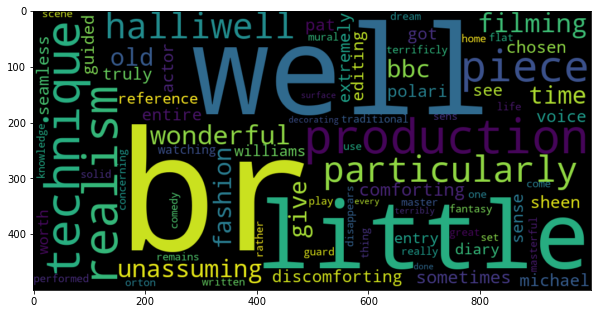

In [79]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
positive_text=corpus[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

# Word Cloud for Negative review words

<function matplotlib.pyplot.show(close=None, block=None)>

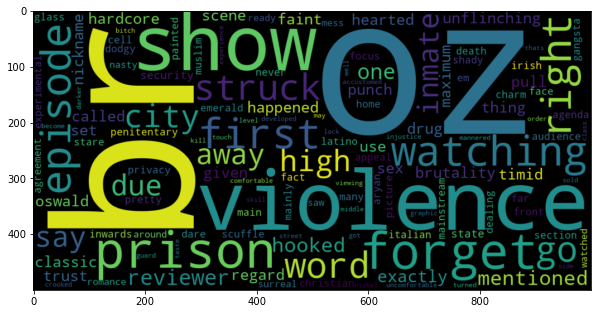

In [81]:
plt.figure(figsize=(10,10))
negative_text=corpus[0]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

# Conclusions:

**Accuracy:**

**Bag Of Words:**
 - Naive-Bayes - 83.872% ~ (84%)
 - Random Forest - 83.96% ~ (84%)
 
**Tf-idf**
 - Naive-Bayes - 84.48%
 - Random Forest - 84.14%
 
**Word2Vec**
 - Naive-Bayes - 77%
 - Random Forest - 83.23%